In [4]:
import numpy as np
from base64 import b64decode
from IPython import display

# Problem 1
Apply Fixed-Point Iteration to find the solution of the equation 

$$e^x+x=7$$

Use $\epsilon=10^{-8}$.

(Hint: make sure you use a function $g(x)$ that theoretically works; otherwise the algorithm may diverge; the initial guess can be obtained from a plot of the function.)

In [6]:
import math 
import matplotlib.pyplot as plt
def func(x):
    ans = (np.log(7))-x
    return ans
#print(func(1.94))
xp = np.array([0,1,2,3,4])
yp = np.array([func(0),func(1),func(2),func(3),func(4)])
plt.plot(xp,yp)
plt.show()
def fixedpt(g, pzero, eps, N):
    n = 1
    while n<N:
        print(n)
        pone = g(pzero)
        if np.abs(pone-pzero)<eps:
            print('p is ', pone, ' and the iteration number is ', n)
            return
        pzero = pone
        n += 1
    print('Did not converge. The last estimate is p = ', pzero)

fixedpt(lambda x: np.log(7)-x,1.946,1e-8,29)

hello


# Problem 2
(2.4-1) Use the Python codes for the secant and Newton's methods to find solutions
for the equation $\sin x-e^{-x}=0$ on $0\leq x\leq1$. Set tolerance
to $10^{-4}$, and take $p_{0}=0$ in Newton, and $p_{0}=0,p_{1}=1$
in secant method. Do a visual inspection of the estimates and comment
on the convergence rates of the methods.

In [139]:
#newton
#f' = cosx + e^-x
def newton(f, fprime, pin, eps, N):
    n = 1
    p = 0. # to ensure the value of p carries out of the while loop
    while n <= N:
        p = pin - f(pin)/fprime(pin)
        if np.isclose(f(p), 0) or np.abs(p-pin) < eps:
            print('p is ', p, ' and the iteration number is ', n)
            return
        pin = p
        n += 1
    y = f(p)
    print('Method did not converge. The last iteration gives ', 
          p, ' with function value ', y)
newton(lambda x: np.sin(x)-np.exp(-x), lambda x: np.cos(x) +np.exp(-x), 0, 1e-4, 20)

#secant
def secant(f, pzero, pone, eps, N):
    n = 1
    p = 0. # to ensre the value of p carries out of the while loop
    while n <= N:
        p = pone - f(pone)*(pone-pzero) / (f(pone)-f(pzero))
        if np.isclose(f(p), 0) or np.abs(p-pone)<eps:
            print('p is ', p, ' and the iteration number is ', n)
            return
        pzero = pone
        pone = p
        n += 1
    y = f(p)
    print('Method did not converge. The last iteration gives ', 
          p, ' with function value ', y)
secant(lambda x: np.sin(x)-np.exp(-x), 0, 1, 1e-4, 20)

p is  0.5885327439774188  and the iteration number is  4
p is  0.5885327423478889  and the iteration number is  5


# Problem 3
(2.4-2)

a. The function $y=\log x$ has a root at $x=1$. Run the Python code for Newton's method with $p_0=2, \epsilon=10^{-4},N=20$, and then try $p_0=3$. Does Newton's method find the root in each case? If Python gives an error message, explain what the error is.

b. One can combine the bisection method and Newton's method to develop a hybrid method that converges for a wider range of starting values $p_0$, and has better convergence rate than the bisection method.

  Write a Python code for a bisection-Newton hybrid method, as described below. (You can use the Python codes for the bisection and Newton's methods from the lecture notes.) Your code will input $f,f',a,b,\epsilon, N$ where $f,f'$ are the function and its derivative, $(a,b)$ is an interval that contains the root (i.e., $f(a)f(b)<0$), and $\epsilon, N$ are the tolerance and the maximum number of iterations. The code will use the same stopping criterion used in Newton's method.

  The method will start with computing the midpoint of $(a,b)$, call it $p_0$, and use Newton's method with initial guess $p_0$ to obtain $p_1$. It will then check whether $p_1\in (a,b)$. If $p_1\in (a,b)$, then the code will continue using Newton's method to compute the next iteration $p_2$.  If $p_1\notin (a,b)$, then we will not accept $p_1$ as the next iteration: instead the code will switch to the bisection method, determine which subinterval among $(a,p_0),(p_0,b)$ contains the root, updates the interval $(a,b)$ as the subinterval that contains the root, and sets $p_1$ to the midpoint of this interval. Once $p_1$ is obtained, the code will check if the stopping criterion is satisfied.  If it is satisfied, the code will return $p_1$ and the iteration number, and terminate. If it is not satisfied, the code will use Newton's method, with $p_1$ as the initial guess, to compute $p_2$. Then it will check whether $p_2\in (a,b)$, and continue in this way. If the code does not terminate after $N$ iterations, output an error message similar to Newton's method.

  Apply the hybrid method to:

 - a polynomial with a known root, and check if the method finds the correct root;
 - $y=\log x$ with $(a,b)=(0,6)$, for which Newton's method failed in part (a).

In [149]:
#a.
#f' = 1/x
def newton(f, fprime, pin, eps, N):
    n = 1
    p = 0. # to ensure the value of p carries out of the while loop
    while n <= N:
        p = pin - f(pin)/fprime(pin)
        if np.isclose(f(p), 0) or np.abs(p-pin) < eps:
            print('p is ', p, ' and the iteration number is ', n)
            return
        pin = p
        n += 1
    y = f(p)
    print('Method did not converge. The last iteration gives ', 
          p, ' with function value ', y)
newton(lambda x: np.log(x), lambda x: 1/x, 2, 1e-4, 20)
newton(lambda x: np.log(x), lambda x: 1/x, 3, 1e-4, 20)

p is  0.9999999999719384  and the iteration number is  5
Method did not converge. The last iteration gives  nan  with function value  nan


C:\Users\sreev\AppData\Local\Temp/ipykernel_18868/2626140027.py:17: RuntimeWarning: invalid value encountered in log
  newton(lambda x: np.log(x), lambda x: 1/x, 3, 1e-4, 20)


In [150]:
#Python finds the root for the first case only. The second case outputs an error that passes an invalid value to the f(x) that
#causes the method to not converge and break due to log error. 

In [185]:
#b.
#bisection
def bisection(f, a, b, eps, N):
    """
    Perform the bisection method
    input:
    f: function, the function f
    a, b: float, the left and right ends
    eps: float, the tolerance; once (b-a)<eps, stop
    N: int, the maximum number of steps to run the algorithm
    """
    n = 1
    p = 0. # to ensure the value of p carries out of the while loop
    while n <= N:
        p = a + (b-a)/2
        if np.isclose(f(p), 0) or np.abs(a-b)<eps:
            print('p is ', p, ' and the iteration number is ', n)
            return
        if f(a)*f(p) < 0:
            b = p
        else:
            a = p
        n += 1
    y = f(p)
    print('Method did not converge. The last iteration gives ', 
          p, ' with function value ', y)
#newton
def newton(f, fprime, pin, eps, N):
    n = 1
    p = 0. # to ensure the value of p carries out of the while loop
    while n <= N:
        p = pin - f(pin)/fprime(pin)
        if np.isclose(f(p), 0) or np.abs(p-pin) < eps:
            print('p is ', p, ' and the iteration number is ', n)
            return
        pin = p
        n += 1
    y = f(p)
    print('Method did not converge. The last iteration gives ', 
          p, ' with function value ', y)

In [186]:
################################################################################################################################

In [200]:

#hybrid function
def bi_new(f, fprime, a, b, eps, N):
    n = 1
    p = 0. # to ensure the value of p carries out of the while loop
    #p0 set to midpoint
    p = a + (b-a)/2
    #start while loop
    while n <= N:
        #newtons method to find p1 
        p1 = p - f(p)/fprime(p)
        #check p1 is within bounds
        if p1>=a and p1<=b:
            #true continue with newtons method setting p0 to p1 to find p2
            p = p1
        #false 
        else:
            #set new bounds
            if f(a)*f(p) < 0:
                b = p
            else:
                a = p
            #set p1 to the new interval
            p1 = a + (b-a)/2
        #check to return the iteration and value
        if np.isclose(f(p), 0) or np.abs(a-b)<eps:
            print('p is ', p, ' and the iteration number is ', n)
            return
        n += 1  
    y = f(p)
    print('Method did not converge. The last iteration gives ', 
          p, ' with function value ', y)
    
#checks
bi_new(lambda x: x**5+2*x**3-5*x-2, lambda x: 5*x**4+6*x**2-5,0, 4, 1e-4, 20)
bi_new(lambda x: np.log(x), lambda x: 1/x, 0, 1,1e-4, 20)
bi_new(lambda x: np.log(x), lambda x: 1/x, 0, 6,1e-4, 20)

p is  1.319641167209319  and the iteration number is  6
p is  0.9999999969981127  and the iteration number is  4
Method did not converge. The last iteration gives  3.0  with function value  1.0986122886681098


C:\Users\sreev\AppData\Local\Temp/ipykernel_18868/3163862504.py:36: RuntimeWarning: divide by zero encountered in log
  bi_new(lambda x: np.log(x), lambda x: 1/x, 0, 6,1e-4, 20)


# Problem 4 (MATH 5660 ONLY)
Given a polynomial $p(z)$, The Laguerre method is iterative and proceeds from one approxiamte zero $z$ to a new one by calculating:

$$A = -p'(z)/p(z)$$
$$B = A^2-p''(z)/p(z) $$
$$C = n^{-1}\left[A\pm\sqrt{(n-1)(nB-A^2)}\right]$$
$$z_{\text{new}} = z+1/C$$

Here $p$ is a polynomial of degree $n$. In the definition of $C$, the sign is chosen to make $|C|$ as large as possible.

The pseudo code for implementing Laguerre iteration is given below. 

In [2]:
# This is for showing the pseudo code only
base64_data = 'iVBORw0KGgoAAAANSUhEUgAAB3wAAAjcEAYAAAD4RkL3AAAMamlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnltSSWiBUKSE3gTpVUoILYKAVMFGSAIJJcaEoGIviwquXUSxoqsiiq6ugNgQC7ZFsffFgoqyirooisqbkICu+8r3zvfNnf+eOfOfcmfuvQOAVg9PKs1DtQHIlxTIEiJDWaPT0lmkdkAGTKALHAGdx5dL2fHxMQDKQP93eX8DIMr+qrOS65/j/1V0BUI5HwBkLMSZAjk/H+JGAPD1fKmsAACiUm81uUCqxLMh1pPBACFepcTZKrxTiTNV+Ei/TVICB+LLAJBpPJ4sGwDNe1DPKuRnQx7NzxC7SgRiCQBaQyEO4ot4AoiVsQ/Nz5+oxOUQ20N7KcQwHuCb+R1n9t/4Mwf5ebzsQazKq1/IYWK5NI839f8szf+W/DzFgA9b2GgiWVSCMn9Yw1u5E6OVmAZxpyQzNk5Za4h7xAJV3QFAqSJFVLLKHjXhyzmwfvCpA9RVwAuLhtgE4ghJXmyMWp+ZJY7gQgxXCzpFXMBNgtgQ4oVCeXii2mazbGKC2hdamyXjsNX6szxZv1+lrweK3GS2mv+tSMhV82OaRaKkVIipEFsXilNiIdaE2EWemxitthleJOLEDtjIFAnK+K0hThBKIkNV/FhhliwiQW1fki8fyBfbLBJzY9V4f4EoKUpVH+wUn9cfP8wFuyyUsJMHeITy0TEDuQiEYeGq3LHnQklyopqnR1oQmqCai1OlefFqe9xSmBep1FtC7CkvTFTPxVMK4OJU8eNZ0oL4JFWceFEOb0S8Kh58GYgBHBAGWEABWyaYCHKAuKWzrhPeqUYiAA/IQDYQAme1ZmBGav+IBF4TQRH4EyIhkA/OC+0fFYJCqP8yqFVdnUFW/2hh/4xc8BTifBAN8uC9on+WZNBbCngCNeJ/eOfBxofx5sGmHP/3+gHtNw0bamLUGsWAR5bWgCUxnBhGjCJGEB1wYzwID8Bj4DUENnfcF/cbyOObPeEpoZXwiHCd0Ea4PUE8V/ZDlCNBG+SPUNci8/ta4LaQ0wsPxQMhO2TGmbgxcMY9oR82Hgw9e0EtRx23siqsH7j/lsF3T0NtR3GloBQDSgjF/seZmo6aXoMsylp/Xx9VrJmD9eYMjvzon/Nd9QWwj/7REluIHcCasRPYOewIVgdY2HGsHruIHVXiwdX1pH91DXhL6I8nF/KI/+GPp/aprKTctdq1w/WzaqxAOKVAufE4E6VTZeJsUQGLDb8OQhZXwncZynJ3dXcDQPmtUb2+3jH7vyEI8/w33bwFAARW9fX1Hf6mi24H4MBruP3vf9PZ5cDXhAiAs6v5ClmhSocrLwT4ltCCO80ImAErYA/zcQfeIACEgHAwAsSBJJAGxsMqi+A6l4HJYDqYA4pBKVgGVoN1YBPYCnaCPWA/qANHwAlwBlwAl8F1cBeunnbwEnSB96AXQRASQkcYiBFijtggTog74osEIeFIDJKApCEZSDYiQRTIdGQeUoqsQNYhW5Aq5FfkEHICOYe0IreRh0gH8hb5hGIoDdVDTVFbdBjqi7LRaDQJHYdmo5PQInQ+ugQtRyvR3WgtegK9gF5H29CXaDcGMA2MiVlgzpgvxsHisHQsC5NhM7ESrAyrxGqwBvicr2JtWCf2ESfiDJyFO8MVHIUn43x8Ej4TX4yvw3fitfgp/Cr+EO/CvxLoBBOCE8GfwCWMJmQTJhOKCWWE7YSDhNNwL7UT3hOJRCbRjugD92IaMYc4jbiYuIG4l9hIbCU+JnaTSCQjkhMpkBRH4pEKSMWktaTdpOOkK6R2Ug9Zg2xOdidHkNPJEvJcchl5F/kY+Qr5GbmXok2xofhT4igCylTKUso2SgPlEqWd0kvVodpRA6lJ1BzqHGo5tYZ6mnqP+k5DQ8NSw09jlIZYY7ZGucY+jbMaDzU+0nRpjjQObSxNQVtC20FrpN2mvaPT6bb0EHo6vYC+hF5FP0l/QO/RZGi6aHI1BZqzNCs0azWvaL7SomjZaLG1xmsVaZVpHdC6pNWpTdG21eZo87RnaldoH9K+qd2tw9Bx04nTyddZrLNL55zOc12Srq1uuK5Ad77uVt2Tuo8ZGMOKwWHwGfMY2xinGe16RD07Pa5ejl6p3h69Fr0ufV19T/0U/Sn6FfpH9duYGNOWyWXmMZcy9zNvMD8ZmBqwDYQGiwxqDK4YfDAcYhhiKDQsMdxreN3wkxHLKNwo12i5UZ3RfWPc2NF4lPFk443Gp407h+gNCRjCH1IyZP+QOyaoiaNJgsk0k60mF026Tc1MI02lpmtNT5p2mjHNQsxyzFaZHTPrMGeYB5mLzVeZHzd/wdJnsVl5rHLWKVaXhYlFlIXCYotFi0WvpZ1lsuVcy72W962oVr5WWVarrJqsuqzNrUdaT7eutr5jQ7HxtRHZrLFptvlga2ebarvAts72uZ2hHdeuyK7a7p493T7YfpJ9pf01B6KDr0OuwwaHy46oo5ejyLHC8ZIT6uTtJHba4NQ6lDDUb6hkaOXQm840Z7ZzoXO180MXpkuMy1yXOpdXw6yHpQ9bPqx52FdXL9c8122ud9103Ua4zXVrcHvr7ujOd69wv+ZB94jwmOVR7/HG08lT6LnR85YXw2uk1wKvJq8v3j7eMu8a7w4fa58Mn/U+N331fON9F/ue9SP4hfrN8jvi99Hf27/Af7//6wDngNyAXQHPh9sNFw7fNvxxoGUgL3BLYFsQKygjaHNQW7BFMC+4MvhRiFWIIGR7yDO2AzuHvZv9KtQ1VBZ6MPQDx58zg9MYhoVFhpWEtYTrhieHrwt/EGEZkR1RHdEV6RU5LbIxihAVHbU86ibXlMvnVnG7RviMmDHiVDQtOjF6XfSjGMcYWUzDSHTkiJErR96LtYmVxNbFgThu3Mq4+/F28ZPiD48ijoofVTHqaYJbwvSE5kRG4oTEXYnvk0KTlibdTbZPViQ3pWiljE2pSvmQGpa6IrVt9LDRM0ZfSDNOE6fVp5PSU9K3p3ePCR+zekz7WK+xxWNvjLMbN2XcufHG4/PGH52gNYE34UAGISM1Y1fGZ14cr5LXncnNXJ/Zxefw1/BfCkIEqwQdwkDhCuGzrMCsFVnPswOzV2Z3iIJFZaJOMUe8TvwmJypnU86H3LjcHbl9eal5e/PJ+Rn5hyS6klzJqYlmE6dMbJU6SYulbZP8J62e1CWLlm2XI/Jx8voCPfhTf1Fhr/hJ8bAwqLCisGdyyuQDU3SmSKZcnOo4ddHUZ0URRb9Mw6fxpzVNt5g+Z/rDGewZW2YiMzNnNs2ymjV/VvvsyNk751Dn5M75fa7r3BVz/5qXOq9hvun82fMf/xT5U3WxZrGs+OaCgAWbFuILxQtbFnksWrvoa4mg5Hypa2lZ6efF/MXnf3b7ufznviVZS1qWei/duIy4TLLsxvLg5TtX6KwoWvF45ciVtatYq0pW/bV6wupzZZ5lm9ZQ1yjWtJXHlNevtV67bO3ndaJ11ytCK/auN1m/aP2HDYINVzaGbKzZZLqpdNOnzeLNt7ZEbqmttK0s20rcWrj16baUbc2/+P5Std14e+n2LzskO9p2Juw8VeVTVbXLZNfSarRaUd2xe+zuy3vC9tTXONds2cvcW7oP7FPse/Frxq839kfvbzrge6DmN5vf1h9kHCypRWqn1nbViera6tPqWw+NONTUENBw8LDL4R1HLI5UHNU/uvQY9dj8Y33Hi453N0obO09kn3jcNKHp7snRJ6+dGnWq5XT06bNnIs6cbGY3Hz8bePbIOf9zh877nq+74H2h9qLXxYO/e/1+sMW7pfaSz6X6y36XG1qHtx67EnzlxNWwq2euca9duB57vfVG8o1bN8febLsluPX8dt7tN3cK7/TenX2PcK/kvvb9sgcmDyr/cPhjb5t329GHYQ8vPkp8dPcx//HLJ/Inn9vnP6U/LXtm/qzqufvzIx0RHZdfjHnR/lL6srez+E+dP9e/sn/12+uQ1xe7Rne1v5G96Xu7+J3Rux1/ef7V1B3f/eB9/vveDyU9Rj07P/p+bP6U+ulZ7+TPpM/lXxy+NHyN/nqvL7+vT8qT8fp/BTDY0KwsAN7uAICeBgADntuoY1RnwX5BVOfXfgT+E1adF/vFG4Aa2Cl/4zmNAOyDzTYEcs8GQPkLnxQCUA+PwaYWeZaHu4qLBk9ChJ6+vnemAJAaAPgi6+vr3dDX92UbDPY2AI2TVGdQpRDhmWGzqxJdMT8AfhTV+fS7HH/sgTICT/Bj/y8qTJAuA99OGwAAAERlWElmTU0AKgAAAAgAAgESAAMAAAABAAEAAIdpAAQAAAABAAAAJgAAAAAAAqACAAQAAAABAAAHfKADAAQAAAABAAAI3AAAAAA5QFbQAAACBmlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8dGlmZjpPcmllbnRhdGlvbj4xPC90aWZmOk9yaWVudGF0aW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+MTkxNjwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj4yMjY4PC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+CqNiBBQAAEAASURBVHgB7N0NvF11fef738kTCQRIIkJAlIVSRasYRjviXGoWaueioxL6sl70UllUq7RSOXgdh7a0LNp6xdbR4MMMo4wsrA84dTRYW/FqZdGLBTvWBMdBbFFWADE8GBIIkOcz3+86+79XXgmHnBOyw3n4rM/rlb3PyT774X32WXvttdd/raGR3hRMCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMHCBWQO/BW4AAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE+gIM8O1TcAYBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgcELMMB38MbcAgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACfQEG+PYpOIMAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwOAFGOA7eGNuAQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBvgADfPsUnEEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYPACDPAdvDG3gAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAX4ABvn0KziCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMHgBBvgO3phbQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgL8AA3z4FZxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGLwAA3wHb8wtIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCDQF2CAb5+CMwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIDF6AAb6DN+YWEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDoCzDAt0/BGQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEBi/AAN/BG3MLCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgj0BRjg26fgDAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACgxdggO/gjbkFBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQT6Agzw7VNwBgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBwQswwHfwxtwCAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJ9AQb49ik4gwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDA4AUY4Dt4Y24BAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG+AAN8+xScQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBg8AIM8B28MbeAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEBfgAG+fQrOIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAweAEG+A7emFtAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKAvwADfPgVnEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAYvAADfAdvzC0ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIINAXYIBvn4IzCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggMXoABvoM35hYQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEOgLMMC3T8EZBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQGL8AA38EbcwsIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCPQFGODbp+AMAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKDF2CA7+CNuQUEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPoCDPDtU3AGAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHBCzDAd/DG3AICCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAn0BBvj2KTiDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMDgBRjgO3hjbgEBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgb4AA3z7FJxBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGDwAgzwHbwxt4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQF+AAb59Cs4ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDB4AQb4Dt6YW0AAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoC/AAN8+BWcQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBi8AAN8B2/MLSCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg0BdggG+fgjMIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCAxegAG+gzfmFhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ6AswwLdPwRkEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBAYvwADfwRtzCwgggAACCCCAAAIIIIAAAgjss8DO2kVszFzEg4WLeKhyEZsaFzGSu2BCAAEEEEAAAQQQmOQC/eW7cqOKWJ+5iJ9nLuKetogHahexIXMROysXTAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALTRGBopDdNk8fDw0AAAQQQQAABBBBAAAEEEEBgWgmkgb1V4TSgty3iqLaIRY2LOL10EQszF0wIIIAAAggggAACk1TAw3o9sPcvMxdx77kuYvUKp4G8K13E8zOn5b6rXMQ7Stct/wUTAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwJQW4Ai+U/rXx51HAAEEEEAAAQQQQAABBBCYbgL9I7rlG5WO3Fa5iJ8NOZ0e77ojvT1UOw0EaZtuGjweBBBAAAEEEEBgEgoU4WJ7W8TWwnXLZ/eHi/bfxzu9L3NarrvWRdy1wkU0wy7izszpiL4bnJYH17qIHZnTFTMhgAAC00Sg//43866tNB8tneZ7hRt7Pprms+ly6UjoG2rHEc+DCYEnEijDxY42/d1Vbs+/t1/ULuKxNi3vVC4isjadYUIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEENgfAnP2x5VwHQgggAACCCCAAAIIIIAAAgggsH8EHi5dxNWZ08CPS13E361wuo26LQ5Z6SLmFY4BvpJhQgABBBBAAAEEDojA9spFrKucBsY0LuK/XeoiHjrTjX1XHht2Ef+0wUU8vNlpue//cxFz7nYRSzMXsaBwGoiTu7Gvl/9BAAEEpprAw4WLqAqn+ekNLiId6XznmW7sRzUrcxELb3ERTzvDRZxbOh3xvG3sn+d/EJhRAmlgb7lDdQN7P3G109fXuk5kYbiI0wsXsSR3Ec8tndZHtekCTAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAk9KgCP4Pik+fhgBBBBAAAEEEEAAAQQQQACBCQo04UJHfXOxs3Qa2NG4iAczF3H3YqeBHqWL2NKmgR1nOQ38aFzE3MJFDFUumBBAAAEEEEAAAQSepMBI47T8lTsdua5wGrjbuG7g2fra6Yh3ldORdyunI/H2FvfGOr172EVsnu+0fHe6i5h/jIs4+EMu4qBhpwE0y5yW9xoXTAgggMDkFUgDCJsdKmJbm97v9nZktTGc5qO90/7735PvVpqPbnARa3P3OPPTlY3S++UNLuKetogNudN8unZ6n525YEIAgccT6B2Bd1vu9PfUuD3/3tYWLuLeykWkI/o+WrhuPdVIOCYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIF9FeAIvvsqx88hgAACCCCAAAIIIIAAAgggsC8CvQ2et4frBvb+TTgN6G1cxNcvdxpQssJFHJ85HTGlcBEverGLOLJxGviRuwgNGnZMCCCAAAIIIIAAAvsosLVwEbfkrltea9pJy2eZ04CXtU5HvNvoIr55sdPlV7ixb/yga1zESQ84HXlyldMRe5e57oi92WqnI1KOOA0Abhv7evkfBBBA4KkW2FE4DQRsnOaHtYv4TuMiHi1d9Kc00Pe6E512eLXUaaDuW50G6n7Z9S8eczIXcdR1LuLwtojnVE7vl2sXMbtyoUMDt+kMEwIIpL+HNAD+0drp7/M6F3HXS13ndMixTl+/ui2WHu80cL9yWj7JXMQLcqcdk7Tp8kwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAITEmCA74S4uDAC00SgN6AgbWiRjkiRBhhMeEBAHS7m5k5HkshcxKzCBQMMRMCEAAIIIIAAAgggMIMFesvLI4XrjiT0WDht8Jw7bUhZOw3wPdlp4MhlTkd0y1zE4mEX8fTcRSxqnDZozp2WvzMXTAgggAACCCCAAAJ7EUjrQ7eWLiJ9nQ69mwag3d84HRkyczqi5PFOy2nnuogHVjgdiXKV03Ld2U4D2F7jtAOWP3ZaX/p0192poYtcNxBtUbiIZ33F6Qi+ldOA38xpea9xGrDWuGBCAAEEnjqBPFxsb5ze3zZOp6XT92unAbqV6+afdzYuYtNGF/3p4dOcLveA03z0dS5i6185zZ/f5PR+9wVOp8tcxJztTgMKr3B6f7za6TRzulxb/2Y4gwACuwo07RJPfwD8zjOd/n7vdxrAe7bT3997nXZossHp61Uu4r7VTlfYG0C/uXH6u6ucPi9unP6/6d2OzjIhgAACCCAwYwTS50HViOrWN2ytnRSytvFz9Lbvmp25bnusOaWL/uuxzjENQiAfff+zLXfd73NnOE293/cgbrq9zmJ0h76zSqflrd7ngGnHRwO//YE9MK4YAQQQQAABBBBAAAEEEEAAAQR2F2CA7+4ifI3ADBBIA3vXVy5ic+Yi7q6dPrgtXYx7Sh/UPqtxOpJE7TQAoXRawVj0BvqO+xq5IAIIIIAAAggggAAC00cgDezd1DgNCGmLuDV33XL4Vdc6bdj8GqcBHktdxBErXcSK1U4DPc5wESe3aQBI5jSApHTBhAACCCCAAAIIILAXgTSw9weVi9iSOw1Qq50GmFUu4tpbnAaybHAR/3ih0/LcRU47YjnJ6eeOdFrP+ian9aPPdhEvesTp6/e76E+HXeYizhxxEUdmTkf0LZwunzkNYCtHN9hNG3AuyF0wIYAAAk+ZQBrYe1c4zfcKpyOZ505ft0Xc0ab5Z+MiPv1yp/e7Zzn9YG/a+VwX8ciVTjsyeI7T++GNTgN43+C0o4PM6f1v7iJOXOE0/zzDRby5cN3nUgsLFwwwFAETAn2B3gCVoXBa3mhcxIs3OP39NC7ixxudlo+2uoibFrmIhYuclntWuYijT3YRC2qnI/rWTkfUzp0G+rYFEwIIIIAAAjNKwMN6PbD30cx1y8v/UjvtyEa7GfOOxsY7zamcdvxaO71+16PbYx1dOq03aBvvtXG5iQqkgb3p/U16//NQ7rRcVLmJXuv4Lz87nHYQVzj9/tsintk4fv/jl+SSCCCAAAIIIIAAAggggAACCEx+AQb4Tv7fEfcQgScv0NtjYDoSRToC2MOZ0x7TCxdxZ5s+sG0b/80elDttYFE47eG5chGHtWkPkrXTaVtEu3/DXKdMCCCAAAIIIIAAAghMR4Fm9AglI+E08KNy2pAjG92xzqbc6Yi9pdNpb8Po9S90GjBymNPA3mVOG0y2acPlwun7jYs4pHAa2Fu5YEIAAQQQmKkCvdeddASt/hEkqvY7Y6tko0cMGcqdLpY2+M+GVET7vz5lQmAqCKS/g97zOG1Qm053P6LJlsZF/Cx3Wj9aOW2YmTl9nbmIdVc7Hal3ndPAtJOclutOdVrfucTp9L1OOzo8xmlA2nlOG1xe5LTclrnoT4fWTjtuud5p+S533RF95zVOF+8dqUfnmBBAAIEDI9BbfkhH5k3LF+nGtzYu4heF6+af94TT+9nMaUdWx7uI+9c4DQD+sNMRz89zml8ucfqBs9p0ZnSa9y2n+eLvOs0/a6f3w8ucBvgOu4hj73C6XJuO3Fu7iEPbdF3pdWH0avkXAQQskLXFUOU0IKRxWl4Zct0Reu+6wunrNzr9nd/m9PP/ui3uq52Wf/LR9xHrLnC6fG9AU9ZODPCVGBMCCCCAwHQQ6G1vtTN3ekBpfVs63W25s/95kHaD4x3h9D8Pau5S3Q5gdU3jmubWTq+79eh2VwtLpwG/hdMOckqn/++9vqf1e8H0xAK932v6fab1Qenr9MPbwul9TeW0Y6LS6eva6fO/Nl1gQNPc0nW3k94fHdM4BvgOiJ2rRQABBBBAAAEEEEAAAQQQQOApEWCA71PCzo0icGAF0sDexwqnI1C0RfxD5rojhlU3OG2ottmN/z4u/qKLeOdRThtWZC5iee20R+fGdXsS7A/0Hf9NcEkEEEAAAQQQQAABBKaMQBrYm/bEvscRe5u7VcRlF7qIex9wEQ9e5SKO+iMX8TvvdBHHtekIKJXTgJHaaUPJygUTAggggMBMFWjaoSsRRVvsKF3EQ6XThl+1GxtnVuH0ulI6bRBYOX3dpg0DMxdMCEwNgd7A3q2100Dd0nVHzElH5k0PJg1E+8BpTgN9FzjtuPC7Tj9/g9PP3+309TFOA1e2O63nPNbpiHU7nf5+fuq0fPYWF/GM813ExUc57bDlEpduXQPbGtetN00b5M5tXHc5ziGAAAIHWiAN7N3YuD2XJzYULuK/b3Saf17rIm4snTZ4f6nT/PQEp5//sNPnUh93ml+e5bSD2D9w+voNLvrTknA6Iu9RLuKYM1zESyun+W7hNL+9xOnn2zQ/betfDWcQQODxBIrR9w3p7+bplYv4/etdxM9rF/EHtdPnx/NdxO3rXMS2j7qI737NacD9jU5/96uc1l+tchHPW+26z4Uf767wPQQQQAABBKaKQBrY+0jutHzbW/+WDqyQdnCRHk864utPKhdxT+Ei/uTHTjsQy1y69N5PF97gIl5bOa1vWO4i3lI67eimcVoezpzW5zUumMYSqMPFSO30++ztoDcdIGP39anrcxfxudOc3v8Mu4hbhpx2ALfUjXVjT/77hyxzEa9a6rRjlspFPLtyWo/buGBCAAEEEEAAAQQQQAABBBBAAIFpIMAA32nwS+QhILA3gZ2V08DdzGngQO70wWzldHqL0xEpRpz2oP4ZF+Oetixzup6bnX6saou0ojOt4E5Hnpidu3FfPRdEAAEEEEAAAQQQQGBKCYwUrjvy28OF0/Jy7boj9t77iNORj9Y4PcRfa4tZ33I6gtvbXMTT2rQhc+W0R+7K6fJMCCCAAAIzW6C3QVra0HBr7vQ6U7uIdIS9sZDSEbvS60zaIOxpmesGzIz183wfgckkkNZ/Ppo5Pf8zp4EqldOAlMJFf/p5OK0P/bjTDleWOg1IW+T0H731m+kHZr3facPZ/+W0AeVlTjtmOd1poNlmp9MbnQb0XuN0hN6POF0uc+nadJq1RbtZab3L9zmLAAIIPMUC28Pp/WvmIrZkTt/o7VhkQ+W0YfvxTgMWekfuXfcHTkcke5PT5dO0LFzMOttpPvnnThumv9BFzFvm0oUjFudOA3svcDotneajhdOAwdwFEwII7ItAWv4ow/UHyKcjYacdRj/rUqcbWNEW913hNJB32GnA/necdoByqdPnz6uclpOGnb7fOP18uj2dZUIAAQQQQGCqCuxoXMR9meuWjzc3Tq97bd2jSwN876yclpdrp/UPc5w+D1rnusvv7dymwmn5u3G6dG8HZ+vucFqPUTl9fpQ5jugqoSee0vrU2ruC0/qjenRHcf31qbFVddP6xsn/Uqf1TJc5/T4/5vR8+D3XXX5/n1s4x2k7vlVO75fa9Lx7sdvft8b1IYAAAggggAACCCCAAAIIIIDAUymgVQBMCCAw3QUezl3EFwoXcefxLmLVSqcVgd93+kD2h27iGg/d6SL+6ylOKxTPdVqxeYuLeNZXXMTZmYs4vG3it8NPIIAAAggggAACCCAwFQQerVzE9bnT8nfpIj55rdMe2k9w2vHOBU6P6EttOsOEAAIIIIDA+AXSEUIeLZwG4uQu4h2/77QB4Xlu7Os77HgX8RtDLuLYc5y+btOR9drG/nn+B4HJJLA5dxH/2LhuYNpH3+wi1p/munu8/b0u4v5T3C4De4fD7TEtaKeI5ac4DUxb5CLe/pjTgJYHnY6UUzttUPsRF/H0zO1xdXwDAQQQmLQC9+Uu4rxLnXYc8jOnu/ubbdE/wtVJDyvNP7c6Hbnq627PhzX0b5wG5v660/yzcHp/fJzTAN6vuO7n0hHND8+dBiBWTjtWyFx3Oc4hgMD+F1hSuIje+N+4r3ERH77OaX5ws9MRu69yOvLdnW7/3w+uEQEEEEAAgckk8GC4iA/e4PR6uNZF/MvRTgNET3PdPR45xWlHY6c7LS8/0+nzoDtcd7nxnnt0vYv4Rul0pN7zndZ7vNdpe6wVLuLi2kWkHXeM9/pn2uXSjhI3hZNj4bQ+9Xin9amN61R2DDttV3ed0+/zL5x+73/iustxDgEEEEAAAQQQQAABBBBAAAEEEHiyAgzwfbKC/DwCU0DA+x3cWWuF45DTiuPG6fSPnQb2ftXt+wPZ+XmnPTS3aU+BX3b6eo3TBm6Z22WPzft+U/wkAggggAACCCCAAAKTXiAdwfeRzGl5+1ynASSZ0wCT250GgHzEaQDIL5wGgPyp0wbO33LagLlNGzQXTpcvXUTUbTrDhAACCCAwnQTS+puHS6cNxgqnATPN6BFB0oDe9JjTBmmPhNMGaW3a0PBupyOSHuR0JPh7nV5HTnA6wvztTkeYWOP0c8ucNtBf7PTzmdMO2irXDaxJA2zSEX9nZ043zITAARDYWTitb8xd9/exLXM6olzv7+Cuxu3595COuBJpOj9cf5r1F047LrzZafnsSqcjTV7ptAHt3U4D0zKn08OdTtu0/rNNV9c7kk7/tH8LnJnJAml+/WDhdnn+xjalafcjHPaW9+cWrpsPL8mdjoTaOP0cEwLjEEjLD5vDdc+/hwunz2306ZE/P0pTOnLVXeuclgt689Vo2iJOaEsXj6HlTkcM+yOn+efRTvPNNzl9fYXT/zdO883GdfPPYzLXv7qIqm2Xb3AWAQQOlMDs9pi+Wj9VOL3+lE47Ahp2ml9scBFLXuE0sOXVTgOYlrqIR2unI9otd929PqJ2ur7cdd/nHAIIIIAAAlNJYKR2usdpebX3vm3kRrfLIzklnPZw09YtP+/jkRBGft116z123Oy0I9lVTsvdK13EjsLtcj84+/gCvd9bOvLy1sJpYO+Q0/uf0u3yo7vvCO7mcGNPF4eL2fe7bv3Skm84fV9rUyeyPvWQB5zW717mtL72DMd6gbF/AfwPAggggAACCCCAAAIIIIAAAlNXYM7UvevccwQQQAABBBBAAAEEEEAAAQSmnsDQs52277jPRRz9MRex8itOGzrXTtt93OQi5pVu4h/8Tz0Z7jECCCAwswXSwN6rMxfx8wtdxE2Fi3hsreuMRo532oBvgdOA3S86beD3VtcN7P2zC5xedxoX8VenuohfnOUivnmE0wDfH7qIv/6u044mLnTagH/Y6fVqrYt4/3Eu4si27v5wDoFBCqSBvR9d7Lq/j1u/6/T3scpFPPR8p7+H3Onr7W7v92zxAhdx0XKn53vuIrIPOP39ZE4DgEun5bPGaUPatmBC4AkF0sDevzjT6fl7rYv4SeY0MGqt665i7mtcxHGbnZ6Plzo9P2vHEZk6Kc6NRyAN7E3LEz+vXcTVFzrtGPZq113TlnOddhTyNafv520asdfWXbB3bsGZLuKV/8p18883rXbaAP0xpw3Qr3Javhhxeh6Xbo+r4xsIIDCJBA7LXMTbVjvtsK5y2jHdLU6vZ7nTEQUvcnpdu9hFDL/X6YiCa13En5/jIo5qm0QPkLuCAAIIIIDAOAQWNy7ifZnTDi6ucloP8U6nHWA8x3VXtO1dLuKOzOn18lNORwD+baf1cW3d5Tk3vQTSwN4jfs9puelaF/Gnb3PakUrjxv+YZ///TjuWe7HT+6nKRRxaufFfD5dEAAEEEEAAAQQQQAABBBBAAIHJL8AA38n/O+IeIoAAAggggAACk0JgJHfaQ3Dt9IFl5rThdOY0IKB02hNt7TQQrXH6gKlw2pAvd8GEAAIITDuB/vyxfERpIEnmdFo5HSnxBtcd6SRubYt0JMW5r3A6Isr1TgN8S6cP6mun+WntIqJs0xkmBBBAAIHpILCzcnq9aOs28Lv7cqcNADc6DbBZ5rTcXbmIg69wOiLvUqfl8CucBvre5jSw90ingTO3OW1Y/x+cBijmThuWnex0ZNIVLuLBNl3/Sqcjz1/h9PrVOC3/917f0pFS1x3ntHzfjB5BMh25NC3/D4XTlPcGBPk8EwK7C6QjpvTeV6YjnG6onJabdLxeH7E3TQ80TkfmHXIRP6tcxNoVTke6vtlpQ9uFTn8PZzv9nbzGaUDuc13EYW9wev6+3aVr1waWtdNyWO8IvcfkLiKrXbdcNq9yWj7rHdEuPe+jagsmBB5PYEfjIu4vnebvvQGWaz/kNP/d7rqfnLfdaf3KbU7Pt3z0iIc7znG6XNbW/QDnZrTAzsbpdTt3mv9lTgPHK6cjalZOz7vS7TL/vG6t0nLAdhf9Kc2Pt9/lNL/8V07zzx84fX270/NzhdOODt7itHxROJ1e4DRAPXPaEL10uvrefDIdsSqtP4yiTRdgQgCBySYwu3La4U/p9Pffpq+/4vQ+YYPT/OYip6+/7bS89hmnR3NWW6w7x3XrtxYVTtdXO502vSPT8/5BaEwIIIAAApNNIB3h/sjGaXm79/5uR+W0Xq6tu9dbM6f3eW26fJteB09w3eX29dzIy5zWfyxzWh9yntN6xeVO6/tqp+Xwyul1tnL7emv83IQF/mO4mHOd0/qk25w+/1vttEOktvFf66zSab1W1VsfFX5Gduul0vus8V8jl0QAAQQQQAABBBBAAAEEEEAAgckqMGey3jHuFwIIIIAAAggggMDkEkgDe7+ROR0ZrC1izVoXsf0Wpw35znUaUDDiIt5aOh2xI3eT6zFxbxBAAIH9IZAGPv1t5rThdOEivjbkNL9c4bRh9X92usX1bTF0jdMH8f/WdRtcLC6cNrzIXUR/g+eCDZ+lwYQAAghMG4E0sPfTjdOAm40u4tvXOG2ot8ZpA7DK6XVilYt41RdcxCGZE8f/2RZRtsXOu5wGAr/MRby4Ta83hYs4e7XT69IlTgPOCqcjj5Qu4vbaacPAVS7ib4ddxH3rXMSfLXIaCLnR6Qhdh7vuiJLzw2lgZZvOMCHwOAJph1GbKqflpcJFfOJMp8WlRa77wceudRHfn+80kO17Ts/TZ7hug9mRY5ye769xGoDyKqfnZ+0i3v4/nP6e3uW6619wjotot5PV+9iFldP72Mxpuaw38CQ9r4cqp+d54YIJgScUSAMmHz7Z6YiphdPz/DqnDb/Pc91VzHuP0+X+m9OOINY4DXwfcd3lOIeABdLA3s8Xrltfd+eZrhvge0/mNACvcBqAd4LT8+9EpyvqTSOfcnq+fc5pfvkDp7ela5zmp3c5HYnzr13EgjYN6M2dlk/atPySO22IXrvoD0xP88/++139FxMCCExOgaHS6e+6dFr/36b3GYXTDoQap+/XTgOMznV6X/Npp9ex+1zE+y91ev+w0kW86wKn+UnltNxVOC1vtQUTAggggAACk0ogvT4dGk5T73Oakcrp66bN/9NOWwqn5ejMRWwoXLdeob3Qk/hn++ucbvYGp/UiN7qID29wer2tXMTvFU7rRdqexA3yoxMSSOuJZm92GnB9qotY3DjtmLFxE7jK3vOL9VETMOOiCCCAAAIIIIAAAggggAACCExRgTlT9H5ztxFAAAEEEEAAAQQOsEA6wtiDhdNAgDYdMek0pw15Vjlt4Jy5bo/FO5a7YEIAAQSmrcDO0unIR7354y+udtqw4jKnDThOd9qA4+VOGzjPdjoC0t85DRxpR0bpg/7lTperR49gMm3BeGAIIIDATBPobYjVP8JeuUn19/cQ6Yi9PzvX6XWjcVqeXua04fwaF3Fo5iKeUTl9XbjopjJcfzoonDbAz123IeHTG9cdSWRB4boBQJsKpwGSa51+fr7TAOA5Thvsz3e6f7XT691XnI5MUThtOJg5fZ07XU8+euTJ9t6VwTRDBNIRbLaG00CxZvQIk1sLp/ePldMRo2unAWmZ0/vLVU7Pq8JFf9paOQ10PMvp+bvI6Xn2ZafTWU7LU191Ov2404aTn3UaQLLO6YjWX3B7buB6UOa6gb3zS6frLZ3e57ZFN1XtMVK6rzmHwBMJ9J4vO493GpB+mdPpSqfT2113BTs2OH3/PKe/nzVO/7+6LZifdlbT8lwdLkYKp+dBM3oE6EfC6fu505ne9GDt9Pp8g9MOOTIX0ZzsNOCucFruWOb09bDT9R7qNH97h9MAvtzp68UuIs5viyXHOg3Y/YiLSEcuO7pwWk6pnI6Enjl93Zt/zs2dlgMyF93E/LOz4BwCk10gDxdDtev+nheUTgP8r3Kafyxy2kHRi1x3RN/H/thF3HWK04PN2mLLiNN8qE3fT/OF3d7P6H+YEEAAAQQQeOoFeq+HaaBv++qY73K3eq9v6TtzMqf1cOXokVfTzw2tcOlS+3468nOn5foVTrfzJRdxz8edXq9rp9fZM5xup2nb9xuc6j/ZG5Cd1kNtz5zWL9VOp5XT++7L3X54sIvCRZzVFkO3ue73Mrtwse9TxfqofcfjJxFAAAEEEEAAAQQQQAABBBCY3ALaJIsJAQQQQAABBBBAAIG9C6Q99N99rdOG15mL+N4znTbg+ROnDbSXOX0g1jh9/xy39+vnEggggMBUFdhWO22wOOS0vcQqp9MHnAZErXDaQ3fmNKB3nYs4vXLaUPoq1w0omaoO3G8EEEAAgd0E0gZ0vQ3JHs5dxDWV00Cc01zEt9q0o4gjnHak88tOG8z/vtMAxZVOrxfDLuIlbXpdadvtNnf5Mg1ITEfOS0eQeHbmNECobZeBl/VW1Q0gXp85Lc9vcBHrChfxjQ0u4qenuoi/fK/Tzx3uIl5TOL3e1U5H+CucNmRrC6YZIpAG9t5aO70/LFzELY3T8lHlNLB8yGlg+7Uu4sZfcbr8wS7608gcpwEjj7mIgz7tIl70n5yeb4WLOHG+08D0TU5HzDnD6fQDLuLUxmmAfO76Vx/piJLzCqeBLJnTaTl65LpgQgABBA6QQBrYu6lxmh/mLuKvG6f1bpmL/rTpTKfX51Oc5qfXOL1u3+M031zp9Hr/Xqf52qFO7z+f57Tjqe1O708/7/T9xvWvPg5d7iJ+rXTdkcjSkcDmhOte59P8c07juuvhHAIITH2BuY3T8lab3qdULuLf1k7znV93ETe06YjhJ7uINWc47dDlRqfvL3eaP/XWp6X3JcGEAAIIIIAAAnsV2Pksp/cFtzqtX/mc0/qWbS5i45ecdoxWub1e3bS/QBrYe2/h9H6pLeLrlYu4e62L2HS+E8dw27R34QEigAACCCCAAAIIIIAAAggggMDkE2CA7+T7nXCPENjvAkON05ErSqcjht3idHq20/ff6fRB6rFON//itvHfj5+Ei3kvdNrA7u+dvs6drv9wpw1H6tE9PEfRNv7r55IIIIAAAk+JwEjjtEG/jpO0tdIHhIXTBtgbnU4XOX2/dnodOd/pA8NlTj8332ngwCUumBBAAIFpI9CfP5ZblfaU3jjNFwvXzRe3nuV0hLqznZaPH3AacHKZ00Col7luINWc2kWwvCwDJgQQQGA6CfQG+m5vnDYcG3LaMcQKpw3vCqcN3T/ktP7k9U5HDj3FaaDvdqfXjzucvs6dTjMX45/qcDG3bc8fSwNx0kDJ9ngQlV6n2nT53uOY0056fWsnHSFkg9Nyf+/9QxoYPJS7biByGhCQjoiarn/Pe8J3poJA+n1vCafff+W658FjpeuOxLu+chF3nuv0fC+dlqOuddowdYPTBpWnO33/i07rGS9wOiLNW5y+vsbp7+G7TkeMHHZ6ng27iOOud/r/S5wGruWuG9B7SOke5+8nHXGn9zwPJgT2o0Aa8Dh/mdPzr3fk9IMvchoY+Vuuu8GDXuF0uYtcd4TUoUtcdznOTVGB3ucjablgZ+X0utrWHbH34cZpA/Tcaf455LTcsMZ1j/3RxU47CtngND+9zHUD59IR1NNA3Dkvd5o//q7T/PMspyOcX++6+Wa6hUNqp4G9jdP8NHOaz9ZO8+fKBRMCCMwAgVmN03ygTfOZxunI3ic7zceWOc0X1jstF77EabmuTevLrnFaDqxc93nD9tLpfVDh9POFC9aPiYAJAQQQQACBPQRWhYudbXr9/Xunz+ff6HSa1tNcMKL2+Onp/430fqvYrrS9QpveR7VFrG+cdry42EX8vE3vw051+8DTGxA8+y+d1uee6vR+/uNO7+dXOi3nZC6YEEAAAQQQQAABBBBAAAEEEEAAgTEFGOA7Jg3/gcD0EZhTuYjja6cN4Va7iOetcNrQ7lVOR175O6cPZNvG//jTwN4TXuYijljpIk74ios4pk0rMnv3Y/zXzCURQAABBJ5KgTSw93/mLuLeNg1EWOn09bDTB15fc0/lPeW2EUAAgQMr4GG9Htj7g8ppflg5Ddi61EXcd4XT/PFupw32f+i0nNw4bTi92UWc8SMXcXTtIg5pXDAhgAACCExTgU2Vi7j2+S6i+QOnDdsbp/UmVzqtvymdjoi12UX80vWuW78yN3MRkbfpzP6Z0sDbo0ungZNt2oC/cnp9q51e98512gCucRF/v8Fpg7XGacDPmU6vbxc43c3MacBQ4/T93vWngUbBNCUF0gaja3KnHZ1UTgM4MqeBG7WL+M5ipyNT3+Iirv+40//Pdxr48R6nDVM/5HQ9t7puYO9LFzo9r17g9HeyxOkIk6WLeNUdTs/Xq1zEyzOny5dOG1Bqt4fe8WEakJK+zwDzYDqAAvMyF/HLH3F6vp7r9P5ghesGYqa7NHe+0w4WGqeBU3c47TCoLV2K06kqkAb23lU5LQdUo0c0v7t2mo/WThugl07zz8JFXHOp0wbpG1z0p50fdfq5Yaf3n7WLeOYapw3LNzu9/p7k9Hr9LBdx1CrXPQ/PKp0G/Nauf/X9+eeC0nXz01mZ6y7HOQQQmP4CacfOv1Q7LbdlTst1Z7iItY3TEfFe67TDgfe4zmVL7SL+6T84zd/aIn4ld93y3eLS7TLQt7sKziGAAAIIIIAAAk8o4GG92wvtkDB3EQ9lLrTPQ6fvD7mI/366046SNjktz7zP6QJfa9OZ8U1pYO+Sf++0HnXYRbykcnpfVjut52ob33VyKQQQQAABBBBAAAEEEEAAAQQQmJkCDPCdmb93HvUME5hdOO1hvXbaY6M+PvUHqE9vnDZ0K0b3iPyz85w2rLvRxbing0512hDkRKfr7R05Y8kFLuLwzOmDWDb4GLcpF0QAAQSeEoEiXGyvXPd6cW/jIta17XKEsVWPKG2I/Tane3x5m84wIYAAAtNMIM0fe0cU2Vy6br64LnPaUGCD0waOpZPBl9pi1hucNsj/vtMG1Tc7DXSqnDZgrJ0uz4QAAgggMLUFmnDRLlUXWr+SOy1f1647YkTasOzhtzpdvjfNGXYRS05xWs/S24Haksxp/UrltH6lGtCR8qp2yGOkgbfpyFmHl047riiddlSxzHUb3K9e5/T43u60odwyp8d/udOO5Wqnrxun9Ua508/nrjtNbsF0YAR6WzaOlE6/n8J1R4DZ2wDYNMD3nsbpyLuZ0waRudNpOXqE3nsvdxqQtsrp+x92Wl76vAs9Adr6C1azlzgtL33PaYDjGtcdKW5e7bRjlLaIpW0aEN+m9Z+508+XLropCxd7e1zdD3AOgf0nMDtzGqhbOA3AvMTp726R0+tEW3d7c5Y5Xf4cp+d37jTAvXG6nF9tfMo0OQXKcLGjcd38tf2uvr+ldN2ReR/OnQbGVU4DdXOn95dteh3d6LTheVu3Xm7225w+3/kvLiL+vC1mn+K0PHGs0/vNNU6v320a8LvI6fX4AqfLHec0sLdxWt7Ina4vTfn+3aFIulpOEUBgCgr0Xn/SDifSEcjTDusODqfFu2+4PR/f9vOcdhS01nU7JHhB4fQ6l7vufcOe18B3EEAAAQQQmMICx4aLuLIt5lzs9PURbbFju9Pr4HlO3+8dGbb/Af0UfugH8q7vzJzWU+VO77vatPxxstPqp1VO/3+x0w6X/g8n979xE7+nQ29wep91rNP7r5VOO2osndZbfcRpueccN/Hr5ycQQAABBBBAAAEEEEAAAQQQQGDmCMyZOQ+VR4rAzBVYULiIV+ZOe0wunI5kcYmL+FnttIHdtU4biFzpYtzToitcxBvf6bThXekifjVz2uCuclqhWbmItCGLzjEhgAACCEwigTSwd13l9AFX4bT985DT68VSF3HrbU4bHL7MaUP+TzqOJDOJfpXcFQQQ2M8C23sDe9ORCtN88tMnO80fl7mIH1/pNF88xUXMfbfTcvetTttpXOG0gf6w0waPd7j9fGe5OgQQQACBp06gaIeoxrbCdQN778+dNiSrnb5/vtPdvK5NZ0ang7e7iF9b7SKOK13E6ZXrdgyxoHGjPzPIf9MRTw8L163feU/mIu48x0V870SnI9l/xkV8eaHTAKHNTo93o4s4tnS6nsx1O4RLO6RLA4p1U0wHQCAN7E0DcdMRJTcWbpeBvmPcl/sKF/HJy52e36c5Hel52Glg26FOy0ObnAagXew0kOx2p+WhK90YV65vH7XURZx/vdORJzOnDSWXOw0AKV03kHd2OB0RJXc6w4TAJBJYmLuI36ic/r4Kp/lj43YZABqj09Adrhv4NLtx7BioxzPpT9LA3vty1y0P7Aingbu56xYD7rncRfzNGqfPbz7nuvnwzrOdfm6J0/OiN7B36d84zQ9Pd3p/+Tqn5YXCRbz+DKf55/VOnw9lTs+j3hHQ03wz7Wfh0HBMCCCAwOAEHvqq649riqUrnHZo8RGnHRFUTsuJhdP8rrd8N7h7xDUjgAACCCBwAATSDseuCRdzjnBaTj/W6fY/1Bb3P+D0/uGHTqcrnf7/rLYDcEenx02kA178U+4i7sqcjtj7Zqf3Vcuc3he90Wk7tk0u4t5/57Q+671u/BZzX+QiTjjVaXlmlYv47TOclnNyp/dptdP1sgOl8eNySQQQQAABBBBAAAEEEEAAAQRmmAADfGfYL5yHOzMFhkqngQWl0wZ1HqdVaUO5xkVEb4XycVc7rdBc4/T9cU6Hn+i0B8I2XW/huiNrzM+crqxsG+e1cjEEEEAAgQMtkI4Yk3b88LPMaaDvtS7i/g1OR1pa4CK2/cjtci/nh2NCAAEEpp1Amj/enTsN6G2c5o8fdJo/nug0f3y90wb6H3M6gtxDTh/ct2k5eYPTkZKWOzZUnHZPFB4QAgjMeIF0xN5tldMRIGqnDclKpwGwmdMGej92scc06xqnDcye5rReJXPd6cGN2+PHBveNYnTAchr4k06XNE47isucXs+a0YFnIzudjoDxUqeBSSc6Dfy8yGl9VOP0unmO644IfGjjugO5BtMBEUgDDNMRTTY3Ts/Twun9Xu7GvisP5E7LQ7/jtCHke13EAx9z+rk/aoul7aSBuN9yWn+4ynUD0sa6hSNvdlp+yp02iGycBojnTs+X2kU3sYFkZ8G5SSeQ5p+H5U53b29H4N39+VyyXn3S/VKf4A71dxCV/VxpB3m9+evWzGkAb+U0v73Baf65yGkHCbc7vb4e68a+gYN+y2l+mjttkH6i03xxjdP7z8ZpR6xXOc1HK6f5aOX0OVHtggkBBBA44AI7P+10JL1PO+0w9DrXHbl8a+60Xq12B/zucYMIIIAAAggMRqC3PdbQDU47QjvCaUd47aT1Zdc4rU+70el18Van9WYvcXpdbBvMXZuO1zrSOK2XLZ1OT3MRW9pJrh9yEc/c4LT+8jYX8Ys1Tv/f2zHTeG2GbnfdjtDnr3ARiy9x+pywTde2+/v88d4Al0MAAQQQQAABBBBAAAEEEEAAgRkjMGfGPFIeKAII9AXS+KuXV65bQZkf57QC8xzXv/hez8xa7rThSOa0YWfhOGJGMCGAAAJTTOAXmYv49ye7iLUfdNoAf4XTQIRbnDb0/rjTg3tV2xR7lNxdBBBAYOICD9Qu4v+5wWn++FkXsf4Up/nj651OFzoNzLrBRfzqWU4bChQu4rwXOx2JpHb6YL90EVG16QwTAggggMBUFth9hxB3NS7ifd9w2kHEy50GQP6Vm8qPdHz3fdOVLmLV253WG13ktMHckNMRLQoX8a7K6ciubeO7bi715AUeK1zEjW0aaFY6HVHtQqeBF+e7sW9nxxFOy0PPc1q/+DGn06c7DUz/Rxfx6j9zWh6qXMSbb3I6gnPjxr7+2ZnrlpvS+sb+wF42jBwbj/9BAIGnVGB9uIg/PdlpRx/DTuvXjnZar7bGaQdRb3d6H3m709e3ur3f9acd6yL+3x85zV9f7DRw9zinHShc7/S+tE2f11ROA4Ebt/fr5xIIIIAAAggggAACCCCw/wTSARjmLHY6cu+wi/jIg07L77WLGD7daf3MeU6nr3N6v/DXbv/dn5l2TXPPcRHPPdl174suXO40oLpwEb/1ExdxT9tMU+LxIoAAAggggAACCCCAAAIIIIDAZBCYMxnuBPcBAQQOrMBQ4bTisk233TsiS9rgI3p7kJzwvdrbkQcmfIX8AAIIIIDAfhXoze+3504fCGZOG9jXTgPWaqcPDL/odKSthU4bHp7nIuLUNgb2ioIJAQRmlsCOyukIdZc6zR8Lpz2nl04Wb2vTmdFp6MtOG1gvcRrgssZpgErpNIApc7osA3tHwfgXAQQQmCYCI4XT8nObNhBr0+tG5XSEvhPdNHmw43gYI8c4HamwTTuUe8BFPPhnTgM82/T9xukK93V91Djuy0y8SDriyPrKde//0pF5NxVOA88yp/eBQ04D0S9zGuB7oxuH3KpwMeujTss573Y6UskKpyPSlE4D0O5w3deHVW4c1997H9u/ZB6OCQEEEDhgAumIWWn+mdanPVg77dggc93d+XnuNF9d53S6wmkHH3/odPlPuO7yQ2922mHqcqcN/F/ntEOoNU7z18+67vLPWOEG4zX+AABAAElEQVQ0Pz3H6Ui9heuOcD5UO11+9/lndxWcQwABBPaLwFA4zb8Kp/lQ6TRw6RqnIxJe57SDg3bS/O+PXHfTO17t9PlE47RjgtxpObRxWn5t0/czp+trXDAhgAACCCAwqQTS50SPVU477smc1gMWTq+DpdP6r886Le8vchFLGxcxv3LaEd6ZLiLWtMXGlzmtXxx2Or3X6XOpLzhdjqkV2Fm6iI2503JE5bT+sXARD53mdOTkZU6f2y1zEUc2Tq6l046RTnDBhAACCCCAAAIIIIAAAggggAACCDxlAnOeslvmhhFAAAEEEEAAAQQOqEAa2HtP6bThduYifn+x0waHG51O3+Q0MOFUp7t4VtsBva/cGAIIIIAAAggggAACCCCAwL4LpIG95aWue/93xwedNmA8z2kAdu70/m+d04aPz3a63Wvaxn0HFr3bRZy/yGlA7+FOR/Bd7XQE58JpgEbtxn21XBABBBB4ygXSwN4fZa6bn37gu04Dd9e57m5uL50ud5Lr1q/tON91l0vn0sDel3zLacDuBhfx7r902lHUJS5dWgMC7nCazxZOG6q3aeCbdus6pK+ZEEAAgQMlMK9wES/MXMQv5a7bscudH3BaPvx9px3ntXX3bsNVLuLDVzvN757vIs5uXDefe33jtAO9tu7nOYcAAggggMBkEEgDe79dO33O3hbxydOc3i/ULmL9CU4DTNu6e/60wkVcVjkNDL7DRXx0yOl9ReUibipcxGNtwdQTSAN7/0vltCO7jS7i61tcxNabXcRzCqf1U2tc74c5QQABBBBAAAEEEEAAAQQQQAABBCaRAAN8J9Evg7uCAAIIIIAAAgjsT4GRxumDq9JpA+7CaUOa3OkDQQ3v9QDftZc7HVnsbqc947/DRcQ9bTrDhAACCCCAAAIIIIAAAgggMJkF+kfsrdcrvb9rXMSdudMGpstcRPOA0/vELzkdSW2W0xFg7nE6oswaFxEntEX8c1vMOcrpyLxfcTqyySany/Wmp1VOR5T8gtNp4XRE39x1R5acVbhgQgABBCaNwM5wEY8UTvPFxkVsyZzWp7V1G9b316ctXqt0RK5XOF1Bb0pH8Np6mNPA2/lOR64/wWn+OcdpYG7ttIH/11zEMaucBviucRFZ4TTgLXO9K9fJUO4i5jVOX2cuIqo2nWFCAAEEDoxAOoLv/NppBwSF644svq1y+v6lbs/7tOP5TgOfMqf5bzZ6RPQNNzjNNyun5dTM6eebNp1hQgABBBBAYPII7Cyc3k/UTjtOa5w+jx92Gtj7Paf7+9M2Haq3Td8YndLr51G1i5jVOA1EPc3p5xun5f5HnX5mZZvOMFkgHcF3/cku4hcrnN7HtZOWI252Wq440UUsWuX0vix3uoK8zVc1rmnoE07v4y512pHdSU7ry5Y53c6w0+8xc+O6Si6EAAIIIIAAAggggAACCCCAAAIItAL6CJkJAQQQQAABBBBAYDoKpIG9P6ic9vhbuYirL3f6YPE6p+9/2WkD77OdPug6zEmEAb7T8WnBY0IAAQQQQAABBBBAAIFpKOBhvR7YWx7vdMSSc13E989z2tD0fNcNYNt5q9P7v2c5gTzaFjHc1n8/OO8hF3HkH7qIiz/lIo6oXAd50PNcxAsypw0dc6fTzGnDycJFRNGmM0wIIIDA5BBIA3u/nLuI+woXccuQ6+abG652ml2+xmlg72udBgKf53Z5LLeHi5HnOm2Y/w8u4s3vc5qfVi7ixE85zScbp4G8N7lu/pl2nHBQuF2mLFwMNU7f733dP93lopxFAAEEBirQW66bVTkt79VOOyAoRo/sOy+c5le3u8e5J2eFi23XOJ3WTgN9a6cBO1c5zU8r9zg/z7cQQAABBBCYDALV6I520o6C0g4rtr3f6fP3bzvt4OePne5w09bd8zpczMudTjOnAaK102mbXk9f64JpN4GRwmkH5muddizSuIiXrXERh853Ef/XBU7rsw53+n7h9H6vdDHuKQ3sfeWfu4ij2yLe+GIX8fSrnAb+Nm7cV8sFEUAAAQQQQAABBBBAAAEEEEAAgWCAL08CBGaAQPrgc3Pt9MFo5fRBae70wWjbvkMMlS5iQeb0AW4+uqfDueE0NbutoPb3JjClFbKPZk4f6FZO979xuqIJ7lFRPzGhKe2Bem7htAK9GD3SyILKaUV64XSVXu1e6/7VTnvmzFx3f3WJAzINVU4bAtWuu79zc6e70LufOndgpjJc7Chc5/NI5fR124G5K76VtKfMhbnT17nTaTO6J9S0J/At4brfX/p6pHb6j/00pQ2x0u8n3Z8FjdPzqxz9+9pPN8fVTHOB9PzcUrruA6n7c6cBvZXTdtoXOW2wWDp94PWbTq8HvSM27evA3pE/dLq+pzt9YHmdi9hQOc2XSqcPzCqnv7vcBRMCCCAw5QWGLnRaHv6i0wf373E6Ul3pNP+7yul1vXZT/uHyABBAAAEEkkDWDqWJrZXTkSEa160PeLhxel/5Gy79EKcIDEZgezgdYXLYaYDvZU4D0c5yen/2Nafn45FO7/++7/QDy9r2uFNDL3R637bdaUPUzzgdmfdwF7G0rfuxuaXTQLa2XTZI7a1vadcO6f+ZEEAAgadaIK3/3VS6iAdzp/VlhdOO8M50Ec0VTvPR65xO1zjNT9c4re/e4jSfPMlpfdcRTl+/23WPctHFTke0vMRFHHWOiziucN3nKgtrF3FQ4bRheuZ2+fwhdpt6yyG7fZcvEUAAgQMvUIzuwCUdYTx9rpU+X40T2iLubuvuX/r61HAxssrp9HVOpw+67uKcQwABBBBAYFILeKuYUq9fxeiA05FPOH2ddqzWjLHdVFqu7/3/UOb0PmDY6bQt9MFTm87M7CltX5R21PRw7vQ+rE3vp9r0+VzldETdZU7rsUqnI+1WrtuuLSY4zTrM6XoLp+urnQb2tkUsaVy345NBb882wbvPxRFAAAEEEEAAAQQQQAABBBBAYBILzJnE9427hgAC+0kgDez9h3DaYKUt4rbKaYOU09y+31jaw/zyzGkFZuYintM4bQDYtu/Xnwb2frN2uv+104aKbd2eGPf9Fp74J+ed4yKe2xaxqC3i1MJ1A2nTwLqNlYu4KnMa2LbWPfFt7M//TQNJXt247v4+q3ZP/vcx0fuaBvaur1w30G9V7iIevsFN9Fr3/fKHZS7iTaWTT+H0eUjh9PfQFrEmd3q+VS5ideW0wfZaF/ttSnswT9s3LMpcxCva9Pxq2283xxVNc4E0sPd/5E4DeHMX8bULnb4+00X8r487bZj4m047TLjYCeebbfustONup9t5vdPf0+ku4r8uchHPbFxE0U764Ktx+3xz/CACCCAwaQTSwN5TP++0wXbmIk47zukITctdt+F2uxlHM2nuPncEAQQQQGAfBdLA3n8pXMQDlYu4dqPTQKEznXa8c6XbxxvhxxAYp8C2ykX887CLaF7qdGTJrzttUPopp9OfunFcaW/g79CxThtI3uy0fuwCF5HWM6VrShuczm6cNkBtRo8smXaoFmmD1fQDnCKAAAJPkUAa2Luqcnq9zl3EdRud1gdvcBF3HOu03uxbTjtI+E9Od/ptbTH7PzodeXeVi/i/S6f1Xe2ky/Wmg5e7iF+tnP6/dtphQu66I0ylDdLTwLg5tQutSBsdOKdzTAgggAACCCCAAAIIIIDAjBZIA3u/nDttf5Q7bfdTOQ20Xe0inp+77v3ZcxunHdLVTutr22LC06wfOr0PvNlp4PA5Tu/vKqf7UTu9z6ucrj5v0xkmBBBAAAEEEEAAAQQQQAABBBBA4IkF5jzxf/O/CCAwFQXSQNMttYvYVDgNuCqcNjhti1i70WlDv7Z9f6QLr3YR92dOGwq2RRxTuu7reZnT7TRj7JlS//V4087c6XE0LmJj43Qkyhuc7n/htKFN4WK/ryA9aKPrjjiZbu+hxmnDnsLptHTdANY7N7qI9cNO9+sATYfe4PT7uMPJv3TdQJO0QdDc2ulODfqIvr0V1tsypwGFtdMA7VucvG5wuh8HaFp0vNPvpXDdBqfpebslc/p7aZwulzv9vZzpIh67wcV+m9Lz6+Dc6flcue6IT+n5lW4wbeB1cOF0/6vRIzbHvm4om/4eq3D95/Nj4brnT7r9QZ8OZa7bs2p6vLMrFxPeoC3tIffRyu3yeNLj1lUOckobOM/LnfYcW7ld9ghbhtvnaaRx3Xw8fRB1f+10xJHG6XSV0/z/NqeB6qud5pvfdLr5JzmwV9fQTiPHOQ3svc3p7/1Epx3z104X6YFsDCeHwsWYUzrS5ZzCdX79HUc0E3s9GfOGput/9P6u044W0utBet1Pz5+xHn7/77E6SOnXV43Ob2bXTj/lZ2+p0/019eZjWwvXzY+2Z043Ujy5DVr7f4/hXSt0jyc9v9q5YKX/YJqZAnW7RBRpuTP9vWzOnD7ob5xeR1Y4EX28TXuaaYtZ73Pa0c0yF3HEsNMH/Me5bocis3IXTHsT6M2/djaumx+k5aS9zb92v/r+60k5R+n1pHS77PiG15NgQgCBfRNIrxdpw7KHMqf1Fde6bj3Mjjlu325jWv3UeeFiezvp/cgqp/fZq51OKxcxv3FaXsvdtBIY6INJr3dzj3d6X73CaYPCpU6vpyud3q+9ymm55nedfh+nOt21c9q6+7g5XLT7C/wHXf58p8vnTr+/3nqe9ANpeTu9b0jvf/sbMvbWD6XLc4rApBbovT/dFk5/P+Xoet/tpdPfQ+7GfgRpfdaCcN36jP772n1djzf2TfI/ExDYUTutL8tcxM+PdxrYe5bT+uqvOa0/e6PTfG+T0w28tS2GXum0XutDTqcvdXo/eIjT+8Da6fUsd9qBo9biej3u4sJ1B95K/z87nKbd55NF+4zx/zAhMHkE0vq7ZqvS/LAYPUJd2tFIfz43xj1O88f0d5G+3uP5P8bPT/TbI5XT33Nbt34hfb9dG1RP9Fq7yw8VTjt0q1y3vjHt6GSfP7fpbmJqnes9P9JyYfpc55BTnI6kt9Npuf9Cp+fPu5xOD3NT66FybxFAAAEEZq5A2q4kbZ+0uXBa3iidPrff6PT69jl3AJxuD9ffTmvHsNPnWte7biBrf3ml9BKYllvadP96r98H4J5O7CZ6n9ul9a9pe4+NhYv4We50QIFbnAbyZq57//W0zEUcVrhuwG1a35i2W0qnI991sddp6CLXXd/sB50+byqdvl+62PP9nb7FhMBeBXrrBbblrnv/ktbH7m191F6v/0leIL1/67+f620/MmnnI0/y8fLjCCCAAAIIIIAAAggggMCBFmDTsgMtzu0hcAAE0sDef6qcNlTJnY7geIvTwM+TnY5QutRpRfNJbt/v2MK3Om0geLKLOHqj04qmzEUsqV3ECY3THhHbJnB7vRW3O8N1AyD/+ULXbXjTXOe0geFJbgLXv5eLHnS2i/hJ4TRgY7HT/bjA6QPpxmmFeekiflE5HbFnsdPXJ7k4YNOhb3W6ubVtcXTuIna0aUOitojjc7fLwIYB3cP0PHiodno+Vk5HRDjTacPnk9yAbvxxrnbxSqc9d444bXCVO63w13FED2/0e61HB8bfdK7TgMjaaXvWZU4bHnzbPc4V7+O3DnqWi/iXy113f9IGMQsz1135IYWLeGXj9Pzrfd0fmDbRD2B6A2h2VE4f8FQuom4nDdBsXBywaX64iJNrp8dXOz1va6cN5tIGb7rMeKb0Qc/1met2FNDf0GjAA3oOKlzECzOnx1M5Dbgv3MQfT+w2pYGa6YjT91VO8/u1Tn9vQy7iu99y+v3+hdP8+k/cble2H77ceavTjhja9IHaCS7iG591mn9+yGn+c5zT871yY9/w3MJFHNe47vl+QuUGP/8a+55Njf9JA3sfzJ1+/83oAMXVudPrf+PGfizzaxdxUu3k36bfY+6e/PN391tOA3t/nLlufnR34bRBbeN2/6nxf31Q5iJekLnu73Fp5fSBa9v4r49LTi+BNLD3kdx1fy/fzV3EnYXT93/bablvqZNB2RZpRza/vNppvnWJ099P7rSjmMZpvlW5YNqLQBrYm3bskwbOfa9ymn8VoxvM7OVq+v+dXk+y0unvP3MRz2kcryd9KM4ggMCEBdKGNfdUrv82PG58jdP7yRud5ltDbsJXP+1+YPv5TgOpSqf1RstcxHdqp/VJvfUX/7pyGijRNu0YBvaAFhSuW19w/7CTc+W0vuN0F/Gj25yWa85xOnLl1U7L223d3Rv5tNP6pM84vZ/+oYv4u8zpfUHjussP+v1vd0ucQ2DwAmlg708yp7+X0kU0hdP659rFmNPB4bQ9bzt176f767V67yPGvAL+Y6ACaX3ITZc6vX5f4SJ++gqn+eUbneaLb3S6K9e1jXmf0gbesx92GsBbuYh/0zh9Xbpux0+zM6f1Kr3TYEJgCgl4WK8H9t5eO80fe+tR0nqTbY0b+wEdkruI03Kn+WNv/X9/gEkebr9NaWDvTYXT/e2tH320cFq/0xsAvK83eHDlIk6tnP7es9HPc+Y2bpeBM/t6A1Ps59LA5nmN0+duhYt41fFOO/49xUXceKzT7+OTTp9XvMNNsQfL3UUAAQQQmLECaWDvbaXT9kCli/iftzit96qcXt/OcoNnGjnR6fa+5/Q5/Uqn9TerXcQza6fllTYtf5VO222VbhIur9TtLlgiHdjikcxFXJ87DezNXMRXFzstzy1yEW+5xHXrF59fum5HLJtq1x0g4zuZ0/JJ5bQd0O+42Ov7P12CCYGBCaSBvXeE0/Jyb/utn9ZO66OK3oFPBnYPnviK0/Zp+217tSe+Of4XAQQQQAABBBBAAAEEEJhxAnNm3CPmASMwAwR2lE5HHi2dVigXTl+vdTo9z+kIoTc5bbBytdt3mB0rXbfH+1jTFusvcd2GKmmArj6cd+Oe0hE/0gf9CwvX7flw6DanFVvPc3o8X3Xjvvq9XnDLa5wcP+i0YeRmp4EelzrtAbIa/QA/bTD54LlOe/pf4zTAbYXb683stwvsfI/TwNnC6Wp7Az4fOM7p696AzmeE0wr7cnQPnQM7gmFvAGU60loa8Ls1nDZ0/lOnFZFznL7xy206M5hp6G+dVvy/1ul5c67TnjuXOz1/rnXyy5wGkA87/b282un+ftXtv/u25VVOG35f47Th7DqnDcuWOX3AcpXrbu/wcN2GhCOZ0++xcd3lxn0ufUAS3tdsd71poOhD4fT9yukDkmz09iIdQWI/D5BNAwh/qXTd/CPtCVd3ZULTjsbpyFm50wdapdPjyUaPKJ0eT//6ex4TupEnuPCCzEU8o3bdhtVLMqcf7PmlPdnHBDfw3JE57bhBx+u9X9d/b+30eNc6Pa9WOT3Pv+L0/P4Vp9sd1PTZcJHm9zvnOc0HVzrNt9c5zT/PdPp+5ca+Mwc17n+zdy9wdtT1/f8/mywhQCAbLhKQy4CosaIE//419EebodVCFZtEqaJFGSxFatGEipT+amWwqGhTkyjVaGkZvGCwKEGphBbNpLUltAihRYsWy0RAIpdcICQht/29X98znzNhk0M2YTfZbL7zfDxyNrvnzJnzOTPf+d6/Tcco73DuK620V/K1vXSrzxePh5/PPlDRB8Q+nULpmKZZeKpsBiquydE5dr6y+DE5dP2XUIfUoGnw9ZUw2+lCp13W9/++159fB75i25MJmpXMHzY01227A2zf66W+33lHbI+HH44PEBlvUHqbt/JLPoNzVwKlO0W9Ynjf/VvchnUE/PysO6L6SvYPZdBK5IugDt6LoUj4iVT3FO3qhlbKS1oDyX3CCta/3rdQR4m0tZK7Xhk3IlBfXz4BjV+vfv/wiUdW52jSL+9osSaBBuaW0P62kx/xAUcH5VB6UjeAr0uh9C1rrTikPe3cVueLPP3wfNmIDNpl/fed23l8VYzAdiLg53+djvn11B54tL3zr74eR1ZoyhUjDNq29/rtHN5w/7OnH97xxsu5a8ZAHcNuxHCPQv8/X+9fQOWTuVD6XkDl7wJa4TKB8mlla2XFeP71P7Y8s7uCyp8FVJ8QlpJsymdre6DyYg49/0KoPPmn0P1wBBT/w6Ad3hdY779D989lUL7oAahD5LHQ8+qtXf6tXizaT9Iqr45Noft2AaUzWWulO79fduewdn2VfopbjMCuj0AWUhzzFXqfzaB69BJKrwJ1/M2hjtPBFuXHstUB2evPfIIf74js1+foAroO0tYK5YM1oM3i9rwR8Pu3T9Sx4X7oe5kJ3Y/CpnTySih9fDOUrr0K2vWXA+v9BVROnA21B1wB1WNNhvZXQOdJoPQ4hV6fBublIv0mbF6eiPc/j0h83C0RqM9PLzd7+cLblbwc7e2Pq0qoPSOB0scc1nE7KIHyg3VHdU8fR5XQdVNCjwnMrK7v00+trU5vvT7fj29jAj0la6Xn9bNtbQUNtKmg9DyD8ukpdF2W2GKl9fr9fEJfXyFrYwbbav9903svV41M0eRvPf/Tvv61q2G51fH3+hCvJzs6gT5xPTHxvldB7W3LoN9fGJjNDtr1tj6BpX+/G0sofc6g1xWBfohbjMA2IlCfjxsL6O/19b05h/5fpyf6qV+bp0/dJZr0qm+606+d9edJfvxVa+JTT488/fP0xMvRXr4aWUJvkAf9eaf4nBiBGIEdjIC3X6xMoX5EdbvmkyvR9C/pnQHlB/aF2okehupH7oPSkQp68zp92sHDaJ4+z2CbPw/1B1gGlV+XQU+rO5g8m8NsdAL93u+juzu9qAzm/Yn80fOV3h70UALVS90M5euWQPmC+6HHoGmP83zIPikUlwRNPvQXCZRP7ILKdZfC4gBfhSBugxgBL2+V9cRx9fXv9RS+IMXyAjrPvX9H8XPReRwM4vFtZ9ft8lz5jOi6q1r10e0Jjup0rWN5bjv7j3+OEYgRiBGIEYgRiBGIEYgRiBGIEYgR2Nsj0L23ByB+/hiB4RiBZwuY/XApVHE7B1qBtoAqgM6BKij/Cy88Amtvgtn374YG/qyDBkyOg9kxGcxekUAVxkH/33f/BGZnpFDHqhR6rKD24MXQCqhvx8BXaK1/F8zuD9Qh549g9p8PQBXyM2Bm7w5s09VQnL8N/X4Xb2uWQytm5lB9/YXQ9z0RZkeW0MDkClphOYNWFC3QVHzbAG3eUc0HuIypoBWdx0EzZi6Dzs8joA6jwQC9+TZ2s/p8mH39u9D3mdYdLR4ZIWo4mAp1LCihhpCrofNqEbaxwxf4q/Vfhs7f90Dn0x/B7EcTof8fhuZNjj4HZm+qoO83h/5eN/TuaAOQz1DfHgiYPC2a0XUV1EAyBxoQeB3UQWcidD7dBsXrVOj9B2h70Q3QzKoVNKNsDq24nKCpIO7v23kHnoVXQJ+ngD7PbOh7vR3NY1jYeYt49/d9Oj2v553QwOJPQh2t64H13gHloALNdegd/jrtr+/vfYDmrSdD6eFxMFt8M9RA9WfQ9/ZW9H31Lvj/VQbzAVzL3w+zL42Crr/D0Pk4DloEs7fOge4ns6D7SQbdT+oVZjvvYXj/xQc++Mro6xOoo33eGhC3NofZTxNo4EQKs7AwzVI1MB8G67iNuwHq8PZ66P5RwezXEqjDatVKz33Aunfc6rRDH9j7vxl0XqZQOlJA900N72CAx7eXQgMPLobutxWU7vwSSg+ehc6fpbD2tmEVdD85FNr/YWj/2cZ2QTM4n4Zm4MOoDMq36Grkejwkg/YfNK+PPw3vCHiHwScNzUD4uXOgiUEugs7TL0FPmBHowgqGd3AG4dP5feHxCrpe6/TrqQRNPuzBCprAooLZX98GTRBxNcyO/yXUIWYprOO23zhoP8dB990CenoZ2P4ZOr58u3/wjnO+X++YPC6H8nNZPdB3u3uKT4gR2IkI1B1C1pdoriemJ3go2375yu93hxVQB6gSui/WA+LbA30tbjECLzwCfcu/D/0MSvcXwyw5D2a/nkP5zeCFv+/esoeDUpidn0HlsBXQp6/vd0/lMLthX2jl3hwqD8+Hyq0fgCaK+hz0+rOhdGQe1GH1/VB57mHo/vZaaP/11nMxlF86CZoPJYfZSRlU/5O1Vhj2lU19Zbcjcgx8fVR9WPEhRqBfEfCBvT4AbHkCs1unQfnI2TC7Yw50v50H5StnQPWH06ByxHnQ7+dB9Rivh9lRGcyOy6CJgarWhGZeT+71pxa3XRIB7/jt38uIs6FyxQQoXfw+NGD3figdnAilj4HSx4Og86BecfLx90Pp42yonn0edB6shf6foymH+EpZ4xIo/5W2JoQaVyLWR+ySkyC+SccI+MDeqoDO87r+zifKe7qE2S1XQNUiXdCKah+H6qMPQ8fd2+EnQvm+Ak36mOTQ9ZC3VpLb16CBLwmsvfnANl+Z1+sTHqmg+sOg/fT2dVuMg67jO6H9Xgddb/tBE6NU0O/PhtmaI6DPvx808OM6aP+Hodn/YTNh9qLJaOr/X56iaQ/1iYJ9godmD8PrJ/++9iug+139PV5QQO0zKXQ/HQ3FcyaU7i5rDUTa9CWo/Xc21I55GlQvdy1UbsgweO2ZFrdhFQEf2OsTSq0voOs7a63g3Z54o5+f2icaPM6g9CqBykUF9Atvp9WPA7F5u61PeOjpnQ948+utJ4XyMWVrIsRDU8T8xEB8B3EfMQKdIrAuh1akT6D2+Yth9k8/QDPx9eYvwezAl0H5n7NgduwZ0HV7OTq9S/9/3/tvUHvuB6H76kqofHImlN+6C2anBKp/yVoTZfgAWK8f7v87DuwzfUDvsxWU/6rT66UJmvzDX58G5ecmwWzcSqgeO23Vh409HYp3CqXPFVR+S1oT0D1SQOX2eqDk390M5Wd/AX1vX4XFLUZgUCPgE7P6eejnu08o9HQOs388GU3/jgXdUD+QwzCoh/i8Oz/8PKh9NkVTnjumRFO/4eUAz688707jH2MEYgRiBGIEYgRiBGIEYgRiBGIEYgRiBNoRUNEvbjECMQLDLQLeQLxfCjWAzocqUiZBFcXXQA3VN+CFf/reD0ENYh+CKoS/BTXkT4UqkjU/9tpKA3jK1sp/O9rA5TPi+sqeG3LocwXqIJhDn+d66PNcGZgVgXriBPrDTm71jJa+MoPvZe0J8P9t8Xi+weyyoDmOLZ7ynB+9J0K98nG7x8ECg2rogue85Pn+0/tWKP6BnvmawJYtgeKUQAOnboI6oBUwO7SEvr+yNfNw+3tKDDu/1R1Jfca+/Spo4GYJHc9EqOGjC9vvgL7zB9J65eZfQB1O34Rt7M17al1iUGACs98PzP4oaF7oz68HMra/v+YZz/9TPeKzfX59z2B+WvR98ZizoYaIQNdVBsWxhJ7t35c/9t1Bh/+3V5TIRoo6tFwBXWcpdD6thq7zidDxTYLe/0bYgG3dl0ENT3dAHTxyNJ9zR9/IVxY9YA6aDsVrVkKf573QZXY/dD2sx46+S+fnb/gu1HH6TdDzHgzMV4Dx789XRN3RBrTNGXT846DHHijdPR+K4w+h931z0PRE3Mn0pfMnrf/iPSR9ZUu/furfb/4GtkiWzzR03Da+Bk16tjaDvqe8nmG94yv3jj/4gESf8GKNQStwZdB5UMfLZzR+bBF0GkyDvoczsUWs/H5Z3z83fgPqQPVB6HlpYD5jrK+Q4RMNbG8Am69k9IihOb7NFdRwWkEd5hJoAMFE6HkToHRuPpQu5VC+poCZzQ9szQxoYMJ/Qtf3qdDf68+zYT10PQb6/b2BPTEWOq/q4xiXQh1gslZ6aHmgF8RtWEegPk82pVB+RLlN8psrboOulxkY1hHYNR+uvp68Q8WKArpe6/TLB/K2V1BOWjOyP3YFlC5cDd3fZkD39UOhx/no/BFGGdQxpJ6o5JlroY4hJZSe5K0OxJ5eWBV03mGfv+yTQOlU0JRTxiZQR5Kgz4vif2MEXmgE6nKW348937wugSb6yloDfNcV6PxmPqBkH4OupxIaWFlg8Dqqdj6i+JdhHYE+5V9f+dBXUntqKpQvC4Z1JAblw3l+vCfDFm+RtvLxfr0fadBW3+8OvR+63udC+Z/lUL3DldDzHghs03ugv18F/f7GgD2FbcN/QuWH5VB+ag40MVnYVM+QQhMDlmjuly/KsY0Bvl6vkYUaKmvXd4R3i//ECLzACHh+z8sB1SZReTmDytVVayKaR8+D/j8fyrcW0PVxF5SPvAv6/wKoPDoP+v8tUMfhr0D1Wjk0ICmBmdX3cZ8Q0fORXu7WM+I2iBHwCR99wsuuJVA6WE/kuS5sSpeWQfUSgdK//4K+349B32ug/z8B/b0b2s8ZUH7sJqj8krVWhPb7nQ/s9vYSz395/YqvANoOQUwP26GIPwx+BLxjudef+YppvuL10xlUf3cFmgm5nvg0lE7eDR2nT4jm7Sd1ejviTCh9XAg9r/79YSX0/z75Fm+30F/C5teNDwDxlXgfKqHrLWmtzBZq8/JmwuDHeqD6nVOhCf5OhOr/zobKP3W7i79uw2VQfiaBXnc8tP8x0KHU7UFdk6DP80koXaiggb4V9Lz6fuMruA/7lbrr78/va16/Os6gev4ESl8nYot2rXoF382PQffTGVD+MYPuzym0gzpfeFgG/b8+f/RT3GIE2tebnxde/+j5O08vfCJxb2ftb+j8ft2eyLesV/LNWKNb53P96Odpe79pSNna/+3vD75i9WMplL6maK4jX7nX64O83cQnZPX8Tn/fLz4vRiBGoP8R8HbqNedB1+Vs6PFbUPmhG8pfzIXqW5+ABsJdAuUTUuh+WLVWvuz/O3d45l0G670LKp98FiqfBLqf3gf1uyih56XQvvw+upPpVIej2eFf+/Gsr9C0Fz2cQfmsBMoPzIP6+cyE2Us+Ak20cj80sDdo6pu8n4j3x/D00vvlrDwFyndchR0+7PiCGIH+RaBP/ZOXtx7NoPQihfpf5a2JA1ZXUP3qEqhf30ro/F8PpTM/Rv/eeqee5TMmdSrPXTlC1L+vQFMv4hOMeP2tt8t6uWCnjiW+KEYgRiBGIEYgRiBGIEYgRiBGIEYgRmAvjICqlOIWIxAjMNwiMLaA2QUlVNETaGDvHKgC9GyYLbgEqsjtxh4UhbqC2WfE9Q6MI5dBDfIFVHGdQZ9rdrDrPmA9sHfkGVCD3kw8z9svNtjm+dDz6oGlm8+A/t+nw+Tz7Gmbf1rzPmhF1i9CDQlhU4eERdBKEl0w+9C5aAb6tgcavsCBTd05tCJrvSLLiyqYfeomqL11Csze9gw00CKw3bedYbAR66DDqFfoGzEV+v+koH18vZdA51ugX/vA4PYzBviHuuPIpldC71u1OiD6wP52A7I3yHgHsA6H4RWqPrDFV879RAV9HzdB45oXQR3TJkD9c94Mvf+B6LDzIfBrX0nvLzJoYF8Fs0tXQZ9nPNRfOWy6Do/BwB143xWjx/0Qqqg/Gbr+KmhF0RTq+Bz0//39+x45DUr/EqhB8BvQ4w8weOnLVkfqA3vnGdrpn6fTXTOw1as6/iJMRLpAn+un0HV5ObTfFHpZGXR8/XD/w+oSZt8YB53PE2H2L8ugBp5ToPv8zWjui2s+A50fx6OJUu9s6HwpoQG3Z8Lsy4FWmrkealhdBE3UUEArLCfQDMlBs7++Pz1ewuxj74TSlwnQgLsroPfNWgPWn/kqtMLFEzD71Qpq8M5gduFCaGbmQK87CdrftTA7+xQoHhmaz7P6Uui2ej50va1GM4/GMQXM3lNAAw/S1sz3I3OY2Qu8H2oPcYsR2HsjUF8/vuLPUynMvplC1+91UH51BnRdngGlX6dCDcRFa6Xvjf8IdYR5E8w+cTqaFXI6BXj1SVD5ZwqUH7gZZpf3QB1C9kOTTu5o+WHsyTB7d4lmIpupKZqOJZ2OL/4+RmCHIlDnf7xju0+g8VgO3f9SaL6pO6F8e1gKqfM79FwBs/cuhK6vwOxNBVR+LOJA387Ri3+JEdizIuDX87QM6sCYQveptVD6sQRmfzsXqjeai+Yzbq/+Y/WZMPv6LVA5bgy0cttboA6t74TmoTsOSm+mQulVimZ+NX/HrhzaT6Dfxvy4hyY+DkQE6nqzTQXU8TmH2XU3Q/XnGbTCYA6VK78Ks5OvgQbqXgKzd66AyslFa+Dv9PFQB8xjYXbFu6F60bCZ/cXLofM/gdmvVNB1UkL1HYFZGAaS6jFugxKBnhxmFxVo6le9vPK0wewfboXKKxOh82MdlD6W0BPqrW/6uOL/wOwvA6VjJ0L1Wr8L1Uf8BGa/Ow46H0ro/0GzApXvP6aHHon4uCsi4OnhJ06D8gd1e8BTfw2V098AdUA/CUofXw0NhJ0N1TfOg8rxZ0NHPDNot9ct/xOYffRTMDvyMqh8n0HXQw6zEwJNpBA0n9wHflQpdHz1wN4//20o/b0GOo5XQcf3AJTOfweq7/sYzN4+C831d8pC6DotWitxLjkduv4L6PiugCZ8OANKN+r2oOVvg8b7ngLdH66C2UdSNPUDJ2dQfWeO5n0sCyxurQisOQZaAXExlE89Ecq33gK1pxwHtWdm0EDtIEYvRqCOQN/8XbVCzL4yB7qex8Hsrpuhdroz0P/oHXkKzK59FEo/CmjgXNVaAdzTD18x0ico2Nn83aoSZlffDB1/Dg2omQPlH++E5vedBx3PdJhlYVN6F1jcYgRiBHZDBLpPgPIBa6DH82H28XOh/E8Jtbtm2A0HOMTe0idkYH3dR4qmfvtPb4MmlpkBlcO+DrPDfgKz6WOh/EEGs1ckUP2TlofYL1c+soQmaClgcYsR2D0R6JM/eSKHikmhI6HO9wVQOSZtTeix8QSovPUKqDzzXqg/xQKonFPWC3YM1qepO+x1LM+dvlzM/vw2qH12Esw+PQtK7ypoAH4JlXtKDNbBxv3GCMQIxAjECMQIxAjECMQIxAjECMQIDL8IdA+/jxQ/UYxAjIDPROgDX3zGwzFLoRkL6xV9R7wae168fEbag3Ko4vs4qCJ3PtRhZjE0M3ddseQN7YP2SccYLAwLPUMVamehGWjgKyF1ev/Nk6CBDJdBHSE+AjVY/zNUYXcjOr16+7/vfR800CtQx4PPQwMbDoUq1FZCDYMnQe+fwWx8Cn2eYPvv0/EZdYWl76c7g2bSzNDMwNndhY572WV/GLEZ6ki1Gvr8K9EMXPMOVZvGQx1aLoE6zn8V+n8weIe7cTT0faXQ+Z60BnQenkID+UuowSKFmVWBfuiwJYZ2B8LuBPp+guZ8GHUe9H4boedfjA77HEK/9vj4CgA+M+u+J0Pf7zro83wVA3/gfVeM7pqKZqXSZ8aimdlyRwes+ooeh06FGqgqqCHrKqiDwmLocRL0fV4CpY/vxwtPX7aK2FKDjVoOnY8ToPS5wo6nJwcmUEedlVAHyApKtxLYXr/5irNP3YxmJuZlp0Lp6yNQR48zoPhfAt2fToCu5+PRhHHjDCg9WwedL9+D7kc/hs7T/4RmjF0Mva5OP3yG1gNTNPvr+9MvSuj1c6EVPsZAHbXGQMf3MPR9z4QGFC2AOqYsQ9NB5cgK6qCStVYm25xA53O9Au+xE2AayRfYY09Bn2cFNJDv69DzL4Tuhz9A07FuWQml5xk00CCH4hVov3GLEYgR2OEI+IQkjxVQh9gEys9Mgx5XQdfjW6H71unQ/eR10OMiKB04G2bHroM6wiTQgIkU1nHzFcLHJVC+O4zwV7pWolnZ98l3QPnl29Bxd1v9Yd390P09gdLfFdji/p7FDrtbBS3+Yqcj4Oft2hK6XjS/+9pUHUFyaEBSDl1PR0P323mwjtuaS6HXB83THk+h+2cFTaxRQPfLDBa3GIEYgT0wAl0VmoknvP7wxTl035oFsySHOk4uQ3M/23AXlL7ch63rPzb/HMpvvxpbB2j0Aqg8cBT09yQwL0+sztC8zjusHZFA5csCSocCs3B3zfQYtxiBnYiAl/cezaFycKDzswu6f46HdlwPTBv9Vag8PRvKfxZQfnQKdD+uoHzqGVD5tq5fe+SfoXqn10L36Q9B+y0COzKDBoYEKgdn0PPr61XPjNsgRMAH4Bxs0FanR14vN6aCyh8aZnhUrr8vDOzYRdiiPqKeqGzDCVDH89vR1Bc/adhiO99gz/wjVA6aC6WzaWsFrSqD6r9SNPUQ3TlUX59B51dgcYsRGJQI+ACLJ+ZD6WGgfMFroLf8RGBjn4LqHZ+C6n+/DaVfZ0HliLqdaeN90H7eAZW3Z0P1Ahm0vzo99BV9N6XQeV61VrQbVUHPq7f1KTTArVUNbY+k0PV3IFQ/ej2UPt8FHd+F0ECPD0LtiQl0fRetgXmeDzqyQFM/6OUhX4H96MVQfmQ29H4b0VzvPtFy7wlQ+epvoHiUUDITNqXzJZQfS1v1qO18jcWNCPS+C017Zu83oO/1LCh9DJp64Bi1GIEtI+Dtf8sSbJG/m/2IKJ/XA5VnzocGzszElnvYzs/nGGzpK6H0LGtNNO4r5+6TQudphqb8ckCOLcox23kb/7NPiLpiFcyeXAwd9zlQPuENaNKtkSdB6U7emijJ01ffX3yMEYgR2IURmG+wfd4LTfARNvW/SKB8U45deDxD/K36rrD7bAINePwU1K/hFqg8vgzKx9UTxr34dDT9msakaPKRQ/xjx8MbrhEoQ81Ce+JiLxf9IofqAYrWBELtfEnVWqDg8b+E8sOvgfqnXQa1j14P9Vd4D3TfT2GDtvWeCZXnxkDlnTFQee7N2KI8N+Fx0fU2F+qnlKOpL/Zy1KAdaNxxjECMQIxAjECMQIxAjECMQIxAjECMwDCNQPcw/VzxY8UIxAgM4wiMSaAZ7SuoI/21MDvuJKijVGA26zaowncCBjEgfVZ8PTKH2dcuhyqYJ6Pz+6/OYXZLAVXoLYNmFN4IDawKOr9+R//y7J/C7D8+CbP/mgmznxXQwMASZp/LoQrxHLbXbAfcCLNpT0EzDPbA7KzLoQ5350IdUHLo+3obtOJDCjUYn4XBC9eyedAKcWdDHVU+As0Qn0LnW9JaAeS4DGo4CgbveOKed28EfCKHyyZDFeYJVIF+B9QRJoHZv66Aztel0PX9dih9DAbuM4x6Ncxeug90PvZAK9ScDjVcTkb/32/EsWg6unYXUEeoHP3fz976zFEXwOxVn4K+jzNh9meHQw1Bk9FE59EKZn84F839aHkKDYj7KMz+/gSoweYyaMb6DGpQWgTruPkKH499Bhoo9BlohtfvQMf3ezB7eQF1vEugxynQ+9UdWA/KoLfJAvOOub5S/NdKqMPOf8Psw5+APs9KKJ9wAnR9XAqz7wY6z+6C2f9eDd0PU+j4ciheGSxuMQIxAjsRgSdT6HpaCl2HN8Psnv2gAbF/DA2MuAPKv1wKs5c9C6UPV0D3k8uhARU5tDJODh1Q3WCun7a5eceOKSWUnpWtFdBfYtDx3ATlp26AOsz1YJu7ir+MEdjtEViXwuzfS6jjeAWNP7oC6mhxKsyeeBDbP9ynL4FWpJsJdURdBLMHr4PKQxnM3ldA9+9g+/uNz4gRiBEY+hHYv4LZG1OoPFnCbMoXoA5bOZqJpB6+HGbvWQR1jC9g/d6ePQ5mSx6E6qMymN05GuqgvgjN7o68GGZfGgvlBwJ1cMtbE/7FATFNrOJPOx6BxyuYfWAONFBjAlQevAvqgF1B9YM/gM6/KdCKvfdA98PpUP3ETVAHzLI1ccy8CspfLoTZuXdDA8EmQvnZv4ImttoI3V9fD91vA7PTEzT1IBa33RKBAzJoPs8CTQfVtx0L/f9aqF6hguobPgmz318JpY9B50NffSrMvvkNqL5jOcy+/CmoPLQI6vg/Hjo/xkP1eSVUX1+g8/7jX2IEBjMCB94CpYevhtLHy2H2lhRKP1OoXi6Bro9AK64GzYBhP8a+K/p2fxNNu0bXffBnK71NoA7nC6D8yqFQO+F8qD5vDHQ9PQMNBJmM5vUjC6jck0PXXz2QeLRBWxHYSRnMJmTQClRfgNL3BEq/p0Hp+33Q6+ptxViYfeoPoPT+FVA15q3Q9Vy1VrSaYmgmXvHXx8cYgRiBnY/AExnMZqyC8ndhM/ufeVC55kbocRF2/H0eWwezC34EpR+nQe0ip6FZMfc9BqWPeWuikDcVaCZy2fF3br1i7FyYvTWH8gPTYfamsWjStQMz7Oy7xNfFCMQIxAgMgQjU7b+eb3vxNVD/q/+BJta6A2q31fTMh+ZKj7PWAgM+0dYQ+ATxEPbiCPQWULtnApWHSpidNw4qT/wu1H5zL1S/8DhUrgmbygdXQ/VRvwPlJ2ZD/SMnQ/WikzF4Ad5g0HG+Hjr+r8Ds0ndj6/Lc4B1J3HOMQIxAjECMQIxAjECMQIxAjECMQIzA3hmB7r3zY8dPHSMQIzCYEei9FKqwegBqWJ8NDSSbBb1zXSE7toAavrIdWwGoK4VeV0AdAHPosYIe6wb6rr+FDfx2g8G6V0OPfw/N/D0G6jAwFapYLqEKtwydD8MH+B6TQ8/LAzvs59DnPBUa6Pur0MzUn0bn/W3vL70LoRl+J0EVhidAHY+egGY074YqEI9Fczzb2++e+vcRvwVVlH4V+h4/DX1v46EOF+dC32cCdbBLoZWw646wfv6++E6og8lHoIEh50Fx/Cb0+29BUVoc7HS4Nh0FdZAJ9P1NhSpWX4/mujjUoIFxgTrWlNDMzfX1s9MHEF84pCIwooI6CgVbH5p3NPyfEkqXA50ns6Hnnxhs/cKd/E3Xz6CZRCdC10mg6ymFBmQFO7nz+LLtRqBrNhT3s6Cn1+nNkQZ9DzOg9OxybD1gdWQG3QcWQ/dTX7H7yi5RerYeWpHrx7D2tvwqtP/b8YeR90Dn6xHQ+XA7lM7m0GMJsySFzqPquSt0dNxxFnIW5gOAX5xC6V0BpYOLoY6B66DfL4fS5XpFiNUGpadhU8PUMiiOo6HPPRkd3z3+IUYgRmAbEdhUQg3UKZTPTKEG4XvRDEhc9Rh0/f0llF85D7r+1kATmZwPpV9noEknXmTQVgb89Lybr4B2oEH596q1EtBhKZqVYUbehufdVfxjjMBuj4APIFpr0ID1AupYfgo0EdGV6P9hbv4+VN58DXTfuwi6fldCHVADlUOnQ/utO7z3/x3iM2MEYgSGagQ8v+wrh/px+spovoLKswVUjsxa9XdHTYCePTfwl2312HshVA69EEpfboTuu9+F8uM9aO7DfXew4bVQfccroXx82VoB7+kUyt8nUL6hRNOhc78Uen5er1xlcYsR2DoCPoD90eugcuDZaM6rMYdC9bzXQvnReoDviyqoHjFrDZzwlS43VdDr09bKbb4Cddd10Pk/FbpP/zPM1l8And93QdfXCqj+XNNrLU/1/Hp/PtFlHNC+9Xc4mL/x9MbzQf5ePQmUfqWtFXe9Xr+9IvrSF4ueXddT+Os2L4DqU34D+n5/G8rH/Tu0v7XQCpWB6mPqFfjW/hWUDyuh+uBZ0P8z+N51/uTQwJ4KTXrYnvixMsQtRmCnIjDiImhig7ugAWzXQ+ni+6By+uVQfWPQtEP0VlB6F+i89vL2bEN72/RLbLGib/svHX5YZLB9/hU6398KTSz5WijdvhA6ngr6f44t9tXn+tziL8/5cd8S2n+g+okK+jwl9HmOhl7S5/NsfhXUPhToel8JrYA8GorfCug6TqHXxy1GIEag/xGo6wG9XmRTAV1vGXSfrNDUPz7cA91vvwNdjzPR/7fr+8xNZ0H1L0Hfv6pe5VCo3nMpVB55EMrfJdD71/Wl+1XQ/b+eIGZlCf09ba1g7nt+vITapU+D0p0eKP1dAQ3wTdG083i7tb8+PsYIxAjECAzVCPgAyHUJNPFrAtVHJ1C6mUP5pXFQu/U5UPqXtyZO8MddVU894u3QwMoRUH+idVC9wE1oJnDwejaL294VgcRgGxLoMdDCECVU71O2BvguPRr6/ePQeVRB9/fXQo9XQedZCp3v9cDeoxeiKW+1J0K3wdk2VFA+pmj1sxiRQuWqQ6Hj/AisvR2+EioHBio/Fa0J+9v1sv0sf7V3GH+IEYgRiBGIEYgRiBGIEYgRiBGIEYgR2Msj0L2Xf/748WMEYgQGIQJr7oDZwo9DHUvuhwb6XgdVRFXQDLcZdnwFoGcKmC3IoQEDCcxu7IIqfsdDHWb+DWZ2fKAfBmbzgb1HfQdaOWwGzC5+FKrYmoKmQa1vh56+R+EDMH+9gI47hSqCS6jC716YfXEmmo4+ffcT/79zEfCBvdml0Pm5EGa/VUAdLnKow2ifAb3jSjQVlZ85HGq4DZvZR18JVdDeDjVM1B3wexdj5451W69a8Ri0YvW3oPPxOqgf2bloBlS+LkUz4Hdb+4q/ixGIEdizI+Ar3qZhRJ3uv1fC7F2ToZVfjkWz4tWu/rQ+sPfjt0IragRmrw6UzgZq+Cmxq48uvl+MQIzAQEbAB/b+yXlQx7olMLvvSihf9F1oYO8ENAN7/883oPzLVJi9eyGUv0mhfFndod7qDn0DecxxXzECMQIxAjECMQIxAs+NgE+Q4RPv+MCWmX8CTRz3STz3NVv+b3UvzL53LzSAcgJUn/cuqKN9PdHOlq/Z8ucnb4dZXkD1GUuhAT3HQR0pp8LszTmUX8hgdlqBpnxhcYsR6EcEDhoPrWC9GMqPXguzNxRQPjSFzsMCzQCNJ3I0HTc/dS9Un/unUL31eGhA2EHQQI6XQQPbPwizmy6AOnaugup9M6h+OdAKLRVUjk9gcRsiEfAJFH1CgWMSmP1VAqWPC9Ec7EqD5kmZD50vC2D2o09i65UEN38Y6th+JlR+SmH2xz1QB/f5aPZ/8Gkwu/BYNOnhCQWUbgbN8+NPMQI7EoGxV8Ps7Rk00PV06H5bQvWPgdLHBErnNKy3t7JB2/a5Eurg/hU0K1p/cDqUfpbQBIMpBu0w4o5jBGIEdkMEfEDs2hK6n1ZQe+wcqH32JzD76cPQ/fgMaIDYPAz+Aa++G2bf/i2o/8OF0AD/BLo/lzD79UD39wxmn7kYzcQAfqRjFsHs9HOhfge9MDu5hPoR5FC+oIC/Kj7GCMQIxAgM/Qj4wN47S2jihApm190L1R8tgNLPj2H392/xgb3vHQ/1J7oHqi+ooPqCCs0EdJYGFre9IwI+sPdnJXT+JjD73DSoXug0qHy/P1T/8zKY/d8VUP7gf6DfHwLd1xdC5a4SzQRK+xewQd+6c6iclUPndwb1RxsL1V98Etbe9jWYvaKArtcS6u8RtJ8Wf4gRiBGIEYgRiBGIEYgRiBGIEYgRiBGIEehnBLr7+bz4tBiBGIEYgf5H4GyDbZgDdWBaDTWkjYcqfBZCDf0Z+r9bf+Zmg2bCzaGOT6dBM3xPgCrGToAa7KbBXzVwj10/hDrGzIUqas+GZip/EKpoC/pfYeUrAhxYoFlh5PAcilegmfDWYeA+R9xTKwIjvw91+JgMDYDrhRpeK6jDaAKthBA034/PPDg6g77/CnpeCc0YvxgauHIhzB77O+j/h0CPY2Bm7wj0w85tm+6E9p9D19Vl0EDxQB1sUuj3aWtlCcuDnXuzYfCqEQkUlwyqkA5U0TwP+n5fAqVbP4fitgHD4IPHjzAsIrC5gibMSNB0DFk7DUpXZkAdOwro/C6h9OhaNBNPsO79yNwGfjvHYCN+BbpvfRZKR98AHccDUAe8pLUiuq9wf0ACrdhbQtdhAjNjvlse4xYjECMw9CJQ5yc2ZVC+O0eTPnm+ZGkODXCYC3Vc+x0ovcqhfPRboXRrNdRgXEL56dloBlYckkPpSgl7wZvnv0flUAN5nZ8bdwSUD0ih/NTB0Of7Fl7w28YdxAjECMQIxAjECOxZEajz4z6QzVcm9Yn7Nho6b6tTNBP9jbgCKqeETa+bF9gzL4LK369Gs79NZ0Md4W6E6uGS1oq9I8dDAx4XQCt13QTdr8vWCpePlVD+ooLyDxlUTimg8kmg/9f1Axa34RmBviu8HYyWeQAAQABJREFU1fnWpypoAEUJ5Uv/ECqHroPKzddC9YMldL4mrRVbD8yh86aCzjetn7o5a/K16wzK914IPU6E6sefhc7vntaK1XZfYJu+CZXr/xz6+/nQcd0M5ZOnoMlnWxHoHeI2JCKQtjps+/mwTwWld/WKUhsLNEfqK/MeMRH6/eLAHtsPKicths6X10Df+3qoXeB6qF3lddDApYOhdod1aPb/dA/UMT6Dfl+f/z7wct8MTb2Lp4feQdhX5mn2GH8a1hHw9LFun/MVzZ9KoPa1EkrfVkHp41VQ+vhyqH4vRVPv2F5pvE4fNxkGbusaB52/F0Dl91dBx5FB9QgXQhMJroD+H+g6qTBwxxH3FCMQIzAEIlCnX5sT6L6ZtFbKe/gV0H3yKuj++SXofvoeaAXcBVA+bhRUrrgbSt/uws5/rs2HQhO3XATt5zcDW7UWev/7ofJMAaWrE6GBPwthtiaD2dJx0ATm96M5nkNmQOWXeoVIrx/1fKlPPDMih15Xx6fZQ/wpRiBGIEZgaEagN4fSzxRqh8mgdHAaVE6uJ0gaezw08PF2KB2/Fbv+M41cAuWH16KpLxiXQvVPZWvhBi8f7vojjO+4KyPgExqtz6DyfNqakOvxDM2A9YePg/oxToLqMV8LnUdXQ/3LzoXaQQvoPK9aK/p6u6VP9Ob1oe37/SB/WG8/9YnCfAJIrw/elKA5CG+33T+H8lkl9PcqaJ4Yf4oRiBGIEYgRiBGIEYgRiBGIEYgRiBGIEehXBLr79az4pBiBGIEYgR2IwD5vhNlLn4BmnJsKs/QmqIG9QDNz2452UPIBTk+VUIeDJdAAx9HQwN/XQyspvBE68HuDHfgEz//UrvuhDgXLoA5XFZoOPD6TXn9npPOK3jEZ1PEgheKWoKkQHPkTWNwGOAIj74cqUuuZj19Uohngu3+CpgOfZYGNDPT7FKqAzdF0/LtoFtTR9H0w+8b/RTMD88NvgRp0A9vpbdMPoQbhv4HO+2egATYp1DCSQQ3J6nZIx8O9fRuTQisOTIEq2BOYfXMCVMH+I5j9+JVQR4CfYW+PWvz8QyUCPrD3+gJKX06D2Q+XQNf/PJidMg9Kj45F0+HtYIM6uFcY+E/lA3vbDa6zDxatwLkWuk/+PsxOyqGGrAK6n+atAXZdOdSxJhj444t7jBGIERi4CPjA3uUFlB9PYHb9edCAhnth9l+BOmh8FMr3vAvKP78MZr8xGsr3zoBW4LsH6iCRwyzJoHJDBqVfCewFb905NOFABaWXWo+tJzW7IIeOfwbMrp2NpkOJxS1GIEYgRiBGIEZgb4pAamjnz0dlUP1HAg1IrDtkdgrJ+gL6axLYk8dCHb02QuXx82H2nWuw9Yq+G8+CnncWtJ8bA+u6HlrRIofZP9wLdXw/D2Z33wvlHwLV7xRQR7nA7PeCZsVB7TluwzACfVd48wFrf3scNADkOqhcfRF0vpwKnSdrofxpimYA2/4G1QMGqmfT9Dab86Zezwf4PjQeyk/WK/huPAF64dsCsyWBbf4aNHHlX0D7eQaqN5wBdRBOoHJ+Ab0+bkMrApnBfKDsKIPSxxJbp4+HV9A8jxlUb1tC6dtCaIDPrTD73/FQ+aoHZt99F1S/+0bovL0aSpe/CGtvj02A2dfOg9LDeoXzQy+Gyl89MJuQo0kP35BBA5+C9u7iD8M8Aj7x7uoKOt8Cs+I46DxbCZ2fc6H08Uao/eRvoHrGAkoftU5Zj17v91tPHwd6gK8P7H3VnVB9wU9gNu1WqL2xgs7vAjqfk9ZEgnGAr8UtRmDYRaC3gPJhBTRBX6B0K4MeXwrlny6C0oN/gtmbNkL3vydgdvytULkkh+309nQOs5sugdLTDFpZ+Neg+3cFs39ZgCZ/98AkaIDyxTD77yeg5/8KmsN5djyaCYoOztH838tD3q7SvDL+FCMQIxAjMLQj4OXpZxI0Ex7477295qzDYfbiEk07jpXBLvuQ3p/okF5skR8ueqTpL+b9vnbZgcU32i0R8IG996ZQ/6ICZt+6Duq3eDJUvn8AmqDoHJj94QlQf4nLYfa6HLqvZ9jiPMpGSFP/5ANuvbxlg73V19eoFMovZdCESgm2ru/wiSFHprD2wF4fGGxJoD/ELUYgRiBGIEYgRiBGIEYgRiBGIEYgRiBGoD8R6O7Pk+JzYgRiBGIEdiQCIz4NNZx9EKqQmgitkFpAHesCVUhlrYqpHdl3eG5doeQzi28eBzXY1SsxbLoXeuYAD+xtH+cJhvbKDl3zoYqtWdAA3QLtZ2//h7rDpFfIeccgrwDzgaR2SmB2RrD9/cZnbDMC3gFq/y9CDaqToI4oX4c6iBbQAJKytULciBS29ZYbzAeidZdQBW2JpqHBG1YPOALqsDoJet0+2Hq3O/ybywyaFb81M/6Gq6GG4BJ6DLTSQ4qmAtY75vrx7/D77qEv8BWWvaOkr9wzuoAGGmatDsv2k0AXdLCHftp42MMtAt6x95c3QwP750MdQWZA99V5UHpWQY85dN0XULqWwQZt65oNXTafgNLDbjQTIPhKNvuV0HEFOu68nmE+iQ08g/blxB3HCLzQCNQd2H1ikg0lNPA1RbMC2s9PhlamyKCJar4NpVN3QwdxdmAjzkTTIfjQiVBH3ZOgckMJ5csSKP2qBnZiAl+hytNHv/8flEITEFwMpU8roePe27e8le/dVKGZOObZBMrX5q0JGnzgi8d3bw/boH3++vtgmHp3rvxrCZW7Z0AT1LwO1t42/zrUUepSqAPGLOg+/UvoPP9n6Dr7MlQ+Wgd1KCmh502EvucEttdvvQZ1JC6hclYJpXcZ9P9Acf4R9MS4xQgMhwikhnYHrf4Wk/1+QHdHOjx6h64jHoT+PyewnklQevQt6Pf11vtWqF5jBXRdvQx6PAh6Uj0ibfnp0PW3GMo/zIPSrwqqh0lbKwmvnQjlXxZC6V7Zqvfx9M7rC8Kwvaw+iPiw50agMNimEro/Bhp4ezI0sDeHyqWzofLzXOgxa00s4wMmfCLG9vnhEan37wPlfMDJhhOhAbuT4U/exuM1Btt8DXScM6HXlWjq+UIuLNfr6/v/NvYUf7U7I1CXk7x+1euH+x5Sbwp1BK+g/FagfFygfFoK5S8mQ+nYvVB5qU4/R3wY2uvSwDZ/Bnrd9dD5/WWoniiDBhBXUPpZtQYWeT79oAeh90mh9LCCzrcU1t68Y7pPbOr/93S8/cT4wx4ZAU+vvD3B08eHZkPp43zo/LwEKhfcB91X/wk6PwPdR9NWB+4RCbYIRWkYsG3E16Db/o3QBB1nQytdZdCEDPUA+tEJVC9Z7GD73IAdadxRfyLg+cMxOZQeXoVm5T77k8B8Ytv+7DM+Zy+KQFK3H9T5oq4MSp+ehdKrH0Px+HBgPsHoEedA9Y6ToQn/CjT34Z2N4KoM2u9pUDklg+pJ3wbdXx+A7svdUP3oJDT1phvPgMoxk6B84Oeh9O4x6HN9Gkp3T4KON20NtPF6Uh/ws7PHH18XIxAj0P8IeP7J6/88//7sxdD1PRHKh4yH9vv5oL2C+P4ptmgPrcuTnY7AB8yNPhkqp66E0oXF0PsthPL1B0N7aXco6rTH3fv79oqnRWsiuHUJ9DkKKL1MWiuCer5g5ASoffnc1gqnRxZQfIN+fJb6frHBoPJS0mrHWFNB5aj6sfel6Mf+6v44Xj/gx9HOD+d1O3c/dhWfsudHYHMK1TeWULm6gCb4CDTg9wzo/O6Brt+Z0MDeWWj6TRxQQtd1XX85qoLaYVJYs2WhprL5/2D/5PmtymDt+o681R611dt3Oj7fz1YviL+IEYgRiBGIEYgRiBGIEYgRiBGIEYgRiBF4vgioKjluMQIxAjECAxuB7tVQBVUBNZT1Qiv2XY5mhnhviBrYd497ixF4/gj4wN7ffDXMjpwLs+NOghpiC6gdJMfz72tbf/UK2NenUEVuArP510ENtXWDha90ua19vJDfPTsJGt8+B5ohsoBmsh8LzbRfwezEAmoYzmB7zbbZoA4jCbTidwV1yF8CNfCUUEN83ZFYT41bjMCQicCzFbQi1Uqo42agdGsi1MEtgdmrJkPXfQp1/MjqgeuD/Em6fhVqqLoamtBjNsx+LYUmPsigvydQg1DdASd2VB7kLybuPkZgACLgA3sfTqEG6xxm3yuhjmnnwewfZ0B/fwq6v94BHcDngnYL9z4TYfbSyVB54SRoxZ0EGmBboZkIQHsY0M072PtM2z4gb2UGHX/aGrjsEwhZTzCgx7An7cwH9j6WohkotaSCOtYkMPutCu3xVha3wYmAd1g/okLTIXXaPKjj6EQ07736SmgFuDdBHaZugNmkC6AO1SlUTv9j6PubDeUnZkED7hM0HfmbPe+dP/nA3h/lMHsiMPuPm6GVzlKoXPER7J0xip86RsAj4PeHozNoYFsG1bcUUMf3HCoXnAOlXzNg7c0nLLvtb6G/fwnqwHoB1FHufJhV10D7+SDM/ucS6P70eahckkPp3AJowFx9W39xAbM3B5ooIYE63BYwiwN9FYM9ePP8nk9M81QGraA2Fc2Klb/WDQ0UK6F8aQrVn6VoBrBZ3GIEXkAE9ilh9ooUzQrQPrDWVyA8oYRWdj4JOv/uhfLfS9AcwOrbYbbgS9DfT4HZffdAz5sX2MgToXzcaGhlw3VQujgN6tieQfm/esVTf4cxJczekkHpYwX9tQjMYkddBWPP3doT1mSUiFU/nrUGqP1LD3T+fQRmk3ug9HEJtGJTBaWPObZoPxnk82HkR6HjuBBKp1fC7OQczfGMymFxG+IR8IkD3ngsNPHG2VD90jyo3WYSVO/9N9CHWREM8U8VD29XRcAHtPr1Pq6C2e/MgfJ3B6M5mjG/Aa3gexJ0/yuh9uAEqk8pYDu9PV1A9Z+9UH3AJKh+9Azo9D0fZj+/ECq/fA2qR/1X6G0nBfbsfmgG9r7lfKifxVQo/cuh+tK0NTHhTk+gvtOfNL4wRiBGwAf2/sCgZo4CZvdfB13v66B+JzOgCQfGwyzNoPbRB6GBfDm0g+1sPvHpa8ZC6cAKqB5yHpr6lB//GVRPEmxnp7vxzwzrXV+Y/VcK5T9L6H6fQMdfQe0Ld6BpH3pjhWbio9EZbLubD+z9WQLdHxKoPuBeaEKbVVC/nc3Y7u7iE2IEnhOBjSl0HmVoz8NlS34bSg/GQ/WSM6HydA6zU7+OZiVcP599Al0fSPucN4v/iRGIEYgRiBGIEYgRiBGIEYgRiBGIEYgR2OsioK4LcYsRiBGIERjgCNQdSLoPhjrm96KZeW5vG1A4wNGNu3uBEfCBu+NfDTWIHAt1bK+ggWcp1KEzhZlVgX7o3+YD1vYzqAEngSpwu6COL1dBHU970L997sizNl8FVRxvhK6/HGroGQsdR9laaXhzCe05C3bkLfbo57YH+BZPyRYDfJ9dK+qIPxEa4LsBe/RHjQc/DCPQW0IdRm6GztclUMPwVGzRcf3yg6UZ8NteScPTs9xg7RmTk/WihswM6miaQH8fDzObGeiHPts5BvMJC0ZeDN3v/xRK/6ZCHVOmQ/8PtA8/jj67i/+NEYgRGLoR2JxDHcALaIBNCnVIOxl67IE6Ys5A01HcV16xnwU26kSog/lUKN/1PjT5Je+4sk8FG7wtNZjPEP9sAeWfxkEDfEsoPTwI2ziMOw22zy1Qh8DvQPmsqVB+bzL0uj0lvfN4lK2Vmb3Dt+cXN+RoVtR5Kkez8p13iNxYQJ87boMagb7ljQNLaOb3KWhWIPCDWJWiWeHXO6CMn4omv/CiKdD1OBbNxEc+gUi7fOQ73ksffUWe1Tm2mDjouFWi9HEllI96DfbSIMWPHSPgEagHgvnKJj4wrKeCnlTff44poZUme+Ev1vU1FUq/ToXuy5Og8sdm6Dr7BvT804P2Sl0brocmNOiCrssLoXqYy6AO9sug/VXQwLgEuo9X0P4z6PlB83v/vw9QDqWq3OI2VCJQGszLsz5BiefzfIXKjbOh7/cH0MRYGdQRexZUP1hA+dQcel4OMz9//bzZmEPl8qo1EZdPHNP7u9Dz+24/Mtg+G6H9Hgadbx+DytGnQvnK+dDzVkLPuwd9dxb/v6dFwNOPUSVsq23fFKrXKaDzomhNNOATIT1ToHmZ5+/GnAmt+HcRlI5+HboO1kPp5GuhDvMXQ/XDv4lmhayl86D83ww0+x9rUPqYQedj2Rqg7AOqfEWhrgTWTs/1U9z2hAjU5VSvF2yX99+9RnS+3AitjHsllD7eg2YguK9w3v7+i5BCmpcfPf2ltpH6xnb6eFSv9CNAXzNY9wNQuvhdNBMG7jcd+n8F1S8U6Md+41OGRAQ8H3VwDtVzr4K+z9lQ/XQOpTs/hB7vhs6Dx6D/z4DujzdBHynbu9q3hsSXuDsPIg0lCPOV5b3+8KgKzYAwP8QDToImLiug+o/6/nZgCqUzZau91J+/s4+en/TzsWceVO84Hrov7wvdr6dA9+Ffhc7j34fO7zdA+dCPQ/U7gQb43gRdH7Og56WtFXxDrrfc2aPdgdfV7UibSihfUUGfo4T2U/9dP/Vr8wHaXu7y/NGIEtpF/f32a2fxSTECgxwBrx/3if68XcQndl9WQfWwS6HrIm+VD8cugOoxVkLlzZugCc8WQu0GCbZ/8J7OHZhB75ND+9W0O0y8sy5sKjfMgfY3PjCbHbTLm6OWQ+XNG6F0p4KeX+cH9dOAbH3j5emFp1c+QHplBdX3lFDcilZ7AuvfjsgVp6AZ0OsDI/fLYJ23Ov3YWEHxKaGBvRU0MLqCBhQvgv4/A0qPe2Bbb/WMc6O+D+U370Tz/bXb3ev33XoH8TfDKgJ1ftPPr/U5lI8t0eRnnz0Ruv9/ACo/3YqmHOMTa3n/Mb8+hlWs4oeJEYgRiBGIEYgRiBGIEYgRiBGIEYgRiBF4wRHofsF7iDuIEYgRiBGIEYgR2IMiMOYCmE39JJqVOZIMaiAN1LCbtFYi24M+WjjUdV0wW9wNNVjPhlaqyVsdJo6tYPaaHKpQDva0T7nzx+sNcLdeAc2oeT+0wsXVUAX8B6CK9yew8+8TXxkjsCsisN9lMPs/U6AJC6bA7JTpUENvPeDHB8x5hwtfiXNdAbP/zqGVXCqoQ2gX1LB6CdRx4+3QJ1oQ6IfW5gN7xx4PNVTdDK1I0wPNQLsS6niVtyYa8NfFxxiBGIE9LwIbM5g9mEEDYzKY3XQezB4vofTj1bCtNh/Ye8LroY4ai6EOw1OgjuxVa8WNkRnMQvfgQo+DtPkAx18U0OcJzL5xFdTR43qoQ/tZ0EG8N2gfjQ/sPe5paCDkSqjj84PQ/8+FOnxUaL9syP7gK9s9lKGZ8MFXMl6XwOynBTQwoIDZzedB95slMJtyEpoOkxa3QYnAPil0ny1bA+J8INNLUqjjaN4akO9v7tfnz2dA+dx6IPc7xkLn6xSYtctDySjR/Vvvwvt4h6XRFXyve+9j3/TjFwazag50fcyH8lGrsffGKX7yGIFtRcA70B+ZoxlY6fUUnp75a59YAa2EtQBmvpL8M++H0ruJ8GerY+bV0EQdH4UGXv4ImpDilVAH0gpmX3kKev+roBW8vg7lT7J6heH6/r2PQRMqBeoQW0D1Kxl0nw/0hLgNiQj4+bO6gOp3UmhFpQw6fwo05dXu2TB7z39A50MJ5U8rqF4whx7L1sAP3/+qCsr35tD+A+UnS2gg29GwrSbK8oG9L3kUOp/+BBpYORsa0HE2zI6fAZXvL4feP9D+4jasI+D10L7i+YsrKH0KlN5VrQkJPAiPG5S+TYNWwOyB2Y9mQvn5o6DyzN1Q/u9pmP3v96D83R3Q+Xs4mvye7/9FN8PshOnQQKMSZi9NoA7uGVSvXEADBQKL2zCJwJjVMDvrJqickEPpZAKlS0mr3YRUsjvX+Rno/ptA513RSofvL6D6xhw6D0+BbXfzgb0v3he67y6Gyj9nQ+XuFDqOAtpdHFix3ZgOpSeMqqD7cQUN4LkJZv82DTrSqwIbsQ5KZ9LWhLzHzYcGPI6Fvv+xGEqfLB7LroiAD0zzgb2HVDA7p8LW98sRBp1H9cAwr9/wdOyFHvP+JczeGKg+IIXSvZuh9seJUH3aXCif+HboeD4L3U+vhu6vN0Dn9yUwO28hlO4Gancpoft12RoI6wPlfUDxC/0cnV7vA3t/WUDlqwyqN82geo8E1u/Nv7fjCzTlq/bnq7+vfu8wPjFGYBAj4AN7f5RD9RIJzG64FxogWkADb5dA5brLYDb5MjQr7k7LofryCrqeU5hZGeiHbW/dKZT/KaD9J60J5Y+eDdVHZNDjJJjZiYF1r4Suryuh++2VUH5+AlTuTNC023q6anmgHe3c1jdePmHH5gwqnycw+2EFpSdFa8LVAzIoP5BBK64X0IQNORSv+u/bi5cPvHzIoIG9BbSi+snQ93cFzL4zA6of+jL0/b0PesH7Av3Q2nxg74T/H/o+fwZNGPEvUHuIpok4MFW6XKF+UXwYthFon1/FQ9IMHH9oFXRfrO+T+y6G2jsDs1deDl3HE9D0Qxu2gYofLEYgRiBGIEYgRiBGIEYgRiBGIEYgRiBGYEAi0D0ge4k7iRGIEYgRiBGIEdhDItD1MFTx/hDUQBCoQrWEOgYEtsduvX8PNZQE+jzfghooAv3+PGjAXtlaCXSwG4CHWiA3p1BHo5XQSj49UMe3d0EdjQ7BUDvqeDwxAnUE6g5rI5agacA94OtQw2zVWoncV8odnaKJXm8BdXRJoA4lBdThpG6QejiBGlZvgDrIj4aZXR3oh+duXdOgDilhU7o6A2ronA11jL4cSocy6LVF8NydxP/FCMQIDM0IVAbzmda9Q5d3vPABE09n0H21ROePMvIkaODMVKiD2hKoY8t0NB3Vugp03s9A/cVX4NyQQuleoI4dt0H5g/dC79ZnYK+//8hHYXboOdDnqqCOKPWKhAca9pwOHt7R5skczYCVZQWUj9S6zWv06AMIfOb7lVdAn3MSdL68HPrg2+mgpGfE7YVEoI6vDzzzDu37VrCtNh8Q4h3CNkyEztvJ0HmcQR3nA923q9YKllvtKP4iRMAHsPhKe6MTKD+0EupAtwwa6HI89JLlQYxejECMABGoywPtepcs1EiYT7TWN0hefjm6B7rOqtZKfV6/4Sv6+us2LoA6yi+D7mdLoI6cr4PKP6+G2aqrofTuYWhg5kNQfUkG3deK1sqZfn37ChveEdfrkdoru9afw1dYb/++Lr/58cXHwY2ArxjkK+r6efJYCbMVJVReDXQ+Za0VgA4dC3XAzKH6wQw6DwLlbxKofBzovCrRrDjkE8b88jjoebNhW20jD4Huv9Oh/O9sKP84Hvr/DGjijV40HUJ9JaOtdhh/Mbwi0Dd9rD9dp/TRV0o9egb05CSwn98I5UOOguo7Z0Hn5WHQQJwUev6swJ79N+j/dwX6obWNPArNREj++yNL6H95YF6f7h3b2wMEPF00ck7aYnpIFIbe5t9L/X2NGAedP4eiKa8fVEDpYwGljwn0cerz1gf4ernx6RK6/6YwWzYNOg8nQq/bzjbifVA6OAMaSDEBerwHTXod08ftBHJ3/9nrBepHr4/2iSdXV1D9S32+bDgZqre+DGq3mwfVd58B3R/vgc6DekDnyBL6kH4e7+7PG99/10Sgvt95udxXwhybYBuHkLXKG9v4y4D8yvP/+xfQfbeCyiNjoXRzCZSu3gKln1dCf58A5f9Go1mx9+iJ0HneC+UTc+hQ+36Ovv/XUwZkq69Xbz/2CR/bE9wkz8gWE9uk60XvXH8vfpw+ELnv9blfAuWHcyifnUL1KDmsvflKv76/rgQWr3eFIG67LgI+gP2RCppQJ4MmjroTKg9eBt2vJkHtowugdo9ZaCZG8fRpjEGb3x/5+Xk2b5fxiZq938e6k6H2jAS6jkZA6czZULvxCCj9+SyUvkyFJhBYCf1+OvS8HDqAAUpP2vFKHxGVmzPovp63JqLckEHHnUPHfR2agbKe3vnAXh+I3N94bcrRDOx9vILyoVdAjxmagb3P3A3bamCvfhO27llQ/cFnoAlmEihfUn+P3v7u96P6ZfFhmEbAz68VOTShRwmdb8dB9Yw90MD5o6DHW6DzZyWUHtQTynVdC10XWWvg+6CFq76u2/djv879fj1obxx3HCMQIxAjECMQIxAjECMQIxAjECMQIxAjMBAR6B6IncR9xAjECMQIxAjECMQIxAjECMQIxAgMbgS8o/mYK6AG2xlQg2wKNRgV0O8TmIXulrke6807yK9JoIFaBcw+/imoY8YtUEPU76LpALr5GGgndwf6obWN+h40A/RHoIbiHGbTj4UG+GZQh8BOHWzq/cSHGIEYgaEXAe9A4gMkvCPJmhTqsJZCHTEewfaP/6AnoBUopsPMV+o76VqoI1c9QI7hiftW1nQM049DcTvwFpi98/egzzMWWkE9hTroFdDnCobiJ3juMa3OoRWZu6CJHy6G2b9eBg3wvRj6vidAHRLPgTrgnA993vuh+89YPHff8X+7PwLjSph9eAr0PaatDpQHFlCHrkAD3ZLWSly7/4iH9hH4RCq/VUEdw6rWiqCefv18Mcyq+9FMIDC0P1U8uhiBoRmBngRmF98ElU+OhTrCXQsdc5+OsWtnweyOQB1we2H2+A1QB7zXoFnRcsWD0EJxx0Hp4aeg+9lvQx3qT4FZFpaq1Eq+JdSvPIM6dhZo0lEfaHRADu2nhMVtF0VgYwmVazM0Kyx9eSlUXl4Fs79YCHW0nAKVV0voe8ygfE7VWoGn74DhZypoxaEcOr8KmH12DnSezYbK00/BttoOugRaMXgyVH6+CWYTMijfeCw04KNq5Ye9w7XnKweq4/VWBxZ/sUdGwAekfyiHVgxKYPbJRVB9z5XQCr0fgcpv50MTG86E0tFvQxMbfBDKH96FJhTLL4fZJz4AdUieCbOPpWjSw2NTqF4qgR4DXUdBUx6KHd9taG1pGHJlPiDbV4g76CfQ/Wsl9D0WrQkv2hNxdegQ3nfFtp/nMPvccVD6OBFKH98KheIzQceYHDATWsFtMbTi1WSYvSXY8RXdOr5R/MPgRKDOn/kAwc0FNJC3gNkvMmiegUVQ/cNS6PEqaIXCHGZvXwbdL78A1b+k0ADvCk29i8UtRmA3RqBve8szKXTfrQfgbcihfOjt0Pl9IsyOnwgNuDsUZpdPgfKns9BMZGBFsMvqSf26XVtCK7PnMLs9g/K/V8DsW1+Eruu50H3jNCg//SqonHQldB+5E9beDr4XZh9YAX3eHGYvq6B8cArFK4den0IT8xTQ+wQWtxiBXRKBFQbVF9wLrchdQPUKT0H14u+B2dsuhO5Xx8Lsd3I05UyvH+hbf7G9D/FMAbP550Hl3Nkw+6fbofrII6H8/Beg6+NjUDoTNqUvY2D2kWOh45uC5rj6ln8tCbZ3WB3/vjKF2V8eAaUXd0LpQl3vPPZkmL1jOnT9FzD7zRKKZ44t7u9ZKAFbfzefiOvm66B4FTC77Roovfo8Oq/Y2/d9xv4dzD44GWr/SaDHHE25x9vnrQr67ib+f5hEgOktnkm0AnQBnV+LYHZrCdX/L4bKLWOg83suzN4/FuovMRa6Tivo/lpfLzZIm5fH/boamUJvVuzafMUgfby42xiBGIEYgRiBGIEYgRiBGIEYgRiBGIFhH4HuYf8J4weMEYgRiBGIEYgRiBGIEYgRiBEYBhHwBtfDl0INt0ughs/L0XSAaq8Y1fcz1x2sfGbYDQZ1tFsEsyfegC1e9JBhq4G9/oyuNVBD5nyoo0WgGeZzqCNKAX92fIwRiBHYkyLgK36uKqAG5wxKJ4JmZupN74Q+2VVBx4844iwoXUjRrBS6f4amQ4S9wI4kHQ9ggP/gKxb5gBAfgOQDfUaXGOA3HcTd+YpLT+fQ9x1ooMCXofvNg1AHm1vRdKw74kJoBvtJ0ADRKdCB7mAHnEH8aHHXioDP1H6IYYut7ti/xW/ij/2IgA9wOMCgATEVNNCggjqyplCHncOgJ5wY6Ie4xQjECOxoBHxgka8wvtXr+9xv1qbQfSmDrs8cGoj2E+g+lUEd7t8BDXT7D6iDbmBbbeveA3VMPRkaEFdBHXszbL1yi3fsPKaC3i/YarfxF4MVgfp88Puef9/7XQENGJgNrRh2LbSCfYktDsbzofWjr5C6KoM6UKfQwMkMOi+mQeXpu6AVgmdji/31+dEHKPR8Eio31/flwxPo+DL0eRH/7XOeb+MZ8Vd7YQT8PPfzyAcMHF1BHemnQvn426F0bwI0wHIJtKL5b0AdkTNoAoXPognk5sPQlP/srMAeyqGVgMvWgHof2OTln54UKt8lrQG/vkJfu0Nx8xbxp90YAV9x0icS2NeggR8XQj/MDmzUWKg8UQ/Y7nTIPiHCuhIaOBGo3uA+KH2soFdvZ2Cv79/P7zGToXx2sEV+O2FNNz27ruf018XHIRKB+nvxlc5Y33N9qvtmPTHGQwk0EccSaCXE8VB6dQA0sG8uVO+QtFb6HLMCGpAUqB48xRD5rPEw9voIbDIoPxjoMYXut9dBK1hOhCa8uBB6XAANvKtX0jwmhybSuAfKn6bQDn3z/Kn/f5AfN6VoViZ8soDyv+OgxyVQfeEMNAP3u1dD+dk1UP1vAuUHitbK737Y+2TQfWEKdH/JodfV9yHPD3u67wN+R5WI5SuL2y6NwKYEuh7GQfnizVA+ejXUHvt5qL78XCifUkKPKZr6wZ3Nr7Tr6+c/LUpXEui62wjlt0bB2lvXP0PX1Weg+2mgdKXA86QvA5TOePrxxDQobl+C2WHfgq7fCrqfT4fSibI1IeXYAopnCbOdLf9uTqD4rITiNRX6/+1QerydFXv1zs/ZRl4DtWOlaMrv+5VQeSuvV0CuDHEb5hHw82v1NKh+KGjOr/Vvg8rJU6Hy9QIofxvoeRn0WGLwg+X3zZekaO6zXs7a2ets8I88vkOMQIxAjECMQIxAjECMQIxAjECMQIxAjAARiAN843kQIxAjECMQIxAjECMQIxAjECOwB0Tg4AxmVxRQh/WFUMNnAjUoFlBHkQpme8pAOR1p3GIEYgSGWARWVzD7+wqakXop9P/9oAGgk6CG7J9jiB18PJwBj8C+r4fGKY6GOiLOg1YAWAF1RAzUUSgY8LePO4wRiBGIEYgRiBHoVwS8HPS6AhrQVkArrDwKDcx9Ocz+eDrUMf0cdN710/fB7KuBGlLuhNnnK6jctQRacaoLGhg1DlohdgU0kDTovP/4l4GNgK8c+ispzF6ewWzitdDEC8E2OjZ3OIxncmjFpAxaWfBemH39FGhgwkyo4/CvQjv5QdBhb/HXMQKDG4G+K/pumgINQMigDu1jYVY+CA20q2D21/dB53O9Qlmno1z+eih9uwJKDz8APabQgLtTYPbb09CsEJYV0IroQae9x9/v6giMyKCBFTmaFdOuSaGjqUdSHpagqW/c3kBfvTJuMQLWHpBkT0uT3vzBUuh++g/QQKlToYEQr4QmUvke9IKpQYxkjMAeEYEVGcxm3gvVn06D2Z3LoPabH8DsdXOhiYdmwGz6TdDAt3vQTIS4uz/0KoPZF06DPk8Fs+/Pg9nqSdDj3dD94cPQwLdnoPrCj0LlpXugFQxPQvOpls+C2WfnwGxZBrOfzIfyFbfB7NdHQ/kJTVtytN7/j4KhE6fmE8WfYgRiBDpFYNxTMLt0FnQ9JzB7bQINjE6hCT1SWNxiBPboCKz/NMx+einM/vd2mN03G7pfLsKu+4hHng2zvyvR3E8PyLD9CZx23ZHGd4oRiBGIEYgRiBGIEYgRiBGIEYgRiBGIEdhWBOIA321FJf4uRiBGIEYgRmDYRmBTBc0M/hKo4aCCOrIE6qCZQDMLl60ZgbsSWNxiBGIEYgR2ewRGJlDHjxw6nDzY+rgSw4BvXT+FGl6PhNLNlVAHjploZmb3mdcH/AA67bAwmK8M8VgJs19kUMf+OVCHsQJm9rNAP8QtRiBGoFMEfIW6VRU0oLcLWoEnbBrY+1l0evXQ+31vCnVsL6FHDdd4JtdM8inUob2EOpQ+CdvrtpEZ1PH+Omjgy2yoY94FUFwK6P8J1CFgBtQxcTr0/AwWtxiBGIEYgRiBGIHdGoGuFKrnCbRiTQXdrwLdz1LoPvZF6O/XoPMhb34AWmHjSGiFnALKD02HXr8cer+XolnR++EMGlgXdN6/D7A6KIE6tBfQyhopNCC1/jyd9xD/smUEfACvrwDmK5Lsn2HLZ/bv5/YApeJpUX44gfKP90MDe38A7SsO7O1fQOOzBjUCvhJPe0XfPitJranQdKzvGgv9/0aonucaNIe4aQZUf/4VqL7lpdCAvGXQ8zYGZlcHNuYN0MC9M6C/jwvM08PVGZp0rTtHM+DeyyMWt10TgSykkOb3IZ8g4UjDFluf82iLvwzojyPugU6bn0D1ngVU71ihmdjQVx4e0Dffxs58RWK/j68voYlBcui6CHRdXIFt7GBv/1VpsM0llB9KoHraQI9PQEGaHzSP+lXY4gBfj0R8HIIR2FSgWeH+0QS6//VA5/diqFwwCcrXnwOzI9dB991roYGvgdK9DIP4QevrsbeCbt8ZdPwllI7p0/B5fHuyhD7PNDTtKxvnQgOClkDH/wRUHroOSrfHQPWGE6DPOR16XgLfu9rfUyhdvxkq//SgWdmwdwa0UnABvW5p0M5P+Arx+kvYfAXNF6XQAKq8XlGzvs/VT4sPMQIDEoER/wa1hxbQ4zIov5Kgya94/spotdTzdtlW31c33wXdfy+C2aMFdL1VrRV0D0mh/6v2gfqHEQnMvPysn7a91e3R3s/G05PlJZQ/SqG41PvvSaH04CaoXiaF5pHJ0PTDsZ3cfAX1FSma91/dA62cuhJKj7+LbbzJGQbr+jYUj89B5ZN/gdKvi6Dj/G8ofclgFnI5pR7jtldFYGQKnb9Fa8XpcWFTe1oOXUenQRNgPABdf2FTPeL52PWh2jQGup9/Djq+CrpPBzqvc+ixgI5vF5X79E5xixGIEYgRiBGIEYgRiBGIEYgRiBGIEYgR6EcEuvvxnPiUGIEYgRiBGIEYgWETgeWnw+zPfwRV0J8MzQB8D9TQmkMrfKRQA2wFi1uMQIxAjMBeHwEf2Ps7t0MNQVNh9vZzoYbbsWgaaAe9AZvm8UIdxhJoxvccZhfNgWaYnwuN570FZs/+HdSR5c+gr3NhoB/iFiMQIzDcI+ADe29LoI5igdnXuqCObadAAzc+DEWj3TN+uEem9fl8YNHvPwill1OggdwV9JzLAzsgh/LH07FFet/aTfw3RiBGIEYgRiBGYEhFwDt4H5FDKz4VMPvSHVCHu0fR+ZB9BavrF0Ed3N8DjeecA00kNAtamWMKlL94GGZ/sArq8D4Dnfc/bgbM3nsPVB9VwOz/C5oO8J33EP8SIxAjECPQvwiMNphNCpTfz6H0psAWE6LVu3v0bTB7/9HQwIB50B/PDrQkZ1A/Wx3o74D6u8+AygvrYLZoDtRx+GwoXTsOqo8/D2afuRZmh2do7y7+sJdFwAf2XroWGgjyBZidkkADZzJoQo0CCk4W6IfB2Xxg749L6PzPYDb7Yuj/o6EJH67F4BxD3GuMQIzA0IzAEwazS26G2h9KmP33Sij/vwRmU1ZC+fsKZtMuh8ojFZSupbBB33xg79oMSr8Csw9dB7WnnIfmMDbeAA0Iugy6f58Fs988AbpfpzA781yYHfQ2aGDcg9D9P+hcrdpj0ArGU6D62Fn4f+zdC7wddXnv/2clOxDkliBaqCCDpYq9SGKpRf+2GVpbUTk1WOrhWFuGI0ep5V+CxYoeKpNzaKWtLaHaFntoGfqimtPaEi9V9FAytLSiRUks1ng5zUS5hHsCkQRy2ef7+a151oQdNnsn2Xtn7+SZ9+uVtbL2WrNmnjXzm9/8rmZ/eSK69PbLH4TZV+6GHi+EvmcJuu099mpovJESXYfiWRX0vkm+XnRbEs8OhAjM/zh0/P4NVD/6rzB7VYGd8ivtgGNTHZMdL4TK8/8dqhfdArMLfh3KX10Psw/U0PmSqHw/UQfAZPSt9o693pH3vgYah/p66H6igdLHBkovSpi9uITSh7w/kNkcw94v3rH3fy6F0q0SZnf8AdTR8jao3OZ10Pfdkgy+2Dv2HvZNKB6/ALPf/yS6/OgPZtD2l4iOvoMAHmBP/H7kVypo4L8cOm4KqDxwBcz+5iR05+G+CtNDh8Hs3a+DtvNK6Pr/Ruj/Zb+c9CUFdL1P9tXWxvdGBCICEYGIQEQgIhARiAhEBCICEYGIwMgIDI18If4fEYgIRAT2NgLDn4QaduTQDFkboAbzF0EFnxXMDiswdoHx3m5PfD4isHMEtpXoOoL5jG6bKui4bSs6fYTxnT8bzyMCEYGIwIEcgdlHQRW+PwSNML8IGqG9gf7fQNf1GlMYqarf0dcnkLn7EKhCt505ZvM8aET6udCIzW+Ati86+E7hjxRfdaBFYNYXoHThf0Mjn8+FGkI0UIOsHKYWIImeTO4ynEEV6xU0Y28Gjez+DahCvoEGDHgpbJdl1h9BI3L/OtRQ7XaogfproQZ8BfSxKdqfXTZwL1/whm8+wr6PgN9OvGXeIHBODd3PJXqsoS/Pk73civh4RCAiEBGICEQEJjYCvQrKd1T9mWl6BjXEraHrfgm9MMqyIYdmmlkNvalJ7JgcKu9cBr3uLf1PMtg9i6HX/QZFT59peWwV1HG4RFc++lgObV8FdWhqoJllSlgsMyQCsz4F5R8XQvnhV0P54bzfsNnzw36cRgeEGfLDztDN9PTDB+zxDr9DNbqB03z3DqphdsxC6O/tTGDD10D/Pwmakehd0P/fD6WLvwOVrz8EDaRwBnTfkEHp2RKYbV0Alc8XUPpWwEZd/O+HFOjKnbzDp+/fqCuIP0zrCMw+GWbPfxQ67iqo/LGBjpscOk4y2KQvfv+7JYM6iJTQ9fq90HF7EnSZ/5/Q5lyfTPp2xRdEBCICUxCBql/PsKOB6hMymG3MofM/hzr2/iq6Dj2ejh26Buo4swDq4LsI3czkR1TorouTnv+rDYNyva0GjdNRQ49vhV7w5QaD9c6Hyj3vgNLlD0P7cx3MTmigDr4ZdF1Wd9pZVVde6DOFpmjqdV9mN1A8Et2nZdB6z4W2cwVUznoDlI84E9rOS6G1jLi/2r4FermG/u5LboglIvDsESgNtr2A8rM5dL5X0EAeBXR8lf12JbPOh47fc6EOrA26ATAPKTF1+RUbuSw32I4t0PmzBaonvQF687cTe/Jj0H4ner3qp3spGmW30mGD8u0FNEBQAdWnJOqQ3/Q7+K6bC6UDy6H83HugcpSkm9l4qITi05bL2F4u2yqY3X81tD2LofqfAurYezeUrlyFXb+stxhKt26B7tPnQuVFF0GPBfR6gy59m/R022KZjhHo1dD1KYc6xNb9+2V/9Ptq86nmf8iwz5bhe6Hz4AzoMS3d9dLLG1Muod5nmxlfHBGICEQEIgIRgYhARCAiEBGICEQEIgKjRGBolNfj5YhARCAisMcR2LIQZl88B2bfqqACrwYq0K2hGf8SVQAVsFgiAlMSgR3/AHU4/xmoAPY1UMHmz0AVFRW0KW3FjjXJlGxbfElEICIQEZjOEei9CWpYNxdmh65EN+L8oRW6hpapGUU+dXvkFfGPfAPqsPcbUEX1cmg7PpyYXZlM3YbFN0UEDsAIeMfed98IjXhewuylGbqBfrxhxyDfNUmx8oFbthRQQ/SzoAYfF0ANdl8INYB5BbQRn04GW+Mdey+cBzXwuApmCyrofqbGTh19i9TUY/D56f7EB2Y4tIa2tm3Y4x2jvaJ/ZAeUsUb2n+77HdsXEYgIRAQiAvt5BNpyHZ/J1wcc9JmzxmqYeXgDs8V3Qh3XcmgGqzuhDmyJGpKeCPXzrWD20TughsG3YfQYb3o1zP76i1BD4bNg9ngJNRiuYbaoghrGJqOvL/4yvSLgHXvf9UtQfngRzH44h+6jM5gNOkBMr82PrdnPIuAN6Q8qoZ1r8/sH19D/2w5AepaWuTnM3ptD90sZ9KdfS+zxGmaf/QyU/r0YZne9D0ofn4Ae3wk15F8FNYz/JpQ+fgVmv9ODypeWQusfZXnOCnQzpB1dwOzVFSJ9HCVsM+blWfOgDjJvxE4de6v+jL0HZ5jCDjN5KtG0rSVUb9SWIzzySmjAsPug8oO/wowJc2xoRCAiMI4IeMfejQ10fctg9pHToY5yNcz+fTl0XVsOszcthjr2ngKzn70PGviwhAZ6yaD66AxKz6r+QEQ22Utbvz1couvI+Mgx0P4tR7cRhx8HzUB8N7Q/58DsjDuhGYjvhMpFE+1Pos+3910+IMesHLbL4uWIhxv0+TZf8oYa6lCZqP5pHtShegPMPrMNyo8sR7faQ0+F9usl0Ott/qZ7RzyLCIwegUF9YvWIdPfz166GOpavg9mDz4fu346G6gE+Cw3kVKIbiGTK8ysjd22VQZ1y+x1zt10I1ZPOhvLb69F12PUOfsMVRq6se9+aEopDCbOPXQ+VgyRma98HpXNXQnFq+uUonv4dVGCneuM2vdj1G3fvlZHp9Ya50P3HmdD2/xQUjyOgdd+bdF+ywGC9I6D0fBmUzv0p9JhBrxcwG5QfzbB6H215LBMQAS//u7WAjv8amhh6IXT9Oge6b/gAJuAL93IVh78FZr/yDui63cDsJQ26+kwvJ93Lr4uPRwQiAhGBiEBEICIQEYgIRAQiAhGBiMAER2BogtcXq4sIRAQiAjb8AmhkyBoqyDoHaki/AHpcBBWoeoFxFITGUTOFEej9OtTw56tQhcYVUEXi26CGdVl/xGCvkJzCTYuvighEBCICExuB9vrqIxlvy6AObRnUcLyCGqQdi3F89WkG84YavSOhitkSeky0nrzfEG4ca5zYt1SpCYdtPx1q2PE96Ct8apqR39a2GDnoD6G3rYY6Hi6HrhM1tL8nYOSH4/8Rgf0rAt7Qa3ODboaaJ3vQCO3LoPz7Yxh734c2QAP7lOhGPPeZdw6qoPOrwdjr2+t3tA3afKa+HfOh9O8m6PEB6FtGdOz17/UGe8duRjdg0aEFNJJ73p+Jbcr2xzdsoh7bdHuQjo92f7av0veJ2s9YT0QgIhARiAgcmBHwBqTto89EP2igOUpU5hjMnltA5UeJ7nuq/gxVWxqowee5ULnSMNQxaQjKX/wIupXv+CmoXPQ3oZkzfgNqSDwfev/JUEPBzdDn2vyLz0DjDdZjRt8uphP5bJAfzjeLOnQ3UAPhCsoPL4Xyw0MY+5uH7oJmJKuh/HAG3WdW6PKP/juPvcZ4R0RgLyKQGcw7+nq592jpoXf8PS6H6ndqdN//WA0NRLACShcXQx0dzobe/yaoXGYblL79V+g8qqG//zXUceIO6Hy4Hd36Rz47dAPMTqyg9eZQuVaD7t0xo28Xi8l85jPcPlVA6WQBXd9q6P8ZlF7eChtz6Z0DHUcFdF0tof/X0HFb92fMGnNFE/QG37/hGtqP9nH7K9Fdr0f7ut5vQR1+NkLljBdA5Y5XQsf75dipPCTrn5+jrS9ejwhEBCYxAl5/0tabbM2gjvwZlE9vYLZuBboZfOdcAuXrzkDXsff7G6hjbwF1oElU71xjp/PepnhpUo7TPL+7fSl0Pb0WO21L23N3/qehDnt3Qh3dcug630ADHGZQep3BuqXq1890L4x4lvfrjbz8cU4BxSuH3tumh881KL+QQ0/emdj2x6D/t8vWU9HN2Okzrx5m6LbP66/Guv/z9cbjARIBP/+bbdLld7/7CSifuhjqKHo3lB+4FMqf5NBj2a8X7eXYKZ9t+2jZYjC7PRk87ngrdL7fDP29PQ8HWzny/+0fPP/j98M+ENn6HtThdwuUv3kzlN+5BSoXyfoDGfiM3YN83Fjpw2CDxvmkXd/2Etq/dkbv4d+Dfq92BtNdOvb66r3e2Ou9l/dE6UbSPVqd+Kfi8QCJwHAB3d800ABVBTSDdQHNHH0elF9YBV2HzoHShd+CrpN/At0PXAC9/kewKVuO2gKVR+XQY4au3YMPsDGoz4z7kSn7beKLIgIRgYhARCAiEBGICEQEIgIRgYjAeCIwNJ43xXsiAhGBiMDuRGD2JVCFTA1VACWaqeBcqKKrgQpGa+zOmuO9EYG9j8ChX4XZmTVUoFnB7AeHoeO16M8AEDNo7H2sYw0RgYjAvo2Ad+y9v4BmLk/MbmqgCuqFUMPlK7Bvt3VffLt37H3JPVDD/aNh9nMnQNeHy6EKuBr7YgvjOyMCUxcB79hbZ1CDtRJmq+ZBFdcZNIDPz0Lb9f5ET555OXgLzBbWUPusEmrwUUEV2g3U8KWATfvl4Ctg9rLHYXZCje4+x/ONvl/TfodiAyMCEYGIQEQgIhARGDMCc3KoPLOGGog2UAezDOqgm5idVED3WyWUXyqhjmdnwQbLphXQDFTXQH8/A+ow8PtQ/us3oQaxfwTN6LsKg4/b9xWIGX27iEzsM7r10rH3n2ro96hh9pVPQPnhEvp9b4CNuXiHxQVfgPLDadGMRiWUH677Hdf8cZeG1mN+Q7whIjB5EfAZyBYWUPqXo/s+b+jsr2+4DmYLLoQaQhdQw/8GahD9OzBb+T7o72dB51ei+8LfQ7f+kc/mPgWVX82H7sOuht51UWLf1yBm9B0Zt8n6v3fsXZ1Dv3MOs1s3QunnKqijTDJZWzF91+sdexf9EdQRvobZy1fC7PkNdL1voP3IEj2JJSIQEZjqCPiAqPc0UEedAqo/yaAJHz8B5Q8fgjr4fxpmb7gQau+wDKpPqKGOsA10/1BAHXza+4ldOsLa9FyGVsHsRb8BlX+WMHthAw14lEEdlkuYWZXoyZ4tQwYNhFNDAyVV6O6vhiro+06F3nhhoif9ZVMNs78+C4p7A7PX1lAH6wbdTJw+kITFEhFQBPz+3vMrGw3Kn14Ks3u+DQ1QcyL0/n+F3rAo2e9juL2CyjkKaMCDGmZq5CWKy+0w+4UaOo8/AA0EUEPnbXt+90qYRUdZxSCWGRMBv9/9XAnd3xQw++xG6Hw4EWbfqqDyweOg9pFzoevP/4DZ6W+Brp/tQMFTFYB5p8Asr9EN1HFYBZVH5dBjYrFEBCICEYGIQEQgIhARiAhEBCICEYGIwDSLAGWmsUQEIgIRgQmNQO9MqEPMMdCIjcdABbptQdIRJbqRU61JJnQbYmURgdEiMOst0PG4ACrQXAQdr0k3suhgRNHRVhSvRwQiAhGBaR6BYYMa1BVQQ8gCqpi+GGqgMg+qeFoDvfGaRE+m6dKOlOwj5+4o0M2o5A2yhz+Nsfdh1hehfMq1UAOSRA3vzoUajNbYaaTmsVcZ74gIzNgIbDd0DXPvz6EGHO+FZvQtoIYs34exd7N3MtShdxh6LLDTAD972QBs7C2Y2Hf0joZm2vkQtD8N1FClhCrC634HDZtuSxtnH3Hfrwf+f99cH6nbZ+DwjtezK+hdZeJvj8eIQEQgIhARiAgcGBFo7z98Jl8b0QHH80/ecNwbuL+whu6/jkQXqsdWQuVRi6F81bXQTDPnQ/mJ26CGsgugDnCLoZlAboRm2iigjgUZuvXGs4mJgM8I6jO1eYe1DQuhDtmroPi/AGN/Zy+D8o0roccMXXn4YCbV3BBLRGBaRWBw/LbH7ciN61VQR8UaKlcvoQ7widKvN0Ll7D10M1cf9iIo/XsYWutPJTb8TSj9+wHo7zdCj09A6eSvwezhm6HPLU7sgROg86rsz/i6I4f+HvVNCsLkLdtrqON2DnWIq6CG7ufB7JFEv9sF0HZM9/v/Is3paNtyaKa+RMdjAx3XNbQfX0z05NkXn7Hu6Aw6TxJd/zNooIcMuu43/YHPnn1t8deIQERgQiPg57sxVI/O8wIq/2yg9KuA6k0WQgAWsksAAEAASURBVB16EuX/7oA67J4NDQy6BGYvOAXq0HMj1KGngt5XQtenAjZ1S5ve+v2Cz2zpAzv6jOvDp2PXzerdAW1/BV3HE/2/gcpBM5hNWLpepTWZdwQ8qEA3AMJBOTQQyPOg7x2xbDsCGsi2gN63GMqHXAflTwooP5E/faCSEauJ/x6gEfAOvjtqKN+SqL7xlVC96lx0wRneAv3/C0n3h/3lGXelueqLm/6Mxj5wmQ/c44/bTofOt7lQx96r0HXU9/qFWRkUnDbd3edhOsdgs46C0rProHTi/4Meb4D2ayX2+dbGBuzjCGyroZl6E7P7VkPlc+uhdGIxdJ0/Cjqu3gflA54D5QsWQANkPIou/z9Vu3V4AW1PDd2PJ9re9r55UB41VRsU3xMRiAhEBCICEYGIQEQgIhARiAhEBCICuxWBod16d7w5IhARiAiMIwJzfgVmL74SGuE1McsraIa8HGrYVGIcK4y3RAQmMAJDr4c6cF0Ls2NyaOTECjoua6gAv4bFEhGICEQEZmwEtjfQTEM5zL5TwexTl0INVDKo4fmvwKZ9B1/v2LupgSrQSph9tYb2r4Aq3u+BmX080ZNnXua8DJrBPYcq2pZBI+rm0AAQiSp2K2gd06UiWpsSS0RgoiPg59NtG6GZ5D4BnV9XQOfbjVDD1s9D3+4Z/InekFjfxESgbSDnDfo2ZzD71wL6Pdv/+5d5g72TMijda6D7tgKq+E/83fEYEYgIRAQiAhGBiAAR8IEw5tfoOu6cbVBHgIR39pdHSqgjVAN1hMqhxw3Q+9uGxX5dPriEOhzcCDWsbzsKeMNji2VCI7Clgtm/zIfyw0thtvpK6L75F6D88Lugr/7tZEK3IVYWEZgpEfAZfl/eQOlXBbNXlug6RK7LoYGk3ggNHHU9lK7lsMGy5RUwW7UBul/ZCHW8ugVa31tgtiZROf4cqKH0+dDt6Sdg9rOPQgO5JYPVx5MJjoB3eL2rgdLL02H2z0PQ7/sa6Pd7Lyb4yydhdd6x994S2v6iP1Pd12qo49h50HF4IrQB7f32aJsy9/Uwe9Vq6Pi8HGanJN2AHQeV0FqKZLTVxesRgYjABEaAbr107L07h873DGb/kKi+ZCPMPrMYSsfmwuxlG6COvStgds4w1IH/UagjT4Ou44x39NdXTeni5YCPZVBH1xKakbSE2XdzqP7kEpjZBxM9mZnLpitgtuIy6PfJYfaTGdThqoTKNzNE+abFEhF4lgh4x97vGroBXL6eQx0db4U64C+DBkxeD7M3vRbq4Fuim+l7MGP2NMnneMfeI94Hbee7YHbq2dAM4DU0wOsiKACxHNAR2FzBbOVSaOCPS6H7gQw6fhbA7LTl0HHzQ1C+fwXMnncdzN5SQuWFJWzKFh9IyNu/+QC//mhZMmXbE18UEYgIRAQiAhGBiEBEICIQEYgIRAQiArsXAVW1xRIRiAhEBCY2Ar27oQLedmRVLwg9tEbXYHxivzXWFhEYXwR2nIpuJrrH10IFshU0MmkFjehbYXzrjHdFBCICEYFpGYHSMBh52megeHwelA5eA235aDP3nm+wWb8ENYD4GvSYQ69fBX1+iipofaT1rQXUQKVC1yDn7hpKx6+GtmuMpfdtdCPRz70IXQW0j2g76v6NiK81iXnFWYp+qQEjMphFhZliEMu0jcBwCZ1XS6EODCdDDdkuhPJJ34A2Pzr2ju83rA3mMwH4AAU7GmgVIxsEt+nJUAH9vf3/uNONNv3RKPswn8F9aw01kM+hhnxtA51NNWyw+AzLR1fQdaPuz8h0ZA2lYw2U7jftDEPt9wxWEE8iAhGBiMB4I3CqwXqvgtKV70D5ywugx1XQ30topVUy3rXH+yICUxuB9j5oMBBGez0+3PAMS5au7HZcAZWP1lBHtBXQ9TeDPtce9wdlUAe2q6D7lBI6bxK9z/MLehrLHkSgjZ93mN6aQfngGrpfLqEOEP8Dyg//NvQ93rH3aIPZpYn1lkHp2EPQjEBboL97Oha/l4IRy/4SgV4ODZSZ7LRX3AXVKpcpoPOo6Q/Q5vc1L1wCNXBehe5z3zOYfesk6H7mMqjj8Czo8UPQYztwwvb3Q+fnBui+dQm6+6BuzfFsMiLg97k+MMLmHlSe8Aj0u5yGZ/nmtkPZ7DdA6eUvQvm/At2jHzfPsqYJ+dOgQ1zzmKjDXwkNmNhDNxDH9hdh7K/0/TjkJehmzDo4R1cOOShv9Pv59jrh5Qc+s7x/4x6XF/gK4jEicCBEwPN3bb7azyfPN/tM8xsLqANbooEozoMea+i6cgx0XVkFzdSbo+sAdtS5UAe3BhqIp4DSr/b6aPto8fLAp3IoX1vB7J4KelwKXacfgs34Zfj5MHs80cyK10D7l/dnZPd8g//+g3R3xu957MCURGBkfqW9v/OO436972UwM7+e6+lMWLwdjOc3vIPvoznMHs6gfNDpUP5oMXS/eyXUofEMKB1cBJVbNJiEPfe4tum7t+PxARuGa+h7lyUakSHZZUN686H7l0uhcpgboPR9HjRAwEooX7oW+niR7LKeeGE/jUD7e/vx9VQBXV/Ogu5zbodmxK3QHf/HXwDl90uoo/tKaADxGhoAJNHnSti+X9pyyX2/IbEFEYGIQEQgIhARiAhEBCICEYGIQEQgIvBsERh6tj/G3yICEYGIQEQgIrC/ReCx78Dsz0+DZvKdCxW0FtAMjhk0om+igvxkf4tC7E9EICIQERg7At6xd/5vQenkhdipgXl+qKiBeQGtzxsuj73qPXqHdzi7v4Y6qpUw+4OLoRF0r4Yqmr8Pe/QVu/Uhbwj+YAM1+GmgiroGquhuoIq+RA18srai32KJCEQE9vcIeHqwuUDXYWdDDTVMb9qOvm0ghnIoX5oo/1m0HX09XR2r4j03mM+k5A3Z1tfQQAgVNDHHrTC771LYYJm/FGbnD6NruLiohtL9Gmr4UmCnjkWDNcSTiEBEICIwvgh4x95D/gjq4PhRaGaDh6D78GVQPqrG+NYZ74oIzJQIHF5B7UTTovxBAz1W0F6UiZ70l94pUL4gQ3d/cVgFvWfE+/ufin/HG4GR93MPZFDDzQLKV6k5Jw06h4/AM6y17dg7+wzod3o1lJ5dCLNjVkEdPjLofjDReqrkGVYYL0UE9p8IeHn6cTXMjs1gllXoOur6Hj9gUMecHnS/sgnqaLUGSidvgL9b+YcjYHZ0A3UYXgKlkwUszjOFYDov3rH3+w6H7oM/DXW4WAulpxW0B1ky6bvyZAmzOzKYfaeB2cfeDbNHvgJ1WL8Q2pz3J3oyQUt7PfeOKttqqENNA10/KuxFecEEbWasJiIwEyLgA+Y8VEIdPav+gM5+XnmH19sM6si/Gmb/eCWUD6z6A4q+4Ax09ce/eR2Uv6uh604GlY9V0Hmawfb5si2DygEbqP6kglm6/T5E19eHYLbxm9jnmxsbEBGY1hEYmV/x+7u5Jbr7PKuTab0vz7RxOyqoPrWtr/CZv29qoPrWW2H2uVdCAx/cDLWjuQG6770JSgebdkDQZ/qSvXmtSV2mBx1tPZ90fw7NuN5A27UaSu/nQvfvvw598SeTwRYMnQ1t/zegx7tgduEbofQ9Qzdww+CD8eSAiIDnF+4voOOrgI6vddAAPafB7Ofug46X62D20zlUb7YWuo9JuvqzwzJYLBGBiEBEICIQEYgIRAQiAhGBiEBEICIQEditCAzt1rvjzRGBiEBEICIQEZjhEdjxUajCIlEFzBZoZPkaasCXqAIgwwzf2dj8iEBEICKwFxGY/W9Qg8nboMfjoAYsH0M34uxgBqm9+K7xfNRnGPURpT29fvhYqMHdEoxnTRPznm0l1DCmhhqolugq7g4uoYq/Emrok1gsEYGIwAEQAU+vNldQPjNH17DOZ1T3UMxt0A044zMB+sy5qVlz5u/e9dHzrd7Bd3ONbobzdTXM7v9vUEP5K9Gt56mvQO//KvT62sQeqaH0LYNGIm+gdC6DxRIRiAhEBHY7Ar3fgtKTWVADqHOghlHXQA2oG6iDTo7dXn18ICIwrSMwK8ezNBgtDaMvDOehz6d3laO/Lf4yvgj4DKP3FdB9XQXNdHYxlH/LoPLBr2PXdfY+DDXgPAfqmDYEzdjyYejxdqjc8evYqeNHlnJ2u64wXokI7E8RaDuyewNnf/QZTEfuqneMOn41dN4sgWYuXwN18B1C96mDV0H5hyVQedWRUP6h6Q+01r0znk3HCAzdD6WTvwoNMLUKyh9eBZWjZf0Z7Md7P7y3+7ijhtnmEroOLIQ6wL0amrnrTOhbJrpjb7vhPsOoX5e2GHR/nnTliUfl0HGe6PUGemNcVxSEWCIC/QhsL6F8XQnl59rzyQdu2dxA53WGruPOEQYNIJGofG4edJ1ZBrPnV+gGhk7dzrSeabcUBvOB/540qN7kc9CMxbdj2m11bFBEYFpGYGgdlF9ZDM3wehOUX0l2yq/UPdEuzLDrsQ+I8GgGpQ811LG3h66D41MllO/YAJXbrYHSxwK6Hy5hk1ZO4fUsWzN09R1351D+7ViYbd0EbcfZiZ48fel9DrrPWAANzLwMSu9XQjOtFnj6Z+J/B04EvAO5578Hx9d/2SzdwHyHGtQ+ooDuQwuofDs5cOIVexoRiAhEBCICEYGIQEQgIhARiAhEBCICkxuBnapEJ/eLYu0RgYhARCAiEBGICEQEIgIRgYjAzInAkX8Cs7efAI1o/BKY/WQJVVg16Cq0Z86eTcyWese3pauhiuRPQDNgXoVuhppTa6jBd4GJ+e5YS0QgIjC9I7ClgdlXMqhjbwGzqy+G2cMXwgbLcS+F2UdLmB1fQg1OSuhtdaInz7xsLWDWVND3JWbvuxVq2Hg+NAPQkdh1HY9fArPrPwg1aJkHNQBsO/i+sITZW2qoY1Ky63rilYhARCAiMFYE5n4WZq9IlN6tgdlF10ENpwsoHWow1tri7xGBiEBEYM8j8EgJ9dc6HWbrEuWnfgAaAPCvoMe07Po9s4egmYuOhtKzG2D2oT+FOqxVUIPPR6EOWQW6jloWS0QgIjCIgF/335+hm3HRB3izG5PB+3troY4VF6HrWOANrQdvjCfTMgJHnwSzPxiG2QkXQellBv2eie6HC2gX6me/H56WO7kbG7W9gWYSzaH7+RLKH6+G4nEpVF7QQB2NSuj4L2C6cCV6EktEICLwcA2zpVdD59MSaKC7/wLVY2Qwe0MPKr9fBLNlGcwOT5RvK9Hl347KYLFEBCICB1AEjt4Es9//LJRfWYSu3GqQXxln+f10C93GAmZ/1oPZPQthdts90ICfH4fZKa+B7m8LmL37BKij7yKog2wF7V2Z6MkELe2AQTsKKJ9UQPmj90L373OhjslroQ6Y10D3EVdA23BhMkEbE6vZ3yPwUAGzJZ+AWfP30IQRn4YGPr8COr7uxP4ejdi/iEBEICIQEYgIRAQiAhGBiEBEICIQEdjXERja1xsQ3x8RiAhEBCICEYGIwMRFYNZboJEjXwgVOP8luhGnj7wOmnntBEzc98aaIgIRgf0vArOWQB0sPgCNUF+hm7n3kBIzZ79nvRPa/vdD+3UB9JhBr18HpY8lxt6v7QY1EFoFsydq6LGCZgDIoRmfEr0xlohARGDKIuAzam+soY6qFVQhX8LssaVQQ5VZmPjNGm6gjv9Vfwbf71VQenEY1PDkWihdPRVKd5ZDHT5KaHuyRE+eefGR6339nv480EAdeXNofVdCI9K/GmqIk6jBy0bofddC/18AzVD0L1BcPgmNiP/X0PbV0AzAGdSQoYbSzxLd3y2WiMABGIFZBdRQuIIaBGdQQ7cvQufHFVA6dBV0vj2MAzBQ7S73Xg/NjPQVaMCYVVAHuUXo8psHboRizyMCEYGpisCgQ9XSB0T5nG3Q/dwFUHr9JLqt6f0slK+6DhrAaT3U0aqCBsS6Hcpv1dCMRhn0eZ95WU+fbRnk77LNou9v+h2+Ntfo8okjZ3B8tnXG3yICMyUCPiPp0Q2eYavH6jCwn3cAfYaIzOiXht4K5ZdLKL1MnmGAqxnyu87+DSg/+/fQ/uTQDNQfgK4XFZSO57Bdl/b43lZB5YkNNHPehVAH37uhmem+jq6c0csdeoZYIgIHSATadMHzTT5T7YMV1KG3gsqzVkAD3mXQ+bMA6hi/ALpvr6ByrXOhmTkzqH6gncnXxrru2OQsPrCFl7/5DN+e/xtqcOAMgDA5UY61HqgRGK6gmb0z6LGGrrcluoE2ti+Frt9nQ/mVYXT5lYMq6Lru199Jyq94PeX8jdDM44nafbwVGoDgLTDbdBtUnv8EbNRl+4eh/c2g/Suh9PJ06H54BZTPaOs1DjoOXfp4fA0NjHAV1O6khtmkp5dtR19P79enpfvdtAVPX6Jj79PjEf8bVwQ8H76+Bx1fZ6L76NbzofPjb9C9Hs8iAhGBiEBEICIQEYgIRAQiAhGBiEBEICIwGREYmoyVxjojAhGBiEBEICIQEdg3EfCOvW+7HZpBZC00InWiGdcqqAK7wL7ZxvjWiEBEICKwLyLgHXvffimUPh4Js9fdCaWPObqZiffFNsZ3RgQiAhMTAe/Y+8c51MDvPJj9n5OhDr6LoQYwf4iJ+c5nW8tQDTWA+Tg04n8Dsw+8B+oIcie6kfAHMxW1DVhGrts79t5SQw2QMpjdshpq6NeDZpB7D9RgsUK3lvv/F8zem0Mj9L8VarhwGcy+9z6Y/f0adPnG7/Sg9LPszzD8GyXUIS/p1h/PIgIHUgS8wf5PVtD5U0Lnyddh9p0XwOzyi6GO/pfhQIpQ7GtEICIQEdg/IuAde1/xVijfVkIzvHwMavidQTNQVtA+72bHELr10rH31gK6XrQdVVYuhAaSOBFabQ11JMthsUQEIgIRgYjAPo6Ad+y9ejM04MN7YPbiHOpAk2iAiBLa2N28Puzj3YuvjwhMqwh4x16/7763gNk7z4Puv4+FOqz9ClSetQFmv3YCdJ/+Hpj9dKIOvTVUH1BBuzpKOZz+MiWLd+w973qYPXUxNCNxDnW0q6ByxQoq/0umZNPiSyICMz4C3rH3izWUTpRQ+fmxUAfXU2H28Oeg+71k3+32kQ3MLsiggQNz6Py/BKrv+GuY/c2bofqOz2P07X3wt6D713+DBiS8BhoA9DrofvMKmP2nw6D9b2D2n2+EOvRm/ZnMvR519G+Kv0QEIgIRgYhARCAiEBGICEQEIgIRgYhARCAiEBGICOxNBIb25sPx2YhARCAiEBGICEQEplcEZl0CdeT4ENTh4nKo4qWBKrQTjeyaQ9s+SSPLTq+oxNZEBCICMzECwzW6mSu8wfPDNVShnUEjU/8gxt7D2R+E0sOVUMPrHPp/ooY8JXZKH9sGd74dPoPSowZ1qKughjaHQNtxATSCbzsS+L5uEKRNjCUicMBGwGe8ePgsqINED5o59waoY+8l0Hn7ABSmxYnN+g6UDhwJjYj/HqgDxWlQw7kboQYwiT6XJ2PHuW0gOKeEZq5cg27GN28wNKeBVjcifzacQR0HE820285MfK+hS48engfl90qo4d8iqMNJoje2i880MDeHZgR6DfTHdn92bINmBlgFzSD3GPQ986Dtb6DXz0W70niICBygEZhVQTN0VVD6UaCbufHJEnp9KSyWiEBEICIQEZihEZj1Zigf9GYov1VDA7gUMHt+je46MNZuDudQ/q6AGmRn0ExzOdTAPIfZvYvRdUDZvhY2yLfpWSwRgYhARCAisBsR2GFQuUAD3V/n0P1vBqXLPah87x+hN46xzK6g68Fn0Q0AcVgD3W/n0Ex/GbTeROWJFVTumahDUQOVdya6374A+vxlsFgiAhEBRcDL6Xc00HmUQR31boIe10Dn1S1Qef+/QPWkDboBUuaX0H18g53K+WzfLtsyaD8yaP8KmD1xIzQTcQXFoYTFEhGICOxGBLze7okSuu430P3XEFTufQF0/X07dmPFk/RWz1/4TLle3ujtPR4zKP16MfTk88moW7P9V6H9/WnobSsS23YGlN/YBN3nXga1M1kJ1aOWUD1JovtdtS6ZnevzMWCJgjBzF69v2lRA9WQ5dDwVUL61ga6TOfT/GhZLRCAiEBGICEQEIgIRgYhARCAiEBGICEQEIgJTEAEVVcUSEYgIRAQiAhGBiMD+EoHex6EOKBX0WPY7kniHkbFmhLNYIgIRgYjANInAkw3MvpKogXMBsxtWQ/9/HdQQ72xoo69MRt16r4Cck8PsoAZKJwvosYKZd8z1Cv/NNboOdL97K7oZQdc2UIOhVVBFaNNvYKQ1xRIRiAjsowh4h4mtK9A1+Nv68zDbNg/auCWJzfp+qAHLD0EN/i6E2SX/GeqI20Az8ZTQiPYV1OChhI3doCUzWK+APrcF3Uw+PqNPz7Dr4h17P9lADXEKmH1qNdQw+RgoXauh7bsSmiGogDqilLDB4t83awm0PQugP387MXt1YtuWQQ0IXwXF8Rbo/zX0/pWJWZMM1h9PIgIHVAQKg81OlJ9QLoN8xsEVdF6W0Pm/ARZLRCAiEBGICMzUCHh6/yezRQ2gGyi9vwg7pfej5OdG7rZ37P1MCXXkLWH2ybOgBufHQNePS6F84wVQh46sP/DLyPXF/yMCEYGIQERgfBHwjr1/Y1D6W/RnAP3srVAH25OhDnWvgt7wd8moK+/Nha4HOfSYQfcHDXS/3cAs3TUUuq9uO/be1aAr7/zLjdD9/jkw23A0NGDXZdDnY4kIRARsUP5U9O/Dd2Qw2/I16HEHlF96BZSPOhXKp12F7j59Tg3l5zIosGWiJ/t2GW6g/ZgHpRcNVN9QQfvlA4u2+59KGzOLJSIQERhHBPz88XRjewYNCDAEnW9vh86zI6AV+sia41j3pLylNthBOfSYoSt39PrM3nKMvQXDT6AbAMErXoffDKUz/wilixX0uBL63hp6LGCWtkr/j2VmR8A79t5oUP1Sja4e6YgMZq9toPrvxGKJCEQEIgIRgYhARCAiEBGICEQEIgIRgYhARGAKIqCiqlgiAhGBiEBEICIQEZioCHjHLh/xfUMBVZicB3UoORmqILoM+tYLkz3++t43oRE0vx+a0eNaqOFfAz1m2KkDSlshtMdfGB+MCExiBHzk8c0GnSd1fwbXXgUdx1V/hjRvMNXLMYkbNMNWPXIGiM0N1DC4gCroElXUHg7t3PJk2u6lHw/fq6COvA3U8K0HPa6HRtT+Zey6G717oYrH86H08WVQBeXH0DW48+Nq0EDIV9Wmlz6zx1MGjaC/Amb3VNB6zoDS4eVQRfd/hiraK9ikVXj7+bElg37XGl3DH4+fj/Q9K4fikUMNnJr+CMwWS0RAEZhVo+uofvg86HzZAKXHi6Dj60vQ/zdj+oTOz9PvZejSiy1XQ9tdQ+fJR6Ht/v6k24H/YbDZfwGd12ugjr0FzI4voPO77ag3u4CZN9D18/HJCmoInEPprsY/36T3PVFAcetB598KKO5HYuzzcXsFNfBt85WP3IpuhqEtJ0Mj6R8D/Y7zoP1JtP4SNlj8/O+dB72cJ12P4/UGs3MS9RhObPinoP1oO5YMr8RgtfFkqiLQ/l5bC+i4bht6+nV/R4HRN8YbmHtHdZ95wR+tTEZfQfzl6RHIDOZx8wFFfKYuz7fOT4vZ5rnQTI0/Df1+n8HTV7k//a/3Oih5+SyUX7oEelwCJS81lB6W7YAJlSGWiEBEICIw/SLgUxa1A8T4Bqbs3bDyWxls3Itfvx+toQ5lG9HN5LvlGGjGpCVQ/q6dCXLWWuhrimTc3xdvjAhEBCICexqB4QK6r22g+9AKyteug+o9dBfMfbAPtGXTfPH7pUcymD14NZQOvw4qT1gF5dPXQTtzWmK9N0H51p+HBgi7Aprh7kqoHPAd0H14DV0XvNytTl1hBlHxDkZP1FA8m/4Mgg+cCG3HpVA55jzoPn8Bdlpv3c6gtp/ct/X+Erov+BK6uD7nIeg+4lwonvk+rgdof0cvf32sQHc/PviBRzzx/IF3zKI0aXbRdTTd5/tl03xp8zvbKqh+tYbKx3LofK2g1z8CpUNnwLrlGIP5gHqDx1HOz+6DE/SsLS8Y2VF3cwFtb4nuux6toP15N3R8nQy9723QY9FPj7tPxLOIQERgdyPg553Xp+74Rej8Ogxa277u2Os75OWNjWFwHfT8RW8j9ObjErOHEv/0ro93Gcz326+/h34Jut/8Eeh63KDr6Dkrh1naikaPM2TpHQ7V5/w8tD+HQfmM9dD+boDydXW/XmyG7NbYm9keL4P8Sv6Y7Jpf2ViiG2js8ROh338tzHzA2YcrqH4tg47D9vrpM/0e3kBxzGCxzJAIDOoziydFx0cJpQ9Nf6ARz58eUkO/e/n0+sUZspuxmRGBiEBEICIQEYgIRAQiAhGBiEBEYMZGYGjGbnlseEQgIhARiAhEBKZhBLxj70crqCPY6TD7Vg2zR2+AOqRdiL3fAe/Y+/M3Q/1V5sFsYQWz55ZQA5OiP0Pl3n9jrCEiMHkR8I69t9ZQQ7G2ocNhFdQRoILZjyVq4JPDYmkjMHIGiIcaaIbHhTBbvxhqkHcppn/YtjfoGuo8XMDsP06F6qt/GZpJ8jJof/5PMtgx79i7+DNQ+ngQzE5JzI6qMHr66BX92w0aOb+G2ZpjoIZEc2F21gXQ+k+D2UsraP2J1p9BK2grVvVsQhbv2PulAtqeBmZfq6GGQImuAzXUILCB2c/XUEV2YrFEBFIEnpNBI3KfAqUXOfSndYk9eBN0fH0AasB7K9JHp8U/3rH3bw3qgF/A7K41UAPZNdB58Tbsusm9P4JGpp8LNWSo+jP0nnwu1MG3gc7nBqrQLvoz8VqR2JMlzO5INON3Yvb5s6Dvb6DrWobdP/+219DABhuhBsiL0a3nuQtg9oZFMDu2QXfd9O20WPaLCHjH3qZCl/6vLKEGOKdj9F09/FyYvb6Grg8VNDNUATUcT0b/fPzl2SPgA4f4fZh3nH5bBbPvngyz6hbo90uefZ0z+a/esfcVc2H2/BUw+9mV0HGXKF/f9Aeomsn7GtseEYgIRAR2JwLeQeX+BsrfNVA+dB50fT4Nyt8dDOXvToDyd2uxO98U740IRAQiAnsXAe/Y+7kSmmE2g9mXrofK59ZDDf8/hb37rqn49LYc6tCwEKq/yaFykG9CA3W9F6q/SYvu/9uOvYe8Ckqf06LxsI6GyguOhPK1GdSBpIA+V7cdce3pi88c6B17N+bQdWA5VM55E8x+pYH67ZwAdSQu0XVEGTS0Lw0zdvGOva+5ArreFTD7iX+F2fMqdB1i0/Bk+RTubm0w7wjhA1Cm2/FG93PnYfTtmbsIZj9corv/fkWBuA8aPXL9v3jH3vUVVL9a9wdG+USBrv718aMw1tqm/u/esffbNbrym38yqJ7mPHTbtXE+VB+yHsoXboP+PsH1Ct03xrOIQETgQI3AtL/+7uUP4x17f+QHoYGzzoTqRxfB7JgKSmfvxF5+2XT4uF8n2vqqxxqYXVdj1/zK5qUwu/16qN5qBZTfqqH87PVQOfYqKE6nQx2mL0eXn3lLAbMjE4tlhkSAbr1P6nf7UoVuICdvd+Ade38yh37/ZIbsXGxmRCAiEBGICEQEIgIRgYhARCAiEBHYDyIwtB/sQ+xCRCAiEBGICEQE9jgCwxugjiptx4wtOdQgpULXMWtODX1N22DCRzj1EZN9xizGwXxMn7+7Bz1WUEP79dD3fBtqELAVWt9eLkOnQQ1IhqAKiYugEd4TNfyroYYfDfRl7fbv5ddO2sd9ZEgvQN6co5t5zzsczMmhzWgbWIy2Qd5Bz38f7wDkDXl2XAl9+pZktNXE6+OMwPByqAFUBnWkKqGKgQx6LPozGB5i0JIl5r/3pgpqUFVDFUoVuo6S3mHRR57VGmLZKQKDBmL2uKjCLu+PZP9ADTUUuwb6fTZhpw9O16eVwbYX0PFUQOnBH0MN3i6ENn5Ex169kpbZr4fSx39Blz76iMLeoXHQIK79Ph+p1r/vezmUjpdQR9+F0Hbdha5jije49pmV5hYYvUFf2sjd+MfTxycbdCMoP5DD7OFE/THnQ/G6GDrvzoIer4JmhErUgavCTg0PyxiBdzd+jv3urX599YaTnr95Xg/Kt1wJHS9XQ/9/AXQ+HgWFw1fQRmbHpdBx+gXoserPxP2cAl2D1FkGLXnSfvpZHtp8jJ+nfv3wEcfvKaEOvqdDM+Gsho7/5dBI1G+A1j+yh3s7o4ddk1hvCGrQcC7UcKGGjbr4dWljBjU4bKDHEtqOHFrfAiiO86D04VzY2EvbMMPjNWchlN9bBa2vnWn5mBrqQNeg+1l8xl0fSMN/j+23Q3FZBm3GbYnZ5xKbcza0/y+BGp5eCj0uxk4js3sDkrH3JN6xJxFoz4+tGXQd0t0K9yuPVFD6X8PsO9dDx9vpsFGXIzdCn8ug47BN/+fl0O9dQB3eE62m6l+P9SyWcUTAZzLwAZY833tcDp1vORTflNDsusLhudB9Yw793hn0WEL3p4l+pwxm1iR6MklLe7812v2vz+iwYwW0Db+X6EY4sVk/BTX0eheUr18GDUCyEuqoUEPpVQl9vk3n9SyWPYjA4P633izdDAyTfpzswbbGR8YRgfb67/l2H0DgoApKvzNYLDMkAt4xyO/nvJxq82oo3U+Uvi+GGlBq+J3n6Pf9vhzK3+Xo8nczZLdjMycpAoP0vi039fya5+NmlVB+vYA2ok1Pxrs5g/VX/XI5v/8a7fO9Cl3+0f9/UA59qnn2/IrPaLrFoOtXga5Dna9vqIL2q92/QXl9nUqI9clYJiMCXs77UAkNaLUUXbnj4xug3+1waAt85K3J2JgJWKeXd2xbCpUvLoAePw+V9z0fO31RO4LX7PdD9/UZ1PH2InQT5x1cQel0A32+TMyyxLYmSu8zqJyi7s/g6+XlO86BPj8PWu+R0OMi6D6g7tdP+Qyk+obpsbT3i4Py26o/0+oTJbSf7eOOa6BNPjkZbPvsNVDHmwa63q2C7hNyqPimhs77CrbPFk8XtzbQ7c46jD1h4iEnQvc/DXSctZ/3eirfoYMbRP7Oywe3NdD5UkPpTdKVf999PdRRP4fO2zfDdllG1v9uLqGO/Ik+V2Gnj7Xnq+ez/bibm0G/T9EO+LfTR572tP38UzW6+/hHcmj7G6j8Zim0HQVssPj5cvBt0AyTr4Gur5eju/759o11fR2sOJ7smwi01wFPH/364x2rvJxlvBvnA0f4gLJenjfe+vLxfs9+874R19+nDDovK3Tpy/A27Dd7Pe4dmXbX3zY/v8PQlZ8+UUH1SwX0+iuhN3g+S0+faekdD9Vj3I6ug+LhFZS/KKF0NXmmNczM17zcwfMb3l5p5ATPT26ArkslVM93GpTfzPvtbw426HpVQ3HM+wOuz10H5e/mQ9fRHHpj+/vp2Yxc/P7SZ7A+9PVQevFe6Dg5DorTkdDrWb+83tsN+PXYB/r09NnvGwbX7SmKjudbfSB9/79fh57Iofu6DF17A5+p2ds5DMoBZvjvO0Vhj6+JCEQEIgIRgYhARCAiEBGICEQEIgITFoGhCVtTrCgiEBGICEQEIgIzMAJPXQOzfzsdaihfQg0JhqEGyCXMTszRNVTyBkffa2D2hQpdh94b74cq+E+DRlx+FCroPgx6/GWY2bJET/ZsmbsAZq/8AZidkMPsBxIVuLczIQ012LPvmMpPPXkazFYVUIfEI9E16JhfQCPj1+gauI+2jd5gss6g36cdkf+Bm6AOEHdBFUIvhNbypWS01cXrY0Rgx0NQB8JroI66l0L9p0+AGiQVMFuUQw0iMph9sUbXsfdT66AK1rNg9qMl1LC1htmrkq5CzmJJEfAOqWtLqKPn1VD6dBeUvq2H4no19v+geQfbVx2KLn18UQU1yKv7IxF7A1HvoOczbXqH8y800EjFOdTx/HSoQ90m6Hi+Dlp/WpQ+VegqQmdnsL1evCH4nRW6irdPXw/9fwPMvvz/Qx1816BrCH70OqiDTQPNOFzD7Kdz6HwqYbEcoBE4uITZj5fQ9bGCGh5m/Q6F918HXS8XQPmbJTD79/8OVWwnXfA23wbV678N3Qy4P1FAA5AU6PrZjtmQwhtEldtFDQiy/sARtxZQh94GZitWo9s+n7l86xug/NefwyZ88YFhvpFD27MRynecA8Xtdpidth5mL7gcyqcV/YEAxtqgg0qYvaSEzt+roOvjuVA8c5idnqGL60EN1GCwhtmtNbRdBRSnNVA8G6gBfQmlX1+G2Qt/AcqHrYLZj82Dtv9G7NTB0GKZzAj4efgfBdRxvIL6YRdQ/ul6mH3yNdD5+3cYfYuOXAxdx86DZki6Djp+Cug6UUD5thrd/c/oa4y/7BwBH1jJB1w6LIPZ6zIof5bD7EMLoE+uSvSkvzx1Msy+fiJ0H5nofEzUMLyG2UkNdB4m7Ycn4cEbnI52//vdDMr/Hw1dNy6A0pM7oPTkL6B2/HdD+aXLofSkRDfDg3dImoRdOKBWSbfezbXZygJdAy1rr6M+YMwBFZQZvLNDGbpyKb/en1Kgu5+Zwbt4QG263899xWB2f2L2H6ug/FoOXZeXQDMWroDZT65E1/FpriGWAz0CPiDiP9XQfU7RHxjtR2t09/eDGT+LtqPvOAPnA+7dUkPXkwyjf9g7mhxfoCuv+8EaY+dXPJ/xhQLd/Z43SPaBZ7IKuv9JuvJ6HwDFYpmUCPhAM3ecB+VnF8NszZug3+sFUD7wTGgT/mcyKduyL1baewy67l4L3R+fCbMz3gOVdyQ67muovLvqd3j3jrjesff/ZlD5bAPdBpwHleeV0H3XYmhGtEuh9W9GV57uM2l5BwTP39k+Xjz9eTSH7kcLmP1LBpWnVlBHiG/AdlkOzqH7gzuh+4XrYPbSpCvvmNNgl49P/gtthwa/L/IB0z53CNTx5cUYfTMOOQkqh2k7BPuAHX4f97wGZgsyqJzoAL/Oe8fe7xrUsbdANz7vvRfD7NPLoL//JpQOXQ594NcSPekvT14D1f/WUPnJOug+u4CuT0V/gLP27eYDY/jvcGgD1b/mUDlK4u/e9dE79n7L0NU3f+506PsbmH2mhvJ/f4duPYe8DJrBeggqf0tUvt/0B/LzDmne0bP7ZDybjhHw9NE7dnv68dUGShfz/gB+4912P15PKtGVr4+3vny837O/vG/k9dcHSFy1DhogYCNUr9Fgf9nr8e/HdLv+esdehq9+XLvh58sXKyg/0ZY/bv5zjGM/C4PNmgcNoHITVE5ZQPmurF/eMl3yU+PYo2d/S2Mw3x+P3+euh/Irj6BbxfBh0PH/Hqgc94XQ3/8isd58mH37TCh+W6CBJ06C8muLYfaOz6IbqL37hpn17JACqi9fAMUrg9m/fg06jj4Os2+cD9WrrYPuwxsoPa6gfHzeH0DV/7+wgPJ3WX+gEJuixe+jbyvQ3c97uugDdtYnohtw/4iNUL5jGcx+roR+92SKNj6+JiIQEYgIRAQiAhGBiEBEICIQEYgIRARsKGIQEYgI7IcRaAssfYbKrTlUwHQ19NiOSDv8c9D+PyeZuEBUBtvxVej7zoU6mtToZuAbKqCvbd+vZzNjWWOw4fXQfub9GXieKqCGDCVUQFz3R9S2tgJ41J3zeDU7RPHKnj7zpXfYsguSUVezx39YbzA7JzGf0fSpzdD+FFBBdwk1UKhhlorFCz3O8MVHlvQRKr1g/+EC2rkysWMr6HfNoILOtuGsdwD7bg1V1J8HNby/C2rofC0Ux7dDx8290Hr3tGPvlw025w6oYcladBV5h+VQxXSN7nezPVz89/aZ4uacARVk/yF0PLwP2q+3Q19yc7KH36bjfx66jjlzVkEV4Y9Cq23Pl+dn0Pe2HVFG+0IfAd875t1zFvT7rYAqLtoO3sMPQmv5eDLa6vb69eFrof28AkoPL4KOj6zfgcpnqJ2p6ePwCVBc10ANKzZA50UDha9JzEci9xHQ76uhCtUC6tg9F4rPNdDvlUHrrfoza/sIo1pjLDtFwGdo3FpB8boaXfy2rMBOHxj5dMSMjYPz/b5ZovM9hz6UJSM/PfH/zw3mI976zFWeLgwthY6Tk6Cv/6VksB29m9Gl24MGn2267iPPPpVD6yn7M057R7iNDbqOg/edDqV/m6D0V/NwMhOnj2R7WAl9X94f4di3d7BBe/lku0HnRwM1CMrQdfR9MIeuOxdB+zMbXUOl3slQxeRGKP9S9GfE8XTSt9sbznr+xWcinLLfXfu4T5b2uPYGmN5Ba87N0O/6V1B6fSq0hT+WdJt6hcG2vxbd8bQtg15v+hW9g+OiPQ67FezbZ35+z62h62sFVeQW0LYViR19HnT8LIHOz6ugv49Yts2D0v+l6P740gb6f3s98BkoB3Hp3vq0Z369p3vv9lIV0kV/xHZv8HfP9VBD0hOhdO8haBVLEpv9XOj/tyQ2vBnaj3dDr/vMtZcYbHgBlI4W/fy9X3/0zmdcfKZNb2i/pQelm2ug83AJNJP4adDjWih+BWzMxRsYzq+g9KeBmZ+n3uHnsApqcFhBx13b0N8r7v16/N2LoYZkN0HHa9OfGWX4bdB23wh1FP4I1DChgY6HR6EOJhm0/U07M1F7/lgskxIBb+D0WImugej6s2B23wqogepl0PnxYTzLprzMYPceBR3v86GGsTX0u9bo7nOfZU3xp2eKQJte+sAFfj05PIfyDTV0Hn8Eur78IXQeHgbF/QnofnIZlH7k/ZnvHroc+sIqsRfmUL6k6s9k5ffr/ne9c8+WtvxiZLrrHTt8hqHB/e+td4vSyz+GjqdroPvQJ6HtvxQqdvph6LHoz+R+SAnFoe4PuLJnGxufGhkBv5/0Ge19Znm/T/COCSM/F/+fnhHw8idvcOwD9Xi54fTc6v14q9ryrh3vRHed3HoRlI63+f5BQ+E2FF6u6g0svRj2/hLq2LEYGoirgtLNpj9Ay3MWQ+nmSozdoWQ/jvzE7FpbvuDlb8M5JmbV+2ItXi59T43u+PMBQTz/6B0CfWCz8W6rlxP4wECPNdB1vsGuazm4gI7fqj/D+BENuoGedv3E01/x/bmvhPK1Tb88xgfW9PTQG0o/WUIdnzLo/qWE8h/FDK1vsum9+Exgno49sQVKt+ZB5STnQPvgHXszg9k/Jta7A/p9DoPyvy+GfreV0Pva81PPpmQZHC/XD4m2awn0eBmUv96MncoLjjaYfTCx3gIoH+vHfd7Prw/q8UbUB/oM7d6x6OEcqv9YDd2HNdD3z4XS+zOg+/GroHqfpt/BcBCc0jBtFk8XvKOadyjx/Oi9J0Lp1FehzV6eDLa/dyrU8eG16K53fp8wqGcdfGIfPWl/1x0ZdP3uQeVQ78Lo2/TUv0Lluf8Mva+divb+CjoP6n596/Yao69nv/1Lezx7ubeX03v5hNfT3rcOGiBlBVTul3rAK/15MZSurIai9PZkEK7ZR0P31wug61gBHW9HQp9LBm83L3/zgQl94C6/To1VfukDVgzO8+ohUbnNEmj7G6j8PlH92auh838TlK58Brq+nQl18L8OOi8yaHuzfv10r4GZkdrq9VimSQSqfnnNjgpd/mxQ31RuFNXPFNDvn4x/2/04eG4JXacSHdfK1aZ87Yjrz/jXPE3f2aQaBPNyLi/X8PZGg/0eZfO3NOhmzn6oga6/C6Hy1cVQHNv2TCNXM3walM6U/XY/nj55vYYPuDGrhtLz9rz0csBUm1KMXOte/N/LG4v+wD2zl0LpRztAiOdntl0Bfc+FSfeFI+p/D74MymecCz3m/QFEPX+z19ffdns9f+S/n+cbPI6+gV7O4fl/v//w+h+vZ/J6J//caI/Dj0P51Zug68Yq6D6jPQ994FWv1xlZT+MDtgzl6H7flAsr9a3TNf1tzxs/PzYtRTcAy2jxMh+B7PsNg8UH9p31Iii9aQd03LQe+v8p0Nv9fB18cmY98Xrx446E0oUaZnetgtLz26D8hIazYUCb7Yuh9LyCym0aqF6mhAa0zKDjrkJXfm9TtPgECHfX6PId/nv6QOYPGZTOLYHyR3l/puZtG6A/tOfxTP99pyjs8TURgYhARCAiEBGICEQEIgIRgYhARGDCIjA0YWuKFUUEIgLTJgLesffeEqo4TFSAXUMFOAVUMPVyTPxm77gFqqd8DdSA9Vaog0yBrsHSMRVU8JxM/HZM1hqH50ENWJegK6j7j0XQ/iXjH0Gebr07mq7hio9w7fG6L4cKDi+A9urSZMJ2b3gJtP71UEFjDs0g8R5oPzOonDqHKhAr7FQQ6QV7NjOXJx6BZsAqoQLXM6GCzNugmTOuh/atrZjzhlE+0683zPvQK6EK2rToPLsJOs/+ECrgPgJaz73JHgfLO/a+6E+hit5V0Hn2BXQNqbwiaW8rGLxhoo9E7w22H18DHS+3Qw0avgLt54uwx7tn33sZNAJ3og4lN0MF5UdDHWKSrmL00BKjf9/6EmZ/cggU/gz6fd4ErfdB6DEto69nov6y4waoAqCEfrd50Hathc63EpqptsLMSx+3fxk6D/4XVFH6Ephd8xloxsGzoPSxgTqQFDC77kSoocN/geqB0lDmqki4GWYLr4B1U3zpaSwTH4E5Z6ObsfGYm2B2RI6ugsorrq1OJn5D2jV6Rbh3iJmfQQ1EH4IavJwE5S++DaULSbc5XtF7z+VQ+qTmO8OF3ldA17MS3fufrGH2rRrqQFvA7NrToev0j0Md285G15B07p3Q+Vq0DUlLw4QvXrH9yYXQjCk9mN1xM5QenwulI5+E9vfXoPMwUYOFq2D2p78DnY9bYOYzAB5Xopux0Tte+gwZ3vF1wndsmqzQr5u+34fWMPuBy6D0qO53fP2PX4XyCUm38X6deuhq6P1Ff2bWBzLod2n6I8E/t4DSv6T7/HR75jNVvLKCGgC0I6dvHYYqrh+FZpx5J3T8/Q66vXjsz2D2v94OdQx9HXTelv2Zgv16/sISOh+bZ5+JxTua+Xnq+a8PfwQ6zk+F8g0LoBHDF0Mzny2B8mMvgu5ProF+jwug8+L3ofNlJZQ+/BzU8fV8KD88DDW4qtDt38hnG2vovus86P5gA7rr3VE1NA7B5VA8KigfUMDGXDz/+ZM5tL1tB+yU2pRqYFL1Zwjyjr0eL2/w9EgBs498A0o/LoDyb38C5YP+AIrTP0C/089A19/boevCYpid1aAbkX2QD5vk64Ed4MuWAmZfyqHz72oov7wKyldeBh2nr8DYwdr0aZh94kxoRtiboPPlT9HNFOv3fz6z0NhrjneMJwKe3r3oGuh6cFN/Bom73wKlQ20DmnoxlE7MhdKts6D8Rw9q8L8W+v0a6L61xN7fP3j64Q2SvGPv13No4IYMmoF4lPvfWU9C923PhfJNx6FLN44sofKEDBbLBEdgYwVdfy+G0oslUPp+BnT9+GNM8JfG6iYtAnP/FhpX5mjoPmgZzH78FOj+LJm0r48Vj4jAjrdD+bzboXzlCihfdQK68u7jG+h8K6HyjQq6v6xg9lcnQgM11dDjydD9wwIo/zUPSj+vw/S/b7AZsnjH3v8ooPu5oj+g5QzZ/F020zuGfWQ1lE9oB3h78kaoXLFAd7+/u/m59TnM/vgQ6Ph9JXRcfwLanLuTwXY958sw+6khKB+wAcqX1FC5UoXB23d54gOW/fn10Pd9EarP2gJ1bHo3NIPQZVB5xnnoBrw8qsDMLU/dJSAz/YW2Y+9Br4fu9/8Muo69HrrfUCkA5QAHXQXdzxbQTmfJpO/97Ay6/1kJ3f+3A3Q9bxm0XV9GV15glye2/V+g98+Dygsa6D6sxOib7fV9nzkPKjdfCPV/ngvdjy+A2Q+WUJwSnT9ZO7Pc6KueFn/x8ljvQPCdHJoA7hvQ+fw4VK70QUyLTZ7SjXjqTTBb/XdQuvXj0O++DJoBbwM0Y2sO/b0tj5zSjdyHX+Yde31AS+/w/g8ZVF90HroZe5/YBF1n1kP3lf8Vo++A17/fvgCK+8eh6+YW6LqWdJ+fvQG6f+2hu569oIHSjRLd+0c+84HZPrUa2v6zoHGR10DlcAug7fg89HvPg8rjPwo9LoEmIk4F+7reJbr/L9DVy/vAbJYnIzcj/r+PIuAde73+1wdI+0IF1WNl0P36e6HyvOMw/o2ddzHMiga6nlYwe1EBXb+S8a9v2r+zbZfhExd4/fl3Gig/X/Y73o62H4/XMPv7hdD5mPfb29x0M3Rdejt0HX8HtJZ3JIPVbT0DZmuHofu9DIpzia4+8OgSXX2jDwzgA/8NVriXT2blUP1HDaUn50LlhOdB5flvha67l2HX+tJd6n/POUaUT78PO9X/Fv0OxN4uxvZw8XrYe3N0v5cPhDCo32jX7/dr3ymh/Sj77Tv++HXQffMVUPuOtt5prM0aef09ZAj63Z+EylHXwWx+DqX7Jbq1+gAQx+fQ7171BzIaKmG2t/HRGmKZRhE4soLGCamhdjtXweybPXS3v/+0BrqOXwCd98ug828jVJ/8v6H8w8XQcZWhKxe3KVrur2H2Z/Oh8+kwKL07DtqIxYk95xwon1HD7KXHQPmdR6HyqEcxRRsdXxMRiAhEBCICEYGIQEQgIhARiAhEBCICgwioCCOWiEBEYH+LgM8Q9kABVRjnUIFnDhX4llDF1ZthE77s+CGogHQBBgMSmzdcsrYB+PMKqAA8mfDNmLQVDv8EVAH4ZqhDw7VQwd4J0Ne2FQ7Hl1DBXjL65vgMwI/nUAeitkGmN9R56Cx0BYWjr2mUv3gPjQUGtRBOVLLY9pT8lsG8Y96TJ0H707QzbrYVhN9fQAV5OVSRWELrm+HL8JugBnqJdub5ia1fhZ0a5K1tRA2Kyv5MQz5C4wMV1KFjHlQhdxO0npuSLjqjdez1E8B/D/99/Pfy369d09B/gip63wFV3CyDtusUqIKhgBrGlP2ZC7oN2LNnswvocDkRqoBZDDVQTEPfmtnZiT3xn6DjKNHre7gMvxxKpxKtpI3DfRm0/o3Q99dQBXgGvW+U5YESqvhZDjXMuRZq4DwL+tBvJaN8euJf3vF8KH2soOOlho6fvD/zphWJPS+Hvr9O9GQvl8xg6V899n4U+n/7+w2O10Hg9bc9WdoBCPw42L4cinui9P6DUEPzt0HpSaLfZyPUQauG0tUHob+/AzoPfxPaIG9x4fuzJ9sYn+ki4OnNGQbzEeiPvQyq4DwNumzciK7Dos8s0K1ocp75jHSHGlTRnHQNa3xmzvvnQRXWZ0NvbNPf7Z+G8kFJd/j4jAie/PrWewOB72bQcdmDjt+7oAr8NBWd2Q9vgdJhdYc9rlRc8v6ItqSWs4ud0t8q5QhsohafIeLxdVC+bgt0vtwBbd9fYadvu9IwSJe3r4b2ZzmUPzkfapD+p1B8MqijUAWtp0nMZ/adsPRop02cVk/b9HZOBV1XEzWsXAH9rhmUfr0Suh6eBlMP18S2/x4U3+egyy88cgL0vjbdml9D51sJvT5NF29g63HwGa+9QZlff2eth3aivX757ux4BLoPyKH43dyfUfvum6B89LnQ9TiHjseqH3cbubRx8+PzqRo6Pz3/9bsPiq6rd0AV6IkapCyBzs950HlwDBT3T0MV2T8C5bv/Evr7GdD2XAGdT5dC+eHXQg14k5Eb1/1/Uw5d12+F8pWroP1aAG1HogY4OZSe1eg+P9Yzz9cNOvK0+fNdPlcabDASfvu7+HX5kduh7cyw06f/m2GQ75r1dmi7XwPF81Fou6+CrgsN9P6JyqfstCnxdNcI+IxZ3tH3ifnQcd82kP7eB6HPXZvsuoIRrwy/GN39+py50PUk0fHfDljl2a4RH4//7mkE2vTMG+ofZ1D6U/dnanp4G/Q7vBNKR86H0qWsP0PU/S+H7sMTNcypob8nuo2tofx2NkpHgBHp9C670Z7Pnt778bC3Jj12AABAAElEQVQpg9LDrN+x97sNdrr/ve1R0drafOXQK6GGQJ+Htms9NE7PSuhtdX8GY58ZaZftiBf2KgIjGxQ/PA86ztZAq26vE3v1JfHhKYvAIV+F8itXQg1PN0DX+aI/cJHn16dsg/bTL+othvKrh0E7eUGiHrbJIL8//AUonf57qNzqJqih+OXo8l/HFuj+f08ONehvH+8/D7pvWIOuofChp0ENPy+Cfu9E+dcCZunustJjLLsXgSadKeYd0HxATZ+hdpf8bPv+3fuSqX/3gyV0X3QadH91PnScLYTyc49C+YIKXUeE8W6pzzD94Oug8rproU+fkyhjkAxW98TzofzJQejSqXVvhBoMJ4O37/LkoQLanwugfMa10HnyE9D99U9D678ZOl/b89a30/NDE16eusuWxgvPGAEvYGvrN3zG3jnfhH6/f4fK0VZAjw2649PLH0aWKzzjd03Ai17++dwaut8/EUp3l0FfsCaxjb8E5aO2QY/nQ+dbAbPvroU+n0OfG2XZ1EAdBXpQx/VVUDnmEih/vwEq78ygjuo1FJ83Qiud7ulSe5+xNUd3P7mhgvIxt0P7cYAuw9+F4vLjUPp1PlSuuwC6L98AHV+XQ0GqEpuq82Ff/yzbSyi9r6Hzo4TOl4uhcv2NUP7rbOj+93yoXvRmqEPNXIy+F09dCZ3W10LluddC5WIHQ3F/Evp8W74767PQ6zdBv1fZr2ddtxa6T68w+vc93kDbvxBd+eVj70JXvnjoFqi87f1Qurge6vCdQffTd2KnDmde/taWK9ho5YKjb1r8ZQoi4OU3j5fQcdZA+bNEj9dD+Zw3Q+njyzH+DduxGCrXbqDjKYPyXTXGv55p/872uuf3vd7B98kGuv6W0P4X/QERR9ufwfV3/r2i83EBlP7+OhTHr0CfHtGx19e3LYN+t5VQ+tFA5f1Zfybtg3Loet1A53MBlXtV0PW97s/sO1Hnq6/v8AyqZ2igcrcFsEGHvQd+D/p/294l1f6eofvKG6B632ugAQTOgLZ3EVQPUPQHrN3rgX7b65j/bg9mULwL6Lqn1hGPV115prY0LZ6P8PLHB66Hzhfd9TxYqp7pVLRvHsfDyOvvjoeh9X0ISt8T1Y/m0HFRoVvx3BJdGL09g9fr+ee7T0zPZ37fNLiPa693g4Y4PpKu3zBPz92Y9K3ydm9eDrOlgu6jz0NXHv9EWnQ/MARt1lsTm/Ne6L73duj1IrF1N0LHVwO9PkXLgwWU7h0DHfc3QPmpJ6B06zYoHSmh9GsF1D7gA1D+o4H2u4LFEhGICEQEIgIRgYhARCAiEBGICEQEIgJTHAFuOWOJCEQE9rMIbMyhGZouhgom2xnevrweKrjJ+zO0bjkWE7/zmxfB7J8+A3XA2wFV0L0aGlF0Nczen6iiKpn47ZisNW57NVRBdwVUMHY3zN57LMw0fKeYLc+hirm24e5o2+Mz4vxzga5i4tqFUIXmeqjgbwdGW8uzvN52kBwU4LYd+nrLoc+1HYA2fBAqWH85tD/rod9rKcyqlVBHl3akSi/InikF2M8Soaf96YnLYXbLb0IVHq+H2aeOhwoyvwZV8P5f6PEQqKLuJXjaqsb3H+/Yu9xgvbOhx3nQKk5LBut63lMw++1zoQrfR6EGKAW0vWW/w5DPkOAFyIMV7OaT+RXMLimgCvVFMPvdddDxegnMbq+h9OVr2M0veZa3f+8PYfbZd0H713bM+dtLoDi9F6OvwBsyP/x1qMJoLvT+kR2wR1/FhP5l81qoP8yJUMXZpdDxcxZ0vl0Ms/+eoWtPuscbkRkGDRG8wdSsedDxvAWKSzujk3082eOv2+WDS1IXTNu2DDp+1kLpy/HQdrUdvh77EnQ+/Qi0lrYiadbZ0HaugB5vhD6X6H1NssvXxgvjjEDbsdePg6OPgSaK/xCUvlwFs6yGKrIaqAK7gk36cnABs1MrKH0poHxDO8PGdypoe8+Ejq8t6I7nDafA7OpE6cchUMXVF2FmyxI96S/DZ0CH33KoYcRd0N/aBqwnnA1dNq+DztcbsVPD62a26DjNYdNv8Yradn8e+jGYve93oYZRK2D2wfug633Tn3kqK6HfPZl+uzVRW+QzMB9TQcdZBl3vcig/3cDsF98NXf8WQ8dJogb+J8Hsb78NVYymKV2Ur5oPHS+J2dsS/T2xmbe0Dcp6OXS8+/UkH3Hct9cTv75s/EdoBqgzoPPxeOh8vBhK14/FTuFoM9CD/OqPGqz336DrxRDUsOM+6Pc6B2a/8W/Q8bsWarCSqAFJ2Z9R5+8Mao++FGYfWwA1qPo56HfM+x11/Xp96cPQfn4QO23fiKc+Q9vml0ENYl4Os1ctgLa7bYBujyYjPj0N/jvifqH3I9B2t9fp3p2YBtt5oG+Cn38Le6Lj8gLod7oEXXpktyejR2vE7+0NWHpXQetrMPrH4y+7GYGsnx/3htpHNzD7naugcoVToPuts6DryzuhbO6F/4+994HXrKrr/b/nzJl/MDDD/0H+bZQSlStDehXLG1uvJho/gSId++NstLpUFkN1FbXioSzxT5dBrfClxSbT6GaCpWllsbkvb5B5YyjzonFjg6SgyMyAyPBn5vw+7/3s9ezjGc7MOWfOOXP+fNb79ZrnmfM8+9/72Xvttdda37VAHcG/AhGfvQ1Uv/I8UMecw0D3lxwies3UuOp4VsCYfWw7FA065LT/H3yjPa9Sh9A0U/oXKlB+WYDKP6tB5a12ALnB8++48uS610LET90E2r9NEPG8ErT/PVA+2XaUC6eZNZB+7x3DQvfbvD9AW9pIul+l//t1fhsYfgCU378HlD/fANrnGxvm984vhL1L18s7hoU8nwN6zUH31c+CXreDOnC+GCL+pUEzufwiKMD3u0HPz5dDxHtK0HNp1h+g4bJrQQMFnQ3Kv58Cqg96N0RsOg1Uft0Gg37ZsbYC5ZslhNNUDaT6ovZ3vr8Hqm97Aej+dhHod7oBtPL2+WX0v4P+Py6Adaqbn+3vDwbwWf2A0Hm6CjRDz3ZQ/j8Eet76PCj/2Ef96fj93fUOULvE00GfpsDeVK8wboGdn4KIv385aPv/BBF/+3XQdfUCGLfQmP/uOgz0fNdEOqpe5jmg3+e/g57nbgZlf38Fun5OBH3/KlB5YwOofqgGdUxuGLMBv51dA+PaN0a+DQpU/Rwof2sHTnvnV0D1Tw36na4BnS8FROxvO4bWMKmUBpx5TQ6ql89B59VloPz6fNCM6+8B1RdsB9UXvAVUP/ly0Pl2G2j/3wwTb3r0CtBy3w0KSLwDIr6nAvk4E/Q8sBZUnj8XVG+UwcTr9ScL1EDKR9uZ00ZvAOV37cBNqfww4fPbAj3siXY7BeD9aYCuvwsh4q/eAHoe/gxohtL7QdfL50HPvxeD6gPzdqDcCTZw/5UQ8c4R0O19FUR87g2g6/IO6OpTdn8YlC/8Bqhd/jkQ8aYvgq73Y2GCjenPu58LCgR+Jqj+8hdBx/EyUP36fwEdx1NB+eOpEPGuc0EBd1eC8scatMKyISLVK0y8aX8yDww8UoHKK02HCp3PDRHX3gfqJ/NsUHvBL8M82OH5tgvjyu9pBu40YESqn7r0JlB92pth4oPYfQ6oHPl3oOvxF0DX/VqYeLn0yQNvAvVnegfo+j8KVK4+AdQu+Ceg+q9HQP2BKoh4WQ9UrmjQ9xu01v0MzF9dQ8T3NyifaVAg3rmg8+0yiPj1D4MG6DkbVA5v+wEcuQHUPv980PNrk/SqYQVOyrr23zRTbfQatOOTTG1+le5jqXx19eWg+s6TIeJL/wDKF98M3bpHN4KeA9aAfq92QNbUrtR9c3rvHr8fIu74eVC963NAA0AcD/L0ZujW/ZT3g/rb3QzKrxu654zUT6pbYp69S/UdlwwLHV/bjpfqN0Y/Ctrn9Jw3z59/59xue72mgXiGM9D1vB20N22/ruTv8XNAM35/AnQ91v2Zxv/tm7Dn+TXbx5PaTx84GXQ9fRu01bbAueYgiPjBM0HP0y+DiB8uQc8hBSgfy0HLOdmADdiADdiADdiADdiADdiADcypAVVlO9mADSw2A2nGlW1bQR0xbgFV9J4HqjC9BWbvqEffBaowb1A90XWghovtoJmfbgD9fRS0H20F4+zt0Qyv+dSAGFoPqpC7CVTxfR2oge4K0OcVTOL42uNPgZnLMlAHnC2g14tA63s/TP1YhleARgx8Jmj/TgNVyPVA+/8+GLPeLwYMZvBafh1o+xlEDBog6oBFl0Z/DrqGkfjLhnhwBMYc7ikB+51SB6uDfgj0e18Aqjh9I6jBqIJuM8dvADX0Xg/diO5DJeh7ecOMXVdpRNjUMWp3ARrJ8XJQh5QcdH58DrT9GU6jLwZ1oGnQytuRRXcEKKWZVWZ4u7O1utG3Qpc/jr4C1GFgC2hmqy2g/PEs0F7sZ/6YZsZKM/6lkX2PvQd0/bcBS1//GqiC/6Mwg0efOqy0DUSpA+LXA3R+/wWo49IZoPzpAtB1cAso3zoF1GB2C+j+UYP2O4dwmqqBdoCH4cdAnl8JmiFiN6iBcg2og0kN+nsNmmmj7jccz3WDZQogHD9D7rEV6HwtQA3QN4GO549AHazPAzUE/wSo/NEQe6Zx+cfQd4HytTtB9/VzQOt/Iei1AvnJQedt1Z8pb88Vz9O/pBGY24baXfeABippr8eR9aByYgny16BjSQ35i/S+P/i1yoBIE8+M5KD7bEM3Ivyyy2Gw1GDAiNEVoA46Dfr8Yw2x43Do/p467I1Zw4J4m2asSPeTQzNQw+8vg8qV50F3KE+sA3W0uQh0Pn0UdL87G/S97Q3dAuPeDa0GXYfPA/0uZ4IGvjgPdJ2eAyqP7ADlVxeArs9rQOWkAvT3AtRxR92rHqnU0SYHlVt6/Rk4si2gDrvtjDK73g3d/t57Jyi/OQpiwjT8WtB96ntA+9eg+1fVnxHo8LNA96+zYMLVHLAPhj8E6ph0Mqhj0Dmg/18NOq6TwPffA/UDpQ4kTfxmT7/LBtD1cAOoPFWA7nfXg8qRx0JMmJatBZ2fF4E6xFagcmiDrue6P0PzcA1azX6WRyfckaX2QdshNz3vp4k0og2wTYG66b77wAWg/OsPQM8PHwDlR58ClXd+E/T7bwYNRHEZdM8ZSe9ID3Q/q0H5ad2fWSSV69JM6un+9VAO6vhcQ9ch6b4hUP3S1RCDNLIOuvz22HeD8uMSNNBCDSrX56D8segP4DJYgd/MqIH0+x5/LWjVWxoiPcengUlmdKNe2awZWHU36PrK+jP6HbkOdN3X/YGFZm3DS2TFKX889gxQ/noK6D74PtAMTfeCAjsuApUPfwRUP3UH6P/N1OuaUfSToPz1dlB+XILW187Q/tWXgwJ7PwPKD3ug+/A9oPzy+0CvFeg+n4EDe2OGU6qnX/Fx0HV0Cqj89B7Q7/2noNe243ec0zDDezH7q9tjPKHnBsx6Gr0GVG65BrrNDepzuz9N7t3qgEEa+l+g3+1I0OvHQNfddujKN9FrGCznN3NjYOhnQPWHd0M3Y+8Jd4DqDS4FPaevBdWnZTA3+/ZkW0nPV6meOQ1wlMqvu7eB7r8fBdVXrwPlF/8AyifuA9WnfQqebAvf+bfhV4Geq4dBA92MgHxUoPrYEuSlBD2P5xBOi9TA6EOgesbrQO2Q26Gb4TPVG6b6rFRPuUh1RArge/A26Ga423UHKH9v28mPux2Un2Sg6ycH1YuUMLGdNGDpiReCvtcOeHbHJ0D1tU8Bve4G1ad8EMa8NpEwXf35xFt68k9Su/5Bq0H54ytA1/15oOPZDGPyx/EDdj35av3XeWogPXc/nIPOqx2g+vDrQPXPm2Ge7vw82K3RGtQ+1dC93tMDPWcVoPzy50HPYUdCzFradR/oOa7oz4Q5fkOPbAQFrq4Hfdq2n91fgsoLJai/Rwn7X6+e2jNS+wyt5MN5V25IM9Au/wyoXeVnQeWZr4Lync+Dnju3QVdPeFAG2r9UDzzN8vQTOai+skGvFah+cTPod1sPai96PmgArYsgujSuvbb7YIbePT0gHm/oXh+pQdv4bMNgY8t+BfS9AnRfaNDHbf3uvH3uaPsJjWTQTUSRZqb/xqGg4zoE9PpXoON6VoPeOGEgDZh4zFWgclvZn9H33o2g8slPg+rhLwcNFPJ86M6rdJ7tDFCa7fObbewlLTsdVA91LOj1atD5cT0oX2hQflL3Z+5dU8BeVuiPbMAGbMAGbMAGbMAGbMAGbMAGZtWAmpCcbMAGbMAGpmJg+Scg4uSHQBVfPwoRb78R1BCncIImoKC3XmjN++gQnWZieEUP1KBbQcTT7gR1qH0+RPzGy0Ejbp4JWu8k05pvQcQFHwPt70WgEfgeAXUsuBEmXlmaCfboHFRh2aDAiAImXs6fTM7A6psg4r+8AvT7rICIn70RVJFaQbeukdNBDS8Z6HfI+zPoRVth333T72xAHYZy0AyCFaijXdtQdcpZoAbRR0AzHn4JNCNXw9yZO3IHaMbQD4DO/5eB8tGbQQEAeT+A/OAMlP+0AXdrSpi7/VwsW0qBvYf+M8j33aAZXi4GNfC+HdShLO/n96nj+LISZGEf97PZ9rS8Bo3YX4I6wBQQ8ScZqP18JUT86GZQg/GnISadVpwIEc/8C5CPjaARui8GBaiUcOA7Ik76gPxFG5hBA6tLiHhhAQpoKCHiJTWog0MPYpDueT1E/NhGUEeOb4ECHYp+YH4KOBosMO7N8jdCxHc/Csqv7oeIy98Fug570C207DJQx74MdL8ooHtNM/ScV4L2vwfavxLU8J6BOlx9ALS/DRE/81LoOqbEBOmQT0DEa54Kyj82QcSrrwR15GnQa9Ef+TrKhgnWNvd/XnctRPzCV0D56zGg3/dO0PPCJlDAi++/c//jaIupQ8WrAtRBsAI9L14Pel68GCKuvA/2MrBFu/eHPwMieqeDfu+8PwPsfw5QQFENCqBvaBfyy6wZOKIAzZBbgjoOXwOaAXIIlB+9GyJu+hKo49DhEPHFt4JmkNwMGgfpFlAHpBdBt7vHXgER781B+WkN3Uz1qePpxwrQ+VSBZix7Buh82gnKHz8FEfHyBr3ppxSg8YFbQQOiNCgfzEEBEW35bUWA02wbSIEAHypB97s0YMvFAZ75dbZ/gBle/1AGei5uByAaOQsUANoQTvtp4KgCIn6nBF0v20Dl1R6oA/7LQBOznAHKjzWf+T36/g3vBN2Pfx/Usfz1oPraHFT+uwDUwfMFoHx9GLrf7df+BpRf5hDx3Ax8/42ZTqnjdVvuToHyH6lA9QXngmbkuw30+/4wqJ7sm9B1zJ3p3fL6pmfg4PdBxPn/A1TOKPsBkT9xK3SBDYeVoG0c4Pqr6R3lwl1q1YUQ8X0/C/p92hl7N98Ien5fC3per0HHma7PeXLIaWaqV1aggRwy0PNWQzfgzRWrQfl9w+R3fs3bQPeHo0HPXxeD/n8n6P6wCboAoMgbJr8Bf3NBGXjscxDxr2+HiH9bDRH/rwSVD7ZDxAdyUDtJw4I6xP3a2YO3QMQrzgPl75dCxOtvhC6gd5Df72NrhxUQ8YsldPUlT3sR6Pq+ASI+2gOV71bAPlY6hY9Xfwk04+YDoOfxvD/w4C/cCcofy35g/xE5TGHF/qoNLEIDj+ag+q0eqHxeQsRvvgP03DUCCrj9EBx4AQ/uhog/uBc0cOJNEPHvJ4PKQxloht8auvaB2drzNIDJ2heBAvi2gtp/h0D7832gfKcAtZtk/QDQ4R7s/159PYeI1w2Bnqu2gwJ62wGvHr8ZFNj7TtD2rm3Y/w17DX0DbfkxzRh9bAYRHzkd9PybQcQbnwG6vv4YdB98P/j5d/xpdEQGEb91MSjfORdUX38VKLD/PaD6+o/BngNujl/fgf7/Ye+HiLd+CvQ8cidEvCAD1UcVMGagOT9PH+ifzNu3ARuwARuwARuwARuwARtY4gZUBeZkAzaw2AwMl6CG4btAAaPrQQ1XW0EVp5fC3B31qs2ghrerQft1A2gkyGtg6vuRji/NQLs2BwXeVP0Z/Q7eCFNf72SXWPFW0Eh2l4Ia5G4AVYRV0M30NtmOJGkGgTUB6gDb0DX0RTtS5nEng0bc3AiT3Vt1yL8CuoaE428ENRRnoM+z/gxsk1/j4vrm8ItBM2i8G9Sg8QqQ5zNBAbSrYPaO+aCrQb/3FtDvdA3o97kY1IBdwF62P8cdYtKIsGnE2SPOA11/PwCqwH4QlM+sA3WM/ARo5O1ngwKA/hz2cjxT/aidkWjZ60G/3w+CGspeC+rg/hmYeKW7R0Add5pI+G5/d54B6pD5FzBm+TRz85cDBts74mug7Z0KY76/j7erNoIa2n4atN83gPLHGZrhLwXiry5A+UsBXf4ymoPys4+DdrY9vvtvBfn4JOjvmxvUgtqgP0wyHR+gHrENna92hNDj7oEusCR10DuuB/JbwSS35a9Fmsn7oBq6mdLW3wVqmPkCKN9/Luh3/zQovxkFdRjKQCLrhs7ofGnIqQIG98nlJeh8bk+zNMJ3Gml2dCPEpNPKzaD1XQF63Q7d/TPNcDjpFc7wF5f1QOWoj4M6HG0G/c6/Aso3doNGEr4YlH+9F2Z4J7y6JWsg3U/GB/wNypHldwasLqtA+czxoPv/OaD7ytkgjfu4n6y8HLT8dtD12Ja3U/k1dYDb5w/S7lfq2HBIQJcOy0H7l4HyxwJ0PeWg7V8IKg9uhJgwrb0IlF9cBtrfy0ABdCXoOm3Q4u3+TLii6X6Q9zsAp5kBUgD2NwI0gEcF8r8V9tzIsg+Cyp1vBz23NXTl0HRf2XNJ/2UuDAwHdOdnCphMHUObXz/X+fpm0AAvbflyon07ugaVvxp0vhagcmgP9BxUQTjNkYE0I0AaYCUNqJXKN9E+7x33u6DnlsNBHa9GoHt++er3gvKzd0K384+tB3XcykH5WQV6XuuBnt8KUMekAtThawdoovUeaICgr4I6AL4GlD9uhBik47aCzqdbQedTCSp39kDbaxh83W9m2UAaoCeVhweba+8Tg//7zcIy0NYLLqydnv97m56vGJ5xfW/P/d0R0NVXDJ0Put9+DBQAfAso3z0BFCD8CVAH5t8D5X/ngup77gPVm30UtL7HQfll3g/wGNx/yxViz/3wX/bTQHsfTffXNFPySAn6Ha4CPT+fB7q/Fv0Zmh7/NOzntr34jBk49COg36utP0/tG8cEdOXkybbHzNiOLZEVDReg+qgLQeXR80D1iBeByoft56n8ml7TjLiHlyBZWcO8s5Zm8E3P7el564QCtLttOeopW0HPSxfB5A9j7cdA9QXPB53HGah83T6XHVJAt53Jr9nfnFMDbf14GoD0mDeD6mE/CHp++kNQeeCToOe03wftYWpXaXd29BHQzJQ3ge47rwM9h70SunrvwQB5s1WPNKfyJt7YICCtWCt0P94AXbvG4SeBZqDMQfUWOUy8vvGfDFeg8liD/JZte8JJxwtt7wZQ+a6dIXjHdlD5bgt0z9sPXA9duW/8dtL/h74Meh5+Cuj+1KD88rWg638t6P/tjOaH9yAt7deFbiD1X0n1IYdeDKpfHQIdXXs/efBw0Pn0MVjoRz2D+9+2/41WID8F6HU7qLzR6weipvJfbGyYwR3Yv1WtOA+0vzXoNQflM1X/ePZv7XsuncovKwrQQI0lKL8sQPXDbf+skzbBmPbf1vOea9y/v4wWoPvai0DHfzYo314D8vAoaBtpALp59vuNP/pj3gAq970adP6V/f5347837/7f5jN7PP/2RoTuQ7eAfo+zQeWWXwL9bl+AGKTRU0F/vx/0/dtBv+svgr62pWHw/cX2ZlBfH0cLlR960N3Ho32uOe5UUH/MjTDGwtaASP0WUn3RA5tA5Yv/gDHfH/d26A9B1/XnQP2PzgH9fyfofLwOxi20l/8edTuoPqrtz3h8D3R91qCBBQvQCtryrt452YAN2IAN2IAN2IAN2IAN2IANHEAD6grmZAM2sNgMpAaunytAHTIvBjW8XwaqeFsJc3fUwzeDRq5sG+hWB+j/PdCbXsOkd+igHCLOrkHHdz1EvKgCVUSW/RnFJr3CKX5x+OmgCrSLIWL1xdBVgKUKvSmudvD1FOB7SglqWCxAMzJtAnXEvREGX9/nm5GTQBWOm0D7W/ZnYEsel3pFXQrs3fTPoADtt0PEaT1QhWben0F0n6Kn+YVlt4ICKTaBfp+zQA3YPdBKy4Zprn3mF0sdTn4iQB0YMtAAAjmog/jTQDNK9UABJW8DHcYGUEeHBi04QykF9q7/JOj3ewtoRtq3gxrus/4ImxNt7sEMNEL3+aD9LSDicxeA8peGMUu3gb0rHgRt7y9AIwi/HtQxp63oH7PEXt8OnwvKP0rQ738SdA3/e114Gh+mBoljeqDt9CDit2vQSK1XQsRbPgzy8S1QvroFtMGpNri1gb3Lrwb5eg1oxNNPgTo2vQk0Y2oOOv4GNVTkoO05TclA8pcX0J2/z89Av2MNCpwu+x1Z0/l2eAax8FLbUJkCR47KIOJdBej4M5j8YQ0/ArouLgOdj5fBmPJKu73Jr3Fmv7k2QDOKXg+aCeos0Ax7V4E6kj8IEZ+9CnT874WZ3QevzQYma+DIHmhGypeBzsfjQA3a/wJay8qGCVc3fBmoPHQxdPeHddeAFpvhjiipQ0wK8E0zhb/7LFB5p2HC3Y3ll4HK2xV0+7s6g4mXm6lPUmDvXQG6f9egEcVvA+UPp0LEN38NZmqrXs+BMrCiBxHPziHiu3JQuepm0PPiSph471Y2KeIZJXTnqwdWmdjZXH6Snrde3QPlnzdCxKsq0P9r0AxPGeh6PxUi3v9u0Ey7DTFIqSPy2/8E9HsPgbLhC0Ediq4FBQDXoHz6TIg4+WzQ81QJEZsugzH1Hu0WVv0e6PyrQevPQYFtObRf8osN2IANLEADaQaTs3ug/Ld9vnzx6aDAnLNAMzleDMqPPwAR7/gpUL3GfRDxtotBHSkbIk7PQPXKBej5POvPnLQAFS3oXV4XoLir60G/b1v/9+0cdD+8ERb0IS6qnR95Naid5Czoyq/pOlpUBzsPDya14/3UnaDr5UrQQAc3QzeAzBFPB/0+54Ke50uYhwe0j11iuIUV2u+n19B1hN+Sw76ft2JcWv57oPqC50NXXp6r+oJxu+P/TtVAERDDNWggtwpU/5yDnqMyUPvKW0DlgU+CxrV7Peh5azOE0wQGUjvoq0tQIFEG3cCvqf7j4ID9T2ngwh+oQfnZNaAZdmtQ+a4H3XP1fT8IEW8/H/Y9g3cK7H3lZ6Br3z/vVtDzdQ3zt/03nPbLwOoeRPzXErqB09KA9fdshohrtsDMt5fv187Pg4UH99/y6aIbqH5LCVO//871IS1bC+oncBLofl/0B95eU4H2pr2fzNR+pYDDp+eg8koN2n7Rn6E3BUQfHjD7KQ2k8JubQPnrMaD74LNA2//HhtnfkRnawqo3QcTTaujKb6k8MEObmbPVrMsg4pIMxjz/vvXbQs+/bYB22qHHRiHijveC7n+HgWYE/jzoW4s8wDd5SK9rclD9fA7y14zYEvEjFeg8LyEGKQ3osvP5oPLh6yHiV68FzQj8Ehh8fY83KbD3JW8DBe6vg4iX3ggRa1bCHotN+IcVmyCiidvW75r6C6Z+iRMu6A9swAZswAZswAZswAZswAZswAYOiIGRA7JVb9QGbGBWDSwLUAVuCWoQa1DDVAGqoKtBX5ijlDrMr+qBRrirQR2dqv7MXlPdjcGIvr1+gPBBGajBrwAFMDdMda2T//5QBhqxseiPiJkqvpaVEPud0vpT3EM63hMCVEHYMPnNpBmf0gh8yf9wDrHk0vD3ghpQfxzUoPpUUEPrbaAZNWpQw1EJGuG0hNnTlBpYDs5B10eDOgz0+iPRzt6Wp7fmdN2mwNnHa1BFckPXIPBQDd2IlkdtBF2nd8D0tv1kS438Dii/OxNUwd3OvHJSDQqczuDJluz/bUcGGrm2hs77UfeCApYvgG75odeBrv8LQAGrbwM1nN0M3ci43RJ7f5fyx9U1jMkf23x870tP/dM0w+tID3R+Z6AO+SWoQ1aDfJ4Myk97oMDQW0D3jwsgJp3SjI8p3zn6bSBfJahjU9mf4SvdH0Zq0H6UoM0UDXrjNBkDqWExNRivzKBbMo0cne5X6XcZdCjuBSy4NDjP2vwzzRSSyj+TPaB0/q+qYfavx8nuV/peKt8dlYPyqwx037oJdH1W/ZHAj3oJaMTg20HlhiNB1/MbQQO+fBT0/wchrd2vNjCzBlJ+nvL5dD2O7ygw0VYH5eGiP3J0Kh8tKyBmPA31oHs+SflnGsl6XwMIpRlBUqBAyl9TvhxZw4zvd1rhaAbq6NRrZ+Ssvy00A8w6UIDvOtD9/GmQlvLrQjWQZshKgZTpPn5CBnt2KBl/nOn6PLiE7vkjXXezfb6O3x///zsNpOfANNNZyj8PrqAbcCD9PXXoO+oNoHxsPXTrHPlX0PV/O2j57aD/N6g8sBG03Nmg8sWnQR3X14Ged0rQ83GDZm5rGLP+nDms9HxUgZZviIi8QW+cbMAGbGBhGkjPW2tLUEDuuPrnxyro/p4CUI5+H3T56Yn/F1T/kfdn7E0zeq0IUP1HWw71/XduzxOeKpYV3X0u3Vcfz0HP1ypdU752mh8GBtdj0Z/hcfC8lcod82M3F+1eLKtB9ewFdAF4qb0p5WNp5rj0/L5gZjob98ul56KVNaicnIHqz9Pz1lTb5+p+YOiBqi+IGU6pffnRGtR+0tY/PFhDxEM56DnjVNDGb2nQm34a/gFQ+9wfgZ4v3ghqp7gZ9FxR9gOsU33vfHmuSOd5Or/TTMzp+lh/Bej+0QM9l/8O6HrZAGqfz0B/fyPouewakJOpNvj2NS6af8c//+7Koav3Tu0YgwFhq4Bpp/S8mmbWTYH26e+pvfPQGnQ+Fv1+AEd9ELTZtzVMuP1DTwG1N14N3Uy9R9WgAbMq0PH15mf774QH5g8mZSCdR2lg5dT+e1yA0pUNcdRrQO3lR8LEq0756MP3gOrvPgv6/mcaNBJbw8QrWGCfpIHiVgXIT8P0779zffipvnZNDV19a2o3mOn9GZRXypVC5ZW8P3D2cTV0z5mp3jh6DTO9G4P1pYEjn1JBV14cLWHwtQXzJvU7G5QHVRpeVndeZ9vnTIua6vPvowFqZ65Bb25tiGXPgJneu/m/vnTfPrwHXf/LVF+/O4PuOFJ/jJ0laKDNHqj/zSdg3/1t1jRJ5YgC1P/oTugGPpjqQEqpf8GgP1rNE7XO54ZwsgEbsAEbsAEbsAEbsAEbsAEbmGcGRubZ/nh3bMAGZsDA+Aq61JF+NOAApLbBLVU0D1XQNYxPdY8GHTramexGc1BDcA1TXds0vp/1O+inhpkoGyJV9Kb/T2PNzSKpIi01YKQAgxQAOOX1tv5Th4rkPzU0TXl9C3yBFNj72neCAnvfAREvadBMjW3HvVRhSnflkXwWD7roBzCm3yedP6nher41EKQA3yNz6Dq8pQaaFACTKpYfCog4+GWgAOCbYeZ8Dh8DmnHzTuhenxWg7TZMvL1UsX5+BhEPXg8R31eBKuhLGLP8uwKC8NiRnjqi/DFE/KcC9P+GmHxq84/UcJmuz1TRPvkVTfKb7faWF6Dj0NnN+X1iD5SP5hDx8z1Qh5xRUD+TT0HElM/HDwREOp8PeTWM8VUdIjqf6fjTdaAtOk3BQAokSx1UUofU1HFk4LXNd5LvFOgzhU3Nj6+29+N0XMtz6GaQa3LXYgq7Wql7UKUGrQz0WsH0yysxwyk10B9TgPK7EiLO2QTKv3KIeF4G6mBXgUZWfhtopvVXQsT/bND3/wDCyQZmxUDqOJJmdEzPI1E37Hub7ffSgA+D6zHvd1TZ9wqm+I02X0z33+EcdH/MISLlM3r35KnNP9Jy6Tkh5ctPvtDM/TU956WZRh4uIeLuN0PE14ZAAX3fgpnbrtd0YAykjs6pA3263x+cwST2aYLn1/QcOok1+CuzaCCVmw8vQBtq86fdBeg6LqCbSfehHqg8nYHu/9+A6NJ/DYiRZaDyTdkOpNOeB03pp1IH/JWgck8748j6s0DPN2eBZnzuQTfjZLeB/rv0XDFYf7vf47/n/9uADdjAQjGwr/rn3RVowKUSIrIeaEbYAhS4UUDEhh7o+a1BHTtzUH6c92c69/03DkhK9fjrS9Au5A2R2hkm/dxyQPZ+CW60fT4cPG+ptmao0nWWwRL0MceHnAJcj65A7QF5vz0uBXqm+uKU76XyZSrXps/neLenvTlqBYeybmarNKDe6oBppANcXzCNPd7rIimw99YSIr7eg4jrd4Bmrj0DFBDyIdhzVSmwt3gjaACMOyHitGtA7RMl6PmlgD2Xn/O/ZP324FQvNL7++fAMIl53J6i+9U7Q6zGg57O1ELG1BtXP/k+I+N8XggJ/PwhzflTzZoMpnxg8/6bn1Pa+nAKrB/nLfu55ahdPAZgpP0vtJ7tz6Mp3KbD/knNBA2dmMPFOrLwZIp6dg56nq3771/EFdAHs6bgXWv448ZH7EwyMP7/SfeP5FShfyED1Ki8DtZf/MbDkk6eHDoaIP38R6DvtgAnLM9D/z2p48oUX4F9n/P471w7afGsQ0NvmZ4PrvQiYsZSeI1N/okF5JWdISG2mvX/NVftvqpc8oYCuvBh1w4wd95ytqP09R3qg5/eq//zR/IpFLLiUylWTff7dWUPEjhJUb9zWfyw7Exbc4e/3DqfreFBeaa/nVF+fnn/Shsb3m0r1Rqm+6KEM0rf3fF3xp6AZdxtUn9SD7v9popA9l5zgL+11mJ7rUvtlykcmWMp/tgEbsAEbsAEbsAEbsAEbsAEbOEAGRg7Qdr1ZG7CB2TTQa5qEYlkPZnND01z3/lZgt8unhpK0F6lDfuqQk/4+Z6+p4XF/N5gaLoMqNVUYt6+DDiv7u5399b+/x3eAlx9+ANSw2gNViJ4FXUfl1OC2IoMuMHHWd3v879Jex7O+3aluIOUvwRU3JrX7nzpapQDfNIJ5mrE1jfg5Zsn9epsCHNIMZAdV0M28nGa0mmgjqSPSEQHquFP3Z9JNDWFpZqvB8nW/ISrlN2l7abnlFQy+PfU37fU/9QUnuUTWNOlFamhI+UsaeT4dR5oB9dsFqOGmhkluY+zXWl/pvDiohs5z2q47MoyVth/v03UY3CG7lAJD97g/zvb51u3C7L5L53V7vg3Oq8V2vxyX/6YBQNKM6qsqUOBPDzQTRA7qQN4wZkbic5YJ/SR/0KA3TpMxkBrwD3kGqByxEdRRbwMon3wm6PUBUAeGF4IGingjaGbVEvT9TdDlg2km9XQ/m8y+LIjvtB1Y00j7836fUz7SXmfj74+pI+ekj2Ou89c2/0uBvqlD4uOPgvKFU6Hb+6HLQedhkzQgyl+COhpWoI60vX7HlcFxt17SxDKp48JjOUSk+3gqFw0C/PSR0ywYaM+v8YFBg+fjyd7/2ut0FvbQq9wfA+Pu96ncnp4/Uj1PmhEkdRxMAyo8msOYHWjLh2P+0n87wd9Th6UjetDNTJk6DC4vISZOE6x34gX8iQ3YgA3MUwMTPV9Hvz4s1SftqqGrN0kDxKTy5EEBKmdl/XrGwQAwqfw5Tw9/0e9WW14aPK+4XLSwfvK5ft5aWHZmfm/Hl08n2sL4cmC73ERfn7d/T89bQU4+pn0u2vrWyT5vTXSAC/z8TTOUpYFdt2egQN9rQQMNbgcNGHos7Clh5HdBAZQngWYmOwsi1lSgdp0M5D2DmD8p3bfb+pdU/7yqAM2sVoDaGytQgHMB3cx3XzkMVF64AVQu+ALo/0eAjv940OvbQMd/PcTiT+Pzl/H5xkzfnycq32X9mbpTu+DuHnTluxTo+0jAxCkFXqb6+oN6oHr5vD8waQqsSfVoE6/JnyxIA+POr1TOXJOBruuqHyCYBlzeV3v59gDlC1tA7QxbQOu5CBakob3v9Gzff/e+9Zn7dHx5aPz/Z2pLE/mqqCmcqY1MYT3jn6+msOi8/moqt6XXeb2ze9m58b/P+Ptre3yPZ6D7n+6C3Acfq0GvbTvQ6MdhL9tZrB+NL6+0/lJ9/R6B3+n7dX/m54Ny0MA2NWiAhxwmlpUG6j8qh64f26C9P2sHeph4FXv/ZKGfz3s/On9qAzZgAzZgAzZgAzZgAzZgAwvewMiCPwIfgA3YgA3YgA1MwcDuM0EjLf8kaIbSa0AjZZegAIgcFJjTgyms2F9tDKQO4WkEy8MCIo6qQV4zaL46M/+0DRLDPVDDZgHdjCj72siKHCK+qwLtXwkRz+xBRPQa9KZNqQNPaqhtt5s6cqSvLdTXVT2IeGEBXQNOCixowoOzKRxd28CRAkvTSOtpO1NYk79qAzYwzkDqSPa0GnS9Vv0ZpE4toGt4/X8VRNx1Lih/PATGrcz/3aeBNJDEKy6FiK8UEPG/3g0qT2wEjcT/W6DyxOsgov48KLB3C+j720Ad/yqIeEEOCrRsCCcbmBMDKbD3rB8Adaj9XYh46o0QcXQPFOhbgzrmZhDxjRq6GUtuK0AD4hQQ8dIGBQw3hJMN2MAsGEgDf60N0IATNUTkBczA81belNxjWQXd89WKACcbsAEbsIFkYCgDleNLUEBSr1+f8v09iEj1J6sL6PLTPeqZ9FUnG7ABG7ABG1goBtKAqF8pIeLuk0Ez1K4HzVD7OKhe8s9hz6NadT9EPP+XQLfLEhTwW4PqISoYM/Bu2w6z55rmx19W5hDxnBK69qXdAaonbIjYdi5E/Mc6iPiXDaD63LMhIj8WIk64FRTI0TA/jnEp7UUaoCUNcLWyhIjvL0C/bwUTG0nlw1Sfltot0/8nXtKfLEYDqb38sAoi1pUw+fby+0qI+OsLQe0Pl4JmCt4EMpbaX/XWyQZswAb2x0AK7P33AlRuKSDiszdBxNcq0MDSDW7P3KfrtvyaAoDXBKg8UcEk6u/LZujdSIG+aaDX9H/n//v8BfwFG7ABG7ABG7ABG7ABG7ABG1jQBkYW9N57523ABmzABmxgigZGbwAF2mwFjZC4DhSIcxbotQKtNO93bN5jxMUpbm/Jfb0NiE0V1qnjYhqpeNZ8TLejR92fkXfQYb2tME8jYDbV5+Ve9nqRNaCmAOnUAXVw5NP1O1hB+2am1jN+vf6/DSxFA23+lQJ9k4KUf6WGvnQ9p45JQ4+COpivBs0Y8TxQ4O/LQR1ECtDnDVprmy+m9S/V13QfO/5GkIXNDbH2JaAG2U+Ayhc/AfJ3JSgQcjN0Mynfl4E8V/2R1HcVsFSt+rgPlIFlPwkKNH8PqCNtBgoUbFAHjQzU0bQGvTbofO6BOpTloJl5atBMJBUoELiEcLIBG5hNA215Os3YnF5HSpjBDafn4RlcpVdlAzZgA4vKQJtPpuemVJ+yR0BO+9y2qI7dB2MDNmADNrB0DbTPIynQ97ENoICPGjSQ7t+C9Hygoat//MgKofqGj4IGBnsvdDOSpXq3QbtSu535LjoFXKzKQXvbaxjs9q4eqF4wA71eAhoYZCOo/nAdRBy3HTQAW0MX6Dxopxys0W9m1cD48l3Vn3F1UL6b6nk57nyY1X1n5e3+p3rndD2tXAdqB7gVFID/TND3U0PCrO/Y7GxgaDnouE4EHc5GUL37ShjTvpEFzH1qz5f0O6T+BiMF7Ht30oCjIznouHr9ga5jtCEc4LVvh/6GDdjA5AzszkHtPyVEbC8h4r7LQQO/ZqD2n1UQTvsykO47bTkg1d+nmXzT/Xpfq9mjfb5qcv59LuYv2IAN2IAN2IAN2IAN2IAN2IANLGwDIwt79733NmADNmADNjA1A4/VEPHFU0EjUK6DiOdVoAayElRBXYMa0hvCyQZswAZswAYWlYEU2PusN0PE8RdBxNrfA3U0q0EdYTKIJZ8OySDix3NQYGMJGihkO2gGju0Q8blzQIG+X4SIf2vQjCZ/DipnrIKIky6HiBdvgmjGb2YEZycbmAsDa14BEef+N9D5eA1EnNLQdSTdHhDxcAaakacElZ9ziPg/h4HO3y0Q8coKIlKHNb1zsgEbsAEbsAEbsAEbsAEbsAEbsAEbWCoGtgTEyHZQwN0GiDh1NWiG2lNBAb41dAOGDdUgSW0gxGLVtexi0EBrF4HqU66GiNfcCBqIrQT9PYfFasHHNVsGhnqgwPkKNGNsDRHPHAL9/0sQ8X8bFOjbMFt7M/vrTYG9z/xXUPvGKlD7xibQgAI1qH2j6gdqz/4eeQs2YAM2sDANPJaB7g8ZqD0zh4hPngFqD/ocRCw7HsLJBmzABmzABmzABmzABmzABmzABmxgFg0Mz+K6vWobsAEbsAEbmHcGht4D6kCwE/S6BTTCbw+6gN7UEDrvDsA7ZAM2YAM2YAP7Y+D4gBg5AbqOL8dXoI4vOei+mIE7wCTVwzmog1ABEUc0yF87o+9xGejzN4A6Un0BIh5/CBQI/FGIeLAGzYDag4gnCtAMwBmER96XAqfZNzB8D2jG3qwfuH5oBbruK1Ageg06X3ugDhwFRHyzgIgdDcov1oHK05tBy5X9gXLCyQZswAZswAZswAZswAZswAZswAZsYOEbaGcKG60gYncP9FqB6rMadJg/2RBDp4DqHfP+jJOrTwMF9pagerQCFPhbgwJFaoglM1DYUAldO2Sqf11bQ8ShOah+pUFenGxgCgaGArrr6+Ae6LrbDJop+lLQ+fcP8CQr3hoQ6XofLWHM/9P1Xgcc8DTyMOj4roPuOFf3QAMI9EDtG3U7gMAB3+N97EDVn5kxtRPszmBMu0EvIBr7tV6dbMAGbGCGDKTy3KM5qD3zWtCMvmtAA8CeDdrYOQ0xfDvo/3nDDO2FV2MDNmADNmADNmADNmADNmADNmADNoCBEWuwARuwARuwgaVkYN1vQcQbrgfNWJZBxFPPAjV8lqAAhxJkJjWY6a2TDdiADdiADSxYA1lADP0+RBy+GSJ+9b2g+2EBClBtO5QtC1BHuwLCaZyBQwtQ/8USIr6xFrqA3a9UoIDIO0F/vwIidv0kKPA3AzWMF6CG8ho0Q0cGC6jjUTgtBgOjNUTszEEdOGqIuDEHnd8lRHzxLtB5ejJE/OKdEHF0BZoJJINwsgEbsAEbsAEbsAEbsAEbsAEbsAEbWAQGUsDHzgDVF2QQ8WgBmgG0BgWkbgS1r50Gqic4BxRwdwdEXHYNKMBwE6j+oEH1jhl0A42p7rKpvwwnG7CBKRtYnkPEiRVEPKWCiLc0RNxVQcRtt0PEtxtikEbvANUPPh/GXO/1o0IBsxnotQbVXzcMFp/zN4ddDRFvPR0ismtA+UsJXbvGSA8iomzQm/mZRgvo2gkezkDtCDeB2hVuAO37nQ3z8yC8VzZgA4vCQJoIYdlPgvL9u0HtQp8Gvf4y6D4wCovikH0QNmADNmADNmADNmADNmADNmADNjBvDIzMmz3xjtiADdiADdjAHBgYvhoU2PQV6GbgW52BRr7otQ19vQAnG7ABG7ABG1hcBtoZfJcdCRFHVaDXEnSo7Ujxi+ugZ/5ohgtQh6EC1MEmB81kehVErGpQA3c7c8noI6AOkGeCOlBthIh7LgbNfFKABhzJQQ3mDeFkA3NiYFcBEQ+UoBmmM9D5eS0oUL1BHcwuBA2Ek/Vn+D7sRlC5umFOdtUbsQEbsAEbsAEbsAEbsAEbsAEbsAEbmCMDqb7qgR6o3qACvZ4PEQ/eBaonuAK0U1c3xPGnggYUPA8ijt0Gqn/sgb6XUhYQzb+8OtmADUzfQFuvn+qVR2qIOLIHqtcrQIGvl8Oem9l1NqgecAgiDhqFiG0ZqP67hq4eMA0Quuea5uYvy7ZDl68clYEGDMhA+5Dyl3ke2JtsPVFAxNdy6F4f3goKvN4M3YzKkUZgSCvwqw3YgA3MkIE0gMPKU0DtnjVooJZTQANIZKB+VRVoo3mD3jjZgA3YgA3YgA3YgA3YgA3YgA3YgA3sr4GR/V2Bl7cBG7ABG7ABG7ABG7ABG7ABG7ABG5jYwGN/CBH/9lqIqF8IEf/tZ0AdHtdDxLWjoAbyhonX509sYCYNPJhDxJ9dDupANgQRn7kANFPERyHiWRl0Hflmch+8LhuwARuwARuwARuwARuwARuwARuwgfllYEcPIj5wOUTc3RDx16tBM/j+MkQ87YOg+qxfgYhf3QZdYG8KMJxfR+e9sQEbGGtgx5ch4ncbVP/3CYj4akPECTlEvKqGiENzGLsGv98fA9/oQcQlLwLNuHwfKN8tQAF2Z0PEmdtBW1rbsD+b9LI2YAM28KQGll8DEadeAsp/Koi4bBuofLcWugGkHeD7pBr9RxuwARuwARuwARuwARuwARuwARuYlgEH+E5LmxeyARuwARtYqAZ23QsR3yhAIxDXoIbIhoiVGWjE8RI0814G4WQDNmADNmAD89rAaAkayb0h4pEadL/LIOL+AjTS/ikQTjNsYDgH9avJIOKwIdAMvy8BzRzwUtBMCXeAAiY3gTpIDYPKHcMQ8cTpEE42MCUDQxXoPKogYnUP1NHi06CZHbaD8oG3gvKBj4Pyh4aIhwvQjL2bIeK+LaCOuqeAzt+NoPP6ClAHv/NAM36UEBFFg9442YAN2IANzGcDu2voZmpPM7jvrCBidwnz+QgW974Nl6B6qgbdZ3sQsSYH1U/VEE42YAM2YAM2YAM2MGsGdgVoxs4cIr5eQ8RXLgHVG2wHzeD706D6hi9DxPJTQQEgW0D1EWdBxDE1aIVLJO2uQOXtHkTsyED1fTnEYIa7w28D1SNuANW7bAN97mQDM2mgnVFxKAddpyXo+rwXVD99GmjG3j8G1RdeCrr+HwQ9H26GiO01qJ67Bv29IfY7pfWkeskHM1D+koOun6tA18cJoPb7W0H1kpeDjqMCzSBZ92cqjl5DRN2w3/s31yvYVULEvRtAAzA2qN72R0HH+TFQvtsw13vn7dmADSwmA4PySvmQ6PL57QWoHfNFoHxnO6ieagN0M/cOyneeuXcxnRY+FhuwARuwARuwARuwARuwARuwgXliYGSe7Id3wwZswAZswAbmxMADb4KIX3sRRKzfABE/txZUMV1BxOkFqMGwgjnZNW/EBmzABmzABqZtIAX23lyAAkdriPjgP4A65L0A1EHnt0ABgE+FaW/OC44zcEgGET/WA3nOQB0Zz4OI//g2RPzpKaCOfg3jVuL/2sA0DSyvIOLkBnVw60HE+3qgmR6uh4jNvwnqKPdpiPj1F4ACiD4OyicuAHX4ewlEfP95oPUVoPP7Rog48lbwRBHhZAM2YAMLzMBDGUR8pAR1HL4WIv6+IeLb18ICO6hFtLtrroWIl94Iuv+WEPHKCiIOaVhEB+xDsQEbsAEbsAEbmHcGUmDvb1wOCuztQcQ/ngoKNPssRDx6FWigsZfDvDuMA7ZDKbD32gxUP3gyaAC1u0ABMjmoPTIDDaR2OihwsoSIZvi0Qq9ONjADBoYCIlY1aAbehojfeTUoYL8Czcj4MOj58H+DBghs0IIbG2ZgT558FSmw92M5qP68hIg/uxwiHrwUNODRdojIvgQRb90GEcddCap/74ECgWsIX0dS4GQDNmADezNAWC+BvX/YA90PdkDEX14KGkh6FaheKgOVV9bB3tboz2zABmzABmzABmzABmzABmzABmzABmbKwMhMrcjrsQEbsAEbsIGFYOCJHqih8rtAIw3vBI1E+XbQjIcZ6O9Vf6TthXBM3kcbsAEbsAEb2F2AAjMK6GZmu/8m0AjMzRQbaoj9O1CA3ntAHV8qsL/9NTBcgGYQyEFeexBxxJWgDpDrQH9/CWhrdzTE6DBoJo8zQR2oXg2a8SSHiEMLUABmBVo+h3BHJSlw6gykGf1WFKDzpO53aDuhBH2v1xDrXwOaAfBfQTM+9EAzdGSgwP/1oA6n5Q2ckQAAQABJREFULwF14GhnAH7KuaAOczkoH2nQeVlDqIddg9442YAN2IANHEgDu3NQIEEPlL/noD1qZzDanoE6Tl8FGhAmB32cg8qRd4C+73RADBxSgwbiyED34xtB9VPtzMu+3x6Qn8UbXaQGUr3vQwV05eE0c2UqJy/Sw19wh5Wet1fl0D0fr+qBnm8KWHCH5R22gXlp4IkSIu67EDSD5DpQPWMNCuz9dVDA4PGgeoTzQQOAXQqqx7oBVC/RMC8PcUZ3Kt1P0syj38yhK2/vWAcKUNwKKt9tA9XLZtDVIy7rwYzumldmAxF5w6CeekUJEceXoPtpCar/uw5UHroCVI/9ddAAgDWo3TwHtaOfCxHfqECB6xXEtFO6bv4jAz2fXggK7N0KCjC7ADQw9ymg/bwaIk5q0ADeDZphsgDtRt4/3mnv0GwvWAXE7gz0mvef39NM3/dXoHaCIdDOfKEhDr0dlM9eAWo3eBko/90GKgf1QN93sgEbsIFJGtjVA9Uf5qB6qMNA9YLXge4HPw4aaO7HQeW7BpXvrodJbsRfswEbsAEbsAEbsAEbsAEbsAEbsAEbmJaBkWkt5YVswAZswAZsYIEa2P3boIrqfwM1/DWoobAENUiWoINLgQp10xV2gR6td9sGbMAGbGCpGBgNGHM/yx4T6ojzJ6DAvC0Q8RMfAo1wX4MC9UrQgkWD3jhNx0AKlD64gq6jzpoa1PHmfFAD+NWgwMqrQeWOL4NmTr0IIt61EzSjwmEQ8VM9UKBwAZrRowKtp+gHFIeTDWCgbIjlBah8m4Gu+wx0/mUQcWmDOuR9DdSR72aIQbl3dwmagedToBmBbwR1RM2g6zi3sgadh3U7M0Y42YAN2IANzAcDKbD3t2+CiG+eDyqX3AAKyHgRRPzLpaD7wb2gmTqakWAiHr8I5sORLM192PkZUIf2G0AdK3ugcmNbzm+6g1dL042P2gZm2kAK7C0LUH55LShgZTsosOImmOmten3TNXDQDoh4QYOej0uIeGEBCnApYLpr93I2YANjDaR6gVSufGADKMDvE6D6huMh4j8fDRFHZxBxwfWgeogG1SPkMHbNi/N9ClC8JgMF9p4PEX93LHT1f9+7AVQPeycoUC8DBcz0QPUrDYvTkY/qABpoA17TTL4jFSjAvAbdPyvQjNI9UED/2yHiI7dBxI5VEPH58yDin18DGrfyZFD9YdEfaDCmmR69ECJu3wl6Hv0SRBxVgq6T8yDiVa8G1UuOQsRTGxQwX0M38Md8D/BNgb3fKkEDfdYQcfVdoBnTd4DykUtBx7URIn7oE6BA5xwiXlSCBgioQAMulBBu35ECJxuwgckZGM1BA7hcBaovrCHi1E+D2pPuB+U/22BM+a5YIya3DX/LBmzABmzABmzABmzABmzABmzABmxgegYc4Ds9b17KBmzABmxgsgbKfsBB6hiwO0AdFTNQx8UCNBLkTtAHqxr0ZpbS1QGx+2rotpv2L3WcHK1hlvbBq7UBG7ABG7CB/TSQ7lOPBiiwtwB1hGnQ/a2ArqPYyJmgwNE/BnUIqUEd82oIp/010HaYSh3ylgWoo1QOeu2BGsZLUIP5i0GvF4ECfbeAAmxuAS3Ya4idV4I6mOegjoEZ6HMnGxhrIA1MwzwQlWZuKKEL9E0dvdIMHWlgmz06vrXn3UgO6vCXQ3f+Ls9AHU97/Rmqw8kGbMAGbGBeGUgdhh88GTSwWQGagakClTvacuP2zaBAjVWg8uP3gcqPL4R5dUiLemeGfgRUDTYKESsz0OvnQQP1lKD7eg7hZAM2MB0D7cCNqT76WwHdTNlpRvOvbwHNWFmBnr8aprNBLzMbBg4O0LhEFeh+VYM6pGfABw3hGX3lwskGJmsgtdtFv73uWxkooC8DlRt3gq639aDyyjConHIiKADvBlDA3WZQ4MdloHqEBgWm1aCdaa9PvVuUaVcJ3YzH920G1fNtB3lokLd1II8V6O8FeAC/cJobA229teoMoTsvy5VCM+Nm0J2Px2wA1StugYjtDWpX3whq1/806PMNMP1DeCIDrfc60PZzUCD8daABPXrQBbamAQVWVNAdxx71mzFPU5vv7grons/v2QKawXgVKL+oQPWxLwQd/1bQ60kgPwVoZs0c9LxYQTjZgA3YwIQGRgtQ/6wGDfjXA329zeBHzoMu3z1kC6h8dy6o3FeA8t0MtJyTDdiADdiADdiADdiADdiADdiADdjArBkYmbU1e8U2YAM2YAM2IAMpcDaN+P1gBRF/U4NGpD0fVJF8HViZDdiADdiADdjAZAykAI2tOagdtgcKEM1BHckKiPjBHmjE+wIivn8T6P8lqMNIDuE0wwaW5xBxSgby3YOIH7gEIu59NkRUV4Ma1t8EmhHhTNDn14E6TGWgjjs9UIBvCeFkA3s3UATEcAnqEFb0Z7R6bgk6jzSMzWgdE6deQIwU0AUWeUCAiZX5ExuwARuYDwaWV6AZjWrQjEqHgepfrgMFbNwLEV/fCApg+wYocOM/gY7gkw3z4VCWxD6kwN4znwDNgPcGiHjuSaCOlBXs/8xYS0KmD9IGxhuoA6IpFReqd64h4k9L0MxoNUT8dQ8itl0ACvxtZ6rc9RiE0zwxsOpS0O+4ChRAeBNo5zY1xNEleEbfefJzeTfmu4E2wGwwMIxa62iv+7Ma1F53BijQbCeofnEdaMbes0GBHw2qbzwJVH65DCJOr0Azauag8ksOEU1uXOt1kabHAiK+uBVUzm6IOHEDRKy7AVS+WwvyVUMXwLdItfiwFoiBNAPvaSVEZCWoPvpOUHtDBcoXrgY9P1bQBfYObYaYdhrdDBHf/WnQAEdXQMTJa0HXz1mg/KcEDZxZgfKXhmlv9oAtmGbMfLyArnz6+R0g3xdBxNm3gwKvV0HEy64EzdhbQMRJFXQDQqX622jz9wN2gN6wDdjAvDWQAnv/OgM9/xYQsaZBA0XnMKY989y1IuKMDFS+64Hy3x7E4Dlb75xswAZswAZswAZswAZswAZswAZswAZm2IADfGdYqFdnAzZgAzbwnQZGe6AOo0V/JsHU4H1/Ceo4dReoQvg0UAXxM6Fbx+hzQTPKPAcUkPDXMKYD6u0BMXw3KADhpaD1/S3o/9+Gbn3j3x10NqhB8jLQyJMVaLmyP/OZG8TGG/P/bcAGbMAG5oOB3RWo40cGapDNQDOxNWgP2w7NJxSgDjE9UINtDZoxogfhNEsGhiuQ7wK6gOtj14E22muIg28AlWv+ETRy/02ggN+fA73eCHqtoXtNM7qNlDAmADNGhFLZwDunpWyg6Af6DgXoum+YghDm9aim8H1/1QZswAZs4IAaSPUZR+QQsbMCBRA0qAPwelB9yfNA9R/vA+3ynQ0Rz2w4oMewlDZ+8E5QIO8XQK8lqOP2JtAAMRWoviuDpWTGx2oDM2igfS7elUHEN2uIuP8S0HPaetDzWN2fETY9Rw+9BWZwP7yq/TIw+k+g5+GtoJnpa9DAFQVoQKMKNNBoBuFkAzYw1kD7XJ9mbttdgOoPC9BM2AUogO8w0AAI14La4a4AlRsbFJhagWZwy0H/b1DAfQ26DmvQ9zOISPmp3i3ulAXE0Hmg8vWpoPLcBtBrDnq9FboBGFO94eKW46Ob7wZSfeHKAnQfbegGGlqdgf4+CgrwvRLGHNVJAdNPtwYM0vLTQTODF6CAswrUb6Che64dLDDf37T186kd54keqDxTgV4L0OsLQP0gRkDHvxUijlsL3Yy9KQBvRQnKbxrC7QBS4GQDNrB3AykfSgM3PFiDym8lqPxWgMp5Jai8koM+z6H7PA2gFU42YAM2YAM2YAM2YAM2YAM2YAM2YAOzZqDp+ztra/eKbcAGbMAGlryBNCLtYxWooaoNULn7DFDHqhIivueF0DUgJnGPfQ9E/PvrQR1ULwN1xGpQR4OvQcQhzwRVNP8DRJz6QlCD3w2Q1rbn69obQA1m20ABUAWoA2UNe37ff7EBG7ABG7CB+WDg0RwibqtA99PzQSPsF6AG2JsgIr8GNMNGBuoQU0Logwa9cZoNA8sDNOJ1CSq/1NA1mN93EqhD8haI+No6iPg/LwEF+p4D+n3vBM3o24NuppRVJWgk/xK03rYj5fEVaOCShnCyARuwARuwARtYQgYOLiHihwpQ+TAHBUJdAhHfqEEzsm0FddD+NoTTATJw6Bcg4rwboQuUOaMEle+yfof61NHyAO2mN2sDi8LA4xVE3L0DNMPiZtCM5zmoPvoO0OtW0CGnKY701unAGxg6FTRQxVZQ/rgZdJ+7BvT8m4ECtRXGvUuvTjZgA52BFNibZjJ/pAcR/1xBxD09iPjwX4HqqV4CEU+7BRTosRMi/r+VoMC/O0HteRnoeixgTOBHLK2UZio+LQPdPi6CiBesBQX2ng4Rz7kYVC9bgHz12hnwlpYuH+08N5AGBjyzhq69/okM5mDnewGxvAC10zeonb8Hc7D9Gd7EIKAu6w/Q+nAOEf9UgAZWqEHtAK8BzVD8BdAM6XdCRNYD5bs5dF6W5RBONmADNjBpA0+UEHFfARroZQdoht6LQf2jMojY0DCmPsrllUk79hdtwAZswAZswAZswAZswAZswAZsYKYMjMzUirweG7ABG7ABG3gyA0MFaCTZtsFpeQ0KPLoLtETbYHdEwJ5p51bQzISfgYhv5aCOBm8ABfi+FdQwfg4o0LeAiBNK0N9vgD3Xm/5ySA5a7mLoKqyHckjf8qsN2IAN2IANzDMDeT9A97ESNPPQbaCON+tAM0f0QB1DTgK95qBjaJfTO6fZNFAHRAr0TeWhNHNHmhHhhAy6mdm+sBn0+70Q1OB+KmgE/wJUDuqByisN6uBUgcoxNXQdr8LJBmzABmzABmxgyRlIHaAPKUHlgho080+DZnJfCwooKPsz/jwR4HSgDKwpoZu5dzAgTzBH1dINlDlQv4e3u0gNZAGxLAPVRw+BBjho87/DK1ikx74YD6vtcZ4CfdNzcBrwaqiCxXjgPiYbmL6B0QxUb9jQjV9wTwkKMMtBAwbeAQo0ezZoZt4CNDDuBlCg7ybQ3zNQu1sGDlQdKUDlubNA/m4FDdxSgAJmalC9bAHyVUM42cC8NJDqr1O98x47WQXMfpqr7czykYwGKF+oQQNvVaCBZnLQAFxngNoBtkCXPxy6DVTf34PuudAzf4eTDdjANA0Ml6DySNkfGDANEJwmPljbA7U7VrAAZ0yfphcvZgM2YAM2YAM2YAM2YAM2YAM2YAPz0cDQaJvm4855n2zABmzABhaBgTaAd1cNGkk/h4iHKlCH0wpiwrQ9IOKaq0Az3BUQ8fc90Pra9T59K3Qz2f3SSdB1OJhoA0M1RKzJQQE2FajBLIOIqBv0xskGbMAGbMAG5o+B7TVElAVEPHAhaOTlraAOZKdDxM9WEHFYCeF0oAwUAYOO5E/UoI48BWjGlBwiLr4QVN4ZAQX2/hFExPEN6hTU7xh06GkQ8aoGDWxyLkT8aAkRh9ag5ZxswAZswAZswAaWrIEU4PtQgOpfclB5pOzP3NGUToolq+eAH3iqjzq4AgUgVqD6qDYA2/VRB/wn8g4sBgNtvW7K/7ZV0OWHi+EQl+QxtL9rGlAr5Z9rClCgTFvfvyTd+KBtYJyBxyqI+HIGCuitIOJNPwMaWO5+UPnjNFBg6kaIuPxroIFiehBxSg8U8FGDBrSrQNdbQyzZlNo3H+qBBiRu6+1WlrDnwMdL3deSPVF84EvSwKM9iPiXGiK+mkHEVRdCxP0ZdAOar/8jiPjgxaDmgAK6ev7hHMLJBmzABqZsYFBeKR8SY8orxUqh/lF5P39ZEeDynRQ42YAN2IAN2IAN2IAN2IAN2IAN2MABM+AA3wOm3hu2ARuwARuYjIEdFUR8uAAFvFwLEZ8rQAG+DRHftR00ovh5EPHzmyAizZQ3mW35OzZgAzZgAzawUAw8lEHEnzVEpIDfRzPQCO8VRPxYg2YqyiCc5omB0QoidjZE3FtCxBs/DhF3FxDxpQr0vQI048rbQB17PggRr80gItsGEa9rUIB3DuFkAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzawRA08lkHEF3ug8WxziPi5myBi2xUQcdpmUEDZ7RDxlitBA+oWoBlqS4hIM76Fkw3YgA3YwF4NpJl7/zWDrv7//deC8t924Jm0kjTz929dBl3+mwaEGg5wsgEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbWMwGRhbzwfnYbMAGbMAGFr6BQzJQgFIJCui9DBTosgk0wmQPNMJ4DhoRexMosKWEiMgb9MbJBmzABmzABhaPgYNriPjhDLoBL1LgaOrwcUiA03wzkGbsWBWgGXhriHjvuaAZfbdBxBsaNMPK8aCZVf4GtMBdDfPtsLw/NmADNmADNmADNmADNmADNmADNmADNmAD89TAUAkK1D0MFEB2O6g+6maIOLEEDZxbgtrbStD3C4iIskFvnGzABmzABvZmYEUGEc+qIeLUCiLO2AQRu++Ebg3LRiHiiBKU/1agmTUr0Pfc30ESnGzABmzABmzABmzABmzABmzABmzABmzABmxgcRvwDL6L+/f10dmADdiADdiADdiADdiADdiADSwwA/f2IOLnzwcF/N4CEV+/CCIOWg8K8F4FmmHlLIh4VQ6a4beABXbQ3l0bsAEbsAEbsAEbsAEbsAEbsAEbsAEbsIEZM/BYDRF39ED1Sz2I6N0FGjh3HUR8+HqIOK4H4WQDNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNjDHBjyD7xwL9+ZswAZswAZswAZswAZswAZswAZsYG8Gjqwg4p0NEY/1IOKJr4FG7m+IWFeAOmT2IGJNCRFRNOiNkw3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YwFI0sLyGiKfmEHFCARHXlBAxlEHE0bdCONmADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADRwgA8MHaLverA3YgA3YgA3YgA3YgA3YgA3YgA3YwJMYWNaDiPU5qANmDhEn9SDixIaII3LQjL05dIG/4WQDNmADNmADNmADNmADNmADNmADNmADNrCkDQzVoIHhMog4qIaI4zPQaw4RIzWEkw3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YwAEyMDTapgO0fW/WBmzABmzABmzABmzABmzABmzABmxgrIEqIEYb9EH7/8FrFhBRNsRQDt3/m0/53MkGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbGBpG2jrj6JuiNEapKStXxrUK+UBTjZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgA3NswAG+cyzcm7MBG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG1jaBoaX9uH76G3ABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmxgbg04wHdufXtrNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADS9yAA3yX+Angw7cBG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG5hbAw7wnVvf3poN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2MASN+AA3yV+AvjwbcAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAG5taAA3zn1re3ZgM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2sMQNOMB3iZ8APnwbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsIG5NeAA37n17a3ZgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA0scQMO8F3iJ4AP3wZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZsYG4NOMB3bn17azZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgA0vcgAN8l/gJ4MO3ARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuYWwMO8J1b396aDdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdjAEjfgAN8lfgL48G3ABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABubWgAN859a3t2YDNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNrDEDTjAd4mfAD58G7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7CBuTXgAN+59e2t2YAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IANLHEDDvBd4ieAD98GbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbGBuDTjAd259e2s2sDQM1AEReUOMNkSMZhCxu2Hyr2m5tL7oNUSzFbbjZAM2YAPTNdDmV6M1KJ8qYT/yq3xUaGdSPlUFONmADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdjAdxgY+Y7/+T82YAM2MBMGioB4vAAF8tYQ8VgNCpxrA35jkmk4g4iVGUQMlxCxrEErSYF0eutkAzZgA1MxkPKjx3qg/CqHiCd6MI38Kh8WEatzUH5VQcRQQwwGPtA7JxuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwgSVswAG+S/jH96HbwGwZ2J1BxEMZKLA3g4gHMlDgXA0x6TRSQcSxOUQsryHi4BzGBM6Fkw3YgA1MzcDuEiK2NSi/alD+VULErgImv87lPYg4sYSIFTUo3+r1/97M51uFkw3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YwBI34ADfJX4C+PBtYDYMPFxCxKdziPhKBREffgZE7BiCyW/5iO0QcWkBEcfXEPE9PYhY1TD59fmbNmADNpAMPFhARFlDxD03QcTf3QYRDw9B+va+X9efChFXPQLKr3KIWF9CxEjDvtfjb9iADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADSxuAw7wXdy/r4/OBqZnoA5QxFtDPNGDiPsL0Ay8JejzCdJDNSiwNwO93gURdz8VFODbMMHCT/Lnb58GWs+HQF8oGuLoAiIOyqCbKXOkBxGHZhAxXEA42YANLEEDu0qI+EYBmpG3BxLR5m8PlKD8ZQgU4FuB8qsTQQG+20Hfn2Ta9VyI2Pk0UH7ZoIV7DYPtTnJ1/poN2IAN2IAN2IAN2IAN2IAN2IAN2IANLDgDoyWofqQHqh9R7TL1y9/qgepnaohJp2U5RBxSgQZQ6/Xrf1fmEDGUQzjNkoH0ez1QQPd77i4hIv3es7T5GG6IWNPQ/f6rA/T792C2tu712oAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2MDsGnCA7+z69dptYGEaKPuBvSkw7t4MIi75OETcezJMfGipw9Y3XgMRj24EBcpthYmXm+iTHSdDxNX3gWbs3QHq0PUCiDh4CCI2vAg0U+ZlEPH6CiLWNUy0dv/dBmxgMRtIgb2bPw7Kvz4O6kh6CUQ8/iWI+I97QR1PPwMRjywDmRlqWMyKfGw2YAM2YAM2YAM2YAM2YAM2YAM2YAM2MKMGUmDvZ0tQfUwJEdddBREPngyT3+S67RCxqYSIY0uIeE6D6otzmPz6/M2pGUiBvb96Fej33AIR294MEbtPhqmtcyrfPnQ7RPzw9aDfv4KIs3LQAKANU1mjv2sDNmADNvD/s/cucHaU9f3/dzebCwhkg1yCIgxKlVotwfq3aK1MWl6FKr8Sqm2pP1sn/mzhZ20JLVW0/OR4aaXWSrBWUVEGpS22VkLrBVqUwVpFSiW01uKlOFzkDtlwzXX3/3lPzrMTN57sZrObbLKf5/167cyeM/PMzPucM2fmOc/3+dqADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdjAzDHgAN+Z81p4T2xg9xnoZsRNmXk3ZxAx1BBxXwkRtx8PEfd8E3rv7vCtEPHEY6BAug9AxJyfAU1XgQJzrwWN8J+DMvt+B9Qh6K3Q1r/5+aAMwi8FjdB/PKgD0fNAHXjeCOrY0xAx9zjQdrvH0dbkORuwgdlmYKQCBe4uA52XctD5YR0o48gNoEDf80CPXwyytKZhtuny8dqADdjA7DXQzbS+OUDfBzlEPNoBPdB9flEBEf0V6PGsQTMuNjB9BkYK0HVMBu37c0MBun+qIaat9FWg+6wSdD9Xge7natDnoZtRLVxswAZswAZswAb2WgPDBai9OIP2eiS67cojNbSH/0QH1I5cQsTdOah9+QZQO/AmaJcfb27wBlA9Z0CbsfeRAnQ91M0ku08Nzug6ns/IG2JjBfKXg+5/KtD/DW0t9wdE3JmDXoeTQc1nx4DeD4dDu/xUzw3moPdfDRr4s4Z2v6d6e67PBmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABnalAQf47krb3pYNzFADKbA3ZVJ4qAMRn1wKEXethIjvDkLEYwPQ+2BGloECdz8I6gj+BxDxjOUQsSiDiFf8ASiw7naI+GDDtnF1ww+DMjv8CWi772iIvnNAHcv/BLTeT0LEwgzUwedm6L2ffsYGbGDvN7B/BhGvOQHUUfE60PmpQeezGiKuOQ00kEAOEbf8GigD+f+Dvd+Tj9AGbMAGZruBFNj7QA0R6Xr4E9eDAhovg4jfryHioBxkrWxwoK9UuEyfgRTY+88V6HqlAxH/cQvoemUpTN/25xagt3kH2vf/KzNoAyymbw9csw3YgA3YgA3YwO42kAJ7L2qKrkeWgwZOuwW0d0sbRndzYwYRd5wNan9ZBRH1vaDrl3thdPFxZ4aOgYi/vRciDjkG2nadQzsQ8bIGZ3QdT2gK7L2jBN3/ZBDxd2eD2uFXQ1vL40dBxM1fBHm/GjSg3gGgdraPQ7v8VM+tvwS03T8ADXxTgbbbAW2tG7A81dt1fTZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzawKwxsJ0RvV2ze27ABG9gtBtII/d2OVus7EPFwDhEPZKAOWBloRP4FoA47K0Edt1ZA9C5HBcS8PoiY35SIA5dBxMHLQAG/I6B6C1Bm3m/Dj6j2ioA2c0CKBO4uuvEOUMewX4KIJwtQIF9DxD4NCgTOQRkcuhmofsSW/JAN2MBeZmCgAxGLM9AAAB1QB8BiSya8dJ44uAN6fAh0vvgc6HyRgc4v+4Ce/28IFxuwARuwgT3MQMooNprxtJuRakMFur6tQB3bK9D1cAXKMNYUXddW0C6XMsT31RAuNrBTBlKGtMcL2Oq+pwqIR3NoM+A9UILen0eB7qcaYtrKvJWg+7UcIjY06P6xBGVsa2g331/Dthl++wJUHIDRyvKcDdiADdiADewhBtL1yiMdUAbeDmjgxpWggxhqGD2ajR2IePwYUEDm8aDlXwS6rm7K6OLjzqz/HCiweBC0+JkN8fDXIGJBDbqOqmHc6mb9Aun+aH0JCpytQBl6l8O2A3CuWwx6Ha8FtZO9FPR6vhyk8yMNrde/CoiB70FE/zDodToU1N72amgXH29uv0HQfdlrQQOKdkBrpQGXxqvAz+9RBkZKaO9z0vlnUwZqn81h+g4p/X6UBjrqD9DvXCXo/ZvD9G3fNduADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADcw+Aw7wnX2vuY/YBiJlULitAHXYKSDi6qtAHcffDhFffhWow9YgqOPOp2B8gfPeBBHPfjFEPPUyiDj53aAMCyMQ8ZIa2o7h878I49c/dolN+4EyDZ8ObcePz+UQ8bSGiJNqiNivYWwt/t8GbGBvNDC/gIgXlqAOYN0OYinDR8r40X8lRNxXgDogrgYFeN0AEauPh/b8sje68jHZgA3YwN5sIAX23pKDMlI1RHy3BA0Qk4GuS5eCro+XQERVQMSiIdD3QA0RUTS00yzAxQYmZSAF9n4mB70/M1CASgEKpCgh4l9uAb0/fxEibv0mKOD2RohpKwNXQ8T3l0DE4GrQddX5oPurCtrN719CxCsqiDigBgV0NKhDfEO7vOdswAZswAZswAZmvoGBAiKOaND3ewcUqFuDrgtWQHscG0rQQCC3gtqXV0PEnDdAu9xE5zYeDhG3fRF03X4J6P9ToB1wJO3PROudrculgMlHcmgHOPr66RBx/y9Da2f406DrzleCrlOvAz3/7IZ2we5cCux9+nzQ+2UIIl78HtCAnBtgm9V6PrBvDRFLLgUNJJqBAn5z0GrVloFxNOeyFxhIAxh9rYD2/v0HATrvdGD6DnRugM53FbT3My8qoB1QYPr2wDXbgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3MNgMO8J1tr7iPd3YayANiYwUKTChBHcNLUOaDHJSpt4KIe4dAI/f3g5ZfATHh0v9fELH/IlAH8AyUQbMCBfhmoI7gOajDegHq6H00RMRXGjQzsTJyJSgw4wZQhquVoOM5HpQh4LWgjl4lqM4UkDGx6r2UDdjAHmwgZVRYkMO2B5ICTAYLUEdF5XHcUOn8tQx0XjkGdH76W9D6v9CwbUV+xAZswAZsYOcMdK/PNuWgAIEK1HG3AFW9k9dvKUDygQAlGCtAGVCvAl2PngZt4EEKAH7salAH3uOhDWhUFS42MHED3YCDlCktvb/TdcejJShjWgZ6f54G7f3LuuWg9+cVoEx494Lej28ATe+Fie/ONksuCYiNTwcFbHwZNP1DUCDOcaD9uhj0+K0QccdaiNh3LbS1Ljwb1BG/syXD35wOaACVGlRfCbpPa9B6RYNmXGzABmzABmzABmaqgfT9/dQAZVA9FXS9UoGuR74P7d6vr0GBostAyw2C2lf+GrQcrdV5u/y4c8cGxMYGDUR5BOg6fgVouhDUjp2B2nfKLQHG8zqg2uuGcTczaxboXp8Ol9Bedz75FpDPpmxl46CAtoxeyLUPbT3X94ugQN4vgdrZGiKecQLod4E1sPUa259fcB20vzPsl4HeTxVsf10/u+cZGM5Av/PUoPuQCjQw7e2gz/9poPdtDjr/FBBTVtJ5Y8FCULtEg7ZXwJRtxhXZgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YwKgBB/iOqvCMDey9BlJg7x0lKLC3goh/7oA6RlwGEZ99Kagj9nNBHXnOB3n5nQbNTKzMfR9EPOd9oJHOV0HEiQVELKxBHa0ymFid21tqNIPv/7pLqOPYBlDHi4sh4siLIOKXLwRtv4Dt1ejnbMAGZouBORVE00ux6afYDTA55ChoM0LM+QTMFis+ThuwARvY9QZSYO/dHdAACwVowJYM2vPxZPfssYCIa64HZahaBBFfWwW67n0hKHDxW6BpU/T4ETDZrXo9G9hiIAX2pvf1ugoivllBxF0NEX91H+j9eSKoA/m1oMDYcyHi0GshYv4VEPFTnwEFzL4JJm97wwdBGfAq0Ofv30GZ8f4MtB8fBg0E9X9A91tzIOIHd4MCdX8f2u0/NQft74UQcXgJES+oIeIpFbSZ/8aJDwkXG7ABG7ABG7CB3W9gvxIiTitA18vZlgC8dJ0zdg/T9ffVAe3AIF8bBF1nN4xda+L/b7oEIu5bBroeKSHivwuIODgHJZjtgDK9NoTLLjIwmsF33dOFfh9YABGn56B2uAImvjP9Geh1rKEdKGZeBqqnbtCMy95gYHMNui8qQO0CBUT8y32ggN8FoMdfD2ov6J4PpurY9z0HIpYOgd6/ayHiZwvQ/UzDVG3N9diADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiA+olagg3YwN5vII3EP1SCMvaWoA7aS0HTAhTYezUoI9T9IC87GNirNZrS9yCow80KUMazNaCODzloWoAyLnSgWWXn/vxawOhI6vGuhnj0RFAm4iFQx7Mcdm5TXtsGbGDvMpAy6D1ZgQJaclBH01WgzC+rQJkgvgV717H7aGzABmxgJhkYDtD1aAbK1JOBAgEaNDBMQ+897uuAOnpXoExO3f8ja4jHa1Bg4i2g6+FloIFvTgad74+H3vVHN8PVdpbwUzbQGugGGKSAl3Q/tr4C3Z90QBl7GzStQQG1fwXqsD4Iqu6TDTH/PNB9VA3KeHYBqKP5SlAGvQYtP8mSrnceHgIFDB8N+jyuBN23/Roo0Pc0aAOPUwa9sZvtOxoUuHwa6Nluxr2jK9D/3QFV0vH0FaDPbXcaeYMWdLEBG7ABG7ABG5gpBvpqaDOxjrdfAzno+iUDZXJt0Pf9C0Fr39QwXjU9nx9+LrT3DfssAQX8VqDVuvcBz6qgZzWz54mquaOJ1A6W2slTBtQ0jY817LSXvstB16mfBw1Q06CBN08AZeItYAc20yuAt9fjO1C1F515Bvpy0HmjAE07oPPHelA77SDofuUMUHvBEEzdcWy8AvQ72Ymg9uIGbbcEbafTMHUbdE02YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAOz3sDArDdgATYwCww8kUPEtRUoUGIpRKxaARFrDwIFtM2DWSDEh2gDNmADXQMpY8w/ldBmlPnstaCOYv8BOj+eAVrpjAb7swEbsAEbmGIDKaPpVytQwOP1EHHF7aDz8Vug90bnLIGIp/4pKEDxbFDA7zLQQDCrQYG9K0EdgL8Jmv489K7Xz9jAZAykwN71NSiAvISI7+agwNccIt79p6ABl64FBfbeDDE6ctHgM0Dv64shYtnfQMTTT4WIl+UQse/5oPUmWdZkEPHRpaD9WwcRX74FFJD8p6DpN0Ad258JvTe2dl+I+NCJoAx6LwV1yK9A+19AxE/XoMCfaktG331L0HLdDv3hYgM2YAM2YAM2YAM9DKxfDhE3Xg66nihBgXgFRBx5GUQ8bwTaAOMe1e31D6fA3jTAXRoAaU0H9PtACRog85uw1+vwAc5wA/vlEPFLFWhgrhp0m1SC2m9Phojb3wy6r78IwsUGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAG9lgDDvDdY18677gNTNzASAEacfx2UGaDBk2/BHr8H2Di9XlJG7ABG9hbDKSMJY8dBwogK0Hnx2tB58cPgI7Wgb17y0vu47ABG5ihBlKG0yc7oEDCtaCA3BIU+NiU3js/73KIOPRdoAxRC0CBviUo4+gSUAapc0Ad128FBRK+F3rX62dsYDIGUmanJwrQ9UQHFDjboA7pJSjD3Nch4qFLoN3S3Dsg4pBfAk2Ph4inNUQc1gG93wtoM1q1NezY3LwaFHh7HWjdvoY4sAIFyr8XNODJYtDnqaH3NobfAeqI36DlDm+Iu24H/V82xJoC9HmsIWJBBvrcNmg5FxuwARuwARuwARvoYWDkn0EDqRwOWuiKhlh7Bah9ZwHoOqOhRyWz6OHhDNTeVYD8ZBBxfwkRD5wGus77GIRuwBo042IDu97A2Izhqf12vwANcNSMKKT7lDfArt8/b9EGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGptqAA3yn2qjrswEbsAEbsAEbsAEbsAEbsAEb2KUGDvo0RLznSlA84bGgTF4FqAP79yHisttBgZY3QcRnc1BA8VWwS3fZG9uLDaSMvf9egDJS1xDx528BBVJ8HSIePgMk4tyGUSOL3gQRf3AqRBzRgYgXdEAd2ruZbhd0YHS1Sc8cUEPE8gYF5o5AxEE5KCB5OUT89ZtAGd4aJr65tY9AxAdXQpuR+KEMdHwVKENxByL2b5h4/V7SBmzABmzABmzABmxg+wbSQEpfrEHXpyVEfOx60IAzHwPF9b4VVNcbGrZfqZ+1ARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuYEgMO8J0Sja7EBmxghwwUAdHfEDGvAmWkWgHKFPA8UMa2/SBi08+DMi78OUTExQ2acbEBG7CBXWzgmIDoewSUYe5aUGa9N4Ey330WlIFuIUQM5KB97DTs4p315mzABmxgzzHQX0Mb2LfoZhhN/Bn719D7eJ5egJbvgKY5ROyXQZuAamEGCmDsA12Pvg/CxQam1MBIDRFPFqAA8gYF9h4Mus95HmiT3cDeOZeDriduBd0X3QV6Hxeg64sc9PkoQfdPHYgpK/05RAw26PqmAm23BN2HlaD9ex3o+WWgz9U9oOdPg+hZht8GbUbfkSFQ4H0J8lOA6imgZzV+wgZswAZswAZswAZsYIIG0vVbut5aU0HEDzLQgEdng65Pfw40gEsFqnySgb19d4Puv14Pum79Fmhgl1UQsSgD3X8tBG3HxQZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZsYNTAwOicZ2zABmxgFxnor0AdfToQcXQBEZc2KINAARF/+IsQcfeZoAxX3wV1/L4YwsUGbMAGdrmBFNg77yOgAJx+iPjQf4Iy0C0ETQtQAE4NCvQtQLtbNWjGxQZswAZsYGsD++UQ8UsVRGwsIeKVC0EDwJwAW6/xw/NzOxBxVA1tAGRfB7SsB1qQBJeZaiAF9n74Tog4sgJNR0Dv5xIi5tago8gaNDM95SkdiHh5ByIebVDA70mg+7UvQMSFvwi6T2uYnn1xrTZgAzZgAzZgAzZgAztuIAX2XlKDrt/OhogvvB0U0LsKNNBKDTte/9g1UmDvss+DBqrJIOL0Y0GBvhVoQJkOaO26QTMuNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADCklxsQEbsIFdbID8vYUyP+WgDus5tBmqjgyIOOxiUKaoDkTsewJEzF8FEU+5HBQo/CXQcmdCxKFvhIiD74KIA2vQ9kpQxS42YAM2MFkDzwuIvheBzl/HQ9tx8fASlME3AwX2ZqCNdRo042IDNmADNvCjDPQHRBzQoAxPNWjAhIYYjWfMunGNY6cpY28aWCFlBI684Udt0o/ZwIwx0LcJdJ9Tg6YZKMNZB9rp6Achprekz8/+GbSZfQ8JiDgoA91f1aAHXGzABmzABmzABmxgPANlQAy8HnS9cwroumIINF0Guu65B8arzM+PZ2BzBzQQy1EQ8VAOEes6ELHpRND917sgYuFvgvy/AMarfdvn+/cF1bcMdD83Amqfb1CAb4PqL2Hb9f2IDdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADcxmAwOz+eB97DZgA7vJQIrI6HbsShl9U+a2wwMifr+GiHsuhYjL5oEyC2SggLpVoA5I74WIl14IEftdCBH75KBA4Ay03PchXGzABmxg8gYWB0TfFaCOiTnoPHMs6PxTgJ4vIGI0sCx3gJlsuNiADdhAbwNVQKSBX0Yq0P/1lkzo42V46stB599ON2NvOu+m687eW/YzNrDbDQwthoiVV0E78NFvlaDAiBLaxwdKiOkrYz6PmyrQ/VUH2oFM+n4Rpm83XLMN2IAN2IAN2MDeY2CghoinFaDrmg5EvPZKUMDpGoj4k/8LEQ827D3Hv6uPZCQgYn0Fmika4rhVoEDr7vXks94LEU+sgIjLG5Th9xsw8b3uuxV0/zYA7X3cgoB2AJu+DMLFBmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmxgKwMO8N1KhmdtwAZ2sYGsm4Kt28EoBcTNLaHt8DUnQJl5a1AgXQeU4bcGZZQagogjc1CAXQZtR6L5Acow1QHNuNiADdjAZA0MBKgnanckgu75q/9KUGBZDZOt3OvZgA3YwCw2kK4L6yaUN/oadF7tTsfNXNpdbxYb9KHvRgMpID0FUDxRQMTjJShgIoeIkctg2x3d9L9BAxt1oH3+gRJ0H1OBMp8VoACJCnS/U0DEeAHwWmLHSta9T+t+rlKmtXkVtAG+C5eCMsE9FzQQ0/cgYngDRM8y8k3QehXIz4UgXx2ImJuBAopr0Hmg0w3cDxcbsAEbsAEbsIGZamCkBH2/Z6Dv9QI0bdDjBeh7/jRo222f8RyI2Nyg650PQ8TGT4DW/wbo+uKroOm3INpIVM266DozA12P1RDxSEPEkwXIZw1qV18Nup5bCRGHnA/yvAp03TkIsePl6IDRdrE0IF5/gB6vYMer9Ro2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2MBsMOMB3NrzKPkYb2MMMzOtAxLM7oEDfHCJelUPbIeygEtQxqYaI5xegDu8ltAEhKTAkZYSb8g7w4WIDNmADNmADNmADNmADNjBbDaTA3n8vICIF5v7z2yHivg4owCIHWSobNLOlbDgQIr71RxBx11EQ8TffBA1sVEHEKZeCAl9qiPixEhQg0xDTVgYqaAdgWpBBxK9XEPGDJyDi744GBZR8C3rvzvohiPhGCTreVRBxUIMGdsog4mUNEfs29K7Pz9iADdiADdiADex+Aymw9+sVRNxfQUR1C0SsWQ1toOfguaD23A5oYI+GiNd/DXR90AcR/1BCxNCZoMyyDQr0bQiXroEU2PuPOUTc3RDxn2eDAnyHIGJJBhGLcoh45rGg67cClNl3PUTEqgbNuNiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADUy3AQf4Trdh128DNrDjBrqZolJH9X0LUEfvhogNJUQsrEAdwCrQNIetOrinzFPRLd1607+e2oANzD4DIzVErK+hDbTZWEHEpiWgzCdvBPk5p0EzLjZgAzZgAzZgAzbwow0M16CAkxoiHi4g4sES9H8FCkS5HGLbMicgNjQog9pXIeLelaDFu/c1awvQgEY56HolBz0/zfc5fRko01sNEftVoIDfCtoAmzknQ0Qc36CZH12G7wQFkiwBZfIbBAVGXwn6vwBl8qvgR9fhR23ABmzABmzABmaWgeESFMhbQsRDBeh66CqIeHQZ6PrlAlCm2BWg64uzoL2+eEYHFAjcAT3/YdD1wRtBj98P4TLGQLpuuq8GXUeeDWr/Oga08AUNsc9q0AAqC0HXlRmoPb0C+X0LxLilbx/Qei8CvU7rQP8Pgl6vEVA1VcO49XkBG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG5jNBvpn88H72G3ABvYMA/MLiHhhQ8SLc4h4XgURR+egDkQZhIsN2IAN9DSQAntvLiHi3zKIuL0EdYC8AhRQ8i7oWY2fsAEbsAEbsAEbsIFRAxsKiPh2ByL+4+0QceOJELH6LlCAxVEwulrPmXWXQsS//ipEXD8Aqr+AiDsqUCa2EnpWM2VPdOOP4+AMIo4oIeKkHCJ+/gRQoMglMP5mN7waIm59M0Tcch7I10UQcfNSUMBzBuPX5yVswAZswAZswAZ2v4ENNUT8VwcivnEcaHo5RHyzBn2/rwLt77KG6G9QgG8JEa+oIOKUHCIWHw96/r2gANSbQOu7/JCBJ3OI+PL1oOvIC0AZeW8AZewtQO3oC0GZe3NQIG4NscMlBfb+xFtAmYFvBdV/Keh6sYB24JYd3oBXsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsIFZZEBdRF1swAb2eAN5QKQMlFE0RMrklDLebj4N2kxIIweAjj71pJoqEVcExPC+oO2dAG0H9HE7opcBMVCDOm5VoEwAHYjRDFaa++FSN0f8w4/NhP+6r8emDmiHuq9Xz4xb3QxdfRm0xz8nh4joNGhmhpZuZobhHLSP3ePdXID+776+mpve0t1uXwl6P2WgTY6XOaK7fykTW3qd0v87vf/d90N/Ae3r21+D9q/7vOZcpsHA5hoi7q9AAb0ZKIPcalDGvBx0/joLIuJdDZpxsQEbsAEbsAEbsIEeBrrX55sy0H1PBzS9BDQ9CZSx7vmgOroZ1HrUFiMfhYgnPwoRTxwECoh5AFRfg9bubjfd9/Wqb6cf724nBfqm+p5SQsRTGnRdezHo2Usa0mLbThcGjGYsXnc/6Hg/CxHrhkDXYxVsu7ofsQEbsAEbsAEbmHkGRmrQgCbXg77PGzR9GPT4X4Ouhz4B2v/BhtF2w/4MFMjbgYj9c1Cm3xrUfL0OdL1xCsTsLan9u9vumX4P2NBcWcnzctD14skQcVAObYDvog5EHJDBVj8LdNtDJyp2zr+B6r8AIg7ugLaT6o8DxFb1T7RiL2cDNjD9BtJ5pJFCkDQAAEAASURBVPu5T79/pPvZcX+f6P5+4d83pv+l8hZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZmj4GB2XOoPlIb2HsNpI48dxagDjw1qMNUARFDNUQ83IGIR1eDnn81xJSX4YchYu17IOKhIYj4fg7ajxJ6bzYFYh6eg0b6b1CHrgat12noXcEMeyYF9t5Tg14f5dki01aapg4Uabf7ClBAc0Ob6eDQArbykFaYYdMU2JsCJdP78aEABXznMI073e3g1peDMjuXEPGMGhTo29B7+ymQd20N7eu0tgLtf9ENVO5dxXafmVOC+jHmoNc3A3Wsc8e37XqbqicfqyHi7y4DZe69BiL+8xxQYMmbQQEnB8JUbdX12IAN2IAN2IAN7M0G+nPQ9V0BbSDFIR3Q9d4HIOLBBl1PNoSLDdiADdiADdiADdiADUzMQArIK5rQu9EBX+4oIeK+GiIWroCIfSqIOOn7EHHIayHiZ3JoA6e/lUPEjg5ouO/7IOLl7wZl7D0BIn72BGgDtecXoPpdbMAGZo6BbmDv5hLa3z/uqiFiUw69d9e/b/R242dswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZsYLIGBia7otezARuYOQZSwOQPclCAWoMyHmWgzJQ5KOC2D5ShchD0fAERsbJBM1NThp8LEY9lELFmCCLuWAjKwNDQe1sLStDI/w0a6T/bksGhvwPK1NDQe/2Z9kzqKHFfDu3r82QFW70O3R1PCZVTJoV9M1CgQAYzP8B3pAN6nxXQHu+dHVDgZAExfaUb4JsyfKQObYd1YAIBvjEs9LnJQPtfQ8QPGtThpUELTLLMzUErdzvS7BOgjm8FOLOFVExr4dVtXt+hR4TOi+tAr/OBoPfnwTCtu+DKbcAGbMAGbMAG9jIDKcC3m5g2Hr8UdD+zFHT/cjJooKOPggJ8nwZ7mQQfjg3YgA3YgA3YgA3YwLQbSO2uqX3yrhIiHihBAb59oN1Y3RCLF4KuS0tQu3wGer4bMJza2/XIDpX+CtSemYMGLuxAxFMaNHBlt31/hyr1wjZgA7vEQDqPbK5Amb9riEjnk5SBvdfOpN83RjKISL9f7VeBf9/o5c2P24AN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2MD2DDjAd3t2/JwN7CEGHsog4ryloB/iTwb9MP84qAP5n4MCbq8G/X81RKy7D6b+IJ9cCBHX/x4oIPWrEHHNP4F+4L8Bem/3sFUQ8ZEClHm1hIgDG2Z+gOvYI0sZlC+8CiLuPBkU8PzjoIDRa6Bda/6PQ8Tzl4OO/3aIOL+ENvC5XWNmza0vIeLfM9Dx5hDxl32gwIZrYPr2uf/toI4lFcjfKoj4RAURT2vovf0ncoj45wz0eVoKEZ96Oyjw92Lovf54zwyug4hiDUQcXkLE/ypAHeO6HWHGq8fP24AN2IAN2IAN2IANzAwDT+mAMph1IOLREnT/ciRE3P4h0LhKN4Kuhxtmxr57L2zABmzABmzABmzABvYAA92BAtOAnQ/kEPGm5aDfAZZCxNvOB7U3ngoRz2mImF+Cphm0AX17wJF7F23ABqbYQBoAc20B+v2mgIhz7oOIe5ZB740uvAAifqOh/f3u1IDxB/jtXbOfsQEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsIHZa8ABvrP3tfeR70UGNtcQcf8gRNz9VVBHnXMgYuRLoAP+bMO0H/nIOyHiiQZt7v0N8WjD+Jvv/ywo8PWToAy3DVutVwTsspJGNE8ZdzcFKPNntwPEcAd67869NShQ9DJQJtgaNP0URGxaCO368z8EEYveAnq80xC3XwryWkC7/Ni5lEFhUQXKWFuDOnDloAxiOcS0leEalBG1BAWWN6hjyDch4qH9YNo2H31fBmWMeA8ooHwAlJiiAr2vMui9/UcC1LFlOeh1K0Cfq98HBfg+DL3XH++Zxz8Cqv+D0C59fwXavwKUcSMD7X9nS+bqdknP7VID9wXEvDdBxNyfBAWKfwQinr4Y2s/ZLt03b8wGbMAGbMAGbGBGGOirQAO1NGhAog7oeqEADbBUb7lfe/oNoOuJEyHiwYWg5/8e2kOZcyQoQPga0AA/q0CZ0X4NdJ1bg67rMwgXG7ABG7ABG7ABG9jlBtL1zcMdUAbZCtReejuoPXAQ1K57LUz/7o08AGoP/0OIePx0UHvedaD96LZXHlKDrtdKmP79mvQWsoBI7ZgbS5DnAiLqpqh9+S9B7f/HQztw4GAGGgAxB7VbdUBectC0hIj7Kmhfv837QLjYwA8ZSJleH6pAv2d0fx9J7diRN/zQOjvyT7p/SpmmBwL0Oc1hR2qancumwP+hgPb1WZeBzg8ltG42B2jgqRz0+0cFOl/+Peh3nMegXX7s3ONvAK33BOjZkYa4PQMF+Nagx3uUOTVELC5A56cGLdxpiObsl+l/FxuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuYRQb4jdTFBmzABmxgOwZSYO91BajjQgbKMLwU1BGiht4VbH4LqAP/B0Eds+4EdbT4Cmy73oYbIeK/3g0R334GRNy8AtSx5e2w7XrpkYNWgEZcvxKUsaGGiJ8qIWJBDmnpvW868jZQR7V3QMT/HA4Rp/8YyN/3oPdxp4Dy1BFx0x2gjokfB623kynXHr0WIj55DChQYx/Qfi6HdsT7NxSgQO+G3vvrZ6bXQArsffaLQZ+nxRDxjg+BAndKiDj0OpjefXHtNmADNmADNmADe4aBdL39kgANfNMQ8ax7QBl9PwoRf/hboMCKhvbYUmDvO+dDxJFfgIgX/DQoUCMDTTug9YqGtgLP2YAN2IAN2IAN2MA0G0iBvW9bChF3vB0ibjoFNEDhe0HTN4EGOGmYvp3a8A6I+I8/A7Wn/jGove0K0PXUEER8uCHisIbp25+drTkF9v5PBWqPboj4o+WgQLxfAV1HXg0Rh7wRem81BfZ+rgYNPJhDxMf6QAMyfh0i1vwN9K7Hz8xOAymw9y1rof19pF4OERuuh8m7OewYiFj5JLS/ZxxawOTrnS1rpsDelWuhfX2+/mHQefgG2MrGyoDYfC7od6q7QAMILwMtd1rDViv88Oyjh0PEX10OOr8fATq/3gcaiOpW+OF1tv7v8KNAv4+8FtrXOw1EEGXD1qt43gZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAb2egMO8N3rX2If4GwwMCcDdeQpQR3Irwb9IP8y0A/0/wYKLP00yMhJDbNBzYSOMWXgXZuDOjZU0GZSfbyGtmPEXaeBMiWcC+PHe855FJSR9eOgTArfBY1MfiFoF29t0Ey3HBMQG/4e2oxfd78a9P8/QVp42+ljF4D2tzvyel8J6riWQRsQMC+HdiT8/TNQxtgcYtKlP4OIfRqUYayEiIPeCG1GiaHXgTJo/DZMenPbrlgFxMjLQK/j4aCOaxVsu3jPR1LPmJTSN0X+9lxhYk8MfxUihq6AtgPNg4Og98dy0OvcgYnV6aWmz0DfQ6AM2OeC3s9DoI5H54M+VxVo+9333U7vSbcD03AG7fkodZxNj096O52ASN8bKRPGohz0+a9g0rV7RRuwARuwARuwARnoK0DX3QWow3MNun7oQIwG5D7t7aDv3w+AHu+WQ1dAxBFfAK1XgO4nMtB1SQFaeFd1fM4CYkMHNM2gzfT2YICu6y8CzYxT+j4P8vNzoAFvFkDE4BDoOJeBvHTvK8apzk/bgA3YgA3YgA3sBgMpg+/9OUTcezpEPDIIul6YCxpocDWonfCFEPHUJRBx4CpQ+8Qa0AHkDZM+ktEMvr+7Xqg98DZQIOwLIGJeg9rhboZJb2baVhypQBmIC1BAXg3KpNmgTL0FaKCYj4ECcv8R5PFq0MBz3wNdJ94DaneuIKJpBeroOq2EiEdzULvkItDvBytB7duvAS3/2QalYm7QAy57pYFiywBBmzrQtj8OZaD3SwHtkd9bgwL5jwO1s58O+n3k2aDPe0O7/I7Orf806H1ege4DStB+ZdBmnF5bgAbiPA20nxsgIlY1aGYvKXVAjGTQvj6pfTidf9PRPliDXp9bQL8LFRBR56DzSUNaWverN4A8vw50Hj4S9PvN34AevxXa5cfOjbwGVO+ZoN8jnws6jzwH9Lo0jF2r/X/TtaDX+07Q9qot7dEpk29qt06/K6X26wUVaP9zaOvznA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3sDQYG9oaD8DHYwGw3cGAHlFEyB/0wnkHEX34HNJL/K0E/8L8K1MGpIVy6BlJg74dLkK/TQB0gLgJ1UDgN1OFpLej/HNQh6rdBleQN3dq2nSx8L0Sc9UpQh6sSIhZ/FNThqqFdb8MIKMNEB7Q/yyHikr8GdcDKoV1+7Nwj74CIyw4AdZy/CpQJNgP9fxxE/MRy0P5cChGvyUEd6hvG1jrx/+fnoAxjHYj4sRzawIa7LoKIv/g4jB8gPfEt91jy3gCl8G3YVniP1UYf3hSgnordekafmORMqqe7PyOrQR12BkDTBtVNN55a025AxSS35tV21sDigG06ivWdD3o8BdZM0euUAngfyUDnnQoi/mQ5KBP4WtB2J1nmLAINCHEZ6PO/FCLOHgF1tG2YZOVezQZswAZswAZsYIuBdF3QvU4Y6ICu/3NQQGsJEX82AhHr5kOMlgVPgq7XG3T9XoGupzPQYlN8/TG64R4zKbD3OxXosriEiI/cAgqcORN0Xb8IVMmKhh61tYG9J98KEU/rQMQrjwV1LM8gYv8KVM0491tawsUGbMAGbMAGbGBXG0jtVssCFMnbECM5KND0mxDxogehvQ76jbNA7RHng9ohS5iGne+2v42cDjO/vS0F9t5Ygq63coj4xFGg9uEXgwKo74CIg6+CiD8+BTQwTEPEczug663uQDMDBcTo9VR6fWJRQ4yUoOdTu2lqt9RDLnuvgRTYe08Nan8sIeKipaDr+rXQHv+6s0EZskvQ7yOfAP3OdB5ouZc1tCvs4Nya54Huj/YDDQhwOug8sgQU4Ho2KHD17aDtl6AA05fDDm5sD1g8BfamTN73FRDxtrNBAy0V0B7I+ush4rsngryUoAEDLgQtN+Z+qu8NoPvSt4LaiS+BiLf8Kuh+bD609Y+de+x3IOILy0Hnp+7+fflA0PZzGLtW+/9Dz4WI854Avd4FKHB3CWi/joOIXy5B+5eDvk9yaAeWDRcbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsAEb2IsMKJTIxQZsYE83MFCDOkbXoBGva1BHqT7QiNkngwLDngR1IH8WaGT1O0AdnDbC1FnoOwqUGeEG0AjgfwTq57UY9EP96dB7ewe+HhSHeRJo+Q5o+dRxrPeqE3omZSx4pAZ5yUAdRI4CdaBaCdrcBSBfS0Ajw58L6rhSgbz+LmiTqePTkoDofyuog9pnQB2uNkHEM0pQh7YM9HpVoOPMIUbLhhL0+uSgjvzngzpWrAUt1t3eIz8H2o/Pw+jqsfkwUCaH3wJ1/FoBmt4LbYeJhWeCMlesAHXcOR9UT9EQ+9eg48m2ZORtt7D9ufR6pRHWo2qIw3JoA8zTyOtxQ8P2K92ZZ1OA7l0Bu7+M3Z/0vk7TtIfHBrjspIH0eU8ZHlKmgw3XgzqInQnayG0N224tReCnQN9uh9VIgTtpuu2aP/KRkRrUwaoGfX47oPNMDvo85qBEKRmog1QJytDSFH2uh0ABLxeAzo+rQB3bOqDjuRpUzzqIaLrZLtO0WwZK0PllJej8n3UzQZSbhRbqfv67i3tiAzZgAzZgAzawMwa61wl9Fei6v9qSSW2fEnR/UIOujzsQoyVl/H1KDrofKEDf+w1arFvv6ArTPJOuX9ZloAxaHVBg74ch4p4FoOuP5aCdGSfAd84RoPul94Ayz3UHrDroOtD/Neg+sgTVN6ZDuh5xsQEbsAEbsAEbmCkGhgLUsNEQMdgQfW+DiKd8EBSwVYDaRUtQe2kB+r7PIKa+pPa31G479VuY0hpTxtTHM1A7bgFqt14OGvDxXtD10xDI32sg4sgORByegdp9M2gHWkztstFpiFTS9d3owDEzpd007aCnU2uge/+woQC1S2ag91c382sawOf2b4PaH9dBuwsbjwe1P74D1K74cVC74gGg5ca2a7erTmhu04dBP3v8Guj9uxh0/7QK1H66APQ5uBZ0/3Qt6PETYEKbmNkLddtjN5Wg9t0C9HtNCQrAbtAAvstB7cXroD2kTVeAzhtXgPyUID8XgpZ7siHmvgrkdyVooMf9QAG0p4POJ2eAzi8daOsfO/doBvp9axB0n1qCzvOrQP/r7pf73yfOAL1PzoC2lk0/Bvo97grQ74gF6PnugBELK9D9ZgFav0ED7lbQ/r9PBdpep/v7YbjYgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YwJ5rYGDP3XXvuQ3YQDIwtwMRWQfaH+B/owB1jHgzKAHlLaARvi+AiG/9BKhDx/9Aqm3npymwd8mbQZljl0HEi68EdTR6AHpvZ/+/gYjDMlBHsBIUaFqB1isbNDO5kgJ7P5aDOhIsgojqNFBHiFWgDi5XgDqqHwjqOFBuyWgw8jOgjhbPB+3DQw3RtwzUj+0nIeKMYVDH/Qsh4qUlqKNDDeqQVW3pqNCfQ4wWwuw2l21H9xTotzEHZWiuQRq+BOrY0u1HlyrY/O+gjh4fBXVw+FfQ9B2gDhyfBnWIWADa3xtAfq+HiKeXEPHqArSfO5jRNwWY71dA20Hj8ArkLQd10PkehIsNTKuBFNj7kRoi7uwDZcheBgqkbdD7chNM6640lafA3ptLUEetCiJuPA0UMLMU1C/2OND5KNuSyfc/TgZ1fL0cIk66CfR5XgcRX2rQ+ueCjvMK0PnrCGiPa+73QB3xVoAezxtiUwbtcp6zARuwARuwARuYQgPVlgFv5uWg7+8cIo7KoO2gHN3SV4C+9zvQdpDuyyB2eRmpYLRfeDxSgQYguQx0v/nroOuOr8D4u9f/+6D7xEHQQEYnQDsQ0mAJ0xjwM/4uegkbsAEbsAEbsIGdNNB/B2iAsiWg7/3VoEDUEhRYloHaB8stA5Gl9omd3Oweu/pwDhpgsgC123YD6NaXoIy8Fai99hhQ++1PQ8Sx14Ham3OQzw5ERN0QfTXof5dZbSAF9n47g3bA01VngwbsuQUi/vNoUPviEdAqG7kNdL3fHSh0NLD32QE7XTY9BmrP/BTo/if9nvHxPqH7patBAatfAv3/TtD/fwU7vfndXkEK7E2B1g/nEPH3V4F+D1oNEbe8CnR++Adod3vkJaD27e+A/LwJNH0b6P7z30GZvl8JOv/eAMqQ+8egQN17IOInGyL2a2jrHzu3vgPa3pWg91ODfgdaCro/LCDiix8GvZ8a2lpS5ufbfwPa1zte0BALfhX0e+Zq0O+dl4Hay08ADWxcQ8TP5qDzY0Nbv+dswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZswAZsYE80MLAn7rT32QZsYIyBbofxuQHKlNuBNiNCGjF74VJQx+wS9MP5p0ArvLBBM1NT+v8L1IFrNagD1xJQB4IaFLDb0Htb+xYQMb8Edexu0PLdkcx7r9l9pusjBeSmDlLdgcpHA2JToN8PloAC6U6BNlPv+ttAHUWeDVtt9XMB0fxlemJDxKsaRkdCP/zPQAG+BaijVQfU4aAEHV8Beh0yiNEyHLBtR4oUIDuyEOTlatCCecPo+nFuQ2xuaB+OTkM0ccdn6HgvAT1/XkPcvRpU71WgDho16PnuelvVtP3Z7v70B7SB2XMr2Kqj2YsDIj7dsP06p/HZvueDXo+FoNfjn0D7eQpow90MrptvAr0ffgEUGP9tUEeZm2Ead9BV75SBlLDlB2eDAvqXgDIInA4KdH0M9Dp+C7SpdzeMfo7n/SboczsEmp4Mep9cCePvWsqIkjJjPJ6DBlqooc2U8YNVoP1qUP3qfkkHzCdWgDpiXQttJvRDjgW9Pc8HPX8raL0zQZkaHgFNvwPtfg7fBnr/vgDaBDuPHgs6/9Wg48xAn98StP5Ez79adDaVkQLa1y1938RODkQxmxzO6GPNAiJdR6WMJOl7PP0/o4/BO2cDNjAzDHTPJ02YRa3zSoO+v7v3b9vs5Njr77HX+9usMMUPdPd3Ywa6XqhAHbO71zFPZKDriY+BOvovhB3YhzMDImXonZODrmsyaB/fgRq9qA3YgA3YgA3YwEwz0M3E2P8V0Pf7atD3fQc0zSFim3ZNPTQbSspIuSFA11sl6HqrA2q/L0BP/HpDzC1AAdLXgabdgRT3KUDXlZ0tA4BqjR8u2Zb72h9+cMf/6/tj0MCdR4Ha978D2u4I6PXtbBmYJl3v7vgWvMZ0GhjugNqvctDvAiUoQ+oqUEDmOtD77jFQe+l7Yas9emtA7/LFgJj7RtD9Trd9fd5DoP+HoffqY58ZeSbofuOdoPb4RaDfKxaAll7aMHa1Pef/7v3dxgrku4SINQW0AbN3Hgd6nZaBXp/Pg5b/Dmx1uL8Z0LP0vQTUrnw86HenVaCBAipQgG8J+nznoEDdDKJnSe3WT+2AFqsa4qBVoP1bDWpXPhP0/PENbX0nBMTGhvbhuK1BEecN8eCLQc93f+96aAS0fyXofVGAnt/V98vapIsN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IANTLWBgamu0PXZgA3sfgPzM4g4roDRBLPRJGodVIebBRBx820w9fs78FJQYGsJEUeuAMXBZqCMsRn03m7KALugAHUA6YCmGcS4JQX2po7nj1UQcX0BCvDLQPG5gyA/OWjk88tBHQM+CJp+C2L8sjgg+q4ABcbdBG2/AvIqZx0FkHZAHRsy0PIlxDalvwAFRndAgdIFRLwsB2XKqiDi/SshdrhsPhjUUeQvQBlMV0LEvw5BNL2+MtV6RsMOV7/HrZACe497I6iDy42gkeDfBzqcwYa4vwQFQA5BxDca1AHvZtjjDnvW7HAK7L/+aoio9wV1aPs26HM+ApoeAeqI9ipoMxoMvgCUgftMUMenU0EdomoYX2MK7F1dgz53Oej8swh0/rkMIr57Juj8cDJE/NRq0NtvJUS8YjUoo/YA6P9jQR3b8i0Zsb9+FOg4KtBxfg+27Sg1cgrofbwYIu6vIOLzp0I7IMEvdECfhwwc6Bs9SgrI/qcM5LX7fbO5A1qp09BjbT880w2kDoupI/V+NUT8fAHjD1gy04/P+2cDNmADvQykwN7/qUAdzXOI+NoiUAfzW0Ad7ldCr1r8uA3YgA3YgA3YgA3YQC8DKbD3WxWovagDam+8HtRedD2oPXkVRBxYgOIavw8KyMtBAXkNMe0lBfbm94O236B2/xqUYbME/e5QQLjMMAObS1Agbw76faGGiK9fBBqI8DWg6/uLYMd3PgX2HvkkqD3xVyDix88FvY+HYOL1pgGGvnExqL3tQYi47xWg9tBzYOL1zbQlU2DvHSVEDJUQcW0Jut86GyKuvhz0+83rQAG+J4CO5sYGzUys9F8Lytz7ZVD79jJQe/cI6HeQHNTencH4daaBqp5VQ8QhNSjT8Fmg9usaFIh7DYxf39glNrwHIr7zJmgzAj8rQO+HDqjdu9oSID12ff9vAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgA3uigYE9cae9zzZgA9s3kAJh0w/y+3RAP6hfDwpgWwUKMP1J2H5dk3m277Og7RwI2u75oECYGtqAsZ51181Y/z2fHu+JlFFxUw1thsq7OhBx51pQx4jFoA4Bh4MyT30TVPt4I9IvCYi+Z4KmrwB1VPkfUEeIZaDjLEEBvzWo3lSKgN6l+3wK9B2oQP4KUH0N2u4KUDWrGnrXN/aZdwVEyvDb9zFQwONiUKaIAZC3NaAR1zPQ69nZkgkiBTzFnhq49u2AmHsQqCPcSaCOKMeAAipzaDNhxGBDzFkBet9UoPUuB3l8CNSh5EGQ7Oc0aKZHuSAg5vwUaD9OB01fCm0mk77zQXXkDT0q88PjGRjpgN7X54KmDXrdng1aO72PuxHbff8M+vz+FqhD0q2gjk4ngDos5qDXrwatP7ZkAZEyEKwLUEe5DNQRrQJ13Lwe9H4qQAt0BwqYOwTquLka9Lm/EvR8tyzsgAYAuA70Oe1m1Jt7HGi/zgQt/MaGiMsb0uox8i7Q+e5AUMe9e0GBvseDzmPdASI25aDVuscz6mm0Js9gYFMG6sDWoA55DXr8KNACixpY1GUPNNA3CPpclKDzQYO+L7MtmSvn1qDzdwb6Xm7QgZYN7edHD7nYgA3YwJ5kYDgDDYBUQ/v9dv8g6LqmBl1PnQcTOLKrAmLgaND94cmg/48HXb+cCjqPFqD60nl0AlV7ERuwARuwARuwARvYEw0Ml6DrrBoiHs5AA6ucBroOK0HXTReA2oM7oPaqY0H/VxC7rAy8FyIO+0lQgG8G2p8GtZN2tvz+0N8B7dZOtu/vsgPbWzfUaVryIgX2buyAAkRz0LQDat94Mah98VUweRkpY28K7B1cDBpAsQK9P46Fidf/xBDobVRC2965Zgno94ozQPcj3YFMm1873jXx+nf3kiM5tIGqKcD37qtACWxLaO/HnlgN2uuJBvZ2M97O+U9Qu1U3s/I+nwG9HitB7c7ng/6vQfVPtHQ/3ynQd34Faj9L03q+0P3dJogdL4cGNPnNN2jtdTeC3q+fB03zLZmo1we0gb7p96uoGnZ8u17DBmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABnajgYHduG1v2gZswAamxUDqkP5IgDL2FhDx8WtAgVjLQB0kvgPqCPJPoAVPbxh3n1Jg74L7QR0XPgURz7wAlLlgE6gD1qUwbnW7fYHUoWTDxaAAyBdCxLfOh4hHclDcag46rhrUsaYDEU13IaZ7SEmBvUf/BSiw9ysQ8aqTQHGWCyHiJ64EHVTWEP9VgAI0zwJ1wFsL+v8vIOJ7vwttYGcvHSmw99DfAgUUN0WZU2tQB7lLQQEP1ZbA7l71+PHpMTDvixBxzBJoO6ItuxCU6aAEdYDqgPZhTIehFNj7PxkocLYh4jO3g/4/GyJuWwZ6nRdDxIuOB3WUXAYRr7sQ2oBzbakp/RW0mb0f6IA6TC2BLcts7+/IDaCOUV8BvY8PAWXsOBPUgWwIIk79PkQcUIEy+Ha6HTTHG6BgexvfC59LgU+X3wcRd5wM6oD2GogYeQz2wgOfJYfU92lQx+lzQYH+94LOC+eDMp50IOLoHNqOjCnj79jzwyzR5sO0ARvYCwysLyHiPxv0/XY2RHzuWlAAynmgjtUvgvEPOAX2PmMORBxUgc6rXwNdX2Wg+4sKxq/PS9iADdiADdiADdjAnm5gXQZqjylB7dd9oAy+SyFi+FyIOPZk0ECEDWpHuhB2/dHv92yI+JURUPt3U3R/PAJqL27Q/mWw6/fPW/xhAymw974ABY7noIFPa1CG2NNAA9S9FLRAd0BKzU2qzHsI2oy9KbD3t84CjX9Xw8SrXrsG1B5zEmh/V4J+x1kBGjDxctAAin8Berxh4vXv7iXTgKr/nYHutyqIuGoBKIN3Dfqd5n2gvf25Bs1MrKTA3oP+FdS+m4E+txnofHIC6PPaMLE6d+dSw5eD2rHfD+0AB7cF6He+HPQzTgcU0NywO/fY27YBG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7CBHTcwsOOreA0bsAEbmGEGuiOGR9kQKWA1ZaDcmIE6ADwfNF0HWx3DSwMmXPpuAnUUuBo0wvk8UIDmOaAOEjWog3rdI8PnhLc0ZsFuoGnkDdH/XlBg3/tBgWS3gda5oSFidYMi+bopRMdUl/4d+SNQR5gCtHgB6ljWgYgm37D+P7KG9rj6c9D2S4jR5TQ3o8vA+aBAyg+AphUowCAHBfyWoECDCmI0wPeQHPR/1//TTwMFPq4GdcQ5GNQx6sug5XqUgf8CBW6eC8rUWoACHU4C/V/BVgGVPerxw9NjoO8JUKDeKtDnexUooPa1oMwkOWjb3fNNmo7UoADv7vkmZVq4twMKBD8b1KHuXNDnKAPVvwzawN6nXwl6/3WgzRgaY0vVhA5GXwV68vqGcT/vcXJDpEDhgc+Cjus1oGkFev9loM93BrHHfL61p7u0DAdoIIQloO+XI0CZka+Arc7Laa/uDYhY0RAp4Dpe1hBRN6SlI45viL5fBj3c/b9dYIrnbgqIka+C6u6mJO77Duj/Fza074fBLRnOJ70X3wyIkSdAtSQ/bw2IvueBHl/ZoDdoNzXQ1QGj33ej63frG92f5wVE376gR5O/7udgtL7RFX54pn8F6PV8Cajj4wtAHWILaJd9RgZtx8iBDmi7DeFiAzZgAzPfQPf7ZyQDBZTUoMuKChTIexyo4/SZoI7mz4PtHNaSgEgDI81dChEHvxV0vb0adD38WtB1VgZavobt1OunbMAGbMAGbMAGdp+BbjtEav8Y7oDu59aCpstAu3dEQ/Sthva+aPR7/tSA8Uu3/a1/CaidYhC02jcaIt7X0AYmPhgwc0u63uq2HyV/T94CbUbVvntB7c4F6LrpAtD0StB9Zw46zLHtB2OPPG1PV3dc3400aNrdfhzX0N7fj11/zP/9A9AGCi6sQe1nNbTtxeGyewyk17v7Om8qQe2QNShgNAMFxPaBHl8Kuu5/OUxil9PvFF8OiP6HIWLBECgAcyEosLdB7d05THw7AwW0A6ul3ycWXQ2q58SGePjVsAcE+HZfn/S7wnABut/KtgT6P3kZ6H5rEJTZdzXoOHcwsFdrNKV/Deg+qwO671oHuh87HfQ7xHWg162GLetMxd/0O1FfBqp/Oeh74EWg809q/xvbfhfbL8OvBnk5ENQOuwzUjHglqN4K9LtcATpPdrrtctmW/Ujew8UGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGZrABB/jO4BfHu2YDNjBBA91AuzQy/aYa2g7pKb515HswwTq3s9icT4Myrf4tKLC3IeLtF4Iez0AdVxq2U9FEn0odZrrHmTJp7vMqUIDga0ABSIeAOua8CdqOW6MBvz22N/xXoI497wR1kJgPEW87GnR850HERzrQZppNI++nQMX+ErSRoqHH1nb/w4P3QsRZrwUFLjcoA3MG6piWgTrSVdDu7zEFaLkK2oDgOy8F1fd7oI4l74V2vbFzC18GEae8HuTz3RCxLAMFdOagOLYOaO1iZvvUHs6ukjpkdV+X1CFzXQeUATeDiIuuAgXKXwMKAP8c6P11Cej1L0Edj66DiP/906CObwWoA1YNEZE+/5qdijLnQVBHrjeA3n/rIOId94A6zl0KbeD5nALC70Mp+FGlLwedh5uizM7vAHUkexls1XG2u/LI6aCBAC4BPf9yUMbfL4MW6naETttKgb37vATUMe49kJ6d+unw+6H9/hz5CCgTzyOg7f8eaPo8UAe9FTD5/Ri5EbS9L4HqOb0h5uwHqv8SkM8h0PPdDpwjp0D7fbf+S7DV9153l1Jg7/yfg9Zf33tB9b8KtrP/LwkYDbBeswAi3tOgz8sgRLw/h7bj6WgmypgjXGzABmxg5htIgb1poJKUUWpjgL63LgJmGsY9oBTYu+B+UEfy10HEa08Ffd1dCBp34fvQZmDapwRVX/j6d1zJXsAGbMAGbMAGdrGBFBj6ZAEKSK1BgXVng+7HBkHtab8Juo/cFzQdBD2+DHR/VXUHKhvn+z4NmDR/Cag9ZSW09Qz/CWwV2HdOwIwtyd/6GtSO26Dd7QYy77MEdH10ASggbwgizjwL1I5TgQJsO6D1xiljr+/Wl6D2hwZNK9iq3SINrDVOvX56ZhpIAdwbOqB2/oaIz2aggcouAmWIXQ3KgPtyUMDkJaBjelrDxA+uG9g77+Wgz/kq0LRBn9McJv55H7vh/QqI+NUGHU8JqrcGtbMeD2qHXwYacPF9MLaWGfR/93OePncbStjq87hqg9DnsQTt96qGSR/AggoifvZu0P3XatD92Ai07b5T1f7c1wEF+pegdrxsSybv+c8Anb+vBZ33erTfjXeg698CEf/2blA77DmggPXzQO3bBej3uQw0IEIBWq57f5m+T8LFBmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmzABmawgYEZvG/eNRuwARuYkIHU8eGJGtTBrAQF2pWgaQ3qj34NRKQMlpqbVBkNOHrdgFAHhQWgjgMdUAf2EiZV9Y9cKQWQpRHVU0eZw5eBOn6cB+qocwqoY8gpoOM9BlTlsoYfWXfz4CUBMXwJaNoQ8UCDOmZ0AwLv6IA65nQz9s4rQcffoBH6G/R8Q+/N7e5n+q8AdWS5E5QptUEdPjJQB5RiS4aAsfuZjjdlZj60BnUkzECBwhnIQw3Rsyw8B9Tx5B9B/ac6oMDODihAsACtPk5HRy3hsjsM1AExXIE6kHVAn78aIn6QQcTdq0Gfo3NA74t7QR0xF4Ne99eCAgKvgzZj7/4FxJQH9qrGpvSdB3qf3wFbnb8WHiJ0/uqAFu12PNuylv/2MjBQg17H46A9/234Duj8vADatYffABpI4RzQ+fomUCaVZaDzyWLQ8t2OtXPfAwoE/1VQR8l+aOub6rmNK0AdJdeB3uc3QpvhY26Azpf/AQqYbcrk92LTEOjz8kHQ9u4CnQcPAr1Pnwnt56b/RaAOgb8N8vd60PprQd97N0K7P3NeARqQYQ7I3wGg6S+BXq8F0C6/zdyNAdH83aretNz8AlRPtaWDeurQ6PN3MuSpDdjAnmIgZZB6qAMRD2egaR8oAKAEnac/A+Mf1ZxLIeKwvwFNLwB9X54EEYtL0IAmFbT3Ez5/ju/WS9iADdiADdjA7jKwKQO1ezToPiyDiNQeu2kxKDD1/aABPI4BtXcsAbV7XQltANh43/sMNzan0P3c7aD7wNUQcf9LQPXcAQpQ/L+g++9zIGZs2Ryg/S9AAYsV6H5yOajdKIN2wMhF14ECe2uQ1wxiwiUNSDd6XRcPC13fdaej13cHDIsJV+sFZ6iB9P5K7fkPlKDP63LQ57UP9L47ESIefw3oYHY0sLd7/HPeCvpcnw6aXgL6vF8Mer9eCGo3KqC70g5M+gPUHlRAG/i6f4DajWpQ/e8DPTDDy+YOyL/yKa+pNe2APo8diBg6DXS/9Q8QO1363wTyVIIGEl0D7e8PCzugzWQNO729vgJ03q+hfd0O+0Vo3wc/OBi2bb8bbwdGrgMNEHg8qP30IVCAdzOSq74Pii3fF7ffDGqv7w5UlTVFgeHd9szxtuPnbcAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbGB3GhjYnRv3tm3ABmxgKgysKyHipgZlzCwh4s+Og4j7rgEFUL0bpmKLu7aOFFC7XwbKIJtDxGWnggILS4j4nctAx38OaATzp8BWmSxicuWBT0LEG34X1EH/LaAR0b8GClTtQMSPV7BVB/3JbW7Gr5VGon9qAcq4W0HEJzJQB5USomfpvxAU0FCCAtg6oA4wGYTLDDcwNiPGXRVELF8KCoz8Aejzl4PeHwsg4vf+EfR5eQVE/HwO6vDU0HZMm+GH790bY+CQGiI+3KDP/4WgjocZaGHCwfV8Ko8fCxHX/gzofH0BKEP65aAOfdeCzgtDWzLWPu3jEFG+FtoMsam+qZ7eU0HE//0waMCMYyDit88Hnf9ziHhBBeqAfBZMfi8euBmUMf5EUMfsUyDiJVeDAot/BzQuRwX6flkDEbf9N+j771kQ8ZbngDpKN7T789QvQMQ7zwAFSl8JbaLkne3glwaEOOgsUIfCCjTtZiyJTkO7Q56zARuwgRlqYG1AxIeWgq5nGvR9dTFEPPoZ0Hm6KeMfxMEfBY1X8UrQQDjPgYijCtBACwW00/Fr9BI2YAM2YAM2YAO720C63zrj7RBxew0KsLoAFEB2E0T85htB7R9rIOLUChTwV0LbHjbe8aQB+f74SND93ghEXLgAdD+4L0R8pQ90/9owXq277/kU0PfutaCBv4Yg4vkl6H61gIhfOAvUXlRDO40dDMRb2wG1N1Sg67tFEHHNX4K2fwDo+u4DEC57uIGUsfdPrwd9Pq+HiK8fDQrozUAB+fNg5w/2gMMh4v/cBGpnuRkiXn4qtAGeU5Uhduf3ePfW8EgGEZd2QJ/HoyDicyVoQKV/Ad13PQi7d18ns/U08OvxNSgQt0Hxw0+C3o/zIeIPRkC/1zVMZktb1tn4IER873dB9R8PEa9bDu1ArJ88AdSe2jD57XlNG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG9gVBgZ2xUa8DRuwARuYTgMjFajjQAfUMalBHcyalJnKoHkyTOceTHPdeUD01dCOOJ4G2E+ZROfXoMCigyAizmyI+PsGPTC5svlskM+zQXUsbogn3g3KoFGAHk8dzcYEtE1uqzN4rW7A1pwA+e5On1bDDuy3A792QNZ2Fi0CYlMHFNDe6WZE6GZCuTdAz/8laObchgln8h5ZAsoU2gF1GK1BHZFqUIBmgzpmDYIyhj8KyrjydWgz4h6egzpsVqDnK1Am1Bpi0mVOB1TfLaAOeytAHZduAJ0Xr4W2+rkfAGXA+VtQJpiVoEwKl0K7nOcmZiAFch4W8CNKOi92n3q8BnV8LEDndeW36NP08AdBHaIrUIDvAmg7+B5Rg17XHGLaytwKtN2TQe+fJaCO2ddBm3E87f+CHCa/O/sEqP6VoO/vIdD/Z0HEIQXIVwcU4JuBMnFUIH8d0P4uAn0/XgsxWhafB+36h5eg/3Nov09HV9jRmV7fdz6/76hJL28DNrCbDYxeP3UzST0UoMxS7wEFAlwAW+3ksoDovwN0PfxmUMauB0Dn5QHQ+bYC/d89/z4lB63Xga3q86wN2IAN2IAN2MDuN9C9j9lcQdvOkgJT7+qA2j8Wg9o/cmgz9S46E/S9/13QtBuwelAJOz6wWV8O7XVDfwa6DxwETSvQ9JchFCG3ZcSSeX8NGkjky6D2jwx0fzkIum7JQMvvbEm+Yktm3tQutSaHbQdcfLACtducBm07U8pQuqgCte+UoPaBhmjbWzW7vTKcgTKCVqD28ALUbrUWlMm1Bj3/EtD13ech2pIHRN87QO0SbwZd370CNODXu0BevwDy2NnSHhW+/20d7sa5zRlowMEM9PqfCwrkXg1q32nK1O1g/2tAgfsPgN63DcoQm8GOv3+nbs9mZk3DJej+6irQQLQN+jzuB3t+oH1q30ztfAMZ6PybQzsAw5znwRS8Rs8JiJSpd9MzQee5m0Dtff2g8/CxoO3VDVOwYVdhAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgA9NnwAG+0+fWNduADdiADdiADUyzgdSB8p4aFIieQcS7bwF17ClAAbkvhYjhBRARVzdoZvtl4xKI+H4B6oDZEPG+0yDi7q+DOtD9f6AObd3A3v93PihQsbMlw/ULc1AHtxwUqJhD7HRZmIEyruagDnsngDqGdUDHeyG0m0kdZOdfCcrA+n3QfndAy7ljZitrGuZSQOxLAvR61RDxU/eAOlA/CepQeyjo9TkJFIhdwDTs0Jgq0/vgHRmoI9z3Qe/jHPS+bVCH3gzGrDyJfwcDIs56LWh71ZaO5IM1aDsNbSB86tD9jAB10K4g4oMN+nxeCHqiW1KGyGfnIJ8VqKNyDVqoaNCMiw3YgA3YwI4YSIG9+z8XNP7PkxDxx38G+t7onqeflYPOvzUoQKdhR7bkZW3ABmzABmzABnaVgXQ/dl8Jal+pQN/vR4ECRS8DtYMcAQrYHYSIFdeBvv9HIOJnclCm3gZdB5QQO1we7kDEnxwHyti7CiJuPAUUKNsB3Vd/CnT/2A3sPeZPQQGpQxDxewtB/3dAAasZxE6X/5+9u4Gzo6zv/v/bzRICJGSDPATkYWLRoqUmUcT4rzVDRU2VSlCqVFEGy93GPuCiqLQ3lcFyW7T8/0Rqlar9Z1BrqbeVaFGxPjDBp9RbISjViCgTRQ2PSXhMQrJ7fz/XznVm2c1hT5JNsg+/eb9eOWd3z5kz8z1z5lwzuX5zUda7XXO5t0JzPupvL4V+n6J5mVmXwuy0DdAF4a6E2XNy6HxRAR3/ltDzKLdNddvhFAt7L78UymsdNIJrAp0nWgLl9efQTL8QtOYeC3sPeh/UvnstdH5tNvT+Pgazpwd6X3Oo0DeDmVWB7vjkCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4AjubgBf47mxi/nhPwBPwBDwBT8ATGD8J1B0eH6/QjAhw11KowHcbVDi5HGYDy6HFPysYsR4Dt0MdHgN1GA1UIFxCv8+gjpIboQ6bK2E2+y6og+YaqONjBo1YE5gdnEAFkjlUwJnAdnuaVqEpAN2WQiMY1HkMGIZMdUHjtBQqdCyhDpnJGI1gM+Sl/O7IBLoLqCN0gmZE2vj7/gp6Xl1oHUe8iO+T/rJHp54C6vgc6POSohlpqSfDGG6/NjgS+mEZ9HoVmkKwuH13l9DrVoMj2U8voEIxpUmesQA5drC2eppWQh2kEzSFvXE+XuAbk/JbT8ATmGoJ9JfQiF4pNJJUArWjUphtWQrtlw+GjZxie+L8aaLvs/vQjNQX2z/Tc2h/Xe/HQ9lHNXJ2/htPwBPwBDwBT8AT2PcJDGTQ+ZMSOv9RQuc/3gydX7kQOt+QQN/vR0MXXnonNFJjBp0fKaCRfQM9LoVZPM7VvY6mVsHxqrtFIwafBbOHVkPLdzTUXvkQdLz4Oqhdshw6ji1gdtSV0HFuCh0XBlqEuj3T0cLs4EGtvHIuPdecR7prGczuWQblcTlUgFxBF1hLoPNHCfT3HEMubGVcEkVTGnCvo6mV15q7RXktg9p7p0HLtwzK60qMnGXXadD7dSa0vHOh9t3z0Zznihduicfbu5vjyCXx33gCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4AlMvgZ6pt8q+xp6AJ+AJeAKegCcwWRIYyKEOqIEKUkqoIHcmdPs2aGTQX0JrHQt71xtGTFvmweyWCk0h5p0V9DoVzH7+JagQ8WJoxJo/RVPYcpJBI9YU0EgsGdRRMsHYFUh2ZzCbk0MdNfPBPAZKmLUrpIkj+VoR2LQCenwe6I5PeyKBmPsBBr1f6j5NB+oDE+gXZaA7g1NXib1XgB0Lag/NoWWoAovbWdw+ugy7P3XnaDo4x+22K4E+Jzl0m8IsdhzeL4M6ZidQR/JAeRbQ4+qpK8OQz11cbt/OY0R+6wl4AlM0gVjYW5RQwc6lMPvuGphtvBAq4HkDdhDSmwzWfRRUAHIhtD9+DM1+uXUBkbjfzcKefAcz9F95Ap6AJ+AJeAKewD5PoBg8PxAvnLSlgM6rzIJu/xbN+ZXu1dD5iEDHdRl0HiVDM3Jv63huJ1dwewazB06B2f1rYPboWphtfTl0HPgz6LhxLdQuORoqmF0DFSCn0IXR6uPceNy7k4sz8uF1XtsK6HxUzOv/vVt04ZSNMPvj34TOFyUwe24KnS9K0BREx5Fwdzev++fB7L4FUF5nQXkdjiYvGz4tMVj3ozDb7wSoXVdCtxX097K+AFc+eLwezxMMn53/7Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKdJ9DT+UP9kZ6AJ+AJeAKegCfgCYyzBOoCxDiySRyxdtsLoI6np6DzZe5/FTRybwoV9M6ACgnXQ/NLoY6RR0OFmVfD7KklNKJJiaYweP8E6gAZDClUtDGa6kKZVgHm8NkmhpFTaWimWHjT/Mbv7YkE0sEReGKH3VgoG7ePuB23XrruMNz6eU/fqbcDxtWdtqdfi/mPtv222y7r7Tfm17aDdtw/xHWp848/+q0n4Al4ApM+gXo/2p9A7ZsCGrE3RVPY+8teaIS3EipI+QRU2HEU1A7qgwpmFkE/L4cKUh6GClQy6PGLoQtTpDCfPAFPwBPwBDwBT2AiJVAfP8ULJw1U0HmQN8Cs/zvQ9/7fw+zgl0Ij5pZQOyFB0w6IF6za5Qjqdsy2jdD5mc3QcrwRKlT9DIbMfaPB4ki28XmPXgm1byrofE0JnZ8Jhjx/tLv18Wu8wNxWgwpoE2j+BVTYfBnUXuqFRg6+EbqtoAvABUNG7C3rgtmkS2z0qT4ebrXvskdE7bgUKjS+FbpQy0YorwegvL6PIbO/zGDTngot70nQ+3sM9P5eBL2vP4IeV2LI89sdrw95iN/1BDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8gc4S8ALfznLyR3kCnoAn4Al4Ap7AFEhg+/egkWk+AnX43A6zX30F+nk1VLB7O1Tg+wWYPT+D2bE51ME1hx6fDY4gutMdR6dA1r6KnoAn4Al4Ap6AJ7CHEqgLLrbnMHsohdnKFGZ3ZTD70pHQyHgnwuze34IKOI6C2fG/BxV4LIHZbyVQQco2qB10AjRi32KoYCaH2YgLVuhXPnkCnoAn4Al4Ap7AxE5g5nkwW/oF6EJnn4TOg9wCs6cU0PmSAnt/Xbd9F2b3XAEV+lYw+9zp0PImMHtFiqbQttMljYW9d6VQQW0Bs29m0M8JzF5+K1Qom8LsxYuh9lKg9lOG5kJw3RXMwuXZEt22m+rC3oESTfvuuhxmv0ih81ddMNt0A1Tg+yaMnGks7D38q9CFW34Ms5dshkYcfifUvksx8vn+G0/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBMYuwS6x25WPidPwBPwBDwBT8AT8AQmeAIXGWz7S6ARYpZAI6BcAd0eDo180g0V8M6F1jmOXFLfbjHo8Rk0nwTqWFmPoGdFoEf45Al4Ap6AJ+AJeAKewG4mEAs+kgFpClriSHIPVVDhRwHdngKzjTOhkX3rkd+6rodG4r0PKkRZD7PDrobZcVdC9ScrYHbMOTA7KoMKgwuYT56AJ+AJeAKegCcwERKoz0vE8xTxvMWWHDqfUUHnP7ZBI7z+DCqU7YUKQDdABasJNNJrCp0n2dmRcW1spoF7Ybb5L6D2zWqY/fIMqPA1g87PZOjgNeOIvcU2UR51Lpty6AIpKVRQ3AW1q+ZAI/XOR9NOOrhCk1NPDhX4JrCdvjDKQA6tRw5duKWCbs+ARhI+ERrB90To/VsKvc6wqWsWdIG6s6FC3l7o/d0Ate8q7GDk3mHz8R/3TQJxhO0tCbTdV2hGsO5fD73/12PfLKO/qifgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnkDnCfgIvp1n5Y/0BDwBT8AT8AQ8gSmewMD/D3WY+xjMHr0LZt+roA6VQRPSfhXMnpbDbEYFFcwkUIfODOaTJ+AJeAKegCfgCXgCu5zAQAazhyuosKOC2W0J1D5JB0ea+/gLYHb3u6B2zNVQ4cbfQwW8c6B2yvkwe9kRUKFKBo3olkAFIAWaAp7uEhoJL4GZVYHu+OQJeAKegCfgCXgC4zWB/hwqVK2gdkRwlhUIAABAAElEQVRg9v0KuiBIBRW23gF9/z8Ms1e9E2o3JDDrLaH2RIIhF/zIDXtt2v55qJ3zCmi9Sph9pg9myUUwe81iaLkztF+8bSlUGJxDBbw5zL6WQoW9F8Ds673QiL29MLtyPlQgm0LtowrNiL0hFc1np6d4QRcbEI0YnMPsU3Ngtm4Aat/9ELrA3Hug2wcw8tWmnQSzI1JoJOYEen8vgdncBFr+FObtO0UwnqatKczW5NB2WsLsvhIa4bkavMBP/8kwnzwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8ATGeQI943z5fPE8AU/AE/AEPAFPwBPYcwksMVjX56DbC6HbA6GX7Q1s4DXQ718EjYDxHphtXQ0VznwRKqgJmsWdkUGFMgXU4TOF2cElNEJeBs03g5mlge745Al4Ap6AJ+AJeAKeQGcJMG7vQKJ2SQkVdlRQ+6Qe0e0XJczu/y6agpDuv4VGbnsJzA59ITRi7wKosPcWqPCjhNmcAs0IdDZ88sLe4Yn4z56AJ+AJeAKewLhNoL+AzmPkUEFgDrNfV1Ch7CnQBc6WQwWqS9Gcz5idQOc1Sui8RgKzXS5g1VN3a7rQYNsvhM7b3ASt1zLoNlDBa4LRX6m/gllrxN7kATFb/1mY3bsQGin4LOiCbsuh8z53QjkFep0sGP0FO31EXejbb1C7rgtN+67T2XRdDhVk3wC9jzOg5b4EWo8Cmpu37zqNdK8+rlWAXv1KNFJ1BW2PZ0CF+Wuhz0GY9uqi+Yt5Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJ7EICXuC7C6H5UzwBT8AT8AQ8AU9gciQQC3tn3g6zng9ChS6nQuvYF9i2k6GOovdBHSf/GurQeS7M3nck1DFyC5ps5qQwW5bA7KkFzF5Uohnp7sAC6hCbwnzyBDwBT8AT8AQ8AU+g4wRaHfw1vtyvcrOflzD7+3OhEb3+BRp57haoQOf1UMHu30CFvRdCI9r9GmZHXwez3y2g9koBswMqmE+egCfgCXgCnoAnMAkSiCOAri3QtB8+tA4aoXY5dP7jZqjwcykmwYp3uAqPpdAIvQU0onEXzK67CCqMvhi6IMpdMJsd6LxQCr1IXYirez55AmOewMYUZletgkZw/hJUgP4xmD1+Dsy2fQNj/vI+Q0/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPIExTqBnjOfns/MEPAFPwBPwBDwBT2DCJDDtfKjApQ8acaUHGri3Dyq47YVGwrsMGgFjDcwePgzqMHcBNCJeMHK1tybQCHrzoL/XHTwfqKCC4Rx63Xqk32kGnzwBT8AT8AQ8AU/AE+g8gYEMapdkUHulgtl9F8HsgaPRzG/6b0Aj8/43zOYug9lRFfRz0IzQNyNH83y/5wl4Ap6AJ+AJeAKTIIHEYFtyqGC1gtmGv4IuDLIeQ9bz3YYpMw3k0PmgQCOjngu1t26ARkZdCbWbMuh2OVTgm2PKxOQruo8S2J5B7fwLoPOS/dDnuQ8aqfp87KOF85f1BDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT2OkEvMB3pyPzJ3gCnoAn4Al4Ap7AZElg1l0we/0SaMS6D8Hsxd+GRvTNYfbjL0IjtnwIZn/zU2gE37+FtZ0e/DnM/nkRVEg8D3peF8yOTWH2R4EKaYK2s/M/eAKegCfgCXgCnoAnsNsJHLIFZu/6NsyOWwyzE46DLjwSmO2fYrdfzmfgCXgCnoAn4Al4Ap7AhE9g/16YLVwGnb8pYPb2DTA7/E6YHZJiwq+ur4An4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJ7MUEvMB3L4btL+UJeAKegCfgCXgCu5fAQAGzzYFuC5jdncHsngwaGfe9sFGn7hNgNvsHMHtKDrOnZjCbnkMjtpSw1gi8x7wXGpllDVSw+2Xodd8OPa6e+j8JjXwT6O/vg0b0TWHWXUDLPQCzbTk0gnCF5u/m04RIoD+BRlApofe7HlHlcYNG+EmgOz5NigSmpTA7tIT2BwWaW8uCSbGuvhKegCewbxPoL2H2UAm1FzJopL1A7aEEag8l0Mi9FTRy10+hC5Z8ECo8eQfUzrkYZscU0Mi9GcxmBnp8BvPJE/AEPAFPwBPwBDyBKZNAfwadv0mh4/rAbFOYNIJvCV0ApYTZQX1Q+2oxzA5LYeN26voUzA7cCi3/8dByr4bOhy2FjmdLjNvV8AXzBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQmZQJe4Dsp31ZfKU/AE/AEPAFPYHImEAt7Vycw+2UBsw+dCxW2bIE6Yv4bdj+D/RKYHZ9ChTA5zD6cwGzdBpj9+Utgtj6wttMjb4TZF/pgNquE1qOC5p/A7C0roJFfgraz8z+MswRiYe/ll8LsVwth9tNemG1dgHG20L44u5zAERth9r5ABXIpNFJ3CXWMDnZ59v5ET8AT8ARaCcTC3o8n0PfLrTC7qQ9mDy+CCn1fALPHnwn9/hswO/rdMPvgq2F27K+hkXsDXdCkwJALFLRe2e94Ap6AJ+AJeAKegCcwNRKIhb1XzYHZL86ArvPWB13Aaw3Mnr0cE+98TSzsfekdUPvwbJidsxi6cNUAdMG5DFPjPfe19AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AExksCXuA7Xt4JXw5PwBPwBDwBT8ATGDWBOILvoxmakex+vQwaSfcb0Mh2n4Vm96Jg1Pm2e0BXhWYk3ziSydEJ9Kw8sCMPgDp89kIjvtwO/TwLGkHv7dDt4TB78Gro7zdAI/gugUZS6YV+fyPaLZX/frwkEEfs3WBoRk78xSaocHs9zKpPQAW+D2O8LL0vx+4msHkjVGiXQYVxCcxmlNB+I9BtBtOGEOiOT56AJ+AJPHkC/QXUXkhgdn8Kfa9cCrO7+qDdyjJoRLkMZt1nQrd3QCOx/QXM5lZQQe+fQgUdBbS/yqHHJzDrKmA21iOQ91dQwXEKtXMSqBA50OslQWu/GS+QcFABLV+gx/nkCXgCnoAn4Al4Anssga4cOq5ZAB3H3A6z2Y9CI72W0N/LYSO81t/je2zB9tCMWyP2JhtF52UqqJ11K3SctwBmWz4Nrfe10IXalsLs4BxqpyzGHljILLTIbFsOtZ8qmG1IYXZfDv3+r2CjTt03Q8v/Geh9XQ6NQDwfajfm0HqmGHV2/gBPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8ATGMMEesZwXj4rT8AT8AQ8AU/AE/AE9mgCAxlUEJJBBZMFVNgSJt2+A2YD78IYLEpdwDsthzpuptBILQXM9i9h9q4C6gh6BDRC3rugguOzoRGF/x4q8H0GtNy3w6znNpg9th667YOWv4SZpYHu+DQeE4iFvZevgkb4WQOz/6qgQqYTYbZpHvT+/y+MxzXxZdqVBLbdBLMrr4BG8D0FZm88DuooXcHs6QWagt9deS1/jifgCUytBGJh74ocKuxdBbOvzYAuJLIeamecDmWzf2BH90AjsN0Hs3NvgdlT/xVmx+QwOyhQuyaHnh/bG3UhiX4zplMs7P3XBFruDBrhfg5UWLwAZs86DiogKmD2qgwqRClgPnkCnoAn4Al4Ap7AHkygu4QKPd8Lnfe4FmZvvgVqR2QwOyIw2y+DvscT2JhfIERz3KMTZb0bE7P3h0nH8wXMvnkkVDh7EcxO2gi1T3pgdsaN0M+LYTazhBZ1jNtRsbD31xXUfipg9s/zoPNPC6GC36uh1x9l6loLHZdWUPNxPnShucDsgBR6P1OMMjP/syfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4AmMaQJe4DumcfrMPAFPYF8k0FVCHcsSqINSBY2ksB5mm58NFVpdDxXOHQvzqcMEug+BOqz9BTTCw8fQFCr1VNDM8qDDufrDPIFdTKAymCWBDQQqnHwe9Pl+EdrPu+trUGHLW6GCkZlo9hvTU6hDYzU4cm9rTvX2HUe2iyOaxP1N7Ogalq7SiHh/BRXw9kLz+0dobncEqqgJbODl0HJ/Abqt18cWB62X7/TOQAWNMFNBuVSDI+ZtraD5p9DLJ4Mj9cXbmQl2sN7m05Ml0J9C3y9roBGlF0AF3CU0kvTF0PtwFHR7O55sjv63nUpghsFsQWDdz4E+19ug358d2CMLoPy/B93+C/T3jwbNSy432LQ/hm6fC3V0Xg19bj6G5uH7fwpqZ6TQBQbWQO//bOj9z6DH1/sPK4NmBn7PE/AEPIE2CcQR2u6ZA7P1KVTYWxeiPNyLZn/Vk8JszglQwUkfzI69ExrBt0RT0BG//60I2izF2P06jth7XwWtzzqYrVsI7V8zqDB5KbRe10GFNTnGbjl8Tp6AJ+AJeAKewFROoHW+wLaI2aMZdBxTQhccK6Hv4R9D51mXQIW9+8Ps6AT6fQWdPwjM4vkZ3RvTqbuCju/WQOd5V0Pnb06GXuqpgT1+HvTz7wTNMqwx2MBK6PhsNXQBrndCx3GBCnsTaMTePqj9cQO0ngvQXLjpiKXQzxugAugEascUaF52rO4NJNAF7lLo/UnRFCL/cjO0Xn+HDl71eEPrfYuFvLEdFs93dTAnf8g4SKA+rWgHZ9Dn4wrofOC90HaxEdqePw8t8IXBOFjyqbkIXRlUUN8HnZdeCv2cQu/XRdD7dy603/oypmZWHa31xQabdi90mw6OPN77Suj/ry5Dc/67o3n6gzwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDyBfZxAzz5+fX95T8AT8AR2O4HYof3YBOogkcDs1V1QB60KZp89DSrACnb7ZafMDGJh72sfhDr0LYbZb2RQh7YcTUeKKROMr+iETCAW9v5+ArMjl8JsfgEVliRoLhgwYiWzMCZLqwPnjBRmJ6ZQYU0CdUB9ATRy73KoA+VcjJjbmP8iFvbeUkCFQAXMfphAHUMrqONfDrPeFGZ/UEHLHZhPHSYwvYDZs0s0IzuvWw297ydBBcA5NNM00B2fxiSBurC3aym0XatbKx1bX78e+l7KB0fevn4J1JH7E9AIR38LFfp+FM2SxMLeuZ+HPh8/h9mpV0Htiz40j4+vO/0t0IUwAo1oVULLU6IpXGue6fc8AU/AE3jyBB5PYPazlTCr+mB294ugDt9XQO3x6dD3z4tgdtq3ofZNAbOTC+j7vYIKfBPYXp8ez6H1uBUq7O2F2Zozoe/LNVBH7LOhDu5d0G2Fvb64/oKegCfgCXgCnsCkTICyXgp716TQiLCB2Veugdn9FXSctApqP2yE2W+fDtXTpmjaE60C3z10nHuQQecrjoPO714Cs/94L3S+pYLaFx+FzncEekI9xYLmzcdC67sZZh97P3SclsLsphS6UNMVMHvuodAFUwqYvfxONOeLfrOELuyWQ+ePUpjZGF/QaaCECrFL6PxOYPaDOTD79enQcn8Hen2fplQCszKYvSaFRnS+DGafXw2d9/godPzwCqjQ90JMqYjG1crOSGD2ghthNm8F9P9U82B2TwKz73wCugDB0RhXqzCuFiYW9h76l9D5u3AFLB0PfwP6/6s7MWSE9XG19L4wnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnsCOE+jZ8a/9t56AJ+AJTJwE4hXQD6igDmgFzI4qoY5pC6FCn7Oh9Tov0J1dnK43WP+roA4yl0Mdru6EbgON+FdAHdazwSu07+KrqadaYKGsMNPr5mhGmogdvbafBXX474Ne7bZg9JeNBVJP6xIt7wVQR7W/gwqUHoU6RrwFus2hQqcKGjkj0POC0V/OH+EJ7FQCdUfROGLJlhza/jM0I9UO/BdGn/O0BdCIKyk0ot0t0HaeQNt13YG0K8eTzK8u9I3bffwcxNvudRjyuahHSnmSOY7Jn+KIvZsM6qAbmP18HdTx87NQIVAXlGMO7ccK6An1eumeTx0kMK2EOvpWUL4roAKlC9Dk+shdUKHSFehgxv6QzhKo9w/dOZT7SmjEyv2h7/1AhfdLoe/HDOr4vRp6f65A81L7PQ/qGHgt9Dm5Ac0ImLNmo3m8zQ4sjH9Z6Hu/hG4T6PsxxZD9gPnkCUygBIZ9/8b2ZxyJNX6e2q1RbP+OaA8nBp+GJTBQoPlefqSAjitWQr9fAhWiXAvdLof2U2+EClBWQ8c/FXShgRxq1+TQ/qiE7bUpFqRsTtAUpjx2DbQ+vdB++GfQ/vo0aH9ZQOu3AFrcFcFeW25/IU9gQiYQzxfkBov7680VmjWKhWjxOCcex/gFaJqM/N4+SKDefgcMaq/H78N0szTLM6OCvh/qdn+rkJJWRdI8zu89eQKt8wXpJlGBbAqz+/qggsAE2o9chKbdsX8OtScS2F6bpmXQeZsMWq4SOn/TBbUnLofaD38GG9luuNZg2z8MHa9/ACqEPBF6fBHYgydC8zkUOn7MoOP8ArpdAbW7MiiHOo/9DJrKgHtjO9Xzje2qfoPOg70Aul2FsX1Jn9vESaCnhNr/ObT/rKD2/3Ko/d0DbddhmjjrNVmXNF6ALl4YclsG7VeWQ/unldBx0Sux+ykMnAad/1oJ3SaDF5CK54HjBSLjBaBa7cJdfem6Hbq9gl4vH7zAUzwejK878EvswotcbbCeD0AXVlgInQf8BpTjIuj/rQagC1IU0OPrz4m3d3chc3+KJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap7AXk9A/8XrkyfgCXgCEzuBnhwaqSqH2VMyqANLPligt66A2b+cCY14cB5sl6f+k6ERGS9CM+JFHPHhqQazF2YwOzDY5ZezWHD3eIamg/xqg9kvMmi97oY6uH0F6tjzKegBo0yU9XapsHfGPdDy/iPMnvctqEPEe2B2ZgUVRpZoCiJjh7tpBfRidYcO3fPJE9jtBGJh750GdUDNYfbf62D2yxzqCPU70AMuCnRnx9MB18Lsd2+E2XEZzH4zhzpqVthzI7DYHp62JjD7UQIV9p4Cs88sg9ljFcyOCVS4eCvM/mg2VNgY7OGFnESzj4VTv59DHaIz6PvhdKij9AJoOy2gDm59MJ/GKIGuFM33fRyB+8zZUMfIFBq5N0x6P9ZD39sFVHDdh2Zhpl8I7RcWQB25j4PZH+ZQx8EczeOH34sFja0CBOsWLUcG88kTmFAJDP/+fTSDCiIK6POj7sjb9HO76cACag8Hal+W0KOLwUIKS4J2T59yv48dnr9RQN8bJbS/ei/Uvt8Is6edBbXDC5gteS10HLQCGnE8R/P3GRlsr0+xI/d3MmjEvRQaaa4XGqnqIqg9sgAaWWkZNELgjdDxx3xohMAS1joe0j2fPAFPYHgC9fH3NoPOF9T7629naC5w8rwczfmJGQa1owLd8ckT2AcJxMLerTm0/VbQCIYFtEBpYM/P0LQnpqfQ32OBu+76NHoCW1OYrc1gtm4TzFafCLNHKui831qMPr89/YgDDGaLU6hdlMDse73QeZsZMPvJT6HzQkGzVAMHQ7//E+h80vegEYDXQY+rd4SPvRg6n3wNdD50A3RcOB9mJ6bQ9peiGcHYt78ma7+39xM4MIGOB1KonV3ALP7/xEACtcOvgI7f6naC+bRPEpiew+zZOXSeKoP+XyfQ/rgPZl+/Gtof34xdX9RtN0HnhZdC5yMrmN1aQReISmD2WxV0PjzZvQs4xMLee1KYPRjo+zyB1vMU6MIE58F2eoqFvUf2QMe7KfT9sB4qdN8As1fn0IUaUjQXvLIy2OnX9Sd4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4AnszAf1XmE+egCfgCUzwBOpCgR6Dpvo/7GemUIfx+nb/i6Ard/8U6tgyE3r86YHZmkA96APmtMNp4LlQB7ElUAfEXqijwvOhp2SBbSuww1ns1C9bIzUU/aLXVfkeBXyxwOKudVAHiQQamWIu9BKXB7ozynSZwaZNhzp0HA1d8fxqqOP9BuhK6DnUgSJQR7pAHYITmFke6I5PnsDYJdAaYabaJOqQmUGFerdCP/dCI7m8FTt43X83WM9MqCPmR6AOPv8bzf4hdrSK23Xcj+xgjuPrV/XnbruhGSHh0QTqELYQKji9ECrwfSG0mwuT9ifLoY7/KzC+Vm0iLE1XCW1HQVNAEUeKiCO59lwDfe9sxERYs4mxjLEgpWsN9D11HdSRL4G+13KoUKyEOmTPhz7/66D3Y1iB73590PffddB8KqjwvYTZrAw2+hQLGEd/pD9iIiWw1GCPn46mg+x+GbQiVWBdFfTzRCtgjd8n9Yg7sUDigQTqoJtDHYQz6PtjWAGF1vgJ06wUaifn0PdwMOQCGhM9ryesbQc/1OsbjxMGUmg/lEPfzynUvq/QFPjG44z4/TFrBrRfWgIVolwC7a9yqB2fDo4c3lNB869gtrfb6XHk0Hghll+VUHskg7afRdCFE65FcwGFwy5Bc9wR9+MxN62JTxMxgbh/ybaLVqA+Xo4jzbZtd9eFfbG9Fbfr1oUCJmIWu7LMZUjI+hM0+W0voPZnvT95vITa/8XgCOC/qKC/V4Mj+j0zQTMCancG/VxBt4GO78vB9m38Ob5fNlWnuP2m26XJO56naX3/p/WFZ+r8plVQaPXzp2p88fMat9+4vcbj/Pj7eBru4RI6v5agSS0WWLYunFO3s2K7K17YJ75ea/ut9yPNnKb2vVhQvSWDzgtsgtohBXR7G7Sdn419n1W8cGO8cOJBJXRe51aoXZlD+60XYgfLu9Zgcb0HjoTaI4Eef01gPS+F5ncFmkLygzKofZUPjmA83aCpCrg3vqc+g037OHT7Vuj2Y9BtUV+osf5eHt8r40s3PIH4fX2QoTkvtd+l0Pu7APp8XIjhz/af93YC/O9JV6L9SQGzA0ro/FS9n4kXyNqvF3r/vgz9P8/3YKNe0FKPeMLUfwh0HP/X0OvNgNk9V0LtvhSafwnb7Yn/teovdPxfQhd0KqHC8xRmdxfQ8emnYDrgC3Sns6nrX6C8fg0dP86ACnsXQ+f9EjQXrpyZQ/MuB9vRnb2KP8oT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT2LcJ9Ozbl/dX9wQ8AU9g7BOIHcB6MmhAhgQqVF0OdWCYC3Wg/wOoQGMpmg5fYWDc1e2Xa3uYNHJEmFRg+H2Y/cMJMEs2QSNoVVBBbIL28xvtL7FD7pYK6hCRQ6+3EOr4mEEdNk5FU+gYRxq26wNrN3VvhZbzdmhEz1Nh9pc3QoVOCdRxIoXyy6EOQtUELWBpF4T/flwmEDuafrOACos+C4240guNXH0x1IHoZIxchVjYe8xroY4/F0EdNiuoY2iFIdvzyFmM69/Ewt57K6jwOVAu66COqylaA9NYz9lQDufBbO5SqPAqh1no9lTq1qddSuCgChoxIoE6yqmMhUKW7Yuh75kM5tNYJXClQV+8gcUOyrMT6Pd1QcUfpdD7oDIYCmEoz6BAI/5d98LUdQuaQsTuEuoom0EPmSgducPa+D9jncDja6F21zuh9lAC7UdLNCN57VdB3yvBWC/Fnpvf8BF3Hihgdv2lUMfcBTD76sVQAdl6tF+eucfDbF4BtSdz6PunxMTPq/2at/lLXTjxeAYdfyQwW5+hKez9h7+CCnyXQd/nX4b2Q1fB7CV3QSP29sLsmRX09wSaXwVtn/X+y/bRdHcJs6vfDK3Pcmg72gp1zP4czF58FnT8sQJmryygguUMaq9pXLIDE/NpgicQ20NxvxI/B4+kUPsox5CVrD8vsfA07ldjx/14wYAhz5jUd2MB5MMFtP+o9yMbEqhQImguqBD3K8sXQucHLoIKHn4E7T8q6AIBGVTQVkDH+wX0cwmdH8ih/UlgU3aK7cb7EijvBE0BSwzmgBxNfofmUIFOEB819W7j9vtggia/jSW0PZeDhembDPqeKGF25bnQLy4K7PBA228KXXinQNNujxfkifuLWQbffhWBT0+SQM83oPbpOVC7fibUriqg8ygV1K5PYBNuioW9h7wdal/dANXV9aG5kFV3gQm3er7AnsCETiAer8X9Tfwem7sA+n77H9D/A30EOo8VdL7KW/4NGvE80PHXamg+66ARyk+B2cIUzYUNOn+FJz7y8QIaUT2Hzt+n0HUUngkVFv8JdJ76JNhOT/ufDo2oXkLHj70we10Ks0MDrWd9XnanX8Cf4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4AmMgwR6xsEy+CJ4Ap6AJzC2CRRhzA6LI/zEDlnHfBbqmLUA6iDxaqiD4bOgjsXV4Mg2oxX4Wh60Ola0OiyveUDUEXYp1JE2h1atXp5dXsm6oCiOEBM7mD5wKVRgXL+unR00LzNKYW98YNeZUMfHtVCH1KVQh98U6vhVQY+u1zs+z+qCqtbPfscT2AMJxA7/j2ZQR6BToJEAPgMVGL0V7V+4ZxN0Jf/l0G0KdVxagaYDdleG9vMZr3/ZnkCFvQXUYaqCCoISKJ8+qGPqfdD+73g0HfuPyKGO59fBfNrNBGIBxKwKQ2aWGXza0wmkhhHTwSVG/Hrk99oOHhJ+5YW97ZKZUr/fNgMqxEyhdlOKZuTR2E7aL4VNuAsmxA7D92bQhWxKqNBmOXS7Efr9z6HCpqug9Wwzdd8As3V/Cj2o/nzGkbHjzxM1rzar3fbX8QIPccTezQlUMJ5DHaAr6PjkDTC7fy3UAfsqqADq5TDbciA04l79/PsH0IwA3HYB9vIf4nZ09zOh9TkPWv4fQiNXfQ0aSaqAOmIHKthKoJ/LwRH69vJi+8vtoQTicfEDKbS9JtB2kWMHBQv1/qKnhLaTBGZHpGgK+myKTHHE0zjiZMzvFwX0ucrRjMB5dwIdFyyAznOcBu1vXgGNoJ2hGVltf4OOkyoo70AFboG+7wI9YIpO8fzL/QbtfwOzDSmUbwkVymVQfilUSJfAC3z7DdreCmg7zaH2VKDtN4EuWJcMFgDHC9rdcyl0/LoI2n7nQ9tvgmb7jCPXx/N5cfs9KIFvv+bTkyYw7Wro/Mi9UKHvImj7WozmgpGx3T/RLojWfSV0Xvdm6DzvCdDPv4aOYzJoP5VCUZXBk2bmf/QEPIGxSaBV4JsMXqhpdgW1d0+Bvv+WQed7Z2MH7eVRFmPg21C75dvQ/P4M+r59B/S9nEH/f3UnRplZB38eSKDv9RL6vg90fvq/odc9BB3MqM1Dug6G9ssZdF4/0H6szm3Eedg28/FfewKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeALjOYGe8bxwvmyegCfgCexKAtNK6MrdKdSxsoDZ/xeoA/2dMDv7Iqij4GlQh4cHoQ6awa68sj/HE/AExlsCh14Fs/f+MTRCQZjUsTFQgUA2ONJ3T4LxtvSjL8+DOcw+Mg8qpNoEs28l0P7sPJg9N4VGUOyD2dtWwOzw69DsJ0MZamY+eQKegCfgCQxL4P7Xwuwd/wYVQmUwe9+VMDumgNnTEugCEsGwmYzjHzflMPvwOqi93AWz1bdBF4w4H+qoOxujr8j9f4fWwHt21DVQXudA30cFzI5PMPHyGj2BJz5iewkV8ObQ8UcGs7e+Fxrh9nqoA/cLoQ7cN8DMLg/s4fNh9u93QO2X46ERkZ4OddiuL9ijZ4yLKRaMP7AFWp8fQh3Ij8W4WERfiL2YwEMpzP61C9r+F8LspjnQBQO2oFmg7i9BBd9roP3rtTBbEagAK0Xz+Ml+77EUyiuDCiMzKI8LoMKJS6HP10ro87YSuhDYO6Hjge/C7O/OgAq5lkK3/w5doOxcmL3mFCjvG6GfA/09mOwpt1+/h3KYfewUKP9N0PdjAT3vlMBOCvT9thL6/puPZkS59q8wuf8SC3q/WqDZfj95K8w2rYS2343QBfhWQtvv86Hvtx/B7NJA2+08qHB3E1RYvQ5mb0ig/EuYnV6huXCE+eQJ7CCBQ74Ns7/5CHS+aDF0W0AXJEmhdmo5OLL5DmYxrn816wsw+6MZ0IiXt8DsZQmakdp9xMtx/Tb6wk3SBGKh6u8UUHu4gs7TVtD53QxmFz8DutBWYD55Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap7AJE7AC3wn8ZvrqzZ1E2h1qC4fEHUUT6COcxdAI2AG6kC3Dcrpc8HkCaweaXaaoRmJ4AhDM8JNzxyow2A/9Icp0nO16xSoo9rfQVc+/wDUUfo0mM3thXLLoVx88gQmcALTToVGQKig7TuHtu96/zDRRyjZXkAjSK2COkJfC43EsBRaz2XQ570HzQh5h+VQoXMFMy/sVQY+eQKewKRKILaHN2RoRjrfdC7UHt4ItYczaNW/H7TNYPuXoBERe6H96w1oRlJ9PEczkl/bGY3TP8QRNjdcCo2seRH0fbIcWs+r0PnCb18F5bUKyusiaD6BCnhSKK8Mnc93ojxyoIDWt8SQEQvzu0QF1AlU2Buo8PcbMLOnB7rzxGlgOvR+BE/8W/ipLgTewV/G169uNuz7KTHY44G2xwTa7jOoQLKCdTzFEbhigUyPQSMAllAhWoKOZzfhHxgL2mOe9yRQYd8Z0G0Fs1+9Eipo+Dma1e4+HMrv3dDxegoVOvwI2m8HZodVaEb0nVZA86nPB+jepJj6CyinHBoB7QJoZPUMOg7og1a1N9CdYdMxBrsv0N++G7Qe9MgC6HzRGujCPymGfD+2Hjk17sTjqzgS+T0FtN0uhG57oe33TOh77ELoOHMtmoziCLVx5PbDDPo+nGLnWWL74pEK2s7eD22/FVSgvhwKJk6pYcR07xro12uC1t8fWwp9Liroc5JB70u8cN8UH5G0P4H2Ewn0PZdCuc+D2hUV9Hl/BmzKTdM2Q98nJVRYF2hkyBL6vJaDF5DcW8EM5FC7sUSzPa/PoXZ1Mbg/2n4HRl+qgQ9A7ZoPQLd3QrcpdKuzSduL5vPSZfBpoiYQz3MeWkDbz0pohNO1UHtpJnThpk9C7/tLsetr238FtH9ZCl1Q4TrovGSKZvualUPt4RTW8RSP0zdWaOa7waD9/jXQ/itMHc923DywK4PZARmUTw6dpy2h/bPGvX+o0H7ox7ApN3W/EfrvuudAzdwcGoH8c9DPK6DcFmPKxeMr7Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAnMEkToM+hT56AJzDJEqCsl8LefB7UgfxcmP2fBOrgcRp0+wVMspX31Rk1gVjY+7wboBFOzoTZ298CFUKeDnVwK6DZZcGo8/UHeAKegCfgCXgCnoAnMF4SiIW9l82D2sOroBH3ToQKfD8BdXA+GFrq5cF4WXxfjgmeQCzs/ZZBI5YmMHv/Kqig981Qwd1vYoKv7ARc/FjY+9MEKtirR0R91zVQAU2Kzlds1jqYvWIVdHy1AmavS6GO6RU6n99Ef2Qs7H1nF1SYewHMfnAWdB7ih1AB01ugtX1b0Frt/pOh/fS7YHZHHzQC4U+hfNfB7B9SaET1AiqIyKBCiKA1O7/jCexUArGw94Iwafv9LMzW9kAXbvgEdHsNNOsfB3bzepj9930w+9nd0Eig86Dt9U6oEDjYqUXyB3sCu5xALOx97wVQe7gXZl8/CdrP3gS1hz8MFUoFu/xy/sTdTCAW9t6YQe2TAmb/+H5oBM/nQYXaG6AX+3TQ9lU33Q6zD94HXcDhbpj9dBM0Yvvg9R/s9YEKQYO2s/M/jPMEDimgEV8T6DhjPsz+eQF0PLIUZje8Dvr8B7u+UpteBbN/eja0feXQ9nUBNGJ0DrM35tD2VcI6nmJh75VnQPuvFGY3LoIKfL8FrceF6Hi2/sAJkkAs7D2vD9pfnQOzP7gR2p5y6DgrwwRZKV9MT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT2CUBLzAd5SA/M+ewERMII44dO+lUAfyFOr48AmoI+J50JXaX4OxX8OB90Edd8+COloU0JXWr4NG4CnQDJjbnWHsl6PdHGOH38OWQMtZQjmdCo3g9HVoRKeLobksDtrNToEGqhgJbPsaaH7fhq7EnqDpyDItga6cn0GzLQLdqafEYLHj+dYK6mieQR26KuhK+DNgOz11vxRarldBV9hfDrMjr0MzYkV3hZ2evQ2U0EjJJdRxO4M6oJXQdpBAV9i/BrbXp/6ToOWZD40MFTTvz/QKZtMDba/BXl9Mf0FPYIcJxBF4HsjR7A8eWwftv66FRupdBm3HM6GRDU6A9rtLoY67V2KHL+G/9AQ8AU9gnyQQR3KNIxTG9mxsR8QRfDpduNheihe6iQV8GzdDzberofbwSnQ61+Zx/X3QiEWPQfvdCmpXJdD+N0fz+BH3ErX29LjYzojtw0NS7P0Ctdgen9MHHTf0Qe2kC6Hvjc9B7brXQrldiRFr1fYX2y+E2oH/AOVUQgUlBdQuLKER53M0I3baBJ2Gj7gZR8j79dHQ9/dl0HrPwARdyQm82AMpzOJx1qMJVPhwPDSyZND5Ch68Fjq+WI1m+44j2XY+p8nxyG0lzNbPgW4TaL/yQSj3X0HremUwcqWvN7RG6t16D1TodD308Hqk2s0VdFycQ7+vgpHH1/qTT55ApwnEES3Xr4T2B2ug81pHQ+dplkFz+2LQmu1j10J/3wyN8LsNag+cAB2nnYPWw/2OJ9BZAnV7cWsB7e9KaH+aQfvJYnCE73Yzu6+Cvt/6oP3oMmgE3xRq110OteuOhdp7l0Hb69XQeb01aC58EduL8fXiiJOzK6j9mgye79wvhR5VBvHhu33bnUDnNRZCXwcl9PPxUPvxUAwZobQ+P931Yeg87HyoEPES6AKHH4XZfjm0/vV50DiyZut7ZReXfLtB7d9y8EKc8f0bSKA/xO+tev6PpGguPHLXOmg/tAiaz6novP3Y/1boeUuh/dNSaP5hUl7nQvurFWjOj8f3eVoK5VVg7x+f1LH4TYcJtP6/wwZHjN+vgC6EciO03ZwLvZ9XQ9v7m6DvtzDp7zs5Em7/e9CM4LstTNq+Kmj7WghtX7Oh7SuHdTzdb9D+ayU0315oe94Gze8/of3Xo+h4th0/cOB26LzBqdB+ZQ30/z0Fmv+3iTOM+7+nVGj2h5YF8WFtb7tKaH+UDu4/ZyTQ/9PcDe3/T4PW/0bo50fQdnYj/jBwMNQO74P2/wl0XJpA20OgEXITNPvDETOqfxGPp+Lx/EMlmu+XB0tou3om2s2l/e+7l0H7+fnQhXzqXONtHBm6tb9uPyv/iyfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCcwYRLomTBL6gvqCXgCnSdQd6Dq74X+I30NdLsM6vjwaWh2a4LO59vhIx87BRoRooQKJ1dDHQc2QyPuVDB7U4JW/9wO5777D4uFE/m3YfbLl8HsQ7dCHTU+Do3U8gaM7LAxYgnqHAc2Qh0jvgCz/zkPzQhDf5lAHcgy6LaAOpgFzVxjYW8cUSoWaP/TOmh510AdOg5G87yO79VDxnSthDrcbIQ6btQd5bpLaG4ddkAZ/rqxsPd7GdShu4LZx+ZA+dYjlm28DXp2MazAefgMx/jnDSnM/v5aqLB5M8z+eD70vpQwe1YKFZoEY7wQPjtPYBcTiIW97zkXGsGigEZofy800/MCe/FyaHteBLNXzYfZoRuggq0Mu7gQ/jRPwBPwBPZAArHD79dyqJCghNlXVqHpUNvpS2/ZBI2ktxTqAHwmVKhwOtQe/l/Q3HaxPbzx0zD7wDaYHXgpVOi7FGpXLUT7pe3qhdoZBdRxdw7MLilhdliK9s8f678cnEDtoVug/C+BOtKeCxUWfBJm33gdlGfQ+VJs+gY0AtkZ0AiG74fZG+ZDP6cwe14OsxklOp//uHtkZbBYuB4LOfo3Qsdlc6GlviEYd4s/6Rdo+PtjA6KO8kug29vQeQr9z4be73ug93cD9PxY2JQYps5Ur/fAuVAegfLphWI4K9CBYjB6LvXx4vYMen/Ohp62l48jR19Qf8SkSKDerlrn0x7ulw6233q7jhcOae3v44Uc4v4gNfjkCXSUQCzs/UkGnU8rod3frVAh1UK0n9WWU2D2o69A7bdTofbwQdB2HS90U7eHt78UGvnzo9Djr4fZO8+A2mcL0bzeIV0wW3Yc1J5NoZEWS6hQLWgev7v3ZqYwe00CLedboPPO50KFhBejGaH0ke9A5z+eAy3fK2D216+GlvNtMJtXQO35CjpPWsF2e4qFvfk8qH29DiqwC5T/QjQvsy2FHvdeKP8MKui+Gfo+nQ49vtP2Y/2+0sqhnfPoTJiFgZu1XztwM8xuuQDN+c8D50B5zYNGhM2g80kFNCOfxmcC9Xn87gK64EwFjXhaQv+PcAn0+znQ5+VV0EDQn4G2szDtxKoN374WPSpm37wcurDoSpj9YBG0PzgDnc9/6zUw+3EFbb+9UMHtH2Pk/qvzOXf2yC3zoNMFd8Hs9tXQedhzoQt4LEAzr8M3wuyyCs3+ML4fo/0/S08OsyRHcz7gsgwqdP4QzPJToP9/uh7W8bT19TBbuwkqmO6B2btPgEZcngft7yvo8x60n30s7L0hh7anDGbXnQvtnxOogPwHaD+fdn/pOgk6r/IUNAXHcf8cC6JDqyptNxf/vSfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCcwsRLQf+H55Al4ApMugbrDsq0KbGAztJZLg9ZIs3tqvfufBbOHBqBXWRTYPTnUIez9UMfc67CnlqL9fHsq6Ar2BXRF9RIqLLgVel7dQeWRuVDHt8ugDlhnQR2qroIKlmdDHUpWQLd14fS2/w11lNgIredSqCNeoI5iOVTYmw2O4NuTQK9bT1tT6PE51O+5hDpy/BP082Zovn+I+klDbro+B3XUeha0fudDr3c+9PsEGuFiGVSIshzqKBFoRnWHoCGz3Km7/TmGdETLHxQt9z9BHdWWQMu/Cjs16zF58MDHoeV7O3R7EVTInULLVUAvVQbqOROMyWv7TCZ/ArFQfvalaC5wcN/l0P7k89D2djS03/gm9PPNUEe1y6GOd3dCn98cTW73plCHsuVQB6qV0N/vCGzGZdD+7BPQ7QaoY1mCZoSbaRlstz/vmoNPnoAn4AmMTQJ1wcvWEtofZtCIQBuhDsc3QN/bG6H22FK0f+ltG6EOpZ+E9rMvh/a7B0LPWx20n8Eof9n+X1C75j+gDr4rodteqL03F+1n0rUIahf3QiOl1R36t21A++ftqb/EEZ9ix/2uFLoQyqVQbgXUfuyGluJngT12HfT3t6H90m2/FcprLfS4uuDxwQrqaF6PfLyzIzW3f8Vx8pdKZb5av/CvbgeuhX4+MdAdn/ZpAsPeH/tSsNP7h/7l0PFhBt0uhI6HN0AFDfngyIAHFdD+oRwcoWufrvsefPE4AuKsNdB+Yz20v9sGrf9B0PH1T6EFOS5olqj+fHQdCB2nng/N5wpo5LlF0PFtCv29GCxkmawd/ONI73GE8wMqKI/vQt9vX4EuhHE4tJ95Npo4h9/r+gx0XuAQaP+7Gfo5hQpyTseQXKt6PzZ8RpP851j4OLANWtllgU70BCPXPv5+rUEVNPVtvKLb8O185Bwm5W+6EujzH2g7uxXa7l4ItX8OxZARV186IDZlp4EKOm+QQN8nyeAIi/HCN/ECeusSqJ28FtZ22rYWag+X0H53JtSO/gj0tNcFrecPnAe9Ly+HXv8/ofORj0LfZ2vQerg9tAA633c6tH+v24+HptDrlFD7ONDfg+b5O3tvWgGNMFmgeb1D1kHHCQn0equh83sLoMd/Bjov8lHoayeHzgsnaApb4/nheN42nA3U49pOhcHihSzi+dCHcjQjY/7coPO8y6D3dyW0v64vFBnn33851H64DXq/eqH1eB70qL8J4sNHv91saLVr+l8Jzf9p0HIcD+3vj4be3xOgguhroe2gF81xyugv6I8YFwlk4cy+dafQecAKep/TwZ+fatC0MLA5b4S2x/dA+4uZ0M/d4IFtpuHb13P6RdvXp9Fs5z9PofObm9FmXjv49baV0HmAh6H2zmnQ5+1m6AlPC3bwzLH51cCV0H7l3dDn4C5of1hA61Pvj+Krbd0ILWcB/bY+v9Hp/7PE/eP0HMo/hS5EkELzq9tjh50C5XAh9Pt6isfRj50E7TfeDy3PSdD8fgCdZ/k59KS6vR3//8pWBhYLc0cbGfehBDovXUAXBFsIHe8X0AUoMmg5/ifM7DOB7gxOcQTpg18J5dkH/W1JYIeshtqlGZoLo8Xz7jGPenZ+4wl4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4AlMigR6JsVa+Ep4Ap7AuEqg/6vQf+S/GOrQsQz6D/8FUIehAvoP/hxmVga6s3em+PpJBl2RPIPZ6xOYbboTutJ4CXXkCHTF+JPQFJqsOh/6+3pYaySirbfC7Kcp1LHhz2F2zTqo4G8hdJtCHWzOgJ5fT7Eg+J6F0PKUMLvtLKjj4xugDhoXQ0/6chCf3irsXXI81AG6F7oS++ehDpWBOoicAy3HLdDv68LfWHDRmuFO3okdUGKHto05VJB4GZTrKqhjzEzs5MzH4OEzroTZC2+GOvQNQPmUUF4Z1LEkf2Jh5Ri8tM9iCiQwK4fZa1dA+70PQSMYrIa2/7rQ92dfhT4HX4c+H2dCn/fVMPvgauhzWaAJLnag+s5XoQ5dt8Fs8RXQiL3XQv2hZkMdWQN1YC2hjtUZtH2naObr9zwBT8AT2NcJ9JRQP90CKlwqYfbMdVDhwFkw+8/LoY7HP0P7pR54H9TePBPq0Ho+dPsttH9ep3+J7Zi7/gAqMDgWur0ZmssJQdvZdR8PdVi9DOrAXxc2b8ugp9UFA21nMMZ/YLygnlwFvTnUHkph9opABQoZ1I5fBxUoPAdmX7sZag+/DdZ22nY8zH55B3R8cCh0QYtboPc7g77XMrSdjf/BExiXCWx5Ncy+vwTazguoHTYfZkclMHt5DhXOBDZppzjC4h/OhtrD86H28CqY3X83zH7yUmj/FzRxxMLe/X8P2h+thdk5C6Dj2B9Bx3FfRJNnLCy2urClmePEvrd/BrPfzqHtqYCOK+ZABRXLYfYfH4W+H4P26xwLe1+WQxcEymH2okvQnB/Z3+CTJ7B7CexfQXVkFfT5TaDzahdC2+/FaEZcHW37tUk+xcLeNRXU/gr0+V4ItYcr6PtmNdT++hnahzLwF1B7+GdQO/hY6PaD2MHzXmSwrTdB5x3XQOc3j4fauT9D87yDToXZJ94P7U8+C7PTw6T9SQmzZ6VoCmmbOezcvXge44gMTeH4YSug5Z4Hnf84E1red8PsVV+Hvje+DbMFGZrjjXgBxlZBW4ffI7Gwl8saPphruw7Mrq2g6wFcA7PvXgwVKl4BvR9vgt6H+v2xOH3NYP3HQn+/F3p8mOKDdv22/4fQeadA+WyFlvvD0Pnpb0G5HA/leSJ03mo+9Lod5rLrS+jPHMsEYgHqUzLowgoF9H2fQcdhp0Pb2SaovfYZaETfV0GFukHnS9T/ALSdvwfavtZA/z90GzSfZwQdz3DgVdD2fz20nDdDt3+Cjmezyw/sPxlqV70Lmk19QdgHj4Z+ri94FV9g8+eg/eYt0HJm0F+rID6s7W0s8I0XxNg/gWJLoPO9Ocz+/Bzo/ckHLyQQZ/jwaTD7ygLoc/0haDHfDC3Xx6HvjT+DCn0Xwuy/50D7q9tg9oEuqH19BuLcR95uyaDvo2ug/UoBs3Uvgub/79D79z2MfH4s7D1vAdTevxHaDwU6H54OXnjmeRn0/1cZdD4iGDk//40n4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAnMBkS6JkMK+Hr4Al4Ak9MIHZIOuBWaITW1VBHjpnQSAbn44nP2SM//R+DzdgO/Qd8Cd0uhV7xxmCPvPSTzrQuKI4dAg4o0HSUmFlCuSVQx4e6wPfBlVB+9Qhts9dChXJ/Ar3i+sD6vwg9bzo04sUd0J9PgDpgbIY6WiyHOi5shJ5fT3FEuk059PwboBGKVPbSUyrPZ0K3/w496fygfnbzPs8t0XTQTVI0Vz4/LIHWM9B6lIMjGVsatOa303fqDl/dKTTfQMt7MfT6h8OaadjyN3/YM/dm3wS931+GRvC4Ek3hc+zIHDvW7Jml8Ll2mkB8H2LH9hlzoO3oK1CB0E+gDocnQXO9OrADzoU6JK2GPmePQX+vt89OO1h1upzxcdMyqGNrYK3XO/RcqIPXeqhD/vOhjk5/Di3fAmg9lkIdq9ZC+5tA86mnzX3QfE6D/r4N2o6XQa97C8yekkAjdRTQ4zIM+ZzX8/MbT8AT8ATGSwJxBMbYLtmaQ/uzFE2H/Rk51EH1k3iSpb/MoB78QfPA/8dg4V9ud3X6pmHk1GtotQtHPmDwN10VVOhwJpr9ffx9u+ftsd8XoaTY4kCD00uoQLGEtaYj3w/9WHdUbrWHz58mrYdZ/+ug9vCx0O//NbD9fgIdD5wItW8T6HuwGByBMx7HxPk3c5xY9+LIb7FwenoBtdP/DWq/nI+JtU5jubSzLoe2/yXQ9rAYKgQo65Ftd/d4ZCwXtoN5DTwLOs57NbRdL4Iu9HQDtH754Ai+2w2Tf2oVYNkRoqkM7LAu6OcssLu3QZ+Hl6HJpetNUHv/NKjD/5nQBZnuhAq0VkDbT4HmeNOSoJnRJLnXXUL7jxQ6fkigQt9AK1kM7r9nnwB9js6Hft9mmjUDOm4ooAs73Inmwg4HG7RfDtrMZBL/Ou6/D1oAnS9ZDn2OT4OOw/4Beh8+DwVRV6ROC5MeF+h590HnGS6H8pwPPb7e/idxhE9Ytbgdzcqg3OoL/R15HPTQjYHNPhTafl+HJ8ziCT/EC7Vs/jfo8/9x6CFLA7MVwROeM5F+aI3gm28RnQ/MoQv9bYR+rqDtrID2g4fD2k8XG5pptcHsOUFz2zxi8N4Vhmb6imHE1PMOaPlOhL4Hl0KFXadD7fcC+txUgyMTj5jBzv4iN1g8z7hfAn1fBPrc3Qjtz/qg7+ONMDs6R3Mhm/j4+Hnd2cVoPb7e/24voeOTYnDkzg3nQpv3Qmh5vwK192dAn4NvQHNZHrRmZ4uC5udY4R1/M1bnT+vz1+G01VzN/OzAutdC29UV0PKeCf29/h6Pi+G3EySBNp+Xg3NoHeq/PzWH9r8rofOIn4AKzcvBEbgffQD6HNcFt23X/lqDxcL3+LhW+/evDW2nrrdDn+dV0PK8Efr+vBx6/bqw9/G3QT9/E9rP3AbN9jeCtvMf/oeu34W297dAr/MZ6PYT0Ov3Qc+KIwVfbjD7i2DE8f70Xuh5gR4X26VVOLId/vIjf04H/z8mPj8eF8f27kEldKGMDM3/V8UZPXQJzA6bC63HSuj883Oh9vYfQe/PoVB+9QUGtlwINWe2QRegXAO1/pgswgAAQABJREFUXyrEuY+8jfu7B9dD+/2rof3Gp6DX/w8Med6w/VfvSqh9/xbovI/K0J+S6XkpmnZ+bwrt3yvo7zlsyrWntMY+eQKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJTIEEeqbAOvoqegJTLoEZJcxOvg7qh7ASZk8/DSogy+qRwfZSMrFD87wVUMHpOVDBp8aRZCTJfd1RKF4R/TkV1MEhhzpclYMdtOIVyZMSusL9CqjDySKoA0QGa3UsePgOaIS546EOF78Ps+98EerocRXUIeE86HlLAt0ZnKathjrUnAZ1qDgRZr+3AMotHyxsiY8ffjvrKpj9wQDUQeISaDtIoI4WKZoOcbFjRCwAHD6/nf05FiI/tYQ6ZJTQiFWXYkheOzvjMXp871KYnRYonwrqAFNBHQBzKJ8K5tM+TmC/DM1ADwcXMLvjLujz2AuNSLAMev/uh9nvLII6Pl0NfY6Ogz5/KbRSWaA7YzvFkRYWVdDIFYH2Aym0vAnMbl8IddDdiGY9Hl0Os5uuhjpgfQXNMh6Qw1r9PufeBY2weCea7fh4gz7v2WBh734p9Isy0B2fPAFPwBMYXwnEC8HMS9GMUBg78N+fQcu8KrCHr8L4WoedWZquj0H76RxqHy+A2pfF4IVndmZee+Kx0xOYHV9BHXYLqP06G+oovAFq5y1Cq76ptSgPHwKzL6+G2tUfgNnzp0GFZWugftgFdOGVApOn/TUthwpJMqh9Ug5eqOfl10AFMFfBpux04EqY/dYAtP0HTcFS6N6eTpx4Hv801CH+TGjExe9DBUbvgH5eCrM/PA4TZ712dUlb5yPSk0Xbewm1exNoBN/5UPt+IVSYsQDNq3U9CB33XgYdr62Ejt8q6MIDFZr9ZSzI7Epgk26KF0I4poIu7FNAn5dy8AJq9y2GcgxDMTbHH+2CmPlWmL1yMZqCihMKaL+eDY4YHOffbj6T9fcHlDD73dNhNm85dBi1ABqh7kxoJPtXQCl8OrDDwqSRL3tgll4NFRYeAW2vdQHiZM2t3XrF84FJDh3fptD3Yg61J3I0hWSjfT8+1gez7z0X+hwsh9oPZX3BOpvYUyzoioX90yuondQHFTjpMoRciPCpq6Hzl2NVOLuLsXXdBO03UuhCBCrjnpXp/R2A2o0JhpyHGePzET0FzJIw6Xu3QrM8MyqYvbSCRoBM0Hx/WBbYLk+JwboK6DZDs3+e3Qezl2yEtvM+6NVigXVd4K7fjIup6xAon1PRHJ8cmEGLOMbv37hY6Sm0EHGk6niBj1hQGQtI77sS+p67AGa/zGH2pRwq5A/2XGCxsPd3Xw5dsPFsaHt8OfT/WddD539XQsefKXR++ESoHRR0vnyxsPekmdDrPQNqZz4I7ceuQufzi8cz8UIDrfPPnc/iiY+s90/xfMjMDPr/oQQj9//DR/R9IIXZT86Dzkv3Qd+7z4LyewbMbrkCuiDBC2D2tedA+7M/wxMXaehP0y+H2knHQ7ktgNmzr8WQ47qhTxpyPz7+FSn0/BxD/r8q65ZmfxovCBaPq3d7/z1kWfyuJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJzBeEugZLwviy+EJeAJjl8C0BE3Hz+kl9B/kp0Md7APba1PPnVBH/gwqXE0Hr7w9rcBeW4y2LxQ7XMTCvOEdBFqFF8mh0nQcPDaBOkisg2Zfd3TatBHqeLcezYic/cugx/0wsO3HQz/fEejO4DTQC71OCnVsXgsVKi6H5hvER4+8PWgxVOiXDI7QG/OeVUAdI4Ihz8sNYzbFDtYHGtTBtYSuyH4JlFcwZi+30zM6+Bao418CLZ/KRSkYjYWksQPiTs/Yn7BHEoifg9kF1GGrRDPiduzIe+9q6H08Cfq8HA11qB6Afp8PjpwWtvZci1oFujO2U+zQGTtwD6Ro9n8zUqhjcwJ9HjKo41gKdchPoI6fJ6AZAcbqacZcqGBoGVQAtwJNoXr8vMcLF8SRGOP+Kc7Hbz0BT8ATGHcJlGFP1bRT6vbJnAJNYcBx52DPdzDe4/msMdj0xVD7+BY03wfD26N7fHmGv0D9PRlHko/tu0MS6P1IoPbdOdD32TWw1rSxF1qfPujxxWDhw+HnQd+LK6F2WIKmfRs77u7z9W+tya7doTsyHZJjoVhsDx9zDpTXpdi1eU+GZ83YALXHT4e2gxRNIdAeX8fEYLHd1l1Bn8f/ARUGXYZmKQZ+BzquOw/qUP8U6PZg6HEvC+zxQMdxN0MFrUugAvlgZEf85hUm1714fN1qDycDovZ7AuVbDl4AKl4AJ+YWU+haAz1uANo/ng5tJ9eh2V9MmfZt/f3YatfXQcUB4+P+8tjFUMHGKsQ0R94edA5UuJVC+SZQ3hV2cL7AptYUL9AQC6DiSISxcNDODOzBHuhz/VE05xXmrERznHZkCe0X8sELP0ytNLW2w9p3cf/QW6D5e9x+Hymh37eZHu6F2drl0PfGcmh/nqLNkybQr2lddSU6Dxhof1cNjlh42HyogLYXNn6muj0bWrVr1O65BM3Ij/sb9P4EY7/YsRA6jnAet4OjUmi/lkOfz3xwxNIDS2g5skB3dnOq5xPPI8YLI8zJoHZwhiGvMXzE3iF/Gg934wiu+8+Hvh+OQ3MefDwsoy/DbiRQGCy2J+LnMp5v7c+g47sN0P51E7QfuhpqB18GvX4cAXqbYcymOGLsUb1oCvJnLkdzPvihBGq3L4D2OzdB+5ll6Hxx4gWH5l4P7SfWQMepC9Dk1OkcZw9A7ah08AKLcX9kadDpbJrHJYPHK1afF+k2DGkH17+PT4j7obkl9D2SDV5YN55Hf7QXWr5y8AIx8fxzvBBC/0XQ+/xSaK7D/r8qvk68nXY2VBi9AHq/1kDbz2po/xvER4+8nX0d9LwK+n4LhrSX6u219cy43463rT/4HU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU9g8iSgrkg+eQKewGRL4KASGtGxvgJ27JC4LYXW9pxg76127EBSDo5cFQv2Dkyw9xZjV18pjoD59AIqvMuhEadyqENnBv3+RmgklwrqB7EQ+nkGrONp+gxoxOUU6gi9AGZ/Oh9NYWq7GcYCithxrTtF08EkdrC0PTTFEYKfXkK5VDB7VgnllQ+OkLyHXn7U2cYOLzMTqMNSOphP7Ngfus/o9z6NjwTiSBInZ1BBV4amw+t9l0AjDFwDdexKYfbm46BC9xzqqFVB73c1WMAxZh067cmnuDynFNAFFgqow1Q9kvrmBOqgfDrUT24DNNLZGTDbcDma1zh8LszeNB8q9E2gCzoETQfSngrN8/yeJ+AJeAITLYHYMfbYErpgQ2D2tAxN+2uirVdreVcYjDKOrqRpj8xKYONuiheI+Y0K+j6rYHZCDr0fQbPYv7gOZp/7EtQhux6h85U/gtlxYTL77QxNB+R4YZ299T3dLPHY3tuvgkYoTqG8Spj9ZgLlVcGm7BQLCmLH73iBqtb7v4eTiZ+72KE9Fv6ccA1U+NiHZiEeL2BWPRO6UMtl0Hb9Jxi5/TfP9HskcEAFsxcFzfHh4xmU3zngkfWUDhZCxO0kFszPqqDHxIKH+PgpdhsLxmIBajwOODqH8j0H7UNpnS8oDhR9/2SDFySI37t7+nxB+yUbH3+ZaTA7M4NZHAFv2yro/E4Osx8sgLbfzdD5jkVQYdC10Gm3HM2IdHHkPc16Sk+tEan/L3v3A27XXdf5/nNO/jRtkzb930KgC2SgzEWaMiOCD2NXFRW8eBu0V6rCdHVudSo6UniugA7zdHWsWh2E4mWwKteujqDVh0vTEccqaBcjjihoUx8cy4h0hf4L/Ze0TWnS/Dn381nZ66y2aZvkNDnJSd6/9/Owz7+99t6vs/fZm7bf/ate4DwI3SbvAFikPd9/7z03SXe8KHmgvUv+/8E3Jy34NTwPvrJK9miT9C/r9DR/Lw+xWzwMtC0rkge1il1vQDkMlO3vqzv889pvbpK9ijS+Th3eoOZA/fPn4Z8vHafkQbc2SZe0ac/3Z5/l0Fo8/x5av48DfG2GN149oU0etGyT779Fku7p87/feGfy89+65L9DP5l85YZBX3+4P9bJpyc/f96S/O9Dzk9+Q8P+nXX8hjnnJ+nTbRr//cuiTyY/H5yV9v6anHhWkt5ye/Lz97lJekmZxjfi2tsjDm84MLxx0fD3sH9V6+Md6HV0lbzDb5me8M+fu+3OfhvT3v/zZ+1hrbgq+d8/ziT/vt6RpPL85EHkJj3zQWb/fta73oAh/3ZmupT0lMFlf4WFAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwBEjMDUzWUfMLeaGIoAAAvtbYLIjyUybpHvrJF3xouTP27T3F7r06uQBliZ5QPEdSaqaNL6z+d4fkZ9E4PAR2Fol6e+65P/gukjSn78zeUDohiT9RJs8ED/5D9V0iK5hJ4V/rNL49+PjVyRpU5vGK39yk6R3z6RxgHkYWJ/q0vjzfIQAAggggMDBEFhfJ+k7p5IHIt+bpI/8ZZKKOnngtUz+D6jrJBYC8yIwvNHKnWWS7quT9BvXJb/BSpHGq7KlStIXr0regfkjyW88syV5gOd5yT8/eWOrZdckD2RtSr6/95NO0vtnkv8D+CqNx+cjBBA4dAUerpJ0fZXGvxf/84rk6z3ZkfNlt6Tx/5/9cJX8z2/6/HOsuQl0Sv3biPjPp77eJOmnr0vSQ5cl/709O3lAq07ShX1+o682+YwsBBBAAIF9ErivSZ63vCKN/7xyZk3yoTb17dMxn+2HT2qSdNlMGp9PTyySB1Qnr8c/26bx+vzZCcmvy1emZ7uEJ39vZZf871suT+PlDf8+ZkmTdNisff3nz3u64cubJH33zWn0e12Vxjf42dNx+D4CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIwCi8cP+QgBBBBAYE4CpZKGHYZObpMHfC9Kfsf0y9PeH3kY0Fu8MXknkiJJK5q098fhJxE4HAWGAaBX1smPrypJ33J+8uOwSP4PqcukQ34NO84MO4S/uEveIfzy5IGRy9N4MxZ1yYPLXfKOOE3y7W6SWAgggAACCCCAAAJ7EFis5J3B2ySdUSTp589Mu7/++vpM8kDZpck7R16VvKPv85K07dvT+Lp0DxfPtxFAYAEJLK+TB0br5Md5kbyD97XJN2QywTvsUDrsWMqO07bZD2umH+21d538hiFl8u9hZfLf65XJF9T27YdL5BAIIIAAAhE4sUpS3ee/u7cnf+MdffmR/boWtUla2Tf+887pOo0Do+eWydenSdIbmuQ3gqiS9noNO8YeV6Tx8pZ0aa8Ps2B+cF//+fOebtiwY/HRXRr//dWyOu3p3HwfAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSeTiD/TSMLAQQQQGB/CEwGfRcp+Z3Ly7QfDjzZsWQ/HIlDILDgBYYB3qOaNN6cY7o0fr5gPpo8vpcqjetoJa+qb/wGHyGAAAIIIIAAAgg8N4Gm32u3H/PNPxQbBn5PVfKafH+4kOkmSS/8UPJXJ1tDPvi+5B19v5a8c9g9yd+/pW84O6cIILCABaaL5J1gm7QPN6RQYj1HgeENve6uk3RPmfz39uLkgd/Lkge7hh0ln+PlcXYEEEAAgV0Cs/9+ozrFHXyV4Y1Vj1Ea1wolr6e8fh9/Yg8fHSn/3PVA//PnyfH3oM23EUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDgWQQY8H0WHL6FAAIIIIAAAggggAACCCCAAAIIIHDkCpxUJOkX3pGke7skffDO5B19P5mkz31/8qDZLenI9eKWI4AAAvtL4D4l6d+dkKT1X04+rZN07MokvXpt2l+XynEQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJhfAQZ859ebS0MAAQQQQAABBBBAAAEEEEBgYQtMdjraXidpR52kjX3Shj5p+9uSb+on+qTn9y3s2861P+IEFpVJ/f6+2eF3ukzSiluTB8yuTv78B5Ok2/p0Up2kEy9L0qLjk79/pOwU5pvKQgABBJ6LwPA6Y0OdvINvn3fwfVfyDuwfSH5jhU3Jl3R833O5SM6LAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMC8CzDgO+/kXCACCCCAAAIIIIAAAggggAACC1dgGLi5p0se6K2S9EufTdKdFybvdLomSSdcmXx72z5/wELg8BE45rIkfcfKJB23Lkk/ckuSTrkhee6sSofP7eaWIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAcxdgwPe5G3IEBBBAAAEEEEAAAQQQQAABBI4cgVJJ27okPdYl6Y4Tkgd+r04edFycpJM+nKSl1ybvuNckSXWfP2AhsHAFptYl7+BbJGnluuQdf8sknVwm7/zbJbEQQAABBOYoML0p+fXFbyW/ccJtSTrm15K0rE+aatMcL4SzIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwzwIM+M4zOBeHAAIIIIAAAggggAACCCCAwEIWmKmTtL1P2tokD/YuSdKWxUn6iT9I0gvaJL2sSx7MKZIHfaskqenzBywEFp7AdJOkY1cn379vTh7svTl5B+s2SYua5NtX9fkDFgIIIIDAvggcuzZ5x/QiSacVSTq3z28oUifpqCaJhQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAghBgwHdB/Jq4kggggAACCCCAAAIIIIAAAggcJIHs11t6oLdLHujtkrS5Tj5tk/T4x5Nmd+Z9fpekVWXyDnt1kpa0yTvsFUksBBa2wOTxMX118k69ZfJAb5d82icx2GsDFgIIIPBEgVZJM12SdvZJ32iS9EiXpB0nJP99XZvGndFPPTt55/QuScvb5J9rk6Sizx+wEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4dAUY8D10fzdcMwQQQAABBBBAAAEEEEAAAQQOusAw2HuHkrSxTtIfV0m665wkPVYn6fh1SfrWbcnzNW2Sji6TB2+K5AHfJomFAAIIIIAAAkegwDDY+1iVPNBbJ+mP2qT+VUdedzxwcZIWN0k66/YkveCG5NcZ/fLrjCKNP9e/PUnpA7AQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEDiEBRjwPYR/OVw1BBBAAAEEEEAAAQQQQAABBOZdoOr3GtX2InnH3ipJm5rkQZs6SRseStL9dfLOvBckD9i8NXnH3pk0DvYOO5qq6xMLgYUgMKMkbSuTHw9N8oD6dck79K5MHihrkx8H5yd/v0hS/2iqfMpCAAEEEHiyQK2knXXy39c6SXc2yW8g8qLkv6fLk7T0wuTXFd+T/DqjSf67Wyf/HS6TxGCvDVgIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACC0aAAd8F86viiiKAAAIIIIAAAggggAACCCBw4AWGwd67uuTB3j7pM13yYO+NSbppTZK2rEneUe9NyTvqXZakZecmD+a0ydd7Mjjsj1gILBiBYbD3H4rkAfciecBsbfKA79XJ9/uzk3RilZ6wg+SCuaVcUQQQQGB+BXa2SfpGl6R7iyRd/84k3bcuSS+6NEmnX5qkky5K0ooqSdNtEgsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQUpML0grzVXGgEEEEAAAQQQQAABBBBAAAEEDojATiXp4SpJG6vkwZv1yQM3RfJg75uSNPOKJK1ak3y6MnnAsU5Svz9fTlkIHMoCw87SdX+P1Y6+cUfJe5rkx0GZvGPkuuQdJKskraySdHyRPHBWJLEQQAABBAaB4e9soaSZOknDG4tsq5O0eVPy64zpJJ12epLOWJekY4vkNxKpk99IpEhiIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCwIAXYwXdB/tq40ggggAACCCCAAAIIIIAAAggcGIEtRZL+qknSXZ9N0s0bkvTouiQ972PJAzdVkv79tcmf18kDj13yoGOXJHbwtQHr0BMYBs6q/h46O9i7sUjSPWWSfm19kh47L0nf1+fBs7OTVNZJWl4k7/BbJrEQQAABBAaBUkmPt0kadkgf3lBkc5v8+uGE5NO1SXrnmck7pZdpfJ2xpEp+w4UmidcZJmAhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIILDwBBnwX3u+Ma4wAAggggAACCCCAAAIIIIDAAROYapJ34G2StLTPgzbnJA8unpU8YLM2+fSyJJ1+eZJOatMTrt5kcPIJX+FDBA4dgcmA70yVPHDWJ91RJQ+4l8mDvrcl7zR5ffLg+u1JOqpL3lGySd7Rt0xiIYAAAgg8RWBnl7wzb5v8hgltkjYUSXqwz68nuuS/r23y64xrk3RKlbxzb5mesFM6rzPEQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEFi4Agz4LtzfHdccAQQQQAABBBBAAAEEEEAAgf0ucGybpB8okwca6yT9641JmukbB4AXfzBJJ7RJLAQWlkCjpB1d8iBvk6S3X5yk9W9LHjw7Kvl+/rHkn6+T2DHSBCwEEEBgbwSGnXv/vk7S3WXyDumfTX5dsTZJv3B2GnfqPVlJWlQlD/Z2SVLR5w9YCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggsXAEGfBfu745rjgACCCCAAAIIIIAAAggggMB+F5hWkla0aTz8CUpPWMOOecPpE77FhwgsGIFhB996xnmgvUse9O2SdO8NSTrxh5J3qP6L5B17fy15R+suSVNlEgsBBBBAYE8CpZKmmuTB3YvTE3bsrc9wHvCtkqSqzx9MFoO9gwSnCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAoeBAAO+h8EvkZuAAAIIIIAAAggggAACCCCAAAIIILD/BYbB3vo9SXphm6RXVUk6pknSsjZJ/dha6VMWAggggMCTBI6qkvTNRZJeVifp5X3emfeGpH6/3uzYu9tgb77GQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDgMBNgwPcw+4VycxBAAAEEEEAAAQQQQAABBBBAAAEE9k1gqk7S4i55wOy6JD2+IY2DvauKJB3XJmlplzyYViVJkx2B/RELAQQQQOAJAsNO58uU/PezTd7Bt0re0bdI4+diIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBwBAhMzUzWEXBbuYkIIIAAAggggAACCCCAAAIIIIAAAgiMAq2SdvZJj9ZJ+kyV/PUySa+tk3RsnaTlRfIgWpGk/iitT4s+f8BCAAEEEHiSwPAGCLWSZprk0y6NPzndJX9e9o3f4CMEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBA5DAQZ8D8NfKjcJAQQQQAABBBBAAAEEEEAAAQQQQGAvBCYDvjNtkrZUSfpSlzx41ie9tEzSsiZJRxXJO06WSSwEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgnwUY8N1nMs6AAAIIIIAAAggggAACCCCAAAIIIHBYCQyDvpOB3seb5Fs42XFySZ080Nvn0yJJ7NhrAxYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMxJgAHfObFxJgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE5iYwPbezcS4EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYiwADvnNR4zwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMxRgAHfOcJxNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE5iLAgO9c1DgPAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJzFGDAd45wnA0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbkIMOA7FzXOgwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAHAUY8J0jHGdDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAuAgz4zkWN8yCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMEcBBnznCMfZEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYiwADvnNR4zwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMxRgAHfOcJxNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE5iLAgO9c1DgPAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJzFGDAd45wnA0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbkIMOA7FzXOgwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAHAUY8J0jHGdDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAuAgz4zkWN8yCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMEcBBnznCMfZEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYiwADvnNR4zwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMxRgAHfOcJxNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE5iLAgO9c1DgPAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJzFGDAd45wnA0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbkILJ7LmTgPAggggAACCCCAAAIIIIAAAggggAACh7vAzjZJj7RJmimStKxJ0nSZpKVNktT1+QMWAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg8OwCDPg+uw/fRQABBBBAAAEEEEAAAQQQQAABBBA4QgWGwd7fLpL0eJ2kV/dJxxdJelmVPOjbJxYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCwR4HpPf4EP4AAAggggAACCCCAAAIIIIAAAggggMDhLNAo6ak79m4sknTXFcmnU0l6uE7SN4rknX2bJBYCTy8w2dl5p9K4I/RDSur/N6ePFMmD5EWStvX5G2WfP2AhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggcTgLs4Hs4/Ta5LQgggAACCCCAAAIIIIAAAggggAACey8wDPYWO904ePkHXZLubJJ0068nabpK0ku75MHeNkk7iiQWAk8WmAz2qurT5jZJ/7VLvr/VaTzLsiZJr6qStKJK0gvaJC3pEwsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQOAwEWAH38PkF8nNQAABBBBAAAEEEEAAAQQQQAABBBDYg0CrpJkqeTC3TNJjZZI2N0m6o0se8H1R8k69pyfvrNo37tg7HEfDIKdYCDyNwLCDr8fIM0h+f5ekDeck39+uSz4t0/j9TUq+31VJ2l4nf2EyMOyPWAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgtYgB18F/Avj6uOAAIIIIAAAggggAACCCCAAAIIILD3AjNN8sBukTzYWyTpH7rkgd46Sc2NSdp4RfIOqhuSdOp7k3Rym6QT+sadfcVC4FkEhgHxf/hQ8kDv2iR9+aYkLf1skh4uk3Ta7UlaVCdpZZek5xdJWtwnFgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwAIVYMB3gf7iuNoIIIAAAggggAACCCCAAAIIIIAAAnsQmOycOqMk7WyTtKVM0qNF8mBv37iD6qY7kweAv5Y80PvJ5AHfdUlacUuSjumTpuokFgJPL1AoabpLvv+sTtLyIknbLkneofcryTv7dsk7RV+dxh19h/vxaW3y8erk0zZJKvv8AQsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAhCEzNTNZCuLJcRwQQQAABBBBAAAEEEEAAAQQQQAABBPZWYKZL0uN18mBvm6S/7xsHe3/uoSTde2fyYOVPJg/0dkm68ubknXyrJP2zKklHlck7r/Z50LdPLASeLDAZNN9RJO8M3SUP8jZJuvxDSbrr+uT75aXJ968uSd/VJWnVuUl6W52kE5skHdsmD/r2iYUAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIILBABBYvkOvJ1UQAAQQQQAABBBBAAAEEEEAAAQQQQGCfBGaq5J16uyRt7vMAZZG8Y2+XpK9fmKRHViXppU3yQGWTpOfVyQO/VfLOvUWSFveJhcCzC0x28F2k5B2hi+QPJoO/L7gs+fM39Omum5IH0z+TfP8skwfIr0geDL45STv6pGV9DPhakIUAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIILCgBdvBdUL8uriwCCCCAAAIIIIAAAggggAACCCCAwN4KPNok6TNdGgd6//N5Sbp/WfJg7z3Jg7y/lKTfeVmSXtgm6aQySYua5MHeOklq+vwBC4F9FxgGdDdWyTtI10n61XOSB9GvTtJfL0s+/iv69K3bk3TmZck7APdLOqVM/jkWAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAghBgB98F8WviSiKAAAIIIIAAAggggAACCCCAAAII7ElgZ5e8U2+ZpIf6PCjZJZ+ek7wj6seTtPEzSVpyTfLg7llJOuPy5IHfPl9q2+cPJovB3kGC0+cgMLujb3Oy8wB5mbxz9PlJ2rkuSUctS9LWzyTpnvcl79i7Okl31ck/P7n/n1wnH69KYiGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCByiAuzge4j+YrhaCCCAAAIIIIAAAggggAACCCCAAAL7JvBwkbwDb5U80Ls+STeWyQO9m5K0oUrSjnXJA751koo+6dOXJ++QWiaxEJgXge1d8gBvkXx/LZP0ySuSdPe6JH3qgiQ9viFJL1uefH+9MEkf3Jik07okFgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwCEqMH2IXi+uFgIIIIAAAggggAACCCCAAAIIIIAAAvsksKNJHoysk/RAkXz6lSRtWpe88+n65J1RT03Sya9P0knXJ+982iaxEJhXgUV1kk6sk++PbfLn5ybp+LVJ2v6aJD26PHmQ/f1JWr82eYC9T7q/TtK2JnmH3zpJavr8AQsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQOBgCiw+mBfOZSOAAAIIIIAAAggggAACCCCAAAIIILC/BGaaJD12QpK+UScPQm5K3vF0fZLO+JHkwd5/maSLb07S838kSSd0aX9dK46DwN4JTFVJOqZJHuQtkj9vk7SszztPvyFJWzcn6d5PJd/Pr0zSlRcnaVWVpLdflHx/L5IHhfs86N4nFgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwEESYMD3IMFzsQgggAACCCCAAAIIIIAAAggggAACz01gpkoe5C2S9EiVPODbJGlLkbxz6VuTpC/1aUmbPDi5JnkQskwe8K2StLhIYiEwvwKlkqbK5AHcLnmwt0jS0Rcl6dj/M3nA95PJg+vfn3x//1KS7rg0SXpvn7bUaRwYnimSv89CAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4qALTB/XSuXAEEEAAAQQQQAABBBBAAAEEEEAAAQTmKDAM9n66TdJ/q5N06+ok/ePKJG37dPLg5NuTB3s3JGllnaSz6yS9skjS0jqJhcBBFRjuhy/rkrS6StIbVyXpO45Lvr++JnnQ/aEkrTsl+fT65MH3MnkQuE9S0ecPWAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgdTgAHfg6nPZSOAAAIIIIAAAggggAACCCCAAAIIzFlgR5eke8skbbguSQ9XSXp0WfJOqOckaclZyQO+bfJOqGuSd0btk45qkgeBiyQWAgdVYLpN0ooqeSC9StKpa5N0SpekRf93kmZ+IHln30XJA7+fSz6tk3e2LpMH3tsk7eiT1PT5AxYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMB8CiyezwvjshBAAAEEEEAAAQQQQAABBBBAAAEEENhfAsPA4p/fmKT1q5P0P3cmafu3JenEy5J03AeSdM7KJK26PHmwt06+Vgw67q9fDcfZDwJLlKRv6pJ0Rp2kLRclqWuT9Kk+D7ZflnyGydr6pST9bZek+6rkgeA+Dw6XSTqhTePXxUIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJgXAXbwnRdmLgQBBBBAAAEEEEAAAQQQQAABBBBA4DkLVEra3iXp8TJJm1cnny5L/vrS5J97bfJOvZclD/hemKTT1ybvhNrnwcYiiYXAoSXQKWlJl6RlVfL9uU3S8iZJS5skLV6ZJH24TzvqJN3zoSTdXSY/Tto07ug70yaxEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE5lmAHXznGZyLQwABBBBAAAEEEEAAAQQQQAABBBCYm8D2OnlgsUvjwOJjdfJg71lJmjkxefDx/CS94pYkvfCqJL3t3CSd3OdBySqJhcChLTAZ+B12nD5GyTv7rkn+4P4+bXhf8o6+3568MfXq5IH2dUk6pUh+PLRpfBwsVmIhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMlwD/zdZ8SXM5CCCAAAIIIIAAAggggAACCCCAAALPSWB7kaS7uuQB3yJJj3ZJ2rosecD3bUmaWp6ko9Yk6eg+6fizk3f0LZNYCCwIgeki+f5cpXEn3+dfkXx/35Sk+y5J3sF6dZI29Xkn4GVJ2tIlD8QXyY+XMomFAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwzwIM+M4zOBeHAAIIIIAAAggggAACCCCAAAIIIDA3gQeqJL3nx5O0/keTdO9fJw80/maStr0veRCyb26XxbkQONQElihJL2nSuAPvLxfJj4c2SRctTh6A7/MZWAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAoekAAO+h+SvhSuFAAIIIIAAAggggAACCCCAAAIIHIEClZK218mnxa4dex8okwcYm+QdfM9J0j1d8k6kxyVp+qPJO/S+PEkrX5ikk05P/vzmJC0qk6Suzx+wEFgAApP76zDou0hJOq1PeqxM0uKptPvt2Xlhkh7cmKTlfd7ht07Sjjb5603yjsBdEgsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQOAACTDge4BgOSwCCCCAAAIIIIAAAggggAACCCCAwL4JDIO9w+DuXV3yjr2fTdKd70zSHeuSd+o9LvkyXtqnFf8jSdW7k/SC9yTp/DZ5wLdO0oou+XwsBI4ggU2nJenqOnnwvU7S7UXy46VPenOV/DjpEwsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQOAACUwfoONyWAQQQAABBBBAAAEEEEAAAQQQQAABBPZNIPv3Vt65t03SliZ5oPfS5AHfryQP9k4nH3q6T/pKnxb9cBoHeU9qkwcZyySd0Cbv4FsnsRBY0AJTZfLDoEzSkipJpy5LPn1d8te/mjS7HnhFku77XPIOvuck6eEuSTv7Zn+cDxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBA6QADv4HiBYDosAAggggAACCCCAAAIIIIAAAgggsI8CnZJmquRBwyJ5oHcqSY9/LfmY397nD56y3qukxecmD/J2yZ+XyZ9XSerHiHPKQmABC0wpScv6pOc1SbqySx6Mr5L0gW9L0r2vSx7o/Ynkx9U1yQP1VyZpR5v8+OuSWAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgdYgAHfAwzM4RFAAAEEEEAAAQQQQAABBBBAAAEE9lFgMujrYd9dA7+rZpyP8cK+Zz7YyUpS06epNvnzuk8q+575/HwHgYUkMLk/T9VJWtomaVWZNHu/P6pOHnA/K41fn/ml5IHeO5NPNyZ/n4UAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDAvAgz4zgszF4IAAggggAACCCCAAAIIIIAAAggggAACCOxHgcng+qI6eSffIkn/rEzS0WWSjvnjJC1pk6Tr+/wBCwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBA4GAKMOB7MPW5bAQQQAABBBBAAIG9F5gMMOyokncYq5K0tc+fd2k83FSVPNjQJmmqST7t888Vff6AhQACCCCAwHMQmDyfPN6l8flpW5183MkOm3t7CVNlko5qkjTdJJ/2+ShVnz9gRWDqvGSvX0weZLwseSfTi5IHGpvkn7NqXPf19+FzsBA49AUmr5OH17lLlfw4mJxOX5z8ONiefLoq+QeGv19ffNz5dfXGJG2pkj/vko/TJJ+vSGIhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjsJwEGfPcTJIdBAAEEEEAAAQQQOLACw2DvA12SHi2SdEuZPIjQJc2uY8ok/as6Scur5AGFOnlAoU8sBBBAAAEEnpPAMNj7lTb5+alP6volbavS3l/E0UrSt3TJz191ko6r0xMGff0zrHGw91tuStJpa5P0TRuTP6+StLhKiCGAwBMFtr0qSbdflqTHVifpi1WSTm2TdHaV/Hhrk1gIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAL7SYAB3/0EyWEQQAABBBBAAAEE9lGg7PfQ07Y2+bxFn2aK5M+7Pn+wa23rkvRIm6SHuyR9rUzSN5qk2bWiS9LmLkmL+sadfqfLpHFNrs90m/zlyeXPDgQ1SiwEEEAAgSNNYHi+Krc5P48Mz1OTHTO3lEl6oEl+fuqT7myS9HiR/DxUJb/BRLNrR3k9wzq2SX7+apN/vk0erKuSj1MnzX21SlpSJR+/Sz5c2zf7fOyvzM+aXO7OIkk7iuTB6CaNA9Izb0i+Sh/t8we71qJVaRxEPH1dko4/O3lAukgejG4nz+/DGRfq6eBV7nS+EZPXT9vr5M/rPn/wDGvyemax0vj7nyqStN93OJ5cnx1NGh8/w+979n7ni57TGm5Pvdg94fY0k8fZ5PEr1tMK7JxO/ru1MvnvzJok3Xdt8t+bJvlxWaWnPQRfRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQeA4C+W/5WAgggAACCCCAAAIIzLvAMNj7tSZ5AKpK4yDUjNK4tipJX26TtKFJ0m++PEkbl6fx50+5IHngp0vewa9J3gGxSh70qZNm13SRpGEweGmVxvMNgzCzZ+ADBBBAAIEjQiBjvRnsvb3Pz1NdGgdRH26S9Knrkgfj6iR94dLkAdXVSTr9l5J3kt2S9IzruBOSB1PbJJ1YJz+fNcnnb5PmvJYoSWc2yTvb9/m0TP5G1+cP5mcNg56bm+Q37CiTr0a//EYebZK2fyLtfp2Wr0rS980k364+6Zwiqd8POTsiL+nS7udfaF/JWG8Gex8tk++PfdI9RbKTx3z7Qd9nuGFL6iQ9v03j7//oJnlAtu8ZzjyHLw+DvV9XGh8/w+NmZ5vmcODJWRYXSTqjTePtGQa7ZwfY534Rh/U5t345SX/bJx27LHmw97okvfDW5B3FP5ikY/oOaxJuHAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwrwIM+M4rNxeGAAIIIIAAAggcAQJtvxfbOCDUeN/bxrf7KQND25vkQd0ijQM9j1VJ2lknadhJbhhguVNJuve6JN1/fZI2rU7+xmQNAx13nJukrV3ywFSdPODb5x+eXK9hp96TqzQOMJzcJg9UNck/X/dJRZ+/wELAAsP9+6n39+HxMCCV/T16vP9USuPnw89xigAC8y8wPI6H08nf++1dku5ukp+v+jy42+ed5bvkAcs6jTv5PnZh8o6ltyU/r5yevENmnfSMa9nVyW9c0aTxcrY06QlvUDH8fRmu7zMe8cnfOLpKfgOLMvl4xa43uJjd0VcZ8Zy/NdMku1bJnm2yZ5v8OqFKHlz95iTpgj5/sGtN3ZbGN+g4Tkla1iYPfBZp188uiP8dfp/P8HwyDMR+o0h2m5ze0SS/3inTM9/SZUrSyi75/jl5Q5VlTXrCgG/lZ6fKP7inNVzf4eeHzyfnG17vPVCk8fre1yQPytfJPzyc3x/2azjO5HSmTv7O8PVdP6WjmjS+vhsGUI+p0rgD7W7Hn5z/SD+ZuSVJW25J/v3/avLjsEweJL8s+XX55elI1+L2I4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAL7X4AB3/1vyhERQAABBBBAAIEjU2AyaDTTJg+MlGnc4XAY4Blw7q+SdPX6JN25IUl3vS95kOf/Sx48+njyuSaTvTsuTD7umuSBhHclD/BcloajS5tvS9IHp5KPc03y9ZoMiMxclfz52uQd/q5I0muLJK1anaR3np2kk8rkQd86Sf3YcuNTFgIRmAxiDTsVDvf/YXBqQBp2RpxqkgeP+vzdySDh8HOcIoDAPAoMA4OTAcPh8bu9TH5DiSZJv/CiND5fPbw1+flqa/Jg5SuSB3iXJe94eVbyTqllkv7dO5J35P1geubb90CVpF9+c/Kg641J+qc1yTug/mjywN2y5ON8ou+ZD/iU75z+3iT9Pzck6QVdkp5XJz/P9T3lTAfw08ebJH2pSd6xt0nSf/r1ZP8vJb+Rx0w6gFfkUDn0Hp5PvtEmaV2dfH/skl/vvDxJD65Oz3xjTrkqSVd0yb//Okn/vEi+/xbJr5uaJO1xMHbyuNlWpfH1n8/Zr41Fkn7/Q8nXt0zSX2xN0mNHJ1/eG5MHTC9IPs6FyadvTn6cTSUf8mf6+mPnf066JknvLpNfvzVJenWfX98VaR9uj4/JQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGC+BBjwnS9pLgcBBBBAAAEEEDjMBWaK5MGjLnnHwTZ5MKdIHszo0+z6epM80Pvm5NMvJQ8yXZA8uHRv8o58/zxJS25L0vGbkgcjVyfphL7Zw44fnKU0uzPq9iJ5x9/XJF+/+5MHhFck7/R3TfL1uDB5wKRNHkRp03h7Tq/S/A9AiXVIC+woku9fdfL9pUy+f1VJs/fDo5V8f+4bB8dnB339PRYCCMyzwDBQOXkcbyvSuCPv17rkHXwvTuPOsg+/Mvm6/lmfVn4xeaDw+uSB2auTByjfkfx5m/y8VSWf7xnWsKP8iiuSd/LdlDwIuTZ5R823J7+RxVuSByA/nJ7hYE/z5en3Jw8k/3Z6wvPzZFBzjwOdT3PM5/Kl4Y0QttTJO7x2yTsh/1DywOqG9FwuYWGdd/b5pLzfPeH5pNvi/PsvkwehJ/fLu25Nvl/+TNqz17bXJZ//m5Jt2r7Z++exRfKOuGXyYGyff+6pa/LGFNvqNA4aDztbDz++sU7+/kNpfFw9UiffvjAwX54AAEAASURBVKuSdxS+KfnyPpr8OvDq5O+vTNJ9tyXfXzek4eh+3bkm+fbMJH99cnteUie/juyTjmvTs9wen5WFAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwHwLMOA73+JcHgIIIIAAAgggcJgKDAMdX6nSOOjxH96ZPOh7XRpv/Pabkgd4ticPbFyQxtMVdZLe9IHkHdmuTNIPzyQP+p6fxuPt6aP7laSriuTr98XkHfA+lTyI+V1J+qvrk3Tr6iR99bNJOvPG5B3y6iSd1iUfkIWABTa1SfrAecn3rxuT9DcXJw+MX5W8o+Brku/PFyfpXUXyoG8flAggcDAEdjbJg7RtGp+/fvy8JN3xoeQBw79Lfp56ZfIA4tLk56Mrk/SWa5L0wnck6Qc3Jg/0Fsk/VyTtcZ1YJWkyP6n7qiT92juTr8/dSfrMjycPfPbt8bD8wAIR2FQn6Vemku+P1yXpby9NHoDemjyg/bbk++Oq5Oehf5N8Iz/f94y39sEzk/Rz/5Skk/sl/dsujTs6v6FO0rFd0rgmd8wddfLge5ekt56Q/EYp56Xxx3dcmaSHXpw8AP/XSXr9muTB97VJetstyQO5RyUPsD+WfPt/M0mX3JV8eX3j8Tf+UfLrs6nkHbJfk6TuqOTbUyXpB5rk47dJLAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQOCYHFh8S14EoggAACCCCAAAIILDiBmSZ5MNb7yW3pPHBSJu/MViUPZFRJWv+G5AHf65PGNeywO/nK9NLkAaj/njwQtT15ELJOHtC4OXnQtk3+uTJNzrwXJ8c2aTzesDPcV9ckD0j9VPLtuDx5x7gvJN+O7ckDmpuSP5/s6KvJTocnVck7+lbJV2Syc5yKPn9hL1enJA07STY7nHeEnezgN3if0Kbx8hZVSeMkmD9kzb/AjjJ5YL1P+vrK5B0Fj0m+/7w4eSPfJknH9HlA8Obk6zvcb+b/qnOJCBxxAsOOscNO21vbJG0ok//Od8nPX1uTn9fekEam6dclP099JHmg8DPJzy+3J58WSTqlSh4oLNN4/j19NOzoPZx/ukvegbTPA5ebkv+u/Gry0X6nb0+H5fsLRGB4Prn/iuT7ZZ+fT345jW9IsvSG5NcDP5KkU3cm71B7Wxpv7I4vJj8/3ZqkHWcmv744LnlA+K3J9/vlyferG9L4OFhRpPF4w+uRnUXyQG+VfP3+MHkA93eTHx+/l6RFZyU/Dt6bfPq+JD2/SH68HJ/G13crquQB3y759lTJP78++fpPBos3flvy9V+WfPsuSX799urk6/+R5NtTJd/eyRu9DNd7RZN8/DKJhQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMBBEWDA96Cwc6EIIIAAAggggMDCFxgGe/+yTR7oqJJ03WeTB3qvTt5R7nuTb+/1fc94w1e8InkHuFclD3Jcl6Q3NsmDImXyYFOZfJiyzx/s3TquStKPtsk7MZ6bPIB1a/L1/+Uk/dm7kwd9X5l8O16fpEc+l6TLHkreofHNyTsCN8k7+rZJWlomqR/X7Xy6t+spg70b6iS95+LkAZY3J+ndG5N0ep8vt0keoKnT3l4YP4cAAggcuQLDYO8/FMkDvEXyDrnXJX/+oSQ9eFra3en4jyTpx1YlDyhenqTvKNP4BhTHVMnn7/r8AQuB5y6w9JNJOvsvkl8P3Jukf/27yfe/70nj5dz7j0n62U8nDwz/RpIe/7HkQdqfStINv5O8w+6Xk7T2iuQB4ofSeDyd16dh0HfLe5MHaH84jYO9P31D8uuUs5Ov528maVmX/PVzkz8vkl/f9Xngtk5+I4w6efC3TtIHmuTB3XOTdyD+reQ31PgPyTtw/1zy67dfT9JNr0nSyp9J3kH40uTHa5ekql/26pJYCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCBwUAQZ8Dwo7F4oAAggggAACCCw8gZk6SY81yQOvZRp3PLynSR6Mujh5J7WzkndaW5+025p+VfJObpPB3pO+ljzYO5V82ibvjFgl71xYJw9+FEn7vBZ1STq5zzu69XnwY3Xy7SmSv353kmY+kTxYe1Pyjnl/kjxYsi75elyYvFNcn3++z6ddGo+/11d0MgA2UyUft0rSHW9MdiyS/fvl73dpvFyx5lVgZ5ukh4vkwaIi+X7youT7zTXJg1JN8gD2K5Lv782uHQOXr02+n0x2ShQLAQQOmMBMm6StdfIAYJE8GNgkP49VyX/fX5v8xg5fSeNOodP/Jvl56P9Ifh65Pvl56heTT+vkwcYmeVCxSn58t0nPeU03ycfdmKTlVyT/PVmTvBP4f09+fvjL5OeF96TnfLEc4BARGHawPfqjya8/LksekF2cpDOq5EHYW5Jf1/SNV35445ElU8nn//7k77++TztvTH5Dli6NO+c+9prkn9+SxuPNXsDkjUl2lsmPj+9P0kkfS+Mg7Rldkp7XpvGNUJZXSVpSJV9OmSQVfbOv95YWSXpBlfz9uk9HrU5+fl2d/Hj76eTHw/OSn58/n/x4eGvyG7v0+Xn5hOTHd5l8vMN8LSqT7xebkk8/n/z7Piv57+IfJr+uXJUOcwxuHgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBwCAr4PwVkIYAAAggggAACCCCwZ4FhsPfP2uTBqDpJn7o1eXCiSlJ3evKg433JAxT92v34w2Dv7I69k8He19fJg1JV8gBLkTwAUicPgPRpn9eiJnnwpEo+Tpc86HB78s5uVfLX2yRv1dun7Vcn345/kTwA9qbkgZJbkgci6uSfr/qkpk/DgIq/s3erU9IwSL29TtJdb0weGH1TsmudfLll8s8XSax5FhgGe68tkn9Pb07S321IHpi5MEmvuj6N97s1Nyffr29JHthrkq/8cP+Z59vBxSFwJAgMg71fKJMHePu8Q+mtyZ/fmqSv/HbyAPBxyX93r0x+nliVpEtWJw8ubkzSeVXyDqB9fpw3yTueFml8ntnn5wM9eR1dJl9em/x8e1Hy89KdyQPKH0jSze9Kvv59Tz4Gny1cgWUrk/TajyUPdl+QpPMvT9IpNyTppX0eYO3SeHunyuTXUQ8lD8KuSf7+S/q080+TBz6/M43ff/C/Jn/++jQeT6/pmz3OiR9J0ts/mvz4ODf5+lbJ17dIHgDu8+unctfA6TAAP1UkP16KyRu4VP0zoobB9iVtGgfph9dJR/1V8vE+liRd1afZN+B45cPOj5P3J+8wvDl5QH7yBhs7rk0+32G+VrRJuqhJ0t3/Nkm/vyHZZWWSvvqnyRhn9B3mKtw8BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQODQEVh86FwVrgkCCCCAAAIIIIDAoSQwDFA8VibvhNakccfDe6rkwaitSXqwT3r8y8kDFb+SfIuGQY3vnXYeaPyT5AHe/5I8CPLZNO7sNgz2ruiSB6Wq5MGPKvl4c12THd8WKY3HHT6fXp3GwRZt6JMu7NOwQ+/2P0i+nacn7/z7rcmnXfKgV5nGwa5hsHhwmL36k0HgnU2yV53G4zzSJF/OQ8nfvyR5Z7rvSR7s7fPR2j491wEyH4m1DwLD72vDQ8k7V08eDzuuSh44qpMHr6rk0zJJp96ePAjY55/z2HkGz3e7f/hLLAQQmJvA7I69zVbnHUmr5MHYOvl5rEgejD0vecCtTH4DhU8nD/aekiT9ZJ8WX5j8PHVL8qBhmTyw2KRxUH9xk/z3v9m14+7++rs8DGge3SbpmDL59LNpHOic/u4k1gITmKnSOJi9uUvjG4gMO+Su7NL4BiinXpS8o3SXpGV18iBvkzS7hjdImToh+cuTAV1t7tPwxiTD65HZM75Qafb5afo7k+/fz0++/12YPDD7v5J32L0h+XVdmfz1atcOvcP9dmmd/DqrSz7usCavz4ZPZ0+r/plRU31+3VYnn3p8PgP0U+uTZt+QZXZn4U8oaWefXz99b/Lp1cmnfT7fcLnt5HWUv3Q4rsHtjCb59WOXPHh9TpIevTrZ87xkgUv6tP3U5NehVfLf0SL5712b/Ptvks/XJLEQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTmKLB4jufjbAgggAACCCCAAAKHucAw2PvnbfIgVJ2kP3xn8qDUHyfpSycn6bGfTx5IWZyMMxnMGAYYV2xO0v++KnlA6rIkvfGGJJ3YJQ9Almkc4FjUJR/vEFuPlske65MHW6oklUXy4FeZPIjTJg9y9ml2DYM0G+vkwd7JQG9bJumOMnnwYnXy4E7f7Nn54CALbGmS9MWHkgfdL02+H2xI3vGz2zWI9cbjkwd8r03e0bdIHowpkgex2l07Ex7km8PFI3BYCWSsN4O9X+zz47NM3nF+KnnA94ok/c2nkv/O/vvkQbYT0+4UR30sSd9yR5KKJvn5qkt+vurz4GOZtN/XMAC6uUx+w40q+Xnj4uTr3yQPNP5U8sX/ap8/YC0EgWHH5T8pkneEb5J0+w8lv656Q5L+t2uSN1idSdIryuTnmzrtPtir/bSGwd6Vf588GNovv97pJ8090Fsk6bvPT349VyXpqC75cVEnD4LWSax5FjiqTNK/6PPvq0+6aV3y/euy5Nepb09+g4OPJr/u/+vkgegmSX/8juQ3OiiS9PoqeeC3TywEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE5CjDgO0c4zoYAAggggAACCBzuAju65MGoPv+H/k3yYO9NyTv2Xpi84+GfJg8IbEoe4Hh78kDHPyQPpn44eSe3m5IHIDcnDxjckjyY0iQPjPR5QKVMPn+ZdOBWraRhZ7Mla5Mv/4vJp+cl365PJF+N7+mbvT7bX5o8iLMp+XafnbwDX5c82NIm/3jRJ3V9s+efKZIHyork8xVJurNNPu51yYMWb0liHWiByQ5+w06Jww5324rkCy/7Zq/FY23y7+3CJG3tkndwXp28o+Ka5MHei5I/b5N32qySNOxkKBYCCOx3gR1lkh7o8/NWk/x8tjJ5x951yY/ftyT/HT4n+Wpc36epf0p+nD6YPJC/PHmQ7T3Jn3fpCYO9zWTHXh/iQKyddfIgb5e8k2aTfLo2+evlrjec2Pnu5GvwG33S6j5NnZF8e34s+fnptcnPs8cnP391kx1Vh+crH4I1fwLbq+Sd4Jvk0+uS75dr03g9ll2VfP+b7Jy6rEv+vbZJB2xN3Zp8OTel8f6/6urk13UfTH5jkzb5+32+OsP9afL8esCuIAd+VoFhB/BlZfLrkD7//SrT+AY0U5cl7/B7ZvLr+7ck/51ZnXy/fFHy341zkwd/u13/P+Gpr2+f9crwTQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgd0EGPDdjYQvIIAAAggggAACCERgdke5D/2J83zqbUn6u08l/4f/f5U8gPKl5AGhv0oe7Pha8mDv7yXp5VcnD/RekKSLb0jSaWXywFSTPDBQJp92SQd8La6Sr0eXPEjbJ734iuTBsB9I0tcuSB707Ruv1uYPJ+n3fjJ5R71zkndobZJ3UiyTBzzLNA5QDEeYHUDrHnC+nCpJH78iSXf/t+TBikuSB6R/Kw3n5nR/Cwy/r2FQbkuZpK+2yffzMo2XOgy+P/Le5N9vnaRvvyiNOxq+ukm+n7fJA1JVEgsBBA6gwJY6SZ+7Iknrz0vS5380+e/qPcmP6+9PviKTwd4l1yQ/f61Nfv66MnmA8frk57fzkwfjql3PH36TiP6NIg7gTekPvbVK0heKNN6eP1+WpIc+lvxGAxcnn2UY7F0z5cbb881vTOMOnsedmTzwW+7a4XNKiTXfAo/WSVq7Pvn5f33yG42cnvzGEZ9P0unnJr9u6fPzTpEO/LVd9F+Sd+b9j0l64YYkvfWDyTu6dsmvU9p04K8Pl3BgBbZvTtIdv5e84/kXkvTYpiSdeV6Svu/c5MHuvgN7nTg6AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIHA4Cyw+nG8ctw0BBBBAAAEEEEBgHwQaJe0skgdeuyQ9UiWf3pY82Pvq5MGox5Kkb+rT1C8mDzC+PHmg8fTkQaINyQMhdZJO6vPASpV8/oO0povk69EkDy60u3ZkPeXG5B3M2uQdddckX8k1ff5g19r5YJIe/o/Jg18nJvu0yT5tsmeXfLwuaXbtrJIHh+vkwawiSZs+nHzcS5IHntckD/K8N3mQ+qjk0yZJqvr8AWufBDolzfT599QmD7a3yTtiVsmD123y77XeNTCoyXqwS/79fT7593Rp8v3+seRBpzJ5p7w2eYCuTmIhgMCBEJjsEDr7/FXt2hH10U3JA71F8t/530/+e/uuNF6RqUuT/84uT34e+0ry89ey5AHfIvlxfH7y471K/jtcJR9ncvn+6ICsnU3y9f9Q8t+pdcl/p76U/Pfp5PSEi36rkqZ2Jg+Kbk++PUXyaZ08+HtzesLAcqHEmmeB4X778BXJv9c1yfe7q5J0wm3Jr1fekaQVbfL9sHnKztGT13HD/XE47nD/0dY+6Yf7/ETVt/utfYmS9L/6NPXXyfejDcmPgw3J16dOHvAs0+6H4SsLVOAHlDS88c3MncmvS29K/v8DbfLrpovSAr2NXG0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBA4BASWHwIXReuCgIIIIAAAggggMBBFBgGQR4ukv9D/jZ5gPGhJO1YlnwFv9a32zVd/JUkPf+c5MGU25L0s7ck7/C2MXlQpUu7nX3ev3B0maTzmuSBhSJ54OmG5Jv5juQdXB9IHgibzMU80xXduSZ5MKdIHijr8+BVlzxoVSTNrmFHxuHnHu2SB04vTR7cOTF5cOZnk0+XJw9ibUz+fp8PV/bNHpcP9k5gGOx9vE4emGuS9Pdl8mB3n/RLDyXv6PzHaTz2zL9Kfly8Pkknr0r+/bwnPWFgLvt7+vgsBBA4cALD89fmJvnveZf8Rgs3Jg+qtcl/Xz+SfD3e1ecPdq2pLyTPO/5N8vPXliS974+SPz8/SSv7xh27p+o0HOXQOZ36/eSBzBcn6dTTk5+P/1PyDpx18vNKk3x7+nzaJN8O/m4Z4eCt5a9J0g/+bvLrqjJJr+uS76dN8uuVKkn927P48+FxMLyxyCN18g7PfX6+Wp/8OLgw+Xwf7fMHT1mTwd6lDydfzvuTL/eS5DeyKJNfh1ybfF5ehzwFkE8RQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ2HuBxXv/o/wkAggggAACCCCAwOEsMOzUdVeXpLu75MHHFyUPSm1JHgz5prS7xNTHkweK/j55IKRfHny8OXnn3jLtfr6D9ZVhMOsYJa/JzoXHl8k75FXJAyw/k/IDz7523Jmke8vkHe6q5EHpKnlQukse9C2Td2JskrShTT5fkzyAUyc7vjp5sOwjyQM+TfKOsLcnD5A2ycdrkxiwMcG+rJkyjTvRDTvS3Vkk6Y4u+fezOUkPfj6Nl7BkfZJe/OEknb46eQCqTf491cn3nzb5fG2fP2AhgMD+FtjRJD9e+6Svt8mP7zcnP49dlfz8dU3a/dKnvi/58XpN8t/fPumUJvl5rE27n++Q/coqJel/9GnRdPLtOTv59nTpaa59rcQ6yALTy5IHsL81ebC8SX5+KdK4M/zs1Zy8ftneJL9eK5LfqKJKPp08r227MflxcHryudf1+YMnr+lfSR7k/a7ky+2Xn+duS9JplyUPhF+bnnxePkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgX0TWLxvP85PI4AAAggggAACCByuAve1SfqJDyWp+3zy4OmpyTsgfjB5UPVNyQo/13e4cuzz7dp4fPKOrz+aPEh1QZJ+/Kg07lw8DHxurJP0n6eSdP/bkgfSrk3SGV9N0m+cnaQXnpk8KH158mBNmcZBX3bQ27df2TfKJH2mSt6xuU3S//szyb+PTyRp0y1p92Of/H8l6RdnknfE7JL0kpuTB7zbJC1t0u7n5ysIILD/BB4ok/QfrkvS+ncm6cufS95J/Zrkndh/L+2/y+VICBwKAtu75NdrfR7o7ZL0U1uTP39Fku67PPmNRC5MHvT9Rtr9Fhz9nuQdg38++Y1GiiT95LnJr2+uTdKJdfL5q77dD8RXEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgjwIM+O6RiB9AAAEEEEAAAQSODIHtVZLuuS759A3JO8G1yQbDQO9wemSw7PWt3PnNSXqgz4Mz65J38N2Yxh0hh8HcR4rkgZsLks/3/uSf+4s0np7RJOl5ZfLV6fr8wWSV/Wjv8BmnE4EdStLGMnlAfXL/3l4mD1JP/Iedeu9cn7zz588m6aFVaXKwpztZqaRhJ+idVfJOv03y4HWVfEYGn4zA2k1g8ridKpLvL3Xyzqp18gB/lcTaS4EdXfKAY5H8ON6UpM1rkh//b017ebBD4Md2Fsl/v4rk54k6+e9Wn3ckXpf8PPPL6RC4wlyF5yQwvC44rU7SY03yDrrnJr9hRJX8fNP3NBeVfZd9vuFxsFVJuvv/Z+9e4O2q7zrvf8/JgQQIkHANEGC1pUprLelYLTooC0WL2qeklam042Xx2Hnkpe00+OpL0daHzcgzoo9Kqp0OHassvJXxqRIcL9TpyMJBi7VKqtUyWodFyyXQQgKEJIQk5/l+V/Y6myaEhHCSc/usz+vVfc7Jvqz93pe1+3rx2/8zkz/PXZme53L7+NPYjySvFHxd8gq+XdIp70n+opE6+cIc3/YhyJ8RQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQOHCBiQM/K+dEAAEEEEAAAQQQQAABBOaGQD/Y+zPXJg84rU8eeLoieUXPQfJA7oeTV/askgcCB2n/9/GxnUl63/3JA1hvTx7Mvjf58uu79n9FnGNBCoyvTtKSNnnF7iJJNwySdGqVxLZABfrB3p+7KklfvDlJn2yT36fuSh4E/YlkpJ/vWqBac/9un1gmrwjfJGnXDyZpRZW8EnyRfFolsSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwDwSYMB3Hj2Y3BUEEEAAAQQQQOAFBfoV3qqdziu9FckrzNZJ+nKZvNJhnbwy4GeT/A9d/uErt7FXJQ82bk1e6a1M0rJBko5fn7wSZZl82abLPyyMbfKy5EGsTycP5tyQpPEqSU9flfz7jcmOTybphCXJK+RdmezXJJuxUu+LeuLsaJJX8rwtSQ9uS9L9f5i8MvWNyYO+1ye/Hs5JHqz6y7T/m9rxk8mDwy9PfpzOSX48h4Ob2tG1/yviHAtSYHxV8vvmJcnPu3OT33/vSAuS5PDe6X9Q0hE7kt+f/z75ffcTye/D5ya/nut0eHctt9avxPqokrRhTfLK4juSB3s3JB+nfyj5DDd3aeKu5BWh70++P/+UvDJ0lXx/muTzs80qgYk6edC/y49rmaSj2+THzZ8a8rlhvEiS2i7/MD3b2O8k394XknTsuUk6rk3+/dLk2++antt8wWsZfl6cbNPo8+qmIvljaZukZ/9X8vvnvcnX+Nku/8CGAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwNwRmJg7u8qeIoAAAggggAACCLwUgYz1ZrD3sTaN5nY/sjxJD1yR/PfXpNGA0b4Gc/vB3lV3J684eXWS3nZH8spzbfJgSJm04LYtG5P0pzcmD/BelKSxbcm+TfIgdJ2klZuSVL0h+fdbk7S8TQuO7yXf4V1KHmAvkrRpbfLz/83Jg0HXJw8G/e/kM97YpcnfT/u/+V3/mDxw1+Xz/0iXxr4r+fdPdO3/ijjHghQY+/Xkgbo/SH6fvD75feFzaUGSHNY73Q/2vuLhJJ18QZK+7+wknVEkf2FFl3dtmgcq93dndxVJemp98vvYtuQvJLgl+QsKPpU8CHpc8kDvcLD39B9Mvj/fl6QfPDX5ePK9yceTQfKt11372w3+/TAJ9IO7xyt5Gz7fxqrkzw1l8t8P0Rel9IO9335+8qDx2iS9+T3Jz6ci+f2qSt6PQ7z1g71bq+TjdpGkD1yRvKL1nclf2HFB8hepTCQfz7enQ7xzXD0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC0yzAgO80g3J1CCCAAAIIIIDArBUouzVgtaNIHhQqkgd7b0s+XZY8+Hhl8uDQyuR7s65rr7s19htJWnpl8kpvdfJg73lJOqVMz1nBd69rmN9/2Pk7yYOl35u8UuQtyStF3pK8Et6mNBogO2FNks66KXnApkwe3Boksb1IgX7Fw6MvStIxVycPUr48eUDuY8nP93OTB4MeTdIzL0t+/ne9wI3+llI3RpxB4rGNSVqyK/nxXZJGg3cM1L2A5QL8p/G3Ja/ge0Hy8/P85OdNPVwxtlJi6wWGA48arkS/q00e7OvyoP0geQXk25JflyuSL3xvV38tU6f9CvRLFicfx5rkwd6bkt9/i+Tj1yBNXeyw/TBZJ9+Pq5JP704+/fXk96fTk3fnoS6NvTz5iyQuTh7EPD95sLdNvl9dfj9qky/HNrsE8mqv/Prvep5d65//z/NP0/Gn8Tcnfx45OnkF6zp55edLkwfDi+T9G64kPB23+YLXMRxA31UlH6+7/Dl1XfKA743Jx+vr0ugLaSb/OPmaf7frBW+Cf0QAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgtghMzJYdYT8QQAABBBBAAAEEDq1APxC1rUyjlUf/dkWSHuzywMTHkweIPpe8T+u79tq5RZ9NHgBpknR6maRXFUk6sUweaB0kqRtfqXy6QLYdm5MHUf5r8uDVzyTpFTuSB2auTNK3X5g8UFYl6V+3yQPTTbJfk8T2IgX6lQa/s0rS43XySoDbkrR1kDz/9zvJK2RWyU/3+5IH4Lt0wNtRdybpm78reWXmtcmviyp5sK5IB3x1nHGeC4zdmPz6Xp/8fvCDyYOmdZrnd/5g7t5wsHeH0mig9/eq5PfZm5P08LbklW/fnzwQ+7vJF7ila+qWx3ckv8+2ycexZUn62kHyivRdfnzKNHWxWfvD2H9JHhS/LHlAs03S66o0Glg+sk6z9m6wYzMkMPFk8kD4f0nS2Zcm6WV18uukSP6ikjJ5Jw/RSsK+5m6bHCQP7A9f708XSfrbDye/3q9MHvz96+TX+eeSL/otXd118D8IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzBUBBnznyiPFfiKAAAIIIIAAAi9VYLgC3K46ecWzLg86PpM80Hhu8o3sY8XDPW9+7OrkFQ7fmjzA2OWBqJuST7t8qaprz4vP/9+/R2lqQGXRjyYPyPx08gqLVycPXk0mn3Z5QKtKHggepPnPdKju4aIyjQb1jlLyCr6XJunpJnmF5SuSn6/17sG3/ny7viZ5gOiE5Asu6vIPz78t+nTyoOA/JQ/YrU0elLop+XG/ND3/ZfnrwhMYa5OfF4Pk5+Vk8vtok+xRLdD3Td/1592abqRQk0Xyyttt8qDfZ5JP1ycfx96f/L67KfmLKt6VfI0/1jV11WOXJb+s/ziNjl9LLkx+/23S1Nln/Q9jFyevsDpcGX7RkuQVxbvm3v2Z9eAzvYMDJe2skp/vTfLnuTr5dTBIfv5/Pmm/29gtya+DG5Lfl7p8XBzs/oKW/n3qUA/2Tu3o8PNq/z64q0i+X3cnnzZp6tzSWV2jP/yekiaWJt+fr0t+HZyTfL9WJ2nsvjS6GD8hgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMBMCEzNxo9wmAggggAACCCCAAAILTeCIX0teEe8vkudRBkm6+J7kwdAyqRtDzSAq20sT6FfwvahNHnQqdg8G7myTB6Gq5BWVqyQ9ckfyCtZ3JulLq5L0j+9LHvTt0j63JeNJOv/45Mf3miR9wyDxuO4TbqH+Q6GksSp5MLNJHvBvk9j2EJiskwcZizRagX7duUm6/0NJ2nJL8oqepyS/7t+c9rgyfkVgjgv0g739yvRP1ckr3JbJA+9F8vHs69Mcv7MHsfv9YO+Z35ukZbck6dVlks64MHnw98J0EDfARRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYRgEGfKcRk6tCAAEEEEAAAQQQQGBK4HIljZ+QvFLkOckrKv558gq+q5O09Ozk39s0dWl+eIkCY3XywGSXr6xfEXB4vYvLJJ3SJv9xOHC54i3Jg5fDFVb/5anklRI/l3z6R8nnf2+Xf9i99SuCHrU4jW73+CZ5wLdOwzNzgkAvUCqx7U+gf/3WStrVJT15fZKeemva35Xw7/sU6F2bXc6D0VXyaZNGlxpT8jbo0qI6+XdWnI7KYdv6x2Vrk6TNTZIeqpO04ark49UH02HbrYO/oeHre1LJr+8qeaC/TaPBfl3dtd/bGT86ScddkqTl25J08vFJOrHLn8ua5Kvj+btfU86AAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBw6AQmDt1Vc80IIIAAAggggAACCCxcgX6w97ifSl5B7vXJp/cmD57ckEYrdy5cqZm554uLJP2rNnlF3+Gg1HFlkh48L3kl3zuTV/i9OPn0u5MHp96bZmbfuVUEEEBgOgUy1pvB3k1F8kBlk/y+OEhSN1ZdS4sHSZpokgcnm+RByS6xHSaBZ5sk/XORpC9USfrVm5P06L3JA/DfmrxTf9zlH2bn1g/2bh8kaXubPKjcJN+fIvl5eXfS1Bdy+Kfn3Zacl6RvvCRJZ52XpMtuTaPnLSumPy8ff0QAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEDjMAgz4HmZwbg4BBBBAAAEEEEBgYQiMvyN5kOS9yadtkk46N/n3C5MHfKu0MExm070cK5NXVO7y41Ak6dQyeQXBOklnLkseYFuapMc+ljzg2yU2BBBAYM4L7KyS9HiVPNjbJg/8lskr+Q6Sv5iiy++bbZKOL5LfH9sktsMkMFkkD8I2Sdo2SNLGb0x+3LYl78wsH+z1HnZbP+C7rU5+/hXJKxIXaXS6802pu8gL/s/4DyTp6DZJS29Ko+fv0ia94FXwjwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggcNgEGfA8bNTeEAAIIIIAAAgggsJAElnabV4y7JHkFuY8m6dILkwejyuTBkyotJJnZeV+PrJL0yjp5gcA6+XFrktR2m3TFRPLAUZfYEEAAgTkv8FSVpJuXJ+mLNyfpL+9P/sKD25K06rbkLz5Ym6T3nZ38xRVdc56BOzBDAs/WySsSt8nPv0GSBkclr+R7XfIXbEymGdpJbhYBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBQyTAgO8hguVqEUAAAQQQQAABBBa2wLiSV4w7O0nLunxaJenYMi1so1l171slHdklTZRJOq1I0o4uD/xekKSxC5L0pY8l35PPdumxb0vSMU3ySopN8uXb5IHuMvnybRIbAgggoJ1lkh6p0+gLBLasSV6p9fZkqK/pmnaxnU3y+9W1ySvBrk3Sk+9Kfr/6fPLpIHnF81XJu3Fh17TvD1d4aAXGNybphA8nD2gvS/7ikSr5ONXlx7tOh3Zfcu1TKxLX251X8G2SXw8/maRHP5tyzsOz9StaP1qm0f71n+Mm6iQdUSc7dYkNAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYMSYMD3oNi4EAIIIIAAAggggAACCMxngfE6eVC3SNLLu6TffE/yCoM/lKQfW5M8iNQk6ZcfSB7kfiZJbZOklWXyCs5N8oB3l9gQQACBqcHed74uSfevSH6fuSR5wPdlSXp2Ih16sGPWJ+lNRZKWr07SD9yRpBMvTP77IHl/mq5Dv2PcwrQI9IO973tDGq1U/4ZB8oBvlaSjm+SbLLv8w8LY+sHeK+9P0jMXJemqm5K/+GOQpHOr5C8GqdPCsOFeIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIITL/AYfhPQ6d/p7lGBBBAAAEEEEAAAQQQQOCQCgwHmvpB335l335Qd7xM0uljSdq5KkkPnp8kLenSg9clr/B3dpIeb5JXBKyTB6nq5BUxiyQ2BBBYgAI7iiQ9cHfy6euTtOWEJO3amvy+8Yrk95PXJGnxzyYPYv5C8oqsH0v+goEm+X3ljvTiQcc2JX8Rwdrk65tM0ildHuwtkrSoTS/++rnEzAosWpb8eFZJOnWQvIJvm6Sj2uTnT5M06wd8x78q+fn6QPLz9frk4+uS5NfHfcmvmyJpv9uOMnkl7ZcladumJD39nuSB3yKNVvbd7xVyBgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQReQGDiBf6Nf0IAAQQQQAABBBBAAAEEFqZAoSTVXVODTovLJK2ok/TeKkkPt8ln7/5B2rgueWHLe5NXAl6TPLBXJg8GN0l6e5mk45okNgQQWIACk0peqbdKHiD8huTB3j9LHiTclnyG9V1a3CTp629Pfj/akaR33JQ8sHl28vtKlXy5F7mNrUke4F2TpImNySuVNsmnZRIr95pgLm5jTZKOKNPocZ2okh/3KkmquvzD7N76wd53fEOSznhjkr6jTR5IPzuNBpf3d2/61+MzVya/Hs9Pfj026TmDvaxcvT9K/h0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQOAABBjwPQAkzoIAAggggAACCMwHgbEqeXCjTB7sqJIHH+rkwcPVSXryx5IHGX4/yROLuwcctanLf5gf22STPLjRJK/M1iZpc538e5nscHWStKbLP7AtKIHCY76F7/HwdEzJr59Bkk4bJK8M2CYP8pbJz6MySY/uSH6eLUnSl9Ylr7zZ5ZV/qyQ2BBB4IYGiewVOHY/6AcRllycftzYnv+6WptHxa9eRyVf8sa4XuoVD+2/D42g/ILizTj7OVEnaVCZpx7nJ+786PWeQcJXS1Db+G8nvN/8xeZB3UxoN9p5SJx/vq6S9tl1Kvv0i2a9IXqn0tiQ9uyz5DMPbHduY/Hvb5R/Y5rTA8PU09snk41eXT5vdg78adB2yu9gP0G6vk7S1TdJTXX4dd/l18Ka0/90Y/1SSTtyRpJPvSf58O0h+fZTJKxIXydfXdHWvgrwO+tdlf7ub2uTX48eT/71MPmPvMkcGn73HB7d9XElHXJY8AL4yeYXny5M9L0nP8Ty4W+FSCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACQ4FxJBBAAAEEEEAAAQQWhsB4maRlXdJZbZLe+ckk/Z/rkwcifil5MKhO0lxZwc17+qK2frD3b+ok3VUl6fblSWquSB48+fP0oq6aMy8AgSPaJL2iTNI5bfLrq9u8UmCVpMf/MUmP/HKSvrgmecXftyQPEJVJbAgg8AICY4PklWS7pBPa5OPW4uTj2LuStLJJHkD7u+QBtO3pBa74MP1TP0C4qUh+HyiT9JEySb++PHnl7zXJA4VV0tRAs3/6im384uT3m/XJA41Fkl5WJx/fqzRaofUrLuxf+sHe31OSbqmS9NlVSbpvSfKg7+q056X5HYGXJtAP9n62TdKn6iT9wf3Jn8MuSv7imU+k/d/WRJu8cu/xafT59lQlD/4WafS5th9w7weKH1SSfq1Ofj3emaQv3538OliXPHBfJp9xnm/9YO9Z35OkV9fJK4R/NElvuzBJx5ZpnmNw9xBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBwyDAgO9hQOYmEEAAAQQQQACB2SAwVicPSA2SBxAHyQNRdfLp2ckDQU2SJ167/A9d/sPc3ibb5JVUizQacHq0TR7ArNJohdXHrk9eYfX7kw7f1uxeWa4fJHlayfvbJO9PvXvlx8ki+R+G5/dPbIdTYLiSZf96WVwkr6hZJenoOvl1dnSSlrw8+fW1OnnQaFXyionDwcXDuevcFgJzTqBUUr8C5xFFks4skk/vS89ZsXPJcc6vt19Mfr3dlHyvr+vS5C8kD9jfmzzAtyaN3me3FskDfXXy5V7sNlDSziJJ24vklXLr5MH/MklfGEvSA23y/lyQfLsXJPkfuvzDV25jVRoNLC6qku9vlXzaJe3r+LCjTtKGMvn0/uT9XJ08YHx98sqdg+TTJo1WKhfb4RUYrrj7bJlGn2O2NskrLw+Snzeb0uHdtYO5tX5F3Keq5BWsq+TPYWuTP4ddnvz6WZr2voWxf5d8fP3L5OPuA8nH3TL5eFsmf94tk18nRZK6V+VgdNp/wca2Mnnw/qokPVgmv442JN/OJcnX1zV63anq8hXO7q1/H9taJQ9Ot8nve0Xy+84g+fkzSH6df3Py/b4lSUtXJen0Jkmn1ckOgyQ2BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBlygw8RIvz8URQAABBBBAAAEE5ohAP+C7tEgehKiSdEmRPGjUJulDy5L02LbkAYtLkqT3dvmHubltL5O0fpA8QNIm6Y9uSx4s6ZLuXpk86PVw8sDTj6TDcJ+bbhRLk03y7ZdJuqNNo8GLb2jSaJC0fzzH2iS2GRJYXCfptccnD8Bck7zS6GeSd2pNl171peQVN+9IowG6GdptbhaBuSEwHKRbpDRaOfKNTRoNzD6+PHlA7/Ik/c9/kzxY+5okPfptyQOsFycf5349eVCtStKft8mDbHWSLqiSB92q3Sty6wC3/osY+uPKE1Xy9RdJeugDSVp3efL+X5y8YvyW5P1bknxjt3cd4K0e+Nn6gdC/uD95RfEPJB9Xzk1eAfnGJL3yPcnvZ2V6zuDwgd8U55wGgX4Q81+a5OdLl3TP65Kf703y4O+FyTd4Y9c03PKhuYp+oPT+Nkn3l0n65LuS79+65PvzgbT3Piy5Ikn/+nfT6PW68vgknVQnv67LtPfl+xW1t9bJ7wNN8svt7ckrad+epK+/Mfn5vypJK4okHd8mf+FAmzTrt21Nkv6yy+8/XR5orpM/D69O/ry/I9ltZfLnlNuTdPYgSRfdk6RT6uT3xSZJKrv8AxsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMDBCDDgezBqXAYBBBBAAAEEEJiLAsP/AL8fBO0HpZYqeYWuQZIWn5Y8eLgy+T/4fzZ5wPQbkk+3JJ/+UvIg0tuSz1clrwRWptHpRJsk1V3+YZq24Qqq/fX2K9r2gyP9Crj9rW1V8oBXnTzQWyYPdgySV5C7N3m/vyX5/h2dvGLb7yX//jXJ/35X8hV9d5d/OMhtuP/9ysL96fZB8gprZfIAxiD59qvkAdIq+XHqGv19TIltpgQWNUk6sUke/OnygNLLkvdqXZdO7fJKo10epBlejgGZmXrkuN05IVAoTa3A2b++jmmTjz+DJJ3R5fMNt2OVvFLlZckrU3578nHrrckrn340+QsVVicPSm5NvkDVpS2D5NdplXTAW7/S6hNl8sBgmzxYd3Py6brkgd4LkvfvrOTjzW8lv69fnny/hiuY7vf4u2qn8xdStMmnw+PIvna4H/jbfG2yw+rkwb17k9+fyuTT85IHfps0el/b1/Xy90MjsEvJg+qD5OdTmTyYuSp5IHZV8vP6tenQ7MN0Xmv/eW17nXycfCL59fDB5OfjmrTvW5z4heTB28eTB3y7/Dm2yyv4DpJf712+nv4LVIafo3rPZ9rk26uTtHl18u+vTR7oPT/5faVJ/mKcW5M/fzXJ118kzfqt/1z8sJIH+sskPXV7svuq5Ped/5R8ht/u0sSPJw/2L0u+/03yaZF8vuH/r/BPbAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAi9BgAHfl4DHRRFAAAEEEEAAgfkkcESbpJffmTzQdG+S2ncmDwx9a/Igxp8lD5JMJA+cFMkDJmXyQOqtyQMSbfJgRJE8uNSl6dvqbrRX/UqJ/Qq97SB5YKpJo5vbWCXpliuSB32XJa9c/J3Jg1Q3JumstcmDG7cnX89vJN//Vcnnf3vyoG/X6Ppf7E/9QG8/YNIPutxfJOmBIkn/6ePJg1XXJuk1ZyfpzEHySpZV8r8PkthmSKAfeLmkTH4+1cnPkwuTd+r4Lk3cmvz6GiQPyrTJ/86GAAIHLbC0StL31snv7/clH4/WJb9vL0sebHsweaDtn9Po/fzhb0n+wocnkgcGX5WklYPklSzLpAPe+gHav6mTv1DizuTjz4bkQcJLknTqdcm394U0uvpnn0weOC6Tjz+vTfs+/j5WJOmfi+TBz67R9e3506Nl8hdJHJV8fL48Sd92Q/Jxe2Py/F6dRl8AsqRJvrayyz+wHQ6BfsXlvy6Sn7cfSNIf1ckDv29OfjwvTd6jP+g6HLs2I7dx7ENJescbk1eYvSb581uZ/AU1bfJgapU8uNomv+7a5Nd/k7xycJPsWSV/3vvF5M9V5ybP+f91koqbklcGbpJfL0Xy6SBJqrv8w+zcNpdJ+uhnku/3B5I/369Lfn/5xeT7//7k+zXdn9dnJwt7hQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMGgGPZLAhgAACCCCAAAIIIOD/oL/dvdLuGRclDyguSx4UujhZ6JYubb8veWDiQ8kDE3XyoO/qJG0YJP97kzzAVCZff5U0bVu/AtyONnnwqUwejK2TBzjKJE9o7F6JsV9J8ZH7kwdiujwAckvyim+Xp9EKkBNXptHKZltWJK+8+FTy4OYvJF//9V3Sl7v8h+G2WWk0+NEqTW39/m9vkleQbJMH0rpGK/d+eW3yfp6bPICxNXnAukp2rpPYZlhgrEnSMV3P2ZmmWzvwOX8Y/jhQYkMAgWkQGC+SV5odJB8PmiQdVSSvuLks+YsQ/lWS9LYu7fiJ5PfTb0r+ooqfTz5enZM8CFel0fuzL/n8W6HkScDdp/1A5oNXJR9Hq+QVM9+V/D7+fcnHmyr5+FMmX3649V+QsfEHkv94cZe2f13y+/6W5P3qkp7YlHzcqJJXpO8aXtnznPQr12+7Lfn67k5+/7oveaC3Tv69SnYcJF/RoR7s7a+/93xCScrRs/VpP0i55x3sf/8Tpb23/nr7073PMav/0n+e2jpIHuStk59Pa5KfB2uT78K+BnuXKU19HtJ7u6Rf6Rr5+iyHZRs+vv0KuGPLk2/5E13SXV3S7V3+oDn8PDXcufGTkr83o04+HaTRyroTdfKZh7fTr9i7tU52q9JoJdsNZfLn3m9Pfj3em6RlRfJpnXz9g+QvgGl2H++nno+a3dvONvlz+suS3y92JL9Pbkj+PNttvg//vcvfkNA1u+8Ue4cAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzCOBiXl0X7grCCCAAAIIIIAAAi9B4IRBkv7DIHmQdZCkn7o6eXD23CT909LkwYA7k/Spa5IHgKrkQaarkldSK5J0XZukU8qkadt2VsmDClXy/rVJ+slHkvf/55JXSv255AGuDyQPdpyVPMD0v5N02ZrklRovTdLqS5Pvz6XJ11Om0eDwms8nD4ZcnTwQ0iVNDcz4x24bDqb0gyVTK7o2O5xXOO7yXE2ZfP1lsvcTyde/InlQ66NJWvHx5MGSP0m+hX5AdDjA4r+wIYAAAghEYDjIOa40WuF80cXJA7yXJR8X1iWf4e4uPfnjyQOTn0s+nowlH0eeSbnifWzLlTR2UfJ51nTp2UuSb//q5EHE9ckr9n4i+fshbkh+f2/S6LofvSH5eHBR8vHhXUn6/JLkAeGTk/TXdyXvX52kOy9Ivr3r0+j69vxp19uTB/5+PkknHJ3s8d+S70edfKnDdXwZ3s54lbz/w9NF65Pv37rk4+3wuK+1XaO7NRz83fkTyedrku9PmUZfhDGm5G34/MiPC2KrlKaeJ4ten/w49x794HR/eqhRiu6ZpbEqeT/ekrx/5yY//ucnP36XJO/Mx7qm9qr/YpOdv5L8eHt8NQOsU8+P/vPR8BJblaS/b5IH4Ysk/b8XJc+znpP8+fCe5Nfp9yfv13nJF9zj+vwXNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSmTWBi2q6JK0IAAQQQQAABBBCY0wKLiiSdXCffleFAyFkXJf9+ZZceuSt5AGos+fTa5MGK1ycPpr4heUBjTfIKiDckrzhXJV/PNG27iuQB2CZJD9bJp+9OXlC3SB6cujhJR65KHjTu8gDHCcmDvZPJp0WSTmuSB3zbpKmV7foVd8/+zuRBlHOSB4B3JQ9c7Uo+/1d1addvJa8UvD55JcT3JOkLbfKKvINknyJ5v9tkv79KvtyXkwfBdibv3y3JK8vdmnz5KnkApUhiAMUEbAgggEAE+oHXE9Ylr8Q+2L3y6dmbko9H9yb/vU2jFdkfm0x+P/+HdOALWY4fmbyCcJffn9cn6dg2+fhzY/KKvZcnn65Ofn8vkle6r5Kmtokm+Ysyunx/7k7ez2XJXxBxefLx973J+3t18hds/F3yYOQtaerq9vph0d8n3+7TycfFtclffPHDyce/Mvn4Ug8Hffe6hun9Qz/o2a+4fGyTfDxekfx54vYkPXJM8ueNtWm0DzsfSL7/ZfL+F7tXbj6rTnark+9fmXy/2qQFs02sT/Zcl/y8uz5JR//n5JVp63T4XMbb5NdHnbxCbpv8PHxv8uN9ZZIe+97kx7v/IhXt3na+N/nz0oXJr48yjT5nLlIabVvL5M9fg+TPW12+/r9Jfh21yS7vSv68VSa/jm9I3p9q9+C5yi6xIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCdAmOTw206r5TrQgABBBBAAAEEEJj7Av2KaI8PkgdnqiT952vTaAW0T2xJHpD42eRBptckD1w8lqQT35H8+7I0jS6/paSdn00e4DkpeT9/M3lQ5M4k3bgxeWCjy4MkdfLgRps8YFIl71+bPABUJA+6lMnXO0g+7RoNDveDIj/wc8keG5K0/bjkgZDVyQNff5ct5ziyAABAAElEQVS8YuSm5MGjdcnX/+nkwawu349PJK9I/MPJgzhjSfrtG5IHvYaDSic1ydfXptGpDtfKe2JDAAEEZrfArir5CyDK5PfvInkwtkge7K2TdE+XV8jt8oq6704e/Dsp6YC3/gsj3vHvk483ZyfpzV0+DtTJx5km+X27S+rfz/sBxf4G9zz+9vvfHy8210n672Xy/j+RpI+sTr7fVeqvbe/TU+9O0g1/kqSz6yS9qkz+Ioky+bTLx6tq90qre1/T9PylX5G1X9l+W5ukz9XJX4RRJemq70we9D0/jW570THJKxFflOz6ruTvJXljks7skr6jSv7CjTqNLj/bf9o0SH58B8key5P0m1Xy54a1SfvcTm+SdPM1yY93kTzQ2iZ/HiqTP7/VSVNfbOKfDsk2WSZ/bqyST+skfbJNvn9Nkq77TPLnrtVJU9ui9yV/Ic2Dya+nLyd/7vqt5OfrmjR1dk02ya//q5P//tkuHfn+ZIcrk/TLG5Nfv8XuL3w5pUij12v/uXCuDfr2729vf1nyw7sjSRu6ze+P3TbyOurRJF3w40kquvx4XJP8+XroMroEPyGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCLwUgYmXcmEuiwACCCCAAAIIIDB/BfZc0bcfKO1XvO0HNM64PklPTSYPCvxw8sDqVyWvcPtTySsK/kjat9f4a5MHbk9KHoR6a/LKcm3ywMY5SaPtfCWp6dJ4l1ckPCp5YOPc5MHYr04e8GmStLxKHgRpki/fdvmH4bbH7/0gVn/aDwr3KwCecUny/bs9ecB3U/L9f1uSNv9y8t93Ja8wd3vy7Q/3d2m3ecBmR/KKw7+WvMLjx5L3/9I0GlBW1dXvLacIIIAAAnsIjNfJA59de/yjf+0HfR8rko8v5e4vdDjjieTjzo1p78vt6y/Lrkw+ztyXfHpTGg3O9ivS7nX58vlXBN3z+Lvn5Z5ukm+nTqMB3DM2Ja/MemPa81Kj31d0m48vRRoNNB5bJg80Vml0/kP9Uz9AfJSSj4dF8vGwTn68urxfl6W992bn08lf8PGHycff65L0ZJM8QNrl43S1e/B772uY43+5Wkn9ysyLvif5885ZyZ8nVqXRF4WsbNLzDHAPlA75NtYkf6FK1+gLV/r9mhwkf467Ofn5fV2SHr8h+fH9f5IHVLues7vLlPbaxpYnDzDfl/z6fm3y66dI9tmQ/Ho9L/l516S9rmbe/mHsd5PfN7YnPy6PJ79/DldAX1YlP7+qpKnP3f6JDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYBoEJqbhOrgKBBBAAAEEEEAAgQUgsLRN0vd0eQXEySS99SeSf39Fkr5wa/LgxR8m6YNvSh7M6No3VD/Y+29/KXnA4tIkreoaDaLs+xq+8l/6weCXD5JXzm2TB2vb9JXnPZjfTiyS9B+L5Pv/hiT1gylPKkm///7kQaNNyQNGy5IHmdcl6d9cmrzCY5lGg2ZHvTF5JcIy+YoO0+CNb4kNAQQQmNcCRzZJOneQvEJlmbyCZ5e/kKFNOuBt4r40GpQ9qkk+7pTpgK/mgM+4pEjSNzZptCLxa8vkleHbpH1uix9OXrG3SN7PInmAr2ufF+MfZqlAP9h70l8kf9HJsUm6+pPJz8sqeZC1TR5wbZI/bwySZnzrVxB+ZZM82Fslf77q8ufKM5J0zVXJg9zvTwe+20f+X0n62r9K/nz5qiT9u61JOm2QPBBdpgO/3vlyzn6w9zs+n+z/6SS97bzkz6HnJX9uvSHNl3vN/UAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEZo8AA76z57FgTxBAAAEEEEAAgVkt0K/ctaxNXuGrTB4MGg4yPdMkD7g2ySuyVUk6+Q+TB2vvStrntuz1yQMo56XRwMXZSr6dQdrnxff6h4lBGg2yTK3YO02Dsv2KxmcUyQNVXZLaLj1RJQ9KfCZJxxTJA76bkgd6NyWvGFck6fg2Sd16jqX9urxiYZP8dzYEEEAAgWkR6Ffs7QdlJ4o0WtFzZ50O/Kb6L444vkij9++p4075/Cv1HvgtfOU5x+o0Og4vLpOPv3XycaZM2uc2USd/cUaTfJzp8sCnrzXXy0rxNphFW/98PbpK/jzRJunEe5M/H70p+fNWlwd8r0xesfejyZ9D6uTnZZn8OBdJUtHlH2Z2G1Py57Uq+Yfh62Vlm/x7u/tz1SmPJD/PP5j89wPclnw5jVbmPU3Jg883JbsNkgfci3SAVzqbzjb0mWyTX/+DJD1RJ3/BTpP8OXVF8grINyY7Ds8//mQafS5dvi7Z5ZrklXzLZJ8mSf3j45/YEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEpkFgYhqug6tAAAEEEEAAAQQQWAAC44Pk/9C/SB4MqJIHTNrkgYE2+d+r5BVr6+Tz3ZqkpwdJ+9z6FXa/vkpeKaxKHvgt02hgap9XsMc/9INKi+rkgZbBcKW6gdJL3vqBqJVN8v0skq+26tK2IkmXnpekbW3y+c5LHqy6JklfXSb/7vUYl/j8/SDLWJNGg1f+FzYEEEAAgWkQ6Accj6qT35cHSTq6TKPfD/imyt0DvFMDgrWSxrsO+FoO+Iz94PAxTfLFhsedY4vk3/dznOuPh1PHx+Hxptvr2pdnm1UCS5Sk87ukV78n+QtCquTBzS8lD3xXyZ+fJpP0NUXy34vkzxNtkqYe5+Hz1n+Z0a1/PS5Wko4skvSKNkmnFEm6qkzSUz+adMBbP9h82h3Jg6yDJL2yTaMVrCcGSSMf/zgXtn5Q95k2eaC3StKvtkn64vLklZDvSv583uVB4IeS36e2J7usT9Kym5Ld6+Tfi8SAr9gQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgUMkMHGIrperRQABBBBAAAEEEJhvAsMBovEqje7cIqXRymdH12n072dWyQOuXaO/7/nT4iZJy5vkQasmeUW3QfL1V0kHvlXdyNPo/PsZeBqd8QB/Gg5w9YO+e12q2L0y3olVkrZ3eXBsOBh9pJLvX7l75cV+xd6p65klgzdT+8MPCCCAwHwRGL6/9iuH9qf9SrwHfTfb7isaDvriB3zB4f5PDRAPj0dTv+95/Nvzivf373uen99nVGC8SKPB1P5zx1lK/oKVQfKgapNGn5+WVMmDvYPh4Kpm6Tb8vNQP+vani+s0un9n1kna0nXg96X3OrFO9imSP3912afYvYL31ODzgV/17Dhno6RdVRp93nzg5iQ9sC5Jz9yd7NnlXf+zLulPuzS+OfnzdrN7pd7+CwD6z/ms3Ds7Hm72AgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOafAAO+8+8x5R4hgAACCCCAAAIzItAPFh2r5BXj6iR9S5U82Nok/8M+trE2eeW2LmlqhcF2kdvHhWbxn/uB3XPq5Pvv9X2fu8JvNwbm+9WvVNf/PovvEruGAAIIIIAAAodZ4IgqecXeOo1WmD6nTaPf+89N44M0+gIRzbWt7kZt1d/vYwdJuqBOvr91ehF3qvH4azMaXO19jmjSi7ie2XrWoVc/uLt5kKS71iav3Ht68hftfE2y368kn25Js/VOsV8IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwMIRGJscbgvnLnNPEUAAAQQQQAABBBBAAAEEEEAAAQRmo8COMklfrJN0f5f0Q/8rSQ9+Mnml0k8lDypuTL4n67t0wrlJeneRPBh7aZIu7fJKuG3yyq1t8uWGA5L+iQ2BOSewS0na3KWp74v5P8aSB3y79n23jt+UpKpOUrEx+fdBkpZ17fvy/AsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMBLExh/aRfn0ggggAACCCCAAAIIIIAAAggggAACCEyPwJiSV6AdJOnYLum1tyfpa59J0pI/SdLY6uQLrOrSjm9J0kPrkgcc708eFC6TB4TbJO0oki/HhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMyQAAO+MwTPzSKAAAIIIIAAAggggAACCCCAAAII7CEwXFF3okrSUWWSzqyTtPLq5AHgk5K06JzkQd82SbtOSdLGOkmPFcmnbfLfy+Tz1UlsCCwsgfOVNPbzSRpfl0aD8mNF8u/+37FCbAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAodYYOIQXz9XjwACCCCAAAIIIIAAAggggAACCCCAwAEJLKqTdGKVpGVNkn66SNIDdfLKvJ9I/r1K0qaTkrTtO5J0+58m6biVSdp+f5LOKpN0dpWkI7vEhsCCEBh7a/Lg/Dcl6eglyStit8mD83UyRdu1IEy4kwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDATAqwgu9M6nPbCCCAAAIIIIAAAggggAACCCCAAAIjgYGSFhXJA7hFkk7ukk4bJA/oNskr+q5LHlS8IElH/HySnv5Mkp58TfLppiRtvi15Bd8yiQ2BBSWw6I7kAfrzk3TKBUlafkfyQHyXV/btWlA03FkEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYEYEWMF3Rti5UQQQQAABBBBAAAEEEEAAAQQQQACBFytwcpWkD92QpIfuSdL73pK8ou+NSfqnY9KLvXbOj8D8Fjj+q5P0o69IXtH6DUkqu6SlTfJpkWzRspLv/H5GcO8QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgpgVYwXemHwFuHwEEEEAAAQQQQAABBBBAAAEEEEDggAQWDZK0ok3S6U3yCr5rklf8XZ+ksX9I0uQvJ2lLl/RUmaQvdUmPVYkVfcU2NwQKJW1vkrS1StKGJkmP1EnacUvySthnJ6+AfW8arYC9sk7SGVXyCr51ko7t8uunTWJDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4xAKs4HuIgbl6BBBAAAEEEEAAAQQQQAABBBBAAIGZEdh6VZLu+pfkAcZVyYO9ZZLOXJWkH++STuyamX3lVhHYn8D2Okn/XCWvYF0n6ZcuSv69TNKXvy9JJ3w8ST+zOHnF3nuStKpKHowvkwfj6yQ2BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBwyzAgO9hBufmEEAAAQQQQAABBBBAAAEEEEAAAQSmR2C8TNLxY0laViQPLm5L0rafTV7B903JK/XekrziabdJi9cnaWebxIbArBaYVJKe6ZKeLpP0QJP8vC6TV/D91SRN/HTyyr2Lk1e87pKWVsnP/zp5xd46iQ0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQOAwCzDge5jBuTkEEEAAAQQQQAABBBBAAAEEEEAAgekROFZJ+rfXJA84Fkn6/96SpEebJK3vkrbuStITH0s+XZ88+Htpmp594loQOGQClZKerdJo0PfxVUl6/J+Tn8+/mKTxi5MH338zScvbJC0ZJA8At8kDvm2SVHT5BzYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHDITB+OG6E20AAAQQQQAABBBBAAAEEEEAAAQQQQGC6BRYVSTqlSdKKKknH1Uk6pkqS1nRp13iStl+ePCA5SB70LZL0ZJcHJLt8OTYEZlJgOHC7vU4eUG+TtLlOXsG3SF6BukqSTu7Scacnr2w9kaQjB8kDvYPkwd86ebC3S2Kw1wZsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAMCLCC7wygc5MIIIAAAggggAACCCCAAAIIIIAAAi9d4Mg6SV9dJemkNkmnd3ml0zVJWvR3yYO9P5Ckx85P0uTmJP3Xa5K0sk7SZVXyoHCX2BCYEYHtgyT9U5P8vO2S/vSJJD28Okk7uqQT6iS95bgknXlHkk4tkwfe6+TB3kESGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwAwLMOA7ww8AN48AAggggAACCCCAAAIIIIAAAgggcJACrZKO7JIWd0lH18mnn0mjv+/YkDz4e1Lyiqhlkh5YkTz42CYPTFZJbAjMqMCuMnnF3kHyStNtkh5ZnaQvlcmD6tclP883JQ+qvyf59NIkLSmTB93r9JwB30aJDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYIYExiaH2wzdPjeLAAIIIIAAAggggAACCCCAAAIIIIDAtAg8NUjSrVWSHhok6Q9uTl4B9d4kfWGQpJ2vTtKxP5ak4oNJWndq8gqoVRIbAjMi8FSTpNuaJN0/SNKHx5K0cUWSxn8h+fn6keQVqSeTdFabPOheJJ+v6zkDvqUSGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwAwJsILvDMFzswgggAACCCCAAAIIIIAAAggggAAC0yswXiVp+SBJzxRJOmld8m1d3qUHu7yS708k6ak6SU8uS9L2Mnkl3zr5cv1WKWlRkfzHuktjXf69ZGDSCmwHKzB8Pu1S8gB6nbzSdJN8em2Snv5I8u8bknTca5JXsl6T/Ps9yYPrg+QrYkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJiVAgz4zsqHhZ1CAAEEEEAAAQQQQAABBBBAAAEEEHixAkcPkvStg+TB3SJ5BdMySQ/cmrzy6V8l6fHvT9IT70we6D0pSY+0STqiTpraxoskHd8maaJJ0pIur4zaD/pOXYIfEDhwgX6w98lB8vO0SX5+tkna3CQ/79Yk6agtSTr1xiSdsiR5AP28JDYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFZLjA+y/eP3UMAAQQQQAABBBBAAAEEEEAAAQQQQOCABMbqJB1TJA/iVklaUSTp9CZJp12SPBC5I3kg8v9OXtH3suRB4DZJbdfo9It1Gg0ObymSNDlIYkPgJQnsGiQPng+S9FiZ/PudyYO+q5MHz+9Ofp7/ZZLOOD/5+V2m0eC52BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGa1ACv4zuqHh51DAAEEEEAAAQQQQAABBBBAAAEEEDhYgSVlkr6pSdKWMnkQ8rwk3T9I0k+9O0kbFiXpPb+WPPhbJU1tJ74/Sf/+4SSdOUjSBXXySsFdU2fnBwRelMBTStJvd0lfuCpJf7ItSc+sTFKxNvl5vD5J/+GG5MH1NkknVulF3TRnRgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmAEBBnxnAJ2bRAABBBBAAAEEEEAAAQQQQAABBBA49AJjVZKOqpIHdrs8GNkl7SyTtPKBJI0/lqRHr07+9zel0X4+84dJ2twmaWuVvIJvm3y+oss/sCGwf4GdbfIKvVXy865OXkH6tiQ9vD55ZekNyc/P70se5K2TdNaq5OfzHUk6uUhiQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmCMCDPjOkQeK3UQAAQQQQAABBBBAAAEEEEAAAQQQeGkCR7RJelmdpDPaJN1cJa/oWybpne9OHrDsEhsCh0SgH+z96Q8kr9i7LEn3nJSksVuS9M03Jg/yfj5JV7wveaD3wiQt7zoku8iVIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIHEIBBnwPIS5XjQACCCCAAAIIIIAAAggggAACCCAwewTGmiQdWSRpok1ewbdJkqounf6m5JV5L0/++3A78Z1JOuaHk7Sky4OYZerPxSkCewi0StrZ5RV7m+QB8jZJX1yVpIcGyc+7c5OfX2uSV+zdkDyQ/oPJvw/SaLC3X5labAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAnNKYGxyuM2pvWZnEUAAAQQQQAABBBBAAAEEEEAAAQQQOFiBWknd//p0V5ukp6sk/XmZpC110tS2WEl6dZd0dJ2kU8skLWqSz8CGQAQy1tv6tNo9OP5onaRrn0ijwd5Pr0l+/tyVpIsvSNKK9Un6rjuSdGKVpFcMkgfVuzxg3uXbKbr8AxsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMBcEBifCzvJPiKAAAIIIIAAAggggAACCCCAAAIIIDBtAsOBy37Ad7xIo4HJlWUazUv2c5NnVkk6rk0e8G2TBywHSWwIvKDAZJWkzV0eKF+TvFJvt0nHLk0e7F2dvFLvhUk6qU7SskHyytNV8vOuSBo9Uf0jGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwNwRYAXfufNYsacIIIAAAggggAACCCCAAAIIIIAAAodCIOusttJkl/Rslfx7kZ5zg3U3EqyJJnnAsksab5PP1w8OP+ci/IhA9+xqpSe6pN/pkjYVSdpRJQ/6Vkl6Q5k80Fsm6ZwqSYvr5JV+yyRp0OUf2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOaiAAO+c/FRY58RQAABBBBAAAEEEEAAAQQQQAABBBBAYE4J9Cv3frxIXsm3SKO7sLhK0te2SVraJumMInnl3kESGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwDwRmJgn94O7gQACCCCAAAIIIIAAAggggAACCCCAAAIIzFqBY8okvbFNXiG6TJraxpokHVklrwzdJA/2tklsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC80yAFXzn2QPK3UEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCY3QLjs3v32DsEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOaXAAO+8+vx5N4ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzHIBBnxn+QPE7iGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMLwEGfOfX48m9QQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJjlAgz4zvIHiN1DAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmF8CDPjOr8eTe4MAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwywUY8J3lDxC7hwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDC/BBjwnV+PJ/cGAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYJYLMOA7yx8gdg8BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgfgkw4Du/Hk/uDQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAsF2DAd5Y/QOweAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwPwSYMB3fj2e3BsEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBWS7AgO8sf4DYPQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIH5JcCA7/x6PLk3CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArNcgAHfWf4AsXsIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC80uAAd/59XhybxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRmuQADvrP8AWL3EEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOaXwMT8ujvcGwQQQAABBBBAAAEEDk5gsknSM22Sdg6S9GSR/HudtM9tUZOkZWWSJgZJOqJNkpou/8CGAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACC12AAd+F/gzg/iOAAAIIIIAAAgh0Av1g798qSQ+3Sbrp2iRtuiJ1Z33e/zlRSfqxQZJW1El6eZ086NvlM7AhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAghdgwHfBPwUAQAABBBBAAAEE5qfArkGSnmiTV+Atk7SrStprRd2tVfJg7yBJDzVJun99kjbuSNrntrnbRpfrV+w9ZpCkxW3yaZOkfsXfo5WksTr5BzYEEEAAgVklsNfxpNjpfDwZHmf69/t+p8eUpCPbNHq/P6ZNfr9vks/AhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCwoAUY8F3QDz93HgEEEEAAAQQQmL8C/WDvh+okPfaBJD19RfJgVpFG93/HnUnacFuSNn84Sfd9Nknbum10/j1/evJHklf8vT9JSy9K0rIu6Zg1SXrtrUk6qU3Sd7TJ/96157XyOwIIIIDATAtMHU/aDznpy1clactFyceTMo32cvH6JL3qniSdOEjSm5rk40PX6Pz8hAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCwMAUY8F2Yjzv3GgEEEEAAAQQQmPsCTbdmoia7PGDVJg/wdkmPF0l64C3JA1nLkrRjdfLd39SliUHyCr9N8iDvquTzXZ2ko7cl6Yg3Je1zO6JIXun38uT9WJukJ69Ovp7hSr0nXZt8/W3yCsN18tUO78/RdWJFX4uwIYAAAtMi0B8nni3T6HjxTJOkyTbt+6YeV5K++Lrk48m65OPGmuTLD49D/XHkyFVJOm5tkrZfk3xcGiS//zdpdHvjSh78bZO63/K7qq78xIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMA8FGPCdhw8qdwkBBBBAAAEEEFgIAv1A1TYlD9J2Sf+tTR7sfV2S/sdY8oDVIElf1yQPUq1N0mmbkrRoffLg19rkga17k/RNFyT/vir5hvaxbVGS7lqWpEfXJg90fShJE7+fpC8Nkld0XJt8u4MkrSiS9G1VYkVfsSGAAALTJNAP9n6uSD5etEn6+yJJz7RJ+9yeeF3y8WRZ8vHkI0l6fZn8BRBdft/flPz9Edcn6aFNye/ntyV/8cMg7f3+flyTpO/p8mBwmTzoWycx6GsCNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGA+CjDgOx8fVe4TAggggAACCCAwHwVqJfUr9e4skgemiuSVcKvkFRbHkvTg6uRBrLuTB3Q/mKRjVyZp2boknfye5AGtG5JG24VKo22j0j63p5S8Uu8geWDs8uSVGrcnr/R4e/LA76bk/fF6kZOtB8Cq5N8vTdLmInnwt0rS4ip5Rd8yiQ0BBBBAYH8ChZKe7ZK2DpL0WJu80nqVfJwYS165fZB8HFiT/H67KWlq23xt8vv5+cl/vrFLx30++X16bfLxqEx+/z83+f3+xiRtWZv8BQ8fSNJT65LPVycfj25L/vvxyftRJ2lJlTzoW6TnrOxeKrEhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMxxAQZ85/gDyO4jgAACCCCAAAILRaAf7H2iTR6k6pL+tsuDWkWSfrvLg1KfSNIr35mkUz6dpNXfnfz7xuR/HyTpyCLpoLeNg+SBrduSB3eXJa/ouzp5f85JHkB+TfL+3ps8eLY+eX+qJC3vkk7v8gqRdfKgV5nEhgACCCCwH4F+sPfzVRoN9t5+W/JKu2uS9DeDNPriiK+qk48HVdLUNrkpSa++N/mLIj6dpLfekaSjbkrSfYPkL5y4KUmfeiL5fb5N0r+UaTTY+/fXJ1/fJUl62cNJWlkm6WuL5Otvk1eeL5IHfdskNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBOS7AgO8cfwDZfQQQQAABBBBAYN4KNEqarJNXwO3yYG+VpCfrJD1QJg/Mvi757w8mr9x7cZJO3ZQ8MLspjQZpTyqTV06skldMHCQd9DZWJOmMIkla06Xj1ybv/13JKzh+f/L9Wpm8wuO7kge2LknSF746eeCsTNKqKvn62BBAAAEEnl9goKSdVfL7f5f05Tp5oHeQpA1d/nuXB28vSV4xfUPyoG2ZvBL7qqS9thPWJ+m4dckrwE8mD+A2yddXJF++TT7uvCV5Bd81ySu0L0v+wocm+fx/nHw8+FTyF0Acn/x7maSi2zS1HVUl72+dfNwodh93uvV8S7EhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMwxgYk5tr/sLgIIIIAAAggggMACEegHe7cUyYO9ZZLuKZIHetsk/cppSdq4OUmLz03S2RuS9O5Lk1dEHCQPXJXJA71dPm2SXvK2tEnS28vkAbI7kvd7VfLg7tXJA2afTB70+v/Zu/+wy+/6rvPv+57JTyAzCYH8hBwqtrRSCKtXpRXLictqrFRCrcrWLj11q6WCJSi1qYvrQdGmLjVBaQu1lgPLbqm6Jr2slW7rctoL21jRJhYpbamcQIAhhGQS8nMyM/e+X9/cZ+4wJCQkcyf3j8fneV0559z3+fH9Ps4997nyx/v+XJn69ptSD/6ekap+9OTUx395qnrJUO/cOPS4D9MTECBAYMcJLAd7b52l/n06S1U/+5zUnxfTVPUfzk09CPyx1Dvyvjj158OBVHXF69PG4O7DQa1elKqeMlS1Ok1Vz52l/gMNo1T1pyapB44/nvr3/Sj1Du9Xpb48L/UA8odT1dtvSVVPPy1V7T0n9fHNU+/oO089UDzUl7PUg75DZREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGwzAQO+2+wNc7gECBAgQIAAgd0isByQ+kKlqtvHaWNQ66Y3pN4B962pd0h8QeqBrQ+lqmcNVZ27SFVnz1PVqYvUA1njVCdsrY5S7+y4SFWHR6l3cnxO2njdla9K/bKvG6rDQ33/P5mqPj9NvZPkPPUg2t9NfX+LAAECBB5S4MgsbezQe2CRqj7z7tRfvzL1zrkvTj0Qu5r6Dzy8JW0MzJ790tQDvov0kC/10F+cV6qThzbu8rRZ6t/v67/nlzvzHp2l/kMOb0i9I+8bU9WHr079e/9VqXf0XUsbz/fsSj1APE/9By0mqR8/tHE/1wgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBLaHgAHf7fE+OUoCBAgQIECAwK4TuHucqn5plHrQaZKq3nVjqjr4f6Wq+s6h+qqh3gHxhWljwPfp89QDUOPUg72L1I+zCBAgQGBHCNw6SlV//1dS1Y0rqep3Jqnqvhenvjwt9R9cGHriTn3vJFWdM0v9BydmqerHrkq9w/skVX3HR1Pv7HtFqvrH16Xe0ff9qeq1o9Sfb+NU9T/NU+8kPE1lESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIbDMBA77b7A1zuAQIECBAgACBnSpwdJo2duq9bZSqbhrqnXvPTFV3nJZ6UOs1qWp0Zap69sFUdeFFqXfunaedquW8CBAgQGApcKRS1edGqermoaq7bkq9I+6/Tj0I+19T1VPvTD1o+w2p6qyLU/8BiFek5bOewMtZpdo71JfrA7/nVeodeUepB3ffn/r29anPY1h9XO9P/Xn45tQ7EK+l3vF9lnqH4Enqnd8nqe8/TmURIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhscQEDvlv8DXJ4BAgQIECAAIHdInD7OFW9c5Z6x97bU9UvXp16oHdv6oHec1MP8L4vVf3Abalvz1IPbI1SWQQIECBAYBBYDva+fJ76D0EcTL0B/L7UO+S+NFXtH3ri0Z5Zqeonfzj1H7SYpd6R+Hmp6rOLVPUzP5V6UPlDqT8nX5z6fKap6tXTVLVvnMoiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDY4gKrW/z4HB4BAgQIECBAgMAOFVju2HvbOPXOi7PUOxTekKo+fW2quvfS1DsaviRVPXOcqs6/OvVg0zz17WnqnRFnqSwCBAgQ2CkCi0r9Fx6G6sgo9efGPPXlNFUdOpB6x95bUt//6qFavTlt7HC7/xWpP0/mqf8wxCJV7ZmnftwTvPYuUtUF49Sfa6NUdfoi9efa+1LVwa9Lfb7vT/15eXnqgeA3p6pbRqnvN0v9uTlLZREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGxRATv4btE3xmERIECAAAECBHa6wO3zVPVj49SDSrenql+9NlUdvi5VvfBVqQewJqnqz92WNgazzpmnqlPHqWplnMoiQIAAgZ0iMK5Uh+apB1wXqeqHb0i9k+2Nqer33pKq7j479aDvP0n9ufCeVHXSp1PVyb+Zqk5ZpL6cp77fKNUTvlYmqQd6Z6l36B2nHuz97lS1el3q8/+p1H/44j+lql+7PfXOw9emqvv3px4U/q5U9ZdH6cnbmbgsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBLytgwPfL8vgmAQIECBAgQIDAZgkcnqWqAyup6jOXp6o7PpZ60Opw6oGna1PVvmmqOmeSeuB3nHoAapr6/kNlESBAgMAOE1hbpKq1WepB1qH+wxDXpx7wfU3qwdeDqb9/MPX9z0iN8f8N1co89efFvtSDs+PUt9e/Xk/WWh9gXv6BipVF6uN6Q+qDunSo1s5KPbj8klR15x9M/f0rh+rAuakHmUep7/eB1N+3CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEtqTA6pY8KgdFgAABAgQIECCw4wWWA1r/fZR658Whqs9fmXpwaZyqzhzqwd7Xp6rnDFU9e5J6kGmcyiJAgACBnSowq1RHR6kHeUep6iMvTn35M6k/Ny5KvdPtGakxvnqor+ysdfRHU9Wtv5eqbh6nqt8fp6rFPPWg8ySVRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsEUF7OC7Rd8Yh0WAAAECBAgQ2DEC64NZa9NUdc84Vd21SH17qOq+i1PVnj+Sqk7+YOodfK9IfbmW+uuz1IO9Q1U1H+orT+5a7jB5X6U+r0nqQbNXpqrDF6feUfKfpL7D9w89uQft1QkQILCdBJafJ7XW9efGJakvb0/9hWMfDMed1PMr7Zz1jkp19B2pd+p9XtrYufj+U1Of7ruGeuJ3aOecvzMhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOwQAQO+O+SNdBoECBAgQIAAgS0nsD6Itdxx8e5KVb86TVU3zVPv2Ps7qQdgn5qqnndh6p17R6nqa85JVecN9fzWPFXVeKivbI21HOy9fpyqDixSz1U9J/Xtcerz/LbUx2zAtxEsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCwOwVWd+dpO2sCBAgQIECAAIFNF1jfMXBtlHpnwVHqwd5F6svbUw+8DvXOvTelqmdcnKrOmaSqs+apat9Q1eoo1ZZbRxap6uZxqvrsLFXdPklVd16Regffv5SqJ5mHauX81Of1kdQDzN+W+vJ5qWplnvr+FgECBHaLwPLzY77W9U61o9SfI/PUl0P9+/TStFtQnCcBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMBOE7CD7057R50PAQIECBAgQGCrCKzv4HukUu/UO09VP/EjqerT709VZxxIPdh7aap65TWpd+y9JlV94yJVPWWeqk4d6ifcYuuuSar6129LVTfuT1XX/2KquucDqerQb6Qe3D0zVZ38k6kvb05Vz/rdVHXRvalq7yRtsZN1OAQIENhEgbVFqrpvkfr35jRVLWapf7+OU/+BiLelsggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhsSwEDvtvybXPQBAgQIECAAIGtL7Ac0FqrVMOYbwZ9b7si9c62H0xVo59KVed+NPXlKPUOvtNU9bR5qjplnmrLrqOVqr5weaq6497Ug737Uw+qfTRtHP7KZ1MP9l6bqk7/SKq68CWp6oL9qQd8hzYe5xoBAgR2usBy5/dDk1R11zz1zu+j1H8gYpR6wPefp7IIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIbEsBA77b8m1z0AQIECBAgACB7S9w5htT1d/83tQ71i5S1fNGqXfqnacegJ2l2nHrpOem3rH376W+PJyqrnxhqjp/qOrpQzvu9J0QAQIEHlbg8DT1jr3jVPXJWar6396ZesD3vanq1u9KD/s0vkGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgSwusbumjc3AECBAgQIAAAQLbR2BUqQ4tUtXdQ73j4lDVpxapd1wcparVeeoB1lGqOnuceifbWdrYsXdllGrLrSOj1Oc1tLGz5N2L1Dv2zlPV2gXpIQ7/2kp10vWpB5qHeufiRap65ihV7Rmlh3i8LxEgQGCHCqyNU9X981R17yxVfXaaqj73stQ7w38q1a5fy8+Z5efO8nNouePx8nNq+bm168EAECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgS2iMDeLXIcDoMAAQIECBAgQGCbCxyap6rfG+qB13mqetM3pqrPXJKqDsxTD7IObd+TPrBIVa++PVXd+M7U5/ea1INpr0098Pye1Od5wdD2PWFHToAAAQJbUmD5OfN7r04bOx+/6h2p6qLbU9V7FsnH0ZZ8Ex0UAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsCsFVnflWTtpAgQIECBAgACBEy6wNkqPvIPvttlBcFqpjsxSn9ck9Q6S81T16XHqwd57Uw80X5Z65+JfS33/f5/q2CTVyremqtMuTFVP/RepdzB+cao6a5F6x95Z6sdZBAgQIEDg0Qis/wGJ5efO3Z9I/bn0zLSx0/y2+fx9NOfsPgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBHSBgB98d8CY6BQIECBAgQIAAgRMvsByEumWaerB3kqre+iupB6dWUu/Ye1PqHXtfnarWPpL6eN47dOzATv3NVPUN/ypVnfe+VPW/vDT1jsYXpap9i3TsYa4QIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECO1DADr478E11SgQIECBAgACBLSEwqlQrb029M+3pqerMK1PvWPvRVHXSOPX356nvP0n1pWtcqe4fqrpvmqpuXaSqW4ZO4OX8lq7q5mnqAd9F6h17x6kHfBepj2cl9WDvaqqqjw3Vyg+kqtO/IVU97bLUg7znph7wvT715ShVPXOoHcapn8ciQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEdqyAHXx37FvrxAgQIECAAAECT67AyjT1wOpfTz3Q+8FU9VdenKqe9cJUNZql3rl2lqpWZ6m+ZN0/T1WfnKQe7J2mqn87VHXnK1OdsHV0kaq+sJKq7rgkVf3WLalf7+tTD/g+P/XLvnao6vqhOu1oqvrj35J6sPdgqnr5x1PVM96Vqp47T1WnjVLV3mmqqtlQX7EIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBnSZgwHenvaPOhwABAgQIECDwRAksd9RdH7w9NEtVdy9SX05TH8wbhuqkm1LVhRelHvCdpapTJ6kHWxepd/Cdpaphv95xX66vtUpV945S1V3j1AO/705Vtw+t3/kEXBydpj6PUerLy1PVPe9NPdj77alf6JShL3nF1e9IVfsnqerps9SDveNUdfYk9cPHqc9/nKoM9rbBNlhr09Q/D/NUdXSceifneaqq+VCdPE79cz1PVSePUn9/MdRXLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYjQJ7d+NJO2cCBAgQIECAAIHHL3D8jrq3TVLVr05S1advTFWHPpx6h96zU8/tTlPVRYu0MeC6ukg9CDlJ9SVrOXB7W6WqTy1S1QdOS1U3701f8rDH/IXlAOfaj6ce4Hxvqrrvu9MjP+1J35mqvnqa+nz3parnT1PVGePUA5/TVFWTob5ibQeB5WDvByapd3RepB74naWqk2ap6g+OU9VT56l3bF6kft+HyiJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBXSpwAkcgdqmg0yZAgAABAgQI7FKBtUnqwcZpqrpjkqo+e0mq+tzVqerIy1PV6s+nqtN/PfXl0IPwZsPetQ/6wnFX13c8XRul3il1fQfVw+PUO+rO0oMec0GlOvSe1Pffk/r7lw9VHRjaeMC3V6rVQ6kHjf9CqtpzYerHn5b68u2pH/Y1QxuPP+7ayk2pBzlfkTY2+l1u+Lvc2dVg73Fw2+Tm4Wmq+sw4VR2cp95Z+s2p3/eXpt65eZR6QHyU+nKoLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDY5QIGfHf5D4DTJ0CAAAECBAg8VoFD01T1O6NU9Ylpqvq570tVn//m1IO3b0xVZ/98eqyv1gO3s1T1lFmqOnOo6g/dmKrOuzxtPP+hZ6Sq3/146p13z05Vh69Ofb9XDR17wHKw94z/mnpA85ZU9Yz3pB7M/Kep6mN/PfV5DR17uCu7TODOSlX/zytT//yPUw+2X5x6x94fSlXfcWmqevY0VX3dKFWdOk9lESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMAuFTDgu0vfeKdNgAABAgQIEHi8AsuddJeDvvdW6p18r0u9s+9ZqQdl56l6a9yhvvLY1uoo9WDkJPUA5SJVPes5qeqMRapj6+53pB68HOoB3ctSX3469U68n0jH7l57fiL1APEvpKrTzk5V51+aejB4lKoW16dHMeD7sUq19vTUl/PUl+PUl0M9uLxIVTUa6ivWlhJY3zm65kPH3scj81R1+39MvYPva1LVbe9J/fNyZ6q652OpB8xHaeN931Ln6GAIPNkCy39n00q13CH+6Cz17+3e/zo7YNePDPUViwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMD2FzDgu/3fQ2dAgAABAgQIENgVAidVqnruLPU87CJVfe0oVS0HLvsuwzowTlWv/cVU9alp6kHMT6ceGPvL6YH75r+n/YVU9YfflKrOOZiqXnlVqrprqOq335Z6cPPatPH446+tPS9VHTqcesBznDYuTx2lqpMWqQd9h45/FrefNIHlwOGkUh2dpH7fh/rnYZH66y9KfZQfHapTz0o9iP6W1APu49Tv80Wp7zcd6isWAQLHBNb/XRyutPEHFO6dpqp756kHfxep72ARIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ2AECe3fAOTgFAgQIECBAgACB3SCwPnC5HPRdXp62SF8KsByYvehVqWrv+1LV/o+mHsxcTRuPO+1fpapnD1U94/Wp6pmT1Du1TlLVnremjcc93LWj/3fqgeKPpN5x+JpU9fl56tdf35Hy7Fnq552ksraKwPqOvUcr9aD2UNVN89SXs9SDh+9PPXg4S1VPvzr1GQ3NogAAQABJREFUz9mVqerMF6beYXrocW9k3UdiEdh5AkfHqXd+H+rLUar67CJVfW6a+g853JLKIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILAjBAz47oi30UkQIECAAAECBAgcL3D2NFVdNU1Vh3849WDtIvVA5jVp41Gr41R1yjxt7BR5xyL1gO9QPer1hV9OVf/ny1LVvh9JVZ88N/Ug8ShV/ZVJ6kHQoUf99O64yQLLHXvvmqZ+38ap6n+9JFV94utT1S0HUw/0viz1jtH3pH5/56nqm6epB7zHqS9HqaqWOwT3VYvAbhe4Z5qq/v0i9b+3Rap65zem/nf2b1PVrdek1nrWUF+xCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGxfAQO+2/e9c+QECBAgQIAAgS0lsLJIVSdPUtWp89Q74P6LVHXOS1LvpDtJVTUb6iubs5Y74p4zSY/iNY4buDw8T71D6zj14O84VZ13S+qdJKepB89+P/UA8T9I1ROdQ3X0N1IPBv9G6vt/KPWA2gdT7+j6otQDx/PUjxsP9RVrSwgsd/Bd32n5/kmq+tSbU+8s+qdS1VlvSP1z/j2p6sJJqrpgnHpwe5b638M4VRnsbQOLwHECa4vUXxwN1do89e/HK1Jf3pv6+x8a6isWAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAge0vYMB3+7+HzoAAAQIECBAgsCUE9s5Sz2e9M/Wg7z9MVX/zL6YeePyJVHX2JG2JQ/6yB7FnnHpwc6h34B2nqh/7wdQ7uK6lPr8XpqoD35KqDv1q6qd+9tCXfQ3f3L4Cy8HeN1+Q+u3+wVT1oqGq06dpY+B9+56pIyew+QKnzVPVH5+kqi9MUg/QD23soH3Vn079hxKGNv+4vAIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBzRRY3cwn99wECBAgQIAAAQK7R+DYDr7PO7nrAcdTU+9oOtQDvqPUO/gu0tZ3WZmlqpPGaWMH1mfNUp/XKPX3D6eqlaOpL5+b6kvW2oHUOwJflqruvjhVHZyn3ul3kXqnykX6kof7wgkWWO4Qeu80Vd01T70j8yxVfW6S+nKaeqBwnPr9eWPqn+MrU+/oPE9V5y9S1VOHqk6bpv55GKWyCBD4MgKr89T/fuap/6DCIvXO7+NU9YxpqtpzdiqLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwI4QsIPvjngbnQQBAgQIECBA4MkXODYQe+NJXdUps9Q74L4+9YDWKPWA1tCTf7yPeASTSseOd3WS+nzmqeqeRepBzxtSVb1vqOrlQ73F71B/44F16PtS1X/9l6l3pFykHmh7c+oB0Umq+ktDPeA2tP5gFydc4L55qvrPs9SDvdNU9Ss/l3rg98zUOzLfkHpH0RelHsj+gVS1/8Op6un/LvXO1IvUg73j1D8X49QDvkNlESDwZQRWxqn//QxtDMafNUtVd0xS/z7+b+nLPJFvESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENhGAgZ8t9Gb5VAJECBAgAABAk+mwNoiVd23SD3gOk99OUu9M+04VdW7h2p1kXog6wNpY1C277E91qhS1XTo2KDmnnnqAc5R6u/fMNRbuw71N4b6G1+8jv7V1IOj16f2uDZVHZikftjtqerIbakfu3z9L34atx6jwHLH3vumqerOaaq6eZT6cp6qbhyl/v7lqd+Pg6l/7g+mqqe8LPUA9rmpB9lvS72T81DV8ufezr1lEXj0AuNKtRz0XZ2l/j25SBuX9UNDVR8aevTP754ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEtqDA3i14TA6JAAECBAgQIEBgCwosB3t/c5aqPjdPVb/+7tQ7m45TD/oeTFVnXJa24Ik8SYd0ZFjtNqzeEfZoqvqtK1LfviL1jrGvT0/SQe7gl10O9v6ncer3YZKqfv7M1AO++1PVdS9O/XP8jtSDu9+Tqp72xlT1rYdT1QXz1DtTvzRVnT5OPaA4SWURIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEvK2DA98vy+CYBAgQIECBAgMBS4OgsVd02SVWfH6Wq269OPaB6MPVA5PWp6uRrUw88Di2fZRdfTivVkaGq+38t9c6wV6e+HKWqtaFd7PSVnvqiUh3boXd+X9e3Fw/sOL18ursmaWOn3s+OU9VnvztV3XJ96p17/1jqQev/N/UOvTenqlPvTVVnvSVVPf1dqTdu/njq96/3Bc7OwMsdnpc7kC5f3+UuF8j+tOPe4XmeNnaqPXmW2mb957ivWQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI7BKBvbvkPJ0mAQIECBAgQIDA4xTI2GQGJ//zNFV96jmp6mNvSz1Q+f5U9Q3npqoLL0496Puu1C++PuD2OA/Dwwk8ILAciJxUqnsnqX8+Z6lvT1MdW3eMU9U1l6Qe9J2lqg9dn6ru/mOpB3u/LfXDfmCoVl+XesD3r6WqrzonVT1znqp+b5p6cHOoL6epH+/nvRGspcDqKPVO0IvUP0+jVPU1k9S/J4fKIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgFwkY8N1Fb7ZTJUCAAAECBAg8HoGj89SDk29LfXlx6p0oF6l37j2Yqs65OFU94zdT72g69Hhe+Ul67HKAdFap1qapd2ydPbCT8eF56mN7zVDV3x6qOjzU37CeCIG1WWr2aaq6aZx6J96hjSO4c5x6x943p96B+trUg72/nXoH3mFt3H/lY6lvr0/uHrk8Vd0xVLV3kqpunaWNxxnsfZCFq8cElr8Hz5qnHvSdparnDh27mysECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOwiAQO+u+jNdqoECBAgQIAAgRMpcMo8VV08T1VnHkxV331Nqjp7qAfZhk7kKz9Bz7U+2HtklnqAdJKqDs5T1S2T1F+/MlXVtwxVHRjqL1ibKjCvVGtDPWg7VPXWb0xVnxyljSM4+spUddcLUg9q/3bqHXuHtXG/5bW1X0tV93x/qvrMf0hV/+j1qQfX356W93ZJ4MsLnHJhqvq6V6aqZ/9cqnr+NanqtKEv/xy+S4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAzhIw4Luz3k9nQ4AAAQIECBB4wgRWRqnq1OtT1en7U9X+caraN1Tbdq1NUtX9k9Q7vM5TD45OUu8Uu0j9/ZXUg6arqS8/lqon+Ib6irWpAuuDvkcq9eD1lanq5kl60CtfV6nq6qEHfeNhrn6oUq19KG1szPz570wP8xhfJvAwAqdcl6rOuzL178fLUg+aL1I/aDT0MI/2ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEdqKAAd+d+K46JwIECBAgQIAAgcctcGSeelB0kXqwd5qqLv+fUw/4vin1QOmPpR4A/YXUL/vNQ33FIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8tIAB34d28VUCBAgQIECAAIHdLjCtVIdnaWMH3898MFUdeH56ENJPVHrYtfJ3UtVpt6fe8fjVqeqZL09VZ09T1Z7fTA/7NL5xvMCkUu2dparz96feGXWeNu58dJaq7rgu9ft6aaq697Opd+r9mbRx/0e6tufPpH7ffiX1+/b+1JdXp37064Ye6Wl8f5cInPLRVHXOFal/bi5L/fNyUdolCE6TAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEvEjDg+0UcbhAgQIAAAQIECBDYHIHlYO9L/0mquuCyVPVXXph60PcVqeqsUepjGA9tzsHshGddH+xdnaWqcyep6p9PUtWhUapj67ZJ6u/PU9WnZ6nq1yep6p6hetRrOdj7j/5c6sHif5b6/ftc6sHNv5se9dO54w4XWJmmHvC/LVWd/K5UdeYs7fCTd3oECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDykgAHfh2TxRQIECBAgQIAAAQInVmD1J1PVU8ap6oxJ6sHUq1Lv6DnUg6GjdGJfe0c/23IH39rbVV04Sr2D79DGmS+9L7gx9Y69s1S174OpavV1qerub0j9/Venjccff23Planfv9emqmeNUr+Ps9Q7Ck9TWQS+SGDvOFWtLJJ/71+E48ZjF/jZSrX3ztSXK6l/H/1qqnrGq1L/nrsnPfaX8UgCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIETK2DA98R6ejYCBAgQIECAAAECDy3wvkq1d5R6B8/rU9Xpi9Q7e05SD/6NU1lfocDqPPUA9Tz1g+dDx57l5Hmq+vMvTVW3rKWqp70oVX1mnKp++U2p6q6heti1HAg+/bWpX3eW+vnGqd/naSqLwAMCo0q1MkpVNRuqY7f7SxaBxyqwHOy98N+kHuh9car6njen3jH+J1LvMD5O/SrH/X58rK/rcQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAo9PwIDv4/PzaAIECBAgQIDAjhVYG6cedJymqi+MUtW9Q1WH5qkHVS9OVXVwqK9YDylwYaVamae+HOrLWepLg70PyfaovziuVKtD/ajc6tvLddIkVT19nPp+8wcGgs8bp77X/qHa97zUt68cqrufnXpH3+9I/fXlekmlWp2ljdfdM04bz7+8u0sCg4DBykf1g7AyTb3D8SxVnTRKveP2mal32v6mVHXny1Pv2P2J9KieekfeaeVTqT+Px6n/cMS5qXc0f+Bjp84f6j88sEg7ksBJESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgS2pYAB3235tjloAgQIECBAgMDmCywHe//dIvUOp9NUdf0lqeq+K1LV17wq9fFcNrT5B+YVCDwGgb2VeuBtnqrOHqWqPzlPvaPvB1Idm7w+UKnql65Lj7yjb9/VIkDgBAnsGaWqZ85TD/guUtV3zlLVTbemqp/5+VR1xwtS7dq18tdSD/a+JfXfK1ikqq9bpKrzR2nDcddCOXECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwBYTMOC7xd4Qh0OAAAECBAgQ2CoCRxap6uahqgNvTj1IdWmqOjxJvXPiJPVRb/cdfKeV6shQ1f3jVHXPIvXOxdPU5/vBVFWjob7yMOv3K9XJz09Vp9yS+nJoY+fjlY+nh3kOXz5xArNKw5hv/ifolEmqOnOc+guLoTp/kXrOd1hVT7sl9fv+1tQ/Bzekvv0TqX8+/mXqy1nqn5tZ2ni+5Q6k/bOVLAIEHoXAyiL178lp6sHVWeoB/VnqHbUXqf89f22qXb9WXpJ65/CDqXc+PjVVnXpNasdF2vVMAAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECW05g75Y7IgdEgAABAgQIECCwJQTunaWqX7sh9fzj+1PV71yWeifAn09Vz9+b+pDHQ1vi2B/LQSwHez+3SD3IPE1V/3GWqj65SL1z8V9P9YhrOdj73D+aqp5+ReodFV+fekfFj6d2nKRHfDp3OMECyx1Bv2qW+n0d2hjAvnmS+ufgOal3sB6q+vWhvv/LUtVvfG/q749T1TctUg8Gz1PVWZPUA3dDZREg8CgEVqep//2MUtUZi1T1LUNVN05S1U9+X6q6dagsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAttKYHVbHa2DJUCAAAECBAgQ2DyB9QHdw6PUA4yzVHXn5anqrtek/vpfTb1T6R2pd1Icp807rCfqmddmqeruaar6wlAPbi5S1WcvSb3D70+n+tL11kq157dT75j4d1MP9o5S1TOGqs6ept45dpH6/pNU1hMtMK9UJ81S73Q5tLGj79njVPWsa1PVBftT1WkfTr3D70+l/rl4c6r69ChV3T5N/e9mlnqn60XqHX+nqWrYR7i/bhEg8GUEJpVqdZE2/p0+bZZ6gH6oB/KvT/39r0397/LvpH7eDw71lr9D/YUdtl5eqVafmfryPal3NB6l/ly5PvU5z4Z22Mk7HQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAzhGwg+/OeS+dCQECBAgQIEDgcQksBxE/WanqU0M92HtZ6sHeUeqB3v3pcb3UlnzwoUWq+tgsVX1inKrePayqm09PPfh7Yaqq3x3qKw+sPX8mVZ3ztNSDvNelqj97VeoB0Vmq+hPj1ANq64Nqp41SWU+ywN5KPQ84T1XnTlMPZo9TD/Belfrn4r7Ug9/XpaqffWOq2vdDqQftfj31+z1PVX9snDbe732V+n5DfcUiQOCRBdb/AMVKpR7onTyw8/lFL0o92HtP6n+nn0/9ByjekfryfakfsP4HGB75hbbHPVZ/I1U99e+lqqf8l1R13kdT//7an3rQdy1tj3NylAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB3ShgwHc3vuvOmQABAgQIECDwEALLnXtvmqWNAd+796eqQ/emHvD9A+khnmC7f2lUqQ5NU9W981R18NzUO7MeSH2Sxw329leGteeCVPXMf5160HeReuBqqG9PU9UZs9Q7wc5SWVtFYH2ny+Wg73Jn5eUOzIenqerZz0k9UDhLPfj9jtT/Lp6aesDwlalP6vVDddss9fdHaWPnUQO+bWQReLQC67+fV0epd0gf6oH8S1LvkH1Zqrr1utT/3lZT76D99vRoX2T73G/l3akHfL819efKhak/Zyap/zDBK9LGjr61GNo+J+hICRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK7RMCA7y55o50mAQIECBAgQOCRBD6/SFV/+2dT1Y3XpqpbPpR6J8TPpx6Y+mB6pGfbfd/f/xdS1Wv/Xaq6aC1V/Q9DVafPUtWpQ7vPZ7ud8cokbbxvz56lqv9jnqpuWktVr3l+6oH4q1PVe96UeuDuRal3fB6lHgy+JlX9+VHq7w+VRYDAoxBYWaTeuXeR+g8nzFPVPxql/vc3SVWv+9nU/z4vTb3T9uFUVc8d6is7Y526kqpe/NRU9axJqvpr35U2dh7fN0k745ydBQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgJwoY8N2J76pzIkCAAAECBAg8BoHD89Q7kl6Sqj471Dvafiz1E+4bOvbMRy9PVXfNUtUdB1M/7rtS76g4S1VnTVPVnlGqLbOOLlLVndPUxz9PPdA8Tb0T5FDVke9JVfWWob7ywNpzfdrYqff896feUXKRegBtknrH1nnqHScnqaztIjCuVCvj1DthDvX7PdQD75PU7+u7U9/vjal3fH5N6p+bSdoY8L3rttQ7iw5V1Xyor1gECDyiwPoOviuV+t/jOG38ezw8SVWnvCP1581lqe+4Pth79NdS/56/OvW/04tTf95dkzb+vZ65SFWr89SPf4LWkVGqOrBIvRP4KFXdfXHqz+FFqqqvGarVldQ7wX9b6p18F6lqueP48jz6ERYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMAWFjDgu4XfHIdGgAABAgQIENjKAnf/2VT1y/PUO51OUtXvvy31jqWXpaq/N029o+As1ZZZy8He901S1Sd/JVX97ErqAd+fSj0I9vHUh33cgO85i1Q125d6x96/mKrOn6feaXKS+nKcyiJAgACBJ0ngrp9KVT83Tz0Q+8bUn1c/l/rz6sxU9beGelB26Ik72OVg76tvT1U33pt64Pflqf+gwErqQd93ph5kfkZ64o7PKxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGyOwOrmPK1nJUCAAAECBAgQ2OkCa69OvQPu21PV7R9IPSj7jlT1if2pdyKcpKrPjVPvlLhIT7zO0Xnqgd2h3ql3kqo+9d2p6qah3tHx1lR126mpd2b9YOqdWn86VT3zcKq64IrUg71DVc+apx50HqcewBqnfvwilbXDBPYsUtXZi9Q7iZ6desD7Vanq3GFVnXFZqnrKKPXPwzSVRYDACRTYM089mHtx6n+X49S/j78h9R9a+NHUO2r/y9S/3z+c+vf+PPXn1jz1QO1Qfz7MU+9EP0r1+Ne00rGdvQ+NUu94P9Sfk9PUg70HUh/XOPUOvodS1eEbU+8I/yOpat+3pL68OPXXX5p65+GhsggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBLaJwN5tcpwOkwABAgQIECBAYKsJLCehXlWp7r8o9YDSnakHpF6Xqn7ow6l3SHxbqvr7k9Q7+s7TE3dSd4xT1WyeerD3banql96fevB3f6q666tTD2K+MvWg2B9PPcD5plT1Ny5JPdB7T+qBzkXqgd5ZetCA1axS1Wior1g7SeDMSlU/eFHqQbzXp95h85pUtecHU/+czFLVadO0sdN1zYd2EolzIfCkCeyfpqq/OUo9qDtJVT/9K6lvPy9V/dZQ1X3/LFX99u2pB3yvS1Vv/vnU/25vSP35NUv9OTBUj3kt/7DFzePUf0hinqr+8Q2pB3pflPo4X5P698hPp6q1H0+94/BXp6rL/mzqPzDx06nqW7839WDzLPX95qn6g27986evWgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAltXwIDv1n1vHBkBAgQIECBAYEsJrPxQ6kHF30k9APu3Uh/ictD3lyvV/WelHpT9V6kHly5Pfb/Lhupzi1S1d5J6IGmaeiBymnpAdpyqajLUVx5mrQ9Irs1T74w4Tb1D4zT1zovrO/YuH33bIvVg7yWpLy9OGzv13vU9qY/reamP54rUg13vTT3geyD1jr3z1IO9o9Q7Q07Sg3bqHVcy2NsEO3ntnaaq84Z6IG+eeqfNWdoY9D5zkfrnZJE2vl4WAQInTGD5eXLuLPXv76HeSXuU+vPg1NSfN7+fqu75N6kHfZ+f+jCuH6qbDqa+vT4g+7mrUv9+H6f++vpaXaQe2J+ljc+vvaPUd5o/MMB/aJH698M49R++GKWNnXs/MU69g+8VqT8/V1K/3i2pj/dPpKoz/0Xqz53/kvpyLW0MHu+bpv790keV47IIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgS2h4AB3+3xPjlKAgQIECBAgMCTLrAc7P3mW1MPNr0/9Q6Dl6XewfRlqeqD/3uqunNPqvq970y9Y+HbU9U/fUOqunBfqnrVJPUA0zhV7Z+nHlSapHrYtRzsvWeeqm4dqnrPOFXd/ra08fC796c+vkXq709TD1r9aOqBquelque8N/WOiO9NVa/83tSDnO9KVS8YqnraIvVA8NCDBsAy3jsua4cLLAf5nrVI/e9g/sCg+dok9c/DJG38HK9M08btsggQOGECx/49Tp7V9e/vRar69qH+PT9L/bl1Zqr63OWp6j/91dQ7uE9S1UcWqf8AxFtSf17dkPr3/Q2pjq2nXpWq/swi9efXLPXOv+uvf3SRqj42T1Wfn6aqay5JVZ85M1Xd8DupPy9/JPWA73tTv94vpv78uSP1QO91qerSfanqrKF+vWmqOnmaetB4nqqGT6FxX1oECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJbWmDvlj46B0eAAAECBAgQIPCkCaz8+dQDUd+eeifBK1PvZPs9qW9fnXqw8frUA0qXpaozrk89yPgLqS/fkXrg8dLUg1PvT72j4mVpY/BpZZb6/kM9qDROD3/6RyepB4sXqXfinaWqT1yS+vbQxuPvHace5DqQ+nFvTf16N6feYfXFqQe1Fg/suHr2vanqgqtS7wQ5Sb2D8Sz1/aepNtZ4GKnauO3azhZY36FzOeD9JSe7qGQRIPBECMwqHfuDC6fMU9Uzpmlj4P7c21PfHupB2m9K/bhfTv17/erUn2tPTb0D/ST17/1pqmPrjHen3pF3LfX9x6k//+apb09Tf74tUg8Uj1MP9u5P/Qcvpqlf99JUder3p778j6lq36tTD/belPryhakHe6epv79IfbyTB3aQP/Z56XOoLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAdhIw4Lud3i3HSoAAAQIECBB4AgVOXUtVf/hwqnrm21PvWHhR6sGoD6Q+oPWBojuvST34uz9V3fX9qQd5Z6lvX516B91TUw8mvSz1TotvTT24NEt9OU494DvUz/8wa7lD4t2z1Dv4TlPVL/yD1AO+L0kbD177cKq67/tSv/4vpqo/cEfq1/0bqepP3Z56oHeaqi6ZpT7feeoBrEWqqtFQX7EIECBAYCsJnDxOVX9omvoPOqx/ThyZpx68HaWqs6epP58uS1WH/kja+Ly67pdT1T0vSXVsPe11qXfOfUfqz4/bU9VFo7Txufe7l6T+PBqnqg+dlvr7o1T1J65P/blyVjr29LXv21PVt74i9efkJFU9e5H682v6wB+Y2DtP/bjJUF+xCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEtpOAAd/t9G45VgIECBAgQIDA4xFY31F0rVLvMDhKVYdHqQebhnrw6IbUA7aXpx7sPZg2Bl6f8YrUg7yj1E+0PuB7+iL1gNNVqQeqVlLVkf2p6vbLU9//uUN16GWpB61OTX2/S1Ifxyj1zrrT1Pd/mLXcIfGe56TemffdqQd4J6nq/u9MX/rg5eDwyS9IPZj1/NQ7PV6Xqs6bp96peJr6PMepd3AcpTLY2wQWAQIEtrLAcofeU8apjzT7+856oHeUeufcRerPq0Xa2An+nkXqz6tRqn7AUN3/ltS319eht6ce3P1w6s/TSao6ZZIetIPvtZ/vqr5weeqv7089oHtuqrpwlPpzZmj9yfviaftSD/ZOU9X+aeqB4mnqz+dJqjLY2wYWAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGAbCxjw3cZvnkMnQIAAAQIECHwlAsvB3kPT1IOw41T13xep6hPz1F+/M/VA61tS79j7S6kHoV6Rql4wS73j4CzVsYHXtXGq+vpF6kHhoR4gnqWqzw71612Sqm55X6r6/XekHui9OG1c1nJCq1/iIdcrK9XaLPXrXZuqnjNNfftAeshHDl986vNT1Z++KvVA722pd/AdpR6wWqQHDfY+/FP5DgECBAhsYYHlYOwLpqn/oMT8gZ18/8gi9e1pqrrj46k/r/alqpsuTFWfO5g2TnD1zlR1YJSqbh6n/nybp77fjUN1/yxVrVyd+vPx4tR/OOPKVPW9L0w9yPvx1I9bX6ujVPWUUerPxUnqwd5FKosAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGCHCKysra8dcj5OgwABAgQIECBA4GEElgO4d81S71g4TlW/MU494DtOVW95c+pBog+lqrf/udQDvpNU9XXT1DsJLlI9/JoMewvW4aEekJqnfv7npL49SQ//8M3+zlMuTlX/4wtTD1yNU9VLZqnq9FHa7KPw/AQIECDwZAscnafeaXeoP59mqepHX5l6p/mD6bEf5d5J6g2BL0+9Y/wrUtXrJqnqzEV67M/vkQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAttTwIDv9nzfHDUBAgQIECBA4CsWODxJvSPhUNUnh6q+/5JU9al5qrr1j6YeeH1aqvrxC1LVaJG+ggHfRaWq6VAdWaR+/knqHROH+vtP0lqdpd6hd5Z6oHlo4/bKND1JB+dlCRAgQOCJE5hXGvadP9qvuvx8OjhLfXuc+huPcS0/T1YXqWrvKFXtm6TeoXeayiJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENhlAgZ8d9kb7nQJECBAgACB3Stw/yJV3ThUw/Rt36zvui9Vffp5acPnvHNTD/j+cOoB36GvYMB346lcI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeJDA6oOuu0qAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwCYL7N3k5/f0BAgQIECAAAEC20Rgz19KVWc/J1Wd++FUddo0VZ00T30y86FtclYOkwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCw9QQM+G6998QRESBAgAABAgSeFIHlYO+PfjJVPfsVqepr96WqU4d60HeS+hDnBn2flDfKixIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLbXsCA77Z/C50AAQIECBAgQODECOy9KVVdME5VF45S1emLVLV3qGplkcoiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4jAIGfB8jnIcRIECAAAECBHaawJ4Xp6pzpqkvF6l37p2mqtVxqrJzbxtYBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHHIWDA93HgeSgBAgQIECBAYCcJrFyZqvbMU+/Yu0g92DtJfaaLob5iESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPB6B1cfzYI8lQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOArEzDg+5V5uTcBAgQIECBAYPsIzCrVkaGqw0NV981SXw5VrQ1tn9NypAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB7S5gwHe7v4OOnwABAgQIECDwMAJHJqnqtnGqOjBKVb81TlUfWaSqQ/emsggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBJ4gAQO+TxC0lyFAgAABAgQIPNECa7NUdfc4VX1hqAd9Z6nq5jekPqoPDdWec1PVyjT110dDfcUiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4kQJ7T+STeS4CBAgQIECAAIGtI3BolKp+e6jqk9NU9c9+MVV9/mWp6qQPp6qzrk5Ve+5JPeg7S30+Bn0bwSJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInDgBO/ieOEvPRIAAAQIECBDYUgJro1R13yhV3TNNvZPv/lR171NT1fmXpqoLz0098DtPPeA7T2XAtwksAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCJFDDgeyI1PRcBAgQIECBAYAsL7J2kqnPmqerrR6nqnZ9JVT9+Uao6b5yq9g5V1XSor1gECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQInQmDviXgSz0GAAAECBAgQILANBGaVau+NqerUK1Pv4Lsv9WDvJPV5jIc2LrfBqTlEAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMB2ErCD73Z6txwrAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAthewg++2fwudAAECBAgQIEDgoQVWKlWdMkpVp09T1dPfnfr2xalq9bvSQz+HrxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJx4gZW19XXin9ozEiBAgAABAgQIPJkChytVHZinqnsmqeq/T1PV3qGqb5qnqtNmqSwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFNFrCD7yYDe3oCBAgQIECAwJMlsDpJvVPvKPVA7yhVnbdIVXtmaeOyLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSdEwA6+TwizFyFAgAABAgQIPAkCs0p1dJ6q1kap6sgiVdVkqE6epL69GOorFgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwGYKGPDdTF3PTYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOA4gdXjbrtJgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMAmChjw3URcT02AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgeAEDvseLuE2AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgEwUM+G4irqcmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcLyAAd/jRdwmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsIkCBnw3EddTEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDhewIDv8SJuEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENhEAQO+m4jrqQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgcL2DA93gRtwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhsooAB303E9dQECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEjhcw4Hu8iNsECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIENlHAgO8m4npqAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAscLGPA9XsRtAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApsoYMB3E3E9NQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHjBQz4Hi/iNgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFNFDDgu4m4npoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDA8QIGfI8XcZsAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAJgoY8N1EXE9NgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4HgBA77Hi7hNgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYBMFDPhuIq6nJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHC8gAHf40XcJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILCJAgZ8NxHXUxMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4XsCA7/EibhMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYRAEDvpuI66kJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIHC9gwPd4EbcJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIbKLA3k18bk9NgAABAgQIECBAgAABAgQIENjaAotKVeOhOrpIVYfmqWptqL//MGtllqr2zlPVyihV7RmnqpoO9RWLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIaAAd8NC9cIECBAgAABAgQIECBAgACB3SawPti7HOi9d56q/ts0VS1vPxzLSbNUdf4sVZ06SlXnTFIP+g6VRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOCLBAz4fhGHGwQIECBAgAABAgQIECBAgMC2FphXqrVJ6stZ6stRqhr261305fpa3u/+caq6Z5yqPjlOVXdPUtXqOFXVaOjY859cqQd7h6qeMktVZ41SfyNHM++dfSepb6/v6LtaqddkKNcsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBXSSwsra+dtE5O1UCBAgQIECAAAECBAgQIEBghwosB3nvXKSqo6NUdWioB32HNk7+yCRVHRyq+vQ8/f/s/Qu47QlZ33n+zqlTRVEXqor7nYUhBqMRSIzNJD6yyJhoxyQUaScxT0hcJI5hfOymSIyDmaSznDgde+IzgqENY/uERYtp020LdLo7jE1kk6ajdhspbaK2ic3iXlyrCupedc6Z97dq77MLsKCs27nsz//7PKy19163/2ftvY8+8O43+evPbckn72nJ1e9rc79f3JVb91pyxbol1764JU/7kZb8+7uSKzdtNvlu2lxuW/K4dZvB4VWLgwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4IgJ2OB7xN5wp0uAAAECBAgQIECAAAECBC5kgYOB3c+sWnLnqiWf3TUDv5t2KHBy0ZKb91rysV3JDd/QZvD3bS15wrbNJt47WnLrpiX3fFubweAPt+Tk21vygfe2GfDda8kl65Y8ZtsON/0a8I2DAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAkBWzwPZJvu5MmQIAAAQIECBAgQIAAAQIXpsBnFi35/7y8JR/etOQXnt+S236w3efc35KWU+9rM7D7qpZ8+k0tefK/aMlP/EJLLt225B9+oM0g8B0t+e33tbn/L7fksnvaDPZ+Q0ue8aqWPOtVLfmR0y15yrbd5/W4SoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcCQEjh+Js3SSBAgQIECAAAECBAgQIECAwAUpcHLbkk8u2mzSXbfkQ+s2A757LbnxB1vyuRe35PRPtNnIu23JRVe02bD7lpY8/eKWPPuFbQZzt20u99pcLtoM7r64JVe/s81g77bN5uDnteSW97V5XZs2r+uFLfngts3G4FWbweC9lmS1K9numk84CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIELkQBG3wvxHfVOREgQIAAAQIECBAgQIAAgSMicDDY+3dubjM4u2jJe3+6Jcef15Jv/Lo2G3PXLbn2vS25ctnuH+uSbUt+z655vL02g7nrlty1aLMZeN2SW5ct+V+2bTb8vqYlP/nENl//zZYs7mnJc76lJf/Zm9oMFq9bcmJXks2uueIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBC4kAROXEgn41wIECBAgAABAgQIECBAgACBC0zgYJPtMi0nF2028i7bDNpu2wz2vrTNhty3tdnU+86WXPrOllxxdUse/+o2m3mXLblqV+73OL5qySW7ZuPvoiVP2rTk1LbNBt5dM+i7aYcDwBdd1WbD7zPb3P4H22z0/aaW+cKu3LBqycW7kmv22gz6btpc7rUY+B0CBwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQhAw4HshvIvOgQABAgQIECBAgAABAgQIXKgCHetdzqbcvZZ8atOSf/CaNgO9727J9X+qJbdc2pLbn9BmMHbZZkD3J9oM/G7a4WDvNeuW+z/2n/942uFx+V5LTm/afH69K1dsW/L1i5Z8dtmSi7Yt+fB1LfmJ17Vk+9qW/CfPb8kzly155bodDhJ/0WbfOAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBM5nAQO+5/O757UTIECAAAECBAgQIECAAIELXOD0th0O0t69bTMoe32bAd9Fm825b2mzSff3t+Sxt7Xk8m9ryWXLNp9fthn8XbXk+F7L7/o4ljYbffcvs9l1ZqD4ir12uPH3GWlzvGxXrv6BNpuG39Nm4+9NbTb8XteST7ykzevbHyy+ZtWSx+yageVFm8fb7porDgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfNJwIDv+fRuea0ECBAgQIAAAQIECBAgQOCoCewPzp5atNnMu2rJr72xJR/4uy25+73tcLD3j17akqe8pSX/3ltb8uS9NoOyey0P+3F81ZKDzcBXrlry4k1Lbly12ez7/pZ85Hkt+dkntjmfTUuesG3J017fkj+515LHr1vyvG2bQd9dcRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJxnAsfPs9fr5RIgQIAAAQIECBAgQIAAAQIXssDBQO/eqWk28q7abOjdldy6bDPoe0tL7vyqNptv/3Wbjbk/2g4HYZ+412bgdtmSqzZtNuMuWh7+Y5V2ZjPwiWWbTcKrNs+/K3n2piXPuKrN6/9Tbc7zM202+l7Xko/e1JJPrlvymV3JHZs2g82LlmSxa644CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEzgcBG3zPh3fJayRAgAABAgQIECBAgAABAkdE4GBT72cXbQZely351+uWfHDXDLje074Y5dK/3pKv+8mWPOfGlrxo2ZIrdiUX77Uvvv/D/Znj2zbPu2oz6Ltsycs2bTb2Llryj/dacvOfacl7ntySK1/ckhPvbrPR921tBoivajPIvGjJ79m2Oa9dcRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJzjAgZ8z/E3yMsjQIAAAQIECBAgQIAAAQJHSeB0WnLXps3G3k1LPrxos9H2RW02+35Tmxu+Y9dcufc49g0teeymJZftSi5dtOSSTbv3to/Kfy7TcnzXPON2V67cNQO825Zc9C0tc+73nv+tv9Xm41Mt+fgfbHP/63flU29qs7F40ZKTi2bANw4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwHkiYMD3PHmjvEwCBAgQIECAAAECBAgQIHAUBE6uW/KxRTvc2PuGf9rm89/UZtPtZe3CF7n9rS35+V9pyVVvaLPR9xvabCh+dUuev24zyLzrwndxhgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB813AgO/5/g56/QQIECBAgAABAgQIECBA4AISOL1qs6F33WaT77Iln/n+ltz4w+0COuEvcyqn/0ZLbvsbbTb9Pq4lt3yqzYbjl7bk1Kp9mQfzZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXNG4Pg580q8EAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJHQMCA7xF4k50iAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAuQ/fh08AAEAASURBVCNgwPfceS+8EgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSMgYMD3CLzJTpEAAQIECBAgQIAAAQIECJyrAqc3Lbl9ryW3rFry6b2W3Lhoyak3tDgIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIXBACJy6Is3ASBAgQIECAAAECBAgQIECAwHkpcMeiJb+015IbVi35qR9oycdf35Kbty3JtbvmioMAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDA+Stgg+/5+9555QQIECBAgAABAgQIECBA4LwXOL1qs7l32WaQd9lmsPcXW/LJdUtOfrrlyB+nL2nJnS9ss/l41ZLPLdpc7kpOL9qR5wJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDhnBQz4nrNvjRdGgAABAgQIECBAgAABAgQufIGTe20Ge/da8um9lnzweS358J9uyT1XtAvf48ud4V1f3ZLfeH5LfnlX8jOrlvyzZZuB6W37co/m6wQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmdLwIDv2ZL3vAQIECBAgACBoyKwScupXcmt63a4YfBg0+AtacndqzaDXLvmE6tdc8VBgAABAhekwP6/EyfXbX7/b9v8e3Cizcd/tc2Z//ldFyTB7+akTv3lNv+evrEln31tm43Hb27JJ5ZtNh5v2+/mkd2WAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDg0RQw4PtoansuAgQIECBAgMBREjgY7F2cmmYQadmS/3HRkv923Q4v35GW/B/rNoNKqzaDXZs2X3AQIECAAAECZzYZH2w2/u1fackvvKol/+srW3LnugEjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4VwVmF46DAAECBAgQIECAwAMQWKfl5F5LTi/a4Wbe05uWw2OblpPLNgO+i5Z8aNdsHNx1ePPLFi155q6536YlV21bcsmqJcdWbS63LTmxbcluT/BmLs+V48Brf4Pi6XWbF7fvcmzdkouWbT6/f/u55iBAgAABAvcvsL/J+GDT/V3Pb8ntr2vJHW9s8+/07rj/h/EVAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBsytgwPfs+nt2AgQIECBAgMB5I3Aw2PvxTUvu2rYZ1F23w8HfgxM6GGi9Z9GSG9Yt+Ud3ttnQ+5p2cOvk6l9qyU2XtuQpu5IX7bXkYAD4sk2bgd9FS56xaDPouyvnzHFyf7D3E8s2m4h3zcvbH+S9aNPmPFdtBn13zdcdBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwAUvYMD3gn+LnSABAgQIECBA4EEK7G+azWpX7tlryY2blty263Bw98wA6/7TnU6bwdZlSz6xK/nU327JZ17V9m/c2/2Jlnxk05K7r2/J4zdtBnyXbQaB120+3jUDsts2A76LlmRvV7LYNZ84O8fBBuKbFi25c9vmtey7XrJsyRP3mgHfkTk3joPvn4Pv//2B7NPbdvgSjy1acmZz9MH328HlfMlBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTuT8CA7/3J+DwBAgQIECBA4KgL7A/23r1qs1l3V/LWXcmHP9CSf/H6ltzyi+0+aL+dlvybXTn537cZ7L2x3ed2+1dveU9L/us/12bg9dltNvX+VEse++GWvODdLXnmruT7n9OSJ+21uf3+4OzBIO0XP9Oj85lb05J/tmvO+90tOfX6llxzY0tetdfmda/ao/PaPMvvILA/2Ht6ryWnF20Gz9dtPt4fWD+457FNSy7etOTYtuWLB37nUw4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPCFAgZ8v1DExwQIECBAgAABAjuBk9t2uHn3k+s2G3bf3uZy25KP/kqbjb6Xtt1dH9R/nLqtJZ/9uXafh/iJtDzmH7YZ5P2bbQYqX9uSD31Hm0HMVUuesWqz0XfXfR7nUb56MCD6uee2Oa9rW3LybW1e37bNwO8L2qP84jzdFwkcDPDeuddmg/Sizff/ss33167Du128bsnTt+3w/TyxanO7za654iBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAl8sYMD3i018hgABAgQIECBAYAQ+vdeSH3hzSz74+pb863e2Geh9fEtuf2t75Mnu+n+25Nf+QUt+8//akt/+QEue85qW/PiPtORpux751+UZLgyBu9Jm4fRemw3V25b8vTtb8qlj7fBcn3p9S/6zG9tslN625ImrNhuodx3e3jUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHBfgeP3/cB1AgQIECBAgACBoytwcq8lH981m3mXbQZ7r2sz8PjCNpto/0qbAd+vaMnpv9EeebfTn2zJnf9hS279x202Cb+4zeu8oc3r3LQ5j0WbTayrNpty91oesc2qp1Yt+cymzUDoqiWf27TxemEbr02L4xwTOLPBN3dO8/21aIeDvh9Iy+4/e/mR72nz/bhts5l5/+cn611zCwcBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIELh/ARt879/GVwgQIECAAAECR0rgU8uWfN+b2wzMvrzNRtN72mzq/bk2A7PbNjRfueusGZ36+jYDtP9xS97/TS15zetb8qxXtmT9/pY8ZdGSx+1Kju96+F7+TcuW/Og1bQZDX9OSf3mszWDvqiX/p1Wb533drrniIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBI6agAHfo/aOO18CBAgQIEDg6Aps0nJy1Waj7f7G2c9tW/KJVZvB3te35EObNptnT7UZ7L2tzaDq81py7JqWXPJdLbnoTS157J9t8/UfbnnQx+lfbLMh9afbvO6/0pI73tTmdbylzXlsWnLX+9sM1r6rzfN/uM39/36b2y3bvJzFrmRv14N+fV94x5PbNo4vb3O5aMk9i5acuL4ll21bcvmb2gwab1qS5a654ng0BE5v2+EG3tv22myoXrcZHF+1JN+/Kxfd1JKr3tCSx7+iJRe/qc37uGpz++2uueIgQOD+BA7+4MFtq3b483bLXpt/d17f5vf8O9v9PYrPEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDi/BQz4nt/vn1dPgAABAgQIEHjAAgeDvTcuW/LpTUve8qttBmO3LXnfLW0GHX+lzWDv09sMWj2uzdPtb+49GOz9A7/UZuDxb7XkpS9oM8D6X7e5/YM87li35Jff3JLP/Fct+Z9f2Waj8J9s9xlY/olTU/KR72wzcPlv2wz+rtvh7Q4Gyx7ky7rfu51ctORTr2szsHZtS/7Q1S25+rqW/Mk3teRJ2zYD0at2vw/rC4+QwJ3blrx30w4Hsn/2pW0+fmWbAe1vb8lTNy35rme02RD9/jaX25ZcuWjzfbdtcRAg8CUEDgZ7/8W2JTfsteSfv7sln3xhm0Hf97d5oCft+hKP6EsECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEzj8BA77n33vmFRMgQIAAAQIEHpzAKi13r9tswp3x2Q7QfvjtbTb2Xt9mcPa/aDMQ+1fbDKD+p20GF/9Jm8vvavP5n28zd3V1S564bMlz3tqSKxYtD/q4PW0GdhdtNuBe12aQ8hVtvrB/Pnd8vM0A8o1tBjL/QZvB3q9pM2i7ay4Xbe6/bnP//U2rFy3bfLzeNVce2HF62ZJbF20ef6+N68vbvI4bWvK4Xck1y5Y8Ydvm422bzcerljOvZ645HgWBg43OB98XN2/aDL5f35Kb3tHm+/hPtXkfVy159sda8sx1Sx6zavP9uWrJ7/b7aO7hIHDkBE7vtfn3ZtFmkHfv3g3at13T5vPXtvm9/j+1I8fjhAkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBI6IwIkjcp5OkwABAgQIECBw5AW+cKDqM+uWvOcvtBmk/bU2A6p/rc0A780t+cZ/1Q43lF799S257Otb8jXf0WZg9b1tbr9o8/VVe/DsdyzabAZ+TpuNjnstOfVtbTasrlvyC6s2A2H7A8HZP257X0v+f1e3GcjctOT/vGnJVbuSp6zaDNru2r/zA7g4GOz975ZtBqXXbS7/v20G02Z87fResvhYS57xppY8f9fh4O/FaY5HW+DksiUf27Z531Yt+egdbQa039iSf//ftXn/XtKSP75u8325bTPgu23JsXWby11xECDwJQQONl1fuWoz4Ltp83vxbW3+Hbq2zR+U2Gtf4oF8iQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMB5LGDA9zx+87x0AgQIECBAgMCXFNik5dSmzcDirhmEXbe5XLXZQPufthmoelFLLvmxllz+Cy156qYlV++ajb0vaDMAvG7z9XWbgdltm0HgvZZcump50MfFqzabgddtBic3LXnay9t8fF2bQeJvaXOe/6zN5t4PtjnfV7YZ2PzuNrdftDnfl7UZzNy0GcTdtvyuj3sWbQajt20ub26Hm3tPXNrGadvmcq/N867u3fh68V6L45ESWKTlrlU7fJ8P3u+DgfDbFm1+Hl7Z5nZvbrORd9FmsPddbQbEd80A4rodvq9xECDwuxY4+H1+edpsyt60uXxlm9/Tmza/t9/S5gabe/89m2sOAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAheMgAHfC+atdCIECBAgQIAAgc8XOBjsvXHdkluWLfmNRUs+uNeSu1/RDgd7v/ZpbQZp1y358y9ryZMXLXnWruTiRZv7rdpsWly0GWBdtzzk4+JtS37/os0A5l6bwcpVS25YtOSmG9p8/G9a8utf3eZ8f7Alb/vbbTb1/vWWfO22Jc9etuTpqzYDnbvygI9bNi35r17UZpD4/9JmIPm1bTa8XttmIPrGNp9ftnHatgf8NG74IAUOBnv/90WbAfZVm8vFvZuhb9lryftf35Ibb2rJE65ts5H6bS35c8s2Pw+7ZvB92+IgQOAhCFy615KvX7bks+uWfPpdbf59emlLfvm6Nr//v2BD+0N4anclQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcM4IGPA9Z94KL4QAAQIECBAg8PAKHAz4Hmwo/Vxa8rF1Sz7x8jYbS7+nzWDuP2izqfRPtNlcumwzoLpuM6C6ajP4uG4zELtsSba75srDexxLmwHibZtNjqs2A5jrNht7t20GjlctuWhX8u/+SpvB5Xe35HN/sM2m3xe35M4b23x92+b8d+X+j3VaDjZInlq0uf+qJTdf02bj5LIlv/eKdrh5+HGLNoOh6zYDvpuWZLVrrjgeFoHNvRs+T+212dy7aIeD4Leu2+Gg+62Llnxmr83nX9fm+/r6Nj8P17fZTP3WNpupty0OAgQeBoFjyzZ/sGHXbD7f34h+WdpsgH9Xm9/7r2/ziZ/Z9TA8s4cgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcO4IGPA9d94Lr4QAAQIECBAg8LAK3JU2G223LfnQXkv+0YvabEr8njYDp+9oyeJnW/La32gzOPuudp+B3vWJaQYg91oe9QHVg42+X7Fp8/r22mzmfUGb81u35AOvaclHvrHNZsg3tBkUu7bN5aIl2ds1V+7n2B/sPbluM1C8Pzj6uW2bzcGLNp//p20GQL+3JX/5N9q8vu9oyR9ctsPNw49ZtDgeZoGD9+fgfblh05I33tzm++H1Lfnwb7YZKHxxmwHv69oM9K5a8gf2WnLFthnIjoMAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHhEBA76PCKsHJUCAAAECBAicfYGDzbR3blty+7LNRtv/V0vuuL4lz31FS559Q0ueumyzuXfTZqB31XJmg+1Z2zy7P5B7cdps7N1r8zoXbQY2Ny15zq4ZzHxVS/7t+9rc/uva3HH1wDbnnl63w8e9c68dDhJ/eNtmk++lbQaHl/dupLzqz7cZjN622Ry8aTNAarA3j8ixScvdmzYDvOs2l/vvz0c/3maT7xtb8vE72wxmn27J40+25OJvaPP99O1tLvfa4WboOAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwMMoYMD3YcT0UAQIECBAgACBc1mg+3dPrGeA9zVtNvb+UEt+5K0tecaNbQYbb2wz2LsryXrXXDm3juPbljxuV3L5piU/vmgziPuClnzXp9oMgL6wzeDvouXLHic3bQZCd83A6LIl1/1Sm49f25JP/uk2ble02Qi7aPPw211zxfGICOwP9p5atHmfVi151T9ts8n5B1rymUWbQe1Xtrl8XpsNvW9vyTct2uGA+199WUueuGrJ1YsWBwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeFgFDPg+rJwejAABAgQIECBw7ggcX7bkses2A42rNoO8mzabZS9tybN2JU9Ztxwey7Rz91jdu4n3eNoM7u4P/D4tLTm5aLM5981tBnyXbQY+l23Of9mSzy7a3H6vzaDwsuXMgO7BZuA71i356F9qycfWbW63f5z+zTYfGOw9IHlIl6c3bTZN77vfs2qzgXqvzfu1brOJd9cMXO+awe4Tbd6nXTl8P/5u2uHxtrQzx+mrW3LXuiW37rW53HXmZq4Q+B0FLlq25Mp1mz+QsGnJpcs2G75XLQ4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicETDge4bCFQIECBAgQIDAhSXwmHVL/vBem8HFVUu+7mUtuWjdkscvWy7446bvbckbXt6Sa25uMxi6ackzFy355m2bwbxFi+MsCRwM9r5n02ageq8lP/nyltz88jYbk9/R5vv7l1ryiR9u86Jftet+X/1tL2vJO0+2GQS/rs3Hv9lmQPO57X7v7gsEPk/gqre15C+/oCVP37Tkj+y1+UMLq/Z5d/EBAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJHXMCA7xH/BnD6BAgQIECAwIUrcLAx8rJ1mwHG/YHfS7ZtNkqu2wz67rpwHQ7O7OTzWvKpE202+i5actO2zebNvTYbY1dtNsPutdn4u23Jjbtmc+zr2mwMfkqbQeHXt+SJd7QZDP7mlly8bOO8aEnWu+aK44EInFq12aC7bDPQu22zoff/1uZ9eWKbR/q2XTn5ipbcc3mbz3+Z4/S/15Jb/lhLbn9Lm/f/DW3e37e0L/MgvkxgX+Dxr22zEfz2lly1avN7ZNEwESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4IsFTnzxp3yGAAECBAgQIEDgQhA4tm0zaLptc7nXZtB325IsduX4rvn4Aj9Ov6rNwOivtBng/K02g53f2ZLPnW7Jry9acue6JT/1mjYbZK9vM8D3fW0Ge7+xJd97eUue9d6WfPVem4HhTZtNsNsWx+9S4PSyzWbeXTN4u9dm0Prb2gz4/nQ7fNDTX91moPJftMPP39+107e1eZ9/vs2t/tau3L5oM5h9Q7u/e/s8gc8XOPadbX6fvL/N99WqzYbpbfv82/qIAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECFTDg6/uAAAECBAgQIHChCuwP8B5Lm2O5a/fR7uML9bz3z+tgwPnKl7YZuH1jm0HeV7QZ8F20GcC7us1m3he05LZFm8ttm8Hem1pyw7e02RD7hDb/h/TfackzXtCSZ+5KLlu05JJlm0HR/U3JcfyuBI5t2gym7xrPdZv38S+0Gfz9cJuHvH5XTn2wzUbe/6HNoO+uL/GU70vL6V1zuz+3K8cf0+b747Nt3s9XtXkff7R9icfzpSMtcOWr2nyf/rU237ebNt83+39oIetdcRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBA4MTBFZcECBAgQIAAAQIELiSBK1YtedmbWvKRF7Xkf/ihNoN3J1py0bbNQOhLWnLToh1e/vp1LfnE32szWPrH2gzyPaklX/vPW7LYtOTyVZvHXTcDvnmQx8Hm6a9YttmYvNeSv/QLbQawX9lmQHfTkptf2JKf/sE2m5a/q+UBHxd9a0uecmVLrvqXLfljf7DN+7ppD/jh3PCICVz+Cy15wTe3+X5dthn0XbcjhuF0CRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4QAIGfB8QkxsRIECAAAECBAicbwIXbVry9EWbQdBXt+SKTZtNvNe22dz7wpbceWObwdF1O9zke+dL29z+qS157P/aZuDzHW0+/mstuXTX4cDwsb0Wx4MUONjge/m2zQD2tiXP3rTkjve3+fy7WnLjpiWP+09acvcvthnI/qNtbveTbb4Pfqwlec+uuXLvceyxbd7Hb2jz/v5mS571sTaPu20Ht3ZJ4PMFLl23GQzfa/P9s2sG/Df3bqL+/Fv7iMBDFPjhtBz8YYKL/3Cb31+3tOQx17X5/ntve4jP5e4ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKPmIAB30eM1gMTIECAAAECBAicTYHLly355m1LPr5pyS99e0s+s2mz2fdtLfnkzW0GRZ/bZsD3dW0GqN7SZiPnO1ryov+uzaDp9S257O+35Pi2zUDVqiXZ2zVXHA9G4OJVS56zaTOgu2rJ8xZtPt60Gdhdt3n/Vi357Ze35MPvaMmvXtPm/fxgm8vvbnO/97ScOS76VEueeF2b9/cdLfmzu5Inr9uZm7tC4PMEji/abPbetvl9sGs2+C7b3NTvg0FwPFwCB4O9ZzaOv+KqaTZIX9qSZ76gzffjVe3helaPQ4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8HALGPB9uEU9HgECBAgQIECAwDkhcLBB94q0Gezc38x7ybE2g7jXt+Szm3a4effUus2G2GWbQb23tNmM+Io2g1Pf1uby2jYDfLvm8XbNEy12zRXHQxLYH4g88D14rMdsW84MTJ5ettmwvGozmPvmNu/HC9sM/H5vm4Hen2mzqflFbTY3/7/bfP5n29z+b7f5Pnhbm8G4S9ts7n1Jm82sqzbP6yDwOwls0774MNj7xSa/02dWaTm+1+bncNWSEyfbfPytbX5u/0BL8kO75srRPI7/F2020v9Gm99Tm5Y85b1t/iDBpo3bsh1NI2dNgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgfBAz4ng/vktdIgAABAgQIECDwsAvcsWmz4XXVZvDzDW0GzL6vzWDUk9ts7v3eljzjW1rymq9uM+D7sjaDn3ttbr9rXuZ611xxPKICy7QcDFY/ftGSV6/abGzea/O+3txmo+8LW/JvrmrJ7X+kzeWuJD+/a644CBB4tAWOr1ty+bYlV65b8qR3t/k5f1tLPrVrBn13Pdqv8tx5vkv+bkv+wG+2w43yf2nbZhP5ss0A8KqdO6/bKyFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEPh8AQO+n+/hIwIECBAgQIAAgSMicPp1bQY8f7zN5a+3w5M/8eGWHAyOXrJuyRPe1Obz63Z4+9246fI+H7v66AjsD/oe37Z5X3bNZt51S5719jYv5fpd+dCyzcDgi9tsav6jbb5uwHcQHATOjsCxTZsB312HG7Of8qJ2+PN6479qBnyPP7nNZvk/25LLdo3bm9ps9N11dt5Lz0qAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPDABY4/8Ju6JQECBAgQIECAAAECBM4PgWv2WvI3X9aSv/3Wlvzx61vyh0+0GZB7dTs/zsmrJHChCjx205Jv2JV866Yl33djS/7Db24zwPqP24Wq4LwIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSOmoANvkftHXe+BAgQIECAAAECBI6AwPG9NhuXdyXHFy155l5LTl3TDjf+3vX8ltzz1JbcumrJR9/f5va7kievWnLRpsVBgMDDIHBs1Q430R78fD1x05JbNm1+7r6/PQxP6CEIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAMCBnzPgTfBSyBAgAABAgQIECBA4JEVeNymJX9tryU3bluy2JV85IaW/OwbW/JbX9mSD/3Jljz73S35sU1LnrYrDgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8KAEjj+oe7kTAQIECBAgQIAAgQtM4NiVLXnMX2yzSfKuNhtgV202vV7bbG49X9/2g42gj99ryZNW7XCj79O/oyVXrFpy8a+3Gfx9W0s++O0t+diyJZ/YtuTuVZsNv+uWZLNrrjgIEHiwAsf22vwcLlpy6a7ZoP3aljxxr81m7tvbg32W8+d+x36rze+nW1ryuP+lJVe9rSVXvr+Nx7adP+fllRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEjrqADb5H/TvA+RMgQIAAAQIECOwELvkzLfma39uSp/xaS77jJW02tu615Oq3NmjnncA6LSfWbQbi9lryjeuW3LRoM0j4X7bkoz/Tkp96X0v+jxe35P/xnS151mta8jde1mbwcK/NwN2uGbTbFQcBAg9C4MSyzebsXfOHFvZast4ds1l71ZK/9wMt+dSuXLDH5U9vyZ95Z0uevm3z8Qva+OxKLt91wTI4MQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDABSdgwPeCe0udEAECBAgQIECAwIMROPaX2mzuvbbNAOgb2wz2Llry1E2bDb6rFsf5JrBIy8GG3YsWbd7nbZvP7x9PXrXkrr02n/zlXbnz0pZ8+I1tPv/GXbnz77bk5F5LTm/bfN1BgMCDFjiWllyyavNztetw4/apbZuB/fe1L36aU9e15NZ/1JJbti25bdcM4K/bbGxftuTYsuWROza73zw5tdfm98WmzetbtPkDA8s2n39xm/P99pb5wq5c9H0tueayNgO9L2mHg71Xb9p9/n3aS3MQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAic4wIGfM/xN8jLI0CAAAECBAgQeHQEjn+wzcDn81vy+Otb8nve1JInrVpy8aYlWe2aK47zUeBgwO/xi5Y8dlfynL12eEbHrmvJHf97S37r8jaDgu9ohwODdy/b3O/g+2J/oO/wkVwjQOCBChxbtPm53LQZxN1ryVfutRn8Xbb5ffzCli86bv/Rlvz8k9tsZP+BNrd/U5uN25uW/KFds7l72b7oYR62TxwM9h5sCr8xLfnZXbOR+FdbcuOrWnJq1eYG+79PLvr6Nq/7D7XZ4Ltu8wco1i153KrNgO+yxUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHCeCBw/T16nl0mAAAECBAgQIEDgkRW4Ni3HX9hmUOqmNgNhmzaXq5bs9iLuzaXj/BbYH5w7vm2zCXTXDPrtmsHCRUuueF9LLv+/txks/P423w+Xtvts/jTQe35/P3j155bAMi3HVm1+L6/a/Pxt2uHP6RXPbPPz+R+1+b39kjYbcO9qyWfe2JJPrlvy8WVLPrFthxt071y0h3ED9/7vl3vSZiP4ruTmdZtB3kVLPniszWbwbUvu/oY2d/g7u/LYn2mzWf6WNpfrNue/1+b30K45770291vvmisOAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB80HABt/z4V3yGgkQIECAAAECBAgQeEQFDgYIr1m05OSmJX/8V9sM5m3a4Ut4/KrNpucXtMMNoAebRw9v6RoBAg9ZoOO+yxlkXbcZvF+25Jte12YD7o+25F+9s81m7Y+25H/bNQP7z2wzKHxzm42+b28zILtts6F93ZIXLttsDN62POjjnk2bgeJVO/z98S/3WvLRl7bk7e9rM4j8vW1e91e2+X3yLS35uu9pyVN/qCVf8d42r3/X/GGCbYuDAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgPBUw4HuevnFeNgECBAgQIECAwEMUuC4tF/1sm8GvTZuBqWvbXL6uzQbJTZvnWu96iE/q7ueqwMFg7qWLNhtBly151lUtuWbX4au/6tVtBgGXbb5fVm2+vrfr8IauESDwkAWOLdvhRt+Lly155q55+P0N7Fc+syWnXtiSm761zdf3f4A/9d1tHucdLbnhdJvNvYuW3L5rvr7/fHPPe4/9n+uLN22+vm1JVruSza6cXLXZxLsr+ey2zcbevZZ85N1tBnx3zeDvb7XZJPzSNgPHv9FmwPf6NoO9b2lzuW3JVT/SZsB52+bfre29G8jPvI44CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEzieBE+fTi/VaCRAgQIAAAQIECDxcAhe9rc0G1u9rySVvaMnTP9pmQ+Jz2gwAL9vD9awe51wVOLHX5v1ftxmo27Tk2Zs2A4MvaDlzHH9ZS67cazNot2pzudfmZstdc8VBgMBDFtgfoL141ZInLFvyXet2uCn3sy9uyYdXLXnfO9sM7v5KS371x9oM0P6Jltzywy152k1tfp5Pt5kH3ms5cxxs+n3ups2/F9s2/z7smo3f+4O9n962Gezda8n/tGwz2HusJT+5ajPw+7Vtnn93zGDvPS35PR9r83pe3ZJXvKTNx+9tye9btnn96zb322txECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInKcCBnzP0zfOyyZAgAABAgQIEPgyAtu0ZH8w7PS6zabGl7YZxFy22Yj4M20GplYteeK3tBn8fW+bAa5Ni4HNIbigj/3vkxNpc6zu3cx5SdqXOPZvd+YWBnvPULhC4GETWKQle7tyMFh79bbNAP6izUbfvTa32/+5/MAPt/n453bltv+gze2vbsmnrm3z78Gu5APvarNZd9fcb/947KbNHwDYdTjYe7BB9+Sizf1WLfnMus2m3ne35GPLNhuFH99mAPi/bTlzXPr6Nq//V1ryjEWbPzSxaPPv0qIll63abAzfu/cPEsRBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwXgscO71/nNdn4cUTIECAAAECBAgQ+EKBdVpObtpseNyVfP8H2mxQ3GvJVy7bDFCdbslfWLfZ4LhtyRXrNgNgixYHAQIECJxjAqeWbQZoty35xK7kh1/fDjf6/sKPtdno+61tNuD+vja/3//jllz+a20+vr4dnuTTr2/Jj/9Gm0HcRZs/ELFqyeeWLfmpbUs+dKwl/80b27yu17bktj/T5g9N/JWWM8czfqjN/Z/Skuds2mwq3nU40Hti0eZu+3+Q4MwDuEKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHBeCuyWU52Xr9yLJkCAAAECBAgQIPAlBO5ZtdmcuGrJDduW3PLmlty1abMRcd2Sx+215Oplm4+XLQ4CBAgQOMcFju+12by+a17s/qbfZ725HW7o/djPteTWP9KSO9Ytufvb22z0fXubPwzxi+0+J31pWj64avP1VZt/JxZtBnxXbQZ7390ON/beflObgd5L2gwG/7E2G4AvbTlzPP35bTYEX9Vmc++2zWDvrrnZ/vmcuYMrBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECF4SADb4XxNvoJAgQIECAAAECBL5Q4GOblrzqmpZ8YNGS9/+TNoO9X9mSv/x1bTYm3tiSv7hrNjMuWxwECBAgcJ4JnFq12Zy7ask9izYDvYs2G3w3LXnvrtnwuyv5oZe35NNXt5w5LvqHLXny32wzoHtDm8Hhe9oM8L64zaDvd7bkkhta8sJdM7h7bUv+o3e1GURetjMPnxN7bQZ7d81g77bN19e7ksWuwzu4RoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcEEInLggzsJJECBAgAABAgQIEPgCgZPrNpt7P9CSj97TZnPjz7YZzPqZNoNZ2zZ3vmrXFzyKDwkQIEDgfBM4vmn32ej7BSdwMOj76UWbfw+WbTbsvqYlj3lHyxcfb0vLqV9sc7lrbvaGXbls1/wBif3Lpz+1Jc/atMM/JPGFA75Z7vri5/MZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBC1rAgO8F/fY6OQIECBAgQIAAAQIECBAgQOC+ApfsteSrli157q7kR69qyZ3f3PKgjxOLdrip99JNS65ctQf9sO5IgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwgQkY8L3A3lCnQ4AAAQIECBAgQIAAAQIECNy/wLFlSy7dlRwM5D5r0ZJ7dt3//b/cV46v2+Em34uXbTYF77Uvd29fJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOCoCBnyPyjvtPAkQIECAAAECBAgQIECAAIEc23U44Ht6ryWPXbbk4OMHTbVKy/FVm0fZ25WLNm0+3v/6XHMQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgcYQEDvkf4zXfqBAgQIECAAIGjJHD82jYDXC9us1nxqW0GvFYtueStLTm2bUdJxrkSIEDgiAks03Zjvsfm1A8Gfh/2DbubtMPDYO+hhWsECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIx4OubgAABAgQIECBA4EgIXHpDS77mO1vyxDe2+fi9LXnKXksuXrYjQeIkCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbMkYMD3LMF7WgIECBAgQIAAgYcosE1L1rtyetuSuxYtuWPVklNvbsnxJ7YZ7N225MnbllyzaMmV2za327Yki11zxUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeHgFjj+8D+fRCBAgQIAAAQIECDxKAvuDvfekJbduWvJru+Zy2+bz25aceGNLlje25Jvf1ZKv25V89bYllyxaHAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBR0zABt9HjNYDEyBAgAABAgQIPJICpzctOblts7l33ZIPbdpc7kru/ECbzbzXt+SyVUsuX7Xk0l3JYxYtDgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAIy5gg+8jTuwJCBAgQIAAAQIEHgmB06t2uKH3Q8uW/OCvtrn871vywZ9qyS2Llhzc75F4TR6TAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPBABAz4PhAltyFAgAABAgQIEDj3BPbScmrRkruXLfnUtW0u/1RL7nlGm9td2mbAd3Pv5t9z74S8IgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOCoCBjwPSrvtPMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4JwQM+J4Tb4MXQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcFQEDPgelXfaeRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwTAgZ8z4m3wYsgQIAAAQIECBD4sgLLtNy9bsnt25Z8Ztnmcldy8ntaHAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBc1bgxDn7yrwwAgQIECBAgAABAvcRuHvZkvfvSj65aclbntuSj3ygJTe/rt3njq4SIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBM4xARt8z7E3xMshQIAAAQIECBD4nQVOb1tyx7Ilt27aDPauWvKxdUvu+YstOfbBllz5tS153C+25JJFSy5etrndpsVBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHjUBGzwfdSoPREBAgQIECBAgMBDETiVlnx22WaD715LfvUjLfn4b7Tkrh9vyRX/vCUve3xLnrFpye99U0uesCu5aN3iIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8agIGfB81ak9EgAABAgQIECDwkAT20nJq05KTu5I7v7/N5Q3t8Bku+uctedo7WvL057Tk8mVLLl225Piizf22u+aKgwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwyAoY8H1kfT06AQIECBAgQIDAWRK4/BUt+ZZ/25LFqs2g76YlF++aDb6rFgcBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4FETMOD7qFF7IgIECBAgQIAAgYcksEjLsUWbzbublpx4ZpvL72k5c1z8ipZcuWsuF20Ge9dtBnsX7czNXSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPGoCBnwfNWpPRIAAAQIECBAg8FAEjqUlj1m35LJdyVPf0mbA9z3t8Bmeujvm9os2A727ZkB4r83t9nYd3sE1AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCjJGDA91GC9jQECBAgQIAAAQIPTeBgwPfSbUsu37bkWTe35IoT7fA5nvyqllyy12bj764k211zxUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQODsC9xmBODsvwLMSIECAAAECBAgQeCACF++15PnLljxv25KvXbTk1PtbzhwXvaQlT1i12eC7bjPou21nbuYKAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBRFzh2ev941J/ZExIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4ggLHj+A5O2UCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZ03AgO9Zo/fEBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECR1HAgO9RfNedMwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwFkTMOB71ug9MQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwFEUMOB7FN9150yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHDWBAz4njV6T0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAUBQz4HsV33TkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicNQEDvmeN3hMTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgcRQEDvkfxXXfOBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZ03AgO9Zo/fEBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECR1HAgO9RfNedMwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwFkTMOB71ug9MQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwFEUMOB7FN9150yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHDWBAz4njV6T0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAUBQz4HsV33TkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicNQEDvmeN3hMTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgcRQEDvkfxXXfOBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZ03AgO9Zo/fEBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECR1HAgO9RfNedMwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwFkTMOB71ug9MQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwFEUMOB7FN9150yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHDWBE6ctWf2xAQIECBAgAABAkdbYC8tp9dtLvfakGx2zZUHeCzTcmzZ5nLT5r77n59rDgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAOSVw7PT+cU69Ki+GAAECBAgQIEDgghc4vWzJreuWnNq2uVy0fPlB3y8Y7D2+aMkVizaDvts2j+MgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJxjAgZ8z7E3xMshQIAAAQIECBwVgbu3LfngsiV37ZrLZZuNvrty/8f+pt8Tq5ZcsmjJc3clF6/b/d/dVwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZ0vgxNl6Ys9LgAABAgQIECBwtAU+s2zJ3/lASz70jpZ89Ntbcvfr2v0bXfSillx1bUueeW1L/vNXt+Rpu+7//r5CgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDhbAjb4ni15z0uAAAECBAgQOM8FTq9bcvuqJSfXLfncqiWnti33e9yQllz3VS358A+15CNf1ZJ7/n6737vn+I+2GfD97pY863vbDPi+rCVP37bD+1+0bnP7ZUsu2rTZ/LsrObbr8PauESBA4FwROLVpyWc3bX6/Ltr8Htv/vXbRqiWXb9v8Ptu2OAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBgETi9acuuizf+eYd2S2zZt/vu7Zcv9Hgf/fd6TFm3+e77Nvf97hTP/O4VlmoMAAQIECBAgQIAAAQIECBA4ggIGfI/gm+6UCRAgQIAAAQIPh8Bt25a8Z9WSjy1b8tNvb8nN17b7f6a77mjJv7upJXf+WpvLz7Xk9P/W7v/+eduunPiKllz6wpb8vlNtBnfX7fD+j99ryXe/q82G372W/P5lSx6z6/D2rhEgQOBcEbhp2eYPGCza/CGFl7bkqd/Rkmv2WvKn1y25Yq/FQYCpH8AoAABAAElEQVQAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAwyBwy7Il/2zdDv/3Ee94fUtuuand/xM9dd2SHz7dDv/3CpemzR/wXbb7v7+vECBAgAABAgQIECBAgAABAheuwIkL99ScGQECBAgQIECAwMMpcHrV5i/Q7jrcJHkw2PuRbUu272gz4PuGdv+v4OSqJXd8TZu/aPtP2gym/Vyb/wLrq9p8/jNtLn9/m43BV7UZAH5Lm8/f0WYw+G+15EPPa/MXb/9dO3z+W7dt/ou1XfO8u+Zxtm1ut9h1eAfXCBAgcJYEzmzsXX92Sj65brPp/Jo2A77XttmcflOb34uvbsmN2za/15ZtNvruteT4rjgIECBAgAABAgQInFsC67ScXLbkpk2b/3t205LH7Zr//37bDjfb7O61zv+fvXuB86uu7/z/mckkJNyScAcRDoprqq4B1ypa/nJo7RpbWoL6b2m1etJaln3oSrS0xV0thy5bWRcl/Fcrtf7LoaVb7FJJ+Ctii3JosbKWSlCraGk5QZQol0y45jrzf7/O/L5zxiRDMpPJZSbv83w85veb3+Wc83v/bt/f+d68OAEn4AScgBNwAgdSAlUghkp05Yf1FXR5hdhrS38BlVdqjCmv9MotLq/stafCG3ICTsAJOAEnsOsJ1IEYrqHyRAa1a+iVJ1L7hfFW+GQg4gcFdHov1NF3EGpHcRci5s2FtnMctP4Sas9QIWJtS/V3OXT7HCpPtPR/Bf1fQwOVZ3AH4PAyoQSGGqh9TIWu/LylQlefPKGVTuDGqcN6Gmg/Hd87uIJezxUmsELf1Ak4ASfgBJyAE3ACTsAJOAEnMMMTGJjhj88Pzwk4ASfgBJyAE3ACTmCKEkgde/86gyqqWhqhdhkiHl2AiAdrqIJqEZ5j4+8KxNAWdB17f+FTiDi4gCq8PgxVPGSIuOM9UAXZrdD9l0Cn5yDisd+CtvsfW6M70Hco1LG3QMSmEqq4yDB6M59xAk7ACezzBOjWS8feT5ZQx97zEFFfA3XovQv63GypIeEXoM+1DBrxu0LEm3NEHFYjvDgBJ+AEnIATcAJOwAk4gf0jgbLt8hJbS+h3fIGIjyyDft/3IeLXT0bEkRV0WqBr8BpenIATcAJOwAk4gQMmgdSx9/EGKj+UiPjUedDAd0ux9+JYcC8iljWIOKpEd5o66Oy9PfKWnIATcAJOwAk4gZ0lkDr2PltD7RtKRHzsvYh4fBDjr2XT6Yj45zVQvdwKqF3DFYg4+jhEnJVD118D1fedioh/eQgRHz0bXT3fwB3QwL0NIl5/FnQcpETEKxqEZvkdmek3vDiBXUggdez9dECv9xxqz7MeEZsHsQsrmuRN5vZBr993oDu+9/oCer23Jrly380JOAEn4AScgBNwAk7ACTgBJzADExiYgY/JD8kJOAEn4AScgBNwAk5gChIYnbG3eEa6kWvXFlAH3zXQzJL3oZs5ctOvQCOAzsf4O9L319CB+3sRMf9+RBw3CF2+GhEDOTSC7SB0WkHrTVPx3hiI9q9Ot7b0/5dbOjOybH4ndLe3QqcN1OG3hhoIV4iYXUMjhrbCixNwAk5g6hNoAhFFK4Za+lwqoAYELXXsvRcR378O+hw+H90I35uvQMSWWxHxo/MQMadENxKztuTFCTgBJ+AEnIATcAJOwAnsvQSyQGzOoA67vfLuhgpjZsrpzdybOug8OAiVYyvoeMMwuuMAaYCb2RX0+z1HRNQtnfHiBJyAE3ACTsAJTNcEhhuoI0yFrvyQBrTbUkDHzWqog0INdVC4A+rwuxSx15YjVkDllUuh+oQCqmcooHJKNVJeScfp+jPouF0F3T5DeHECTsAJOAEn4AT2ZAJpgLHecYYtOSIGM6j8UEHliYXo6ucOGYSORyyAvreXQvVxg9BxiwXQ5TnUzqGl0xIaiPcsqD7vLGig3jeim+H36RPRrS/N7HtICc3wm0PloRJdu4bIW3FQiW774cUJ7CCB9PqhtQ/tfZ5chYgfDkKvzwJdR/XhBdjBiiZ50cErEXFSA5WTG+h1XUEr7b2edc6LE3ACTsAJOAEn4AScgBNwAk7ACSgBd/D1y8AJOAEn4AScgBNwAk5ghwmkA/1fbKCKpBIRnzsdakBzDSK+cw7UUfZXoIqoO7HDVf7YhYf8KiKWfACq6MoQ8cZ7oAYwBSL+oYE6FK+HCrD348dWtUv/PPs6RPzdKkTcfxo00m0BjaxfI+IncqihTY3w4gScgBOY+gSKQGwuEPFEjYibaqhj73sRcdtSaACFG6GGBX8MNRx4EVRxX0Ejg5+AiO+W6CpkNwe8OAEn4AScgBNwAk7ACTiBvZtA6tj7LzW68u4/loh4NoMa9NVQefdeRNxxJnT5bdDMNx+DjhfcDh0/qBGxsIIaCNbQ8YNWeHECTsAJOAEn4ASmcQKpY+83cnTlh28HVH5ooMuXQeWHEio/fAS6/F+hG+6l5fC10ExkC6HySR902kDH6ypEvLiljj05IhYXiDioRnhxAk7ACTgBJ+AE9mACaQCxHwa6jr1fKBHxg4VQeeJu6HjElYg4ZznUYTdHxLwGqpcbRMSiHGq3MIiI558Ffd+/AxE/2VI9YAnV762BOlhuQVcOSO0xbj8O3e3TzKqpnLE1g46TFND6S6idQ43w4gR2mMBADR1Xq9DVK99zCvS6zKH65Uug+uU/xQ5XNakLDzsKEcfeC3UkvgdqT9RgUqv0nZyAE3ACTsAJOAEn4AScgBNwAjM6AXfwndFPrx+cE3ACTsAJOAEn4AR2PYHhGjpwX6KbSfLhGupgey/UsbeCGtBU0O2/AB2IPxOxy0sayf64FYg44SyoQUxLFQwNugqu2augy6/HLm9m9IZbT4X2/2vQCKEZVJHXoBs5fyjH6N18xgk4AScw5Qmkz9vhHKrQrKGOvadAI4VfDc3Yez8inr4cqtj/GjTj2Qug3bqhFZv/Evo8XgGtr6XbtcuU775X6AScgBNwAk7ACTgBJ3CAJZDKr2lGmdGZNuodz5ybbvd4QMcPcqicezZUvi2hhrOnQB1ycug4xB9Cl89BxPcHoXLtCqghbAUdJ6igy0tERNnSGS9OwAk4ASfgBJzAtEkgC8SmEurA29Lx+xwqPzSIWHMedP0yqByxFCoX5Bgzg97v9UlMfrktEEMXQOWMz0P79yD0/2Z0q+//Raje5DSoHFND5ZoS6uB7NtQx6CzouF0OzdxXQ/Uc+ciMf7Nr6P9WeHECTsAJOAEn4AR2J4FiZIDdLRVUr9ZSfVsBdWjMoPq4q6EOvkuh7/E7oQ67DyFiQY6II85FxKENNKNvKyLuacXAuVAHypZul0MdfTOo/UQGdQC+FCrH5IjRKX+fvAnqqPt+qByyFtrfDdDtTmvFD2+CyiP5SL1iOq7SV0PtHHK4PKHEvIxJIL1e08zSacC9ORm6GXU3ZNCA/r+EMSvYzbMDH4XK0y+D3o+noHsd7+bqfXcn4AScgBNwAk7ACTgBJ+AEnMCMS2Bgxj0iPyAn4AScgBNwAk7ACTiBSSWQOvb+Qw5VaBWIuPFeRPxoNSL+5VToQPxh0IH4c6BN/tfWLm/74AYRP3syIk7OEXFqSxUIBVSRViB2e9lwLSK+vAyqkPsSIl6wGtr+VdAI+hVUkdba7c16BU7ACTiB7RPodUDYElBFfY6Iv1oANVw8HGrwNxeq0P8aVOF5AbZfnS9xAk7ACTgBJ+AEnIATcAJ7MoHUYffugDrYFFA5taVyaoVuDzaUiPjH9Yh4ZBARnzsD6pBzKnT7W1sx9IdQg9rL0V1+2wegGWreiYiXP4CuA9ALG6gha0v38+IEnIATcAJOwAlMmwRSx97v1lDH3gwRt6xHxA9XIeLvXgR9/98Kfe+fCQ34MRcqHwxg98sDQ6dB5ZEroe1diYhvvRTqoPsv6OJ95lxE2yv4Nl3c/07o9Ciog++NiHhNBc1cthSqd5gPlW8adDMAzqkRXpyAE3ACTsAJOIHdSCB17F1bQfVvDTRDbw21f7gXav9wMdTh91NQx9uXQx11M0S88UlEnNRAA5TXULuFHNEteSAGGqgcUEPlknykw200rXhLS8dPWt3dBzOovcVB0MAhaxHxf45DxGMLEPHZOxBx1GpEHJIj4phWxEtLqHyUI7w4gTaBeTUi/q8cer2XiLh/DTQQX4OIb74Hap9zH8KLE3ACTsAJOAEn4AScgBNwAk7ACeyjBFTV4cUJOAEn4AScgBNwAk7ACXQjyH6/gUauLaCGuMugA/5boIYsJ0K3H4SSm2DH3pR1mon3kK9AI9q2ugqvLQU00myJdK/Jnw7/MdQw54+hirrVUEVFAz2uCttXrE1+i76nE3ACTmCcBHoV+mnGsaES6tA7CH1O/Xt0I233Xw91oPjP0Dpf1Yq+FVCDgddCIy1fCZ3W0O16I4jrnBcn4AScgBNwAk7ACTgBJ9AlUAditGFpb4abcTvs9gbgeqiBOr5U0Ix5OcasJ0aWjQ3UcPYOqEFqSzPxvRz6Pf429G489uSTgdHl6UDEvCXQ7/YS3Qw8wwVGb+4zTsAJOAEn4AScwP6cQBmIrRk0gGgFDSxaQ6cl1LG3hE5vgDrm/CpUDngdIg4bhDqwfBMRzyugji4VYtJLKtesnwsNSLICGvD0IKg+5G+g/f9HqPzzG1C5plde2XbDG1dAj+NC6NozWvHwPdBxvt7xwFNq6HheCZ22dPteXjrnxQk4ASfgBJyAE9jFBIYz6Hu8RsRgDR2f6INOM+jyn4aOb5wJff8+ArVTKKHyRksz8ZbQjL4lxtS/xTZLFtj++7tXH3h4QEvveAxnWfoqqDxTQf/XIzPyHnw1unrDwbnQHXr3TwO1DzXoBlBPHZBn5dDty5bOeDkQE0jtbA4OqDzd0oAz10Kv92xkJt++BgdiQn7MTsAJOAEn4AScgBNwAk7ACTiB/SuBgf1rd7w3TsAJOAEn4AScgBNwAvsqgTRC7NXHQzNIroA69v47qOHK9VBDlsuhvXx3a1/trrfrBJyAE5i+CfQq+lPFfRrZ+5jLoA4LZ6J7eEPLoQaN90MNAF8AjQh+JtSA8W2IWDiIiPkZ1NAgg9bTtLoV+pwTcAJOwAk4ASfgBJzAAZ1A6ti7IaDf+y2VNwuovFmgi+jhAhEffSM0o8xGqGPOi6AOLl9Ad/vhs6Hr/wJa/xKoYWpvpru4udXdweecgBNwAk7ACTiBGZ9A6tj7aAl16M0Q8b/ei4jvr0TEP5wIDYD3q1A542JogNAXIOJF5yPixAWI+N3F0Ax2Z2HyMW6+CTqMdjtU3imhDrpzELH2N6H//xhd+Wm8LW78NCL+saUBS+6GylunQB15cmi/L4Vm+G2gmX0zjOnoO94GfLkTcAJOwAk4ASewXQIbSkTc3UAzlLYi/ryB2j38L+j4xADUwfFl0My474a+l1ciYvZF0AC7LW0mb+nM1C6HFoj4pZYGRmupHLAY6pD8XkTcdglUXtoA3e44aMbhtYg4rqXTCipXFHB5YmqfLa/NCTgBJ+AEnIATcAJOwAk4ASfgBJzAnk1Ahyq8OAEn4AScgBNwAk7ACTgBNUgpoIqts9HNsLPpF6GE3tNyx16/WJyAE3ACu5tAryFAX0ANBTKoYeJp0P8D6DayeQnU0eJj0EALz0AjLPdDDRyvgBoArkXEkYuhhgcZuvX4nBNwAk7ACTgBJ+AEnIATIIHhCuo40yBiQ2+G3u/V6GbI1U3bZW2Obia9Hz0FdeB9HXSTk1ojN97R39ShN53u6Da+zAk4ASfgBJyAE5jRCWwpoI4qBdSBtqXT06FyxgJoJr1/gMojl0MD2c2Bjn+dCh0/eyUinr8c6sByKdQxp8bkI9wc6MpFwzVUzLkD6iAzCNWbrMfOO/gOfwVa31eg43r3QI/zEui43V2I+F5L69O8xlszDeCXwx1y9FR4cQJOwAk4AScw4QSGG+h4RwF15F2IbkCzJ94ODaD7XaiD7yBUvngLuvLFQRm67+M0E2rUrQnv13h3SB2IDy+gGXxLdAOBpPLIYZ+G1rKiFY+uhP6/ohVrCqg8kUP1hBm6/dctvTgBJ+AEnIATcAJOwAk4ASfgBJyAE3AC+3kCY5oM7+d76t1zAk7ACTgBJ+AEnIATcAJOwAk4AScwAxJIHXvnBtRgoEbE/2ypAr5G90AfrRBxZYaIJ0rofg3UgPFWRPzapYg4oqUGkBUiomjpjBcn4AScgBNwAk7ACTgBJxCxsUHE1ypEPFQi4qo3Qh1XXokYXbb+OSIefRoacOYW6OrXtUZv5zNOwAk4ASfgBJyAExgvgccLRPze2YhYswGaMfdV0MAh10Gn7aKB7Z5GxOmfhY6DXY6I316MrmPvwhrjbXXXL5+doztOd0IGHa9roP2tEHH++6HyUyt2edn0YUR893cQ8cDHoQ6+hyLi5AWI+JMMESe0dnn1vqETcAJOwAk4ASewCwn0fxIRh7wP+t7/a+j7/tXQwB6fgOrZcqgjcAkNzFEg9vhySIOIN2dQx+QGGuD3d6FywyJE/PHF0P8nQuOz/xFUnliFiL+8B+q43Nrju+0NOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJTkIA7+E5BiF6FE3ACTsAJOAEn4AScwNQn0N9AI/MXUEe1GurI1kAVaS9DxLproRHwfxbhxQk4ASew/yewzQy+AzUijmttv/tzG6hhwVKoQn8F1PDgUmgk7gegCv4KEWmkb3fs3T5LX+IEnIATcAJOwAk4ASegBLJW9NXQDDEt/c5eCs3wciG6pGYFxnQ0eXtgdD1pfekeQ5egmyF4y6sQ8eTF0O/3LyHd2qdOwAk4ASfgBJzAgZDA1gYRP8qhmWy3QDPr3QiVD56E6gPuh45vvQLqmLIEOg7Wijj+JqjjTY0pTK43I9/sQMTsAtpeq5th96RBRAyfCA2M8nJoAJRXQ6enQit4a6vbwWMDsaml281CxNqVUIfm3kCAW2+C7uYB+7rsfM4JOAEn4AScwDgJDFXoZugdbBAxmEOXV1A542ZExOtbkdohzD4f+r4voXq6CrpdWnrlg/Tvnj5NM/oe1kDHa3rHbRY20ONZDJVLLkTEhssR8fBS6HjOICIezKD7N1A9Ygl1WO7VRw5kiJjqGYm1Ri9OwAk4ASfgBJyAE3ACTsAJOAEn4AScwCQTcAffSQbnuzkBJ+AEnIATcAJOwAns2QQOqRDx8w3UEDiDGvKcC1VM/RkiPvprUEOa1p7dJ6/dCTgBJ7AvElhQQCNwz4cq7q+FGhqW6CrkD62gPXQDQIXgxQk4ASfgBJyAE3ACTmC8BObWiHhVDs2MVyPi1S11OLkU491755c/U6BrJ/r9yxBx3ZVQg9RXYOfr8S2cgBNwAk7ACTiBAyeB1LH3zQdD9QCLEPHL69DNpDe/wV7IpQzErBJdx59rXw3N4Fsi4oNnI+L7r4NO74fKU63w4gScgBNwAk7ACezBBNYXiPhkA81oezUivnAJdPyhRsRTn4F25H0tnZkhy+pADLc0cMhrEbHscEQ8byEifj+H/q+hclYD1S+2wosTcAJOwAk4ASfgBJyAE3ACTsAJOAEnsB8k0L8f7IN3wQk4ASfgBJyAE3ACTsAJbJdAGjn3sEDEwhoasb/VVTwd+xQ08uwZ0IxDt6M7TZcfkyPi2EHotELEYYsRcXBL9ysRXpyAE3AC+00C/TX0OdfSTL0Z9LnY0owmOfT51dpvdts74gScgBNwAk7ACTgBJ7CfJtBXQL+DS+h3cQn9zi6w/cS8WTtF765fflKBiKNqqNy6GuogcwHCixNwAk7ACTgBJ+AEtkugr4Q6mpTQ6WJogLtWd3lUrdhrSxmINNDeaP1E/XzRzLuroevvg2bKW4W9tnfekBNwAk7ACTiBAzqBoQIRjy9ExKMN9P9pUAff26CBc7+OGRjVhkDEXa3Ychc0EMlT0OkSRDzbitjUQB2CC8zAPPyQnIATcAJOwAk4ASfgBJyAE3ACTsAJTOMEBqbxvnvXnYATcAJOwAk4ASfgBGZyAr2GM6lBT+qA+5IaEanB8PvPhUbkzRDxkfejC+a33gB1iMsRcehVUMObexDxghoRh9TQ5RXCixNwAk5gv0mgr4EaCjbQbjWt6Muh/1OPi73dwFGb9uIEnIATcAJOwAk4AScwDRMoAjGrpdMK6jiTQY+nV97UuUktQzn0+7pAxJwM6vByPya1St/JCTgBJ+AEnIATmOEJPLsIEX/7BDRj70roQZ/VihMaRPxSg27Au70VSzoONy8QMa+Eyk+nQAPvnQFdsaQV8bXW3to9b8cJOAEn4AScwAGZwHCOiM011IE1g06fgU5vgaJ5XSvi11u6YGYuw59B16H3mRVQB+dXQx17a+ix162ZGYIflRNwAk7ACTgBJ+AEnIATcAJOwAk4gWmagDv4TtMnzrvtBJyAE3ACTsAJOIEZn8A2Hdb6M6jhTK8BTRqp/8QKSqN3+yPfjy6d5/8FNGNvDc1M1EANjBtoJqEcEQdl8AyY4cUJOIH9L4He51tfQEvv/93teLH/PVDvkRNwAk7ACTgBJ+AEnMBeSSCVJ3sDa6VtjpY30wWTPO3PoQ69GXTaiohTWxF3t3SBFyfgBJyAE3ACTmDGJNDrKDIciBiqEPFkiYjBBhFbFkAdTJZAN1zdiqGzEPHEIqj80IwMePfwUuj/DBHrGuj/Ahq4s8JeOK6fByJ19B0ooPqGlVCH4/ugAU4uRkR8rhWbT4T+X9zSmd7yzUAMHwd1vLkFymk+unqMQzNoQJYc2n45MtNxuzf634sTcAJOwAk4gQM6gaatKYvh06Hv1V45ZHgISuak1oETUW8m3+G7oDzOgB7+G1oHTg5+pE7ACTgBJ+AEnIATcAJOwAk4ASfgBKZhAu7gOw2fNO+yE3ACTsAJOAEn4AQOxAT6KmgG3l6DlnkVIk6rEJHliLggR4wuP5UhYn4OdRBuoAY/BboZi2ge1Jd1MxfFNg2dw4sTcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ7BdAqlDzYaAOqqWiPh0gYjvLUTEDy9BxDMnQh2BL4A6oDyIiEfaJWL9ldCMvq+EZvT9NDRj7rGIOCFHxJsKqENshdhryyEFIs6dj4gfPIuIm69ExGM/g4h//SI0s2Cr273hDYjYeBf0uBch4toLEfH8BhH/dytiQQl1aC6hjr41wosTcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJzADEnAH3xnwJPohOAEn4AScgBNwAk7ggEggjZDfG7l/VgN12M2gEe5raCDeHDG6HJYj4uAM3Uy9aaT90RumM+7Ym5LwqRNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOIGdJ1AFYqgVsSmDOvZeB502UIfWu6Hj+Qug1V7TivhqK7a21CF2ATSj79ugDq1PQR1pl6ObsXdLBa1nLy9pRt1jA+qgXEEz+d6LiA0XQvt5LLbfueHPQnn9HJTXECIeWgk93kEor7OgvHq5DJfQ9a3t1+tLnIATcAJOwAnM5ASGa+j7sUDEsy2VG06Hvi+XYiYn4MfmBJyAE3ACTsAJOAEn4AScgBNwAk7ACczUBPpn6gPz43ICTsAJOAEn4AScgBOY2QmkBixzSkQsbBDxxhLd6REVxnTszfokvDgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAlOQQJrBd2OJiHUZIj5fQaclIh7/DahjzpegjrHPILZbtlyOiLXXI+KBuxFx+wpoZt+FUEfaDNvdfY9fMK9CxJmtiLMqRLxwEJphuEDErC9jB7vzukBsugWa8fitUE53IuKWJdBMwC11YCqgvBrsYH2+yAk4ASfgBJzAAZBA6tj71QoRXykQ8WABlRsGEbHlszgAAvFDdAJOwAk4ASfgBJyAE3ACTsAJOAEn4ARmTAIDM+aR+IE4ASfgBJyAE3ACTsAJ/HgCdSCGC+g0x/Yjvac7ba6g22XQpXe2VAPWSjebutO3BWLLI9DIujnUoCXHDhqqZIHozxHRPro6YqCARqxvEHFoS9enpQnsf0tvv1LDp+jNULylQPe8jbfjfSXUQKilx19DpxV0r976dG56LL2Zk7cW6F6H6fWYRmTeYw8mvb6yftFWmpHXTXp9tfNPVM+x9bT/9chM0un9lmZu2N39H32+y1nSvd5TR/dp93w/R5S+ygk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTiBaZZA73hqFK0YqqGOvKug06eh476/Dp3+EvQYr2ht/2DfHeiqJz4WiKfvR8QzK6EZcEtsf/c9fUlfgYiDWxGHVIiYvRqqt2iNOV6/7Q6lvE4KRJr5+KlAxFOfhepzXgjl1Zu5Nx23Tjlvu1r/7wScgBNwAk5gJiewpULED2tEPJwj4olToPLBWuh78yrM5CR27bENvw1qh/Eu6LSGyhcZunYG/TW0zunWvkC7PK2WXjl5SwO9TvOR9jvblfMm+aBSO5GBHF37kShbk1yr7zZuAqk833vfpOdzSwY9v8VIO63x7p9+T6T3X2rv0x/Q0lvvePf35U7ACTgBJ+AEnIATcAJOwAnMvAQGZt5D8iNyAk7ACTgBJ+AEnIATIIF0wPipBqqwqUY68D5SY0zDGG6s5Qcl1MF2I3T/d0JXrG1xkyldtixCxPcPgbbXa6CysYYawGToNtlfIGJujYg5BSKOrdA1mIlpsqSOvZtKKPcGXUXk5gLjP5jUQOjoHGo4VEEdnDN0HUBjmiypY+9jDfR6LRHxZKvrmL6nHk7qOD43Q5fncRV2/vqiW+/WWhXKFbr32zMFugZaMclloELE8QW0fwX0fmjp+W5NcuW+mxNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTmB3Euh1HEgN0ufmiDilXXR89T5EfG8IOh6+BGOO+14c8OIEnIATcAJOwAk4gXETeKpGxF+uQsSaqxFx3w3QgCLvgsoZfwqt5nmtcdc3069I7TF+kKGr7z66gQYoyaHTGhpovRVe9lACqWPv9yp07Qm2lOja90x286n9wEkV1J6ghDpylyMDiE92vb7fOAn0OuBuqtE9n99voP9b49xXFw80iDgyR/d8HRbw+1EReHECTsAJOAEn4AScgBNwAgdcAu7ge8A95X7ATsAJOAEn4AScwIGSwFCFiGdzaMTaChEPFug6lEZv+VFAHX/PxJgOvg8FpnzZWkH9h/8MXYXFpsD2FQ2zMkTMr6GR8WtEHJ0hYnTkep3dp0saqXMnOzHawbfXsfeZBmrglCFiQ2v8lcypEHFQhYh5LeVSQvk1iJ0vWWCfL+n1OhjQ67aGXh8Vtu+QPtU7nGZCPjyD8syg11evgjN1qB5vu2mk48dKdO+3dTXGNFQbbwU7ufygQMThre75PqjBmA7d+8nzGQfKsovv90nH4edz0tH5jk7ACeznCezu5+fe/nzc3f3d2dOxtx/PzvbH1zsBJ+AEnIATcAJOwAk4ASfgBCaaQB6IWTm6ATpPXAgd/x9ExI+uhI6XboBO3w1tbGcdfNMB2uMC3ciH6UC7LvLiBJyAE3ACTsAJzOwEhhpErK8QMbgBqlf/E6hD3RehDA7wjr3pVbD1VmiA6gxdB8JTC+hWVStS+4LoDdiS7u/TSSYwTn3ClgJd+4dnK6hjeksDhheY5DZ1t3kVIo5roHJ5DZ1WiNFluIH+TSOIvyTgJSUwzvOXrk6nacbezRnUviWD2vvk2IX2PsXIhAZpoPd5NTSgf4WIqFs6s5Ml2z/a++xkL321E3ACTsAJOAEn4AScgBNwAruQgDv47kJIvokTcAJOwAk4ASfgBKZjAhtzRKwu0XUcXXE1Ih5bgu6Rbf0cdPlNUMOaL0PXL291N5yic+uuRcRHfw2qWDgTOm1pI6kmo7e9ub+CiNM2IOL5lyHig9ci4qjWFO3cZFaTDvQXgdhZh+PNDdThOoeen1bE++dBFW0bofWMsxz5K4i46CAojxIRZzbQSLsZxrkzF6cD/dVIxd3o/89xlz151dMNIm4uEfHQ1Yj4/BuhmXxXY8/twdx5iHjZZVCeKxFxaYaIY3KMv/0nAhHXnQ09n6sQcfd9UIXO8Rj//ju75pj/iIjLCmj/KkS8pILas+UjM2K0z6b+39fPp/ZgZi8TfL9POIz97P054f33HZyAE3AC4yWwu5+fe/vzcXf3d7wc0uV7+/Gk7frUCTgBJ+AEnIATcAJOwAk4AScwxQn01+hmgDu5RsSHC3QN3S94FPr/ckQ8/jfYhQESex17+65B1x8hLm1N8aPx6pyAE3ACTsAJOAEnMP0TGFyMiKtbGtj6eHQziz6/QUTeQAOJt6b/495nj2An9QnrAiofL4PKw3dAA+CshAY834jJ7/3z1iDi2gxqT1BAHUYbdAPut8Py5GP+/3rAy06ev20D2pKh60D/vQIRvz0P6sh9PLa9V/f/EX+EiP/wIej5qhHx+gp63nJ0t9/unOuXtovEFzgBJ+AEnIATcAJOwAk4gemegDv4Tvdn0PvvBJyAE3ACTsAJOIFxEkgjb6aZYJ+uoQPJr0fEo4swzp33wsVDPwt1KG5pgze0ui1v8//ctdCB7eWIOGwu1PCnGpkJuLvjvjm3tYEeTw5VwDTQTMkVIiIdYNdZlk05ItYUUIfWBhHfvxIRjxwK3XCcJfV//t4CaETXe6B8cuygAq7X8bi/QcRAhohjC3QjuMY+WoYyqCNvHyLWrUbEw5+BLl+EPbdzB52FiIX3QQ3EFkDPTwXNyNsaf/uPVtDzeB70PK5GxA9eD43Qugjj339n12zeAHUI/wp066oVz8vQzXB8SI4xM/rubMW+flIJbK2hz9ES3ft9cw6tsjdjic5NaplVoutYnt6vaQaU8Ajak8rVd3ICTmDfJ5BGNH+qRPf5+WQDlWdqjL+fo5+PzTGi8kxrzAj0U/z5uDWg8l2Nbn/T5/3uThSVPtePatA9ntkFtOFdHaFdN/XiBJyAE3ACTsAJOAEn4AScgBPYpwn0jof1ByL6c+j4Vu/3W/p9ddIdUIeC06Dj5Iug8T6Phk7nITQSYyvmDkMDHNaIOH4JNDPZDdDvqAK6fdPSGS9OwAk4ASfgBJyAE3ACJDD0a9CAKi2Vz+qRAVmefilUf11B5bKmN6OrY5tQAql+IM3gmgZ4T3mn8m9a6cM11I5gGdSO4H6og+/PQO1eFiHdehKnqwOxZh20vgzqKNpSe4scaodxCvR/Br1OroC297WWzhyYS8rr8RJd+4tNJbZ/n6Tn/Xs19Lxm0PM6D+r4ex9i3OXZu6GO3t+E1p9BP2tydM/b6Ap67Y3SxMup/cCxGbr6pdHb+4wTcAJOwAk4ASfgBJyAE3AC0y6BgWm3x95hJ+AEnIATcAJOwAk4ASewHyaQDvT/3mVQR89BRPzzKVDDpDswZscXBWLTKqiCYACqYFuMMbcb5+zg/4OIj70H6tjyfETMew3UwfM6dHeetRQRh69GxImtiE+eBTWManW3P9DObfoqIv7pQ4j4zlaoHmsllO8yjJ/K0BlQhViB7vnc7nkffxXPec3jByHi918DzVi9BhEXZFDH7lbEkgo7qPB5zrX7yokm8FiDiP+8Cnq/tyIeuAN6X9+Bia61u31qqHh1je79OtohP8103t3F55yAE3AC0yKBp3NEfK5B9/l5/RpEDN6B8R/K8fch4uMPo/t8PLKAvq+n+PPx8Qb6/l2Fbn+/fTVUvjsN4+/vzq459j5E/PdW93hOrhAxu7Wztfh6J+AEnIATcAJOwAk4ASfgBJzA/p/AMQUi/rBCN9PVH5wBNWy/BhGrz4CObw8j4owt0O+l5Yi4+Cpo4Mp10HHSEvv/4/ceOgEn4AScgBNwAk7ACcysBFIHz2+VUP1BiYjLvgAN6L4W3WPeegV0+dug9gSzoI6430d3u8me+1GDiN/MoA6fh0Eduz8OdeQ9CurYez269gxPvx3a6jWtyW5+2t9vXYmIP3gv9Hz22vt843SoQ/x1GPMw3xKILS+CTudBA4S/GLrdfa0xd/jxs098EhF/fAH0fC1CxEd+Afo9dAe6+/Qdh4iDKuj30VxE/GmGiBMadLf3OSfgBJyAE3ACTsAJOAEn4ASmXwLu4Dv9njPvsRNwAk7ACTgBJ+AEdimBvgwa2b4VcUiNiKPfC40AeQbUIfFD0AH9sxFeUgK9GeDSyKppxs51OVTRkiPdWCOr5tAMqw3UIGkpNMLmz0Md/jJ0t49VrRj4PnTA/g1Qg6TLoQ4q12DM7bc5O/RhqALmQmh/ToUqDOZBz+8V6O7U/3aog28B3f5WaCTRY6Hb1+huP6uAZkpuoP3LoY4mNVSh0IopW9LMwoedjIgFC6HTpdBmnmjFU4dC+9uPKdt8DD+LriN2miH56aMwge2sCEz5MtQHPb8tvV9PQ8T6DJp5eB2USwFtvm5N+X4cqCtM7//HSuh9U0Hv9/Og9/sZ0Pv9tYhIFbqTzWvjQ9B23gq9/1rquJ2jq7ibU2Dq34+T3W/fzwk4AScwlEMddRuoQUMNlTtK6Ou8hBpG5NDn53nQ5+cfoPtei3GWTRdDn4//gO7zcV6O7vNxdoMdfD6m8l2xVbRf9ciM7OsC+j8bGdFeZ9tltHx374Oi7Z4GDchyDvT4zoHK25dA27sTunwRuvLW4GLo+7s3Y0Ja/4Z3Q3n8T6j8VyPiyAwauKWEHlcOrT9HeHECTsAJOAEn4AR2I4GhAjsor/TKB6O/q3vb6GvQDbwxK0fE/ApqKFsipm6pAjFUoitPrauxfXllohvuq6ByRwWVp4qRmS8XBPR4KuiMFyfgBJzAFCeQPnfSQJOzS6hh+nXQcc0boOPsy6HfP2dA118InfYGrHxeAf1uKjHFOzmB1aXfv+nz+dEGEU8vgDoArIQe19exgxXngej7fejzuFc/cMSLoQ7Mb0HEnJvQ/V5svyWqHazPFzkBJ+AEnIATcAJOwAns0QSGK6icV0LlvgqasTWHjvMX0Ay6N0AdeQvEXlu2LkXEw60JbHamduxNx1diSLr6oMcL6P9Wl1N6vr6XQfVXSxDRvAtqR5Khu31c2YpZP4+uPH/Uv4XK7z/EmNtvc3bou4h46hpo/bci4rHTod8R2ciMvulufS+Afh98Fdr/26B6q5ZuVbfSzaM/x5j2PsXI8Z85FfQ7JEN4cQJOwAk4ASfgBJyAE3ACTmA/SmBgP9oX74oTcAJOwAk4ASfgBJzAFCZwUIOI0zJEnFpBHQQWQwekewemP/J+6EBxK7z0EkgH9B9poBkFckT8j2VQXivQxbVxEBHf+m+IeOZ8qKPfx6Dbfbw1eoeBU6GZV9upd9Vg50ZE/KdPIOKIN2D05tudWZ8j4i8WQvtXopvhYEOgW4YugCqaPglVLJ2KiN/+LNQxZSG62y+4GhG/nkH714pYlEMVBzViypZDCkQszaB810EdkpdBFROfQcSNb4I6NrembPNekRN4zgRSx97fvQ7q2LsaEd+4HBHP/jXU8PpUPOeqdunKdRuhGR3/DyKOuwEacfkm6P9WxMsq6HO9wC6t2jdyAk7ACezRBFLH3o+ugson6xGx9hSo4cvV0P9vhD4/B6Fy0xLsfNfWXQONoH4OIo4/Dt2M9seViHhJBpVXGnTrpVsvHXsfr6D9a+nz9l5oII0M3e033ouIb98JNdC4CxFv/Bg0cE6NiJ+6B+r48y6oQU8GrT9DxNUtbbfVrX+wH7p+HlTeuhARxXzo8VWI+HctlddydPf3OSfgBJyAE3ACTmDiCaTyylXnQd/X10ENYE+HftetQrfeOasR8cIG+r4uofJHDQ241YopW1LH3scbdOWVK9ZA5ZV7MfnNDZwHzeyyDHo86xGxfD50PKo1+fX7nk7ACTiBXU3g8AYRyy6Ffh+2NPBTAa2laMUR50IDIF0FNVAvoOv38ZI69l7VB9W39Ab8/Psl0PHrAaih/gux/c6mjr2HfBj6PH41Ii49Gao3WAd9/5TQ48+ggRha26/PlzgBJ+AEnIATcAJOwAns2QRSx947K+g4QoOIP18I/X5fC5VnH8Se3RevfecJ0K2Xjr1p4NlUX3P56dDxlRLdejYuhSbevRv6ffIU1N7nE+hul86ljr3HHgaV5/8aEb/1IWhAojcg3Xr70ydyRPxVH/T6eScivvoWdL+P0j2HXwftzy3Q6+9wqL3PddDvhZVIt9bAdPci4q3roP3LEbG4gNoX1Ohu73NOwAk4ASfgBJyAE3ACTsAJ7PsEVKXgxQk4ASfgBJyAE3ACTmAmJtBfIOLgEhqBsYRGui8QEXkrjj4fmhnkQqjC4U3Q/78H3a5qaWqTli6YmqX/JGhGys9CI1j+PtRA5W3Q/r4T3bbmvhM6EP0WqCHPcuj274Bul7W6O0z0XO/+mxpoxt0cOrBfQQfUa6hj3x9BI64uRYwuW46DOtB+CTqwfht09QWt6GsXdTRpFx0w/2eoY8haqMPeBkSc3KCbuW10A9ucSU/HCUuhK5e34tBroPy+CXWkuRca4fNG6Hm9GXp8h0MNj26GOqRcg24jbX/fuaoYKKD11dDrp0L3upqqGeUYP7Q/14y9GWL0dXfkO6COP33Q6+R90PVenMBUJlAGInX8SjM6PVlDM4eU0Pu/gjpuXQG9b94GfQ6dAXW8+hpCU3G3dGbHy3ADXdf7HN76AaiC8WZoP66A3n+3Qf9fD/1fQtsrRj7fnyqg93WvgnJuDb1fc8/wqHT33ZK+T+pNoudH824Nlfocy6D/i5EZw8bbwdRQ89AG+twrodN8ZKaw4RL6HE/r7z3/m0vo+W9FHJJDn/+92z9RQK+n3kyqsYeWWQX0PV2h2/++AjH6utc5LzMwgS0VVG5aDQ3QsQAauf4G6HV7GtTAuYLeDxdD3/+/D/1/PvS6fQr6/wPQ5+MQ1OHmpdDn4UHQ6zkbmXF37eeh138zMsPe0QVU3moQo0uasTc13EgDpKzJoQFGcqi8uQTa/kqoYcRa6LSljrctNYi4FCq/ZVA5r4Y6Arf0PVGOzEh1dB/0uE6EyttPQPv/l1Bei9A9nocXQ5/31cgMemlgkzRi+9wSerzpfRVenIATcAJOwAkcwAmk33O9ckEqfz/ZQN/nDbp80nGe7y2EBh5ZAZVbzofKGyvQ3X7O+dD3+iLoeE8FHS9qRmZqTDPiHp6h+73WreHHzw3XUHmoRFc+31hA66/RDUiSfo+uWQWVVwahAdF620u/F/o2QOWN3vqfraDHr18j/B5JDVVnLUH3ODcth373nouufDE/oMdT9mYoznbzuJvW5cUJOAEnMDaBWQ10GK2BPv9a+j3WQJ9HGXQcuqXP4ZaOM2SI0Q7AOrdPlvT7cm0D/U5toN+vLTXIXwp9DveOx8eq1ui+9p0Dfc6+Bfo9OQAdf8/R1ePMzdD9zhz9Hdj7/htdoc84ASfgBJyAE3ACTsAJ7NEEhnJoxtUGOs7fQMf3T4PajzwK/c5vl4nvSt//BdVrXASVey+H/q+gcuPrsevrHVoEtV95CNqvD0LHAw6F1vPLrV1f4f5+yzwwetxmc4auI+9oe5/zHxQdB8nQPagtg1BeH4bW8wR0nOUY6Ha9qXLnvB0qvx8Etfc5E2rvswCqL5oP/c7J0K1/23PrAxqAbSX0+2cFVL96JfT/30O/K14M7cft0OkiaP+ehOrf1kK/lzag28qCQPc7JbX7SvVNQzXUvqGBtlf06nG7VficE3ACTsAJOAEn4AScgBNwAns5AVUReHECTsAJOAEn4AScgBOYiQmkDr2HlNCB2V5DkJcViDiphvqF1lBHz/MQ8UetiHUVdKC/GJnpLFa0YqqW1LH3Vx6HZgjZAnXwmA9VWLwL3dYGMqhDxaVQQ8aLoA5MDbrbTfZc6th7fw0d6M8R8ZnToQPfNSK+eT1UcfN2jNlar4Ptll+FLj+/FcOHQxUvj0Ezyv0EdEB/EBHn/QV0wD9HxEsz6HHV0HrGWZ5tEPHmd0AVEIuhBk9XQxVJKxDxlZYO/F+O7vkc+gLUYfEXoI18ujW6tYM/g4gbDoU6sCyEHncx0qHw6AqaUa7C7s8oN6uCZr6poQqIDBHHFFDHuAJ6XdyG8OIEpjSB9Dn3WAN9/jXQ26KBKsZOQcTXvwBtemkrzvsU9Ll1DvS+vgrbf37pHj+2DP9vqOLtpVDD7dMQ8amWxlNYD3Ukvg76fzMi/vfV0Pviauj9uBj6vxXxqhxdB7Qf26j/2WsJpI63/xzQ66kV8TfLoIrhFRh/dw6/B/p8b+lzsYI+hwuo4r1GxD+VUMPRfGSE5+8U0PdNPTLi8rkB3b4a6XD5yQzan6uhK/bQkgZqeEcGfb9n0PdTBVUQuwP6Hkp+/1ht+jz9wb1QOeNWRDRtCwE1QJmDiH+7AXp9vxMRZ1wElSfugQYoqaDX63GI+JO10OfhqVA7ivuh60+EPq8XQuXDNVB58Q6oAfR6dNkMZdD7cBn0/lkKle8ehcofN0Af81dA+/dtaL9fDO1f+0AiXn4t1NDiZEScWkCf/wXUoKOBLs+hjs0F9H2yHBF/uALa/3dD5cyPQY/vXxFx02poPfdC5bjF0Od9hYgzC+jzvkB4cQJOwAk4ASdwQCeQBvxIA3g8XkK/nyro+/5edBE9XSPiy1dAMyyWUMPc26DjJh9Gd/uBS6Dv6a9D5Y3VUDljAdQBqxXxGzX0+7DV3X/bc6lj7z/k0O/BHBF3nwKVU9ZAx0HugPb/Mqi8MgiVVz6AiHPvhMor16Jr8Pvsf4Ae3yJ05al/mQv9Dl0CNTy+HyrPZFA552zo8VyLiP9YQ+X5AhGpIWi4o6/C8OIEnMBUJJA66h5TQw3Vc+i0gLZQtEYbmqcBKFPHYN1iny7p9+/Dq6DjeOdD3ycPQb8DvwY9nguwg11dEoj+Z6AOAkuhDgHXQjP45tD3TQUdT6lHBuBMuexgjb7ICTgBJ+AEnIATcAJOYA8mkAZcfiKDfm9XI+1pHt4KDcj1JHRc4XOY+I6kjr2vPBRd/dpP3gPVB7wLu77eJxci4ual0P4uh+opfgGqP2zt+vr291umAdnWBPR8tDRD7jKoXqlBxDcWQPXs38KYR3VJILbeDZXjl0Cn/wqV13sde1/0cahdwHcR8aazoHqpDGrvU0ATHRQYs/5tzj5bQvVRNXSc5lro+MwqqL3PICL+9jvQcaLV0P609HvjC1A93KnQyrcZUGjeMYi4cTVUv/ReqL7pHuj/HBGvzuH2BUrQixNwAk7ACTgBJ+AEnIAT2OcJDOzzPfAOOAEn4AScgBNwAk7ACeyZBBifMu8afqQOB2nmsTSDZGooMjwfaih4J7RLd7Yibm1N+T4OvB3q2JpBHRiugk5zdB0k0oZTw50jcqijUA7drka61QROew0SU4eLdAD98QI6gF5BB/pPhw6g92aie/ZiqEHkGdjB9l4e6JYfBCLN6JI67s5fAT3+e6DTAjpgX0DPQ45uNdueSw2ejq6ha3sNno4IaGaWDGogdAt0QZryd8VIR+104D/NjBCvbemGI8uGt0Idh18EXba6FeuuhfazHJk5Lo1Um+436dPe/s8K6HktezNWFrxy9X/v8ri4FfHuVuyrpe8jUEXHeVDOfw89z2+C9uoXW7Hpf0AVLa+FKlq+CV3/wta+2n1vd9sEep+XaQbUZwOq4Dwb+hyoodfhXKjh9HLofXsNVIF3E9QBs4Qa3tXQCsZZ0udvmsEyddAaeD50p8tboxWrGw+CPpd+Arp+Zat7P8Zc0Ywg+cjI0eNs1hePl0AdGK0QTR0A0/fCzmbc3Xa16fP3sRLdgBEPLoc6EGTY9l7d/wvuhe53FXR52Rr9ftjSQK+HEmo4WkKv07PRNewfzKDvq2pkhrEH+6AK7dWIPbYc0Qc1FMigz8ca2o9sZKTs9P8e24GJrrhXHkgdj1OD2UMKdOWoia72QL19aoidOqJvyaDXweug8s1LoI4oLZX7VkADzxToOqymz+F566DP1VuhVG9odZ+PX9ooKq+8H+oQcyv0fXscxpQfek/I8EqonNRADRkWQOt/JVS+LKHP869An+811HCjpfdXSw1ramhAlt7r5KAcepzFyAzraQbt9P59fgZ9zjwAbe+vEBEXtrrHc+5G0fv/Cej63oAS6fPkoAJqYFJD13txAk7ACTgBJ+AEIh0f2VRB3++9BpLfuw4ql96LLqhUXt/aQOW9Qeh7/i7od1UFlV9/Drpf7/v46VdB/7++FQ+dCX2/r4AOu5Toyr+65Q6XZyqo/FJD5fMCKs8PQg02W7pr7zjMMyug8sjboPLSB6CGmG9AV17hVyG/C9P9j1gOlRtWQOWwi6EGvBdCOf0BdIfe78sHK+jx5CMd7AZPRnd8al6D7vH1B7QULc55cQJOwAlMLIFy5HjH6HHfdO/xPlfGuzzdb0+d9o4bpeNuz5TQAAwVNEBVA/3OLEZmYh96LfR5+lU8x04dGhg9jtwX0OduNjLwZTqNrBVtbU/+HOvzVU7ACTgBJ+AEnIATcAJTmkCqz91UQr+jW/rd3ftd/8zZ0PGDj0G/v38Ck9+F/k3QwGL3QfUQq6H6k3Oh+ojWrq9//blQPUwB3e+0Vjz6Daj8+kFo/8+Brn91a9c3sK9v2Ssnp/YuGwpoIDUN+/Z4qXrUDJroYBARayuo/H4D9LjvQoy/fCYwuvSthOqRNkDP0yVQx957oNMCOm5TQuX6GqN33+7McA0d16mgq3u/O468A3p+lkLHYeZC16f9uSsQMb8V6fFv296n7xEohwXQ7XvHfx6/Fl1911ADXe/FCTgBJ+AEnIATcAJOwAk4gX2ewMA+3wPvgBNwAk7ACTgBJ+AEnMBeSaCvQDeD3twaahdSImJNA1UMrIcOFG+AKiKWIGK0Y6XOTsVy0BWIeOUboJHpS2hk+l4HiNkVolt6DXj6K2j/SqiBY4HuZrt6LnXs/U4GHejPEPH566AD/CuhETEvgxrsXAEdSH8/dnUr3e0GPgYd2D8TerwLEPGTLR24L6AD6Rm6+413LlUILMqhjoatiG+dC3XAzaGKg69hvLWMf/mmm6EZYn4R6ohzOSJOPw/qOLMOahiaQ+vpPT/jr3FmXZM69v70K6ARWJdDFTZfhSqEPoWI794FjQD7akTc/zIov9bMymQ6P5rUgTPN5PRIjYjb50Hv//sQcfZpiDjhfET8/AOIOLJEV0GaZtYYL5O0vWdz6PO3hN63r4Hu1evgm+6/qV30/v42NCPUe6EZJJdBr6dh6P1YQPfqNZBM9/fpcyeQBjzYEND7tUTEFwuow2Drudcx9tpU0f/dq6HvlwYRX3gRtP5FGHuPHz8//07oc+V0dDNmHdtA38sFNML0ddDr8zpEfOc06HtxOXTaoBuB+/OXQfvzAfz4Nqfyv4XLoffJGmj/85GBOUY7BESvI8BUbnR31tVrANDfQDOYFYhYUkHPQ6+97e5s4kC+b+oos/h9UHuDBYg4Zx3UkfZkaEbaEioH5SMdZdNMemsK6PNxDZRk3RqNdNNXoRmtPwR10PkY1LH3NuhmaWCQ3j363wd9X9+FrkPv6xtEPO9CRLzxWujzvYDeT62uw/fsgMqjGdRht4Eu6O1fGtDl4AIqb2eIaHJo+/dDt99m2fQ+6P38Uag8ugURiy6DGhBlUDmjtc2d/a8TcAJOwAk4gQM0gdQh9akaXQPOeiUiHv4AunBSufRVr4eOg10IlftyqPxcIuKB46DyewZ9P38JKn+/EBFfugQ6npNBM9/ehG4gkxhnebZGxFfvgNZ3B1ROqKFyxSJEvGIJ9DtzOVRuej30e/ASRPzcGzCmvFLPka7BcWr4+6OzEBF3tOLRQej3xH+Gfu/8f1Ax5uvQ42mgccneAT2uDCqvtVReny6rZQAAQABJREFULqGGrCVUHtrfyvfhxQk4AScwRQn0ft+lhvdP5VD9QQENDFhCv9sugwZ0+xQ0UMRJCH3Qt3TGixNwAk7ACTgBJ+AEnMB0TCDV9329QXe8YXUfVA5cAdXTHgM9wkdbk36os98DtSN5N9Sx9wFE/EwFHQ+osOurTzMNb3gHdHxkPSL+poEGRHsSOv7xWUy/eodUT3J/AdV/5lB97B3Q85ND9f2XQMdfaqiD7/GICS+zXgkdn3kb9PysRsQZOXT8JoPquYqRgVp3toHUzulFFbTeGhH/fClUf7Ueau8zgJ2tbfvrNx0BtS/4L9Dr52JohuFHoRzWQc97ge3v70ucgBNwAk7ACTgBJ+AEnIAT2PsJTKLov/d30lt0Ak7ACTgBJ+AEnIATmIIE8naM90gz1KWR8Q+uoAPEDdQw72yoA8NboO32GrJMwR782CrSfsyroe3nIzPyHlJCB6p7HSd+7E5j/9nNDmxpJMr1BboOvmsH0c3Y+9QR0AHuMzB2B3Zy/ppApI69s98GdehYDZ2WIyN3po4fcyvsZJ1jrk4j+tN8c07ddehNM8vNWQ89jxliwsvwk1CH5j+HHv9fQSPSLoIajJboOqqmjr4DGbS5qjXh7e43dzgqEHFJK/pmQx18/hfUAPirUAe2CqoQKaDLH4By6YNm8Kmg+y2BKnTOhRp6fRBqOHw/tJ1zWzozzvLlQMz+FLS+P4NeX+ugjkw5dN/e+3yctfjilEDv9TlUo2vAnWbUTTM6bVkFvY9ugxo2fwzqAPYAuhkc5xdQg/ACej7KkRmo0+bS5+hwCXXQzNBVmM3KoO0sx+i9Rs8Mt4vej+3SfR5tPB96vfU63KeOqqN39JldSyC9HvKRGZA3N1BFfQPNkJtDz9dl0AwsLZ0WiG6GdJ1l2bweqijPoKuXQw09b4E+R7+K9qY7/NN3DnT/HN1I4BtWQq+fhegqpp8ahL7HaujzYTU0IvVq6PYlVHF9DNSAv0TssWXWS6CGrhn0uCvoe+9sjP8632M7tJMV952CbuCQ1EBiS8DLuAk0gdH3Qxq4YmMNfc+th57vS6DPy1uh0wVQQ4V7oJnnKnQdq+fU0P1bKh9WI+XUNFBN+jyN3jL8LPT5eAd0Ya/jSro+7m9FGvl+1nyo3HQr9L3aoOu4cuK10Pd6Dn2u19D7KkdEZC2d6S3jlEdHO7r0rk8z+h5SQbncAa2jV15Mq4sjW6MDgWw8HHp8b4I+73sDOgxnGL2XzzgBJ+AEnIATOKATSB2vUvkhddB9eiNUnj4e+j4/CYrqI604ejX0vb8c6pi7APp9mI8MZPbkcuh39wrofqe2YvN3oY6/T0DXXwKVv8+Dfj9UGP8pSeWWR3No/y6Byge9mYRT+eTIW6HjDNdC63ugFYffBO13CZWjWirXZL0ZH/PZonJWDt2vd1wvdRQeWg1t7+XQ74Wbof34c2j//xB6PB+Gynu3ozsOdFAFXa7SiMsjyteLE3ACMz6BdDxvSwUd78ihz8ll0HG606DjQRdCn48vhWK5sdXl05sBvu+T0PHDN0PHi/8NdFpDn8/HorubzzkBJ+AEnIATOCAT2Nnx59OHRN+7c6GEvtk6IKPyg57CBLKR4/+bM3S/gx8pofYjFSIeWwXV/zXQ7+rrEapoaOnMLi6rAjFwKnTc4s1QvUgJHQ+4HaqnyKD/G+ziurlZ0YrjM+j/vBULaqj8WkH1Y78MXT/NlnQc6IkS6rDcQPWnp0D1rA1UT3kC9HzOQez6cmUgZv08dNyl19E2tW+atxx6vm6C6p3qkQkWdnkDvc+5NMBs+j1wUAO9Hlr6fbAeMfGl1yAs1d9t+Cx0/OdMKI9zoXqncmSG6tTRl6NKHFdKx5MmvmHfwwk4ASfgBJyAE3ACTsAJOIHJJuAOvpNNzvdzAk7ACTgBJ+AEnIATmNYJbAxE3FMh4sE7oBFL3wtVyBwBHdh+MSb+UFPH3uMHoIai10D1OndBM/neA1UIVJj4+vf2PbbcDVVcbYEqMHoH9puboBljMmgG5gKqiGrt7b2cwu31OvbOWgI1sDoVmkFvHdTB8xJEvGMYajh7E9TAtlchlmbY+5sHoAqkY6EGX5+GKv5KqCHYqVAD4p10JEsde7M3QCPAXgV1kLoI6jBVQa+nvNfRt1dhN4WJzKhVpY69gxlUkZVDnwMl1LGzQMSLT4cq5F6JiN+4Fnr/5lBFajkyIEF/gTHv5zIwuqSGgKlj5YYKEfc10Ay+xcgMlZsWYfRuPrOXEkgzfm2uoYreEhH/+F5EfP9eaMaul0Ed7e6H3re3Qg1IzseYnb0tEJvfCXVUvAX6PjkLut1OZnB5+ncQcUtLFevfgl5fG6DtXQOt/8PQ+pdA/8+GKnofR8SfHgNt75hWPDmAMfu5h84+dT8i/vep0P5fD+3X26CNZq09tPWJr7bvndD31onQiNuXIeLN74A+1zNMfL0z9h5NYLRhyKYGmkG3ht4vGbqO3f13IeKn3gANjFFCM8Ddg65jb5q5d7hBTNmSOvYe/nWooUWGiMUF9H1eIuI3b4LeLjXUYKbCmO/Vum3KEF6cgBNwAk7ACTiB6ZdA6tj7kn+CyiPXIOKtN6H7PX98QOX2axGxqoZ+t69AxOrl0PX/BmoA+V3o9/1KRFz3l1D59xiMn9Os+6AZcHOo3HErIl6TQ783n0XE24eh8miDbn3p9+ehJbS9EipvN9DxixIRP1lCA/0U0EA/i6HfnxdBP0vWQ7+Hb0aMLk9eD/2e+B0or42IOL2Gfn+U0HGuAiov1QgvTsAJOIGZl0A98jswDfSWBgr9s1MQ0XwL+nz9GvT5+GXo9IvYPo7UsffQV0ADoW1AxE8sgo5HLIGOuy/G9vf3JU7ACTgBJ+AEDogEJnj8OQ3YO/wMDoiE/CD3YAKpY++/1FB9cY2Ilaug+v7eDLhfGYDKgddD9YbLMPEdSx17nz8LEUdl0HGBz6ObEXZWgZjwcnAg4t830PGLBhE/yKB68dOgGWNfBj2OXvsZ3WVaLBtLRHyjhB7P1Yj4fAUNjHwCdBznE5j4Q0ode489DDo+sxYqt+dQ/dJ8TJ/jIluPgiaaXgEdPzoPGk+uhur1Wnp8NfS7pDXx3HwPJ+AEnIATcAJOwAk4ASfgBCafgH5qenECTsAJOAEn4AScgBNwAgdAAts0yNlaQAf0y5GZaJ9eDlXEFFADx0FMPpf+X4UO9L8A6gB7PlQxsxhqCFlCB/yLXoVMFZj80htxNXodC/vOhhp49mYE7euHOob9K7SZ1a1d3t7Q41DD0I+imynykavQrea4Gnpc5cgMpmmm5jQibHfL/fzcksDojH9zNkAdtJdCHZkXQBVrN0HPawE10C2hjrw1Io7LEdE+u5UaDt8FPS9roRFk/xZq+PUC6HbjLLOfhu6/FurYWyBi/mKoQXBL660xzkoO5IsbdUdr9PrPRmYYSu//pzJ0HTofy9A1gD5hOZRvAz3Pl2JMh7/0vksdFrfp2Bu9JTUE3JhDnzMtzfjRQBWpBdRh9DfRu5NP9l4CvecvzRCaZlQ+dAXUkXs59L3wKXTfE5tfDr2u/hJjdrfXoTZubo1e0fdX0Pv0BRi9ePszxciI2s8EtHyr1d3utYFuWRnYbkkVsaNX9EYS6H8BRi+d8jPDd0Lvoz+EVt/r8BzXt/QB2Zry7U56hb3ywewS+lxt6XP5LGitvdfHpNc/Q++YBi5IM14/FNDnWgk9zcugC3qvz9SxNn2epoYlc0vodr1luEL6b/dP+94INZz+OtShuIYaXqyGvs8vgsppFfT8lxiz3d73x5hLfNYJOAEn4AScgBPY1wmk7+fe769UfkgD96TfffFrrRh4PvS9Pxf6XZ9Bv69PRtdg9siAyvsV9DugpQGfVkLl+AwR8e6WDhi0YmtLM9/+e+j6bZeXBaLvYKiB5J9D5Y9/grZzBdSA9yKonFJA1+fQcYYG2650B//3yq1pP9PMMVszaDsFNOBJDe3+x7H9eob+Hno8fw/d/j6oQ3MNzUzUe7wp9+3X4EucgBNwAtM8gd5x+uECOj5QQ8ftqpEZfAdPhD4nD8ZzPNZ0POFvAzHrZOh75VnoeGPvuNPzToMGVGigAcgqaL2940PPsQVf5QScgBNwAk5gxiYwevw5G5lJ9QcNNMBkDh1/vhoa+PQ2qJ7mz6A4Jlj/PWMD9AObVAJbakT8KIfq8RtoAPSzoQ6/rYin/jvUIfZYTGpT7Z1m/Q30+7+Ajk8cB7UjaaD6igL6/Z4jJrz0VeiOb2zKofqSBurg2Qcdr+i1I5nwBvb2HVJ9fzMyUOxQhTHtfd77tOj5+QBUr1tg8js566VQu4A50IDrJdRe4Czo/5bK+VVvQP9x2glMdA/SAG7p+E7/ldDz9B7o8+7vobXe3drl1Q+dALWLWAlNeNDS6/seaL29XE8o0A3on+rPI7WL2OUt+oZOwAk4ASfgBJyAE3ACTsAJTDSBgYnewbd3Ak7ACTgBJ+AEnIATcALTMYHUwS71K9pQQBUvNVQBeDZ04Pp10CPcpmPWRB/zIR9GxM8thUa6vBYR59ZQhUwNVag0mOjat7996tg5J0fEnAKqoLkRqtj4EVTh+QLoca7G9usZ75Jnv4KI298HNUB6CurAdQrUUHYQERflUMVGS9tvqcIhx3hr3/8u738ttP9vghrYzkXEpd+GHm8JVejMhypuWqpgG2nfG/MyROQNVJFUQc97u6gD1FWIuHoeNGLu3Yhxl6M/DM0gOx/a/mJEvKJBl3NqwOsKlh+PMjXwTiMvp469Xy2giqsKEZ+7DspzEBHl7VBD67OgCtUaY9adGuqNuWhHZ9PMsA9W0AxQNSL+269AIz7/JiLWzceO1uDL9mQC6X17WEAN2Ft6v58MNRiZj4h3nQO9f++HKkBPghq434I9uYfTa93DvwpVnJ8ENYRdCn3vtPRY7mpNrwflve0S6DV0Hiqgkb5bEf/1v0MjpF8OlasqqIFDhq4BykBA5YJqpGFJlC1dsmeWOV9ExKLToO/PChG/dRHUsaeCvs9LaB96j0/nvDgBJ+AEnIATcAL7awK98kNv/JpIv7eeyaHjHzW08+e34ojPIuKDv4uIkwt0A3uk3/OzCsSUL6lj70E/DW33MGgGnRVQh+NvI+KXW/rdmUPHXQpM+e54hU7ACTgBJzBeAun3bjYkOp5RjsxY/nSNbsC3oQuhldzZGm9t0Xbr/Vsdp/856HjjaxDx0iXQ53+BiPc/AA3o2EDfAxW02qKlM16cgBNwAk7ACRxACaTv497x58drRHx0DSLWnA11vPwJ6Dj0Q1A9zc/iAMrJD3WPJPBEiYhProdeb6cj4ptboOMNH4EGwDoDu78Lh56JiF+6CTpecTvUvuAB6LhAjq4dwO5vcXqvIXVA3dhA7V4aqL1PBn0eZCMDAgxfjt1/rPNWIuJnXg619zkZOn6TQ/VKOfQ8VdD2drO+K7X3mV1DvyNK6Pk/Ezq9Anodvgeqd70b2u4uLhs+BP2MuRlqp/QlqH3Cdeja+/xOA3U4z6F68wrTr73PLsbimzkBJ+AEnIATcAJOwAk4gf0qgYH9am+8M07ACTgBJ+AEnIATcAJOYA8lkGYsSR1R0kydg/dCHVVrqOHOFdj9nUgH4A9dB8240tJpga5CZve3NLKGtL3DMqhCoYY6rpwHdaw5E+pI+HFoxoHWrm99+HehDlst5XQjtL4zoPXPhTq+XQStv0DXEXZ2YBotrwyMjoQ60A9VZFyErkJjvEfUF+g6CvZXUEfRBqpwyUZmkj35bGhGwX6MtzZ1mD4D6mh8FTQzcIbudTQnoCVvjb+iA/SaNNPGYAGNSFtCr9fejJM/WgZVYGXQ87MCGjH5XCj/BjH5pfe8bM6hCscM6hhXQh2878LkV+977mYCvecndfRNp0cH1DCkhipu3wuNWPwWqIPvWuj6fuzmPsygu28uoIYPvw41dHgB9L3wbuiBuoPvzHi2ew2t0gxujxyHiMcfg77/V0Dflyug77kG+l7Moe/XEns+ir5noJHob4G2vxL6fD8LXQdkd+zd88+Ft+AEnIATcAJOYKoSGO1w1Twt6nCVYczMOuUPReXPn4TKAY9C5ZIGOi0Q43ecqgNTtvT/HVT++AZ0uhr6fX8WdFpC5ZICKjcVmLLNe0VOwAk4ASewiwmkmeA3ZdDxjJYG6iug44gZ9P3yT4idLv3/iK7B/2F3QR17PwX9bm6gjr0nQ98PxcjMbe7Yu9NofQMn4AScgBM4EBLoDbDbl6GbaXTuUqhe+pvQ6SnQ8eYtGDPQaHhxAhNPYGsJ1Revguo77oPaR/wrVD68HhNf73j36D8Uaj+Soxsg/tCA6jMyjHfvA+/yNPDsYxX0/GTQ83UvItaXUDuWx7H7+fT/CVSeb6DnaT70PLV0/KaEtrObHXvTnqb2JIfU6AamO3YZ9Hm3CBqYul30u2Si7X0+MSzqIPwJKKffhY6n/R9oQPsa+v1zO7T+Eup4XiJi2rX3CS9OwAk4ASfgBJyAE3ACTmD6JeAOvtPvOfMeOwEn4AScgBNwAk7ACUwigcFAxIr10Axz50EjVF4JzbD6Mqhh6NuhG17TmsSW9s1dDskR8YYGehwV1CFtHfR4ezOHXv4OqGPh3yEmvWy8GhF3XwSNXLsSERomVXSgfw00Q20NdUjNMenNTfs7HpShm3H35QUiXlNDFSjvwPgPs7+BZnBYDHUwrNGN3OqGX+NnxzVPlYi4oYIqpk5HxI1XQBWzZ6LryLsg4MUJjCRwdIWIq9pFHXoL6H37aug2i1sjN/bf+EGBiAsehxrA3gp1rN8M5dZyUDM1gSM/hIjfPwvdiPMvvRQaYbxCxNzWTE3Bj8sJOAEn4AScgBPYkwlsKKDjOSX0+65BxP/ciIhHfhtq6HkTNCNJK/bZsuBDiPhPw9BxmgwReQM1FC2h03xkZp5oWvtsf71hJ+AEnMCBmkAasLIpoOMZNSIuuRoRP7gTET/agJ2ndPBC6Hj9xVCH3hwRv3EuuoGnFpbQ+hheotapFyfgBJyAE3ACB3ICvY5ys0po4OQCEf9vSx3brkLEb90JfV//BvS78NegDmk/hQM5QD92JzBzExhsEPGJZVD7lz5EfLGBBmZ+AmoX8G4oh99rTZtA5hWI+Okcau/TG9ju5BwaWLlCxAefho5//RfEpJdNn0TENy5AxHf+GhEPfAaq31uGiD+qoc/jHJPenO/oBJyAE3ACTsAJOAEn4AScwC4kMLALt/FNnIATcAJOwAk4ASfgBJzAtE9gKIcaePZBHVxbGsnzYGikymughznNOvamJybN4JtGdE0dQNMMlGlGm1m3Id1r8qfDf/f/s3cncHaUdb7/f93prATSCQEii6k4OBP3hIteVK4UykhEhoDjf0T/jlQUHWQQwvxd0KtQKCNudwjqVXRQipFx4sgQwI3xohSOo+ggBIarqAwpNg0QyMKSkKS7/9/P0/V0tUma7jTd6e1X79cr53TnnDpV3z6nTi3P73mgkUj/DbpgegHUw+c8qHAnRTPypaXB4F9wjD+zJcXOBU0zM2jlsqD/tax7rO55/ECf1/+cx/UjOitopO4MKjSsR/Ld/HmYbbsAaljXDhX6tkM91VYY+Wha3wb1DHwYmpGdZhVQD8GroJ57E2h5J/jnbaj/YpMyqKOCwMyKQHfqqW5wEn+c6LdtKdRw9R4ojU8ENvN+qMD3YIyilNoM1rYc+jvn0M8ZtJyVF1jszl9r0jyY7V9AIxEFTU/mk3P0mmP9vbY1g3rAr2/XJjB7sEKv/YleT93V3ZafQ4U834de90pou5nDrD2FtpdrsKs5+O88AU/AE/AEPAFPYLQn0FlAHTVVUMPNEjrfczjUoDPQfshzoQaIJ0PHd3l3A/E9vX6TLoH2Ry6EjjcD7ZeUUAcoCbRUvt+5p/80/nqegCfgCfxBAnEE320FdL0gUGHvJ2D2+0/gD57yBz+0vgo6Dn0v1FHjidBI7VdDI/feAH0/VdCIXCk0C8p6S9365Al4Ap6AJ+AJeAJNAvV1l/r0vR2YQP+ddV9PnXY2dB4/gUbw/Sqap/s9T8ATGH8JdObQ+Z8MTXufDT+HzhOdC633GCvsjX+plhwauTmHzmOV3SPq7ldCBb+Bfv+viM8a/G3Xepg99Umovc+/QMc9d0LtWtqg63Pzodept8uDf0V/pifgCXgCnoAn4Al4Ap6AJ+AJ9JeAdsF98gQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQmTgLTVsPsZVdAIyVdDbN3ngcVplVQQ7wKI59LLOw9dTnUIPAomP3pUqhh+K1QQVuJkV9eX4KJncC+BrOP3wB1BPEr6MJwCbOur2EUZXSQwVr+HmZTV6EZ0XsULem4XJRY0PvrBGo4UMBsxdHQz1+CGmpcCUVQBH1mEQt7X38w1JB6OczetAbqyGE+1GHCUehzNv4fnoAn4Al4Ap6AJzCGEogNvg9+K8wWHAqzD/wTdPyUwmy/ozCGVswX1RPwBDwBT2BMJRALe9/2Yuj7ZxXMjjsPOn+XQefvcoypVfOF9QQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDyBYU7AC3yHOWCfvSfgCXgCnoAn4Al4Ap6AJ+AJeAKewMgm0FJAPd6mUGHXSdBITu3QyBrLYXZgChWABer5O+0eiXSkR1KadB004lMX1DA9hQqQAy1/Co1IWcJ88gRGNIFJBfT5KqDC3hQq7M2g2xQ2eqY4Ulrd83/83LflMJ/6SqDOK/Ygvu/R0N/7NJhNSaCexFNoJvXjd5xdl0E9hBdQD+QpzB6YBrO1c6Eewl+PHZ+988+tM6DtfAptJ2+AtptBs92My+0jnu+c4bj+Tf15j++7zhRmGzLofZZhXCcwpleu1aCOWRI0Ixj0jAxe+shnY/oP7AvvCTyDBFpKaP/jZ9CIuDfB7JCLoA4/Kuj4Ltj5heL+6RM5NAJwBo0MnED7J9dA+7EnY+fn7/ib1tOh/ZFzof2PDdDIJ38CLWcBPav+Xtrx+f7z+E6gq4L2fwOzuD/yZAb9nGF8ZzCe1i6ODD4rQbN/Ekde8uON0f3Xjp/HrTk0Ym8Gs/UZdJwQ6HP5bvS/LpP+Djp/l0MdhyXQz4HO32XQ+ySB+feAIvDJE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AS6E/ACX38neAKegCfgCXgCnoAn4Al4Ap6AJ+AJjOsEpicwOzqHRhSdBTWovQwasbOARtYooQbh9eNbc9iIT63zYDargEb8SKCGgQU08kcBjUCaw3zyBEY0gVjgOyeDFiUPmmXqo9CzecAI36uXd1KFEV6W0fjy9d+vtYI6RMhh9r4cavgcmB36AWg7VaJp6L5jA/dYUBMbVG/JoRF7E5g9ch9UePmnMLPbAt3Z9dT6UWi7eC/0+qvQbD/3qaAOEerl3/Vc/LfjNYFY2Bvfb+sqmH3ucpg9ej7G69qP/fXapx1mb1wKbX9SmCU5zCYHY389fQ08AU9gEAkUBmt7M1RAuxrq4OMGqMAqh/ZH+ti/i4W936tg9vsCZt85H9ovOQcq/PoprN8pFva+6xzoOLMLZocV0PFcDm23MvQ7O3/AOEsgFvauTqH3VwmzH9wIFZSfj3G20uN4deZcDrN3n4Lm+CiO0Bo7IBjHEYzpVYvHBbcXMHs4gdk/t0DfByugjh9uR/+r2no/dBx6FHQcWkI/B01HNbEjwv7n6I/wBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPIGJkkDbRFlRX09PwBPwBDwBT8AT8AQ8AU/AE/AEPIGJmUAcQbLdYBYb8G1PoIbVKdQQPMcQFH4lBttaQQXFGTQCVAY12K2gQriXwsyOD3Snj+lkg7UeC91m0G3ZPWKvNxjtIzf/9cgkkBtsUqBFqH/uuR2ZpfJXHeIEYocCcaTjgwtou5ZDHSVU0Pa1hDogCMwsDXSnnqowdp2FrWaikfHqEX07ngUV9t4GPbaPwt6Wd0Ij4i2DCnuPg0Zs3wD9voIKftLuEdnjdrN+9aG/qQuMOgsojwra7hcw25ShKYQ2n4Y3gXr705FA76cSGomrgAp6U5jdezRUYBOYT6M0gVnLYfbQfGi7ksHsgAzafuTwkTFH6Z/PF8sTGNIE4vFPLJCdWkGFU9dBt8uh/ZBToP3SFNbnFPdf1lfQ98GN0PdEBX1vXAJ9j7wHms0Lgj7n13YBzOZdBrMDU6jAK4X2TwroeC6FWRh/vNStT+Myga4S6mCshPYLA32fVdBtYHZPmHTeIBiXUYzLlYr7+U/Nh/bzs+4RmOPfvec4aFyu/dhbqThibyy0fzKBtvspzB5MocLea6DP503Q9n86tN1+BfQ9cxf081Y0OcyaCx2PptD2Pmg6mGip0Dze73kCnoAn4Al4Ap6AJ+AJjGwCscPSeBy2qYDZthOh/cBp0HnHZ0PL+pZgZBfaX90T8AQ8AU/AE/AEPAFPwBPwBDwBT2DcJtA2btfMV8wT8AQ8AU/AE/AEPAFPwBPwBDwBT8ATUAJtCcwOqaALsXUD264MTeFZLETTU57RFAt77yqhhuEFzP7PSVBDwQXQCFCfxTN6KX+yJ+AJeAJ7NoHEYGGcvEINlkuYHZ5Av88Cm5JA29cUza0eMaRTLOx95T9DhX45zBbPgtn+FVTwV2FIX3qXM4uFvetzqKA3MLs+MLtvGVS40Y5dzsJ/OYQJxMLedTnMNiYw+34JswcWQHVVh0MFXKdjCBfAZzWkCez9CqiQ/3iocG4Z1JHKKTCbk8PsTzLocx8M6SL4zDwBT2CUJDA5h1kSNJ//7SnMYsHvjBJmO3Uwol/1nrblMFszGyq0LGB296nQyI0dMNt+F3o/c9f3p14Cs5d8C2bzCzT7KXH5Y8dNu56L/3a8JBALe39RoCns/e5i6OfVMPv3K2D25KcwXtZ+/K/HwXdD24n/Dm2PCmi907pjo9ih0fiPYkysYSzsjSNoP5xBI7YfDRX4JjC7+RGoIP+bUIHH26GOGmbD7M9nwGyf1WhWfa/lMHv+ZdD7IdB5yaB5nN/zBDwBT8AT8AQ8AU/AExgdCcTC3isL6Px9BrP7r4HOF8+EOvJZidGxzL4UnoAn4Al4Ap6AJ+AJeAKegCfgCXgC4zeBtvG7ar5mnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoASKIO+G9TFhpdDFFZXChVw5VBBUaCGuwmaBrwd38cQvajPxhPwBDyBPZlAXVETR9CclmFPLkD3a026GWZzV0AFve0wmz0LanCdQyMrBcO/fHH7v62AOnII1CDoRug2hwqEWjH8yzPRX6Hn75FtExWCZjB7JIE64LgYaqB1AVSIfjsmemqjd/07XwYVzrdDI4WXUOFFAv2cQB25FDCfPAFPYBwn0JJDBf8F9LmvoML/HBq5N+8uAJ5UwfqduhKogOtimG0NdPth6Ht7LnrNZq7B7JzAWo6GCotnQSM3vhDaLlVotlexwKu1RK/5DfXd+vh2WwmtRwrdVtBtAeX2C5jZtwPd8Wk4EuhMofMDFVQIWkK3KfT7Evp7HAntj7wL1ufU+RD0d/wY9LDPBTbpcWi/dy50+xno/2cG1vlD6HVugJ7/fej/5wd9vt5O//EvBmubCS1v/f5v+zD06Ky7w5+un6DX6127VfT/Lwxs6pug578aul0E/X8c8nSnFx6lv7jb4NMoTaDLoO17Ch2fJTB7OEFT0PvgxdDvU+i44SFo+38o9LY8BSrwXQ11IPhC6Lgz9AxhPdP086Dj0BT6Pgj0/s7Q8zC/4wl4Ap6AJ+AJeAKegCcwShLYbtB5+0C3R0P7jQuh/ch26LjmKOiBlwajZOl9MTwBT8AT8AQ8AU/AE/AEPAFPwBPwBMZbAm3jbYV8fTwBT8AT8AQ8AU/AE/AEPAFPwBPwBDyBkUxgWwWz/8qgEaByaATf/aDCou9DF4jDNJJL6q/tCXgCnsDYTmDa22EWBvbcu6lPWJxB9QwJVOhTYfjXtbOEevZP0TQM+uefQSPGvgEq5JiJ4V+eif4KseBri0GFoCn0dzgJKvBNoBGfV0OFvnUB6UTPbbSufyzo6yqhv2cGfd66oBF7c+jvGIzWtfDl8gQ8gaFIYHIBsyRD87l/bgYVUlVQYVUBM0sD3RmiqS7snbQEKuC9CWaHnQGzgy9B09HIlBTNcg3RUvQ5m1jYG0ceerSA2W8TNCPYb3s/NBsv8O0zy6H4j44UOg+QQfsfJfR+OB/aX10Os5ceAzUcX42+X3nL9TD7z5/BLM7/oE1QIeKZ0Mih10LzOTGwDcuhwsWV0PvhtVChb13Q3vcr/uH/xMLeQ94Evd5NMHvW96HC4tOh17kSOu9xBMzuOAFa75fC7L+dhubz07oP9FqLgj980VH8037nQIWf50H7Ixm0wGUwipd8YixaLOy9s4I63Cth9q2TYLb2Ypj9JIHerz+B2aTjoc/Ro1Bd+l1QYe/xMHvrUVBHUyWsZ4ojs0/N0HQ0NTmFHubvi56s/I4n4Al4Ap6AJ+AJeAKjIYGeEXxPulJ0PfdbMHvyFdD5hhbo9gcYDUvsy+AJeAKegCfgCXgCnoAn4Al4Ap6AJzCeE/AC3/H81/V18wQ8AU/AE/AEPAFPwBPwBDwBT8AT2OMJxBGgYkPZpy6HClHaoQvDV+NpFmu5wSZ9Dbo9EmoYWEC3OfT8MniaGfl/DUkCucE6MmiOcUSiusBoSF7jGcykJYGZFYHFAqjWFGZWBdaRQA3Gc+j3wzTF159UQC9S5xdzG6aX9dmOlQTq7VYs0IsjmsXChHhrXwn6XavWU6ECnqnQSH5BM1LelAr9zmbIHhBHDu0wqIf/QCO5vxkaqW0fPM3L1QUYrfdC2/u/gG4XQreroMKIrB4Bqv7cP80cJ/R/7bg9mpzAbNYCKMccZvsmmNBRjY2Vj98n9dLOSKDPez1ybyzw7fl8jI218qX0BDyBwSRQ709MNjTT1AT6OQmGvrA3vtQxBmu9Gyro094G+xsHL4EKwJZDI/quh0Y6TaAn77Adi7Mb6tsdOxyJBaXrjoYKTBdBDZTPxVC/us9vxwRaU6gQtoD2V0uY7ZfA7KkKNuDpCYPZ3dOgEUbvhuZXQfOvoILb1dAD6/3L6XdCHc1kUMP1l0Hvg7dBjxvgNOX30Mili6AC5ath9uzl0Ps9g15nA7T/uxwqKH4L9LlZDn1eMqgwdjn0+w0Y4EKMoofNzqDPewGtR9F93qZnf6TeXo2iRZ5QixKPyx7KoYLeAhq5tx0asXchdJ7uQOj4bT+Ytf8N9P5eB23XK+h2NVT4uxR6XNAr0qL7vEyv33Tf9ffBTpH4LzwBT8AT8AQ8AU/AExgNCcSOAh9rh9mmQEt2VTAaFtGXwRPwBDwBT8AT8AQ8AU/AE/AEPAFPYAIl0DaB1tVX1RPwBDwBT8AT8AQ8AU/AE/AEPAFPwBMY9QnEwt4574NGBDkVKmD5K6gBeQEVJlXdI1P1NGAf9Ws2NhcwFvY+UkGFvnXhXixMjAV9I7V2sUBtcg4VhGdQQ9MKKujNYLYuhxqAV7Bhm9oKNAVzkxI0DZ290HfYoh8TM46FvZtLqOODCmbrc6gQtoAKDe6ATbgpFvbu/XyoEPUuaATAO6EG5hW0/S8x4eLZ7RWOBVWHZDA7MIXZghzanlcwn8ZoArHDk+kV9P1XoimwGaOr5YvtCXgCYyCBludABZs3w2zeqTB77xqo0PEl0Pd3BW2fcmh/OBj+FdxcwazMoULOG6H2ycdD+1unQfthX4eW57XB8C/YBH2F2CHFsTmaEXdPOgXa760w8HAeMjQFtFtymJ20FGb7J9AIuadA+41roBF/A7PfLYUKvb8E3c7DwF9/75Nh9vrlUCHxZTBbkqL5Hv59Br3eRdDtCVABcCfM3rcUev6t0O9z2B4rhNcrDckUP9+zDM3nPR6nD8mL+EwGncBjKcz+aTa0PUxgdssj0EjTv4O2z9+Gttt/B7PnnwEVolcw+8Bl0PY+hc63JDCfPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AExiyBNqGbE4+I0/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE3jGCUw6B2o4+KfQ7cnQyDanQIW+GdQAMa9H8q0MPg1TAnFE0d8b1AC0bkC93aAC2mCYXnwAs22toBFMU6hBddI9ctnMEmowHpjdX0HLH9iwTXHkovj60zLo/ZpAL5sFw/b6PuPRnUBnAo3klUE94icwe6iARlA6CSp8+ArMbEOgOxNjav0oNCLakVChfAqNEHUWVPB7HlQ4kEKZlMHECGcwa1kYrC1obqfmGMwM/TmjKoE9NBLmqFpnXxhPwBMYFQm0LIIKJ2+Gvl9aoY6ZMuj7u0KvRd3D+7+dGVTAW0KFoDm0/3UV9PMmaPm8sFchDP/UUkAj6wa9Xm+Q32MtBhWSr4CO7zZAHZnMQjOS7/4Z9D6tHz8vgZ5Yv+78eVBBYxv0+wFOscD3oKXQ+YpAhcUFdDyaQsehOXS8nMNs/tnQ5+UmmB1wEXSbQPu3GWzsTYP8O469FR2bSxwL6Dcugw4vwwdGI/beBY3Y+0XoeOtT0Hm390KFvauhEXsDvU8L6HEVxmYWvtSegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJzC6E9iNS3aje0V86TwBT8AT8AQ8AU/AE/AEPAFPwBPwBDyB8ZDAnOfB7LyXQA1hK5g9N4dGilK5JAWTU0qYT8OcwLoKZh+8BiqU/QQ08tURUCHiX2KYF+JpZj/11zD74yOghqgnwezcW2G2tYDZGcug5T8ETzPDZ/hfB26E2d+nUIPYEs0IN3tq5LJnuBr+9GFKYHMOsx9UMLuvgNlXboTZI1+BGl5/CFqI0wPdmRjT3i+E2V+mUOHGLJi9LocKMBKoQKSE+eQJeAKegCfgCXgCnoAnMMESmGMw+8itUAFthaaAeJJBhbaB7iSBvaCC2cIKZosT6Hh2DfS4AU6xg6mZGVSYW0EdThVQQXHRXdA8r0BTcPyFpdD/34qmID4+3zuCMp9GIIHpL4HZK+ZA5y9S6PzJWWjev7NLjMAC+kt6Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnsCEScALfCfMn9pX1BPwBDwBT8AT8AQ8AU/AE/AEPAFPYCwkMGkaNAJOAo0UEqjBbgGNeFNhLKzJGFlGxndUrp0FzLanMIuFvfeVUGHsAuj2JqjA92XQ89pgIzZN+XOoQfV1aEZIui+D2VMFtNzvhNkDbRi+xe28BCrcvBBanhQaqTXQSL7B8L3+7s65JYGZ5YG1ldDnL1CD9QL6f5+GJIGeEeXsCdH74iTo87YRZuuXQ/8xRgp7uwqYbc6g20AjEmfQiMQ5VDgxG9bvNOlwaKTev4ZG8g1UIF/AC3v7DdAf4Al4Ap6AJ+AJDCCBDoPZowWa7+vHzodGdmyH9mO/jAHMcJw9ZNL10HHoadDIsBXMpk+F2eQUTSGnF2bu2TdALODdz6CpLuDtbymmJtCj6uPfGYZBTPH1SkMzpYaeqc2g8xc5zJ4VWM/r6173VB+HxR/91hN42gTq90tHgeb8zSMV9HOJZg4PV9Bx2iLo/9dCHSedCm3XroTZQT+COky7Fc3I0rMTNPPze56AJ+AJeAKegCfgCYy1BCbtC7M5Z0PXPT4Ps70fhq4r1ccFLTnG2tr58noCnoAn4Al4Ap6AJ+AJeAKegCfgCXgC4ysBrq355Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap7AhEwgFvauz2H2uxJm/99iqFB1GcyqRTDb9iqosHcKRj6yba0w+6+ZMLs3g9k75kGFCWdDBYdvgZb3+mDYFnzdv8Ds7J+hGWl60lqoEGA2hu3ld3/GKw3WtgEqYDgfZl8+D70aou/+nP0ZEyCBWNj7Y4MK6CuYXbIM+tzdAxUQPYQJEIivoifgCXgCnoAnMAYSiIW9+fnQ/vMCmP1iO1Tg+xcw2zIfY2CFhngRY2Hvpb+F2fwKGtmygPbvCzSFm0P88j47T8AT8AT6TCAW9j5o0PFXDrMPXQwdf81G8/Rtl0Dnea6ACnrvgNmbToUKe18As6WroA6Wyu6RevdJoPl4AXoTpt/zBDwBT8AT8AQ8gTGZQCzsPf8gmD37r2B2WAJ1KJnDbFqKMbmKvtCegCfgCXgCnoAn4Al4Ap6AJ+AJeAKewLhJoG3crImviCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCcwAgl0JTB7vIJGds2gkSlL6Pf3QAWhx8PMrg50x6dRkUBlsDjSbKdBI99+A7pth/7/49DtydADfhmM+Cp0HQSzrQVUgHwvNGLvXGjxtge2/VAM/+JuXwaz3xfQiL0/gl63LqRtORfDvxwDfoV6qN7Jl0B/37VQbAkGPBd/4B5KoPWfoBFtH4TZvinUUPsiqOAkgwrJ8z0z4kBXDhUCVdB2P4fZ2h9AIxNfAI3geyZs6Kd65LQug14n0EjICfSL+v/bS2hE6kCfyxRmPuKeMvDJE/AEPAFPYMIl0FHC7MFFaPZbN22H9v+3Q8dv7VA8JwejNqfOEmaP5dB+QAkdh14MjVyZQutzFczsmEB3dj21bYdGsqzQFPZOz6D9iAra3yphvj+hCHzyBDyB4UkgHudsNWj7XEHb7wQq3A3M7qmg33dCD6ynlrdDI48/BI3cOxfq2OuLUIFvArP9MmgkuxTazmWwoZ/qka63pWiO3x4roZ/r76f4wpMK6Pg36HU8Z62iKQviw/3WE/AEPAFPwBOYEAm05tCItMug46B2qKOPhVBHTZ+Drpd8FDrf/zAmRDS7XMlJS2B2wH/CbF4G7RdlMJuaQvs/da5WBLuc13j8ZTxfPncLzJ5YAV3nPR3aP2uBbr8CJbA8GI9R+Dp5Ap6AJ+AJeAKegCfgCXgCnoAn4AmMggS8wHcU/BF8ETwBT8AT8AQ8AU/AE/AEPAFPwBPwBMZuArGw91sp1MAwg9m3F8DskdlQAdgPMXbXc7wueWyYPrOCGrBnMHtfCo3gewPMPv0WmD18E3Sh/3SogcgVGMF06gYXHRm0HHcH9sRzoJ/fH1jXuRj+5ez6AvR+Px16vUsDs5mBtTyO4V+OAb/C4wabvAla7uVQAUQXBjwXf+AeSiAW9p4Vpqbg5GUpmgbZk3MM/0J1ZVBBeAEV2JdQIc1d0O2Z0HbiJxj65YkN3rcYtH1KYPapFuh1N8LszARquB6ogXjZXfA7bA3Xh35VfY6egCfgCXgCnsCQJdBVQt/TF0O3FfQ9vgn6Xm+HXm6MNNyNhb3/UEEd/WyE2fWLoILf66CG7h3QevUzxY5S4khOexl6FbzFgrJ428/8/L89AU/AExhsArGw95clVLiTw+xrR0MdNNwGnYd7FNqeP47m1WZtgtlfXgkV9H4RZq8OdFxUwGxW0IxM3mIY+ikW9q4x6Pgt0PqcDRWSHI3mdeesgL6OlqI5ntsnh7bLsdC3eYrf8wQ8AU/AE/AExn0C8Xv7tBugjhZzmF2xDE2h7+2fhjoIeQ/GfSx9rmDrEVAHmQdBtxV0PSSB9n8CPT0P+pzPeP2POQazc38KHU//d5h9+Spof20a9D57B1TouxzjNQ1fL0/AE/AEPAFPwBPwBDwBT8AT8AQ8gZFOoG2kF8Bf3xPwBDwBT8AT8AQ8AU/AE9gTCbQUMNvrcqjOqB26kHUzVMjzAahH3y9DBRHrsSeWbIy+xg8MNvkMaMS8eVCPv0dCt0ughkanYIyuoy+2JzDABDoLmD1aQgW9C6CfK5htOAPaznwXA5ypP2yPJdCSQSOhZND2LIdGdMmg74N6ZMz9ZkN/xyVQz+b7Qz9vgI3e6dmGPTZydOdWaMSwu6F8roByvAq6DZWzoyiuesjmzjBpeVNo+crALA1G0QJP7EVp+wzMnvUS6HOaQPt1Ks+nQH96Do0ol3V/rvdUWnEE8Li96Pww9H5/IfpeipZfQvunrVCB8lqYTTsP2h4l0PPj+3HHWdW/78yhwqQEaoh0PvT6efcIw1vWo2dAb+uqsOPM/GdPwBPwBDwBT2BiJBALfLvOhr4vt0C3X4UyeFXQhLHCYJPeAZ0HeTlUGPZ8qDBsOXT+I0HztD11r8OghsctUIP2FDoOvQ7aL78aWr9PYwBLVe//tp6HXgVkcX8kMfRMcf8nFq7F/enYAUoslJuRoNfIvz1z8DuegCfgCew6ga4CTUcMj6VQQe8yaMTeDDoO+g9oHocGtvf9MJt9M1TYexl0W0Hb7wo6/iqg7VxVj0yusl5tRodtitvLpwqo47gE6lhuAXQecQual38yhzpoqNAcz2kb3L0dznwE3yYtv+cJeAKegCcwURJoS6GRaBPo+CLQdenboOOfedD3+9mYKKk8zXoebrCWY6Fc8u4RkFsq6Hll8DQzGN//FQucDzY0x6vT3w0d/0+Dfn8jxncWY2HtejokO2kv0XWhRTCbcSV0fS+BCvunQ+dBfoWxsGYjtIz/aLC2u6D3+wug81w3Q9vVBNpudGGEltFf1hPwBDwBT8AT8AQ8AU/AE5hgCXiB7wT7g/vqegKegCfgCXgCnoAnMFETmFHA7DUp1MN/BjWMuRxm6wqY/ee7oBP/n4T51EcCsbB3/maYzfkMzP7s36AGU11QwUqOPmbiv/YExkkC21Nou7IMZveuhhroTUPToGD7BdBKnxGMk7UfB6tRj4A7OUPTY/kLUpgdnMAsWwqNqFJCDUznQheI6wan5lNIYNNqmH1zHlRYcDyUV6C8boKH5QkMLoHJb4XZH+cwm19C+yEZmhGXYgNtiw2fB/dyw/6sWNj7Z/OgguUtMHtxBbN9AzWsCHZenFjAGwt8N2cw++U5UIOWdqjheAk1fA80n9gQvDL45Al4Ap6AJ+AJeAJPk0As7J33Hahg7HDo/MfV0PHCF6GGpQWeZkbD9F/bcphVN0K3y6HCt3VQYdinoZGG/hJaiLpgeagWJxb2/iqBjn8DHRcH6rCkhNmSFDpPFJhPnoAn4An0m0DdH5dtSqEO9SqY/eYOqGODn0Eddt4BNUR/Ecze8jI056dfU6EZsfdZOXT8WEIdOBSw5jhJd4dj6syg7WQOFfQGZnc8AHXQcBqaVz7oHJg9maIp8O3K0DzO73kCnoAn4Al4AhMpgXie9I8qqAAthdnc2dB50EAFae1QMquDiRSRr+tuJDDFYPb8FNpfDPS+Wguz9dOgAt/nYDdm7A8dlgRix2FH5dDIygnUrieH9qfXQh/7I6DzIcGwLMq4mGks7D1oKnS+64XQ+a6boPNdXdD5rgTjYpV9JTwBT8AT8AQ8AU/AE/AEPIFRn0DbqF9CX0BPwBPwBDwBT8AT8AQ8AU9gCBKYVEEX+CqoYWMFXahJoBP/J0IX/G6GPeOpK4EaGJXQ/GdBt4FGfiyhho4ZTC0wn2GBRWqw7RX0uil04aJEc9v1TtjuT/9usMmXQsv/P6ET/cdABSgrocKU9VDPyRWaQhvLg91/XX+GJzAWEqgLpbbfBn0Or4Zuj4RuN0ArEgt75xrMzgms9SPQiI0fhBo8Xwptj6p6BJGcPon1+CTQHZ+GNIGYa2mw2OP7VIP+HiXUMDSFGowG2p6vggpWfcR3pdRMG26Avl/fDRUYfh5qMPsW6Od1aB4/0vdaroO+r74N9fR9AfT5y7t7sg/vinKkl9JfPybQcj+0/5RC+yM59P4K9HdL6pHz4uc6PnGobuv5xkLZpypoe1B0j8C0tYK2C59E/y/adgzMDrgCGpn4FDQjSc2o0Ov9WO/vdZbQ90sBNVzL0NxuzqHlOBX63N0H/RzotvIRfM0nT8AT8AQ8AU9ggAm0hEn7HdOg44OboOODWdB5kARNoVg4O5MOcOZD8LCuFOrI43zo9jrovNdq6HYL9EKxsPcYg7V8GdrPqI9Hp74JWr/l0P/H49B+zufEEXsfL6EOkQIVGCfQcW4FLUeg5fDJE/AEPIG+EqiPd2LHAU9lUIFrBd0m0Hnv50LblU7oOP5nUCHGG6CG6F+DbgvoPE6JpmF67OCt57g/C10g2ZBP9Xx7ztfnW6XX+tTr9dQ/Quv1cmi7+TroOPdMaHt8A7R0cXtcn78a6uWNx4nxukLsSKqzgl6tCJqXrf9eLQWa49apKbTcKZqH+z1PwBMYQwnE7Ve2XXQeKUdzvbO/6xTx8z+1QLN9iL/f0/vLoz35rhI6v5h3F6jF7W9Px6L136MtQZPn5Apau2H6XtCcR+dUX0+Phb7x/PCMjdB+wQbo+K0Net9+BzpOOhhapWuC0blug1mqOATtPIO1fARm038N5fF+aL9iM5r3j38Ou8Pe8Xpg3I+ZtBjKawuU690YzB/InzOUCbQWULuUAjoeSKH2Koug7eg50N9tDvTK9fZC9wY1dR0ObUfS7nY3sb3PlhTab0+h9jMl9D4JBvVS3U+qt/d8+/L9Gzt025JA7X0K6Hv5LnQ/Zbf+/Y7B2o6EtpPfg67nhkm5zoOOo86Drlel0PYjx269kj/YE/AEPAFPwBPwBDwBT8AT8AQGmYBOZfjkCXgCnoAn4Al4Ap6AJ+AJjP8E4gW+l+ZQD/kJzO4soAY+R8PsF0Ez0uBgk9l2Pcx+m6AZOe3Qs6BC4xRmzy2gQpXABj3FhkL3GdSjbA6zWwqYPXA2mgvEdn0w4NeLhb3JsdCFkh/D7LUJdIL/Ipi9LoEaTqXQBcRgwC/jD/QEJkYCdWHvpCVQA+rvwuyV+8DskOugz1mFpkF0SwLzaQ8n0DMCfPYaUaFcAS1EXegXG0DqNz4pgUdzaETrk2C2bhH0PfhVKL8fYvRE1bICukC9CGb7rYA+dxdi9CynL8noSCAW9t6VQSNIldCISy0w+91sqOHFcvS/zNNWwOzINdCIxBXMDg30PsygBheBPj9ld2HvhgQa+akupPlZAo0cn6Jp6DH1VJhPnoAn4Al4Ap6AJ/AMEph0BdTQcQXU0PFkmB17HnQ+pB4JMnbM8Qxeao88NRb2zjwMavC9HGb/7cUwe/YK6HzOZeh/kWKD06pAU9j77y1QxyXtMHtDoAK8oP/5+iM8AU9g4iUQC3vXGJrz97dfDJ1naIeOj86G2ZwXweylD0Hb5zaY/XkCHd8n0Haogo77i+6RensKe/Uawzn1nK8v7hOzDRV0vr6Cjh/Pho7zDoeW85Mwe8UU6PzgSqjBfQo1wFfZbCicrVrEhnyKhQurc6gQuYA6bqigAooM1jO1GnRdJYO+T3Lo+6RAU/Cgh/jkCXgCYyyBWFj0uxTaHmTQ9c4SKnTKYH1O8brgSys0HWjG3/cU+vY5h4n1H7Gw9z9SNHnHji3i99chBm1vM5g9p4AKywL9xwSdphQw+5MKTceJ934QOn/7Gpjd/QOMw46H6sJeWxnYjDNh9qpHof2jq6D9oi7o85ijV6FvbvDJExgTCUxNYLY4g/avC5jd9RLofMMimN20BFqlkwPdGdy07TCYrTkOuu5yIsz+M4U+VxXMFqZQe58SNuhpx+/fjTnMbq5gdv9GqL1Pgt1/mVjY++x/QjMQwmvmQR3YLYXZ6yvo/ys0+/lWBLv/wv4MT8AT8AQ8AU/AE/AEPAFPwBMYcAK6xOGTJ+AJeAKegCfgCXgCnoAnMP4TiBeMp5VoTkRPL6GGi2dDDYQuhRr87AVd6NsPyueCYMBBdX4durDwKNQAJ4MuJFbQ/FP0KhRLQ1+5A57/jg+MI6Y8VkENb1KYPbQAZg9fDa3PWuz47P5/jj2dzsqhBlRHQA1Z10Aj9p4HXTjJoXxL9D9ff4QnMCETONxgrWdCDTDOhC60t0O3F0EN4ertVSxGKjkAAEAASURBVFsJ9fxbdI+IYXUPvhMyuxFY6Zj7XoZe0zPs+bnXnMbV3TiC/cEZmgYjsUFSZ4JRtMr13zE2lJpzCrQ/UH/urC7kHkVLPLYWJe9uIBR7Uo8NFDoKaD/obGiVYkOkUb52cbk3lFCD8wIqZD8f6mBlEbS/dQu0MnXDqp7V+oHBJp8B7R9eBzWI3gbdBvp90T3CSc/7sJ5BVwY14AhUOJ9CHblUUIP326Dvi/dCDUqOgb5vuqDfp+j1feLbMfPJE/AEPIFRkUBpsHhcH84OpPo+SbtHIum3AV3dwK6tgLbzJczCXLn1/RmFMPipZTmaDmHiyCwzz0Ozvzv4V9jNZ6bd549i4di2Cnr/bIBur4NGdNkAzXth0PMiLddD+yMLofNhC6FCshI6Hj0K2h9OukcI2+n9E/fv6kKv7SXUUV6K5vbJBdB8Umi5YkdJ5pMn4Al4AnUCcXtSdYgKxhI0HYc9kkLntWdDvw8n2vXc+ntvygaYHZBAh5Wroe1yff4mdvgZR0CMI4l35NB86tfXvWGZniqh6wPx+LF8VNQRwjI05+u7VkLHb/tD2+NF0PZ4PXodH9bb057v92e61PX3ybYS2n6X0PIVMNuUQ8e7CbRfUh/HWz3F8yhxhOR9Cmg+OfS9WUHfNxnMhmy5NasxMZVhjQe/f7fjStbngyeV0H/W828toZ/rv6fuTYxph/dvz/oP9DxHvX/cM9JenWdbBkVYb2cmRpg7r2U8//REBm0PCpjdW0EFTiWsz2lmCbPnFdB5qRTazgXN9dGWHDZx3r/x/bnD+3dzBp3Xq9Dk/Zih2S+fatB12Ar6nijR5BuvOw/395sWYVRNcUTPORWa/YnZd6I5rm79JvTzD6BV+GpgXSnUYeMa6Lbs/l6MHS72HF/X2+Gdjo+GOo16+xM71oj7LTvtx3zGoAuJgdkRgbUdAb0/fgLdroKO+1LoezmBnldv93TPp14JxOuB8Ti2bQn0ObsfOt/yNuh4+wToidcFveawm3fz8Im1jqkw215A79MSOo7O0XzOd/v6cJx/vR+33aD5J9DtxdD6PB/6j7ih1t3ROLUk0Ns+gd7XCXq1+zlxuuh9vhL6vrkMWs8HYGYfDnRnYFPnL9F01DP1amj/uITmH2j+eX18MbDZ9vmoeF4wfv9uLNDr+OGah0WvdwL6nE2f/9H6O6gjhCVQR+M5VNh7A5oRe2N7oNghwETfL+ozUP8PT8AT8AQ8AU/AE/AEPAFPYBgSaBuGefosPQFPwBPwBDwBT8AT8AQ8gVGfAJeTW1P1PFlCI6BdDTUIOgI68f8e6AT956AT5YENeNr8JzD70a/RjFAy5R5ohLYSZi9I0Fx/G/AL7PDA2FPn6gpm91Qwu/LPoMLitVAhSCd2ePIAfpx2K8xethJa/qUwOyFDcwFgRoIBzNAf4glM4ARafgRtZ46Devg9GWanb4Y+X6dAF9gCXbjNodtgAgfnqz4mEti7gFkWJn1/XgY1EMih27MwilZlvsFa1kCfs7K7YeSsAlrOugHEKFriMbUosTApNgheX6JpILx+A/Q++Tq0ascFo3Ydt+Qw+3EGNWy8BmbfOwJq6HEL1KB5FXZejVjYO38zzA66A2qAciHUfqaC3o/Vrkdk2p5CIz3l0OtnMLv0g1Cul0L7ZfdDDTNyaD9zDdQgsIL5+1oR+OQJeAKewGhKoKcBn7pteCJVg+QSTQdhseFlX8scG54eaNBxRg59r6TQL2JDct31aewnEAt77zNov6CCzmttgAou2qH97luw8/pOugNmc2+CCsnuhNkZp0D7JznMZgV6ft3A3JLAYkPz2IHd+hTaD8mhAryjof27E6Hnrw50xydPwBPwBP4wAcp6Kex9KIW2HylUJ3EjtH27DWbfrqARDd8IFfCeA51PWwmz42+FzutfBh2XZVCBVAIdXyWwPX4c9EQJsx8mUOHWMuh8/UyYPfYW6DzEHGj7uwU6P3gRNKJ6Ap0fzNCcr4jnLXoKGm1wUyxgui+D2doMZlfMhn5+HTQi2v1QwdP/RvNabVdChUNPQQUBl8Ns/xz6OdB5zgLaPwma54/3e890/27HfGLh3r45mv28vUpMvPPG8f17bwG9PxM05x/72/+NHaBNS6H3Z9ZdiH5AAZ0/CWzCTrGDgjsSWNjrZL/zkndDHdxdib7jmXsp1JHdRdD2rYCuh1ZoCg1j4VBPAWXfsxzb/xOPx7JQmmfbguY67u8LqN50MbT9fTN0eyd0Xi+D2Wsy6HxfCX0/5FCHzCn0PZihKTizCTLNKGB2TAbtBwTab1gPnT9dArNfL4a2F53Q8coZUEeKt0OHzQVUUJlB79sS2t5m6JVrHq4Y2HBN8XgrHmdtyKH9pQo6T3APtPzHQEtRF5i2rITaPXwXZu8+D/oeTqD3SwJ9XyTQ+hSwPb5/pFcc1VPsOO3Ae6CC26uh/AO1szgCOv6+FvremYLBr1LHFqjjl7XQ572A/s51Rzfx+y22Z2nNMPDXix20PGjQcXug7fhGaH90EbQewcDnO1oeGd/PsQP6OZdBHf/8Gvp+b4P+fq+BPjfBwJd+y20w+2mgz9FM6PPTAn2+FsDsRSn0/RYMfP47PjKeD7yjhLZfCdSP7Muhv98J0PvvjdCz3x7sOJs+f576JzA7bBO0/GqtNL80e0MGfZ8EOt4qu/cv+5yR/4cn4Al4Ap6AJ+AJeAKegCfgCQxbAjqE8ckT8AQ8AU/AE/AEPAFPwBOYeAnEE/6xB8onToEaBn0CavgzD7rA8SPs/gn/rguhC4iBLph9CDrh/mPoAtDZ0IXCl+CZ599VQg05AxWWLEbTkOnxhRj867ScgF49oVYzpLmA7Cf6B5+tP3MCJlA3jG65GboQeBp04ayACrMqTMBcfJXHRQKtKVQQUMGaqW7A1PxilN0rQulCs1DD3FCneaHxfS82iHq0QlOo9OgCqMFVAe0P3YLRn0XsMf/JCtqvWw41hHkxtN/3HPRaj9gitB6huO0QqAH0b6CGYtdB+1ezoAYnJfT8Mug1o+67cQSV2LBnaw6zjVdCr18v1/POgQp2VqAp8I0jKPU0cB/tn8udEvBfeAKegCcwPhOIHaE8YdDxfAI1pE+ggt8M+o8+pliYMLuAHlQfb0xOofMbQR9P9l+PuQRihx8P5FABXAmdZ6oLxJ8yqIFumHRnx+kcg036DdRgfTV0PHoKdDwa30c7Pq/+Oe4PrTf02r+78VHR/t1yaP+uhB7QHtTP9htPwBPwBJoEYgcWsUOohyuoEPZy6HY1dLwzAyrAmQod3/w7dL6+Loh4MoPOg+fdI85uSqHXicdV9feifrNHpydLmD0wGxp5axG0nbwfOn47EuoY9ASooPBOaHtc4mnOD9YjPz7TlYkdcvV8n+TdHUmtPRta3tOgQoKLoYKodWhete0foe+RU6D9jbx7JM57c+jvk3ePZHZQhYlX4Nuzf5c/Idq/K6D9uxLav0thA56m5GhynJ6hGbHOJth5rDgC4f0pmv3ngRYoxY40Y0eFcQTAuQYv8O2qoO1uBW2vUmi/bzbUIcMlUFB9TF1XoDmesXq79ewUelK9fZ5eQPulQR8zGw+/rgt8e0aKLbtHiL2/gll8Hz94DVSIdgy0/V0FjeT+Cuh7MYG2t1dD2+lVaApS5yaYAHnu8J6II67uZWi+f2IB+YwVUG4ZdJz0Bii3T0Hb4zugv0MJPa6AOkSq0OQZO+Id7uPreBwVC5UfzaHPX13YGwt/O6+CqVIv0AnnwHpGND5vjmi/IoMeF/eLdDdME+x7I652f7exQ439l0Hvj+VQe4hLoGfXx9NPHoTdbz+y4+t3vBb6+34K2s+toPYpCfToevuxj0HtTQLdGeAU97cfTqDtS92xzobZ0HWN1dDn4bvQTH8eDHDuI/+w1gran86h0w851OHMYujz3A7luz92/+/V9TVoP+NrUP5nQLldAF0fOhHarmQwsyLQncFNcT9mSwF9/wY6HgqTXvdEaN67Wdgbl6b1MPRq7zN/hii/EuqYo0R8tN96Ap6AJ+AJeAKegCfgCXgCnsBIJNA2Ei/qr+kJeAKegCfgCXgCnoAn4AmMdAJ7ZTBbUkAnxAM1nMmgHjFLmP3dSuiCdTvMJ0/AE/AEPAFPwBPwBDyBASbwWA6zb5yNZv/qX78BNcB+K1SQ8lpoph8OBjj3MfCwurDXVgY293qYffIpqIf0VWjqXmIDorYc1m+DkJ4RZ14+TdTQ6CaYfWopNOLTLGj/NoEaqCZQQ5S8e2R4vYJPnoAn4Al4AqMggS0p1I6ygBrCZzD74myoYecHYX1OB9wEs4sugzp4KNHcTrQR8/oMapz8x6MlzPKLoZG/7oQKfc+FCrB+AN0ejKFf6ccrmH0zgfbvNsLsuwuhQpDjYXbo52G27yIM/XL4HD0BT2DsJxBH2L3sfGh7tgJmPz4CajB/INSg/otQw/kXodfIY19fL2bvfRFUgPNBjJ5cOj8BLf9CqKDgejTHvy2XYOSW95EcZuedBNWP3AQVjL0N+h45Fro9HlrOjwU9C7z9SOj753Loef8T+nu8FWbJMuj7Yj5Ud5Sj5+nj/k4cAfUXOZoCvs/fA11v+lcMPIbZq2H2179Cs5/36gK9Cn0HPssx/chHCph98HJo/zmFCpQ2QKtWn4fpayWnlDB73jVo8vzYrVBhUGA+DTKB9WfB7DMXQ3m+Dmbv+x6UdwqzV2ZQoVGJQb7YWHhaXUgZO+pZm8PsAydB339LoOO+a6Hvix9Atw9A3yMdMLvx+9DIiiug78MKOr+Yw+wjs6DC1GAsBDMyy9h1LvR9/FHoeOY1MHv/+6Dvq0th9uWzoJ9L6LimgvY3Egzfsj9RwuyaAs3x1qqboEK/90P7SWEavuWYqHNur2B21mXQyLqzoEL7I6C/Rz1y/A1zoALMv8Xg03rsCpj9w/uhguy/gf6+G6Hz+xXM3pRChZh1oe9AX3FjDr2fF0DLvxxmN10CLf/Hoe3MUdBcx1iB74wcZq/Ooc91Bm0Hl0Lb1wJmF74OzXGE+eQJeAKegCfgCXgCnoAn4Al4Ap7AKE3AC3xH6R/GF8sT8AQ8AU/AE/AEPIEhT6AeoWt7ArPYw/U6gxoYZFCDjRRqMLMd/EegO+NraimhnigDFTokUAFEDl0gC3ShbiHG17oPZG1ab4Xy+DV04TKHfl4FXUBKsfs9xQ7ktf0xnoAn4Al4Ap6AJzA+EuisoP2qDGqolkE/Xw81uHgvtK7jrbBXqxSmOIJvPYLCpAxmB1wG3Wawnaeiu6f3OLIH4/08kSuvCuppP4caGJXQfvvzoJF8pqHX/NMDxJqp7vG/+YXf8wQ8AU/AExgNCXSVUIPKQA05C5it/X+gkUbWou8l7Tgeaqi5L/S4ugF5ewKNAFNCDeeL7hGy4gh7fc9xnPxP/b0Xz389mEIjKSZQ3vdA58ECrfNrglG/8tsraD9gNrRf0AmzLUdChS1halaj5SPQ338jdHsVzOYdAe035FBHILdCz+tnfyHu323aCO3XlVABwonQeaJDYbbfBui2HTq/FjTL5fc8AU9g4iXQkUHbrQIqCM2hyw+LoULReVBHUJ+AtmunYeecOgza7nwHmk+w8+NG/DeZYeepPv5teTt2/u899ZuOCvp7ZNDtF6DvxzOg48y3QUuzQ2Fvz/KdYui5zrT9t2j+rnGE2Y7z0POsCXMnjoC6JYf271Jo/+5/QwUmYRp4HE+tg+YT6O+UQt/7GQY+n/HyyI4Ser9l0PYjUB4ltJZrA93Z9TT1aqgAaAlUMHki9Pwcek69P73rZ4+/33YW0Pa3gEYaz6DjkBT6+Wwon4WwfqfO/wE9P9D+4Y+h81oXQtv3QNuZqnuk4H5nONYfUO9fxxEee45P2h8UvY9XQivZR2F6HNExjuTYsQp63x8B7We3Q4Xu86HjmxwqrK6g/y+g+U+QqbWEOkIsYTZrFZTHdCiPeVBHCy+C8gqT/g7roBE/U6gwMIf1bA+mplChZ6DbBM3j9chBTXG/JnbktC6F9o/ugY5f26HlzaDP0WLoPPC3oeV4KXTc9V6oIPlI6PguGNQiTegn9YyAbHNEf98cyjWFtoOLoO+PU6Hj4VugjuTfC/3/DzHwCDt/As3nJ9Dzfwn9/WegmU81H3o/J2h+39+9h1Nofsug7cZp0PK+Ceqg6+fQXIapsLfzBOh9m0Dr2Q6dv1oPLUcG5ZxA79sKOk9RQZ/XEtbnFEfcjiN4t2ZQoXQOfa8l0PfQB6HZXBfozsSYWr8GdTB7G9TO53joNgzhrPY+S6F8UphPnoAn4Al4Ap6AJ+AJeAKegCcwChJoGwXL4IvgCXgCnoAn4Al4Ap6AJ7AHEoiFvQ9U0In8BOpR/UY0J/Zjz8Hb74cW7ORgDyyhv8RoSiAW9r5/M9RD7BdhdlSGpjB6ZgEteR6MplXwZfEEPAFPwBPwBDwBT2BMJxALe7+boBmR5iu3QQ277oHZ1gRqkLoWY3qVfeE9AU/AE/AEBpHAuqOgEbHOhxou3w+NOFNAI2RlMDuygEZ4CwbxQmPlKbFANVNZldZ7bQKzN38Saqhdj3i77idQYdJ9UMPuz0MrOUYKfQf654iFvUd9FmqYXMDsPa+H3i9roI7dUgx0rs3j9spgtiSHGoqugNk710DzPQtqYFuheZ7f8wQ8gYmXQCzsPf1GaHt8G8zuXggVGBwB3U7HxMvH19gT8AQ8gZFKIBb2/n0CFV4thtm3L4YKstZChVJ/jJFaSn/dmMDW02F2+xdg9uu5MLvrfGhE3w0w+1Jg9qwgPnv83+5VwezPcqhjhBxmhx4Avb//O8z+9kvYeUTPh/8PNGL6bKhjpKdgdk4BHU9lMDusgjrUCmzQUyzsPX8jtHxXw+xnp0GFkQuhkVZ/CBX2/hRmCx6DlucqmH38P2B2UA4VSBYY9GL5E+sEZlUwOy2FOjxYBb2fvgmdr78cZpd/BtpeHobBx/f4oTD7l7uggtcDoRF+b4QKMW/EwOffsQ66jrACzfmPrT/HwOcz2Ec++UuorvYuaH0Ohtmq90E/3wZ9jm6E3s8VzC47BWYHBoN9dX9eLOw96z+g9j7fhNkxBZoO/Xva+3hknoAn4Al4Ap6AJ+AJeAKegCcw4gm0jfgS+AJ4Ap6AJ+AJeAKegCfgCeyRBGLPwHFkks0JdOHhK1APsPdDixILeod55N7OY6AenD8GFYxWUI+nOZoRZqYUaHru1BIOyxR7Bo0j2+xVQstzItRj6mpo5LkLoZ+PxsAXpetaqGf1TWguKD6yCrogk3SPIDwrg37O0ff844gp8cLk+hK6cFR2j5wSrust0HJeBc3n6qDvGe7wP5PugNb/PqjBZ6AePjNoxJccetIQFfZ2JVAuJdRQoILWJ+se8e+x26D1OQ163eGebjJY1/uhC14/hnpwfhPMpgRqoJpAPcim0N8thZllge74NB4TiCMjxJ7s1xXQ+3cj9DlfAb1/rsJ4TMDXyRPwBDyBYUrgSIO1nA59v74S+r7djGaEuSkl9L1bdo/IYGVgwz21VtAIEBXUY34LtH8UJi33PtD3QZi037IdWqp6v7rjx2hGmJmSQP/fxxR7sI8d8zywANp/Xgg18PoRmoZ6+y2Ccgv6mKn/2hPwBDyBXSVQH9fFkWPiiFjrC2h7lmJXT9z173qOU2296PhuMTSf5dj1c57ut53roPnk0HG5jn45/v19BXVwkMAGPMXteRzRo+d4rt7Oj7XjuY5roO+XN0PHr6dCXz9fhL4vC6ghagL9HYruEbr2KqDvrxI2/qbKYHGErPu3QOfBjoFW99Kg53t6vBX2xj9oy7lQYXcr1ICzhPYfzoPO+yTQo9MgPq3ntuf4N90gagCfQ/shy6BCvBQq7F0N7R+1Q+eRqu4Rw3oKhwuDT56AJzCBE4gj+P7+aGgEsQo6floCjchbYAIHNNZXPQ7JWZ9X3/H4N153aTc059PbMugX/j0x1t8BvvxjOIGuHNoO59CtxlvvyLQffSn081ehFRymER41Z592I4Gu30P74SdBHRXdDX2vHobm+uX2W7EbMx4nD22p0HRUPTmDOr4KtJIcJer/n7UR+vmuwB6dD73fF0DnG1ZC+V4KHTZ+Gjp+zrtHdJ2XQ8dZKZR7iub7be8EOh5Puq//Wz11VFDBZQG9TqDC3mXQ8eoS6Ph9KvT6r4JG6j0Luj4/C1r++6CCyKthltwAnT9PoBfL/Dq1UnjGU2yvMSeDCqxz6P2UQteB6+3nftdCf+82qH3D6dD5l89i4IvRNQUa2TbQ8w4ObP1KDHw+PY+M+2dlff1kmNv/9LxufafrBOj8QaBf1uuzcSWU16PQ+3om9Pm6F/r+SbHj3Pr/OX7+4/Wj6RU0wnUL9Pc4HPr8rYJ+PgT9zzc+ouuX0Ej0FVR4fyJ0nqTueC9+3tsTaP3K+vpVnMEOt50G5ZNB75sKus2h98E90HLWI0frobs1TVoJXV/7GnT+J9DPejfzfp5RYbdm6Q/2BDwBT8AT8AQ8AU/AE/AEPIFhTkCHlD55Ap6AJ+AJeAKegCfgCUzIBOoLWF0nQwksDDS0STDskay/AmZ/l0I94C6C2dtnQT+nMHtJBl24KmHDNk3JYfbiEur5Nocu1JTQBbVjYfa/PggVVgQ24GnLYqjH3UNg9qst0AXY26DrGRo/5eDC7IwMahiZo+/ZxwbTKzOoQPs2mH33NqjB87uhCwt3o+/59Pk/8wxmHwuahw1TQ5tY2HttAV2ILmF2zT1Q3u1Qg68/RrM4w3UvFkZvfgP09z8VZh94HLpw1wL9vAZNT8jtJXTBJsNwLZ3Pd6QTiIW9n7scurB/Ncz+rR0qPDgSusB3MbS0y4KRXmx/fU/AE/AERn0CsbB3xr3Q9+tHYfaRX0E9jP8UZs8p0TSgioVLw72Cexk0AkSghiB1w699Mmh/7A0wu/Iq6PtgLfSEugOddW+HRnw4DFr+i9H3Um9bBjX02gI1MDsZymUe1BBjC8zevRnq0X4+eo3AFxvu9P0S/j+egCfgCYQEYmHvwxVUKJpDx+tHQ8djGzHwsLZfDs3nCKgDnA9Cx3PnQvPZze3T4x+C2cqvQtvPf4V+vhEa8WMjBr58c5fB7ENroELEDCp8DHQ8Fwx8fiP+yHgep/6+eexJmH2jBWrAdzaakWbiiD7H5WgaPo/4egzXAsTzX2/tEr1IEuyx81/DtVqDnm+srIrnd2Ie8XaHGVPWuyE1++xs6Ph3BXT8uxZqgLsQZv9jEfTkUwLrKRzf8XV2mL//6Al4AhMogbg9rq9HdBk0rQwmUBDjdFVXG8Jflb/rw2+Hjn9nQ9c/7oHZWaegOZ8+r4D254Jxmo2vlicwyhOII/edVEDnuzLo+OjH0PW6OVA/wilUcHQtRvlKTaTFq48H4/X+nu/X+nu35/hnImXSa10nJ9CIqwlUGFvB7KOBCmv/CLoc/l9Qod5aaAb18fWmT8EsfDxO0vmIb0DX8S+Gfl4Esxe2QN9vGcz+3wLqACmB5ldPsbD3vHug109hdutK6Lr+BVCB41FoCnsPnwkt/7ehw64u6PXOgjqgrKAXyYPmuFe/8ukZJBCPk+vj2ukGs1fm0N89UIHqZdDx8sEw+/IXoPYadcd3g16CHc732O7uMMUez+J8Br0gQ/TEuBz156vr49D+40zodiv0Wr8KdvtFY2Hvwhxqz5HB7Lwcau/xephdeBJ2HsG7vxd8ajrMVqcw+695MNt6DbS/W8Lsb5ZC12+CvucaC3uvSqHv2wJm33oddD62gAqAv4u+59Pn/9TtfVoK6PxNoEfH93WfT/T/8AQ8AU/AE/AEPAFPwBPwBDyBkUqgbaRe2F/XE/AEPAFPwBPwBDwBT2CUJBB76oy3e2ixOi6H2lOeBp2wvxO6MLwGunBcF0rEkUKGe7FiQWbsyTO+3kEZ9FMW2H4J9HMc6UV3mTrnQifYPw4VYPwtdPsVaP3+Cvr/j0JPOCKwB7YjzCL887BB80vQ/H7Hexty6ET/SdDtidCJ/hVQjsuh1/8t9Ow3B9byCqjB8oegnK+Afl6C5lXm3IVeIynXBdAtCawnD90bkqmzhBocV9B6nI3mwkosqOz8XxiSl3z6mdSfh64job/Hd6G/37nQ7Wro9/VIVl0pNMt4wfzp5+7/O8YTiCOaPbgC2o4VUCHXPOj9cST0uf8AxvjK+uJ7Ap6AJzCcCfyjwdrugm7nQQWqX4cKrubBbH4Os1iQNDWBRkRIoIYJeffICVY3tBmuRW5NoQZTBfS6GVRYW0Db/Q1QA68Pwcw+Htjjv4MaZt0HNfR5PjSywxbocX1MnXdCHUYkUD53QrlsgBpwVVBDlfnQzymUSwbzyRPwBDyBvhOoG3JtM6jjqRI6/iqgwtzA7J4Tod9fgr5nt+P/dFwCHZfeAY04cwd0/PQl7Pjo/n/ueDfU0LyC5ltB+91HQMezW9D/fOIjNq+A1vsiNMd1PQ3cdrMAOc53xG5jg836OLbjr6C85kJLVTegXL8AGvG46B65N47kG893jNjy76kXjue94m0fr9vyLOh7+gtQQ90HoPMnN8Ns7w3Q+66CZrKHG0bG7/n2FM1+ydafQ/sb34Ruj4SWrx6iZatBBfc5ms9T3J/Rf+1yiiP2xsLe3yXQ+abT0IxgNGMF1MC96h4BpqcDlrH2edplCv5LT8ATGNIEYsP++P0Vb4f0RXxm/SUQr4e0Pwgdh58DbcevhbbzZ0DfGx+H9pf+Fipg+DJ0/LsevV4ljhBXj+C7/XnQ8e+x0OPr8+ebK2j/sIKenwZm/n3RK0y/6wns2QTiCJWzK+h8VwJtF1ZBBYcZtP97KMzs2kB3dj21Hgh1JHQpVOC4CbreuBnazw703IlyPa0+Xoj73ZNy6PzhadB1pSOgDrHqjq3i9eXOf4Ry2uF69E6px+/R+P260wMm9i/i+3lqBmVRf98cnKD5ef83Q99Xq6Hf11PrdujvswXN8dRj50Dv6xx6n7dDx2EroI4uEujnBPXMdBN/f+9i6Pp+Dn2+7oTm91boPPBK6Hj0NKhj9M9At+oWY16hQt810OFeCp0PLmF7/PhUrzgxpvpzHEdknZlA28sSum6RQO+fAvq7LIB+rju22dQJ7U/9M2zgU/x893MeI86w9QTo/MXt0Psqh5ZzJpr395ZboP29uj3L1jdA/38f4tz6v23phLb3j0Pvww9Bt+ug53846HNGradC7/tToe3iBdBy34A+n9bnf7Sk0OcmhdY7gQpvk/rzHtv7PLifaH3rv5fVU9fh0PnGF6LJZ/vj0N9vMfS9eBj0/GOg/d02aCb1fu1D66H/TxDnvvNtHKn3dyW0PbgNOg+bQiP5XgG97n3Q82MH/SsMPXnvcwKUW52nHhmmOZ+H8v0A9P2bdw94ELeD8XF+6wl4Ap6AJ+AJeAKegCfgCXgCoycBDi188gQ8AU/AE/AEPAFPwBPwBPZ4AtsPhUY6uwtqGHIydKL6QqiBYtk9EmpXCS1eGQzbcsaeK+MFmekJzF6UQoUlJczOzKALeQ/DeqbHPgP1YF1ADSVfAbWjfQd0AeB6NCMWbf4OzG7ZC+rh863QBbvZUIPboGf2O93ZfDHMfp5Aua2ARnhbAeX5W+iEf10QGwt7p38WukDyENTD7yegvNegeZm9LoJGNM6gC5OBli9D87ihuteRQYW9GXSB82yYPXQndIH7lVCOL4Je9TvBUL38TvNp+Wdoff8BTQ/Lr8vRFNLMuRW6MBLoQlHWXeiz0wz9F+Mqge0Z9HlLoQt3OdQT8znQ5+/Z0OfvZTCzbwe645Mn4Al4Ap5A7wRiYe9BU6EezZ8Dsz//FtQwpkCzP7JPDn0/F9D3bqA55oHuDO80qYCWM4MarlQwe1Wg/b+l0DJcE9jv3oBeI/qeuknMqkuh5X829Pg+pqk/hkYCWA01DFoJjSB8K1TQm8Ds+Sm0/5hAhTYpbNj3n/UKPnkCnsAYTSAW9t6VQQ3HEpitmg3t554Ps9sLqGHbbo4U0dUJ7Q8vgUL6WGAdfwr9fFugOwObOsKk48Qwaft5InR7LXR7DAY2Lx61OYU6UFgKNbgt0H/DO547FqaO/aC/6+egApppUH4nQoU7KXR8nWAsrNGeXcZY2PviZ8Fsv8UwO+k/oPaUZ0H7ASm0bFWwxxZynwpmy3LovNpSmP3Lz6DzKtdDDUMvh45Pz4bZr/8JzXHs51Ko4esi9L34TyxDM2JvLOx90Qoon0Uwe/Wt0M8VdJ4kQd/z9f/xBDwBT8ATGNkE4oiC7yig6wuXQftFObT/l8Hs36+Cznv+DGb/+S6oo5RPou912HYq9DVZH/9unQsVRHwM+n5KMX72v/pOwv/HExj9CcTzXftmUAFQiWa/7snzoUKi62D9TrGw983HQR3jdcFsUYnmvNrkDP3Obuw/IA0lXxYL7eakMDuthK4vLYYGtD8N2t5+BLr9GHRcfSnGfgwjtQYtCXTcU0Aj4ibdHUcuzKBC2QJm77kQ6lDsYVjPFI+Hvj8P+rucBnWI9jj0PfZ96Hk/hAorF0Lfq/dAx9+z0TM7e+xGmP3iO9Dz646ml8yDrkdX0HHnn0PP/xzUTuEoaP5dMHtuAa1X0JwvjwWGzSv6vaFMIHb0tY9Bf5+6g6vDDRopOtD+1FHdIzDfPw9mX10LdXQeDOUS/eG8YmFvthra3i6F3vcqb5+a6TzYT2H2k8uh9/PV0Gm6q6D9u5fiD+f5dD/Fwt43XoWmQHe/s6DvjYfR9xxajoXev++A3v+ToNsUet5unm/pKfCtPxdTS+j6SY6mA9kzf4WdP++PL4Qu6x8O5fMmaOTfb0B/13dB7X1ugc4vzoLOn94AbRcKmH32cui80WxoPfqYNi+A2gt9CWoPswX6Xkig/eWfQufv4vnU+o3WtgHK+xaYvXMR1N5nKZoXm3EAzA4r0GxfJht88gQ8AU/AE/AEPAFPwBPwBDyB0ZhA22hcKF8mT8AT8AQ8AU/AE/AEPIGhTyCe0I49i7aV0MgjX4Jub8HQv26/c3yewabdDp3oz6AeJlPYnpvqC6wtFZrliBfG4gizh1TQCfugWbyNR0E9Wp8I/f60wDZfCjWo/Q10ey/UAPkcaD6PQz/fD7N7C+iC3HI089/x3tZFUIOYRdAFheugHM+ACjvuhZ71rsBavwpdaEqgE/51z9DPXgNd4AmaV4kNMWOD1WkVtJwJbMinOPJeWwotf4Kmoen2F6PXy/6FYdim1rdDeX4euiASJl1QPQUqqCmhhg4V9H5Rv8iT9LPVPb/qnk/jOYH677ythD7XW6CGFidAtw9BAcTC3jMM1vpp6ELlEujC3gKoIOsS6P+PhZ7n76Px/O7xdfMEJlQCcb9h2mpoP6SE9jvfCjUseSG0H3IJegaYs0MKqIFVgmb/ZXIFa6Y9vb3MDTYp0P5KoIZVGbRYRWAHBdpvKrt78J/1D1CDrenQ494TNLf61a6m6ddC+23zoHxOhHKZDzW0zKH9pbS7R/qefEqDT56AJ+AJ9JlAHEFia45mBN/HVkMN1VZA27kN0PZ6Jfqc3c7/EUdw+43B7LKgedxbDIOfXm9QBWugltDBgOc39TBo/3s9tL2uus8DhK18PuDZDNkDY4dj8TxNbFAfz9fEkVnjSLydr4XOB/wQ+n45Dr0W5wKDdQQ6X3Am9PMK6PYi6PH191r8/uo1hwl1t2U/6Pj+XGi/48+g79k26Pg/0PmA+dDvUzT7A3s6rHj+4UCD3r85dD5qMXQ8eh3U8cgq6O+dQu+XN0JPqEd6uTeHPt9XQ7/vY3qqHZpPXRA+KYX2SyqY7b8Iev0SOn+SQJ+vDOaTJ+AJeAI9CcTvu70q6LjwOqjhegFtZx5Cz8PH/Z1Jr4ZyeAV0fvAYaLu+FMO/+vH75KAM2n5n0N+hgvYHS5jddQ/0vVd0d3g1K4Oua3wI+t6ZAt0eBxWOfA+mA9nApn4P+r45Cvp+SKH1TLtHWNOxK8bfVJ8fiNc74v7dzJOg/e9ODHy1974eyvEiaD897e7YqyWBNft1ujsRpnidc+bLofMy10Hvw99A+8e3oO8kpj4b+txdD51XWQK9L+ej7+eN2/+pjwvi+a7Y0W8siJyxBtpeHQldD/kb9J1G+9ehQqqjoALfer917xTKO0ev/cX689L3HMf4/ySGnvOE8bjvkATKIYH2p6+D3r/vhbbHdYfHHa1Q7odB7/Njoe/Pv4Gy+b+B7vi0ywTi9X+jq0h9n6XdxzOx4DF2mHiIQcdNQTOnTWugr7VlaI6L4vXjzs9Aj6+vA3asRFPIuWU1mvk9UUHXCd8I3abd18UPKKD3wa1QR9MZdJ26hI5HM+h4tYC+D4Lm+Vavp/k0vAlk4QqutQbKv+juiHSvFPr8VtCIsSX0uU+793faZ0Pvn1swfIvY/mro/XMRmuP2+D56soTZ3Qug5c+6O3af9X+h/btbMPDla/8qmo5a950PnUep389xe9fXHOP5uLifuVcBfU7Lut1FX0/s6/fx817nHguy40jbcT83bn93+rwv3STK7Wg02+1Nfw1td/eBzrN9HVqIugf4LXdDj6/b+9z3Vuj7ri407mtxtxrUsU69XdiaQLOtutvltF2G5tnxetPkj6K5bnTIDdD2o0Lz+Lid2zuBlqfo7uig53zNeP/+baLwe56AJ+AJeAKegCfgCXgCnsCYSUCXpn3yBDwBT8AT8AQ8AU/AE5gICcQTvjMNaoCXwey4G6EeKG/HyCWxdzvM/mgpmgsO8cJIT8PTPbSIcSTWeKEsjtD66gy6gFqiWZhNFXQC/iJoxJSboJFRNqApCL7vTuhxl8Dsl6dBPYR+C2Y/fBl0QXc7mvnveG/KJTB73p3QBfIVMHv5EdAFmdvRPKv129CJ+3pkljkboL//UugCQIXm8bGB6NQcuiCRdzcYjRdYhvrvMcWgHlQL6P0ZKIdroPxWoFm+4b7Xuhq6gJJ0jzgTC4+OmwVdICmg/8/Q5NOSwHzyBP4ggVjYO+cXUEOYa6ARHxPoQmsJXZjvwh881X/wBDwBT2BMJxB7SH+JQQ09Emg7eCi0P/UJaDt4K1ToexTM/jRDUyASG2CMtjBiA5h5BbR/kEIFQgm0P1hAPa+vhkZu2AAb8DQthdniG6D5nwLt71VQRxE59HolzCdPwBP4/9m7F3C96oPO97+dbCBAyIU7FMiL1ko7raReKvVwysLD9KIoodaKY5+y2tNTcawSPJ2jM1NlofgUb23Qjm3PcMrCUxVnnDb4VEXtkbfK6aG1SqgdbZ0qi1sJ1yRcAyR7n99v5V17pQkpm2Qn2fvNd32fJ+++vJf1ft6d97r+64/A7AXKHRskdq/vupmTjrsiecDAhuSBjGuSN1Bcn2Z/9vP9mMdWya+Dz0veMLZJfl03ODiv5yaV+g14uw0AL7wmeYDNnyTfDmXy919O0s3fm/z+QpvPgGWvBLqBvd/275Lfj/pvye+XtCOn+w2p58vjb7dB5rll8vOLNr+vtCn5faglSfr0W5I3LN+QPONMm/TAy5Nn/r05+e9+W9oz3ZIbk/SdlyS/X3Nzss93J99PXJqkb2tS/z5J93xITdueL4DfIIDAISPQzSB/fpP8eqlIvv86J/n14eZ0yHBo0Yrk9+s/lPz4c3Xy+4NXJjuMnq/tL5GZx5P6XOfnGVXqD58qkwdAtvn2Oi9JgyJ5ANSG5Ne7q5Ofn3w2eUa4I5Pf128X6Y0fSX6esyZ5wMd08vsCbT5enTR2y2ST/D5IW//4+AMTyX/3VZr91T5mbZJetir1n09070vM/pzG45jd/ckbv5y835/Vyfcj65Kv47Btj1e2Gxhz2qbk/38fTr6dquSTDdr2ePpx/0U34PCMOvl+qU36gZuT/78vSXtWWPGFJH3/MNm3TP2Oc7vzXzxIez6fsfnN6P68u79bOkhSe3fqw01F8g56hsn3t4Pk729N3nHCsuQBeecm+9+XpK98IHmg2RuSWGYrMBrQ1r0PsmyQpPPr5PuROvVn9riSB2Zen3y71Em689rkgdebkwckrk1+fTX6PL373HtiQ+rPr7ufef1lyY+Ho/v3Cy9Nfn/c8zsfW/jxo0h+f6ZK/Y42upmgD6uTWA6ywKIi+XOMYfLtOdgxkPJ/aZL/P7f59fj65L+fNUn7bVm5Pvn+95bkv6cm9Y9vT9fJ63lL8vpUqX8/auswadbL8g3Jl/fB5Ocn5Y6Z4LvtPF5woO5oBxPd/5tuh0Dd81SNfj/rFdrliBnW76ddOrxK/f+n7vXI1CD1J3q8Sd4Ry53JPicl76D/4uTtVTYk6WunJd8fr07S3386+fb+oeTtfa5Pfp77+tSf/65fdZ/rvGxN8uPlR5L0mnPS7tv7THwx+ecbkr3XJvvfnvw+5zD1lzJz/ZsdO6zvdpByyDz+9hR8hQACCCCAAAIIIIDAghGYXDBryooigAACCCCAAAII7JNA94Z4N7PXkYPkPYhen6Tlddqni9inEx91UfKetuvkD4yb5A/CyrRPZ713Jy6U1O1Ztdtzdbdeu53pYMcH/qfUyRvmrEreUPjS5A1eLk7+oG9D8gaY5yT//rLUb8C0/YvJHxRel3a7lJkfHLYu+Y36a5Jvv0GSVpXJH1BcmmaOrok7kz/AGe3xc0WTfLpyxx73l9apP/7MV6MPOme+38cPUmbOZ5cvdv0ArNUcSGe0+YOU6bTLifbjtzNexY6BNcs/mexVpP7vcz+uAmc9jwSmlfz/t0j+e2zrNxjqfq8vtO225hPPJP9/35C8YdytyR/Qr0seoD+d/AF9mcSCAAIIjI1At8HRsWXyBg1tfr5yffL96EXJM9JelLwhTJufDxbJz6eaNI85Rs+TuoFZ3QYTy6vkDaNHjx/d85nHp9Psr88Rd6Z+YFH3/O3oMvlxpUliQQABBF60QDdDRrfBabfhXDdTTPe9Ptn2os9/vp9g2aXJ96PD5OfhTdrp/YddXwfv5yvUvV/T3b8/N0h+PXxl8vsJ5yc/rowGWm9pkl9XXJj8OqVdvGH3dyYf74jkw6fSfl75BXD23eNz93rsiNtSv+JHvS95oOpZyQNYVyQ//hbJP6+SvefJ42/3Plk30KIb+H3KMPnveFPyhp7XJF/PDW3a+JfJz79GMyxuuyj59y+wLDkn9QP+T1bqB2rMbDBc7tgBWne/0g7rbV7gzPk1AggcUgLdjkVOHSS/v7oq+XHug8n3T2U6dEgmbkl+v757/7lZ7rzBfrFjJr/9PcC3G0jRPZ5ol+c/3e3V7Sj28Dp5xxGD5NutSB74sDb55yuSn1c9mHw9Tkz+/KlOPrwl+XYfJH9+0SQ/bg2Txm7p3g/pZqx+rkweQDPYMWNn+zRtevZXuxv43b1fcvQw2a9Osz+fcTlmN4C6myGx27Hx1KXJ17J7Q2YPV3hyefLzvsuT348afV7WfQ64h5MdMj/uBqIeXSW/3hi9PulmOO0GiO0JZNmdqR+ouKxJ/cCqmZkD93QG4/rz0UDfXZ/Pbx8mf05UJd9Ptvn90cuT728HyZ8rr0i+n92a/D7rt6RxxdqP12v0eX63I4Du/eqjhmn3y+3ePzmlSn6/erBj+4rufe3u/8dup7xTafflPCWP7G7T0utTPzByRZ36HWF071fMnNEuj9czP+eLgyMw+n/d3a91M3IvHSa/TzNMfvyvk/9fT6f9t6rLb0n949qyMu00wLXM0HY//jXJPy+SP6+5M7347TGOmU6+v2/rtzfqdmQw64Gku/5dV0r7voz+v3fvC3XPm7r72V0voDveKU3y//ci+fnWRckDfNcnP81Yl3y/PHp/bsnPJb+euSp5O5+70wtv7zO5ItntstRvt3PG6uTbZzr1a9ltvzJ5adrpdq53bF/Vufen2OWrXZ13+TXfIoAAAggggAACCCCAwMEXmDz4q8AaIIAAAggggAACCBwIge4DheVK/mBomKR3DpPfcB58/R4qD8Q67XwZ3QDPbqaa7vvDhmnnY87Pr7sPur+vSvaskt+4HyR/ALs8SZ+7MnnGlDb//h3Je7o/J83+ui3/cpLefFHynq+bJK2+MnnDoLbdz69z7Q67md92P+aB/Uk38Pi7i2Q/z488NZTOK9MLbo8x9yvbfeDT5KNbf2BeJM+U52HQzzsQeu7XgHOcRwLdwN5/HCTPdDRM/n/7kdTvsXfqkuQVP6tt5hpMXpj8//RdyRvqP5ykt1+ZvOF4k3y/3CSfbNA2c3q+QAABBBaqQDdALPMBnVv3j+/PKXkZbVDQbTjcPd52G/wutOvdXY9uQHO35/53Kr3459vdBiXdQJnFZfKAtDqJBQEEENhrge519plF8v1TvWOGmpfVyd+PXs/u9QXM8xN2G/AeUyWpe33cbWh9oFf/8DJJ31Kn/vHyX9XJ308nH96e/H7CIEn//JbkmWA2JM8gdEryBpmrkw//MumQX7q/95fflLwB5G2pZ1n2h0m6eFPqX5+9tk47Deydp4+/3fOmNxbJA6ya5Os3ep71wFXJAwXWJr8/tT7597NcjlOSfuz21O945JvL5A1Oh8mHgyQxsNcGLAgg8LwCS4sk/XCd+se7mecdw3aozfOedix/OHr/rxs41L0eni/vP3fv17+mTv3t9bpB8vOMIvn5yOXJz0eq5BnLfjP5ceHCJJWfTB44UiQ/rnpYagamdgM+uoGwGrPlMCXppXXy50B1kl5eJXu+yOfb3YDLJYPk569lOnQff7vn8W+vkn2HOwZIzjwPGf3/0h6W7v2WbmbB7vVA9zlfN/BvDycf+x8fVid/zFGm/v//tyn5+/rrZzj1j75u6f5eu/uz7u+1ex32dUfmGy0tk7SmTr3vVJP6AWSfqJJnkrwkecbIc5L07OeTWPaTwFFVkr63Sv3/h21N8ufXg6S9XroZNbsBxt3zge594L0+Y054cARGz2e7gbPHDZOfD7VL//ezv1auezzrtgPqvu8e946okvRdVeofP89t0ovfHqM7/+75XXd/331O4kG6czNQd3+B7XK+3cDf1zepv726/+9PX5m8H7Uq+f25i5KfF9+WfH+9Oe1ypt/g22W3Jemi65O3I2iTvnuY+h0KzJzF6H2ebqBy59/NHD1zPL5AAAEEEEAAAQQQQACBBSswMT1aFuw1YMURQAABBBBAAAEEEFgAAlurJP1tmaSHhkn61LVJenxNmv0VWbY+9QN8TyiS9Kph8sCP0Qc0sz9HjonAAhDoNvQbHe66I/6JQZJUtEkvsCGPjzmrpZuR4pYiSfcOkvTRI5P/P9+apI0fT94j85Lks17XpiWbk3T2iuTV2pj868uTN5Bum9WqcCQEEEAAAQQQQAABBBA41ARGG/B1O2br3k/4pTuSN/AukvQ3v56kJ9+afPgzyTsSujFJP/Le1M/M8hN1klZWSeOzNO3QDqls04PDJP3itcmv3zan/uoeUyYP8L00eaba0fsrZw9TP9Nzf4r5/dWTgyTdPEy+vk2SbluZ+hlnZnstVg6S9OO3pN7n5DJ5hsa22Z4bx0MAAQQQWLAC3ePraKDGM1WS/qlJ0l1lki57VfLA0/cm6ZYrk59/DJNYEEAAAQRepMBjRZJ+v8370zkz+fOpInlHtJ9Nfl337uTPnx5O0ifekDxzaNuLvFCOjgACCCCwm0D3/Pfvi9Rv7/OJm5Lvj9ek3U62xx8csz5JF16e+vdbvqNO3qF/lfZ4cn6BAAIIIIAAAggggAACYygwOYbXiauEAAIIIIAAAggggMC8EziiSFL3hvx2Jel7Lk/eA+iLnEF50XnJM8oOk/d4P0zecKbcMfOPz5oFgfER6Ab0Dqed/7+MZjjYqiR1A3uX1Enq9hCsus1bNLT5mHu3PKrkDcJfm7zB2oeSZ0ZalLyH479KHth7dfIRj2/T5OYkHXZ38obhxY77gSMuSV7vi5KPv4/rt3fXilMhgAACCCCAAAIIIIDAghAYDVTtZsI6fpCkK4sk3TdI0hVrk3dI9NtJur9Kfh3yqeT3C1YnHxapfx2lcVu611ej14PHNcleZye/fhu9H9Nd7UV3Jr+/0qSd3l+pD3fdsRbO4a4z+nbX981Kfj39AjOu7XpNF1dJWlanfsbFyTL52CNnf8WCAAIIIDDOAqOBvduUpOfapK1F8uEweea3/y2NMwTXDQEEEDjIAqPXh93z9G6HO0c+kTzj40eSPyf78eR1bdoO8kpz8QgggMDCF+i2w3lVnfr3l77jg8nvt7TN/nouWpWko5vk91vq1G9PMPtz4pgIIIAAAggggAACCCAwLgIM8B2XW5LrgQACCCCAAAIIIDCvBSaK5D1tFqlf1aOV9mHpZirdh7PgpAjMe4HRBmTbmyQ929bPpKvRAOBVSt5gfZC8AcMw+QejDR781V4t3QbRDy1J0oPvTd5grUo+y81t0nvatOjtyRuIf3vy4VSSTtqYvAfe1ckf1LXt1SpxIgQQQAABBBBAAAEEEDjUBEava7rXEScoeYBNlfw6aH3y4TVJOu7fJr8eOTlJxzZJWl4mv15q8xmM6zIa6DvjNTjBfYMrOyYbvk8MkzcQ3eX9pmVKe7GMXm/vdkoG9u5Gwg8QQACBcRaYKpP0ZJN8OJoxfmOT/H5plTzQ4bYkFgQQQACB/STQ7fD2iPXJA8puTNJL1ifplHXJnz9Np/20EpwtAgggcAgKzNz/Vke4HuAoJRYEEEAAAQQQQAABBBBAYN8FGOC774acAwIIIIAAAggggAACCCCAwH4U2F4m6eEyeWDvMHk87ZuSZ55al6SPHZGk06rkDdmL5N+XSQdsOeqPknTBsUk6fZCkd5+XPMHvquQN7Ivk1RqTDckPGDAXhAACCCCAAAIIIIAAAnsUWPZzSfrR5ckbeFdJesOlyTOxtvn1Upn2eDb8AgEEEEAAAQQQmBHYWibpr5vU73jxty5O0kOvStKm9yTpqCfTzMn5AgEEEEBgjgSOGCTplWuTd+yzJkk/f0SSTp5O3tFsnXyhVdscXTpngwACCCCAAAIIIIAAAggggAACCCCwvwQW7a8z5nwRQAABBBBAAAEEEEAAAQQQ2BuB6SZJz5Spnxni/iJ5A7I6SXdPJh8uSf3A3/vrJD1VJs/42yRJoxmc/NV+XSY+lvoNK5atTtKJdfIA30HyjFlN2q+rwpkjgAACCCCAAAIIIIDAISaweG2SVrZ5Jt8m9d8vq5JfjwzSIYbD1UUAAQQQQACBvRKYqpPfb22S9NgwSQ9ckDzA91PJM/g+mfbqIjgRAggggMAsBCZWJemI1cmfQw2Td+w0SB7gO0iewbdKYkEAAQQQQAABBBBAAAEEEEAAAQQQWCAC3hSaBQEEEEAAAQQQQAABBBBAAIH5I/BslaQv1knqBuz+9srk738lSY+8JXmG3iuS9LNfStKpX07SFRclb9BQJulbhkk6vE0sCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAQRNggO9Bo+eCEUAAAQQQQAABBBBAAIFDU2B6kKQnhkmaKpP0XJOkpwdJ2lgmD+ht8wy9b0yeEeJdyTNC3JM889TfJWnrjcmHVZK2VcnnP0ySmjZNV8kz+7b590XyTMHDJE0XSTPLI0q+vBXJl/dgkpa+NXlP6F9KPhwk6ZjfTNKyFcl7UL8o+XR18hmVbf6CBQEEEEAAAQQQQAABBBDYRaBS0vY6+bBM0uNtO72+GZ1s0yBJR21Jft1RJenIOnlmpzbvGKltdCIOEEAAAQQQQACBnQSmmuT3a+vk5x9F8vurg+SZe8skPVMnv386en/1uK8kP//4avLhZUk67sLk74dJLAgggAACexDoPr96rEj951Xbq+TXgcPU3x+3rxb982Xrkw/bfH97XhILAggggAACCCCAAAIIIIAAAggggMACFZiO4BVEAABAAElEQVSYHi0LdP1ZbQQQQAABBBBAAAEEEEAAgQUm8HiTpD+qk2fiHQ2g/eoVaacBvms3Om/AsDZJf/vm5N8/kryh2b9O0rFfStJP3Zik029P0nlF8gYOw+QNywap3xDiH4apv/w/Oz95Q7Y2zSyPr0he37OSN5R4e5LedlTy+W5O0om3J29IXyTpzEHygN826VXD5A3sqyQWBBBAAAEEEEAAAQQQQGA3ge2DJD3Q1r9e+d2VSdqyIfUnO2xFks44O/n1T5mkc9r6Db5PGyZpsk796fkKAQQQQAABBBB4rErSH7T1zz/um0gecLYh+XnFhiQdviL5/dCzk59fDJMdmx07WOzeD/3BQfKOEpvk37MggAACCHydwGYlqR4m3/+uTNKm1ck7VNiQpJXrkj9/uj5JrxgkaUWR/PqvSP59mcSCAAIIIIAAAggggAACCCCAAAIIILDABCYX2PqyuggggAACCCCAAAIIIIAAAgtcoJsx95FB8obrK5N0d5E8I8QgeQOGdckDetclz7h7UvLA3q8kSXe0afHVSTrpk0k6eZg8g9UwSYeVyTNMDFI/08TDgyQ9OEjSXUXq94iu0fL01uSBwbclbyDxtuTLuzL5sE06tUrSkiJJx7f5+G0eGFym0ZlygAACCCCAAAIIIIAAAgg8j8B0kfz6p82vj9qke16dpM3rk3R0nTxgps07PlqVfNgk72ioSX5d1OYZfKskFgQQQAABBBBAYDeB7UrSQ8Pk90vPTP0ORyZWJz+/2Jw8wPfOJJ1WJL8fOkw+g2HbzPuhk0osCCCAAAKq2zQ1SNKTZfLnYGWS7rshSQ8XyTuiXZP6HSgcty7586ZBkk5ok5YXSVrcJLEggAACCCCAAAIIIIAAAggggAACCCxQAd5LX6A3HKuNAAIIIIAAAggggAACCCxUgWeHSfof16Z+YO1nz03egL1dPDPEB5L3UP6nyRu4/3nytV7VNnP1j3hlkr59eZIG7dJv2P7cIElfapL3gF4n6U9WJm+otjl5+7N28YYV35dmzl7Tf5KkrW9K3mBikLyH9GHy6gyT9NJB8gy9ZfIGFUXyhvRl6gcadxu6iQUBBBBAAAEEEEAAAQQQ2EVgqkz9Bt+PVEn6/B8k//yyJL25St7R0JVJek2dPINTmfoNvruBNYvrJKlq8xcsCCCAAAIIIIDADoFnB0n6xzOT3y8tkgeWlck7FFmbpG+5NHnm3ipJry2TdygySPIbs21aVCS/T1onsSCAAAKHrsAuA3sfGyTpk8Pkgb1Fkv78zOTPodqklw2TP+dqk17+weQdyw6T9Mom9Tu6PbxO4vWeCVgQQAABBBBAAAEEEEAAAQQQQACBhSjAAN+FeKuxzggggAACCCCAAAIIIIDAOAiMNmzoZqja9j1Jeu6bkmfMfUvyFV3XttvA3hmCFUqauDJ5QPAweUDwaMO0boOIh+vkGSiqJG28I3lmivXJG8r/avIGFK9NnonisNTPdLVEyRtM/GXy4b9KPhzNiHVUkXy6YdLuy2gGi91/wU8QQAABBBBAAAEEEEDgkBUYDbjdXiS/DqqSd3zUJB8Okw9XJ7/OOSt5Q++fSx7Iuyp5Rr0qeQDOIHkHQ1WSFpVJbOhtAhYEEEAAAQQQ2CEw3STpmTbp6Tr5+cark98fXZ2klcPkGSOb5B2JrEr9DkWWFmmnGXw1WholFgQQQACB0f3hdJn8em+QpHvrJN1zcZI2fzVJ29+WvIOE1Uk6us07nv1g6u9/u5l8GdjLnxgCCCCAAAIIIIAAAggggAACCCAwHgIM8B2P25FrgQACCCCAAAIIIIAAAggsGIHDlKRv2pS8ocL5yTP5/pfkDRlemqT735K8wUPbnq/eM9+ZpA1V8sDdQfKGZU3yhmlVkm5+dfIA3zuS9Ncbk3//fckbvl+dvOHa65Nn6H1l8vq1aWY5bkPyBvUfTh7gW6WdNpwfDVyeOQFfIIAAAggggAACCCCAAAJ7EOgG9j48SNLjZZL+e5m84fcweUdIdyRp2Zok/fCq1O8H6ag6+XVJlXzYJhYEEEAAAQQQQGA3gW5g74YieQbJYZIe+Vzy846Tk3T25iSdcl6Szq2SB5o1ye+bVkksCCCAAAJ7Ehjt+HWqSNKWIkn/9aPJn4u9LPlzqiXJn08dn6Tvuij59V6dpNe0ecdOg+QdzVZJLAgggAACCCCAAAIIIIAAAggggAACYyLAAN8xuSG5GggggAACCCCAAAIIIIDAQhFYPEzS8XXyDFRVko5bm3wtbm7TQ2uTNPVg8uEZyb9f3+YvdizbL0jS1y5JnnmiSR7gW6Z+gO+D70jeUG1J8kwUX07eYO2LyRvK/0LyjFdfSNLpFyYP4G3SjsvKvys2JM9cUaV+Q4oJJRYEEEAAAQQQQAABBBBAYPYC3UxOTzZJeqxJ0gPD1O+gaGJN8sy8a5Nfv1yUfNg2+8vjmAgggAACCCCAwPY6eUeJVfJhm99XPSf5fditye9/TifPIFknv086SH7ftU5iQQABBBB4IYFuBt/htPMMvW1+3Xd+8uHS5B00/WTy4cPJ97uXp/7+t5ux94g6vdCF8nsEEEAAAQQQQAABBBBAAAEEEEAAgYUmwADfhXaLsb4IIIAAAggggAACCCCAwAIXWFolaU2VPGPvIHnDsOnkGaouSd6w4W3Jv39F8kxW/5C8gVlbj7D5nUn6rY8lafHaJE0sTT7ey9u06Kzk769u07JzkzeQ/6YknXZJkk7dnKT/MJ2kE85L/eUtujJ5Q/oy+fLafFgmsSCAAAIIIIAAAggggAACsxZ4pkzSF5sk3VMkqT4zSZs2JO9Y6D3JO0YaJL/+qJOkss1fsCCAAAIIIIAAArMTeLxJ0se3JL8f+5kkPTxM3gHimuQZepcnv2/b5vdbB0ksCCCAAAJzJLDox5Jn7v35JB37RPIOFpYn3w+PBvROlMkXOmibo0vnbBBAAAEEEEAAAQQQQAABBBBAAAEE5osAA3znyy3BeiCAAAIIIIAAAggggAACh4jARJOkY9q8YdgwSafUqR/Ae9JVyRuuvyVJT/7r5N8fnXqsqXcn6dG2/ud6ok2T65J08rrkDSImk2cQbvP3tybpJUuS12N9kk4aJB+vSDudb/dlrcSCAAIIIIAAAggggAACCOy1wLSSZ8wrkvR0lfz658wkPfvKJK16OHnHRNckafK8tNcXywkRQAABBBBA4BAW6AbqLlmZPENkkfz8YnXy+7ZNkpYXyQN+h8kzSw6T2MGICVgQQACBuRCY/LHkz6M+lvw51iXJ98MXJc+c3iTf/1bJl8jnUnPBznkggAACCCCAAAIIIIAAAggggAAC806AAb7z7iZhhRBAAAEEEEAAAQQQQACBQ0vg6CpJ31cl6Yk6eaBtmaS7h0n61SeS9EibZr0c/VdJevOJSTr9g0m68OnkDSXen7wBW5M8oLhK3lN6mXwxTZu/YEEAAQQQQAABBBBAAAEE9q/AZJk8oHdl8sxNK5J0zXlJOrVI0glN2r/rwrkjgAACCCCAwHgKHD9I0m80Sdp2dpKmz079QN6lg9S/b3rkIIkFAQQQQGCOBFZ+Nkk/f16Szrg9Sa8ok2dQHyTvqLZMc3ShnA0CCCCAAAIIIIAAAggggAACCCCAwLwTYIDvvLtJWCEEEEAAAQQQQAABBBBA4NAS6GbwXarkDcaq5Bl1m+QNy5rkDRs+l7zH8mHSrJcVv5c8sPfK5MNh8sxXZfIMFFV6nrNjYO/zoPAjBBBAAAEEEEAAAQQQmEuBiTL1MzMta5JfD61OnlFvRfLrl0GSTiyTWBBAAAEEEEAAgb0WWFwmzxjZpt2XQqlfmDGyt+ArBBBA4MUIDJQ0USfpsGHyjpsGyTtY+Ejy6706+XVgkfy5VZn6z8vEggACCCCAAAIIIIAAAggggAACCCAw1gIT06NlrK8lVw4BBBBAAAEEEEAAAQQQQGDBCEwPUj+T77NK0sY6eYOHJvkHs1y6DdaOb5J0eJu0okmekaJOszwzjoYAAggggAACCCCAAAIIzKHAVJ2kx9qk54okbWmTutczpzfJG3g3SSwIIIAAAggggAACCCCAAALzXWCopOlhUvtpVz7v+ucq+YvRDhXOUOo/v+oGAk8osSCAAAIIIIAAAggggAACCCCAAAIIjLsAM/iO+y3M9UMAAQQQQAABBBBAAAEEFpjARJGkI+skHTFI3rP5IPUz+mqWSzdD8OFV8oDeNh8WSSwIIIAAAggggAACCCCAwEET6HY4dHSZpKlB8uuhYfJMT6PXR4ubJBYEEEAAAQQQQAABBBBAAIGFItDN4DvMJ1X+nKtNOn2Q+oG/S5rUf37Vzfirsm2hXFvWEwEEEEAAAQQQQAABBBBAAAEEEEBgLwWYwXcv4TgZAggggAACCCCAAAIIIIDAfhJolKSqTdN18oYObf75cMcez/3V7JZuA4rRns67DeRnzmf0+9mdGcdCAAEEEEAAAQQQQAABBOZQoHv9M9pwu5vZqZvJSd3rmXLC+XKLtjlcAc4KAQQQQAABBBBAAAEEEEBgvwp0r/tGn29Nlam/xEVl8vfd6z0G9vY4fIUAAggggAACCCCAAAIIIIAAAggcAgIM8D0EbmSuIgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMD8EVg0f1aFNUEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYPwFGOA7/rcx1xABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgHgkwwHce3RisCgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMD4CzDAd/xvY64hAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwDwSYIDvPLoxWBUEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB8RdggO/438ZcQwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIF5JMAA33l0Y7AqCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAuMvwADf8b+NuYYIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC80iAAb7z6MZgVRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTGX4ABvuN/G3MNEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOaRAAN859GNwaoggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjL8AA3zH/zbmGiKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMIwEG+M6jG4NVQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBh/AQb4jv9tzDVEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmEcCDPCdRzcGq4IAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAw/gIM8B3/25hriAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCPBBjgO49uDFYFAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYPwFGOA7/rcx1xABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgHgkwwHce3RisCgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMD4CzDAd/xvY64hAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwDwSYIDvPLoxWBUEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB8RdggO/438ZcQwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIF5JMAA33l0Y7AqCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAuMvwADf8b+NuYYIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC80iAAb7z6MZgVRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTGX2By/K8i1xABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE9iQwXSTpyTJJU23S9CD5VMM2f7FjmRgmabJNWtQmHVElaaJIO47LvwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg8PwCE9Oj5fl/zU8RQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYJwFnqiT9CdVkh6rkvRMmTzQt00zy2F1kk4rk7SsStJ3DZO0ZJjEggACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC30CAGXy/AQ6/QgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYN4LlEraVicPyG2StL1M/r5M2uPyhJJ0b5WkzTckaesNyTP6rk/9yQ+fSNLiNh9vmKQnhsmXV6f++BOD5Bl+m+QZfgc7vlfRJhYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEDkUBBvgeirc61xkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYGwEuoG9D5SpH3D7tSJ54G+V9nx1Hx4k6XdvSNJD1ybpyVcmD/CtU3/6JR9J0qsGSTrx1akf8Lu8SjsdX0uctHqQPMNvkTzQt82/YKCvEVgQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQONQEG+B5qtzjXFwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgYQsMlTRVJA/gbZJn3q2TB+YWSbpnmKRnyyQtGibtNqD20Sb59BuStOXTSXr6jOTLWZJ8utHy7KIkPbIieaDuMEl310k6pq07tnR0laSz2qTJQfJhk3z6Mkmq2qRBm3/AggACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMD4CkxMj5bxvYpcMwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBMZHYEqpH8i7uUzSJwZJ+tpNSfrUxuTjvSt54O3VyQN9V6TeY/va5IG9703S9lcmD+z9SPLxbm3rT9B9tU1J+mqbps9K/ffd0U69JkkfXZWk06okHdvmgb518mGbT1W3dSfnEAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGxFJgcy2vFlUIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGBMBabK5Bl0i+TDYfLA3huSD4fJA3avS57B9+NJOm5dkg7bnLTbsvTX004/vk1pp5G3O37XDfzdsi5Jz5yTpPvq5BmF16Ydx82/i8ok3XVe8g/KNi0ZJmnJIEmL2zyjb5uPx4IAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAGAswg+8Y37hcNQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB8RN4REn6wLVJurtJ0v/z3uQBtu9J0reenKRuBt1/f3mSjm/be5enlDyxb5Oke6ok/ebvJunR61J//ov/Y5JOuC95fbYm6f33p35G35cWSTq8rT89XyGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwjgLM4DuOtyrXCQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgbAS2N8kz9Y4G9j5YJuneLUm6v0ke2Hth8ky4JyfplMuSdMaK5IG002nuBviepuRl0KZTfiL58q9OHuj7wSRt/+UkbWyTptYkDwxu62fsPVFJOqpO0pFN8u+r5F+wIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDBGAszgO0Y3JlcFAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGD8BB5skvS+G5Jn7F2RpDs2J2nR+5L0uieSZ8hdm6QfuyVJx9VJeskwSZNV0l4vU02SHm+S9FSVpL8rktdvkKQr70vSQ+9LmlkmH0geePyzSTrxxiS968PJ6zlIvj5N8oDfMs2cnC8QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGAuBRWNxLbgSCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIILFSBRmlmJtztRZIerpJnvh0mD5xdnaSvDZNntv3DJC15InnG3vXJA2TvTNJJRfKMvcPkmXWbpH1eFpXJA2+bJB1TJF/+MPlyy+TLuyRpt2X7V5L04MPJ1++SJD1WJ+nJYZKmq7TbyfkBAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAmMhMDkW14IrgQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwEIVKJT07DB5YG+dpF+7IXlg74YkffGC5Bl7L0jSm6oknTxM0hunk3RskTywt07S4UXygOAyad+XWkmHlakfiHt0laSlg+T1/OGk3ZbpX0geyPuLSTryzUl65ieT9Nww+XyLtNvJ+QECCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACYyGwaCyuBVcCAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBhSJQKWl7lTywt0jS5jp5gO8gSXcNk2fsXZE8I+5Lk2fOvSx5YO/m5Jlzz07ScU2SVjSpn7F3ok6SBxGnfV8GStKwTRNtHtDb5oHETfLvL2jzF7sso9NNvy5JU4PkAb1N8uEg+TTdzMb+kgUBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBcROYHLcrxPVBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgPgtsV5IeapIH9g6S9Mdlku67IUmfvTV5IPAXkmfs/VLygN4ySa+/JXlgb5GkQZX6GXsnyyS18+3WPmRBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIF5I8AMvvPmpmBFEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBg1gKjGUCnlDwAsk7SU8MkPVmn/rD7+fZh2mmG0NH5iAWB/SlQKmlbkzxj7zBJW4okPdom3fuO5Bl71yf/nV6XPGB3Y/LA3mGSTr00SccOk7RsmHy8NmmyTQzsNQELAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAvNVgBl85+stw3ohgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAeBaaK5AG8RfLA3jZpQ5Okp5ukmeXIQZJWN0k6qknS0kGSJpokFgT2i8C2Kkn3N0l6rEnSZ6rkAb3vSNL6S5L0zI1J+vYmeWDvdUn6obOTdEKR/PMieUBvnfpDFW1iQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB+SvAAN/5e9uwZggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggsCeB0QDGZ+vUD/C9p0zSE239iZeWSfrWJkmHtXmG1CJ5gG+bWBDYLwLd39kTTZI218kDe89PPmzzwN86eRXOatOpa5J0epOk45okraiSZ+wtk7SoSBIDe23AggACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMACEWCA7wK5oVhNBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDoBbYPkvRwlaS7qyRde0qSNv6n1B//5JVJOrNOHjBZJemYInmAZFt/fL5CYC4FnimT9MVh8t9rm/R7ZZIevTlJ2346Saf9TJJ+ajpJZxSp/3tdXCf/3Q6SWBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYAEKMMB3Ad5orDICCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACh7rAdJU8ILJNerZNeqRKHvh7VuqVDj85+XjvT9L2Ovn3VZtUtvUn4CsE5lBgWknaWqR+xuktNyXP3Pt9STpyY5IW/1ySjt2UfFimnVao+7vd6Ud8iQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACC0tg0cJaXdYWAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGFLcAA34V9+7H2CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALzTGCqTtLmInlm6Tbp0SZ5xt5XJ2nytCQddWqSXnJUkk4dJP9+mDTvluk6SU+XSXq8Tdo4TNKDg+SZsm9OYkEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgecRmHyen/EjBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEENhLgcfqJF3XJOnu85P0qbuSB8Zel6RT3pN8uCRJV16fPMC3TtKJZdK8W7YOk/TZNuneMknr/iB5gO/FSXr4R5JXf13bvLserBACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACB1OAAb4HU5/LRgABBBBAAAEEEEAAAQQQQOAQE5geJOmJMnkmnyZJW6skqWrTZJmkxUWSltdJWlQmsSCAAAIIIIAAAggggAACCCAwrwW210nadGbyzL2bkwf2fiH1r4dPvCZ55t4NSTqjTTqpTn5dXCbNu2WqStJTdfKMxMMk3X968sDeNyZfz7bdV3/RLyS/3n8qSce+L0lHb0rSkVWSJoq0++n5CQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALjIMAA33G4FbkOCCCAAAIIIIAAAggggAACCCwQgW5g7yeVPKNPk6QvXJykbVWSVm1JnqmoSdK7yyStbBMLAggggAACCCCAAAIIIIAAAvNboFbS9jJJh61I0ms+nqSlm5P0b/46+fVvnTzQtW2ngb2l0vxbGiVN18mHwyRNPZL6690q+Pe7Lt3A3p/4dJJOeyhJxTBJy+okLSmTTz3aIZi/YkEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgbAQY4Ds2NyVXBAEEEEAAAQQQQAABBBBAAIEDIDDaQLmbqaebkeiJJnlD3rY9r0c3o8/XBknaeEWSmrOSNwA+J3mm3kGSnh0mz/xTJp9/kTSzdMc7pkw+XZV82OajlQd5Q+jOq55yvn71jhmcOi8VbVo+SDvNUMyGy77xWBBAAIE5FBgNQOnud7v748eK5MeX0f30bC9xYpikySr1A3COGiTPNFcnzd2yywChbn2fUNr98bd7HFxapf7xcXGTfIKqzV+wjKPAdJGkJ+vU/31va5Kv8aBNh7X1zz+OqtJ++Pv1RbIggAACh4LA9CBJ3Y6ttlTJM/ZekaTn6iQdtS55AGubZ+q9PUkn1MnPLwZJ8+7xuhvAu3WQ/DhTJOnxOvl6F8mPOy9Pkta1+YvnXxaflTyw+W9SP2Pxsip5Jt9B4nHp+fX4KQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwLgITI7LFeF6IIAAAggggAACCCCAAAIIIIDA/hfoBvY+2iRp8yBJ/7VO0mNb0p7XY+sdyTP2npJ8/MuS9C+rkwfAfjlJD6xL3uD5tuQNei9O3sC3rT//5VWSfmSQPMNvlXy6ascGwd0Ap/4UB/arbgDWpipJm9rsNUgeEDZI0jub1M9QvLhKmncbdHuNWBBAAIGFKTDaoUK344hNgyTVw+THs5Vp9lftsKuSZ5y/M/WPP2+o0u6PV7M/5+c/Zjfz36Yi+fFktP5/WCQ/nq5M/WmXfTBJFw9Sv37HV8mPP2398flqvAS6gb03V6n/e7nnzOTnVW3SN0+n/u/je6s093+/46XLtUEAAQT2LNAN7P2kkvS1Ikl/uzJ5gO/NSXrlhiQdVyXp9EHy920e4NskzbulG9j7+TJJDzZJ+tMbkl/H35Gkpz6RvPqvaNvj9Zh8IkkvqZN0Rp08g/EwSUcUyTuiaJJYEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBhLAQb4juXNypVCAAEEEEAAAQQQQAABBBBAYI4Eyh0z4G6rkjdIHiZpS5v0SJ2ku7ckD5Bq2/NlP7s5+XRV8ow/Dydp6w3JM/18LHnmn9VJml6SpHsuS9KSdak//5VbkvTo8tTPULhkkKTDBqmfWVFVW38G+/mr6TJJnV+3QfS9dyWv15bk3xfJK9O0qVX36VgQQAABBPZSoFZSt2OKboDs44Pkx6sq+fHriuTHkWHSrJfD1ycPwDk7+XGsSP3j49Qw9WfXzTB/ZJH8eFUn/37YNjOjan+KXb4aPR4/N0ieCXCQ/Ph4cfLllskzAm5I3mHGiiQ9e3na6XFmNNCZx5ldfOfbt6PnK9uL5L/jIknPNMnPj5qkPS6PDZJ0f5ufd92QpLtWJA/wHSTpyNuTz7dIHihePP+M1jN/v/WRbqe/3wP8vEp7WjqvMv/T7VPueP71TJ18favk6ztI/fdiQQABBOZYYPsw9QNfN16cfP+6Ifn+/OeS74fWJ78eXJ38uvX65OcVVdK8WboZe58ZJr9+b/P1K5MH9FZJemhz8vOprcnX8/1p96sx8X8lP1+5KUlL1yTfP9+SPKC3TP2OSBYVSSwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjLXA5FhfO64cAggggAACCCCAAAIIIIAAAgjsk0A3MPX+JnkAUZGkzxTJMxLdkaRPnZs8YKpM2uMyfXPygKNvTh6A8RvJA4/OTT7ZX7TNDCB+/H9P/vGPJG8IvS31Z7/iuiQdf2vyzD9Vkl43TNLyNumkOnlD4Wo0M25/Fvv1q+kqeUPoKkkP10n69JbkDbhXJ+mnr0z9DE6L6yS1w5F9OhYEEEAAgRcn0A3s7Wac72bU+3/rJN1bJT9+XZE8IOXcpFkvh9+WpG9qku+/r0h+nPpgko5p68/u6DJJ59fJM6QOk3R4kSQ1bf7i+ZepMvnxpEweSFMnP540SXr8tiRdcE3qB2BONMnrVSe98EBiH4Xl4At0A3sfHiTf7kWS/q5JHuBdJ+1xebxK0h+9OnmA7xXJf2ZnJf99vDRJ//Sh5L/fYfLzsTJ5wFVbf/bd3+sFRer/fmeeV1VKB23pBvA/0iR7DZP0pSL5+V+RpKJJHljWJhYEEEBgzgW2Vkn6m5uSd6xQJ+nOqeSBvB9Kvr9tm/OLn/Mz7Ab2/m2Z/PyjSNIfX5z6GXv/5kPJM/f+RfLr/c+n3VenG9h7wReTX79vTtLJg+TX71Xy49Qg7X56foIAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAOApMjuOV4johgAACCCCAAAIIIIAAAggggMBeCowGaGxX6mfsfaxJ0qZBku67K3mAb5E88PcHk2fefUvyCV/s8p+VZpYpJc/8Mzrc9oHkH3ygbeZ4i5Ylr8+bkwcMX5W8nnXy0UYDplY2yQOphskDPYZJ8mCUuR2QMlTq13u4zXlmvDJ5QE6R7PSfkjfw3px8/EHy+tdJHoHS5i9Y5pXAaAbNbXXymnV/P6PDbgDd4ibt9Ht/yYIAAvtZoPZ8vbXvT+vkx686+f62rZ+x9x4lP25cnPz49Yr04h+/JrckDwz+/eTLrZJnBF6bPADy0uQLGi3LmtSvT/c41A087AbidjOPdofd+T5bJj+eDFI/4+pz5yfP2HtjklZsSNLKVWmnx716tOMIHl9Gt8g8Oxj9/XYDVZ8rkv9eBsl/v8Pkv68qeQBrm/a4PHlT8o5F3pT6v//HfyB5wPfPJ//9Vsl/v5ckn/81yQNgi9Sf/TIlX26TvIOSOklL6uTzG6T+8EA/j+lmNO6eb3UDfO8rk9e3SB5Q1ySxIIAAAvtNoJvxtnvd9/RtyfezL0u+2OPbNLku+f5pOvn+sx7tiKN6gdeno8fx7nFiepD8OrJIPv/R619/NSfLU1XyQN5h8uEgeQbfzck7kDg5eWDvryU/P7kv+aJHD1QTDyS/7r0u+fHlhCSd9u3Jhxcl/7xKft7SJHu0+XxYEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEDgEBCYPgevIVUQAAQQQQAABBBBAAAEEEEAAgVkKdAN7H2qSBz6VyTP2VskDot6RpN89N3kg7V+lnQZGvVPpgC1PtIv0h59IHtB0dfKMP9tSP6NvN7Bj2SB5u+oieaBv29ytbjcg+XElb+hcJOlf2jxwZpg88OxdyRs635jm7vI5p/0r0A3s3VgnD6irUz/QaVLJf19Vmvu/L581CwII7EGgG9i7qUr9QNrPNcmPX23Sdb+SPPDxFckz33467eFMv8GPt92afL/+o8nn/9bkGfo+lzwwZU3qz+DEP0vSKd+aPKBlmKRvbfP9yCB5PMxoxvdu4M6mInkmvCZ5vcvkATVV8gzC65N0xOYk/fgtyZdTJM8kXKZ+xxbdwOIDPQBTLN9QoBvY293ejw+S9Nlh6neo8p9/NPn515a057OcfiL57+n7kweWPZk8wHVp8ule2qZ/+Ynk501vTZ7Rt07++92S+vM/6eVJWtUk6fRB8t/fMPnvb5CkI+t04AdmbSuS/x/WyYfDJP3fH00eiHxDkt50fZK6ActiQQABBPazwOI3Jumkjck7ADkr+XG6TTpxmGb/uqF7fnCnkp8fVMmHw7TTQF//bi6WTUrSjWcmaeMpSfr7Dck7sPq15Mv/xeQjPtCmwx9Lfnz4iSQN3pj8/OfkJL37DckOV6Z+5t7FgzR7j7m4jpwHAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgdbINscsiCAAAIIIIAAAggggAACCCCAwKEq0M3wM5qZdHuRPNPbIHlmt2HywJItqR9gsump5IFR70zG6wb2nqWkiceSfz763l/t3bJNyVsSt2n6y8nfv6xNU19N0mPt4p//Qpu+9oPJ63FH8vUokn8/mhHp2CLN/YbD3Qy83UxH3czH91fJ2zvflDzQ5rbk9RskHxZJcz7jks+RZV8Euv8fo5myuv8f3cC658rkDdeHqZ8p89gy+e+rTGJBAIEDIDBVJA/sbZIfx8rkgX6jgb33XZU8MHZF8g4sPp98/7sx+fB704tY0d9Q0vbfSD7cljzA5cTkATY/mHx+o8eriS8nDwi+J/nno/uVlxTJ9x918sDN0UCabqbee6vUD+B5okweuDlM0ql3JGnp5iSdcGfyDi/q5IGbdZJUts1crn/CcjAFuseX0fOSbgchjw1SP2Pv14rkv+OJ5AHeZyT//a5Js7gCxyjtcXlOycuPt+mZNn+/pm3mdIu+mvz32+Yfj9b7pCbNHE1LquT/T03yz0fH648xR191fqOZj7sZLJ9rkmeQHCY7rkkeeHxb8vOvJnkdBm3+ggUBBBDYR4HR/dG0kh//m+Qv7mjTorXJj8vD5B1vrE3SsauStGKY/HhdJL3g0u1gaGOZvEOpNg+0rZPv56r0gmcz6yNsKZJfx56SpIfK5OchpyTvuOrs1J/dxI3JO7LamLyDheuSdwzxliSdsSH5+crlyQ512ul10/563OhXka8QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmHcCk/NujVghBBBAAAEEEEAAAQQQQAABBBA4cAKjAT/dQMUtwyT9cZ2ke+5I0ie+JXmgxFPJA6hemnZfzW5g7+H/Z/IAj1PT7seb9U/uVZIuadPUY8kDnf4p+eeL2mbO7ok/TNJ/afOG1G0e6HFH8gbFgyT9myJ5pqC2mZPv8xfPVMkzGlXJfk2SPnBx8gbR65I3wP6rJB3308lOtycf1kkMPDHBvFhGA/C6GbEebZL0B+cnD7AabfB+wpnJt2eVpLe3zf3f17wwYSUQmKcCW5Wk29r6gYgfvSt5YO/W5B1T/E7y/e2tyQNrRzPMTUylfbhyL/B4temfk3TNmUk6+aok/fwtyQN+qiTdXiUP5JxIfjz+aJK2HpM8oPeK5MPzk1StSp4Br0oeKHNp8sNjk9QP7PWXLPNIoFJStx+Tx5sk3dLm5w8rk/Q7RfKOSl6W/Pf78aQDvjy6Kkm/9M/Jf2/tSC/pF9s8cKtM0sur5B1flMkDtqoktdc2h3O1jAb2dgPdtlXJzw+L1A+In/5c8oV2dwxzdfmcDwIIIDAS6Ab2djPpPlMkD7S9IklHVUm64Mrkx/826cJB8oziZfLMvsOkF1w2K0nX3pT8eHFmku7/geTHlT9LL3g2sz7C1Hcl71Drvck7NHkgeWDvZNr9bBafljwz8e8kPz78TpJ+eVOSXnJ28vOVJu00sLfbEcnuZ8lPEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBh7gef56G3srzNXEAEEEEAAAQQQQAABBBBAAAEERgLblfqZeLqZSe+7IXnG3vXJMwo2yQN735f2zDe5OUmnfSh55p6Tk4/fbbC7Qmn2yz8oaervkjck3pC8IfOxqR8Y051hNwD4sY8lD+Bakzwgpk6eaWh58sxKw+RTDdu6k+/zYbeB99YyeUalJnkg6P+cPLD3jckDs96TvMHzINnp8uT19Xx37Yx3zCy3z7fFXJzBtjp5xqo6+bBM0r3D5L+r0YCsw9cmD2i6NO00Q6BYEEDgQAl09+tPK/n+/qbUP35tfmnywNfvTB7Y+6vJ98N1kiZvS/uwth9Q0ra/S/3j1X2fS/75zyYPNG7z5TRtuufK5Bl4B8n3L3ckD/Bdmzxg5+rkHVX8TPJMpDcn70BgSZKOvyV5Jrw67cP6c9IDKrC9TP57KJL/Tovk279MPrw4+fdvTR5YtS7poC1ThyX/XbZ5Nb7apru/Ofn70fO8U4vUD1RbWqXd9sfiE+zbMjVIfhwuUn/4YJ28nk3yQLTXJrEggAAC+01g2yD1999fq5JfB65Jvh9anbwjjyuTH7+r5IG9VfLjf5k062Xm8ePMR5z04LYkbbw5+fnG+9Ksz272R/x1pRdcJq5OHrj7O8nPt5YkD/i9KPn5yjC94NlwBAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQOKQEG+B5SNzdXFgEEEEAAAQQQQAABBBBAAIGvF9ikJP3KZ5JnPLw4Sf/fhuQBUk3y4QeSj/i9bV9/Jjt9d+InkvSxNyQPnCqSB3asSh7AWqadTvACX04Nkwc2DZM3nG6SZ0hdnTwAue0FzuQg/npymDyg95kknXlr8oy+f5o8g9GmJJ1UJQ8wa/MKV20Hcc256Ag8MkzSv9+SpLseSNJ/Pyv1MxR2M3GhhgAC81dg4nuStOTNyY9PZyXp+g8n3x9fnvZ+/bcNk+83muTHq+kk/dufTB5487OpP/9NTyfP6PuZ5MfJTyc/3q1J3lHAWcmPv7+X/PjwhdSfnq8WtsCWYZJ++4rk518rkvQXpycPWH1r8o5Vbk3z77ruOqPvCe9K0mVV8v+vNun1VfKA3zrN3fV4qkrSn5TJO34pk59/viNJm9cn+QG8Tceck/w9CwIIIDDHAg8WSXrHnyW/XrgqeQdahydpxfrkHX+UaY4vnLNDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGxEJgci2vBlUAAAQQQQAABBBBAAAEEEEAAgb0S2D5InulskDwD0GXJM86uSx5odGTyQMYvJs/EszV5xqHjkwckrU79RZ92Y5JWvT95Jt86+XR18vGGbf0JXuCrbkbGZ+rkyyuTz3d0OVNrkvTolckzJH0k+fCE5AFS3548QObY5Bnw6uQBWJcmX/igbWYGpe78/ZtZLdOD5AFYbf35bxomOw6S13tF8syLZyWv//Lkgb9lEgN6TXBQltEMmqrbtK1K/vsYJA/Q8zy99w498Oqm5Jk0y+S/54eT/19sSJ6R6+Hkw9uTb+8miQUBBA6gQLcDiaOU/P+xTNIpVyXpqNclH16SPKD3tiSdcXby92Xa+xXePkyeia+bsbR7vPrKac7ne3ybHjkheYa9h5Lvb34h+ffd4+O7lDTx2uT7mX9IHpj89uSZ7z6efHa3Jd8fLU97v96c8sAIdDPOPlonP99q88DU1anfgcmjk0l6+s/TTuu2RkmL7k6+3X88Scf9WvL3J6edjv8iv5x+X/Lzp3tT/3zq0U8mP586PfVnuuuMvlMbkp8HbUr986KpMvWnm6uvOs8nhsmXe1fy865XJs+ceXPyQOMmeebIk5OdPpjmai04HwQQQMCP50XyjqeuSdJ9bb4fbfPzjquT1L1u3FezxU3y84Frk7S1TD7XL7Xp2Y8k3w+elvr78yf/j+T1eF3a81osXpWkY/8s+fnI5uQdT3wx+fzuStKzP5N8Pse17fkM+Q0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCLyggDcVYUEAAQQQQAABBBBAAAEEEEAAAQSeX+CIH0nSd1yWpJO/nKS3/VCSlhepP+0SJQ+kOC/tNNCxVHrRy0STpMOb1A/AWlckD4jZlKRf/kryDIk/lTxg+beSN2x+TZI+fUny+h6fPLPbZ5IH2lZJeneVPMNSmTTrpRvY+0dN8obdZZL+2/nJA07avCH1zckDo9tmffYccX8LjAb2bq+T9ECTpPdelTyw94Yk/WOTPNDuPUm65MLkv8f/KUlvavPfT508U2GTxIIAAgdQ4MgmSa8bJA94qZL03U3yAJwfSn5cqpMHzC5PHihbJPUDbP3l3iyLy9TfDyxpknTtG5IHch6RpPddlfx49avJAyF/Me0+4GbXx99Tz0rS/3p98uPxnyZp5e1JLPNcoBvY+/47kv8e7krS57cm74jkwuQdqxyddr8y3cDeY16RfPt/OElX/Y/k51112v10s/3JtjckzzhZJP99fn+S3n9x8vOqttme24E/3mHrkvSt9yY/Xl+TpPZh2//vTr08eRxanbx+VduBX1EuEQEEENhHgZV1kv5Dnfx8Z5j8+PEfkx9PyiT9+R3Jr2/eljzjeZt/36Y9Lt3A3l86Ivn+9MNJ+vgdyTuoWJ2kr3wgeaBv2x7Pjl8ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAsBBjgOwskjoIAAggggAACCCCAAAIIIIDAuAhMVckznJXJM98WyRsEr0+ekWdj8kyzlyVpss0DSS5L/YyzqwbJA5naNLNMDpJ0WJk8488gSe38qLUPX+wyUNJEkXy+w+SBuUXyQK1yx4y+J1+bvP6bkwdMTScP6Do3ecah304eQPX25A2T1yYP8BoNSO5mMtaLXLY3yZ5t0qaLkwf2Lkmega9MHnhzTvIA43XJ631LepEXxtHnXqBR0nSZpOcGyQPHNycPwLok+XZ8OPnv77bkGa3Wpn5g4Moq9QO4FxVJLAggcAAFFg1TP4Nud/8+USXPQNok3/8WO/5/ThbJM3oOk/Z9KXfsyGJxkTwgZpg8g2iVfD9TJe+w4qPJ63Fi8uPbhUnSv2vTkZ9J3lHA21L/+HtKkfodXXQDk7vL8zkc1GW6SH78LZMfj4vk+9Vh8vUf7JjxXrNcFlfJ96t18u1Up/75gIq2WZ7bwT9atyOJjVckzwi/Pvn5yVnJz8P+KPl5yQeSr+dbkr9/X/LzsZuTPTYn6aQLkrRqmPx9295fz21N8vO/OvXPt058W/L/n/cmP9/5/eTb90eTL29tm6bfm3z7/3ryALL/n713AbfjvMt73y1vy/Il9pZvkRMnGhO3EU5IZE4Ah9J4TAOYkIMVmhJDUzwpKYTUxXLLAbdPSsaQlhTaWqFpYiDgMeUQwUljOSlgckI87pPy+ARTyzQEh1w8SpzEiS+SfJVtSfu8v9GaPaplYd21t/b7/Z7H67LXmjXzm7W+71vyer//VeDLDvx+n3w+T6rBx9eAn7+Pbe791TxmPM+qwdtvwOP0FvDnazW4HyjBn5d3git5NzDOa1X3KC0GYiAGFpqB6Qo8PyjB33cLcL9cg8eVCvx9+Srw+Lka/H30AXA/fxFor+3514D04utg/F5/8lbw/KaEvffjs+tg/F7+9OUgPXgaeFyrwN+LaxjH9/TLez0l+UMMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMAiMDC9CI4xhxgDMRADMRADMRADMRADMRADMRADMTAxMAR7f70EBxjfA9KnLwH/QLgE6dV3gyudrQPpslmQzroHpPNr8A+ES9DYmj7KqyHo299q/OeiZ3zcvl6bBHimBP6BcQMOahTgoEsJrsDbggMzLUj/z93ginMXgfSFt4ODKR8A/8C4Bul5LfgHyLeC9rsNgaVHWnDF4B57qsH7OwmE/v2V4IB0CX7dGpR2tA10jvd2Y/BuewN+H20FX14Jfn9sBwecbgEH2z8KDvpeB75dgANFLTjI1IHSYiAGjqCBl2V2MwAAQABJREFUIch7cg1jcP+UBrwjza7xqY/hVr49CfgNQZm5v/tPB9Qm2xuCqUtq8HjVM46vx98I7ieuB7/SpT1zwd6/+zpwYPOTIP3gSvC4UoJUXAwef7tdFYuPExz9NgR7/7AGj7MVSJ+7EFzh7zbY9/1c/gbw+N6B5yMt+Lh7dgv67vsmj+ojdwhcIXcLuKLiBnBA9Uvg4OmlIH3rZ8DHW4H0d+4EB76/AxysKsDziA6kVR14/PG7vH+f68DazgbG131RCc6d1+D5YgnSf/4s+PxuAb+v14HnPz8A0q1/AH6/vgEc3LoTHESrQfruGnw8PdrnRqz3sUa6pQaPzyVIf7wcxmD5CRvA75ON4Ne9CcYA9HEVKC0GYiAGFqyB4wpwYLeFcb6jtkdPNSB9X48DvwVILzsBvKBECdprO6UDaXUB7t8LcL+9CTwOrQOPwz17bmbnm8ELia0GL/TxOyD9xyvBC59cAtI/q8HfpxrweFHvWthjmJ/tueXcEwMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAPHroHpY/fQcmQxEAMxEAMxEAMxEAMxEAMxEAMxEAPPNDBU1PvqcnBAogL/MPjd4EDqNeBgxuXgQMQM+AfE94CDHx34h709DqS08MxX8e3JD4yf5S8Hdlc5qdTX7QpkDpWFT2jAwdkCxgpxcz94XjFrXJH134N/iPwucFDzDnBwcxK4mfsh8XPs92wD0rYWHCgpwJXjLoHxB9NL7wbppAoc8LoY7LMCe6t2VV7qj6ZT2pEyMAn4DZWsd1TgH77X4IqAFTiI9nvg98cbwOfxWhgrgw4Bs2UtjJ+DJQ0oLQZi4GgYmIwTUy2MwZMlArdJhd09dm0I/u7xh/28YzJ+zAo8zjS7ApNPdOCATAe+/y7w/k3286QHwMGZZeBx4gXgYGIFHn8vgzHgurQCB2F6dNTaUPn88RK8gEYJY/Dy/imQNm0A96sbwPu9BsaFEJYVYB9rYLfDmZzPrZeBn9fuqrT8VAnj85cWsNvtcqnxdroeXznCbRL03lmA5wk9Hl96PE9oYKy4eMK94HnVa8DnuwTPw9aAK/R2MC4gcXwJHpfqXZVwh0qIe52Pad/aML8ZtjfcflEB4+fp9LvBga3XgsfPT4D//psgbZkBn48CHAS+Dnx8NYyfi7l5177tnoZx+6EOvN33gAPS68FeC5CW12BfM+B57a3g908FSouBGIiBw25gyS+AK9X2zeP7X4D7wRZcabwG95sFSHudn/hPz9om48we84Dhe+zk7zMd+PUacEXeGtx/9zzrlvs7hwVETi7B/XYF7lc3gS+bXQtKLJsB//2l4HH+Y+B/V/g98Ot8J/h7cwVeKOJK8HFvAf+9Akllz3jpu9JiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiYLEZmF5sB5zjjYEYiIEYiIEYiIEYiIEYiIEYiIHFbGBbDdKffRakbxQgvXQbOEBUgPS6q8ABkytAekUHY8XeIVBz1AI02tWGoPHqFsYKRY9dBdJ9PQ54fBocsHoX+PZF4G3M9Ey29twXQ7D3TwXefgvSX2yFsYLcqTU4qLMaXJFvFny7Av/QugWlHWEDzwwIPVKCKw524B+e3wg+j5eCA1QfBlcc/GVwkHwtSH9rM/jz0TMGfI/w4eTlYiAG5pGB2Ra84EMLDnS2IH2sBvcvFUibzwMHIK8B6dUleHyoQfqB68C3rwCPvw3Mv/F3CPb+vxV4PCxA+sMbwQHM20H6wneBA0DfDQ4wnwquQHsp+PjXg/vbtaC5NgR6P17AuDDGEBwdxv+XNeDtleD+uQWPsz06cm0SqNpRg+cjDUgf7cDnvwZX7r0EHPCdAen/WA2uYHg9SK/fDD7/HUjfUYL9VLsWDBkqVU9V4MBYCTroNgTNTmzAwbQGpO8swJUYe5ybLsALp/wOSJ9YDT7eDhzo3gLSA9eD9Nmt4IDXzeBA12Wg/W5PtyB9fgocJO/An6O1IJ22ClzxeDN4YZXTwJ+bCqSDrtDtTaTFQAzEwL4YOHEZSN/1veAFO34HXHF9JYz9+3QNOuRtugPphQU4cFuAF4xoQXquQPFUCR5fKvDjmx79nQak80rw9+op8PiwAaTPfS846LscPB/qcf9/E0h/+j9A+soq8N8b8PygBS/EUILSYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYmBRGphelEedg46BGIiBGIiBGIiBGIiBGIiBGIiBxWpgUtFudgM4GNEjnXkN+AfHLTi42IIDvz0OSHSwWzB1sp2jrXEIpCwT+AfMJYyVcof9O70FB3tr8OMmx799A/iHx68EV4DrwMdZ7KoIOCUY21Dx9/4GHJDuwJULLwT/UPl2kE5dBX691WB/m8E/lO5AaYfLQNX/ZF3bO/B57sCVeAtwoKoEB5Fcr5eKvVs6cPDqPJC+uhUcJFsFvnwzONh7B/jyNPD5rXcFuJ8ZuFJaDMTA4jEwCbzsFIz9zGMVOODbgPSlGty/nAeuXPdPwOPCGnDwpwWPWyWMCwec3oAfV4PHpWZXBT4drvF3qEBcUZvXgZsOHMhsdwUrh4CQJu3RCnxcLThweTX4uC8CB38qsJdfB0nn9mj6JHCAdFL574zbwRUBV4IfN2k7V8IYlN5xG3h/SvB4eiN43nIx+P4GxkrJOxoYK8kO84XjW/B5eMb4roNtk/MyVHAeKiTe24EDTW8Be303eH6wAny+V4Mvt8A4fzmzBAeXa/DxtrsqPx7sbu71+eWuCoqDlyFAPFSsf14HPo0V2F+7q1L28jXg8XY9eHytwOd9Bhz06vFluavy8jPfR3vbnzmPk/O9rYAxULZtBvy5eDe4QuYasMcaPK/tcWCsgb29Su6PgRiIgUNv4LhXgMencldF9hUbwd8fLgYv2NCBx6cSJLU9vnKI2mR+Mi1wq3t0fI9v7+frDRXiz6zB36d6vE7WteD+/W7wuHAWePuT0sKzt4PHh5+FMfD7+Png/vxz4O/hLYw+llTg7VW7FrLoR6fS202LgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgWPYQP//9o7h48uhxUAMxEAMxEAMxEAMxEAMxEAMxEAM7GZgaQXSy68GB1oLkN44Cw5GXAXSBZvBAZwOHESZBGJ229S8vLqsAldwm1QY2tyAg0cFuHJeB9IdLbjCXAnS/yrAt3ukl3XgQE0BmmtPdCDddh6Mler+5yngh53fMxfYmXtirhwRA0Ow98sN+AfjPa4kWYFvd+BA7+Tv97cg/ZctID3agU/jNeDg3R0gXX4d+PadIL24AX8uKhgv1fYoLQZi4Ng3MAR7H67Blb9rkO4swIHOBqQb/x04qLoCpOIBcPDnAyD9/ZvAwc7LwONvA7uNv83xRoe9Eesl2Dv0g0P/+bkSHODpYNyNhwqQPng1uILfCnB/eDeMweQLfx58PJeC9LdXg4///SD9ozvBQaGecfsPCqT3LgcHiTeAx+sN4CBQAfZcgwOdG8AB0xvAgeES/LqTBUCG+cyqEnZbsESHps024GBrsytYvKUA+/l+cIXj1eAKiheB97cC6bJ3gs9/C67oW4EDYA3sFuzW0W2nFCD9gw48rk7Oz+MbwednDbhCYwfe18kbaFhIRht6/Id9a0OQ++4O7K8Cz+M2gd+na8Hvpw3g91MF0vdW4AVqSvD7sASlxUAMxMARM3DSmeD+6CoYK+d+SwUelwrweNnBEdutA36hoR+9pAH3/y14AZNN4MtVIH3m98H/vtCz95d7cg1If1GCF1wqQfrmGsb5wzAODhWF977F/CUGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGFr6BBHwX/jnMEcRADMRADMRADMRADMRADMRADMTAPhuYbsCVSN8CrnhXg4MRPdLpBfiHtRX4h8claMG0odLPsP9PteDj6XFQpgb/8Ph2cCW9NeBgyq3gwyx6tKoC3656NFQyHAKkj14CDhK9G7y9bwUHjr4Erjg0A769Ebydq3p8Je2QGpgEancW4PdzBQ6aTYJnj5XgQG8FY+Wor3bgH6hvBT/+enBFqk+Cg1aXgvTCHn8uOhgr90534PPbMwa61PUobZEamPQfQz809B/D+yQVyBb4+2LS3wyVRYfK4EOw9+EOxmDvvReCgytrwOPEj4EXCrgAPA5X4PG3BQcSCxgDiUd6/B0qqz5Vgyvr9Uj3NuDbLWiubRG4/7wFHLi8CLwAwt3g49gI7k9XgG+vBVeA3QxjhdXTBe5fK5jbvHY2IJ1Wg8fbdeD+tthVkf2pVSANCzUM85lNBbiiawMO+nbgyx4v4FCC5wM9OnRt6P8bgXZWYC9T4LzrBeDjfgVI56wDn/8bwAusVOD97uDQB5B1kG3ox04twBUZW/A4WYI3PgnwzqwAj6cleD60GsbH77wM7KdnHEef2T9ub8HB3ha8UEuP3wdvAfuswfPUNeDA3GbweW7AAekWlDYYmLw/ZzvwnZP36XAeh8vh4QvtckcHfl/VMH7+9JWePQ5ndgP4cX8Evpz0N8M8f0kHezxtwdwxBCKHy2E+MlWA5r7v+Fra/hiYVMIdPj/D948dNXhDl/Ro6vPg/qiF3SqxVycY91s1+PELpE3V4H61x/OZBtzvXgwer0pwf/8QPPdBbV8B4/xiSQ1+W/bNBYBrGL+/D5Xln3vLeUQMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMLFwDCfgu3HOXPY+BGIiBGIiBGIiBGIiBGIiBGIiB/TYw04HzpjeAAxcl+AfIFThoUeyqiDf3w+P22KpI+rRA+sIKcMXF9eCA0FZwhaUpkC5swD9cbkDa2sFYYejJEsZg57JvgH+wfQHY53pwUGcd+AfPkx9GK+2QGhh+WP9oAw6atSB95D3goN0WkD5xHvh8vwMcPHoQHOhYAQ6u/QI4ePe3QXrbZnAQrQQHz3p8Hnv8PuhA/iV6j6+kxYDfHw04mNCAL1twsKNntyBbZC1IA0Owd6hs+3gFrtjbgfubEqT3LAcvIHAp+LxXIJ23DaR/sRLcv1wM7nfeCR4/Wtgt+HOEx9/tAgduSvDCCB1I7zoPXDn1SfADhvafBZo9H7wQwjpwhdc3gYOfN4D0qgoc1DkNfHyngT8fHXi8LHZVhh02O1zOtCD9dAnSN64A/3Vdz1xu789vBweOOpD+8Enw69wB0os+Db5cBdIrGnBQqQJv71C1YTxo+ujX3Od/+fXg+cCPgfT2i8HnvwIHjiuQTuhgfB9onrfnVSD9WA3SAz2u9LwRPB5vAY+zq8ELbGwEV7K+AcaA9d76x4cbkD4wBdKmbSDdvQ7s69MgrToF5rmsebB7Q7B3+JwMgcQnGvB5miyUMg929YB2YVjgZZifPVyCj+u/wp6bHI73kQ48r6vB79sG/DmsQAu2DePOsODRMB85QeD5SgFK21cDtUDD52ZnC+7PCvD7pwJ/v+ibpIt6pH/a4zvSdjew+WKQfuW/ghc8mQLpl2vweF2Cx82ecbzYfRu5HgMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAPHmoHpY+2AcjwxEAMxEAMxEAMxEAMxEAMxEAMxEAN7N7CkAQdxJhXz5h7ZCcZ2hINF4wsf3muzq8EBlBlwBbj3goNY18MYxBsq721vwBV+u10VX4cKco9dC64Y24Kf9yg4wPRxGCvxnX4VjIG/oYLW4T3KxbP1HQIHv0pwULsBB+1uBp+31eBg2ofBQd5Pgp/wyR7p3/fouEthDLxvexm48mIFvuzx84YAV9nXGvQdaTEwGljSghcGaMEBtBYcJKwhAV8t8DZUHH2kAi/80ID7mxocjL0EHBBbD+5v3gUOcG4BB1a2gAO9DXicKMHjRgEOXHUgqe3xlSPbZitwQKkCB2Z73K/+S3A/uwrGfTr+j0F6yUXgSr3rwUGdBlyhtgbf3+PPRc/4/Ln+dLe7dr+6x3xlEpw9dy24vy5A+tzt4P19I3g8PwP8eVsJ9vvb4CDxMnDgb1JB9lCPx0NgbqoFBwR7HORdBQ6GTcarc0qwlwLGiohD4FkLpC0pwRWWSxgrK5+8CbygRgE+HzVI0w24Im8FPg8djMc/VAjWpA0VVTffDP5cbQMHhX8M/KC39WgI3g/Py+WzG9hZgisg93geXILnRzX4c9/z7M9dCPcOlXe/UoH7qwr8vlwOex7Bjo+Dj78A9xfFrgWOhoU6pivY83kL5Z7pEtzPNDDOR4aFJI4TpO2rgbnxsdhuPN5MFnr6cgke/1vw52gdeKuThSj0uR7fkba7gZ3fBh4fehzgvQjsdSXYY7Pr+/fcfOgozYt23+dcj4EYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIHDbSAB38NtONuPgRiIgRiIgRiIgRiIgRiIgRiIgRhYsAYeKED62WvBFeR6fHkLOJiyGlyx8OPgANdNIP3wnSAtb2GsALtgRczTHd9cgCs+bQLpS+eB9OfvBQfsfhocCDoNnuUg3i2YC1597UxwbugscDD7C/Asz8tdMfAsBpZuBVdqbcHBvkkQcahIdnYFz/LE3LUgDAwVe/+gBle4rUD67RvBgd9V4GDnepBeegdI73sCPD7UIJ3ZggOPkwDZECjTAmtn/ApI194J0soOfNw17BZ0L04wB39wz6zo++BpIJ29CXw+Xg6u4H47eAGPlXDwr7vPW5gEkJaW4ArGFUjXXwzeyiSgfHoDPv89Hmcq0DHXnlgDXk/jbeDA1lrweZoCv19uBunfXgY+jz3HnIZ5c0BPlCB9vACfhxak/3I1uAJpvwLBvNnd/d+REwV6+p+B53V3gYPh7wdvbkPP3HYfugxcofxm8OfxWvDlo+CHfaFn7vEL7crMiSBVLYwVw3+gBi94UMNCO6qjt787SthtQY/mXiP9iz8G3/8t4GD5j4P7sy+A93cyLhy9Pc8rx0AMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMLBQDCfgulDOV/YyBGIiBGIiBGIiBGIiBGIiBGIiBGNhvA0MFwFMacKW5Bhyw+jo4iHUuOGBzPXjzV/bMvc6OFlzhawu48lyPg6OfAj9/GbiCbwPSzGaQzqjAwd4WlHaIDOyowRUlO3CF3gocVDkP/AP7AqSHHwFXqPsAaO/tAYH0Mz1zFey+djf4/g/17P35+UsM7Gbg+KvBAaHbwRVGe/z+7HHgqAEHP1pwv9PAbhvI1XllYGcNDu6WIA0LCtxbgPubC8EVMd8K7m/eDg7yzoAvV4AvOxgr2mpotWDBtuNWgN/PDYyVek/pwJ+DScXWQ3WAw3h+usAVjxvwOFuAdHINvv8h8Oevbw6W3g2uDHg5eNx4KfhxFbiScgW77S9nxdtR0eMr+9iGx3cCDQHecwRuVc+4seF1xnuOqWuz68DzpYfA/k8Fj9+/DT5fPe4XJ+M6dTGpjHl/Az5PPX7eKhj705lV4IDiL4PnXbeA3wc3gSux9hxTKg/oYIYKyA8X4ABvAa40WoIvp8Dj06+C+7nz4YBean496UzB2J4R7B3+sPN5oH4SyDRwj3a+YMG2x7aAz+sbwAsOdeDK2ZNxbcEe2FHa8bkKvs2uyrLbBO6nCnCwdyV4PPw2cCX7V4EXuvgg+PtiDR532l0V3o/SYeRlYyAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAG5rGB6Xm8b9m1GIiBGIiBGIiBGIiBGIiBGIiBGIiBGDgoAyfVIL2uAAc/J0GHFTVIX3s/SL/7WfBLDQleX02bfwaGYO+VV4Mr9l4D0ucvAgeBbgFXcPsRmH/7nz06tg1s/yT4ffmj4IUB3gvSj38AXLFyI7iiZwkOfA7Bv2Nby4I9uiHY+2sNOAh3NbgC5r8D9zf3gfSSaXDA9RdAuqpv0ooKvKBEBdbQ9vhK2pEwsONK8Dj/XnAlz3PBn8drwZ/HEqT31uBAVo+DuTVoruKur6UdBgOza8EB7CtgDMpdeSNIm1qQup8B6aRTwDnpjeAKyVeBdOll4AVcKnDw1/FyAuaLvQ3z3RtqcP91I0i3lODAbwXSo6fCYreV44+BgzNw9n8A6X2fA48vDUjnNSCd0OPxpYKDe608OwZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZi4Ng0sOTYPKwcVQzEQAzEQAzEQAzEQAzEQAzEQAzEQAy4klsHrrBbgyu9lTBW0DyjhrGi0tMCV5CrwZW9anBg9HLwHy7v0Wk/C97eMnAluqtAOrECb68EPz7tkBoYKqI+uQ6kbZeCKwC+HFyZ7DXgl0yQ7pB6z8ae3cDUOeDgxk3gANqfg/uFh8D9zi3g/mMN+P26GlyJsoNn32buPXoGhsqGmyvwONCCK11uBQcQO/B5fBR8Hu8GjyfbwAHRAqRzC3CAuwNXaq5B867NtuDjqUF6rARXKi7BAcAa3K9+ErTg2uybwAHSHwfpiX8MPp+XgwOP94H/XoHPZwU+zK5nwR3v0d7hoTLlKfeA+7914Ms/BQdvzwbPy24B7+2Wnjnvw3kYzstwnobztnMbuBLpVeDgfAm+3YIDvgV4+yVo0bfZEjz+TOa1T6+F8fb2W8Cafrxn0fuKgBg4GAPTW8Djfw2+rMDzwgakpQ34+2EHWnBtZwdeKKuEue5bj90MHl83gsfRD8OCO7zscAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzMCwOuLZAWAzEQAzEQAzEQAzEQAzEQAzEQAzEQA8emgakCxspJOxsYK7wNgdzHloMDXeeD9G8+DpLe0KN7zwcHtR4A6R/cDg5wvROk72nAQZMSpGU9fn7aITVwagPSTxbgoNYVIP3Wj4DPX4/v/9fg4NY/hUO6C9lYDMwZWPo+kF5xDkhnnQrSD1wMDrZ9FBw4uwLc71wFDqLVMLeZXJknBrZ24Ap8DUhfWQ7SbbeD+5P1IL38jeCA4TR4mLgVHPRtwEHfDjwOFODz36N5155sQfrzClxxukf6vQvBt98C0iM98273n3uHGoF2VODLbwcHk34e/DnswAHmSXDpuTeYR/xNBk4qQPq+Hi+QchW4YuUbwBWUW3B+uoI9tzSch+FzOJynnd8OPk8/DF5I5T+BF1apwQG6Dvx5a8ABup49t7/Y7jmpBem1HXh+VIADvg1I960BVyT/PnDA/w9BaTEQAwdgYMmZ4HGlgXGed3wFuwV7K8GCa49WIH2wBS94ci24/5gBLwyyHrxgyN+FBXd42eEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYmBcGEvCdF6chOxEDMRADMRADMRADMRADMRADMRADMXBYDBQCEfOdKnxZgy/LXRV2h4pzO/8BSE+eDw6IrgM5AdGjpz4NDpJsBOmMLeBA103gip0tONDX40BXt6tysLeQdggNTNcgrWjAlaJ6HLS7G8Yg14M3gs/nS0F66mMgaWWPr0zaKQLp0h4t+SZwEPNd4ED32TA8OJcx8L8bWPY/wP3Am8GXG0F68UqQhkB63wsVY+BzugFvi5hH5cu0w2OgFmhHB2OQ8/ESfLsCzbWhcu3WG8HB1jXgfuBS8GUFDnKvA5/vHvdHJXhc6JGGQA91RJf4/vnahuMfKvcOwcqv3w7SN2pwsPmfgY9iOMD5ekDP3K9JhVit69FwuVPg81+Cx5EGnvnk3N5fA8PnY6YGe63Bb5tXgn0X4PuXgYOm60HauhI8TvfsVlH5t2eNx+NbwPOrnwH3ozV44ZYCPN+qYJzXKa03MPQ/MyWM7/fnC3y7Ben0N4MrjM5A/9QF8Z/Z1eD30QvAx/NFcMDwHPD77CbY+6FMfQIcFP/n4PfRZP635EfB76e3wt6fP9//MtOBA/E3gT8vHfi4KpCGeYmvpR0KA5cLtGQWPF+owb57/AKT+ciheKmjsY0dBXjhhgY8P2jBC2ZcA54vfR78ObwAnnsPl5wN4/et0z4Mnj+VYH893k7R89wbzCNiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZi4BgwMH0MHEMOIQZiIAZiIAZiIAZiIAZiIAZiIAZiIAYOzMAkYPf020B69J+AtHEpeJPbe/TUl8BBgMtAOu808O+OW3DFxhocAG7AP0wuQGmH2MDSCqRvacD+G3BlwAakr10H0h/+Mfj+a0D63PfCGCDS0IZg77YlxhW3/jtIb/oM+HYFw4NzGQP/u4Glp4B0/mZw0H8zSN95Mbg/6BmfM1WAg1QNKO0wGxiCvd8owUHCAlxxrgBXrGxAc222AAcJ7wH391eA1wXowOftYnD/cyv4fPdIFxTgIFUJDqg0IM33APdcYKd4wHg9iwKkz/ZNevAxcIDuAfDxpMXA32BgWiCd24IXOGjB43TfxuBWezW44uNakH63BE+31oKDYueDP38fA1dEPxc8z7oepJfdBA4ON+AKwSUo7RkGhqDci1rwwgQteOGTleBgXgPSCx8F6YkKtGDaU2tA+mIL7t+/HaT/bz34eHr2fjhDsPf7C/B87yFwvz4NnsdXoAXbTnwlSK+qQFpewG7zjwUeOF2wJ2aB7vjTBfjzdjNI3TpwJd9LQXr8l8ALqnwFnvsgh4WULn8feNy4Csbvdctr8OewAW+v6nnuDecRMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMbCADfCbi7QYiIEYiIEYiIEYiIEYiIEYiIEYiIEYWJQGZjtwpa8/Bl+uBAcgep5FyUUCLa3BlwU4uFKDf4jcgtIOk4EhIHlCDWPF3nMqcKWsBhxkuR68E02PTrkeXNnt18AVpl4FPt/HgYNFfw0+fz8HDg6tBVe2uxj2rHy2pAZvv+zxlbTFaOD4e0A65wYYK3if1MJYsXcxujkqxzwJgGyvwcHUFhz8qsGB/xakL98IXtBhBnyeNoL78SmQnl/Dbv36DceZsR8YgnKnFuDn9/jxFUiHLIgyCWDtELi/8mg127m/KsB3TP4+V5mx2BUg91/2rU2ev70F++rxQgjvAd9eC/u2qTwqBobxdgj6Li1hnCdNdzB+Lp98N/jzuBE8Lpe7Kipv/wB4PL4IXCH7fHA/ewW4ny3BCyh0MFbwHV5fabsMtAId3+O7qh6dXoHv78AV598Jnvd24MctkPbkLDjIuwXcPxe7KjqffAf4/fRn4P7sh8D955dhPLjjXgvu7z8EnvdtAenMy8DB8TthfPxCu3ZCCw4sTyo4n1KAPy/1ZP660A4o+3tUDQwLoDx1HvhzdTu4P18H/j52Oez7Lk5/FbzAwGXggG8BY7++tAN/r+tg37ebR8ZADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMTAQjYwvZB3PvseAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzGweA2c2ID0XQ1IDxfgANwrQbr/TnBA6BpwhakaXCFwLTgYshGkv7wGHCh6Lzjg8WXwD857pNUF+Ifnjm0S3DypAP/wvAalLVIDUy04CNSAgzMdOGjUs0ilHMXDHoK9X+vA/UGP1BdaL1zhewqkD90NDqi8CqTv6MABwi0gXVyBA/4NuLJjA+4fKnBgsdpVSXxJAQ7KtaBD3oZg7/0deIGCHukrHXh/Ohj7pyFofMh3JBuMgUNgYEcLrtx7Fvjy10D6yHXgAOYHwJW1zwaP22tAumQluJJ2AdLf6nE/2+4KMA6B4kOwi8f0Joag7/kNOABbgPTNNfh2B1ow7ckSpLs6kL5+FXiedwdI32jBf/8wOMD8bTAe3okFuL+/B8b313k1uF+vdy3cMz5jYV0bxqchaD/MT4Zg98I6muztsWbg5C0gvf46kIoGvIBDBZ7f1LDbAg7HmoAcTwzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAw8i4EEfJ9FSu6KgRiIgRiIgRiIgRiIgRiIgRiIgRiIgd7AewWafgf48rtgDPJNVeBHdj2RdoQNDAHbkwRuZY+eX8EYvHugAAc/SnCwaAu4gmcN0hc2gM/rO8DBwI/CGBg+TjBWbj5FMP4AfaoE3zF5fV9LWwwGnnm+C0HaUTIwW4I/1w1IWyqQvroVHPDtcUXf7eCd/ECPnvc2kJZvBAd6bwBXPixAOrUG9w89fl7T4yuHt+2sYey3Hm3Bx9HCWIFzCE6q6jm8O5Wtx8CBGqgF2vmX4IU47gAvuNHjjb62Z27rU7eAF9T4PpBO7vE43ILnYyUobV8NTOapQ9B3eNpCXZDiyRa8IEsLDoj3SC9YA16AZQb8PvlZcMC3Zzhq9+fvAr+v+iadUoP7/xoWfsA330vGc31A11rXv279vmpgDMBvL8D91+Ry9mrwK6zr8ZW0fTGwZCM40NuCLwvY7XM38b8v28pjYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYuBYMZCA77FyJnMcMRADMRADMRADMRADMRADMRADMRADh9zAEOxd8WZwRbm3ggMnL4WxUudUA4f85bPB/TRwYgmu+NeAtKMC6XUXgwMeDTiP3YKDcu8EV37rmyv+vhGk//whkM44E6QT7wFX9K1BuqAE39/sqiB8osCBkiHo6+tpMRADR9bAXEXH+i4jfalH+uDvgfTQ68FBnbNBeuF6kK66DqQXFzAGTeYqyA3B3iN7OHq6AunuGqT7apA+fDN4HGrAFYh7xgCk0mIgBmLgGDewVDDOx7a14KDuLEibNoP0qY+AK0NfCse4lBzeITMwBHsfL0B6ogOPwyW4QnQD/p5xCSgtBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBg7aQAK+B60wG4iBGIiBGIiBGIiBGIiBGIiBGIiBGDhWDRy3HsaKYOecDw4Q/BJIy0pwsLMApR1lA3tU9B32Z1LZ8mnB+EP92QIc7LsWXJF3DUh3vgv8w/1rQPpyj584qdB6bgmu7DV5/gk1+Pk9flxaDMTAETcw24G0rceVb5eDK/b2zRW5fxAchP1rcGXHBqTTa/BlCRpbdXQr4g79y1MVuN9qwJWJbwTp6Q4cWL4TvNvlrgrmvpYWAzEQA8e0gSnBbgvtFLvm4ae14MrrPa7U+yQc0ypycIfBwM4aPI+owZXGG/DCQAV4YaAa/D1hA0ia6fGVtBiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRg4MANLDuxpeVYMxEAMxEAMxEAMxEAMxEAMxEAMxEAMHPsGzvgZkK79DpB+6SaQXl2B9NIOpKUNKG2eGzi+BAd6K5C+tQDpP94K0i9fBq7c+0mQNr8UfP+JIP3iVpA+UYD0PztwZeAOlBYDMRADMRADMRADMRADMbCADTzZgvTnJUh/UoP0b84B6VfeAP6e8CZYwAeaXY+BGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGJg3BhLwnTenIjsSAzEQAzEQAzEQAzEQAzEQAzEQAzEw3wwcdyZIZ9UgnV2DdFINDvbWIKnr8ZW0eW2gFej4HunECqQVLUjPL8CVPV8Prox5IUgPXg7S/eeD9GgLY0XNoXKo0mIgBo6YgZ0NuKJtCf6cdiA9VIDvr8EV9j4FmndtZwHSAz2uCFiA9KUeX1YgfaMDB4ka8PHUoLQYWNgGVgik9T2afjdIL7wIpHNvh3GcPr4GaaqBhX3o2fsYiIH5bWCY12+rQXqsBX8PeDN4vrEO/D3h1TC/j+VA9m6YZ9xXgPTVHnuYAS9stB6k2UfgWV7h/xZo+lqQlv1jcP/+SRj7+T369UKQFgMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAOL0sD0ojzqHHQMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMCCNfBwA9JvFCB9+S6Q/uAucMB3FUiPfBx8mKf0zJvjfagD6d+dB9JXNoH0lxeCFxBYAQ7UvBEcbNwE0qmrwJf3wbw5nOxIDOyfgXUCTW8BB75Wg3TDEyCtvAG8AEcDXpijAz++hf17qTw6BmIgBmJg3w3c34D09qtB2vRqkL54OTjg+wBIT30E9tzu9OfB/foJ4MvvBendvwG+XcH49+kOvJ26Z88N5p4YiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYWAQGliyCY8whxkAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMCeBiaVoqZqcHCoAVdq3gK+fDO4UvMnQFpyPTgwWIEDhAVID/c4iFeAK1qVoLQYiIFDaGBnDa5kW4Er2zYg3XsX+HIGXBH3J0DaugJcYe9j4B35dI9mPwXS0+vB2+mRvtaz98uv1+DP+yRYPFT0m63A23+ONlext33ASPf1uFJvCw7QrAcXhH8N+P5fBb/eEpC2XQ/S8vUgnT4D0nENPMeL588xMN8MTCr4Tq0HB3jXgyv3FuDLBlzBtwH/vQFJTY+vpMVADMTAoTEwzNsf7cDjbgee55cwzvN3bodD85rzeSvbS3Dl3kvBlxeB9GgLno9cCf6+cz94AZJzQDrhJpBOfgS8QMMWcJD3bvDCDSWM/fwe/frke9l8dpN9i4EYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIHDZSAVfA+X2Ww3BmIgBmIgBmIgBmIgBmIgBmIgBmIgBmJgfhuoBDquAwd6W5B+8TpwYLAF6T/9K/AP/TeA9OEapJlN4MBvC9I5LUiXluAfuPcoLQZi4BAY2NqB9L4O/Pl8A0i3XQMO4HwcpMdvA2lHBX7hSSBw9h3gYMonwIGVaZDesQmkky4BP34v7aQGpPIecH/RgfT3Knjuz/tDDUi/dBe44vCNIH1qGzg480bwQgEXgwON0yC9/O0gPf/dIP3YZnBw5gaQTqtBaTGwoA1MteD3/TvBC2uU4EMaAr1D8Gu4XNBHm52PgRiYTwYea0C6pQbPDyqQbtoKXjjkp8Dj9G/BfNrzw7Mvw8Il2y8HL4jycvCCKUvBwd4N4Nfe2KOlHwTpFeeA5yd3gOcrt4K/H5UgnVXBbv17K0iLgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiwgSWxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAOL1cBUCf4HkhZcwbUABzc/Da6UeDv4/hb8uAoklT2+kragDUyCQlMNOFjUwlhZamULDvJdA34/bAAHCC8HBwrXgSuK9rhi6CSAuKMDpcVADByEgZ0NOFhfgXR/A2PF3q/OgLR9LbiC3JXg/nsKXOG2Bl92IJ1xPfhz/G/BgdxV4CBPjyvnboO9X266Hfz4BlzptwQHf0qQHuzZ++UDDTjYW4OP4xZwYOhckJ68AFwB7yzw/r0YHIh5GzgwU4P0ggIc+C3BCxRUoLQYWNgGhvG4mzI+lK5nnG9N/r6wDzJ7HwMxMB8N7OzA840GpIfOA4/vW8C3zwUvHHI17HkEO9fD+PzNBUhPleDnNeDn1T2+cpTbJFg7VC7e3oH3vwB/r5ns/9PrwMHee8H7/I4eTS0HV1jfBtIpj4G/L90Hnq/0uHJvDZ6vNODv0yV4O0P/nn7dMtJiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiYJeB6YiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgcVqYKoGB6m+H/zD47tB+pEOpBe9H8YfJi9rwEGybhJAWazijpXjHn5Y3gh0fAHS3+rAP1BvwBWoCpDuK0H6bz8FDhZW4B/+TypznlCCfwhfgMYfsPtqWgzEwP4ZeLgF6QMNOBB7I7hi7zJwRbkVIF3QIz1vDUgvqcEV4q6D8TVnfwP8vClwIP+/gfS7rwUH9t8G4+Ofee2Enwd/7j8Grpy7DqTP1SAtWwvPfNZ4++H3gHT78eDX3wiu2LsaHOx9AKRvfw042LsBpP/zTnBw5iqQvrkCVxwuwP1WCX6dtsdX0mIgBmIgBmIgBvbVwI4CvEBHCdLXbwQv6HEueLx+BBzU/QPYc6sPPwXSb94F/v54HUhvaMALi3QgnVmDF+bo2XM7R+qe2Ro8/6jBwd4SpA8W4IVI3gLSN64EaduLwZV7O/B854/A85Vl4PnKueD5yjvB85USPD8rwPOVHs9XKpAyX7GDtBiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRh4hoEEfJ8hJDdjIAZiIAZiIAZiIAZiIAZiIAZiIAaOIQOTSrtPl+AKiTX4h8oF+HaPA7sbwAGru8E/zP5JcCXXDhwU69mtUmLX1x5S2jFiYBL0nRL4fBfgH6TX4IqZLbiCcwljZecn74ax8u9xHUiqenwlLQZi4EANbC9A+spycMC3BlfE2wj+PG4DV+atwZ/L1SCtvBXcnxeguTbbgp/f4yDPdeAKdNvBlbl/Hjw+3AgO6v84ONDyYfDtt4Ar260Bb2ctSF9qYBwn5l7wGVce68AVe18FHn+eAj/vfeD+5gJwUKYGLzBQgReYuAwcDGrBwZoSxgUJEpRR2kIwMBkXl3wBvKBKjxdYWQu+XA/+XDfgA5rM3xbCoWUfYyAGFriBWqDtLTjIOwW+/dPg278Kez/G7TPg+cpa8LxhEqB9sAB/zyxBOrUEj9897gdbkPplhhpfHq42Ob4dJfh4OpAeqcHzmh7PZ5aD51sNeJ5zJewW7N2+zLi/Ph88X3kzeL5SgucrV4DnKz2er/RkvqK0GIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGNgHA9P78Jg8JAZiIAZiIAZiIAZiIAZiIAZiIAZiIAYWpIEh2HuPwD9gLkD6VA1jhabhh9XLbwfpe2pw0LcCB8B6xsq9cxV8J8FQpR2TBpYVIL26BFf47HEA8CZwILAEaeZO8A/3O/AP2atJhSqlxUAMHKiB4fP18ZvB/fUpIL3ibnCFuDUgve40cNCkR3pZDQ74VjC++qxgt4Bv96AZA7r3rgbpTx8EB3G/E6Qnelz591UgffGnwEHE3wDpr3eAx4fPwPh6z7y28+Xg7fXN+/d5kC78YfDxbADp9Z8D374TpG9rYazYu7SEZ249t2NgfhtYUoArX/8I+P3/O+DxtQHPtxrwfGszzO9jyd7FQAzEwO4GHv9JkP7k18ALjhTg/q4ELxTUgFR24O8NBfj+GsYFD3SY2hDsfaCAMdj7yQ4cTO5A+sifgBdAacDzlb8H7q+/CNLq94HnJ2tB+oFZcLB3Jbiibweer5TgBUwqUFoMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMA+GFiyD4/JQ2IgBmIgBmIgBmIgBmIgBmIgBmIgBmJgQRrYWYB/yNyAA74tSN+4BKQHSnBlxkvBga0WpFMacIWiBsaKckOFVyXYq8XQpipw4KgG6Xkt+IfsNYwVq84owT/kL8Dvl0mQSWkxEAMHbGC2BAdr7wb30w+Ag7wt+PM3A2Nl2+FzeKrAn9ee8fLUAsYg/vISpBffCr5cA378dnBA5V5wsGUtOKjyZ+D9+Ifgyn53g4PAF4HHmYdh75ePXQKuBH82uLLdV8H9yRaQzulxcKbHx9WB96MD70cJDhL3KC0G5peBWqAdFfhz28JuFTGLHcYLYLwN/L7+NEjnrgZfXgYOunWgtBiIgRiYPwZWCTT1AvDl0+B5wWXgfu1XQXrsz0Da+hMgfXUjOED7BpAe6sB/7/GCIxW436zBhzvpR31t/1ol0PYe97893n4JXpioZ/w+vKUFV+rtwJfngbTlL8DH8XfB85WnwPOP/w6er2wAz1c2gucrBXi+UoD79QL8+GrXAiuZrygtBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBvbZwPQ+PzIPjIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEFZuDJEqSNDbhS47UgfXQ1uCLru8ABznfBAju47O4RN3BiCdIlDTjo14IDvR2MwbtlLcilunp8JS0GYmB/DQyVas+/D1zhs0f6R1eBAyYrQTq/hTEAu7QGv9ok8DL3uq1Aw3bPaED6JxW4QvA7wQGXm0G6bxk4kPOD4KBMB65stwJ8+/8C//1XwAGdHu21HX8HSN/0fnBQ5t0gXf4mcCW/W0F6eQvjwgKpgLdXpfnDPDKwowMvoFKCP0cFOOBWgz8314J0egcO2q8G6a3vBL//L4YxgK+0GIiBGJgnBqYeBs8ffh18uQmklZ8FaXYZSJ97CByQfS1IG3pc0bcGf09owf1dC95OAWOl37MKcLC2R/vctjfgeUsDnp+0MAZ6nyhA+qsCPN8pQfqtu8D9807wgiWvAgeWfw52m6/81fON5yt3gudf14H0ig48XynAxzPMv5QWAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzGwvwam9/cJeXwMxEAMxEAMxEAMxEAMxEAMxEAMxEAMLBQDsx2MlYseXwv+wXMH/iFzCQ6GvREWylFlP4+WgakaXKGqZ7e9eGbFrTLB3t3s5GoMHJCBaYEre3YwVgJ9fgfSGS04WNKCK3+WoD2Dvb6rb0Pl9U4wF6CZ6WAM6L7oWvC4UMMYONy2GrylW3r0+BZwkPEe8PMfAv99L+34bwUHe14BvrwFXIn4/TBWIj65BAdsWtjLxnJ3DMwzAzsaGIO9Dxbg4Ngm8P0bwAG3S8FBsA4cfGtBmilBaTEQAzFw9A3MCKQ39mjqDnC/9bvg7wEvAM9PbgcHfNeCtOnbwPOVx8HfMx8H93sXgPS1LeDbbwHpgQK8YFAFXgChAc9PCtA+t6Fy+oMC6fEeb78E3y7BlXpb8EIMl4AXKPld8IJXvw1+4u/2aNl3g+cpj4MDvS14YZI7QTqrBenkBjxf6UBpMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADB2EgAd+DkJenxkAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMHHoDQ9DlFytwgKYCV7qrwAGYFhzsbUBS2eMrB9aWlyBdPQsO7E4qku5swAGYFqT/+nPgoMxWkH7/V8F//wDs/bXPXgrSv7oBXPmvgt0q+ZXUFk5QZu8G85f5bOAxgfTRHulLt4F081+C9MQnQXrxWnBAfxXM5yPKvsVADCxaA5P5xJLHwcHeT4P0wp8A6UXrQPqlfwoO9M6C9KOXg+cHHXge8RqQnpwG6SNfBC8ccj543nAmeHsdSP+4AC940IL2uW0uwfnc5TC+/u0XgQO+N4Mr+74bvF87wQtevRUcOJ5UKJ7eAA7w/gVI//LHwf32TeBAc499NOD5Ss8+72YeGAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMx8DcY8P9STIuBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiB+WNgqGA3VIrb654dZLB32O6SFhw87PG9RY9U9+jkFhxwKcCBmBb8sH8PDurMgJ+3l3bOanBAqAJXwivBFYg7kIbX38vTc3cMzGsDswU4MHYeSFvPA18+BA64PQSuVFnAvD6U7FwMxMAiNzC1Flyp90xwoPVh8Pi/Bhx4XQfjAh3bO/DCHeeBFx65DxykfQp8+fvgirkbwEHb9eCKvgV4PlGDKwBvBlc8r0D73B6qwcHeG0H6yjbw9m8BL7DQ4829rUd6d4+Ouw18fNvAlXrXgo9vFfj4bgLPVwrYbb7SLTHeXloMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMAhM5CA7yFTmQ3FQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAwciwZOqUBa04Ar9hUg/cM7wcHFnr0f+VBp+KwaHADqwMHeISgzBIr3von8JQZiIAZiIAZi4DAbOHEtSH9nDbjibgfS2jtBOvsq8IIgBXhnuh7deCuM84PZq0DafBpIv7YOpK+uA+l/XApeAKEAVzz/EEjHXQLe7j62HW8FB4N/BxwoPhekbd8P3sgf9cxtbcm/AGn5V8AVhL8HpPddDL59FbiSb8+zzFfmtpQrMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADh8pAAr6HymS2EwMxEAMxEAMxEAMxEAMxEAMxEAMxMO8NTAmkEzaCfwD9GXBlopeDf7C9DPzD6lfCvD+c7GAMxEAMxMARMjDVgfS8nvFFlwv2oU0qAc89cgj0Dpdzf8iVGIiBGIiBGIiBw2VgZw2uMF6A9GABrkC+CaTHN4C0rAOP+1tAWtGCdGYNGtsk4PsCwZ5tCAi/qAP/venRTAXSo/fBuFDIzrthz+081z2nCty29ez14dPHg3T6apBeuBFcgfg6cCXfBvb69PwhBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmLgMBhIwPcwSM0mYyAGYiAGYiAGYiAGYiAGYiAGYiAG5qeBpRtB+uYO/MPtpSD91BMgvaAE/+C5hPl5DNmrGIiBGIiBGIiBGIiBGIiBGIiB/TcwBHuv70C69y6Qbr0IvADUfSC9ogFvf3XP/r/Q5BmnlCD9cAfO314H0ps2g1+vhcmDj8DF1A0gHV+CdGIF+f57BNTnJWIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmJgrwYS8N2rmvwhBmIgBmIgBmIgBmIgBmIgBmIgBmJgoRmYLUF6rAZXYqrAtyvwD6pvA1fw7UA6eQO4clEJrsxUgCv41qC0GIiBGIiBGDgmDUwV4IUuGpBO6pFOWwXS9lPBlQX75sqCfdPCaVcKtORXwOP6DeBKjBeAg0z3ge/vkaZqWDiHN9/3dGoGPN+6FOz57eD313qQTt0GPj+nwXw/muxfDMTAsWRgRwHS/W8A6etbQNqyHnykd/do52o4+CMfvlcur8HjawH+HlqBx9cKdMTaVAPufytw0LeAfP89YicgLxQDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADz2IgAd9nkZK7YiAGYiAGYiAGYiAGYiAGYiAGYiAGFqaBIdj7Rx1IX2tA+vgUSI+/B/yD6hakU9aAdM4sSGe3IE1XIKnp8ZW0GIiBGIiBGDh2DJzQwFih8FyBtPU2kL76QyB96MMgPdy3hXP8Q7D39D8H6YxfAOnNLwXp3BZ8fwEOOjWwcI5vvu/p0jUgvXwGHCRfC9Lf/yB43tWAA9c9PpquZ74fVvYvBmLgGDAwBHwfXA0O+l4KHv/+OTjo+iGQZteAD3hDzwEf+RCkHQK+sxV4+w34sty1QNUBv8D+PrEVaKoCP3nyfTfff/dXZB4fAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQA4fOQAK+h85lthQDMRADMRADMRADMRADMRADMRADMXCUDQwVkB7sQHpgCqTNNbiC7/XggG8JDvRsAQd6LwZf9vggEuy1hLQYiIEYiIFj1cBUC17oogFpCDw9/2KQni7BQacW5IRvj6/sajuvBOmx94Mr/VYgPdWCHzMJEE034NtNj68cmTb1e+DKhC2MlYrP/T6QXlSAx/3J/g0+VCjy58EAAEAASURBVPYcmZ1cwK8yW4P0RAV+HxQgPbkaXKFyNXi+tQb8PutAWrESvKBKAX5/FaC0GIiBGDhyBmqBtrfg8a/H48WHwOPCj4J04u+DLytwIPY6OIDdrAQagr5zW5jcP3f7SF955rj8zNtHen/yejEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzGwiA0sWcTHnkOPgRiIgRiIgRiIgRiIgRiIgRiIgRg4xgw8VYP01+eB9OkOpM+fD9KXNoCDSxvgGDv4HE4MxEAMxEAM7KOBoVLfigqklS1IF5Ygfcs9IC19G+y50SfeAdKfXAvSxzqQvtCCKwCX4ABVBTribcnbQTrpPpBOXwXSd1UgfWcB/nsDDm6VICXgawf70IZg7ycrkG7tQPqrGZC+PAP2vhYcqG7A768aXDm6AL+/alBaDMRADBw1AycUIL3s0yB9a4900WXg26eBNDzuqO1oXjgGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYuCYNTB9zB5ZDiwGYiAGYiAGYiAGYiAGYiAGYiAGYmDRGZgVuIJcDb5swRUFTwJp9mHwA8oeX0mLgRiIgRiIgUVoYFKpb6hcf3wFY6XCkwrw7feAg00/Bx5Pfx0c3H0vSPfNgCux3gzSIxU4uNmCx90GdPDj7mTcfroA70cJu1VgPG+HcYXE14P35z5w5d7PgIO8NbiibAc+rhaUdoAGdnQgfaMEvw9KkLaeAz4/PT4fq8GVMTeCz8crwe+nBpQWA4fGQCGYq5A6VIZe9iPg9919ML7UstXgfqIBP68D/32ynfGRubYYDAz91GkVSKd2IJ3Z44UKesb3i6v/9hWAF4ObHGMMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMCRMZCA75HxnFeJgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgXlpYEkNDsD2SMtrcKXVNeCgUwPS//oJkB7bCdJH7wPp7OtBWvUmkF5cgi9bcMCzRwfchmDvFyuQ7i/AlYJvBunBNeBg1jXgy/eCdMFF4AqyJXg/alDaQRp4vABXbr4EpE13g3TXq0Ga3g7SS9aBX6zoOchXzdNj4NkNLCnBQd4WpNNakFZvA3/+14Lm2pnbwI8rwc8rwZW8W5h7WK4sEgMnzIDfLxV4PLsYpLIGaabH75MCFomUHGYMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMARNZCA7xHVnReLgRiIgRiIgRiIgRiIgRiIgRiIgRg4pAZagXYW4MsOXDFwCnxZgqRP9fhKWgzEQAzEQAzEwDMNTHXgyrsNOOhbgXTuheDgWwnSZ98I0tMfB+nRF8NYEfeJGqQnG3CF3RrGcVoH2J5qwcHeGlw5tgPp4dtAemItuFLvanCQ95MgndMjPf8KcPC0Akldj6+kHYiBYX712BT4fbANfN7Xgc/374DnYQUcyCvkOTGwHwYm3weWVuB+oAUHe68F6XnLYNzeTAvut+4E9xcFJOA7Glpc16YKcIB3Jfh90YDHwRp8uwalxUAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMBhM5CA72FTmw3HQAzEQAzEQAzEQAzEQAzEQAzEQAwcbgNDsPfRBqRHWnDA5EJwAKkFB0xeB96bSQDA19JiIAZiIAZiIAYmBqYLcCCugjEY+y9vAunLJUhfvAOke98OHnc/A97I63v0xEvAgc8CpC01eFxuwY87wPZgA9KNW0H6yiXgisJXg7RkA0jf0SO9cB1Ib78HpLNKcGXfGg5wJ/K0GIiBeWlgCO4/vwF/3guQ/vUNIO1oYNz14ypwf1CAdFwDvixBaTEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzFwRA0k4HtEdefFYiAGYiAGYiAGYiAGYiAGYiAGYiAGDqWB4Qf79wmk+1pw4OhmcEW/SSXB2UfBlbl6DuUeZFsxEAMxEAMxcAwYaASa7nHQrQMH5Wrwghk1SCtvBo+n7wUHfn8IHLB9K0gPbQVXAq52VdLc1IIrI/bogNtDLTjYezO4gu828H6+Fbz9d4H0ggYc8L0BvP8VSDMdKC0GYuBYNPCM/muo0H2m4FlaFvx5Fim5KwZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZi4GgZmD5aL5zXjYEYiIEYiIEYiIEYiIEYiIEYiIEYiIGDNfBgCa7QdSNIm94D0mfXg7TtteDKgbeBA0BnwcG+ap4fAzEQAzEQA8e2gWFBjKU1jJV9f70AV/AtQbrqNSB9dQak35wBafZEkE74D+AA8KvgwJ3tuBxcEbgB6ZQNIP1wAdK5rwTfvgyk5RW4QmcJSouBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBeWkgAd95eVqyUzEQAzEQAzEQAzEQAzEQAzEQAzEQA/tiYEcHruRXgPT1LSA9eiVIO84G6eQGfPlHIJ3x38ABoDXg4NFm2JdXzGNiIAZiIAZiYBEYKAR93fspH+50C9I5Pb6/BQd/O/ADJhU0v3Y5SNvvBd+/pUezHwffPsC2RCCd3uOKvOvBwd5Z8GUL0pklSM8rwU9IOyQGdtQg3V+AA90dSE9MgfRUDQ52fw6UFgMxEAPzxsCOBqQHeqT7WpAenwEvBLUW3H9dB/Nmt7MjMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADi8hAAr6L6GTnUGMgBmIgBmIgBmIgBmIgBmIgBmJgsRk4+UdBuvQdIL3w0yD9w1vBQaBbwUGhDmyn7VlsmnK8MRADMRADMbBfBs6oQLr2YnBA6h5w0PMEcFDqJbBfm9yvB0//JEhnNyAtLUE6qQNvahJQ9rW0Q2BgCPb+9G0gbfp+kD7/DpC2vRmkp28Gn4+eQ/DC2UQMxEAMHKSBIdj7MzeD9KUpkP7qrSCd+ChI33ENHOSL5ekxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxcAAGEvA9AGl5SgzEQAzEQAzEQAzEQAzEQAzEQAzEwMIwMPUNcCW/h8EVe2fAgaCLYawEuKSFhXFM2csYiIEYiIEYONoGjqtBWlGDtKMDaWcFDvg2oMPWlnTgYFYH0jCOD5V+E/A9tOq3FyB95Y/Bl+eCK2BeDj7vbwfp5G8C6dSPgi97pFMuhvE8qew5tDuZrcVADMTAsxjYXoIrj98G0tcKkI5bD9KyB8ALRDwBHld6XKm+gmfZYO6KgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgUNsIAHfQyw0m4uBGIiBGIiBGIiBGIiBGIiBGIiBGJg/BpZ8E/iH2y34B9s3gAO/NTiI0kECJ/PnjGVPYiAGYiAGFoKBIUh7ag3e46ZnDPZ2gsPWphpwAKsAzbUpQdqhNrCzBWnLRSBtXgOu2PwL4GDca0D63m0gndOC9IMrQTpzJfhxFRzqvcv2YiAGYmDvBnZ2IG29G7wgxUaQfuhd4IUq7gHpu2vwglA94/dHVT17f4H8JQZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAYO0kACvgcpME+PgRiIgRiIgRiIgRiIgRiIgRiIgRg4egaGin3PuxGk01aA9Ngp4CBJjyvHFeCA7z3gik0lONjb4/0ve47egeSVYyAGYiAGYmAhGZgEnubG0SMdgDrMAeKFdCqOyL5OAtw77gIH5HaCKzX/K/B86iMgzbwPpNNrkM64AhyYa8Hzrxa8xzl/lpAWAzFwRAwM/dc1O4xfcX2PzqxBOmsW3H+V4IWgKthtAagjPb55F9NiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAYWl4EEfBfX+c7RxkAMxEAMxEAMxEAMxEAMxEAMxMAxZeDkFqTXzYIryrUgPfwWkJZ2IF14AzhgUoDvb0BpMRADMRADMRADMRADB2lg+iSQXrQGpJUXg3Rej3RqjzRdwEG+WJ4eAzEQAwdh4PgVIL3kBnC/1YL0wg68IFQLXpCgAKXFQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEwGE3kIDvYVecF4iBGIiBGIiBGIiBGIiBGIiBGIiBGDhcBo6rQVrRI53c4wq+V4CDJDW4glwJrsjU4x9sT56XCnJKi4EYiIEYiIEYiIG/0cBUCdJJK8DzrTeD51mfAN+/BRyMeyX4sgEvqNKCH9eC0mIgBmLgiBsY+q8T14M0tQ3cb90J7q8qcD/Vgb8n9hzx3cwLxkAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMLGIDCfgu4pOfQ4+BGIiBGIiBGIiBGIiBGIiBGIiBhW7gpBak7+mRdvZIsw346MqeuUq+S2qQju/Af0+LgRiIgRiIgRiIgRj4Gw0s60D69vUgFWtBevoBkE5ZB76/A+n5HTgoV4HSYiAGYuCoGTihAulVt4H01CqQzr4CpNM6cH9VTCr2dv0SUEdtf/PCMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADi89AAr6L75zniGMgBmIgBmIgBmIgBmIgBmIgBmLgmDEw1cBYuXfuwCrB2PJD7dFFrsVADMRADMRADMTAfhgYKlu+8DRwxcsZkLZ34EqYDUgz94DnZQ1ISyqQhgVXfC0tBmIgBo6ogaGC+AtmwQsTzML4/XFZBa7s23NEdy0vFgMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAO9gQR880aIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRh4VgOnVSBdWYG0owJptoL/n727gZOsru98/+15YnhuEBUVoUZJREN0cImOhujBNWE0bBiMm5DESBG9kRgT8XXdFV1uOGRdJSaRMXEj3jXhkMsrIVkjQ0ISzJpw2HgjJuQyGI0YFQ6KMDwI88DDMNPTfb/fM3W6xoFmeoaZ6e7pz/m8XlT3dNWpqnd3V53W+tXfg7xl8uBvPw1X7l1SJrEhgAACMyZwZJ2kd/STb8bgjaAOKZIfr9qkRb3kr7MhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC+1lgZGKw7efr5eoQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJiXAgvm5b3mTiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMEMCDPjOEDxXiwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDA/BRjwnZ/fd+41AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwAwJMOA7Q/BcLQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMD8FGDAd35+37nXCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAjMkwIDvDMFztQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALzU4AB3/n5fedeI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMyQAAO+MwTP1SKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMTwEGfOfn9517jQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDBDAgz4zhA8V4sAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwPwUY8J2f33fuNQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAMCTDgO0PwXC0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDA/BRgwHd+ft+51wgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIzJMCA7wzBc7UIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC81OAAd/5+X3nXiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMkAADvjMEz9UigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzE8BBnzn5/ede40AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwQwIM+M4QPFeLAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMD8FGPCdn9937jUCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDADAkw4DtD8FwtAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwPwUYMB3fn7fudcIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACMyTAgO8MwXO1CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAvNTgAHf+fl9514jgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzJDAohm6Xq4WAQQQQAABBBBAAAEEEEAAAQQQmHsCtZImqjQ8VdUmNW1PvF99JY0UyadV8tmKNn/AhgACCCCAAAIIIPCkAt3xVzPhfI7BcddEP/nzqY6/ekqTx1sLmjT83B+xIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACMyrAgO+M8nPlCCCAAAIIIIAAAggggAACCCAwlwS6wd5He0ka7ydprEq+J2WbPxhsGevtS91ASXd6WC950LdJg/NyggACCCCAAAIIIPAEgYz1ZrD3sX7y8VeRfPzVT37DlSJpuA0Ge7s3VJk8/uof5nxc1jY8Ox8hgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIzJcCA70zJc70IIIAAAggggAACCCCAAAIIIDDnBLb1kvRAnaTH6+SBk14aDvxqsHWDJUvqJC0pkrS0StLiNrEhgAACCCCAAAIITCGwrZ+kB5skbWmStKmffPzVJA23wRusLFQaHn+9sJ884Fsnf4ENAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYYQEGfGf4G8DVI4AAAggggAACCCCAAAIIIIDA3BFYryStvjNJ3741SV9alqTNI2l4fxavTtLzViXpuFOSdFmZpGfXaXh+PkIAAQQQQAABBBD4XoGNVZI+tSxJd12bpM+PJunRkTS8zILvJunIO5OPvzYkX75J0nPahufnIwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYKYEGPCdKXmuFwEEEEAAAQQQQAABBBBAAAEE9rvAhJJXfquTtK1M0vo6eQW4MmnK7f5+8mDvlcmntyXpW5clr+h7ShpefNHHkq/nHUmauCD5cv0kbS3T8PwL6ySN1klaVCWv9FslSXWbP2BDAAEEEEAAAQTmiEChpK39JI31k4+/iuTjpCJpyu3BKvn4aXD8dVeT/PnfJA/4ttvw4gs2JmnjnyYff40mn39w/NUd/3WXWFAmH38VSVpYpuHKvyNKbAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwN4XGJkYbHt/1+wRAQQQQAABBBBAAAEEEEAAAQQQmF0Cj9dJ+kqZpHt6Sfq9DUl6cFWa+jZvbZJ05wXJA70PJOnhE5IHSBan4eVHnpk8IHJRkg56RpJOHEv+97bh+Y8pk/SfXpu8wlyTpF4/edC3n8SGAAIIIIAAAgjMGYGtVZKaKg2Pv37zxiQ9UKap787Y+ckr916VhsdfG+5PfoOW/yvtcPnVSlr4C0laekySXnR08vHXpWl4/qPXJOmdR6bh8dcPlMnHb0Uanp+PEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBvSXACr57S5L9IIAAAggggAACCCCAAAIIIIDArBOYqJK0uc0rvJVJWlcl6e46eUW3TyavJHdsko4skgdDLk2a3MbXJunQc5IHRh5I0iGfSh7wvTxNnn14xV9QUrt+XeHr/Vzy5yvbJi/wyPrkr5dJWlAn6Zlt0sG95MGUOkkjvSQ2BBBAAAEEEEBg1ghMNEnaUiTpsTJJ9/aTj3OK5DdMuTL5DVaKJB21Ovn4q06a3MaXJx8HXZd8HPRA8unb01Mcf71Tye/k0qa7r0/+fKxtcv+b1ibfronk46sqSSf0kweIy+TjvjZ/vZ/EhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIPG0BVvB92oTsAAEEEEAAAQQQQAABBBBAAAEEZqvAY1WSvtBPHiypk/SZs5N0/9ok/dvaJB12QfIKbjck6eg6abjVShrvJQ+UlMlfLtq8NF2b/2H7NlYn6btl8umNSbriwuSB4gfS4Mw+OfjHkrTij5J0bJWknzorSc8qkrS8TF5RrkliQwABBBBAAAEEZo3A470krS2TdF+dpD+9NvmNVtYm6Z+2JL9xyq8l6b0HJekZRdJw646/+uPO/1y2aaKX/Png6/6o3caLJD1SJR9/XZukT7wreaD4/LT9vPnv0nOS9PLDkvTsk5L0pmuSPy+S9Koq+Xitn3xBNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBA4GkKLHqal+fiCCCAAAIIIIAAAggggAACCCCAwKwRmFyxt97spE1l8mBJlYYDvg/0k7SxSB4sWZ+k0XOS9Lw6SceUSVNvldKU21iVvMJvP3mApE5eIXhpkrYuSdLD30he6W5x8u3cnDxIvDr58yuSV4xr8/mrNBwwPqhI/nqRxIYAAggggAACCOw3gYk6SY/XaThYe3+TfBwzWLn33rOT9FAveVD25uTjolVJeu5PJ7+hSS/pidtOg7w7v7FKd4HxJvl4qU6+nrOSr+fq5Nv58uTbeXfygr4XJ7/xy39PPr5akTyI3DZc0XdTkXwt/TYtLRIr+lqEDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQT2UIAB3z2E42IIIIAAAggggAACCCCAAAIIIDD7BDLWm8Hef2jzQEkvSX/5nuQV29YkqV04d71XwL06SWevTh4suSFJP1IkD4KUSXu8bSuSV+rtJZ+WyYPFE0m66xVJ+p+vSR5IfmeSvvZ7yV//s+QB5GuTV5ArkwdRyiQ9s036d20eIB4MmogNAQQQQAABBBDYTwLdYO8/V8mDslXy8dfZySvonpekb7VJC9cl6c0rk4+/bknSa6rkN1wpk/Z4m3zDl/5m54HiOnlg98NJ+s6yJP3565OPy96cpDt+OUn3rEg+rro1eeC4TH7jlYeSj8fapFfXiRV9xYYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACeyzAgO8e03FBBBBAAAEEEEAAAQQQQAABBBCYaYGJJnnl2yJ5JbYiDQd77y2SB3vr5AHapcmDvWuSdFiZvGLva5MHTCaS/71JT39gY7xO0rYmSSrbdHwv+fOs/1tJi69N/vyrbdpyZZIWrEkelHlX8gpxq5MHlK9I0qImeeCkSr78YP/+iA0BBBBAAAEEENgnAhNKPv5qkvRok6T7qjQ8/W6d/AYnq5OPW9Ym6ZAqScddlnwcVicffxXJx1+9pD3eJorkQeIy+TisTTq+TD6eOjf5ePDG5OOtpcn35xPJVzt4B5Xvvjj587Vtur9Ovh9FGu7X52BDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQT2SIAB3z1i40IIIIAAAggggAACCCCAAAIIIDAbBLrB3rVl8mBvm3Ttlckrxp2dPCDbJA9yrErSaXWSnnNHkt7US9JRveQVc8skqW7zB3u2LVCSDm/zfusk/WSRpDv7SfrDS5IHYKrkgZFekh7/bPJcyYokHfHm5JXkNiTphCZJP9xLHphpExsCCCCAAAIIILDPBLrB3q/0ko+zekm67uzkNyIZTdLtlycP2p6UpFetST7+Gk3SOXWSju6n4YCvmjbt6TaiJC0pk/ffSz7ea5O+XSRpzenJbxDzQPKg8guSB33bTfrXryYfvx2XvLJwnXz8NZKk152bfLvbxIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCOy2AAO+u03GBRBAAAEEEEAAAQQQQAABBBBAYL8LdIO2gxVqx+okbS6TdE+bT4vkwd73JGnj2uQBj7XJAxpN8mDJRPKKvRcnD2y0eUCjn/S0B3u9h+1boaRu0Lc7PbxJHvwdnC48PXlFucFASjdYPPHV5PvZ5pV+H0zSY4cl//tI8gq+Xic4KwWzIYAAAggggAACe11gcPy1rU5+A5Iq+Y1VmjQ8vX9N8huWLE0e7N2cvCLvaPLx15rkFXvPSn5jlSb5eKhM0tMd7PUetm89pcnjqoVKvp4q+Q1TiuTbd2Xy+caSz3B9myY+l3w/283n+0zyAHCbj8PapIkq+XL9Nn/AhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII7J4AA76758W5EUAAAQQQQAABBBBAAAEEEEBgfwoMBnsn6iSNFUm6r5eku6skfXIkSet+JkkPjSYPlFyfpDP7yQO9VyTpzU3yYG8/ebC3TGJAwwRsCCCAAAIIIIDAjgLdYO+9VfJAbz9J1ceS32DlY8kr465IfkOStUk6/cLk468TknRumbyibpN8/FUnsSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAvNWgAHfefut544jgAACCCCAAAIIIIAAAgggMAcEmnYtN3UDvlt7yQMkTZLuapIHe7+YvHLvmuSVeuvkAd6bkleMOzd5wKRMXjGulxjsFRsCCCCAAAIIILALgbFekr7T5jdYafPxV5F8/FWk4WDv4UXycddNySv2PpQ82Fskr6BbJbEhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALzXoAB33n/IwAAAggggAACCCCAAAIIIIAAArNXYKKXpC295MGSfpLefWuSvvW5JD34juSB3t9P0vlnJen4Okn/vknS4b00HAAWGwIIIIAAAggggMBTCjzQS9J/+pkkNXWS7rs9+fjqp5LUPydJzz8jSWe9KElHFslvrNJPYkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAYCDDgy48CAggggAACCCCAAAIIIIAAAgjMHoGekrbUSepW7L2nSh7obZJX7n1+ku5/d5KecXKSnn1Tko57KHnFuDp58LefpIP7SWwIIIAAAggggAACnUBfSWNVkrb1kvRAlXz8VScff61LHuxdnzywe1/ycdjDycddZyWftnnF3ib5jVX6SWwIzAmBiX6SHm2Sfy8GK1hvKpI03kvSgjJJi5okPbOfpIVlEhsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALTEmDAd1pMnAkBBBBAAAEEEEAAAQQQQAABBPaHQDfY+3Ul6e4iSf/1xiTd8+Lkwd7jkwdKfidJl56RpBM+nKQfPCgNB3qXVsk77G8fYPFHbAgggAACCCCAAAIW6AZ711VJ+k6dpPefnTzYuzxJ3z4qeUXe25J00RVJOn4iSa+okwd6izQ8DhMbAnNIoBvs/WyZ/PtQJOmP35+kTdcm6ZBPJg+0X5+k37ssSceWaQ7dYW4qAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCMCjDgO6P8XDkCCCCAAAIIIIAAAggggAACCOwoMKHkFXyrJD1SJb+wfmXygO+pyYMoz0peMetdyS+k/3qSnlMk6fAqSYurJI00SWwIIIAAAggggAACOwsM3gBlrEnS5jYP9PaTj8M+naStz0peufS45BVLqyQ9u0zSEWXyYG8v+Xz9JKlo8wdsCMx+gfEiSQ+XSVrfT17J+rQkbTgueQXrJvnvjNuS/z4pktgQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDYLQEGfHeLizMjgAACCCCAAAIIIIAAAggggMA+FaiVNN4mbWuS9NjNyQMnb03SxO3JL6g/LElLi+TTNmlhlXxaJkllmz9gQwABBBBAAAEEEPgegRx91T7+apJPe8nHXf8x+fRZaYfjr8FA45KFSVrST35jlV7y8Vc/SRoMDvsjNgTmjMBEP3lgdzDwvnVD8u/BJ5P/Ljk/+Y2GPpWkx29O/v04Ic2Zu8kNRQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYJQIM+M6SbwQ3AwEEEEAAAQQQQAABBBBAAIH5KNCt2Lu1SH7BfJ2kjXWSNvWSB00uTR7ovSpJR74uSaOXJw+WnJU8UFKnHVbsnenB3kpJ43XywHKVvDJxmbwiWC/534vkwYBVSf5Cmz9gQwABBBBAAAEE9rLAYEXd7vjr8TL5+KuffNrm45Prko+rjk5eofcXk4+/TkvSQbckD/bWyecrktS+rUrp05naBgPL3XHmeJV8XFkk6aEqeYBzadrh+GutEtt8F2iU1A36TmxIPp6/PPnf35T8+c3JpwuS0V7WNt/1uP8IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArspwIDvboJxdgQQQAABBBBAAAEEEEAAAQQQ2HsC3WDJV3tJeqBM0p+PJOmeU5JXxjozSUf/7yT9/DlJev4tSXpenTx40iRpQZM041s32NsN8q7vJ+maNunbG5IHTX4reUDgxOSb3W+b8dvPDUAAAQQQQACBA0+gO/66Q0n6bj/5+OvsJN1dJunhI5J0+LFJeutHknTcwUl6YZGko+rkN1opkmZ86wZ7Nyv5fVOKJP1xL/n468Yk3bs6SY+emHwc9ovJF/iFNn/AhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII7FsBBnz3rS97RwABBBBAAAEEEEAAAQQQQACBpxAYL5IHSHpJ2tBP0v23Jg++rknSwcck6dBPJ+n4O5IHTJokLa2TtKjNK8hVSTM+KNut/NUN0jzWJA+W3Jmku6rkFeROS14R7LTk231Xmydu2rTko8kr5T2efPqW5JWLj0y+v22+HBsCCCCAAAIIILALgYkqebC1ST4O6ycPvC5LPg4rk4+vXp98HHZy8hurTCS/sUqRpEN6yccjRfLxSJM081ulpPE2aUuTfHi1LPm0SX4DmROTVyo+MflmX94m/XObFt+cfNz1h8keb0/+fHny/b0j+XJsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAHgos2MPLcTEEEEAAAQQQQAABBBBAAAEEEEDgaQuM1Un6VpGkb9ZJ+sqK5H9vkvQjZybpzNEkraqStLJO0jOr5AHgMnngokya8a0b8H2kTh6YqZL01yuSdP2lyYM1tycPoixNvtnXt00O9r7oO0k6+V1J+sGzkvSiJnmwpky+HBsCCCCAAAIIILALgbEySevqJDX9JP3j2iR9dXWSXj2WpB/vJx9/lUl6Y5mk57ZJo02SFhRJM751K/g+Xia/YUyRfHi1Lvn0piQ9+LvJg75/l/xGK48mTQ72vuATSTrp5iQtf1ny8djFycdfvTTjd5cbgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJzWIAB3zn8zeOmI4AAAggggAACCCCAAAIIIDDnBEolbauStLVM0uYi+bSfvKLt8uRB3ZXJAyTrk1eOOzJ5kKRO0mG9JC0sk89fJ0lFmz/Yz1utNLli3LZe8uBIL/n+1ckDvacm6ZFjk8+/JUn6dJvP0KYFb0vSUWuS9IzR5NM2/3uZPFDTT748GwIIIIDAvhGovB5o5cdrrzs/Xvh5rExeGbTNp1Wa/mm3svt4nTxYWG1fUbV9FvHne33b6fm3e37aViTfnzr5Wgfn2+vXzw5nVmDw87tNycdZbcPjku746/HR5J/z5ckr9faSdPwNycdf/SQdXicPwpbJxyFVktRv8wf7eRscf02UaXic2f1edseZm4rkw6zNyffzOcm/f/+YfJu/3KYFz0rSEZcnH2+tTH5DmTpJR1fJx5918uXYEEAAgdkq0D0+9vPWU37cK5P/Du+lJx63bO0nPy7WSRwXmIANAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgX0tsGhfXwH7RwABBBBAAAEEEEAAAQQQQAABBDqBbqDogTJ5RbV+ku7tJ39+evIAxfnJgxU3JekX/zpJz+kl/3ubZt3WDX49UiTp0V7ySsS9JH27Th6s+b6kXW4H/+/kFYyL5AGbh5L0o/1kh36SDq6SeAG2CdgQQACBfSEwXiU/T5XJgzGDAZgHyzQcmJnudS8qkp/X6jQclOwez0eU9t628/PvWJ38xhhV8qBiL0nHFMmft4ntABHY1k/DlWw39JN0T5t0/63Jb5zS5gHeFUn6pVcmD/oWaXj8tbCfNHMDvb7qHbduEO2xOnlwuUxSUyQfh1XJx1+3Ju1yW/rXSXrFO5N0wg1JOvOK5IHfKkmH1Mm768/QYPMu7wlnQACB+S7QvYFI93fpln7y399V8uNiuX1F985pcZH8uFclH59UyccF5fY31OKNQMSGAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwF4XYMB3r5OyQwQQQAABBBBAAAEEEEAAAQQQmEqgWzHoISXpu1Xy6bVJ2lCk4Uq8S0aTBykuTl45rky+4GzbupWRqu0rMD6qJG2skrSul4aDzGNXJZ9hRZs/GGxLlaTlbVpwXfIAybuTB2+a5NMq+d/L5POXbf6AbVYINErDbfDzMfkPDAJNUvABArNeYPD7261wu7FJ0mNF8uBg23BF1Onen4Oa5EHKMg0fz5c2yc+DRZLUa/MHe7h1t3+wUu+DTRoOKI+USVpSJ69MWicP8hRJbAeIwHiTfJzVS8NB9fvrJD24PvnOjrZp8bHJx19l8mkv+evdNluOOwbPt92A7+Ze8gq9/STdXSSfVsm/p19Mkta2+YPBttPx18iHkt9AZVEaDvJ2Kxcf2k++bJ/B3o6QUwQQ2M8CO/99sfPfH4Ob0/39/Vgv+filTD5+qZNX8C2SJrelVZKOrdPweKBbqb17Y5DJC3Qf7Hy8UiixIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDANAT80gQ2BBBAAAEEEEAAAQQQQAABBBBAYP8IdAMXn1HyC4tvTdJ1VyXp8TOTtKxJ0jOWp/1z2/boWgYvrJ4cLGk2O+mWKg1X7P3oeUm6b2WS1t+TnuQaB4O9I6uSB7zOTNKCX04+bZIvt/MLqJ9kV/zTDAh0L6wfDPx0K2ZNKHkbfN+6F8gzGDQD3yOuEoHpCuz0+P5omaS/a5If3y9J0p+8OHlw8v1pujv3SvVLk/RrTZKe3ya9tJekpf3k/VVtk48f/pfpbTvd/k39JH2mTB7w/FjyYO8FyQOcVyTp/6jS5Jyn2A4MgUebJH22ST7+Oj1JV38yeSC2l/xzUCcPerdp9m47Pd9uaZL0tTpJd/WS9OtvSH6jlS8mDzK/I/luXdjmDwbbTsdfC85PPg67KPn0luTzDp7Hu4txigACCOx3gZ2e37vjhIl+8q3pHh8HN2xzP0lfbZIfH5skffhrSXrg/WlwZp8899ok/f5lSTquTF7BvZc88Fsnn7HbBo+L3RuGaPB30IiSNwZ9OylOEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJhSgAHfKWn4AgIIIIAAAggggAACCCCAAAII7G2BcSWvbHt28qDr2cmDUZ9LXlHw4SSNn5T29rXv/f11K+J1Kzpu7CW/cLpOPn1P8mDv+uTBkjJNfTsWvjBJxzycPAD28eQXVJdJOrRKHjQpt6+4OPWe+MpMCEw0yYPq/eSVAuvkQboi+fvWS14Rq01a1CY2BBCYhQLj/eTH7X4ant51ZfLje5m8Mughyc9r5ydNe9v6ruRBy3OTHx/6yYO+TRqu1H5Ykfz1Jmna27YmeXCnSn4eKpNv9ynJz7urk3RkmaTFI8nPv+cmsR1gAuNF8iBvkfzzuiH5OOzyJD3y5eSfh6vT7L/z473k291Lw/vVHX99q0we7H1/8u/BuuT7tfNgr/8p28KvJg82L09+g5mbkwfdX5a80vbLkt9opU7tRfgPAgggMCMC26rk5/U2/73R5r+jy+SbtNPK4puL5OONIu1w/PJndzvpu+9Nvly3vUVJdxZJ2lYm/z3aJD8OFkmTW3f8cnCZfDzRT8MV4HncnKTiAwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSmFGDAd0oavoAAAggggAACCCCAAAIIIIAAAgg8tcCmIkl/3CSv6Pix5BUdP5Y8OHNe8unvJO/rV9v8wZNvR1+ZvOLct5N0Qpmkl/eSdEiZhqeq2p58Z/zrfhfYUiXpX8ok3VMk6XePStJBVZL+x7uT9Jw6iQ0BBGahwENNki67NXkwpk264b8ladMhyYOF30i7fwcevDhJH/qV5IHCP0nS2/rJg769JJ1ZJA/8tmna23eVpP9yZfLtPzt5hfnTkt9g4OYknTGapr1bzojArBB4tJekv6iTj7+aJF3x/uSBtSZ5MP8LSdKyNn/w5Nvo15L0n9+XpOPPTdKPVMm/f73k037yPnZaIdP/woYAAgjsF4H7yyS952PJA7tvSH5Dg08mD/yenoY3ZeK25DcgGkn++p8lvwHRa9PwfN1H9/37JJ3/t8nHC0clD/Yennyu09u6s+uQP0nSD5+fvOJvlaRfadIcWBF+8p7wAQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIzJ8CA78zZc80IIIAAAggggAACCCCAAAIIzHuBBf3kgdWlySsE9ZMHnZYmvyC4Sn5BcZm0y228Th68apL3V6fhiqrdCqu73NE0z7ChSh4seU/yC6zXJ+n+c5JvR5t3NsVg78J/l3x/T0nSc09NHiy5LPkF0kXyinpNkpYUyftjsNcIM79NlEl6rEleSbBJw8Heu3rJPx/L0nAF5rF+EhsCCMwigW5F0Aeb5JXxijR844a7muSBwWOTf+8/n/b8Dow/M3ll0TavvPdTyc8jG5L3W7bpO3XyCqJVmv713dtLHuxtkvSdq5M0sT55hb3b0nBFvsPPTX6+bZv+9XDOuSnQrSh/0Lrk+zA4rjjm6uTjknXJK9vWyV/faUXIne/1uJKfB/tpePzVPT9OVGnnS+3555v6abgS5V1nJw+4/UTyCtUfSN7/FIO9CzYlH2dem6Rjz08erD8r+firl7wCZZOkpUXy/hjsNQIbAgjsVYFCSVv7afj4uaFO/nywgm53nff0k5/fL08+TlmZ/Pj33uTz/0by39eXJD+On5n8+euS33DouuTHvZuT93pOW7d76bNtk593b2C08Q+S9///JGnLHybv90eSHz/PT77YKW2695rk4446saLvJCgfIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIPAkAoue5N/4JwQQQAABBBBAAAEEEEAAAQQQQGC/CCxdlaRXr0leGe2kJP38uUl6Vj9Jo0XyTdrFYEU32HtVnaR7NyTpS5ckafOq5P3spW3rJckDJiuTB76OScOBz11dTTfY+6GfSx7s/bkkvbTNL5iukldOqtOu9sbX97dAN7hU95J0d5Wkq5clryD44uRBo9XJA74Xpv19K7k+BBCYjkA32Psby5IHZtYn6Yt18kq9m5PfMOIvkvd4VNt0dj2t8zyyPEnXrUzSwb+RPGezNPl5oG1au2rP9PiVSfrKiuSB3s8l6eyLklcQb/MKwZel4Qp7h/bS9K+Hc85NgYPWJmn5hck/b/3kFaSfnfzz8crkH/N+2vV97AZ7P1MkH38VSbppJEmPrk673s90zzF2Z/IbapySfNy1PnnAeGXyXj7QNuXuusHei76ePJh2WZJ+qE5+vu5t/z1YUiXvZhcDzlNeEV9AAAEEdiHQDfY2VfLjZ5v0e0clv7HIhjTcyeZbk3Tbe5Mf/0aTB2/XpeFg7+s+kqRnjyZp5S3Jf28flIb729VHD12TpP/xpuTb98Ykff2tycdFBydpbZGkb9yU/Hf39cmPr2uT9H+WyW8g0bara+XrCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMwvAQZ859f3m3uLAAIIIIAAAggggAACCCCAwH4V6FZ0e7hJHnRs0nAQY2uV/ELktckr1VbJL0QukvTMMnnloTbtcutWAP5uL/kFyHcm6c71yde7Oe1yN9M+w7aTku/X0uSVlw5L0vj3J+/mtrYp97foriQ9r0heMa5J9qiTV+ztJWmkSZJ6bf6AbTYIdCt+buol/xwUyT93dZLW95J/Hq5Kkt7e5g/YEEBgvwsM3iBiopf8e1kmaWOVvPJ6kbwi3trkFW9PSl6J/eTkAZZDklfyfFvy4/KK5M/XJn9+ZtK0t+7x45Hrki/2y23a8OHkgciVySvknZy8su7yNO3da2xF8n7emDzQ85HkN8xYnjxgc0LyaZ38/FsmP9/2kq9n4OWP2OagQPdz/kgv+ee4Sf55WJb889xL/vntJ68QvT5Jz+0lv8FKlXb4edBTb9uq5Oe9Inll6juTj7+q5MHbdemp97E7Xx1vkn9/lyYff40m/14vTLve06LLkweZ35Z8HNZP/j1p8wqX/eTf6yLten+cAwEEEJiuwEST/PxeJQ/C1km6r05+44I2P36enfyGQZuTJrexC5Iv98bkx72/S35jgjOTdMSnkx/fLkg+XZWkE85Nfryv0uTudvnBEU3yflYnr8g7mvzGRkcl344rkv/O/njy189JfgOs1cm7X9+m+8vk45km+XYO9ruwTD5f2eYPdnPrjlcGl+/+94CN/TRcQfjwJvl5bXB9C/rJ19Vv8wdsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMycwKKZu2quGQEEEEAAAQQQQAABBBBAAAEEDnSBbrD3fyr5hcBt0j9enzyQcXXyirVl8uDR+uQXEN+Rhiv8LOwn7XLrBqYeuDVJ6+5MUvPB5AGT30m73M30z/BWJY1vTH4B8WuSP1+Sdr2bRSclr2zU5hV827ySXp08WFImn7bten+cY/8KdD9vm+okPXRl8oBvP3ng93XJA0N/nnzbLmrbvzeSa0MAgVagG3jc2kteEa9IXpGun7xi73uSV+y9NHlw8O3Jg5HnJb/hwg8l6eV/lLzi7aVJeuU9yY/b96f2qqb1n03/lKRrH0++PT+ZPNjz/iSNrUwe7PlW8i67J4hp7d1nuqBNY89Nvn2XJ6/I+nNJOqZIPu2n4cDPgjL58mxzWqAb7P2LMvnnqk7S39+YPIi1KknHrkketFqTPODbT36DlV7yytFlklS1+YMn38ar5OfBO5MH1dYkH39dn/x7dHx68svu0b8eraTx9cnHXz+c/Pnfpl3vcdE3kgd72/wGK0Xy83Uv+X5XycdfvSQ2BBBAYK8JdIO9/1Kk4RuMXHNt8t+vy5P0lauT35jhM2mHq/+iksaenzzY++oknfGp5Mf15Ul64y3Jz/Nlkk6qkt/AoG2H/e3iw2OVpJ+9JfnvnCb5uOGU5Nv/Y8kr+P5N8vPAF5L05TXJb5yyOUmXLUt+vK2T9Eu95OOSJg0Hb9sx31LT3waDvWNKPp5qkvTJOvl5YfCGED9bJB+/lcnXWyYPHPcHg75iQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGDmBBjwnTl7rhkBBBBAAAEEEEAAAQQQQACBA15gW5086NEkv2B5WfLg1NrkgYxVyQyDlW4XjiYPVpyb/ELfOvnr091qJS0ZTT5dm7xC3ZlJ2nZi8uldyS/4fUXySnbnJd+e/5WmvrKR/5C8v1uSz/evbRo/OXl//zX5dFHy1z/dNuUOR9YkafG7k0/b/ELjOvlivbYpL88X9q9At+LW40oekKqSX3jf5s/b/P33uqDjpQeDHkoeGCqTX4B/afL394zkHbBilBHYENhPAo2SukHfbU3ywnKXJJ9Wyb/H70p+A4pTk59H7kteWf3bySubLk0emKmS526b5N/vImna24Z+8n5OSb7Y5jZtemHyyn4vSR7g+dnk2/2K5OerZcmffz1NfXUjv5KGz3+HnJg86NtLPu0nP9+2DVfUm3qPfGUuCWzrJa+k2+bjsKOSf843J/98jSYPgtXJ33+vD50Vohf1k097SdrVYK/P0W4jVfLlLk7+vamSf/5WJf8+vTT5+XGw0mTSt+G3AABAAElEQVR3/LX5w8k/z59I2/f1ZP8deXHyYNpjyc+vjybv7x+SL//V5Pv135P3ULU92a62/9tVSlr8trTD8Ve1wHn/BSv3To3HVxBAYHcEur8ftpTJfzfUaYfH58HfyfeMpOHfzZt/OPnx82fT8BpHfiP5efxVyYO2xyc/nn8j+Y2yXpuGb9Qw2iQ/ftbJj3dFGu5vVx8tLZOPf8o0PPfoJcnHTZcn//sxbdrWbv73zcmPpyuS30jl8uTzbWjT1n7y50Xb8NT/tFtbozR5fLdVySsI35r8PHFBGq40PFYnn7+ffEY2BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGaBwKJZcBu4CQgggAACCCCAAAIIIIAAAgggcIAKdIOQt5ydpDsvTT59UxoO4m6r0tNHOKiXvMLiCcmDV7ckvyC5SH5B9V8lv3C6SNLDb0leUfiq5Bf+Hpemvh3dYO8rPp18+z+T/ALtv0l+IXOTpG8+J/kF2YMXGE+9R74ylwS6n+e1RfLPUZm8YtWtyT8HvSQdeU7yCtRXJ79efXXySs0vSh4UbJtL95zbisABINC9YcJg8G+BklcunUg+7SUPKK5PHpxZkbzi3fXJv88XJunHz01+XmmTVvSSz18k73Ca28Yy+Xmnl7ziXJsHYG5Mfj6pk/SdLyU/Xx2X/HhzR5qcB57y2pZ+LEmnbUwe+FmRpO8v0vB5sVupdMod8YU5KbClTl5B8fTk4646Sd+4Lnng6stJWrY2+S52vx97eG+XFEk6uZf881al4UDZI6uSB4yXJ/88/0SSPv/nyT/vn0hTX3k32Lv8puT9rkn+PTg5DY+/bvu75EHftqn3x1cQQACB/SXQDfZ+qUle8bZJ0l8tS34DrDpJX6iTHx9/IPlx7E1JT9i6wd7TP5o82Ls6+fjkhOQ52yJJL+6l4ePw4jJ5d3k7rNqn09yW9JP0g1UaHq/80w3Jx01HJQ8Ob0x+PH518t/d70x+nP65JN3400k6YXXy15vkAdw6+Y29iqTd3iaq5P1U21eSf6RIXrH+9OQ3Sjk/SW9p80B0nYYDweq37fb1cgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE9qYAA757U5N9IYAAAggggAACCCCAAAIIIIDA9wh0KxZtPir5Bb+rkgdfb09eMe6I5Itc0PY9l92TTxZWSTq6Sn6hcJmGg1CPnpf8QuS2yQWEdOjbk69xZZs/ePLtkNcnv5D6nDRcoW7bScn7XZN8v/4tPfk+dvzXCSWvyNjm0zoNb/eCMu2wklwxWOFox53w8b4T6ClpS5P88ztYobcb7L2vTv45Oj1Jj6xPXslzdfLAX5mk4y5LHniqk7+/bWJDAIH9KDDSS348rZMfr8vk54t+8qDJYCXuw05NwzdoeNalySvhtUnPLpIHaMrkQZE2D9BUSdPfBoPGxzbJK522eeCkSH48OTv5dq1Nvt2rkk8/kHw13YTx4BpHFic/Lx2f/Dj0keTHnZXJp/3kNyA4N/nrVfL+qu0rrw52w8kBIjDeJB9XnJ58HLQ0+ef6+OTve5P887YqPf07vaCfpKP6yfsvk99opU7+OT43eUX796ThitmH/kHy7ViZNOV2yGjyj/1Nyb8v65K06djk35de8vHXl9OUu5n8wsRosk+ZfFolaVvb0GdBk3yxguMvK7AhgMB0BAZ/P3Rv9PRYmYaDvd0bTa2rkv+9n/w4dlXy49FJyVc0+Lu0W1F8yYPJz99fStJzR5NPVyUflzyUho/D3XHJ4l7y/uo2f7B720gv+TinTH78rZKPN+o0/Pu3fZ8S3z69qU0Tn0/Dx9VHP5p8P09L/rvqbcn3t5/8+F1u/7u3O+3u9xMefwf3Y3Kwd/B8t7lKfr4rkgelb0we/D0t+Xa8MvnzMkkM9tqADQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYNYILJo1t4QbggACCCCAAAIIIIAAAggggAACCDxNgYObJL2mzS/gLZIHWsrkFxDX2wdov3ZFku69IvkFwEclD5wsTVPfiKPOSdJ/fG3yC5tPSNI/jCavwLQ2SbetTL6+tqn3t2Vzkv61Tn7Bc5mGKywubZIHRds8cFIkse0ngW6w9xt18oq9vSStuTb589VJuv365MHdtUn6oVXJL7gvk/TzbR4kbPOAUy+JDQEE9qfAYCCkW2n06DpJby2Tf5/7SXronDR8vnjDy5IHfKvkFeLL5JW4yzQccNFubofUSfrRNr+RQL19xdXvKPn56Jok/a8rk3TP8iR9sW34hgPd1XaDvS/5SvLjz4ok/cz7kt+Yok06sZd8u4vtK64u6SXvpWnrdscpArsl0B2vvKJKPv4arMj42joNV9T99mXJv29l8kqQ5yWfXpimvsojr06eG3so+bhoIknfvDh5f8uS9KUiDd/YZao9bn1Lkr72WBquJLm4Sv79Hvx+HtZPHjxrExsCCCCwS4FusPebveQB3ipJf74s+fn89CT9vyenHQZ7z3vcefeDwd4Fm5MHa1ck6SUfTH5+X5y8Iu1Dyc/vRya/odDLklfSbfNpP3l/9Z4N9vqS+2Tr/r76Si/57/Am+e/fKnmA2H/9LvXnU/392w32PtpLw8f7r/XTcMX67u/s7o29xIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDALBZgwHcWf3O4aQgggAACCCCAAAIIIIAAAggccALLlTRyTPLpaPLpl5JPm+0ryj1hpZ5pQnQrxh2i9MRtS5GGKzFqsMLSCdcmr3i0Kj3xct2/HKnkFRxfmzzQ2UseBLkl+QXJG5L//b3J9+dNySvT3Z58wbVt3e40dlySvtMkD5B4nbisFHdcmYafL+0l769NbE9XoFSafMF7N4i08wvgtzbJg9u95NMyeTC8Th5IqpO/T1cnf//L5BfeF8mntyT/XLVJR/SS2BBAYCYEBo/33SBrt5L2kVUarjB3XJE8kHh68uBMPw0H9A9tkgdkm6Q93kb6yc8fTfIKeE3y7qq2yRXmNjdpOMAy8dLk832qTQvemXx77k1+/rgt+XR58oqnTZKe0aThynuTAy/7arB3sN+JXvLtrbcPGE1+vq+u11e149Y5d8cVO3++43kP6I9PUtLIN5Kft96Y/Pmnk0/XJp8WgzcS2c3vT3e5biBrcmXEfvuRxqo0XFmx+36csDp5Zek1aervwOFl8u/jRBoOqN/bSx4QOy/5ftXJ9+N3ko+//iF5vze3+YPt29j5Sbr73cnHbXWSXlgk76fcvpJk9/uu7vFjcHlOEEAAgakExprkvxfafDp4nFp3ZfIbEixNHuw9NflxcX3y3gaPlyM3JT8uvTl5wHd58vP6Bcmng+OUZ96QfHxSb3/Dkm7F3u74pnvenep27vG/F+0juLq/Sxeckvy4eWzy4++u/v49dsz57986+X42aXi/ujdUmOrv3+44ontjlEeVpLt6yfttk8ZOTD6+avMZ2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYxQKLZvFt46YhgAACCCCAAAIIIIAAAggggMABJjCyNPmFyq9LXplnQfLnTfLAxg3JLwxuBoO+2rtbt1LhiU2SlrV5RaRrklece22a+joX9JJ0eJu0qZekL1TJ92NZ8v36fPIKkKcmv3D7BcmDJmvTcP8PXpOkD5+dpOe8J0m/USbp+F7yAFgv2adteHk+2k2BUknbyuTvd5tXwqyTvz9l0uR2bz9JHz8lSd9+VZL+7R3J34+7k/TGNun5q5L0tiPTcCCw+3mZ3DEfIIDArBMY7SfpXVXy48ENyY+/9faVdheWySvi1UlPe5tokh9/+skr9lZJ+ss2D6rcmrxi+PVJ2vDR5PN/PHlg5Zjk2/eCNByMuehlyc8fJyS/wUCZPEAzuP2LyiR1g8T+aJ9s3QDO1l4aPt5u6SX7tu2Tq96+076SFvSTT9vsVaUdBlm3n/uA/+/I+uTnrU8l/zwsTz5eWZs8+L0+2aWXtNe3RXXyG1+U21e2f7aS2ifl0qfjDyV/MMW24IYkHVomD8YVSWqK5PtVJn9/35x83LU2+fflV5N/3m5OmtzWPztJH2s3Dw5fnuzxieTfnzr5jTmKZK+2yYvzAQIIIDClwMYmSX9wevKKsi9OXmG8l/y41Ev+O/Hg5N2satPCKvnx5rTk5+8PJj+/X56kiyeSPz8hSaNV8vNbs/0NorrLt89+fe93H23d3+kH1cl//65Jfvx8ffL9OiZN/+/f525I/vu3n/z3VJsfz9ue+PfvmJKPk4rkv8+aJH1wWfIbNzw/SQ/dkfz3dZsvwIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDALBZYNItvGzcNAQQQQAABBBBAAAEEEEAAAQQOMIGFFyQPPq5JfuHuOckrC65JfqHyWWk4iLPX737Trt3Yjsku2WHnB1dph3+Y5odblIYvsH64TtIx/eT7cVjyyq8XJg+WfiYNdz7+/CQ90ObBsZOSXxj94SRtLZPPnzEl76+99Y1P2fZIYKJIXplz8H3rTrsVn7oXjHc7v69J0j2jyStwPZykR389+Vy/2KZu5d5DJ5J/HprkFQl7yedjQwCBWS+woErDwfzJG1woSXXb5D8/3Q+2Kfnxv5982iSvPDeSPKAymjygsjL5cedHkwddjks+vS950OdzSTrh0uRBliZ5pfoyDQd71Wvb54O9GmzdgO/GKg0fdx+skp8PmzQ48z44GamSnZrtKy13b5Dx/Cb5+bZtH1zxLN1l9wYlR65Ndrk6+edkXfJx2C3Jxy319hVw9/rdqNqRcnUrKXanz1Ty1h3nTPOKuzfoOKJJft6tk1esLpLvx2nJv0f3J6/kOBgI63Y//jNJerDNA/PXJw/eFcnHYU3yYHCduktxigACCOxaYLxKfv5enfw4szn5jQlek/x8+IE03M/IiuTH5cuTB2a7FXtvO875+b1Kfn6/JQ2f35/wd+FuPo4Ob8HufbSgSP47p0k+broh+e/f1yc//o4m//27Ok3j798Vi50fd6u0w+N1d9zVnWr7NtFP/ju5zYPEbdL9jyfpu4vS4Mw5Oa5th3/gQwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRmn8CO/xfX7Lt13CIEEEAAAQQQQAABBBBAAAEEEDigBA6/NEn/YXXyimnnJunH352GLxSeKyueHqYkvbmfvKJvP3nloTJJ32qTfueiNBwk8UXYZkBga5GkO9q88lOdpP/yhuQB3uvT8IZtuysNv29jb05+4fngdHhOPkIAAQR2T2B9maTf3pC8wt+a5BXhlyYPApXJg70PJg/qfiNJzzsjeV7lrCT91kHJ/35x8oBj2w6DvaXSft8e6Sfpr8rkFfbqJF19Y/KKxOelfXezFl+d7LQs+XRVkj7aT9Kzq7Tvrn+27fmwOklvqpIHxC5O0k9flrxSZJuPw6rkWz9DPze+5mlthxZJOqNJ/n2pklfe7SUff1XJKzqekTxA/8dJbAgggMCsE1j8Y0n6vnXJf0eelKRfvyN55fNbkh+3+2nmb/4T/v4tNjnf7mb7G2h8ayT579+3p+HfUTN/y7kFCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMxegUWz96ZxyxBAAAEEEEAAAQQQQAABBBBA4EATWLgyeaW1K5JX/GmST8skHVamuXOvFyhJR7QNB6qe0SQP/LZ5JaN3JZ/x8rYp7+C2FckrD1VJOrRM3s/ghdMHK0ndisMj/eR/YHtSgYkqeWWnMnlQrp+8ol8veeCsnzwI9PYk3VckTb1dr6T2vz6dGE0eLBoMsm0ok/dfJf97L/n8bAhMQ6BbEe2IIg0fT5Y2SeL3fRqIs/gs2+rkx/d+8srgZfLj0CXJK/dWyYOvz0te4e8fk1fyuyL5cf+C5EGf5cmDNFXyQOORyQOrZdJw288Dmt2KhRub5JULm+Q3UiiS7+edyY+3P5WkjR9Kfn58SfIKqh9OXkl2YfLP/8lpeHd2/mj8uCQ9/KnkFQIvTH6cf0Xy5d+QpPEXJT9eX5h8O65J/tzruWdF92Oq5Osvk4aDrd2Kx/6nA2FbsD75eKVOPg7rJXv3kgd723xP9/PPja9xj7aROvm4sc3fvzp5AK7Nz79t/jm4Pu36KsYvSv65/UKSDi+Sf04HK1CP95N0SC/58Xhw/bveM+dAAIEDXWBbmbyCbC/5+b1J/vvjyuSVZsvk550zkqQPtPmD7dvInckr+C5Pfr6vk5/vq+Q3xGrS9vPOhv9O9ffv0b3kx802P79/JfkWX9c25U3fdmryGzGUyX//VslvzFEkaWmVJA1W8n2sTD5/Pw3/bh4/Mfn54JeSn99/OXnl4w8mH08VyV8vk+bM851vKRsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMA8EFg0D+4jdxEBBBBAAAEEEEAAAQQQQAABBBCYEwIP/UySfvOx5JUY70zSL/STX+jdJp3WTx40aZsTd21GbmQ32Pv5Knnwtk7S778qeaD3s8kDPacn38SPt/mD6W2PnpWkz52c/MLxzUm64ajkF5Bfmaa3L86FwJHLkvTzZfJAQp2kVxbJAx+DAX+k5qZAN9j7vpHkQdf3JOnLVZIeuy15sPcdyY8njyTpFW9Jfvxfn6RfPCt5oPeM5JVX+2nmTbrB3t8vkgd7r03SZ1+cPLj8+uTBy8vTcLD3yBck/7z/ZJL+2wnJz3+9NPX92lQnac3nkgeqPpj8eHxR8qDvF5O07keSH+fflaRfekPyYPQpSVrdJF9/2w6DP5US2zwR2NBu0icuSR4MuzL552oi+fevTtLKInkArW2e4HA3EUDgKQW6wd5fvTFJd74/SV//7SQ9/gtJGvtaespdzcsvdn+H/eZnk5//X5WktzXJb0jR5jfsKJK0vkjSFUclD1b/UvLxxQeTH6/fl6TLJpKf79+RvEJylXx81U9+A4g2sSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwKwQWzYpbwY1AAAEEEEAAAQQQQAABBBBAAIEDQqB74e1DZfLKOkXyC5tPSX5h89Lku9pvOyDu8968E9u+mTx4+oLklZ7OT14J6WXJK+yVyf8+WJm2HT+q9uYtOLD21a2490iThivx3Xtt8gvCL0xe+fH2tPv3ffwHkldYPil5QO+k5AG930oeYKvT7u+XS8xPgW4l840Tyb/vdfLve51sMli5bH7qzIF7Pfj+jCv5caVIftwpkgdN6+TB3mXJK8lenTyQ8nfJz4+vT37jhk8mDxCelrxyX5sHVtYmn16TPIDYJA+kFkna3z8fkyv2DlY4fUDJKxFfm3w6mqQHlybfz1OTb+8VyadfSF5x9Y+S7+eqJJ1wTfIAcy95h1NsG/tJel6RvKLqsuRBoNcnP/4+lryC4vLk07cnu1+U/Hs1lvx9KZK0uJ88MF0kD/40ae4M/I6XyYPUTbJ7kXy/2/y8VCbf716SdEebP2CLwLYXJx+3bk0eJFuRPBj+4eQVfavkf++lXGJ+b93j3CP9NHy826q0w8/ZHGXa1Et+/O4lP37dmny/3pt8ujb59E+TH79PS8MVRQ+q0xy9809ysxcUySuAl8mPj3XyaZEklW3+YH5uY0p+Y4sLkk8/lfx3wZeTfz5WJf+8jKb5afRU93rb19IOf/+eM+H8+/dQ8s9Zlfz4Wyc/z/WTn7/fkLyC77rkr9+V/Hx+TPIKwL0kPb9MXgm4TMPjppF+0rz/+bUAGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwCwQWDQLbgM3AQEEEEAAAQQQQAABBBBAAAEEDhCBbrD3t29MHqRZnaTbPpe8Ys6q5Bc6n5F8pxn0/Z7v/Pi/Jr9wuc0vQL4+eSXC9yUP6vSSXyDepO+5KJ88iUDntLlIdmzzwM71yc5/kPyC8IH7k+ziKf9p4jPJL+Bv84DZxuRBkHXJFz2/7Sn3wRcR6AS23ZT8c/oXyb/vVfLve5m6c3E6WwW6gbdNSh44KZJ0+SXJAz+XJK/Yuyr5jQFenfwGGH+QvELzc5P02pOSB15/K0ln3ZE80DuRPLDS5vP3kwdZ+8lXuJ+3jYPB3k81aXj/bliR/Pj6QPLj7duSHx9PTdKyryTfn19L0s/+dRqukPrCXvKAc5WmvlOjZZJ+vEr2viJ5gOfK5JVXX5+kv/xIkh6+K3kA7++Tf79+MEm/dXryoPAlSXrrxUl6RpO8sm+Z/Hzcplm7dYO9v9ckH3+dkqS1lyT/nIwmafmq5LtxbtusvT/7+4aNL0keKHtp8kDZN9JwsPOxJvl4oUr7+9bNvuvrBns/UyT//lVJ+uZRyQPly9Psu93TvUVbTkmeg39V8uP1BcnPz9ckPy9/M/lx5FnJg4bvStJHLkrSYXWa7rXN/vONXpL8+Pja5MfHKvmNGPrJvy9ts/9+7KtbuK2f/HtwbfLzzJuTtPWk5J+Xw5Kv/YK2fXUz5ux+u7/DnvD37ysfdX5eb/Pjb5OGf8+tr5OPN45LHuz9SPLz9UuSjzM+nHxaJD8P9pKPR7rB3n77v0SIDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHZIMCA72z4LnAbEEAAAQQQQAABBBBAAAEEEDhABMZ6yYM+pySv4Lc2+QW1VyVpyfnJg75nJL8Qt0p+oW2ZxHaVkrpBsfFjkj//5eQXiFfJTE0bXrsSqNo1jrW4l4Y/b4esSn6B+Jbk03ck+16VdrXTHb5+k5Imbko+bfPXL2rb4Yyz48OR304eDDw7+fdySfJgxpeTfw8vTE9xWwdLQXYr141vSR6cOyz5/i9IT3H5XX3pJKXJQenu9h368uTbe3va1U7m7tcPW5v8c3pH8oBCk3x/Bj/Hc/eeHaC3fDAYMtZPfuOKMknr2zzgU2xfwf5bdfLzYZH8hgCXJq94eWry72ObVwi9L3lganXygG+ZpGe9O0ndCs9LlPz7UM/sCuFjVfJg29nJA7UXJA/afDl5MPKkZJevJ/88L0we1Hl1Gg7APe+G5EHaXvLxQZsfl+rtK0T6rj7ptqSfhivujjTJ+7k4+SLntemIKvl5dDT58f5fkwer/yj5eGV58vdjefIKgk3y49Bgf0fVyberSv79bJJm3fNw93N497Lk70eTfL/XJB9/LU++Hyckn9bbVxjt7qd6bb5j83T7tNLk8de2Ncmf97av2DveT7Zp2jTfvCaK5N/rXho+zt3dT9L9tybzlMkDvquT5uw2Vic/jp+fPMh7fvLPw58k361/adP4yuT720t+PKnTcCDR5zwgtmcsT378LNNwJd/u5+KAuJNPdSeq7X9PdAOm3d9p3RsHbayTB3pHkp9PliYfFy9P3vGlbcNr+JrS5EqzS5+Z/Lz4q8lvcNFLfp6vki9Wtg0vf6B9tNPfv2P/Ofnx5sbk56sr0vDx+dH3pOHfXQvfl/xz+WDy6ark570i+XiiSTuglQe45w53lQ8RQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTmjsCiuXNTuaUIIIAAAggggAACCCCAAAIIIDDbBR5vkvT/PZ78wvhjk/TDy5MHl45N0ovrJD2zTB78qZPYENirAt0g1guK5AG6Okkrj00egBpN0t9+MvmF5G179SbMqp11g72ve3nyC+CXJ69sVSe/AH5VeoqbvFZJ4zclr3TYJOnTb0pe4W6wculT7OEpv9StgLzk/06+fScnr2DaT/7+9dJT7mJOf/HQVUk6uUoe6GySB0DafNcGAyZz+k4eQDd+cqCyuNt54K1K0mfbpLsvSdKNo8lfX5o8WPrZJB3yQ0l6zSHJz4+jSTrz4jT8vXxJmTwIXCf/PNRJM75tqZNXJF6dpDv7Sbr3quSBt68nP178dvKg0keSf6/L5Of/dckryvaS738veSCnTNrl1q2oe1ydvL82D/yU21e8fqBMHrg6Nfnxvk26/hvJg2pfSz5eafPtWpv8e7cqeVB4NPn54sjkQeLBoO8Li7TD7+Uub+n+OcOWfpK+9CfJA5eXJx9vXZ284ubqJL303cmD42Wyd52kdh3Dvk/ZEHgSgW6w97oi+fGtl/z7tCFJD56TpG/9W/Lv3RvTk+xorvzTe5U0dl3y48pzkj9/OPlODAY2tyn5+PG8JN18R/IbBHx/mit3dte38zm3J6/IXic/XrbZxW87NFH58gf4wGQ32NutlN4d//5NL3nF9DuTj4vXJD/vnZTssqrNH3zvtviYJJ34u8nPO7cn6cfuSF7Rvs3P+0X63svOh88evzpJ/3xz8vFSmXzPR9u0+ZTkgegVyc/Pdyb7LUrScT+dPCj9yjQfxLiPCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACB4KA/68uNgQQQAABBBBAAAEEEEAAAQQQQGDvCEzUyStdjSQP+Hw8ebDk4TQcYDrihuQX3jZphxWK+u2Iyd65MftjL4WSxprkgYa24Upe3QCURtr2xy3iOnYQ6Fa+6lbC2lIlD27VyWe8tk2HPZC84tYHkgfwPpY8uPD3aYcd7vzhx5W06KLkgY4fTf78+5I/X5N2vtDMfX7465JXBq2TXxC/PvnzK5JvdzNYMXaKmzhxRxoO0D10SvLg7e3Jfi9JU1x4Gv888hPJK99dnqQj70rS8y9Lfl1/maaxozl6lqUXp+HgzCFN8s8RDx+z4zs6eH4aK5If5wePJxvK5AG3Jnml3rOTV7Zdnvx7cXXy89zfpOGKvYd+KPn376rk0wuSB3tflvy82Uv+faiSB0rLpP2/DQa3Jp/f683OA7JtPj0peWXiw5KfDx9IHnC6MQ0fV/5/9u4Gzq66vvf9dyYJBAgkQcQgKBuliNZqsLZipWVRbaVWD6Hqkba2LHq5Fns5JR69t9RrLxvrtXiuLdFrT2mPluU92qYe2wTlWGqt2VjbUo9tgtcHqq2sIGJ4kCQ8JuRhzve7Zq9ZaXBKEiaTmclnfV4v53nvtd97Zu0V3L/9P+Ka5EGddye/LVPn0a6Qu883cDjw3g76qtfUzv+o3d92Rd/dG5P356Lk49j65POV9cn3z7uTB4G3pG5wbevtqRuEnVjJdZ93dHq+sR1A235a8vnIkuTjZpX8e9VP/viFqXvBhNE6Tc8+Tum1tH+P1fhK0u35V/tCM9ur5PvxPWlKr/mwvLBdVfKAZ5V8vLs6eaCxSn6BjzOTjwdV8nFgZdLs39pJ1sluyXAQeEzJx5Omyb559n7+0duSH8+OTD6+l+MrWo+Vafbern3d83al4h2D5Me7Jg/2npe8cvMNyb/3v5N8qc9r6pa63uuKRj+RPKB6W/L57pbUvdDFiWXyC+8Uaa8fPgw+3H1d8vHm8uS/qzL5cXqQ/Hu4IdnvouTziSXJg71fS9LJTd35h4bnB4cBHTcRAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgFgsw4DuL7zx2HQEEEEAAAQQQQAABBBBAAIGZLnD05Un68Tck6dSrkp/3PEgeXCqTB5eqJM22FeTawd5vKfmJyE3SPzV50Gtp8qDNaPI37G7yO2zTIdCudHlakbwiVp26gbJ7Niffbw8lr0i3KHkFtiuSn1D+12nyPW0He5e9Mfly70weSP1q8u/1I2nyn5/uryxZnqTXXZC84mUvSc9s8v42Tb5X7QBL+/bea5P0zZuTV4zspcl//om+MnJ+8hP1b0nev+VJ+vk6eUCt6YkuZfZ+faRM0pH95EGGJt8vZfLtGjT5HbZDIdAO9t7VT57bGSRpXT95MPS0JN1YJ79QwNuSV2TemTwg2kua2BafkKSfuT55sKdI0plN/j2okn+uTP6xusnvTNM2HOzd1U/dQNM/lskDTYMkbf375ONlL3mgsk4erPly8gsqfDx5sPQjySvK1smDOOuSf7/PTXrS2/xe8vG3Tl6htk4ekO8nrzBcJWnNjcn73aSJ7dE1SfrsPyYfb3Yn7++65ONkkaTnFMn3T9PEj8+4dxZemaSXvSTZ+/bUrZjcDlgfUSXv/vD+nnE3ZJIdyljvTu/3pip19+dXlPz7eUnyIH4/+RPXNfkdtgMR2FUkH+duTj6/XZGkhzYk//3flPz3vyUdyDXwMwjMXIH2n28P9FK3gvV/U/Lfwz8mr+T8uuS/g68nf2FD0+Nu2IKnJunZ1yX/+7ifpJ9Yk/wCH2Xq/r3yuAuY45/YvjVJ6z+QfJ7wheR/F1yU/AIVq5J0di/5PGNFkn62TF4RuUweAC6Tpv/8yVfJhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMD+Cszf3x/g+xFAAAEEEEAAAQQQQAABBBBAAIF9FRhZlbxS798lP9F2kDwYU6Q9BtdKpVm37aqTB0t6ySualcmDjpck6btNXmnomuSb90QDJpcpafStySs3vSZ1g37tirRiJSJj7sM2HIhsB1fblVCPr5KfgF8lD26NJDtvS9KX35s8mP3J5LnsX0j+/nckX+81TRr53eTf70eTn3B+Y/LKUb3k3/My+XKL5EGzcnyAU4doO25l8hPkr0rdCqFLeskDef2kybehZzvgu6uX7HdrskPT5D/+RF8Z2ZA80FAn799Y8hP1x5JXOBukJ7qUOfh1BnsPzZ1aKaldGXVHmTzY20s+vvdSN9h796rkQdg3JkmvbtLJdfLfx5bkzw+34/rJg6gXJP+e99MeL3yhHLm81dM82JvrzDa83nYl3B291A32fqtMHuz7p+SVC7ckHyd/M/nx663JK1JfmroVuE9clzxAWyd/X5Oe/Db8O2lX9G33e1Ev2b+ffBx+afLVnd80cb1jb01egfStyYNaL04e1P7+5MeDfvK3t/fHDP+7HL0s+QUT1iTf/jr5calOHhxvkmbbYK/3uNnGeskrx1ap+7u8+33J52Fbks+/HknjP/Nv/u/wPHT05cm/l3em7vF7dE3yJfSb/s2LmotfbFd6XnR98vnOhcmP12XyIPXlyecRL07+O/timj0SYx9PPt4fkbzf72jS2DeTP957UHOhkifmm6R3NWnevcm3/zfS7Ln9T7Sn829K/nu4Nu1xPnu4/D0Mj/e7B8mPd01ewfqlycehMj2RYvf1ka8nH4efn3xcXpl8nF6cfNzup+77D7f3xv7/5POLJh/HfyJ1x+MjtyQP9hbJ/+5ak6SldfLxqUpWax+v/S4bAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAjNdYP5M30H2DwEEEEAAAQQQQAABBBBAAAEEEJipAtuKJH1ukKQ7bk7Sn34xeeDkM8mDQr+YfCueYMC3Hew9/vuSB76Gg6iLrkoepOilPZ5Y74tk23eB+WWSllXJg65N0tuq5MG19ckr0t6WpG/9UPLg9qXJT+g/P/mJ5k1+Yv6pSfr+1clPMN+SvILUWPITzc9NHmxblzwwNJb2fX+n+jtHr0oetO8n788geSCnTvtwbYWS2kHppUWS/mOdPBhTJB34tl5JI1elbv8W99KBXyw/icCBCLSDvVvr5ON5kaRPD5JX8HtLkj55UfJg7ynJK/G+I3nF8BVJ+rXbkz9fJU1so5tT98IXo4PkF74okr9tOFA08QPT/M5YmXzcK5MHJgdJeu9fJD/erU4ecHpW8nHxl5OPAx9NHlTekKSXfDP5hQBuST4+Xpz8+Nbk218lSYfLoJhvKtuTF9jWT9L/KJJ/H4sk/dGbkwfwfzV5hdnTk55wawd7l3wl+fF7ZfKg2PrUDdyN9pMv7jD7fW1fkOBN/eTjQZ3sUDfprncl6dYrkwfzbkv++izZdt+YfDx7fvLx7J7k2/Gs5Bcu2JD2uDHDwd6RFcnnUZcnv3DB5cnnL7elPb5/lr974p3Jg6jXJt/eJp+v9cdXSD/c/h5m+d0563b/yL9Lnqe/Mvl8YnmSynWpe8GQ9oXEZt0NZIcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQsMB8FBBAAAEEEEAAAQQQQAABBBBAAAEEDkxgdz95xb9B8iDJSOoGnh66Lvmyn2Cwt732ec9OHjzdljwQdnbyCoj98ZUe2xVSJ1byLZXY9lWgUpoYTGgHW9uVJHcUyU8cvzD5Qlc36dEPJg967E4eYPvr5K//UZN2viB5hcdB8tevSF5pqkxeibZMHtyrk2bOlnHd4gB2Z/hz7cqbT+klX85w0OcALvF7/wi/39/bhc9Oi8CuInlQsErSfVXyYO/NSdo0SD4u9JIHwE5IHuy9KPk4sjb5OH5q8nG9Tnri7RAP9k7s4PDveaxIHnjrJ3ucl/y2nya+W3p308Qn2sG3dkXudmXCdiXuYwfJ395vmvg53kFgXwTGquS/vyr5PGxrkrb2klfUfF7al0sa/555X0vdoNgJtyS/QMcFqTsPa1ey3fdLnhvf2Z7PLCmTj3dNfmGTMnmg9cPJ/tclr3x9fpo9t33Hmckv7HJ68u/VyuTb8ezk2/tnaY/b8woljX4z+QVfvpmkU16R/AIH89Me3z/L331KlboVmxeUiRccmuV366zZ/ZFnJf9d1ckvuNDk43OdfHyu06y5OewoAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAt9TYA79X8zf8/bxSQQQQAABBBBAAAEEEEAAAQQQQGDWCCz9xSS99dlJOnVzks5q8hOaq+QnOJdp1tysmbujwwHSdlB1WZGk/7efpG/XSXrLiuTBjzclr/R7bvJA0aYk/dXvJ+mYDyQP/t2cPOBXJuk3BsmDQ01iQwCBWSDwQJ2kD52WvELo1Ula98XklW23Jem5/eRBt+VJevvtyYO9ZfJKtWUSGwIIzGCBxX+bpF++Kvn8q0zSOZuTV5quUzdYNoNvyrTs2uIqSW8qk18AYCxJj21OHog9NU3LrkzJldz/tCR9oNl8nrcySYN/l3y+19Rd1civJP8+/FLyYO8Xkn/+j5MfD05N3ffP9vdGL05e2XqQ/EI5ZfLbXprtt479RwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBA69AAO+h/4+YA8QQAABBBBAAAEEEEAAAQQQQACBRmDeZ5JXfH158kBoP0nH9pNXCKtT8638z1QI9JQmVpCc36ztKy3rp25lsmdWyQMrW5JXqFuZvMLbf00e/Hh28sDfucmDwSckr+x2TfKgyMXJXx8kr+Q5SF7xrp/EhgACM0Bg1yB5ZdoySXf3kv9+lybpO8uTB9luSR5sOidJJ61N0jOWJ3/cSz6O95OmbWtXHL57kLyfXn94V+HjVjW+0um8IvnxZDC+cu78QfKKjHXy8a6fxIbAYSkwemXyAGORPJhfJ68MOUj+O6mS2IYC7Yq+S5W8zfKVuI8uko/jpybfng1Nesra5OP9p5L00KXJXz+nSSNfTNKC0eTjf5U84Fsnf99c2wolTz43zbVbx+2ZIQKjP558vvLe5JV635R8XB4kafG65H9nVWmG7DS7gQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCTFGDA90kC8uMIIIAAAggggAACCCCAAAIIIIAAAnNT4ClK0rsuTh74K5NXaNuSPMi7M0m3zE8e+L0jSV95fpL+pUz+vvOTVwS8JEnvuz55kLhpbtpxqxCYbQLtYO+vjSRp4w3Jf89Lkgfyb0nSTy5J0tNXJOnn1ycP9F6fPIhSpum/9e1g76W3JumulyZp94eT9+ukJJX95P0vk/RjTaxMOv33GNeIAAIzReC4IkmX9pO0+dTkgd+Lk1/o4VVJ+uNPJQ/6Xp5myt6zHwjMLYF2sPfiLyX/HR6TpNdclXw+UycPABdpbt12bg0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMDhK8CA7+F733PLEUAAAQQQQAABBBBAAAEEENh/geEKXbvq5BUCm7yiaZN0b5M///fJF396k5eyatr/6+MnEDiEAvPKJD2tySu4DcZXvDz5tOTBuSJ5JalVqVuxd/tXk/8OhiuCfrufvMLbiuSVfIskNgQQmE6BWkljTd3j1+Y6eYXeXpLuuDl5QHZ18sq2lyav4HlL8gqNRZJOuSD5+FAlD5xUyceBQdK0bzuV/IICVyYPKP9/ycep1ckr312e/Hj9l8nHrSZ79JN/sGrSjkHycaqX/LjeS9J9VbLbLySxTbfAcMXM9nGnPf/aUqXu/GuHku/3hcnvtCttZt3Nwh+zIYDA4wRG+8nHyV7ycbxO/rhK0oOrkj//I0lsCCBwEAXmvSl5RfVzkl9ApUh+WyevrF6l7u/0IO4KF40AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAtAkw4Dtt1FwRAggggAACCCCAAAIIIIAAArNfoB3svadIHiipk/R7FyavcLUheRDo5uQn4C5Mvt2DptkPwC04rARGlKSFTdIJvSS9YV3y73+V/Hu+Ikmbekn6y39OXtH3jCQ9uij57WXJA3V1ktRr8jtsCCBwsAXawd7H+ql7/LpmaZK+dWuSvlwkr9i7LEkXfDx5xe3Lk3T+5tQNgi3tJw/wV8kDwU2a9m1skHycGSTpkTcmD+QuSz6OfSlJOzYnD/D2k49HZfLn+8kOZZLuKZP0oauTH9+3JK9s+Y4ktmkWaAd7Hy5S9/v72xcm329NHlBfmKRFJyQP+pbJOzsccJ/m3ebqEJgVAiN18nG8TtKRgyQd0eTPF8nH90ESGwIIHESBkX9O/vv7/uS/x/XJb+vU/Z22f7f8e0psCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACc0CAAd85cCdyExBAAAEEEEAAAQQQQAABBBCYLoGxInkQqJc8SNRLHvxZkfz2suSvX5u8V7/dJD27yZ+Y3Vs7CPVIL0kPDZIdLknS9irtsSLiE9zc0R9O0rGvSF4B8j8nP6G5Sh4wG6QnuBC+fPAEst5h0Q3sza+SV5AaJF/tYHxw/fitqft7GP108u/BG5Pfviv5bZN/7oVNUtnkT7AhgMCUC7Qrzle7nAdaq+QB1Xp8xd57y+SVbi9MXvm2TP47viV5IHZL8kBJk1fwXZP8+SJ1nx/tJR8nekkHb6vGV9jdXaVuhfCHqyRtqZNv57bk3djQpGNGk3RMnbzfr0x+nOmn7vjWDshsHyQPCFfJj+tF8orGy5Mv/9eS5vy2+yPJDguT9PD1yW97yY/PVepeAGKkTAeRZXj/7yqTzzfq5PvnfclvFyZ//vLk39dFyfsz/Dk/lqVZu7UrTbfnnQ/1k++fMvnv9urkx9kr0xPfzNGjkwehz0le0XpL8t9HlTxA1uS/D49zNgOd0Sue+HL5jlkq0GuOgGpfoGHibW/8uM4g4Sy9X9nt2SlwulL399j+HTaf6T7fnrfMzhvJXiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCDwrwXm/+sP+QgBBBBAAAEEEEAAAQQQQAABBBCYXKAdUGwHgB5Ukr6yMnlA6uLkAd/nJQ9a/J/J3/Dfmia/4FnylXaw9y8HSfpOmaQvNHnl4k1JeuyT6YlvVDvY+wtfTdIp65N0Wi9J7cqQ85TYDrXA/EGSnt5PHpirUvfxjhXJg18vSt7brzf5HTYEEJhugYz1ZrD37iYP9lZJ+sQg+fFqY/Lxu0jS1m8kH7+/nLzy6U8l6RtN0gO3JumMMnnQs0xe2XeQpPlNOmhbO9i7uZ+6gd4beskruJ6VfDt+O3nA851JetWy5OPUsiQtvyL5hQrK1K2E1670+midfDm9JH3t7uTHuzck+/xckvTmJr8zN7dt/5ikv/t6kr55Q/ILcrwwSScWSTq7TvZuOogWw4H1nWXyYGuT9NUtyff/vOT757TkwdUdyedhFyTvV910EHfw4F50O9j7uV7y3/UgSX99a/KKxhcladvq5H3JOG7ht5Ns7WDv6z+WfP61Iklnnpu8Qvcg+e+6lya5ED6NAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghMgcDoFFwGF4EAAggggAACCCCAAAIIIIAAAnNVoF0BsbfLeXB3kDzY1E9+29QNVDy2NHmg5DvJKHc2+Z25se1S8iBJlaR7NiYPWvWS9ODC5MGwM5K/cThgMvK55MHPlyfp6C8k6bi3J+kZi5Pflslfb/IKi01eqahOvjy2QytQja+gOb9MHoyrkge7esn3Wy95sOrzyW+3JA8Cn5/89VuS78/yIK/0KDYEDkOBUkntAOT2Ivn43E/Sd8vkh6WR5LdLkh/Hzkle+fTh5Mev05JXyD0hedD1uuQB4ZVJur+XuoHhB3vJK7o3Hby3D/aT96dOvv4ySXeclnx7tiQ/Tq9K3QrwJy5P0tPWJz/uFMnHpSZptJ80MQDarlS/u5/ssjx5cPTNyd+3uMnvzO1t9+8nO5+d/PtTJ7/tpe73avcgHQSL4eNNe96xo5+6wfKH6+SVa6vk+2lX8u/vzye/vSh5v+rZPdjrW9Bs7e/j/XXyC6oMku+fFcl/F7cln399LflHek3+A2nS6P+S/Dj8seS/g1clD/YOknTyxcmP23Xyysy95MfrXhIbAggczgLtv+cG4yt6zyuSH0dvST6u/E7y8eJDyVCnNB38V/44VPfJ8Pi6o0h+/Bmeb20vk88XiuTHoYXpUO0k14sAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDA7BJgBd/ZdX+xtwgggAACCCCAAAIIIIAAAghMq8DeKyBuLZN0S5MHii5MHvA9K3nXVjRN6z5O55Vt6yfpi+claeOG5BUOn5W8ot6bkwesXpz8RO/nJj8B/D8lPwH8d5P0QzclP//7b5N0YZWkpzZ5wKSXPHhVpO6t2GaUwIJekp7Z5IGgfpJefmHy4FWRfP8vT75/VycPBJdJasaFK79lQwCBJy2wU8mPS0XywF+VpHW95BVoL0xewXdR8mDgO5KP2z+c/IN7bdu3Jmn9B5L/ji9LHpwdSdIJK5Ivp5d8fK/SXhcyhR+2j8f39pIHHN+SpDXLkwePFyUPgH41eaD3xiT9yLoknVom6fv6ycerOnUrlLaDpGJrBB77QpK+8lvJA6GXJr8Qx9bUDXoXdfLvR9PU4e0qk3+/iuQXECmT9Le95BV7q+Tzr/+QNOe3doDs1vOSz7/OStKXlif7/F7aY4Xpn1bSEa9K/vt8b/Lfw7bk869+8vnXtcmPz3XqVraeP0j+e2+a87zcQAQQ+DcE2hfCOKZMfvyvknTextQdjz/3q8mPw6uTL/CiJp+YzK0XvNrRS9K/DJIfD4cvvPClC5N019rk4/GZyQ5sCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCDwhAIM+D4hEd+AAAIIIIAAAggggAACCCCAwOErsLtKfqJykboBk00fTtLdK5JXOvxEerzT2KXJA6+/lboVgNtBot118gBrnfzzwxWSHn9Jh+gzw/3ZWSc/UblK9mjySo118spFVfLtuzF5sPcnkgdDTkke6HxFko5t8oBQkfz22iQt7Sd/vZ/8c2WSNFxB2e+xzUCBdmXldsW/HVXywO+G5MGrtcmDRUXy/Xx98kDdYHxwaAbeJHYJgdkjMDw+7iqSj8/95MHeInml1Sp50OTm5AHfIvnrL0oe7P295L/HkeTj9hlJ3bZdSbvvST6+fyJ5kOXK5JXpbkpeILSfugH/7gKm9r124PP+q5P348LklWR/Jvnx6OLklcVfmzzYeH3yC0a8LPntIPnzRfLtLsdXIp/Yy6p5yYGJDw/3d8YeTX58vzn5eL45+e3xyZ8f//XQWJ2mXqu93G295POOfvLvc538+3xa8orVv5R8/R9o8jvD7W1K2vnW5LeD5PO1Ovn32md3Ob8b7SWpWf+69NuZspXNHmlnL/nvu5f8d7sq+e3a5PtjfvLXP5T8d/y15Nt1T5KOfFvyAPY5yeddn0ke8N2cpOOL5AHufvLfRz/5coYrdYoNAQQQGD4+LqhS9wIZ7QrgY0uSH1dXJh8/ViafJww/P+sHfNvzrSovNeLHv0HqBnvvq5N0b5n8+VXJjzO/kjR920BJY0Xy416VfPV1k+Y37XF8b897hisS+zvZEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEDhkAn7qAxsCCCCAAAIIIIAAAggggAACCCDwvQXagcVvVMmDTL0kfeSlyU/k/VjyYNHH0+MvY9frkgdRXpg8eFQn6aQyeeBikDx4VCYPZDRpxmztYO+3lHw7qiQ9sDZ5hdYNyU8kXpv8hOE/TL49L0oe7C2S9PwVyQMlVybpimbzCou9JC2u0h63f/hEarHNaIEj6yQt7yU/kb1Jesn1yb8XHvvK4NfIVcmD2/3kQe4qiQ0BBJ6EQDvYe18veXB3uML8Z6skffusJH3sL5IHYV+UfNz+ePIg3weSV7Z9bfLj08I0+Q7tfnvy4+CqJN1+SpL+pkj++399mvznn/RXVilp1yD5+t6ZusffBd9Kvj3/NUknr0p+nO0l394q+XjUT2Kb4QLtQO4dZfLvXZWkD/16kja9IPmFV96WHn9jdq1NfiGW1yYPulapG8jaUSeffzTtcf7x+Is6JJ9pB3u/XSffjjL573gk+fd+Q/LfwYuSf69PST7ven/y7S2TdPplqVux91fXJZ+HFmmPF1YZPj7z9yE2BBDYS2BelfyCAGWSlpRJunyQpLrZpL98IPn4tC358fr8JOnLTX5ndm4Z681g791NfgGVOkmfuiH5fKufpJt2Jj8uvSD5hRguSL7Nn2jyOwdpawd7B2POL8hSJq/03uR/j5XJjwOD5PO9MnVvm7Fgf54NAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgUMpwIDvodTnuhFAAAEEEEAAAQQQQAABBBCY4QJjvdStXLtNyYNUDycPuv5hmvxG7NqQpHvq5AGjC5J/bpC6nzumn/xxNUNWEKzHV/rZWSSvmNdL3duHq+QVjPrJTxx+WvKAzJuTB0zuTB4c2Zn8hOIyeeW4tUl66prkFV2LJKnf5HfYZpPASC95Ja8mTdyPRyt9j224IuH3+AqfQgCB/RTY3U/S5jJ54KRIPk6flvyCDIPkr78jeeDmuuRB+9XJj0e/lHx8Xp583K6TJt12bEjSnWuTB4Wr5Mt/VfJKcYvSpD8+dV94h5KXCmySljXpyGOTb891yQO+FyXfrl9Oewz41ll7fOp2h0s6OALtQNKOQepWTNzcTz4PW5gmv+5dpyfpvq2pe5zaouRteJ5zbJFm0IBve/7V3+k8yFwnv23y4NiHkwfHeskDvu9JHvAdvsDKkWuTB9uL5L+HOvn8q5+kE8vk869BUrcNmhGv7mPeQwABBFqB4b/T5in5PKIaH/hdquR/1/aTPz+S/InXNfmdSbadShPH4Um+a/o/PTz+7n3Fu5T8wl791K3U264kf3cv2eHtycfnLyX/wJeafCBu6g7k7e33t0zJNtzv9oWVHquT9K06+d/pTdJT+smPF2XyaVSZ/HGT2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4pALzD+m1c+UIIIAAAggggAACCCCAAAIIIDCnBba8P0kf+NUknXBekradm6Rnlkl6RZk8kNF0CEmGTxDWcBDzu4Mk/ebW1K0E9K0tySsE/V7yAPSnk3T0TyTprFOSB0pWJOmt65MHe8fSHoO9DJQcwjubq0YAgdks8FCdpI9XySucbkxeUe6jyQOQG5L08F3JAxxHJw86/niSnn5Lkq45NXn+pJcmF9l6bfL1lcmDIxcmaXWdk/8OVAAAQABJREFUPNjSNPnPT/lXhoO9Wt2kE1Yk6d3HJq/kuyZ5xcEieZBlkLq54CnfHy5wRgk8cHySrl+V/HvwluTBq/XJ519N0oV18guSNB3Cm7DX+deWOkm/c2vy3/fZSfraB5PPI78v+fzr7OQB9s8l6YzXJ59/rUrSVbcnz8Fflb7HYO8hvMlcNQIIHKYC7SsW7P3CPxcrTf+21/G3fQGIdke29pJXkH9L8r+HqyT93eeTz7NelXxc/vPkn9r737d3KkkXNfmVUoYf+1NTsY0Vyf8u7yfPEZdJuvK05JWUb0rS+1+Z/PhQJ58HNnFeJDYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEZIcCA74y4G9gJBBBAAAEEEEAAAQQQQAABBOamwO5fTdL9TV5p7fzk5/VembxiXJ28wlyTn5g7GF+p7rg6+etlOog2wxWD25Ugd9TJKw5XyQNcVZK+/dzkJwyfkrxy439K3q/hkkCLn5s8IHNH8qDYpclPIL49ecW4QfKATZN/bu8nPvtTbAgggAAC+y6wW8mDtVuTtGVJ8mDvzuQVexckD/49nLoBwJNXJw/A1skr3V6fpJPqNPn1LyqSj+9V8uG/TtLTliZpwXuTV/Q9N/nx7ofS5Je331+5QUnzT09++4zkF454Z/LtOSd5YKVK3q8mryjYT7624ePdfl8vPzArBXb/WfLfRZN/H9+ffP61JPn8qko+36lTNxi1pE7d1w/aja+bETJpuDLmzjr5PKseX7H3zir5/KufvCJ3mTxI9lfJA1vHJ78wzJ8nadFHk/8+L0s+/1qePNi7PvkFZsokNgQQQGDKBeYr+fizKkk7NySvdPuTycfX/5789pTk4/Hm5POUf0w+b9mSpLvr5ONblfzvxjL5cbzJVzBV2/B8YFeZvL9NfjzoJ1//8PPt1bUr937rrOT9LJJfOOWaJB11TfJxdm3y48f5yZe7MPntnckeb0i+/N9O7aUfwNuekh6rkl39r/cddfc4sbFOfvy4LHk/P5ik7UXy/hRJal/Qa+KtP8WGAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwKESyP/nyIYAAggggAACCCCAAAIIIIAAAghMi8AD70zSH1yTpCWDJP3zwuQV5fpJuqSf/PWmg7dr7WDv/XXqFhT6lecmD/i+OPkJz89LfkLw/OQnZt+fpMV3Junnfjh5oOSTSfr31yavFNfk29FPvh0MWB28O5NLRgABBPYQOOKrSXruPyUP3lyTpKuvSh7o7SUPwg7SHj84ybvHDJL02iJJD1ZJOr3JK4y+Nkn/z58m6btNk1zYAXy6Hex9xrzk23NX8vU1mweVmzzQWCUPBNXJV9RvOoBr5EfmksBDr07SH9+YpOPOS9I3ViWff21J0hXXpz1ekORgIQx/L9vBsjt7SXrjSPIKkX+f/AIwxyWff21Pfnt68kDvaJJesyx5/69MPn+8KklPGUu+Hf3kG1E2Haxbw+UigMBhLPC0fpI+2iTddW6S3r4x+d+TL0/SN/8qeSX17Un6i37yCxVcl/zv4bckv2DHitQ9fD+1TFMH3A7wbi5S9+/fN9+QPCh7c+qub9ey5BcwuS55f69J0usvS35hkduT9O+KJC18ZfLlFqm7/Ld9NHlAuKm7/P19rx3s/UaZ7Fsn6Tf+JNn/zcnXsyX5vKhpf6+F70cAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgegXmT+/VcW0IIIAAAggggAACCCCAAAIIIDCXBeb9YPJgxVnJK+asTl5B7vPJK/b8Q/LHNycPalyW/MTfMvn7b0he4efa5BUSq+RB2l7yikD9pH3exsrkJ1JXydc/SP64Tt2KP5vL5JV+iiTVn09+gvOLk6TPN2n0F5MHds9Ovp2bkgetxpLfFskr9tbJK/oWyT/PYK8R2BBAAIGDJzCyMnkludclD5gsSR48OSX5+DxcWe+ZdfLKt1Xa9/0ZVfJxfZC8Ym+Z/MIOTf7CcEXSZT+V/Hj24uQV7NckvzDEM5K/b5Jt5AvJgzOfTh7QfUXy7bktSUe+JHmQ9/PJt2eQpN4vpz0GlRlknER4bn969MHkgdYbkn//7kteIfKbyec/xyaveH1y8vnP5cnnX2uTv79I3eBVe/61tEo+/xqkfTccGyRpWy91518PFcl/D3XyeWBTd/618Ybk/RokTWyjz0weTL4x+QVULkv+O9iS/HcxljzIVSafN/aTf7xksHcCkXcQQOCgCLQr+J7cTz4/qJKPSxuSj3/DAdl7tyT/O/TO5LeXJB+P/6/k4941ycfjLak7LrYr1GqKtl1KPj8pk693OIi7cZD8OPDTyY8nG5M0/8zk4+/a5H8Hb0i+feuSz4Oq5MHkfvJ5Sz/5PKZIfvwokr//Z5P/fb8p+YVQvpPs81dJ0jVN2r0o+fHqwuTB4jXJ/y7vJfsOkve7TnYqkwd9/3vy5T6Y/O/0u5PPj16XfB41SL49g6RugtrvsiGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBwqAXmH+od4PoRQAABBBBAAAEEEEAAAQQQQGDuCLSDve/++eQn4O5I0u/WySvhfjL5CbmvSdKj65P0dz+apK8sS/78JcmDG6cm6VfK1K2Iu69i7WDvul7yE5Z7ySsmbUxegfGGJD22Ivl6NyQ/kfh30+Ov5bgXJenSlal7YvPLlfyE5zJ1T2x+/CXwGQQQQACBgyFwVJmklzV5EPfyJP38FckDHkXygEqdnvweHFEnrxBcJQ+49JJ01SB50OTRJP3WhckrkTZp0q0d7P3pU5L3d3WSfmxz8oqlP5j8+LI5+e0FyY8769OkF8sXDhOBdrD3Hd9I0hH9JH18JPmFU8ok/dPvJJ/3fCRJt/5F8sqSq5M/f0ny73OdpLeVyYNSTdrnrR3s/UKZuvOvP7skeXBrSfKg74bk86/bkv9Ofi35ao5umri+RTcm6WfvTz7/uipJP1Unnx/WyT9WpYkf4x0EEEBg2gXaFxj4D2uSj38XJOnDVydp0xuT9IWPJB93X578OiF3J3//mUl66yXJg6lL0tTdjDElX+/y5OPvryf/+/e25MHe5yeviPvs5PORdcnnIXXy/owlr5xeJJ+P9FL37992sLdd2bg973rvc5J0x68lr3D8U8m39/zkQd/h4PFD9yfpz1YnX+6ZSVrbSx4YXpv8AhYXJu9/laSHn5P8Qg8fS9K71iTv5+Lk87VB6vZ3nhIbAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAjNDgAHfmXE/sBcIIIAAAggggAACCCCAAAIIzA6BvpLm/UPyAO/bkwep3p28IuJ7U/dE2gVF8hNtL0y+iWc2advFyU/kPSd5paJtySsYbUheoeea5O+vm3Rvnfz9dfLn93F7uEy+vCa/7Sdf7FnJA74bki/3ptSt6LvzzclPIP7T5IGwzybphCp5sOTi5LdNHiwZrnDXPvF5tE5iQwABBBA4SAIjVfKKt5ckH6ebPLhRJX+8IkknlckDikXy49cUDXS0K562g8UjveQXpiiTpKJJTz0p+ePh45nf+57bsXcmrzj8z8mPmxcnr4hXp26wZkEv+fF3+HZemfSkt5F+8sp2veQB0TL58e1nk1difXHyYOYfJA9m/kF60lc7Yy9g5Ork36dms/8fJb/dkDxIem3y+UvTNNyM4e/T6IdSt6LisR9J0omvSB7M3Zw8gNXUrWg7uiR5ZcOrkwe7fiP592i4EvXuy5J0V518e3pNuvf65BUXi7Tvt/PRMvm8a5A80FYl/xm8J/n36Pzky12dfP51W/L52OuTz7+enuz9weS/3xckn3edm7rzr3bw+Ngy+e+7l+QrGj9/9HtsCCCAwLQKtAOuJ9bJx7Mmn49sSN6V4fH1qauTB1Tfk3xcX5t8HFudvDLt2ck/vy1NfhNG1iafDy1J/v5rko/v25Ifp25L3c+PrUx7/Pt34Q7nFwzpJw/4vi353/MXpO5x5Ngq+XLr5O+vk88XesnXW4//+7c9P2tXyl1YJ58fFUlqj88nvi/5fOLK5BXdr0ne31OStP0/J3/+suSfu6lJo1WyUzG+QvBYmXy+8q7k/x7x/tStKHxynaSF/dSd57T7qbJJbAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggcSoH5h/LKuW4EEEAAAQQQQAABBBBAAAEEEJhdAvP6yU/8PSlJi3tJesOW5CfuLk7S8jL5ibeDJF3cSx7oeGWStrw8SY+8MklfXZj89bOTP+4n6esbkqQbmnRMP/njfdy235C8Yt2W5IHeFUm67c7kgaXPJl/YHU0ae03yE4kXJT9x+bNJKs9MHii5IknnNXVPhG6fwD2/n7oncosNAQQQQOCgCBxVJB+PT00ekLk++XFn+Di1cHGSnlWkPQY7yvlOUtXkdw5smxjw1VHOA5VV8gpxRfLjxSBJVxTJK839b0mTbkf2k/QDTR5QrpL0fUXy5ZdJUr9JI4PkQZUq+fNFk985sK11W6bkwdY6SW9+ZfKKxJck6b+8Kflx/A/SgV3XbPipdrD33J9MHnD62yT95Prkgdp+stPw/j/Yt2m0TB4sPi15UGxL8vnVl5PPvzYn6YfL5N+LOnV79WA/eaXE30w+/yqSV+69KUlbFyavKPnBJG38SJJWvS950Lafust7ovd23Jyk289K3UDv165O/nv9XPKlbGqS/u8m7fh48u//ruQVe1+VPPh+VbJ/lbrBspOqtMeAWX/U+XLZEEAAgUMk0P578KR+6o5XKxYnHw+vStLLmroVaDctT15Jt0zSJ3cm//v1eWnyG7NobZJeuSx50HV5kp59e/Lx8dG0x89fq6SxfvLnh+cPO29PPt7X4yv1/tDm5BfyKsdfQKE9T8lRNsfZiYHe/vgLhLSDzBo06YgieSC4GH/Br56S/ztCk3T55tR57H5J8uNTlaS/HiT7rEw+v1uWPMjcS9I5m9MeC74Pb8exz0k+n6qSH08GyY+LTR4grsZfIObJngeKDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEpFJg/hZfFRSGAAAIIIIAAAggggAACCCCAwCwXGFPySmpF8gBsmfzE2iL54yr5CbZbk58wfHbyinFrkgdMeqlbQbFdSW1ZL/kJtv3kweAydU/g/e55yZfXT34i8KbkJx5vSh486SWv5LMkaZ+3HVXyz12UPLh7fvL1nJD8BN9z0h4Xd6PSxLZkWfLtuiJ5YKtM3v86+QnGZfIThnvjKx62AzgTF8A7CCCAAAIHRaAdSF1aJh+Pm7oXlmgHUdrB23bgZsoGOoaDJO2g72iRPEhcj69Ut3uQ/PhYJj+O1kmTbu0gzAlF8sBKmXx5ZfLjzCCp24bX3w7mdF84sPfalWhbt6Or5Me9fvIKe2XqBmQO7Fpmz0+Nvil5UKpKXkG2l/y2Th7YKtMUvqDHcPJph5LPWwbJvzfl+Eq47e/PyMbk85hifHDqlHOTf8+a/HdQJP8dNHkQuZc8oFWNr7y4sJd8/tXkt3Xy5W1IHiT/YPL9vTJ151+PLUna523niuT9b/KKwZclX89tyRfz/Kbu8oa/gEe9Ptn3D5J//4Yr9j69TP58f3yFyXYAfsEgdYNm3QXyHgIIIHCIBKrxFxBpB0qPHCTphEHq/p08VqXuOD+vTj4OL08+np+T/O/XO5Im3Y7+8eTB2UHy9WxIfiGIMvny+mmPHx8+3kycD5VKE1v7+N8+nrTnNe3jjuqmie9vfnqPn5/4wvD72vOLBUq+/YPU/XeDR/rJjztV8gui9JJvRz/545XJx/nhYPEiJb/wQ508kDz8uF3Zt/33efsCHO2A8VSdL/mq2RBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYcgEGfKeclAtEAAEEEEAAAQQQQAABBBBAYPYKtIO9t9VJuq+XpP/xvuSPNyYP4F6X/ETiM5NUNJsHMarkJ+72k6R+k17U1K0U1A4+bSuSn6B7apLuX5M8CPzh5Cc8b0l+YvLa5IHcXtI+b2Mrkgdbrkx+4nA/SS9ckbw/P5Mmv7ila5P00/3kwZ5B8oDJIHUDNO0Tjie/JL6CAAIIIDCVAkdUSXpOmXw8b+oeJ/YeKJnK6/5el9U+Ph2p5EHGXvLjY5W8f4PkL0y2DVe8W1AnD7KU4yu2ti8gMdmPTdXn25X32hfiaAemf0zJK7o2+fH9A2mqrnXmXs4RZZLO2JCkU5tN+v4i+bxikLpB28cNPO3nTWsHe/+ll3w+1E/S316YvPLuacm/R2cmn4dclPz7tS55wLdOHggfDvC2518vKFM3ONWeB23vJa/weEXy9TX59nw4SQ/3ky9vRfLfVZG0z9tYmey0Mvn6Pe6+eyA9b0t64vOvZgHuhT7/6qXu/OtpZfJ56GB8sLd9IRmxIYAAAjNUoH0BqzP6yce/XvLgbj/5hbWapO8Mko/HVfILPbw4eYXbFydNui0qkvRTY8nHyyuSdPoVycf1pkl//HFfGClT93gyWiSpXZnX7z2prR3w/dEi7XF+VDajwnq4yf/+L5MfjxYnnxctTh58fmHy418/+eNBkj/RpHaF3qOq5M/3m/wOGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIzV2D+zN019gwBBBBAAAEEEEAAAQQQQAABBKZbYHedpC1V8hOMe8mDvXWSNq9MfiLuNckDrpuSn1hbJa842E963LZQydvwibvtNywok5+IXCavDFgkr+hTJg/4jiV5IrfJ7+zntk6p265S6i6vnQjrvuNfvXfcmuRBmuFKfYvK5P0s0/4PvPyrC+cDBBBAAIEDF6ibkUo9bnBlr8eZA7+C/fzJ4Yp47aDvyCD5cbFpPy6rXVlv0IzS7McPPslvHbq1g77tgEy7El57O0YuT76uQ+X8JG/mvv74yJ3Jg1HnJg8aNXVv2wHuJzvY2+7P7l7yINcg+TysTNI9TT4PW5I8KDv8vnYF66NvT5P/nrUrWLfX0w46tQPyx9epGyhvz78eqZJ/6oKmiR/f53fWKEnnNqk5G1vnj09t8olk06QXd+zm5BWUy/EVutsVe4+ok/e3SpP+OF9AAAEEZo5Avdf5yvDxs31c2VUm/7u3SN7t4defWSWvYFsnf36S7ehzk/TUIkmLB6lb2XZBL03yw/vy6Sl+vB/ppz0et/Y632mP7yeWyS6D5H93D4bnVcP/3nBskboVkbX3xmDv3iJ8jAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMIMFGPCdwXcOu4YAAggggAACCCCAAAIIIIDAdAts6yfpi3WS7rgkSZ/5SJIeKZN00orkvbuuye8c2LagStKZZfLgSpP0A3XqVpzTIdraleHawd6JwSdlbUg2BBBAAAEEEEDgyQtsHyTpy3Xy+ddZSfrUZ5K09VmpW1FXNzUd8BW351+9MnUr7H5fLx3686/2fKtdmTLrR44WHuztJbEhgAACc0ag/ffmiYMkndBP0iVV8vG4SJp0G+0nD7r2k4+TTV7pvBx/Ia3m5UIGk/74jPtC+8JgL62SXw+iSt7NdoXeYnxF+YV18ufZEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJgDAgz4zoE7kZuAAAIIIIAAAggggAACCCCAwFQJjA2SV8qpkgd6r05++zPJn3918rUta9Jomfxxu1Kb392fLWOyGZRtV5Jrf7Z9Ym/78SF7O1xx6ZBdP1eMAAIIIIDATBAYDtaMDpJX0vtC8uDNnyXv4GC44vAGJenOJo0Vyd+3PnWDpO35RrvisXpN/sHDc2sXtN1eJZ9vnZa8cuMJSXr41ckDvjuT/YcrIGbMaaSwWeu/r3zD71+g5K1sUrui5L5ezEH/vv29XQd9h7gCBBBAYIoFhivNzlNS8795u6RpH65rspVqZ+nxc6RMHlhu8u0vxx+f9kGCb0EAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBg1gqMzto9Z8cRQAABBBBAAAEEEEAAAQQQQODgC6xS0vwHklcCel7yE257yYMmVfKgSTEcMDn4e8Q1IIAAAggggMA0C7QrBB69KknHfDp5EOlLyecBK5J3anmTxv59knasSNJjZZK295Lf1smDv3US214C7YDTvCr5PGxLko5+b/J52PLE+ddebHyIAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMOgFW8J11dxk7jAACCCCAAAIIIIAAAggggMD0CYyuTB4oWZY84HtZ8gK+lybpaXXy4EmRvF+DpunbQa4JAQQQQAABBKZeYLiibvsCHu1Kr89YnjyYuy1Jd/x48gDvkuSB3g8kr9T75SQ9WCVpS7NJ9xRJ2tVLPp8oks8jmsQ2FBjpJenIW5K9z0nS0z+Y/LZMdtucJE22gqO/xIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwcwUY8J259w17hgACCCCAAAIIIIAAAggggMAhF1i4JElnV0la/OokrTw3SScOknR8lQ757rIDCCCAAAIIIDAFAhMDpjrSSc+okvSHVZLuLJJ0xVHJH38mSZtenaSHP5WkG5ukRQ8laeN9SXrm1iRd2SSd0OQrYmsEjliZpB+4LdnvnCS94+Lkwegmu/UTaAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKzVYAB39l6z7HfCCCAAAIIIIAAAggggAACCEyDwEiZvILvyuQBk1XJK/euSR4sGaRp2BGuAgEEEEAAAQSmT6Bdwbc3vpJsu4Jvu3LsWJWkhRvTHivwvldJYy9K0kNNXrH3VUm671PJ5xNNXun33OSbNWg64Ns3NkjS9kGStg2SdG8v+XqL5P34gaTHbaPrkrT015PPb65L3s8XJp8HFUlqz4sedwFT/ImRJcm+K5N0zJLkwd46+TysaYqvlItDAIFGYLRK/rsrkl/gqJ+8cvZfJB8XPpv89ueS/x6vTNK8IokNAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB/RJgwHe/uPhmBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmEkC7WDvP1RJuqtI0u+flaS735OkzWekx+95O9j71lcmr1i8JkkvuyB5kG+QPHDbS4//eT6DAAJzR+CoMknn9ZJfOKBI0o++Mkk7i+SB3keTdORYkp5SJbEhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCwXwKj+/XdfDMCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggc1gKjZZKWlMkr3xZJOupTSTri4mSiu5smVvR97LIkPbo2eWXdJumepu7td/vJg3RV8sq7ZZIeqJO0pUheoXeQfDX95MHeOvltmfz2yiRt+mDy5f1JkkbXJOn4W5J04jXJg711kk4ZJOm4Onklz17yzw1X9hQbAgjMWYHRQZKOLVN3nHvGIEm9QZKe2Ute2beXvJL5IIkNAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB/RJgBd/94uKbEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4vAWOU5J+6dQkfeeqJK3+yeTB221J+vr/kaQdK5L0zZOSv35Lkq7ZmjwYfF7qTJdWSfqVi5O0oEzSp+rklXjrJNW3Jg8Mn5c80Ls8SQ9WSbrj8uSv/2CSdv/vyYO9b0zSW/48dYO9L62SB/uapMX95JU6e0ka6SWxIYDAHBYYKZKPS03SWJE86F8kf1wnHw+G36e6SfMGSVLR5HfYEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQeGIBBnyf2IjvQAABBBBAAAEEEEAAAQQQQGDOCoz1kwdfekl6uE7S9vOS9NiS5Cey95LYEEAAAQQQQAABzS+TtKxKHnSrklfCfV8y0Kom3XNb8oDvpuQVLlcnD9rekqQ7i+QB3g3JPzfcHtyQpO/WqRvwbVfm/e7GJG3sJ5/H1Mkr/G5IPo9Zkjygtyn5ercnX/i7mnT8IHkFzip5xd5e8mDvIPnniuTB3ir59tVJU7aNVUna1kvSI3Xy7SiT9/+S5POvJrEhgMB0CgwHdNsB3hElb4Ombk/2/pjB3s6G9xBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE9lmAAd99puIbEUAAAQQQQAABBBBAAAEEEJh7Au1g7+d6SdpUJenWkdQNnDy1SL79K5v8DhsCCCCAAAIIHK4CR/ST9IIyecXcfpIeWpO8wu6pSXrxmcnnE4Mk3XNm8vddmaQvLEwebB1NmtgW35g8eHtJ8oDvaUlatzJJW29NHhD+j8k/9rEmnXxE8qDuqiS9tpekhVWauHgtXZmk8y5OXtG3Tv6+QZJGy9QNLnc/OTXvtYO9fz9IdqmS9MWbkz3rJO0cJEllk99hQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJhLAgz4zqV7k9uCAAIIIIAAAggggAACCCCAwH4K7Ool6b4ySfc2eRBna/IKctclr3w3XKmvHegZWZz288r4dgQQQAABBBCYEwIjvSQdWSWvyFslr+A7SB6UrZM/XySfV9yePDhbJw8Ab0j++KHklWrPSJrYdn09SfcvSj4PWZ684m2zSY9VyT/3QPLlvChJR78jSccNkvSMdUk6ZpAmLl7HnZs8CFwkr9jbS93+qW7qfmCK39tdpm6F4vuq5MHeVcleveT9XpukI4q0x0rCPSU2BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVkuMDI23Gb57WD3EUAAAQQQQAABBBBAAAEEEEDgAATuqZP0jguT9O0qSd/pJw/unJmkV1yUpJOvSNLPDpK0uElsCCCAAAIIIHAYC4xVyQO4TR7srZNXoO0lv2BIL0nfqJNfUGSQpI+elrwib500sbWDwMcoeVvVpO1F8uUvT778tcnnK1uS9ANLkgeNL0hewbdOHuStky9nuLWXv2iQPNjb5C9O00q53y2S9J5Lks+/ekn6apmkeUuS9KNN0tPXJ+l/LZK0ZJDEhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDDLBVjBd5bfgew+AggggAACCCCAAAIIIIAAAk9GYKyfpIfXJunROnlQ5pokLTozSU/5rSQdXycPnlRJ0zYI42tiQwABBBBAAIEZKjBSJq+E2/T4ndxRJumEMnkl2ibp1CpJDxRJ3bb3CrXDAV+taOq+b6WSjtyQ/EIk65Ovp5ekpUXy+UxT92PN+rf++nQN9O5xzc277YrHj16dPBi9JXml4suSb0+RpKe+IfltL/n8q2nvS+NjBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdkqwIDvbL3n2G8EEEAAAQQQQAABBBBAAAEEDoLAUb0kvWRD8gp4VyXpdVXyinH9JB1TJR2ywRhfMxsCCCCAAAIIzBKBBXWSnlUlD/YWSTqjn7wib5MOeGsHho8YJA/C9pLPVwZJM35bWCeff21JfmGVW5L0c4Pkj4vk21MnsSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMEQEGfOfIHcnNQAABBBBAAAEEEEAAAQQQQGAqBEb7yQMkY8kr3lVJOq6f/HE/icFeE7AhgAACCCCAwD4KDJS0oKl7u1BpCrd25d9CadZsI0XyCshbks/DTk3S4l6Sjq3TrLk57CgCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAPgqM7uP38W0IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwBQKs4DsFiFwEAggggAACCCCAAAIIIIAAArNVYN4gSSesSNKRRfKKvVckr9g7SNLoIIkNAQQQQAABBBBA4EkKzOsnael5yedZS5K0ZHPyeViV/PmmJ3ll/DgCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAjBVgwHfG3jXsGAIIIIAAAggggAACCCCAAAIHX2BJlaS3lUnatThJR/WStKBM0tG9JDYEEEAAAQQQQACBJymweJCkywZJ2lknn3f1kzS/yS+0UidJvSa/w4YAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwlwRGxobbXLpR3BYEEEAAAQQQQAABBBBAAAEEENg3gbFBkrY1SWNFktqV5UbKJB1RJEl1k99hQwABBBBAAAEEEDgQgfb8a3udfP7VJI0UySv3FskDv3Xy55vEhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDDHBFjBd47dodwcBBBAAAEEEEAAAQQQQAABBPZHoB0YWajkrd808XaklyQNmvwOGwIIIIAAAggggMCTEWjPr45U8rb3C6gMPx6pk7/OCr5RYkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOacACv4zrm7lBuEAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMJMFRmfyzrFvCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMNQEGfOfaPcrtQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJjRAgz4zui7h51DAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmGsCDPjOtXuU24MAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwowUY8J3Rdw87hwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDDXBBjwnWv3KLcHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYEYLMOA7o+8edg4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgrgkw4DvX7lFuDwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCMFmDAd0bfPewcAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwFwTYMB3rt2j3B4EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBGS3AgO+MvnvYOQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG5JsCA71y7R7k9CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAjNagAHfGX33sHMIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACc02AAd+5do9yexBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRmtAADvjP67mHnEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOaaAAO+c+0e5fYggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzGgBBnxn9N3DziGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMNQEGfOfaPcrtQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJjRAgz4zui7h51DAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmGsCDPjOtXuU24MAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwowUY8J3Rdw87hwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDDXBBjwnWv3KLcHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOaMwO4iSff3knRPlaRvN0l3Vclfb5Ie6Cdpd53EhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMEMFRsaG2wzdP3YLAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4bAXawd7fuSFJm9YmqR4kaX6ZpJddn6RlRZLe0CQd109iQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmGEC82fY/rA7CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAYSuwu0zSliJJd9dJuvO05BV7y+QB3/OTdESVpDMuSdKR5yav4Dtc+Vf9JrHNDoHdVfJKzFWSdhXJ92cvSSNN0lH9JI1WSVpYJ3+9TGJDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBWSDAgO8suJPYRQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4PATawd73L03St7Ym6W+uTNKDdfIA8DuTBz0fSf747CQtbuoGQg8PtblzK9vB3v/SS9J3Nybf7zckD3BXySs2l0l6yiBJLymSfx+axIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKzQGB0Fuwju4gAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMwNgYGSdtdJ2tnkFVubpPvL5MHelckr9/aSBzy3JenRdydp3rLkFXyL5Lerkt+OJa/kWiexzTKBdqXeB89LHtyuk1duLpL07V6SNtVJuqdJeqhO/v0YJGmsSmJDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBGSzACr4z+M5h1xBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgbgm0A5wPVcmDvUWSPt1LHuitk/RXdfLA72iSHnlZ8gqupyTphScm6YSbknT2tUlaVicP+tZJbLNMYF4/+X7sJQ+CD5K0/rYkbb8mSQ+fl6TjVybfyCuadGKdWNHXImwIIIAAAggggAACCCCAAAIIIIAAAggggAACCMx4AQZ8Z/xdxA4igAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwJwRKJW0s07StiYP9g6SV+49LXnw96LkFVn/JEnzz0ke8P3t5MHec5L0tDL54/VJWtrkFX6Hg6LqN4ltKDD02FUkr3Q7SL4/quSPiySp16SRItm9l7wyci/poG3zyuT7sZ98/1+VfP0nJe/n6uTfj4VJ0vImbSqS97+XPBBeJWm0qVvpeUSJDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGaCAAO+M+FeYB8QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBA4LAQaFfwfWCQpLuapNU3JOnbf5Skh05P0oIjkvSc5ybpqR9P0muOSV7p9dok/cggScfUyQOhRRLbXgLtYO99vdQNWG8sk7SjlzzIWybpqDJJZ5VJWthLOmhbe/+9pp+kzXWSHmuSvrM1SX+zKvnr1yXpk6uTB70vSdJx5yYPgPeT9P39xO+F2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmEECDPjOoDuDXUEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBOSZQK2msSdpdJA+S1kna3kvS1oXJK7N+LGliG/1E8mDvC5IHeps8uLku+fNNHuwtkwdQmyZ+nHcGShorU7dy8oOD5EHqJumOIvn++J/svQ28JGV9pn2fmTPD8CEMCAiKUChG/IgMxo3EmNBEd8WsCUOSjbObKEXiZlnXhDFrIuZlQ+GaLMmSMKhRNsFYJMZgYuJg/CBZ39BkUUl0w2iMwbwaCkE+BOUMnzMwM+e9rzpdp0aGw3yeM2fO3M/1+013n+6urrq6up6ne567/i2ufFuCdEiL9PwGHLgegu8fgIPAFUhtXebSl0WLr+xaG2ugf92uovCxNXiZgxYdvAp8u2zRxBXg7VwNDoqfBd7fGpBOGoArQQ/BFZ5r0PTzu+X6L2kxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEANzZCAB3zkSnZeJgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRjY/wx0wd5HK3DF2BJcebUCaaIABzG/BtqmPWULSD91C0gnNOCKsi2uMFuAK7M2oN0OmHoJC6p1wd4HG5AeqMAVcGuQbq9B+oNzwe/HWnAA9gyQnr4MpGe9FqRnFiAd1oADszX48S2SqhZf2TPt4CFIPz4Ar1+LtPROcJD3EnAF3wZc4fc8kN51BXj914H0jBbfHoJ0RANe7yE4qNwiJehrB2kxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMEcGEvCdI9F5mRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgf3PwGQN0sMlSA+1OIjZIt01AFeWfRvYzwdafGWqLToZHCg9AKTlBUgHtTjY2+LHFi2jZ+WiM7B5CA7GDsHB6gE4GFuDLy8G6e5vgisp19BXuF20DlzhtwBNV7w9oAD7H8BWFX27oKwfuifaIoH0lCE4iDsAB3UbcMXeBrxffB9IWtuibz0I/eNvFThIPgRXCK7B6z/ajumKvn5MWgzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEwNwYGJsctbl5ubxKDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADOw/Bh4ZgPSZBqTbWqRLnwcOlq4F6dsHgAOYY9D7OeZmkH7nAOhzvC8Q9AHN/hm5trWBiQqk9zXgoO6p4BzsBnCg9+3gyr7Hgf1/E7yEskWL/ydIR30DXAl3GUi//VKQjqtAOr4CV/RtwM+fpTZZgIPiBXi9ByBdNwRvXwnSZRvBwebTQXrqm8HreQy4YvEk9Ot/YA0OBFegtBiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgTkwwEk+02IgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBvaAgS2CPnj57Rqk2ytwwLcCV/AtQbp3GfTB3sXvAunYZdBXaj2oBGlpAw5iDkFp2zGwpQHp/qvAgdfV4Eq+d4ADvg+D/f8zeGETLdKaFm1eAq60XIDftzUgbSjAlZdrcCXdEjTrbawBV+Adgis7D0A6Ygiu5FuC18cxYILAjz4PvN7XQl85+rEB+HFDkNS0+EpaDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMTAXBkYn6sXyuvEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEwEI38NAApD+rwcHeAqQ/PRZcqfdT4MDp+2BbG0f/EkjveSm44upzQXpWBa7Y24C0pEVpMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRAD+6iBVPDdR9+4rHYMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMD8MzBdMXZwv3Gl2IvBlXpXgwO+LV7vS1u09FkgHXUMSMfU4GDvEKRnDkE6aACu4FuCK/iOKrkq7UkNLBqCdPAkSE8ZgnToy8CVcN8B9vl38KSLmpd3dvvBATV4PylAeuq1IB1+I0iLfhOkzS8B6VsVeL8cgisSD0B6rEXSoMVX0mIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmbLQCr4zpbZLDcGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYmC/MzBZgLRxAH1w8uGTQHp0I0hH3AbSkX8P0n++CaTjCpCeXYCDqSVIixtwELUGSVWLr6Q9mYEuGH3mEPpg69LrQbqjBunjfwXSgy1PtsT5dd/SGqSTG5CObUBa3YArSF8F0u+cCQ6cHwLSb74QpGcsB+lnzgIHzYfQB8tTKVppMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMTBrBsZnbclZcAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAwscAOTJUgPVyA9MATfrsEB39UgbfkySJOfAWn8EZAOPBMcqDwAHPBtkQ5ocbC3ZauKvQn2amfaohKk5QPwM+sWHVuB348BuOLta0Basgb8uBna8qvBj7sTXBl3OFUheIaHz/qfx0rwflSB97MSpKe3SJtK8P52AXi//Cw42Pw8kFS06KEKXNm4pf+7mhb/IS0GYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYmBPG0jAd08bzfJiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAb2GwNdsPevK5DuakD63Nkg3XMBuKLvc8FB3W+BA7yXgvSUCZC++yxwRdUBSEsL8ONbJA1afCVtZwyM19AHXp86BOkVDUgT54ArKX8POABbgmZsh54CDmRX4OBwi4PYA/DTmrkNxC4SOJhbgYO+Q5Ce1+LbDfTB5UdPBenL/wTSt1eDPVwE0mEtDgpXoLQYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIFZNJCA7yzKzaJjIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAYWiIEusDWqnNkFnzY00G/jshocyCunKiqOFSB1FRJ9LS0GYmCBGdhcgHRvA9I3WxyY3ADSg6vAlV5Xgy9XgHTQCvBlBQ5ingUO/tagtD1lYFSxd1zQV+xdXoKDuSVIxzfgisuHgWZsB9cgLRuCg7ND8MNHr+Nrc9tKgbqgbxc07vqjAwcgHfI88H723SA9chN4e28C6aEa+oDzowOwnxpcAXgI2nvb6ZdOi4EYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIGFZiAB34X2jmZ7YiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAG9ryBUbB3k6APQH22BP9hdP+/KsGBvQYc1Gtx4LcYBX2VFgMxsNAMbCxB+rsxkG5tQPrHa8GVe1dDX+n1KatB+t4aXAm2BB8vSlDaLBtYMgB7H0If+H1WCb5dgWZsYzU4KNvSB2u7gO2MT5yjO7r+ZlkD0uE1SD9wI0i3rwbpM+tB2rwWpH/4GLiibwF9Jd/lFbgCcgUO+rYoLQZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiYA8YGN8Dy8giYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYmBhGWgEmmygv9xYgysdtki3NSCpatGLKuiDvdOVe4eCtBiIgYVgYFQxddMApEdbfFyYAFfsvRZcGXULSJsOBgdCXwXSUyZAOrYA6WkfAVdKbVkIgub5NoyOx0sEbqPbSwW70AaCedO6AHJXcXdZAQ403wpezdH6Lv0FkLa8A6R73g3eD4fQB33b3rCRjqrAJ6xo6Sv7tvWDS6XFQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzsgoHxXXhOnhIDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADC9pAF+zd2IADfA1ITQ2ugDgEac2p4KBTA9KLSnCQqgJpWQkJ7iktBhaQgS7Ye0cF0p01SA+cCA72ngc+McBPgLT0F0E66cdAOn4ZSOVhIB3d4uBvywISlU3ZKwa6SsKHViAdXIL080OQvt6A9OkK3J89C6SPLAdX7v1pcGXfD4D0jMPAlekH4ErUA3Bl4CGkf1NaDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADOyGgUW78dw8NQZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAYWpIFJgdQFfLuKvV2w9+sFSN9cAa50+HmQHhuAKyIOwQsYVYb0tbQYiIEFYmBTCdIdQ/BlNRX0fWg1OOB7DDjgewt4o7/a0taHpULsshXgoGSLA5UFSIsK8APSYmB3DJRtTV0tKkGuUjxVqfiIAUhHtDiYuxq8n06AdP/bQbpvETi4vhq8f68H6d4S3N8Nwf1cDUqLgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRjYDQOp4Lsb8vLUGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBhWngMYH0tQKk22qQfvUacPBpBTjo9FaQjl0CC9NFtioGYuA7DXxbIP33U0G6dQJ8+avgit+bwZe/CNL4ZvjOZeRWDMxXAw9+DKRrXgPSoR8DaeJEcAXqEqQ3triSbwnzdWuyXjEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEwvw0k4Du/35+sXQzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEwF4wMDkAB+IylHsAAEAASURBVPSGID3SIt19CUj3LIOtVuw4QVoMxMB+YGCzwMeB5eBK3oeAjxO/DtLmTeAH/FqLH9CyH5jJJi4EA5PHg/RAiyv8jm5PrANXnl4HruB7CiyELc42xEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMDeM7Bo7710XjkGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAG9j8DCfjuf+95tjgGYiAGYiAGYiAGYiAGYiAGYiAGFoyBLQOQvtWAC+IMQbqzRbqrRbq/AOmhElx5pASlxUAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMB+ZWCxQDpqBUhH3w/SgeeBtORc8AM+3bJfucnGxkAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMBcGxif6xfM68VADMRADMRADMRADMRADMRADMRADMTAnjJwXw3Sb58L0t1rwYHfW0FathqkQYsnLBYg/ZsGpINb9tTaZDkxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxML8NHDEA6aIGpDuuA+m9vwD+fW0FSM2VML+3JWsXAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQA/u6gQR89/V3MOsfAzEQAzEQAzEQAzEQAzEQAzEQA/uwgUmB9GgD0pYKpEdqcKXdCjRju7cG6bYzwBV714B07xpwwLdF+kYJ0uYh+P4GpA0VaMa2aADSoSVIiyqQxgpQnxz21bQYiIEYiIEYiIEY2B8NTNbg8VsJHs/V0I/vVLe0deKoFNeNpw6pwOOqBnxHWgzEQAzEQAwsIANjrwb/LvFJ8AnGfhekrv87eAjuF2vwhlctC8jAzm3K5BCkjSX495sKfLsA/z40nLpfu9jGKnCF2hL68cjSAjweadnFhe+DTxsfgvSMGrz9Iz8HnwvSAavAf98C++AGZpVjIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiYB8ykIDvPvRmZVVjIAZiIAZiIAZiIAZiIAZiIAZiYKEZ6IK9/1iA1FXk/fQQpIfPhpm3+sFTQfr0BEj33wzSg28BacnnwRNDa3BQdwVI/9/Z4AmLZ8PMy19+GUiva0A6vMUTQmvY/yaAzmwq98RADMRADMRADOyvBrpg7w0Cj+dKkL58K3gcth6ko28Cj6dqkFZWID2lxU9Mi4EYiIEYiIEFZKAL9n7vMnA/eCVI//anQHra6SAddBF4w/fzgG8X7P27GjyeaJFuOhV8grbDYdd3kIOGIH1/Df3vOy9owL8PFaD9pi2pQSpKcBC9gj6AvuxG8O9eK0DSl1p8JS0GYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYmBPG0jAd08bzfJiIAZiIAZiIAZiIAZiIAZiIAZiIAamDXQV3TYIXNGtBF824AmaNbii7gCkbw1B+vrl4KDuOugriSxaC33AdkMBvr8Eabxt0tIbwLc/BdKmlr5i770rwfcPpyqWbFwHXq91oOl2xKngiaUN+PEV+LIAaXEDvqxB2t8n5NpAWgzEQAwsTAOFQI+19P3ZYw24olgBO77pYwPoJ9KP1TB7/cmkoK+oOjkA948F9BXRFpfgfnW0PsuG4Nuj9VXawjQwFGiyhH7/fqQC/70CzdgeGoJ09xD68dyth4P3swpcgW8t+AQup4O0vgJJTYuvPHEbK8DBmwq8Pw6hH5d1FYKVFgMxEAP7mYHJBty/D8DH7wH4xApD6I/r2sXW9f/LSuiPv/vN999R/9SNo7p+8pEGpIda7Pv7wL4/DL68GVwh9ofAJxr7KDhQug6koyqQntrAVhV8tX+1riLvxgb8+88QpHsq6H8n+vrZ4PHDELTL7ZCzQXrO+eDPS4v0SA1e7Gg8tN9U9B1t7xKBT5A3ulw0Bv68HwO+Y3mLJleAvw+9EnzcWQt+XybBQfUa/P2mxc8vp36n8xLSYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGtmNgfDv35+4YiIEYiIEYiIEYiIEYiIEYiIEYiIEY2GUDXbD3xgI8YbPFlXYr6CdofuEacCBkJUjXrQLffxo48HQmuJLIcpBesRY8UXYdSD84AZ6guRo8ofZM8GpXLVoyAb6/BmliHXj5y0H6v7eDA8BXg583aocfAtLTW6TjhiD9wABcca4BT8wtwevZorQYiIEYiIEFZqAL9n6tgL4/+2oFnuBewI5vdFcJ/iUVuH+rQTqihD3fnzzagPSPBTiQUoB0+wDcPw7BwZMGpINbpO8dgE+s0aK0BWqgCyw92ID3jwFINzTg8VIFmrF1AafrTgSP50qQvjgEB3xPA+mYS8D7+Vrwfj8Ej+ca0Iytqyj33Q30zzu2Agd9W2Z8eu6IgRiIgQVroAv2rqvA45MB+IQLDfj4OwDtcjuwAul7GuiPv/vL998u2PtoBfZbwnQOVLe1+IRgB4JPZLEc/HvEoeDA5BaQnj0B0gltk1ZU4NxkAz5B2QC037Uu2Pv3Agd7ByB9/FSQvnkVSH+3GhzE/RTsuqaDV4HHOWPgCsoroV/eUwuQ9teKvr2JJ7626SSQvjEBPr5MgPR/LgOP8wYgfV8N+f7wxBbz1xiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRh4YgPjT/zn/DUGYiAGYiAGYiAGYiAGYiAGYiAGYiAGdsHAqMJhNwH24QFId5XgSm0FOPhRgydongjSnQX0wdsH/gQ8QfY6cAWQk6CviLO8AumwAtS31YK+DQTT7bHV0Fdq6e7YXIJf77fAFUnGwZV0NoMDULeCX78Gr2cJfnbVosMG4NujCj/TFY1Kwa630fI31+DXr76zgt5YBQ6ClaDp9fG1tPlgYLQ/dJUFuwniXVCw21+6SjljArfR+67R52k+bErWIQb2OwOj43cXjNk4AOnbA3B/1oArztfQV4jXDraDByCdVIOP781UBb6DGugDi4sEroA1Oj6MVyB1xxVf26G2pQIHUGrw+pfQB3y7ir6bC3A/WIH7ywKktjcrfZm2bxroxhOj97frj7rxT/c+d+O2+wcg3VaD9EAF/aZ3FZ7HS/D+fy54v1oBDkCtAwffvwoOgKwBj/tuAAdrbgQH0M6APlD8aA3+PBTfWRH7IIH0jBbvl6P9+UiBPx+DqYrY0yda6fpR35cWAzEQAwvKwOj77WMF+LhagoOQJfg43OLjdwPuz1u0y60brzy7hn68cnAB/XhlV19guiL7YNz0452xAqT22/zAl3ur1e2IS11/2Y0HuxOk3D4G7u9ugL5y8vQ47UsCLa3BlejvA/++UYFvF7C3Nm4vvO7o+223X3aVc+8egPfjCvx70QrwuLUE/07zdfD+/EHY8fWe/LfgccgN4PHDO8Gv85Pg5Yze37tvAe/fQ/C4pgD/HtSAg9olSBq2+Mr+2SbfCh63/Q74xH1XgH/va7GvCvw5aMCOypb9U1a2OgZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZ20sD4Tj4+D4+BGIiBGIiBGIiBGIiBGIiBGIiBGIiBGQ10wd5/HoKDuw1If/QF8MS/i8GBorPBE2EvAF8+Hzyh8jTwxMCTwAHeF4MDUF8CV9B9C0jnnQPS0efAjKuzzR0b7wPp5rPA63MOOLD1anDQ5E6QvnYsOKDyIyD98cfAlXqPB0/wbKAPmrx8AK7oOwBXQBzC7ldg7IK9dws8MbUGXxm1rmLd02rw61XQ3ZvLvW5gNGG4ex831uD9q4R+gvyzG/AE7wo8Ub7atQCf0mIgBvaYgS7Ye0cFfbD3L8fA/dutIP3lOLi/uBx2/OUPXwaeAF9OnWCiq3jVBX67inldZdOlJUi7WrG0C1B8egiuvHUiSJ+7HLze/6tFLz0G3L/dB9IPVuCKviX4cWn7pIEuuH1vBQ7KjPqjLrC+sQRXzqvB46MKpCtOBenew0HTbckhIB2/Hhxcuhp893ktGj8GpO+qwH+/pEWLx8HjvBbps6vB45tVIH3lcPC48HKYfjkddiz4BCvXg/T0GtxfNuDxYg3SUQXs/vhLaTEQAzEwTw10wd5/KcFBxRbpz98MPn5PgCuoN+Cg4hdg1zfm8LvAx+n/AX2FzufU4O8vA9j15S8pwP1Ji/uTcmq8c2ANfeB3119h957ZBT4facC/F4y+l7/vVHCQehn4RBhXggOkfw7+nvfn4Nf+uZbdW4kF9Owu2Pu1AuyzAulP3wweh9wK/r1oBdjnaeAKyDeCxw+rYceFPLYc/D79FjggfBJIN34VpIPuAI+LzoV+nH3oOSAdWYMrL9fg34Fadvz1F9ojH/0DkP6/14O9ngYet50IUnEGSGecAK743bLQLGR7YiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYmB2DHgqRVoMxEAMxEAMxEAMxEAMxEAMxEAMxEAM7KSBrnJJI1BXae2xBvqKgN+owRM3zwNP2BwHV2Q5CjxR+EKQdEGLFv9H6IO9B78BHOx9IXjibwmeaDkA6YgK/PwdbI8OwcHgBrzeJXj5G8ATRk8G6dZLwBNAvw6uTPIi8ATj94B0x2+Cb58AfUXEtj6Jl7e8AKm10/hyF1sXDO0qLj7aQL+wbgJ052O6cl3/kFzbGwZqwfTnYlMFnjg8ClDdVoFXbFRh8LgKHFQqwMGkEvb+hHalxcD+ZKDrz0RtU/dPBTjYOApE3lOAg73rwZcV+P6ng/TwUvATd7Bt/ntw0PZ66CvsLalAOrAE91cF9AHbrv9aPAQfJxrQdOsqAT++/9kyBK/nxeDLteDXvQt83FkDft0N4MuLwMsfTFVGnX6BXNk3DIz2Zw1apoPkExX4/a/BFaiH4ABYAx6fVeDA2OXg/XsZOOB+JXh/OAhcefAl4H5rE/j2XSAdWoPHUytBfRsFfKf/MBpHTtbg9dkADkhdCr79N+B+9LvAn8fPgMdfvwxeStGibzXgxw3A48IheH8uQNLodbrH+y+710b9dvf5mqygX2RXaXuPvV6/6FyLgRhY6Abqqe8P08eX0XGtu91t/mMlOMhbg8cjJfj2avDx+2Tw8fyPwd8/DgQfv98JXsoxLb6yY62reHrHueBxQwUO4lbgy5YdW9YTPWqZwCfSavHxvMXB4RJ8PK9GJ7Aq22/a08f/J1rWbPytC/huacD9UYu//18KPvHEOPiVH9/PzcbKLIBldt+Lu3H0HSV4v63BXs8EB2nXgscZJUjPXA7++wTsuIgNd4E/DxeCxxfvAFe6/m/gAPFm8OuvA39OJsDjjSH4/gr8e1EBfv1yVMlX+2l7hkCPttjB6Aeo+5eBfzebAHs7C/ZTR9nsGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGNhFA/yXU1oMxEAMxEAMxEAMxEAMxEAMxEAMxEAM7JiBYRuVUDfRtbt8tABPMB6CVJ0LDo4cDg6GvAVcqfBt4ImxLwe/5HNbtPhMcEBkA2xVsXcU7L34dPB85BIc4KjBz69afGXHWheI7SoOnSCQnlaAg72TIL1hDUiPXAH9sh/4AEh/8Mvgici/C96eeqqybld5aGUFrujb0j9/Z689JJD+ogFPeF0P/sPaFh1xOrgwUAm7P8HaS07bHQOjiflbCugrc367BFe4GYJ04eHgCcSXgPR7NXjicgHevwuYni+rtBiIgdk30AVKukr0XXDwj04Ff34vBun6z4Mr9h4K7ifeCzu/fg+8BaSrLgV/3q8HBwfuAgd6/xKkl28ABwtOBOlNQ3D/U4Af30xVlO+CjBsbcEBmCJpuGwU+7owCuwcVIH1/A64834D7v4vAyx+CA5sFKG1fMzCYCvZ2JzaZKEC6tgCfiGU9SNd8CBysvQDcb303+PJqcHDpZ8D7zZXgwNUPgYPnN4L0n/4deP+8DKTnDMHjkZtgZmndCVY2nQBen8tAev1fgm+/BBwgORSkh54F0p/9JvhEMMeB/74e3H+eAtJPD8AnWqnA6zEAr0fT4iu72Ebjzc0V+PPVQB/0GqvAr1dNBd6mg767+HJ5WgzEwH5k4HHfH7rjSxek7U6k1Rm5ewDSmmvA37fXg/TVfwEHev8YfBx/PniccCo4KPkoeCl/0tItbruXjx0N0h89H3wCh7PB45Zl4KePjo/bXdAMDzh6HUj/vQb3Jy3+maAE/z5Qw1bfi3bz9WZYjfx5jgzcV4J06eXg31/eBv4d6UJwRd0rQfrxFSA9YxKklaeAf18ZwI6v7DeHIP3KNeDx/NXg8cPnwJ+Xt4P0f18JPsHNleDfr94NPsHcOpB+8xTw/jgKpO/4GuSRMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMbBjBsZ37GF5VAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzYQDlVOaebcPxYAa5wMgBP0KzBt78GroSyBjzB+B3g5/9ey/TlopeBdMgy8OUl4Im9b4G+Ym8X7D2yAi9nVyf2jgIeXaWhrgLiUQPwRM9RoHbx+8Cv87i25TPgii+fAU9wXgEOen0BXBGmxcGPeqoiXefrcYvZ4ZtdUPSBU8GvuxwctFkNnrB9BrhCyihQusMLzgNnxUAXEOwq9W6owBOJS/AE/BI8gfmZ4In2J4ErYdXg97FFfRt93vo/5FoMxMBsGegqpt81BFfCq6CvsHvHzeDKVFeAK56uhl1fmy1/DT6uvxi2Xc6BfwJ+/aXg4/5a8O0KfNwopyr4PX0I7ncKcDByAL7fvTP9s0Yn5nhgCO63loMDDGvBJxQ4C3x5EUhHNuAAZQV+fto+aWBzAa7A20Bfmff2i8H7yRDcH20Aj2Ma0LZB2BsFWnIEOGjzwyA9fSX49hB8u0U6tgE/fghe3kxt1L91lRC7yognnAre30cnwLhjHLw//y348/cpcH/5X8DjzRvA+/UA/Lk9H/oTr3QncBkVmNOuti4w/0gNXn4FPvFKBX79Fvuowf17BUqLgRiIge0a6PrvR0vwiQ2GIN09hP5EAt2Cur9/owYf914C/h77AHg88IfgfvxD4OPx28EnPngDOCg7hG5p27/c9GXw9/qXgNdvHXgc9Bvg1zsPtr+cmR6x+Ujw96T/CX7UaNzSff/f1ICDnQ30x9uZlpe/z28DWwbg8clacD96JfjENl8F76cFeFxxEbhfHYDHFwX496IatONtNN5Ythz8eZiYqgA89nHw/vs58P78OfD44tfB46arod/vtnwE/LK7+jvUjq9xHhkDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMbCfGvDUiLQYiIEYiIEYiIEYiIEYiIEYiIEYiIEY2DEDXRCjCxDdXoD0llPBwaOvgScAnwcO9pbgZdct27zIgb8L0is2gSuwfQmk884BB40GsOsVe7d5wfwhBmbRQDch/0sVOEBVgfT2M8AT8J8J0j2LwROVW2ZxhbLoGIiBHTZwbwHSL60Hn7DiKpD++XbwxP8rwJW+PgQ7vNhdfuCGT4L0mVeDA7mbQLrlf4FPgHEGuAJaiwNAJUg/cxX4+DOq0LrlcnAl3lUg/ftPgvRdp4D735Y+wLCzldF2eQPzxFk10AVPf+t66Cs83nAjONA7AAfCXgTbX5Wjjwefn+UWkE4oQDpmCA7MNFOVpJcIdqCNAjJdEPYZDUh/UIH331EA+b9+AXz7heDLG8Dr/csgfaLFwaDV4M9HAV6/c0H6f84BjydbdmC9ZnjIhhKkz9Xg/rwA6Y/PBlccvAZcUbMEe2lRWgzEQAxs10B3op9/LsHHudH3h4vuBn+vPhf6xWy+FhyQ3ATu/x8Af+/+OLg/Pw6kH/0g+MRZd4H02u8BB38/Av3ytnftnlNA+rU3gdfvApC++CrwuOi9sL2lzHz/t+8Df1/6JfDx+lMg/ZcC/PtAi8crNfh4X8DMy8s9+5aB5a8B6T/+KTjQexhIP1CCA70tft9b9q1ty9rGQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEwM4YSMB3Z2zlsTEQAzEQAzEQAzEQAzEQAzEQAzGwnxnoKpZtrEF6pAFXfCvAE3wHU5UCv34ruNJQCerbpwTTbdHR4Ima7wBXaHkJeOLxMvDlfeBgRAG+vwI/fZ5WStnyfJAeOBpcifE+kL5dgSvClOCJ1iW44tAANGPrKtpMNOCJ2xU4iLMWXCF4CA56LQcvZnWLr6TtDQPd+/twDQ4cVeCKghX48zEKwN/xILhC0d0gHfUP4P18LUhL/xC8f1QgadDiK2kxEANzZWC6gu+6u4z7uU3g4+954ODM8eAg3/8AV+h8E/j2W8Cf30/Brq/tluPAx5FPgAM754L73c+CK5heDj6uvAtc4XQF+PZ94McPwEHOBvz3C8Hr/QaQntri9WyRlrW4ny3B/XIFSttHDWxuwOOPEvoA6m1j4P3hZJAmroA+sD69uZcItPh7oN+/Dz8bHLi5ABwsPx98uwL3Xy3eH1uml7b9K4Vg+gQw4wJX7KvAV0b94LJrwOtzGvh1Xg8eX/0V+PPZ4v3/p8En0LgZHASqwPv/JHh5u9m68fAjBXjcV4M9fwH8eivArzcEv9ioYqCvpcVADMTAkxqYruA7nKrc+7DAx+2V4ONMCU+wiKsFWvTD4P78r0E6/DTwcbqeqij+zOvAJz6owCf8GMITLG+GPx1UgIO268EVTteAT4RSgY/Dj4LHK+8FH5/PhxkW9gR/nlwLPn6eCl7+u8GXFfiyBD+xbnmCJeRP88rAUKAtBfh9rcEVcQfgwPoQvL9eDn1g+7gheBzQ4vuH4PHqALTDreuH7x2APz8D8P65HDyeXgneT38KdnixeWAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMzLoB5kykxUAMxEAMxEAMxEAMxEAMxEAMxEAMxMATGuiCvZ8XOLjYgHTlm8GB3qvBwcXvhydcxHf8sQv2rnoPeOLxe0H6kRo8IbmGvlLLdzx5Ht54aAtIf7EB+omqXcDmGR8B6fUVuGLSAGbekC7Y+9vXgCd2jwLUNzTg521o0fevhZmXk3vmxkAX7L2uAFewbkD64FfAE5knwBObbwep+FmQ3vFJ8ET5fwLp2TV4AnMBDlgVIKlp8ZW0GIiBvW3goCNAelUFDuiPg/Tq68D91rNh19fygQaka44ABxJ+G6TrfhEcTHgTOHh8FLjffRNIP/+34KDCseDgxDvAwYpl4PW5tkU6s2XXVzDPnNcGunHHf7scpNsGIN20DnyCkE+B9OgLwJvy6ZbpbeqCvU/7j+D9ewKkt30WfAKW88HBmwYc7B2AA7cVeDGDFl9Ji4EYiIEYmEsDh/41+LwCJ4O/X18HHq+0+Pvp6eATkjSw82t2mEA67yPgEym0SH+0Dvz7QNukv/7P4P7mfNjx11l+Kki/+FPg/sYxT4KeLx+AT5Q1BH9PKkFp89xAF+x9sAaPZ1uk/3YV+OeMw8G/jxwG0tGXgfSCU8D7aQ0eZxSw8xvbBXvfei74xDfrQPrSUeDx9HngoO9zYeeXn2fEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEwGwZWDRbC85yYyAGYiAGYiAGYiAGYiAGYiAGYiAG9n0DXeWchxvoK5bdWYIDvjeDA4zXwLbbu+h4cKWgL4J0xI+CAyKXQV9Z6KlD8ATkAbgSUQnbLm+P/2UUSBlrwBXiKnClwwfB63sX+O9ng4MsHwR5xnGLtvwzuHLvg+DA1SrwxOcaXElvCPZTgp+3nbapAQe0WjwhdjVI968BV3ZcCw5ylVOVgbezuNw9ywa6ilsPFOD9YAD+XFwLrsDcNq/EqJLfAWeCJ66X4IBvCdIBLQ72tvSP97W0GIiBOTLQ9TuHD8D9wL3gitstDiC0uP+aAPdfZ4Er4g3AAf6WXb/slvOMdeCA5RrwiSFeBq5w9ipwf9JMVWp95IXgE0G8Bnw5AQ4srAH3Vx8FP/9fwP3rJnAF+Ap83CnBj2tR2nw3MKqINzkAV6ytweOMAtzvVNAHe28bgscNp4EDNceAxw+3gPyEFi09B7xfnA79/n5MAd6/G3C/VYC0pIGt9ptux9febZOvAu//EyBtrKD3c18DfUXI7a3tZA0OAg3AFSpL8HhsAL7t2NKDvr97P5QWAzEQAztoYLIBH6cKcCB2VLF3ogZ/nxiCj1cbQNu06Yq9y5Ybj1fWgMclp4AvW/w9tsXjgAr8/bplm8Vt9w+LGnD/UIHHQwPwuGIdOIC7Drz8L8N2F7fNA8ZPBi+3AI9/huDfDwbQV3hdVIPS5puBwdQJPh5rwOONAvw9uAb/nlGBKz6vAJ+o5mTw/jkA6Wkl+EQ5A+hPeDVWgHa6bR6AT7y1Ajw+PhP8Ofso+EQn7wD330+FnV78gn/CogL6z9/y88DB6+Xg92ccPA58Dix4HdnAGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGJhTA/4JPi0GYiAGYiAGYiAGYiAGYiAGYiAGYiAGntjA5BAccCjBQZEKHGD9JfDEze8HB46+G7yMj7f4ylQ75GMg/ftvgycc/zxI/3oIfcXepxXg4EgNniA8mkisWW7dROFDavD61eAKQhU4KPMRkH73NnBF1q+DJ4i+ETzx+k/Awecvg2+/Bxz0XQmeGLkW/PePgDdmNAHW156wbSnBgZQxsN/TwMt/A7iSzbXg5dXgRYwCP0+4sPxx1g10Afjp4M/F9xvvJ1eCJ+j/Cnji+6Pg/btFOraGfgJ7V7F3uhJiJUiLgRiYQwOHNiCdexH4uPtecL/3GPhED7eA9F2ngIMIFUjPasCB2Qq0y23jEKR/ex/4OFKBg5fXgAMRa0H6yxav17vBfz8S/LKXtmjTyeBAz38A97+/DO7fbgHp+1rc/xaw6xXS/Ippc2hgsoJ+HNZV7P3dN4MDLOeCK/Z+DLz/3gger9wIDrK8DHx5KPh9/2Xw/vx94ODWvwHp370f3E8V4PuH4IDVAPw5GIKkuqVPtPtPe7Nt+jC4Ut/HwP3vBpB+Zz34hBoDkH5uCN7/W2Ze4w01uNBxCc5DD0FaewZ4nFeC349V4ONBi9JiIAZiYLsGHh2AtK4Cn9hpANKfXQ4ORE6ATyTwRdh2cdtU7P3sM4z0igL6E2Yd1UB/3J7+fr2TJ2ZYXIOPm0OQ2m8plb/ntrh/OBf8/f03wffvZFt0LTio/Hvg/qgEf39q8fhqAA4UlrCTC8/DZ93AYzU4wNvi3y9apKu/AK7wfA1IX7kavH/eCL58LkhHDsAB0haf8KoAv98FaKdbdwKUuz8E/jy9CPx71vPBv6NcCF7sD7bs9PIX+hMOKUD6yfeD/V0E/j6yCny8Og58/LoF7PNEWOhWsn0xEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMDcGxufmZfIqMRADMRADMRADMRADMRADMRADMRAD+4KBSYErm9TQVy57qIY+WLLpTHCw9wbwEx4X7PVf2jb+InBllhYHGs+BPtjbTQweH4AnBg9Ac9dKgRZX4AnEDfQVVjsfS28Fr9+Pgfokx38QaEuLffwNuHJNCfa3HDxBewieGDkET2CtQdKwZfr++wV+/nJwJbpRJZylbwdXTPkr6CdYLpuErbyNludFpM2CgS7wvrEGB6cG4Msh+P2eAAeozgPvV8eBJ6i/HHx5AThY9cfgCfcFqG8J9vYuci0G5thA1w8c04ADsi19JbLFA3AQoQEfhxtwv1FOVcKdDj5q11pX0e+IBhxsaKYqyx+5Elzpbx34eH8H+DhzA7iSa4sffwf4OPMGcHDib8DB3r8AVx6uwNs1AAdyKvDy6lFFvIFg7tqov+q2u+tHu+Npd8KLHV2hsRp8XG3xdrX078/YAHZ0afPvcV1F2S0D8P5QgoO9NfiEJMvB/dGnwOO4D4PHJz8M3j/uAfs4ELz/fhq8P18Drpy4HLy/jCo/Pm0IHndUYK8NSN24xddmtXXv5yErwMOuq8H954+B9///Ct7/HwTf/gr48/omcP97GjhYVEA/zttcgld9tP/NtBFbGnBQuAQHegfgE9y8Dfz3VeBx35ngpWxneX5EWgzEwH5qoOvnNjbg4/SoYu89JfQB37vGwLevBR9fXgDbSlv8JvD36s+B+/chuH8fQv81dXEJ7g+LqYqc2slgr7pWjr4va7Hx8bSYCmB2y50ODr9SIL2npXv2di/H3gJe7qvAlyV4vYfg/que6t+VNi8NTO/fo3FJ97vRnWeAT5BxGrj//jz4d5BjwLcb8AmwhuD3eQi+LEC73iqBNp0NvtwCHie8E7zY32/pl3+9QEveAR4n/T34c/QH4PHymeD1ugz6py3Ua93n+6gB2Ntw6oR/3fei7vg19gmwhdEJhhaqj2xXDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMylgfG5fLG8VgzEQAzEQAzEQAzEQAzEQAzEQAzEwPw20AV7v9SAK7BUIH3mYnAFj5XgAMXHwNtyXMuMG7X0PJBe+FaQihL8tAIcHKnBE3lHE4VnXNAs3dEFqJY04EpENbjCYQNezwYcmPoKuLLuXeAJnseDJzy2aLptegAcuPkzsKeVIF3b0lfEe2UJDt5UIH20Bj+vAAd1xsCB6mNAetEF0FdcfOl94IndBXgi6hCUNssGumDv5wWegD8E6f9eDK64uRYcrGtxBapXgvTKm8H702fBE5srmOWVzeJjIAZ2ysABDUgrCuiP793E9jb+OnDQsQIHTwbg248P6mvX2pISpBNqcCW7AqSTJ8GBzMvAAYTXwbavccgbQFr5CXBQ8w6QzjwLpCOG4CBQCX2gYm/1v10g5JESXHG2BveXJfjEGC3a4bakAB9nS3B/XoH0kho83hiA9t02aPdAdeO0B0qQPns2eNwwDg7+fhI8vvgEeHNHFeqWHg/S8/8RHOxdBdKrz4e+ovzLhuBxTw0O4AxBc966E6G84gSQvnEaePx1CUgTrwVv94fAAZ4vg4O3LR4//SNInyugD9BtuAi2vzndCVZuE7gy4TUg/dNrwPvnB8AnsLkA/ICiZfsLziNiIAb2OwNdsPemGnyigBqkTxwODkAOwMerk8HHrxeAT9TwddhW1wG3Qz9e6cYN0/17vcT4+3U9VXlXxB0rpcXArBjoTogx0YD373IquP6FITjQvg6kH74LPD5dAx7nTkJ/IhFivWOF5rx1wd4T/hA8Xh6A9K+XgcfN54O/vw/AqzdsmfP1nKsXXCrweHEAHh+WIP3NEPoT243/KPhEBCeDn5AWAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzGw2wbGd3sJWUAMxEAMxEAMxEAMxEAMxEAMxEAMxMCCMdBN0FxfgwOtJTjo24BvF+CJfatB221jy8ETN0vwZctWwaJ6NPF4u0uapQeMAhljAgdHSnCQqsWXw6mKu4suB99/I/iBL2vZZqUmfxc8kfXHwYGlBqQ7TwUHwirwRMgWX9bg4MoQHPA9Efz8FeDAyipwRaYzwRNhS/BlS18JeVEJSttVA8Opibpd4GzjABzwa6Bf6MMNOCjU4gn5FUj3rwG/bxW44s9a8ETgFeCJzG+FvoLmdCCwFKTFQAzMAwNdsKDrp9pPZ/kkKzY6bjzJI3burmIqINhVqpuuZObeqe2fmqmKvoveAe5P3gsOYP6/4ONO2/oTUxx3C7ifGEJ/AouuUhp1+Bbv3Bru3qNrgbpKvZsL6I+b9zfgwGaLg5pvhv4lp0/IsXyJcX9cgD1MgD00U5XguhModMt/qIK+AplGrXt+d4KM7nYX5O4et9cuO1/FFuPxQAU+cUgJ9jaYqiD/0IXgCvJHwlZre7xguhFHXzTweOJGcIBlAvpgb1ex9+AB+MQhzVTgXXupdRWzn1aAx0sVOHg8Bg4yjyphLvoe8Ep+rWV6/9r0QbCn88CXNdjTdWCPA/B+MwCpq/D82BC8/BY/vgJfngHSYwPwfnwB+PmjE9kccAV4OSeA0vZzA5MbwPvREHxZgz/HJXg/qcDHr2JUWbXMeFALqRVT/fmjJfj40YCDj0Pw94cCfNnivzfg49RJ4P3la6AZ29hJ4O/Vt4G/r1bgE44MYKsTZ1WCedfGngPuZ24Bb8eZ4PWeBH8uhlOVe/daf1yPxivFVP+7uQG/LxX4cjD6nvhbk+YJ9H5FoCVHgrfzQvDtL4HfpxOgPw6075KXu8+2RqD2Xy5Hrft9ohufHbcSPE49B+ylBL/vDew9H2PvBFfq3QAeL58MHh/dBD6RRwlezwFowbfud7EDBH6fKvD+OwHef1t8x5oW6YqWBe8lGxgDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADc2FgfC5eJK8RAzEQAzEQAzEQAzEQAzEQAzEQAzGwbxjYWIB0UwPS188F6fqTwYGbcXAwYgz2jW2ay7V87MNgbz8Brni8BjyhfwBSsRKkH3k/+O8NSH96IHhe7E+DPf8gOIhzP0gvXg3S8eeA9P01eAJqCZ54OQCl7ayB4SjYO6RGp/frBqR1A+gDQN1i7x+C9JFzwRV7rwK/36vBE18HIJ3W4orNEyD9++eCA1UlOIhXgdTGOXw7LQZiIAY2FeATPjQg3VeC9NUCpDvWgyfWV+BK4b8BrvC7AhyYWA7S608HBxIq8PGmgD4wM13Rr5zbQFkX7L2/AlcorMHH2wK83TVIVx0O/YlFNGpL7wXppAocCCrAgc8V4H7wVHBl1+Xg/vH9YF+jwNOyIWi6LWvAFRCH0C+vCzbstWDRaA2JFW0pfAKJAhz8GoL0hQG43xmAKzxeAdpuW3oFSC9aBq4UfTpIgyF4fxpA72G7C5zlBxxcgSsMV9BXvLz5C+CKukPwuOnnwR5WQ79Sk6vAgdwHwRV3/wU8vj0LvH8NQXpBBf3n47YSfH8JPvHKevDtAXh/+xj48kyQXng7SM9cAw78XgZK288NbLwRpC89G/w5bvH+MQQHyQrwOL/F+1+L0haIgS7Y+5UC+uPXR9eDT/x0Bkg3vg18fL8QHBy9HhaIhCfZjC7Yu+I48ImQavAJSa4DnyCpBAc+C9Cct93tf7tg70nvAumor4LHaaeDx2ctCycw2h2/Dh2Ct3cA0ve+Gfz9uATpnFNAOroGHweH4OPfAPx+D0Bz3pZ8A6RnvwH8e0sJrjh8H0hHDsD7ZQNzvnp5wRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgf3IQAK++9GbnU2NgRiIgRiIgRiIgRiIgRiIgRiIgW0MDKcCjl3wpqss9UgJDuCcDZ54/JPgCkR/A9sspf/DeQIt+q/giau/BZ6w2eKH1VMVcaYv+2cujGuvEuixFm/Sd7XogbeDK/pOQB/47SrFrV8JDgBcCa4M9wtgbz8DnlB6E3gi7Png2y0O4lSwMNTNyVY0Aqlq0eQA+opqGwQO9FTgQFAN/sOoPViAK26tBwexK/D71ExV1ly6FjyxeQV4Avcp4KBZBX7fKvD7W4H6z4OvpsVAFyhcVIN9lFMBzOnjZyFIWygGHtf/PlaCg70V+AQCDfhyPTi4WoKDEjeDg6urwMHCFl8W4BMJDMHBsQbcHzegvo32q/4Pe+hatz2DLcbLrKf6+8kC+gqsD5XQB95uL8EB36vA23kpuL+8ArycUVt2CXj7LwT3fzX4+LocHJxbDt7eCnxcPwMcjD4B/LwKfPxtwP1piwPSFdhnDf3zu/Xvljf9eSzGjKSixVdmp3UV5LtKsw+WYE8tDoidC97OD4DX4cKWGVdm7BjovR0ocL80BFeAHN2ecQFzfEdXwfoQgU+4UYGD3A34/S7A/e/LQdu2qwXa8nVwALgBV4iuwQ8fvX8nCfz+l9AHf79ZgffHIfTjt2UrwPvTeeATeZwHrvR3H3jcW4HS9nMDmy8En+jnGPD+dRb048ruuNKND/dzXQtu87uKr99swMfrBvz94URw4HcZ+Hv2J8HB3kthKw1dicxjBNKbWvrv17+22Pj4NwTfP+pv22/13J7nbfFd4GDvu8HB13Xg/qiZClAuFXj7WnxldLyeq83a3f538S3gYOgx4EDrBvCJNFp8gogBPMH4bK42cA+/DqOisaIfXxzSgN/Xa8D99WHQn+hqjx33Rt/nu/2/+9xtFrhd0CK9scUDphbu+Y42tg7cr68FjzNafIKcSfB4sZo64ch3PCk3egN3CaRVLZqsweP+AjwOG52wpuv3uvF0v4Bci4EYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEY6AyMd1dyGQMxEAMxEAMxEAMxEAMxEAMxEAMxsP8Z6IK9DwgcuHF90vuHDvSeCg5ULAdp8l9g+366YO8RzwFP5FwGnjD5CHiCewFeTtOy/QXu44+Y/H3wBMeXgwMmJTiwdSd4nmkxVbFx8zrwROYfA0/8vRQc0HoHOHhTgCecDqYq9U5PeN7H/cz56o8mAnfze7vKyvfV4OBPBdKvbwQHw/4S+rXccj14Qv4W8ET0l4H0Q6tAenqL9JpJcCWqGvpg0qM19MvLtRjY2kA38fngAfRBsaUVbBV02PpJub7PGnh8/9sFez9egIOch4P0V6vBx5HTwIGJZeDjzQQ413kWOGhYgQMkZ8FWwZHZCvQ+zjyx3i0DHx8H4H6vxf1ei08QUoH0DxV4+yqQLv8NkL79efB+fzM4GLMKNN2eeju4QvFzwdt/GbgC6xA8TmmR/r4BB6kKkN53FXj5Y+BxzlXgEzCcBq5kW4CDRkPoP3eLCnCwo/s8NotNH/zoAi2apfZYAdItJbhibw3Smg+Bg4MfAJ9o4k9gllZiH17s5HvA49k3gve3h0C65HXgz9HnwRWhnwZ9wLnV6UD97ZeDdMPV4P1rVBH4xSvBzz8GnLu7CRzgGoDHbTVY3Bx97vbht2hBr/r6Z4F0xb+AjzeXg09IUEB/YobDh9Dvfwtayn60cfeX4Ir014Mrjl8O0hdXgfvDO8H94xvhCcR0wd7RiQoWPwL+XtEODPz9+hjw9+oK3N93FaAH7aliNN/b4WtAestt4H74MvB2VdD3w932dQHOudqu3e1/DzkJpH/3D+DtmwTpZQV4XNGAA7Etc7VVs/c6S2pwDrsEH99KkJ5TgNQFz5dX4Nt1i6/sYht9n99cQX8CmfVD8HivAP/Ocjm4/34U/Fofa/GVtD1pYHI12PdHwce1NeD3YQB98PuIAny8KmFPrkGWFQMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMLx8D4wtmUbEkMxEAMxEAMxEAMxEAMxEAMxEAMxMDOGugqa9xTgCuXleDAyFXgSlPFVMXSLS8GL/32lhlfZnw9OCizBny5DhyErMFB3yE4qNZMVTxV0TLj8vb5O35aoE0/DQ5oHQLW+Fnw32twxd/TwBOaXw8OilwLrgS7BhwI+Cy4kswA7K+Gfd7OnG9AV0myC5xtKMDB3hIcoCrBwamTQPrmmaAZ26JLoH//uuXePwl+WtWi+1pmXEzuiIHWQBdkeHoJDhI24ONmNVV5NJ97Lai2Tf9b32t8YoGLwcehteCJ8seBJ8S/EhxsfQk4QLEaXDn0IpCe2sBWiuY4YLilBJ/AYgCuSFhAX6n34RJ8nG3A23cG9MHeh1aAAyG3gyu+HQeabl0woDuRwrECB+cKcIWwFnuooH/9pUNwv3kjeJxzFTjw8b+hP+4/NgD3wy3+3JXg4PTodbqKbksb8PKGo8qJmp3WVZjv+pUNQ7DfleBKz8tgdl57QSz1BoEmbwCPt1r8/rc4cPIl8N9fCr4cgMe/a8GXA3Bg/Z/B7/fPgPeLh6EPZB7RgIN3LTY3x587v2LaPDSw5dfBn9MW7zfHgIOd/wN8XG+mKkqraNlvTnw0D9+qWVmlLUNwBfBTwfvBBvAJB9rm9/9seJKXXiHQoh8D94cbwP3+IvAJBpaDj2MXgTTewFb90jwP+i6+AdxfXwQ+oUcD/pw0YC/d52J3g6Be1K603e1/Fy2DPtB/WAX9CUMOFCygNmwjvFrS4vdxdLmsga22s97NYO9oUZMVuN9uwOO9Fv++UoEvC/D383XgccCDIOlLLb6SticNTL4UfFx7GbifOxn8+8ok2P8A/Hlo8fGsZU+uQZYVAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAwvHwPjC2ZRsSQzEQAzEQAzEQAzEQAzEQAzEQAzEwM4amChAeufZ4ApDNUg3bgQHGx4GT0g+C7z0j7bM+DJHvRCkdz8ArlhzPnji7hA8AbnFEz/LqeBMV9FlxgXu43dsegc4yHQhSPe8C6SfOwm8cWe06J7jwJWL7gLpl08B6fgSpBfX4EDJEHxZg6SqxVfSdsTAYxU4RzEETwAegPS27wMH654Jfp8Ww/aX+PDxIP3vG8H797tBuubd4In5r4PtLyePiAEMHPEFkP5LBQ5wlKC2HNvA9x/U4itpC8LA9vrfyQakl/wE+IQZq0F68/vBJ4K4CBwsHE5VgNzbUtbXIF15Lnhi/5vB44mTweOJtjkA8DXwhP9LwYHaUcXeLth7xVvBQeZyKujebdeiGlyhuAQfb2vweGI4deKQbjzxrypwwGAI/hwNwUHe94P9PQL9cf7nnwle3uWg6eTm4a8G99evhb4i3StLcFCnxY9Pi4EYiIEYiIE9aGDsIPCJXn4I3I+tBum9bwV/PxyAx43FVEXMrj9cXMAeXJEsKgbmoYHNDXgcNwCPN2uQfuFDIH3jTPD93wJX+P158LjzUPAG3dHiK2l7wsCmr4Lfh5NAuvMDIP2n14F/D3wzSB86DHw8a9kTr5xlxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMDCMzC+8DYpWxQDMRADMRADMRADMRADMRADMRADMbCjBqYr7q35lnFls7vAFfeWgyvOXg1e2naCvd3rjV8Crng3CQ7oDKGviNfGUSs/etjSPW3hXr5JMF05btPrwBMfW+zlXeCg1i+BvW0AT3yswYGuEqSnDMEVTwpQgr1WsCOtq/DzyAAc+CrBE3+H4ImoBTjo+1Vwxd4Pg3a4Tf4HcHCtpX/a+pXQ3861GNgRAw/dAN4vPwyuxFaBK5y2+DhST1X8PqQEB8hbdmTJecx8MLC5Bvez9VSl3jsr8Pu9GnwiiNPAAYRV4ON9Ce5HB+CA6U3gir01ONhTgeZN21KDKxUOwNu5Fnx8fSf4+PufwNv1c+Dg0k+CdOLvg7fvEPBlDe4Pa9C2rRSo/ZfLrg3aLLyWDcGB3RLcj7a4wm8DDkYdCP783AAOgFwC/nxdAV7Y6hY9chxID3wSfKKTFr8/Nfhx3Xr46p5oXYWzh2pwv1KCPZbg48AQvB2/A9puW/SH4ED0F8CVEleAdNgJIE0fR+qp4PSe3p7truBefsDmj4F0d4srYTZTlQYfHoCD6KvBno4EB8n/GuzxTHCwvgCP484Cb8we3h/2sp6dfvnJAqQHh+BAVQnejwvwfjsA7bNtYwPeX0pwJe0heLveBtvfrM0XgD/HJfSVPG8bwlYn7tn+oublI7oTMBxYQX8ChkMq8PG2gHm56vNzpV4o0Ngh4OPPjeB+cQC+rGCrVR/1f1v9ZY9e7X4vmBB4/2/x7wVj4M+5e62HavePLXv0pbOwGNjWwOgEZ5tKcAXfIfj3lfeBL9eBn/bjLf3zE+ztXezJa2cJ+t+7BpuMc9QV9BV7N18EfuH95XfAPek4y4qBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGNhvDCTgu9+81dnQGIiBGIiBGIiBGIiBGIiBGIiBGIiB+WagC/a+56Xg4NEjID2rBAegWraqULifB0h29v3rgr3/ZwgO9pYg/d6B4GDX9eBA2jdgZ5eex8fAnjVw/wtBev/nwQHOIXi/XQ59JdKfFEiHlrBn1yFLmz0DXbD3zdeAK8peC9JX3g2eAH8zSGetAQd714HzCWeB94cG/L63zN56ztaSu2Dvd/8tePt+FVxRty3t5cDS+0E6ssVrsZv93eIa/DoFOJg5BOl9/wT2PwTpjRvAQYQJcEBhDUi6tMVX5qZ1AalrK3AwugbpAx8CB33PAGniG+B1+nDLjCvXBXvP/xw4OH0CSKeX4P2oAlcGb2DGxSzYO+79AZB+aSU4gLgOHOB8Hjjw+26QXv158H7UIr32MOj3p0NrWLCadnjDumDvR2vogz0fPxsclD8cdnhx8+6BW1aDT1SwFhwAvxY8fvwN8Oqe3jLjeq//Ckjv+Rp4fH83OOj7IfD+dxfM+PR5f8fBrwbpFedCfzxfVYGPN/mczPv38MlWsAv2rlkPPjHJBEjX1+DP9wvBQd+fBS/p8JYnW2Tui4EYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYeJyBBHwfJyQ3YyAGYiAGYiAGYiAGYiAGYiAGYiAGYmCuDCy+HVxh8F3gAF+LAzctfeXjsQbmaq0W0OvUAm1ucXBrVFHm0UvAAY0N4IpTzwZv980tC0hANmU+G1j0enDw5cXginebwIH+08CBnwa8306A9Nj7IRXS5u17ytGmdkXHAvrjzvoKXFGsBgdLrwYH4K4FH+eH4KDXS8DBKNetPdaPe8ZHQDqqBFdeLcGPd2yV4KpGFcx8bZ9oY88DByfvBldGXQvezotAeloJ3r4StNttrIa+kmRXYfKZA/D71OL7PwCulLgS/LIjr1teCa5IeiO4UuHp4MsC/LhRO3gAfv4Qur/u/GW33zzQgIO8Y+DK8svAlT/vAu9XJ8L2l7+4gT4wfbTAFX1b+gqi3XFGRcv2F7xAHrH5P4M/l28H73ejz+H4EFxR9VPgYO9K8H56HUhHF2CPNfh5A5A0yxU0/QrzunWfp/uH4P31cPDxbgNI61vm9SY86cp1lUk3HwQ+foyDP49j8KRPbe/c/APgyqcfBvfvfw4+/twPPn5cDdtfznx5xKLPg48jXwKPTy4AV9IsweOWGjxeKWG+rPXsrUd3/O4qrd9Tgn1cD/bRgH38Ang9fqWlX6E/E2j8EPA48NXg4/cHwZerwMeb06F/2lxd675H3bMG3C8V4M/1ABzsfTd4+14Ac7VWeZ0Y2DUDYx8F/97yfPD3sJXgyzeA9JSzwMfpIpXHd8jwGoEW/yz4OPZs8PeWG8DHr7eA7x+NS3domXlQDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADOynBvxf0GkxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAN7w8Ci28ETSQvwxNIheGJ3AZ7wPwBJZYuvpO2MgaUFSC8YggM6DTiwdRi4MupdIP3+S8CBqpthZ14hj42BXTfQBXvfsBo8AfowkI4pwRPPXwuu7F2AgzQ1OHjW4tfNccES5k/rAj5dALSr2Puui8EVWc8Gn0egAk+AvxeknzgSHOw9H6R/fRn0AcKnFuB+oYSt+oX5s+k7tCZj7wRv94vAFYuH4P7vMHDgt4Q+2K7dDZyOPh9dsHeRwP1siy8b8OuN/u67vqM9fClInzwS/PlswEG2SeiD2K9qwOvf8h2L2Lkbo+3dWIG0ocXBqReC9PA3wQGq98D2Fz12Hvg48rPgy1Gl3mU12H8F3p9atr+8hfaILd8LHg/8Knh/+BWQVrbNwd4GpFedDi5I2YAr9zZgfwPYdz+P2sOtC8BuGIIr3Z4LDgAW4PHVi2EPv+hcLu7PBdIlLZr8MPjz+Kuw/RXpPrcPvxH8+JNaNLYGfPvFLdtf0DwlW3QzAABAAElEQVR5xFO+CNLLJ8DHw6tB+jdngT8nA/B4ZQhe6UHLPFn7Pb8aXbD3kovBwfaVIH35BvBx5khwIPxNsO3rd8HeZ74WfGKPLSCd+0nw95f3g8cFJWz7/Nn+y5YK3A9V4O2pwP3U28EnTPo58OfhUPDa3NHiK2kxMP8MdMHeM08CH79apB+9DDzeK8HjphLm3/rPtzXqgr3HfBx8/DoIpJ/9PfAJ7P43eBxVwnxb+6xPDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMwvA+Pza3WyNjEQAzEQAzEQAzEQAzEQAzEQAzEQAzGwgAysEmjREeDL54ODet8ET9S+BBzcei64ssmogtx04KYSpO2igbESPEF3VBF5Sw2eyDsAV2C7CKQjvgK+/QnwxPU3gG/fAU/y4qOSVku/DX7/ngfSAcvBwZ8XwpM8P3ft1waOWAdbVYYcHG0cLBuA96MavH8OwbdL8HFkCErb2wZGAdJNAgc/S5DuG4LUVfD7+sXgSqElOBh4NbgfOBJ8PDoL/L639BPgDy3Ax5UKfDwpp45nmidtsgAfLxtwZdsS+oqFjzXgwM+ZILX1jWtvRz1VWbfr5xadAt6vi1GltN0N9vqlvqON3qcuEN8FervP0XTl3u94koNY/wv8fv4F+M6rW/StM8GViC8C9xOjfqVb/uMWs8M3Jxuwrwp8uRa8/BJ8ezns8OKcvGuZ9j29vaP9qPO/E0tcWA/9mEBd5dmugupTV4EDKmeBP4+ngyvRDcEB9eFUhd9uP15YUnZ9a8Ya6PutZSvBAf414P233LcruU6+BXxc+BnwfnMpOPD4OvD2DWFmf2NngAOvN4KPd/eD96eng4+LH4aZnz/f7jn078EVrWvw5Tng8UoB/ry0eDsrmG9rv+fXZ1MBPpHHavDlJeD94w3gAOwy8H7yGfDrf7BlekXG1oPHB1eAv7fcCB4fXga+HID3lwL8tEHL9PNn/cpQoC0D8OUG8OUHwdu1CrwWCfbO+luRF9h9A4t/DPw7zAB83CrBJyY4HdzvD8Hj7xI0PX71tbQnMDD2t9CfOObA1eBg7ymw1fGrHDdPsID8KQZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiYNrA+PS1XImBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGNijBrpgb1cZbvlJIL3mPJCe+SrwBNMKPBG+Aa9C1bJH12V/XNjiGvqJu13lxpc14OBWiyvNPRdc0feHQfrjT4ADaz8MM5vrgr3P/zVwoOFCkE4twUGOAcz8/Nyzfxs45CaQXtGAjwM19AGZxQV4gvnocmwIDnjUIM15wMMvmdYb6IK9tw+gP558ogTnXK4H6TOvAQdg7gVXCLsLHOxdC67Yexb0wd5n1uATP1Tg978BzbvWBXv/YgA+ftYg/dMakL61AaRNm8H7bcu824wZV2jTIeCg1o+A+4MLQLp1BfRP2zSA/nau7ZsGxq8F6cTLQDqhgD6YclAB/fF439zK2Vvr7oQULxqAx7eHgYOK54MrfTYwe68/20vedCVId0+AKxN/EaRPtbjSdsvMa3HgepBOfyd4vLgC/n/23gfejvqu8/7cmwuEv0mAQigUhkot1SrgCyurXTnVqmytJdSuxd1aBu22tFuX1Ker+GyfMmhVql2brmxLtZahVsvu9iVQuyu6VaY+PIq7uAlutVi7MlRa/rYJ/xMguc/nM/fMnTQhTQg3yf3z/r1fL2bOuefM/OZ95sz8TpjPfB2AWhN8vG/Drt8/3/5y6Pogfc8oePxyc5C+qQwOehfBx/1mJhD/XG+AoHnenqyD9L9/PPg8cUfwfn9RcBD20uBxwO+HnTdm8jeDb/xxVfB44PQgfVuHxwtVGCqH77wEnsEABvbUwLI/C76xTh2kk88NUlEFqf/3goU2bt3T7Z/r102+NvjfPV4bfD5ognTGxjB4PrgKc712locBDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYWFwGphbX5rA1GMAABjCAAQxgAAMYwAAGMIABDGBg/hiY+HjwhftPBlf8q4KDDx8KvrD//DBcAN8H+FR0zJ8NWag9qRS0rMMV0sYBySOq4Avt6+DPowz+exV8Ye97gyu1vTpotk2vDq7E9d7gz/UPgi9ovSP4wvy1wZXMVgQ/Xh+GoMNEEUTDQGfgsDoMwd4j2+D9qQrbVTTtK5B27/J/Rh39I6b7yMC0givzjoIDOvVMBfC+gl0f6Hm4CA6AjoKDvhcEB8A2BC/gsg4dvDn4Qve1wcHBjWH4/I8ahe2CveUyo3nbttZBurcIrlD82SA9MgpD5cLp1wVvRl8617MLor1eQX2Q+6lvD94fjg5+fkPwltzZIbUdC2LT6KTP9+OKqof8SnAQdXPwdHxcPrQMQ/ByWRMwtysD/de7P471452Tm+BxUxt29e75//xT08GHsU3BQcuOYXy5uy1YdktwhcgyeFoEB8lvDl7eirC7pcyfvy8fhWF7+vFLH+CaDcbtOH6ZP5swpz3pK7BvuTI42Lsm+HdEh1f1sx27XucrFdTf6GnZ8jD8bjykCrt++7z7S19B/m0Txtv11uDfQyuCj7P3Bj9fB/e+7ph3m0GH5omB8e/5raPgcVgVfIOuJnhaBv+uf0nQbttEHfzvL5cGn+c7PC2Cn6+CaHtq4BwFTVwZ/L1eHnz8Oj/4e9+EPV0Yr8MABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMLG0DU0t789l6DGAAAxjAAAYwgAEMYAADGMAABjCw7wxM3BakI44L0uozgys4tsEB3yL4QucmDBd2L/ZKV/vO+Dde8mQZXBmrCg7y1kFaUwbp/lFwXuvi4AqUVwbNti11kL7wa8EXEl8WHOQdBS+vCtJppwTpeW2QvrXDF7h2iIaBzkAfgJoN9LYzFbz7oBSaDqyBPth7RxscWC2Djwsd0pYOP26CKzi2Qdr0geDjw8ogfffm4OPOy4P0z28OvhFAGfx8h4NiVfC0nZ8Ve7VDe6IO0p+eFVyxcG2Q/uHtwYG+1wUHYV8XHJz4/bDDQniIgQNkoA/2fudNwcH7dcHjtOuDv5dF8LhsPG44QN1cMKs9qA7S6WXwDRFGQfr2Jvh42KEF2zaXwRVaqyB9aTpIn3pV8A0ePhV2vXmHfCxI3/lAcMXIIkjnXB78O2AUdv3++faXiTIMwa3+BjoHjYJ723TMt27Tn/1kILHeBHsP+1Lw9CeCdNabgvf/Nvj5cYXvyVGQutvXZErDwHYG+mDvg0XwjWQ6pP9RBunuUXCw/jPBbzypwzM0DGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMLCwDBDwXVifF73FAAYwgAEMYAADGMAABjCAAQxgYAEZmHh1cGDrS8EVYZYHB0GL4OBvG7bboCVS6Wq7Ld6/s2O/fWBnsgrSkU1wRaA2+MLzO4Of7xi6+EQbpAfuCH79OcFBltODA21rgysJXRR8oXEThgBEH+CYrQxExapBLnMYONAGxseHp+vgAG8R/H1vgwMFbXDF2lEYKohtaYMfd0gr2uDjex0021ZuCNLRRRhuCNBXDpsYhdmXP/eZSkFb2+DFjQNXfeWyvmJ5P322wZptZXCw+a4gPbo2+Dh4WnCw9z3B672pQ3pVh5+gYeDAG5i6OkgnjIIDvmvC8L3tK5TO+ffywG/6PunBhIIr0dZhWMXyMgyPF+pcX7H38CpIh3a4YuE/Cd6qSzp2uXmTrwx+368E3ximDT5fVMHPt2GXb184fxifZxZOh+npMxoou1tN6ekq+HzeBP/eeUdwYH9d8Dt3EaScuC74xh5/G7x/3x2kFxwb/LZzg38XN8HLKTqk8bilr+i7rQ5eXx38unHrA+b97zlujNWbWZzT/vN/YhQ83qyCdE8dPC5fFTze/WBYnA7261aNv4d9BfKny+Dv/8XB03XBPfq9jv3aNVaGAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGFjsBqYW+wayfRjAAAYwgAEMYAADGMAABjCAAQxgAAMYeEYD4wtY+8qZR1dB+ukOX8B6Rhjeuen6IF3zgeALi9cE6c+XB1ewvDo4CLgquBLgO4Ir+a4PrthZBweKquAL2zuG5TOHAQwcOAN9sPe+Mriidx2k/3xxkO5rgvR//ij4xg2jIL3s2uDvdR2kt54fpJXrg2bb5J3Bga4yuDJoHRwQ65h92ZzN9MHevjL5tio4wDgK7n8dHDQbB9b6Coxz1gEWhIF5bOCoqSD95ClBOuWaMFRWPagJDqhVwRvSdMzjLaJrGMAABubGQB/svacNDlC2QXr8zOAboJwZHLw9Nuy8zsn3BVdCPy74uLo2SJeeG6QTi+DxUBE8HqmClzP+XdZXAN9YBQc3i+C/j1v/+lVVoNJ672WxTvsbcH2xCa6gXgXpow8Fj9e/Jfj392fCYrWw/7arD/b2Nzh6cBSkhy4IDlgXwf9O8prgfv2Hjv3XQdaEAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGFjEBgj4LuIPl03DAAYwgAEMYAADGMAABjCAAQxgAAMY2AMD4wvKlykMFTZ3DPQc1AZfmN7hF47fd9jy4AvfrwzSg6uDL3xfG6R/vDn4AvUyOOjb4YBvG7wcGgYwcMANbK2DgyxNGCqD3TMK/l5vCK7MfVmQlq8MDsw2wUGV6SAd2wYHfJugnVursM/bbMC3ud+4At+4Atfz2jBUFj+0DA7YdOzzbrECDMwLA5MXBgfQyuDzfoe/F3UYAvw7jgPmRefpBAYwgIF9aGDrKHgc1CF9pQwO9l0RPA66I/h3zl+EnTsy8fbg4+jHgm+UsC5Ix5wffLxtwnbvG/+e6p/px2MbiyD1Ac++ovpBRZCOqoMDvh39u5kuNgPTRZCe7PD+1wRp05bg4Ol1YbFt9YHbntmAb/OAcYC6w543BR8HOhzwfVVwPwn4HrgPizVjAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMDAojNAwHfRfaRsEAYwgAEMYAADGMAABjCAAQxgAAMYwMC+MHCkgvQvO3xh8c3BQb4OB3nXBOm6Mkh/f3aQ7r4tuELgO4IrDq0P0vM79kVPWSYGMPBsDfSV4n55VXBF7muDv8fvDg7+vT1Ir7kpSCetC9Ibrw/DjQGOUjjwbZOCtO6hID12apB+4PIgHd8E6fvL4Eq+HX4DDQMYwAAGMICBJWvgq3WQ3n1W8HhoU/DvmbODg5Y/HDz91WBN13bMma9H2yB9sgnSxlODg7w3Bt+Y4YwgvbkI/h3WBtEwgIE5MPBQE6T/+Irg7//aIN1WBv+eOCo4aH1pcIC/Yw5WzCIwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxgQAV92AgxgAAMYwAAGMIABDGAAAxjAwBI2sKwNrji4MrgCaRNcifClwRVGXx18Id/PBlfq+d6wiITVCtpWBVc4LIL0QIf05Tb4AuYtwa+7N0g6ucMztKVkYLII/n50SBNtGB5vvD14P9oQ/H369eDKN+uCdFiHK/meEZaSObYVA/PfwNYi+Ph/bfD39ung7/Elwd/3cUW6w9YGV45bH4Zg78pRmD/b2Vfg++pZwRW31gZPi+D+N8Hn9WKmMppGHfNnA+gJBjCAgQVqYNm/Dv599UtBWr0muOJ7G6RD6+DzShFEw8C8MrC1DR4P3RiGCp7975ptbwzu8hwHe3sJ2xSkhx8KvqFSx1BZferM4N/l49f172OKgWcyMDkdPF7fEqTnnRn8+3198HG5wwHyNjzTEpbWc1vLIH1tIkhfvTVIj1wWpC2TYTsnP6hAwwAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgYA4MEPCdA4ksAgMYwAAGMIABDGAAAxjAAAYwsFANrBoF6effH6QHyyBd0wZX6rklSP+tw8GgjoW6tTv3uw/2fq0NDvTWQfrpU4O3f02QvvLnwcHNC4MvKD447Lw8nsEABjCAAQxgAAMYwAAGlq6BPti77vognXJnkF58eZCWj4Irwzdh6XpiyzGAAQzsawN9sPfdfxF8n7YPBellRZAOL4JvvNCxr3vD8jGAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMDArg0Q8N21G/6CAQxgAAMYwAAGMIABDGAAAxhY9AaWKbiSSR1cGacJ0so2uGJOHVzR5G1BC78VCnqyCp6WQbqvCg74VkG664rgYO/HgyuufjC40uEHg6QLOzyzb1tfWfHRJjhYXIRhnX2lmSNGwZXAxhVlh1cwty8NTFTBlXmr4ApAlwZp1UuCP4+PBPfgsg499b7gSlh1cLCjw69vw1CZqv9cVXZ4ATQMYOA5G2gVNN0GH9fHFeq+VoThPPBkG/z304Jf/xtB0t91eOYAtUpBW+vgG060QXqoDH6+nKm4pXG7bxRcaesVQXqqDt6eURi/iMm8MTBZBp9P6iAdOQquOHdd8Of2v4IrqL0zeDzwp2HedH/OO7KtDB6HFsE3oKmC9NhdQdpcB3v5UhANA/PKwNR7gnTCfwmetmGo4HtQHTxOHAXRMLB/DdQKs78rtzZB2liE4XfKUy8Jft3pwV38TIdn5rb1N9x6qAiuHFoHH+9XBR/v1wYHMDcEr3ttx9x2gqUtWgNTxwbpuB8N0vF1cAXfJviGC23YroIvv78X7b7AhmEAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAG5ruBqfneQfqHAQxgAAMYwAAGMIABDGAAAxjAwD40ML6AsQ/6LiuDL3Bsgqcdks7rkD7a4ScWZuuDvV9oggNdHdJHVgUHeu8L0gNFcIBqc/C23toh3dAh3duxzyX0wd4b2+BgTxMcCGiCA0BFkF7TBD/uEG0/GTi0DtLL6+AgUod0cBMcGH9fkH73nUH60r1B+r8ngvSCDwTpZ68PvvC4QzqqY7vvn2gYwMBzNdAHe7e0wQGWNki/eGPw97MK0hfPDtLjxwYHW84OXvubOjxzYFof7O3PW/30N14RHIi5MQx927wySH99Uhgqk20dheF1zM0PA33luHPrMARbD66DzyfXBuna9wUHu78jzI++74te9MHeD1wcpLurIN1yXZAefmdwgH1ZcA/+umNfdIVlYuBZG5hYF6SpE4N0UBE8rqvDdsHekQINA/vVQH/DqIeL4PFQGaRfvSBI/7gyeFx0d/B4qGseD705uKsf65izPvfB3qvb4OP9BUFqzgy+kcPmIH3X2jBnq2VBS8XA+EZby04MPi5XYbixXX+Dle62WqVoGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYOCAGZg8YGtmxRjAAAYwgAEMYAADGMAABjCAAQwceAOpZ1u4G1WH+sqhfQW5w1cGV5w6Obiy3J8FX5j+3rBz97fVwRWAyuBpG1wpdxSGyoP9+jTHbboMrvjTBAdiyzBUAnqwDEOlxnvr4GBvExzsvTc4KLshSMdcGTztcKXVN4Sh8urUbwdJ/6nDM8+t9RV7H2mDAz5lkO6pg/t5VnAlu47Bc+/9ua2ddz9bA/335cg2eP+ognRiEzxdH/x8lyB3wG5l8OfYBl9Avy44oNTh70cRNPt99BwNAxjYWwPjG1g8rTBUbv+ago/3dXDF9io4ULI2uFLcDwbf4OGVwcGSy4Knfx389yY48FIGn186pK82YdfTjQpDpd3pJviJtsMzO7Tx+flJBemJUfDx32exnMfuHwX3f03wYjaHYfrlIjjAcEPw8Wd8Q4JD6uAbEYyDo1R+17xos+eTYubGHSuLMNz44dhTgj/Pfwjzostz04nx+LMPnPXB3geqMHwv++/nw2Xw9++k4O/lh8LcdOUbLmUcxHyqDD5vl8FB6zY4cFwHB+A6RFviBrY9HYb9ow8w9uO9pxTcxvvVEte14De/DwiuvCx43L85+Dz7Z8HH7bcEb+a7Og789o6Pu/3vjn6/7H+X/OMNwce5TwUf1z4V3O1Pduzc/79T0EFfDa6Iuim4Quq9wdOVYdc3LtraBo9rJoLvo7Um+Lj68eDf9bcF92Nt2Hn1c/3MRB28PU3w7/42SCs3BG/PNwdvz7cE7dSmzwvSox3+9wj/qs/v+ifKYK9F8PmrDaLtawPHKmiiCp6OP9/ZQG/Zze3rXrB8DGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMLBbA1O7fQUvwAAGMIABDGAAAxjAAAYwgAEMYGDJGFjeBlfIGQXphdcEX6B6bfAFtxuCdPPPBAcsOgY9D/2PIP32LwfppDpIP1oEX/DcIR1bBV/w3DG8/7nO9YGrP2mDA7BVkO68ILi/nw0OzG4IvuB2TZD+4V3BF2JfF6SfvCG4kuq5YejVo7cG6Q+PDV7+HwQHUH4kOBA2DpIN73h2cztW7L2nCF7f7cEBtdVB+pZTg/TURHBgrOPZrYtXP3cD/QX9fbD3iFGQzqnDsP89fW5wBcb3BOfB3xW8P7bBF3xPh2H/ma6CaBjAwHMw8HQdfN4a38jha01wIfZR8PdxVZDWXx0cJPnL4OPqVcHBixcHd+DCDm15ffDrfy/4vPGK4IDvquBASxP8+l20lWWQfqIOPh+2wcGRDgcOiqDZ9mQbXFG4CQ4Od7j/ZwWfx1YFacN1wefpN4bZt+vIPw7Sq0dBen4TpO9og29cUYUhwCLaATWw4/nkkDK40nsRhmD41P8JB7Src7PySkFbq+AbmtTB48c2eFx1bZD+3yo4KLk6+Lx6X/D73h0c+HpZkPTpDs/sm/ZUEfy9L8MQ6P2fbfD4sQnSj3V4/FgG0ZaogUdeFaTrJsJw/L3gmiAdXQepqIKPwx1LVNYi2OyjiiD9VBt8/Lo1SL+/Lvi4NRV8g47fCAf+d1v/O+PpNvh3SBs83rgr+AZE/zT4d8kPB4+HypkbaKnu0I7toGODdNpvBI8vfjNIF1wavP9fFHzDsI4d3z38/rm7Dq4cvDl43HNZ8PH17ODj/aaw8/vn+pkpBf87xihIh4+CdFETPH68P0i/e1zw+anDbxi3xz4epJveEKTVK4P/eH6HnjcK0pmjMASIx29nggEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwsEQN5P9R0TCAAQxgAAMYwAAGMIABDGAAAxjAQGdgchRcmaZjuAB59V3BF/iuDa5w+9+CH78vuKLh7cEX6K4MQ8W16QuCL9AtgtRXSjl4FKSpJvj5OWqPjIIDXVVw8GoUXDH1guB+djiYcUPw4xuCL6x9Qxgu4H3BKWEIJPfde/jc4IByG/xs06EHvxhckecHggNi7wr2c2rwBcmvCfazJjiIdWdwwLgJ/dKHC4T7Cq/3XBz8+uXBy1sXXDHonGB/5wa/v+0YFsTc/jEwrvjTB7Om2jBcwN5X6DypDe7SnR069MLgC9Y/Evx5rg8O+JXBrxt1eIaGAQzssYHx9+apJviGCE1wcLAJPg+NgoMrNwafJzYFf/8uCT4PvCh4+oGgoR2toKmfDl7uvw8+Ll8SvLw27D6gdfQrgoM+o+AbXIyCg8Gj4O9/h2ZbX+Htq21wxeEi+Hy2Jrj/64KDOXXweedfBemwG4Mr9t4fpBOq4IDJdPD5vQg+33V4++ug2fOz52gHwsCO55NqygzBn0Or4M/tPcGf89HBn/+K4PHBLwbNtunPhaHidF8B+skyeH8eBe+3dZD68Yzn5qaNt6e/8cm2Mvj70+H+NjMVrLeOgr+nHf4+vSI4QFUGj5uK4P10bfB+/XPB46rfC97v/13w8v5F8PI/FiSd2OGZvWyFgvqg/eYqDBW7N9bB38eLg7/HHR4310F8n6xgKbdtXwse11fB39sm+HdCE7zftsH77SiItsAN9OP/k6rgjbmoQ4fVwRVoVwef528PB2BjKwX1FXv7GxY8VgePZ6rg/fNFwftnOVOpfLanf6iwyzbxN8G/azYEHw+L4Bsd1MHTUfBxvAje78uZwHB/Y67+Blf9eWrLlcH9fTz4eN8EORk/Mx7z3D5tE6Pg7Whnbnx2RBV8WmmC+3N+8DjuXwV35eUdnplpfUX6B08K3u5R8HmuDcP5on+daF9vYIfz75Y2DOPdzW3wfnRF+Pq38mg/GLhWQVO3BI8jPxQ8Lr0leFoGH+8uD/uhP6wCAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMLCIDEwtom1hUzCAAQxgAAMYwAAGMIABDGAAAxh4jgb64O2LmuBgSB18YeopQbp/Ovj5rjlg9Log/UWHL7z8UJD+9K3BAdlR8IW9K4Mr+twZpOPb4AsDOzRn7dEiuJDbB4IDtLcHX6i8MvgCxFuDdGobHJypgisOXRd83XATpB9ZH4YKixq3h4vg5U0HV1Ds8Ha8KTi4dWGQ7vqJ4AuAlwVfOD2u/PvAZUH6oyLsHCB+qAjSp04N7v/q4MDo1cEeLwzSt14fHNhqgy+oboOkosMztANhYFkdvB+VwUG6Nkg/0AZX7upwIOiK4AtfRzMXkK9aEbw/joKfL4JoGMDAszDQB3v/sQxDkOJPyuDj9V1B+u8XBB/Hrw7OZVwdhgvSd7XKp9YFBxCrMFSw/5Nzgpd3UtjVu31cuCkMFeH6882hozAcD/olbFGQ7vhAcEC5nQn6/um9YahAv/mE4P6Pg72v/OvginlVcAXfTwTfmKJDOrnD58Mq+PzVjG+0USrQ5omBZU3w59YEB1nqIH3fZ4PPI02QPvtvwrA/aty2bAquOH1tkO4bBY876uD9cRSkogzeHzo0Z60P9t49Cg64lUH62yo4SDbev7cqDAH8P/jL4O2pgitOV8H796bggO+a4ODXfwhS+3DwOOs/Bunv3xiGILEXvVetD/b2FbS/VgTpjy8IPp+vDPa7OdjnHUH6yY1h5/HdXnWCNy1cA+cpaLLD05XBm9N2aKIKPu7XYXjec7QFaOCwKvj4XAWPN0ZB+oNrg493dfBx+Mmg/d76YO+DVfCNrsog/VkRfGOuieDf8ecFd++LHZ7Zw3avgqYvDJ5uDkMwd2sb/HyHj+9NkP6kDV5/E/zvChcEB+PfE/z+O4L2e+t/zx1ThuH33Gh8/6V2FKSrbwk7d2/LqUHacGfw+eB1QTrj1cH/jnJnkF42Cj6vdey8nKX6zK7Ov391bfD4p8PfqzcHW2o6lqqu/b7dfbC3r8y98pVB+p46+HfORWEIyO/3DrJCDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwMACNjC1gPtO1zGAAQxgAAMYwAAGMIABDGAAAxiYawPjC88PVhguPO8Di33Ftb6CzeS64ODFecEX4rbBwYsPBV/A+obgC3aL4MefDZ5OBFe+OTdstxGFgiZHQbMXwh9UBD/ezQWcj302OPh0evAFxFcGXzi7KfhCwwuD9Lw2+PkNwf2/M/gC3PVhuJD3iDZ4vTu0E+rgJ6/v0LHvCPZ1WfAF3H8dXHnufwVvzyeDvTRhqHD8cBMcrBkFB1RuDw7CVMEBlQuDg71XBvdvQ3BQugl+PA7q9Bci786PaPvWQKWgZR3+3Jvgitcd/vzrmcp+J98cfKF7M1PBsA/29u+breS7m/19324MS8fAwjLQV4R7tA1D5d57rwg+Lr8iOBDwkeDv6W3BF6LfEXyc7dj1Nm+5Ifj8MpqpFD+xOjjYe3fwee3Dwcf9lwcv56KO2QUu+77ggPAHgo/3rwjbBfuVGr5De/Ku4CDDyuAbSLTB54dPB6/vL4LPH28PPo+dELw9Pxk8vT74fHFzkFY2wTeEqIK3vwxSF+vNlDavDEwUYQhIHF4HVxD8QJCTQx067Krg/e71wfvj84PHY58Mw40lpj4QhqC46g4dX4Rh/OYlz0l7sg5D0P7hUfD+XwTvv6Pg82Q9U0F606rg55cH9+eVQTru48Hfz3pcCfLMo4y3d13wOG9D8PeoDtKXjgl+/xXBrzstSPqXHZ6ZadNnB4+zypmKxn3F7L5SYF85uA/2PlgEH0fODK7kuyn4eHJTsPebgpdddqj3O14dkyVmYPLk4N8Tnwo+/m4I/j5vDD5ul8FS+v1liflZbJvbB7UPV/CNmYrg35lt8PFpXfB599PBx70/Dz5OjSs969YOTV8X/HwRfHy5Png6rmDqRe9Ve7oNDvZWYRgffaUN/p1eBfdvXXB/Tw+abdOvDz6eHhH8++XE4OkHg6cvDj6e3hN8HL8jeD1nBI9PiuDnq5lK6NsU/Hu4Dp6uCj6enx58PP1IcH9OCb4RyfcGT7vm59cGL+DODs/Mccuvucrr6fCyx+fLw9rg7enw7/4XBP/9sg7PzLTpvw/e3g4Hp18e/DmuC96+OthbFcZvYjJroP/3pD6IvlFBeuDi4HFMEfy7+vnBf/gXHbPvZ2bfGpj41eDK9B8Ow++n1dPB47Yq+PvTzNyoZt/2hqVjAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABhaXganFtTlsDQYwgAEMYAADGMAABjCAAQxgAANzaaCv6HZaHaQX1MEXrBdhqGB73+3BF1xuCEMPtr4nSDdfGXxh8CXBF7Y+HXxh66owvH7yJ4IvgL8x+ALjVcHr7fCFvRNheP2Oc9Nrg5d/b/AFh22Qzn1/8AWHlwfpn3U4eFkGX6BbzVTSWtYGX5jdBO3UDh8F6Yfa4ApDHb5Qe0XwBdLnBAeoHg8OYm0I3u41wdMbglS/PPh9nwnSi84J3r61wdt9ZXAw647gCoxdyR9X7D03SN87Cu5nHeyrDKLNMwN9QOvQOvhzHQeQ3lQEd3bUMfs5LivDsD+KhgEM7LGBvuLX34yCg4RNkG7qcKB2c5CKdwZXuF0TpLdeH3x+6Nj16h6tgysAj4LPf03wcf6lwYG/i4IDudcGH+87huU98mCQfvdngo//bwj+vi8Pft2qjtk3TJ8efD77ePD58tPBwZ//EHz8f12QTvml4PPkmUG65JQgnTAKw3muv9C+P8/NroiZeWlgSsFB7SZIx5fBlWI3Bu9/5wcHo04N0peLIP3DJ4KDRP8mSH90XvB46Jzg/Wdt8HhiRXAgqwkOanRoztoTdZBubYN0/6lB+vSPBwefTg/eb98aHAS5OvjxKPjr8MogvfGR4O1fETy9PHj7Ojy+rMPwfXz0xuDx6CHBXr4Ydv4+Pn12sK+/D+5PExzErIKDZnWQ/vCh4P5vCtL/d2Xw8i4M0jffEPw51cHjuCqItsQNHPm2IL3+u4KP0xcFT8vg3wkd2wV9m+4WPUvc2uLZ/KlRkE6ug7drZYfuvyl4PHJlcOD2l4OPy1cFH3ceDv592QTpC0Xw8awJXs5eti1VkD7fBt+oYDRT0f3jFwTfuOSs4HHDlcHH4SoMK3tqS/D55keCzxufCe7v24LHKVNB+j8nBL/uwuDtuCx4uRcEH7+bMNzw6sOvCD5+rw1+/Y8Fj4tOCf4dfHGwvjXByymDx2s3B583ijD0k7nFYaCveH1bHXzjjg8En49vCb7hzXcHB6c/FBbHNi+krTj43waPf14dfJw7L0g/NgrSsXXw75QyeMvaDs/QMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMY2J0B/y83GgYwgAEMYAADGMAABjCAAQxgAAMY2IWB8QV5fdB3chR8wW0dfEHyKPiC9e5KXAeJlgfNts3jSmz3vz34Qsw2+MLmMvj9XwmzL9fka4ODKFcFB5reGVwp57bgIOsoDK/f1dyKM4PfVwYHuZowVO49tg0OtNQzFfFml7ObCxAnmuALFjt8AfIoOChTBQe2RjN+ilXB27k2+ALozcHTJkjtLwe/f1wBcvkNYahwtLIN9lAFL3998AXNdbDnJthHE0SbrwbGAd7U5ZxwHxPfXVbOXuevnRoBj52U8AQG9tTAtIKDf6PgaR0cRPknweeTzcHngzr4gvQy+EL0Mjg4WQXtsvU3UjihCX5Z0aHVrwg+/t8aHAT8m+AAywvDsLjpzwUHWL43+Pmqw3eG6Ng5gdifaM5T0ORXgs9bpwWfL64OQ7B3dnsuP9Y4INkEv6+ZqSROpcjhs1gQc3VXM1B90HeyDd5PR8G7yyh4P54IHk8UwYHWlwfvf23wuONjQdK3d+jeUfDf1wXprjvDMP7wK5+5jff3iTb4JePHz/ziITD7lYeCKwmXwUGyI4LX/2jw/nx18Himw+fHZqbS9NGbgsc95weP3+rg8WcR/P0eB9ZWK7iNz5+rm+D9vggOsr0w7Px93Pr24K9fEfz3Ovj7WQSPV8cB5XuuCA7w12H4mk5eEhxYWxOGceBswHf8+Ym2JA1MHhuGcfwKheF3zOyNFsb77ZKUtIg3ug+e9jcOeXJT8A2yPh284ad16NHvCH78Wx168vPBx+3rgm9U8uLg42bHsxDWH6/LCTPcyOHLozBUQu2DxE/dElwh/g3BlYdXhmF9m88JPj5eGHxjk9uCj/OvDz5+viQ46FvPVKbd9v7gYPKfBP/++Uzw+eYTwa8vg/txe/DxdV3wvwuUwcH3Pwwex/xC8HF/XfB0Y/B5ogxebhHkH9YdnqEtBgPTTRjGEY8/FPzvKh3+fhwcvsGWjr9f+kKHJj4a/Pqyg/1lR3X992ekoOk6+EVXdAzjvfHfJ+4NvnFZGXy86PD57ozgf6caBb+/X65naRjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDOyZgak9exmvwgAGMIABDGAAAxjAAAYwgAEMYAADvpB2FBxoKGcqyR2rIP3SNWG4MLd3dd/6IP27q4Ir+hTBFdPK4AuOXxv6V/tCwZ8Nvu75luCKaJ8MUnV9cNCjDMPrdzfXVwA6tArufztTofewOvjd4wsVd7ecXf39sCJIP1QFX7DczgRqLnh/8PZ1OHBzTRi2/51/GVzp7ZeDr5/8ruDt7fDzRXBAZWNwoLgIw4XMh1RBNAxgAAMY6A2ML9xfVofhBggvuj04wLg8+HxyTXAgbxQcmKyDF1J1eOaZ26FF8GmjDcONKrpC9NMO4lRB+rWXBQca3x22W9bJCnryF4IvoJ8M/vuFHT5BdAxv6IO9myeNKz5+LjiA8+bgYO+6IP3y+uDnLw/enlOCzx8dXtzYy7Bg5haigT7g21dE6wMV7ymCd582uCL124MfnxSkTe8OHp+sDdKfrgvePz4XpBuL4IDwlrBrMxN/E7wfPhr8+vvCrl8//ZLgIO664PVdFVyB8cHgoP3TQXrPdPD4rmNY3uSlwUGuOgzjn2UKDpTUQXp5GYYbqBx9aXDFvzJIv/JPgoNktwW/cdweuz9I72uCl//Pg4Nlpwd/P68Kww0DDr4ySGdcGPx9uyxIP3NucP9XhG9wA49+xUwxgIFFb2BFG6RLiuDxwJ3Bx886eLzQIX1mKjgw+3fBx62XBP9uXBmkn//O4OPnlrDn2ib+WfD76uD3jX+wb/ti8PH7TcG/u6uZ35Onfib49/wZwcfpNgzre+CM4OPpF4P7vy5I638iOIj59jAEd7d+OfiGJ98fHPR9Y/C/B1wRfHxdFxzsPT4M/37Q//5d9S1Beu3K4PHOpUF6VR0clC7C3FeeH7aYuQVtYBzsPfjh4O/dacHfh2XB+/9o5gZtC3ob57Lz438Pe7IJDuqXwd/Lh4K/rzcEr3BciXwuV82yMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMY+HoD/l+HNAxgAAMYwAAGMIABDGAAAxjAAAYwsIcGxgGoPmDRT2eDGTtU6lhWBVeYuys4QLEh+ILB5cFBp9eFYd2H3Bb8+iuDAxQrg4Mglwdfn9zOVN4d3rGXc+MLGffy3bNvm6jDzhcYH6XgSm918IWRzUwlmr7C5ClvDQ7y3hq8fR2+oLrDz7fBC+jbDl77p5liAAMYwMCMgb5SbX9DhD5gc9LFwTdKKIODvdeEoXKvdhPs7f1OVMFB4Q4HBdqZiqrPL4KP8+MKwqfcGLy+ydC/2+eDVwcHL48LvoB+Mvh8+Org113dMfuGiXcEr+/a4OnDwTeCWBN8nlwXhorEz2vC7NuZWWwGxuOWPrjdT/vx17Y6eL+4Oni8tTk4j3FH8P723cGB398LfjwVHHw9Ong//P2wa2lTXwhDxeiDNgcHZe4Ift/pHcMCxo+XXxIcsLkheP/dEDy+6/C4587gCr2jMLx9dm4X47UJheH7uKwMQzBtWxWkU8rgcdpk0Gzrx2dffk3w9/d/haHy9UHvCn68Jng95wX3/7zg/q8IQzD56DLMLp4ZDGBgCRuYrIKPHx0+Tnr0kPHDSSuCjze3B49DNgX/7rssSBu/FHx8fktwcPaOYJHv69hjo5NvDK6oeV3wjQs6fD4YV0g/6H3B/VsdfDxbG3z8nA4eJxVhWN1BZfDxf21w/88MUrsuuMLwHcHTNwafT/44OPDbMUzvV3A7s2N2BcseCD6eXhF8PrgyuF9PhOF38qoy+Hjchtm3M4OBrzMw9bng/edrwfvPTcH7za8EB9uL4O/l+N9xvu7NS/DB06MgfaUMnlbBNx54KPhGJzcEf+8PD0tQEJuMAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGNiPBgj47kfZrAoDGMAABjCAAQxgAAMYwAAGMLDUDPSBhyvq4IBTEXzh8ijYxhkdnhm3cZD14DIMQddVTehftHCmU03whaVV8IXLRZB+rw6S3t+h4+swbO+eBs68BBoGMIABDNhAH7z9wTYMleTWVMGB3HODK9xWwW8oOzyzd+0QBedUmiC9tAjSd7XBAZczgl8wbl9RkH6qw0HfLwRXAv5U8Os7+le7QunFQfqe+4ODQW2Q1q4PPp9cGqRjijC8j7mlaeB5CtJv3BmG8da2FUF6aDp4/HFV8P7ner93t67g++vBwayOXbs7/jVB+u0ngvfHIji42wYHZTp2/X6Nx3cHtWEY7xw9Ct/gfXv4p37c+NI6OG9cBOk7RsHfryJotn2lCa54fHFwkO7JIL35d4KDbr8SpLM6fHwpw1AZfFkbHJgrg6S6wzM0DGAAA19v4Kgi+PzfBN9oYRSkogyu3NshXXNT8N87tNft8LODdP6/CcPx+vUXBVfA/cPgcVE1E0Tubyz1vDp4tVXH7PpXtUH62Q5X5H1/kD56QXBF38uC9KmPBY9rVofZt+925phXBK/2mOAbVfxo8PG7DkOg99BR2O3ieMESN3DcyUH6rb8KvtHHi4PP63Vw4L0OHr/4X5vy700aj088tyTb/W3w+OeuIN11QXAl8ZuC/93uxOAb8/1MsLeLwpJUxUZjAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABva5gal9vgZWgAEMYAADGMAABjCAAQxgAAMYwMCSNbCsCK7EU4Vn0LCrCyoXS1BivB1TCg60jKcnjsJ2Pqqvv5B6u78wiwEMYAADe2Cgr8R1uMLQ+orqXZy39PPPMdjbL3miCA78dWi29RWEdwwMTFXBQZtbg6RLOvTI2cEBxMng58ftsFcFv35TcOW8IviGETcHB5VLKob2rpi6Ym8VXHmxY2cjD7Vh2I8m1gVXuHttcMD3H8LO7+ufOXFdcPDqE8H7ZR0c9OjYg4Bvv6BCwcm28bR//jlO+4DxIWVwhb4OV+7tjwdt942cXctBo+DteChIT9wavH0XBQeByuBgUBP8Pa+Ddm6LZby685bxDAYwMEcGJsvgGwJ0DDc4OEnBlTFPCT4el8HHrbvD3q/8yB8LPr59e/Bx/5owHM+OasJ2y++Px7v4PTrZBN9QpMP9r8bjmXFF4v4GB/2NSB45KWy3/N3MHveu4H6+Pgznl6PqMJxndrOYffbniVHwebadubFDHww94b3BN9RYHhx8/vfBN5j57eBx3cnBn+/LgoPP9wffcGN9cMXmKrjb4/PTkWVw8HoUtGTatjpID9fBHuvgx9cGeyuDff51kHRDh2eeuU3dEDxeboK/Vx0+j4+Cxyvjz7P3/sxLWTrPPl0GV+69PTjYuy1Ij38h2MP/1aEjrwquDH518PHsM8GPp4P3Wx8lcpygYQADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwsPcGpvb+rbwTAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMICB3Rk4pg3Se9rgiqHHBwdDvik4APKLYVjKMgUHedvgYMLlQTqyDcPrmMPAnhg4vAnSq6vgQGsTpPOa4P3wd4J22foge18B7+BRcFCmCn7bqGOX759vf+gD8peXwcGhccDo5Cb4+1YFB8uKIBoGMICBOTNwaB2klzfB44EmSGcfElwx83fC3q9u6vPBN3wognRoG1wJtwp7v9z+nf2NE36kCO7/5UF6VRGGCvL963c3PaQO0oufCD7+lsGVVkczN2JQ07G7xeyzv0+2weOvIkinVkFa1wRXMO6QLv/FIN37yuAbZ/xtkB77wSB9+sogrXpTcKXme4MDqNcE6Y1VcIXlUdCSaX2w97eKIN19RZD+ZENwILoKHrd0LBkt82ZDj7gqSBccFby/vi9Ia84PDv53pbelI+owb7pNRzCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADC9IAAd8F+bHRaQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGFgoBpbVwRXFyuAATxsc7C2Cp2XQbJusgoM5ozBU/OsrtXZxl2b25cxg4BsamCyCK62NKzce1gRXui2CA64du17EVBEcuOrYrmJvX/lx12+dl3/pK1A+vwre/iY4oNIEf9+8tdneiSKIhgEMYGDODPSVLo8YBQda2+DjTRNcAbYK2uvWH++PrIKPZ1Vwhc0OPefWV5hdUQRXHC7Cnp9PduzAVBMcQB4F97cN9tEGHfhWKqgfl/WB5JPK4H6WQTr+rWGo6PvUg8Gf5+HBFWnvDR7vvS9ID9wWPM67Ivh1ZdABb/358JEmDOPUvpJ9//kfXAd3t+3Y635vLYL04KlBur8IrnB8VXAF348Hn6ffHbyaV3Vo8vuDKyv/TnAA+9eDA6dvCH7+/WH4fPwZBtqzNDD5quCKvbcE33jo/UE6tgx+fhTsuwpeeN3hGRoGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAPP1gAB32drjNdjAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABp6FgakyOABSB7+x6hiWsGPwYDRTEXWiCA4oVDOVUifLIBoGnpWBvgLhUQpu4/2vD2bsNjA+Dmz0+/FsgGOBBnyXlWH4PvZB+/753k///RMNAxjAwBwZ6M/nh1dhuMFHH/h9zkHE8fihP+733Z6zgG87U9F2r88nfYf66fh8tKwNHu+Mgv/YdPSvOnDTvn/jAGMf9H1+HXzjjDJIb6uC9JUmSP/pwiB99YbgSr+/FRzkfUnw85uCg6ltGCrJd6O/kQ5Y64O9v1ME6ckqSC/rcIVhx7oT7H5xGVzpvkN73fpg89cuCA76rgmu3HtmcOXedwf7eVlw0Hoc7F35N8GB0/8cpIs2BukFlwbpeVVwYLwO3q/q4G6Ovx+eo+2BgcnTgz/3u4N9j4KnRfD+3wZ/LqMgGgYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAA8/BwNRzeC9vxQAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgYHcG+oCkpoxb1TFMd/f+HQPAu3v9Pv77ZB1cue8dwZVP6+CgxwuDV/6vOvT0y4Mf/6cOzyyMNnFq8PbcGlxh74eCpxuCKxVuDNsFkeb7Zo33n9mAV6ug2cd72v/5Erja0/7u6nXj799sxbn+dYtl+/rtYYoBDMw/A+OAYV+xd0Jhu+NxPz6Yfz2f6dFcnU92tX3zdfvH/eo/r/6GF8ubIJ1YhWFccMTVQXrsuuAg9/cFB3zXB2nzbwYHWJvgSrVN8DijCa5oXIftgqma4zYel24rgvvZ4cq5RZC+fEVwP28PUnFGcIXiOkiPV8Hb1QaPl4rg/o73Z+1pG3vduinYTx0c6L0/DFN9ukMTDwYHd9cE+1oZHOy9KEh9ZeWDijB8HvMmML6nXubqdeNxzXQV7HP8eT8+ClIf6N56RbCv1wbvf88PHt+fHvz4m4IrjlfB/suZGxfteCOBueo2y8EABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMLEUD3bVES3HD2WYMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAaevYFD6yB9f4eDIJuC9N8fD9Kmi4Ir2V0bnv3yD/Q7+mDvmT8XXAluZZDO3hikE4rgQEsTRMMABjCAAQxgYAkaOKQMHh/UQbq3DNKnbgzSlio4wH1ycED2luBx0/LgCrllkG66Pkh9ZeDvL4NvpNKhuWs7BHv7gOcftEG6uw7uz4eD+3dOcMXhVwSPh24I0lMd0jFFkL61Db4BShG0z9rEOcHB3iuDtPKGIH33GcEB3yo4iNoGB1ar4O5UHZ5ZWq0P9j5WBQd62+DxehlcWboIrpj8meDg7geDKzafHqTjLwzSt1wepOPq4Nc1QTQMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAbm0MDkHC6LRWEAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMLDIDfSVu1a3wYHXc4N0ZBNc6et1wcGKfx5c4e2TwZXZbgoOuNwQXBmuDg7AtMGv69ABb8veEqRVG8IQYDmmDQ6UlEFaVgbRMICBRWxgYhSGCqvLFBwg+3hwoO1fBh/vjgyLWASbhgEM7GSgPz4sr4PHP21wAHVd8PSOIB30YPBx5I3BlXs7HLhcHaR7HgoOCI/CUMl2pxXu7olxkHVrG4aKu/1464k2eP1lcOXgOjjo2QZPTw2u5FsFBz9PC9LX2uDpyjAERftKsH2QVG2HVHZoehQ83usYtrvf/r6C8dPrgivMrgkOkP5tsLcfCT7e/kKwz+OCp2Ww73qm0vHhTfDz4xvQ9BWyu1hvpSXb+s/l6VHw5zAKDnJXwdPPBge2rwrePz8SHORdGRzw7ZBWFMEVfTv8uiaIhgEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAwBwamJrDZbEoDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGFrmBw9sg/UgVpPs7pM9fG6QvbQjSXS8PDqpMBenhIkgP3hGk/10EP+7YfxXgtJt2SB2k71wXpFNuDtI/HQXpqCI42FcF0TCAgUVsoA+KHVEF6egySN9+Y5COfVGQPveaYBGf7VjERtg0DGBgVwYOaoL0wjZIB28IDs6WweOglcEVfNvgQO+jwQHLK4PHG+cFj69GweONDu1x21oGV9xtgwOdRXCQswleTxMc/K3CMH6rbwzSfQ8E6bENwUHb64L7/9LggO44IHxPFaQuxlt6nNcEP6469HTHECj9nIJv6NIEz4zbxjZID5RBevyy4GBpEXzjhP8ZHDj9nuBx13nBj0dBWr0y2PMZQbQdDGwbBX+eRfD+VgTpdz8cvF8cFxz0/sngCs0fDdL3nxu8P14UpDOL4AD1KNh3FTT7+XuOhgEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAwHM0QMD3OQrk7RjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMICBpWRgog1DJa8+8HFoFRzAGAVXuP3J4Ips9wQHPW4MDhqcHqSv3BlsrujQ6WXw46bDM8+xjYMmqju0rQjuTxtcMfizwev4ZIcmjwsOtLwruDLcjwbp8DuDHxfBleTqmUp9ficNAxhY5AYmFHxcK4KPB+MbHJxYBgfQ1gbpC78QXNnwp4Of/1DwG8fHH8/RMICBRW5gWRsc/O+QntwUpJVd87jj2CFLHgAAQABJREFUsuBA62uCg7bfHRz8XRtcGffq4OdvDh6vNMHHlSJYXtkxO27yM1/XpsswBDofLYJvvFKGIWD7dBl8g5U2OBDcNVfsvSFIuqxDy14ePO45JzjguTb48cYwHBc16tC2MjhIXAcHgovgIGkZ3K8yaLY93AYHTNvg/m0K0pF1cJB0dZBO3hSG9R+9KdjziuDxZhlE6ysojz+Pfn/oP48tRfDn/N7g/e7R4P3rW4I9rg0e398ZPK2DP+8y+PMog4b90LM0DGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAG5sYAAd+58chSMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAANL0sBkFRyA/UBwIGBt8ONjg4Mb7wrSnecHV4K7JThY8uHgCmGnB+msJvh9Hc9B5TjYu7UKQ0DmkTZIm4owPD/5P4LXe1twsGRtcKDhQ8GBhjY4sNchGgYwsIQMHDQKDpg1QXp+GaSfa4KPZ2Xw8e3k4OPEpuCgVBUcnBoFqQ/AeY6GAQwsUgNHlEF6fR2kr50SXOG2CD5e3BB8g5M3Bwdgbwoej4yDsU9vCB6ntME3FCiCtKIIPq6UQZq9cUChMNu2KEjrR8Hra4N09c8H9+d3g1/w0x2z/dp4bvDzO7TDzw7Sa94SPF6rgvQDHR7vjYJ0UB2Gir33jIKDvXWQ3vOXQbrnw0Gzbdu3BY8Tbwkef50dpB97aZBOOj9Ir6uDKxqXwcfVm4N9jAPVK+rgxY7Hf55bmm0c7H2yCQ6Yl8FB3jp4Og5Ub5sK9jgO9q54YXAQvQ7+PMvgG96Mgob9zbM0DGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAG9o0B/9M9DQMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQzsnYFlTZCOuT44sNIEadW64ADBrcEV634guDJdHVwx7sLgQMdUGAIuqjv2rjN+V1+xrK9Qt6UMDro0wYGTJrjC3OuC+3d2kI57V5Ced10YgiSHN8HBvVEQDQMYWEoGGgUd1OHAU4ePE2UYjmenXBB8/KmCbxCwIjiANg76djG8QjQMYGARG+gr7R5VBQd7OxyErcJQgXbyXwQfL/4x+DjyX4MDsjcFj1d+LvjvTfANSIrg8UoxU8l3og3SjseV6TZ4OW1wxdwOj78+EzzuOin4fXvYJr8YPE7r8LhovF1HFMH9GoWhAu/mInicVQRXDm6DdO+hQbp/edAu2/Ibgj0VwevdGHy8HQUHnUdhu7f3AeelHuwdK+krPj+hID1eBwfK6+DPoQne364MPp+9MUgn/nHwDSw2BAfLzwi+wU0duMGNaBjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMICB/WCAgO9+kMwqMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAOL1UAf+HhzFVwhrgnS6jI44HFxkD7xquDAyQfDvrPRV+69pw0OyoyC9DOrgvTl5wUHXl4XHEz+THBFzt8KQ4W6s64PDprUwdMmiEqcVkDDwFI1MFEGB9vq4ONFHaTffH+wlfUdOqYIDvgWwdM6+O8E0SyBhgEMxMDW3w4OXv5UkB78tSC96ceDjy9bgvS7dXBF2zI4eFkGSW2HZw5Me7II0uer4PFWHaRfvDZ4u+4L3q4XB/fxjg7P0PaFgb6C84ZR8OdRBOm9Hw7SfScFj9PPCNLxfxWkddcH72+XB+mEjuHGFgePgnt8gPc394CGAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGFi0Bgj4LtqPlg3DAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDOx7A5NlkFaWwUG2MrgiWBNcmbcOrpD7sSA99JEg6aUdenJDcIWxUXDFug7/fS/b0wquINfhgEPHMH3wmOCKcG8Prlh2SZBesD74cRNcOa4IDtJ0eIGjDs/QMICBJWtgfBzoK3r3lX1PGIVvYIVg7zeQw58wsDgNTCp4PFEGj5MuDtLRVwdXRl0epIcvDdKWjwbpnp8Ow/jjqekwjI/6Sr0TCkObvQGB6+oeNvJ62+DxzjuDX/fODm28M3h89qIwvH/HuX78tul/Bgd1y+AbpZRhqCjcj7PuLoP//m+DX18HzQZ7l50bfGOVnw+uIFsHL+eVwRV6Vwd7Wh9c+bgM/ns5M85kHGaX36D1+8UTbXBl5Q4He/8o+MY2p4dhAVNrg2/Ic25wsLcNvoFFE7x/1sGvJ9hrCTQMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAwL41QMB33/pl6RjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMICBJWXgsCpIryqCgysdrhTWBAdvR0G6ekOQvnBLkN7cBAdargja69YHHLaUwYGZu4Irlv1dcNDl24J01beGoQLnN1VBWj4KrlxWBkllh2doGMAABjCAAQxgYM8MHFEF6YImSJvq4EBlFXzjkSuC9JEO//2jQXvdDm2C9E+rMAQ8jx8F6UuvD9KVpwbpqx27Xt3DtwX374ogHXJdkI76cHAA9MogPfbe4PHWhcHbcVbYebl9sPfKHwq+oconggO9vxM8/iuCx2lF8PqKMAROd14iz2AAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMICBxWGAgO/i+BzZCgxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMDAvDAw2QZXjquCK/rWQTqpDpoNzD6vDg7SdkhPXhmkrZcEv24v23QdvJwLgxcyDugeuyE4aFwHB3ub4Mq9dXCApAyuKNcGB1faIBoGMIABDGAAAxh41gYmi+BAbBM8HiqDdOIouCLvNcGB1tuDxx1TQXrobcHjmD8PDuJWwRVtR8EVcDs8XmnCduOWccXVvvJt//eTFNxGHVr9z4IfX9ehjS8Oruh7VsgLZ9rWNwffIOXW4P7fEhzgvSm4vx1+7ekd7mCHjn4q+PnNHeOlOdjcBI+/iuCAbxWkVVXwdhTBN1qpgtdXBFfwbWfGlSo6RJsxMF0F6YkiONDdBu8/RZAeaYM/p9uCx9sfDa6U/A9BOva0YO93Br+uCBKe7YCGAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGNjPBgj47mfhrA4DGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwsJgN9AGBQxSG4MkZoyB9UxEcMFgfnP8YBQc4Ph/8hus7PPMc21sUNP2J4GkRHOT9riCd9nNhNo+iZW1wwKEMXnfZ4RkaBjCAAQxgAAMYeHYG+vHQoXVwwLIN0nfWQfrmUfD459IgfXlDkH7zg0HauDZIv3ZtcDD41ODhybnBweA2+PkieLzV4Uq4VfDjUZBePAp+XROkf/dzwRWEmyD96t+FnSv6Tn8wSI+/LXh89IUg6QsdOvg9wXnQVwYHRm8K0o/dHBxsng5+/bgd/pYgvbQM0uFlcKXeUbCHMuw8Dus9ivZ1Bvpg758VQbp3FDyMfkfw57k6eL97MEgv/FyQLjkk+MY7vxiGG98c3Ab7b7nBzdeJ5gEGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgYD8YmNoP62AVGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMLBUDhYL6QMZkHRysLYIDHB2unDsKrtxbBs196wO6jYJUd6ivDHdIGVwhrh0He5VadG5VR+ZoGMAABjCAAQxgYO8MjBS60UXGF8vq4GBrFfxEMzM+OakOft0pQTr6kuAKrA8G6Z61wRV2myA9cE3weKoKfn0RHJQtggO+RfDfR8EVcYug2faCJnh9TXBF4FXBFYM3hdmX7Txzv8JsO3hd8PuPCA4cd0gn3xyklR2zL9chTZAObYP7WQcHkesg9T48R3sGAztW7H2kCtJ9VfC0DA6Gbwmu6FsFB63PC95Plgd/Pp8PQyXpg5ow7KeMg0XDAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDOx3AxPT47bf18wKMYABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYWPwGxsHabUVwJd02SE8VwY9HQfutTRZhqHA3UQSpi+GMPKVhAAMYwAAGMICBuTbQj4fqbUZ6ugyutFoFBzOL4AqsbXBF31ODdMPZweOlJkjnvTpIq9cG6YfPDw5wVkE6bRQ8zmmC31cHB4SrIG0ZBa+vQ/pYEaRNFwTtcTtobZCef3kYAr0/2AYHmeswLC63UZnwwz6IPDv+GntR0TG8gbmvM/B4HaTPlsGB3jZIn54I/vw6vD+dExzsXh2krsByIZ1wfpB+tAzSig5/HuXMDW9mPw9udCMaBjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYGB/G5ja3ytkfRjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDCwhA6VCV7d3crvNXqZwAFqrQMMABjCAAQxgAAP7z0A/HionjSvXtsFB2DIMFXpfUAU5DDsOxP78IUZ64obgCr43Bf99U5AeqoKDmlVwoLcIksbB2YlRGCoIL6+DdEQTpBe0wQHdjUF73KbODa7cWwVXih0Fb88ouFJvxzMsjnHYM0jZ+ak+0L2lCa7IOwoO9o6CdO8oONh7cZAeuyk42HtJ8OdRBQew1wcHfDv8udfBryuDZvcTz9EwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxg4QAYI+B4g8awWAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgIGlZ2CyDQ5clkE6rArSBVVwkLcO0l2bgyv63hSkO64Ofr5Deul0cMCzCdJLmuDAb4eGViposg7SkaMgnd/hgPEoaI/bRBWG4PDkKDg4WgTRnqOBPtj7V3VwoLcOruh8QZC+9uNBemR1cKD6uiB977rgQO/NQXpNGxzgboL3syZI3d5QekrDAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGDggBsg4HvAPwI6gAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMDAkjEwUtBkxzA9sgrS001whd1RkLS2Q39/R3Cl3juCX/eWIG0tg1/XdkhNh5/YofVB3/F6j1TYi1Yp0PaRga0KDnp3uHJvEVyx96bgQPe64GDv6cGB7cuCg73vD562QVrRhKFSNMFeS6VhAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABuaZAQK+8+wDoTsYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDCxdAytGQfrXTXDAswoO9C4P0hOjIK3qGCoAT7RBtAVu4LFRkP7rqcEVnFcGV+5dF1yh+bIgvbIO21XsLV9jHOwd7z+H10FU7LUCGgYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGBgvhog4DtfPxn6hQEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMDAkjMwWYUhwDtdBemkKjjguyY4yHl9kI6owlAJuKsPPBJtgRqYGAVX6D0r+PNdE6TVTfDzZwbp+eeG4fmVTXDF3iqIYK8V0DCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAAD890AAd/5/gnRPwxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGlqyBlW2QLr0mSNMbgyu5tkFa1iEtHwXRFriBoxWk/2d9kLbWQdp2bpAmzghDkHdZGVzJuQ2iYQADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwsIAMTEyP2wLqM13FAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMDAgjUwuWB7TscxgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCwAA0Q8F2AHxpdxgAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxhYuAYI+C7cz46eYwADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQwsQAMEfBfgh0aXMYABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYWrgECvgv3s6PnGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAML0AAB3wX4odFlDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgIGFa4CA78L97Og5BjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwMACNEDAdwF+aHQZAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYGDhGiDgu3A/O3qOAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMLAADRDwXYAfGl3GAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGFi4Bgj4LtzPjp5jAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDCxAAwR8F+CHRpcxgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABhauAQK+C/ezo+cYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAwvQAAHfBfih0WUMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAgYVrgIDvwv3s6DkGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAwAI0QMB3AX5odBkDGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgYOEaIOC7cD87eo4BDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwsAANEPBdgB8aXcYABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYWLgGCPgu3M+OnmMAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMYwAAGMIABDGAAAxjAAAYwgAEMYAADGMAABjCAAQxgAAMY+P/ZuxtoyfO6vvPf20/T88A8MQPD00yhxJ0IkVGJYmKgiHHBBHX0sAlxNSl2XRYTxDEncSFxQ40hEY0nDoQYlmWliCRi1iOD0QSNxiIhZnRJmHETQ1wCNTDAAMNMN/PITHff/X7+3Ns1memmb3ff2923+/V/n2PVrVv1f3j963Lac/jyI0CAAAECBAgQIECAAAEC21DAgO82vGlOmQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYPsKGPDdvvfOmRMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGxDAQO+2/CmOWUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHtK2DAd/veO2dOgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCwDQUM+G7Dm+aUCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEtq+AAd/te++cOQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwDYU2LUNz9kpEyBAgAABAgQIECBAgMCjBFZnqeqhRao6MElV985S1aF5qq3bxpVqZZyqds1S1RXjVLVzkspGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmsCBnx9FQgQIECAAAECBAgQILDNBdYHe//dPFV9apqqfm5/qtr3zrR1F7njjanq/NtT1VNekar+3jtS1ZMnaeuOb88ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYbgIGfLfbHXO+BAgQIECAAAECBAgQeIzA6jRVHRylXsF3nKru+53UA743pF7R9yWp3/cr6TE7OYkfd4xT1YXvS1Wro7Q8j7IRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwH8jsLK6tv03r/qBAAECBAgQIECAAAECBLaNwIFpqvrkJFXtn6aq3xynfv22VDX7cOqB3wOpNm3b8XCquugPUtU1b01Vv/yeVPWMWdq0w9kRAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEtr2AFXy3/S10AQQIECBAgAABAgQInOsCK5NUdcEs9Qq9k1R15VDVQ6NUVbcO1cF56p83aVvdkfq4F6WqQ5PUK/nekzbpIHZDgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBs0jAgO9ZdDNdCgECBAgQIECAAAEC56bAzlmqunySqi4cqvrqof55mqp2vzu10VVD/cRGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqdDoNdYshEgQIAAAQIECBAgQIDAthaYVqqdo1S1a6jqvKGqPdNUtbIvbesrdfIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4KwQM+J4Vt9FFECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIbBcBA77b5U45TwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbNCwIDvWXEbXQQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMB2ETDgu13ulPMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4KwQM+J4Vt9FFECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIbBcBA77b5U45TwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbNCwIDvWXEbXQQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMB2ETDgu13ulPMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4KwQM+J4Vt9FFECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIbBcBA77b5U45TwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbNCwIDvWXEbXQQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMB2Edi1XU7UeRIgQIAAAQIECJzhArNKdWioHyep6ouzVLW6SHXUbaVS1Z5RqtoxTVU7J6mqpkP95MzYVqep6sFFWl5vzYdO+UmuzFLVrklqv1mq2j3Up7N+XuNKh+/Pg5PU92eW+n2naFsZparzRml5vjvGqaomQ/1km25rzo+MUntPU9WBSWrvcaoT3lYWqe/vJLXf9Et/L7tGqXd7hv299BnZCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBRArse9dxTAgQIECBAgAABAicssD7Y+4Vpqrp/mqo+OEtVD01THXVbH/R89iJVXThU9eRZ6kHfaTrqx0/5L9YHe+ej1Nc7Tz3IuTbgPIw7z07dae0epaqrh9pvkqqeNUs9CDpOVQ/PU5/vUNUHJqnqgUWqU7btnaSqr1ukPt9Rqrp0nnpgdZJq227rg70fnaT2XqSqxThVPTJLdcLbnnGq+kOj1H6zVPWMSSobAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJzhAgZ8z/Ab5PQIECBAgAABAmeMwLRSHRylXoF0lJYDrQfnqeq+War6wjxVfWKalgOldZTt/FGqeso09Uqno1R1ySz1gOo01eO3tZVeD69ouv6++bBm7ePfv0mvHFykqs/OUl/vOPWKxdPUPkP9uL5y8Rafz55Jqto7SlUXj1LV08ap79MsLVdUXh84/USlqnuH+skp2i6YpqqvnKU+6GyoLhqlXol4lnrQd6h/f6at6Lu+Qu/8ka7PbzRUq5PUzotUdfco9fdjkao+Pkv9+6E64W3vIlVdPks9MDxOVVeOUh32fKRS/z3NUz/ZP9RPbAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwOgUM+J5OfccmQIAAAQIECGwjgfXB3rumqVeCnaQeXBylXqF3lqpun6SqO0ep6u//Tqr6/KtTHXW79O2p6vsmqeqqear62mmqOn+carmtDRyvr+y7e5Z6znKaeiB4qLZsO7yC743zruqOldQrtL4p9QDnJLXLt6Ye9L0ybdnp1IX/NlX9yVekXvn41tQDsrPUK7wuUg9gDy3vz1v2px5U/qNp687vsXu+/BdSv7o2uPv0aar6o9NUddEk9aDyND1q0LfOjC1jvRnsXR/YXV8ZeX0w/b5RqvoX70ztfV2q+vUrU9+HcTrxa3nCG1LVd1+V+n5P0nKAe32F39vnqepTs9SDvv9XOvHj+iQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIbI6AAd/NcbQXAgQIECBAgMDZK7C2surBcaq6Z5SqHhiq+sw0VT04Tz3wOEk9MPreVPW561N/7u2pDg901qVD/cKXtgOHUg8ivjP1IOI4LVco3Vtpua1MUq/0Ok9V6yvCPn2UHrXi79og8PKTm/NsZZp6cPbGtBxAfvDa1CsWvyT1yrg/nnoF3Q+kPvatQz35O7Q5J9N7efAbUtWnp6lXWt6XeuB6kdpnlPq8Fqnv2yz1/fnB1APYP5XqlG2HdqWqT7429WEXQ/VV49Q/r62Ie9E4nUEDvmvfpwPT1N6j1H8Po7QcfL93kfr7/MzU3vPU3r+d+v17Up3w9sXnpN7/9an/Xm5Lfb/XBnp3z1Of3yQt/x7XvxcnfGAfJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFNEej/Sr2NAAECBAgQIECAwBEE1gZ7D41SD6pOUtUvzVKvWHtjqvqX70+9IukdqQcNP5B6wPTOVLX/K1LvfzJUO2epf75hqJ98aXvgeanqF16Tqnb+q1S1Z1+qWvmmtP7u/v2/T1WXvDdVPf2HU9X/+aFU9dRJ6vdNU39ukwd9L5+k5W4/vUhVP/rWVPWJO1PVhw+kXln1+tQr+Q71+dwy1E82Z3vwhanq3/zz1Nf9qdQrxt6YekD2r6YeNH5V6vvzg6nq7tenPoe3DG3OyWxgL/v/Uqp628+kqifelnpAdp6qrp6mqm9bpF7Rd5Tq9G1r35+D09QD0ZNU9RM/nPrv4YdT1V2vSFWP/NfUg9cXpP67eGrqn/9hOvnLuP9rUtWvDPX9HqWqf/qq1Pv/E0N18La0HPje9+bUv3/N0MmfiD0QIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwAkJGPA9ITYfIkCAAAECBAic/QIHF6lXHB2lfpylXnH1RakHGqepVwj9htQrw3421XJbW4G1fnKodt+QevB2lHrl3aHl2w9+R+qB00tTL3D78dQr/16SejD2jWn5/h1/J/Vxr0o9wPqS1CuYvjj1IOs8VV01Sb2i7zj1+yapDg8c97MT2nZWqrpykvrJfKie8YrU57tI7bMr9YqtL009CP0fUv/+K1J/bpO21b+blisr1+8O1b1vS486yPdXWm6neLB3/cCH3pz6/g71APcstc9Pp76OaWqnaepPjYf6ySna1u7noXHqAd1R6vs5S/39n6f+e7gx9Uq6H0k9+PtDqQdq1wZra33bU2nTttWvS+01tNzt/kq9PWto+Yv1ZwZ71yU8EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4LQKGPA9rfwOToAAAQIECBA4cwU+P01Vf3N/qvr4TalqmE+9rwcwfyT14+tTX8dfHlpe0L+uVHv+dOoVdq9IVT/33FT1tNW0fPvdP52q3jROPUD53anqt+9OvfLp0PL9h34/9QrBawON978gVb38B1PVM+5IVW9dpD7+NFVdNk2PGvRd7vKknl0+TlXTeeqVXKep6h++M/WKvovUKx7PUg8mD5XtDBVYH+y9f5z6+7hIVf/z61Lfz0+mHnwfpx4AviT1YO+3pr6o24b6iY0AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDxewIDv4028QoAAAQIECBA4JwUOzlOvQDpLvSLpKPUg442pBxzHqQdqn5qqHv69VMvB3t+sVLtfnXqF3mnqFW6fnnqg9yWp6pr3pP55lurw9oR56sHcm1Ov3DpPVZf+qVS186WpB2N/JPXvX5B6pd6hPp+hXlH1J1O//pHU5/3c1OczSlXnjVIPHk9Sn+8s9QqyQ3XC2+EVfcdXdn2+i1R1ySQtV6rdcXc64cOc+Af/VKVaeVtqj+9MVZe/MPX5XpSWuz/07lT1hUOpB1jfm9r5q1O/77yh5QdO8tmhq1LVve9N/T27J1XtW6S+32srIl80Sj2gPXSSB/1yH59XWn6/Rg93/X26NvXjgdQ7WAwt97TRwd4bKtXOn0v9+J2pB9C/IS2/P8sdf/ln638vD7029aDxL6de4fcXU1/HcCO//D78lgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgROnYAB31Nn7UgECBAgQIAAgTNaYH2w97XflXrF3ltT1f/7valX6v3ZVPXIIvWlfNXQ4WtaH+y95sFU9eQXpKrXXJN6oHeeqp44Toc/dvjJEypV/Y8fS70C7l9MPYD6ztQDx7emqn8+1IOLQ4c//rgnd5+Xqv7WN6Wqp9yYqn7gmlR11ShVXTtJPfA7S4/bzVnzwvpg70Vfl/r+XJuqXv/3U9WTxml5uff8Vqr62f2p6jMfTlX/eWg5UL38xMk9u//vpKqbvzv1ff9w6gHfn0/9/Rmq+h8WqeriUTq5Y57OT68P9l7+19Lyfrzup1PVFUMbP8MHX5yq/p9R6vv1Hanqnw71oPbPpo3vzzsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYGsFdmzt7u2dAAECBAgQIEDgjBGYVapDo9SDurNUdfc8VX12lHqwd5Z65d5J6sHeQ6kHOh9IvZLqs1I9blu5PfWg7LWp6oJLU9XTh3pAc5R65dhFetzHa8cs9WDnJPXKv9PUK5q+I/VKuPtSr9z6Fenxn3/sKwf/l9SDwb+ResXVeaq6c5r6ehepB4VnqeqhaVquHFzbfXtvpdr1n1LV3jekHrB+beqB0ltSr6g8S1WjoeXjNZV6MHqRegD4qlR10S+k3t8vpl4R+E+kk8c6+N7UA70fSb2S9KtSP74z9QrIi9Tf32k6+eM9bg+TSnVgnKq+uEj99zFLffxx6uO/PdXJbz9RqXb9RmrPeeq/l2la3ofH3pej/XzNNPXnn5uqnjpO/fd0d+qB6L+Z+u/n8lQ2AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDjNAlbwPc03wOEJECBAgAABAqdKYH0w8u5F6oHFUar6x+9PPQC7P1X93t9OveLnv0o92HtX6sHXXanP9jEr9x4+/z+oVHtelnrAd5GqnvGe1IOio9QDjUOHP3X4yc5Z6gHUSer3TVL/PE1V996aekBxkarqzUP95MjbgZelqk+/LFXt/7pU9fOz1AOrX5t6v0P98yRVff0s9cDlONW23XY9K7X/ztSOfzNV/dm/mHoA9B2p6jmz1IO747S83CePUtWfH6deEXaSqp5wVeoB6YtS1Qd/KPWA9L9Jy88f77ND/zj19/JvpR60/S+pV3K+NVVdeEOqOjhKx7v3Y7//wCL1YPss9WDxUNX//f5U9cnbU/9d3JyOvb9jvWPlptTf872pv2+XpqqrZ6kH4sfpWHtZ/v6RSao6b5KWA8krk9SD7vNU9QuvTn0dP5bKRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKnScCA72mCd1gCBAgQIECAwJYLPGZF0kemqQddx6kHJxepV+x9b+oBxnHqFXt/NvVg76dSD/a+IFXVLUP95MjbyrNSr+h6XepB3JtTDzDO09EHew/vbVqpdg714zQ96nFtAHhllg5/6uhPvr9SHRjqFVn/v9SDqg+lvq53p14x9ppUdf4iLVc4PvqOz9Df/KdKtftA6oHRb0y9guurU6+I/FBarhD7lHnq901Tf26clte2d5H6c4vUr8+G6rIbUw/0jlLf5+9J/fuT3d5e6fAKuQdfnfr+zVIP9g71QfItmfbj2vn0sxPb1pbCfWSUliv23jNN/fcxSj34/t7Ug+Kj1OfzklRVvzjUTza4vaVS7frR1N7vSz1Y/YbUj9enHpC/JPXvR2mD++637RilXul6nvqF+VA95adT+92W+u/p3al/byNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0yqw67Qe3cEJECBAgAABAgS2TODAOPXKndPUg6zTVPWbk9Sv35iqfu2i1L//K6nqwR9PPQB7c6qqW4f6yfbeHv54qvr9Z6ce2LwxVT3vttSDm/ekflwbCN5uV7s+2PuVn0492PucVPXf35J6BeWPpao/+aFUdfE09YDv2iDvY693zyhVPXuRekXYoar/cE1aDmzv+qr02E+f+T+vD/b+13nq65ulql8fpf5+rKT+e3ld6hVvvzf1YPNKOv7rWx/svep7Uw/ifiBVfcvLUw9e35N65esfSr3/tQHdjR5p5yRVPXmWev9D/f0eqrriPalX+N2fykaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECp1nAgO9pvgEOT4AAAQIECBDYKoHVWeoVecep6t5Z6sHe21Ov2Htr6sHFO1O/76+mPps/N9RPzq5t9ZHUK7X+19SDms9JvVLxIlU98tzUg81D2+/ad/x+qnrCZ1LVpdem5WDvVdPUK8WOUq9YPE5Hv86VSj0QOkrLQeDd89QrzF6WesXmm9PR93Om/ubQOFXdN0094D5OPdh7e6q6c5r691+TevD9l1Od8Lbybandd6W+T69NVU99Yaq6apaWK1Yf94GyrvF0+fndi9T3bZb6cajv1xfTce/dBwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgkwV2bPL+7I4AAQIECBAgQOAMEXhkkqoW81T1H+ep6peuT1X/7M5Udf+hdIactNM4YYE9u1PVV1+XeuXWear6tnHqlWJHqVeInaU657eHR6nqP49Sr0w8TVX//OWp6je+JvXg+3emk+fa9SdS1dWzVPWHL01VL1ukquvnqQewJ6lsBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHCWC1jB9yy/wS6PAAECBAgQOHcFVsepV6idpV65dp56xd7vT70y6bXp3PWpDw/V6kOpV+59T+rHRerHSeoVT0epqsZD/eTM3FZ2pF5xd6hXbH1H6oHRRaq6cJz63M/w6zhVuquj1H8XQ71C75tS/128L/Xg+y+nPptfHjrp01r5ldQrH+9LfZ9uTVUXvzD1ir7j1IdZDJ308eyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBM5sAQO+Z/b9cXYECBAgQIAAAQJbJLB6aeoB6JekqofekXrF1lGq2jNOVefPUg/6Dm3RydgtAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcE4JGPA9p263iyVAgAABAgQIEFgXOPSpVLX/+lR1zztT1V2rqerQJFVdNUlVu4bWP+2RAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHDiAgZ8T9zOJwkQIECAAAECBLaxwH0vS1W/NFT1hO9JVXe8KlVdfVuqumGSqi6fpW18wU6dAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOGMEDPieMbfCiRAgQIAAAQIEtrfA6jemqodfl6oefG2q+vQkVR0cpY1f473z1CvrTlLVvTemXln3qan3s29o4zt8zDtXL06936E+v5emqs8P9cDvvtSvT9NjPuxHAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMBJCBjwPQk8HyVAgAABAgQIEFgKPPKnU9XH9qaqT70rVb3ym1PV7pvS8v3HenbwtlR112dS1Rdfnqruuz71p58/dKzd+D0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4IwTMOB7xt0SJ0SAAAECBAgQ2J4Cq9ekXsH3w6lXvr0iVX1ilKp2HEgbv7bVReqVgF+aen9DvYLvR9PG93O0d668LlWd/19Sr9j7Nanq4vel/vmm1Oe9SL2X0dDRduf1M1xgdZyq7h+nqi+MUg+MT1O/fluqWn1ZKhsBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENhSAQO+W8pr5wQIECBAgACBc0jghkp14KbUA7mvTlWff2JqhzuHNg6yNlC7+tdTD17elPrxZ9LGd3O0d64P9r7g7lR11d5U9V0/naqeNE9VF74+HW0vXt8uAuuDvb+6SFWfnqWqX3lm6pWiP5yqHnhP6qv6I0Pb5fKcJwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhsMwEDvtvshjldAgQIECBAgMAZK/C9lWrnj6de+farUq+Q+9bUP78tHcfZr6+Yu/74u5Wqnje0fDyOXT76rRe+PFU9eW/qAd8bUtWV01R1+Sz19cxSf3I61E9s21Hg4CRV3T1LPdB7Weqfh6r2vzH1CtHfnrbjFTpnAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENhOAgZ8t9Pdcq4ECBAgQIAAgTNYYOe/TFVPfEaquvj7U9W3XJCqLpqlM+cC9o5Tzwm/J1Vd9rFU9exZ6sHkoard83TmnLczOTGBA9NUtXhTqrr9mal/flWquvcfpF6B+qJ0YsfwKQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsFEBA74blfI+AgQIECBAgACBLyuwcnuq2vOtqeqCa1PVMz6WeuD3nvRld3FKf7k+4HvlPPX5zVLV3kXqwd5pKttZIrA6TlWPzFPVw5emfnxX6sHel6Wz5GJdBgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAic8QIGfM/4W+QECRAgQIAAAQLbQ2DHT6Wqy9+Vqq7+SKp62XtS1VXTdOZcy8o49UDyLFXtWKTlzzUdOnNO2JkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZ42AAd+z5la6EAIECBAgQIDA6RVYeXWq2nld6hVw96VeGXeo6pJpOr3nuKGjG+zdENOWv+mDlWr1prR8PHhJqjq4SP19m6U+G/dty2+JAxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDA5gkY8N08S3siQIAAAQIECBAgQGCTBA79dqp68Aup6r5JqrrrHalqZZZ6xehJ6kHfoU06uN0QIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEtFtixxfu3ewIECBAgQIAAAQIECBy3wOpfSVUPjFLVF/alqjuHqj47S8uVfI/7AD5AgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgROo4AVfE8jvkMTIECAAAECBAgQIHBkgYc+k6r+3SRVnX9LqvrU/lR1zUqq+olJqnrSIh15X14lQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJnmoAVfM+0O+J8CBAgQIAAAQIECBCoGg3VysdT1cpzUtWOUerHoYaaDB1TbOc0VV12T6p64lD/vCtVXfy21Pt9Ujrm7ryBAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiclIAVfE+Kz4cJECBAgAABAgQIENgKgfP/S6p6wd2p6mnPSVU/8DdS1ZUfS1WXz9Oxz+Diaap65TRV3T1LVVcPVd0xTVXvfkOq+sIrU9kIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCWCBjw3RJWOyVAgAABAgQIECBA4KQE/qdKteM5qWrXDalq9zxV7ZmkXtl3lKpqPNRPjrwdXsF3flnX+12kHhAeqrp3mvr10ZdWCD7yXrxKgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ2R2DH5uzGXggQIECAAAECBAgQILB5Ag//QKr6vbtS1QfGqeptt6eq2ST1SruTtIHjzivVnnHqx6Hl4+5x6oHheSobAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYUgEDvlvKa+cECBAgQIAAgXNHYHWaqg5MU9XD41S1b6hq/zRVHZqnshH4sgKrfzn192lfqnrkfanqwX2p6qE3parVefqyu/rSL0eVqhZDtTLUA73rj4uVrn8/WntfP7URIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGtEjDgu1Wy9kuAAAECBAgQOMcEDh5IVZ+7M1V9dJaq3vnMVPVzo1R17zydYzgu97gFdj49VT3pN1LV069NVdddkqr+yIdSr8A7Sce9ex8gQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKnVcCA72nld3ACBAgQIECAwNYJrExT1a55qto9SlUXvDFVnT/UK5h+Wzr581i9JvXKvR9OVQ8cSFV3DFV98vbUK7KO0skf71h7WJ2lXvF1nKrun6eq+xapf56mPt9J6hVih6pqPNRPbKdTYOUtqb+/l6b+/o7T8nu7d5qqdoxTHfe2Mku933nqQeEPpd7/W1LVeZ9J/ffxzHTcu3/cBx67wvUj16X+Oxmn/p7OUq9IvPa9fdwOjvXCpFIdGOrv8yz1fuepVzyepN7/B1LZCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOA0C+w6zcd3eAIECBAgQIAAgS0S2DlKvQLqJPVg31DVNz0vVd35i6nqd/9F6kHAoRM/mUO/mar2fUvqlXq/PlW97/2p6prrUtVfuidVPfQ1NhAAAEAASURBVHHoxI93rE8+NEtV/3aSeqB3qAd6h5YDz18xSVUXzlLV1fPUvx8q2+kSWBtY3XlT6kHf96UevP1YWq7cu7JIx3+Suyr1ysCT1Ptf+/nrvzZVffZ/S1W33pKqvvjkdPzHWf/E4RWu932u68Hkfam/n0NVTxmlqucv0nKQef3zx3o8MEv9dz1LVfvHqep3JqkH7Z+Z+jpuSmUjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdMsYMD3NN8AhydAgAABAgQIbJXA+gq+F8xT1RPGqQcJF6kHfl+bqnZ+JPVZvGuon5zgNqtUh2apH4etB32/kHrl3OenHjD8c6kHbefpBI+1gY89ME+9cvBQ1ReG+vjj1AOi01R12Sz1+c5TP05S2U6zwOrTUt+veeoVaJ+f+j6OUw9kj9Pyvh3v6e5YpP67mKXe/1DVVS9KvXLv2uDw+d+Y+jhPSL0y7i+mPtqLhzZ82NV/kZaD9Pe+KlV96h+m/nucpP79IvXf5TxtePeHV+zdP0lV98xT1ad/OFV95tLUK/x+d+r9Xjy08QMc452r96XlCsGHviG11zT13/s4LXey/p9PO8epveepH6dfWnncStpLK88IECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDg7BQz4np331VURIECAAAECBGrPKFU9a5GqnjFPPRh5Saq6/WOp6l+/OvUA7rvSJsJ9qlLV9wzVw29NVR97R+qBynHaxOM9Zlefm6Sqt/9a6pVNH0o9IPpQ6sHO16Wq77s2tc8sVX3FUK8UO/SYnfrxlAk8/CdT1Yf/Verv632pvzfflHpF6NtT1R8fpf5eD2389PbMUtVzJ6kHa8epvxcvTD0Yu5qq7npj6gHZ96Wqj78s9eDq0MaP98hLU3//fyX14PlbUw/iPiX14P1lqepp01R1xSJtfP8PjlKv2DtK/X2/LfXc/jxV3f2PUv+dX5Q2vt8Nv/N9lerQFakHeq9Pfb2rqX2nabm3XdNU9eRp6hWzp6nv4zQtB37LRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbNUwIDvWXpjXRYBAgQIECBAoBZDtWeoB+ZGqeqSSeoFPEepVwq9LFXV84eqbh1aLmnavzqhbe34q1enHoh8eqq6Y5F6ZdahE9rzhj501yT1YOaNqepzb0i9ovCe1Ofzj1LV/W9NfbmL1CuQDvUhRkPHPta80uO21UXql585tPz9BZU2fztQqdbv++ELWbsPw1nO+/fjoY0f/7GfX/vk4ev70Uqbv61N7D5cqbdXDtX+69JyUHt95eXjvb71v4fz5qlqxyhVPWmelisDP+NNqf9OLk09mLs/9ffnj6U+r43+vXxjpcODwQcfTD1A/O9T7//lqQeZJ6kHcYd6/xvcHpqlPr93pv7eT9NysPfei9MGd3Yib1v7O1h9c+oB32mq+sTr0+P/42Td/YJxqjp/nPpxntpjqGwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4awUM+J61t9aFESBAgAABAgS+vMD6gOPK9alq5dr0qAHXWyqd+PbySvXIu1OvKHpNqnrt96Ue4Pu1dOK7P9YnD16VeoXUn0hVB/ekvr7XpL7eC1I/LlI/fij1XidDx9p9rQ+Urs5Tv30+dPhzq+PUxxulflz7ud48dPh9m/bkzkpVrxmq1d9KPag6SX38aerrHOr3HWvQd32wd83j8Pmvf+6ySlW7hvrJKd7WBmvXB3xXZ+k4ru8xp7u7UtVXLlKv6LxIvaLuPakHby9JVa/406kHaa9P7bo+EH6cfy+H/lrqAdy/m3pg+VOp6kd+MB3/38fqSurB+b2p6sB3py1csfcxfqu/nXql3tekHuT/Q6n/3n819fXsSssPXfHF1Nf742m5wvg3jFMP+g4t3+8ZAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEzjaBR/1XrM+2S3M9BAgQIECAAAECjxZYmaWq3YtUtXeaerDuB1IPRr49VX36A6kHBG9JvYe1Qd26Y6hf2OC2/v5vrlQHh6o+O7TBfWzi23Y+MVU98ampH+9IVZc+N1U94ZLUK7kOHfvAB0apB5fX5mrXF9BdH+i9Z5Kq9r0o9aDldakHbu9Kvf+3DB37QBt8x6GvTr1C8ShV7X9Rau/fSu0/TX3di3TsFVIPjVMPoE5S1ecnqQemX5F6IHVf6uv5mVRbvq1+feqB8VelHiS9NfUg6YfScpD5KaN0AnPHawPN64O+6yvIXjVP/fcwTlXXvCT19+SG1CvlviH175+Y2vmPpOZ441A/Ocq2dv8PvSX1irdDfb+uSEf5zPG8fHGlU7d9sFKtfjC1x9DR/94PPJSqHpin5YrehwemT92ZOxIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgROi8DK6tp2Wo7uoAQIECBAgAABAqdOYG0l1vXB1PUBvLtGqVconaSq73tF6sHJA2k5UDmM6fag7nbdrtiVekXRp6Wqq0ep6ptnqeqioX4cpx54XnxpZd+jXe8nK1X9hfen9tqXelDz0tSDnu9OPQh7IPXA497UA43fkHoQ8i+ko+39+F9f+b1UdeFnU1/HT6WqP/by1Nd7Xar6G+9JVVdM09GP8/lxqvqJ70pVH1+kqn99XeqB5d9O/fiG1NfzpHT0/Z30b/59pdr9wdQDvN+eqq58OFWNrktV/+S5qVfenaeTOOraiszrg87rfy/rA+p3TFPVq/+P1Pf/oVR11x9Pff9/NZ3E8c/yj175UKp6w79Lff+G+u9xnKouGDrLEVweAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLntECPONgIECBAgAABAgTOCYFZpdo1tHx8eqXl9rS9qQdSfyX1wOK7Ug/67k/9+gdSv//PDC0/eIY92/Fgqrr8d1LVVbekXrH4wVTDVee6L1ukXtF4nPqFtZVc+9mX3Q6OUtUnb0s9IH0o9YDv81IPvH40fdldbOovV78m9cDtUN+nd6deQXVf6oHJW1MPnq6d97EOvv6+u65Py5VY9/1k6hV035Z6L28bOtbuTv73H6lUq7tSP/7ZtPw+PvLy1K+/OJ384Wo8dHhF5z2Vlt+bnaPUg8TDxHifx/qKtBc80PWKtLPU34fLU39wfUngfroZ28pHUw9yf13q3b8k9ff4takH1G9JfV5rKw8ffF/qFaWfnHrF4z+fNn4mKz+cqs7/hbQ83oU7Uq9o/B/Txvf3xIdSD6RPU9V589TnPbTx/XgnAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEtquAAd/teuecNwECBAgQIEBgkwWuGKWqvzPUg6s7U9Wb56nqMz+feiXXP596cHBok09iE3e3Ptj7v78+9WDvNFU9b6gHC8epas8k9YHHXxro7Ge2M1Bg132pB2z/Wap68nNS1Q/tTD1o++L0qJWJ11as3qpLuWySql43T1WfXqSed35/qrrzo6nq9/9G6kHfodq0bX2w9zsmqT2Gyd2qP/6h1N/rH0/9d/zi1H+/P5Sq3jRsVXcPbfx01gd7v/mfpOXxvv2SVPWEedr4/vZ8KFV91Tj14PA0LQd9a20F5Y3v0TsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCwvQQM+G6v++VsCRAgQIAAAQJbJrBzkXpQcpJ6hc556pVv56mqpkP14EdSDyw+J/VKpbekXhH0r6de2fWS1Cup/q3Un9us7Vcr1a5vTn1+P556UPeu1CuI3pqWB3vSG1MP9s7ScuXVi+apBwmHesXQcVp+bqPPdkxTrxA8Sr1y7htSu1yd+vovTxvd2+a/b+8bU9Wli9QDmNPUTvekYx9vxyL1525KVZdMU9UTfyRVPfS76dj72ax37H59qnrSj6b+Xr4xVV39jlT1lFnq70V/i/M93upt1zT1cRepjzvU5/WK1Pf/0lT1uV9I/XfyvFSbtl18R6p66lAf9/Wp6ppR6gHfcerz6nWGs9LwnmmquvJ1qb8H70q14e2Ceerr/dHUx5ukPt4lqerioQ3vrnaO0/J7ubvSif89bvzI3kmAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEzQ2DXmXEazoIAAQIECBAgQOB0C+wepx6InaceXJ2lqr8wT1Vf+K1Udc8sVT1wb6r6j7+R+vU3p6r3vyb174dq07b1wd6rfz71+d2aql7651IPCj6Sloe7aJKq/ugs9QDiKPVA8CL1gOMs9UDhKNVxb5fMUtUr35PaZ556ZePfSr27ydBx73ezPrCrUq+0+qHUA7qTtFy5+FjHuWCWqv7MLPX1fWeqetEk9XU+Ox1rL5v3+52fSz2wfF7q+3lNqnr2PPV1zVLV+vd4q1eA3bVIPRA/SlWXLVLVy9+R2mucqj59Ydp8r72fS1Vf857U3//vTFXPmqQe7J2kHuidpKp7h3oA/X9NVfc/O9WGtz1/OVV95Sy1/yxV/eFFqto7T7XxbW2F3p3T1H+H89SP4xMbuN/4gb2TAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECZ4aAAd8z4z44CwIECBAgQIDA6RdYG7hbX0lz7zj1Sp3TtFxp8+Jx6gHeRaq6e5Z6hdAbUg+S/mjqlXbnqTZt2/2h1CvIvjVVXbFIvYLof049cLh2XusHPL/ScqB17yT1YG+vS5uVaVeG1t99/I+HBzzraV0PeA5VHVyk49/fZn9ifSXbyyap6oJJ6sHP+ZdWZj7W8dY/f8U8VZ0/Tz1AO019nUPH2svm/X7HJC2/hxeMUw+Wrn1P17+3Wz3Ye/iKZpWGMer8P1XnLVIP1I5Sf+/mqf8uFmnzvfaMUv89LFLf39mXBrLPG6f+nk++5HXhOFUNZzvrAf5F6hWYZ6lf3+C2vmLxkxZpOVC9d5H6e7FIG9zZkd42rmQjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAOSNgwPecudUulAABAgQIECBwfALnVaq6bp6qVqep6tAo9YDgNPUKprPUg74fSj1oe0XqFULHqTZt2z1LVVd/KPVg4yhVvWSoBz8XqQ5v6yuC7q3UA72LtHys0dDh9x/vk73TVPXNk9Qu09R7mZzelXv7DL60rZ3H+qDnjmnqgdNJWnvPl3nYM069Qu409f0fpx5UnaSqUzZI24catrX7tWOU+j5OUg/WjtLwjtP6f9YHbp+9SO01S+01Tn1qi6F+sknbfLgDtT7YvH5/1wfP1+/P+qDxBdNUNV6kPr9FOv5zWd//+qD8+vGPf08+QYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXNbYGV1bTu3GVw9AQIECBAgQIDA8Qo8PEtVfzBPVfsmqep35qnqwXmqTdt2TVLVUyep6tJZqvqWUVqu1Fs2AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMAZLmDA9wy/QU6PAAECBAgQIHDGCqytqPrwNPUKtvPUK/uO0nIF0007/1mlOryC6NpKrhfMUq/oOkubdjQ7IkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhsmYAB3y2jtWMCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECjxfY8fiXvEKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwFYJGPDdKln7JUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAEAQO+R0DxEgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGtEjDgu1Wy9kuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgCAIGfI+A4iUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECWyVgwHerZO2XAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwBEEDPgeAcVLBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBLZKwIDvVsnaLwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEjCBjwPQKKlwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhslYAB362StV8CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECRxAw4HsEFC8RIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ2CoBA75bJWu/BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBI4gYMD3CCheIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILBVAgZ8t0rWfgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgcQcCA7xFQvESAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgqwQM+G6VrP0SIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOIKAAd8joHiJAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwFYJGPDdKln7JUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAEAQO+R0DxEgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGtEjDgu1Wy9kuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgCAIGfI+A4iUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECWyVgwHerZO2XAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwBEEDPgeAcVLBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBLZKwIDvVsnaLwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEjCBjwPQKKlwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhslYAB362StV8CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECRxAw4HsEFC8RIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ2CoBA75bJWu/BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBI4gYMD3CCheIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILBVAgZ8t0rWfgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgcQcCA7xFQvESAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgqwQM+G6VrP0SIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOIKAAd8joHiJAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwFYJGPDdKln7JUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAEAQO+R0DxEgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGtEjDgu1Wy9kuAAAECBAgQIECAAAECBAgQIECAAIFzVWBaqQ6OUtWBaap6ZKh/nqWqmgz1ExsBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTOLYFd59bluloCBAgQIECAAAECBAgQIECAAAECBAgQ2GqBg7NU9ZmhHuwdpx74naSqXfNU9dRp6p+HykaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFzRmBldW07Z67YhRIgQIAAAQIECBA4FQKLSrU6Sn3A+VAN65hN++e13x9esWxcqVaG+vdrP/czGwECBAgQIECAAIEzX2D937+L1a7q4UWq+shQ1RfHabmS755xqvrqaaras0hlI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwDkjYMD3nLnVLpQAAQIECBAgQOBUCqxW6pXKRqnq0CT1QMNQ/2Jt4HfHIvVg7yxV7R3qn8ep32cjQIAAAQIECBAgsA0EVuepB3kXqeqeoap/tEj98/5U9dA4VV12T6r6wVGqunycykaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFzRmDXOXOlLpQAAQIECBAgQIDAKRQ4NEs9yDBNvYLZJFXdO0o98LtIPdA7SlW7h6qeNk9Vu8apbAQIECBAgAABAgS2hcDBSlWfG6q6a5aqPnlZqto3SlU7bkj9793rU/+7eJz6gzYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicYwIGfM+xG+5yCRAgQIAAAQIETo3AvfNU9XOTVHXHjanq19+ZemXfp6Sqr/xwqnrGOFX97Z9OVU8aKhsBAgQIECBAgACBbSFwzyhV/eSLUtXts1T1O4tUtXJpqnrB0La4JCdJgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBLRUw4LulvHZOgAABAgQIECBwrgocmqeq/benqs8P9aDvL6WqL/5SqrrwtalX8h2nGtY9y8pnNgIECBAgQIDAWS8wqlQPT1P/O2iaeqXXWeqVXSepjrrtmKaqS6apauc0Ve2ZpB4oHSrbKRI4OEq9cu849Uq+b01VX7g19f25I/V9XaRTdFIOQ4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgTNYwIDvGXxznBoBAgQIECBAgAABAgQIECBAgACBs1VgfbD3D+ap6tOLVPUPVlLV3UNHv/rLXpGqXnlNqrpqkaqeM0tV503S0T/vNwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4HQK7DidB3dsAgQIECBAgAABAmeLwPpKZF8YpV55bpSqHhiqemiUqlY/ms6Wq3YdBAgQIECAAIGlwKF5qto/Tj2gO029kuss9eMoLR8/u0hVdy5SD/jOUtViX6r62IF09MfFsFV9apT685NU9dl56uMMLc/n3kr977FR6ic2AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwGgWs4Hsa8R2aAAECBAgQIEDg7BG4b5yqfn6Uqj75olT1gZtSD7i8O1V98ZOpamXo7Ll+V0KAAAECBAgQuHeaqt45SlWff2+qumucqg6upDq8Hfjh1O97Zqq6b5aqPvqeVPXg76fDb3/ck30/k6r+yUqquuj9qerJK6nqgu9KVX9okaqeOE5V375IVU8YetxuvUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBE6JgAHfU8LsIAQIECBAgAABAmebwPrKb+uDKPeMUw/2fm3qleSmqVeM25eq7v+rqerQ96SqnUNnm4rrIUCAAAECBM4JgXmlOjTU/86ZpP4fNJmlqjtWUg/2jlLVF25O/f5bU9Xu61P/vLbi7wPXpf4fQrk5VZ3/2lS148dSHXXb/YHU/956KFU9NE29n0Wq2rsv9f7mqerhH0r9/nnq/8GVcaq6cJz653kq2wYFDv97eHFfV3XvLLXzzanqwCL1ism/kTa4U28jQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAOSRgwPccutkulQABAgQIECBAYPME1gd7bx6nHuwdp6pf+9rUAy77Ug+43JyqHrkn9cp1n0w94Pvfpc07H3siQIAAAQIECGy5wNpg7+o89UDnKFX90jz1v4cmqerXV1IP3C5S1VfekHqQ9qZU9YybUg/63px60HeRehD05lT1dZPUPy9SHXV78KWp6oNvTz1QPE1V/+m7Uw8Ivy1VffylqVfwvTFV7RmlqqeOUtWLF6lXAB4q2wYFMtabwd5/Nk79795Zqrp9mnpl5n2p//07TlW7hspGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmsCBnx9FQgQIECAAAECBAicgMCBUepBlqEeaHhmqrpnb+qV6l6aerD39akHG25LjzrQj1WqQ9em/v2tqQdhJmm5At15o7RcYe5Re/CUAAECBAgQILC1AusDvdPVrv/dMk3LFXLvHaeqT8xT/7vou1LVg7PU/765OfVg76Wp6pIbUtWV16QetH1hquX23Eob3u5/Yar68A+k/nfXu1Mf95bUP/+p1Cv2viT1bm8Zqk++JPUA8SRVrQ+q7pqmqvOG+t9fo1RV06F+Ynu0wPrg7qcWqe//7alXdH5+6pV8vz/1YO8Vqe/3HakfL03LlZxXFqn3PBp69CE8J0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwFktsOusvjoXR4AAAQIECBAgQGCLBO4fp16x7idSr1R2IFXtuyb1YMknUj9+a+qTuG3o8NkcemXqAYgbUq/4++7UK9C9PlU9bahXsFukqr1Dhz/uCQECBAgQIEBgywUy1pvB3vunqQd3R6lXyJ2m/h84maeqd70z9b+Dvj9VPfP5qeqKW1PVd7w+VT1pmqqeO009SDtLdcLb/nnqAdJ5qvrUG1Pv7rVDtf/aVHXnT6Wqz7wqLVcefvI7U9WTJ6n//TVOVV87T/3vr2mq2jlNZdC3CR693TdPVe99SqpaDFvV53amHpB+VeqVku9IVf8/e/cCLldd3/v/s5MACQSSIJfIdcViRcUSLK3YcnTRWsUrofX/L7X2YVBrqeWU0Icq/ZcelpVzHmppDZYqtZ6yOFWL1UpsEam1ZezBgtZKUGtRrCzu4WLYkVsgyd7/z3tlViYFQhLIZV8+6/U8mdm3mVnvPbNn5XnmO78Fn4Z0RB/SIa+EB30L+JIHA+U+ly0FUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFpkWBDPhOi19zdjIFUiAFUiAFUiAFUmCbCzSCVLfUDbiM1fCKZH14pd7fgVeGuwpeKe4N8Ipwt8E//4TBXn9mw3akoMffCumRxfCgTAN/y2DA4ccqbPiR/JsCKZACKZACKZACO7TA4PhjXPAblVSQ1lTwSrclvGJvDz5uqeHjoBfC3/dj8GDvuZAWHgcP9pbwyr0FpPkNhivl6hlu3eDtQcJwW1DAKw7vBw/2vhvSundAeuB58ODu9ZBu68PHb31IL67g29eDsm2mwHgBHw/fBJ+OwcfDx8KDu6vhlZt/G9K+a+D7xy3wwG8FaUaBzVxJPp0CKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACU7hABnyn8C83u5YCKZACKZACKZACKfAsCgwGe9fX8EBID16Zrg/p/h78+Qsg6XUtLxHX8ieeflt3Pvzt58Irnb0b0vvfBKk4A9LL+5Dmlnj6y8xXUyAFUiAFUiAFUuDZFOgGe9cIw8He/yjhgd4C0gWfhI+HXggPyr4D0vPGIL3zVHiF1vMgPb+GB2ZLSLu39Ky3uTWkk3uQVpXwgGkfHtw9Bb7di+EB1G/DA8ktDyz/BKQ/eAmkw14OaXEfvp0Vhiv4jgjZtrbAnJMhnXAk3Pc9kH6hhAd/K0h7VfClDgbMfS5bCqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACkyLAhnwnRa/5uxkCqRACqRACqRACqTAthYY78EDIj1Ij/WxyYp1g5V2147AK77NgE+/B1/bYS2f2cx2hqB1LZ/+FKQfnAFp75ZXziuxmcvIp1MgBVIgBVIgBVJgOxbojn8ebuAB2B6Gg723N5DuXQbpwY9BOurNkA5eDum5DbxibwNpzz6kWS1tt22kwSbHTf315oHRHqQ5CyB136clLY21vMLv4PQHfwf/XAkfl50HH9c1kNS0fCbbthQYuRDuWsO/pwo+7cNvYNPyJfZbPpMtBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBaZXgQz4Tq/fd/Y2BVIgBVIgBVIgBVJgKwswHsKAyL0NPNhbQVr6S/Cgy7nwynV/Cg+CXAVf+CtaPpMtBVIgBVIgBVIgBSZXgUcbSNfV8PFPH9KfvBw+7qngFXCvg3TQJyFdfCmkw2+AtG8Dr3zbhwd7a0gqWz6TLQVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSwGuMZUuBFEiBFEiBFEiBFEiBFHhSgUrQuhLDFXzvvhbSyqPgr38Y/uluxd6s8PaklPlECqRACqRACqTAxCww1sADuy1pVQm/kUkPPn0v/Pl1kB5+C6SF+8OHP5dDOrQHr9zbg7RHHx7sLSGpbvlMtklVYHA8vL6B9HgB6a4K0p19SGsvgFdK3h3Sc14K6YD5kPY5Gl7Jt4I0o4aypUAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpMC0L5AVfKf9XSABUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFpmOBBwtIn6jhgd4FkJZfBOmhJfCKvOsgvfATkH7vjZAOPhoe5GwwHQtO7X1e34P0gwbDwd73jMD3l1+CdMs74EHeAtJv/QY8+P1iSD9dQtq7hrRnH5J6LZ/JlgIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkALTs0AGfKfn7z17nQIpkAIpkAIpkAIp8IQC44JXJmt5xd4KXrGugvRAS1p/Lrzy2M9CWrAIXrHs05AevB/+vufDK/w+BF/wL7R8JlsKpEAKpEAKpEAK7JoCY334eKUHD2724JVYR+ABzhXw1z8NH8fMh7T/+ZAOOg7S4X1IB9bwSr0FlG2qFXjCCr6PCR7svQfS7dfDx89fh4+HC/j+UsP3jwLS/BLSnBo+jq6gbCmQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAikw7QtkwHfa3wUSIAVSIAVSIAVSIAVSgALdYO+3+5Du7UP6y/dCuns+pNVfwHCw95zbIe32KKSPnwvp/pYHHz4JD8i0uKZsKZACKZACKZACKbBrCnSDvXUPw8Hef5wPac3lkJ43F165dyGkU+bBA5tXwIO+BYYDmyM1ds0+5Vp3YIG+oLEGfgObEl7Zud18ug+k8U/At+Pylua8HV6pt4G0ex8+LSG1l+qPs6VACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqTAdC+QAd/pfg/I/qdACqRACqRACqTANC0w3sAr9TaQHikg3VdAuqeAtLIPr3C3ENLcd8EDL2dAOuwX4ZXrKniQYTE8wDAfXsmsXRJP2VIgBVIgBVIgBVJglxdY18DHO4swPN4ZXQIPcC6FdMj1kPYuIS1sSQe0/MYmBXyc04eyTZUCpaDufvJ4CemHFXzawF+fCw/2zoCG28WCRir4tOXTApKals9kS4EUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUoEAGfHM/SIEUSIEUSIEUSIEUmJYFusHeG2p40KWE9LkvwR8vhfT95fCB85GQ3nIhpIN/EdJP15Ae7UOavwhe6XcZPNDw85D0tpbPZEuBFEiBFEiBFEiBXVNgXQ/SLfPhecvT4UHfL8LHO3dA2mcFpP2XQHp+H9J+NTzg20DZpliBbrD3dkFaVUK6suUVn0/GcOVe/X5rilXI7qRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqTAziuQAd+d1zrXlAIpkAIpkAIpkAIpMIEKjDXwIG6J4QDDPZ+FV+ztQ1p7BLwibwGvaHcNfHoqvKJvS2rXO/PlzKjh03PgAd9L4K9nS4EUSIEUSIEUSIGdXGC8hrSmhvRwAemR5ZAeOxE+bnkIHvA9AtKeS+HTAtIeR8ODvX1owmzjgvR4A+9ngeHHa0fhlWZPxIS52RP2hoz14TeuqeFB3j6ku06DdPcJ8Aq+B8HHubdAmn00fH9ZCd+PGkgza/j7CkiqWz6TLQVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSIAVSgAIZ8M39IAVSIAVSIAVSIAVSYFoWWFtB+k4N6bZFkL5yCjzQcCK8ct0lkA78FqQ3NvAKvhU8yNCDB2V68ADDCZC0sOUz2VIgBVIgBVIgBVJg1xToBnu/3INXYG1J9xbw8cvVkBY18Mq9yyC96ApIB7Um7oq93WDvvxeQ7qshfe+z8EBqAQ+k3gZl20KB9X14ReeWdGsN6R8ugz//U/AA8IcxHOx9+Zvh4+Ol8HHzFZDm9eEB8gLKlgIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIp8IQCM57wcT5MgRRIgRRIgRRIgRRIgalZoBK0vgevzFtguELZIwW88tsR8NdfBw+0HAcPMKyBtHcPXrm3hgcWSniwtwdJRctnsqVACqRACqRACqTAri2wroAHe0sMB3wfWwrftpta2ncNpP2uh0/7kBYU8EqsFfz9E2wbKyH9oIIHfCtID1SQfngipLE9oeEbsFwuaORX4OO9OfDpGvjzDfz9Zctnpsk2OF7u7jdra3jl53PggfDd4RWRz4TfOfKL8GBvAZ8uhrRXH175ueWerWnSMLuZAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAttQIAO+2xAr35oCKZACKZACKZACKTB5C6xv4BXrSkgrC0irToP0YAMP8q6AB3nfDQ8qnAPpufPhQYYaypYCKZACKZACKZACE77A6grSn/8ZpI/8HKTRZZDmLIf0uqMhvfkGSG/oQ/qZEv6+HjThtodLSFddBOkzx0D65zdA+tpDkB67CL75y1qaNQof970E0mEvg09vgrR7jeEbuWi6Dfpu5W96n+Mgvf08SL92KqQXlhgO/s5qsJUXmm9LgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgWlUYNY02tfsagqkQAqkQAqkQAqkwDQusL6AdH/LK7wV8IBLA+mhAl5p7HJ4kOViDAd7Fy6HV7DrQdlSIAVSIAVSIAVSYMIXGKvhFW0XwivaLoNUrIBX6l0BH+9U8AK3BaR9Cvh4qA9N2K1bwffBE+D9a3nF2bdAWvNmDG/+yIPwG7YcAQ/4jkI65AIMT3c7E1l5dljuqc/N6MErPb8S0r41fDzdhwekKyhbCqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqTAZgpkwHczYfLpFEiBFEiBFEiBFEiBqVWgG/j4i1sh3XYRpGuXQBq7ANJLD4FXHKsh/fY8SAeU8ABDH1OrTfYmBVIgBVIgBVJgehSYNxfSu86EdGgB6diWtGfLg68lpl6TGX8JD6I+DO//1ZD+6FF4wPdMSM+pMXxjlxEhWwqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAps3wIZ8N2+PXNpKZACKZACKZACKZACE7RAt4Ld6AikVfMhPfhVeIW290PafQmkvZbDK9vV8KBHgQm6c7lZKZACKZACKZAC07NAT9C6GtL6AtJ9FaQ7WtLaq+HjnaXwG5YcjuEg69wSXnm1gibstr6C96+BtLKC9NBqeMXeCtL4kdCTtpGz4MHdS+Djvh68cvGpkA7swz9Wtp7081PtE2OCVzwu4OPiHty3Jf2gge9Xr4K/8WMtn8mWAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimwPQpkwHd7VMxlpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpMBOLtAN9t7Tgwd6e5DOegz++OXwIOxe8BuXzIcHYK/DTr6x2+HqusHeM86CdNtrId18DqTHVsKnI9gOVzjFL6Ib7P0bQbq9hvTxe+AB329BeuBw+Bsy4DvF7xHZvRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgZ1dIAO+O7t4ri8FUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFtkeBStC6llewLeDB3l+FT8+HB3qXw6er4Cu+rrU9bsH2vYy+oPEaXjm2D2lVAenOPoaDvbcvhVfw/Rjc4UJIOqWlkTnwSr0/Ca9QvDuk/c+GB55b0ow+/HPTbOtW8P1hAQ/yHgPp3ldBGp0Pr/y8DtJuj8ArQK+CVzy+EtKsPvx9ffi0hKSm5TPZtqbAeAmvqFxheP9/tIQfFwXcuwevRF1Cmt/A9+MaypYCKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKTCJCsyaRLc1NzUFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUmBzBQYDsmPL4YHA8+FvXtGSytbmfnqXf74b7H2kgHRPA+l9N8IrzF4E6XvHQnr0DHgQ8nj45g8Ge7Wypd1/GtKLfwfSwqshvf0K+OM+PLDah39+gvfxLdwhWzdYOr4Avt9cAg/q/izc542QDjgX0nvOg3RIDenQCtKcCpsM+O6QWzt1L7Qb7L2qgAetG0j/9zR4Zeo+fL89GR6wriCd2W7Svi1lS4EUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUmEQFMuA7iX5ZuakpkAIpkAIpkAIpkAJbX2CsD+nBGl6RrA+/MH4RvMJbBWn2fHglrC9A2ruGtNdybLISViVkS4EUSIEUSIEUSIGJX+B6QTMOg7RPAQ9qjsIr2lbw8U8N787mjnMGn18veJC2glcYLSF1K8D6S9tlGysxXMH0XsEr9vbgFXxXwsdzY/Dx3MXwQOp8eLD0z+CVej8Nac9j4cHUj8GDkfMhHVzCny/hDi1fUTO9Vpwdb+D9HvyeN+7/tYJGfg5eKfZ0+Lj5dHiw98PwYG8Pvj+1fH9r4MsrJ/YguW/hjtm6AfvB/Xishv8/0sCPl/6G/59s7sq777u7gLRyNXy3XA7p8RI+XQKfLoV03zj8OPD6v6wAvLltpIIHsQv499qDV2buw7/vlrKlQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQArsxAKzduJ15apSIAVSIAVSIAVSIAVSYKcV6AZ7/08FD4QcA+lba+DBkOWQfvwUDFe8ev018IpYDTwY0sdOu9m5ohRIgRRIgRRIgRTYbgX2mQHpbQvhwcwPQHpBAWleDQ+4VtBw0NNn2brB3vsa+A1TCkh/U8ODiyfD37idtvEb4cHFiyD9cD6kGwv441+FB3u/h+Fgr5a2tMdySD9xNTzAezqkN54EH9/VkI7sw2/oUsL7X0DZnlhgmaBZ18MDvjWk570Hvj+V8Nd78IBoH5J6LZ+ZXtvGAfXBAPyqPqSP9yCtvhGbb7JmCaRvjML39wWQvtvHcKD97ovhwf018MDuEkhzb8TmL3/PBtIrC/j/Pw38eCjhQe0+lC0FUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUmAnFsiA706MnatKgRRIgRRIgRRIgRTYjgWaDSusjQse8OhBeqSGNFpCuuNGSHfV8KBKHx5EOAfSfhWk/ZfBgyA9DF/wPqOEsqXATi2w8f7ce8S84lu5YUXDbmBmpIEHMRoMB2p260FSv+Uz2VIgBVIgBaZUgcHg5LoaHoStMFzxtjsOGr8TPt45Al6x9lF4IPNo+A1MevBKtzX8PFJAT9rGC/h6BiuHPlLAx1cnwAO/8/GkH3vGn+hWIF27FN6vxfDx3T6Q1s7A5i9+xp7w4GOJ4YrF3Ru37N+DB1X7cJ8GmjZbt2LvYw2kR0v4jW/68O/5s/BKvBV8nLEYHhxdDJ8eBd9vCnjl1woaboP75/ATU+xcIWhty8dnPfjjPvz/jAYezK3hx0cJr0C9CP64pY3bSAn3XAYP8Pbh38di+PKWw7+Hh+AVd2+CT8+BL6a/4XhvdAmkNRX8eBmFb98S+PtWtDT3NEj3XorhisKPNPD3DfZvtwb+u9Dy57OlQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQArssAIZ8N1haXPBKZACKZACKZACKZACO7JAN9jbDbY8VEC6poQHT3qQPncRPCDS8opji+EB3hrSa0+FB3vnQTq2ggdfBitc7V5A2VJgpxZgrJfB3i8WkB5q4MGPCh70GNwvX9jAAzct6fAaHrhpKVsKpEAKpMAUK9AN9t7Tg1cELeDjnxo+/hmBBzePgJ8fGkivOBB+niggzW/gQcECHugsoCdtYwW8Um8f0j0VpH+cA2nltXjSjz3zTzSDN3C5ftw8gPgKeHDxTGz5Yne7CtKiI+H9PRrSMRW83xX8PNrDli9vqn1HN9h7Qw0PetaQvvVZSPe3fJx8HDwAvRRSuRgeEH8lvGLspZhqdba8P91g738W8PFZH9LNBXw/beDHSwlp1Qnw/0dK+A2I7oc2bnOuhf//MQqvKL0E0gtbflzOh++/DfxjgxWVR2r468vhAeEl8GBvCelL58K3bzb8RkjL4cufDw8QXwavaH0M/PUa0nMqSC8q4MdJs+GNZJQtBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVJghxWYtcMuORecAimQAimQAimQAimQAjuyQC1ofQW/UL0l3d7Ap6vhlbLeCA9GvgPSvAJeubeGV+4t4Re019hkRbveHqZsKbBLCqwr4JWnK3ggpDVcIW52Aem5FbRx61b+bcejmo2fzpkUSIEUSIEpUmC8Dw/w9jEcvL3rZHjgtoSPe/4aXoHzX+Djm3F4wK8PD262/PUK2vzWDdyWrK07HARcdxP8vPRWDH98/GXw9b8B/v694NNH4O/7Vmv4A6Wgkd+HT2+Fb9+18LcNJh3HvwB//Cet4c8/4dzI9fBg4uXw4OM8eMXewfMmR3fT+fhufQnpBz1I9xXwccZieCB0Ddzvavh+MwrpoFvg445b4MHwGpr6W09Qd1z2WAEP7pbwgH0N6dYaflxeBL+x0Gq461J4Rd//F+7753DfV8On8+HH5Sj8/5RRSAsb+HGwGJIWt6QlLX9isA0GfrsDxR8uhx9vx8GPz+PglZn3gD9/PjyofwH8ccuD3i1/PHicryngx2MDv3FMD77OfstnnuE2+PmxEr6MoqXujQtGetjkjWoGf3+e4bXlx1IgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVJgUhSYNSluZW5kCqRACqRACqRACqRACjyhwHgDr5TVg1+Y3oN06d/DA74r4cGXi+EB3mWQfnYcXtHtFkhcAX0qAABAAElEQVQvK+EX1vfgF9pXULYU2KUFHhSkjz8X0m0nwiuz/Sm8AuHx8CBGf8Og12F9SEe0fD9u7dJdyJWnQAqkQArsgALdSu5ND35+qCF98iz4eOiv4UHC4yEt+Bc88xsyUsIrtlaQ9qnhudtj4DdKuR7Dy1/7cki37Ae/AcvPwKf/hOFAYfcT3WDvXu+Hn7+OhAdKfx3+/k/CK6S+Gh5UbHU/ndNtLfBoDemfFsGDqQWkfzkNXjH5EniedAWkQ1dA+qUrIB3QwCtDtzTlt26w984Gw8Heq0+AdPcCSF84Bn7ctdyx2LDy9dhV8Oevhe/fg8He598Dr6BbQ/rFcXiw91T4eK6HbT+eu2cc0vcXwf8fWgx//CX48fN+SNe9Gx7gvhIeBF4ED3AvgH+/NfyGSC3/v6nGJoO3emZbN9j7cAnfngJ+Y4I+vCJxD97/Gs/++pQtBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBSZBgQz4ToJfUm5iCqRACqRACqRACqTAJgUqQeMFvIJvAb8wvYFX7L0EXjHreHjlqbfBLxi/C37B+tsh7d3ywEoJr/Dm9dz26OmZb4MVqEZWw9c7H764j7ak5S3pgpZ0f2t4fesE6Y6Wxr8G7+dJ8OlgRa2RApIG16ey5U9km5QFupXQuhUSB4Pr6xt4Zbi/h+/XY/CA7yHwnh7V0pr3woNTt8D3kx4mZYnc6BRIgRRIga0o0B0PrO3Df/9bXiH0MfiNTS7AJhfEUVO1ycfbeHbjCp71buaBwD48+HkrfFw1G9q4PXoTvELoq+DnpVfAx2mz4cHHM7Dx2zXzUniF3Qvhy78c0sEF/P2j8IDi1+Cf697JYngR//Vcdxw1OG4avwG+Ha3habdfG4+n/uulTJ2Pnnh8UWw4bn5oKXx/KeDjixfBu/26lma9Gz4+bnmwuw+ftqZOniftyRN6dYfn9/cwXPH47tXwYGoFH9Z/He74o/ClXtiSjm1p5HR4YPW78AD7C+HTFfCg7+HwwHwFvzFRDX9/veFxp63c1gvSYfPhM5e0dPen4cfT4/DAcQV/fCz8xgCz4f+/DAb6V56H4ePlkAq+PQV8uc9w2/gGTc0ac68K0l01vDJ0Af83pwdfX0vZUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUmBKF5g1pfcuO5cCKZACKZACKZACKTB1CjCeUnmgt4K0ro/hCr5rKviF6N+DX6C+JzyY8DPw6YmQZp0KD/w2GL6QXd2gpZ7ZNiJ4pa1l8PUtg1+YfhyGt7d74b3Obg2vbKWg8VPg08EA86NXQHq0gC+3gG9/Bd/+wfVm0HeYclKc67f3OHUr8I5V8KBWA/++G3jw4r3w7/kC+Pf/Efh0P/j+/Er4tISkuuUz2VIgBVIgBVLg2ReYVcODiC0PIjaQzq8wPC7TYLvnAUjnHA+/b8lL4dP/AQ/6/hS67/bz2cvgFYGvh6+ngvTfr4GfDy+F9O+j8Met4c8/8Vx3HLX2VfAKoWfCz699+PoL+PiswSbHUU+8oCnycTdQ2R1fPFbBv7db4eOMxfDOvqslLWlNkb3f9t14Yq/u/Xg+8V54Rdw+pC99DR6U/Tp8vxwcr2thS7q8pRm/CQ+wfw1eIfdr8OPjP+BB3Aa+39cYDtB2989t3YN9Ben3boAHZxtI7z4Rvv2zIX3vWvj/UW+H9NXPw2981PIby5wAr9y7HNL/bHk/Wtt6q4bf370xwc3CcLD3w8fAl9+D3x/pJAxXDh9eQs6lQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkwNQrMGvq7VL2KAVSIAVSIAVSIAVSYCoW6FZee6yAX5BeQLqzB+nuCh5YmAOvAPVJ+IX0d8Onp0Paq8bwBeojBfSst27FqQP6GA4e73M6fHsugFdK+zY8UNHa5GqfMOC79n54IKaBf74Hr2hXwgMAFTxQXELSYMUxn8s2GQowrl558LuCB456GP6+7+jBn/8zeADpQnhltwvhld1WQppXwCsotjz43YeUgW83yJYCKZACKfDsCwzeOGKW4DeUGJzu38OTL36G4MHFFfDxy/Xwz30Lfl47HsOf26MPf/8F8PHafHiQuIIHKGv4ckYw/LnNnRt7BF7RuA8PKi6BV15tDY+/Dijhy+1jc5c2+T/fvTHOygZecbYHH4+eAA+mLoffWOaf4OONJZj8+/1M92B9DXfqetUrzf/fuBEeSF0D378ugY/3l2KTa1smaObR8HH6YkiH/Bh8Pz8SHuj9AHw/r+H/l/Th47jB42eTS9ymszMFHy+2fJxZw4P0S+HH4Rr491zDv/fPYzg4P3Y5pFVL4RWbe/Dj5jz4gsuWzzyzrXsDo27g/NEevAJyywO9o/D/50o8s+vIT6VACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqTAZCvAa/OypUAKpEAKpEAKpEAKpMCEL/B4DembDTwIWcEryN0IvxB/DjzA8XpIB/w5pGV/Aq9A9XlIi1p+oXsPfuF9BT3rbUEN6dwefDvOg3TJyfCKWaOQvvAuSA+/A5tc7QWCuhV+7xqF1JsDD/beCOmPT4IHBSr4tMRw4GaTS8zZCVyg+z3f18D35wJesfAs+ON18P3o85AWtKT3HA0PiJwE6SdbHlzvQ9qzgbKlQAqkQAqkwC4p8JwG0vuuwXBQb93L4IHCozG8aSNHw8djl8KDhw/AA5I1PODbGn7/ls49dAakKy6GtHcF6dZl8PHgWZB+q4bfMKO1pUudvF+/v4B09iK4w3Mh3TwKr2y8Ej79DoZvgDN59/jZ3fKu129fBOm24yB9dw080HsJ3OuTePJ1zfxL+H51E3yc/gpIHxqHdOg8eAC3xnDAPG/Q8uSW+UwKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKTJcCGfCdLr/p7GcKpEAKpEAKpEAKTPICG1fwrR8zD8gW8Mq9fwbpnpXwTt7U0szvQVrY8opwBTwI2WA4OOKf2C5bt2LWfjW8AlcBr3y1CL7elj//QTzFVXZLV50taF3LK4VdDn//1S092odXwGt5UKaPp7i8fGpCFxiv4MGnHjwo0vIKcf8Nvj+/Dx4Q+R34/nsHPBjS8sBIDa/gW8MD6yWULQVSIAVSYLoVqATNXAQPyr4d0r5fgY+DjoLfCORoDFfu3FGZZhbwG620fC391lZf3VgDD/ZWkHar4OfB0+HjnwvhFUb/Cj5euhBeYfTj8HHRvvAKtS0/z74O0g/mwwO/LX9/D9rm2+efmFRbt4LrPYvgN8T5InwcvRLucxV8nPoWSHPfDd9/lsJvMFLC969b4F3fxt/nhIs1uP3d/yu6FY7v72H4hiu3nwh/fD58f/oRuNcxGO7VyBz4cfeT8OnfwffXMfh4bRR+Y5Zb4M83GP78xnPls1sZd+PlPMsz4z8OP85Ox3CF55UF/PejJe3Xh+8XJTZ/peM9SI+0/Lgu4cdvCa+w3fLj8TL4cpa0fCZbCqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACkyfArOmz65mT1MgBVIgBVIgBVIgBVIgBVJgchToBnsveA284mAB6cUNvFJvDQ8+tSbHPuVWpkAKpEAKbP8CMxt4RdCL4IHe5ZDOPQ8eMDwYPu3BbwjRhwf1KmjCbTMq+HmuwvD574PvgXT7L0CqvgcPrP4ePCj4PnhQ8KOYcLs1YW9QN9h74rmQDl4G6RdvgQc5j4bfsKaHCbsbW33DusHeNYLvPz1I71kNr9h7Ovx+QV+BV+y9A75fnY4nX0032Pvi34EHeL8O6TdugT/uwwPTNZ788xPtM2uPhfT9veE3Uroc0lm3woPKl0F6/6mQDmxtfi+6wd4vFPAb2fQgXf4d+HE7Gx6g3h/DN0Ta/CXmKymQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAikw9QpkwHfq/U6zRymQAimQAimQAikwJQp0K9M+VsErjZWQVhfwC8EreKW2FfDKdH8Er2h6BTyQcBQ8APlheOXcEh5oKSGpaflMthTY/gXGa3gwpIFXfCvhjwcDJWv78IqCLQ841PAAyWAFwlmHwIM218GnPXjwoYZXiGswXElN2VIgBXZagTFh+LzUrcS9roKfl0rstJsj1S3NqjFcoX6u4NszWEFxtAf/nekNVi7dyps40oefZyv48vsY/j2aIWTbVQVGavj3MwI/P4zCK74fjeHzx24l/LxRQFLR8pkJtg1WMp1RwPtTwAPKJXxbey3t8Uvw/XEWvF+/DX/9Cdv4EZAeb3lF0hp+3j0PPk6s4QHWlo8Xe9C02WaMwfs/Cml+Hx4YvwYeTG0wfNx3/SdtoG4F3z7/0/BKtQ28Uu8J8Ok58PHaq+AVoo+E/46ug+9nX4Y0+254EP1keNB1DTzQexx8f70GXsm6Dz8+6w1/n3d2v+5xNE/w73chfLt78P78Mvz4+Ft4P58Df3w+/PFhcJd3wveDYsMK3esL+AKbls889TZWQPphBWm0D+ne4+D/143CfdbhqS8jn02BFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBqV7AL4HLlgIpkAIpkAIpkAIpkAITr0A32PuvJaR7KkifuQjSfTfCLzxv4AGWf4D0zpvhwZaWP9+S5hbwC9kHgzDKlgI7sEA32HtdHx7k7UO6fgQeDByFTy+DB9YbeABiHTxQcxw8GPIaeHCkgTSngQeQGvj+3EBS0fKZbCmQAju6QPeGE39Tw4/vAl758Sx4MOq92NG3Ynj5uy2AB8vmwX8/Skhv7sEDan1If7IIw79Hw0t4+nO7L8FwJdXnlJB+vgdp7xpPfxn56g4sUAma+RV4hd5l8PNGBa/oW2I4mNd+tz+vwSCtz02sbTDAO6OGB3x78H60PJBZw5//ErxfNSRd0JK+1vInNmxrvwnp5mvh48ePQbrkMgwHMd9WwAOQre6np/7pyEfggf1Z8KDveZAW1HCPHnzcUUKTf+sLGuvD96cK/n/GZfCKvv8Kf/0l8P8zzoZ3e3D/mn0EpJedAj/OakhLroA/PhrSogI+bqvg+2mzYaVt7eRtb0F6y0kYrlj8qdnwoO3zIX3rTZAeewX8PPbP8PPHvXCff4L352oMn1e2tDtjFaRHKvh49yxIq/rwx+fDz1vr4Et7VctnsqVACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqTA9Cngl25lS4EUSIEUSIEUSIEUSIFdX2Djir29x0x6qIRfeF7BLyxvMDxdtRiS6pZ2vwAe7O1hOOC7Rw8eTOjDA5HljlnBd7yCV4Zr+fb34RfKnwC/UL6CBwUGK4bpGy1lmxoFNq7YK9boHa4wfY/ggaIK0q1fwvD+sXYJfD9ZAa+odjU8YLMYHtSq4BUGW74fN4PB3u5+nMFe182WAju2QLci78M9eAXCAtLdJfz4vhVeyLCG/963tNO23ZbCA1cr4OehY+AVSnvwAFsPHkBu+fa2tv7m7b4MwwHRxwRffsuDcNWGAa6tv8Rd/J29dg1NzezBf1dbHlwr4eOECpow27gwvF+tqeGBuZZ/3w18fFFuWDl65CZ4RcxbsOsGC591wMHvqVvxdKYwXAl1RPC2tLXZydyxq+BO/wb3uADDx++s+ZDW1/DlddfLZU+HbTBQ2Q1Udyu+dr27z0/aFJWg9SV82sDHaT0MV5Z9/B746/tDw+1sYeM24yD4OG05fLcbrHh84BXwysclPIBewve3HrTLtm7F3QNLDG9Gd5z58Br4795F8Nf3a0mHtTT+Jvj55Rvw36H5cLc+hse7ewre6pYeb+C/Uw2Gp2uWwN83eJzNHIXfiOkd8OliDP/f5u/MlgIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAJTvsCsKb+H2cEUSIEUSIEUSIEUSIFJUYCxXgZ7v1pjOBB55SJ4sHcFpBsuhrTmFHjFsYfgFQRPh1fUOg8e8C3gAckCfqF4Caldt6vv0+28dYO9X+pjODjy7z14f06HB63+EL7ywQvgt/PNyMXtogKM9Xo+Qtf14MH0PqTPnQB/vBzSv/0qhgMSc86HBxqWQXpjD15RsIAHR86EB3x7kCcIWz6TLQVSYGcV6AZ7r6og3dWSPv/r8EqEyyHd8f/Bf+cHg/s76/bNuh5e8fsz8Mqby+BByAYeWDsB0j/eBA8o/xa2/tbttgLS99vNl78Q/vkPtDS3xNZf3q7+zm4lzX0b+PihgnRCDb/RQjeotqtv6OD6u4Hxb/fhFZhb0v89GT6+OBk+LpoNP5/chAly4yfAzRj7bfhx+ofwG2z8KqSvt9yzgt9o41JMgBucm7BdC3SDvfcX8GBqCemLBaTbV0N6uLXlq571fUgHPw9e2fxMSC8q4b+PJTzgW8GX12v5zK7ZukHjF1fwCsMtH2eeBT8/XA0/XyzDk2/j+P+CB3wfh7T6bZA+08D/36ohvbrB8Hj13wsM/z/3byPw420+vGLv6fDK3EdA+rlz4Ns1D/47XEHZUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUmBaFJg1LfYyO5kCKZACKZACKZACKTDhC6zvwQMYffgF4Q08GLkI0v03wStAfQoeoDoQfgH4/4F3b2FLI33448HKpt1KgxtfYL+DBmu7FYfvbuAB3z78QvgF8EDJOfBKh2+Bb99/b/lMtglZoBukZd23arjy8mMV/HGD4S1/uIYH0QtIK0v4/tuD778nwgMkL4bvv8+DB8/PgO/HZ0B6zig8+HAFPFDRhwe3WsOPN97PlS0FXGAwQNStvNiddis/t2PhTUo90wIbn5+qVebH8wnw3/el8MDYUvjxvQR+nH4Iz/Tatv3nZh4N344z4J9/qKXbb4QHuAbPrw8+Dj+Pfghbfz3dCqejb4Wfx94Brwg8Cr/RxgJs/eXt6u+cuRzDlW/3reFOzYaVPXf17Xvi9Y818O+3hldOLuHjpQa+H7Y8WHcThm9sMnILlO1iQWMXw4/PV8G//0/Dz6+z8OTn9UkTrjteGRzfjvfhgeXehjfOWdPA9+/l8H4eC5/ehEmzl8/4hm5cAbt83Px3enC8dufJ8Bs23AjfL94EX80lrc1f38cEzSrgx90D8OOuNVy5t3te3vwF7ZyvdCtd71FCml1huBJ2t1KzvthSu17x2Zvctm8JGh+F36DmevgNLU6BV/6t4cdRD36clfDzZA3/f26wYvwD74VX/G3gTrPh54/l8MD00ZCe28C3r4I2Ht/4XLYUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUmLIF/BK2bCmQAimQAimQAimQAimw6wt0AwjXnQbp1tPgFX2PhV8Qfjf8wvJ3wS8o3w0elLwSnmf6BLxC6mvgFbkq7Lz9ekCQ/vq98GDnYkg39+FBi0Ph23s/dt7tyjU9wwKM9VYe+GgNB2xv7MG/zxLDy15dQPqb1fDvfwGkb1wO//yL4fvvbfD9dzB4tfsb4AHfj0J6/msg7deHdFMfHgTuwT/Xg6Si5TPZUsD3jxLSvJY0p4D0Iw08gNRStmdYYF0Jr2B7Fvz80sADl6fAg4LXwoNNX4Wv5HmtZ3ht2/5j638OXhnxH+AB0HH4+ehD8GDWhfDz5Fxs++WvOx9+44Jz4b9vfwsPeN2E4d+nbb/kXfMTu8+C9KNfgXTYIkivK+EVfVu75rY91bU+XkP6ZgF3XwRpxfXwcUUN6SUFvAJmAw/QFVC2qV6gFrS+hv8e9eHjjxL+e9WDj6NL+PjlHfDfhX2gKb+tF/x3q4HfmKAlfepE+A15Xg3/fXwz/I1va035Llu9g0sFrVsGrwD/T5A++SL4783V8AroBXw8W0D68q3wAHUP0r+W8P30evjvVR/++zsf0pJb4PdrKuDB35aypUAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpMC0KOCXNGZLgRRIgRRIgRRIgRRIgV1QYDCQMNaHXzjewCtrFfBpD15pcAU8kHA8JH2lpRkvhQcePwO/YHzwAv67C/j7qw0rrfondsq2ugevWDUHXlnvrfBg59/A+/c+7JSbkivZDgXGa3hgr4IHc1serKrh+2dreEU/LOEBknPg+8FS+P77E/AA1n9i+P0j18CXfzx8/z0RHhgsIM2s4EG9weD4xp/MYO/GFDkzLDCzhHRgD9LcHqSijwz46llu3YrZcwUPgH4WXglxCfz34Wx4xcEfwI/n8/Esr/SZ/Pj/I2istcnfqQ8KmtHyBZ/f2vprWCFo7IPw6TL479Vb4ItZ3tr6y9vZ33mUoJE94ZU274D/Pn8aHohcAQ88DlY+3dk3b0vX161AuqaCj28Wwb+H6+HnixoejGv5dB58f6ygybsCZl9QO75a+3FVwafNhpWWx18Of30wgLjx1J+aVtugU7dy6toSHuztw6cFfDy6AO7nMWAGgWd8CL7/fBH++Aj49Br48VJvWJlVTUuTZhv06B433QrY3XFc9wYtqz8ODz4fAu/d5gZ73yBoxlfh0zfApx/DsJd4W5hq0lTa+hu6UpBOaW18fvmh4IHfdfDfpdsx/Lvz8Gp4cLqC73+L4R+4oKXdL4CfRxdD2qcPH7808PdlS4EUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIFpVGDWNNrX7GoKpEAKpEAKpEAKpMAEKtAN9o4W8CBjAb8AvIBfKF5jkxXG/lnQ7q+DBxLOgFeq/DSGA5h/MR/++gXQTtvWng4PgJ4C357D4EGK12On3Yxc0XYq0A2GrBG8wlsJ6Q8eg3TnyzG8srEReJDhYvj3fgw2v2Lz2D/CgxE/Cw+Y/Dw89/AheGBkKYaXn3Mp8HQF5rwW0k+shHToCKQjS3iApvV0l5CvPV2B+T1IZ9SQ7vsA/Pw0Cq9QWEP694fh56+FeLpLnFxfGz8O/nt2Jfz37UXw361vYzhQPFH3auNg78/sYT5uWAyveH08fLoM/rtbYKLuxfB27bYM0gtuggfjToH0G7fAg/5nwp+vMPy5SXOuG9DsM3Lt+9vgDVwe6MErVVfwG6ecBt//5sN7d3XLZ6bXNt7Af3daPl5p4OOV78ADviOQVr8c/ru1BF5pdSl8P1kGr5h6BIYrwI+U0KTbnnj89kiB4Ruo/LAH329mY8u71w32zv19uNe3MFxhdk4B//3owZc3uP9u+ZKnxneMfRE+nn0N/P+fEn7jhAXw88Zy+DjkW3Cns+GOb4bfMGMU/nyDqdEke5ECKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZACKZAC21ogA77bWizfnwIpkAIpkAIpkAIpsF0KrKshrWwg3VPDL8AfhVfWmw0PIlwCryR2Jrzy3tfgF4rvB+ngc+EVKhdik5u2TNhp26xz4MHic+AXqn8fvvpXtaTPt3ba7ckVPcsCTxgwWid4Zd7T4JV6T8ezuI5a0FiN4YDc/YK3wQpnnM2WAlsqMOev4TdKeAQeWGz5fjWOLf10vr6lAjNqSPu2/N2Dx++hJ8ErFo7AK+beBA/aHYctXerk+frY9+A3MFgI799s+Hn6cxj+/ZqoezTyZ/BA3n/CA2Vvhle6LSEdsBh+/i4wUfdieLtGRuHjoQoeyFwG3z/7kOY3GH7/pDs3eP594sqr3Yq0d/TgN4RZAQ8Az4ePFz8F7+1EX1F6O/9CugHfbuXu7njlB0fCxy3dccV1gmZ9FNJzGkj7HQdpwTXw4GUJH8e2tvON3QkX161k/FAffiOCBv5/RgG/QUMfvt/8KrTFbcbn4V7/Cp/OhnuNY5Ne/Rm2xYubct+w/mK476/B/z8r4e4Xwc8XS+CVeT8Gv1HTEfDf3RXw/e8W+O/vOKZcnuxQCqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACmxVgQz4blWmfFMKpEAKpEAKpEAKpMD2LrBKkN53AqRbj4P0Hx+DBzfWwS8M/yT8gvBfhvSi/wnpkG9B+t3DIe1fYXvfyq2/vHtfA9+ellfy/Rik796M4QrDW3+J+c4USIEUSIGJWGB+heGKvusr+O/8gfCg4S2YiLf8md2mbiXzFQ28ImgF6X+NwgOEl+CZXfbO+Kk5H4B0/EvhFa5XwCvePgAfP9TwwF6DnXGLch1PV2CsBw/M9zC8v/36jfDHD8Mr+f4uvJLvzfCg+R/h6S45X6PAvCsg/drBkA77MKSygAfgK3ggvg//wCTbHu3DC+n2IN1WQ/rIafDfq1fBK87egC3v3LzzIL3zm3Cvv4J0Qgn3quFeDbZ8eVPtO1ZdA6k6AX5DpkPhx+8p8ErRN0F6/QXw/9+WQDr1lfDA9DXw/bLAVKuT/UmBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBrSuQAd+t65TvSoEUSIEUSIEUSIEU2M4F1gteSWs+vCLqCvgF4Z+BBzauhF8wfzN8+o/wir1L4BfYF/CgzqXwClAVtvON3IaL213w7ToGHvCq4BWKj4JXOnw9pEdvgb/+u9j6K1h/P9yrgl8w34f3u4RXzCrg0wZ+gX0JZXumBUpBMxp4hega0kHzIU8ytHxmw7b+DEirl8H335Pggb+fh3/ft6P77i2fzvxdePDsTnjFveXw7/V4+OePbW35gvId06LAnHfCK+ItgVfyXAKviPcBOEGvNS1a7Iyd3NyKvjvjunfFdXQDvhtXAh2ssHro6fAKsguxK27Z1l3nXkvg44VR+HSw8vKBDTzYW2LrLivftRMKDO5fYwWktTWku0+ATz+NTW7Hnwqb3UZeAq94PA8+XQqv4HwxpANXwH8vS2z2YqbMF2acDd/vr8NwJd9uwHLPCpN3d7vj74cLDFeSvb+BtKqHrd+/GWfAK2O/BsOV3Of14ePxSd5r60s89Xeufxj+/8mV8HHzi+CB3YcwHIA+eAU84HsqfLzSg1dA7uOpLzufTYEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIEUSIHpUiADvtPlN539TIEUSIEUSIEUSIFJVmCvt0A68Vz4BeHnQPqVcXiw9XD4BfetXb9z+5aQzvkA/EL3GtJHz4J0Zx9SfxE88Nva+tu96iJI5/00PJDyXEjvannwuQfpJ2t44Kq19Zef7/yvBboBvr0KSM/rQfrfBTy4W0Ibt1V/AuniOyDd9WVIN34GXon6J7Dx27d4phvs/eAr4cHiw+Hfaw0P+v44tngx+YZpUmDGSfAbIRwOr3g+Dx6w6WGaRMhu7rACe5SQjioh/WgD6QUV/IYG49CE3WYcDT8eGvjx0cCDZSV8swcDpT6XbQoW6AZ7jzkDPl76KKTfvAIe9O1jOOg6BRNkl1JgpxWY9y/wCtFnw2+ocAOkn7sB/jvssWgGo/eqsdNuVq4oBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBVIgBSZ0gQz4TuhfT25cCqRACqRACqRACkziAo2wcaXTbsXeB4ThAOzjN0Eaa+CVno6CX/g9Cg82tjyQMQ4PttbwymMVvOJaA+3ybWYBr0jVh1ewquAXsl8Er+xaw58/Htrmbd0nId3zUrjXOfDKZJ+HB4YLeKXYGr74qrXN15MfGBToVvCtGfX1Cr4NPGheY3h/HXy39i7h++lZ8NeXQrrlFHhl6oPgFZx/Ef49fQDdTz/5dNb18OVdAw9I9OGV4nrw/Whwu578k/nMdCww0odXem75/tHH9FmRcjr+znfmPo8UGK4Q3w3IHlrAf89amrDbSA/+O17Cj48CPh08T0/YG54btl0KjLwOfoOM2ZDmVvDxZQUft1Xw388CUrveec+n2VIgBba5wIxPwwPz74G0fwOvfFxueCOkuQXy93ebw+YHUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFUiAFpnSBWVN677JzKZACKZACKZACKZACu65AtWHAdJ3ggd4K0h98CdLtCyDd/Ab4hd7nQHrTG+AV1UYhvfYk+IXiV8Ar91bwCnwlvJJpCe3yrRsg2rOGB5QrSHt8CR4sWgLf3s9g22/u+DshPfR1eFDlG/DKsO+BtLYPD1oV2PbLz088oUAhSHVLM2t4AL2AP9+0fGbDtocgvXUepHsfgFeYvgDSyvmQrn0LtryC88jX4EGkT8GD4hU2GfDVDMuWAoMCg7+3IxX8ubI1Yf4+5vc0yQsM7l+zKvh5pg+vgNuHJv7WPR76GwbhuwHOESHbVC8wcjl8HLYvfFzWh59fT4VPBwOHIzWmeo3sXwrs2ALdGxnNvhn+/0oDP+4KDFdQz9/fHft7yKWnQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQApMrgIZ8J1cv6/c2hRIgRRIgRRIgRSYPAUGA5DjJTyAWkC64zJId5bwimlnw4OLp0N6bsun8+CB3h484FjAK1LWGwYtJ9wLw7sBosHAcbdC4MgieLC3gaSiJX2j5U9s5fZFQePPg1eIvRL+uMEmg72D7huvZysvPt+2mQLd76vXjoSJsdp2sHbw++5+qlvhd78a/n0X8P14Afz7WQ4PCP8+tPH3/+g8+Ovvgz8/2EbeAA++nwef9uD7fwVffn8wqNb9QE5TgAKD+2lipMB2LdD9HRy84UH3/LvxDTae8Pdwu1739rywSfL4GK/gFd/78Bt79CCtKeA39lgEP29M8JWTNVG2QwSNXAWftvy82sAfd8dnE+X2bul2DAbu19dQ+zY6vJHO6gbSD2tI60fh/XscHmQ+Fz6eXggPXJ4JDz4X8PfVgwHnSfI48S5nmwAFRr4P379eCr/xwzp4sLeH4WDvxv+/TbbH2wRonJuQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAikw9QtkwHfq/46zhymQAimQAimQAimwSwp0K/x1A76PlZC+eQKkVUdBOvF0eMXepZBefTi8Ym8PUlHBKz714IHgHqR2XdXap9lSYAIU2K0H6fAa0gF9eEDrAUj3F/CA7q2Q7mlJX/pNbHlFX2VLgRRIgRSYFgW6wd5revAK8AWkr34Wfr5Ygk1WUG6EbNOkQDfY2x1HPFBD+lwPfiOdW+HB8PXw4OVXIS15F6SDXwTpyDPh4+0aPr4uoGwpsE0FusHeN/UgHdSD9MIH4PtXy/evBtt00fnmFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFJg2BdrFp6bN3mZHUyAFUiAFUiAFUiAFdlyBvqCxPrxyWA/Sw334tIAHHgt4xbEvQtp/CbzS6XmQ9q3hFcZaHuxt+YXhLWWw1wmyTcACg/t/txLe7D6GgzP7F/Ag+wpIBy6DB2++D2n2p+EV9P4b/Di6HH68VPBAVwk/bkr46zWUx4MTZEuBFEiBqVRgfQG/MUQJ6b4epNHL4RVaz4GfB+ZjCux53b5li8Z6GK5I+0gPw5WMx5djK/b37wXttjd8HNluXkl0GfzxCvj5drCS71Zc4oT6lm7l5scEH1+XkO68EdJdfQyPF2b+D/g4eyk8gHkDpL1LeKXVPtyjhLKlwDYVmHkGfHw7Ct+/ToLvX334/lXC968etumi880pkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpkAIpMG0KZMB32vyqs6MpkAIpkAIpkAIpsGMLjAnSgy3p3hrSlwtI/9KS1lwJv+D7OEjleZBeVUL6kRp+gXgFD/b2oWwpMKkK7F5DekED6ZiW9MYrIJ30AUivOBbSsXPhAaQz4cfJHZCu68GPnxJe+beCB7wqeMBr8LhTthRIgRRIgSlRYE0PXrF3BNK1l0H65jsg3bwQ0trlmPy73L0xzGgBr1hcYvj8d30NPy/uhy3v725vhnTYL0A6ooD0kgJeWfQGeNC3wZYvb6J9x/oSHgBvIN1eQ7pqIaSrvwe/Mci3Ie15PqSfOQ/SqxtIi0r4DUdq+Hi7B2VLgW0qMOfNkE54Jfz/uQb+/1zL/5/rw/evGtt00fnmFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFJg2BTLgO21+1dnRFEiBFEiBFEiBFNjOBQYrlnYDhutreKCgDw/6lhgOHtx1GbyCUwMPVrwVwxXE5hbwgGOBTQYNBiu7KVsKTKYCjaDdK3igveUVqit45erBir4HL4UHIC6BV/I9EX6crIN091mQ7ijhwd4+hiv2revBg74NJPVbPpMtBVIgBVJgUhToCVrXh/R4Af+db/m0D+mxt8Bf/y6k8QKa9Nt4A+9fjeF+3yl4RdpFcJ834Cl29xxBM18Pr9z7SUgLZkN6zhL4efck+OOWNKPGU1zeRPvU4Hm9e55fL7hXAw8+V/Bx91FwvyPg+8eb4OOJiyHtVcCnNdypgo+3W1K7jrI/ny0FtqXAjAvh+1UDaW6F4QD9rBK+xPx/zhGypUAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpEAKpMBTF5j11J/OZ1MgBVIgBVIgBVIgBVLg6QuMlfAgQYnhAMqKGmrHMhjM+OBrIa16CB7ovRLSc2fBA419eNCghH8gLwB3hGxTrcBuDbyiWQnp0BIe+D0Tfrx8AD59FbyCYQXp0uMgzX8tPIjzHkgHl/DKvzU2GazozTUPLrWULQVSIAVSYIIX6N6o4a4S/vvfkh66DNKjp8Nv5HAuPMj6x5jgO7UNN2+d4DeE6cOnPUgf/g7c42r4DS7+Fv7GJ2wzvwlpvy/Dg717QzpxDfx8eR6kNzWQ9qnh580KvrDBAK3PTchtrIDvDzV82oN0TwXp3hLS+jugbCmQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQAimQApOsgEcqsqVACqRACqRACqRACqTAthcY78GDBhU8eNHAA4o1vOLojZDu+yI8oHIGpBeMQjqkgFc2fQDDFXtHakgqWz6TLQWmQIFG0G4tD+A28EBSDQ/m9CAdfj389eshff18+Os3wY+rYyB1g/BH9OGV+ip4YKkHf32CDyz5FmZLgRRIgRRwge7v/90NvHL74PShxfAKrX347/wL4B+YYlt3PLmuhFembUkP1JBGT8fmd3rmv8Ir8y6DV+pdBumgByAtbCDNq+HnyRK+vEnyPDlewsfbLWl1ywO+JXycfSN8P1oJ71e2FEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBFEiBSVUgA76T6teVG5sCKZACKZACKZACE6fAmgbSdSW84loN6UMvhPSDL8Mr+x4ED1pcAunCv4IHGWt4ZdI+hgO+MwsoWwpM6QIza3gF3x48eFRA+uOWdNs1kH7lSEh3fRfSJVfCP7cAw4GfwwTpdT1Ic1v+RLYUSIEUSIEJXWBVCen890K6dQ2k5m/hgdePQ3r8RfDx0j9gQu/STr1x+6yC9LbzIB3Wg/SKAn4+rCHt2YekXstnJsf2aAnpn3vw8XYF6SPvhY+3/x4e/H0eJsc+5VamQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAqkQAoMC2TAd9gi51IgBVIgBVIgBVIgBZ6mwFgNr9TbGq4gdofglUU/C+neJfDXPwJp98XwyqUzIB34AHzawyZXWLdrkm7yicl9dkYPHmBu4IHM0+DTYyHNPB/ueRuksU9gcu9zbv02FKgEzWz5tIfh4+KxPvy4uQheuXEM0qq/gD/+TXjA9yxIjzwAf76GJt0Ak29xthRIgRSYlgXWC16JtYSPo9bBf9fvh1dmPQbDNN2Kro/+JPw8UMMr/74SPp7owSvElxg+vwwvYdee627/wz34jWBqeL9b7tCH9/tGPPm2znwPvFLvv8HPmxdCOuRM+A1lSviNM/qQZlfw5fQm12Cvb3G7dcffj1SQHjwZHuxdDK90vBLSyLvg44ZjIR2wO9zlIbhDDx4Qb/n7S/gqOBrx5U6VbaSGB7tL+H7QwD0ugzTjEPh46nD48bIbpsreP3k/1jfw/g7eSOA+wf//OAv+O1PAx48/xJN/Pp9JgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRRIgRTY8QVm7firyDWkQAqkQAqkQAqkQApMhQLdYO9fNPAKYqsh/e17IY0ug18w/g1MhT1+dvuwTwPptAbuMw7peX8I97se0v8+Dv5669ldZ346BVIgBVIgBVJgahdY81pIX21J37we0i2j8Aq2S+EV4S/F8I0jJkqVbrD3qgo+Hioh/cVrId2/AB5c/TCefKu7wd6L/hzS4TWkH+3Dg6x9SHsU0JTfRn4f0l7vh3Tw2fAKv4fD94cPQFrYwAO+NTz4XWPq5dmzgPSaEh4gb+Dj71PhFbIbSO/7T/j+1tKU3brB3t9bDe//Ckhfvxoe8P0t+PQ1cIaXtaZsj+xYCqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACkzEAhnwnYi/ldymFEiBFEiBFEiBFJgABcYqDFfq7V4Af8eN8Iq9o/AL46+FV5D7GrwS1mx4ZbDWBNiRXXUTBivFzWzggYoGw5XTZlbwjTuuJV3Q8ieypYAHb1peoXAU0prF8ADGi+AV6S6AV6h7DaQ5Dfy487p1I3UKpkAKpEAKTNUC41dAenQc0rpb4UHZS+C9rlu6qzV8Xti3hJ9fCvjzDfz9Rctndsw2Jvg4sYHf0KSEdGcBH0+eAGnl1fDXL4FXFP07+LjpPyDt+2F4hd5ReLC3gnRoH9LeDYbHW10HTfGtW4l3xlxIux8Ld7kUXsG3gX/vJfx7r+Ao9Yb7ic9NqW1GHz4+KjA87j6gDz9uSrjHx6Eptz1xxd67epBuuwx+vNXw/+9+GdLjDfx4OxM7Icfg783jPXil7gLDlby7v0sLBK+43MBnsqVACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqRACqTAFC4wawrvW3YtBVIgBVIgBVIgBVLgWRRYLUgfLuEXhI9A+tKN8AvDl8MDh+diONirq1vP4pqnxo8+XEC6sgcPsjTwiserIa0q4Be0fx3KlgL/pcC+gvQ/boEfZ+PwINdzIO32GnhFugrSnn145cIK/sFsKZACKZACU7PACkHjLWntxZDu3RMepD0W0jkXwoOep0E6r+UVfQv4eaSBBz5bOy5VN9j7KUHqBg4/9zvw8dBxkB48DN6v4+HntY9AOuAISL/7Hnh/CkjPbzB8/usGlzUYINx4uuN2bWJe8jmCZo7DA64VJJUttWO9tT/uOvnslNoG+9ndr7sB6O7+MaOA7/cnYkrtebszT1yxtxvsveFy+Hiygf9unA0/3u6Bf3Twd2VHF+kGe79TwG8UVUBafgw8oH4Z/PfrlZCe09rRtyqXnwIpkAIpkAIpkAIpkAIpkAL/P3v3Am9nXd/5/rt3dkKAQBJACPdFh7ZUHQy2VXo55cHjTLHjKdGXx0OnHH2o2FLrqaEzVevQujzDVHo7BMs4VGl5qJ0WlUro0Yq38tBaxQ4OwanKFFsW9yCXJFwDJHvP9/tkPfuhCZuEkOzsy+f5vF6stfdel2e91957rR3Wb/0RQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBg3wow4Ltv/bl2BBBAAAEEEEBg+gSq5iX9Gq+SV0yqUrei2vggdbvzUD95sHe4Yu89a5MHez+dPJi6Lnmw9+Tk813dNHkBEw8nv3D8Q8nXd1mSNjRJB9fJK2wVyYMIZfJKTUWSVDb5yD7aWq+hS+v2aJV8u7fz2n4vH1HyIEuVpPuuTNJDa5JXqLso+XL+a9r+3Dv/eGJ18v1wW/JgTD95UKZOXvG1TM+6nHbgoTfiOu+DyvQsd7HNBIGxOnmlwjJ5hbUi+fulTr7/mqRlveSBiF7y/ThcuW5ykEdsCCCAAAKzWWDk9CTt98Hk3/N/lHz40uRb9qtNenp98uP/uckr+pbJz8P6SXrgtOTB3iZpeZW65wNjZZImB0B99Hm3Wknt86NNVeo+bs+7aZD8fGiQfHhD8vOh85P0yJbk2/Pt5Nt5a/KKvWXygO/vJq/Y+2dJOrpIfkOLJg+wDh8v24HOXd5/zcytvb+eHCQ/T+8nP99r8gq0q5Pv17G0420YWZH8+fYJ944nmR+fKbYNNLcrwo5Vyc+XiuTnT/8z+edlZfL34WuSv3//MnVEE2cl+78r+f6okwdle8nft1Xy922ZPDhcJO25bTiI/XSdvH/95O+Dwbbvj/EydVf3QC9Jd3wg+edtTfLPydnJA/FFssOXki/vtcnPM09K/nvtw8kuVyR/n300dZf/Qo9NDJL0VJP3u8m/j6ok3V8n/715Q5L2b/Ib2pRJbAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzAuB53gp2Ly43dxIBBBAAAEEEEBg3gm0Axgb+ql73f8ne8kvbN+UOpbHL0lesXdz8mDva5NfkP255BdevyT5heGLUne+yWO/qaStn08ePH15kj66PEnHbEjSm6vkQZNe8gvu6+QXzJdJ+2xrB3jbwZQNZZI+USZ7XJKm3r3Na5P0369NPv15SbrzkOQXuj+Q7NNsU1/OVF954sNJun55kpb2khfg6iUP8CxP3blHT0geQJhI9u4n6S395PMXqTs9x/atwMI6SScUyQMWwwGJZpzKn1e/SQsGyQMlvW2D2+3KdD4FGwIIIIDAHBBoB3t/+LokHfiO1D3ut883vrQieRDxg0n6zpuSn7ddl6TLTkgekK2T9MZB6gZpj6iSBwGbngduONg7USe/YUkvSZeXyc8v35C68z+5KUlfOzJ1z5/ueXny88hfS9KKjyU/P1mTvH+/k7y/gySdMkh+g5h+8n6W2waSJwd7+9seF7trnp3H2sHNupek9U3SX12ZvFJznTyA+Sdpdt7G6dzrsX6SjiyTB0jrJJ1bJw+WnpQ81/5Xyd/PTZrcnjguSV+4IXkF7Dck/52yIXkAfZCkH6qSB8+LNHn2F32kHey9Tck/X1WS6n7yz/vy1F3NI+ck//1RJP98XZak169O/jtrY5IO+0Ly33PrkvTNlcmX/4kk/e05yQO5H03d5b/QY+1g77oi+ft3kKS/2JQ86H9Kkr69JkkvWZy8X1Xytc2Rn2vfEjYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBKYUGJvyK3wBAQQQQAABBBBAYHYLlEqTL5DeMkgerOilbqXXO09JO76gffPq5NNvSX4B+frkyzsl+QXjH07PQzRQ0sRxSXrm8OQV5a5OPt85Tdp8e/LlDvdvokrPc7nT9KWJMnm/iuRBil7y/p+T7Nc09c48PUh+4Xov2e+y5BWyfjZ5sPdtaerz7+wr47+YfPnrkweGlyUPeq5JHnzZmLpLaQemDzg9+fYMkm/fFak7HcdmiMBwgKpdaXFyr4Y/11N+PPkFjiCAAAIIzEaBkZcnDwr+ePLhMcmDb0XygOuq5EHYVckria5M/vyDyc8DPpN8yz/TpNElSbqvTH5etjL5+cOZyacfpG5lz3Yg0pfw3Nvw8aldSXRjnfwGJpuSL7epO2s74PfwScn7+97krx/TpLGfTR48vC158PC6JB1bpWcNZpb7O7+BSZF8/jm6be2n7nnmg71k1xuTn5dflny/fT75+d5vJQ9+3598eGnqVpZt/hoo5yjWLtysdgB8vzrZZ5D87VckX8DNTVr6e8l/r6xKfp78fyX/vHw92f+9ye4rk1eenUg+/2Db3zubiuTz18mf30Nb+/PT/lw9NEj+e+T85J+nMvn3xKrkgdwyeWXuk1K3IvaR703SoUuTB5WL5L8D6uTvt17yz1eZpCVbkia3za9L9vhsmvy0xi9N3o+Lk1c4LpP0aJnsUaVusLcd8H3wlOSB4huT9/ey5JWF6yRNvqGNj7IhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDDXBRjwnev3MLcPAQQQQAABBOatQLvy0foqeSCgTl6Rt0zSPdcm6dMXJA/4FkmT28QvJ7/AfUHyC7p/M3mw9+E0ebKpj1ynpPEzkl/w/cHkFchembwi28nJK/gOkgdLyuSV5PrJF1s3+ci+2Sb6yYO5ZZIerJL0xY1JundLmnrf2vM/8++SHd6R/EL65hXzU59vV7/y9J1J+tbLkgcO1iYPepydfClrmiYvbsHfJa/490SSjjsvSb9UJp9sOKAweQaOIIAAAggggMC0C+y3LEnfuzr5edHGJP2b65MHYa9IHvAtkgf6iuSBzktTN2DX7vgTq5P01Tr5ecKJSTrolNQ97zq6TP56U3vuqQ/HlTwY2E9+PrkpeRDygtSdb2JF8hucfC358telbsByWT9Jr62SB3rPTNJPFsnPW4rUrbyqoklzdXtaySuafiBJdwySn++tSx6kPDh5APM3kw+PSdKP95IHo9+Z7HV8mqtKu367Rovkn5s6+fu+TNK/qpOf3/eTB9TPSf77qJekvzkv+e+AjyWvcPvSZNcbk7+Pi+SB2VXJl1Mmf72ftMe2p4ok3Xp68kDsyiR9+XPJV3Nrk360n3z7iuTbtyZ58H91kv6Ppck/73XygO9wxe72jYyOOTN5xe+LkwdzT0gezF2cpL/7bPLvmyZf73Db/M7k/fmh5AH9Jl9PlfxzP9j2hkd/d37qVvy+7dbkwd6LkvRj65L/Prw42bGpvRYOEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCY2wIM+M7t+5dbhwACCCCAAALzWGBikDygWyYPBFTJL0D3OmAP9jyAsTp55dcq+YXc30naYRt7Xdrh09IZTc/xhe0+9ZiS9NYmbfm+5Os7KXnw9V3JA8RNPl3VtN2F7IMPhwOv7Uq+473k/R5JPrw87Xy/Rl6S/AL2TyYfNvl8u+q386toTjGxJnm/Xp78qcubJs+99erkr78xedD4umT3cttKxZMn5AgCCCCAAAII7DmB9g00hs9v2uc7zyj5eVg/+fH4dcnPE5p3VvHg4NrklXvrJB3e5EHF/raB2KW95IG7KknHF8kDiSNJk9sj/eQP1zXp6RuTB3MHyc/DTk++3onkwcUy+fRTbBN1868C9QAAQABJREFU8v72t70RysZNyc83T01TPz8aVfLlfz75down384mD/ZenLoVew/qJ78BTC/5jHN8sNe3sNna74+nliW7rkw+vDp5YHJJ8kqnf5+8Iu0Xkwemy+QByYlk5yr5IueJW4P3XP8pmzWMNVomD8L3kgej6+Tnw1XyG99cn/z14ekOOiv5+/ylyYPzP5F8+suTB1UvSP76xuRB7GuTV9K9OWnKrV0xe2EvdStoN3tZ+uNe0uTWDnw/9IEkPbIySVvfm3w/n5f881QmD/iuTD77qiYddHzqBvmXKXWDwFvL5MHcIvkL/SYddUry/tyausHm8Sr5dMNtwWGpW6H36UuSfy+dmex1TvJgcpnsWCT/vlmc7HVRko5anPzz//7k29VPmjl/F3pX2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ2FsCDPjuLVkuFwEEEEAAAQQQ2McCW5W8EtMgSfdXSbplU+pWXDt+TfKAx+I0fTt9+GXJL7AvkwcVquTrHzRN345McU3tC/AXDZIHKMokff+1ySvnrU1TnHkGfnrBimTvfvIL6askLWyagTvMLiGAAAIIIDAXBIaDvVur1L2xyj/2knR3kfxGLH+Q/HxoVfIKnFckD272kvQjRfLzkV7qBhXbN+r43jp54HC7N+747kTyCqXfSX5eeGnyQGKZ/Pk1yQN1q5KkDzT5yBTbDUrSpiaNb0wekBwkD5iuTVOc158+sJ+k01YkacWG5HnEInnF3n7qnnepbvI52SIwdkHyIOSnk91vTX4fneOTPavkAc5eyjnY/pnA8PtpUZE8YF4l6W118qDq7ckDvHXy309F8hsjrU/dG+ncvzp5xd+rkvS1Jcl/T21KmnJbtDVJJ56f/PNeJg+8npJ8tu1+/iZWJl/vxuSf+ypJ//KM5MH/dUn6xaXJg7rHp+7qRwfJP0916n5vLKiTP/ZX8/WX9pIHyXvJ3z8XJ+m+45P/btyYfLg2aXLb2k/SZ8eSPz0cKD/i/OTv1zr5dt6YpP1WJ+nVg+T9X5X8/XtF6u6P9u8VXyIbAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJzXoAB3zl/F3MDEUAAAQQQQGC+Coz0k19YXW1bwWtRL3lw4srkFZlWpW7ltOl2OmRl8spNZfKgaZm8X8P9bleymu79mry+SkljveSVq4okHbs8+YXyq9LkqWf8kZE6dYM1L1mbfPtOS9794YpdM/6GsIMIIIAAAgjMJoE8m6i84madvAJrlTzY2yTdVSUP/o4kPw9am/x4/dXkQbsqdSvZLq6Sdtj2U/JW//OB2PEyeRB0XfLzrrXJ+7Es+fTtkp45b7ayadvxF/DfZYPkMyxumvKc+9fJg8DvT16huErejSL5dg+Sdrgd/szc3AZKmuglHzb5cHXyTS6aNLI5+fvj9cnPm7+YPDDZS/abSH6eXySfj+25BXpKatQHHqxt6r7/2p+XY9elbiB1SZH8c7ps28rKd96YPJh/Y/LKukcnD+Jen3z5U2z7/0by5faTf65XJt+fa5Pv3zJNcWZ/esHaJB2xOvnn54rkw17yGxAN0tTnn/xK+32lEecB3MG2NzTKR/n4sCp5YLnJK4TXyd9fK5NPMNyeXJmke1+f/Hvu3OTbcVHy5a5JvryVybd3WfLPf5k84HtF8grDZybp4Cq1l84hAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALzQ4AB3/lxP3MrEUAAAQQQQGAeCizqJ+nkMvkF103SD52Wuhds7yuadgWqZVXyC9b7yYeDtK/2qrvedmWrw4rkF8yXSbqwSPbbkLrTz/hj1ytp5PrUDS4vV2JDAAEEEEAAgb0hMN5PHgTsJw/09pL06zckr6D7q8krhp6f/MYr709+nvHV9OL3aHmVpAvK5OeDb03dQKlOa3rxV7SLlzBye/IccJ265yMH9NIuXsgcOlk72PtML3nwup98P92QfLgu+flxmeQJySYtrJMHQ1cnf/79TT7C9mIE2nn31UuT/S9OPlyaPMh7RZI+VSav4HtCkj7568kLW//3NPUerPi7JL3vz5IHXevkQf6J5BV1T0tTn1+vaNKC21P387O0TM9zvl380sIi+Q0B6uT9GyTpN5cm/146LXUXtr5I0vl3JOnJZUk66z3Jg8iDJJ3aS90bFSw8Pvn7ukqsOC02BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgXktwIDvvL77ufEIIIAAAgggMJcFRnrJK0RVSZPbcC5g8uN9fmSmrhw73K92Za/28HAlb3XTPufb7R0YKLEhgAACCCCAwN4UGD5fGC+SV/hskr57R5IeWJK6HRj/weSPhyv/dl/ZvWPt85d2Rc7du5S9eK55/nykXdn5/l7y90WVPEh6fpI2r0rdysajP5U8OHlV8sqtTR6UbNqL99M8uej2DYgOUdpxa1eYPqZO3RvnHP/x5PttNO14vvYzR56UpKN6yYdF8v1bJw/4NrWn3oXDPf3zM/x9tVDJA+S95IH8MvkT5T9f4btd8fe4K5MHfFclDwYvTf4+rZN0ZFM32O9LYkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGhAAO+fCsggAACCCCAAAIIIIAAAggggAACCCCAAALTLPBQkbyi8x1JumN1kv7Hm5IHd89O0mvWJQ9OXpekt78/ecXnKkmHFMk7v6cHPn2RbJ3AkiJJZ9ZJ2tJL0s9+NnmF28+m7vTbH2tXrD18kHz/1smDvXXyqYsmH5kd22F1kn77rckrg1dJWvKK5BWGi7TjG07NjlvHXiKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMD0CDPhOjzPXggACCCCAAAIIIIAAAggggAACCCCAwD8TWLA0eUDzZ5JXvDwvSQecljwYN0heKbRJbHNMYOsgeeXelUm6/7rklWDvTNL+JyV/P7wxSUuvSF65t07+vmkyCoO90/KdMTJI0kFN3VUur1P38U6P1UrdNssGe9sdX1Ak/95q8me3W+GX78tWikMEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBKYWYMB3ahu+ggACCCCAAAIIIIAAAggggAACCCCAwF4TaAd7++9J0nFHJOmUIkkHVkla1LTXdoMLRgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBfSAwug+uk6tEAAEEEEAAAQQQQAABBBBAAAEEEEBg3gssuDRJRzZJRxVJWjJI0uIieQXfXhLbbBUYrrA7XiTp4TJJDw2S9PQgSVsuS5IubPIRNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbkswIDvXL53uW0IIIAAAggggAACCCCAAAIIIIAAAjNWYOyYJB1eJ+mIOkkHFEnar5cY8NVs3YaDvSqbtKFM0ppbkvR7y5N02+VJevDSJG09LM3WG81+I4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII7KrA2K6ekNMhgAACCCCAAAIIIIAAAggggAACCCCAwB4UGK7UOlYlaaxJGu0lD/aWaQ9eHxe1bwSGg75bBkm6u8mHRZKeXJO8gu8BySs3X56k/d+RfHhZ8sD3zan7/lA7QLxvbhXXigACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg8CIFGPB9kYCcHQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ2JnAZiXpxsVJGlyYpKffkzzAuyBJKz+cpJcUSfrBDyZpRZWkRWXyBbEhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMagEGfGf13cfOI4AAAggggAACCCCAAAIIIIAAAgjMGIFaSeNN0tY6SZv7SXqqSNLEKUls80xgokrSEzckr9zbS89C+I6SDjkxSYfVSTr0/Ula1ktewbdMzzofRxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGalAAO+s/JuY6cRQAABBBBAAAEEEEAAAQQQQAABBGaaQDvY+6iSBzn7SfpGkaQ7e8mDvpcmr9h6XfIJ2RCwwOL1SXr1W5N0/FuT9CNlkg4qkr9veslnYEMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJjVAqOzeu/ZeQQQQAABBBBAAAEEEEAAAQQQQAABBGaIwISSB3jLJD1eJ+meMkn3jSSf4NQmLVif/HHdJJVN/gTbrBQYKEn9pua7Id8PW3upO9RlTf7KP99GVyVp/16SDiiTD6vkAeAiSSO9JDYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFZLsAKvrP8DmT3EUAAAQQQQAABBBBAAAEEEEAAAQRmhsCWMkm3V0m6a5Cki09P0gPHJg9onpqk5cckaWGZpNFe0uSAqI+xzSaBSklbq+TDOkmbyiRt6Cdp/G+T2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOa5ACv4zvNvAG4+AggggAACCCCAAAIIIIAAAggggMCeEZgokvRMlaTNZZI2vj5Jjx2epKO+mKRjVydpvyZpQZMHgMsktlkmMNFL0tNVkp6okge9iyTd3UvSlrEkNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgXkuwEvJ5vk3ADcfAQQQQAABBBBAAAEEEEAAAQQQQGDvCIzWSVpyYfKKvQcn6Q+uSR7wLZJ0aJGksSp5Jd8iiW2WCWwZJA/09pIHevtJevcpSbr3a0n67u8kSf9Pk4+wIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzEcBBnzn473ObUYAAQQQQAABBBBAAAEEEEAAAQQQ2PsChZJGv5akRVcl6cgydYeTOzI8/eTHHJlVAhNl8grOTdKT/eTB3qeSdN/q5JvEYO+sul/ZWQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgbwmM7q0L5nIRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgRwFW8N3RhM8ggAACCCCAAAIIIIAAAggggAACCCDwggVG6iQtrJO0f5Gkw55K0uL1SVpwc/LFl00+wjYfBUbfkqSDX5mk5Scl6YCvJn+/VEkaaZqPQtxmBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGBuCzDgO7fvX24dAggggAACCCCAAAIIIIAAAggggMA0CYzVSTqhSTpikKR/P0jSWC9Jy5rENs8F2sHec1cn6egrkvTjVZKW9pO0qGmeY3HzEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE5KMCA7xy8U7lJCCCAAAIIIIAAAggggAACCCCAAALTL9CutDq58mox4jy4WSdptEpewbdIYpvnAgtem6TDb0/Sil6SDiqSV/LtJX/f9JLEis82YEMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE5pAAA75z6M7kpiCAAAIIIIAAAggggAACCCCAAAII7DuB0UGSlpRJOrBJOrhO3q+yiRVZTcHmlXnLJH3fy5J0fJW88nM/SfvVyQO+/SQ2BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBOSbAgO8cu0O5OQgggAACCCCAAAIIIIAAAggggAAC+0igUNJoU7cPC8oktnkuMPL2JC0+J3kA/N8maf9+8mGZpLEmfx8Ntg2Mz3M2bj4CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMGcFGPCds3ctNwwBBBBAAAEEEEAAAQQQQAABBBBAAAEEZopAO9j7Y59I0jErk3ToIEkHVEkaGaSZstfsBwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwN4SGN1bF8zlIoAAAggggAACCCCAAAIIIIAAAggggAAC80agpzQ5oDtaJWnhF5NX6P2jJB1bJR+uTf58kaRFveTz10lsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACc1yAFXzn+B3MzUMAAQQQQAABBBBAAAEEEEAAAQQQQACBvS/QDuYuLJIHdwfJg7y/mKTRq5J0/jNJOnqQpCVN0oJ+8uEgiQ0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGCOCzDgO8fvYG4eAggggAACCCCAAAIIIIAAAggggAACCOx9gXbAd1GVPOBbJemYU5JX8u0n6fAzk3RImdRtpRIbAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAPBFgwHee3NHcTAQQQAABBBBAAAEEEEAAAQQQQAABBBDYewJjg+SVeXtJWtFL0ppBkkbOTNJhTWJDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCY5wIjE8Ntnjtw8xFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmBaB0Wm5Fq4EAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEGgEGfPlGQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgGgUY8J1GbK4KAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEGfPkeQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgGgUY8J1GbK4KAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEGfPkeQAABBBBAAAEEEEAAAQQQQAABBBBAYDYI9JW0tUjSM1WSHmuSHm3a/cPHqiRtLpP0VJM00SQ2BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDYgwJje/CyuCgEEEAAAQQQQAABBBBAAAEEEEAAAQQQ2EsCW+sk3V8l6fEqSd8okgdzi6Td3sb6STq6TtKBdZJeWiRpvyaxIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAHhBgwHcPIHIRCCCAAAIIIIAAAggggAACCCCAAAII7HGBdsXecqvzir2DJD3SS9KmfpLuLJP0RJN2e1vUS9KCOklL+0l6skia3EZ6SdKgSe352o/9FTYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEENiJAAO+OwHiywgggAACCCCAAAIIIIAAAggggAACCOwLgYz1ZrD3oUHyYG+VpC8XSbqnStIfn56kjauSdns74D8l6VXXJmnFlUla1CQd3E/SSJn8+TpJJw5SdzqxIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDATgUY8N0pESdAAAEEEEAAAQQQQAABBBBAAAEEEEBgLwgMV8BV2TS5Iu7EIElbB8kr9Q6StKFO0r1NPrwleQB4ffIA8CFJu7xNPJh88t9s0hNfTtL9703SxLIk3dEkHdRL3YDvAUpSr9meNeBbKfkLTd2hP8WGAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALbBBjw5TsBAQQQQAABBBBAAAEEEEAAAQQQQACBfSEwHOx9pkweqO0l78hwMHZTmaTPDZJ01xuS9Ml1ySv2rkjSU/cmD9guST7/Lm4TH0oeJP58kp45KElfvyhJC25K0lcuSNLoG5IPlyXpmCbpT4vkj8skLaySB4EHSWrGff1xe7t8jA0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBeS/AgO+8/xYAAAEEEEAAAQQQQAABBBBAAAEEEEBgXwhsKZN0X5MHbJs8cFsmr9zbTx7svST5dGWSnrwweSC4StLR5yVpbDRpl7eta5NXBv6H5Ov/syQ99p+SNP50kh5v8sWONWn0weRB317yCr//I/nr5baViFeUyYO+TT4sk79eN/kIGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjEwMNygQQAABBBBAAAEEEEAAAQQQQAABBBBAYPoE7hsk6R0nJA/yDpL08Irkgdux5IHbZvMKvecm6eXvTB7sLZJ0/vFJOmSQtMvbxjpJV9yQpLsHSbruouTB3hXpWRe3REk6o0ljgyQdsTl5f45J0u/8l+QVfXtJOq6XPB88PL0vgQ0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBeS/glwiyIYAAAggggAACCCCAAAIIIIAAAggggMB0C2ztJ6/MWycP2H4nSQ9emLyC7luSdOBvJ2n/m5J05JbkAdo1yQO0r0jSoU27fiuW1kk6tskrAq9MHhTekqQFP5c8YHx18v48knz5VzdpS5N0T5O0pZ+6QeEFVfLlNUmL+0nar0jSSJHEhgACCCCAAAIITJvAeJGkDWXy8586+XlWL/n5T538fKWfeL4iNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBvSrAgO9e5eXCEUAAAQQQQAABBBBAAAEEEEAAAQQQ2D2BdrD3p76cpKPKJL3pzCQdVifp4Cr5OoomH9m1bUmVpDf2klcOLpO0fEvy4O5PJ+kTTdIjf5SmvuwNr0lewfcjySv7np+kt/WT97+XpB9s8sBvkaa+PL6CAAIIIIAAAgjsaYF2sPd3T0jSk29Ifhp1ZvIbphRJ+uF+8vOVOu3pveDyEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ2CYwCgQCCCCAAAIIIIAAAggggAACCCCAAAIzQqBSUruy2jNV8uBpkaQHmrrDh3tJerpMXkG2SVLZ5CP7eKuVNNFP3r9B8u3pJ+mhMvnzZfLtXpwkXdek0UOSB3j7yYO3r0jSSwbJAyh1kkarpBe8jZZJWtZLHhiuknT0+5MPy+QVeA9O3o+PJF/f4Uk7bFuvTdL9f5+k9auT9GiVpMcHybezn3Y4O59AAAEEEEAAAQT2nMBAafJ55cNVkr7bJN3VS35DkyJJm+okPVElnq+IDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgWgRYwXdamLkSBBBAAAEEEEAAAQQQQAABBBBAAIGdCYxXSdrQTx6ErbYNYvzxtcmDF29I3aUc/IEkvfmK5EHUKkkrqiSNNXWnn+5jE3XyynB18kBvP0mXX5k8WHJJku6+MEmPnZg8UPLTyYO030rSQT+XPIh7RfIg7iBJS+skLaiSXvBg82gv+XKapP3LJP1vvdTdDyNXJuneDyfpqguTV/T9+eTrHW5b70kenPnfkweb/zz5dlXJDr3kzw+Sz1TOkEFs7wobAggggAACCMwRgeFgb/s8Y0OVpN+/NnWDvV+tk7TfiuTnP0XyG5r0kp+vVEle2rfJR9gQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDY8wKje/4iuUQEEEAAAQQQQAABBBBAAAEEEEAAAQReuMBEmbyibZ2kzXXyAGyZ1CzDNlB3eNey5JVh6+SVfOvkgYwmn3Bfb8MVibfWyftXJQ+WrE0+XJOkpxYnaevi5P2/NHnnVzVpdGXqVupdUCQP9jb5dLs7KDs832g/SQv7yYMtTV4xuE4emD4tSYevSr7ek5Ovd/vtAiVtPSf5fjwpeWB5kHy7ym337+Qduf35+RgBBBBAAAEEENhTAsNB3y2D5OeTTX7+VSfp0bOS34BkRfLzl6ZuxV/VTXtqb7gcBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEnlOAAd/nZOGTCCCAAAIIIIAAAggggAACCCCAAALTLbD9ircP95P0t2uT9FdfTN3hl3tJeqCfPKhRJw+S9pL2+dYOtG4pk/evl6SvnJV8u05OXgn3b5IHgA9O3u3va5r2/W8Hh48ok3Rsk/TKMkknH5+80t1ladp3jytEAAEEEEAAAQResED7hjFf2ZykL78vSQ+/LPmNYv598mBvP73gi+cMCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIvCiBsRd1bs6MAAIIIIAAAggggMBuCrQr6z1TJg/iDJIPm3yhw5VWdvPi5/7ZhivJLCySNNJLXtmvTNr9lfx8VjYEEEAAAQSmTWC4wu14nbziay95JbUydYePvzx5AOPvU7d3TyxOPp/HZzNAu7VMz3o+0Z103xwbPp+ZKFK3ku0TpybfvlemZ+3alUr7busrqV0ZuF3Rd3EvSYur5OcdP5J2vpsTZyTpmU8mDzCXyR83dSs1j1XJlzf8ftj5JXMKBBBAAAEEEEBg1wQmqiQ9cUPy86/DU3fe9nmafqmp+wLHEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmAYBBnynAZmrQAABBBBAAAEEENhRoB3svbWfpKeKJLUrq7Qr+O14Tj4TgYWDJB03SB64qZO0vJ+eNegrNgQQQAABBGauQDvYu7GXpMf6SfpWk3RXP3kw9J7k23FBk4+wzQaBLZ9I0h3XJg9gX5OkO5ukZUWSjmqSxppmwy1jHxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBB48QIM+L54Qy4BAQQQQAABBBBAYDcEtlRJur9IHugpk1fmq5JXuOslsU0hsF+RpKVl8gp4/SQdNEgekCmS1KzD58+PlMmHVfLniyYfYUMAAQQQQGAaBYYr0E8oeeCzl7rH/0eUpPt6SVr/huTTrUz+wmzdho+77ePx6J8nvyHHycnPexYl37g/aZLWNc3WWzu53+OfStLGlybpgFuSP745eaXgKvn2V2nybBxBAAEE9pxAv/mLSKqbNPl35vDjPXdFO7mk4ePA6CD5tO3fY+3+7eTsfBkBBJ5HYKAkVU2a6Cc/vyhS93yz/bpPyYYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCMEWDAd8bcFewIAggggAACCCAwvwQe6SfpI5uSV+i7JEl3X5Y8sLo6zS+TF3Jrl388Sb9wRPLKd70k/UiZPEDT5EHfOnmAyC8jzwvJl/SSB30HSWwIIIAAAghMq0A72LtZyYO9dZL+Wz/5eUCdpEuXJ+nBlUna9MbkM/x/TT4yS7bhANdokTzQ2k9eufZNSXqkStKjJycPoLwvqRl/zgD0bN+e+IUkfWldkpb3k7S4TtKxFycf1klaVCSxIYAAAi9eYDg4u7WfPOhXJv++rZI/HiRN2zbaS35DpjL577N+6h4XmjFkf8yGAAK7ITAc7N1aJT+fGiT/vNfJbyzST/65/8MkNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGaUAAO+M+ruYGcQQAABBBBAAIH5I9C+0HrDtckDPCuS9N23JOmZp9P88Xiht/SplcmDUDcmv4C1TtKRZZIOrJMHfcsk7ddP0v695MHfJrEhgAACCCAwrQLtQNWmMnlwt5+ke/rJj2vnJOmBlycPZKxO3sXZNtjrXW62dsC3HHUeYC2TdMym5EHe1Un6x81Jempz8hudvDP5Eh5sai5qNv5n5HNJWnhq8u2/Kvnj709+PlIk37LhIN5svI3sMwIIzEyBiTL592mZ/Pu1TH6cKZL0dJU0bVv7+/+EOvn3YZW6Qd8RJTYEENgdgYle6n6unyqS30iun/xz30v+fTCWxIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCMEuB/Zc+ou4OdQQABBBBAAAEEEEBg1wQeuTNJf3hq8oDMzyQP8tbJg7w/kKSTb0leGe/aJF2wNEmHNe3adXEqBBBAAAEE9pTAY2WSrmny4MWVSbrqt5K0YSx5ZduPpD11rfvuckYHSVpSJulfFEn6aJNvf5Gk8xYnf3xBkh5ekCRd0uQjs3M7+MEknXNhko7bkKQziuSVLAfJPk2z8zay1wggMDMF2jeUum+Q/Pu1l6RfuSRJ95+epm/fVyxO0ppe8hs9NElHVcl/z5Vp+vaHa0JgLglsGaTu5/zuMknv/sUk3fve5DeU+9nkW143zSUCbgsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwCwWYMB3Ft957DoCCCCAAAIIIDCbBcZ6SXrJOckrKl2WpPGfSl55ZZCkJx5MXmnl55P02DuTV7w7JO2+wMi9yQMl5yZpwUeSV759bZJGPp12//L39Dm3bkke+NmQvGLv25NXNvyJ5Gtb3ySd1KT9rknS8iNTtzftC9s391L3+QVFkg4tkl9gXiWvKFVuW3FQZVN3Bo4hgAACCCCwGwLjStKj/eTHsWXJj29nJK/ouzHt+gWPr0zSQ69OfhzvJ1/+IPnxsslvfDFIfnzvJ03f1q7gq1Hnx9U6SUc2+RNVk469I/njLU068O7UDb4uuzl5ILZMvpxe8uln+Db6puTnI69Ifp7RJC0rk++vphl+I9g9BBCYkQLt48njZepW6n1CyX9P9pJX7mzqBv/u+kzygO8g+YTTtD2zJHk/Xp3896zXG82Ko+3j1KJBkg7ope7vsSX95MevQRIbAgg8h0C7YvczStKT/eTB3qeSdF+d/IW6SaOPJumQa5N0+DuTn3cNf972V+LnzgRsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALTIDA2DdfBVSCAAAIIIIAAAgggsIPAIUWS+rcnD/h+MPmF2P3kwZxekj5Xpe4Fmddcmvz1Ju321g72rvrL5EGbs5P0k99O3UDNbl/BHj7jA4Mk/b8fT/YYSz68NE3OA01e69MvTdK3j0jSP/WTdPt5SVq4Pk2eXIefkKQPDpI9+skDOf30rEFfsSGAAAIIIDBzBDb8QJJ++8jkNw75gSS9rUxeGXGQpNOq5MGpJs2Y7dAySRf1k58P/UKSnimT34BkQ/LtqpO0Xy/5dvST2BBAAIF5K9AO9n6qSP67qErS509P/nvxnOS/L8vk368fSH5Die9N08/20H9N0vu/P/n3eZ2kRWelbkXzn1TqVvZd1U/+etP07zfXiMBcFGgHey+4LUnHbkjSq8rkNyApkrS4l+aiALcJAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAmCXgkgA0BBBBAAAEEEEAAgekXWFAm6Yhe8sq9RfIKRmXyC7KL5Bdanpm8csoNySusXJD88c8lr+h7dfL5H0machs9OHlw903Jg6t/nfzC6TJJRx+fpF4/dSu3THmB0/yFdiWnI1cnO61MXunwr5JfsP5k8gvY70xeEeqB5M//x+QB4Dp5xaj1yX5bUncjnj4s+fTvSt1KUhNV6k7HMQQQQAABBF6IQLvC4mNV8uNWnfz4fUnyCmvLkh/H/zL5kn+qaZevYus9SfruLyRfzmXJ11MmaWk/+fNl2uWLnbYTjlWpW9G3XclxvEp+vO4lr0BcJb/hRpV8OFwRWHt4mxikbiDuyV6SNjR5xeVesud1accrH31Lkg5+ZfLztn7y/l+TPNBWJd+uph3Pz2cQQACBqQTGB8mPH/3k30uD5BU6qyTdc0uS7rgh+XR3J0knNUk3NWl5mfz5zU0+spvb2Ura0kv+++l7kv+O/ZPk35NfSd1lb/3D5JWDv5H8e3y4ovuCy5MHeP8+ecXhVcl/zw3/Dnt4kLqPl5Rp7z0OdHvMMQTmrsCC1yb/e9QXkp+Hlck/h1Xy85Ze8vOVAStnz93vAm4ZAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMHMExmbOrrAnCCCAAAIIIIAAAvNJYHSQPADS5Fvea9JEmboXVr5mkPwC7jp5haMLk1/IvS5Jn2iSHvmj5MuZYmsHe9/808mDvb+RvGLvFckDv0XqVkpaOEhTXNg++PQBZZLeUSZpfT9Jf3pL8mDT4iR962XJg7pnJa8AeFXyC89vSh7YuS35haonpe6GHPCm5NOVqXsBeXu/qGzqzsAxBBBAAAEEdkGgHez9RJ08gNVP0hea/Pi+KnnOan3ahQvc7iTjr0oe5PqN5AHSp5Mvb2ny42GV/LjWS9udeQZ82A7qHtxP3qGqaXKwa6RIftzuJU1ue2tAtl3p8pYieRCtn6SPL09eIfPK5Oddn0renXVNk/vVDvaeuzr5DVSuT9KP1qkbuF40SJNn4wgCCCCwU4F2sPeqMvnvwWuTV+y9LvnxZFny51+fPGD7aJIOfXuSDvt08grvb03Ssn7a6dVOeYItDyQ/rj2QpAevTtIfvzv5jSa+krqzjy9K/v15cvLnv9GkkYuSB4MvSNKXVif/fXpq8t9vX03+O7VI0pub/Hd0mbrL5xgCCOy6QPvvUQf1kn+eBskr9tZJav89aHLAd/jvVbt+DZwSAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBXRdgwHfXrTglAggggAACCCCAwJ4UGA6MtoMtqpsmr2GiTn6BZZNXUGmSDrwiSQfckDzw0k8+2x81TZ5/+yML/iH5hd1N0uETySvLVal7gXT7Qs4FvbT9pey7jxf1krSiSN0KfkcMkgeXhl4HfD3Z5bDkwaZzkr9+W/Lh96Ydb8czl6Vu5eRHymSXOvkFrk3SWJ18/qrJR9gQQAABBBCYWmBrL3nwaZD8hhTLk1eCbTY/7qxLHsT6pTT15Uz5lU8rqV0peOu65I83JD/uNfnc7fOMQmnmbNs/Hxp+PLmDA6Vp29qVjh9X8iBak99YZGXy/Xdd8kqVt6Qdd2vBquQV8S5OXhGvn7o3bjmgl/w8pkhSc+sGPmRDAAEEthNo35jhsTJ5gHe4kvi9N6Ru5d6HT03d40mzru7Z/rtlRfIbC9yaPOh7WZKOOzP578Cm7a70BXz4TJX8+6xMfoOJieTL/Yfkx59/nfwGFF9Ofly6OnWPV/qLpu4aX6akTU0+/8bkAeJrk092ZpM2lMl/71VJWtJP/niQxIbA/BAYPp97ppf87x695J+3KvlwkPxzdHryz+mPJv+8XJ484P++5J/bV6Tu3zvalbXbN1hRr0lsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII7E0BBnz3pi6XjQACCCCAAAIIILDbAluLJD00SB4MqpPnQE5PHjS5IXnF2X9IO7+aheuS9D0XJ+n4fvLKcr3kgeFy2wq5C4q088ub7lMsrJJ0UpmkY/rJL2Qvk1fYa/IKx032OiZ5Yb3bk1cybNKU2+OfTtK1m1Ln8rpe8gpS/eSVo/rJL5hvmvLi+AICCCCAAAKNQDt48U83JD+Or0keWDo8SU98NHlg9OsJtH0tsLVM0sO95OdbZZK+fWLy84uvJq8o+dvJe3tlk49s2xZdlaTvr5LU6ycP/NbJgzT95EGbfhIbAgggMKVAO9h7jZIfN6rkFXtPT/49NRzsvXOQPMi3NvnvpEHy3y/XJel1q5L/jnlXkn6syW88UCTt9tb+vvyefvIbV5RJerJO0t11kj755uQ3TPh80pRb+zh4/0eTB5r/PEl//d7kweEfSf57r7ftjZ+O7idpVT/59jRNefF8AYE5JTD5/LL8J+ffB4Mkfeb85DcAOD35eebPJ/98bEzSWQck6dgzkw97yQO/RfLzk0ESGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAtMqwIDvtHJzZQgggAACCCCAAAK7KtCuSPukkldg6SevaLQ8+XBd6lZC2unl3qSkhfulbhB2rErSTFuxd/vbM6Lk/a6SB5L7ySsRD5K/0GvSISuT1L7gdfTg5K9/o8lHnnvb8s4k3bcmeQWoW5Ld35W8kvIg+YXzZfJllE3PfWF8FgEEEEBg3gq0j99P1cmDTlXygMXq5DecuDWZ51VNGn118uPw6cmf/0KTnv7j5I+PbvIRtr0i0K6AVzzjPLhbJ99fZfL9VyTfbx9I/vprk6QvNWnk15KfJxyRpAPXJj9P+Wzy56vkNwYZJAZnLMeGAAK7KLClTB7Ua/KA7weSB183Jr/R0frUDfaO/X3yoN5rk3TYeckPI29NXlF8kPx7qp+k/Zt2cWee42RbqyQdXCSfYPj79NhB8t9T1yQPFr47+e+z9yWvNHpg8n5/LPnwK8nnf2+Ttjb59+0XkgeD3558eZuTHYYr+rYr+G7pJZ+fDYF5JDDeT36+UiT/nFTJb0xybfIboK1OfgOZbyU/H3lp8hsATCQP9tbJvweq1A3Oj/STxL932IANAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGDaBBjwnTZqrggBBBBAAAEEEEDghQi0Aya3VUm6Y1OSbnhn8gotVycPnNySXsglz43T7lck6QebvGJUkaQ7j08+XJekr/148gtfv5Gmvu1PfCtJ130nSStOTJ6/ekXyC2OHK/odXycPSjdNfXl8BQEEEEBgfgq0g71fr5IHs8rkQYsbkt844rLkAYv1yUafalL7uPbMf07SbW9JHnBqmp+W03GrM9abwd7bm/z8qkm69fTk+++G5MG0Ju/Riibpqibt/7tJOvU9yQMzq5NXmnxr8qBvkwd7y+TzD5p8hA0BBBB4foEnquS/T+5I/vVxUfLjyeXJ513bpHbF3naw919XyQO91yTp9XWSlvZT90ZJqpp8Qbu3LaiSVwquky+/TNIbmqTvVsn7PZK8om+TdPPrk99A4UPJh7+cPOh7U9Lktv2Kvg9/LnmF0sVJ6p2SpLOvSd6PIk2enSMIzGmBLVXyvxPVyf/+0U/SF7+ZpAfenPzvRZ9JHvh/X5LOnEj++Wk2D/jWyc9T+smHTWJDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgWgUY8J1Wbq4MAQQQQAABBBBAYFcFJpQ82DNIXumonzyoOnyh95Mb065e2tw73UiRvBJNkfxC9SJ1K1Ht10te6WksaafbxE8n6fEmr4h1WfJATz95wLef/MLzftrpxXECBBBAAIG5LtBXmnxcaFcy3KzkFQar5JXhy+QBpiuTNH5Z8gqLq5NXdl2V/Hi2Nvnx/qIk/ePHki/oqCYfYdsjAsP7bWuR/Dyrl6SHyuTDXuoGfTf1kgdeDkl+g4+NSdKPNk2u0Hvs2uTB7bXJz0cuTj79IPn0dZOPsCGAAAK7JjBeJL8xxCXJh+cl/9760+THj1cnacnK5MeVq5J0+O2pO2xX2D2wl3zdL3Kwd3Lvy2aNTy1o8kr0w8ODe8l/R1VJOu6U5HMNB5K//Vjy17+Y/Pfa5cmPp02Tl77Dir4aa9JjK5I9liU/rg6dnnVOjiIw9wSGP7fjStKWfvIA7yD5eWad/HPxfyb/u9G/TT7h8PnHyH9IXnF7+PN50CD562wIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMAIFdeKn/DNhLdgEBBBBAAAEEEEAAAQQQQAABBBBAYN8LtAOiwzd+aFdQu1/JK75WSfrw15K0/nXJAxgnJqkdqPhXVfKKhxuSdGCTtOH6JH3zV5LP1+QLZtsjAu1g74O95EHeMkn//yXJ99+VSfrbVckDM8uSV+S9NUmH/m7ywO9fJK+QuSJJ/+79STq6yfdzk0/XSx58q7atdOmh8MSGAAIIvGiB/f5zkl5xQfLvnzVJ+okm/94qk99Aok4v+up2fgHD329j/eQVQ+skvevM5BV8j0/Sd25I0l3HJA8i/kryoO6FSWwIIPAcAu1g7yP9JG2qk5/H9JO08ZTkn6Mvpue4AD6FAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDADBYYm8H7xq4hgAACCCCAAAIIIIAAAggggAACCMwkgXYFtXrcecXdOnlwqUgeWCqSB3t/LXlg98eT9JKLkgeuesmDoccnD/jWyYOgdfKKhr3kj/8giW0PC2wdJOmBOknfLZMHe09I/nh18sp4ZyUP5p6RvDLve5NX5N2cfP8MkrSiSl4ps5+6gTptvw0H37b/NB8jgAACuysw8drkFX3PTj6skh+XeskfD5JXxu0l7f2tp6R2heB2Rd9DiuQ3TBgkaVE/dSv+qv39eKESGwIIPIdAnnWO1x7k7SUP9lZJeqhIfr55Q5K2/mWS9I4mH2FDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBg5guMzfxdZA8RQAABBBBAAAEEEEAAAQQQQAABBGaCwHgvSY8Okgd6+0la/bXkj7+ePHDxxiQt/3KS3v6KJB3XJP3YhuRbNBxsurGf/HHV5CNse0NgUz9Jv39tku5cnaSb/jBJI1uS9KM3Jq+IuT5Jv/jq5PvzXcmnK5IH1MrklSqbxIYAAghMm8Dj48krkK9P0sE3JunB9cmPN5uSV9BdmvwGBE3TtntcEQII7EGBx8okXVMmP385PUmf+uHkwd/3JOmxc5OveFHTHtwDLgoBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG9J8CA796z5ZIRQAABBBBAAAEEXoDAeD9JmwbJK7A0+bCXpEeqJI0/krTTbcF/SF4x8J7kFebem6QlNydpcT95QKVMO704ToAAAggggAACFpiok1dI8zqwWQn26Sbpvl9PXrl3LPmEZzZJm5u0rErdgNVBRepWVhztJ5+PbY8KbC2TV+YdJK/UWyevuHxL8v21KnlF3j9Jfn50UpKOem2Sjr0+edC3TB7wbZJUN/kIGwIIILCbAsM3dGj/DtzSS15hvEzSPXXy48ytyX8H3pp8XcN3ipj4UPJAX5Mflx5OPt+Hkn+vrUv+vbcheWXyMkmHlslvUFAkX940bWNFko7YlPzweFby37sXJH98avLhkcmPj9ekbucmPpZ8Ox9KXqn4xOTbWyXf3ib//dskjQ2SP99LksomH2FDYPYJjCv534X6yQO9I8k/Pycnv/FMs0kLX5ak/Z5K/nm/Kvl5TJH8cz9IviA2BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEZpDA2AzaF3YFAQQQQAABBBBAYB4LtIO9Hx4kr8hybZK+cFLy4O/a5BduPpwM9camKcXawd4PnZak4/tJ+t4mv+Czl3zYT76YfpOPsCGAAAIIIIAAAnNDoB3sffsJSbrj48nPs25M0v7nJumsJckDMB9L0qpB8kDvFckrY/bS3DDhViCAwMwQaAd7Hx4kD6o2eUX45ckrwp+V/PmxJD1zcvKg76K0423YfHOSvvqpJK37ueTfe+uS54JXJemiKkmHF2nHy9lbnzm0StJvlUm6/8kkXbIp+Y0XzkrS165K0pNN3d6MfzP57+IHkvTEN5J09gHJb8jQ5BXaNyT/Pm+SljZ1A8DdJXIMgbkjsPDC5H/3+Vjy9//iJP3Hi5M/fk/ygH2d5s7t5pYggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMwNAb80hg0BBBBAAAEEEEAAgX0v0K4w99ApSXpwTZIeXp28MtNhyS/ovintfH8XXJ6kI+9KXomuTNKBRfKKRk1ewbeXNOu2dgWbdsWqjWXyijZ1stfyZK9XJt+8tU1T3s7RryYP8nw8SYedlTz482dJWlQkew3SlBfDFxBAAAEE5ppAT0lP18mHveTH6X6SHhokP948lDxAdHPy48n/TF5J8KLkx5PTkh9Peql7PJlQYttVgdbr6UHqVlJ+rJ98PwxSd2n3lskDbkcmr2S5Nvl+WJY8uHt58vOk65N0TJ18vw2SdFAvecW7fpI0XHHTx9gQQACBFyUwUSX/HmvyirRNHuy9LHng9dzkx52/TF7RdjT5Ks9q2uG6J/5L8uDrcckr9n4leYX51yS/sdOa5M9fn3Y4+17/xFiZugHD0Sr59+wNSTpgTfLj47uTd+fGpm6/hr9/t16V/Pu+2ez0U8nn25Ls+NnUuapdubevxIbAnBQY+dvk5zdl8s/T4uTB95uTn+c0df8ONCcRuFEIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArNWYGzW7jk7jgACCCCAAAIIIDC3BIYvPN56R/ILr5clH1bJL1C+LvkmX9S009s+Uie/wPNtyYdNHlAZJA8gFUmafMGzj86mrR3svbpKHtjpJ+kztyQPRi9OfoH7R9LOb1k72Pur1yQP+FycpFc3SUuKJC0s0s4vj1MggAACCMwNgXaw9zYl6btFkv5wU/LjTy9JG16SusHedz+ZPFhxWpJeVSc/npTJj8vFtjeO2KzEtqsC7WDvN3tJeqBM0lXnJ7/Rx+rUXdoTI8kr9p6UPOC2LklvvTF5Rbvbk/SaOnmlxyL5fhokD8LUSfJQWGJDAAEE9pzAQGny77GJXvJA77HJh08kD/b+RvLpvtMkrW/yJ7bbrlPS+BnJfz+WySv/jiYfrk4+z/Dvzml/w4JaSe3j38JB8t+lm5IPe8n7d0aTj2y3tbd7OOA8cWLqnJ4eT/Yqkw8HqTvc7tL4EIG5JbBCyU+ImtS+MdmiM5P/HWP489Z+3m9e07yBzdxC4NYggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMxWgbHZuuPsNwIIIIAAAggggMDcEph8AfIbJpxfiNyu6He2kpekbdr1G92+YLN94Xh7zvbj9uvt52f4Ybti7+NF8iBVP3WDVfduSh7sPS9Jmy5IfoH7N9POb9zYpckrHh+dPPBTJK94XCdpcdOzXnjeOu78onOLNFgAAEAASURBVDkFAggggMAsFmgfnzcXyQ/Hw5Vi79mUvDLiGclvyPGl5IHQ309+PPlseo7Hk3qx80qDvSQ1410DH7I9p8BEnbwiY538xh2D5MHeXrJ/nbxC7y3Jj/+bkya3LeuTV7LrJ6/Yuyz5fplIPhwkaVkvebC3n7o3RHmhA3CTz1fKx50H7Krk5yNV8v1eJQ+4DVfYGy2Tn2fUw++LYsSJDQEE5oNAoaSRMvnxo9y2wu2yW5L06CeSD49J/j3yp8l/J34lGeimpk6q/XvxaiW/40GTJv44+XyLkz9/cVN3vuk61v79Ofw7qh00HPlA8k6savIv4qYd92qLkpfsbZo8bP9uHt+SfDvvSj7d8HqaMcbejhfHZxCYyQITRZLaf/94tE7Sk+cnPy9al/z9flLyLRlr0siK5N8ri5MPlyYfNvl07c+hj7IhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwUwQY8J0p9wT7gQACCCCAAAIIIIDA8wi0L2z98yp1g72f+3jyYO+NSbrr8uSVnH4/ebDmJel5Lnj4pbGbknTCzcmve62TB36avOJNL/mFsdW2wZydXyKnQAABBBCYCwIT/eTB0iJ5gHSQvJDi7yXp/i8lr4x4TPLjxd1J+hdFko6vkx9PyuT5i0Hy40k/SSqbfITtuQTawd6vV8krKFdJ+vQbkv2XJ+nms5MHX5al7pKWXpakn1mWpKNuTl6xt0hesXeQpCOafP9VyW/oUSS94C1jvRns/VSRpI1F8huT3JF8/1+RpH9Zp+55xquKJO3fJDYEEJgHAqP95DcUKpLfGKJO0rn95L9rHkvSn65N/n3yoeTfc7+cPNh3UxIbAgjMQYH23z8+M0j+9486Sf/thCQ9uCb53z3uSnMQgJuEAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCvBBjwnVd3NzcWAQQQQAABBBCYQwInKkn/0KTRP0geDLk+eeGjs5NXoPtg8qBKuW2FOLUrGc0yii1V8iBPlbxi3/LkgZkbkxeo+nLygNWfJA/2bkzPupHtSjV/rdR5fXt/Z6+Tkv3OTNJ+ZbJfnTyINUjPujyOIoAAAgjMC4F2BdnxOvnxpckDFUuSH3f+TXoWxXCFwYV3Ja/UOkh+3KnSs1ZQe9ZZODq1wPggebC6n/y4309+PrAseeD31OSBt79JXtHu1tRd3tZ+8uDcRJKOGSQP9vaSH//r5MHefvL9VCftfBs+n5ookwfA+8n7WSTpnjJ5fy9Jfp6yJvn5xS3JK0EPkj+ukwf1miQVTT7ChgACc15g+AYPCwape7w4Rql7I4jlVfLjz7LkFePvSP740OTD/zv5DL0mLXhb8u+1jyavYL4++XB18uV6veCR0qdnmxkCVbNWvCbfUKR6wvlxYfgGI+1OtiuwLipS9/3Rrvz8Qlecby+Xw5kp0D7ffKBOfr6zPPl5xubklX0vSv73iiY/f7k0+d8zFiUflsnfJ29NM/M2zuS92v75Xftxu8+TP4+Dbc/z2zeCG6uSTzX8uW5PzyECCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwPMLjD3/l/kqAggggAAC/4u9e4Gzo67v///ZZEnCNQk3o0QyKEVUBKQWo0UZLK3UoiaVKlo1g+Wn0fqT6I+2WKkMai22/Erwjy1eGShaqrQEizZeKpOWtrSiBEUFf2IGRAkQkg2EXEiy+3+/Zs/sxFzIhWxydvc9z8cj52T3nDkz7z1zZuY8vp/5OAEn4AScQJcm0CnsnfAoVKDyfxHxslMQ8cxjoc5wKTRgvIAGeNa6dJ2eZLHWloj4z6mIuPdKRCz5a6jQ6k3QgPePQDN6d62dY6ewd8KroE5ZL0LEy5dDec2E8qrQFtz0JAhPTsAJOAEn4AScwF5IYH0FdUzOEHHfxYi47S6oo+W/QMcB78KWC7jvPKhj72WISDK0nXPH51BhTNa5EMqWs/jln3QKeyOrxeMlIr6VQ4W9CSK+vBIq5C2hDsHzETE1hwrDT4UKuEpEO7nAt83C95zAKE+gOc+YGND5WoKIVyaIeKSmzp3TEHH/Auh8KEfEY3+EiOV/Bc2gqsW0r0AXMvgyIk65BrrAwWRETKrp8Z72bgKdAsD+BCrY7HSAvzmH/p+gXcSJKSKOy6Hz2QravxRQh/haeBolCazNoeOdq6HN+1bo+m5HQt97vAIRh82DtvcPIuLXlyLiiJuh7T3DKAllD65Gc+GW5vju8YCO21Lo+6IKEc8toO0xQcQzat4ew5MTcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOYCcTcIHvTgbmhzsBJ+AEnIATcAJOwAl0RwI9b4Y6tkyHBoR/BBq4PQ26HUBbqDrUibagt4jWoTOguDvWZpOl6AxMH0igApiaOvIV0EDnO9B2vlt/EjTAtQ+aT1PYe0oget4FFe58CxrgugwqiL4eKuw9C8rrVCivWtsJZ6jDVRnw1C0J5IHYmEAL1fl/UyjVk0N/xwTt73XPkxNwAk7gyRPo7B/7C+hzJoP2M8VgJ/kNGTSLF9Si539BnRI/A+1HeqH9zqnQfiiFbovO/rezn9McPJFAWov1OVQ4kQzu/5sC2nUV1KE3gzrlTkHE2inQ8cFaaD7bmHpugf4+GVRwkUN/1xKbdEhsjoua29j61OxnmkK61SUifpZABXgroYK7Alq+pVChzdnQ+yOBOmleBXXYq7Xvk/DkBJzA2EkgGey425NAnwMVVChWa/c700vo97OgCxT0IfRBWIvH/w76/c+gQr/50AUFEqiD+alQIWgCHR9niD0/NZ/35XrReV7nduMsRPSX0GItrG25fIcGIi6oRc/d6KL9b+d8pOm82uzP+gOaNtu/NB16m+ONxwtof5JBnd9rel5n2jeBCghT6P2RDR6PTEmg/DLofZANdmhu3k9d21G0ycvnc7G1qTneaI5/1hTQBU1mQX/vT0DHE99GxEEVIqY9B23h9/gUW3uFUf6z5v2VbpT2+HLoc2az7XHzNIaO79KfibbHAppPTcdvFZRzCW2PKSIOrun7uXSw03ZsPnU+B5vtc58KelBZ2/zR/r8TcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOYMwkoCGXnpyAE3ACTsAJOAEn4AScwMhLoBngvW8/NJDzSkS8/SqocDVBxIE1DeQu0A747bo1bgqeOh3xmsLeexKoYCaHCnx/GxrYOgkaYHkMtDY/renO4NQU9u53H1TYuxgRvzITKujtQ8S7roLyqymvCsorH+zo1xSKNvP1bXck0BT2LsvRDnAfyKC/X4aIw0vo/7Xw5AScgBPYbgJNoc2KHOqQWKLdDz2QQrP5bC0mvQURR/0dtP+dBO13cujzJ+lcaEBP8bRlAk1hb5VCBV8J9LmeIGJlhYiHjkLEij6oQPdSRHthD93d2rT+REQs+X2o4DZBe0GPpgB7a8/d6s/SgIq1Bgu2lpaI+Jt9EfHAAuhCJMdAhXgfQsTLBxAx4yJEpAXa47RJFcKTE3ACTmAogQMTRLw5RcSyAvqcvBERSxNE3D0NurBEhYiTFkLnN5MR8ZYUKvgtoQsd1WKPT01B730FIh6soE7s90Kfmwn0+foabGXxOoW948+ACuhORvfsf5vC3ocr6Hy1pv1YDq1XhXa9mk6gGwvo71l29icP/o0on2VoHz95EbQf7IEKC1NE/GpNhZ4F2tumcLBbO4r6fK792+7KvQl/gohjLkXEkbci4vVLoM6+JbS9F9ArdAped+W1RuJzKOvdmOpzM4G2xwTt9thcwGdb67Y0oOO7o6Dt8QfQ90+HQQXV/4CIN56Bdnt8vIIKgFNsMvfO91zjAvr8qhDxrAK6UEFtk8f7rhNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk5gjCXgAt8x9gf36joBJ+AEnIATcAJOoGsSaApai7qXT7tYCwIRSW2oM1P7gM69mYEY9xqoI11NA7dr7e3Q8zZ/naFf7OE7m3cm6Qw0bTrUNLdNgc/9FVRYVUId/OZChT/nQgMs3wCtwy21iDNqMe79UIHV+6GBrfdDhb1nQQVYKTTwtYDyyqD5NLlvvpz6lacuSKDzfmkG5K6ooAG7FTRwPoEGzBaIOKSAC3zDkxNwAttPoPl86RTaPJZBhUc1FZjmiHjkamh2Z9di4gZo/3IB2gtITCywSYFvZ2C/nulpkwSaz/MHKmg/X1Mhboa24Gv5xVAHtT7o8/5gbDKjbdzdeCIifv5XUGFcrS2s6Ans/NTsbx4qEPHwZ6HCqwug+d1ai4HDoY6cX0JbWLd/CRWA5NDjPTkBJ+AENktgXAp15K21nSOPmAwVhFWDnR/XFdB5YQnth26HCs6SwY69UwuoIK0We23amEOFrBl0W0AX0pgCff5fAK3neGxlMTv70fGXQhdqWAat71zotqafa++7R/a/m53PNwW+KxKo43wCrWcOnb/W2vVqOoE2+8GHKmh/cgp0vHEh2sevPxjan30Rml8PdL5zM7SfyaELS2RQoW8GvQ8q6PuCFBHRHI8057360d6Yhi6oUq6QtiC66UQ8ocQYOp9r3k+d49Fovo9oDlRODETPmdDthdD7vYKOJ/qgz4uroAuIlIiIZn66O6qmJq/me67m/53b5vOmOY5fk0DbTwltPwWUSLMddG6bC7w9lEEFwr8GbY/zoM+ns6HjyY8j4hcF2u3x3oC+h8qgO52/Y3NBmaaj8n4V9L1UCX2eZ9DjN98+m+XTrzw5ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBEZzAr2jeeW8bk7ACTgBJ+AEnIATcAJdnEBnIGLTsWdDBRWs3AjdzocGEB4MrcfxtS5eoe0sWmdgY1PA23QsajrgNf/fkEMDJXNE/OlLEHHfN6FCq5Ogzn13Q7c/h167KexdO0400PV/I+I5OTTg+1ZE/NkMqKNVgYiDc+j5zUBK3fXUhQl0BiY3A3UfSxFxU4WI5VdDBWE3QgPbC6ixY4q2kCs8OQEn4AQ2T2Czz5dVgYibaxE/q0Vc8zGo89dx0ED8cxHx7LMR8Rc3Q/ubDLpwRIK2wLfprDhUSLD5cozR/zeFUH95MZT3x6DP9QIqoHg/VCh1PLTfvwsqBFuC7Ye2fAUiPvRH0N/jWKgw5i7o+UfXtj+j5hGdN8jAQrTLs3wOmgf51gk4ASew+xM4qIROW1Lo86eCPidXQK93Xq0tcC3Giy4skEK/38tTU2g3vwcR974fET9+HnRdq7+CCj0/hC0Xdty3ocLFS6H97U8Q8dGboUK52h7c/252Pr+yRMSCHLpA1cWI+HqJiMcvwCbr9flADFyC9rx2+WXY5HGdu6tuQcSXXg/tz94Nnfe+BSoovA0RJ8yE8pmFiA8UiDg8gZ5X00z3cuHn44GIf67pAhnvhd7PJ0J/x5sR8c4KOp/LoSeM1qnz92gKwddX0PdCp0Hvkz7o+OVWqKD/AOjvuRC67WzvY+Z7jc22v4EMyimHjtcT6PuCAtoeZyPiK3dAF5D5AUJfENWi5zoox3+Ecp8LzacPKpC/C3r83FqsexQRX/4g9Lw7EXHtW6C/0yXQfCZB//9HqPD+I9D2eRoiigQRRyTQfCro8TlCD6hFuNBXYXhyAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk5gNCfQO5pXzuvmBJyAE3ACTsAJOAEn0L0JNIW9TUefBwPqYFRT4cosaIBiZ6Bi967Jji1Zsx6PJ9DA3QQayJtBA5oLqPNJAnVWqaBC31VQ58R3I7Y5jXseNOD7CWgg+0+ggZMzEXFkChX2LkHEoRk0u6y2zfn6F92RQNMR6+ES6qSTQQN1V0KF3/Oggc4VNDB2NjSgttYd6+ClcAJOoDsTaDrnLc+hwtLO7f0JtD96L9pOshsWIGLGLOi2QMQzKqiAJkNsOXlg/paZ6CcbE+hzPUXEgxug/0+Hfj8XW33qDv1wYz2pI+Iy6Cm31NrnLgvs/NS0itz5Z/oZTsAJOIFdSoB+vuNSXcimFm3B1+bnM5v/Xw/thmlof5stF3XErKnw9d+g88Dp2PaS9rwaOt6fBhV8ptB+dwl0W9vK84dp/9sUWD+UQvuZcvA85f5zoPOUHkQ88D5oPb+LrSzfWYHtTv2roU72X4ce/vXa0PMmXgad5yZQgWABXTjjMijffPBCWk9PoILF2tDT9/id/gQ6vjoKKqScD31PsAA6n7scOp+7AXt88fb4C25IoePODHrf5ND7Zh6UyySoQ28f1LH3fOjvXUEF0edBueWIUf89R5PXLzLo/Z1B75cC+n4gg97/50C5roRyPRd63/0HdMGeldDto1DH649A28cyqCD3m4gtp/0CQxea6++Dvs9bAC3PTdByvA36Xu9baP9u496MiKqetNwl9H1VAi1PNdihvTdHRBQ13fHkBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAExidCfSOztXyWjkBJ+AEnIATcAJOwAl0ewJNIcsfXw11MFqJiB/OhzoYLYBuH0S3r832l291gYhvFdCA5wIRn74XKvQ9ABr4+ANoQOQLoEKfSdj+/Pf7OiJ+581QB6cEEedchIhDEqhjbwLNr6rpjqeRkMDyFBEfuRjaXhYg4n+uhwb634WIl98FDXSehZGwZl5GJ+AE9nYCKwtEXLES6hh/MSK+8VmooOJ8qFPvTKjD1jyoI95kaCB+LeKwDHt7bfz6TsAJOAEn4AScwJ5IYHmJiItfCJ2fnIaI7+RQ5/nvQbfvgJboHbVhW7QnPoWI778dEXdfioh73gldkGQtIj5VIuLpKYZtcTzjnUzgoQoRbz8Kej/1QYWpa9F2fn3T0dD3HSsQMft2tJ2rD8qxky8+Ah8+lFfP20XfL70T2t4y6Puky6GC+D+DLhjzEahg+gtQAe1Z0HZxCHRhuCmI+NhlUKFvhR0PZlWFiH8ZgJbnEqgu92SogP0V0IX8ahFLfhcRv3859PqTEPHxCvp/Ci1HDhVu18KTE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTmDUJuAC31H7p/WKOQEn4AScgBNwAk6guxPYUEAFrC9ExNIroU4iP4UKip7Ak6zDTYHoX4qIJ66D5peh+wYArsqhDioFNOCx09moKWxesRha3zNruvPL07hvQwNXF0HrdzbUWeUMqHPvBmggZA7dXgUVXhVQp5scmqcLexVC909NR6yms9cDCVR4l0GdnRdC7/9roQG6OfR3LhFx0GVQ4W+O8OQEnIAT2GYCQx0FL14u6hzbB114Yjl04YlPQZ0C70LE/idChTE3QwPva9ucvX/hBJyAE3ACTmBsJNCcZ3U6CDfnu48U0Plujoh1k6ACvLOgaC6sdX1GG0uo83BnfX5RQOcnd0Dnt31QId9E6Pz8u9BqDXNhbxPcwAoo349B3yeMh5ZrGdTR93qoYHQGdJ6UQhfAqun8OoN+Xovd3gG2P4fy6VxYpTnPazqerp4CLccs6PX7arozNqahjrR3/EL0d+qHClLPh45D3wOd7yZo/26HptD3IRVGUVadjrXNcXqz/a3IoXwSaPv7B+h7prOhvP4TOn4/Ccqj06q652WImPgo1El3BnQ8fxb0/VEJFfyW0PF9Bj1/B6dVBSKOzKEndZb/8NnQdnU+9P7/MbR9/jW0HjUVIN8Jba/7Q9tBhYgDEmi5c+h9kEHbc4LY5Wloe0xXivLKoe9VSuj188FO0PsG9Ho5dMeTE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTmCYEnCB7zAF69k6ASfgBJyAE3ACTsAJDG8C/Scj4rEPIqI6HxHvux8aAHgXhncZdmbuG3NEPPwg1Jn4Oqig+Uhsf05NYe8fvQ4q3P19aODlIdD6zoB+fjM0YLOCCrFq25+/H9FdCTQDvi+8Ghq4OwURd1TQgNM3Qx2bK+jvfiwiZr0W6thcQANiM4QnJ+AEnIATcAJOwAk4ASfgBIYzgSwQ6zO0F566YDZ0PH85In74IqiT5elQYdt1GM4F2z3zbgp7h9anU9j7/V5ofc6F1v8G6DU/Wds9L74Lc+l/DXS+/WXo+4Jp0PcF66CCxqsR8cEl0PlUBl0oKR/sADtU6LsLr721pzSFvVcUUCHj1YhYVFOBYYaIX8ugOcyq6Y6nsZhAU9i7IoUuEFAg4qNToYLei6Hb26Dvl94GvY8+ii0Tm3geIl50AFTYez4i3jYAfa90FSKm1LZ8/vZ+sm+BiJdVUCFvCX0fcQP0fl+EiL+p6UJCtXauK/4WWr8/h5bvcuj6ACW0fXYuXPeCAm3BbzuHnbtHWS+FvZ8soMLoixFxbE0F5CUiTk2hDtK18OQEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATGLYENPTCkxNwAk7ACTgBJ+AEnIATGIEJXBuI/gLq1PNZaIDjIVCjkrXonvUaKKABxnOhjk0vggZ0fxhaztNq21zgnhOhwt0UKtzNEHF4Dv28hAYiplBnkxLqlJIgPI2wBDamUKfee9F26Hn869AA03dBHYz6oILe8xBx6O3QwNwcKgROoJXParrjyQk4gbGeQH8JXSCjQtsgbu0CtIVJk/4G6lj1GqjgZRrUIW0xtH+poDSTmu7s4lTVveWj2W9NSqHPsa9BHQAnQMt7J7Tf/y62/VoDFyJi9S3Qfvc86LaCPhczaL+ZYe935BqXQeubQJ/nVyIi3l2LjbOg/4/Q6ZDboLwT6Pgk63ReK3tkhK6UF9sJOAEnsLUEOvuzgYD2pzUVtt0FnafOhwrxXg6dD06HCvLOhZ7wzVo7538NxD7vhm5/HxFTb4L2G2eg3a9FUWufv7P3Os9vzq+bAsPmeOGhCipUXgCtz5XQ/vbt0P76m9D6HATtX/eFPvdPho4b/hY6j/ld6PeXYmcXsn38wGLoe4C7oPPqd0H5XgUtx3XY9vcFTV7r5kDPT6D557Xdfv60oYIu+PVCRDyUQ++DhWj/jvsvhs73T4VyK7DJcunuiJya91f0i/LOoOO7HBHLa8pjLvT3uxJ64E9qujPKp87x9PoE2p5SRCyroAsGFIi4N4W+Jyihx/029D5/OSKirEXPe6Hjr3+A3k8zoULeDVABbYWIZ1TQ9wgV9D1ahhiaj+7t0MRRXU+pgt4UekpnfZ4W0HY6A3qfr4J+sNm04RKokPkr0N//Auj98Vroe4+afl5isyfvwn83BrQ9zobOE+ZDuVwFfd5mUK61XXgBP8UJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEnsJMJ9O7k4/1wJ+AEnIATcAJOwAk4ASfQHQl0Bog2A0P73w0NoL4CGjD8VnTHotZL8Wgg+udDAxM/DP3/89j+cq45Exr3fSw08PBGRLwuRcRhBVSAlUAdTRK4wDdG6LQhhQp7Z0Pv62OhAfTXQANOr4X+3muhwu45UGFYDg2ATaC/f47w5AScgBMYSqAp1Lm2hD5nFiHiu31QB765iHhBAn2+zETE7IlQYcDN2H0d4iekiPiVDCowqEWc8w5o+e5A1Ff10MderPwudGcb05oKEWUC7R/vgD43b4eWv0TEK1Ko0ChH7LXpoBJa31rEo++ACpRy6Dghx15bvKf8wvvuD3UknAHttyro75HjKc/eM3ACTsAJdE0CTeHZQA4V3pXQcfzHoNt/hQobj4DOB6dAiz+vtsV6NIW9M9ZAx/kbEPF7f4+II0roc3UJtnj6Tv+gKexdkUMFlxW0/10JLf9URHzvRGh/9WOokHkhtL86CHrZY2pDhb3Pfz90PPEEdF2rH0HHERX0+F2c1j4MHb8cAC3vFxHxH+dAxzOvQltIusX3BUt7RH+nDO3jBhLs4kI9ydM2VlBhbwrlVyDixAwq2C4Q8dsnQMcvFdoLksQIn5pCyUdzRDySIeKa2VDBeAIVXM6C/i5HQtvJMRjhK78Di98U9t5TQvmkiLh+JVTQuxLqAP4WqCD1O1BB9KHQC0yqRSysxb4HIeKUL0DHv7ch4tWvhS4UNwcRz6rpfVYMduAdn0Lz28lpXAlt1yVUyFtCr1tB22MK/fxuxBbTxs9CBb5/AH2erITWM4Oen0E/LwcvVLTFDHbyB01B/7JzoO2xgi58dDPa79P6K+zkzP1wJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnMAuJNC7C8/xU5yAE3ACTsAJOAEn4AScwN5PYHogev4TKmR8FBqY+Abo51/E3l/MoSWYG2invwrExi9AA1e/Cg1cfAP0/8vQPnzji6AOLu+GBkZOggYgFtAAxArtQPLxARXQVFAeNf3AU3ckUAai6ezcn0AFvBk0wDSDOt1Mhd4nJ0Ljds+ECtK+Cd1+Gvp5DnXcqWl7qDqdNcOTE3ACTuCXE9hYQAPo34uIB26EOmRNgT5vOh1jD7gSKjipJxUC1NoC3PEVNO+k9ssvshP/68nQFto2Fzh4egItTw7t9y6GZnxNTXe2Pm38PCJWPAB9Hi6E9p+XQfvLFJpvJ4etz2XP/bS3gC7ckaLtUPZEDu0nantueXb3K03MoAK0Avo71za5AEUR8OQEnIATGHkJdD6/mgsxNAVjjwW0Xy2h87P5UCHeUmyymjcE2umeQEw4DtpffQAqjL0QKvgsETF9BiKmZdD+MUM85Wkgg5azhC40UUGFl++FCnwXQOern4Me91zoPOQU6Hzzh9DyPAv6+Ueh5b4WOn6YhYgZJdTpM0Hs8rQmoOOYPug8aBYiDnw99IvTa7H259D+9AFouV8H/V2mQX+nv4AKCXNof5VCz89rMVTw2Pm/frND00CKiMdz6HUqKNcFUGF0gfb1pgZUyH0C1Kk5gfaXGfSLET5t/v5al0Lvqx7oNof+Ln8MrexHarHfX0PHD1dA28Wnoe85LoMel9R0Z4RNneVuCszXBlSonkOFzhWUyzzouH0m9P5ZDL2P34B2nXvOgba7z0Hb1zFQge18tJ8XT8ug91kFfd4U0Hab7lph79ASpIEYV9P8cmi7TKHbEvqc+Bpiy6lzoYON86Dt40Jo+0mh2wrt51JvDr0PCmz/+65me1xdod0e1+TQ9y6d92PT2bcpSK+PUjX/5vNA9zw5ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBIYlgd5hmatn6gScgBNwAk7ACTgBJ+AEhjmBnv2gAZ6vgAbyPgMRv7UY6hxyMIZ5IZ7C7Pu/ChUgFdAAwy8g4pY3QYWetfYF1q1ExO1XQOtbQet5NDRg815ooGcGDdhMEPG8BBq4WSE8dUkCTWHv6gT6+yeI+NccGkhfQp0q/xUaEHs2In41gwbqFoh4boq28K4Z4BpZLTw5ASfgBDZPYF0FdbyrEHFvTQUE74YKA2Yh4hnnIuLIyxBxQg4VnFTQfiVBPOWpKRQ+NEdbCPprGfT5lkD7++Ow/Zdb34uIe54OFUhMgjoEvxcqTDoHKhyosP35DfcjJhaIODmDOpMVUCFS0ukgWAVG7NSTQwUYKdpCpfEJRuxqecGdgBNwAtEU9jadbh/LEVFW0PF8DhWmZYiIS2q6s/WpKew9+sVoC3tfOQCd712EiDSB9pc17bdLaJ5pbesz34GfNh2I11RoCw1vmQsdJ3wVKrB7GXRhrU9AHUL/CSoo/CB0nPBFqCCzQsTzV0DrMwcRp1ZoO33uwKJt9SFNAfKhBdQZdw50AY8roP8XiLi1F9r/19pZrZ6OiG/cARVOF4j4jQzKt4TOu7LBgsjmAlqxg1NT2PvVBBE/z6H3xXXQ/n4SVPB8FdqOzM35XVNoPHS8xdFAtYMv3oUPG6ig908CfQ/S6RT97yuh99cx0O8HoPfXZxDx0uOh9/+F0PcbM6DjwwLt8UX97k9jxExNYe/dCbS91dSAdzZU0DsVEf/2TegCYMdBhaiXY8vVnPTbUF4T0Bb2/s5FUF45dDyfoO3YOyGD5tdl7691f42I206Gtp950IWHavq+K0fEsRnaQmWtyVanprB3YQnNr0LEfXOhz4350O1UbHUW/qETcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOYFgT0NAGT07ACTgBJ+AEnIATcAJOYBgTKAPRdKB7ooAGJqq8iAKjjQugAa7ToMfdBy3PMTXd6UxnBmLc/0C350EDhy+DCl4vRcQzS2hA7gCaJ3ff7cY5aAc299WT1ufHUC4fhjrYfArK5fvQgNeaOpR0Ohc/+EXo9/Ohgcy3Q+vb6TC0poQer/KausCm3Ef0+87fRfc87YkEikA0nWCaDl/NgP9Hc2iAaQ4NcJ4KFaCdC/39boI6O85HO7C1KQxrOuKsyxHhAl9l4GmbCTQdvScE9P5KEO37Jgl4GukJdD7nN9//NgUuq3PoghK3Qiv7w1qMvwUa+N8H7ZcKqIAogwptE+jxu2vq7K+awpl9Euj1U7SvO+5E7MCLPj8Q62s63rgNur0F2q/WtN9MOgW0OzDL4XxITwqtZ4WtvNJo2x47+8OtrKl/5AScgBMYUQk0+5EnSmh/qr6QqysdxydQAdkd0AWYnoWtrNpXAtF7CrR/bTr2Xn+wqOPtXKjD+xKoYC+BzntTaD9ZQfPd1cLe5vyk7BctZwIVwnY6Wq7JoALltdB56AyokO410PHB26DCy+Oh85Mc6ti7Alq+HFr+EjqPSdBeqKrZz8cuTk1n0ENSaCad44mnz4aObzNoOW+Bzq8fho4DDobW92qoA/CXoe8XboQ6+aZoL5DVFKbqFXZqavL8RQq9H2ZDr5tDHU6PhXKaDC1nCb0PisELfzTH6d1WeLlTIWz64E4BaXOhq+aCJqs/C73vTkT7hHHfhd5P34Pe/xX0PjoVbQfocSX0vLTWzqDL7zXfCzwaUIFvCRX2Xo6IB+dB78f3QNvfWWhXqmcf6H16JPS90tuh7XEe2tvDEqggtoTebwn0vBwxfIW9nb/HuAp6v9f0/p4L3T4MbY/3Qcfl66Hl6Uwbz0DEI8uhz8k+qDC8psLucvB7rSbH5nnbut2QIuIXCbQ9roQ+3/qgz4vroOWYBc1lcm1bs/PPnYATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAK7PYHe3T5Hz9AJOAEn4AScgBNwAk7ACZBAWYumE9DaDBF3ZtDA55o6l6ZQ4c18bLvgpinsPeBD0ADYTmHvC46DOu5kiHjbHGhAdIXo2ml9gTaHpsPQ8guhgcaLEfH9t0P5fAzt6qy9ChH/cQ40UHoW2oLppy+CBnAOQHnUIo5KoQGRtXZ+vje8CTQDT5tC3qaj0+0V2g4yn/sa1HHyn6ABvf8JFaxfiYhnzYMGOM+Btpeboe2oQMT3CmiAam1418lzH7kJTAyoA1YKFRbmaAdeR6dAYuSu4Rhf8u3tf7P7RZ8bp0EXHrgeukDG/dB49plQJ7klUIFAAr0/CozxbL36TsAJOAEn4AQ6CTQX7FmWQxfqSRDx+fdC53NHQMfzF2LL2JrC3iP/Hupwexwifuv/IOIZOSJ+p4TOB1Lo/C5DPOWJst7+MqIvgQrdCkT8KIU6zSZQAd5pUEHgNxBx3K9AhbvXI+INc6Dzk5uh44kcenwJnXcWUAFtgk0uaPEUL2DRFMA2x7PNhbD2y6D8K2j95kGFkxug65l8APq7nIWIf6pp+d8EdRx+ByKOLKC/QwoVGNZih6dVBSL+YV+osPAAqMPxXOh2FlTAehVUgNkpVB5fQi/TKZDc4RccZQ/c738Q8Zt/AXU6ThDxwgLtdjChgFZ+hJ2/NBfm+n6CiHt7oI7S90OFrO+BCp8nQ+u32dQU9j7vB9D2OBMRvzcDOn6/ARHPvQHa7hJoeyw7F3zbbH67+7/jCqjwOIPe7wkiXjAP+rxbCm2Pz4e+77oH7VKseQ7Uwfhu6PkXQut1P7R9XgTNL4PWr9Y+f/N7qwIR138NyvsKqJA6hb5POw76Pq2AHnhRTXc8OQEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AT2TAK9e+Zl/CpOwAk4ASfgBJyAE3ACYy6BKhBNZ6P1CVTQWkK3OTRg8ZNQJ5srEBpJXNOdX556ngkN3LsNGij4Gaiwdx40kLgPGhhb0wDADL88j27634YS6sSSQktW1uLIldAA6AwaYF1CAx5relxnGvg0lN+noR+eVYuHcqjAMx/s2Lt0BfR3KKC8UqhQq4JepxrsqDLWBxDHU506f78m5+Y2OgONm44xjyeIeLSAtoMCur0Y6lCzDBErv452ofq/BXUGOwkakH4aNCB1DjRQN0f7eN9zAk+WwP4lIo5OoAKM2iYFnJ337ZPNw7/rogQ6+9soajGQQgPUS2j/kUKfM5397v0VtP9YCBX4HgsNtM+g21uh2yVQQVEJvT8SRETzerq7W6Zmflkg+ivotoBuE2g/thChyqKa7nhyAmMwgWZ76WzvzXbfn0N5dI5HxmAyI2OVOwV7Wxx/d34+MlZiDC9lZ/trzm/7U6gANoP2twl0HH8ddLw/F9vOa/zfQeevF0KFnuqzeZie//QHoILTHG1h734Vtj2/nf1Ns59dHdCFP0qoMDaFzjMuh/a/a6HjxRdAFwCZC51XnoiIw0+FLiiVQMcPJVQQmyO2nJLAU56aCxo1F65pCgoPKaDjhwxazhw67+1DxE82Qt8/nAut98lQweha6O9YIGJ9TetfIrY9NZ/Hnc/f5n2xoYDeD0dB528boAtuLYX+7gugv+9roY60OdpC6LF+ft78PZsC0QMC+j6ohN6PeacD7Ug5b+m8P5rvCZoC+zUJdJ6/GHqfnA39fya0wtuYxi+CtseZ0G0FbY8J2oLxfQN74fuCzuflxAz6/k5nn5x/HjEPWqALanH3f0P/b65Ip7tMA38B5VDT8l8CXYjgWOg85nbofCeBHp9B34MliKGpOY9oLrD36FHQdnkl2s+B5nE9d0HzqWk23j8PZek7TsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJDG8CvcM7e8/dCTgBJ+AEnIATcAJOYMwm0BlouSGHOpIWiPjzB6GOGYuggc8vhQbmHQbd/iaU2h21ofj2+TnUwfR/Qx07TkTE+RdBnTxORcSUCkNP69o7vQXUEaimAdwlIj6QIKI6FRHfuRUayFjb9uqs7UHErb1Qh+ProI5Ft0IDmxeh7ax0eAENJM6ggcS1bc/fv3nyBJqBuqsTaEB5Ojjgf0NAA1Nz6O+Zou3YO/9BaPtYBg00/TH0hM2mx+5ExLU1FdqdAQ2cPw0agLoQmz3J/3UC20jgiOci4lcy6AIJGdS5qObPg23E1r0/7hSWNB2nmv1uX4G2sPfD66DraCxCu/+d8nJEvGYOtH+tRZxeQO+LAm2ntN0eRKewd30GFUqVUIFDDt2W0MD90xCenMDYTmCz7b0p5G+OM5rjj7EdUveufdPB9MAc7f7WhUTd+zfbdMmawt7mwlVNQW9znvZ4Du2v3o9Nn7n1+wdcgYjZk6H973nYc/vfZj1+lKHt2PuJqxGx7BJofQ6FOqiei4j3r4GOHy9Ce4Gt3gQ6P6mw9XUezp/uU0HfFxTQ8lXQ+e8MaP1Ohc6zJ0EddcdBBb6vgrbHWdB51QC0pNu7YELn87gpDOwP6LilpuOsBPp+I4OOp65FxFtfCf29c0ScNBk6f88GOw9PTBGeRlkCm39f8HgKXfCtggrL50Hb22psf+WbC9q97wZEJCn0vVgGbYclVBibIWK772c9ZHdO+6TQdlhCFy7IobreU6HvAwtE3D4fbSFvbGMaOAg6T5gH5TYHel6KiIkJVACeQzNJa/FYAW3nCVTQ+zXo91Nqsd+boALkC6Hn/yE0vwKbFPrqKZ6cgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAsOZgIb+e3ICTsAJOAEn4AScgBNwArs/gYEKGqBY00C6mgYK90C3F2CT1/1FYIvC3qFHLA7EhHnQwLsMGlCcQZ2CEgw9uvvvdAYE9wY0ADMZHBB9aA4NDK6gQs67sP3VGfgS1MmkpoHEDyNi6Z9DA5YXo22Q3HSUfXYG/b7E9l/Hj9h6AhtT6H2dQQNPC6gwu4IGnmaIuC+HOmPNhgp7r0fEiksR25z6vwsVAH8XmzxsYcCTE9ipBCYU0OdyPngBhuZzuhkIrS6q8DRCEmj+futKqECgc9t07L03hz53pkKfUwnalWs60x34SkRMrqkQpYIKTqrd2zGwfeXBe00HwTUp9LlZQoU3FdRBMIHer59FqPKppjuenMDYS2Boe491ou29c3t/oO04OfaSGRlr3Ox/nx3QeU0FHe+X0A/SwYIk3fPUhQk0HSKHLkChszXO1x4sEPFQAe2v7odWoDnR092tTU1H2QP/Ant+/zv0eZIMdh5uOok+egB0Xrkf1HH2aLQX2Hp6AXUcLqH3cQqtYVXTnb00lXUJY+xTa7erwwP6uyRQofJK6Px3LiJ++hPo8T+BHvjh2vZXIg8MHU8/EdD5dob2dv07oULBA6C6whwRUyuosLCCCgpzhKdRmkDzfcEjBXQ8XkLfA1wMFYRPgS4UthbbD2H8N6HvwxLotoLeRzW9v2uaT2e72P4cd/MjNtsem4LjQ1Po+64M2u4uxvZfu38/KKcUyu290OduAn3/VUAdjGvKsYIudJRC22MBfU/TB22P9ReTahz8Jii/86HP4Rw6D8qgHFOEJyfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJzAsCfQO+yv4BdwAk7ACTgBJ+AEnIATcAJOYI8n8MTBiPjhBxDxkx6oU8p0aGDzJER8egXaTsJ7fEFHyQuuLBDxiZXQQNIFiLhtATRA/nSoEOc0aCD4WVDB7n4YJSF4NZyAE9grCTQd+H5aou3Y+4E3QoWyU6ELCnwDe2URn/RF1+WI+HaKdgD+//0kVDh1LSKWz8GTzsq/dAKjPoEnMkTcXULbSy3i4pdA2/kijPoYRuwKPuMliPhsDnU2zBBxQI5NCrJG7BqO7gVvLqS0qIC2vwoRf/tCaPt7JlR4tgQjL4vxGdQB9BzofHEVIuZfhojpOVTYm0H1yyki9loBoV76yaamwPHAQMTRCSI+U0HHSxch4h2zocK/O6HtcAWebM6Dv9tQQgWGGdrjl/M+Cc3/dOh98VYot4egC6DdAM1jbxdED66G/91DCaysEPE3d0Dfy6xExKJboQ6zS6EL3fRjDy3UCHqZx49HxE017TeXQtvZIkQcMRURf1BBHX5TRLzzHGj7fAlUWP1xqMD+pYiYdwN0AYMXI+IlOVR4n2L4L3QUnpyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACnQR6nYQTcAJOwAk4ASfgBJyAE3ACozCB8YFoOgltuAbq4DgXbWeXptOJunXC0y4msDGDCtB60A70vv/rUIHvbdhk5pcGPDkBJ+AEnnICAynaz/vVJVTYuw7q5H4stv0yG69FRN8fQAPfc2jAfAENbM+w7ec/1d80Hc6bQqn7c2j5r4U+V0/HU30VP98JjMwEmo6hqwtENNvLzxOoYCWBbhdAhWQLMTLXdSws9cY+6PP176HOhTUVTlZQJ9QcEfsUUIfBWnjaSwk0HSAfS6AL86TQ3y8d7Ah5/1HQfvaT0H70aGhh/60WvX8EFXb+M/T3Ph/tyhzyTahQLUHEvjn0d0/RPm647jWvs28BdazMoQs/XQ3t/xdAhejnQYW/FTZZmk4H201+0l1308GO2E2h77gK7YWt+gPa7mZBHdCnQQXafwKtf00dQwuoQ2gJFf5l0BOTWmxIoQs5FdDxyz1oz7v1yHoauBK6W9Y6Px29NwMV2k7z60rowi0JNum8ev9GGb05NGs29H3Bvcsl4pF50OfGNdD3BYejebRvN09g4CSo829N2+MXofOWFPr8zKDt+HbofZdB2+NPoO1xEtq59lwJde4toM/pWsRBOSImZWgf73tOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4geFOoHe4X8DzdwJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBPozgQevRfqKPlc6AIQV0MD3BOok905GL5l7y+gApoKGpD/XOj/neUavlf2nJ1A9yfQFPbenCDi5ykirl4HFfS+ESoQehDdvz5jfQmXHY2IP7oJEU+fi4j3FdD/c0Qcm0GFhwXC015KoCns/UIBFfa+EBH/fDdUCHoLVHB2NrSQ/1mLCa+C/p6TEHH5GqhA9u/QrkxvARV4l9D+N0N7Iab2kcNzb2KKiF+ttRcKOfEqaP+fQgVwKWLUd5ztKxHxibVQh88C7efuETkiziigAsAc4WkbCawLRCxOoULLWsQVN0KF8QlU6Hog9MCspjuenIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAmMvQRc4Dv2/uZeYyfgBJyAE3ACTsAJOAEn4AR2cwJNZ6iDKmhA+GJEHD4N6ri3AOoocwnUceZ4qCDgI4gYOBw7vlA9n4Q6S30S6gh2J1QQ8Cao89dM7Pj8/MixlcChaxHRm0LvlwQx1IlM9zx1cQKbd0RbU0AFfhXUYTBBRP9zseWKjHsbVMD7GqhT5GLoc2QB9Pi5tVhbT3p/zMeW89ldP+mfAhX2zoMKjF4EfS4+ht31Kp6PExihCXQ6ZG7IELGhpu37KGj7PBsqwFsM/XwxRui6joHFHl9Cf8cF0OfdGdBx4Qzo71dCQZRjo8Nnt/3Jm/wfK6DCwxwq8DwKuu2DOkbWIh47FiqE3R8q+DwdEQf/G1TQOxcRR34b6hybol3rcRnUwbdC29G5p0L7uOG615NB5xMJdB6RQ8eHNX2+lNByZYhRP208Fvr71pPO22ZCx1eXQH+nJYhYm0HHKbWI5QlU8F3T9vxe6H3xBkRMeSEiDj0dbSH30HF43iOKNxtdBa4DJdSZtqbtJYc6qc6DOvnOhfL6KZTXl6C8eqD92jIor3dAx6sZlFNR053unvpztMflywPKI4M+/3PoB0fWdGez6exAjDsY2g6/j4jJS6B87kS7vY5Loe226nx+VIFROw0cA+W4FMp1PvS5fQL0/xR6f90N5fgK6P31VSi/KdD7q0L7/mo+90bb9hienIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIAT6PoEXODb9X8iL6ATcAJOwAk4ASfgBJyAE3AC3Z5AMzD/dQEV7q5AxKsvgwp8K0T8+Gxo4HiKiAUXQgOeazu+lk1h728cDw0YXw514DoVEfvm2PH5+ZFjK4H9U6jQpITeLyk0ILxAeOryBDbviPZgjogv3gh1RFsJfa6sx5Yr0xT2nnsi9PlxAnQ7ESoUmIFNCgSeExi2aV2KiB/dC30+Xgp9Pi7Fzn8+DtuCesZOYC8kMCFFxHEVdB2GelJhSgEVxt8MFYYmiBFT+KQlHZtTp4Bv3ERo/7sEEc9NoQLCHCrkKgcLgcdmSHtvrZvC3mtyqOPoUYj45jyo0PMuqIDsKmg5f70WT78H2o9uQMRbnwZ15r0dEc9OEbF/Bj2vmdJAjCuhH3beH0MFeklg2KbmdfapoAK3Aip4q4U+cAZff1wC/X+UTwMzofO4k6DjoE9B53F3oS1Q/VEGFRYWiPjCSqhwdT4iHv0+VEj4PqhD9+8j4plvQPt5fmCJtkBztMU7kEI5ldD+KoO2o2dCha8/hfZfP4QK449BxLxDoLwOQcTxCSIOTKG8EkTXT80Fd66soA7gdyDituug98mhUD7fgFbnZbWh9WoKew/6U+jz5RboOjxPg/K5AeoUXkDbbQK9b2tDsxm1d9Y/jIh7zoW2v9sQ8fGzoQtp3AG9z16KtrD3PQdA+f0JIk5YA134qKb3V4ZRG5tXzAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4gS5OoLeLl82L5gScgBNwAk7ACTgBJzCSEsgDsTGDbito4GIJ3ebQzzcgtj+StVPBNOGH0AD4WdDA6OugTkM1DYi+CJpfMTI6uWhJPY3CBJpCjENK6H1aQp28SqiDTA4NEE8QMaGEBppOgzpAFYh4/Hjo/ychtjmN+y3o+XdBA377oAZAKfT6tW0+3b8Y4wlMzNC+D5sO1E0nN3+edvcbZCCDClAKaP+aQYW9ixDx0K3Q/vY50H5yElQ4Vk8qoDgRKjwagDqNF9DnSArtngvEHpvWplDBxwBU2JZAHcpOhz4PV0Gfj38M/f/l2PHFGzgOKqBYhbbAZNUc6HO6go4rSrjQfceT9SP3RALjCmi/3rkww/gCEUdkUAFLNtjZd08si19jNyTQnK90bick0OdPCu2X08GC7qbwsimw3A2v7FnsQALN+etD90L71SnQ/qmCCjyLwc6+42dB+6t/hParb0bEYSl0PF5AhXc5VHiXD3bGHZ8htpyyzTq3JvVffsvH7e6fdF5nqCCwsxxDx4O7+/W6bH7jKqhwdAp0m0HHVRV0/NQLHXfU2u85mg6sqzOosPBqtO+XjZ+Ajqd+C+0Fdaan0PaeY5PtPemRGH1TFYim0LfpkL3xa1Bh7xloV7t3GrR/+zZ0nFpr85pYYOQUsG7MoffHHdAFA+ZDx+93Qt8PnAXl8+9ocxi6l+vbNT2/94PQ8eqtUGHqZCifAm3n2aFC/M0/T4ZmOLruDHwbyvFSKMdToLxvgdb1klrsPxc6r3gz2sLo5v3VHF+NtQLp0fVu8No4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4gdGRgIYoeHICTsAJOAEn4AScgBNwAk89gaaw95EK6pRRIeJrFSJ+djk0oDFDbHdqCnufezdUeLQUEb85Axoom0CFvxm2Ozs/wAkMawJN56umQ9dAhbbQfX0JDViuELH8dkSsvxca8LsWETfVtJ3Utr3IvQdAA3tnIWLGZEScnEED1HNs+/n+zdhOoCkcajq0DRV2dAaSj+10un/tNyZQp9sE+vwooA64S6HOgs+BPn+eBw1oX4SIs2ZBnxtLEHF6BV0oIIduE6igJUfssemJFG0h1CM59Pk4G+1A/a8Gtv/5uPmCrx8PdfiaBhXuzELEV3PodWs6vqj5Agmb5+f/790EmoL3w0uogEVHFxxfNIWDAzn27jL61Xc9gWZ/vE+CtnCtufDGrs/Zz9yVBJ7IEXF3goh7Z0H72c9B299LEZGUUGHvQkS8ajK0Xd4ONfa9HeoIWaG9oEp46qoEmsK+19aTOqzORsTCClrUBbVoLnzSPxkRKwro+44UEd//PCIe/g3ogiL1pMLuWxFx4n9B75uaztMqtBc06SkQY36auADq2Pv/oLwKtMepTUH2UMfrVP2v0+6NbV2JiB/MR0R1NvQ++TR0nHsI2g7Gm69Jz6PQ++gz0PvmTkSc9F/Q8XwF/T4bvHDTUGH+GCnwbTo/rwzo/GAKtP2dAn21ZWNGAABAAElEQVT+Ho2I1x0LfQ8zgIi0hD6/U+gCSAV0/pNCt7Xw5AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBPY4wm4wHePR+4XdAJOwAk4ASfgBJzA6Eyg6WzzRIm2U+n9PYj4eQUVHKksicKk7U3j7oEGMnY66kzpgzoN1tpOg+MrbG9uY/D3bw7EuOdBnV++ARVE/wzqAFNAhQQDGIP57O5V7nQo2iew5bRPBhXapdDv08EByUfk0N/hcuj9Ph3aTs5ExNrLoYKCG6DndTrRxLJaxKW1iBNq0RTm9eZQR58KoRHFNd3x5AQ2SWCMDADfZI1H5t3O58X6FOpAm0IdqzLo9iioUOAn0OfHP0Mdz34TGuB+EtRRcA5UEJBAn0cF9LmTD14QYN8S2m8kiD02NZ+PU1LoZbNaPON2qPChhAphmv19cyWEHVzCgbdDHYBfCRVCFIMd4B6soPleBuVWQjPtvP4Ozt4PcwLDm0AeiPG19qV6A56cgBN40gTKQAyU0G0B7Udz6P/VYMF8dKbVJbRfvRc6Dp8GHaf3Q9vhZ6DCsJnQ+WgJXXjqBkQ8rYAuFFGgLbwLT12ZwPgc7QUT+l8LFfzNgzqkL0bbKf2JQHv8tTqF3k+90HHYZ6Dz7P+AjsPmQuffT4N+XqI9nmkK/DVLT0qgZzranCYlUF4J9PuaHpgOnkfrXldPzfdjTaHvum9C76froOPb6dj2KvQcC633NCiHM6B8lkC3NT2/8zm37TmN0t9cG4j+mtbxGbVY/zno/xw95SrsnQN17q3pvKiEts+acu18Dgy9v/RUT07ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTiBvZFA7954Ub+mE3ACTsAJOAEn4AScwOhLoD+HOpNmUMfeChE3TIM68F0Jddb4LrT+z6rpztanCW9FxDEnQ4VJt0PjOTNoYHVNAxtTbH0eY/mnTWHv5GdBA81fiogXZdAAxxLK7yIoqcoFoMP5fmk6P3XGncZhJTSAPEPEQ5MRsfQsqFPYtYi47QSoYP5WqACtpgHkGdo/2xOzoI5jMxBxSImIpqPwtgqPw5MTcAJdn0BT2LskoA69GSJ+PBX63JgPfZ4vRsRhn4Xq/t8HFfTWIt44GbpQRjnYCXTfgAp6M+i2gn6Q1HRnz0xNoeL0Elr+HFqeEuqgeBkirn8m1DGv06lrR5du/bnQ5+VnoLw+Aw3oPxpa3Rci4rUnQAP/azs6dz/OCTgBJ+AEujWBprB3TQkVZtYi7sjQXjCjWf7lgYhlKfT7BdB+4hToghhrEfFbl0GFoSsQcUZN+48CKuisoBl56uoE9s+gv1+BiAdLRHx7HvS9RgGdl82Cjr/mIeLRPujCIedAxxPXQp1mJ0HHXxdA319cCRUSzsEmx1m+kEh4cgK7O4Ge34U+f0+BzicWI+J3/x76/itHewGGpsC+ud3T5z+7e/09PyfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBEZ+Ar0jfxW8Bk7ACTgBJ+AEnIATcALdkEDTEanpgLc+gQbAvhERj10CLel2CnuH1uX+QEz4OFS4VAx2nN0vhwbuJRh6tO9slkDPYVBuV0CFpLdAjU36oNvzoAHJBTZ7sv+7+xMoAtEUsjWddqcEVLibIWJGCg0AX4yIH8yHOv18FCo0WAV1HJuGiL4U7fbxyBLo+dlgwd7GHOrkWwtPTsAJjMAE+gtErCihgpME+v9p0H52HtQpcD60fzwdGsi+GLq9ChFTC7Qde6OZkk5Bb3Pb/HxP3W72+dgMsD+ggAbiZ4MFOOPegl1YqF8PxPqaOqH9L6gw50roNoM6gHU69+3CK/gpTsAJOAEn0A0JdDpZNp15m+PrtQV0oalaeyGq1YF2WllAx9uLoOPt+Wg79k65BCrsLRExrUK7X90vQey+qXMBpqYTaOS1aI7v67OLYpOX6/y+N4F+3vm/O9NvktEmd3tK6Dy5pgsqFdD3D4ug44XF0HFWBZ03l9D7Yh7U4bmCHncudD52E3TcNR+6wEoKzS+FHtd5vZ4EEaPuAlud7a8/gY6rdPk3LgDXfD/Un0HrfXFtqGPv+GXQefJatDkNvX/1FE9OYIsEjgtEz37Q9x/Loe1tJnRetBYRk1Poc7rCFnOJ5rxjK7/xj5yAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACezSB3j36an4xJ+AEnIATcAJOwAk4ASfgBPZIAr1nQZ2DHoFu70TEu2+HBqRn0IDHElqktLZHls0vogGoCZR/TQPLE0S873aoU9TN0O0URNxfIuLnJ0MFv99DxKLjoQGr09Eme2SKiOfUNOC81v7e95yAExg5CazOEPGvJVSYtAgR3zoDKlytoI73GXQBh1rE/1kCdewtoM5yOSK2KAjSjzw5ASfgBJyAExjpCTSFvWsytAWYdxXQ8XSCiL/8b0Q8/BK0a93zD1CB2FzowhjzEHHmnyDiiMsQ8Rsl2oKx5gJUu3v/2hT2PpFDx/81XeAjgwonE8TQND7Q7veHLixUjBP9IqsNPd53njyBpjD8jgJ6P+XQedxfQgW/P4bO5xZCBb2XQsdf50H/Pw/6fQY9PkVEdAphdW9UTU1h76oCusBbgrYTcl8FFWQuhbaz66FOq++Gvp9YCl2YqoRyThH+nkIReNoygaawd+IroILeY6HPv+XQ++p+aLurbfl8/8QJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn0G0JuMC32/4iXh4n4AScgBNwAk7ACTgBJ7AbEuj5GjRAdgrazo4HV9CA9Qx6IRf27oa0d2EW2eAA+3EBDWDu3B4SaDsdHTkb+kFSi74cbYepVS+GBkr/GjSQuhfqSDkb6jC1Anp+VdMdT07ACYy0BJqOZ49fDm3fR0Gd0RZCHc/moi3sfWYODXCfDHUeTKC1LmojbfW9vE7ACTgBJ+AEdiiBgRwRa3KoY28CFfYW0AUySkQ89H5ELFuKGJomvB66YMY8qEBsFtSxdwVUgJigLdjct4CePkz716ZgeW0CFZjW2vV4IoFevzNNLNBe0KM5v2guLOQC3yapHbttOjivfhX0vpoHPXdeLXqvhfJeC513z0PEITOg46/OeffQqzUdlYd+MLru9AfU8bhARF8KFdLXIh65GDpv7YUuQLUQbWH09ALKcQ70uJpm6MkJbCWB5vuPSecjYv+boPOhSdDn9WKowHcJtjID/8gJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn0GUJuMC3y/4gXhwn4AScgBNwAk7ACTgBJ+AEnMAhGSIuKRDxQC3iz2ZBA/uXIuKHG+C8nIATGEsJ7Jsh4tczqLDkOkS8azJUkHQz9PPaWErG6+oEnIATcAJjOYG1JSK+k0PHyxUi/vooqLB3GtRR9L+gpI6q6c7gNOV4RLz3CETMuAwRJxaI2K+EChNTDD5nOP99IkXEjypofTJEfPRiqHDymYih6RmLEPHpHBHPLKDjgQTtBYWGnuA7TmA3JrA6R8RXK+j9OhsRn58KXYjqTETsuwq6flWKiP/v16FC3zmIODSHCjNzuNA3PG01gQm/hojjLoQ+79Yi4k8nI+JpS6BC+xRbnYV/6AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBPoqgRc4NtVfw4vjBNwAk7ACTgBJ+AExm4C4z4EdUQ6COow+ynodjEiDjoPGpicYBTklAZifQLdFtDA81rEL0pEbDgdEVHWdMfTWEhgfAp14Eyhgc0FNHB1KtSZt4DeJ5ciNBK6FmsyqHNSiogHT4U6fWbQANccGjCdIDw5ASfQhQlsDKgAqaYOgzm0Xc+GOnjPggqNahEHzoM+Bq6CtvMCXbhiXiQn4AScgBNwAsOYQNPxdqiDb6wSnV/9ANqfngn9oFPYO34hVAg2C+r8eClUaLgC+n8B7WcTREwooOfvoWkgELEugfb/JXT8vxZar0loF6ZnAyKe+BkiNqbQeUOC9nG+5wSGI4HmfHNViYiVOXQ8WyHi8ZlQge+V0PbUC3XIngN1XC0R/t5DEXjafgI9+yFi4ky050WHD0AXPEqx/fn4EU7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTiBbknABb7d8pfwcjgBJ+AEnIATcAJOYIwn0BT2vmseVMh4KiJ+s4QKf3NogHUOhTXCC16bwt6fZoj4eS3i4jdC/78SGrh9EbS+nsZ0AlMzRLy/ggoUTkDEZzNooH8t4r/mI+K286HOSRci4sgpiPhQDg14LRCenIAT6MIEmsLeD78QEfediIhvXwBd6GISIk7L0IUr4EVyAk7ACTgBJzACEmgKez/zYqhjb4W28+2EFBH7VNAKJTXd8eQEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBHZfAuN236w8JyfgBJyAE3ACTsAJOIGxlMBAiYi1KdSRpUTbcXBFCnUOvRKx3Wl8AXUePBXqRJih7UQ4ucLI7eA7lFe+ViJWpYhYWlOBZoqIezOowPc6qIPvNMR2p553Qh1x7kPEAdOhDshrETFlPpRfivA0whIYH2g7+j6tggrfE0TsPx8Ra6ZAnT4T6P11F1QonkGdvEqEJyfgBLoogaZj77IE2m4zqLB3HrR/KNBuv+PfDF3wog+6vRn6fK8QnpyAE3ACTsAJjIkEBjLoPDRHxGM51Dm0gP5fQvvHS6COoR+HLnSzFOocOhdtYe/0EuoEWUGPr0X0VIhhnwZyqFNvBZ0vFohozqtXBjTdWot99oXWZwF0nnATVJBc03rXtPwpeKKnp5JAzz5Qx9BnQ++Tf0PEIWdD31vMQkTzvcZTea2R8Nz+Cu15Z18OvW8z6H08D+og/UGMhDXyMjoBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIAT2HsJuIPv3sver+wEnIATcAJOwAk4gRGdwLoc6iiYoi1U/cKNiHjw/dCAz1XYgVW9LhC9E9F2Stonh36eQPPJazsww+56yLoSEd8p0BZwfX42lNflUCHmfYhY9y1oQOxqbH9dJr0fEae8BhHTUkS8/gRowPdliDgog+ZX1rY/Yz+iKxJoCguaDmITSrTbxfgKKqjfDyoMn4+IJ94K3db0fkoQnpyAE+iiBFYkUIftO6DO2/Og/cWlUGHOKqij/TLo8/0mRLz6VKiwJIMK/StoxdxhUCF4cgJOwAk4gdGewOoEEd8oEfFAhYh/6oEKY9dBF0A6Bdp/vgcRf/gdRExPoI69ObQfzaDC2AQRkdUi0pp+MLzTmgwRt2TQ+hSI+NJURCybAh3Pn4mII1+MiPNPgNajpoLlFCpALaDjiBLh6SkmMOFIRDzvB4h42lpEzJkMFYxX0AWYSjzFFxsBT28uWPaFDLpA2VREfO0SaPu7FboA1ZEYASvkRXQCTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEnsBcTcIHvXgzfL+0EnIATcAJOwAk4gZGcQH+GtmPSowVUuHoHIh6eB3Uc/EfswJpOD0TPl6Dbmp43QgtRBwqow3GFtpPNgxmUUw4N3L4OGrB9CVSYuS80cPtHiG1OPX8GDVhfCXVw/Cg00DiBBhjPhwayz4AKwGrqKFTb5mz9i25NoFOw12wX4zNo4H4JdWyeAnVsngIViL8HKuieBf1+ITzAPzw5gb2RQBGI/hLaLxZo958PV1Bhbw90uxD6/WJETDoD6sR+J9Qh7gboc72AtvsSm3SMqwIjd+oUVI3PoQt+ZND6XwjlUkAXELkGyvXL0OpeUtMOtaYfeHICTsAJOIHRlEDTsbfpcLsyhc6nSui2BzoPXQDtJ+ZD51UptJ+cCR0X3462U++qErogTo5Njpeb89DmNoZ3ejxBe+GspRn0/1sR0TcfWoZbajFhAVTYOwdtgW9zIaBmP9pTQM/rHI/onqddSKDn96D3zSzo/HsuIp5xGXQenkMXYMoRoz7vjQl02JVB290LocLeHOqgfQG03Z0E3U6DCqBvg85Tz0DbaVqJjaqp6aB9UAqt90Ion2mIWH8gdHs9tOqvrI2eDDrH8xsK6Pyngj7HErSd1vsXY/SsttfECTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ7CrCbjAd1eT8/OcgBNwAk7ACTgBJzDGE2gKlZoBeg8XiKjmIeKRf8QoHrC4nb9/U9j7XyXUmbdAxE2LoAGwixDxo68gYvVhUF5XQDP/jdo2X6Up7D3149CA4imI+J0bEHHYaxHxnAIqBK7Qdnzd5oz9ixGRwMQKETMTRBybIuKIAhpA2xlwffAboMK4F0MFDSkiRmrhvJbckxMYcQlsvr/syxBxQy3i/nMQ8d9nQgPfl0GF+n8LFT68APpcfxjazlOooCSHCiRKqHAiQ4z4qemcODlFW7D0BxOhAugzEHHNkVBeZ0CfezWt/vm1EZ+DV8AJOAEn4AR+OYGmsPdrOVT4WiLiq0dBhYY5Iu75HFSwOw7qzDsd2p/ORcR/LEB7IZxvXQ4V9vZBr3lOTXf27LSuDxE/XAkVwN2FiB9/GVqfl0HLvRBth95jE7T7y31ybHLBrDzg6SkmMO4+qLD3WOiCK32IeHaOiMML6MIkFZ7ii42Ap29IoM695yDi3gIRD34P+l5jFtQpO4XyugsRr/0X6Hj2b6Hz0wQx6qYDU0S8vqacEkTceCkilr8OEfedBeVVGz0xNIW9zQXuVqTQ+tfa859HPwCt94Ta6AnAa+IEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScgBNwAk7ACTgBJ+AEnIAT2MkEenfy8X64E3ACTsAJOAEn4AScgBOoE2g61G7M0XYkfGI+NECxgB462jqR1Gu/5T8DJVSQVUIde3NogGtNt53OvQ/Nhwag3wV1+H0+lNePoPluo7C359VQJ8fboYGwr4AKe78HderNoAKwFOrsmCFiYgYV9mYIT6MkgfEpVLhb09+3QsSMFNoeU6gAoIDeLxVUANh5XnhyAk5g+BKgjCZv94vrM6iTYAkN6M+gAf13QAP++6DOtD+B9iPXQZ1pJyGGCvJ7/xDt53lTwDO+gh43WqZOx6/xCVQoU0CFIRna/ev4DVAB06WIiLSmO56cgBNwAk5gNCTQnG+uyaD9aAF16q3pdjZ0XnUH1BmzD9qPzkHEhpnQ7Y+hn8+DLrQ0BdqfVNgkqebAepMf7cm763PowlAZtHxnQMv9h9BxxSJoiabVYlwB1cUtgevjlMzwTrMCMW41dF5VU+4V2uOV4V2I7pl70xl7fQ/0fUYftL0dCx3H9kEXGrsEOh9djIinT4bexjlG7/lp00F7WgLlkUI53IiINTl0HPsKhK5UUNOdETp1jt83VNAFCSroQjw5dAHACm1h7y8S6HPte4g9Pg1U0OdrAr185zyi+VztSaDtOkUMnY/pnicn4AScgBNwAk7ACTgBJ+AEnIATcAJOwAk4ASfgBJyAE3ACTsAJOAEn4AScwLAk0Dssc/VMnYATcAJOwAk4ASfgBJzAGEugKez9TgYNzM4R8ZUboQLfHBG3TYcGdD4fGvh4H7YfVlPYe/L10IDYCxDx6gGoY9BViDj+IqgQOIcGHOfQ/DsDLrf/Sn7ESEhgnxJt597+DPr754gYyKEB6DXdltD7IkF4cgJOYBgT2FigvcDDyhwR/54h4hfnQB18S6jg91hov3AkVABwHCJiYU0bbk0/GBtTM6A+ilqMy9EWLjUNvnp+grGRidfSCTgBJzAWE2gKe28JqKA3QcSXL4cKdUtE/L/pUKHWgVCh4ZnQE15Ti1VfRsTqHyHiX46GCuv+CXpcl0wD74OW/1eh4/nXQOeL10CFkDPQJQvrxXAC20lg/JnQBcm+hYgjFyPitJuh7y9SqAC4hGaW1rYz15Hz630rRLy8pu+HEuh84IXQenSO8+/5/9m7F2hL7oLO97/T5/Qr6fQjz84DUlFG4wMhqAScXFNxIQQWTgKixJGBijKKgNIRR6JXzQ7i8PAV8DHRy5gKZiEoQlCWK3odUxm9kkGuJF6UzIBk5/1OdyeddCf9OPf3q951qqdDpzvpc3afx7e+a+W89q5d9TknfWrvU//6fzQtnP060JZ2A3vvqJNnIK+S9DdV6i/I8OcXJQ/8/f3kf5d/PHmtP97md8azdAN7bxom/7vbpP5Ced3Tr+c0yQN928azbTwKAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggsTQEG+C7N7zt7jQACCCCAAAJLUWCoNHPi5HSRPMPKcO8MG9NV8tcPcXmyTP39dzfJd36s7RDXss/NLlXSrt9Kflskn9BcJJ9QNxrQuM895tW725U8oKtMPoGxST6Rc2vyjCWD5AFcX0o+Af3fJJ9YflbyAMybkk/c/kry569JXuFoWf3fk2e82ZikU5rkGXvPTZ7ZcJA8DqxM/UAoBvaOABfZmwklf5+bpH6p2u94/3H33iI7YbrbLd4icEQERv+f7aqTt6Bo0546+QTxau+MvVvL5BkFh8kz9d6Q+hl7t/5g8q/Nv0peT7d8Qmlmmb4ieYarP0z+/ThIftskf77Z+/t3skm+26DN78yT5SBeatpmNrab4WzHMPnE/zJ5IPQgeUDAJcn7/QPJA6B+Jvnu3YBov/u0yxeVNH1T8oDqM1N/vPHkID3NGka+U2Xy7Ubb311IYbENUHkaCb6EAAIIzKnA7ir1A3vvqpNn7H1/8u/XNmnHWcm/F380eZN+uc3v7F2mVyT/3mjzzLht/tpPt3U3m79vT1WSptrm73Yuti3bpKTJf0p+vj7Ye8GRqY8mfzuuSH7efmvyzh/oedhicRk9n+wGQnZv99ycfDx1bfLOfqBNE8Nkp5uSn7eWSTr63CQdNUi+/SJ9njoxSN7PNu/3MHlA822pv37P1Jbkn68vJzv+evJx6mDvBbumNyV//oXJzzPK5Ldt9q2Tfw6bpLn7OeyO57XLefuKva8ndm+71+22DFN/3H7vWUm6t0l+PezB5O1/OPl1voeS13dz8r/jf5f88QuSH+iiNk/92+ZPPMul+/n1POk7B/690aT+QnxPKvn/9yL5+1Umb0eZ/IWmze+wIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAnMjMDU3q2WtCCCAAAIIIIAAAvNOYHRC25NN6k8MvEPJHzd7Z6w41O3uxvF2A1kf+HTyidN/nQ51Lf3tdn8+eUDsB5NPVGySZ2Sqkk+EbOtvP9/ee6hO0jWfTp6hcXWSvrQpeUDvf0keQNQuPgHzqCSt/J7kE153JOnUlyfv/yBpZjn+yeTzNW9NHuB7epLOKFN/wuyKIvluw7aZ+/MOAggggMDsCHQDe++tk/9dH/1efVzJA1IHSfrHYfIJ7Tck6SMbk094/8HkAUZ/l3yHgyy7vzV5QNN5yb8PB6k/Ib2bger4MvnE9LaDrHSMXz6Y13ST+g3aVSUfD5Spv3DGb70y+fN/lzwz2FHJAx6uS77/+9r6FR3gvekdyb+Xb0z+PqxK0r82SXqkSQe4sz/d+Z5Upv7379FN8gCNtgPfn68ggAACCByawCN18u/P25J024bk51mPJD9//b7kAWFr0qGtk1shcKgCk1ckX0hrffJAxI3JF9zakjwD7ZuSjwvqdKhrXbi3614vur1OPr4tko/H2sXHv5cmH5ddkezyI2nh7u9sb/lklTyjcZH8/GFrko7/QPLrQkXy84QvJ80MbM1w1J0DD4w9P/l49ezk49gqSUW7+HjUrwLldaBldZJfOGrzO7OzZFhvBvbeWSZvf5X6t9vq5BmKm+Tj961J+sxNyRc0ui75/58rk7fzLUkzy857knTHLyav91XJ/85/LPlm57TN3P6ZvtM5Dsvk7WuT/uiS5AG/W5If5tbUf5++rkr2bXumj8rtEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgUMXYIDvoVtxSwQQQAABBBBAYEELdDP0djP/bR8kn0A3TP0MFoe6k9vrJD1wSfKMepuST+h8OB3qWvrb7f6R5BMafzd5gOtoJpPbquQZTurU336+vfdwkXyi66XJA7EGySdi/mvyiYnnJW/1C9u07LjkEwXPS57ZZUeSnlMnn+C5Kvn2o+W4JvlEw9OT1H28uko+gbbNNx62je7FGwQQQACBWROolbS7SP2/890Ms5vr1A/wvfO85AGpNyX/fnt58gDSd6dD36o9f5A8U+Fbk39f1Mkzw7d5PYM2Hdvm3wdlOvT1z/Ut9xTJXlWyzzD5uKFKvadGy64y+fZ1sl+RfLxxWrLD55Nv/CxH0k5/Y/LAgfXJ27Mx+XioSB6A0Ob1H2BZUScPtC6Svx9F6r8vsz2g4gCbwacRQACBRS+wp0keQPjB5N8bbR7Y9tPJzzu/Oy16BnZwrgVGx3fdBUemb0u+INf6JK29Lvn1iBuTdEKT/Hx8Ovm4q0lzvZFHfv0zM2pX9zjPrD1M/YzY269MnvF0Z/L2vqzNI6Hb/InRMq205Jbu5+T4JvnfsduStOF9yT9vL0z+9+7c5OPjf01++33Jr9cNko9Xz07mq/c+LzmlSH79rNl7gbyJKnl9g70zCPuWs7J0F+C5r0h+natMPm4uUv9zcNcZyc9TXph8nL0l+d/re5MvaFekp77etePK5OP9tcm3Pz75Ag7XJv9cnZbkF9za/IW2/hdD9wvieqWnvC62q0i+QESb3xbJA33r5OcFVybvz+uTvz9F8uOOZlIWCwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDDHAlNzvH5WjwACCCCAAAIIIDBPBHYPUz9QphvI8q7VyefJPZEOfWOnH0o+0fDzyScePpx8Yt9nktfz3LZDXuG2X0jSx96TfKLstyWf+Hdl8gmKL02HvLqx33DPRPIJmecke6xOfrsrefv/PHk80oXJA3tfkqTTP5Gk0zYl6b2fSj4P9gup343JW5O0fpDsU6T5N5Cr32LeQwABBBaJwOgE+m6ganf++H+9PHkmq0GSbn5l8gnvxyefGP785N8Da5N/P/52euYm296TpGt/IUnrXpI8UPjm5F+3ZZJ+rEoeKND2zB9nru7xSJmk+ubkgQkTSfrC5cnHEbek/tGnn5N8Yv/vJJ+/f1Py+ftfSP3tnu17u7Ylb8fHk0/wf0GSfnZN8u/Vl6YDr/24y5P0jluTL8xRJun/aPNA37YD35+vIIAAAggggMA8ENjv+G7PMHlA34bk3+dVkl6+Pnmm1auS9O+L1B9vrWmSFv2yuUjSBy5PnlF7S5JufTL5uHdn8nHbh5Jf7/h48usfb01+2yQzXdC26L3238FjiiS9oUy+YM3owkBHbU8+Ll2fpD9+MPl1pceSb/fnycf925N06d8kH/9/OklXFcmvJ1VJOnqYnvV1cHSg5eEmSb/1muTnP5ck/xw0yQNkT0j9wNip45O387rkgb3vS9LgC8mvdw1S/2j3/GaSfvKMZI+vJA8kvyb55+rC5Ntf1DYz0Hf6tcn/316R/LyrTH7b1q+/uwDfey5P3u4rk1fz8iStOSf5flcnv35X7R0oraKtXxHvIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAnMkMDVH62W1CCCAAAIIIIAAAvNMoJt5opvo4gklz1hxcvKJcxelZ7HRX1Tql2c4sLe74577k09c/LHUfXYBvv07JS37UPKA3J9KnlHl0uQTLi9KngHo2uQBvluST3i8KEndDCwnDNI++z9QYkEAAQQQGLPA/jNW3VMn6a5NyW93JA8UfWfyie0/mbyR17Qd9tZOn5ikR9u8urVt2roq9Z/fU6XDfrhZX8HuOnmA7nnJM3rdmHxC/QeSB0Q/nvZ52Pcp9ctpSrO3fL/SzMRf3XHR/UoHX3Z+JnmGr2HyAOU2DywYJt+fgQAHR+QWCCCAAAIIHGGB3YPk45Eq+W2R/Pv9g8nHc3XqL9yxtkl+fl8nH46VSUtm2V0k6cGJ5JlWdyXP0Hpm8nHQ65N0zK8l+/xR8ozHbZ7xuM0XUmlGMx5XSktmWVYmX6inza8XDVI/MLeb2PjEzye/fvTFJD18dpJ2Hpt8wb7R8erkTckDVTcnD0ytkn9eB8nrb9OsLfc3yc97tib//3Jm8nHwdcnf/3OSv++bkrR6U/KFcK5Lfr2rSf0MvscPU795E0oeELwpeX1V8gWS7kz98faOVyZ//XPJn789+XZXJA8MPjf557JM/frvbpK3//3JP8dvTn597qbkAfsfTv7+fCn557hJdiySWBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE5F5ia80fgARBAAAEEEEAAAQQQWIICax9O0sWbkk/cXJek7z03+YTB65O0fF3yCZzvSNKxdVqCYOwyAgggME8FHqiS9JZLkk+kvy9Jw3bxjFV/mPz23Wme7gSbhQACCCCAAAIIIDAjcH+dpLdtTT6+K5L01WuSB0oOk/T8c5I8lWqb32H5WgJr2kX6gdcmD+x8U/KMx+uSX+dYlzxAuu1rrWFpfa6baff7i+QL9pRJ+rovJen2NunXX5l8gZy23uj+YZL+Y5H8etLlqR84rLKtv8Nhvrd7Q/J2/H3y61kvSdKbz08euHtBksrTk2fEvSB5JucmeftekDyQdpj0lOWEOkm/2S4eyFwkzxj9weQZgzcl6XN3Jg/sfX6S/rFN+qfzk/T3l6Z9BpKPHmnXE8nrfXfydrwsST/37ckDi9uklxbJA38HyW/r5JVUbX6HBQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJgbgam5WS1rRQABBBBAAAEEEJhvAhOD5BPryiStrJK08f3JW3tpm99hmQ2BDbckn9j6iuS3dZKKOvlEwWGajUdiHQgggAACcynQzSC16+ok7bkweYanXckf35W8BT/aNpeb0q57zXXJJ6avT54p61Np9mfqmq0dmaxSP+Pd8Rcm6eT/nHyC/r1JC2Y57nXJAxden6RVdVI771hmHmNBAAEEEJgdgUklzwC6Pvn3xYXJM0N+c/Lv30vT7DzWQljL5GeSf59+R7LLtckD2UZOC2Ef5tM2djP43nN1ku7elTyD71uSj6venjxT6DDNpy2fn9uyrF18XLo++Ti1Sf0MvuuaND+3/UhsVTfD7jHD5Nfp2nxhuDZvUbV3QOmp9ya/fndp6rd09yeSZ1K+OHkG308n/7xuS77doG3mDhMvTV7P65P/3bgweaDue5J/3o9PMzd/6jtnKmnDmckDtq9M3t6rkl/vapJf76pSP0D+qSv62p/pni9sVPKF8Krk9a9P/sSWNt35ieQZem9MvsDSjuT9/9bkmYVflHxc/qLk7fzd5P2tU//zeMKZydtdJT9Ok/zva5n610u774NYEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgTkWmJrj9bN6BBBAAAEEEEAAgXkiMFkm6aRB8omXdZJ+Y5CkJwZJLLMksLxMUjuBid+ubvNAoCbN0oOwGgQQQACBORc4tkjSL12WpO1Fkna1+eE/2zbn29E9wOSnknRik/z7ZXPygNMm+VazPGNX97jP9u3aMnmGr8uS/S5I0tYXJA/Q+lR6tmsf//2Wb0+eYa3N/sPkgQBt498eHhEBBBBYrALz7ffvkXaeeDR5IOBVyb9/LksewNZ2pLeOx0cAgcMRWFkm6VvLJH19mTwzbpsHsn429Y9wf5n8/ORtSbrvluTj7J9KHuj7+dTfvhvY++1vSb7Q35lJev1lyRcuqlN/+4O9t3yQpDPqtM/x8GClO9i9D/71YwZJemObL/CwLnki7XckD/AtkvQvw+SBzpck6VMfTT4uX5Wk//Ps5IG9g6SZZcUrkvSN08nbXyYPLC7SzM14BwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBibAAN8x0bNAyGAAAIIIIAAAkdWYKJOPiF4kDzQtEj9zLIzA5XEMhsC3Qwh64fJJwoOk2cSadJsPALrQAABBBAYh8BUnaRThknaWSYPTG0bxxb874+xrEoe0DtM/r0+TJ6ZqkiShm1+Z34sk8MkHd9mvyJ5hqzR78dppYWzdDOMrR2k/vf7skHyfjRtC2eH2FIEEEBgngrMt9+/R5ypVlL3e2h5k/rn98w0ecS/Qwt7A0bHL91x2Z4q+YIsTZIeHiYfx/1Q8q5e1KY1VfIF5DYlz9z6ieTXm85Nfv3Dr0LldSiWpxeYKJMHmjbJ/1+Xya/Xlckz1NZJM0t3uxOvSH5e8pbkga+/kTzAd0WaublW70rSyWcmD/Ctky9IN518XN7W3/5g700OkgcGD1P/fGRZkXzvqs3vPLtlsknScUXqL6x0TJM8kLlNeqRIHtBb7h0gfdJ9yR+PZjw+vUm+MFKbZpZu5vOjq+Tj+Wbvv6cTSiwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDA+AUY4Dt+cx4RAQQQQAABBBA4MgL13hOCl1dpnxMG6+c4b9Kg7chs22J81NEJjd2Jj+1wn0Za1iTvcNm2GPecfUIAAQQWlUA3gPbUIvmE+SJ5F5u28f97Pvr90f0+mSiSf78MRgNMNb+W7gT6E4rU+00Pk7d1of0+7H6/17mUR3/hjolB8v6wIIAAAgjMisC8+/07K3t1GCtpRscdo+ft3YWjpprk9Y5+Px3GI3DXJSzQDezdoeQBvU2S/usgSXfclqS7Lk/9gNJXvS5JJ304+bDuTckDMwfJA30HSfx8muDplpkBvlrt7FYmD5gukz+x3wV8jq+S9LZhkh49PXmm38nk2/9Jm9/ZuyxX8oDhJnlAdpWkM5vUz2Drmxzasv/xcLH3+chsDejuBvgeXyY/f/CzhjxvmG6SB/zWyRc8GiRpW5P8czdMfr2zSNK3DJJvVyb1y+j5R/c8pRvY273tb8h7CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwHgEJqZHy3gejkdBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBA4MgI3Fkm6fuvTtLtZfJAwVXJAyDPT9KPXJuk516fpNfXyV8fJC2aZbpKngG2StL9RZLee16yz7VJ+lybtOI7kvQD5yTplOkkvbxK0oYmeUDp6IJy3QBTscyKwPY6SZ+tkr9vw9TPdLv/BXS6AbMnVckDh4skfUOZ/P2skhbMsnuYPBC9Tv2Mvl8ZJM903ia9uM0DmEcDpxfMDrKhCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCw5ASmltwes8MIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIWGBlnaRvapJ0/CB5BtDpJG0skrS8Tlp0SzfAd1eVPCPsIEn//brkGXzfmqQdr0z2eXuy17oknV4k6XlN8gDSOtmrTFI7/7Q/zzI7AquUpJfWyTPbDpLfjgZqP2VG70JJ3czoE1XywN5Bkp5ye39qPi+TdZKOrVI/s+8JdfKWV21a1SR/XLb5HRYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgfgowwHd+fl/YKgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgWcqMFSSBm2aHibpyTJ5oOogeWDgmUladmPywNWbknRCkzwTbZmkY6rk2w2TFv7StENutadMUjcj6o4i9TOiPnZT8gyxf5O823/TJl3UppWbk7RqmDxgtM0De9t8+9Hj+D2WWRToBujOzEw7GtB60Ifo/r/obnio9+tuP1/ejv6/7mbq7Qb0TintszCwdx8M3kUAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgfks8L/9rXM+byjbhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMDTCowGAO5S8oDeJkm3DJNnpC2S9Nj65AGpNybpvBck6bRzk/SdgyQdPUwewFolLfilG9j7WJk8gLdJ0j8XSbq9zQOiN6QFv7vsAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAvNaYNm83jo2DgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFDFJiuk2emrZMHqtZJurNO/dsnzkyeyfe65IG8dZLWtEndDKkrqyRNtGnBL9NKHvhcJw90bpPuapPubrPfq5Nv+LI2TXw1eSbjbWkfj1pJKtr8DgsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIHKoAM/geqhS3QwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmNcC04PkmWnbPKC3TfrljyfPUHtjkra+NUnH/W2S9vxWmte7Nisbt6tK0rBIntG4SdL7X5qke69J0uarkgfyfn3ywOcXpX4A9PIvJGmqzZs2aPM7LAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBwqALM4HuoUtwOAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgfgs0StpTJmlnmaQHNibpwfXJn9+efLsHk2fyHc38O7937vC3brpM3v86eSbfYbJLkaSH7kx2+d7kAby/mqSNNyXplFWpH+i7epA8s2+ZxIIAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACz0Bg6hnclpsigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMASETj+T5L0gRcn6fQfT9LXV0la2SatqNMSQWE3EUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmCUBBvjOEiSrQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAxCUyen6SThskz+bZJRxdJmqzTYtpj9gUBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHxCSwb30PxSAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIMAAX34GEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEFqZAqaSdTZJ2FEl6eJD8tkzS7p9JWnLLdJPsUibpsSJJW6okba2TtGdLEgsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjFFgaoyPxUMhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMGsCOwdJGpZJerBJ0jWXJ+nuM5IHsr4uzdrDLpgVPTFI0j+USbqvTfrEWckf35CkbX+RFsxusaEIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggsCgEG+C6KbyM7gQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggsPYHpYZK6gayPNckDez+d/HZTknb92yRNvDFJR9+fpLWvTtKKLyVpeZl8uyJJatr8zsJc9hRJerRKHuhcJen+iSQ9cGXyDMd/mxbmPrLVCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIILFSBZQt1w9luBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBpS2wR0l6pEwesFon6QvnJ+nmf5ukJ1+b+oG93/fmJF1wb5KeVyVpY5WkyUHSgl92N8kz9Q6TdMclSfpSkaQvvy3Z5yNpwe8uO4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCCEmAG3wX17WJjEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEZgRGM+x2A313K0k7nkie2fc708ytNXVlkk5+YZJOvSB54G+dpFVN8gy+Zervt1Dfm66SZzAuk7Rza7LLMHlg73XJe/e3bZrYmuzwjUla/bwkLTs32aVJvn3R5ndYEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQODZCjDA99nKcT8EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEFJXDUNUl61WeTx6lWSTqlTVpeJWmqSt61us3vLNLlCiVNbUke0PtHSXrRlUl6zrVJWjudpBVtHug7TIvUhN1CAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgTAIM8B0TNA+DAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwywKjmWS7AacTg+QBqz+U/PZlqX/MFe9L0jGXJb+tkgeuDpM0WSTffrEP7PUutsurlbTsr5IdliUP7L0wSafdlKSVm5N92ro78xYBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEDkeAAb6Ho8d9EUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEjphAN7C3G6C7ukjSSWXywNU3p37zTnpd8kDW65O/XibPSFslScM2v7M0lmXflTxz77FJOvn8JL3z9OSBvpuTtK5K9qqT37YtDSP2EgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbkSYIDvXMmyXgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgTkVmFDyDLN1ktbUyQNTNybp6KnUb8KJm5Jvf1nyjLTD5K9Xbf0Nl8p736GkiX+XPONxm3Rcmfq3S23g81L59rOfCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJHVmCfUxqO7Ibw6AgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgg8E4HldZLOrJL0vDpJz2+StOdNSTPLZJGkY4fJA1oHyTPSFkksCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDA2AQY4Ds2ah4IAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgNgW6GXxX1Ela0SYdVSY/UtN24IccKC2ZpfNa+WCy01uTdMobknTyquSZjT+VlgwLO4oAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAREWCA7xFh50ERQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGK/Ais1J+ub3JGn1F5P0ri8lD/QtknRC23i3jUdDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgqQksW2o7zP4igAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggsBQEJqrkmXoHSTpmmKSNFyYP6K2T9NwyeQbfYZKmmiQWBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJhDgYnp0TKHj8GqEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgzAK7iiTd3iRpxzBJDw2TtLxO0gvKJK0qkjRRJEllm99hQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHZFmCA72yLsj4EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE5oHA7mGSHq6TtHOYpG1FkiaL5Bl8q+QBv21iQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIExCCwbw2PwEAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMGaByTpJx1ZJOmmYpDPa9hnYWy53YkEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBMQowg+8YsXkoBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSYwZefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggLp9L0AAAQABJREFUgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExijAAN8xYvNQCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggwwJefAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEExigwNcbH4qEQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4fIFGSdODJO1ukrStTZookrSmStKyMvWfnx4m6Yk6SXua5I+HyettEwsCCCCAwGEKLBsm6eg2abJM/nd5kLzyqs3vsCCAAAIIPK3A6N/LXVXqj18fL5I/rlK/hski+Xi4bZ/j4WrC+Xi3SPsc//qoOsfVe4rk4+YySauHyR8PkmaWPcMkPVokf7ra++/5UcPk2w+TtLNMXm+ZpCerNPfH2xN1kqbq5P1v6/dnukp+/lAnP58YJrEgsCgEljVJOqqt//9/qkrexbptUewrO4EAAggggAACCCCAAAIILAaBienRshh2hn1AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEFj8AtNlkh4bJGlLmaQ/rZKkQZte3yatb5K0skj9wN7PK/X3/5cm+ett/gILAggggMBhCRwzTNL3tUnrmiQdWyQPOBnuHQB8WA/CnRFAAIElILCrSdLdZZK2Vkn6v6vk4+I6aWZZWyTpdVXy8XCdPOBvNAD3iSpJX6hTf/9HmyStKpN0bp18vyppZtmqJH20TlI38Ph76yStGCbp1iJ5IO0wSbcMUj/QV3O0TBVJOrlNWjtI0ne3eXuHSfp4m/TIIIkFgUUhcHSdpJcPU/98eGOVPPC9bVHsKjuBAAIIIIAAAggggAACCCwKgalFsRfsBAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJzLdB4vtDGMw01yTMQDZIHAlZ7T4zuPj/Xm8H6EUCgn2GrGyiwpU7S7Wclzxj2muSBD5tTP2NkN4PY9jpJ9zdJerhJ0m1nJWnHTUksCCCAAAKHKbBuQ/K/sxckr2zYpuV18gCT0QAssSCAAAIIPK3ATiVfmKZI/nd1mHz8e17yTLoTqV/F+rOSb98kX1ChSv1MujuKJD0wTB6AW6T+9t2A3kfq1M/4q9HSDYi94zXJA2ZvSN6uOvnCOsMk3dckD6Bt8/ZOJB9vV0lztiz/dPL+bk79hYG6gcm7yiTdsSFJm1+Y5mxzWDECYxU45rYkPVQkP/ToAlhrmiQtb5I/z4IAAggsMYGJIvlCJE3y8dEg+W2RJFVtfocFAQQQQAABBBAYrwADfMfrzaMhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggsUIFuAO/2JvkE4WGS/qFI0vYqiQUBBMYgsKdK/UxbDw2SZ/D9leQBvi9M0qm3Jum4Okmr2/z/a713gO/1VyfpwRcm6XM/lzzg4MQ0hh3hIRBAAIFFLrD+xckzJ25N0vGDJJ1QJw/wrdIiR2D3EEAAgVkQ2FmnfkbcBy9OPv79fPJx8SdT/0AbBknaeGvyv791ktZUyce7dZJuuDp5gPAweYDvxWmfGXtHA12OqZJmloeUpE9uSR7ge0Xyv+uvSR7g+44kfeni5AvvNEn6xzckP/4n08zqZv2d5S9O0ukXJc8cf3PyQOVPJWlnkex3RvLA5E+mWd8MVojAERFY+5bkAWxl8vPhYfL/D4PkAb5VEgsCCCCw5ARWKUkvaJOOHiZpXZsH+rYtORZ2GAEEEEAAAQTmgQADfOfBN4FNQAABBBBAAAEEEEAAAQQQQAABBFqB0Ykyu+rkz5Rtmm7zx8O9M5y0t52L/4wev/vD1UST+iv7c8XauUBnnQgggAACCCCwkASmq+QTl5vkE5KHyTP+VMkzHtVJLAggMAaBPWXy/3c3J8+4NZE8IOGR5AG+w+T/Py9JHpBfJrWn8eVEvm6A772vSb7/puSBB+3imbkfSb4hCwIIIIDA4Qk8V0l3Fcn//l6bpMer5BnWi3R4D8G9EUAAgaUg0A3wvXNr6o9ft3w4+bj4t1MvMfFwku68Lfnf3RuSB+5elny8O0yeYbdMvn+VfDx8ZfLtXpKk276QPDC4TppZNp+RvB1rUj/A9+5NyQMLqyTdX6f+wjxbv5zm/nh76oeSB+7+efJMvm1+fnBz8gDfS5KfP1yRvH3tMrN7vIPAghaYPj9Jd1fJr19NJA9wbxcP8B2kBb2LbDwCCCDwrASOVpL+TZl8YZJB8r+PTRILAggggAACCCBwxAQm9j5hm54+YlvAAyOAAAIIIIAAAggggAACCCCAAAIItAK7lKR76+QTTJrkE12q5D8sDZPmbJkcJM+oMkj+A3+RpO5K/8uaJBYEEEAAAQQQQGDJCnQDe+8uk08MHiTpJ/5Hku75fFqyPOw4AmMVmL4u+XnSq5O0+5eSZx67JnlTNrZp7cPJFy4aJA/8fV7y/W5KPtH5uuT7/2KSnnxJ8tdvTWPdJR4MAQQQWJQCy9YmDwx7XfK/x+9OHtj718n/Lv9MWpS7zk4hgAACsyowfWHyQNr/lfrj38dOTD5+/bbUP+Sy70nSMb+W/O/uu5P/3X1P8u23JB8Pb0z++AeTB8I+mHy71yYP9N2V/O/3x1K//t1XJg+M/f3k+789eSa8B5Pv/0jy3zmuS17vccnH23+WfPtHU7++WX/v40qa2pa8/a9N3p8nkh/tojY9cmzy9n0yzfpWsEIEjojAxFeTj79elPrjr6mvJv//eU06IpvGgyKAAAJHVODEtyfpvVcl6TmDJH1zlaSVbUd0E3lwBBBAAAEEEFiiAgzwXaLfeHYbAQQQQAABBBBAAAEEEEAAAQTmn8ATTZL+eZg8o8kw+cr5ReqvMK85WqaqJJ3SJGl1maTnFsknwgyTWBBAAAEEEEAAgSUrsKtKngGpSNKwTXrDvybPTHdNWrI87DgCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAvNSYONFSfrQyiQVbdK3tXmAb53m5aazUQgggAACCCCwyAWmFvn+sXsIIIAAAggggAACCCCAAAIIIIDAghHY2iTpdz6dPCNcmaQvfzz5yvY3pbnbnWMmkvSaIvVXrP3hOknr2ubu8VkzAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggsFQEGOC7VL7T7CcCCCCAAAIIIIAAAggggAACCMx7gd1Vkh6+OUkP3JKku/8geYDvKWnuduOY30ieke7YJE0USbqvStLOJknHlklaNkxiQQABBBBAAAEEFq3AdJ2kHUXy2ypJ99RJurdM0q7/lCRd0+Z39i6T65KPn34oSVO7krT8iuTjrQdTd2veIoAAAggggAACi09g918n6aGfStKe/5yko/86+XhokKTpVyd/fZCkJz6W+q9vOD/5dm1+veraJO0+Px2628R5yTMzvTf5+OwXknTMG5LX3yS/Lndq8vp/JR14/cu+K/X3n3oyef+uSN7+Jh34/nxlbgWmL0zS41uSv5/bkrT9puTXN69N/eudk2vS3G4Ta0cAAQQQQGCuBXavSdLmC5Nft5pM/jvj55KPd7anud4K1n+kBJb9YZLW35x8vHNa8nHQjclv35ikbW9OPv6+Ox2prZUmv5KkjWcmb8ewTZuL5J/fr0/++f2r5K+f3nbgDT5NSfpY28zrsRvL5M+/p00PfjX1/3/sOif5629q8zsHWC5S0rJjU/9674n/krw/16T+vnvOTP7/cUey9ynJrw9/NPn2tyQ/f6iS13tv6u+//3u7vzX5+dBRyf8/n5SkDZclb88Xk9d/afLzkXvT/mtZuh+feGGy9+bk54VtdiqSlvyyu0z++Rok///R5p+zeu/fSdS0jc2pez7d/f8xpeTn34Pk/1/KJBYEEEAAAQQWhQADfBfFt5GdQAABBBBAAAEEEEAAAQQQQAABBA5fYNtnkvTpVydpzS1J+sqZSXru5Um6tEnS8W2H/7isAQEEEEAAAQQQmK8C3cDe/9Ek6Y5Bkn79huQTXU5I0oO/lZ66F93A3sG7knTaMEnf+CfJJxAN0lPvx2cQQAABBBBAAIHFInBfkaR3vThJj1VJevWmJB31/ckDDK5MHoi5KUmfr5NPvB4k6afPTh742ya9+cLkC+O16ZCXbmDvd16XPJDgw0l642XJAz/LJP3UDckXdGk78Oq7gcFv/ECSTr01Sa+6IPnE43PTge/PV+ZWYFuZpL8cJA/cvjpJn31D8uufTZIuuzVJJ56b5nabWDsCCCCAAAJzLfBAlTyO8c3JF/bdmKR/fm/y8dQNaa63gvUfKYFuYO87/iFJa9+WpPuHyReaflWS/ugvkvTIq9KR2tp+YO9HTk3Sih9O0i+vSdJd9yXpyy9PHujb9jTbOxrYu/zK5Ndj70zSR6aTB8DWSXrn85L//2hv4OcVV6d+QOOBHqEb2Lv251O//t/7UpJOOTf1937w7CS9/4Zk748m6cxB8t/bb03SBa9I/n6Vqb///u/d9f3J45BfmuxRJ+nnj0t+PjKdpG/4bPLrz1Xafy1L9+PJIknHrUv+eWjzgOgmLV2Xbs+7gb0/+sHU//54/JuSB6hfnrpbz/3bNRuT9Mqzkv9/25z88z9I0romzf128AgIIIAAAgiMQ2BqHA/CYyCAAAIIIIAAAggggAACCCCAAAIIHL7AxGuStOqe5Cv6npN8ouMvpINf0fdgWzD908knMq5I/gPmg8kDVprkEy7L5Cs7F+lga+PrCCCAAAIIIIDAwhOYrpIHlgyT9GiZ+oEjd5XJJ5bdnHyc9Jkk6XfaNHlS8gxg70/SyWXyhVJuTdJzmiQVbf0MAV4DCwIIIIAAAgggsCgFVlXJJ5qfl3ycdWHycdGbkl/XqpOPu5rkr78jeWBtnfz1YfJEXecmD0hpkk+cvyJ5JqEy6ZCX1auSTwweJB+vXZG8/hckvy5WJ6//48kzOV2aDrz69auS1/cTaZ/jvaZwHuDbduD785W5FXi0Tj4eHyS/rlok6fY6eYDv+uTj8wuSB/i2iQUBBBBAAIEFLXBUlXx8cnPyrpzfps3nJ2nHLWlB7yIb/zQCx+1IPi79luQBcMPk1yFfkPz33uuTj3dfmny8fUt6mhXO8ZdOaZKPx9+bPMC3TH7+cHXyg5dtemwi+fnALenAGzVxY/KAzW3J+3ld8vFemfz39Sb5/48zkp9PjF4P1vY27bwlHXj9k5cmu746eTvr5O2vkj8epP7+3QWLTrskeYBvk/z9uTV5gO8gefvq5AG+bf39939vqkx+nJuTPT6W+tefuwtMFsPE68/7+818XCsZvm3m00v9nV1l8t8/zkp+3vTc5AtyjS4Uv0dpfMvav0r+O8wLk5+/3Zp8vsogjW87eCQEEEAAAQTGIcAA33Eo8xgIIIAAAggggAACCCCAAAIIIIDALAh0A3vPvihJJ9VJuvDo5BMGq/TsH+jxB5LUfGvyHxg/nKTNm9KzXy/3RAABBBBAAAEEFopAN7C3m+Hr7jJJf3px8okk9yUfJ/375L26qG1mardjP5ykd1+ffGLVVUk6q0o+gW6Q9pkRoFJiQQABBBBAAAEEFq3AhipJm+rkC8oNkk+0r5JPsB8kf96nEedE4u7rL22Sv35r8sxedfKMQW2eAWtl8oDclUmHvExOJ1+Q5dzkAZ9l8gn5TeovbPerZyevv0kHXv2KNyWfFz46gX51laTubXu0549ZjozA6mGSXjpIHgAxTNKLz039jF3r6iRO8DcBCwIIIIDAwhdYVyTpPzbJxzPnJmnrScnHOyvTwt9P9uBrC6x8RZKeN0x+HbKtPw56cph8PHRPknauTF97XeP47OpXJB/vvzf5gtZNkt5WJP/8XpZ8QaAq+fnAMOmAy8RlyRfqqZKPyz+bPGPrIPnzbdJPX5W8/tEFfrZPJq9/ZTrg6jXxjmTXOnn9m5PXXyb5D+1tfmfvsq5K0sWbk73PTR7Ie33ygOYq9a8b73//0Wpm3hyn5Nefy+TtvTVJ31wlb0+bt69K0sHW51sszaVgYO/X/MYPlaSfaNPMBbVGA+313Lavedc5+eT9StLPts3JQ7BSBBBAAAEE5ovA1HzZELYDAQQQQAABBBBAAAEEEEAAAQQQWGoCe+rkASKD5IG0VZKevCn5hMZNySqXtmniI8lXJv2G5CsDX5E8cOQ3kz8e/YHQ93hWy2Nl8hV/23zF5puS/zB4bfLjNqn/w2p7vWTfngUBBBBAAAEEEFgsAt0JYo9UycdndZIeODNJD+9KPhHyO5P3+nfbZnZ/6ovJx1PD5LdN8glabZ4xoU4+kaxIYgCBCVgQQAABBBBAYHELTFbJF6obJL/ONEi+UF2T/DrTMPnzbf3XVyj562XqT1CfVvKMW1XyCfLD5E8c4rKsTj4+K5PX26T+xPo9VfL66+T1t+mASzcD2PpB6rez2y9ePzsg3Vi+0A0QWaPkAd1t/j4VyT9fVfJA8jL5BiwIIIAAAggsAoFJJemEJvnvjk2S1lepP+7yTVgWoUA3w+vaOvk4Z5j646DugjrdwM/dRTpyEN2Mvd1A5G4A7olKPh5vkgcoD5J/fpvkLxxoGQ1QnKiTj/vK5Au7NMmvyw6SBxQPk///qFP/ON3zDR1g6dbbPa/oBuh2zwv2v1vnf7ySX1cepv5CQ1NV8nFpkXyD4ukHnk4NU//3/Olh2uf5zWh/O8eDrc+PyILAjED3/H39K1M/MH7VbyT///eyNHPzw35nz67kGYIfT17/ryT/f/L85Bm2fzb5YT7UdtiPxwoWuECtpN1V8s/LYO/rS9ua5H2r2tRdwKt7vt993rdgQQABBOa1wNS83jo2DgEEEEAAAQQQQAABBBBAAAEEEFjEAt3A3t8fJOmOM5L05RuSr6R9ZfIL1MuSTzS8M/kEyBcmzzQyTNLXlckft+lZL90VmyeLJD1+evJMdZuT/9D4juSBv1Xyw5Rtz/rxuCMCCCCAAAIIIDDfBHbXyQN5y+TjoA8mT9B7U5K2vCL5+Oyu9NStn9qUPAPcDye/bfOFUurUn6g1M8D3qavgMwgggAACCCCAwKIS6E6kP2WQvGtNm5YNkj8enYDp99qlO0F9fZ38qdHrT91AhekmSWfUySf8lsm3O8SlOyG/m9FrYpj647T2dNHa6x8mr7/twCufKJPvX+8dODyzvuHegcsHvidfGYdAN9B6rZKX0c9bNyC7+7gbWNF9/8exbTwGAggggAACcyXQ/V47qU5+lNHx1MzAyKESyyIV6AZ2zgw4HR3/aNCm7nj62EHy8W6djhxGN+C2+7ntXjc9uUj99s0clx/s57f7+mi/J5rkgb6D5P0s2nRqkbz+0fOLmecV3f1906+5jBy75wHts5umH0jcfdzdtxsw2f3/OF0kDzQu9z6P6J6fzAzw7e54gLfdzLyn16m/0WSdvN7R/naO/S14D4GDC3TPm37k7OTzVbanfQbAPzDtDr6eQ73FIxNJ+sTHki+4+v8k/12m7VDXwu2WikA3sHdzmfx3vDpJf1wkX9Bi9O/gjxVJ2lCk/vWa7vm/WBBAAIF5KjAxPVrm6faxWQgggAACCCCAAAIIIIAAAggggMCiFXhomKTfOC9Jt1+bpL/9YpIeLZIHktyf+oG1/+61aebvj7rkquQrqLY9e65uRpI7qiTtKJMfv07+w2Sb9G1F6megEwsCCCCAAAIIILBABboTuJ5okk8IGCTpqjJJt52XpI+3SY80ySdKvTv5xIC/TNLq/5mk5/5Mkj75peSPy+QLpQxTf+KWWBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBeSLwuJL0d22+IHyVpF1F8oD48pldYOtgu7W5SdKVZyXpgWuSL7h6XfLfXW5P0us+lHx+TDtCXnp7lXwB/CId7FH4+oIVGF2oYVeVPNB8mKS7yuSB4GWS/uDi5POZ6iT94lVJOrFK/jve4GtfYE4sCCCAwDwTmJpn28PmIIAAAggggAACCCCAAAIIIIAAAktGYFmZPOCjTv4DxTD5ypLnJL/QfG+S9Ko2vzO3y/IySc9pkv9A0ybtaeuv+LtikOZ2W1g7AggggAACCCAwDoFuYO//WyfpvjJJ/3Jx8sdXJJ848JbUD+w9+gPJM/Men6Tv3pV8HLUjSWvrJE3Vyfcb7p0ZTsM2sSCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC80VgdZ2kc6rk80XaEbV+W6XZ38p76yT96VlJ2v6V5L+n/Fma/cdjjQtLoBvYe3eZPKP0MEnXD5N09yVJ+ottSVq3JUnvrJPPc2oSA3zFggACC0aAAb4L5lvFhiKAAAIIIIAAAggggAACCCCAwGITWFYlacMwSY9dnjwz7r3JA0IuTf4DxnVpDHvfKM3M1DvziKMrY6p7O/MF3kEAAQQQQAABBBa2wO4i+UrfRZLuL5K05erkGXuvTD4R4J7k47LfTj5OW598oZb1STptkPx2Ovl4anThlJmBvYUSCwIIIIAAAgggMPsCo9dzugu0dSfg7lLyst/rOd3xSTezSffx/reb/Q1ljQgggAACCCCAAAIIIIDAYQrUStpTp/6C1bsGyesetPmdWVpKJS2rk9c53HsBx+713/av640/P1+XQ/UavX7dPT9c3iS/Ht42X3eO7ZptgYkqSUe1ee2z/f/Tfht81DD57y1nJf9/tiP55+785Bvf27bfvfhwqQhMD5Jnkm6S9OggeWDv1uS31yb/He9VyT9HFyb/fjg3WWn0epnfY0EAAQQWhAADfBfEt4mNRAABBBBAAAEEEEAAAQQQQACBxShwTJmk/9AkvwB9fZL+v5uTZ/J9SZIefndajALsEwIIIIAAAgggcGQFHi+T9NefTtJtH0zSjS9JvgDLPUl68q3Jx2dnJ8/Q+7+SdOp1SfqRdyV/XKd+Bt9lZdKcnwjjR2BBAAEEEEAAgSUq0A3sfVRJeqJNuqtM0s4q9TgrBkn6xmHyheba9jlhfb8Bwf09eQ8BBBBAAAEEEEAAAQQQOLIC3cDezYPk5z9l8jjAeu9MoLvKNHvbuGyYpKOr5OdPVZKe06SvceFsza/loF5V5sj0gMo6ef+GSTqzTNKKJokFAQQQGLvAziJJX22SdHuZpD/ZkKQHnkzStg8n6difT2JBAAEEFqwAA3wX7LeODUcAAQQQQAABBBBAAAEEEEAAgYUu0A34WFcmX3lymPyHsjr5CpNXJu/lH7RJ17T5EywIIIAAAggggAACsyEwXSUP5L0h+USANmn7q5JPEPtc8iNd2qaJLyYP9L02+bjt3iStHyS/bfPtRzM5+L3FvXT72Q0EGn08XSfvejfzQzfTw+jjxY3C3iGAAAIIIDBegelhknYMko9rqiTdWSR/vkqe2Wp0u6Pq5F/TZfLrT20+obtM/YndzOirhbWMZubqjkOnlbyMjr8miiSpbPM7LAgggAACCCCAAAIILACB7vXH0XHs7kHy67h18vOfYeoHfj1ZJ83aMqkkbSiTB/rWSTp5kPx8qknql9F2PuX4+wi9LrqnSr3TjFd1u/OFLZvk54GD1O/f1w2SBzAPkr/eJs08nxjtpz/DggACCMyOwH7/3nf/fnUXctiu5Bl7L0me0fcvkj9xSpt4HWt2vg2sBQEEjpwAA3yPnD2PjAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMJ8FRgN7J89PPmHru5O0+i1JWnVp8glOL0jzeUfmaNuq9pQJdTMDdgOH9gyTXTzvQ2Z+6GYKnDkRbI42h9UigAACCCCwFAV2DpL0P5vkmXurJP3ma5L04O8lD/Rdn3wi+seS9H+VyTNPDVN/oZLJIjGjrxbKMhrYu6dIHsg9utDKE4PknSjbtLpO+5yY7y+xIIAAAggggAACCCAw7wVGx7PdQNRtZZL+vki+sNEg+XrZFydpy18mzdqy8j1Jev6GJJ12W5LeNUjS8WXqH25Zlfy6cZ38vGr0sUbH7Sra+jvM8XtPDJP0j0WS7miS9F9OTtLmbckXtLwuSaf+XJI+Mkze30Hy/rR5fwZpn+cVo++PWBBAAIHDFdjv3/vugg1PlknaOUx+3ePn0uE+GPdHAAEE5p8AA3zn3/eELUIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJgHAhM/kKSjXpE8sLdKHhhzfpI2bkke+Fslb3B3otY82PZxbMIeJV8xvUnSriJ55odh8olhbdJJVfLHTRILAggggAACCMymwOiCG5Nl8gnXTfLv3Q3JD3RFmx44L/njQZsyX9PtlT9u2rS8TVrZ5hO4m7TPidu+Kcv8E5gukvREkXzCq4d7Z8D3fYPk71+VpNOL5Bm4Rt9nsSCAAAIIIIAAAgggsAAEdtfJA3er5AGpw+SBvXXygNXzknTPPyVp6yBp1paVv5yk434u+fh6S5Juq5NnEh4NOO4ecHmdpOcWyRc+LJKfn9VJM8/H/N5Ylu6CjDua5Jl826T7T0jSQ6clb98nkp9PPi95/85O3sTR883Thqmf0XdFlfz1YZvfYUEAAQQOT2D3MPnf8Tr5bZF84bphkh6eSNKetyexIIAAAotOYGrR7RE7hAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAsCKx6b5K+47rkGe6aJP3M6ckDV+vkE7yqNAsPuMBWsa1K0qea5BPC6uQT6y5J0tpLkvTOzclObQtsJ9lcBBBAAAEE5rnAyjJJ394mfUubdMa6JN1+fZJ+clvyidy/mqS3/qfkC5e8MknvPil5hqYqSd80SD4hvUlimacCO6vkGZyHSbp7kKT3n5c8YPuGJNVNkk4pk1gQQAABBBBAAAEEEFgQAo8OUj+j7O2vSdKfXZs88PfPkvTor6XZ36UnP5ekf35v8nH3Lckz4l6YPDD28tQ/7skXJenKYepnwD22TP0MuP09jvB7dXvJSu2ukgdKX5uki9s8o+8PJenXP5u8P8O9A32fUyRf+LLtCO8DD48AAotCYFudpD+uk1/PuiRJf3J58r/3b04e+PvW5F3+UNui2Hd2AgEEEIgAA3z5OUAAAQQQQAABBBBAwALdFQufGCZp9yB5Bpoy+cpfTdKzXrorpK8qkw/EB0laM0h+AbdIYkEAAQQQQAABBBBAAAEEEEAAgTkU6K4A/nCVPLNZmTxzwdWpn/lsek/y8/XvSZ65t0l+Ht/mmXuHSTqhTloyy546+QSKKvmK6SPHO29LHuB7W5Ie2JT8+sqm5NdVzk1mavbOELhkwNhRBBBAAAEExiAwUSbPuDv6+8PyMvnE6yL57x+D5I//MslTMbXpgRtS/3v6zpNS//eKU5Wko+rk46Fh8oxVg+QvsBwRge77uV3Jx7HD5IG9dfKFVgbJbyeSdPSmJO16R/IdWBBAAAEEEEAAAQTmt0CppJ1l8nHcIHlgU5uP38ukmWVSSdpQp/58pMki+QuDNr8zP5duht5uhsZuf1W1aXORfHx7Q5LuuiFJj5+W7PFryRdifGvy85lfSs9+X6ffkrz+Nye/vvm+5Jl6r0p+/fjrko/DB+mpj7PzDamfYbibuXflIPkCSm392wmluVu689VWl8mvbzdJOv6s5Mc9v02bL0j+ebsi+fnFjcn7/5nUP89Y1iRpfZP8PLFKvrBQlfx8sdz7/FQsCCCAwDMU2DNM/Qy+myeS/+70yeTzeHclr5SBvc9QlpsjgMBCEZhaKBvKdiKAAAIIIIAAAgggMJcC3cDeL9RJuneYpKsuTn6h/OL07LegOwHmu+rkE4GrJF00SJ7Rpk5iQQABBBBAAAEEEEAAAQQQQACBORToBqT+4geTT0y6MEk3/V7yiVlfTNKT70geKNM2hxu0wFbdDez9/WHyiWo3J+m/nZ98AtiVSfqGYZKOLdIC20k2FwEEEEAAgQUusKxO0nF18gDPNum3X5H6E7N/dk3yBTtOST4/8peST/Quk/TGKnnG1yJJ59bJA37bxHKEBLqBvTc0yQMc2jyj2XnJJ75emHxC7J3J3/9z0hHaWB4WAQQQQAABBBBA4BkLdAN7b1Xy+Utlkn7z4uTjvatTv9ruAoS/MEg+H6lM0olN8gyzbf3t59t73cDed25I3t/zkgc4V8lvr01+HfLB5AG8a5L0ou9IvgDjy5L0+s1JWvej6dnv5bYm+fXOm5O3p0qeMfhFyTMFt/3/7N0PnB1lfe/x3yabfxBIwh+NBcmAqFFUEos0UioTpTUiLUlrW+2lMrS2RuuVjUULLcKgto0tbYKlNbUoE6/aiBSCosbWC5NeWqNVWaxKtAiDoCQgZBNDskk2u/f7efY8Z5ZsIvmfs2d/z/v1yjm7e87Zme/ZnJl5/u759Z94LczeeyPMntMLs3ck0NclzF6cQgNjgz2/3oH+JE4EdY5BA5UzaIBuBl0fvhZaofdK6O8rqH/rhs/C7C9Phv6+LoXZH9wEXS8GZmcVqCeeql/B73kCnoAn4Al4Ap6AJ+AJ7E0CPsB3b1Lyx3gCnoAn4Al4Ap6AJ+AJjLgE+nOoA0MKzSiYop6pftcVY7ZmMHs0RT3T+UOrYbbhZNh+l6MXw+yU6dD2zIZWCsqhGR4z6OWzwRkox5ZQhWoFVVCrO86YQj/f39JYIWegRJ3HRoNmtMwH84ovP8agjh8ZVOHf2J5xFfSDxuvpnhdPwBPwBDwBT8ATaNEE+jNoopIM2sjGecbRJXR8L6CZvCvo50WgO148AU/AE/AEPIERnEDjenWgwJDr32Sj6Do8gTouzYJuu6GOTfOgDmMXQB2RHoBWNMigibneALNjlkLX6efB2r7EFXs35TD7SQYNJLkdqj9ZCdVrzIHiWBPYMRmUV6C8KujnXjwBT8AT8AQ8gcOQQFzxY3OO+nygL0W9Au34DHX991EV9PMCNmJL3P7OAvWEJc+toHaSBGbjuqD2gfEwe3wdNGFHF3Scvw06judQe0ujPWEghQb6Jhj5eVmLl5j3lgpasSaF2rMy6LaAOuK/Dfr5TGhgwyegCVeWoa4HsjQwL56AJ+AJeAKegCfgCXgCrZlAPF/fnkMTEpZQPeb3YPZYH+pt710Is97fhs7nK+i8P0P9uFa915dA9Y33QgN510ETMCbQfvRC+/UIdB0yD1qxdzo0YDaB2YwlUD+rYP/3Nl5HnpxA10Pd0ArJCfS6fxXY5nOh7TsK9e/buRA6T18LXW91Q/XPM6D3qYSe1+i/dajPz2N/s9j/K9bTnpxC250E9qyF0HZdDrUvD0DX0439WX8a9PVS1NcjYzLU1ymxPnlShfr6W7/JiyfgCXgCB5bA5QYb+2/Q5/MXofa7v4UmuuuDfh7oV2WD/XC9n+uBxe7P9gQ8gcOXQOfh+1X+mzwBT8AT8AQ8AU/AE/AEPIHDl0Ac2PuPBdSx4Xqo4rsLqpC8FvX27LgWqoDMoRkXXwSzB74MVbCuQf34fb037lzo93ZCHYSnwuyHt0MdbKZBFQwLoAqHwOyyUNQBI9jX31o/PlYMby2hPEqYfXguNIB5NerHH9MFs/kJtD0ZzE4roI4/Qf14v+cJeAKegCfgCXgCrZdAHNj7d8uhAUv3wuw3LkK9ot5JCTTQN2i9/fAt8gQ8AU/AE/AE9iWBOLB3SwJd/1YwW7Ya6gi3CGb3TIOu/9fAbMsa6Pr8ZJj94lugjmKnQ9fHZ0IrX9wFTYiVYl+2bGQ+Ng7s/UgOdbBbALPyXuj8Yh7MXrgGqj+ooLwugfK6Bsorx8jMwLfaE/AEPAFPYOQlEDtkr8ig84FAA1avh+rhT4XZS3PU9fG/nELHrWDk7XdzixsdGGOHxtjh+tkZ1N5RQPUAa6EO52dB7QQl1I4yB2Z3PAfKZy3Mtl4GrdiUw+y1OdogL2vtEgf2riqhFcQK6P1ZAA28rqB9WBrYz82B2ZuWwOykKdCA3wx6nBdPwBPwBDwBT8AT8AQ8gZZOIE7wsr1Eff6+/kTofPA61LswZg00Ad/noAGYOfTzMqhv66e01L2dFTRwOYX6bf0nNMD3fdCA3sDs1RlUX7sMZq/fALMTKqg/UwatiFvA9rtsT2F2fgazJy+Brp9mQ9vXWDjiX27G8BV9d74Umigx0PXnhdD11B9D+5UPDtyO/bj2e0P38okdCcwmFTAbX0ErCJcwixNBvaeE6s+Phy4vnoD2/3eh27+G6tGvhNln/hFaQXkmNID5Juj9yWF2XoH6/TMvnoAn4AkcYAJxYO/xz4Xqq94Os0s2wOzkHHU/mDihQXOg7wH+fn+6J+AJeAKHOgEf4HuoE/bX9wQ8AU/AE/AEPAFPwBM4OAnkBttZQB1OEqgCNIcGzuawZtlgqDvuPt4DdUxJoecHzYdbrDDe1AtVfC+EOvaeDlW4vgP14/f1Xpwpf0wJ/f51UIeZHqgiuAf6vRW0nTlUQZpCvz+FNUtHBm1fgXolnM4Eelga2M4Smskyg2ZYzKEOTQU0wLhC3cHJGmVqN1QBOwV1B52BCvFRfusJeAKegCfgCXgCRzSBRsN8fwqdDyWDK/A8VUHnGRl0PtQBDcCZBa3IMwBteeN84fgSavBOMGQij8rgxRPYrwTieeOuHRXi32nsUDAhg2bwTrFfv8qf5Al4Ap7A0xKIA3xjvcF2gwamboSOi4uhjkhfhjpUfRm6Tr8A+jzqg2b87oJWZuiBOiqVUIeBBLoO19U91/cjvjSO9/HzOdaXxAHST+ZQfrdDA6NWQ+cV66C8FkK5aFgvA3uf1Q3d3gN9vzFhWNvkNeLfcN8BT8AT8ATaM4F4HNtcor4e/vEi6Dq4gurDu6H6+Azq8FdAx7UMWnGohDXLURl0vCtG2Iq+icEsD6wjUDtDCXXozqHznQ5o4GdoCFB7y93Qec4HoPOldVA9wUxoIMF06HWrwfqCjSXqr4/KMQLz0i60UokrrW3JoQG8jZzXVdD7cDv093o79L7NgtkxU6G/6yugjq33QCuaBfq7LwZXdI71Qa20z74toziBxoQEfQXq+s2tBYa3/47ipHa/64363Y4K+vwO1K5bQZ/HJXb/VP+uJ+AJeAKeQAslkAyev+9IoH5DKdRfJ4FuK+i65fNQ/5+vw5ql71zouFkN9ueJ55NWBM3Hteqd2N9r5zRo//qh281QP7H3QdcxJ0MDVTPoeLcEGkDauA4Zl0PnvSkOYG8b1zvNCXJKgz27gN6H+dD11Y+xm9+z2GA7Az3+DVA/sAJ6P1No4HYFvU4OXXcV0PE7sINX4vlC43XHJlCOOfRrGvv3XEN9/nDcQ9D7cCt0fXg2tF9XQP3Mzoee0Fgy+ckJUD+2EqpvL6GfN873dM+LJ+AJeAJPSyB+/m/NoM/JQMfBBVD7XRd0fDsZeuq/BM16qkmdUP3HfdBthd18njY+B5/2y/0LT8AT8ARaMAF9pHnxBDwBT8AT8AQ8AU/AE/AEWj+BOLB3vUEdFxKY/UcGVSQmgyvzxD2JA1m//EGoQ0+gx90PXfi/E/HRquDdBLOfmwqtsNsFswXroArIBPXj9/VerIAdm0EVmXOgitsV0IyOXTD7r83QAJsbYHbqmVCH4sCaJVa0viKFOuJUqGdWjA226wvUM7h/OYPZj6bB7M4V0M8fgzXLibfC7IIXop7hsjnTZ/ORfscT8AQ8AU/AE/AEjlQCcWBvnMBkUwazLwUaiFPB7P9+GmqA7YGO6xOhFXcSmM0L1AG0hNnzKqjhIzAvnsB+JRAH9n6rgjocNxrmtieoG/jPKqCvU5gXT8AT8AQOPIFGh6E4UOenKcy+uhwa4DsH6iBwNHR9/kXo174qsHGPQNfXJ8NsRihmM0s0+yvZ+AR6XhXozsgscUBU7EC4KYXZ50qo/iCF2b99Fep4tgZmL+pBPeD5gruggdAJzF5WQR3FUqgDntJqh7zMiyfgCXgCnkBLJhAH9t5eoT5+rZoOTaS5FGbrfwsaAHUnNFCyD1rxaRHUTnAZ6uvluRXqCTBbcuf3Y6OOTmH2awmUz2qo4+TF0PG+B2bfzaDvT4f6fVdQe8RGqN4gRZ3Xq3O0X152mEsc2HtnDv2dljD7wvVQ+1jjfK1vDXR+GorZa5ZAA3pvg05vC+j9ClQflMK8eAItlUAc2Ls+g/6+c6j9N4Xqk4KW2uSW2pjYHjy+gP6/lzC7sITau4OW2mTfGE/AE/AEPIHdJBDr5X5QQv2bEqg+bjk04d5D0HHxc9jNC7T5t/r/FsrlnVA9Yxc0wDSHru8yaOCp1i3eqa8PtHTm0Hl1Dp1vFzA7I4Wud26CtuN1sGcsWz8Gnd/cCrMHM9QDk4/PofrnDHrdxnH9GV94Px8QJ7CanKDejjkpdH0YmD1wO9TeHOjv8Sqof9sJMKvC0slaqbgHevx1qAc291XYz430p3kCnsCoSCD2H7g7g+o/Mph9qxta2f0KaKKEs1BPSDfpXOjzeSXM5pwJ9futUPdDaE4w7gN8R8Xfk++kJ9AOCfgA33Z4F30fPAFPwBPwBDwBT8ATaIcEGhfSseI6ziwZK2B3FNAKtCl0m0Ez7m+EBspuRB3ET6+FBq6eD83wdQNUkXgN9LjNgY05AZqB8D+hjqczoZnO50AdeqdAFbQl6tff53uXGZolbsfj86EKiJXQdlwFdZhZB1WUfgDaj1CaT7ejVkMDgGegrqg+zqDXyQZX+N2YQBXdWWMFv+UPixoAVkIxzIEaAsZBFcVXQwOgl0K3BfSCVaA7XjwBT8AT8AQ8AU+gZRJorMTTZ1AH3EDnDxk0gGk21DFuPnS+8A8we/QC6DjfDZ1nlIMr7sSBN3HgcMvsp2/IiEwgzswdz9vjytK9GdRhIIH+LhOMyF30jfYEPIFWSaAYXIkirtjbl0PXuSU00VcK3f4B9P0KVpcdBhu/Hhr4cCFUP9AF3c5APRHB+BI2cq+TGysyxJV6+wvUK0hsKqDziAI6r1gEnS+sgwZEXwit9PcINCBqPjSwdwo04LfRIS2u1DDeoOL1CqTgxRPwBDyBUZtArO+PEwENlNB1aQbFcoDHibiyVZzo6pHZUL34Kui6eA10vPtFaIWkU6DvvxMaqLoG6shcQMf9CjrulY0Vh9qsI2BnCbOTArWHFFCHyRzKKYHZQ92oc4jtDTvWQPUL50HtETl0fVfBzJJAd7zsTQLx/8O2Emq3yaF2nBzKeTk0gGEhdF47B3rfVkHX1xU0ACGDBlzn0MC+AnXHVvPiCbRgAvH4EOs1G8239vC9GN7+24K7cEQ3qWM+9P98OdTB/RrUnyNx4um4kXGl33EJ9PmdQu3UgR6VBfHhfusJeAKegCdwqBJIDRb7QfXm0PVLAQ2YTKGBToEGOGXQRL5/ClNFZqxw0/2RUEqDDQS6bVwPbq+g9s0Euu7ogn4+B7p9FfT9q6HrlJXQANMMug10PlxCjy8a/Zsa9cW2v6Xx/E6Drhd11OS4OSGBbnPoONoDPeAZSv9M6H39FDSxVDq4wnBPCb2dFbSfCZ7hxQ7Gjxt/f/G8YGwJ5VhAf2cl1F+uQH29N2kWVL8+D+rXtgW6nQh9/1jo9ibofS2gn5fQfmawA77+1yt48QQ8gTZJIPYTeDyHjnc51C94PvQ5PxX6fDwJ2umfC6zj96D6vQr1RLOTDCp5wD0vnoAn4AmMqAQ6R9TW+sZ6Ap6AJ+AJeAKegCfgCbRtAnFg7wMZVNGXNyqw8w2iCsAEZvdn0AX9Ipj9n7dBHU0Xw5ql/wVQBe9aqIL0NdCKdCdCDZ2/C3VIXYy6wvclKdQx9R6Y/WYJzXicovnyB3wnVog+ksLs8dugCvuVUEX9Cpjdfi5U4VkNVmzHX3zsG6D9uxhmzypg9tICaogtYfaDBHr9e2H26cmoGwY2fxOqSP08tMLOu6GOINOh170PyimDKkYSmFe4KgIvnoAn4Al4Ap7AkU4gDsTdXEHnDxV0vA9FA3IGoA5dp0Fbe1dgcQWYE94Bs9P/GFqhMIdmiE6gBupAz/PiCexHAtsSmHVXUEfkudDf4+0wm9YNs3MfxEGYUGc/ttGf4gl4Au2RQOz4tCmBBjzkMLsngwaqJtCKvQtgZksD3Rks418CHQ9/AaoPWAmzU6ZA18eBrodzxGeN3Ns4sDd2gNuSQJ/XCbTiYQnVt3RA9S+/B9U/VNAA3rthds4Z0PnDRTB7eQZ9nicYef0MzYsn4Al4Ap7AIU0gDuz9VgXV9xdQx+EM6oidwva7PJ7B7JOfhlbqXQy1G7weGnga6PalUAflb0ADfGdCXyfQeUMHtD2Bti+FtV2JAz8XZFBHyQza7wRqPyhRDxB7eCnMVqXQQIQTYGZfDmzGImjFyCWoV4zVI7zsRQJxYO83Mmhgb2B28+3Q3/N8mGnUuai+Zg3MXjcf6ni/Ema/UkLnaxXqDq7mxRNo4QTiRM+PFtDEzoHZP98OtW8maOEdOMKbNuZGqJ3721C77iLUA3JOKFBv5PgUuv5Noc+JDPrczjFkoK958QQ8AU/AEziUCcSBvQ8Z6v47/1ZC54O3w+zzd0PXNedA11EfxqHcskPz2vH6Kk7o0VvB7DsJ6uP/1ruh65OzoW35QmDbVsPsG+dDx62J0MSDHVA9bgKzV5bQcTHQ81ukbP1tmN39O1D72M1QveqF0PYvgfp7BerPFhzGjY8Dfq1DNJFQCrPfqqD64ttg9u/XQ9fV3dDf5a3QdfMd0HXLBagXuLhvBnR+ksLs+QW83ti8eAKeQDOBrQZ9vlwKTTTXA7VXdUHtfTugfrPvgiZcuBLNp/sdT8AT8ATaLoHOttsj3yFPwBPwBDwBT8AT8AQ8gZGRQGGwuFLM9gKasTCoO46sK6EL9gzqYDMNGiDQBVV0Xw11xAnF6vIOg435J+gCfxLUUXcFNHN5L/R1oAre+dCM9WdCHSBSmB2XQY/PUb/8gd6LA3x3XTnouUuh7V4Gs/+eBeUxBcrrk1CF6Uxo5vYKqsi4F6rIXgI9v4AG9iyAcq2gGc5+C5rhrAdmdlpgnS+AOi5PhCY8mwXtdwlVIBeoOzrpmV48AU/AE/AEPAFP4HAnUBksNoTHAb6xI0AcULlxMnR+9HFoIz8eNLd2y1HQ+UUXNLFKNrii6rYMev0czYf7HU9g7xKI5/fG0LG6I3wcOPZUCp3Xd0Hnlwnq64G9+yX+KE/AE/AEhicQV3zaVkADUUuoI1wJ3V4KfS7Ngw0b4DvmPqhDWArVE3RDKx/dA3VoSqDr7Ap6/ggv8TyimZc9Jao/qKDbjdAKhj3Q+cSPof1/EzTQeQU0kPcMqN6ggjqGF6hXsNBLevEEPAFPwBPwBJoJxIG8j2ZQ/XQFTcCRQ9eh5eCKvs0n7OOdJyqo3WAW1NH4cqje/AvQi50SqId8oJkxAxt/BnT8Woy6PvzoGdDxL4eenwe60x4lrtR0jGF46a+g67apUPtKCg3sfRnq9+2nCfR+5tDPE6j9ohpcyXdsAWu7/LRHB7X0JdB5WALdlqgHNm5YBv09/yr0fnwA+ru9A2rfWgL9/Qb6uhxcweygbqS/mCdwiBKIK+3Fz42+HLquWw99vlyFIb/87wy2893Q9xcHmoEgUIVnMOQJ+3j3coON/TfouVcGWho70IzSwT6+6EF8+P0GG3gB1G77UuhzeT203Z+ABkpNwfA4JuaoB9rECbMmJdDuZdDrNgb4WGNF3+YKv40BQAdxj/ylPAFPwBMYlQn051B/p3xwwYPYT+rRudCEvglUL3cj1K4yHnuOauBG6Pg4AfX5ePw9sf60+fmeGA5faRxP+iqoXTKF+jul0G0OXU+8GzrO9cHMisAGpkDHu7dDt2dBr/Mx6Dz5euh5mq6ICYtarQwsgd7HQANcfwIN2C6h/dkAbX9wBLe+cZyPx/1jDTqfKKHrj1nQ9cgs1P3S7C2B/bQLqieeNbjS7/rboBdovO4Mg85XAt3G68XG34d+5MUT8ARGWQKxX8pTBfR50wt9vndDn++3QNcn/wbd/if0+XEjdLsWCs0/R0bZX47vrifQvgl0tu+u+Z55Ap6AJ1nXVoUAAEAASURBVOAJeAKegCfgCbRyAnFgb7PCOv+JaEbyRVAH3OUw+69vQxWd06AK3XnQQIBboQv7UIbv6Zi/hgbofgNqqFwGs4ufDQ1gTaEZEJdAHVUugipSS6gCIBlcqfZow8EvnTk0oDaHti+D2XvOhDpwnAn1M/oe9PVkaIDuaqgi4z1Qf6S/gipO+6Dt74E1G5z7roAq8L8L5XU39PNdypQtMFt4GzRTZArdZtDrpoMzOo+rsMuT/UtPwBPwBDwBT8ATOCwJxIbduPJRbwENwKmgjgCBjvvXQZvkDRmH5X3xXzKYQFwRclMOnbcW0Hn8XOj8dT7UQSF23Pe/T//T8QQ8gYOUQOwAXuXQxGAVNI53OdQhLhQN9Pl3DP+lk++H2W/MQL1y77klNJA1heoNguHPH2nf6SugmdAbK4T8MIfyuhLKqwf6HP8QVN/wOqh+5fnQ7RtRr/Q0PsGQDuAjLRDfXk/AE/AEPIHDksBGg9mHZ0PH62uh69lZ0HXsROz/pux8Ajp+dUCv9wXo9V4VDHvhCR+G2cumQysdZjD7/SnQhB856pWLhr3AKP/GQBc0gcpnoQ6X86EB1udBHb8zaCLVDGpvCUZ5aD9j9zekMLtuAcyqxdCAjoeh6+hfhc6//hn6u7wcuu1Bfb7akcC8eAIjKoE44cD4Cvo7L6EJmL4K7UpjwG3cqZ3HQMePr0Of971Qu/E86FG3BPHh+3wbB/Ye/1zo86sHut5ZBr3cycE+v+7BesJAJ/S5+3Vo/3uggdAfhlbY+12YffB10PYvRf3bj/sqzC5LoPbyCmovz6Dr3mJwwucJBerP7zghRBzwY148AU/AE/AEDiiBONDzXwtoYobbYfa5O6DzwKug9pWz8cy/qv8T0PXQw1B7YQVd1xTQ+aSm9WVi3/E5Dn89XpzIY2MJ9QdLYHbjAqg/1DRo+98FHdcfg+nEOLCOW6EJbV4O3a6DFkCYA319JrRfBfQ8Lwc1gbEZtPLwQ9Df5yyoHvlGaIDyaTD7+sXQ+cRMqD5+MbTQRgn1ixuA2bNT6PVK1Ocb5sUT8AQ8gV0S6DgKqmd6NfT58gHo86MHmqi3hNqxlmCXJ/uXnoAn4AmMwARU5ePFE/AEPAFPwBPwBDwBT8ATOPwJxA6l61Oo4i/HkBkak0fFbP350ICALuz9dnbeCDVMvhsaSNsLfX0J9HWgCsQSqggI9PqHa6BBY6bJONFzvD0xhTrGZNAA2w6oInoNlMONUAXpF6ABu5OgCvkboO2P5ROGuvyrYY8lrkRwXA51vAlUMZJBFarZYIWtefEEPAFPwBPwBDyBI5ZAHBgZZ3R+KoMawgvU51M7l+KIbab/4lGawE6DVhgKzB5LoQ4ZK6Hz1vlQB5L5GKUh+W57Ap7AIUlgIIUmBCuh6+YE6vB9BdShbQX2/KvjhFnHlDCbEmigRAZ1ME+x5+ePtJ8088p3iOoXUmhAzpVQbiugvXpnYOPfCi1Y1Q3VpyxFvUJcXAGqo4Se58UT8AQ8AU/AE9hNAnHlqCeXQ9cNfdDxZyE0QGkldvPEvf3WCsNel47pULvASmjF0wrqIHgbdD6QY69fbtQ9cOAXoAFm50ADD9ZCA7enQB3yE9TnVT7A92f/ifSnMPvJaug20HOuDqzzDdDfZzc04crdUDvOANShNYc6tGbQ87x4AiMogY4Eao+sUF9nnDIT+no+rFm2XQyt8Ptm6PrvDuhz5wHoYQc4wLfzIWggylzoOJFA/78q6PWTQHeOTOlfBw3ovQK6nlsJ5fFq6Lr4v6Dj6xIM38Ydc6CBVMuh9uiboAkDKuh4mEEDpgpo/1Po+jjBkBzMiyfgCXgCnsCBJBDP/zZPgwZMFtDn+zroc/0G7P1v2LkMaif8a9QDeZ+TQMfJfHDF4HEF1P8ohx22Eo/3caKIsSlU7/oQ6gk+Oj4ObdYdgdk/BDb2zdB57w3QeXEvdD48Ffp+AfVraryulcFh2792/0Wxv9izV0PnHwV0/TcZOj+4DmoP/CB0frEZ6u8X6OcF9PhroOv/BDrfyKD3rYB58QQ8AU9gWAId/xu6TvkOdF0yH2qnmg9NGJDBrDODnl4Ew17Hv+EJeAKewEhJwAf4jpR3yrfTE/AEPAFPwBPwBDyBNkvgyQRm738IWjnmH2F231ugBtlAFYOrse87f/xzYPbnX4QGygZmSYV6RdrxhhYojYHFsaPL9Axmf59BDa0lzN61AKr4XAx9/zyogvQitMB++CZ4Ap6AJ+AJeAKewCFLYJvB7J4UOh8IzP5qIzSg8l5oYM59OGSb4S/sCew2gR6DVoC8HZpxfgHMvnou1GHk6zA77yzogV3Bbl/Lv+kJeAKegCfQOgkcfy/MPnAbVL8SitlpBdThu4TqWTK0znb7lngCnoAn4Al4Ap7AoUug736oXuJ0aOLWdTB72xuh84X5MPv0W6EFLxMcuu1p91c+5iUwu7gPZqdsgNkFKeqO8ZMNXjyBkZVAbKd9cQqzF2Ywm1VCA0AuQb1PP54Bsz/4Hehz6MXQCnHl4IqA/Yb9Lyd8AGZL/gha4T2H2bi7oPqtCvv/+gf6zN4UZvcGaie+C7peuwyaIOBi7Pm3bNwEjZdaCnWEvxK6nkugjvP/CLNXboT2/1SYLapQTxC959/gP/EEPAFPwBM4Egk8uQFm73s3tNDBO2B2eQV9ngdm51TQgNrg8G1pc4Bo8WzR8SSF2YcTqD0ph9nvfBM6vn0cmlDoZmjCj00we+NE6Hz4Hphd9CA0sVAKPa6AeTnICRxXwOzPMqg9+i7ofGk5dD4Wlo42+3+fhSaA+grM1gZmD/wH9D6/CbpenAizj14CLdQRHOSN9pfzBDyBtkhg4l/C7BXjoePZGuj65BLoePcgNPFDgbbYZd8JT8ATGOUJdI7y/ffd9wQ8AU/AE/AEPAFPwBM4VAlUBrM0sL4UqugrYPajHKroWwitPLcSWtnrldCA1SXQ8xulYxLUwHg2NIPf56GZGAN9fQvio1UBeBV0Yf9s6OsUmsmrhGYIzFpsJvPEYJYHFlf0nV5CDcYZtD8Z6hnwY4N17xxoYHRYqlgr+t4GvZ4XT8AT8AQ8AU/AE2ibBAYq6HhfQTN4Bzq/WgGtgNSNttld35ERlsDODBpgPhfqUNgLzTh/FXS+/gh0HtuFEbZzvrmegCfgCYzgBAYyqGNVBZ0/VNB5Qwp9XhdQx/kfwIaVsadDHSUCzYgeqH6lgD7fC19hYVho/g1PwBPwBDyBYQmMzaAV4VNohcFV0ECic6Hj0MWw/S47L4euj/8Ver0LoXryY6GXjT2L9/s3jK4njkmgjvIPQh0l50Irx54AHf/PglYaezVUT7EFaudZBbXjBHofroGyK4PRFeLQvY3tZFWfqP0rg66fKyi3BMprFqxesazPYGPOgt6PGdD7Eah9LEG94qme6cUTGHEJdBg0cVCgO4120qMMw0tcme+510P1TPdD/6+ehAYCnQfdfg06DmzFkNe5wWCdV0GfZ3dAA42+DA0Yuhxqj30cmqAghT7XUuh1aP2udHuEyrYU+vzIoI3IAztpG7Q/J0DXeZ+BPlc+inpj+6+G2Yag/r6tC+yoTdDzt0CfLzmUcwE9vjFh9ZBn+l1PwBPwBDyBvUigP0H9+f14ArWflFC9XQ903PoW9uIFd3nIzlBU3/cT6IerAntqAPUCC7GdcZenH/ovG8ersTl0vAq0AmOg40wGHYe7oP5Rq6Drxhuh8977oePzNdDxOYOuTzKonjKHeTlECYypYHZCoOuTEnofLoHev2nQdco86Dzr5VD/v/uh87SroBWmj4XZxEDnKSW00Y3rJd3z4gl4Am2ewM4COl5l0OdCAh0HC2ghoC7oeDgWOh68Gvrc+AD0eR+oveoy6HOpgHnxBDwBT6BtEuhsmz3xHfEEPAFPwBPwBDwBT8ATaK0EGhVw20vUHRTevhqamW8atHLv66CG1tdBFXvnQ7uyJGjuUxzYe8aV0IDdW6CFv2ZADa93oflwG/dFmJ1aop55OFY81o8cGffijIjvT2C2PoVW+J0NDZh+I7RC2gqYbQ1Gxr75VnoCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnsChSSAO7P1SDtUfZDBb/jqo4/bbYNZzIg7NNviregKegCfgCXgCJ1Qw++u7oPaACmoPuAbK5wAHDD36RzD7o29B7REfgX7PH0IdAwN/H/Y2gWNKmL0p0HnCXVAH7kAras2EWXEn9PM52NtXH32PY1gvA3sfDvT3WcLs2lB0flZB7T4fgmlpskA9XQN9w4sn4AnEBE5IYfa3t0EriKcw+5sS+v90Jcy+85dQB/HViM+uB/ZOvxhqb74BZu9/IfQ59wswO6mEVu6toOcXQf1CR+heXGn3jApmz0uhCTQSqN29gNm7An2ufBTmxRPwBDwBT+AIJxAnZvjz1VB/qVOh/j1XQBPyXQf183khtLHfDI7wVh++X/+sHFrRN9Dx+9nQddxJ0IDgP4MGdGVQ/68Mh38l4sOXSGv/pikZzN5SQAPXU2gA9lzoenELzD5zOjTQN2jtffKt8wQ8gcOTQBzYuygUHQ+Xwex7b4AmpLgKqs9bAF2/PYTDs23+WzwBT8ATaIUExrTCRvg2eAKegCfgCXgCnoAn4Am0QQKNDjhx5vHeDPWMW48a1LDYC3VkuBi6MP8I1JHnn6AHXBJYx6VQhezNMDtmPdRAGUrdsDojhRnL3yZ6eryNK91OKKEK3xJ6wAF2FNIrHJHSmUEr5WTQTJYllEsKrXRQQTOXvR3mxRPwBDwBT8AT8ATaIIGBHJqxNIVm8k6hjrM5tFJOAs2MHJgXT6ClExhYB53/z0c9I/2TBv1dJxiyIkhL741vnCfgCRzJBAYKqMNbDnUQSqEViHKYbUygDmDLoA4AX4LZiYGuq1ehvn1WgbpD2IQEur6uYCO+9KcYfh7x2HVQvc0NUF7/AOV1LTTzeS+U2wlQx/YUWqEhg2IZofUr2nIvnoAn4Al4Akcggc4CqtdOoI6/CcySAroN9v82rrA4bg50HD8bZvaSQHeeXgbWQtcnFXR9shT1ilrxuru5YuHTn972X41JUa8Qe3yOemWUaWdC5wWXwxRkYLYmsJ3d0HlGCt2WUAfNFFqpKYWZ5YHutHcZSFEPbN9SQh3f50G3vVA72SNQrr8C5X8LtDLZt6GVajLUK151JDAvnsCoSqC54m852P4bV/6NKwGOmQ5FcmEwPJticKBu51ug/08LoeNSAQ3wTVAP7G1eF8YD1fBXPKzfif/vJxaoVyw8OYfZjAw63q6ArucmQ/tzDPT58ixok/eQz8AYaGBVAl13L4XZExl03Z1B9Xc5zIsn4Al4Ap7AXiYQVyp9rBuax2UO1M5XQgN810Gfr3+EvXzRNnrY2ArqB5ZA14Wh6LaCVvYtYBYHlsbz4jEFrOXLmJ+D2bFfQH2dNXkD1N8r0HE6a9S7tvgexdyPM+h8I4GuWx6E3qcU2p+XQQ+4O7D+N0IrM2fQdWKg2wr6fgn9PyhhFs7aCt168QQ8gbZJYGcGTXw2C5qg6XToOLgWqjc5DfpcPBXqFzsd+lypoM/R+dDnS9A2sfiOeAKegCfQTKCzec/veAKegCfgCXgCnoAn4Al4AgeQQJ9BHRFS1BVwH10EXZAvh2beuhjqMPMCqGLuauiJdwRmqwKb+DGYnTMeGtg7D2ZvOBOamfEmaGblAmqATaHXiSU1WKxYDF/p6+ZtfNwIue3IoAqMArrNUM9M2ZlCHZc+BPPiCXgCnoAn4Al4Am2QwNYSZndlUIN/DrN/WQ6db82FBjY9gjbYYd+Ftk5g+9tg9q3LoIl/MmggWQfUgbLREfEPc6iDQ4a2jsR3zhPwBPYzgTgQ5ysldHxMYHbzqdCKtNdD9Q07oY7aN8Bs0QDMjg/qXz7xtTCbnUAdpFOoA3SC+nEj9V4cUBI7SG1fBNXLzES9IsaE9VCHrMUw++NHofyWQB3qctT5jKkwUlPx7fYEPAFPwBM43Al0FDCbnEATS5QYshXU5qdDvt7Hu8fk0ESfk6B68gugF5keDHu1bZNgds+FMHuwG7o+mQt1LL8JZr9fQtcnwbCXadtvxAFkceDcjhRqh0lgNiGFcv4qFEN3YHGl5CdSaEXMedD5RAqzP5wBDRQuUU9oGgfm6ZXas5SG5gRtcYDzT2dB9TpXQz8/G/p7+zVoRaxZ0PXyXTD7pQL19fKEAoqM/z2pbr14AqMggY05zD5yOzSh9DSovmkpNLHRRGjA/A3YTSAXGGzMA9Dnfjd0fCqh20A/L6Hnx/9fieHIl8ZES/FzMw4EelaFesDvNQnUbj8As6XboPrkdHDihebnzi4TR24/Hmb3XQG1778RZtd3QJ9H58Hs7YHZtODIx+Jb4Al4Ap5AqycQJw7asgCql+uCBjK9GRrYuBDaizcGrb47B3374nH36BJ6+cb5s1WBKiYHj8PxOqUjxZDH6W4rl8k3wuxNF0D93K6B2WtT6HiaQtdbOVp5Twa3LU64MtGg+uUKuk4sGxOwzJ0gul6cB13n/AM0ccgp0PnFq2D2vguh68XrYXbZbaivF481+EC+wdT9X0+gPRLoz6ABvZ+G6kPeAB0HvwV9Ds6H2Ws+C01cVMBswT+h/nw4ukJ7ZOJ74Ql4Ap7A0AQ6h37h9z0BT8AT8AQ8AU/AE/AEPIG9TqBRgbq9QD2T7xMVzB4LNKA3hTrcptAF+VuhCrxtMIsrvnQsglbMORZqQH0B1MFjKdQPZz50W0IdclPUHW7HpLDhJTeM/NJoQI4V1XF/48zRsYOUnRsM399ZBus4DWZjzoZyPg3qEPIpqCG7gh5XYvjL+Hc8AU/AE/AEPAFP4NAlEFfs3VqgXqF3fQ6zRzPoPGsqtLLQHGjlm1C0XVcFuuPFE2i9BPrfB3VceS90Pvpt6DqhCzqvTwdXhuwr0Xrb71vkCXgCRy6B5oq92VZRg38Fs/UZ9DlSQF8vhVYU6oEGDuXQxFh9UEehDJowrBhcsdcaZXwKXR9ruBEDjpor+CZ0GbMRV2JevTnUUSKDPn8L1B0Id94P1c98DPpcbnRwH38C6oE4cUBOHMgzNoHqDbLBichivY558QQ8AU/AE/AEflYCqcGa9dlGl2CVLPhZz9yrn8UO4bYg0AEuaA483fVFBl4PDQCbDHWsT6Dj5nzoeBnofKKAnk0rQ67b0VIa7T+cDXUket8a79euX9tTwbAVfPsmoJ4QNrz7qXK9C2onqqB808GVba3dSiO/HQbFk0EDD1PUK7X1/Sr057oGemBjItyxBdQ+9ndQu1gKrVTT6OAeJ4Idk0PPKwPd8eIJtH8COwvo+m8R6gmftvRB7dXvgD5ftmJ4Hh2Toc+1Rntpx0Toeugy6DbQ8w7S8Wn4FhzgdxqfL/G4FI+r4zKonb2Erudy6Hc19mPCldBEGPdD318YaGRNoG8MloHPQJ/Xt0A5rYNW2CqhduSl0PEzx+Bz/F9PwBPwBDyB4Qn0V9D5X2DWk0DHqUCfowuhgUzfhT6fe6HXOSewgZuh88jXQce1L2L472mb7zSuF5vH4cbXe9y/ynDISpy4aHsFDUxNoXrpErpuTKDz+IUwszWB7uy+jP0u1M+tguqnr4H6aaXQeX4GnYcksNYvjfcnXifG65KOHDp/mArtxszAbGVgO78JXX+n0PViJ/T4VdD/jxlQu3eg58frcL/eURhePIE2SaDx/7l/Jurqu4FZ0Ofgx1GvBD6tggb2XgStFB7ouJlDmfjnQ5v8YfhueAKeQExAp0ZePAFPwBPwBDwBT8AT8AQ8gX1PIA7s/Z8MZk8kUP+DBdAAlBRm/3UWVHH9MFRRF8rw3zfp0zA791OoB/a+/hpoBZkEZi/OoAbKQAMBcuj1/IJdIey5xIbqiY9BFSGzYPab66CG3oug3KdAKwQHqjjJoNf1fPccrv/EE/AEPAFPwBM4SAnEgb13llBHtXxwYO8dl0IrEi6F2fe/AzUoXwt1BLgfB2kj/GU8gUOUQP8noYF370fdsfv706HrhC6oo/cSaCOS4BBtjb+sJ+AJjKQEGNa7NTO7O9BEFwnMPn8t9HUJs++uhToC3QQN2H0HdH07B2YveRRacaiENUucSKszgzoUBboerhor1I6wz6M4sPfuAjqfSKD8FkF5rYVyegO0v5ugjtrfgvLqhdkZj8LslAIaKJ2jzsfrCcyLJ+AJeAKewAhOYOy/Qh2sp0O3y2D2ovOgFZUKDGl/GMH7eiQ2ffvXYPadv4SuA98GDWytUK/4OFDhSGzhof2dcWDvDxKo/ayxovEdHdBAuQXQwICXQdvSGNgbtypOuPK8AZglBeqJauLKys32m/hEv/UERkECcUDIfd0we+hC6P/ZamhAyIugjuKNFbF3/f/VdhE1Br505lBH92RwQqaXGNQenEAr+66FjmsVdF0XB97oMUNL/5PQ5/VfQPXPH4TZ954PDTRbAdXfFdAz48CboS/i9z0BT8AT8ASaA3s/adBAxkthVvVAn6c9MHvFBajr3fqnQp+/E2H2tS9CXwce7OFKIA7s/U4Ctc/mMPvCRmiCkVnQ+/JJPPNWdXbBbMbD0Pl9oOvOHKqPTaDjePDMrzfiHrHY0By4u+VamH37TmgA/Fro+uitULt3Cg1szwcn8Bxx++sb7Al4AvudwNiroJV7T4f6s14CfW5W0PVNBrVnJdjvX+NP9AQ8AU+gZRPwAb4t+9b4hnkCnoAn4Al4Ap6AJ9BiCTRqGGNFZuww+kQJs8cLqGNCAnUgLaAKuI9DHUfPgTVLxyuhlXF+G2pYPBcaYNoJzUieo5658PgSmsEyQb3C12jtUBo7HI9fCuXYDVX8z4MGSMyGGlgvhGL/QWBjHoEefyHUsXkHdBvo+wVUcVxBz8sD3fHiCXgCnoAn4Al4Aoc6gZ0J6o6fcQDTT3qgFXunQudVn4caOG/Bod4qf31P4CAlcLrBOvqg2/nQeeeroYF0XdD3s8aKkJXBiyfgCXgC1p9Bx8Ecqn9IodvroePmGqhj3Auh4+N/Q8GtC2zMSuh69zKoXiGFfh5LahheYk+r4T9pqe8MlND5QQmtJJFDA3kz1AN8n5wNs40ZzOxdgXXeC3Uky6D6mQL1yk8TMujxWaA7XjwBT8AT8AQ8gZGfQMcyqEPgq6B69Qw6/j2I+nwh1sOP/D0+sD2IKzF1FlD7TALltRzK61zofGQj1BH7v6GvV0O3oWjA3Wuhnwfapna57mucN+5IoI7+FXT+WkADAipoYtwSOj9LoQ7uX4CugxdBeTYmwj36FNTnZxNz6O81x5CJaMyLJzD6EoifH9vnQ58vndD/p6egz5nHoFx2GTjftknF69bCYPG4FScCiNe/Hd1QCn1BvYLvWkNdVhisP1Cu50A5L4Tan0voczxB/TS/5wl4Ap7AqEugMUH+QAF9bubQ52UBTZSQwOzh2VA/qgJ6XKOec9ws1AsdTJwFfc7Ogur3Ap33bYGZ3RzojpfDkUB/Ar0PCVSfmkD1rddD9dIroOPkG6AteiTQncHS8avQddI9UH3r+dD5/QD0/RL1dVWzf1Z8gRF221Gg3p9xK6H97Ibq5X8f+vv+c+g8YgP0/6WxonXvD6D+hVOg2xL1Cseh9j5Ve2IBM8sD3fEyKhJotEv0fQvqB1lB7UEJ9HdUDraLNCcoTTrEvBypBBr1PPG6LR4n4/u1pYCOh6+EPg+6oI39WGAdN0D1H1Oh26JRD5UPLgAU60WO1O757/UEPAFP4FAn0Hmof4G/vifgCXgCnoAn4Al4Ap5AeyQQB/beX0IdExKYrVoOdUxYBLMvXwVVWP8OVKFyE4ZnEAf2/vxCaEDvPJj92iXQQN8cZi/LoY4NFVQhWMJGfRlXwGxmCrNjcpj9cBnq9+fBO6CK5Q6oo9ImqCL0EzC7MNCKPCmUc4G6g0hsCDYvnoAn4Al4Ap6AJ3DIE+jNoBm5Z0MrUHRDMxhPh1Y8/SrUAPptaHOeFxzy7fJf4AkcjATG/jx0nv8HMDs2gdlZBTThzEVQQ/9NOBi/0V/DE/AE2iWBbQnMuhdAx8dAX58Fs5++EDo+vhi6nv0q2mXvn3k/YgeWb2TQgJHA7HMPQV8vgNk910E5fQjqUPZjqIPZEzD7hWnQjOgroQ5YU/DMv98f4Ql4Ap6AJ+AJjMgEvm+w8W+ArkOWwmxyoNsUOq/IoD0c5R2Ix2ZQO04Js9jB+hXd0Lwq74DON26A2oUCPW6UlDiw9wcltGJxBrMvLUK9wteXboDazz4ODQQ+D2qX+STMzv0UdH3cDbMTLoL+Hito4F4J8+IJeAKegCfgCXgCnoAncIQTiAOWtiRQ+10Gs68X0HjPEma3JFD95WKYPX8hdJ4XmF1wD3Q+eA3MflRAA0mnwuzfz4cGPN4M83KYEthhaK6jYA/Nhtl/zIf6Y/VB1z2zoQfuMsA3Duw9+xZopd4V0IqUl8HsuBK63syh54/wEgcon5xBA3FTmM1eCv0998Dsv/8QGpD5QdQ73fsSmH31eagHxL+yhPrDFVBuGfT6Qf18v9feCfSdA30+vgsaGDofZt9MoHbnCnX/0riwSXun0rp7Fwf2bs+h42MJ/f9OoYkvEqhepIDmH2q8vwPXwcw+G+iOF0/AE/AERmcCY0bnbvteewKegCfgCXgCnoAn4AnsawL9BdQxIYVmHE+gjgkV1GG0giqmT4E6JpwDzbT1T7BhpdkhZNl0UYVmAs1QmaKu0JyUQh1tStQzD9soL3FmwuMSqAEgRZ3blASqEH4xFFZcMc0YsqsKzzWoK0Inl9D3EyjnFHpgGuiOF0/AE/AEPAFPwBM46AlkBusroAE3CdRQH+h2FjQTbSf0uKeg4/V/Qbevh7bqikB39rHcaLD+BdCEIBV0W0C3gV6zsQLEPr66P9wTeFoCHedAA8aWQgPKUtQdWY4vofPXEk97qn/hCXgCoy2BeHw0lhbS8bHREeCppdDxMYE6UK2Bfn4pdB37JuhzZBM0s/cN0G0G/bwYXEmg3eLcWaKul3k0hTpOFdAKxz1QPc01UF6nQfUs2eBKhUdPhtlJgepnNqCeGb3d8vL98QQ8AU/AE/AEQgKNCbO290LnFbOg9o0Kui2h6+UU4Rmj+p8xBXQdV0ITNlXQgN+pUIfaxVA9xRyMvqji+djGFDr/SqD2swK6zaC/q49BHVy/BrWf/TV03tUHDeytoAlXCtQr+MbzNh/ga15GUwJ5mFrBBiqofjSobwfWQv+PlkLB9ATDEzrXYB2fgq4Xz4H+382HbhsrQ7Xr9eLwQPw7noAn4Al4AgcjgYEUOi6lUL1bBo3zzKCJ+WdDh6fTofO/zVB/npXQ+XMKs2flUDtJCZ3/BZqA6CLo+DUZ5uVgJxDrn6s+UftrAr2fOVR/WkHvWwXdplC99Ero/d4MnYc8D3qfng8tWNEBtYPdCNW3LoRuK2jiHvXKol/WxAR6Xtrol2Uju4ypoP5nJbTgRAH9fWfQ3/dS6HpxA2xY6XsXtLDIqdAA3wr1Sta9BZR347xw2Av4N9o6gf7XQH8P3dDnajfUHpJAK2pXqPs5tHUYI2HnitCzpNnvpLeCBvYW0O3t0OdsN1Tv9k1ox1YGI2EPfRs9AU/AEzikCahroBdPwBPwBDwBT8AT8AQ8AU/gmRPYWsFsdQKtmHMtzL74Xmhmrb+FKjJDeebXO+YRmP3OmTCbcRHMXlBCFdYp1OE0hZlVge54IYGjKpj9cgpVYOVQ/vdADQbLYfb9N0MV0XdAT/TiCXgCnoAn4Al4Ai2TQF8KNVTmUIfPQA1Ul0ING+ugjrPnQjN4b4EaiHugBo//gCZeCYYMyN3LPdy5AprA5VyoYXkK1BBWQg3aje2bVkINr8Fevrg/zBPYJYFxz4c6Kv8DNIBsKszOvwxq6K+gv/MKuzzZv/QEPIFRlUCc+CIOiHgsh+odlkMdqbqg4+A5UEeoNVDHqMeg+oSV0ACJO6AOVCugjttT0H5R/jSD2YrlUH1NY0WJtVdBA5Yugc4r3gXlcw/0eXwh6gEkb70GGqgzBfVK6+2XmO+RJ+AJeAKegCeg42IoZt+9DzqPuAOqXz8faq/ohdmcEvUERaM1u3ElzF6UwiwJRddvl0DnH5fA7CsbofO16zB60urNYXZ3ArXPXAuzO26B2ca/gAYGvBXK5a1BM6Apr4LZH90F/f3dBnWQD1QfU0K3FZpP8zueQHsmkBtsZ456QO+PKqhDeAWt/JZA14UZzOzXA915eul4O9Su+kPoc+tiqF7qE9D1z3zoejGHmSZjhBdPwBPwBDwBT+BnJrAzg1ZyTaHzvxxmH7oeWmmyEzoP/Bq00MHXYPabH4bO96ZAK05W0PGuhM6rU5iXQ5xAXw4NKK1Q5x/bRTdlqNtfe2ZB5x23wprnC3FhhnGboHroCdB5RgWd9t8DfT+FVvBNoXbeQLcZzKwMdGdklgkGs1kldN1TQOdXF0H/P1KYfeNN0M8Da5afXg6z5ddB52cLoRwzmJ2SQf+Pcuh1S5iXUZLA9l+H2b23Quf1X4bqdc6HPk+Xw+ysGagnShgl8bTcbsaJ8jZX0PGwcR13w+3Q9dw7oPa+WdDn6juhAfz/Ce1OY4Kmltsx3yBPwBPwBA5TArqE8OIJeAKegCfgCXgCnoAn4Ak8cwKxgfSpjahnRtt8IVQB9x488+vER4w5HWZTHodm8KugjjQZ6gpN84G9MbKn3caZpI82qKE7hQbmZFCF1UZoJupu6AF7aNjWT7x4Ap6AJ+AJeAKewBFKoC+DGpBzDJmR+PbNooappVCHzqXQRs4MbOJ8qMF5DdSB4DTofGA89n5n+j8LTRRyMtRheSm00swM6HUa52FTCqgjaQbz4gnsVwID74EGjs+D/n5XQB3oE2gAWokhM3B7h8r9ytmf5Am0QwJxJfn1BTQBRop6Jb0tC6HPiwwa4PtaaODq1dDxrBvqONUFdZwqoOPYFFjblf4K6jA4Hzqu90Kfr2dDn7d/Cu32nwfWsRDqCLUKym0izKYlUP1MDj3eiyfgCXgCnoAn0MYJDISiAWKh6LxiE3Q87YY6Gk6EOhoGbRzEXu5ah0ETspawZgf0KSk0MUig9ogvQT8fZaU/h9rJMqj9LINufw8a8LwJCmWXgb36TihjroNWdDsPZsen0I9iR3+/Ph4Myv8dHQkUBusvofrRQCsiptBtoM/vHKoP7YGZXR3oztPLmEuhdtOXQu2ol0PXiYEGkBTwes+np+ZfeQKegCfgCTxjAo3j1c4Kqn/LoPa6K6GJdReifpUxb0Q9od4UgyaeSKDz6BSq52ycd5uXQ5pAs/65Wi+qRw10W0Ln8Y2BaU90QNeJgc5Pvg9tWuP8fMxR0HXSJmjCyc3QhIqroJWaXwud3xdQf7gK9fvdPN/XS47k0pFA+xdYs8TrxThxUVzpt/mAxp3+O6GcXw7VV1+B+nxvh0HX7engytm7Pt+/bu8EBh6G/h5eAe3rusEZ0zd1Qe1GE6H/n9egvbMYEXvXqMeI9WlxQoUnnwsdHzvxM/bEB/j+jHD8R56AJzAaEvhZH5GjYf99Hz0BT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8gSOSwIYMZh+YC83M/SZoXO03oYbQ98HsN3qhBuAEmrH4TKih81GY/c1CaGBusPe7svkDMFt5FdSx4AqoYWUmNCPyDJi9rYIG/gR7//r+SE9gaALbPg3N0B2o48oNMFt/OjTD8gKYXbcE6vgQDH0Fv+8JeAKjJYF4fAwT9i/X8XESzO5bAU0IUEAdOiZBHaguhtkLFkMdqHphds0S1CvSHpditKTo++kJeAKegCfgCXgCnoAn4Al4Ap7AyEugP4EmWkigFZ5SmF2+HPp6OjSA6ofQAN/PQx36z4b2945AdwbL+AehFeXeDl0vroVebwbMnnUeVO9ZIj7Lbz0BT8AT8AQ8AU+gnRNo1j9fe53o/GIeNJHIidAEI09BA36/DZ1v3AFN3PNmaIDuZ6GJQ74PnV/cAbVv/Tb09UXQBD456olE9jTAtZ2z9n3zBDwBT8AT8AQ8AU/AE9j7BHyA795n5Y/0BDwBT8AT8AQ8AU9gVCUQZ5p8MoPZ4xnUoLoSqrhMoBny/hC7iSYxmP17YJ2boY76W6CZC+dBA1fuglbsTaAZKXPoeT4juULw4gl4Ap6AJ+AJeALtnMBOQ32e9cQaaODjMmgFvVC0AuEAzE64CxrgW0Er+1bQz1NoJb4rYPaTz0ANzh+FfsEeysCzoJltA53XjYcG+PbANHv44Azi/ZdhDy/i3/YE9jKBga9AA/O+Av19/hj6e/09qCNECn0/xV6+qD/ME/AE2jKB/hT6fLgdOk72ou5AteNfUe96x4+ggb4pdBydCHXUDgc6sxNT1I/3e56AJ+AJeAKegCfgCXgChzeBvruhCZ4ehtqFCug8LYfO30rUt812osO7mf7bPAFPoAUSGCig+qEE9Qq+634J9URxwzZ1l4G98edjXgB97pwPs6O7oXrW26AJFYP46BF421hBsrlClvWJ2WMZNFCpgnKcBQ2E7oHqgf8HeuDzA90ZLB0LoLwehW6XQSsevwSaQGsVNFDpQcRn+a0n4Al4Au2fQDw+xYkHt6Ywe7SEjk8ZdPxaBX1O3g99bs6E2vXWQue790D1mAmGrNjr/aPscJZY//zERui4uQJ6P0+BVmT+Puot6jgRet/OgG7fA/V7WwVNmHwu1F57D9QvLoOe7+9rHaLf8wQ8AU9gNwmMeRiaEGEB6uuzKUug/jAlNLFCid28gH/LE/AEPIE2S6CzzfbHd8cT8AQ8AU/AE/AEPAFP4CAlEAf2vvd6mP2whFbcOgtmW+6Ebv8Z+qW3BvVvbwzsHX8BVJF5C8yW/zdUwXkX1OE2hwaklNBtBr2MV3QqBC+egCfgCXgCnoAnMJoSiCtFXPpFqMH/Lpi9Koc6oAX1+dJ2g9lpM6AVDl8Ls3cF6lDwUYymBH1fPQFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPoNUSeOImmF25HGoX+jrM/ncBdYzPYPZLKcyOClptL3x7PAFPwBNovQTiwN5NOTSgN4PZwoegFQn/HqonvgoasPQZaKDv32D4/sSBvb/wRujzOYXqm8+EBiyVGDKRVmnw4gl4Ap5A2ycQB/b+RwZ93hYwW/o6aIDoAmjCwmejHtj78ZNgNmMD9P0MWgAhhdr7CpiFT9NSt15aMoHxV8PsZe+Gjo/vhdmf3gZNhPEn0PGxQkvugm+UJ+AJeAItmUAc2Hvl66H+xIHZLybQBOEl1E+mQkvugm+UJ+AJeAIHNQEf4HtQ4/QX8wQ8AU/AE/AEPAFPYOQmsOuKvT/OoYG9CVRBvQxmG4+G2bbPQvv7xmDYjnck0IyTk6EK6gqq6Exg9twC+nmG+tYaMw2bF0/AE9hjAgMJ6pW0YwP+gEH/n0qooivQTHbBHl/Of+AJeAKegCdwqBJodHAayGDWV0Er5GZQx6oU6liVwdQTILDjN0AdXgtoJd8c6uCaQ49LApuQQw3HBbQSQwJ1CJgEPc6LJ9BCCXTMhtmEF0IrgGyCZuJdCM3M2w3NbF9AG54HLbQHvimegCfQKgl0XAmtePE9qGF/BfQ5kqA+bo6ZglbZ6iO3HR2LoLw+DZ1PXA7l9QjMpi2Frhsvw5HbTv/NnoAn4Al4Ap6AJzByEugooHafArq+S6GBX+uhlcteArMnBqCvvwTVg0yFvr4BZpsehiaSLaEVJUuYtd0Ah2UG67wBuu59OcymfAzK7ULo+ym0/1WgOyOz7DSo/iuF6sNK6P0tBldm3fX97Uig+oKgzmFyisPQvtHIO7avNNtLyydFf68VbK9Lh6H+/9GZQisP5dD+pDAvnsD+JZAM1gtvL6F65Rxm6zKY/SiBJoIsYfbjW6ABvafDhq3Yq+88rXT8FnT9OB/6u10JTUR5GeqV18dkeNpT/QtPwBPwBNo6gf4cOm+toPPYAvr8fSXMHj8L+rydCJ3P/ARaCGEJ1E8q0MqvBdSfIxk8/xnp533WqiWeTzfamXaW0PVJBl2XJFC/t1B0vjoLOl89B3p//gc6Hm6E6p+/B7XHLoTe11lQv7dAx8cCOs8rYGZZoDtePAFPwBNo7wTidXTs77KtgI6LBTTxRQVdVz8fw7MY2wOzE3Kof0yFup1vUgU9rwx0p7VKXBF+QwEdRyrUE9fFfg/jcww5/rfWbuxxa2L/1M0F9D42jqe9KfS0xvEu1nuMTaD6rkDHxRx6nBdPwBPY6wQ69/qR/kBPwBPwBDwBT8AT8AQ8gbZOYNiKvY2Bvd1ToYGEJdRQ+CdQFHFg7zrDM5aOedCF203QbTDkaXFgb6NhcshP/K4n4AnsksBTCcw+l0MNSAnUAFFCDe4ZzH6jgNmxgXnxBDwBT8ATOMwJxIG9mytoBu8CZn++EVpB4XqYPXA+9Pl9C1Tx/36ogj9FXfEdJ0aJDf6xw2A8r+qoYGaLArO1gb7hxRM48gnEgb0vnw7NVL8KZpcsQb0CyNQU2t5Gx4sjv+W+BZ6AJ9BqCcSBva96EupYFaiaYgrUAeBM6DqoQqtt/eHfnjiw99xPQXndDbM33YS6w8SxCQ7/9vlv9AQ8AU/AE/AEPIGRl0BnCQ34KqGOlwnMPphBE8ceD7M/ewKqD1kFDXiYB932QPUfjYksB1KYhe6apW7brMSBvc/phM6/zoFWMH4YGvDxJ6g7tDYnwh2h7WVxYO/7r0W9ot2WBHr/F6F+kycmMJt9G1Q/kMHsNwvovD6FHbISOyRvz6EBHwXMrr0U2v6V2PtfP2EpzF64EdqfBKr/yKGOriX2/vX8kZ7A0ATiwN7/MdR/rx+5FxrQ+yJoANObof9vL4MeuCoY+lK7vz/dYB0rodseqH46gW4r6KlZsPvX8O96Ap6AJ9COCTQGjMYJS+LtzrXQ5+1boB1vfN7G9ryxG6ABvxWGDOzZtX9U4/XbMbojsk+N9qU+g46XFcyuvh66XlkEs/uWQQO3fwUauNR4P+PA3vM+BNWnToXZby+Bzuevga6DCvjx8Yi8x/5LPQFPoCUSiAN71+bQ520Os3+aDbNHPw1NAPZc7GaT5xma/YjjdUez38uux8vdvMSR/FYc2Pu3l8Kstwtmv3wmNNF5Aa0An0ETmxU4klu8b787DuxdmUL1IxXMvnoqNEHGcmjl5QI6PqYwe1sJTTAcmBdPwBPYhwRUdezFE/AEPAFPwBPwBDwBT8AT0AVXAs3s2w2t2BtoYO9aaEW4AupwEYoSiw+I4S022Nifh2YivxS6UJsKVWxeDv38LuhJ8QI8Pt9vDyiBjgR1RcBRGbQiz2xopvA3Qx0hlkHvx2KogsRX6LGRUGJHpzhArKeEKsIKaIDvpVCDQzfqlSD7C2gPvaFdIXjxBDwBT+AwJND4vI0NxjsqmMWJVB5LoRUUuqDP8ZnQSjdroAG+q1CvWDI+w5AG/9RQl0ZHz9hRIA74bU4ZXT/S73kCRzyBjquhGWtD0XlpBg30zaAGnxK6XkgbKxYd8S32DfAEPIFDnkCjo1W8btlYQMfNHLquWQnVQwT6/LgVWjnhRqij/Hyog1UGfZ1DDeYJ9HkSWPuUMgx5sWZe+UYZktfcHaLrwi5ot28IrOOb0HnGFVB9QJjJTZ+7S6CBJEEb5tXoGNnMK9so6nCp9Vb6ldueSqxfiTOqj82h87VkcOBJPO/a0/P3+fuN87vYESZu3xaDtjfFPr9q8wnx/HBcBr3Pjf2ZlELnmTmaD/c7noAn4Al4Ap7A3iXQOC+Jx0tr1E+cnEPnIwnUTvR86CU3B2a3BBYnLrMzgr37nS30qFhf/5TB7KeB2daNUIfOCjqO3wg94CeBjeuCzmdnQit+ldAKYAmUVwI9vpGn7rVmieelOkvhPCWeb8UcHjdoYrv50Mp2E6H2xjnQ43tR79qkxdDKZzOh9soK6gCcQI9r/L7JCeqOv/rJbstADr0fCfT7Gud/21PU1xfxyXGFnW0JtNJQhrr+bn0v4qOf+XbCFdBKb7NQrwj3RAI9v7E/xyTQ/iSDAyef+ZX9EXuTQMevQufv90DXkStgNjkUvS8rodyLkbnCXvPvNd8m+n+VDE4I/KNrof9vKfR3NwlKLH7u7iG8jl+G6qNvgvK5ELp+bPx9Ti6hvM6EXiTzgb17iNK/7Ql4AqMkgYESQ84n/t4w/PN2qsHsoqBOp3Ee0PLne/UWt+S9WF+8I4GuP3Lo/C+Fzv8y6HhYQud3OTSw93poQoyp0IrKE6H6sl+HzhumQre3QO1XYcZa1T/n0Nc51A8rh56XenuW7aZ0FND1TTk4MdSEFKqXvh26Xvot6Drqcuj9uhP1C8WJoTZ/BXpchXoF7fj6ExKofjMdnDC7fgW/5wl4AocrgXh90ltA1T8J9Dm7Dro+mQ59Ti/CbrZqsqH5/zi2Z4ReMake3+L1IzsLaD9nQddns6CvH0Rdv9GoFrKJGbRfe1nGpND1mZZ5OSar23ean3uN9iXbUykMFutt4vFycwl9v8Kenqz+qBX0fhbQAO5LofqSxdD+LYae3zi/2d4DHXdT1MdjPWK3JX6eH1Wg3r9xBpUq2O1z/ZueQLsm4AN82/Wd9f3yBDwBT8AT8AQ8AU9gHxPYkcLswUDXR6EFXRWgE6AK6juh2y0Y/uJxYO+z/wAa2HsjtILodKijwkVQR/4cw5/v3zmwBCaUMDuzhOo3ctQNsNtvgxpoH4VmCD8PQ96PxgX9gW2FP/tQJRAH9n4uhQaEVTD74lxo5d61MHveYqgCJRkcsL/T4MUT8AQ8AU/gcCUQB/Y+kqIe2HvrqdBEKnNhdu/lUEPFjdCKg13QyjcPwuyMEjqfSjGkg+fh2hH/PZ7AIUhgzNeg89MSasjvQn2dcGIG/b0Hh2AD/CU9AU+gdRLIDRYbkuMKXzdW0ECAh6B6iXnQ4+bAbG4GdfxPYHbBRdDXA9D1UA515M6hz5MMZqH5utDtSC2NhvHYgbDHYPaRQHkth+pzcphtPB3K7XKoQfzFUD3AO6EOaNdAA0kCfR0orxw28vOqDBY7nm+sYPaPOTRQ5Hro53soEwtoRvUEOh9LYPbKFBqQE9hBK3Fgb1VA2xeYfamAOsTMxv7/ugkZzF5QQvuTQf+fCqjDYmBePAFPwBPwBDyBfUogdriMA3xjx7vnFdD5RwKdX3RDL93osLlPv6SFHxwH9n62gurrGxNxrlkOrZw5C5o490+g+p8zoAEEvdAAuhI6f70Jqg9KoYlaK1jLlzgByVMpdP5SweyTgc5PV8Psa8ugDqE9UB4PQO2MD6DezXEnQx1hl0LnK8ug3IrBgQE/Z9CKvhXUrpWgfv6u9+LA3tUZtH0pzNauhtpT5mPIs7oM1teFenu7E2hAwV9gyOOf4W4cqN0zE6r/WAf9fygHBzicVMLsfxXQeXqCZ3hR//FeJxAH9p59CzQR1ByYvf5B6OvzoPPgHHrZbGQNWI3XhVtK6O+1hFm1CupwPQmaMOsGaP9eE+jO7ksc2Hv2xdBEUAnMLjwTyusiDMlr9y/j3/UEPAFPwBPwBA5rAnFg73dz1Oej/y+FzisvhQYWXQvVl/bArPtvoE1tNOj++hzofK2xQMLU26D6v4dh9sIEOl8bgNlpOVT/nA0O0Gqb+mdFcjBLbOc7uYAuB1OY/f490HoiD8Fs+XXQ+/Ny1Fuw5U5oQezZ0MDqh6CfN+rJT0xh9vIKej+C+vl+zxPwBA5fAnFCrVg/sLGErk9CBYdWfH03dH1yC7Rdrw0O3wYe4t/U7B9UPCLa327oODQfuo7qgtldKVQvsBJ7v1FTl8DszQnq9qrYTtUc6LuHl4wDezfkqI+XN1fQ5+/12MOT9e04cPubV0LXn/Ng9sBS1O2Qj70Dqq85AaoXXAntfw/2/PpxIrfXpKjbr04voHqyYM/P9594Au2YQGc77pTvkyfgCXgCnoAn4Al4Ap7AbhKIHUKzAalnSNqaQQ3UGdSw/Ryoof0O6HFPQa/3tUB3dl86HoI6KMyELtAmwuzkKRgyA3nVKbt/Df/u/ifQUUEDJgpoJuXA7JRAFSUF9P6k0PtTQRfUgXlpsQT4X8r/0y0ZVEFSQDOiZVCHoblQR98c+n86EXo/08EZQjvnQx1gboPZSOugoC324gl4Ap7AiEwgzlDK+gnbclXcBxrY+xB02wV9vt8MNRB/F+oodRfUobOAGjorqEEyhT7PE5gXT2BkJ9BYMaT/bqjBZz7q89Qdhvp8JnYYH9k77VvvCXgCIYEiDLG1OBN0fwkdJ9PBAQE9KbSCwqVQB58eqOH4Yuj6thdq2F0MrTg7HxrY2+jIc1wGTWhVQA3kOWzkD1TVLgwtcSWyHRWU00bUK6NtNdQTPg18E/oGw131+Lhy69hroIbxbHBF184CelzjfdK91i7ZYAf8OLFVHGCyvYQGjJSNlVTSATHrKaCc5kIL6K3EnncxdoyIA8lj3nHm+XheFv/enqkDRfP80LaJtq+xXXFlurjdT2TQgKAK2t6N0P+TZHBFrkk90Hlh/vQVd+P+9mZQ/cB86LYL+n9RQeeXF0H1fY2cfppAr5dhyHln42vz4gl4Ap6AJ+AJ/KwEEoPF67aOEmp/KKHbQD8/FTasDPSg7igYz2N6c9TnKeMK1L/HWqTEiTV/kkAD6lZD5x1vQr3CVP9OaPunQbe90PltN7SfJXSboEV2bnebkRtsZ4X6fDN23H0yg87nV0PtGEuhF7o7sHHfhvb/xdB5ytuh85L/BX09F2oHmQOdL+WDK/D+aA30dQJ1PM2g89oSaudKYGZpYL2B8s+h96WCzq9SaIWZRVA7aBf0PsyHtmsp9Hc7C6q364KuK86FzqdmQr9nD2VgFlS/cRK0ve+F2m8egZ50cmCPBPr5NAzZn2qsaH8yaHuKwYHNsd3PGv/f9vDr/du7JDDmNGggzjroOnIpdP3YmFjuuBJ6/4vGCr67PL/lvmz8fceJurmq4LpiSwJdL1TQ/6e50N9hoAfsYWBvxyugv+vzoOuEi6F8cqieeik00LeA2fEJRlBe2nUvnoAn4AkclAQax9/tGXTe2jhPjbfbUui4/Qh0fvIZqN3vSujzdR30+VlBW5QN1mfFAYr6jpd9SCCu2LvdUK/U+0QB1fdVqM/3Yj1efN6WCno/FkLHwYXQyryPQPXNl0ATITbOEyal0PEwhSboSaDn5dB5YvazJ5aM57NbK+h8N4XOAwP93ZSD10+xfjaelzQn/CnDX4qN1BKvE2NeR+dQv8EKyqMaXDGS3oOd+nrXsnM2/j979wNnR13f+/+zm4WEv/kjQkAqg6UarcpG0UKlZKK0RS9XglpFS8vQUou9KMGfteiPK4O1Ff9UlpbeolfN4LUalUrwhwiKZmJpi9RC4IcYlZqBAgYIySYEEkKye9+v75nvmZhk2QT2z9ndzzwfjz1nz585M59zZub7/6vv9XDoe5sFdUxbAH0PaWtG4FjPsPP7/X+PgEdgDCNQn6/ieW/AoHzJCdDtY9ADdcferr+BrpenQ+fXh6Hz6kfR1GO1r5tjuCtP+1G5weIM8XHG+Fj+sHkVlE/rh2awPRcqZ7gSKk+5Adq/4Gk/6ZeenHM0NLFACb2/gOJVtgYQi+Uj8TbUBlYqtymg2woqfwi0ngIqv+mCzquBtZdYTjKjH/r+eqH85oXQfqyErmN3Q2+rpyZ+fCl0naug9fdi+AEYDr4KKg9aDZ3fk9bM7AMJ2pvldzwCUyoCPVNqb31nPQIeAY+AR8Aj4BHwCEzhCMQOg3Em0NhA8OYCylhl2KHhwT0DooDdEAwbue5DoJGYLoVG0Mth9trboYLRDMqgB8Ouzl+wlxHYJ4U69JZQhjlrdRD9VUPzf2y4GQtU9yugF2SB7vjSCRGIHXu/W6HT7jgaAABAAElEQVTp2HvdCug47YUKNpZCI4qW0AxDq6Hj71iooGg9OmGPfBs8Ah4Bj8DUiECciTAWjD+QwWxFF8zWHAw1BDgfqij+d5i95ndhdlQOdfQN1MCzas3cEgvqQ7WBnvfFIzARI7DtNVBH93OgCqVFMPv+aii/UMLsN0so35BhIu6pb7NHwCOwcwRig504k+pjJcz+pYI6qiYw++YlUAP8z0PXy/nQ9fIimL34a1C+92Lo/wIa6CqDrpuBTb6lbDXoig3AnsihEb9fDDVc+zYUr9dDDQxug8oB3gmF4yXBpIlL7Nj7QAV1nChhdlcFxaGEWejmker3lMPsuoVQA4aLoOeHWGYcD+XDr4Ua8vVBDSaCpqH7qzOogUKFIVamh2MD/JUptL0J1OGkhBok1g39/nMF1KBiJcy+dy30PR4Ps5OuhBq8LIZWXC+be2F252Jo/X3Qfh4HbXcvNMPzu6AGi7dA5Qkz0ZTf+fU3RtRvPQIeAY+AR2AsIvDkldD1ez50vc5aA10ckUAdyjKYzcugcu4C1jHLkwnMbp8NpccSmP3nvlCDztuhfO89UDr1VeiYzd/rDYkdex9OoYaXgfLzGZTPPxpKb/1PKP0zF8rfnwh1XL0QikMBNQytBxhedQyagX/uL9F00HjyBuj3cApUD5JBHQNyqH1wDjX4T2F2S4ImnXXdfKhh7R0w+9F10PfyQ2h9p0AdcC6F2asL6PP6YPb6lVD6OocNuTy1CPr+S2h/XgHNaBMoffdumH3nRig9djXUkTKD9idQfWoFbU8CxasuF4z1eebLHkVgnwFohux+qLx1Jsx6K6jjbwWdVxLs0SrH9UWxY+9qg35PBfR7D3T8XQ7lg5ZCLzgjGHKbY8feV94Edeztg2bsXQ39Lm+H2atSNB3P4wDSQ67Yn/AIeAQ8ApMsArFj708SKL1atDqS/sdsKL2xELpe1wOZHHoPzE68B2a/chFUjnMWlF5JoCDRPSjXrS97FYHYsffuEvo+Ephdfzr0fRQw++42KD3WA8X9HOh6dj9UvnYeVA/bB13/ToPSfylUDl1A5WkJdJtC68mh7zuwYZdY3lcmUHldoHRyAa0naQ3w82sJlP7LoBmCC+z551iHLjFecxKoHWECswUVzKoMZlf0wXZZtv4ZVN75v9DM6PjyPjRxjB3XrAx2WY8/4BHwCHReBGLH3te+AjofL4Oumzl0Pq4HGGp3WM0M47fU1+3YDii2t/5OBg3UmkHlGPOhgd/WQPWeL4HKE46DOuYugjrGXoQ9353Z/VCczoLGDytaM6P/VgrVjyZQOUMK1SfVA8yuKaCOvQXMyrCo3uteqD52C7S9F8Hay37nwOz4M6HrZwmzl6ZQeUoKXS//Frq+rYLZqk9C5UUfha7H74X2dy3aq9/lziFrYfbKL6Np37w9wS4v9wc8AlMiAj1TYi99Jz0CHgGPgEfAI+AR8Ah4BCx2+NyWQw0IcyijWUIZy3uhjNjxUMCqwEI2OdP/wyxdZ0AZ0l6ooHMGlNGrWjPF7m/wZdQiUBdYtguUC4PFkfLbn5uGJq7tf/f0+23e4PfGIgKxQOTBBDo+w9Cvqqjogyrq+6CG7TOgAptlUAHKsVABd6CKhhTmi0fAI+AR8AiMVgRigX62XZSOqkfAjB1L4sidT/w9mo43+5wEdQj5GVTBn0G3FVRxWzfgizOzW/05o7Ubvl6PwFhEYPDDUEPn34AqeBZBHd/rCqbYwGV7gbHYIv8Mj4BHYKwiEGfcig2xNidQPieDyiXOhiqaXwE1wMqhrbsvsMHroPzt/0DToXK6oblu6u7kXup8f5zx4fEuKF4/h3b974PmNkZjknXwjR0sHi+h302C9s/Fngi083VPiA2XQOmw7dCI40ciBkcNBv4UGnn8POh2DZqORjEd9ovzodfXM23EGbN2nlG3WXPr3uYSTUeTjQXUkCKFtitM5acGIIuh62MCpSvrgTB6VkL5/ArK//fB2svjK6HyuHnQw32Bbfk1KAy/D+3PKdDzdYP/B38DO+xP1ZrJZFoGHVcF2mE0XzwCHgGPgEfAIzCSERj4IDQgxSLoupO0Grivux2qX8paM2LFgWJG8rNHYl1xpqgtC6H6tuOhjqsroev4r2OHT3rQMGGXwRJKt5StgVQ2pVDHwmuhdH0FpWPeCu3meYEdtgzqSFtBA4ykrZm2nlwEpY/6ofTGPKjh64+h9NpzoPVdCdVz3ACl95ZBrwuUDk6gdFDVmgF3TQaVMwRqqLoBWs8t0PdzK/T+u6DtnBfYtLlQ/coyqHyuD3p+D5cnZ0Gfl0Pbk0DprPug/RmEBm5dCT1/CrQ/86HXFVBHhRIa8KyEjouyNcNzqNVLbfIudT4n1mPH73drCcUvhXb/gWDYOHTdBeUfV6IZ2GZ6Bf0fWOcsafiG2/sZ8xsxHx0HDIode9cW0PFzLZSPWAblY3LsZrd+YrB9DoF+X5ehGcgoDth96MVQw/AEqt+v6/XjcbubNftDHgGPgEdgckWgPh/Her54/o0de9dmUPr1aKg8qoTKKe+BzrNzoQ5Ki6EOOEdBjxcwC613uK0C3fFlbyIwUEDprQK6/sXr4dkPia6Li6F031YofX4TlO66GspfXAoNrPIR6Htaj6ZD78wEKneroPRnCWsWupdlzb/t75FWWUVTvvZUBdWDlVDypYC2q4TSNQmUHklb6eJ4HY71Y7Hc0yb6UserO4Pin6NJX8R0RtdimMXyV90Ly+AvoPTx6VA+ZDGUni+g2/VQ3HO03uN/PQIegTGKQB6OWKN1TGgfkzAkq85vgW4z6PicD23TpUF743qWQQN/r4TOy8uhfHhSz5SeTReVE5Stmc7bbxyvO/V1O85Mu7VCU78ZBzyL+bGuldD+/yF0+22onCjQTqwKbOCd0PMzoec3Qc+/OWjvbff10PWkC3r9auh6mEIv4ypUaKCICnq+aJUvbEihAaJyqD6qC2a/SKDz6lzo+9qpvqw983p5gGiArBLKJ2ZQvjOFrnN9aOpr97kO2o9XQOU1V8DMXhfozu6XGW+Brtspmvbs8fcU49qe+bj+/e1+bf6oR2ByRKBncuyG74VHwCPgEfAIeAQ8Ah4Bj8BwEYgNDmIG774UZp+7EcoIroIKFj8FVXB/A1prnREcbv3+vEfAIzByEXjMYPbFC6AZAK6ARpo/DqpY6IfZm+6BOvquhtnJM6EClroCwmdoHrnvxNfkEfAIeAR2F4FYcRFn7N2Yw6wKiwr2c6gg/VVQA6r1MDtmH6gCeR5UoVmgqeDsymAWxhsudeuLR2ASRGDrXTC756VQh75/gyric2hGlQSasaaAKqKCSbDjvgseAY+AxZGWH8nQDDS25CGoYvlOqMH7J+EB8wg8fQSeKmH2swT6PWUw+8ynoYaW74apxUFgPWdCI5z/EMo/L4Ker5dtn4YaNhwNXZfOhNmPA3UMWAyNRP4xqOHJuVC++3aoIWCKuLZdb/sTmF19OtQAsRfqeLICSicm0PoCpQfrBi6/XkEzal0Js3MvRjMSe/yk9SXU4GU+VL53Icz+7RZou7dAM8idCHUkeR/UEPVEaH8uhT4nhf7P0LkzJsb99luPgEfAI+ARmNgR2LwAZv98PXQdfCl0uxDKH5Ywe1kGNRgMJvY+T+Stj+mv+wooPdEah8e+lEAdKt4KpTtuhtITb4LZ7/8NVP5VQPUaBVQPORNK9yyC1rcIKi8Iixry/w2UrvsZlG45DarPvAla/83QDK3HQh1ncqg+5XIovXULtD3zYGaLA3vhSqhDxTyYJYFmLO2F0ltHQem7JdD79nDZOAizr94O7U8vzO6eBzWc/RDUwPXD0P9vhNnnN0HxORUqD0mh33sJbWcOpfNS2KRdYsfeTRXUoLeC0vsVFM8cSqefDlOP8UB3JscSOzDHGXqfzKH9zaDfcdrqUF/mUD5iPsy+sQI6PnKogfU62C5L7Nh7zN9Bv/dNMPu95dDxtACa4TiHyq8TKB+UY5fV+QMeAY+AR2DSRiB27P0vg9ITFTRD7NHQ+fcqmN26FOrg0guzl/RB5U4VlJ5YDZWznA/NXFpAHUZTmKmTKHzZywjEgWb+tYDSBxfA7Ht3QdfDrVA661vQys8PLMZ99vtgdvYCKL9RQR3KcqgjcIYdvicbZqnb0cUBa+P1+54KKp/LoOZ2Z0MD7xWtGaDjTLazF0Gffw10PQ7MXpigAwckGSYc/rRHwCMwdSIQ28c8WkH5+wpq15hD7WPmQx0912DXuBx0G8zesQE6H+fQeTCBygmSegb1okf0/jTQnfFZ4kACsYPu+hTKz98IpQ+OhK77p0D70YemHMSWBu2NH1gElQ/UA7dufRtUz/UV7NARuH7HpnNg9uXroRmOfwLl1wLl7wJdP3KovimD2e0ZzB6+F2ZfOxfKN54Ibd9KNNe/+uNszieh72cQWv9M6HtaD23f+VD9Uwntfw7V734ESj9thn4P56Hp+B3Xv/PtthPRXDe7L4Pq63Io+19A8U2g7Q12Xov/7xGYXBHomVy743vjEfAIeAQ8Ah4Bj4BHwCMwVATiCE3bDU0GKo7U1D8PeuK1wVCraR6vG0rahYHZSwPr6oMqnNdAtwlMPV0C3fHFI+ARaEegHpk8Hh9xZO7tFVQRcRU08tqboOP2HqhARuNQMhLl/iVU8L8a6giToXk8VA/pf188Ah4Bj4BHYHQiMJhCBdY5dN5OWyNhPpxCBdhnQ59dp5emb4EKzFNoBO8Cqqi9BiqQrlozjpiPPKmgTcKlvu7H6/1k68AdOygNLobSK73Q7ZHQ99kTWJzBc3B/6LhZClUA1jPqbF8Ova9szRA0aX4Jdcvhdv4otiSOt5NmR31HPAK7iUB9XYsjO29NoXzOjdB54Ers8L56Jq2ujVC5Qi90+x3otoJeP84V+ztssd8dwwjE600cKX1zAf2eXgZ1BMmg38kLoPzyuVBDy1Oh/PIMNBu89VKoQcUqqIHDedB16e+gBgs/QtOws7uCGhKm0OuCZn0739uQQR1fLoC28xZovUlrZPueCpqhdxmaEc9jv4XnVmj3V7Y5Oay9dBs00n0J3bkqsFlroP/fF1j/f4fKFd4GNSz8JpT+XAY1uLgdaqAaaECaCmooUkHrSQLd8cUj4BHwCHgEPALPPgKDn4Cuu4Gyix+G/p8DdfALlC8sWjOPeDnJs4/5s1pDFmoaLHZEjDPabTgGSg9tgdJfp0Lf54VQh+3zoQ6zGdTBN4fSHyWULrsMSv/0Qe9/ObSlVwY2cCWaGXv73wd16O2F0mMzoc8rWg1/H7kEyl/U6a+DVkLpmUUwm3su1IFxFjTwS4qmA06cuXRWDm3HHi7Tcmh/cmh/NkD70w+tpAhs8CQ0DXb7PwvFZRv0eIYdfvdTpF41ztS9xaB0eQYNBJVADXsDpVO/Cb1gmGXwfiiON0G3t6OJa5x5aZjVjNnT8bhaU0HnwRSKQ4kd4rHiQVED7aOh3/mZ0PNLod/bT6HbD6PZ/H0ehRqaL4byRX1QQ+0F0O8/g36/RWsAyn1TNO/3ex4Bj4BHYKpEoD1AYf6I6HybQ9ehPqhcaDF0vb4BSo+cAp1Xj4fq+85CM8PdrASKXp0O0D1fni4Cw9SfxXLlJ1ZAA2Dk0O1LoPzDvtjhAy42WJwhtnsllD69DLoN9Pq63Nrqcq92OiE+vsMqd7wbyye3pVDH4gzqoJVAHdwy6Hf0FSi9fAzUUek4NOnXOJPvvhm0vWk9sEtq8MUj4BHwCHRcBAYMah+TQfUdgSYsKaB6h/lQPv5u6IWnBta1P1QecCF0Hn4ETQfOeB6MAzOEs2Cq94/3EvPl9XUh1p/Eep7H1sLsxQmUr7oSTflA1ww0O7F9FVSPFTTlYg/+DE15QXzHwIPQdeQN0HXig1CH2PnQwFBpq741DhAWZ7x/4AIo/ZJB+cZLoXx11WqPesQ9UPlIhfhpqqdaCuUXj0KTX3xOCW1fXa81N4PeV1+vDr8W2r5V0HVwEVQf9WM069/53vY/guLxdWh7LoFmHq6g9SVQx+YK+v0E5otHYFJHoGdS753vnEfAI+AR8Ah4BDwCHgGPwOhFoO6oMu0UqAAyLKoorwse970Q+viY0R29LfE1ewQmXgRiBUXdcSU2VIoje25JoAYHFVRgUVfM77sROs7Og4671dBtCoWhaDUU0T1fPAIeAY+AR2AMIhA7lPxLClXcVjBbcjjU0KqCzts3wSw5B2Z/OR2q8D8fqrjIoALpqtXBN3YcMV8mVQRix97YYDH+P1l2cksFVQx1QRV3s6C9uyHYdTfrxwffA71vGdQQol7P5gS7vm2iPhIroKYn0EjwGbQ3Mf2WhCYkE3X3fLs9AiMagdixd9/PQANhHALlezI010uf8X5Ewz5xV1afP7sWQefXj0MdK14LNbRcC7NLZkLprxzN7q47DWZ/dyGUnjsSZstXQw0szoFZ9Vno+QyaUewm6PNORbO+ne8NXgJd374HDczVDbNFi6GOuQtg9uajoJldzoJ+58uh22ug9GJsGLrTBxxcwixLoQY09cj53V1Qx5d6RrzrboYaPn4OGln9j6EGHhthdtHhMEvOgNk/BWqIkkEf6tcrBcEXj4BHwCPgEfAIeARCBGL+9X8arPsIKN3+Wigd1g/VaySwEV/W/RhK3wX6nBdDM/9+H2ooXEEzCC+B0lspzBaWUHrsYih/cRmU3qobiB5s8GWsIxBniP5ZCqW3C5h9dD6Ubj0ZauB7PrR1VwdDb+YZBtt2M9Tg+Ro0HW9iPfbQKxjbZx7KYfa390INoc+FGmw/BDWIvhbquHQpVH52JLQ/h0K/3yOg8ucDoeNhAM0+HP4hmP35l6GO7Qug2wR6XwHdZtD7qkB3fPEIeAQ8AlMrAhsLmP2f06GB0DJohrotUCzWBPaqW6DypQth9t5rYHZoBqVDMuj1vuxVBGJ92VD1Z3EG3213QNfDRdBHLAuG/azY7mZLCl1XSwz7tiFfMJBD9cAFdN1OYPY/Pw1dzz8NdXz7ANRh6mKYvf0o6Dq8BGYnptAAhSnUsamEtTtM6Z4vHgGPgEegoyIQB2RbkUH1D0dD446eAeXbXg51AL4ZKi94KXYoL+iZIXq8ag2k2lVAu5i1BhbrqJ3dg42ZWcDs3cuhgf6XQ/VSR0HlDsvRrChez27LoPzvZTBbvR9UrhE0r9/53mM3QemVk6H84A+ggUcWQq+uVxBnmO8+Duogey5UPtIPs786C+rIm6L5lO6L0aRn4gBtcWblaRnMjivQDFA1O4V+Dy+C5j/4cyjfegNsyGXTgVA2/03Q9bKCdmMxdL1cD7M/KKDtCoZcnT/hEZgUEdAp0hePgEfAI+AR8Ah4BDwCHgGPwN5HoPsLUEX4dVCB4zHQCNg3QSM4rYQyqgm0fq8Q3Psg+zsmbwRyg23LoQr6Cs1InnFEz60XQhXydUPl594PFbyshQouEug4DFQAVsK8wF8h8MUj4BHwCIxFBOKM6rEi4/GzoYrhPug8fxzMjj4VKoAuoBkTVkPppRxjsaX+GeMagTodvK2CrvcJdP0PxnXLRvTD1xo0Amw/VPGyBRqwJCy7ftTg66CGlqug42YZVJGVQu+vsOv7Juoj+xRQxV4ONZysWjMittNvE7Ti0nzxCIxCBKa9DSpfyFojQB96NZqOj3FmoXYH31HYBl/lxIlAVwk1YMigDql/BDVUuAVmR82CGlScBf2uCjT7F2fQPeByqENKoHz4C6HXHRK0r9vx+h0bHNpdQbPCne5N+0eooeffQg0UroS259+gBqEZlD7MoBncEmgldfpB95526U6hDsCBBtjIoHKCDIpHCZUXfB3WnnJ4+2KoQWSgEfZnQK+voMcXQK/3xSPgEfAIeAQ8Ah4Bj8BOEejKofq/r0ANdU+F0jXvgW7XYId8r3WLljTYaW17/+/2J6H0y0poO/4ESl8dCpW3XQqlB3PotoTSWxWa9NHef7K/YzQiEGfA21pB5UP1DN6P3AINYDMP+uThOvbWGzfwc6jDzSzo/bOhjloVmpmk65eP+83DFdQx6GPQzMWnQv3I3gKVL/dDm3luYF3vhvItl0HH2dehhtlnQsfDGjS7NXcedBwk0OsK6DjIWgP5tMul9jD/0azZ73kEPAIegckVgYES6pC5GOqgtAUaKC1QB5q3QOfdtDXT+f4Gtdu4Bk2HlMkVlbHbmzgj4AMVmvYzgyn0vSTQ7dlQPdQiqBzsNmg780B36uV+gw2eCF1P09ZMu/dfBr0viC/e+9uBBCpmU7dwOoY/kEMzPi9FM5Nle81/YbA4UF8sxzuwhDr2ptCrRyi93P5cv+MR8Ah4BEY4AnECk8dz6Do5Gzo/r4TyYe+ErpuPQtfNQ6BygsVQPfkZ0OOXQfUWaat+Y6Ke/6Z9FmZz/hgqjwiaeqieHNZeNlfQ64N2dY11P4n2y4a8M3ArFOdbsevLuu6A2nF/Fcr3fQjKD86A2iv1QuUjKVRvlWPX9VgZ7PJEl0H50RSqR6v/n1OiuS52nwC98LxAd3a/DHZDHcIDrW8d9H8fdL0fRFPvtfu1+KMegckVgZ7JtTu+Nx4Bj4BHwCPgEfAIeAQ8AmMVgf3eBI14HSgDHpi962Iow3osvCB7rL4P/5yJFYF2A9rqEWk6+rx7A/T/x6CC//dCx9FcaISzb0EFLklrZO1X51DBTImmIe7EioZvrUfAI+ARmDwR2PcomP16Dp2fe2H2oe9ABfmr0RTsT5499z3ZbQRiw7i64+aaEhqA9nLoet+F3b5zQj64/Rio4UsFNZj4d6gD72ux6y5tuwfq0HsM1PDh+TA789tQxV+CXd83UR854gSYfS6FKjJTqANWClVgBhN173y7PQIjG4HnHAaNIP01qIPmEuj6mkAVxxWajpgj++m+tokWgX1y6HfyAahB3A0wu3Q1mo4dh1UY+72bdTvMzv93KD//IpgtSKAOBhl0Pcih7fMBHxQEXzwCHgGPgEfAI+AR6OQIxA6Bz/kY1DB0C8z+/nYov7scaiiaQvn7Esr3lhj5PZuzAGYX/y2ULsxh1ltB6cMCuq1gvkzyCGy6B2ZfOwb6/c2D2ZIbod9hFzonCNtfBnVEXgyVpxXQ7Vug7bwhaG/wvm+E2cuOgY63Xph98G1QufNOA0pOy6DHB6EOwHmrgXl3BvPFI+AR8Ah4BDwCHRGBOODFnxwN1Z+dDnX0XQYNRHcP1HHovdB18jZoYJBrsJtdOMNgTy2F1nc8zM56GXQ9vBe7ed+ePvSowQY2QNvTBbXveR72dCX+Oo+AR8AjMPkiMO0TUAfWuVB+5esw+4ePQv/fDpUXJNihvKBqzehrSTD5AjNGezTjIZgd/04o3iXM/p+zoLjPhAYoSTFGG+Uf4xHwCOxVBHr26tX+Yo+AR8Aj4BHwCHgEPAIeAY9AHYHuT0EdV94EjTQYKCN4MZQRzODh8ghMzQjEkUTjiHXbC5g9UUEdXXKYPZRAFQoZzO5bCBX8XwwdRx+AGsisgTrSJ2gKYGYW0Aj5KcwXj4BHwCPgERjlCMQRvB8roI6MBTQiaaARSu+FRhzNoHRSH3Qez6EZEjKYL1MtAnVH3+0JNJL3Cui6n2CqBWOH/T3NYNuC5vYBw+Rb4ojGW1PsMEJ8HAHXO3RNvi99Cu9R/L1vKaF8UAGztSnUcDmDGmadAjO7JdCd1jKtF02HgMNSqANk2ZrRYJ8U9Yv9ZtJHIM6o8XgKjUxeQumwoPl/2o1Qx41A+eZ6IIU4U9tYBWpaWNSAZTaU/vshlJ+voO0K9HyCpsO6d+wdq2/IP8cj4BHwCHgEPAIegWcbga4Maoh7OlQ/sRLNDKHPM2iJ+d34galhxJdpB2KH/IMdJs1MrbGcbsQ/2FfYkREY2Ap1ALob2sQZQTv/0JEbveNGxQ698XbH57gfMxT18dVVwWyfCtrdHKpfrKDjNKkH0Nt5ZkPzxSPgEfAITO0IbK+gcspWP017KFA55iKovmIWVB75Q6je70CoPCeD2awEGjgihT3rJQ68sH8JpWMKmB0yH1p9X2D9h0H1C2/H0B+7/Qao/vIamK1L0JSjDWRQPWYFzZhXwsZtiTPs/mI2NDDsANSuZhM0E+8AtHk3B8NvZz2Dr50YtOuhHjSMwrLS4ItHwCPgEZh0EYjtYzYmaOplNubQTKvLoOvSOmj3Dwls2haovOAW7Ka8oDI0S6d07E1b5RZPpdBAETnMHk6gdp4lVL95Hazjlu43QfVkJ0PpicVQPVUJn4ig474w3yCPwG4i4B18dxMUf8gj4BHwCHgEPAIeAY+AR8Aj4BHwCDybCMSOvd+qYLYmhdmNd0AFXD+AKiROh9mWGVDFylFoOvZe+rvQiPMJNGNVBc3UW0AV9oH54hHwCHgEPAJjFIHYsfcLOdRRcyHMvjUDOp+nMDuihCr4V2KMNs4/xiPgEfAIeAQ8Ah0Sgdix918NZg+W0IxJd0AV4UuhBmZfQIdstG9Gx0Ygduz9pwJKf5UwW7YCGmClghqK9MFsZjB+uxM79n7oE9CMvTnMXlGhaTi5b4Hx207/ZI+AR8Aj4BHwCHgEPAIeAY+AR2DiReCpM2H2k/lQB6gZMPuLHij/sRJmf7kc6vgeTLz99C32CHgEPAKjHYHYsfeiq6ABWXthdufJ0AAJZ8Ds9XdBA/mWMHvzsWgGUjgoxbPf2hkFLPZHtccqqJwrgc7358Ps8rCoXUkw9Oc+9g6YXfU9aHvrCRoeLqCOViXMTi2hjszB0OvzZzwCHgGPgEdgakYgduxdkkD1M9dC7R+XQvV8x0ADZMyDYjTBB7SOHXtXG5r2npfNRrP/ayuoP/Mt0At98Qh4BDwCIxQB7+A7QoH01XgEPAIeAY+AR8Aj4BHwCHgEPAJTNwKDCdSwuIRGPi1g9osKatB+B8zunQF18N0Cjfx6A3R7IDTC26XQCKmXQyOqlVBD5UAFYik0QlwGs8059PrAfPEItCJQF5h2l1AFZAHNtJ5BIwlnMF88Ah6BPYhAHJH0sRwaybuCCu67oPN7Bp2fl0Ln8QuhkTBL6LhbBh13p8E6fhncArMnS+g6U6GZobjHoP2roP1KoAd8efoIJAbrLqCGFCuh382FePq3TqRnB7ZB6aGw6Hg4HUrnbIL25M1Bs0sXGWzaI9DtNdDv6+VQvI5D8/KJfu85BrOeBEq/pdAD9e9D93wZyQjkBtueQSNH1zMSxBGl4/l9qI+Mx+t+BZr01L459P0lMF+GiECM9+MZNHNSBY1s/RWYPbII+n5eD8X3AajB2o3QeXIuNDNGCR03GRT3wMyqQHd8mQoR2F6iSY+svxy63lwJDbCyCBp5fBmaho/dx2LsIzTtI1DDzxy6raDrWwLl73Po95zW1wHzxSPQOREYyKFyrRSaISeFOqbnUPoshwacS+uZ1EtDswxz/Y0zPs4s0Vxfw1U7b1YT7w1W0AB5GXQ9r6D/E+g4SqCGyDl2zZ/E6/1jGXTdSaHbAnp/2ZqhKDaknlaimfkubq/54hHwCHgEplgEBgsonZXA7PEKStcXUP1GAp2X58EszFe2Ure+PKMIxHqh9X8BlSemaK5HcaDXIa+/z+hTJ++but4Nxe9yKL2xDPr/49D1v8PT4QMpVG74KSjdUpevbX0HlD57MXR8XgIdhy+E2f2/A32vvYE9nKFJb83M0fzfVUCvr2eo0j1fOiACgzlULl+iKc+K6fJYXrV/Bf2e4/dYtcpJYnlMv6FJ/+ruHi0xfRzLL2P6P87wGbdjg0Hbp9wD+Ye4dFdQ/iGBti9rzfgeZ0odSKDfb6Dfc9G63sT3j/dtdwrl34PmePGZsG1SLrHc+MHLoXq/uVB50/ehdhpboetyCc3cuxzqyJPDbHaF5ncyVL52T4MXj+8DEyh/W7bq+Q8roHq7Avq8uRh+rdvfDtVrvhw6Xk+BZl68CspHnwU9XmD49fkrPALjGYHBz0PpozdB+ZMCTb3DtAzNwIrxema+eAQ8As86AjF/sq4Lqt9LoOvJGqh8oISuJxuh9F+sx3vWnzxOK6jLu+N+byuh9Pm9aGb0ndMP1We+FKrPzFv1x9NSaNuzYNR3Yuf87wG3QemXk6HrfR+adIXn/0b9K/EP8Ag86wj0POs1+Ao8Ah4Bj4BHwCPgEfAIeAQ8Ah4Bj8AUj0Ds2PuNAk3H3m91QRUnq2D289ughojfhioue6HgnR/Y9uei6Rhz9bVQReLZaDr6ds2HCsbCovcnwRT/Fnz3YwS6u6DfzQqoQLGC2TkFNKNohvhqv/UIeASeLgKxY+8XKjQde29aA1Wo90Mzrd8AVfAvgtmi82F22GlQwXkJfdIYFeQ/3T493XNbfwCzH90FdWDegqaj8vMKmL0jgzrQBE+3xin+XLw+FwabXcLsggqq8Po3TJ4YbTSYfe3T0Ajyx0Mjy38F6ugbNPsbO/Ye8m7oenUCzM5cgMl3vTpwOtTRq4AaCFXYoSFeExq/NwIRiA201hVQejyH2RdWQB0FF2LoDzrwEpi9LofO7yXMXp5B6fIC5ssQEYgNNJ+ooPxNBrO1R0Pnh0egN28PbM6NMHvPdGjGodNg9qsplK7NoQroxAeWUNSm3BIH1IoNReIAJEdcCB2PvdA4Euuh8+x66HdTtQYkGeuATeuBOhwnUHowgdn+KXYY6CHpEvPFI9BREYgdez9doGmw9PoESs8W0Hm6hDr6BtZehrv+TuuCzvcpdH2toAbKObSaPNCd1hI79t6RQh2PM5j9OIE66pQwOyOH8i0FrL3Ejr1FBqUHFqJp0LzvLJi9qoDSoyU0Y1IGpdcymC8eAY+AR2DKRSB27P1BCQ3Uk8Ps6/Oh82mghvXLoHKvYMqFacR2eOPxMLuyhGbU64fZ2yuoI1GJoa+/I7Yhk2RFsWPviRuh6/sc6Hr/u2gG1u3U3d30ZZhdfweUf+6F2apA9YsHQ7fvhNJrBcxWvwfKd8+B2Sf6YHbktTB7Z4km/RU7kHVVMF86JAKxY+/yDDrP5mgGfj6ghNlvp2g6Mlld77A+hVnfBjTpX9vDZZ+jYfYrg9DvJYXZfyuh7Qh0vloI/T5zNCuPHWPfuBxN+ecjGVQeHpjd0gV11CrQvH+8783shdnvr4fOHyk0E3YJ5VuC8d5K//yRikDseP5ICrOHj4E68BwI5XfvgdI5x6DJb8Z6njiz7kiVV8YO8fsXUDlo3hpgK6YDYvnqtNdj+CgMfBcqB38d9Pr6PBEHqp+dQx2y0tbAEsOv0V/hERi/CGy+EWb/+hWY/WQ+VC5cQuXBKXxG6vH7hvyTJ3ME4kCJ6++F0peLoHLaTVB67q3Q9eTVmPjppWkVmgE9ZqQw+4MU2t/lULuHuuPvAQXMkhyql0oxdvWZO+d/534Eaq90GpSOXQ7lGwIz7+CrGPjiEejwCPR0+Pb55nkEPAIeAY+AR8Aj4BHwCDzTCNQFtNsqqKIvRdOw9vES6mD4OTzTD/H3eQSmZgTiCMXxONpQQh17S6hD1HyoYGspVHFSQMfhk1BBTx8Uu75Ad3552d4LNZw5BRp5sm7g0bMIem0aqIQo+OU3+39TPgJxRMCDK6iAsWp1rFh3FFSgmkEFeHVDgNiAI97678p88Qi0IxAL5tdcC53nF6GZ0SrOsLGfQQX2y9AUlD83h467BO3VduydgfdCDYe+C233zdD1KIEaNGRQf6wE2o20vh7pri9PE4H6eh1nPjiyghqKBE/zvgn21HqDri8zoN/RDOwwIMlO+9P1Xeh39fdQg69NUAOyEmpAFez0pgn874wMzYyk3QbFJ2vNZBG6gRcTeAfHe9N3zv8WW0UdeDKogWsFs/uWQQ0QU9iQy8EZlI5fgqahyM4zkwy5gin2RJxh8ckETQPNJxLo//lQPuiT0HXkIug68yroPLAUanh8MXRbQueFBHo+gY6XtJ7xNPXrj02hJXYYjzNxDhrUsa8fuu4shtncBVA6rIB+X2VrJs6dQzWYQb/LHLpepdDALddCDZb7oHedEujOTkvMh3/fYN3roO24E2rw+WrovPHPaH6/7fN+/B3vtFr/d2JGIHZA31RADZkC7UsVNLcTZPfWV9AALQvRdCR4pIL2r2rNoBuvk3Fmgrh7scFXbOi/1tBcf2OD+Hgdjvmk+HhcT7zdXEAzQ9QNruN1/YFLoOtEAV3vF0Dl3HlrxrP4/nUlNKPdBig90Avd9kPH6TLoulO10uexHH19DpXj5Yhr2/U2zlC2fw6dD6rWjGV03+9KzMvtFAJfPAIegYkZgXg925hA+aJA59sC6qC1DBrAZAbU8WUGdB48CtpnT6/v1Rc/cASamY/iABVbV0P5KNXyUs8bO+ZM+PKDOj0dr7NP5lD6PIXKyyroun4CtN/DLF1/AuUPzobKZ2+DBtq5GRp4J4MGaFwO/W6DYVY6jk/HmbIP64PywUVrpt39b4L+PwxKp9wLpc/2h/6/DYrj8VB6LkGTfosd8+PAKvtU0ABEgW4zaMeLQHd82aMIZOHItG0pmvzAlhT6HRd7N0Nt7MC3JoXadQRNuvTACjofK9VOun1bgSYdvC6B0t9XQenowPZ4ien7rl7oeKzT4+sMyh/k0Pr7oXR1nd6PHzAzgzpKngUdbwnM1pRQfXcOs3tXQPnxwDpmmb0M2q9B6LoWNB079zUon59Cd8qgY7bfN2SnCNTfTyy3jOmb2LF8QwWVB70LOp7OgK4nn4V+v6ugfOcSNPnPnhL6fZStGXZ3+tRn/m8aUlAWyz/j+mO9fzvfvNhgdkMw9OfV5/M4Q29sfzLQB52v1kNvr+ryi6HXNCbPxPz0QbOgAYbXQue/P4TOc7MwJpsyKh9y8CyofqjCDgMA5l2ij/TzydPGPc4MGtNJ3Yug61wXFNdg72euf9oP9Sc9Ah6BVgTq68n2S6DjrB+6jnwcuv0gVB/zx9DxeAKUL9sElRcsxihcN0fr+6nPxzFdHNsBHV5B6Ya6HjTmz2dUUPqhbA1EGduDxHxcfN1Ibe5w+d+5K6F88BJowJ5A8U9hHbd0LYTK6T8Kpb9ug+KZtdpVTF8O5YMTmC8egSkRAe/gOyW+Zt9Jj4BHwCPgEfAIeASmYgRihe9/FVAFfA6zb6dQw6ZroYq+RVCEbg50xxePgEdguAjEjr03JlCH3gIaUfsSqGPvlTD7z36ogCcsqhg6BsOtXa+/HGY/PB8qqDgYun019P5bg+FX5K+YkhHoPhMqKL0ammHnQqih+59CDVcTaMTtHKqYTqAK6arVoKPL4ItHwCNABOKMUXcuhBqezIJm8v0MVLB8PdRgLIdm0rgMZi8toQLzBDq+SljHL9sfgBrgvA5qcHMnzO5YjCY9ufUyaHfqBgcdv2MdsoGxguc3UqhBQtAhGzcCm/GQweyaEmoAthKqMPohdv2Arg9DHaI+CXXoXQqzE45FM+L2ru+cmI/EgTTiiOLdGbQveTAxd6qDtnqX/G89wE7M/z44G2bfvRo6v30dQ+/AnD6YHZdB6fCi1aB2ewm9LwmGXsEUeyZWaK+soIY1CTQjy9lQQ85A+ZyboeD0BhYb4uy3DGbH51DD6wSq0A0U/7TVsTfeag2+TOEIxAaNz50F5XfqGUd6l6CZ4WzfDLsGKnbs/V4ODeCSQDM/9EK/37lQw+V/g95/dNCsqO7Yu+8boIYqH4FmiLgNGqji61ADisugBgnq9re/Pqc9oEOzJr83CSIQO/YuS6GOOTmahvyxIfFE2dU4g+935kLlWLOghlpnw2xWCZUrpFCD1LLVsDnuX2w4vP5saECNlWiuv9MuhNkLroKO3wXYoYHRTumiJyuY3X05FN9LYPbTS6HrxIXQ7Zeh4zFD3Bpd7zOY3Xg51BGihAZsOg7Kp10E5XPmQ9vTC50XlqAZaKJZ4y/fizMyvCGFPj9vzTjfvn4lXWK+eAQ8Ah6BCReBbQlUj5hA5WBd0Hl9P+g6twWaQXINNOPsTDQduSbcDo/zBk87BxqwZhl0W0DxrDuiTi+g9GQyOa4rsWPvT0uoPi2HWbkQug5nMNtyPWzYJXbsfc1XoXLaAkqfz4TyB+fDbH4FleemrRmYhl3xOL0gztgayw3XLIDSLTdDHQ8/ALMffRTKZ58B5V+WQg3uT4fy4wug9M37YHbEPdDxuhxmJydQB6oUTdxih99x2v0J97GxY++DOZoOrD9IoPLRHHu+W08YzP7lDqgdx9FQunwhdF6ooHTxAuj/DDovp2g6/n53LvT/rdAK93DpuRv6nXwcSv+vgH5XC6HfWT0g1nfPhNLRt6JZ+YEnQ7/XDVB6ej70u82gDssLYfYfK6D43Irm/eN97+CHoePmIui4uQZmv1NBj5fwGdXH+3va08+P+fHNGZr8+rdKaCCEQOmbe6B86RqY/eY5UL36OTB7eaD/c+j3XcB8GeEIHJjC7I0Z9L1cAp3/NHzCNj0eujUv1u0EXQ5aCbNjBqH64xzqEJfBfBkmAts2QcftV6Dr2ylQedEtaNo9PnUUtLIsGGat/rRHwCMwEhGIHXvnfhNKP26Cygt6oXLk26F0a4qR+MTRXUcccOLADGrHkEDtFyoo3Z3A2kvMp0/PoHx71hrYOz7efuEI3Rku/xsHuHp5BaXHM6jjdQJtRBXoTmcssWPvq26A0luzYPbKv4TyqSlU/p9A29xh298ZUfStmGwR6JlsO+T74xHwCHgEPAIeAY+AR8Aj0IpAbFC1OYUKrBOoYnQ2NBNbDlXIVDBfPAIegb2IQJy5a10BNUC4FmogmEHHWz9Usf5tqOLhJOz5Bwz+M9SA4Z+x5+/zV06RCFxhsJ6LoALCl0EVQH8P/X8S9Lu7H+qgeBFUgb4CasAS6HmN683I3vH33B4ZNg1d9qZIMH03PQJ1BMpwBFis8I8dlWIHkCcuhyoIL4WOn/OgdNSVaCpg9xmECphTqKA8233Hko6N+0UG2x6owc5fQ9ejF0DXtRKquAg6di86dsNihU4c6TWcbdOO3dy93rC4Xz0LoePiSui6tBK7WV19ven+I+j1SWum6/1yqKJP8zsww8OkXQqDL880AnUDjdjw/MkMzQzrjxZQQ/QNUD74Dqgh4Ueg8/laDP3hM56AXpe0ZqDdXELpqgq6DiStBu9xJOZ2OmroVU7qZ2L5Q38FNcCK+aSFj4oa3FwJXT/WQcf7eihdehF0vPdBt/+AHTpUeUOcSf272dOd6yqhBpRla8CUfe+FfifxelH/fmYU2KGif4gPiB31H0qg80MONcS+AJpB6Azo9/ph7LqSrpOhhp/3Q+m9e9B0eDxyJvT7zlojjMcZspiPo0ufM9XPF7tGdGI/sj1B0zFl/Qoo3XwvlN++HPo9Fa2ZuwZLdO4+P3Y2muvp9k3QQA05mhmvt6+Azucb0OxP7Ai8sQ9aT4nm+tt9KJoZ5TacDR1PgdazIWiv8Kmjoc9fDH1+BXUkuAE6/vqhGcR6oQZXG9B+e7sDQZiwV9f9xz4LredgqFzlWKi85Eoo/5PXM5KdfZ/oOF4JrY9UW6F0bT2T2fTF0Pcc6H0p9H0n0Ovr/OVkS+9rz3zxCHgEpkoEYoPJeP47ukt0XtwCnbcXQx2ffhfqkFqhmYnMdk7H1wMkbS2h86dyb+TfnuqC8lean5YZagffADP7RqA7u1+6Xgyl+zajSXd1/yl0vq7TjzZBBmaa9n40HcrmDEL7lUPp4ASKRf197D4qE+fReL18rISu64EG2jkbui6nUPnkMdB+3RkMuYPT7oc68vZCDYJL6P9jodsMGhC1as18um+BIVc37k/EAcYOzaDNqY+nObOg42YGdBz+GvT8isDsxMDiDJWbr4aOy1lQ+UgfdJzVMyCuy7DD+uuBKmODaZ/RV7HZgyWm8zcblN4MlN5dAaWDe7EHK6pfsmUZdDz0Qx1gz4WOh2VQOnYxlP7NoPPEBdCb5we2IYe241aoXOvzqFe+BzfT5kPJ8gJN/eF/LYLO14HW/wS0/g+hWfHgAJR+3whtX9maySx2xIodmDcdBV0P3o/m/eN9L14/frEI2pp6ptSNFZr6nsEMen6SnJe1J5Njqb+PeB6M+fUnMqjcR98i3+N/5dBAJkdDv8ProPTDqdB145NQh5JeqKPSEmhApxQ6/5b1zL31+dlGaskNFrd7W4lmIOI4QMbgfIzUh3bOeqZV0AADBRTvo6B4rIauX+vROdu7t1tyQAalRwKdH+v2Gj6g5R5G8s2GcBXaprds/TPo+J0F3ZZ1/fXFg7KH6/SXeQQ8AruNQGwHEutDt+TQ+TiD0oeB3lpPTNL9Hai+5mfQeW4GVF4wExrQu2rNfDutgN7X6UsaSnSb8ur6eh/bQQy5+SOdLhjig4bL/z4ng76PEk36NebzhljtuD0cfxdzzoUGzu2FykdWQwNSFVD6K8G4baZ/sEdgTCPQM6af5h/mEfAIeAQ8Ah4Bj4BHwCMwZhGIHbfuLaGKnhKqFz8aqhhaDFUEfQrarNcGY7Z9/kEegYkcgacymK3egKYiqD8sOq5uhioazsFE3lPf9k6MQOzYO/dMqALoRKhg9EGowc8sqCLys1BBVy+sXV73RAU1DMhaIxYfVEB7Ghs81QWWnbjvvk0egRGPQN3wOja031LCLM5AeH8KNWiZDXV0PQSquPg5tDXfDkZ8s3yFHgGPgEfAI/D0EYgdbB+ooAbBCTRDYA6zB+dDM0ovgp6/C0qnfwla9+8EurP7Zdv3oXz0p6Dzfi+U/j8LGmE/0EydFdRgNtj9uqbCo7EBzX9k0Iz3F0AzziRQw8+DoY5gR0LxexfMXjILmvkkhRroV7AmXaq7vngEeirs0MAva83Q+eR6mB28GsoH5VC8hmlgGxsUf/tyKJ90Osx+/EWoQdi7oYbz50DrWxLoTr2sMtg+m6Df8zqYnbEEzUw+B1RQfiyH8md53cE3rsdvJ0UEniph9rP5UAPhe6EZRJZB+YdzoYbvR0LXkwKdu+sDR0DXy0VQudb/B7Plg9Dv+UHoulfWM/fufLzdYLCBQ6Hbj6C5/sYG0187BlrfZ6F4nBLYzsfv4A3Q8fgwtD2fgf7/bei4+gnMvvROaH2fQRPfgZOg+J8Lbc866Pb5UIPQl0DHf6D33wCzO66E/j8E2t8ToYZRJ8LsZaug81ICla9UUAO2rDWzw2AObV/QbI/f8wh4BDwCEyUCPTnUcTdHk07vugoamOfLMPu9CkoP1R0DDzDsusSOvT8zqH4yUIfDwOzhFGowfD92ff/Oj8SOvb23QAOtzIMagC6Hti/QeTyD3l0GO6+mY/4/4ByYLbodZkdlUPwT6DqUt76PydLhcqtB6aUcyndfALObEmjAqJDA1vX1RdALh1n22wizBf8Hil9g9oocGgCkTpfHAYOGWd24Px07/JxQQOUZKZoBV2K9/+3LoDjVHUuH2vBNt0HtA16BpiP59JuhhvcF9O76OJmZwWf0HSqeOz8eO7z+Vwn9ngOzf7wX6rBeYOd3Df3/4EooX7oKSrfeBL2+7ugexkV4yuynvwmlN2+Cnj85sIFvQB2Lr8bQnzPUM9v/Axoo/n9D5+v10MBY34bS46+A1n8etJYPBe3VbTkfZjdfDp2HV0Hn93rgoMG/g9Lht6L9to6588Q6mN2YQx0MSpi96Czo/JLA7FcLqMNEYL50SARih6ONOZQPzWF2ew6lO3KYXfUB6Pf9DTT530NugdlJx0Lf92qo/3wGpS9KqDyogI34Ejv2rs2hDskZdL2soPKGs6H88I0Y8Y8f9xXGjq9vyaDzXwptVix3yA0TdonlgvtV0PlR3ZToqBTTee39nLB76BvuEfAITJYIxI69P0qgfEgF5dtnQfmTeVD67lKo3u8FUL7i/VD9SAKz0y+G8hWByk0TWNNwTXd92fsITLr8b+8MMfvN06DfzyDMfqOEBvwooXR30dkDde39N+nv8AgMHYGeoZ/yZzwCHgGPgEfAI+AR8Ah4BCZyBGJDojiyY5yB4ImzoYZNb4UqYj6PibynU2Tb64LrgQra5yqwrgRmlgWh2ViX/rUk4J4voxCB7gIqgEqhAoVAHS37oYrJK6CCrLOgDVgY2OALoePuCuj2jdDzdQNI3dv9sshg3fdBLzkvsK6vQv8fGez+vf7opIvAPiuhEYOvhhqoXAQVdG2BCrZK2JDLwSma32e7wamfN4aMmT8x+SMwmEIV4wlUUZ5DAzikUEOpE6CRgY+Hmb0mMHtlYIMboQrny6AKjRy6LaDXj9IS1789hT4va42can8QjNKn+mo9Ah4Bj8A4RKBuaBobasX87foCmjkxgRocno7mtv9KqOHhPGi7h+nYG/ds+2egiupjoHR+PYPfo9dADSjzVke9IxKoIc5U6+Ab86dJa6bCbRlUznAv1DBuPnS7Durg9lko/fp5qIPUKigbcy7UQSqD4rga8VvwW49AKwKxY8Ysg34nGZRuK6D8UNaaASM2jGu9a+i/sYHgphQ6P1wINaD+PLTeJdD7Y8femN9earDuU6Ht+BCU/1oDjSQeqMNxiaE/f8Sf2en8GMuNBjKo3OF06LZuKG4vCEZ8M6bqCuPMs3EmnwNnQfmG+rwYO37GGbQGvoAOjtZdhnY5U9c/QcdHsMN2n2Ow8GpeH5eXGnZZur8KPfyHgT0e7PCyyrDrErcnPvMOg0bcCGxwX+h68x7EF+1wG99fl3fEctRpBi3/I7DtgfJT9e1TBl3vXwp1bDsJ+n8lVB54PFQeWLQGTJt2PvR8Ct0mMAt7VenWF4+AR8AjMMEiEK9vB1fQxtcDQsaZ4+JMMLNT6LxYtWZGHWo34/k1zsz6sEED6nVB6bEEKlf7IoZaS/N4zybocrUUus2hjjc5lD6LHa7qdFLzzhG6F9NfdceTmP4aTKB010Los7YEw35o9xroupK2ZgaMcd+3gtKfgVZT58OGXWGHvyDOCPVkApW7Fmh+B0/0Ys93ovsi6Pv/KJQ/CJTvzKDfQx3HPV/j+L6yK4O2P1D+JIX+T9CUT3QdCW3r2kB3dr8MvgDNzLJdH4YGRnsT9J66gmh9Av1bQDMhJ9DzQ6XT9JQvOt41rMtgrnRk2iqfj+VVm54Lxf0u7EWkYgFTTFcvDnPINiu40WCbjoAergegar+gPmF0vRWqBwzazw5/5x6Dhb+6jeVwj78Derzuwdz9fuj/mC+Ia657nG99J/TgmUFTD/5rhmYG6vi+Trm93tA+fW9eBh2Hy9GUQ8R2GX58dMoX19qOOJDv5hI6TkqoY28K1fddBQ0kcR3UgfataL03/D3Q0L5+7JdDHXor6HjKoOOiGJ2Bu2L95MYUZutzqMN9DnWsWgydb94Lm3RLTO8cbNCSBGZ5MHn2N+5X3KNJkr6Lu+O3HgGPwMSPQGznsiaH6ltzKF27GE3+LQ4M2T0TTb1NzI8fnEP53Bw2dfMVdfnBYIUm/zCQQ+mKOKDFdYZhl0mX/z2zS5T+mg7l5ws06bHpJYYNi7/AIzCpItAzqfbGd8Yj4BHwCHgEPAIeAY+AR6Adga4KTUX2jARqULsF6oA4D6pAD5oKmvYK/E5HRSA2ENhQQRn+OuM/I4cqFHLo+87Rro81X0YnArHh7rtKNCPO2+mBPVhAM0AeCBVw5dBxdyBU8fJTqGLpG9D3WTdIHGprY8feg14Cfd/XQwVky6Dv+2YM9W5/fLJF4KDjYPbbx0MjIR4GjYCYoGkINNR+d6+GrgcF9HtKod+RmqHSENUXj8CUikBdMRwbqqwtYfaxD0AzEH4Oqui/GDp/vwa6fRma6/GWV0Adm65C09EsdsAdrZjGGQIeLaCOaBW0fTdBnzovGK2P9/V6BDwCHoExi0A8Tz9mUAOnotWx9/oMaqg1G2bXXg3lc9dAHX4GsPeb+cTdUPvDe6COe6ugfPNsaGCVtDXj7NEGdfwJ9v5zJuo76NY7kOj6mEDxrvOpTyRQR7BZSEeNCwAAQABJREFU0HXyHijfcgXMDp8DzXx8Jcz+4jIoPVtCMwkVMGs3lNRdXzwC+xfQhEQZdBxmrY6rsYNDVwJV/Ocws7rBhO6NzFJ37N3nSqhhZz1z7+x50O/2XKiB8jUYmY/cm7XsfH7cWELp0suhhsmhIFDH48+xN2v21+5JBOJ5688NmtEghdlfVtD16RYoX3EyVC50A/Zkzf6aTojAtI9A6YCToOvVUph98DLo/2Oh8pUEKl9JoPKVotUxphP2wbfBI+AR8Ag8kwjMyKDx7Qoo/VV3ZIkDCscBWA4oMfwnbMphtvQC6LqYwuzW90H5tgLKR5yN4dc3q4TZnx8AsySDztcFmvNxHBgmphuHX/OevSI2wH08RdNx8vEEqg9aCaW/7saerdNf5REYqwhsCovZ1V+HZuDeH8q3l2hmTHpeBeV/grHauon3ObE9RuwAGGdgfs7bofPAOZh4++Vb3IrAnPOgDgaXQeV/BfRcFXiYOiwCcaCm/0ygDr0VzC5/Esqvr4XKMX+KXTd+4Djoup6hKe9cm0EDLBTY9X0j9UhMR6zIofKEQDMO3wt1TH4vtH1rMVKf6uvxCHgEPAIeAY/AL0dgQw6zz9wL5d9Ph9l/fgrKt78MKud+L5RO+hx+eR3+XxOB2L53cwaVf6jUgHKDWL+6KYPKXS5B8z6/5xHwCEzdCPRM3V33PfcIeAQ8Ah4Bj4BHwCMwuSMQK9j3T6EOXwnUoHYN1PAwhzoY3ghlFD+IyR2Tibx3sYPQmgr6vuqRvA4poY69CVTRWkANyfLWjFLmy6hEIB4/sw1a6g5iR66HGpDkrQ7X/X1Qw9p5UAHNGVCBVw/U0ONb0MwuwdCbOm06zJ57HFSBuAVqwDwD+r5LDP1+f2ZyReCgc6GZCZZD5/USZocl0IwJBfZgn7PQdWIPXugv8QhM/gi0R9ovt4smPpgH3ZatDr/tCNQj1Ns3Axu4FKpQ74U6nAUayH4Q6nAbtN894ne25dDI3RXUQCFQB98+jPjH+Qo9Ah4Bj8C4RWB7Ap2Xs1aDqkdyaMaZq6DbZdB59xaogvRkPPPNHXwjtJ5A+eeXQ+f7OdDjy6CGmquhz6mCZ/6BE+yd2ytooKMMug6lUH7nWqicIW814B98B7RzVwbW8wUoP9MPs0MqmD0ng17n6VMFwZedIxA7ysWZuNrP79yRd+f/2y98dne6wqLf7Qyowcr3ofxYAnXwS9E0iB/r33E8Pz5SoTkuN5TQeauEypGOgPkywhHoLqHzWKDrQqCBDBLod5G1Zpy2mwN7agtGeCN8daMWgWlroJm5M6j8ZRbM5hbQdSyFPr4IdMcXj4BHwCMwOSLQnkE0a82Auste7WW6Kw5gu/EqKN+2BcpX9UADkhyJXT5lyAem/RA6Dy+HbhMo31Zfl9vpsVE6P8cBZx5NoYH+Kqhc8CqoQ9AyqHzuZGg36hkBdc8Xj8C4R2AgLMq/h0XHzRegfHzSmkn7ifVQuraENjcNxn27O3UD4sC5+ydQujFQfuAS6PDvQaduvW/XcBGYlUPf62XQTOH199xdQO/2cqzhQjimzw+m0EzLCZqZmB/Noev0WzD0Jm0/BCp/vgpqdzMIDeiUQuVCwdDvf7bPPJ7D7P6zoRkT+6F0xp9B5+0Cz/ZT/P0eAY+AR8Aj4BF4+gjE9qjrz4YGmDgQat94KNS+8a+gdfxVYPbx4OlXOoWfbQ/QWtfTbKzQ1Kuu7YLKD47BFA6U77pHwCPQjoAXIbRD4Xc8Ah4Bj4BHwCPgEfAITK4ITM9h9qocKsCuoAqlHBphawnMLvgJzB4KzJcOjcC6BJoB5A6ow+hCmL1pAdSwrITZiSlUwRR06M5Mws3aeUbf2OFq63Lo+yph9oNfQCPGFjD7m8VQxUwwdGBm/S7M3rseakicw+wlm6EKpSUY+v3+zOSKQPdR0HFeQQ2GC6jDd4XJta++Nx6BTo/AE8+H2XdugY7HeobCa6+AGkj9AUZxLz5gsG33QwX/50EVLV/GKH6ur9oj4BHwCIxxBDZkMPvby6GBFJbB7F9PhRqG3wSlu+vz8hhv3pT7uPUpzD5xAfR9LIbZfxwDfQ/XQxX+C6AGccGUC5Pv8CSJwL5/CLNf+xFUrnYizC45CurwV0EdS4Kx3+n+CmZ9C6Hyvj6o/CGBzo9HQMfjP2Dst2+qfeKcBJqhvILS5zmUXn8b1FGibnA81eIyYff3HwzWHTTlL+2BKSbsjvmGewQ8Ah4Bj8CzicCGAmb/+3IoP7QBZt+9HxpgZRaUDnsQz+aT/L0eAY9Ap0cgdvjrLWH2sgxmv3EUNNDSEnT6Xvj2DRWB7tPQDKQf62PjTM1Dvc8fn5gR6H8DVP58PTSg+xXQQPslNOD6H8BGbRlcCJXfHAiVI7wHGoDhIozax/qKPQIeAY+AR8Aj4BEYxQg8UcHsxgpNe9HiB1B70S9CA4V9FaO4Ib5qj4BHYMJEoGfCbKlvqEfAI+AR8Ah4BDwCHgGPwF5FII4YO6OECqArmB0aqMFtnYGcZvBl3CNQGSzO+LAthWZeyVszU91fQhn9J6EZYDOoQH81VNCfwkdUtnFadpnRN25HbrDNFTSzWAY9WT9+xBro+DwFKrj5BdQA9A7odXGJU0BeY2g3LDy4gjp65mhu4wxH8e1+O8kjkIUxoif5TvrueQRGKAL1jANPpVAFeQWNkJlAI2KX0OPnwsyGmZEkzkwYZ3jUO8KyYRHif2Nw22PwxSPQ0RGIDWBmHAvNgPhxKH9yBsyeW0DpIs+fdPT3OG4blxisqw/6nSyD2cxLoQFvzoDZnFVQvugWKF19LnRefws0AMJl0OOPYs/3ZuBDaGaY2tgLXT9WQw02A31+3bGru8Ker3+ivXIghfIvXVC+dS7UkL0HZltfBx3nP4HyKb8JHe+9UEfIPuh7XI2Jtve+vVMtAl0PQOeZFPo9z4AGWlsOs8OC8YvK9hQ6HtPWDHJrl0LH40powL+wjN/2TbVPjuf/dofvuvwnlgNNtXhMuv2t85OTbr98hzwCHgGPQKdF4B8N1nMPdPtPUH7rJTA7ooQej8VhsXw81rON8v60ZzRauF6UDuuFGuR+Cap/fT9GeSN89R4Bj0BHRKArgVm7w2ddn3CAQYunH4nC5Fni9Wby7NGE3pM4gNbjGdRuJtAMvAl0fS6hctsu7Lqr086CyilPgNIVX4LaYayEXn9hsOsbR+mRwRugldfpma43Qf8fGaggOhilT/fVegQ6OwJd98HswFOhgRe+Ch2/12OHepkl3dLZ++Jb5xGY6BHouhWagOLb0HF5KHQ8roSOxxSq/yugvY3l4xN9x5/h9sf61JhO2TAfTXql/0g8w5WPw9sGc6gdbAKVfwSqJy6g/cqh9FcC88Uj4BF4BhHwpn/PIGj+Fo+AR8Aj4BHwCHgEPAIeAY/AiEegMNj2AupgFJi963RoBPCjofL8uTA7+Byoobq6AdMR2JfOjsD0BGbzM5i9KIUauOfQ9xuY/b+vh+pn7oC1l/Vvh2bImgV1gFkDs7NLmD0vh9lrc6ggLVYct9fgdzwCHgGPgEeACMSOvasNGnghh9lfnw6zBy6FCqD/CLzDF4+AR2CkIhA79p7wFij9UsHs3EGog9RqqOIvGKlP9fVMlgjMSmB2QQENeHQNVHFYQBWFC9Ds7bZvQfmqY6Hz/fNgdvEF0Hn+IjSvH+7e5rCYrfgRVGH9Q5itORlmzz8azYyN7Y5dw614kj4fO/aetA463jOYnbMEygcV0PGeQ0HwBpIKgi8eAY+AR8Aj4BHwCHgEPAIeAY8AEYgde583HerQOwfKz02H8hcXQwOu5FBHnKoeYMnzFf4D8gh4BDwCHgGPwJSJQOzYe30Os/tzmP3jVVAH3/8Os/4PQGH5aKA7rSV27P3UR2F2eAl1HCyg9EWC1mvH4u/jL4JZ+SKoXPvVMPvSrdBAIsFYbIl/hkeg8yIQO/aeNgfq934nzN72CZg9p4QGhK2g7a8HjO28PfEt8ghM/AjEjr3/7UjoeOyD2TuOhY7H06DjMcPE31/fg1+OQOzYuyKD2ldVMPvs4VD9+7ugAbd/AL33qOCXV+L/eQQ8Ak8bAe/g+7Th8Sc9Ah4Bj4BHwCPgEfAIeAQ8AmMUgXokzsEM6oCUQRURV0Ez974FGgHrhdCMMedA27YgsNA9uND/vnRkBLpTaAarDBqprmrNqP0rGaz9/c09BeqgcCpU4XQB9P8cqCBkE/T/IdDzFVQwlkIzlaXQ+urfk+754hHwCHgEpnQEBiuoI1gFzWBWwOyhBE0H3/u2QOfZwGzW/4JmilwKm7DL9uNgxnwizCiy/bnQ7pwU+PViwn6zE3TD32mwaV+HGuyW0IyIq2G2bwIddxW0j14BryD4EiMQ08+HZFB6OIcGPAqUDg7iq/V4Cf2uKjQzO819F/T6bdD5cTN2OD9eatAQw0F7hQO/D80EsRF6/cPQ9eSvoZlaUujxCnpbErTfP9HvxJGW1yfQ9VLjMDMS85Z7ofzrKiiu06Hj+N3QwEMfgQaoSqEG+AU0kncCnQ8SmC8egdGJQBVyxrY9gY73HPr95lD6cBF0vuiHNmGMZ2bRJ47PUp/npr0SOg4fgY7TN0IDip0JPR5oEyfZ+Wx8gu6f6hHwCHgEPAIeAY/A3kSg65sw2+e1UL1KP8x+ZTXU4TdQPi+D1pwGe/MRY/vaRQbrvg9N+mvmEij9dSq0v8uxQ4eiLAyFNLbbOgqfNphA+ekM6qCUwuyxFGaPb4Dyk2+FDbt0fxkqv30IakC+BsqXZ1A5QAatpgyGXZ+/wCPgEfAIeAQmZgQGDGYbc6jdxFVQuc/lUMeSpdD1JSy6zn4RaldRX3/nHgcN3PgLNAMUHpRgh+vxGIXn8RxK76TQ5x8FXecSaCPeE9hj74PKx78HPb6Hy8DnoQEz74Suy/1Q3K6BPi+DBrbMMfb7v4e74S+bohHoPhgqv8xgNns1lI6uoP8rKJ1dwjo/f6BN9MUjMG4RqOtNYj6tXf+XrhddR1Oo3m8RdL3pR7O13e+HjscCypedDx2PGZqBfWO9bvNOv/dMItD9NSjOXVC6YC3GL/87kEH5+AJKh5VQffm9UPX6MVB9+b14Jnvs7/EIeAR6PAQeAY+AR8Aj4BHwCHgEPAIeAY9AB0QgFqDkg6ICkjpDvPF0KEP8U+jx46DbGVCFRAltf/3+DtgT34TdRaAIXbBtnwwqWE5aDdl/xaAC50Aj0F8GdegOzD75PKgA7XCowuVPoYKa34IaJPfAbGug30Nad/Dd3Tb4Yx4Bj4BHYApGIHbsvb2ACpYzmC1dCP0faCTsk6COSFtg9v6ZUAek6Zi4gVv7ZmgG+BuhAvUroOvG96H9en4wcXfQt3xCReCpX4fZj78GdbDvhRqM9EEj/K6G2Z+kaNJHE2onfWNHLQJdGTTQUYEd8kG5wXZuuBvzU9MTaMbYEkpvHwaltwdh9rEfQOntK6AKx0Dre1+gO/XyQoNt/SnUwKmuwI4VmI9X0HZdDL2nTv/Ht0/029ix92MXQPG7AGZ3rYIaZt8MdZRcDjWoLqGGcynUkb+ErrPnQ7cZ1BE4h/niERjZCMTykbpDxLocZn99AfT7nQ+zVZ+EGiJ8HDsc/yO7NR23ttix97A/gdK7i6EZtv8duh5fAzXEyaDNj+fZxOCLR8Aj4BHwCHgEPAIegdGPQJ2Om/ZhqCPvUqgB8cXQbQXly6p65t7R36Jn9QmxY+9BL4HSX+dB/XTeBqW/NkMdi3I0+d6YD35WH94Bb44de68xqDyohNk3j4Y6YNXp9c23YPgNjh17zw+LOkKVMHtlCs28mEH50QpmIRWb6NYXj4BHwCPgEZhUEYgdk55MoYEIr4LKeV4K/T8I1T+sgK6/X8MO19/iSDGbV6Epr4zlml0lbMyWA1KY/VYBdbxNoOtZAs2QdyfMrvokNGDGK2B7vGy5AWb/+gKoXCyHymdTaACVDGZn5Gg6bpkvHoEOiEDXDKieIYXaS+VQujmBBgQKmt9zB2yyb4JHoGMjEK+fTyVQ/Wg9IOonL4DZfafD7OezoAEhLoLqT46AjrPvQ/WAfdDxeDt0HS2h47KCXpe16nU7NhATZMNix97Fz4Hyv/8/lP/NoPxvijHM/6YGi7+fmA7b9HtQOuw2qL78Q5ggQfbN9Ah0WAR6Omx7fHM8Ah4Bj4BHwCPgEfAIeAQ8AlMjAnUDye0ZVBBSYocRRot+UQPphVDG9+tQBcSdUAZ9FlRQkkAFJ0k941ldAB+y06n50ikRiA1hy9D1wLqC5nuLHRWOrKDvu+6ou8+7oIYqb4AePwTq4D0X+n8ldBtnLKsMvngEPAIeAY9AHYHBDCpITtCMILnmxVCFRQYVQH8eGoDhfVDDut+HZhoM6pVNwJuYTtjnLVBFyoPQbS92uH5MwH3zTZ54ERj4Asw2vw863g6E2cO3oKmYb3ewnHi76Fs8mhGoKwxjg6OYnm53PNvps2MDrOkVdL7LWwMpxYa/sQK7513QefEKmFp0Bbqz03KPQQnzwAbnYYd0eZ1+bxLmO71/gv+7LYEakvXD7P4Eur7eAHV8LqA4Px/a2Tr/03UzFN8ETQP8+P2YLx6B0YxAnT+OM33f3w918E2h69EqKB14N/T7fQ+0QXcHo7llz2rdcYaaTSWacqSts6FypFnQ/pwMfdRHgvZndn0XavAxD2oANw9Nx4jnpWhmPo/Hc3sFfscj4BHwCHgEPAIeAY/AaEdglsFscWBdK6H8RNaaWa47hU2c5TyDTbseKv/YApU/5lA6LIPqi3LskG/K6gbRhWHCLrEe9NEEKo/dALP1fVAHpVOgetK/g3bzoGDI/e35ItQRaT3UMbpC0zFrRgXlQ2N96ZBrmppPdH0MygecANU7fxvNTNnTz4LiV45tx7ap+W34XnsEPAJ7E4FYvrs5hcol89aMt09kUDnPYjTn/9h+ZnYOzSzYB417m0HXjwJNR8F9cuh6HZiFq6+eH6ulp4Iug0lrBuHQ6kP/z83RdKSZ9o/Y+60aOBwaqPE6KE6roPqZS6F0SKDrcYK9X7+/wyMwqhF4qcG6e6Hf73ro/xz6P/eBREc1/r7yyRWBut5koICuLwVUb7ISqv9LoYEy5kH1oPUM8Pu/EMp3XQHdngrlIy6Drp8VdDwWMF9GKAJD5n+LA0TpmBKKe9oasGOEPnbo1dS/n9iudbCC6qMS6HYthn67P+MR8AgMH4Ge4V/ir/AIeAQ8Ah4Bj4BHwCPgEfAIeARGOgLtCu3qUVEFdgqNWF1ABSezoQL2U6GCkTthdmoJVVyfAbNfvwZmz0mhBpoFzCwPdMeXToxAVwV9X1VrBPFYYXNsCs1YV0EFYQlUMF3ANEVWYPahQA/44hHwCHgEPAJPF4HtOTQTRIlmxt6f3g+zRz8HFTS/Bmpg90OYvfxY/F/27gXOrrK+9/9vMpML1yQIISCaBUWlaE3wVmp9mYVSpR6UwaLFSmXhn56ipU3oQRstlRWlij0eCb5QqdCyqJdGSyVQzilaKgvrJXpQgqWcqFFWFCEgkgm3hCQz8/9+nlnPrDCTYSYkM7Nnz2+9X6/sPZN9Wes7+/Ks56qG/hRP9wyt/X8/q6CZUn8dalhZAO1zFph9PGjtg/C9a5sE+j4PdeD8EMye+DY0U/ylUENhATUkltBhp0HbHL8fyMQm0JFAn+uBOiiVMFucw2xeBTV8XgA1fB4KM7sy0BXfdk1gewmz/7oTZtUroZm7H4Aa+J8LfZ9+CrrnqmDXh/DrnsCkJbA9h9l/ngC9fn8f+r65BXrd1gN7+7+FSdvNMT9xHNj7TxnU4eZomP2khMq9J0MdMm/C8IfteCX0+XcezOZW0OdjAdU3VdDnZj4wwGT4I/hvPAFPwBPwBDwBT8AT8AT2JIGOL0ETqKyB2vs2QfWP/dAA30Dlrww6P00GzmfbpZ1vZwm1e94AlcdXQeXYQ6Dzyv8GlV//DjbqNqsHZr+ewywpYHZIBuVcDQyQGlzhOQlT1oz6uNPlBnFg70kfhwaO9cDs5f8BDYC7B83rcbrk4sfpCXgCrZ9AHNj7HyXU3lfBbO2dULvDGuhzbB5U73EmzN6QQAN6L4PZK++H6kMSNJ93k/3921lA/X4yqLwQmD2vQFNPM9Ow51vvL6ABva+Fvn+/ANUnFWgmjNuRYc8f3+/hCXgCnoAnMEUSKAzWl0ETZORQ+0kKs41XQe0nF0L9Fp8Ps1d1w+zwnTD7zctgtqCE2mMrWNMPRVd92/sEZq2Hzn+3wmxRgaa80FmimSgsnP0me/+8/giegCcweQl0Td5T+zN7Ap6AJ+AJeAKegCfgCXgC0zeBOHPV9goa4JBCDdrzYXZ/N1RRvwQamLMC6mh5M3Q5F5rBczH0/yXU8J/VM3pP32inxpHXHQriymOxwWh2CVV81ZczLoX+rn3QoV0YWP8SaKWsFGZPLoIuczQVZ7NS6H5VoCu+eQKegCfQ5gkkocradgT6XMzQfM8+kUANEjdADRf/BDWUXw5d3gg1VATqAFBg6mY2J4e+Ry6FjmNwyTd7THzzBCY2gasN1nc11GHkPqg8807ocg400CoZmOF1YnfOn63tEqi/D2I5O5a7Yzk7XnasxC5H32XwbUgC/WFpYg3EL6HLPuj9/DLofftTDLmT/+gJtEgCcQbxbddC5cMET7Nz1xqs6xvQxFxHQOXCH0Dn2xnUYSKBHmeCz7d3ptCK2iV0eTS0cs0p0PFtg96XYdP+Dd1eZrAZ74QmgJmDph5idoKhd9rl5/rzNQ78j9/bcaWMoROaWRns8gB+1RPwBDwBT8AT8ATaPYH+AjpvSKB6uRyqBzgHOo9YAZVXPgelcWigK6259ZdQOauEOkAHOp4cGpiawsw+EejKkO0og3V8AyqHdaGpd5xdYMh92ujHuLLPjtugetkcuvwbKL+DMPYD7tiJph1sdgqV3xN4x+bRkuxcD73tKqhDfgVNhLYManfOoByD0R7N/98T8AQ8gYlLIA5E+lUBrQifQwNV50PljithdvB50OfZEpgdtRlmR1RQO2AxsOJdrN+ZuCMY5Zlyg8UVhOOEFbG/x8wSKk98BaM81u7++yKD9QYqxxwPtcvMg76Xi4EVHO2aYMLru3a3y/47T8AT8AQ8gXFMoNAw30Ln5YG+RzPovPd30Dxvx79BA0rfC02ksQRauCTQ924GnT/kAytqN/f0a/sigY5tUP/hEjoPDprywmA7Vd1uY/t6G9r/Sq1rTyZ6naRQOWIj9Do6DnrybwQj7kXHCdBxvADql3UX1A5XoJmwK7YzhdJRbr55AtMqAVUZ+uYJeAKegCfgCXgCnoAn4Al4AhOdQF8Bs54C6pAZmN20Hvr9GpidkEINDptg9nuboQbXZdBMowl0opugOdE139o6gR1HweynJVTRVsHs7gSqWAs0o2sJVfQE5psn4Al4Am2fQBzY+5MEWqE30AqhF8BsUw9UYbwBaoC4AmYv2QmtmDEH6mCXou3j8gP0BDwBT8AT8AQ8AU/AExiSQBzYe+TZUEf3i2C2pIA6hl4DnWdnAyusDbn7uP/4RAmzr/wu1N/yIpg99CdQR81ToMvfgXbnzmCf7Vcc2PtjgzqAZgMru3SmUC7pwERjxxRQfVWwz57eH8gT8AQ8AU/AE/AEpkACcWDvd0qY3VdCK+1tg9mWChroezes5bc4sPd7BTRBbwq161VQOexEqPz1Nehwvh7oim+eQOslECcuesX10ApQCcx+I4UmlM7QlOutClrvQHyPPAFPYNolsK2A2fcuh8oX58Ds4QTqJ7MaZksDrVC+FGZvqqD6nQLNxPmWBeabJ+AJeAKegCfgCYycwJw/h9nLfg06f7geZotTmB2YQ+0ABcy3Nksg9r/akEH9rxKo/9XpUHmsB2onOhajH3wc2PuShVB5bQ7U/7mAJqIqoAHMFUZ/PL+FJ9COCcxox4PyY/IEPAFPwBPwBDwBT8AT2E0C9YxKHSWambNm3gxVeF8L3e+bgXosDswobSOsYNR/C9QAn0CX9YDV3gRqyM6gx8sDXZnmWzmwYklc2STO6B1XFtxmMHv0VdBMV8dCK/V2w+y5KXQim0ENEIEaWAvo75fDTLOrwbcpnkBHAf1dM+jyb6D37Vehmc/uggaCp1AFSj1T7UMZzDaX0Psyh/nmCXgCnsC0SaC3hD4Hc+jzMYMa+NfA7JEMGsB7PjSD94VQsWcNdHka9LkbmG+egCfgCXgCbZrAYHm76BI1PH8dKm9/ATrouOL5sYbh23qD9W+Cbp6iGegWV3KaNh3FzjXYjFuhhtfjoMt0YMBfbIiNK3wOD9R/4wm0TgIzvgWVE8+H2dzzYHb4rdAEMUEzQ/pE73n8vHlsDrRSzSeglVeeDdXH3Qnt1ccCszSwjq9D+/0GNOXdrjXQCjA5Rj+aWM8Q6x1iPcTDBVRPkUCfiyVGfzy/hSfgCXgCnoAn4Am0XwKxffA+QzPB7eNz0KyE278VrX/88fzu/grqwFpA7XkZtKLvWqj8cz1s32+0+un5YjksrrzXW0Dlv3olvnAr/Tzlt9gAutxgHUdA5dd/hi7rAVwdBv1/hil/1M0B5AbrrbDLStFqfQ/t73mvqD4iroDd3HNM1zpOhVZKSqCBboEmxMyhducEeqgq0BXfPAFPwBOYpASyULNqO4NmhdnHM+j7t4LqdVdAn2fd0ECRy6AJ9BOoXqeEVu7NoO+NYqAfhvnmCXgCnoAn4AlMhwTqcn1/heHtmTty6PziLAwPpONV0PlDAX3fFlB/mwpNv9V4fjb8EabZb4aczw2et9fnc32roExWBy0fTtz/zRmaBRZ+1QP1y+qGzl//HqMfTmcGlddWQeW1Hqg9LmheX4Pn+bG/ddkvev0GOk9OofJhieZyZwa9nuvXezi7zs03T2BKJdA1pfbWd9YT8AQ8AU/AE/AEPAFP4BknECuqZ5bQiXYBDWTZAlVkr4Aa2kvoxGc19HRnBmb3BvrFwNZ/LswePwSacbuAVsZbCp241QNsFpSYvI6P9e5O+kV/BnW8rGD2RAHNWF7C7MESZvangR1yLPTjImgGtKXQCe1SNAO0OwvofnUDh6751gYJdJXQDGXXQhUTCcw2fhX6uRtm31gDzYh3Fpr32aJrYXZ8Br3fgzYIxg/BE/AEPIFREogN+mUCFV8ugNlt3VD55jyYveBKaCKNbTC7YBnMFqRQg3+CUZ7M/9sT8AQ8AU9gyiYQJ3KIEzz0fhjqqP0tmG1/BLr8EXSYM4LB4+0/GOqY/mbovDiHvneugRoYK6g8n6AZSDf4AG12ZcbbYTb/r6Dv0c9BE1Tl0O9Pg2JcjDY7eD+ctktg9k+gFXtPhCZcWw1Vjy2G2bMCnYcX0OHXHTZaNYiOD0IdWf8G6ohzC9SB4mSo/Lscqk9YjNGP4okMZv9+LdSBYz70uCthdkgClbcTaKBAMPrj+i08AU/AE/AEPAFPoH0S2JLD7KoOqF3jO1D74Wug+rnfh9o5HkPrH/ejJcw+dw7MqnUw+8lx0Hnh70DH9RD2/fHE88u48nEcQB0v48RK80s07UT7fk8m6BHr9s7Y/tn1d1DH32dB7drboI7kFXSeWUH71ibtpPHvGifQ2VxAE1jmUHv8OqjeYX/ouH3zBDwBT6BNE9hZQP1pMugyUH+bDPocXAKzl94MTci2FGZnVFD9RAHVh1Qw3zwBT8AT8AQ8gWmZQL9B7Z05dBmoPTOH+glXaPolmm97lcDQ87l4Hre5gs7nVkHlmE9hr55qQu482P8qLcXsZ1tg9n/OgI7nz6CJV76N0XfpoENh9vaLof7Q98Ds+bdC7UkFdL6fQQN1C5jFhZPiwN6HEuh1mw4M9LV6m5lD9Qc51D5fDEz03ZlDN2rx9jztoW+egHV5Bp6AJ+AJeAKegCfgCXgC0yOBOMA3nrjsl8PsOfOhAb4JNND076EToBdAJ0pHwXRm/9QBvn3vgCrQz4BWxEuhivWl0P3qAa3PqtAGDcqKYG+2vgzq+F1CM3sXUIeGHMo90MDoU6C87kLTMfKQDDZ8a5MG6+EHNr1/01lCA8+uhd6P82D20KegAeJ/AL3/LoPev0ugn7ug11mg9+GtUJZVML1D9aP3BDyBaZFALH88cTSaAVf9a6AK3CXQ52sP1CEshxr+50IDkHJMi6j8ID0BT8ATmNYJdFXQANyVaFbG6bkaiubhwHbcB5Wr6wbwGFr/s6GG8BIqn1fQaXMC3b6eGfjwBO0/wLfz7TCb9ynoPLaCBkIuhr5fy4GO5jMKmG+eQEsn0PF8NBNl7b8ZGrheQBOvVdAhTJGOADP+Cpr5/K+g/b8JGuDbDa1MXEL1UMug4xpli+Xtx+dD9RAF9Dm6Ds2EgnGFuVEezv/bE/AEPAFPwBPwBNowgb4Cmgjkcuj06sXQQNgLoY6sr8fUOfC+EmY9OXR5HdTBdBPUfnMmxu94hg7w3Z5BA4oLaOXCCiqv5lC5Lq87rtoU3c412IwM6uB7NdSefRN0Gej3i6Db6Syznc4zYzn64QpqFyyg99EJUAfqNdD76EeYon9j321PwBPwBMaQQFwxblMFs/tLqJ/NOdD3cAV9H2RQvcdSmB2cQxOzlTDfPAFPwBPwBDyBaZ1AfwKdj6dQe2YKDexNoYmPE6h+/1cw3/Yygdg/+FcFtOJtBtWPHA31r14Dnc+9Cnv5ZBNw93g8T5wDtQcFuvwq9Hq6DmPfkRkvguovHoXalQO1K2VQ/Uagx6uCZoBvtk1U/ktg9vMKel0Hun29xQWvDimh+oIUqiepYGZ5oCu+eQKtm0BX6+6a75kn4Al4Ap6AJ+AJeAKewL5MIM7gfHgGdbQtYLYqhWbQTmH2tu3QiVAP1EC8CmZ2YqArA9u2O2H27UAV5vOgAasXQDMsFTD7cAatCBLUd56GF3EmqbUG5ZvA7JMnQQ20L4NOgK+HGh6CaRiUH3JIIK4IdMnZUINVYPZXt6F5/dz9P6C7vDzw9DwBT8AT8ASGJBBXMI/FmHnrYPYn10MDe3Oo4rjCkDv7j56AJ+AJeAJtm8Czcph99Gw0DdgrjoLK25+B2YbPoJnROgay4wroPPp8qCH86zB7zxeg8+FTYPaFEhpInCHeu/0uD/g6zH7vWKjDdT/MTlsENdQmUMe6oP2O34/IE2jlBGYvg9nLuqAViZfDbNllUHn4GmggfgYdSRm08iH5vnkCnoAn4Al4Ap6AJzCtEng8gdlNgToIp9CAz/lQveZGqHwXaMKlYOpGNGMH1E76E+j88iGYfXwp9HMFHWcKddQN1HE3mLrHHff8UYPZ54+GVkg6B2ZfvQUa2HYvNLHl66AbXhTEu/ulJ+AJeAJtk8DmEmYfuQCqh70TZj++ERoIcjDMjlsOHfYdQdscvx+IJ+AJeAKegCewLxLYmcDspxWaiYovOgHqj7gBOs/sx754xun9GI+UMPtcB1R+KWH27x+DzudeBZ3PvRfKKp7oT+/YRjz6OMHZjxKo/T6D2SX7weyXX0Fz9yPXw+yquVD9QQK1fwXtU2/QHLFfa8cEfIBvO/5V/Zg8AU/AE/AEPAFPwBPYXQL1DESxoTNeHl6hmeGy6yRoRdDV0AOdFwx7xP7PwmzrZ6GZpeZAJ/znQSuCzIFm+LoMw+7e9r+IM3rHlY23ZFBFSQldngPN0PVGKMevwuyIXqgD+DpopSetK8XKUr5NrwQ6EzQD4ztKqCNuAa0IVq9Eed/noQqIDdD7dj2UVXegK755Ap6AJ9DeCfQa1KGthCbMSKCVDAo0KyrOWQMNLEpgdmgJdQTLYb55Ap6AJ+AJTLME4gRYC0rovLWEOobdAM0Q3AOFEhtWX2lottcabEegFZsKaMKr26HHmQE97mI0d2vZa5nBdubQZdB8r96bQ79fCJ1/PAYNDDwemkBsA3QeG5Y21mXQfM8eUMB88wQ8gbEkUNff9SbQ+07db+iA81CGZmb97WdC9XH3QvUE74We4NWBrgxsHa+GWejvcInZARlUHk6h928C3XaEgb29FVTfF6jDRA7NNN8BdUTpgT73cuhxTgt0xTdPwBPwBDwBT8AT8ATGlkDHn0LlicuhcstPYbbwBzA7/EpoIOcdGNtjTuatOp4HrSh4D8xmXQKzI1dA7YAVdDzXYPQ97UugjsApVA47AWpfXAO1C62DyoX9GP3xxvsWccXFWE/7YA7t/0qoPbQbKr++DMP3puMt0Hnneii/M6DXwyLo9aBW7cOr4febqr+J9REPpTCLed27Eir/59DK0Y9A+V0EHe0YB/Z2fgg6fw+bcrwZqif/NvS+q1dK6khgvnkCnoAnMHEJ1PUQ/YamPvLBEupPk0KXS6DPx0ug79dXQp9jF0ETCy6ELlPo+yOF+eYJeAKegCfQJgl03AgtPHM8VL+9DupPdyZUzu2Gzq8uRpsc9D48jP4Uas/MoPOJFGYPPAl9v96F5gk7z4baD34LzfnXgSl0/lBA56EVmvv5tYEEYn/hnhw6b68nLNnyAaj/0iug28b253YL7iiD2erAujZBr6O1UPvxNuh1lELt8Qn0esqh+9Xt1bo2sCUGezKH8sug1+1KqN3qM9DnwDugftZzsMvrMzWYFYGu+OYJtH4CXa2/i76HnoAn4Al4Ap6AJ+AJeAKewNRLIA7sLUpoBqnbYHbDKqgD5AboBPMSmL34RzD74K1QQ/8d0Alugal3/L7H+zaBQ0qovf5iqGPv9TC7+jGoYf84qMFqCfTcdQXHvt0LfzRPwBPwBFovgTiwNz8aWtFgJcz+773Q5+JRMHtNN1pv/32PPAFPwBPwBDyBVkggDuy9v4I6EJfQisRboI503dDv/x6a6bgbZhc/Ck1E9BGYvfwjUEeLArosYb55Ap7AHiQQB/Y+lEPvv3qiuAvmQ/VL74NWHv8E1DHnvdAAiQ9gD55ojDeNA3svuhYqb5fQwjgboI5TFcx+dx3G+KB+M0/AE/AEPAFPwBPwBHZJIA7sfdUj0AorJ8PsT/uhjttz0UxQYlWwyyO01tU4sHfJUTA7aiHM/mIRNMAyUPtg0Fr7vi/2Jg7sfc/p0IpFV8Lsv+ZBE053QZcd2BfPOLUfIw7s/YtzoPJ2AbP/PAvqgP9lKK9e7PmxxoG9V3wEzUTCx6ZoBvjOTqHHH9qhes+f0u/hCXgCnsCYEogDe7cZmvrIc78DfR5+B5pQ8TZoZffrYPbuR6HyQmB2cg79f9BM9DumnfAbeQKegCfgCbR8AnFg7ynHQudXq2B27mLoPPEeaMLZAjqcPGj542rVHYwDez/+Eej8IYfZr38EmpArg84jEugoPG+F4NtgAvXA3plXQgN6z4DG1/4T9Hp6IVQvkkMDckvoMoMeZZTz0bhgztyN0AS2Kcw+uRgqHy6GJlYLNIC4gPqNpTDfPIEpkcCMKbGXvpOegCfgCXgCnoAn4Al4AuOeQDwBOuxSqMF8CXRCfjt0IvUVaDf+ORi2P/2nQR0Lj4MaGudBMyZV0AofBbSCUTDs7lPuF/E4fllCDQs5zGKH6PtTqCPm6VCDRDfMHjsDmoG0G8o5hU5ou2G2qIQqpFIo98B8m+YJxBW3D0uhiogSep1cDw0IXwN1tE+hFbSvhyoogmkenh++J+AJtFUCQ79/4/fuz7uh79010Aq+q6EJNVZAK1hkaKso/GA8AU/AE/AE9mECnTlUnl4ONQjeDHUIeyd0XnwvNOPv72A3T3yvwcI6v1pBonceNAN2BZ0X5wMrFm3Pof8voNtPUsN3fwXNeJxB35cJdF5bQeevFdQRew30/boeOt+fAZ1n1BNoHFZAE1NlUEe6AsqtgPIqYL55AuObQN3gv7OEXtcF9P7L0LwPe9djfHdlnzx6/bkQB97H9+nPczQDfre/GhrY+2romcvAOr4FvQ/Pg1awORdm8wrofXoHxl5fEFfwjXk+uA563vVQB4kKqoeYB10W0ONXMN88AU/AE/AE2jWBUb5/HzSo3LsB7RqCH9e+SmDGe6GVmFKoPJGj6fB5uEETi2Swlt86XgydR6YDK9LEFaaOTNF0NO0qMPxwBlf8qXpEK/7kUPvitdD5WwWVx1Zh+P0n+zfxfHdTN9RuuglawfdgaMWdC6H9/ywme28n4Pkrw2BH5d4UTfv5/Qk0kG0dNKHPKmil5ndAeb0Syusq6HGGbicbrOOnUPk8bGp/PgNqPwyagb3PKaDzhaDpmN+RwHzzBDwBT2D8EkgNtqOE+hPlaOpt7iug+sh10Ofh+dDtDoTa+W5BM5DjsBJN/4iDc4y9vsNafOsooZXsE2hAVQJ9vs+BJgo5FSofHYAWPxjfPU9gDxOY8QqoXvP90Ps80HlCD3TeUEHln7xe8XEPH99vPrUS6DgL+nxfBX3uLYHKvSV0mUGvB2+P2id/2K4LofPxFDqfyNGcp8fvo44U++Qpp/SD9KUweziBFmxJoPO4CmqvWgWdzz0Ma/+tXpCm42fQ+3MT1L81gQbg1uejc3I0718rAuvPofwKqB4hg+pFCmgBnAxmdmJgs3LocVPoMoPZ7BL6vChhZlmgK755Aq2fQFfr76LvoSfgCXgCnoAn4Al4Ap7ARCTwrAxmKzOoQ+9imH3qdqih8UqoIv2L0ADVoNmznRug/z8BZr+6Dlpx9Ayo4XAdzOp+inZYhub+U+3a0BUDH5wP5XI6dIK+HGY/OQ46Ua87UB//MajCfR7MzuqEOkQn0IxyKXSCmUCp+AmmQvAtvnHiwIPYYfaNJcy23wN1mFoGNfRkUMV2Cc/PE/AEPIH2SWDo9+/PL4DZ9y6EOridAX0ufgSqEK5nhrRTg/YJwo/EE/AEPAFPYJ8mMNdg9q5boY5lZ8Pscx3QwNezYPbdz0Edy45Cswv9b4U6qB0P3f5hmP3lRqhB8XKYLZ8LdcQKNLN4Dp3/Bc3jjfe1OND4BwWagZDXrIT2/wGoIfpa6Dx3HrRXywOzNYF1Fmj2f0YBdaRI64b91OCbJzCuCezMoBVtU6j+KoFm7L4AGhB7LVRP9WKM667skweP9UdxJZvYoWHnNuzm/TjkWQ/4B5i9YQXUAaeEWfcyNJ87B1bQnZNgyKPs8mNdkdd7OjQA4BSYnf4xNCvpnXoaVK91GVQfkUGPk3nHiV3S9KuegCfgCbRNAiN+/57zSdH370mYOt+/bfOHmaoHssRgHQdCHbdLaALcW6HzjQw2dcoV8Xje1CE6nnXQceQDE0vF86iRykmPJDC7JoHaa1fC7JZuqDy4HGbHZVAuZaArrbH1F1B71Q3Q5RyonfRN0OWB0L6uC1pjp8dzL+rydGxXj+crF2+B2tXnw+yuW6AVe4+E6hc2QXl9ACPn1fEZaMDuS6D6hmfD7H0HQPUR34bZsa+H2f4Z9P4qB1ZK8vP38fzj+2N7Ap7ArgnsyGFWpVD9TQqzKzugep2N0O8Pgb7v6noQWxtopFFgsf6xs0JTTpiRw6ZOeUG7+nRbVwr1swqagc2XLIK+P/4TZvlJ0IILN+HpHtH/zxOYOgkcdDLM/vBuaMGMxTB73T3QgN8cKtdU0HGVrVUenjpJT409jSu9r30MZv8v0PfEBWgWUPmjHJroMpgax9aSe3mRwTp/E7pMofPaom7/y+uB9d7+F/58PfXEXB+/AU192DdTaIDqy6D+S1ehJf/i+3an4gxTNxqsYxN0/vlt7LLQUWyXKgYG9lr989YEZl9PoAnD6gWWvng6NJD6RDS5HnAi9LgJmsv4eOHRC7PBn3XVN0+g1RPoavUd9P3zBDwBT8AT8AQ8AU/AE5iYBLoqqGIshU7Qy4EZjA5fCM2IuQTqkHEZ1KH5DugE9HiogfFt0M/roX2uVzD6+Qro51MC+2WC5sRf/xO2WBGwX46mIn6mQVsVhNuOyz/1ieKOBGpwLgZWVNqaYfjKf79MoRmV50EV5vXPs5ZAty+h49gGnUDOgRpW10ADepdAM3WnUIfIBLpd3aA6eIJpvnkCuyRQdwSI7895CfR6zaDXXYLm/RM7jPjraZcM/aon4Am0dgJF+MSyvgr6XCugCtoC+r6tyxHx+/feFdAMjmdC5ZAroXLJAuhyLXTI3wh0xbc9SqD+3uk9Bsp3NTRD5h3QjOEZtBJcCpXvMuzRM0yPG9fl2Ph6fqSAvr9ztE8Emys0K4LGDqf950HHuSpoDrj+ubcHzfs3zsA6O0Fz86l+bUYKvV8y6P2SD3Q46jBo84ZQUpi0LU6wFAfexpm+D74B+h7qgf5un8FudnODwfpfBHXE7YBOi+uVb+PA2K1nQ/8f6PYJdvN44/yr+Hm0NYeOL1BD6VpowO88aD+3QDsTR0DH/Yo9JLIRBu4loak03tovPYFxTaA/hV6vBdQhvoI6OmbQgIg5UIefTtjU2eryQ38JfV48B9r9rmDE45jxaqgj0xpowO1pUL1TAXWAK9DUGwztABc/H2J55eEC+p5eCZXPr4QeZwn0uNdAHU0DfVyU0Odl5uVC880T8ASekkA8z4/ljr4c+lypL4d+Hj3lzmP4YbNB51nroM/NeB5ypWH07RKD9b4C+twroPPfZWhWzhr9gXZ/i7gCV6z/j+cDBxRQh7dyYIWu3d+79X4by7FxoMbg9+/yn8su37+zd8rw/e/4a6he4WhoYNoH0azEtN/FUC4Vht/ffzPJCZThHWtxpZpYfng0gd43df1AbLcYfD/eZRi+zTFYGOar8sXg5VLD1BuoM/R46iPuuBj6oa7/rH892J74aAm1w6bQ+2gjdJ62HKpvCfS+WAe9X+rPj/17oN9vRnzUSbysy7FD64H6b4b266hgEndwnJ861qdWvaLvlfqyJ4fqt3OofXkVVG9wCnQe8wj0/fMg9D12MLSvcWCbrobtiwbregya4PI4qNz/AWiC6XOhAWFboXb/QBP1ZND91BuA/gAdGfSI9f7qmm+egCfgCezTBOLEZdsrqH9RoAkFC6j+sYTqb66FJhxcAtXvvAvalTMCXam3uGJ5/fk1WK+e1fWT8TLefopfxs/pGRWafkQHJNDAxhL6PH8SOtibAl3xzRNogQTq9+POBHpfp9DKiwWay77fxfD97fw+VO94M9TP7g6oPrKEVhItofrHBMPv779prwT6345mQO+Oo6DvlRS6PBsqP1dor2N/Jkcz9Pt3q8EsTiQ1WC83s0928wyHGiyukD3s+zYNLdq7ueP0/NXOAirHJNCEJeugdtcroX5MF0L1n8+HMpoVNGG9ymAd74babd4Nfc4dCn3uHYWmWSjWJ7Zqv4KOLuh46gncOmZAhxsrbpsj3+212O/10Qr6vkihCWBugx5mHXSefTX0PCdCD3V9YObt07vN1X85tRLQW8g3T8AT8AQ8AU/AE/AEPAFPQA2AFcx+LYUGoFbQCrMZdCJ6D8xuuACqeP8hmpnRtv8Uqjg5Bmpo/leY/eivoPuHTSuobII6tm+BDW4H5DB7bQGdoCbQ/lTQ/gU2blsc2PuTEjpBTKAZsUtoRcA70Tz9o0fD7Pb1UEXRx2D23w6FOlJWUIXjIqijSgGdR5bQ8Scwe34GVcDnaE7IzTdP4GkSiAN8D03R3DCu7BMr2uJAheYWfs0T8AQ8gdZOIHb43VJBFbQZzL6UQR2eNqL5/t1yKppyR/9V0PfyT9HaxzoV9q53J9TxbBPUwWwNzD6zEuqP1w+zczOo/JNhKhzZBO1j7NBYN2RvSWB2VQa9vudjgvZlAp7m8Y0w+2EOsy3boAbX86EdGDLAt/csqOPqG6DbzYFm7N8CdfCejwnY8Ql6ivj++MMCOt+poA6WdT/mwQbSCdoff5qnJhDHyx1VQn+XEuogexvUELsO6jByIp563/BTvfLQYMP5D7eL2YYcOk9eDjXk9kMdWpKBiaUGO3bXHeR388jj8qv+DGaPpdD5bwWzjauhhtJrofflNzAuu+AP6gnsswTi++7JDHpdV9D7bwvUoaIDet91YZ89bcs+UOcPoPqotVD93mI0E8zNzaCOIunAzPtDDyQO7L0qgTrangOzn/ZA9VZnQp+P90AL6JRQR7sUTQe7WG/Rqh1Nhh63/+wJeALjn0DsQPh5g86HCqh8dAHU0S3FM9+PRzZC5xe9UDnmHVD9wFuhx/1qMOIT9B4Knf9eAZ3/zoPZp6+Fzk96MOLdR/2PmXdCA60S6HwgH1hx6A059PjBqA/TMjcY/P4tn5Rdvn/fskH0/XsERv7+jQN707B0m75PNsHspMXQALWgOV9qmQP3HQkJxPfr4yn0fg7MvpBB5YfLofOKW6B6u69B78dwQuQhDk0gDuz9bIJmxd6vbYLymwezRavQfH68bjOa8t7+Bm2xPmroE/nPE5JAHNAbV6bcXMLsy4H+vh0w+/4ZUEf7d0Cfl++A3idxYO/zDcO2OLD3qH+ByuVvhln3X0LfMznMXlJA5fMKamfPoA7QVT1xQl1fab55Ap6AJzBOCcSBvf+VQP2LArMb74T6D50Esx9sgsqTJ0Cfhy/DOO3UFHrY+H2ypYRWrKtgduvlUHvpPGiCiBdjCh2Y7+q0SCAO7P1FBb1+6wkErz8BKg/Nh9pdHsHwSDqvhOozl0LlmwKq70wH+kfFge6DA92GP4T/po0S6DoWZs/ZCdUXLIHZK5ZC9QkJzNpt4uhn+icc9v2bPCRmazZCE0glUD/YnXimz+L3iwnsLNHUg2w8BWp3fRCqX3w+dJ73JsR7NZdxYO/+P4PO9zOov3YB9cf5MfQ6z6H+xyl0XhdY221xQaU4IcRDJ0Dlnp3Q+fObofPcf4AO/5ag7XLwA5reCUyDpuzp/Qf2o/cEPAFPwBPwBDwBT2DMCdQNvnEgbTwhXGhoGvwWHA39Ynlgc8+FKo5/BnXEuQU6Mf0SdKJar/DxxLuhE9qPQzNLB83eHXQ51IHmDjQdeg6roAmsSti4bdsNqlhMoY5ACXSCeDpUsdEDdSjJoePNBlb27bwa6uC4Flqx5Arosh9mRyZoTrAXFFCHnQR6vKyeMblk7n7zzRMYWwL1jNqdBm1l0Ny3CEMFmp/9mifgCXgCrZJAYrDtJVReSOsV17Idog64GVThXULfyyW0osEWqMFvHtQB+E3Q49QrGvRlsKanlK6G7UyD7dwA3b4eoPpECk2wUUHfxxVU3klhrbvFFSCKXlF5qT7uJ1Moz6DZ/Thwq+9vod+vDsz+LGhuOMK1/iVQbsdDuXdD5bkKer6V0N8rgwaKlGgeLDYszM6gfMuBFYm6cpiFb6tCl+2+1eXsnQaVL4+Gyr1B+xx8nIH/8W1QB9Rt0OskbLs5znrG/R0fhMrXPdDrK4XKz8Fu7jdFf3XobdD7qT7v6DNoK+pyW2rwbbISqP8OcaDvzBL6XOuBBvZ2QztXz6RslwbN3sY3QL2yTvw83nEANMD3Jqij2guh88scej3kaB6mK4N+jq+L5r/27bX6/CF2zO9NoQ5074O+N+eiecqOv4W+N/8WOp9dBXUQ/lcopwzN5/yw8xPzbZ8kUH9OzCigv8OdUP3KQ9Dr7F+h8sHvQ5+/dYeBWN7a/mbodVfX02wtoc/bHOoAk2IKlIdsyFaFIQyD5aD4+bp9DvS6Pg5D7rPLjx37QfVOr4DKhc+B8jgX+n0/lEtWr3C1y33H42osj8YVKDoL6O/9Q+jvXULfm1+G/t5vhfakLvfaxwLrPRB6P9czyMePqZk5dPu4DalPiOW6n50Alb8T6MZLApu5BHrdFAMT2cXXTxww0JlDt69fr7rmmyfgCXgCIYG4kuf9K6HzoQ6oQ+9y6PNsHZ55WE+sgz7374O+Bx+EHu/4YNQHjue/O06FPmcXQucnN0OfeyVGfZgRbzBrHppy5c7N0IoTwYh3a93/qL9/Y8e7eBzbvwL9HRZj5N3v/DA0MO1QqKN2D/RzAk0glkN5FQPlnpEfaXL+Z0YKlRuuRfP6mHUj9Hf9NxfnGzsAAEAASURBVCiH62CDK6r19UDfz2dC5wcJdH6QQeXtQOWOArpfq265oSlnJNtE9R0nQJdLoHLnodD7exb0vowruMbzqlY9vn29X/X7Ja4oFVekiSspxQmX7j0Jyq+A6tuuhHJbBb0+yoGV+uaug943FZr3zTMd4BDPX2N9RTx/iAMz4gRRY40l1kfuXAX9/VdD9x5S7hzp8frvgo77duj9lEDvl6XQ90Y5sNLxSPef7N/vTKGB7ynU3lxC3yf1wPe4otMTx0Pvk4ehva6/rzoOg85DPgB9Dn4ROu/+APT7u6G/+1rodXAcNOAhgwbCJGjK64MLRGUG3zwBT8AT2GcJ9BdQfVSgz/u6vSrWy2wroYG9KTTxRwINLCqgFXzXQuXuK6Fy0x/DRtz674WeLx1YsXFrArVDFFB/nUCfkwn0MFWgK62x9ZfQ/qvURLkpfr/2ltA+DvmejPU5cYDv5hzNysexfan3GOj+e7j1XwqV554P5X8m9D17B5ry7UgP25FA5eEUKr+WA+1/sR4rlBZz822aJhDLvdsK6HxH0wI9nqqe8XRoQqgl0OvvECikOBNKnVfHldD7OoHaIer6zK4UKh9VAytb1zf3izZPoOOL0OuhgD7nl0OfU3Ohz6G632X8XGrzOEY9vHg+97hBE3Ln0PfHRqg+bg10nnUyRn04v8EoCcS8d2yEvk/XQvmeC33fhwamkR+k41zofO/VULvUJmhg72lozvNmFdDtEujxWqycM/IRPv3/xO+L2F6+NYX6JSVo+o/0fQ56rHcFdkAG1ZN8DPpeyKH/LwJd8c0TmLoJdE3dXfc99wQ8AU/AE/AEPAFPwBMYzwRm5zB7eQ5V5GZQQ2M/VBG/DGZHJ9CJ1SegBuclUAXdLTD7bqCG10/C7GsvgSp4/wY2uB10E1TxfyDUMLkSZusvhipogsGb7/Mr21NoxeGToIbXHpiVYdMJdz3A5be7oZmg1sDs5BL6uQdmb7wDGuBbQg2pGZqZkRnG26Xfx46aseO4+eYJeAKegCfgCUyDBOLA3h8bVF5IYHZPCVXQ5lB5ooI6QJ0Os395I/T9/H7odvdA5YY/gY1YUbvzQKhjXDdUob4KZt+6A82KY68ooIagFh9QyLDeXu3nA4HKV4HZnRWajgFKJGy/KqBy3BqoofTLULnmddBNPhEM3Hg3//Y9F7r/3dDf61Uw+7cT0XTAPeZWqPyWo3mgODHKbxg0IKWCykc5mg4XzT3a+9oTOcz+/begges3oX2OOXYIffJt0Pvz3dDl/8Lw4+x7BfQ6/gD0+vokNNHqv0LnC2/A8PtN1d8ctQ5mf1ShmYE3doSKA+Kn6vH5fj99Atsugdk3z4RWyk3RdESJK2oeXqD1Ph/jwN7XvhiaMX8F9Hn+m9AAjBI6nhTm275OIDVYHPgZv09fdyf0fXIJVL6ZA32u/gi6vBH6/n8x9LrbBpUX6hWl1ybQil/16+6lhqZj3r4+jFZ9vDiw94Xvg1YAWA2z31gEvc5LNB3Jxvs4YkekOQVUv1TA7PWnQ+Xa86AVW0ro7/wwVM5dDdXb3QizH34XKk+fBH2uLIXKuxVsxO3hHBqHdAL0/XwKBsf3Wlyp9+iLoZV7M+jxVdtFfZdvnoAn4AmMlEA83/9GAn1/rYI+p86EOr7txEj3Hv33/Qsw9vqCoY8YByA+8mLoPPiT0PnJ+6Hv4ddg6L3G/vOc86HP0y5oJc4cZm+5DGN/nHa55aw50Hi2RVAeF8PshTnU3lJC7UIZdNQt1nExtp+9rB8qL3RDr5t6wPrm34Ne52dA58X/Af3/AmiAy5kw+8r1UMfNFGavqzB8glwl0FJb7IAZB6jEASe3dEPllRuh9+MLsEv9XZyQpKWOZvx3pr8HKofXA53iCnxfz9AM6P2X9VD766lQ/ej90PvhXJgdswZ6v1wGsxMSmM3NofdLCtvjLQ7svbuEyn8VtF8JVM4Mxv6wcYX2h74IPd5qqD7yJRj9ceJKz0/egmYCyK9cDNU/BqM/zmTdIg6M3lRC33MXwOx/nwvVb38fen9cj+F7GQf2vvg90OfBauhz5q1QeT4dWLFp0WzofOEe6HzhbOj1kEC3ixNTcDaZDn8e/40n4Al4AnubQBzYG+uXYnvfIwZ9/pdQ+9UF0OdhBbOv3w7VZ1wBDdD9IkbfmyffBD3eE9AApR6oXiKBvh9KmB1bYfz7F42+x0+9RSw3fTeDjj+DBl5l0PlQBhvc4oQR96dQfidA3ydvgcoJ34e+T76NwbuN+Urvi6DHfSV0vnMmzG7OYHZwhpEfbr8MWjG+giamK6HvpQwagBSYb9M0gd4czYQnv8ih/nfvg1bwPhLN+cI0jckPe6wJrDNYPK8anFDi+j7R+WagByuDsT5q294uTjj+8wJNe+R3tkCf+4dC37+3oW1jmDoHVhecZm2C2lvPh9lrc2iAbwWd32UD37sdFfS9XV9aEkyd4x2yp3Fg7w8KqHxXweyuk6CfS6hcsh7K50yYvfoxqD7tRCiff8SQB/cfPYEpmoCaDnzzBDwBT8AT8AQ8AU/AE/AEhicQO47OKaGKkhSqIM/RNBQ/kqNZ0S2uzBsr7vc7C6pQORvNDJD9/w9qGD4XevxboIq8NVBD9zqoY+lGqCNlYOO27Tgaev4K6mhRDswAvXM11FFxBdQRfw3UoL4Oze4ceD2agb1xhvmDU6gCu6xXtIsNqaVXLDXp+TVPwBPwBDyBtk0gM1js2BRXmo0r825J0TQsbD0HZo8UUMNfATVwvxnqEHAGrNlWGUbc+v4Yut9HocdZBc0QfgdU/igHZszemkHf1/nAimODHeImuwNpbrC4smIcIP1ICjXg51CH0RIqjwU2uG3ZCA30qFcu7v8c9N8LgsHbjXhljWGwYazvRKjjwclQ+ehM6PnXQX+3oHm0uPLMkRV0HMnAihuHJlDDQ4pdGvrr420eob2uxfL0zpOgcvActNcxcjSx40bnn2KX4zvF0GyxhfElBrO/Cyz+2q4OmttP8Ws710KfO9dDl1rfoL+Y4gfVxrsfV8zqmg993uXQeemx0Ov836DPte/BzFYEurL7beffQ+eb+0P3XwOdd85FMyHU4OsiG/j+3P2jPYPfxu+T+nM4vs92ZND3dA69Ls+DHn/I53HXBmhg74uhBtN7oJmREzT1A3GlBj2Cb+OQQEcOvV4K6O+QoCnP7JdAHTPugr5n74a+x18Kvd6eB9WzLIcmDLkVGphdQq/nwNp/+3eDzTwfymMmNLD3ZqiYlEL1OznUYaCCciomaAXB+v0XP3fiQN/nlNDfNYE6+q+B3r9XQH/nz0Kvh7dD5cQ3wMzqDh6xvDZ7LvT7EbYtp0Md7Hqgx30RlE+gAeEpmoFXB6TQfhUtvtLgCMfrv/YEPIEJTKAu3+y8ADofOhC6rFc47b0Le7E/xxhs5jHQ46wPzE4MRn/gOINWvOUfGZrzk58anvHW+SLo8eqJyGL5a7Dcta/Lf894T0e4Y2EYrB+I5YYdBfR3zAbKleGsb9fzvvhwQ75/Z10ElSfvgC5T6Hs5h8qXOXTnya6X0S7sbovnvfH7cef10MC6biiPU6Dvx2XQI7w2sB3vgepv1kMreq6B/n9zYDsr6Od43K3eUbN+3cYJv3a8DTr+zVC5JK6kfZ1BFUqBxdd9Z9h0vnUo9P7NoJ9z7FK+mOT3RzzPmXUt9Po8BTqv2w69LxZAl/VEZnZLYP1fgMrZGt7AAIe4Ym9csS/W5/3iWqj+shsqz38cKn+ugnL5FPQ+eQy6nIvm/TI7hT3jra+AXoYZVH8a62uLjaJ6xRI25u3Rc6B23kCfezdDr4dzoYd5fzDy49X1QYP1oenABM33VlD9Y4aR7z7Z/9N7OZqBZ5tPh/Z7A/Q6eC30d30d9Do/Bc1e7/e7UPn7e9DnSgYN7O6BOi6fBp2fnwadr6RQh+d0oD16/wp6vDTQFd88AU/AE9hHCdTlku0FVJ7JoPrOBM33x8MZ9P8dUHtcAtVTlND33YXQ98Qq2Ji33m5oYNJ90OdoBX1/XQaVHyro+7j+XrMWK0f1VtBELxWaPB4qoe/LDDa4xe+TB7uh26+Evk+uhvI9GYM33+Mr/T+G/g5hUzFtG1Q+vROjTzhzYAWzF6RQ/sXAyppxIphWy3+PA/I77F0C9fljPG+M579xJd8nLsXePYXfe/ok0P8o9Hm1GipPnwJ9Htb9JWL9dF+K6ZPLSEcazzd3pND5XKDcKijHq6F71+32HXOg79UXQyvIXgSdp9wPXSYw8891ZbCbLdYXxPqMwfqCekXeYfUF9Ylyx2egeoW7odyPgc7zM2jijAT6Pk6gJ06HnN+1WDlHexi2/m3Q+f+PoHLZodDrsBgoPz6ZoL6xLraW0PlzDpWTEqhcWbdTPVFC9SBXQvmsh86HU5gdeRlUDil9AlrzrW0S6GqbI/ED8QQ8AU/AE/AEPAFPwBMY1wTiCeRvF1CDdDGwgtxrM+hErIL6HRRQR9Fl0MzK2UAF/q82wQa32PGjehfU4H88zMpuqOH6TOgE7HaowuB2DN59n1+ZsQI6EVwBXa6GKqTPhE4IS5i9aym0Yt0iNLsxI4NOKEvoBDyDLlOYb56AJ+AJeAKewLRMIA7s/UUFNbwHZv/ndKhhv4LZ17ZADfvboIreU6DyxpuhhuUDsecRbv8DNP16Z58IDXCpV1Q54nKow9RiaEXfwOx5JdRhL9jz591X94gd2R5KoIaqegDtfyQw+8UWmH32o1AD/3lonj0OyH30nVCeX4L+/5mumLJO8+OuU4V8oIr1WTD7+x9A5bduNM8/921QB4sOqDy1CCrfZVAHtRLKP4HKTUFz/3a7FjsoPz+FGmZWoN2O0o9npAQW3gydZwR6vZf1BED1QK6R7ue/n5wE4nnc4RV0vlo3hB9xHZqZkh+4Cvp8DUbe18eOhdk/b4AGEB4Hs+QjMHtuoAbJAmpID0Z+vD39nzjBwkM59PkdaEWmQN/HG6GOZJdCjz7kdXnQx2F29mehjsWBJsBK0XyudybQ/X3btwmkBosrfc81mL0zgcoDCbSCyW3Q7Y6DyjtvguprNkMzXr8Jqre4CHqAkwJ7bg/Mfnsx1GEgh/6/Tbc4sHfRVqgcci/MTn82tDLWUpi9cimaDo1zKiiUJBi3dGZUUDkhg/5eycBA+nNLqONsP/R3r1e+uHcTzH50KvT3PgNm370Oej18GWa3PRf6eQtG3v2wsOQSlYtXQwN6z4LZWUuhfM6G2a8VUMeTAio3Z625wuLIR+r/4wl4AhOdQOxwf8ydaMpTPRlUnroEE71XE/d8s0toBc5Loc/TNVA56jJM3H4802eKK+LECV8fK6H2oAya+CuBys31gG07Ixh8uqHfvwu2QSutpdDAtAqqVwgG79ayV2J56Q05VN+VQO1it0F5rIDZT++FymXnQ+1l/xOqv/kZzK56J1S8uBBmp2VoBvRZEegG41v+2OOg6/2amUDllQxqT9sElZ/+FmYbzkPTkTOuTBcH9h4WNg1QXIGmHW7hxdB5cwab9C12FD16PrRfN0N/1xXQAJtXQPWXH4DqNd8L/XwqVC92HMx+MBfN+eWVK6H/3wCdJ3ZB51l/Dr0flkDvj29A5bKLof8voP1I6/bH0vCMt20FzL5VQq/f06EVpv8XdBz1+exYn6DvZjT36/sSlMvdGP1R+r8MdfQNNOC5hNnVN0G5bMHojzNpt6gM1tsHHXcCvU7eBJWbPwrVPz8A/Xwcmr2ddxzM3nwrVC6/B1qxuYLqldTdmw7f8XUZXwfxvKF5JL/mCXgCnsC+TSAOzPhxBtUnBmafOwmqr7gSqq84A/r+Pw+6fCv0eRhoYNED2PN92/ppqD3xXdD3YQmVJ7dA9aspzH69RPN5uefPND73iCsa37AS+r7thtmPe6Cc1mGX565naOz9BJr2vccXYJfbPcOrOx+DBvR+EWb3vRUq3z+J0euPFjwJld8yKP8MKs/kAwtGdBl88wQ8AU9g7xPY/jOY3f1CqD7pn6HvlR407VW/fQ+a+vy9f+Y2fYR6YO+MbdD5yDKYHXsytGLs56EcS6i9MoW+F0ookzTQFd9IYGYBs6NXQufpyUA76ZbnQueBH0RTX9C/Fmr/eQlUXqkHrB67AU15Jk5kYq1WH2SjbN83WP+NUPnmH6D2q06ov1OF5jG2FFD7+eXQAN9zoPJRoDx7YPbSNVC5o4DZObdC/bdTKM8S5psn0BYJeBm6Lf6MfhCegCfgCXgCnoAn4AmMfwIdGZqON4PPWDccxwE8caZOywJ77hqoAXoOBu9lW7uhDg8nQyd234VObBdCPx8P3f4dQXPHcbrW+UWoY+cO6ARxIXRimEAr4+TQieE1UENBiafZmb1sUH+aR/b/8gQ8AU/AE/AEpkwCcYDqrzI0My4+cCdUDlgOdXC8GSoHPIhdDq/bMLh1vAaDP45+5XSD7QhUvjgF6ni5HPq+3wQ1YN8PNQSVUIfbHHr4Khj9ecbpFrHDwyMJ1OFP6xlvLpqOE/eX0PGsgCrEP4jd7MxxBuv4APT/zw+ay93cZSy/6r8JzUAx+0QweNfeu6H9rWdo71gC/b0D3SwN7Fkl9Pdo1wG+dcNLVwKVKzdCA2LmYDAuv9LmCTyrB2oo3Yym43o8zxrsuN3mOUyVw4sTOMUBrFsXQyt6VtBR1Cv2PvR2jD7At38W1AE8UIPtQqhD20egBs56Bu34ubivv3/6KujzOoU+h1OYPXQO9D2yCvoe/HPo+E4OrONH0OfzWVDH+89CHegy6PVcQt8vha/caROx1d+bM1Lo7xGo/JRDHQlOgP5e62Fm5wXW/36oY/znob/XeVC5YT3UsaAH+vtP9Rnu6+/bjgQ6zv+CLoeUH7tOhQZIfBfqML8ezUQvCwzqEJAMzJAeJ2awiepIEf/OxhAnfV9kAxPKzcuggfgF1NHmAugG9QCb+9ZAf89/gN7vfdDf9SbodRLo9qNs+y+ABp5dCZVb1kAdNJdBn4N1uW0/gwYWpNCVSS43j3JY/t+egCfQAgnEFZ2OOB36/NDZEedH8wro82o5WmBHx2kXZq6Bvm/WQO0Ql2HqnAf3ZdDEbCWaCcg2GVTfcwFULj4Zw0PsfD30/VtAOZwHtRudBg0QzaHv7QTW8lvs2HqgoSnP71dA5/vpwIqqcaINWxVYnBio91PQQN9PQfU9FfQ+WIqWP3zryKHXbzowwDQe73NOh/a/Lof+fBv0ukig4/swdL9fQe//b0LtbSug9rd+NO1vgxNj1e2Nk5VMV46mvLgjhwZwnwczuzmwJz4C/VyPaHnSoPfNEmjAUwa9XoqBlWt+9SRUTjsKZi86FHo/LIHOt1KoXLoQzUCmg0qonFgNTAyjp9irLa50uPUkaH+3QK/LL0Hly1OwV08R7hwnLLLXBKM/YJ1rHDAcJ6oa/Y6TfItDDM12rmHw7zXrNqg8fx709+5Bc/ODDSqP59D3RQmVwzPo8yXQDerzBi+HKwvfPAFPYEISiP2B4vfZvRlUDjwCql9MoXrHN0P1Fx/HyLs2tL5m5FvW/3ODwbbeAH1P/gH0PboGqme9B2oHrDDqo034DWK922M3QOXpHuj7thsqH3wCu+xWrKCKlx82DG57nN/gPesrnzQ05dOX9kpTrh3a3jf07rOOhW6fQ+2wFXSrJPB6oqGB+c9Pn8CxBo0AC6zjg9DPedC8nqpQ8nn6x/L/bbsE+ndA7Rs/gQ6vnrH90Uuh85U50PnmxWi7wx/9gOL7on6/xBV8B88XjjboizIwWxJYx5FQu1I3dH5yLNQesApqx6wGJjyNE/bFdojRd2h63aIzg+q7zoG+D5dDE56FzcyWB/b4H0P1Xs+D8p0Pne8X0ATQq6F+yoGqFU6D7h8/B3V1MrbBero7DdYxD9qT7waqGAkGjzOen/Y/F8rjKKg/1rfRvAzjscSVuDfdCZWLeqDz53lQTpreigmujuyGclqE5vw4ThgYH88vPYF2SKCrHQ7Cj8ET8AQ8AU/AE/AEPAFPYPITiB1ynlOhmTHpwwmGd0zYtAxm/2M+1LB9PjQzZAmd4K2BTdi2/59BMyBfAVVc9MDsgmugBtR+qMNBhQnbLX8iT8AT8AQ8AU9gSifwaAqzf5wPzUh9Esy+/R6o4X0e1OCeQh2UPobxO+SOT0MDmp6AOlJeB7NL5kAzYnZAK+IWUAVxMH77M9ojb62gFdcSqOL7aJh98aPQ/l8ClZuuwPjnN9r+Dv3/HdthdtMGqBx1BbS/J0Dlrc3QinAptEJNMPRRpvDPsSNDEZq8BgcGfrCEOk4sxRQ+Pt/1PUqgczHUITeBOjQnAzP4Dg7w3aNH8xuPdwJxYN8bKzQTGcQVcTbeCa24dR526fg03jv2DB//iRRm/5ZA38cdMFv9Nuj75N1QR4jz0TTQznoE+n4pBlboHOyQ/Qz3w+/mCYxLAvX3bRxoHi9n34Th5aMFN8Ls/NdD5b/ZMDs+gzoMJND9KphZ/D7X1VbYDslh9v4cWiHnNJjF8sW9K6AVDS6FOj59DGPf8yNuhNmHboXyOQ3NALw4kCcOdPGOPWPP1m/pCUz3BOKKk+8x6HxoMdRucBr0i/q8qV1z6lgGddCroMsCZgcVaP2jDgt5ab+/X0HlyQpmnzgCZr98OVRu3h/Dj2fuq2D27tOgFXYqmL0waP3v3+FHNL1/MyNBU48TO6R+aDPM4oCfP7oN+nkJdL7xLWhg97kwO7WCOhDfA61YWkLljkArBlWwSd9iu+CysGkg0yKYffxMNMf7nQoaeHQz9D45A/r/b0AdfA+C6kEXQrc7H+qfvhZm73s9lMfF0OfDPdDnRaCBoKdBPycDEyTMybH38QwO2O7ulF0ef8EcUT3e17D3zzNdH6FjDZTri6C/71qovD0Xqn9ejCaduJJ5nEAgdhiflaO5nV/zBDwBT2CiE9icw+yv/xb6nrsZqlf8KFS+/yn0eafSLuXdzo9h/PZy9s+ggUnpwMqCnfdAz5cE4/fEz/CR4wQxcX9nJVA5+CyoPvYTeIYPPgl3m/1mNBNYxO+vwQFlk7BP/pRTOIF6YG9sj5j1KuhzpIJeZ4GOLw2m8IH6rnsC45BAbrB64XfbmUPncZqWage/vw3NRPgdn4ImyjgQmljoIqh94Ro0K8jG8/J4PtJZwMyyQFd8I4HB+oJrlonqCzZDeW+D+vccB7NvvhH6/Q9h9rybof4yq6H2nsug+oESzQRfk55y/fqKE73Gz+U4MLzrPOh1tgra23pAc/z5gY/A7ANfgT7Xg+ao+gto4O/3oXqgS2H2hk3Q+XOg9aHOhiaEq6D6khzN4/g1T6CdEuhqp4PxY/EEPAFPwBPwBDwBT8ATmMQESoPFhuZ4GSeUHHqCPyOFKgauRXO/mT+CTvzWwyZs2+86aH9WQw2qy6AVSkroxDnHhO2OP5En4Al4Ap6AJ9AWCcQBFl2roIES86AZFc+HKmhvxwQe6h8YBreOh6CK5FOghoweqCG9wuDNJu9K3UASVyyZmUAdIbdB+3kJVE7pgXZzsIVz8nb5Kc8cl7x7kcEOXA3lnA90SOu6B7vk3a4NQnWHkjig87AUT0nKf/AEPIEWSyB+Dxxk0FYOnO8eXEANh3dAn1/roP9fEnDLltziChGP59BKwlugARgFtGLEaqhD3KuhyyOhibveADWgdkO/D3TcgQ61/nxryYP2nZo2CQx2kMxmigY+JFDHiHoFudnHoYljQQrV+9yKwQn/7YAUzeu8VV/fcaW2Qw3a6s+n52RQcbCe2fyJtdAA325ww7Ftz06g9/+taFZaHBx4F9/3RfjN2B7Ub+UJeAKegBKYUUL1AcFuImnX88HdHGr4VWWYMltcCW1rAa3wGWiltrOgFTZOxciHEwd4HPJ6NK+DA0ro+1ff4nyPt+r378hHNk3/p36/xmqoeBnbA3sLqL3tNqjeLRmY4OrxtWg6YsaBvc/O0bTDHVihdbKdUUAdSYcszHpUCn2+zYcmXlkDDdxdCO3/5wIL7/ZKP38j0JWBLQ7gPKIHKn8lUAfrDMqprFfqTWeINRufHlXz495em5Ghyf+JHujvdx70fp+BvX2W6Xv/ju1QO/h3ofOQTdDfuYDOR1JM33z8yD0BT2DqJBDrA2efAtW/LITZfmugAStrMXHHc9A86Pv5YmjikRz6Xi4Gvrcnbk/G9kxxwrQFR0P9oRKo3uY8aALJGRjbY7XCrQ5NoHa/aqDcFld67EhgvnkCe5RA12VQ+eg0qHx0FPT6+g80Kzj662uPYvUbT5MEenOoXiaDLusJOR7OoYk4QkcSTbC3HQqlXjG7ow86T1mIpn9sbD/RLZ+6Tbd6u6ce/Yg/xXJHrC/oLaFy0m1Q/6huqF31YOhhfhZYnOhjvx5o4aEMqi+roNu1yBbrC+Yl0P71QJfzoPqeNTB7+OvQhC9PQDt/ZmC9gSYGDIYfVOfroMf7FtQP6mqofmQhmna8Z6XQ/2cY/jj+G0+gnRLwAb7t9Nf0Y/EEPAFPwBPwBDwBT2AKJfCsHGYfPRuqwD4burwfOpBlwYQdUUcKVQxWUAVGNTCz6NwUE7Yb/kSegCfgCXgCnkBbJRBX6Lkwg77nU6ihuh9q8F+GSTzkOEBhkcG6+rHLQIZscmcgjR39fq+AKsRTmGUF1BCTwKbMFgfgHNCPprx1YIkpcxi+o56AJ+AJtF0CXVdAHWi6oAG9h8Dsss1QA+pS6Puxghpsq4GZ8+NAaIvfp22XjB/QVEhgZg6zJIdevyXMvpBD5adlsMEtDjCJHSUGJ1JJB1Z8iQNmB+/Q4lcOyaAV3wo05e0dKVTevhVjP4hYH7aggu5X1QNI/H0+9hD9lp6AJ+AJeAKewDRPYEEGs08VUHksgeqxMmjgTYVmAGssjx2QwazVy2PzMpidX0DHNxdaceYOqPx1GXQcY9w6c6hDr6aDY0K4rhLKKRjjg+zFzQ6uYHZODpUnk4EBR8sqtED97V4cW0vcNZajc8Ng+/PhObSHZdASu+o74Ql4Ap7A0yUQ6wWLBM33hf1mMOH9e2J54oAEqq8soQGBwdMdyeT83yEpzPISyu8eaIXFBNqnNNCVqbHFCZzml2jKL7MyTI1j8L1snQQO+xDMVj0Cs0UVzI4poAFygS4rmCqCA13xzRPwBB6pYPZ3CTR+dCPM/ncHNNHv8dDEv7dAeZ0aeHCewJgSOLiE+iel0OuphNnR/dDr7USYXZVDA8pPhI15m/t8mL37WdBEY38Bs98JNKC3HyrfZRjzw/oNPYEpnYC6avjmCXgCnoAn4Al4Ap6AJ+AJTHwCgzNUlgMr5A7bA2/QHBaJ/8IT8AQ8AU/AE5hqCcQG3mEr9BSG1t0meWBvDCZ25DvYoK0uH803TOGt1f/+Uzha33VPwBMYnwRm5NCMyynUEb2A2aEfhZ7zwsB6FkMd1/8Q+v0IW5zBuecF0IzaCdQwmqDp+H5ABc3sXMLGvPXl0ONl0MzJ9Uzdj1wArcC0HHqe/w497J8F1nUWNPFVoIG9Wkfr2XqcZwe6XRXoSr15R5qYhF9OZgJ1+SiuMB0vn11gD3asfpw9uEdL3DR2aB1c0Tfu1b46Hn+fx0T90hPwBDwBT+DpEugyaKmlwDr/GCovvwX69TqonPlpaABAAd2+Repfnu7Q/P/2PIHOAppAKND9h55HjPSQ+6r8MtLj76PfD12hZ8zHN9bnn+ABPoMr8tg82WWL5cAp8nfZZc9b+6rn2tp/H987T8ATGDGBOID2SINve5pAp6GZ0GPY/afq920st8TLYQfmv5gOCfTnMNtaQO0PgdmvEqh9ooAmxjkCZnZpoCsDW+f50HljheY84sAcGsCfD0yIE4b1JgP38X89AU9gIIG+AmpnvBx63wV6390Os8d+D2YzF0GXt0Hvt69BE/ueCL3PlsFT3dsEZqQwm3c5tDLtcmhF2gXQBFqvg+rLEpjFBRNmLIO13DZ4PHV9wcwSmmi3go4nbPo5h9kBr8LYD+OQj0EDezM0jxNX7N2vwtgfz2/pCbRDAj7Atx3+in4MnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCcwLgnMyWD22wXMHsmhgb6Hw+ze/wuzywM1nAcj78qjfwOzf3gT1JC7BWYPltCA2npg4qkl9nzliTiw9zMpzH5+J8y+1gPt/zdg9sTV0ADiYOT99f/xBDwBT8AT8AQ8AU/AE/AEnjaBemCvrQ7ssLtg9vHZ0ApM/wqz4xJooG+JZiVLY13L/Gmfwf/TE/AEPAFPwBPwBDwBT8AT8AQ8AU+gBROIA3u/VsLsvsDsC6fD7JcnQO0SYWvBA/Bd8gTaOIGZt0MrYn8aGtibwmz5C6CBp6dB7ZQ5FMRUnXCiRf6GBxcwO3szNPHBUpj9fxk0ILaA2dwEqh9LoJ9zmFkW6EprbnF/fyuD2QkldJnCbEcCG/M2cza0InAF5ZFDK7YnGPPD+A09gbZKoKutjsYPxhPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPIF9mEBcoemAHBoQm0MN4YHZkyU0w/XlGP2Je/8QGgj8V1CD7nJohu2V0IDepdAKuxVGf7yht+hNYPbQRqgDzTyY9dwFzaD/VWim7ougy+OhGaWvhBqSF0LHsxh69LGuuDV0R/znCUlgcAbt0+eJZvzugdmm86HX67/AbPtroNfb12G28zjo9bsKej2mMJtVQa+DAmZxBesJORh/Ek/AE/AEPAFPwBNoiQQGV2CyraIVXwKzR3OoPLkSKldcAd2AhT9V3rQTA+s6EFp5I4EuC5jtl0MDewOVU0rYlN9ieWn/DCrP3wZNCHQMtFLVhdAEO7Og3N6K5rD7zoJW2smh++XQZQWVy4uBFXHjym8+ILrJzq95Ap6AJ+AJeAKegCfgCXgCnsDkJtCXQOeNKcy2JDB7YDV0nnMv1N7xTeh88AqYHXw9tMLlFdDv/xGqj85gZr4ytELwzRN4agKx3TC+33pyNCtoP5lA9Q7boHqXx6F2nzUw238eNNHwZmiAbw7VO5Qw3/YygVh/c0gOtcMV0OddMTDwN7a3zq6g9tkU+tyrYC2/DW0vHxyIWw9MjitKj/VAOjOo/quAvgcS6HVbwHzzBKZlAj7Ad1r+2f2gPQFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU9gLAnEAb1xgG9scDyshAY4FFAD+DqM/oh9n4cG9H4Iamg/B+r4UkHjI66BOrzUHWNGf8Sn3qIvRzNg86EUmiH/amiAwSaYHXspzA7rhtlbngM16BdoBhY89dH9p1ZL4KAEZmcthlZIKGH2T3dCA7wXwmz916AOBRW0snMX9Lrrhtkn18HsOSnM/nsJDRgOzDdPwBPwBDwBT8ATmEYJMKyXgb23ldDEISnM/uUCmD14KTRgdS10w3oEcMdqqIPiuVC58nA05cvOBLt01CsMU37bz2C2tIDKXwVU7sphdv8GmH31WOj8IdAd6q1nCcw+cQ40IHo5zP4ggTq8V1C5PYHOO4L6zn7hCXgCnoAn4Al4Ap6AJ+AJeAKewCQmENsjHkugdoiV0ASkPdDEo9+EBhhuhtkhfwmzP74Kqo+eDZ0HVdCESRU04K2E+UBfReCbJxATiAN7/zGB2S/uhNnabVC742powtfHoffRUdCKqAU0wHc5zI4oYHZ4AQ2szGAWamn0s2/PLIE4QcH8HGr/zaDLHHrMKrCOBGZWBoMTu1mLr+A7tL08Ht+BBXQ8e1rPVx/vjARNfeFgPnpI3zyB6ZaAmu598wQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT2G0CaZgr3uIKY50p1CGlgNmcCpqBeSU0vmE91HG/D2q4PR67PPLVBuu7Gur4/yJohu0l0ECJBLp/CjW859DzJFADZwYb3PpT6PYltLJaoMdbBa3QejM0sPcQaH9OhRryT4EG8m6DGvSDpkE/DsAYfCK/0pIJxI4Xh6fQLtYdAhZsgf7ea6C/90Lo9XACdHkd9Lp5DOoIEmjAyHzo9ZJCj1d3ONA13zwBT8AT8AQ8AU9gmiQQV9zoMTQryz60EeqgnUD/cVZgXW+G2QGXQuXLTVB5eTHUUTSFbh+3LHRZjD9N+csZKczmplA5v4LZwluh8tid0PnCNujnr0Pl9W9D5wP3w+zeedD/1x1AtxZQx9wC+n0J880T8AQ8AU/AE/AEPAFPwBPwBDyBSUsgnpc8WULtGRl0WUKXy6HznCuheua3QgMNL4TOE7uhAb2LocsEagcJVD+dDEwMFc4a9bi+eQKeQJNAnMD1gQqakO1aaGD9eqi951ioXuK10PtuP6hdsQf6eQ2alVK7DNr2dGBms0t+bdcE6vquONB31/962utTpZ4sfWp7eYdBr6tAV/b2OPb2/k8bsv+nJzA1EvABvlPj7+R76Ql4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCLZDAjByaab6EOtpXMDutgDrmL4RWONuEwQXNbKQtdtj/0e3QiqqnQyumbYYGBqQw+60UZnGFsPh4cWDvVxJooGYGjcvshmbK3wZ1pHk5tKLaY9BKYAuhFdXWweylFZqVwWZXMLMk0BXfWjGBONB8cQYN8E6hjhx3QB08MqjDxjnQAJ31MLv7Ouj1+RaYfeefYPbAKTDb9gK04hH7PnkCnoAn4Al4Ap7AeCewI4PZPSXMNs6H2Q9PhMoPZ0EDetdDKywdA7OT3gyz586D/v9sjPfeTv7jz8yhYnMOld8T6DyhgFb0zaGButdC5bObYHbrn0MDfT8Ns29nUPm8hNnbCyjHFM3AX5+AxXzzBDwBT8AT8AQ8AU/AE/AEPIFJSiAO7P1eAbMHS5h973KofnkVdP7zA2hgYR9UP/0paEKo1VB7x2XQ+WMGDfBNoNvn0GVgvnkCnsAuCWzPYfafG6F2wBxql3wl1K7z11B74C+g992x2OUB/Kon4Al4Ap5ASycwo6X3znfOE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8gRZKIHYsmZVCK6Mm0Ezz98Ds2YEazjdg9B3vWwQNzFwPrYgWNnWMCTRAt4Ia5BMMf7zeDGb3FdDlSmjgxQqoQf8maOb7F0ADfC9CM1B4vwL6OYFWCg7UgSaB+dbiCcS/0+wSGgBSwf5/9u4FTrK6vvP+t3uGmeE2N+4wMAc1EY2RITFGEzccfKIS46NDlmxI1uhhY/aFbgyDayJx3cdC3YjRR0bXGJL1JYcNm8WELMO+jME8ZjnsspFsTBhcYlhDwuE+3IfbMMytn+/3TNUUAsMMPReqqz/n83pRNd1d1VXv001Xd9Xv/HVkL3nApJc8kF4lryy3MUm6oktbvi95sORtySssXJj87/6KcRvb5CO+d/lyRZdfOdLlN7AhgAACCCCAwIwX6P9836QkPVUnPy44Lfl0ZfLb70vS5o3Jj3cvT348vCpJx69Ofjx8TfL7u2a8zq7vQKOkA8rkx9N1kpYUSTq8TtIxRZKOWpvs85PJg7v/Ofnx1+rkA7W8M9m9TH57mezeJP9e0CZJvS6fYUMAAQQQQAABBBBAAAEE9o/A4PmIh5SGz188vCL5AKaLk9+xrktzTk1+/uFXkk/PT/47di/53/X25ycGB1Yd/L17x9+h98/d4rMgMCMEBgcc3rgq+fm/dcl/L3hb8t8L/iH5+cA70vDvDvMvTF5Bu0uaaNOMuMvcSAQQQGBWCcydVfeWO4sAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII7IHAnCb5hfpl8gv32ySd1SW1i5J0+cuSB3a7dv4JNy1NXlH13yS/sGVB8hPtNyZp+VXJK6JdmbxCWtfw+h7vJWnNpckrrB2dPOjbSx4YeGfywOfRSVr86iS9dFXyYPJFyQMJbfL1Vl0+wzYTBQYD2q+vk7/+6uSB8V7y10eTpL+5OPkFIBcmacvc5IGSbUm64Z7kF2gVSfqBNnlgpUn++iy3D7ir7RIbAggggAACCMxcgU1tkm5pkh83tMmPJ29LXoF2cfILRf9ZkiY/kHwAkWXJKy6tT9IvnJq8Am2d/Li1lzTrtgOaJJ1YJg/2VslubfLjsY8m6WvXJunROmnHtnlV8orJL00e9O0lP46vkle8qtPwAC5zlNgQQAABBBBAAAEEEEAAgX0vMDgg5DdPS/79ZkWSvvmG5N9f3p78fMNlSVr4tSS9+oHk3x9PSv778g1p399ePgMCs0lgzv3Jz1++P/n770tJenmR/Hxgmfz9uTzNJhnuKwIIIDAzBFjBd2bsJ24lAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjIJAf6WsOWXyE+FV8sqodfJpkfwC/gVJu976r8jfdETyCl2/nrwC75rkgcuVyQOYdRqu2DVYuWtLlTwY0OUj5H8reYW1O5NXXn00+Yn8NyQPJJ+fpCMuSh4M6CXf3iaJbYYLTFTJKx9UyQPjTfJpnbzCXp18BPe3Je/3P04eBP+hJG1al6Q7m+TTOvnrqUnDr7+pXhIbAggggAACCMxEgVpJ26rklV6K5MHeOkn3lsmPK9vkx6Mrkh8vvCf58cO3kx8Hr0jS/CL5cXCV/LizTv64Imn2bY2SDuglHyClTHapkgd02+SVdC5MdromSXpPl7Zel7wfzkte+KpNfrxfJO+PKnl/8HjMaGwIIIAAAggggAACCCCwTwUGvz8225yfpyiTfy8pk5/HqJKf1/hI8t+RD03+PfFnkv8u/aokHdcmHwBpbfLvQ3USGwIIPJ/A4Puv3Ob8/EyZ/PeAxckXPL/LR2rt0uR/TT7g2i3Jf6dZl6Sjunwg4FOTnx/qer5PzPsQQAABBF4MgbkvxiflcyKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCDyHwD9T0uYvJb8gpk7SQ2169hPvD5fJL6w5PfmJ/cuSr/eNXTpwQZLK1yUfIX958orDRfJKYEXyE/5l8uVYkdUI47NNKPkFVWXy4O/DyYMldyZ/nX0q+QVZH0peqe8/JemTNyQf0f0jySvQPZyk44vkFRa6nv31OD5y3BMEEEAAAQTGVyAvy84Ls9cXyYOkdZK+fGPyAT6WJGntliRt/K3kx5k/mfx44ieSB1Zfk/y4osuDqu32FWrHV26a96xS0mSZPPjbbF/hd0mb/EL4f5ukhz+ePMh7X5LqFckH5lmXhoPCJzTJb+8lvzC+S2wIIIAAAggggAACCCCAwF4X2Fak4QGHHq2Sf088I/nvy4uTf1/81eTfT/5NkorfTv578uIk/etTk3T0JcnPS7Rpr99crhCBsRLYVif/vaCXfNomf9+tTH5e8Prk77/bk58H+n+S9MNN8vOBa5P0S7cm6bA6+e84RRIbAggggMCICTDgO2I7hJuDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACs1dg6tbkF8gcnXwE/MVJuqNNHsQs0tBnsNLapq8kH8H7G8nv/80uTfxm8sqtL0ke5H04eSCjl4YDGQz2Dk3H6dxg0OaQOvmI7W3yEdtfkTxosipJG96X/IKQw9KOA75rwRXJLxh5afJKf/0XlOz4eimV2BBAAAEEEEBgBgkMVly6q0o+wEeXT5ckD/yuSn7c+bvJjw9+L/kF2L+V/HhyY/ILsxcnrwCzOvnAHzekGQSxn27qRJM82FslD0gXyS90vzr58djcJD12fJI2/U3yAPa6ZNe1yY/X7k/+PaFKfgFvl9gQQAABBBBAAAEEEEAAgX0msLVO/j2xTMPTx9Yk/56yIPn3k88naeLYNPz9Z0G3ebCwTNLSXhIbAgjshsAWJWnw95u7lPx996nk523OSX7DH3dp4oLkA4T9TPLzgl3+e84lyc8Plckfz4YAAgggMJICDPiO5G7hRiGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMBsFNh0e5K+8wNJ+j//IUk3/HLyAMDFaSiz9TeS9OD7kwcwfjN5EPOhNPw4zs1OgYOaJL2py4M6bfLKvH+XpNvrJH1sKg0He2enFvcaAQQQQACB2SFwf5Wk885O0m03J+mef0x+gehjyYOmNyW/IPTQJP3YXycPpr4zSe9fnryS7A3paS/U7q9YOzs0d30v5xbJblWSjqmS9KVLktQ2Sfq5n0o+sM/lSdJZXT7DhgACCCCAAAIIIIAAAgi8OAIPKfnvxycm/z15ZZL+9qzkAxB1m09/KnkF0a4X57byWREYN4HBAX7fd1Xy32++mvw8zpnJB/z95eS/41yRPNj7t2ncFLg/CCCAwOwRYMB39uxr7ikCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjsbYFCya/M79LcOknH1skDtwuSB3A/mPzvf578xPufJF/ug10+s32b2pykp/4h+W1v7NKGLv/7ZV39j36Oky8qDbeLldhmqcBEnaSDu7wCXJ08iFMmD/x2+e3HpGcjbb0+eWWG309+gUibfH118gu2qiTN6yWv0FAksSGAAAIIIIDACAsMVmBatzh5sPe1ySvAvC/55/mqJC28NHmFl99K0nE3Jx8o5NbkFXybJC3pJd9hBnufe6/XSprbNTwdDPpuKpIfj12bnnYV/Qts+0aSHlmVpIduTV7ht0w+sE+VvLJylXxAoCKJDQEEEEAAAQQQQAABBBDYY4GtStL9i5P/Tnx1kh7/cvLzHX+QfGCo25P/bvya5L8/n5m8cu/K5N93bk17fHO4AgRmlcDWXvLfbU5L0t3vTP47wHuSKR7rkt7SJX22a1YZcWcRQACBcRKYHKc7w31BAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPanwESTPOBYJg8+FEn6vUuSV+b60ST94J1JOurQ5Be0/HTan7eUz4XACxd44E+S9BuPJOlfn52ka+okfbtNXuGvl1749XMJBBBAAAEEEBg9gUN+JXlF2UeT9J4PJelfXZKkd5VJOrSXRu/2j9steuyDSbp0WZJ++9ok/YfzkvSVLr/Avk7jdu+5PwgggAACCCCAAAIIIDDKAoPB3je9Lkk/+5rkvyc/nKRVy5O0uGuU7wm3DQEEEEAAAQQQeHEF5r64n57PjgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMYIGs31t4pbMu6YAur2xWJN+vrNdVe+XTv0x+/+nJH3968vv38ja5NHkFr/5gxuKbk/99ZfKR9Nvklb2a5E/edO3lW8HVjarAYCD9gDL567JJ0uGrkrT5iuQV4aaSV5r+tSSt+3aSporkAZIu6cle8turJDYEEEAAAQQQGAWB/uPPbXXyz/MieQXYLumBNnmlpTOSf463SdItXZp8a/ILsK9O0tKPJq+81OW3l8kHrCmTL9fr8hm26QhMtsmPx55K0hOfSd5fX0veP59O0sPdNlyx96EVyY/zz01+e39/T+c2cBkEEEAAAQQQQAABBBCY5QL93yMHvz8+rOSVe6vkAzyuSf79sk3+PeW3kp9nWJV8AKh1yb8vtskHOr0m+ffJOvn3xyKJDQEE9qLAxF8kr5z9H5O0cGny6arkvxecnJ72fOBe/NxcFQIIIIDA3hdgwHfvm3KNCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMFsEiu0DvoNB3jl1khaVyYOQVfJg7ynJT6Rflowzt0v6TJffsHe2wWDvYMW1Y09K0pua5BfU9JIHO7v2zufkWmaOwNxekooyDV9g9cE2SXcclqTVDybpoXlJevTVyV83H0jSU9ckDwZViQFfsSGAAAIIIDBCAoNBz4d7yQO9TZJ+54wk3Vkl6d6rk1+o/drkn+ffn/x4dWWSDrww+YWiveTTLr+9TD5gTZnEtocCS8vkFa7K5P3TJunLb03ef1uSdN+b0nAAeMNXkw+4UqXh4K/YEEAAAQQQQAABBBBAAIHdFRgcIKrY5qQHmyR96tok3b4ySd8tk5/veG3yoO+C5N8LFyRpfpn8++KVyYOFRRqeTtRJbAggsBcFBoO9bz0/SceuSNLbLko+kFidhgf+3YufmqtCAAEEENgHAgz47gNUrhIBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRmmcBg0LenpMkuz/E2yUewPzH5yNlXJ7/g5aTkF8AcmoYrp+otXbuNN/FQ8gtlvpCkJRvS8In8405Ofnsv+XYUiSN27zbwmH3gYKXp+VXyoE6ZvOJ0nXxn+1/Hh309+YVa30l+4daXkwdHrk4eLGmSB3+b5BXl+is6PFUnf90XyV9nRfILu+rkr/deEhsCCCCAAAII7EOBqV7ygTjKJG0skgdHz07S3WuTfz7PTV5J6fDkn/N3J6+41G1+Aejy5AN83Jr8cU3yz/MmiW0vCQyO+7NMyY+fqiQdcUryfrk4eUXfP0reDz+avF/XJA/4TiRp/VTy/uka7qfJMvn3hS5ff5fYEEAAAQQQQAABBBBAYDYK9J+/2Fol/77RJP/9t0ke8C2TB3vXJumuc5L/3rsm+ffEBckHNH1D8u8ZdfLpquTfM29NT/v90X8N5u/BYkPguQVqpR3fh9va5OdfquS/A3T5/ZcnX0XR5T8IdGnyw8kHci2SdNhHk0/r5L/vFMl/Byi3/11AbAgggAACIy3gP9WzIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII7AuBg5vkI2a3yS+IOTpJf1IkD0b+0+QXzJyZPOjbtfu3ZDDYe8bC5MHedyXpzVPJT+w3STqhTdK8OvkFNkUS2ywTmGyTX3BVJb8gq07Sa9okvbRN0j3fTB4E2pCkNd3mgd+NSfof1yavVH1Bkm6aSr6+Lun4Lr+/TdIb6jR8v9gQQAABBBBAYJ8JTBXJjyuL5BdqF0la+94kPXZdkt5+RfIBaNYmv2C7TD4AyN8n6Ye7fKCYMvkF3EUS214WGDw+P7lK0olNGq6cdc/JSfra65O0YWWS/rFKXtl3ZfLj/GuT998lyfurTH48VifpzCp5f3eJDQEEEEAAAQQQQAABBGahwGCw96E6eYCwTdKfVsl/Dz4lSde9PvnAUd9I0pseSP594qzk02XJf+/9TJJefUny749N8gFO2yQ2BBB4HoHBgP36Ivn7sUz+/b9I0h2nJR9o9cIkTa1NvsLFXZq7MPkAru9O0vIiDU8HB/yd2yZfjg0BBBBAYKQFGPAd6d3DjUMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGZLDCnStLRveQjbVfJK+muTz7Q9oXJK2wdlCR9sctndm+b++UkHbM2+Yn8k5NfSNMmv9CmTX7Bfy8Nj5y/e9fOR42dQKmkwcptE1XyC7GK5Bds9ZIHdMvkr8v++xf/fPJAycXJLzSpk7RpVfLHrUjDlXrnXZN8fV3+ui+TpLbLZ9gQQAABBBBAYJ8LlNt/7qvq0uSNyYOfVyTpuDb5gDCXJL99KnnF3jr59aJt8oFBBiu/NpNOGlyfz7HtBYGJIvkF8E3ygG4v+cA9ZRo+bjvi2uSVetclPy67Pnlln1XJL/xdnLz/Tku+vjp55Z5bkw/U0kvi8ZgJ2BBAAAEEEEAAAQQQmLUC/d8TN/WSf68okwd7r00+QOlE8t9zD0nDAwcd/ZHk5x0uScMDix7YJv/eUSY/79Hl32P6B5oUGwIIDAV6Stra5QOz1ckHYiuSDwjcSz4g8CnJ3483Jn/cFUk7vsHmz0t+PqbLp73k0/7347wm+UBuHutlsFdsCCCAwIwRYMB3xuwqbigCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMNIGDekl6Yy9J95dJ+ptTkgdvVyevwHVL8sBbs1R0AABAAElEQVRk1+7fy4NelaS3LEpSUSUP/PaSX4DTJA/2lklsCHyPwESb/HXSJr8wq0jSO+okPdDlr9ubk3R3laQb1ya/AKxNPoL8mcmDJF3Sj52XvHJ0kbzCw0VpOCAkNgQQQAABBBDYZwI7BkbL+c6DunWSfvy0NPy0P3tuko64IT3tgDDFHOd/V2n4wuzB44XhNXBuXwgMXqB7apl8YJUq+feEKknrjk7Sn5+TPPB7fpL+60eSXyj8huQDuJyZ/HjsZUmqvpn8gvyufXHLuU4EEEAAAQQQQAABBBAYdYGtdfLvEVXyAGGR/PvEbclv/0ySTr4s+XmGNUn6p+9O0uFl8u+RbfIAYZX89+Wu4e+P84okNgQQeJrAYLD3/jYNB3v/p5K/H9skfeX6JD30iSQ9/r7kv9M8mPz9+ZUkHbUy+YCtRfK/y+TnA/t/1/FVsiGAAAIIzCCBuTPotnJTEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEZJTBRJ6/E1eWByCb5ifgLkl/40ku+S5d1SUd2+Q27t02sSR6cbJNPq+TrLZKfyO/avevio2ahQKGkiS6f9gd+BystbG3ScGVoXdqlm1ck6ck2eSXq/5K8ssP1SXrqE8lHll+RpKlr0iz05S4jgAACCCDwIghM9NJwpZbBSq7Hn5j88351Gq64tLhJwxdkDx4PvAg3nU9pgcH+O0jJj6Pq5BfqNsn/7pIW3Zj8eGtj8uOvxcmDwCclX887kx+nvTP5cvckXyEbAggggAACCCCAAAIIzF6BRknbijRcSfTJryZpy2uSdFyb/HfhFcmDvRcl/x7Z5d9HqvQcg4T9vzeLDQEEniWwrZeGK2c/WiQP9nb59NrkQftPJw8Ab0i+mnldmrMt+WnEKklHt0lauDz5QF9tGj7P40uyIYAAAgjMIAEGfGfQzuKmIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIILC/BBa2STq7l7yi763JAyIrk3RPkaRvfy15hYaVyS8wWZ28Qtza5Bd6nZt8q/PyscanbAgggAACCCCwzwQmi+QXXHcNDwSzannyp72hS4vaNFxhacdgLy/I3mf7ZjpXfFCTpDd1+QW+vSQdWCbp7i4P+Hab378++f3XJa+4VSc/HuslsSGAAAIIIIAAAggggMAsFphokg/wVCb/3tAmrwD6weTfG85J0gceTh70bZJ0aJH8+2OV/HF1ktTr8hk2BBDYlcDmMkl/1yTpjiJJ9SlJuv/Pkn+vX5Z8bd/t8pnt26EfS9JZU0la3iX94EVJWtBLngcuWEF7YMYpAgggMJMEGPCdSXuL24oAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAfhIYvGBrsZK3/gu2jnt38sqATZIevTj5/Vd36ahVSTrs4eQXfjXJ72dDAAEEEEAAgX0vUClpsmt4urRJz/PpGex9HpwX710TdZIO7vJKPEXySj1Nkrq9XfmFvVcl6fG1yS/sXZO88u/q5MdtNyR/PPvZCGwIIIAAAggggAACCMxSgRx+sfEAYJWGK34uuzR58Hd98gEcFyWv2NtLz2HV6/5S/Bzv4E0IILAzgakiSZvKJD1ZJK/YOzdJj2xIvvQzBnv9lm6bPDr5gG6fTOqetVns9xzYSwz2blfivwgggMDMFfCPAjYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDg+QUWFkn6pSZJW6eSV4y7Mg0HTub1kldyKJO0sEmSyi6fYUMAAQQQQAABBBCYjsCBTZL+SZn8eKyXpDf3kjRVpeHjsjk3JB94pUhiQwABBBBAAAEEEEAAgVksMFi59/gmScc2SVp9ajJMfwD48Db530WXz7AhgAACCCCAAAII7EsBBnz3pS7XjQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgg8TWBOnXzk+/XJK2wtTtKSR5NX1voXyW+/Iknb3p688tork9/fJumII5O07CNJmv/N5IHKIvkF/V3+xHWXz7AhsOcCO1vRd8c1t0rP3hjsfbYJb0EAAQQQQAABBKYhMNFLXmmry1fQf5x1qJK3/gvyc5YNAQQQQAABBBBAAAEEEPgegf7vCwcoecXeMkkL2vS0j2Sw92kYnEUAAQQQQAABBPa9AAO++96Yz4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIdAKLqiT9qzZJD1dJOnF5ku54e5L+sMuDvi9L0qKXJOm4NybpC7+TpOO7fKT9XvILctrkgeA2iQ0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgRAUY8B3RHcPNQgABBBBAAAEEEEAAAQQQQAABBJ4psO3PkvTk1ckDP22S7m2TtKlIz7zU7v97spekA5s0XAFwsCLIRJ12//r4SAQQQAABBBB4tsBgBd/D6uSft73kFXyrJD16QfKA7gnJl6+6NOdfJq/Uuyx55d4q+bTLg7118sq9bZK6dXv9bzYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEnk9gW5Gkh6okbW2TNNUmnzZJe227r07SU2uTtOXo5M/zK8mf5rNde+3zzbQrmnNUkpZ+KklHvi75ecJuk+a2yc8LDl7H038+cabdT24vAggggMB2AQZ8+UpAAAEEEEAAAQQQQAABBBBAAAEEZojAU1WS/uqBJP3ty5J0y9lJmtc1/Ttz0Iok/ZMq+QmCNklvbpN0cNf0r59LIoAAAggggIAF+k+wz1HyE/BN8qBvlXxaJ0lNlyaOTX6Cvms4wDvv1PS0n/91N9IrFV3DU18VGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAI7ExgM9v67a5N0X5GkjaclD96elnZ26Rf+9o1Nkm66M0kbvps86Pu65Oub5QO+g8Hej12TpBOuSdIPlkk6qJf8vGL/+UaLsSGAAAIIzGABBnxn8M7jpiOAAAIIIIAAAggggAACCCCAwOwS2Pau5JV7X5K8Yu9JSbr9+uQBoTpN3+TgJkkvXZ2kbcuT9EiXn7Dp8qBvmTxg1KTpfz4uiQACCCCAwKwUKJSkXpcGg7sHVslPyF+SfETuJnll3m8kr/B7XZIWl+lpT9i3SmwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIITEtgS5mku85O0j0rkgdvr05+vcjVaVpX/ZwX2nx6kp78RpI235z8oed3PedlZtMb5z6epGVNGp4eVKbhAYAniiSp7PIZNgQQQACBmSjAgO9M3GvcZgQQQAABBBBAAAEEEEAAAQQQmJUC276ThgO3E9ck6eFlyQO3a9P0aeZ9J3lweDJJh69I0tYbknRMkaS3tEk6pGv6n49LIoAAAggggIA0v0nSyU2SlpfJP2eLJD1VJunA/yt5wPfW5PfXSWwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII7JHAZiXpH4sktd0mPbEtecB3bdqjT/E9F5766eQVez+UfP3Lk083pO/50Fn5jwNWJOllZZKKMnmwt0p+fVCxfbB3cCo2BBBAAIEZLcCA74zefdx4BBBAAAEEEEAAAQQQQAABBBAYJ4HJMnmAZ0nyCn51kg79fPKAz+qknW/vVZr2NlgB+MnrkvTo9Um6/7zkFQS7vLJvkfxpWDFw2tZcEAEEEEAAgYHAZJv8875IfkK+TNIJTfIRy+s0HAQ+uErS4Oe2qi6xIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDAdgYk6+fmnm5MHSVcnP0/15uTXidyZpnPNz3+ZeUq73hZ8Ivl1NCclaUGVpMlTky8/6q9f6Slpbi/59TdV8v35t8mvEzozSRsnkp8vvCUNV+qdVybf3yKJFXtNwIYAAgiMk8Dccboz3BcEEEAAAQQQQAABBBBAAAEEEEBgJgvMr5P0I03yETgXJx+R8/zkI5f20r67h5t7SbrrPckr965L0to2SfeelqSfuTXtu9vBNSOAAAIIIDCbBA6ok3/uV2l4II3vK5K0Y4C3/8KEyTr5if42+f1sCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCOyBwIFF8tzouiQ9UCcPnJbJK+t+Iu3BJ9jDiw5WtF2+PklHvDv5ALlV2sMr3w8XHwz2Hl2l4QF/f/yDSVpXJ+n6uWk/3CA+BQIIIIDASAnwv/6R2h3cGAQQQAABBBBAAAEEEEAAAQQQmM0Cc4okHdnlI3ZOJZ8WyQO+Vdp3Qk81SdqwOkmbViYPGq1P/vwrkp+4OTXtu9vBNSOAAAIIIDCrBBolHdA1vOfzy+R/9wd7d7ynYsXeHRacQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ2GOBuU2SjquTV5Z9R/LrRprk14l07fGnmfYVzFWSjlmUpCVFkuZ0Tftq99sFJ3rJrl3SwiZJx/aSB34XJx/g9zPJK/femfz2Lt/Mostn2BBAAAEExlGAAd9x3KvcJwQQQAABBBBAAAEEEEAAAQQQmJECh5RJenuTPFhbJ6+ke27yEyZV0j7bnlCS/tvyJK2/KHmu6NLkJxh6SZq7PPkDGTDaZ/uCK0YAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPaHwKG9JL2rl/w6lV7yZy67NNUk//tF2ibq5Ner1EmarJJ0cJM08tu8Mknf1yRpeS9Jiy5K0j1d0r03peHKxPOWp6cN+tZKbAgggAACYyYwMdXfxux+cXcQQAABBBBAAAEEEEAAAQQQQAABBF6gwIY6Sf+9SB7wLZJ0a5H8xEiVpHe3yU80NElsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggsBsCW5Q80Fsl6b4u6QuPJA8yez3lrKj8sXOTdGSXB33L5AuW2wevfY4NAQQQQGAMBFjBdwx2IncBAQQQQAABBBBAAAEEEEAAAQQQ2BsCB7ZJ+omu4QrCm6vkI6C2SRocuXVvfE6uAwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB2SIwt0rSUXWSDm+T9Mk6SbqyS4fVyYO9RRKDvSZgQwABBMZRgBV8x3Gvcp8QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEERlZgcmRvGTcMAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIExFGDAdwx3KncJAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYHQFGPAd3X3DLUMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAYQwEGfMdwp3KXEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBEZXgAHf0d033DIEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBMRRgwHcMdyp3CQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGB0BRjwHd19wy1DAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGEMBBnzHcKdylxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRGV4AB39HdN9wyBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgTEUYMB3DHcqdwkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgdAUY8B3dfcMtQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBhDAQZ8x3CncpcQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEERleAAd/R3TfcMgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIExFGDAdwx3KncJAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYHQFGPAd3X3DLUMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAYQwEGfMdwp3KXEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBEZXgAHf0d033DIEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBMRRgwHcMdyp3CQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGB0BRjwHd19wy1DAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGEMBBnzHcKdylxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRGV4AB39HdN9wyBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgTEUYMB3DHcqdwkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgdAUY8B3dfcMtQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBhDAQZ8x3CncpcQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEERleAAd/R3TfcMgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIExFGDAdwx3KncJAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYHQFGPAd3X3DLUMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAYQwEGfMdwp3KXEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBEZXgAHf0d033DIEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBMRRgwHcMdyp3CQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGB0BRjwHd19wy1DAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGEMBBnzHcKdylxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRGV4AB39HdN9wyBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgTEUYMB3DHcqdwkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgdAUY8B3dfcMtQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBhDAQZ8x3CncpcQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEERleAAd/R3TfcMgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIExFGDAdwx3KncJAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYHQFGPAd3X3DLUMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAYQwEGfMdwp3KXEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBEZXgAHf0d033DIEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBMRRgwHcMdyp3CQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAYB4GpKklPlEl6rE3+dy9JT5ZJmqqT2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRkjMDHV32bMLeaGIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzAqBwWDv13tJ2lAk6ZAunzZJ+vE6SQc2SWwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMDIC8wd+VvIDUQAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJgVAlO95JV52yQ9WiRpXZM84FsnaWmZpK1dPm2S2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRkjMDljbik3FAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYKwFBoO9TZGkP22S9LVrk/RnpyXpO+clqW2StKWXxIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMwYAVbwnTG7ihuKAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIy3wJY6ecXeLunuLumBVySv1LsmSU+tTNKmOklTbRpvG+4dAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIyXAAO+47U/uTcIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwIwV2FAk6asXJOm2e5P03aeStODqJP3wqjRj7yY3HAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQEAO+fBEggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjsX4FWSWq6tK1I0uY2SY+dkqRHe8kr9T6epLmvS9LEmuTTjyZfz+D6fJZtHwr099dUk/x56i5N9ZL/vaf7oVTSZJV8fVXX8LRQYkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAsBCbH4l5wJxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBEZfYDAA2h/c3FolD/S2yae95EHfVUmaujB55d4VSTrwS8n/XpV8WiYP+naJbR8LDAZ7n2yS9ETXcBD7ESV1/53O6WNV8kB3m6StdfIV9geJfY4NAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBsRFgBd+x2ZXcEQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgxAX6A75TVZK2VEm6s0g+rZK08cQkbXtdkpZ+MEkL2+R//2iSFhXJK74WSWz7WGBrkaQHesmDuE3yoG+bvL+6NO3tACVpWZGkeWXyYHcXg9zThuWCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIjKcCA70juFm4UAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCGAv2VWLe2Sbq7SdIvn5ik2+5N0oO3JA/w1kl63y8l6YQqSW/ukg6tk3RIl9j2scAjdZK+cF7yQPZtSfrrq5L05Ko0/RtxxI1JuuCi5EHfMkmvrJIHfntp+tfPJRFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBglAQZ8R2lvcFsQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgXEWGKzg25tyXsG3SR70LZJPL04GuLhL276apMVdXrm3Tv53m6SDu/zxbLslMKUkba6S/XtJeqRM0tYqaafbA1WS7libPOC7Jkm3fyJ55eVfSTu9+C7fsXFu8vUXyR9edenQXpIWtMmnRZLm9pIHvcvklZzLpGlvg5WlN9TJHr0kPd7lFYrL5JWEy+TPXyfp8C5pTpXEhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwG4JMOC7W0x8EAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIzW2Aw2HtzL0n3FEn6/I1JemhN2vl93Kzkgd7XJOmp1Una9KG088vt7nvW35iki76VpPk/laSDTkteqXlFkl5XJ+mYIkm/2CSv+FwmTXsbDPZeU6ShzxVnJA/6vjdJB74u+fOvT9Jn3pGko7qm/em5IAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDALBNgwHeW7XDuLgIIIIAAAggggAACCCCAAAIIIIAAAggggAACM0lgm5IH6+rkFTWLNFx5VGWX5nV5Bc0meWXXNnmlzTaJDYFZITBVJumJIg2/XzYpeYXdMknrquQB1jZJt12VpAe3JO18u05JExcnr6T7jeTT9yZfbGPXzi+/i/dMvi35+m9K/j4/P/l2rUn+/8C6JN11dPKKuuuTdO+7kweOe2n4Sea0SVrSJq/w26Th+3d4VU846dE6eSXpNvnz3Jjsc06SHiuT//9yc5Km1iffzjKJDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRckwIDvC+LigxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGB/CgwGe/+wSdIDZfLA3Y3Jg4DnJemV5ybpsDpJ/3cvecXPLrEhMCsEBoO9Xy3T8PvlO48kacPa5IHZzyUPzBbJ30+/kKQnfyztnOrQzyTpjPOTv99WJOmlU0ma982088vv8j0vV9Lk/ORB5RuS9N/OTtIjpyfpW5cnae6qJN0xkbzi72lp+FkOX5OkX+/y7e0avj9jvRns/VoveeC5S/rqI8lO65Ovf12SNv9Q8hzz1cn/f1mdPGhcJ19vr8tn2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEENi1AAO+uzbiIxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGC6ApWStvSSB+Ha5EHCMnkFzF7STrf1ZfJKmnXywOIFySuQrkwe8FudPKhYJemgMvnzNElsL7ZAf+Bxa5WG+//RKnnF1F7y2zemF/vGjvDnb5S0Y0Xr9nE39Bzc8oHrPU2S7ptIHuBdkzzguzh5JdqLkwdV1yYPrh6YfC2Xdengf5E8aHt3Gly7tOhLSTqmTtIRFyVpeZk8YNuk4ce/4HO10o7tsSr586xPHuhvkgdx6+TbXyUP4J6V/P+D9UnS4q4d9/fBi5JX+O4lv7+/7fDqD/befWny/2cuT9L61yU7L0v2WJL8/5mrk1fyPT/5dl2ZBtfKKQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArsnwIDv7jnxUQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDANgcFg7z1t8kBnnaT/USWv0Nkm7XR7XEn6+tnJg8FnJenwxclzfOuTdFSZfNomD/r1ktSNC9Y+ZXtRBAaDvQ/VySuwVsn7s2u48mrGVTOwyvYMgf5g71STPJhbJ+mPuuzZpuFlNvSSdO2S5AHV05N0y5lJ2vSHyQOrJyRf7sAuTfxs8gq3H0vSO16bpIUr0/D6D+4l6U0XJWlJL0nHV0k6oEzaa9uTRfL1VskDy4uSB3Wr5EHcNUm6YW3ywO+G5IHby5P///CrSfr9S5P/3UvasW2ok/Tfz0vSwzcn6e/flqStZyVp6fXJHpcl6fRVSVr2juSVfHvJV8sKvjtsOYMAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggsGsBBnx3bcRHIIAAAggggAACCCCAAAIIIIAAAggggAACCCAw+wT6g2qDwcKNdfKKu/1Bw90F2azkQcMieYCuStLtVyUPLD6Sdn5tgwG/h9ak4cDdMWclaUGdPHh3UZIO7fJKm23a+fXynv0kUCppU5W8gmyZpDs/l7wy87XJKzwfmTyY2W3SvC8m79+Tkgc8e8mD223yx7VJUtvlM2OyNUqaqpIHcXvJg6tl8oB8kfz9c2Ly99MjSTu2jdcm6cGNyR+/KnmQ/ueTnW9J/v5Ymjwo+8fJ3zc/l/x9dGGSTvho8oq9D6cdV6+D6uSB1yr547u8om2VvH+6hh+/p+cG38dHNMn7vUhe0feUZJ/+St2TJyX/+9Tkr7ePJ9+ezyUPki9M/v/QyqQd28DrgYuT/390TvLlfy15P/z75K/HlyWv2Ht9ko5blKRji+TPU6cdV8sZBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEdkuAAd/dYuKDEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYJQL9wd6tveQVc9skfavLg4a9tPsWT7XJK2I2Sbp/SZIuL5NXIK2TdrpNHZl8Ox5KHjhcl6RXrE8eRLwyST/e5RU6myTN76WdXi3v2E8Cg6+jh5vkwd5ekv7L55J0z7uS9PhXkwcp/zpJrz4mSUc/njxIWSavMFslD6h2aey2wWDvYEXjJ3tJ+naZ7Ncl/edzkr+fzklDhqmlyd+nn0seeF2YPNh7XRoO9i78cPLA6quT9ENXJw+u1kn6hY8me/fS8PonyuTB6y5fX5U84Folf1zd5TN7Z5vXS/566CUPiBfJg8lNktadmzzAPJG8wm+XdNMfJH9dXZH89faF5NtbJ+3YpjYke81PHuj94yRtviL5/yP/O3nF8FVJWr4ieYXja5J0TC/ZsU07rpYzCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII7JYAA767xcQHIYAAAggggAACCCCAAAIIIIAAAggggAACM1igP3A1WOlwMEA2pTTcJpS8QmKdPAhVJklVl8+wzQqBVkmDlXo3t2k4WPi40u5vm3rJlz8vSQ8tTl559K3JK2auSrtxfT+jpK0rkwfv1ibpwFuTVxDt8uBhk3bj+viQ/SPQ///P1jJ5cLJIw5VSH/t28k05oUtz5yUP9r4yeYCySl5h9h3J+7lN/v9TL/ly/ev3uZm5Zb3eZvj9NnB6UslOZfIKtF0+LZO/j85JHpBflfyBg+2dSpr8/eT/n38meQD3JcmDsR9PHki9LnkF3sVJWlYln96QpCVV8kB9Lw2u/HlO99F+GKzYO79O/vx9r8PbNFzh+NgLku/32uQDCrw2ebD5L5Md/yT58h/s8plnbH+oNNzeoqSJBcl+VySvJF0mfz2WSTqkScOLcQ4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEXIsCA7wvR4mMRQAABBBBAAAEEEEAAAQQQQAABBBBAAIEZKDAY7F1fJA88dUlPNWl4h+aXyYNMRRquhDpYoXH4kZwbZ4HBAPiWKnmF0CZJn702eVD3N9LuC0y9Jnmw85Dkgby3Jq+s+aXk6zm2a/evkI8ca4FDP5CkbmHfe7xi6g1Jevk7kge4e8mDlnXSjN8Gg/RPNskrVfcHe79TJH+/lUn69CuSdO+CJK0/Kj377k++Mnkw9yXJ/z//1WS3B5JPv56kk1Ymf/utSdKqK5N0RJV8+a5nX/+L/ZZ5ZZJ+oJeklxVJWlok6a42eWXfbhuuEH3vTycfIOCDSWwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMhAADviOxG7gRCCCAAAIIIIAAAggggAACCCCAAAIIIIDAvhMYrAj5YJOkjU3yyo9lGn7eRXXyAFibvEJhlbwiYtfw4zg35gJZv7f1iqJl8kBcL0kPnpY88HtO2gsGDPbuBcTxu4rJMnnA9C3JBxro8krNTRqfwV71t21Vkp5o0nDF3juVhiv33rcmeeXe61P/ws9xMuezyQOvH0n+//m6ZMfVySsgn5S8YHKbvFLyycmDvUXyyr299BxXPCJvGqw0PzggxZwi+fbXyf+/apMHw89IXrH4zuT/fx2S/P6uEbkz3AwEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVkvwIDvrP8SAAABBBBAAAEEEEAAAQQQQAABBBBAAAEExl3g0SZJX7ogeUXIVUn6X0uS7/26Lv3IKUk6/qok/XqdpMOq5I9jQwABBBDYqwIb2yR9s0oe6G2S9IWvJA/Ur0jSw59M/tSndfnMc2+HvipJ7yyT/39+Q5J+4uVJOrhIHpQ+N3mF317yQHWZNOO2wYrzx1dJOqaX7PeOJN32c0n62TOSf/71B6dn3B3lBiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjKUAA75juVu5UwgggAACCCCAAAIIIIAAAggggAACCCAwmwW21kl6oEjSvWXyYFOTPEBWJ/97XZImlibpxF9P0iErk1c6/GgS22wTKJQ0USQPAjZJOu7mJKnX5TPT3C5W0tbPJGnLiuSv13+f/PbfTdO8bi72ogtM9ZL0ZJukDVXy/4eq5IHVOnk/X548YHpxko5cmaRlZfKKvT+a/PVXJH89dkkqu3xmZm7bmuSVepvkldSL5P8fl8mn5yV7LUse7L0+aaeDvXNennwghnuTV7K9PNnxqOTTXvL3b5dX8C2Sr2+wNUozd6uVNLfLp23yoG+TpKe6vJLvquS7ubrLZ9gQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBB48QUY8H3x9wG3AAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ2KsCg8HeXzsjeQXDNUn6ztrkwbt1yYNP/ydJC16f9upN4MpmsMBgkHJeL3kF0CZJlzZJ2jyVpn8Ht34yeXDx75N013FJOu/9yYONv5umf/1c8sUVGAz2NkXywGqRpN87MXnA921JevT1yYOna5NXGJ+fpBP+LvntdfKAb5U8uFkmzfhtMNj7+0XyARfOSNJV1ydpfZHsUyTf3Vu6fOa5t8Fg7yfOTfb70yStKJMHers8MF0mX0fb9dxXxlsRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYL8KMOC7X7n5ZAgggAACCCCAAAIIIIAAAggggAACCCCAwL4X2NpL0j295NPTk/T4G5MHNHtJmqqSpNd3+QwbAhbI+r2FNFkmD1jWabiy6lSTNO1tsML0IWWSthXJA5yfStO+Wi44IgLbqiQ90UseVG2TtO7MJD3Y5f3+seT9fnny19dFaThQPr9OT1u5t79Sq2bYtq1Oduga3v+7zk4ecL80eQXrm5JX9j06eYXjzyff2W90Sad3ac6iJC1dkrxS7S3Jg71tsmOVpIVd0rwi2bFKYtuFwMTPJx/44qjkAekzk7TkW0lavCZ5ReAqSd36wbVP2RBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJiGAAO+00DjIggggAACCCCAAAIIIIAAAggggAACCCCAwCgLTCl5hd4mSRvPStKWMnlw7PuTP2AwMPdhJTYEtgv0B3wHXx+TbfLAW5v2HGlrm3x9VZLmF8kDiAvSnl8/1/AiC/SUtKVJPi2S/390WvLph5MHez+bPEheJH89nJt82uWvh16SPGyepLLLZ2bWNhjs/XKbPNB7QZL+/JzkFXvPTx4A/nTyARg+lHwff6Jrx2Dv5MYkHV4l6aOfTh6IrpN0cpd0cC/5+6pM9m23f/92e8VvZ3t+gcFg7+vrJB29Jkk/d02SjrohSYfW6fmvi/cigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCwKwEGfHclxPsRQAABBBBAAAEEEEAAAQQQQAABBBBAAIEZJjBYYXXqxOSVerck34nLujxx1zXD7hU3d78LDAYr+6cTSnu+TRTJg4dV8mmXpF/s8hm2sRColDRVJp/elHx6d/I9vLlLWtGliTJ5sLd/6o+Ykdu2Jnkl3jY9bcXez93lPODb5cHeW5JXVn9n8oEXPp58l7/YpTk/kPz98eXkFXmXJg/4Xpa8Yu9fJa/Y2yavNNvlFXu7nuZYKM3abbJMXoG3SNIjq5NXmP5asvtVyStK/1qy918k6ZBVSVq0OHmwt0nSEV1ewbdLbAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCOyRAAO+e8THhRFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDYLjAY7L2sSdKd5yWv2LsqebD3uiStuyt5xd4vJg+Y/qfkwdF7kgd5/2eSFv/LJL39bckDvScn6Ufq5Pf3kldEbpIHe4vk0y7N+m1hm6TqmiTdcWKSrjoreX/8dZIe+nTygO9fJWnpZ5N0ZJmkotv89jpJB5RJUtPlM2wIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgi8cAEGfF+4GZdAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIQLF9hdhNvSRtrJNPiyRtOi154LRKHkS9IUkHt8krz16ePFj5oaQZPzC5pUheqfeU5AHfXvLKsVcnr9j7mvS0wd7Ttjnf7/42sSx5gPSryT5vSB7svSb5tMt+veQVe5uk4dbfH8M3zNJzfYe5RbJbkWxxTZcOOi95Jd9bkr8+/zz59MPJg9ZLk79er0x2vih5v7TJ18NgrxHYEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQT2VGByT6+AyyOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMxOgcFg73ebJP1tmaSbrkrS3xdJWvCTSTrqH5J02ooklacn6cCumW+4oUzSNy5M0tdflTzw+/8l6eGPp+GKvc+8x5NLk7ToI0k6enWSfqpO0lt6yYO/RXrmpfn3YOBcddeOQfLuy6y0Y5H8dbgySQtflTxgfnvCDwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgf0rwAq++9ebz4YAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjI3Atjp5cLVO0oNV8mmbpPVdXgn1wjRcAXVZmaTjFiW/v00a/a1VkqouTRVJ2tIm6alekh5bnbxi798kv/93kjT1B8mXH2wrlXYMmM75/iTNX5A8+NxL0qGL0nDl48HFOd2JQH8F34km2a1LOqRN/npbn+y+Ivk6+vtBF3ft5Ep5MwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAntXgAHfvevJtSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACs0bgySpJ1/WSdNvnkleuLZK08bIkHX9FkpYVSTpnKknHtskrqVZJo7/1B3s3V0naVCXpji7p9jb57X+ZPNC7Jvluze3yme/dBivHHvrK5EHUB5Kdzkr2WZykOeem770s/0IAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBmS3AgO/M3n/cegQQQAABBBBAYOYJ1Eo730ql4dZfcWX4Bs4hgAACCCCAwAsW2NXP311d4TN/Hj/z5/WuLr+n73/m7e8P1uzp1XJ5BBBAAAEEENgDgUZJ26okbbggSU9cm3x6UPKKtl9KXin1piTNW5CkJWWSFveSRn/rr9w7VSavyNskDzAXSbqzTj6tkrT5W8k+/yt50HdhkiG6fGb7NvG55MHe304edD4pSUe3STryHcnzwWXyZfq3Y/ul+S8CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzGQBBnxn8t7jtiOAAAIIIIAAAjNJoD+Ys61IvuHPHNTpDwpNKEkTVXraxz1zsMjvYkMAAQQQQACBXQjs6ufvLi6u/s/fiV7yB/cHawc/r7vDcpS7upI9eP8zb3//qibr5H8w6LsHuFwUAQQQQACBaQpkrLfxwGqTnnZaTDn/uz8Aq893TfOTjNDFBgO1/ccdW+ok3V8mr9xbJOlDlyYP+L4iSQ/9Q/Ig8MLk+/P9XT7zvduCTybpR/4ieaXjVUl6/61JOuKSJC2q0vdeln8hgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwMwWYMB3Zu8/bj0CCCCAAAIIIDC6AoMXwPYHdzfXSbqnTX6Ba9fw5s+pk1fwqZNXpqmSdGCdPPA7GCwSGwIIIIAAAgjsVKD/8zfjNRmw2VIk//xt0rN//u70evrvmCiSNL9N0gFVkpYWSZrTpb23DQZnqi3Ot7e/Mt59TfKn6b//mDL58UKXHye0ye/ngCBGYEMAAQQQQGDfCmxtk/RAmXxaJemRC5L0+MrklWsfSPv2tuyPa5+qk/Rknbxib5M82NtL0m1Vku56fZLuOz1puD1jxd7hO7afm3hjkhb8ZvJKvl3SYVcm/52kTc+8FP9GAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgXEQYMB3HPYi9wEBBBBAAAEEEBhFgf5g76YmeQWbLukXlyS/8HUiDW/4YVWSfnV5kpbVSfqxInnQt2v48ZxDAAEEEEAAgWcLDAZ7NxfJgydtkt71SPLP3xPTsy+3s7csWJ+kFScm/3zuks7vkg7v2tmlX/jbM9abwd67y+THD2WSPvDe5IHiU5L0H8vkFe6K5MHjNnnQt0tsCCCAAAIIILAPBR6qk/TRs5N0+4lJ+taCJG34SPLpa5N/Tnftwxu0j696Y5Gkv2ySH19VSfp/z07SvcckDzr/URIbAggggMD/z97bgNtV1mfe90kOEBBI+EZEWVRaGb8IHap0XiqL1hnRWgnWq02VkUVHW8axJc7YVjtYli1V2vGtwU6Vqc6wmdqaqm8JDm2ZVsvC0cK0VoL1A7/K5kONKCR85/u8929lr7Ni0sgJnJycc3I/v+vK2jtn77XX+u291rP2vp77+cdADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMTAlA0k4DtlVXlgDMRADMRADMRADMTAjga6CjYbBNLWAbhSTwX9/c01OFBUgSvbHAH9fY3aQ2vAA2VvBQd0SpDWD8Dra8CVbGrw3xvQE24TJUiP1NCv/7EGpIkh9JUJF1bgyjkNSAsaUFoMzAsD2yrw8TYEV8wcgI+LCvrKmIsG4OOiBOnQAvq/Ky0GYmDmDYwm1Ng8gP74/U4B7m9b3P+Ow6797+Nt8KITwf3fR8GV+BaBtLYCP3vYMllZbk8r+nb97aYKXBGvhH793yigv344cCl4P4vtlYknBG6j7VDRwv+kxUAMxEAMxEAM7CUDXQXf79TggOsGkB6sQdp4O+zw4n8rmLNtogFX8G3x7x4NSN/aCNJ3zoWp797YveDvU5eCdPjrQFrSgO8vBv/u0DL19eaRUzOwsAFXSG7AQfRl4OVfgSsp3wV+P34YpMNuhHzvnZrdPCoGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYmBPDXhoZ1oMxEAMxEAMxEAMxEAM7LmBLth7cwUe0FuCdO354IG9BTgItBI8EPZ4kO77G9j19R46AaQ/uQpcEfCtIN3/IZBOKEB6WQ0eCNuy63qm+j9dsPcvh+DtL0C68WTwgOTbQDpmCUjHXQfSr5wHHgjaMtVXy+NiYHYb6IK97z4ffDxcA66geSVIB64B6cdq8PHQIv3UEDzguWV272O2Lgbmq4Eu2HunwMdvi/T7bwIHer8M7n+3wZ5b2PSfQPpyAV7fKSC97c3gCrorQPqNAtx/D2Hqr9MFe28rwUGZGqT/fg34/p+CtO5D0J9/pv4KeWQMxEAMxEAMxEAMzC4DXbB32RtAetoykF5xNfj3hgE8+d89Ztdez56tWSKQVlwLfXD70RI8odWNIB1/B0gHt3jCuZbZsx/ZkhiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgflhIAHf+fE+Zi9iIAZiIAZiIAZiYK8bmKjBAx+HID1UgYNENTgIWIMr7N0O0gMluBLuWpA2bwBX3DsJtEvbdhE40PtpcDDY9USpKPqtc8CVUk4CV8YZVQjaMARXtKmhXx4+BN8vQZNtogBX7C3AlUpr8PpbXCnwGvD9IUibbgEP5HwLuILOUvD+3AhKi4F5ZWBLAz6erwMH+NaDdFcD0kG3g/Tdc8D3TwIfpw1YxaiCqG+lxUAM7GUDXcXaTQ244m2L7XYKkgAAQABJREFU+8cW92cF+Pg9Hny/xf3vM2HPN27iDvDEF8eDn39ui+4Zgu/XLbq3At8ftPjG1NqGAvrtXtuA728AXxesBGnxEKQjT4e+kriqFimVe6cmPI+KgRiIgRiIgRkwMHYAeKKgZ4Arov4QuD8/Hvz9usXf22dphdqJAfg6a3Sd8ojAv4MMwRV8S/D3oX8B/sOqFt+YWlvwSpCOWAq+vpkAT5RSgCvHVmA/FUxtnXnU1A0srMATxwzAv1e1eFmCf3+qwBNZlSAdMIQdrj8bQVoMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMTIuBBHynRWNWEgMxEAMxEAMxEAPz30AX7G0KcBCwAun6I8DBooNB+tIfQh840idbNPGT4IDR12BXX1ufBw4Qtnjg7P0gfbzFAyuvAekra8DB27eDdMid4IGxBUgXtXhAbEv/Ol2w93/V4CBvAdJfngweoHsTeIDuIvDz14L046eB9NSzwa87Af16cysG5oOBrTU4UHcnSPesBumOC8AD8reAj/Nl4MpF50EfxE/Adz58CrIPc8VAF+z9Qg0+LkuQ/uxN4OP4ZHB/XID7ty/A7vvfx9vvib8FT/Dxy+Cg7wJwf3w7+PXaJq08E1xp7gh4vLX2f99yHfi88wD0E3F8dy34/HMDSP92NUgnngSubHcjSOMtDmLU4PWOAsf9K+RWDMRADMRADMTATBvogr3P/gJIx9wO0isvA3+/HsLsrVDbBXv/bwP+/WMA0nUng+/fBtKjm2HP7S5cAf3vGEcPwJ5a/PtHBQ6UDsDrz/WNJUxfG6/AFXoH4PWWLZoowfdHbcEAfJ3ZQALXnZcsYyAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGptdAAr7T6zNri4EYiIEYiIEYiIF5Y2CyYs1gg3HgtgQPZG3AgZ4KpHWngwNENbhCz4ngAZALQH37lKBvrxD07YsCj2Bt0fiD4KDwMugfdvdq8OssAwcNl4EDQdeBK/PeCh54WYIm24MFONg7AG//qGLvw8vAgaXV4GDvGvByJXiA7WXgSjo1TG7e5HpzIwbmooFu4PIjJUgP1uDj7XRwBetF4ONoPfhzX4MrF30QHKgrQRlobgVpMbC3DUwMwcflABwkKcATYhQg3duA+7cHwPdbfDwvBwfxXw8O0LwafFy/AjTlNlGDtHULuJL9GeDtOQvc/94P0t1ngifCaJny6rW1AAeVbwH3x+vBr3cm+HxzPDjYOwHS0wvw+agCX2+0+PWKFt9Ii4EYiIEYiIEYmG4Dk98fBo8Y/z5Qgyue3gnutxvwdUK9/bphwRbw9cdScOXeDeBA5WUgHVuCv2cUoFnXtgmkByrw7x4N9BOr3HcueL+fBX7gO1p8Y4rtYoEWXAL97wwLh7CDl1qQNt0GBgJ1E8WoaZnuV8n6YiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYmBKBsan9Kg8KAZiIAZiIAZiIAZiYL8zQKyXYO+nK+gr1vz5yeAg7XXgAa//Hhy0qUF62XqQDqpBT7htHoJ0ZwkOEK0A6VNvBFci/CtwBd8GpCMXgSsBPQt2reDbDUC+/hpwIHkU7B0/ExzgXQbSixeDBx7fAdKLCpAOb/F+VaC0GJjTBrpg758PwcG8ITgguAL6YODzloIrS30KpNPvAB8fJfh4KEDSsMU30mIgBqbbQBfs/ccS+mDvX7wJPGHFAKS/fTm4v7wA3E9+GVwB7t+B9NJLwUGbJTD1rdzyOXCgZT24/3wtSH/3RfB1wK+A9MmvgAO3z4Wpr19bWrR1CfSBlmPPBffvV4F09gCkpw3AQeIa/HoFSKpafCMtBmIgBmIgBmJgug0Q631kIN1Qg3RPBdI3LgIHYI8HTyzyLvCEXN8Ff29YDtJJQ5DOGIB0VAX+PjEESUWLb8yOtqUCf82pwb9LPADS5y4H/x7SXhh5wpNnw+zY5mxFDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMTA3DQwPjc3O1sdAzEQAzEQAzEQAzGwtw1sHUJfCXBtCX2wtwvILroFHLQdgPSM1eDgzUnwxLdyw3pwZdE14Mo2Nbgi0MPg4NK54AG1C0B6bAU4qLgcvJ1HQP/6j14DXt9a8PPWgAccLwUHGGvw/atBOq4EB6EakBYNQGkxMLcNjIK4W4bggfktHph/OrgC1XJwJaMN4OD7ueDlCnDQbh04QF+Bj8sSlBYDMbAXDWwrwcHaAThQOwDpvgYcqKnBwfzV4Ep6d4D7rYXgfmwt9JVvF68DTbltXgqeyGMIfv3jwf3+L4P75a+BAz2jSncTHwH3s68G//0x8MutaHEiuaV//eUCLTgSHAj6FDjwsxx8PVGA9JQS/Lol+OlNi2+kxUAMxEAMxEAM7G0DWwrw94YWf484AjyxyBCkjQ+D+/3fB29N3aLxT4GvI5aCr08uBC9b/LhZFuz1FrVtogBfVw3A1zUPgPezAd9fDe1Dp/bPPwh0wGfA1zsLwd+7htBPcNJ5m9pK86gYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIH5YGB8PuxE9iEGYiAGYiAGYiAGYmD6DTxSg/SXd4IH8p4MruC3Cjwgdw1I59TgYOy1IC27FlzxtoQnvl2P3ArSTQU4aDwBHgC7AqSHrgAHEs8FD7y9AaRVl4LvvxH61+8GFh9zKTjQey5I/+Y8cOXfs8EVfEtwxcMWB4sa8HrKln6FuRUDc8lAV2F3VOHywRKkP7oTpG824OOgAR/PbZN+6iDw/bYkl/SjA3DQrsUBvCoVrZUWA3vZwJYGpLtK8PFagnTHz4EDvheDgyKvA/fPrwPph9aDdOLRIP2780A6tgFNuW08DaSvnAbuj28FB46vA7/+LdCvbtPFIN3+LOiDMFtWgh83CvR2z+iCvYf/Ovj8cihIz2rAE4esBwdiSuielWUMxEAMxEAMxMBMGni4BOlP/hu4om0Nvg74afD38o+Dl8fATG7Z3HitLtj7A+8D6ZhV4O9ZJbiicQ0O+rZ4n0bf2+bG3mUrYyAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGnoyBBHyfjL08NwZiIAZiIAZiIAbmsYGJGlyR5zpwhdxbwJXzVoMDsFeBB6ReBg4GtnhgagN95dsnqmhRBV5/iwe6luCgzzngYNFV4IqFy6GvHHT7x8Db+zKQxn4THHh6L0jPPBy8nRvA6x+AK/a29MHkWRfsHVUqnBiAJisXTt73f31PG1VCGqvAfxkNEB4rQAksW8G8ajsFeCcacAWtIXhPd/r8bCnBla7fCj6eKnCF3gJ8PCwFL08CBwJr6I/rgxpQWgzEwAwY6M7bi2pwf9aAJ6AYAwdol4L/fy046HsquGJvi5cluN+7DPqK9VPd9M0F+DxQgPvVEtwf1yAtvgJ8vumuG5pHjAPIZ4G05RBw4Oeb4MedAnJiuEULHgMHex8Cr68E6YQ14PPQBHiCjwr8vEGLb8xQ2+n8ufP5dMpbMZoopPM3VoOfPfr/Ka8nD4yBGIiBGIiBfWBg2xCkB44Hf494L3hirTPA/fsh4OuEQ0Ba8DHw/U+Cl0Pwhp/Wsg/2YN++5MKjwMHeK8C/Q5wJ/v1hHfh7VgX21uJtrVr27Ubn1WMgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmbEQAK+M6I5LxIDMRADMRADMRADc89AF0A5pAQPRF0CruB5Izjo80KQXtrigalDcECnBu9v0+IbT6wtKkH6Vw04IFSB9KICpE2XgfTtEqS7a5D+8T3g4O9vgrfnd8Hb/2KQXrsYHHgagnRmix/XgANSo2CxZlnrgryPFiBtq8DL0UDrXQJPtUDjQ/CA6mp70PfgAfh+i9Lmi4HRAPDNFfhzMQAH/4bgAfeOhRMMnyjBgd5RBa5ty8DH79Egvf4okE4agvScEhwkrMDBwQEoLQZiYAYNPGUA0stqkB4cgIMgNbii7rtB+tTF4P5sBUhvOw/6iTKOLEHSsMU3ptYOEHiCjCH4/FCDKwQPwf3zYpAePRtcYfhC8Mu8HKRvrAcHgGrweagCn08eBO/HmSCdsRzcP68B6ZeuBvffFTj4W4BmvHXnzyn3vztvYdlGeCf73QU19NdLYw3s/KTcj4EYiIEYiIG5ZaAL9h704+Dv1S3+HrEMpINuhP33e+jhHwSpWgeeKGUdSP9yAJ5IrcWeKphb7322NgZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZi4MkZGH9yT8+zYyAGYiAGYiAGYiAG5quBrmLusddAHxh62hAcuKlBWlKCB6TWoCcd7PUa2jYZSB0FC7tAUFfR5rEBSPeU4MBvBQ4OvRUcbH0/uLLwi8HLK0B62kHQV+49rAEPpG1md0XSLQNwoLkA72+LlwV4v1s02cYK6N+XLph5gsB+WnwjbV4Y2FaDK1mX0H8+7h2CK2cOwJ+TAhzAa3EwbxxcIfuN4Mqe7wRX8m3xcV+CdMAQlBYDMbAPDHQB0EMFruxWgSvc1tAH758xBj7vrwD3cw1IR1cgJ25bfGMP2+h5XdD3gAp8Xqih74ceqMATbBTgiQYeAJ93NoCkf2rRwmeAA7urwMu3gHTiSvDyJPB1Rgk+L1Xg5++jtqf97y6bOQr4dhWIu/PpyRXY4yhAvcvz8h8xEAMxEAMxMIcMLHg1+PeBCtx/XwzSUUvB94fg7x01eMcGLb6xf7QF54L9vBP8fauAfsKPgwawf7jIXsZADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADHyvgQR8v9dH7sVADMRADMRADMRADIwMHFmD9OtXgwM6NbgSzwR4YG4JrsjTMnrSXlxsakD6fAN9sPe33grS2qeC9N2bwRWGnwnS/7sOXHHwF0EqanCgtwYHoyrQrG/3V+CKjFeC9381eLkIXBlxOfS7seh3QHr+WnBgahlIl94IOwS++qfk1hw2sKEG6dMV+HPRgPS+b4N0/38H7+DaFm05F1z58xaQjmvx39NiIAZmvYGDC5DKITjAX4H00gG4Mt6t4ODIqB9X1aLpatsEriRcgXR3A9Iv3gS+/2lwf/wV8EQCo/PNti+CK4Z/BaSf/jtwBburQfrZa8EBoBYHfwfgF6pbfGPftD3tf3feyoXLwfvd4v74IpDefzU4qD2aeGPn5+V+DMRADMRADMwlA4cdDdIFNbh//xZIr/gQ9MHfwyqYS3uWbY2BGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBGIiBvWsgAd+96zdrj4EYiIEYiIEYiIE5a2DBEBwEbfFuTHNA6PHEdBV7Hy1AengIrjxaggOMLdK3TgFp3dPBwd4V4ADNEKSnHweu3FuBdGgJroDYgPZdG1X021yDA1o1eD9K8P0SNNnWDsDBqfPByyvAHr4MDlCVMPlwLVoFDm6uhz6IvfN6+2fk1lwy0AXsHhb0QbtvDMGfj9NBuuto8OfqXPADj2/Rwglwhcy2ucL1cnCAvwBXlBxV6NSgxU9Mi4EYmC0Gxmpwpd6WfqsOq6G/P139dlchfnMB0sYG3B8PwP1QDT7fXAzul88ETbauYt0Ry8CV/F4J7qd/Dbxs8fmoAWky+DNTwd5RheLufLelAgeUK/D+NdsnTNhd/7v16+D34zrwBChXgK83fh0cuF4K7qeXgf1tAHsagisdD0GTratsuFjQVzo8sASvr2Xy4bkRAzEQAzEQA9NjYNTvbh2A+60aPFFQAe63CvD/XwWSLm+RHm3RgueCJ+h4GnjCjvPAE4404P59AH5eWgzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEwPcYGP+ee7kTAzEQAzEQAzEQAzEQA7PEQBfs/esGpG/UIP3x+eCBxreDKwuvBOmZbwTpnS8EB3t/FqRTKnDF3gE42FuC9nnrgr1tAUZvz9oCpP9yPkj3rYR+Mzf9DkhffTM4IPSH4CDw/4H+cbm1fxjogr0fHUB/fFx7E/j4WALSQwOwk1GwV6tadOz1IP3+O8EVrm8GH0cl9EHf8SH4+WkxEAP7rYEu2PvFGhzwKUG68gjw/fXgfut42FXT4h8C6Q1HQz/xxjkCB4GGsGtgedc17aX/GU1k0AWaRoXOdck54ODyS2H3/e8hTwXpxZ8Dn24PAen8deCgb4v02EHgCRc+BNJvNCCtXwL9vrVar5T+/a3gCRhqkJ5Tg69nSugfn1sxEAMxEAMxMB0Gun7w2wL37w1Iv3UneMKLI8ATfLwDpE1/Af4+/hswHVuQdcRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMTA/mkgAd/9833PXsdADMRADMRADMTArDMwUYD0SAHSAwX0FQK/eQQ4uLgCXNH3eHBFoEXgAMyZ4KDiYpBOqMFBmAZcAa8AzVgl4skKxOWjxkHcAhzMLcADomtwsLeBfgD1XbeB9/N1IC15ObjC3wC8fDV4IPX9IJdQavGNtPlkYFsFDn6V0Fd07o6TBwQO9rZ4eT644uQZ4OPncvDn5R3gBx7Y4hvb29iZ4MrOA+gD8A9V4CBaizReg6SixTfSYsAVROvtFWQXDqGviH74EGbPRAp5r56YgYkGpA0FuDBfA9K3a+j75bs3gnTvoeDu6F+C3//vgIO7h4Mr854FrtT7GEhPq8CV/YYgPaUAP28ImvY2MQT3uxX0/XE3kci2Brz9A+gn3Ljzy+D9XQGe+OCN4PPlpSDpn1p06C3g644zwcsLwdcjFTjgW4Cvb4bg03ED0uaLwNczN0B/3fPwevDrliBpVGH4mAq8HQPweiroj79DS/DxOQSlPUEDj9f/qml5gmuf+afdV4M//7eAP/+fAV9HbgBvz6ta+g07RaBNrwRfDywFX1804IfNseuBsQZ8PdPi7wMN+LgcgI+fApQWAzFgA933180V+DqgBOnut4O/b7wL3H8tAPc3zwXp8AXgfv1c8IQdN4P7qyH4cSVo1rdtAvfXJbhfHn3fevgamCxUrG0ngB+40/erWb+D2cAYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIFZa2B81m5ZNiwGYiAGYiAGYiAGYmC/MtAFe/9XDQ68DkH6i4tAevAt4GDNSnBgaBVIP/ctcKDmNHAF0hYHhlo8kN/xMwJoGgVkVLX4P/ZuI9ZLsPevK3Blw1HAYs0YeODwNeCBw6eDAz4XgXTnZ8ADo1eDdOFHwAGECqQPfBgctDgevN7/AA5sfAL27j5l7TNnoAv2vucI8Pt8ETggXoEH3C8B6Utj4M/PKBB271+DB96/BBzwfQF4u29okZa36MHjQbr6UpAOGwN/zt4Ofvw1LRpbCb5/U4tvpMWAz6tXgnR0A9JRBUgXtXhigpaYmqsGumDv31XgYG8B0p9dB75/Oriy7XvAgZcvgM83vwIO+JwCrti7AhzsfTdIZ5fgIFAJ/edkvIS9FwDqgr23leD+swb3z6eDz59LwNt/HfTn068tBQcD7wH3x68Cf95vBi8XgydKOAikkxeDg4OngfSMApz/GUA/sceRJUiva8AVEVukq24Db9/RIH3oo+DrgSPA1z23ge+vB+lZLd6OAUivaMDn8xalPUEDj9f/doHxJ7j6GX/aI+eDry+H4M/35eDP+8/Drpuz6R9B+tpPgAPvy0F6x/Hgz/tq2PV5s/V/DrgJfB66EHy8NODvDyX4fNTAbN36bFcMzLCBgUDdxBfdhFTfvR3cPz0T/L3zYvBEHq8C6TWfBX8fvxWkHyvA1wMt/v4+BElFi2/MztYFe/+/AXiijRbpE2eCv4/dAP4edgLMzn3IVsVADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMxNA+Nzc7Oz1TEQAzEQAzEQAzEQA3PGQC1o6+FQEefhEvr73X48WENfyXbt20F6aAk42LgcPJB4CbhybwMesH8ZSMeX4AHEzahib7XQSG2cl+UMt8kKiK57tKHsK/48sAQc8G3xcgV4/9aDgztbwPv5cfBA6auhDz4teis4cLQSvFN/0CKd2jLDe5mX21sGtpTggeXngwM2K6GvqLlpDbjS8xLw/zfgCpSvAR9f94K37vqWfjNHSbItbwYfb+eCKwVX0D+sHd4/8P0kNXeQkpudgfHV0J+3ttwJDnwMwI8anfe7x2c5uw1MDMDnkRb30y2uzNvi808FXl4DDvisBk8k8LPg/uki6Cv4HbkB3D/fCF7W4L8X4Ak4anBQvAY/v95eEVp7qXUVWR8ZgCfWGIIDyhV4ApE14MqFw+2Vfje+BXw9cQs4sPtmcOXh88BB2xq8rEYVdetFxvcH4IqFo/tdsLerHNodF91xckIFft0Wn27PAd9fCt7OpeDrB08X8mjZV1Y/ZAB+/OkgqWxRt59zrcKs92Bm26gCb1epcrJiY/2Icb/a4oqVq0H6TgM+PmroPyczu9FP/NU21uDz9Rng64RLwev7hZZdVjzxSfDn7VXgPy9r0d0rYe4VrDxgBfTH1caLQFpXgM8/A/BxXoPvD1MB2+962jw10PVzmwbQfx/fVIL79QLc/9Tg7+Et/v//C378h8ATSXwKHOB9Pvj76n8H95MDcP80AB9Xo8ryk5WyZ/n14dYCfJ1TgM//J4PPFw3Yx38Fn08+CEqLgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgWkzMD5ta8qKYiAGYiAGYiAGYiAGYmBHA6MBvFtrcICmAVcAHIDvV6DJ1gVeb7wOHHxdCQ4AbQDpuLUg/evTwIHeC0H60Qb6ioBdoGZyxfvoRlc5+OghOJA7AOmUIThocRt4gPBge7BqogDpBTeAA75XgyseVuCgRQ0eML0WPPD6KnDF1feAg3UtSpsnBjYKpFtLcOW9teCg18fBA+z/B3jA/VfBn6P3gz8H/wCPL2Hjn4L0Dy0OtLwMHv95eUQMYODAV4B00hrw8hZwhdKWOJprBrpg7y0F9MHeP78NfP/tIN12Brg/+lFw//zH4H7pZSD91CJwoPd2kH7iMXAAqAH3aw34eQW4/2rRXm9dYOc7A3DF3AKkv1sNDnR+EXwevAUcXHoQXBG3AAeWCvD1R4v3twDvVw3enxL6fn6sAd9vkTS6HhqvoQ88nVGCrwtapG9cCJ544RyQbhyCKwauAOmLi8DH38fB6/8U+HrpJuiDWUr7vga6YO/DQ/D16BCkvyjA78MYSH8zBE+AMQSf3x4F97cvA82ZNnEmePvfD97+XwAvDwfvRleicrRH2z4B3u+fAF9vfgH8OTwGfJzcDnNm9zW+AVyReDX4uL0KXIn4F6EPJC6rIRWw5847my19Iga6YO8/ltCf/24fgL9nNODj/zZwsHUp+P9PAfdfnwLpp38G+v7xJeugn4DrhBqkA4bgfrJFs75tbsDni9NBGg7AEz78PNjDF8ETJVwO3p03tsz6/coGxkAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMzH4D47N/E7OFMRADMRADMRADMRADc9lAV5muqwh0z53gQM0D0O/ZhtXggcZXgAfOngt9pbwlNUhPPQ2kY4fgSoAtfeXefo379tZkRbBR5aJtJXh/WhzEuQR22MazBVpwNjiwPAQHDWrw40YV5xZcBw5YbAD//9+2SH/V4v9ImxcGCsFk5byxc8H3P9/iEeYtGjsVHNT5K/Dfb2vxje/fJm4GVyS8Gfx5OhgcHHsB+P6/Bi/fAF6eBd9/nfnrfmSgamuja6wCfz5uAO//1S37kYi5uauTFfzqTcYB0cH2yrb3ltBX7L13CbiS3VXgiSkWgScYeBu4f/oBcHB3FUhPXwcO+A5hh4q9zVNMH3jtPjeaqTYK2HZB3y0CB5UfBp9Ofwbc/x4L0iE/Dg4urQDv17XgYG8J3u8h+HEl+HklyEmgFt/YTRsINNbiSr8tDkwNwN4K8N9Hx9WBDfSP33ATeCKHd4C3+2Mw2R3osTvA71MFPp/X4OcXoLSRgYka7LEE+xqCg9/ng4NcA3ClxmXg4+O54Ou2w0GeiaXFN+Z42ynYO7k3o8/ptgFM/u+cnUhm4QfAlcmvB5+HbgCf164AB30vAX8eKuj3N7diYD4a2DYEB/cL6CuW33Un+Hx3Dfh4WQH+Xl6Cv5fX4H7ldnD/uATcb90K7h9b+u+tB5TQT+ihudK6718nCzRWgjf+11t8YdPSd+BzZb/2l+0c/V7S9fPbGvAEF0Po38+DBtDf31/0ZD9jIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZmt4EEfGf3+5Oti4EYiIEYiIEYiIE5a2ByYGW9zfQVgj66ChygWAv97h3wMHjA8A3gCltLQXrxSeCKvdeCK+gNwAOIWzwwfwBeT7U9cOZbs6IdJJCWNuBAVIv0wpZ/ZhNHgQqVLeoqG3bBn4cK+Geel/+alwYWlSD9y3PAA+iXgwO5HwQPVP4zcGXfj4CDaoeB9O2fBAdV3gxTV9MFe5/zVvBxtRYcYHsPOMD2KEx9fXnk/DYwvgp8Xl4PrrBegIMfJczvfZ8Pe0esl2Dv5wbgCr2jYO91Y+CA7zngCuJboQ/2Hvx58HnhmSD98EJwvz0A6TUtnsiiAE/A4Vgvwd6uP+uCrZpt7VyBFmwAX1+sAVcoXAeuUN3i/R6AHzeEfvlkd+cpA5BeVoPP4w1In10CDiReDL5u2gY+v/8NuLJiCZ7gZBn4/arAE6HUID2/Bv99sD3IorTWwLYKHGCrwJ/3FukjXwYHfU8AB92eAb5+OxD81OUt7Tryz9wx0FUq3vg68Pt6NPh9XgEOeJ0PPq4K8H4NHyeoP3d2PVsaA7sY2NSA5wsagnTXGPj8dz34+/pK8Hnvw9Cf/x69H/z9vALpvJeAVFTgiT5qcKC3Ai8HIKlu8Y250Q6oQPqhFvf7Nbiy+w3gysa/DtK3XgUOPrfMjX3bH7ay+/3pkRr8/XgI0hcK8HXbADxPRwXOaQ9BaTEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEwKwyMz4qtyEbEQAzEQAzEQAzEQAzMPQONQBMNeOl6aFREmyjAA4JHFVM21+BAYr09UPTgVeDKQevBA4D/CDzA8hpwsOZEkI5swAGyGhwgq8B/L8ADbls064K93qK2jRXwfQr8jPzp8Vo3MLrcHvx9vIfn7/PDwMIGpBNaHNC6E3wcVeCgb4srDJ4KfaWt+z8DPg5fAf3AfH20ZbdyFv4E+Di7HXycDbdXqDx8GewwUH+3a8gf9icDC5eBdHQD0lGngYOIFdjEVM9v+5O0fbGvw1FQbdSPbBU4sNviYGMJDqpU4IqWd4IDLEvB55vfAJ9Hbgb3u0eAC9gtB088cAN4eTW43y7Af69A6ias8K2ZbaPPXzexxtYa+gBfF/CcWA3etK+1aOxV4PNdi/fjMvCyBD+uq+znm9PZxhpwJd8WV+RtQDpgDexQ+fh3x4zfjy+DH3cLuB+4Hfw+DsCBxSFIzx6A+48WpXUGRp+PCYF9jiaiefR0cCDoenAQqKVfTpZcPkUwZ9rEfwF//v81eLMvbZGrSYMP+JZ+f04VaOxB8H9f3qIFzwb//wXQP3y231p4Ofg4eBH4uvxS6I/rwy4B79clMNv3JtsXA0/OQFfBd2MNPt89AA72LgN/Px8Hv8ZbWjR2Ofg8+EfgiVyuAB8/Z4OXQ3B/1eLjqADNuWCvt7htC4fg69sWXwfdCK5QXIL7i9eBJ+K4F7Y/J//uQwNdfz6cMO7nqu2V2DfU4O/HJXiClBp8fVeAJ6hpUVoMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMzCoDDNlIi4EYiIEYiIEYiIEYiIE9NtAFex9rwBVsBuCBlC0eYFlCH+z9TgP+/x+FPth75K+AK/69CqSf+TVwRcBbQfqxElwJsARXFm1A2mfBIb90WgzsbQNLKpDeOAAPKL8Q+gD9AxeC9KfngStLHQGuTPdR8ED9c8HL54Of37L7rT7stSC99myQnl6C82xtYt8D+idg98/PX/YzA6cJtHAxeNlsD6QfVsN+5mI27u5wFOwdVbbfUoH0nSE4CNqAdNV14PsbQLrvTHA/fSg4sPtscCDuCpCesxo88cAQpEvWQV+xd/EQtM9bd757SODAUku/fOgm8Pn0RPADRgGRfb7hU9yATf8TpK++FlyB8avgnOYnwefttklntPj6qWWKK98PHjZWQ3/eOrAC6diDwZ//d8H8EbF1Dfj4/jh4/wbgZbU9CKWVLZM73AV7D/xDcMB8AK7Q+RVw0O92mHz4rL9x0Fkg/eCLweevq0D6jxeC3/cWB/hG111t7Nn7mxYD+6WBUbB34bng438t+HrgR8DHyx+D/38CbGjQ4o6nZc4rO3QA0vkVSPcPwROjvB3c364HB0YfBP/O0TLnd3vO7gCx3gm/P49V4AmwRsHeL5XgSu0lSL/zUvD17FXg35ca6CdWUVoMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMzAIDCfjOgjchmxADMRADMRADMRADc9FAVwHv4Qo88LUCBw0rkDY34OUQXClwCA4C/xw4WHEhuELvVeDKobeAB96fB/7/AlxJtAIPyCxBCfZaQdr8N7BgAB5Q3+L93SmAtqgAB+FbHFQbgIN2N4GPr+XgwP0ycMD3Y+D17KYtPBMc4Hkn9K97bAWuzDWE3Tw5/x0DMTC7DIwCvl2F0s0CBx2G4GUB7pdXggMsHwVPoLEBfP4YVbBbsgL8/wOQnlGD++fzwOebFumICjRr2rYGHHhtwPs3AAccG5DWLQUHHN8AmnttdOLvgkXbLgfv18fB5/EB+Lw/AO9e3TL39nNvbfEokDbegK8vG/DEFreB7y+HvfXiM7/ejcvAE4DcAw5AXQ7+/F8A3p6dA74/NmZ83H8U7OOjYD+rwRN+jMPM78cTfcUD1oPPXyvB568KHFS8Gny9U4PX3gUVn+gL5XkxMA8MjH0AfN2/Elz5egA+/gcgnXgq+O8T4Iq9LTtU7u0mGJmjLsaG4N8fWnye9HRlW0tPlHES+Ly4BHbY39WCtH1koPs96tEKpIcG4OvcATiI3eKKyyX0gd5tJUjtdDhDL9NiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiYBYYmENDsmaBrWxCDMRADMRADMRADMTApIGuQsqnC/AAygak9/9vcNDkHPDDX9WiLZeD9N2bwcGgPwXpP78QpJPOA+nUAThQMAQPLC7A60mLgRiYNPCUIUg/XUBfmfLYk8AVpgqQ3nsP+HhsmXx6bsRADMxjAxMluLJcA9I3a5B+aQykO68AnxfOAwdCLwDp9e8DB3ieBdK/KsHBlrOhD/qP1+DntWjWtYcbkD5cgs+HN4F03Y+Az5dvAE+AcCl48z/cMuv2Ixu0dwwsHIB0VAWu3Noi/cE6cKDrJNg7r70v1vqtdSC94QJw8OnNIN07Ad7fln7LDnwbSM/bAg72rQfpV28F6eiToH/8rL81OlEdeDV4AoMJ8Ps+hFm/9dnAGJhRAwvPAAfgTwEf/y8HzwPwGPj6oAafBwpwJd8SvIlNi2+kxcDMGdhYgHTLEPx71BCk95wO0nc2gCd8eRb0Ad+Z28K8UgzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAxM3cD41B+aR8ZADMRADMRADMRADOzPBrqKeA/V0FfGu6cBBwbGwMsbwH+vwMY+26LxT4Er9T4dXHl0LXig8K0gPbUED7wcgAcMV+Dnp8VADOxiYIHAFaaG4MBKCT6uanDlxpPAx9Ua8PH0cnAlyxvBgZ5HwCtIi4EYmPsGCoGr9G6v1Lu5BFforaEP/N/zCXDg4SXggONTwUGeAnz+aMD9cgP98uAhqG+zvCLstiFID94Evh65Cbz8PXCFt89Bvzu5tZ8ZGH1+Fwrcfw62B36PF8y/1lXyPuhk8P4eDa5A+SbYdX/HjgVPtPOr4ID/EvD1RAU+X9Sw6/Nm/f8MBWkxEAPfz8AVAo1fAJ5o60zw8T8EV8CuYYcVVIK0GNgnBrrfpx5rwBO3tPg69xiQ7lsO3rQE0PfJ+5MXjYEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEYiIEY2DMDCfjuma88OgZiIAZiIAZiIAb2WwNdsPd/DsEVUt4E0scqcHDmcnBw5oNgTZ9s0YEvA+mEC0D6b3eD9IxrwZWBGpAOrMADilv8/AwYtoS0GJiagUUDkM4agvRIAQ7snQc+Xt8NUn0OeODz9TC1dedRMRADs9tAF+z9egHSN0qQfuup4Aq+/wJcsfPZ4GDvXSD99l+CdFIB0vMbkA5pccCvAaXFQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzEQAzsJQMJ+O4lsVltDMRADMRADMRADMx1A9sG4Ap4DbgCyhBcofd88LIC6btrwBVTjgFpwXEgHbAKpKMfBlf+WQYOEj0Grgw4AAeIRsHEBQOQVLb4xvS2rqLfQwJXMG1xxcMh+D9GFRAPLMAVzlpcUbjF+9Xix6XFwCw0sKAGV9prcVC+AQfoB+ANHrToqW8C3z+6RfevAx8PV4C07kaQDh+Cg8IDkA4uwEH8Blz5rwClxUAM7AMDEw1IGwcgPVaAK/YW4EDvABzsvwncTy8B6YhXgvvjGjzRxhDcH5fg474CH+dD8HFegaa9TVQgPVpB3x9vGIDUVRxd2EDfHy+uwP3x6HyntBiIgRiIgRiIgd0a2Pn77/oB+Hv7neDrh6Xg7+2fB0/w8VnwRCBrQTpyA/SVzjWqgL7bF8wfYmAvGpgoof9++qBAeqAEf67PB39erwdXoH4+SItXgXTMCuivK/fipmbVMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMbDHBhLw3WNleUIMxEAMxEAMxEAM7B8GumDvBwbgioBvAulvrgAPpLweHAC+A+zkxBY97QvgAZTngvT6y8CVRL8FXpbgAcRDcIBoAH5+OQr2dkv/13S2Ltj7xwJXMG2Rvv528HaUID3nRvD2FyD99AAcfGrxE9NiYDYaGA24H6/BATjH5QnMF0OQji3BFT0Xg3TXJSD95q+Aj+ezwBW2Lwbp+LZJr2lAOq4GaWkJHjA9BKXFQAzsAwNdsPczAgd7ByCtOh+kb18BDvY+CtJhvwvSWxeDg/+/CK7YOwRPDFCAj+sCdpjQohJMe+uCvZ8YgvvjIUifvhMcXC7BAaNzwP3xSSC9sQIHlWtQWgzEQAzEQAzEwPcxsPP3329eCdJfLQJPtFGA9MxxcKD3syD92/eBJwRpwAHJEr7PC+VPMTADBrqJp26oQfpWA9J1J4O0vgBf9z4X/LvTL4P0i3eAf656J/hzXoDSYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYmBWGUjAd1a9HdmYGIiBGIiBGIiBGJg9BrYOwcGbMXCAqAEHAd8FrpzyQXCl0CPBy3eAAznPAwcCLwZXCDwN+gHCXYXcsQb23v5uE7iSSwPS/SW4suE54ABUizSswYGm48GFTSvw/QmQtlWgyQqovpUWA7PPQCGY/Jx2x9dBDfT///QKfH8UpD/qM+D7D7fo/goceF8PPk4a8P3R8frwAFxhswAHAgfQB+SVFgMxMO0GJgYgbWjx4VqDdG8JPk5r8P3l4IDDCnAF+pXgIMNqcH/8PnDAYQieaKMBV+xt8XFcg9SeTQov91LrKgo+UIB0XwGeeOAa8H4OtlfyfWwNuB9eAtKWG2EvbVRWGwMxEAMxEAPzzMDWAjzhxxB8nbAEfJ2wFqRNzwV//10FDkauB39vL8AT/jTg7/kDkL84t/hGWgzMvIFtDfRB3vtr8IRzY+CK1ItAWnIx+HO9CHz9eyFIJ1Tgz3PLzG9/XjEGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGYiAGvp+BBHy/n538LQZiIAZiIAZiIAb2YwObK5DueBNIdy4DB35fDQ74HQnSKe8AB3vXgPTyS8ADgy8B6YwheMBwAdIBDWivty7Y+5EKXIG4BOmvTwVpXQmu/HIxOOC0DByEuhgcKBoDB4oKUFoMzCkDYwJpUYuDuEOQnj0AD3BucYXtG8HHx00g3XAL+P4qkD62BDxA+hxwEKDFFTUHIL2gAr/OEJQWAzGwFwx0wd6bK3BAZwjS9TeBJ7BYDf7/ZeDj/RaQLlgLrmD2ayC9sMWV+Gpwf9ziYO/ofNEt98IufM8qtwq8vaOA8jeOAOkfV4ArCp4CrjRcgAMbS0Da3PI9q8qdGIiBGIiBGIiB3RjY0oB095vA+dyV4Im7Xg1+0gta9Jx7oP8+/4NDkI4dQn+94GekxcA+M7C1AU9sU4B/l3o7+Lq32T6h1aErQHrpOnBAvQLpR04D6fAhzNzvUUqLgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgT0wkIDvHsjKQ2MgBmIgBmIgBmJgPhuYqMFBmgJcoXcAvn8OuKLeenDg9VRwIOhY6AdUHlyBdEQJrpxSg3RwAw7QNqDpa6MKQl0l0W77NwzBlVxapHtOhj7AuG4VSA/dDtLW28GB5UUgLSzBy6XgzX13y/Rtd9YUAzNhYFShtwvsdcuDBNJTGnCArsXH8wT4c78SfFysBlf8OhN8fwCutHkj+HiuwP/vYdYMtE6LgRiYPgMTDUgbh9D3x/cW4GBDBQ7IXgTSA1eA++cWB+7XgvvjO8ATVxTg/rgE99sFaMbaxBA8QUANvq6oYIfl+seMA7yXgs8rnwFpwVXg89JbwOepCuSEUioI2kJaDMRADOz3BiaWgvuXpeB+cwL8vbUA94cFONA3hH5Ci/1F3EQJ7l+XgJdXQX+9MLYI3N+uAfe3Bfg6v4De2/7ia+f9HBuCPdRgL0eAP1crwJ+zg8Cfv7b594S27byW/v7E7eDrnyH010GbSrD/GlxhdgiSBi2+sX+27vpxYwH21YAngrkJ7P8I8PuyFHyduwQ80dwEOODb4u+9JfhxDSgtBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmalgQR8Z+Xbko2KgRiIgRiIgRiIgZk30AV7P1mAA7EFOEi0HByYXQWubHsgeODpSvCyAg98bekDv12QcGwAmvbWBXs3F+AAVA3SzQ042DsA6c++DK7wsghc6fD/AQ9k3grSM1aDA1DLQHr+heAKpxV4IGiL0mJgXhl4Sg2ucFSD9M0W6S9XgSt9rQHpC6vAA6bfDNLJHwRpfQHSWQV44HSL0mIgBqbBQBfs/azAQd4WV+y9DtwvXwPSZ5aAAztbwJW2vwYOiJwL0iFXg4/fAbjfq8ArHLb4xsy0Ltj7uQG4Py5A+trJ4PsrwP3wpeDritUg/egikE6swNcXZ8PMbHNeJQZiIAZiYPYb2HwCSP/0J+AA4Kjie9ffHF2D9OwC/L1uCLN/v7KFs8PA+AD8/WcIDvYuBum0Ifj6ZSlIX/wSOGDett1v+8ZFIK05H/z8S0A6rMUTpA1BeloBvh5q2f365vtfumDvmiH018P/tAI8YdtKkI5bCq44vQKkF70bpGNq8PtWwXy3lf2LgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiY6wYWzPUdyPbHQAzEQAzEQAzEQAxM0UAX6CkEmqjAwaAB9JVk7hmCA7I3gSukLAFXptkAft4zwcujwANZrwBXUFkJDgLX4OUA+gqEmwRez3Qtm02m3+6u4vDdQ5DuGgMHel8M3p5bwK//R+Cg8v8C6fAzwZUOK3BAajQQ/KgaHJQagNJiYF4ZGGtAOrQEDywvwAOgl4EDECX4OPkguKLmKeCKX0PwsgBJdYtvpMVADDxhA6VAm4fg/rQGaW0BDuCX4GDDqILvfSvA/d8LwY9/Dfj5bwH3c+eCg/gtXjbQr3fa+uEp9uePDcDbPwDvVw39dj18Jvj8sxp8PloPrsC2BFyB7UboJxRRWgzEQAzEwNw00Ag0UYOvMxtw/1Vsn7Bpcwn++6tAj9u2fRFcyX4N+HtfCQ5ONuD7Q/B1bAWa/210PdFdp28W2PMasNcheMKPD4L71QvAy/Xg770rwZWOa5j/uh5vDxcUIC0egH8vKMG/FzTgiUlWg31+BPS4bev94OuhGjxhy53gz28B0sMl+P0qQftf666HR5/bDQ3YUwP9dfHDa8C/MxXbK/seNABPaLMMPPHUEHy/AX+eK1BaDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMxqA+OzeuuycTEQAzEQAzEQAzEQA9NnoNweICIWu6nxQOoGHByqwYHeAqT33gSu4LsGHMBZAB4Y/X7w8h/AA0/vAleseQ64st6nwQNU3wKugHsleADsrSAd1YCmrXUDwh+qQfpWA9KVG8EDQG8AV3Z5MXi7fxM8sPm94CDRvwHphV8HV/K9DKSfKqAfwHvIEJQWA/PawHgDrhj1dvCujs4XXRD4wBvAlZFK8ID2G8ED2ofgx6fFQAw8YQPdRBt3Ctx/VSD90ZXgfnopSLefCA40fAkc5G2b+7U/BwcgfhKk+14L7s+vBPfHS0H6gcvAlc4KeMKbu8dPXDcA6UMXgfvrFSDdegU4eLEKpB95C0hPb0B67R3g884QPCFBA0qLgRiIgRiYowYmGvAEFQ144okheGKmAfj7aA2eSOb1oMdtG74N0s0VeIKIW8BB1SUgnXQTuOLq1eDAX8vjrnbOPqCbiOdugfvbAeww8dbqjcaVYj8H/v7+bPB1wQpwxdPFYH8tc1bDtG34oiFILxiAA7gD6IPSd5bgirxtgtqf6xbttj18OUirLwX/TvKH4OVl4N8jWvy5rcETLrXsdnXz7g/d71Pd+WBtCdIfXwO+zj0f/Lm+Bfz5XQ7SczeAPd4I/vyWMO/0ZIdiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAbmuYEEfOf5G5zdi4EYiIEYiIEYiIHOQFexd0sF/cDqyYq35V3GFWWuBFc8ugU8wHoJeC3LW3xje5sQOGj0dXCA9mBwxaQzwcG/Nhks3VmAg7ZD8BOmqXWVbR5uwAM+a/Dr/yBI6y6AHV7s1YLJNnYVeKD3FugrvRwm8P0aJh+eGzEwrw10A6GPvQa8q13Ad9mY8QDzM8EDpyegr2TVPa+tx9bMa0XZuRjYawa2CDyxxgC8HIKDvivA/drxID26FdwvbwQ/oWtvFmjrm8HLT4H78atAOuB14P7478H9/xC6J+/9ZVdJeO1K8HXGxSA9cjO4cuAfgrfzV8ETcLT055nDC9j725lXiIEYiIEY2LsGdg74PlKBJ7JowMG9Fvdjb4TH35aJD0EfrFxwLjiIWYH7mRYHMivw+qgf3Hg5T1v3Pf+bJdhnBfYwBp4YZAVIhw9AOmQ1ONi7Ejwh12JwQLIB7fdtrIQ+GN59frvfCw4dgH/32AiPr2viWPDvIi2+7nkX+Prup8GB9xZ/Xgfw+Oubb4/YWoDPBy2+Hq7B18Nngq9rl4K9VeDfa94CnnjqfeAJ2gbg96MCpcVADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMTAnDIwPqe2NhsbAzEQAzEQAzEQAzHwhA1sbaAPwnaVfd78VvAAytvBlf/eBx5YfRP45Va0PO7rbvkUuALTz4EHZl4F0pt/CTzQ8l3wuKuZ+gOuF2jbH4O3d7R/958HU1jN8QKNXQ5eLgY/r2qZwgrykBiYPwaWDEG65Grw8XQSOEh4GvTHx6IaHMgroQ/Gzx8T2ZMYmHkD9wmk//wAOIj7CZC+exH4ONwKXn4NprB9owk5Nq8CByM+BNKvPQIO7vwoTGE90/SQbXeCKwhug/76YtPvgs8nLdP0YllNDMRADMTArDWwqQRXpB+CdHcF0uUng7+n3gYO8r0P5FKnLb4xxbZWoIll4OVoQiqta5niSubuw+6vQfrta8DXE/8e/P3878BB1UUg/cwykJ5+NXger1vBAckhSIc2MHc9zJktH31eu4mVJrd7P/094r4GpMtuA39+14CvYz8L/t5ZgvTaZeDP79kgvbIETwzTgD+/LUqLgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgRiIgTllIAHfOfV2ZWNjIAZiIAZiIAZiYOoGusovGwbgykYVSPfU4IG+FTiIexO4ot4ANNkWPhNcEeVr0AdwDlwKDvx9DSYfron/AK4MdAM4iLQKHFB6CTjQ81+hf/xM31rwVfDA5ZPBFYo+D9KS00A6rAAHkVtmeuvyejGwbw0sGICP95YpbEszvyugTcFAHhIDUzcwCmpsKcD9Y4v7xyE4wFCCJ9o4FRxkuBT8uLXgful/gvurV4D749XgynvXg//+Aeg3p6swp1NbtGUMvN5F4P54EfSPn+lbC54BriD4bfDy98AVwleCz0PrwUHkq8FbV7fM9Gbm9WIgBmIgBoYCTQyh77++XYDvj/q1qYraUIK/h9bg76Ut7p9eD55oajV4bXsa7B1twLb3giuifhg8sUSLX+8ScGXfltGDp7BYWIH7qQr678OHDMDfhwegWdO2Cnx9UYP0nS3g3wHWgrf/f4CDkgPwfq0DX1804PstXkHaP2tgsqJvcbDx7wcVSE99O/h67Cqw//8Mvt76A/hnV9X+57aPgrTuNvD63g0+Dgbg46sGB1cH4PW7Lu2CSnOmddej3XHfXf+ub8B+Suh355sD8PXwS8Gf35eDA7tngX+/KUF62kvAyyH0lXsT7O1d5lYMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMDcM5CA79x7z7LFMRADMRADMRADMTAlA12w99MVuEJSCdK7N4IDvTeBB6A+Bruu8sjbwBWV/h6kE1ukU74K0oEt/fM2DUH6aks/YPtt/xs8QPNU6B8/07e6YO9b7gbpGaeB9GPrwANHC/CyBG/daED7TG9nXi8GYiAGYmB+GegCUN8YQt8//qeTwUGGt4IDTiuhD1BpRYsOvwqk1y0F98cTIL14MTio837onXUVCzc/DfrXe+2p4Ndr6R8/07cOvR6kn7sf3B/fCNLPXgIOahTgwNGosvhMb19eLwZiIAZiYLuBLti7cQh9f3LhEeCJosZg6ra2fR6kja+Hvr9btximvp7dPXLD1SB9+iLoA7mf+B/giSPOgd09e9f/X7IGpNffCv334VPuuZIAAEAASURBVJ+owP1vy67Py//MTwOLBNKZQ5A21ODfR64GT9gyAdKK3wZXpP4D2L2LB58P0mApOMi7BaSvj4Mr1A5B+oUKfH3Usvv1zba/dMHevxP05493nwMOMrf0W73lTLC3p4D394dB+o3/A75efCdIL6zBE9004OOwAq8nE1BZQloMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMBcNZCA71x957LdMRADMRADMRADMfA4BrYNwBWMhiA9NATpW2eBg70XQ7+Shc8BV0YZA1eiGQcPpGzpB5gWDTjgW0L//C7gu6kAV5gpQDrhJnCFoyXggZzHgSu2fBn650/3rQUPgSsBXgfS8W8E789j4P1p8cDRCqRFBXgrEuyd7rci64uBGIiB/drARAXS5hZX0mvxxBsbwQGpGqxoeYsW/B446PEZkI55HbjfOg68rEAqBuBgQwl+/qh1Ad9NDTjQVIL748+AA1WXgyvG/Udwf/wJ8LJtXkndMlrbk18s+BlwZcAF4H55GzgodQd4WYJ0bAGuYFfDk3/drCEGYiAGYmCaDIyCcxMluD+7BdyfvRzcn/w47NCfPG+r8Wtf0dJvxHMFe61NvB+8Xe+H/mUeEux5O+p1ID3wHOgDll3wecYDhaP3YZvAvhuQ7q/AwcgWadMV4L+PKqRO/D3s+f7nGd9rYKwC6eAW6YAh+DqmAD+2atHTDgZXvt4Afn9eCr7++gT4cT/Uom0fA2l9i4+rfwO+Pvww+HGj97urbPtYDf5dpYT++q6rbNtd7/mZM9K2NeDfmSrw/jXgz1+Lf4dqwBPLDMAB3wa8f/8VvN+fBB9X94P35/Pg697fAy8b8O83DdhzA74+rkA6qEWTnnwrLQZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAZiIAbmrIHxObvl2fAYiIEYiIEYiIEYiIFpNdAFe3/7KPBAypeAdFoJfYWU8QZ2fenxEqSTSvCAzBbpd0qQ7roEpEuvBFcQbtl1PdP1P12w99KvggNRvwbSGS2u1FuBg8oD8KuWLdP18llPDMRADMRADDwhA4t/BqQ3XgAONFwI0osqcLChgB0mptjpVcYG0AdPji9B+t1rwQGLp4D0rg+DA0GngvSdtjkQ1LLTSp/E3S7Y+/PHg/fnPHAF4hK8PwNwYKaBJ/FCeWoMxEAMxMC0Ghgbgr8vDcETRdTg/qQE9yf/CL7/AfD3u98ETyTVMv39ifbz1gV7u8DytyuQLj8CHJxske44Axx0/gxI254O+7m8vbD7CxuQjm7pJ1x515fAv3+8EKS3/Rb4eutBcAD2K+ANWtAyuWUbLgLp7z8I0uefC9Lt54CPw2vATzsfpOOGIL2zAU+UUsLk6vb6jS7YO6jA+3cbSF+qwQHfpeCA89vB+30d+Pp0KTjn/BmQfvV3wB4b6Df7oA+B9C8GsEOwujnA+HH5/aaXlVsxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEANz3sCCOb8H2YEYiIEYiIEYiIEYiIEpGRirwZVRvgYeWPlqcMWUITiQ+0ZwsLcAB3BqcLC3xQNKC3DFmNFAb+3Uuv/vHndIAf16uvUeczH4dW8Hb8eLwANVbwSv9HUtO63dd/+8ReMPgCu2rABXAnwuuPLww9Avj3kVONhbg7ej2F5Z59AhOBjV4v0pQGkxEAMxEAMxsE8MLPhlcL84Du6Prwf3W2eD9LQKHIRtcYCkAvdfoyDvLhtdCDTW0gd9u37wpAYcDCnAgYoN4ODEp8H9/cHgtX69xTd2amcJNPYnII2fAt7+1dD3w12/fMwi8H68G7xs8eMbcGXfAnwdMISdXit3YyAGYiAG9p2Brj8pt1cMPaAA90/l9srrXWXN4zaA+68a3K88D3btD7p+Ya4sj3wzuH8cgL9/FtD3r5rpNhBMVubdVIGD1gPol5teC64g+0Pgia1OAfe3q8Hf7xeDvw+X4P63AKXtoYHuOmxc0E+80v2OclINDt6OQ398HHMg+HeMy8Gfr6+Ar7/+LzgYeyS4cnSLg9tvAWnY4mUBDhAPwMH6GvpgfRew39vL7whcofcm8LIGB31HwfP7VkFf2XfsVPB54aPQB5S769LR6Ubd8ukCX/c24OOvgX14/Hlb0mIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmIgBmJgbxlg7EFaDMRADMRADMRADMTAfmBgQQUO1JwKHuD7DJCWLwUHbtaBtPRm8N9bPNC0BA+kLGD3Ayq7INGBNfSBomcOwANaByD9UgMegPwASKv+I0jr3gZe/ha40tAHQJNt/CxwAPlD4AGxA5B+cgl44PJHYPLhOqwG6QUFeH9K8ADRIXggcwnen3L7gHWlxUAMxEAMxMA+MLD4vSD9wong4NS3wBV7C3Cwt4S+QtzCAbgfcxy2DcQWbRai3/JRRbOuXz6gBqkLUBxVgfTzi0H6VgPSn10F0n0VSF97LrjiWosm29gbwAGhu8DXFaMJOy68B6QlH4HJh+uQs0H6f1r6CsTHNODrhQF4f1qUFgMxEAMxMFsMTLE/+XcVSA+eBtLDp4G/z30EZsvO7Pl2HDwE6UcK8PfJGvz9uGXP1/dknzExAHutQNo4BOnOVeAg6Bg4UPkw+HvvCeDvyx8H6alLQTprHfi6ogIHJ1uUtqcGiFsPfB1TgSc8KUEqGuh/r/gPJfj4KMHvz2tAeuRpIP2fY8G/gywH6YurQHro58HPexH4d4tfBknrW/Ttj4P0+9eBP58D8N9nqD16JUh/eyZ4v44HX8c2IB22HKQfvgMcZH4WeHkr+O8VSM+rwb/ntOyw8bVACyvw/jew+9+jlBYDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADc9jA+Bze9mx6DMRADMRADMRADMTA9zHQVZTpgjMHDsHBm3PATxyVsH3GaSCdMAQHdhrwwOUKdggQjQZ4+5n/fCsE6gJF3QDMyYq+w0OMK+oOwet1nSAqBR11A7jC0KXgAcuvB1cmOhw02Q64Fvz4t4CXq8GB3xuhDyR3T+gqCHeVDhfV0O9Pt53d47OMgRiIgRiIgb1hoJtIYkEDDoA04GDDbeBgzVng/vFscDCipe/XDqnBAYeWvv9se91Cu2+jfrvr7w4owcGKChz0GYDX1+IKc0vBqxu06N7nggO+Pwz+/1Eb+3FwEONEcIBlKbg/fhb4fkv3aF9uDMDXHwU4cNRiDy1+/Wr7BCT9M3IrBmIgBmJgVhnYTX+yqAH3Jy2ewKEG6bEG+iDqrNqXPdiYbuKqxQ34e3IB/r47gD1Y0TQ/dKIG+21xP/10kDaPQ/9iC1eAg7wvB/fz68D9cYuvQ0rY9/vTb/Ecu8WvH4W3uWnR5PWWDjC+3mrxRGoNeEKUGvw7xxAchB+A9JXTwddFy8Hvy1ng+0Pw+3wkePl5cLD7OeDj7AfBwe73QH99pRlqm2rw9pwJ/hytAp8HloP3t8W/M02ArxsL6K8Ln1KD74/OI12F8N1u/ug8tNu/5w8xEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxEAMxMIcN7DDkYw7vRTY9BmIgBmIgBmIgBmJgFwPjA+gDPKM8r37yMugDvC8dQD/gtBuIOjYEr7Zq8Y09bKPnLRhAP+C0rMEVagqQ7v8SeHkV+P+Xgge+ngX9ax4wBFcgXAwOEF0GUrf9hxXQP74LUi0aggecjvanWz5uMKpfVW7FQAzEQAzEwBM20E140VUmO64GV9S7DfrA7ssmwBNYVNsr7HZBoi6A2y2f8IaMnnjQAFzhvgJXhqtBerQA98eXgPSct4ODQ68ETbYFp4KDTlvA/fEVIL3sJHBwaACTD9dYBQ4y1+D+uNlega2rRPyErzP6l8itGIiBGIiBfWCgC+a9oARP2NTi5RC8rGAfbNg0vWT3vbGbsGqsAAcva9DkhBi+NStbF1B+/mvA36NLkE6pwP34AFyBttw+AUgXVJ2VOzMHN+rgAbhicgU7HB/NhPF1VwV+H84D6b4GpB84GVzh93KQHjgcHAj+PZA+/b/Bz/9rkG76M/D15MdBM9YOuhxcgXcJOEh+PPj3mZNAOqYGV8Bu8X62+DpwFJDvlt3vNfl9ZsbeurxQDMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMRADMTALDSQgO8sfFOySTEQAzEQAzEQAzEwHQa6QE1XkXfrAFxBZggeyDsAVwgsoB/gq+luo6Dv5PaMBnZubcAVXWpwALgEb08NrlAzAE228bPB2381uDLMAPz4Ifj5BUw+fPcDrqmzs+PjdnhKbsZADMRADMTAdBvoAgzdRBVdRdunXwsOZLwb+n6tqzy/sAZvTd0ybZvVVRTuAhVdf3tcCX0Qd2MDrgg4Af3Lj10Lrkw3Cq4sacD98WXgCm0t/eMnb+28H6Prg8m/50YMxEAMxMCcMtD1J90EUZP91c7n+zm1VztsbPe9cbC9sv3kX3a+P/mHab7RbK8Mu60Efz8uwBNvFOBlCZL+oMU3vreNHQ19v95N+NUFlqkz+/+zdy9gctX3meffbgkkQCBxxzaYg0NinoQEKeNgsuM1h4TEOOsY4WU32OOEQ9aTMDMeIzxOYmeSUGSdDMmSILPe9WUycRF7Z8iubYSDEzZ2hrLjzRDHiYVjE+LY5ggwiLvEVQhJve97VKePkGjUurS6q/U93+ehq7vrcupT1adaPP2rf1aaZbD3hW7767Od///H5M/H8Aba3/NOqJLfgK2fPNA7kbxC73nJg7/Lk7++Jvn/ewySB4bvSn5eDFdybj8Or37GP7TPo2Pq5IHeIvnjIPljlfz74SD5eVgn7bq1P2e7foevIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggcNAILDxo7il3FAEEEEAAAQQQOMgEDhkk6bQy+Q8/h38Y/L1V8sopwxVtl5RJUt3kEwdmW1IlaWU/dfvXDhpN9FO3L+2A1MIqeSCqTjsMJpdKbAgggAACCMwpgfEieYC3STqyl6RqkPx6XCZ/vdi+Ev14L2m/D/b6Gl90O6xO0uub/HpcJQ/29pIHSHZ+PR7ub7vf4/3kwV7/NtH8PiE2BBBAAAEEENhXgfbf70+XySu2DpJ0Vy9J99TJg77XJklVk0+wjYJA+0YrZ/eTf/8apO73sedPTdJ9ZyXpwSuSB36vTNJji9Ps3dNlVZIufjxJJ9VJWlEmvxFMmTy43EtiQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGXEGDA9yVw+BYCCCCAAAIIIDDSAoNmLR6vyjNcmWd4ZxYpeWtXSqkP7GBva9oOGB+p5K3czYDuVH+wvLvLtTfIRwQQQAABBGZDYPj6Na7kN6gYflym5G34ej0bu5bbHOslv2FGk78w1ettzpxtlvd3+068xH/L7b9PjK1Lvn9F8sdlSdLaJun7mvyFEduOU5Le26Sxzyc/rzYkf1yf/P2PNY3YnWN3EUAAAQRagYk6SZuKJD3dS9J3e0m6v0jS1rEkthETaN8oZXIF7OHvX0coSVuq5Me/TP7C8P/fvPKO5JVxVyZ/fZa2dmXek6rkFXub/PtkL3mwt0qztHPcLAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAiMmwIDviD1g7C4CCCCAAAIIIIAAAggggAACCCCAwIsLjA2SB0uapEV18sctyV9/InnFw28mSV9s8okR2YaDvQsuSNLC/zl5pbyjkj+uSh5oLrevDD0i94rdRAABBBDYSeB5JelbVZLu7SfpdzYmr+g6lqTH/yz5jG9s8gm2+SCwsJ+klzdJJ/aT9JtXJA9235Zm754uKJK0pJekBU07rNhbsaL07D063DICCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwKgJMOA7ao8Y+4sAAggggAACCCCAAAIIIIAAAggg8KIC41WSlhVJeuqyJB1bJq9w+5UkPXJj8oDM29OLXtWc/OLYRckr5J2VPND7a8kDQLcn6aQiefC3lyT1mnyCDQEEEEBglAQmiuQ3pKiT9GyV/Pp1RpIebfI9YrDXCPNw6ytpYVP38fgyzYH7WyvtujHYu6sJX0EAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGA3Agz47gaIbyOAAAIIIIAAAggggAACCCCAAAIIjIbAkWWSfnaQpI1XJemUOkn33Jekj16bpA1r02jct+zl4iuS9JrjknTyJUn6pdcmr/A3SN1A8+jcM/YUAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYNPYPzgu8vcYwQQQAABBBBAAAEEEEAAAQQQQACB+SgwXiZpaS9JxwySPzZ5Zd/bkrTg/CQvhdikifckacumJK2vkvRAnaTnesnfb5I0SyvUjb0+edC3n6QldfLKvYMkndBLvn9lEttBLrCwSNLxVZJe9kiSXnFt8sctaYeP97/CScetStLRG5KfT710kGNy9xGY4wILfiD5deDM5NeFM5JXfC+StKhJGmua43eG3UMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBA4iAVbwPYgebO4qAggggAACCCCAAAIIIIAAAggggMAOAtcoaes5yQO9tybpnXXyCrk3J+nf95MHporkj/0kLWwSGwJzUuCYMkm9q5IH1SeStPnCJE3cm7pdX3BFko4qkgcCr0v+vKk7H6cQQGDuCRw7lqTfOjZJr3wyST/USx70rZN0aD95/4smn2BDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmE0BVvCdTX1uGwEEEEAAAQQQQOCgEZiokwcrqiQ9009eOLCfpIeapv74SJU8kLE4eRBpbfJgxrVJu2wTP56k5+9K0qZlybdXpKlvp92P4YKG2tRPvp4q+WbKJp9gQwABBBBAYO4LtCsVLh6kbsBp2euSV/o9KnlFw99MXqH3kiTd12zSvSuT9GyV9v/r4bZekh6vk/RYkfy6XSfvzyBJh/1Q8oq9dybv98okHVknabxOYkPgBQLtyrsv6yUPrPeS5/p6qZvva+f8XjlI0oll8kq+ZfIKvoMkNgQQmEGBiUHy602T9HSTtLFJerKXvANfadLCq5N07HuTf25PTh7srZN/3svk141B8srvdfLrXZHEhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDBHBFjBd448EOwGAggggAACCCCAwPwW2NxL0tfq5EHbavvA7ufuSP4D7vPS1AZPr0zSt1cl/4H32Una9nNp18tt+WCS1i1OHhhanaTfGSQPCpVp18u1Xzmyn6S31Ml/OF4l6VX9JB3SJDYEEEAAAQTmtEC7UuEPVUk6pUjSU1ck6f4VSfq/Lk4epHpbkh7+++SVDv8g+Q02vpr8BhtF8hts9JL2edtYJemjZfJA8c1J+uqG5IHiMkmvXZs8cLkhSSuvS9IJE0k6ommfd4crmGcCC/pJOqZKvnNVkyb6yZ/vtLWDf+1gvHpNGm/a6cx8igAC+1VgU5mkLzf5DZnKJH3qyuTXpRXJrz+3J+kVC5L0rx5IHuj9UPKKvcPXuyW95De2qJIHewfJH+ukbsLfJ9kQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEZk+AAd/Zs+eWEUAAAQQQQAABBA4igYkieUCoTN1Kvhs/kDxotCFNDbJpZZIW3ZU82HtO8opq/zX58w+m7vILLk9eqamXpIVnJOmJ1am7/e4SLzw1USXv76nJKwjWyX9QPvz6C8/NZwgggAACCMxNgfF+8gBskfx6OUgejOoneencJh391uTvjye/Lv+b5AHb30l+Y40Lk19HB8mDwIPk19c6+Xr2cnu8TB7svSx54LifvB/Lk99QY23yIG8v+WOR/LFOfgOOJlZYFduLCwwHdBcoees3vfh589W6aerv8x0EEJgxgfbfi08OkrShyYO+y5L06AXJN//hpsl/F7aDvacMUrdS/aFKL7LCe7tkt7/HhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDD7Agz4zv5jwB4ggAACCCCAAAIIHAQC44MkHVknD8wWSTrtq0l6ZlWaGmJiTZJOX5M8aDtI3aDSLgMbwz/8XrAseaWmMnlQaFXy56vS1Le35Lbk/W3yir/91K38NPUl+Q4CCCCAAAJzR6AdbDy+SNKyXpJeXyavcN/k1+EzkvTdzyTp003++uIk/fl5ySuhLkv+WCQP1vaS9nrbWCbpc6uS34DjzCT9QJm8Yu+aJL3xuiQdXyfpB4vkQa5e8ut7k9gQQAABBEZUYEuVpAfqJK27LEl3npH8BhNvS9KSe5I/fj1JZ786eYX6Jq88P0ge7C2TpEGTT7AhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzEUBBnzn4qPCPiGAAAIIIIAAAgjMO4GxInkF3l7yQE6TB3fKJG3qJe1+O1dJzX/z8bamXS93nZJ0VVP3/a8q7XY7vEheAbhM3eDQWJ18cVZ+MgIbAggggMCcF9h5BdPhDh9VJr9hRi95MOrS5IGo/vYVf498JHkF3w8mr+D7/uQ3uliWpK1rk8+/Mu29wpOXJd/O4uTr+USTjquSV+pdnTzYe1PqVuw9bJD8+lwnX44NAQQQQGC0BIb/nnq+SH6DhypJz1bJbzBxR/LXL0nS5i8m38WTmrTgjOR/r9XJH5v8/XarldgQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE5rgAA75z/AFi9xBAAAEEEEAAAQTmh0A7gPOqfvLKu03Sq6vkz+s0d+7reJX8h+JF8gBTk7Swl6RdVgz2l9gQQAABBBCY6wIL+kk6epCkpb0k/Uw/SQ8WSfrOWJIefUeSnl6WPHjVJD28LMlLAjf5xN5t2zYk/z5wV5KOLJK08mPJA75Fks48K0mHVcmDvYMkNgQQQACBERVoB3u/PUh+vamSdPfVSbq/StKWJWlE7yS7jQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIILBbAQZ8d0vEGRBAAAEEEEAAAQQQ2A8CAyUd0tRd3yKlObj1mxHeXXdsqq/vek6+ggACCCCAwNwTqJS0oKn7eFSdvJJuP0mvvDlJR6xML3E3Nijt/bZGScc0SUf1kwd7P5a8Ym+ZpMPLxGDv3kNzSQQQQGBuCWytkvRYL/mNI6okPX5ZkjZWyW8E9adJbAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALzVIAB33n6wHK3EEAAAQQQQAABBBBAAAEEEEAAAQR2I9BT0oJe6gZq33NhkraWaTfXsR+/PX5Vkpb0k/erTB7srdN+vCGuCgEEEEBgVgWeLpJ0y9VJWnd0kj7/9SQ99WPJK8efm6Txv0uzusvcOAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAMCDDgOwOoXCUCCCCAAAIIIIAAAggggAACCCCAwAgJtIO+w5V9j1WaxW24P7O4B9w0AggggMAMCmwrkvRkmaQn1iYP9j6TpGe+nLwDX26SFjbN4B5x1QgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKzITA+GzfKbSKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggcLAKMOB7sD7y3G8EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYcwJjRyZp0b9I0uH/NUknfSlJJ65JXti3SnNu99khBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgWkKLJzm+TgbAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDADAsc+uYknfm9SXrFbyTpPecm6WX9JB3XTzO8M1w9AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwIwJMOA7Y7RcMQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCDwQoFxJemoQZKObvLKvHcmadtpSXr52uSPq5J0yhVJOr5KXsG3n3xFZZNPsCGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMkgADvqP0aLGvCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMNICSwZJesu5SXq6TtJP352kif8lSccUSTqiyQPA1yVpcZ2ksSqJDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGBEBcYmhtuI7j+7jQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMjMCWMkn39pP0XJ2kJ3rJA779JC2pk7SoSNKpTdIhRRIbAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwIgLMOA74g8gu48AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIjJFApaUudPNDbJG1r8v2omzTWT16pt0ge7K2SpEGTT7AhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjLIAA76j/Oix7wgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIjJzA+cnvMDiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMMICDPiO8IPHriOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMngADvqP3mLHHCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAiMswIDvCD947DoCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDA6Akw4Dt6jxl7jAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDDCAgz4jvCDx64jgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjJ4AA76j95ixxwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIjLMCA7wg/eOw6AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwOgJMOA7eo8Ze4wAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwwgIM+I7wg8euI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIyeAAO+o/eYsccIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACIyzAgO8IP3jsOgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMDoCTDgO3qPGXuMAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMMICDPiO8IPHriOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMngADvqP3mLHHCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAiMswIDvCD947DoCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDA6Akw4Dt6jxl7jAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDDCAgz4jvCDx64jgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjJ4AA76j95ixxwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIjLLBwhPedXUcAAQQQQAABBBBAAAEEEEAAAQQQQACBKQS2DpL0SJmkrb0kTTT5QnWTT7z4NjZI0sIiSQuqJB3dT9L4IIkNAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQT2QoAB371A4yIIIIAAAggggAACCCCAAAIIIIAAAgjMdYF2sPeXb0jS+o1Jeu7y5EHf9Wnqe3HIiiSd0iSddFqS3lMl6dimqS/PdxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYGoBBnyntuE7CCCAAAIIIIAAAggggAACCCCAAAIIzB2BQkmb+8kr8pZJeqZM0rYiaXJ7aJCke1Yk6f7VyQO+C5MHfLekybPvcuLQtckr99bJK/bWybe7NO1ydr6AAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJ7IMCA7x5gcVYEEEAAAQQQQAABBBBAAAEEEEAAAQRmS6Ad7P2nKkmPFkm65bwkPVmlbu+eWpakbyxP/v6nk7TlXcnn6zV1F9jp1KH/OklH/kKSDl+ePOB7adrpzHyKAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJ7JMCA7x5xcWYEEEAAAQQQQAABBBBAAAEEEEAAAQRmR2CiTNLzVfJKvE3SxmVJemJN6vbtmV7y+f48+XKPJQ/oXpt8vj9o6i6w06nxVyUPBL83+XKLk8/UDga3H3e6HJ8igAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMDuBRjw3b0R50AAAQQQQAABBBBAAAEEEEAAAQQQQGDWBcarJB1WJq+s2ySd0iQ9fUPqdnNjnaRDiyQ9uyl5UHdN6s7HKQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQOPAC4wf+JrlFBBBAAAEEEEAAAQQQQAABBBBAAIHZEJhQ8oqudfLHXvLAZ5GkbUWS1G/yCba5JDBWJw/slsmDvk3ScYMkHX9V2uFjcbyTjvhw8vnPTNKCc5M0tjlJuqDJJ9gQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQOBACbCC74GS5nYQQAABBBBAAAEEEEAAAQQQQACBWRbYXCfpG0XyQG8/SS8bJGlRkaRjiiS1K8aKbU4ILCySV+ytkh+/JqkYJGlikDS5PbI0SesuSNJ9FyTp629M0jMfTNJTn0m+/KFp8uKcQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBGRRgwHcGcblqBBBAAAEEEEAAAQQQQOAlBXpKkytlbu2n7nOf2r5VShpv8oqLveRv9YcrbBZKbAgggEAnUCupOcr0vEJvlaTNvSStL5K0pZekJU0eGO2lbvC3Pe6IbW4IDI/7C5W67VAlb2XT5De2DpL0ilXJj+vaJH27Sn7816ZuJd92hefJK+AEAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMmMCOfws4YzfCFSOAAAIIIIAAAggggAACCOwgkLHengfueskfyyRt6KXucw238SJJS/tJWlAl6ZAqSRo0+QQbAggc9ALtYO/wjQG2DJL0WD9JD5RJ+tDRSXpuRZLeXiav5Fsm6dgyqRkj5X8eaWS3o3pJ+rkySfefmzzgfWWSvttP0pNvSh4AbxIbAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggcAIHxA3Ab3AQCCCCAAAIIIIAAAggggMAOAhO91A3ybiqTdG8vSe18Xvvx3iJJTxfJA3llklhpUWwIILCzwPDA0R4fthRJuq9O0romD/qekaSHlyfpmSp1x5dmXXBfjm20BSbqJG2qkz8OklfurZNX9F2c/HryZ0lsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBwAAVYhOUAYnNTCCCAAAIIIIAAAggggEAEtpVJeqRIHuxtkv7tG5MH7y5OOef27fgHk/SbvSSd3EvS99dJOrRp+3n5LwIIHNwCE2XySqyD5BVae0n61xcl6Z5rk1f0vS9JR29IfsOBC5Pthiv/+hTbPBB4uJ+kd1+WPOB9V/LrzF8l6flXJH9cmObBHeYuIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDBCAvzp3gg9WOwqAggggAACCCCAAAIIzA+ByRV8q63Og3hFku6/JXkg7/zU3dct30rdCpub6+QVF4vUnY9TCCBwEAoUzVq7er5IHtSskvTgIPkNBOrkFXzvSB7sXJM0uW39bPLx5D+kyS9zYp4IbO0naf3K5Md/W5Ke/Ury4/5TaZ7cWe4GAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAiMmwIDviD1g7C4CCCCAAAIIIIAAAggggAACCCDQCrSDvd8eJL9RQJP02+clfz5I0kNvSb7UUU0+wYYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMJsCDPjOpj63jQACCCCAAAIIIIAAAgeFwIRSt7Lmc2WSHi2S9FiTtG1VOihIuJMIILCXAhODJD03SF6JtUpesbeXPNBbJumejclf35Skracn7bJtW5KkJ6okbewl6ckmr/DaJB1eJWmsn8Q2TwXGvjdJi+5O0uK3JemYC5J09F1JGr87zVME7hYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACB0iAAd8DBM3NIIAAAggggAACCCCAwMEr8HyVpLt6yStp1kn6+FjyQF4/SRueSZK+v8kn2BBAAIEXCrSDvX9bJQ/w1km6cUXy57cm6bvvTtKmk5PfQODs5Ou6pWnySp+6OEk3vTFJxy9O0jO9JL2sSNJ5dZKOaJq8OCfmmUA72Lv85CSdWCTprecm6aRnEwtBz7OHnbuDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwSwLjs3S73CwCCCCAAAIIIIAAAgggMG8FJurkFTaHK/U+3UvSI73kAbwmD+A1SetvTV5h83fSvGXhjiGAwF4ITPSTV+odJOmpOvmNAork40eZpAcGyceXVckrhn8uebD3oaRdBnv9lWbb+rPJK4qvTtLDq5L0eC95Rd8y+Xrq1FyE/8xjgbHfTx7krpMHeZclD/oOknRClaSFZRIbAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjsgwAr+O4DHhdFAAEEEEAAAQQQQAABBF5MYHOVpDvK5MHeMnm+7srkAbyrk/TVQfLA3qlJ2vy7SdINTT7BhgACB7vApiJJfz1IHuytkvTZDyR/vixJf3958sq7f5E84Hty2r3elm8l6d7Tk/TkmuQ3IFiXPMhZJ78BwSD5+qqm3V8x5xhJgQXvTtLRRfJAb5GkVxdJOq5JOqRpJO8iO40AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAnBFgBd8581CwIwgggAACCCCAAAIIIDCqAhNKXrG3yQN2RfJg7yB5oLefvNJmnfz5rcnnW5082HtDkpdIbPIJNgQQQGC7wLZ+8oq6ZfJKu73UDfY+0k/SpquSB3v/hyTprCaf2M12oZK2/EDy5fvJH1clf71M0kSVdnNdfHv0BS5X0vjaJC1Yk6RDy+TB3jr5btZNo39/uQcIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzKIAK/jOIj43jQACCCCAAAIIIIAAAvNDYLOSdOcgebC3SF5h86Lkwd4VSfrLX09esffDyQPBf5zmhwH3AgEEZkbguX7yCr11ku75QpL+9keS9MRrk98o4KNpZvaBa0UAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ2P8CDPjuf1OuEQEEEEAAAQQQQAABBOa7QKWkLVXqVu59uJe8Qm+V/HGQpIfXJg/2Xpu80uY5SWwIIICAmqNJ5eNJnXZYKXe4QurmMnnF76OT9HQvSc+ennz8eXsS28Eq0K6k21PSRJmkrb3klZh7yV8/LEn6dJN0epO/wIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArMlwIDvbMlzuwgggAACCCCAAAIIIDCyAu1g7/1l8gBvkaQbv5Ck+1cn6W+q5MG8TcmDeO9LI3u32XEEEJgBgXaw995+8kBmkXxDwzcS2FAlacPNyW8UUCRp25uTz8d2cAsMB3u3KPn50yQ9UCXp3kHy1+9IHvS9M/mM5zf5BBsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMyWAAO+syXP7SKAAAIIIIAAAggggMDICrQrI64vkgepyiSt7yXpobXJK21+KHmwt9lG9u6y4wggMIMCW4okfXeQvDJvkTyIWSTpiSpJG9ckH1fWJn//liS2g1xgokpeAXqQvEJ8kwd7qyTdVyVp8yeTB8PvSpJ+ockn2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYLYEGPCdLXluFwEEEEAAAQQQQAABBEZW4LEqSb+1IknrNiXpO48lD1L9l+SPzTayd5MdRwCBAyDw6CBJ7zsveTBzRfLA5tVJ2lomr9x7evLnX08e5BxLB2AHuYk5LdA+Px6pUzfY++9OSx7wXZ6kR38v+flzc/KA+FHJd+3+pjl9H9k5BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOarAAO+8/WR5X4hgAACCCCAAAKzLVArSWWT2hUKH1Ty4FKZfGKKbbxO0hFN0sI6SUv6SRovktgQmBmBgZK2lckDUUXyyrxNHqDqJ6+4uTJ55d4NSXrmnyef/7mk/bZtXZikh4skHVYlr+hZJunwJv+8lEkaGySxIYDACAi0K68+dF7yiuC95DcIGCTfgaJpBO4JuzgrAj0lba1T97xZ//YkPfj+9CJ7xmDvi6DwJQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQOrID/RJwNAQQQQAABBBBAAIEZEBgO9rYDSt+tklRtTB6MHEtT3+6RzyXpp09K0iv6SXprmaSjBmnqy/MdBPZFoB3sfbpMXgGxl6RffF+S7vnr5MHeP0geWL8uecDqB5Nv+bNNPrF/tsdOTdL/+u0kHXd1kt5RJumUIklvqJMH4ZvEhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDBHBRjwnaMPDLuFAAIIIIAAAgjMNYGJIklP9ZMHGQdJ2lQmaWKQNLlN9JL0fJk80NtPUv2jyZ9fkzTlduQ7kldKfUfy9S9L0v1Fkp7upSkvrgV1ko4uk7SgSF75t8mXK5t8Yma2Sa/BU65bWW9TkXx/+mlmbjvXOlYn6ZAydff/qDrZoUqa9jZRJa9QW6Tu8X9mkHx/ho/3tK9wD8841k++H35U87guLJO0tEy+P72kvd+GK2Q+r+QVEOvkAd4q+flaJj9/B8nPw3OSHaqkbqB3Pw/2+pqbrV0R+OG1yT9XveTB44WpW7H3gTJ5wLdMzUVf+J/h/VxQJunYpu750Z55m5J/3pu65+9zddr157293P76OKYkHdrU7d+RRfLjXSZNbluVpMeL5IHrOu2wnwOl/bYt6Kfu+dd6Lhwk30y/ab/d3u6uaEKpO962K3k+0U9eiXqQdnct++/77fH22Dp1j5+qpt3f0PD4/Hw/dceb5v0hKt+fXtr91eyvcyxQ8utJL/n4UyT/3PW3H5d2+3rSU1L7uLQfNyh5ZfAy+Xl7RvLzdnnyN9Y3+cSB3bb9RvLr7FuS9MTa5JVgy9S97k+1V+1x+ugqdY//eJ18qeHjO9Xl+fqBFRi7M3kF+PHk41qVpGWrkt9Q5dzk427Tgd03bg0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB+S7gPwVnQwABBBBAAAEEEEBg9wLtYO+aMnkgqU7Slzcm6dkVaYfr6W8fcNt2WvJg6LokPbw0edBpOJC3wyVecPKp1yfptluSdPgnkvSV05IHV5enF1zkBZ8cd16S3vexJJ1QJenIppkfVMlYbwZ7P9NP9hok6fYb0ot4af9uh65I0ullkk68MEmX9ZIHd5qmf5vtYO/nBsmDXv0kDa5MHgQrt690O/1r3LNzHnJz8krOK5IfzwuT9G8GyYN3TXt2nTueux3s/XaRukG2j6xLHui9LEmPvCv5+VsNB3uHz/Mdr2tGTt+qpG0XJOnJVybplrOTdNiNSfp/b0/dAOLkvgwf8LE1yX6nJem3Tk3+vGny3JODvZ+qUvf8/bt1yc/fNak7//4+tahO0vf3Uvd4v71MHkBr0uTWDvb+5h3J+3tz8iBilezWT5Nn3+cTxxyd/Py7MPnnq0zSy3vJ/k37fDPTvoL2jRTuqpOfv4MkffyyJG1YlaZ9dft8xhM2JOn9dfLjVyYfd/vJV7+bQd92sHedUvd685E7kge5VyR/4wBtx69K0q+WyfenTh6kL1L3hgpT7U470NsO8ravB6s3Jg/q35z8uB2VPOi7LPnaVjVNdbUz9vVnNyXpC7cnv/6uSdLfnpem8fp72XHOXucme1XbX3+XVGnmX39nDGaeXnE72PvTJyUfx25N0sqzkt8I4u7kAeBBmqcI3C0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEZkmAAd9ZgudmEUAAAQQQQACBuSbQDsA9MUgeYOwn7+VwgLH9+v1l8iDSlUlad07yAG+VfP52O0dJE2ckX9+tyQO2m5IHhp5K7Zl3/Ti2OXkw77jkQb1bk1f0XZM8IHR72vVy7VeeWZU8GLY0+fzV9hVrNxfJKwoOV+Bc3E/+fm/7CrDtYOFYkbTXW7uC73O95IHIMkmPrUwe0FyTupUQt12T9vrmdrngoiJ5AK2ffP8+kPw4LE27nH23X2jvz+Yyeb+bPGi3OnmFxxuTnwfLkx+3Ku32aqd9hkMuSN7/9ckr7N6RPDDeSx6wK5NXGqxS93hP9wbaFVA3DVI3sPzd9ckDvuuTB+9+NvlaP9c03avf9/O1S+l+Uknbnk0e3Gw27++W5BVc1yTf/8vTDje7WEljJyX7LUu+P007nG94sl0h9bFe8s/RDck/78OBy2c2pV0vt7++sriXfLxYlXy/6uQB617yftfbV+htb+/hIvn4UCUvfFok/9wVyV6bkvbb9mSZfBysk117ySsOl8kf+6n7fEEvSYvL5PNXSftta1cEb12eHyT/XK5O/jmtk487RbLHXWm/3fwuV7R5Q/Lj1t++Au/kiq1VM9q7y/l3+cLwdaddeXhLkbyidJ38vD8n+f6clHxcuDHtci377QuTryd6yHmAu0r+WCcPvFZph8Hu4f77rNu3gdLkysNbquSf29OSPy5O/v4ZyRcZ/pxPHmi3X8sB+++2U5J91ybpua+n7ji7YFOaenc29ZMvVyU/PtVOb4jQU2KbIwIL3pz8RhkPJQ/0XpH8sUr+ep38e1Nv+3GsefR6e7/zE3Xy61Av+fnRS93vFe3xbG9vof19oH0daX//a38var+/t9fP5UZMYPi6s6WXuuPw00r+vEjTv0/t86d9PrU/F4uq1B0np3+NuzlnoaTNg+T9bfLn5fbfx1U3aUmTf/9r2s118m0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYUwIL59TesDMIIIAAAggggAACsybQDvD+QT95IGxj8h+S35C6Qbm/fV/y4Ng5SfrOI8l/aP6d1O3+2PuTB0JOSl4x9uwk/fz65M//n9Sdf+dTm5Yk6WvLkwe6ViavIHh28v6sSjtfqvv8/pOS9B+vSV7xc3nygN1FyQPGTdLZVeoGWJYXyefbPg/ZXeEenmoH/M5Q6gZl7j4veWCySNIXP588GPvltIc38hJnX/zm5AHJ25MHDjYkD9JckXzB4cDZS1zFC751iJL0PU32rJMf/5XJA5XLk+de35M8sHZ9esFV7NMnC+5Lvp3FyYO8703SoguSdPKFSfqX/eTnV5Wmf5PtIOGmXvJgW5N09xnJt/uzyQOLv5Z8vQd6wHenu7L1B5MHXpv8+F6S/Lw6JvnM32nqLjWcCBn7TvIg1e3J9+cXU3e29lS7wvbDK5L03bVJ+qfzkwctfz61597/Hxd+M/nn/ueSH+8zkp9XG5NXLL4odbcvyb85AABAAElEQVT75GlJ+pu7ko9PdyUfl96c/EYD30nd+ff11BErk1fIvTV5/1YkH0fOSz6+LEvSmYPkrzdJ/90gef+rtK970V1+QZ2k43vJA6d1kv55P/nxK5L0nwdJ2vhM0oxtmz6T/Pz6arJ/lXxzw0Gk3d3weJn8czxIfn7XSfqxK5JXvD0tSX/4peTnyReTZmy7/9Dk15ONySuJr0vSRb0kHVMmH4cGaYdB3+EejfWT33ChTH6c6iT9xFXJg+k3J+lbn0x+3p6RfLy+IPlKvt7kEwdm2/YXya4/nuy/JfkNKn4jeR92s7Lw0xckH2d+Jfl+NPly7eBzT4ltjgiMfy3595Tbk1ckvypJJ5XJx7ci+fe5pn3f6Xaw92t18u+bVZJur5N/H7o57f3tHLYmSa+pUnf8/eE67fvvd3u/Z1xyNgTawd4H6tQ93/6kTv59b0Wa/p4dtjJJP3xq8vOrSH6+9VP3Rh7Tv8aXPmc72PtPSv79pkm6o0rdG4pcXCX/vDa99HXyXQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJhbAgvn1u6wNwgggAACCCCAAAIzJjAc6GwHrdoVVp/tJQ/yVKkbNHp0TfJgzrLklfjqJD1aJQ/avSl5gOeG5BU1v5m8ctSPJ398IHmQ7bokHXFjkk55dfIgSZOm3J79WPJg5UXJ17c8eXDtp5L357Hkj19IHiD7m9Rd3TP3JK+8+ubkgbblyX8IvzJ50GpFkk69Ivl+1smDJU3dQFk7qDtWJE17G6+TB2yL5IGtfvLnK5IHJFembiXSzb+apn31uz3j+KuSB+wWp+522sd/t1ew0xnG+8mP4yD5/ngd5KyEvHRd8v1Zlex4RvL370s7Xck+fDr+w8nPu+9PvqLhwNs9a5M/X9ukLdelPb+hdkW2dpCwvb+HvjF5YOO3kz9+KnnwfUPyoPnS5Off/5h2GCQd7s+e78mLX2LsJ5IHmj+W/PPw6eSBq99PvszlTd2F1yt1W7uC7/ox55+DxcnP80Hy2cqm7vzDAbwFF6VupdKxdyafbVGTNr8t+fOlTd3l9/HU1nXJgyzXJj+vtiSpfbyHNz95K+3P7dN18nFp+AYBz/9k8tle1zR5/n09Mf5zycen1akbCN/YT/45KZIH5C5Ndm7y/Rikfb31XS/fXn97vDqsn6TjmuxxYfLt/1Lyz+d+Pt7svEftAN9Es/m7ddPOZ5vy8/Z5eUiR/HNXpG6AuR3E3/am5PszXDF4yivcx288+/LkQen/nHxlw9fTp+9OHuiuk3/++2nXG2tXeG5Xjl80SB6kHCQfp5cm/xidn3x/Lk4+3p2UfLw5JvnjncnX/4mmXW9of31lOIi7rZ+6K50c1P0jJY09kfzxU8mv96clH1+a/PVquFL1cAXNyQHf7io5tTcCw+Pz1n7y86dIfr70kn+P6SU/Hz+VtNtt7L3JryfXJX8cJB/3e8mf94Yr92p6W/tzsGmQ/LwtU/ex/b3z4V7y75VF8uD+WPLraj/5ZWZN8v1Ynfz1NcnXsyppyu2IZUl6VZm8/8PB5G11mvJifGO+CAx/n2lXsm9//95QJz/fBsm/T1yU/O+DFWn6d/7w5Ul6+ePJP3/97SvVP10mX8/w9aFd4XesSJr+Vihpc5X8vK+S32Chlzyg3Ev+9815ycfd25Jf34fHA7XHW7EhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAqAgw4DsqjxT7iQACCCCAAAII7KNAO9j5VJ08CDL8Q/Qv1cmDFU3SLYuT/5D8k8l/MD5ceW/b6uQ/OH9t8sDFu5IHR1+XPHDYbF5x8RvJA7Q/kryC5CB5ZcP1SXpTnbziYZU05fZsmTwA1U9emfTu5NvrJenhlckr+p6fPMD2N6m7uk3/IUlf+kzy/l2fPHD0ieSBrEuS/1B+LPl2vpD8/duSB8n6STqrSh408TjWokF3/bs71Q7avbpKHlTsJa8IuzR5ha1ekv78PWl31zb7329XBP2eMnmgt5884Fglr2B2apI+szJ5fz/Y5BP7Z9v2yuRByjuTn79/maS/+OEkFWuT9O/6ac9vc7yX/LwcJA8Q1dsHgd64OPnxuz511/v0q5L0hXcm789Dyc/DVyX/fKxN3fn39VQ72Hv225N/vgapWzluwfXpJW6lUJocPDm+TP45uC3terlFZepWoD22lzxQsi51AzJ3Kfm40LTr9eztV7Yen7xC8f+efHvXJ+nBc5J/Tj+fumuf+N3kQZhzkx+/dyZ//5Km7oz76dRzlyXpy59I3fGlfR4duTL5uHFl6t5I4Mf6yTuxnwdw2oG848rkQdEiSa/vJc/X9pP04R9Nkt7Z5BNzcxsvUjc3vqRIXsG3l3x/qiR94IYkv0NFk0/MzPbszyS/nrwtdYO5P3Fu8gBhP/k4VCW/EUVTty/tgO8RvdSt4PzjVfLzu5f8+rAx+fX4E0n6/25MPt42mwfRmvz8btKsbe1g76EfTT4efSpJ5SPJb+TR5OPTRJp8PwC1g+iztuPz5IbbQb4Hlfy8KJMP70Xy8+fK1A3EHujB6naw96+U/Pxt8ut3kboB5L+9Mnn/qyR9o0i+QL9JZ5XJv4duSNJtS5Jfbz+ffL4ptmXvT/45XZ18/quSV1DvJV+o3rM3HJjiZvjyHBVoB3vv6Se/PAyS9Pl+kh64IfnfO8uTf7/7fJr+nTnskuR/h3w4SSdcmbrB+BOqJK2oUvcGFdO9hXaw9x+L5H+PlUn6s6uTXy+OTtI/vjX599Zrkn+tODVN91Y4HwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMwlgYVzaWfYFwQQQAABBBBAAIH9KDAckNhWJA9IlMmDFf3kP2hv8oq9veSBkC8kD1oMV7p9cmHy5aok6R1N3Ud/qdn+o5LG3p+8ct8ZyYODy5IHe6vkgZ+rkge26uSBoH5qruFF/3NIlbwCZT/5LFWTTtyQPEC5PPkP6u9Lu17FxIeSB1w+lHb9/pbVyYPDl6fu+w8Pkgf2etsHPttBmu4c0zw1HCBpVzJcXKbuD/3bFUjHNqRpXudsnm14f9rBtUW91N2fxVXy8+BH0wzs6BqlZqxtm6++XYH66a8lD/AUyc+LXvIZhs9/n5rWNlYkD6KV2wdbj1Dy83Zp8vU3+QvDrR3YXnxr8mDvm5K/+WNN0qeb2rPv88cFi5MHz5cnD9JvSB5gavJKi03TuJnh47js7uTL1WnXy7XP/2N6ySvU1cmDJOclD9qvSv45WZh2vfw+f+X9SpNvMKCPNGlL04tc+7eVdOiZyd+/oUljr0t+XlybfH33JX9+bPLz6PeSz//hphe54hf/0sTnkh/3k9Ou5xk7PPl4+6fJH1cmD0IPkj2r5EHQMvnygyaf2MttuKJnu1Jle7w8vEw+Hg+SH6//lPbyNg7kxartx/txJR9X+skrI9fJH4eDsu3gbHt/Z2oXJ65Lfhyb/PG9yT8Hb0g7PE/bx3G4/5P7M1xRsl2ZuH2c2uNM+7w+5azkS13UpMM3JT9vFic7fCtNXuvMnVilpAUfT77dR5OfP48kf/xO8qDym5Nfz9cmHy9vTH7dPyv557FMvp4yeXd3dpm5ezCvr3nbIHXPxyeVPLj4geQ33lie/Py8PvkbO78eflZJC1+XfBz6h+TPe8mPV5W0+8dr+HoyUSQf13qp268HBsm/V/aSB30Hyb+XrUh+g5VB8ter5ONynbrj4tJ+8v1Ynny565PP/66kKbcFdyW/bi9OvtylyT9HXg91c+Xr6yff30Hy1ezs4y+xjZDA8LjSPq6TK/b2NzgPxNbJb1CyMfnnY3Xyv4Nel/x8uiVN//4+/2DygO+tyZcbPn/WX5j8PO5vX8m9faOiyZXMp3kTm+rU7ffDdfK/V65M/rkpk/Tce5Nff1YmX/lZTfv++4Svig0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQOrMDCA3tz3BoCCCCAAAIIIIDAgRJoB3ufKJIHLsokrS2T9N06SR96X/Ifql+S/Afv704efCu2Dwa3f7iu3WwLFiYPIJ6UpFdek6TLrkjSy4skHdlLu7kyf/vQXpJ+qEoe1OilbsBz3VVJ+qvfS7sOYPoqXnJ77o+TVwBu6varHfA89coknX1h8oBclV7yKvnmCAss7Cc/T5ukk/rJz+Mq+Xl3aeru4P118vPv9uSBoZOTB4meSjsM/HUX2adTR1ybpJ/6avIg3U3JK+xWyYPJl6aXuIlCyUsgNmn81OSVpOvkr7ff98lshw2S9N+XyQNa/eSPlybpniuT9PevSR50bfIFZ2lrB3tPf23y8eOLyYNqy5Ifj4uTB2TOTx70en/yynj/lPz4fjjtv53f+onkQZzrU/eGB/VNycerKvlxHKRdV3zdf3vCNY2CQPu6eGkveRDt8STd2U/+ebsg+fm0MO3/48vORu1g7zG/lHx8+bXkN9x4f/Lz9Zrk180bk4+XzSZdfmnyGw88nvz9KnkguEoeFC7TzrfG53sqsKVKmlzJ+h4l6cZB8krnv5k8uLgk7Xrt7WDvK/9L6t444vg6eeXlXvLxs06+fDu47pPNNhzsbQe2N/eS9M0mP3/7Sfr4WPJK7EcnP/4PJj8frkx+Xq1OPl43Sa9Zm/w825Ckty5Nvh+XJumz96fuDWq278yu/912ZvKA5MnJb0TST35Dm6uSfx+uk1/ve8mDvk27Xg9fGQ2BdrB3fT95xd5e8oq9dfLz8Y4kfWpZ8u8xr0t+Hf7l5Pt4S5NPTG/bfE7yv6duT359vyv5eXV18vFwXfIbHwySf56KNL3rzrmeLJP0Jxcl/96yMUl/M0j+fWV9kn7g9uQ3VCiTn8fXJV8BGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIycgP80lA0BBBBAAAEEEEBgPgq0K5k+Wyf/wXiTB3vL5BV7b04egLg6+Q/imywxXCl1tybHKUnvbdLYmcmDP6uTBzfWJ/9h+02pW7l3t9c7PMNYkXw9/eQVsbw+XFaIawehlih5UOSTySf2cJv4b8mDif8t+Xq+mex0QvJASZ08SLU0+fabPKBSJ99Y0bSHtzoPz95TmvQY+0Ky08uT3Y5K/v5dTXMXYLgC2+SgT6nUjB0d+iJ7/cwgeaDihuTnz6bkM17QpGb92fe/yAX38kvjg+SBkTck/zz1t69seIxS93Oyx1c/xfO4XRn1cCUPMJepWzn1sCL5cX5T2uNb3fMLtA/MSUqebG7S2BPJx52/Sh7YWpW8nxckPz5F8sqSG5I/rkwexFmePOjzR8kDM19Kvt5LmnyAbNrz/RxeYuKnko8jlyTfzobklQMHqVvh72WD1A2Y5ag3Vmjy58mn2F5MYPi8HXtN8vPw9cmu35d8ga83eQKrafYn0F/sPuzwtfEy+ed6kLoBxEOvTH5+3J4k/WGT9NEmf2FmtrF7k19vv5j883Rm8hse1MnHm7uSj0cbknTC8uTBzCJ5hfFe8r7l1SEf2farwESZfDzrJ6/k2eTjzAXJv8cclaa+yYVLkx+3Jn+sU/d7Wvv7Vbty9uQ1DZTU/Ncft5XJ+1FtX5H8viL58NlLHkzsJ+/XpuQV4PvJx+u1yc+XKvkNJVYmDyquSdKxS5M/9pMHjZv8OntG0m63bUclDwJXyc/fQfIb2QxSd/ETlbrjb/cdTs1pgZ1Wjt5aJb9hR5n875omr2h9dfLrbn/74O/kStKvecr5daOX/PHn0x7c40eU9NzDyZd7uEkP/0/Jnw9/f7ynSH7+N03/+tt/fzzQS9392nJr6t5g4cQi+Q0Vzkp+HlfJt9P+nPokGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIyGwMLR2E32EgEEEEAAAQQQQGBPBZ7rJ6+wWSWvANhP0u8dlvz36DckD/Zen3zt72ryiWluw8HeBRck/2F5s3kgskr++N7k66qbpnmls3i2vpK23Zk82LsseaXPc5MHWHrJf1hfJw8ENM3i/s72TVdKWtBLfvyL7YOUi05Jfvw/muz3C6kbkJ7t3eb2R1SgHey9UUljZycPGn40ecW8n0vSr16YPCh2W/JgV526Qa9PnJc8gFYnr5D3M8kDcdck/5zfmGz0uqa9xtr0siT99Y3JK/zdnjx4VCYPSn4gSb9xVvKAXZl8f5p8/4oktikEWp/F5ye7fTj5eHNU8vHmy2mH487tSmzTFDjsxuQVvD+TvNL0siS9/avJg6CPJw9c3pT8OnBh8ht6DNI0b4SzzZrAUScn6ef/MkmnfixJ/2yQfLyqk1e+rZN3s97+e9zEIHWDvZt6ycfTKkm/flny52cmD6p/Jnnge02S3vKh5OPzs6k7zB7x1eTfI5olqn38GySp+S3D17uhTP58mtuzr07SF49JHlT/vuQ5//OSj7+D5PvdbD5+1ElsIyLQvuHP80XyAGw/eYXem5NXaj46SbeuSn59L5If/3clH6/ek/z7/O8mP9/uSXtw59+tpC2bk38efj55Bes/TNK3Tkh+n4mL0vQH09s92LYy+efnzuSfw7cl6ewm//wsS9KVlyb//tBPPi6Xqb0WPiKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAoCTDgO0qPFvuKAAIIIIAAAgjsgUC74mw7gPFMnTxgdnzyH8Q3+Qr3dLB3uA/jf5S8gt8tyYN0pycP2n0+ScevTd3gZzMe4tufq9vEHyX/Qf0nkwcCbkxeAaxO3UDLy/vJ96sarpQ1V+/QDO/XeJW88l6ZPEDTT9LL/jF5oOH25BWjr0gehPiVNMM7xdXPX4FfU9LCy5MHc85OHnT5dPIA4prkFXyb/Dxs8nGpn3yc6iWfv0oe/OwlD8acn3x9G5L0yGPJA/5N2utt4qYkPdvk6/v3qVtJcMHy5DdeODV1K2C+Usn707TXNz//LlgoaaxM9imSH88zko/PH04+3vx2suey5I8fTOZ4TZNPsE1HYPzdyYOeVfLxfWnyz8ttyYO8Tb6msmk6V8l55pDA+NuTH8cqeWXdpu44uaiXvMPDn7v298nNSt3xqh3sXafk35d+Lfn3zPOSj8dvS37eXJKkV/STPzZ1x+nDBslXMNy21clvzFCm9qt78PF9SlrwQ8mvG8MVsNs3aJn8/e1SJbYRE9g6SNKDVfJK0U0+/q9N0v0rk1fO/cnk1+ETkwdlj0p+/fi75JVvfzL5+TGepo+wbXHqrn/zV5IH0X8w+fXozal7/Z/+NQ/PebnS5DZxbfIb55yffFxu8grXNyXeWGESihMIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIywwMIR3nd2HQEEEEAAAQQQQGAWBQ57S5LOa/KAXZP0r65KHvA9K/kPz+s0izs6zZvetCJJX744SV87PUl3L05e6e3WJF03SB4MqNI0r3wenq0dAPqRXpJ+sEzSaW9I0roySVd8NnmwsWkeQnCXDojAgr9PHmj5UvLxZnmSPnhd8qDnucmDZFXywE6dPBDaSx5cK5L0tjJ5MKdKnl97Q/Kg7WlJ+j8uSNLjf5q037bN707SP/5+kr5zXvIKmluSjy93JOmGK5IH4wZpv938yF/RWJG80maTV+Ask73K5MGuMvl4M568guiS5OPOm5LfYKBJbAggsBcCW8rk34d6qVux932nJQ9Ufj554PLyJB13TZJ+a1Hyz+uFSTqzTn5jkCYPXJZJ+31b8snkFYO/k/x6cUWS/sWvJP9eemnyysL95JtnUH2/PwYzeYWP9ZL0G1cmv35flqQ7Lk4erP3T5I/nJg/0/kKSXv29yb8vHJek3s8k/3ulTNPf4yd+JXnF4CL552FNkv7vv0seTG+a/vVxTgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECAAV+eAwgggAACCCCAwDwRmCiS9HST/8C8nzyo1k8eaKuTV5Z6a9I+b+O/n7xC5luSdFSTB+yuSh7Eq9I+30x3BbWSFlXJK1gVybe3Jvl+PZW8MvGlyStmfjd1F9/dqYk/Sd2KW8+fn/yH+69LHhRcn/z5WckrgNbJgyx18kBhNVzRd6A0ufKdT83Pbbiy31id7FMlr9xbpO6jjmySvtI0Py24VzMvMFyRceGbko8DRfJKkGXqVoRUv2mX/RlX8nGqTv557SUP+tTJx49+8grkY8nP32uTj5/nJn//R5L2fjtWqVn/slkB89XPOw/GfSV5Zb7x5EHUKu39zcz7S5bNKJ7G+skrdJbJH5t8HBokK7QrIPaU2BBAYA8EJvpJ2tTk34uK5ONVkfx70CBJ934geeXzm5J/Hzon+bh6S/Jg7d3Jn/eTj7/95ONvvf0NGDRD2/gTqbu9o29K3r8iSUvL5BsfHk9maDe42hkSaJ+f265O/n3/muTfy9+efKPXN+nwZvNA+TeS3zhjWfLzsUoePP9q8oBvP01/Z9sB3vaNjdrXo1dcn/yGIh9N/r3hE8n798Hkf5/8Q/Lnz6Wpb2/snuTreVPyCupvT15p+6TkwfQi+feUj6Wpr4fvIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwOgILBydXWVPEUAAAQQQQAABBF5KoB3s/UydPIhRJumTH0nSo3cl6cnfTy91TXPze4cOknRGkfyH+YMkXdNLHjQpkvTrNyTp4fOT9nrbel+SHjo/eWD64iT920Hy7d+cpN+9MHkwcJA8qFcm32zd5BPzc9tcJmltL0kPNEkfGUteOfOvkwcafjHZ4D1N8xODezVyAu0K1K9R8nGllzxIc3fy8aRJ+t8+lXz8bBq5uzlvdrh9A4vni9StCP7LFyWv4HhRku58R/Jg4iPJg1Rb0rxh4I4gcEAE2sHe24vk1/dBkv7wsuSVev84+Y1jvpikE389Sb/38eQVyc9NPq72k1fqLZIH8XtJbAjsk8DR/eRfKyeSn49/lvz8fF3y8/J3k98IpExesXmQpJ+9LvmNgfrJg979pD3ejiiS9IYqdYPwP3ZTkp4rkrTh48mvV2cl6eom//tkbZr6ZtvB3guPSX4DkzOSdNFtyW+gVCf/vtI09fXwHQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBgdgYWjs6vsKQIIIIAAAggggMBLCWytk/+wvcmDlZclr6zWT16JsskDT/8y+Zq+2PRSVzmnvjdWJA+K1MkrNfaS//C9l7zyZS95ZbhPJO3zNvGO5Ou9NfkP+Jclr1z3zuSVsy5O0vNXpG5F33Zl3zGl+bu1K54+O0geHO8lDwJdljxwcU7y8211mr8O3LMZEviGkg7Zkjyoc2byoM57k1ewOyN5YKxKUrNu9sAfp7mN95JXIB8k/zzXSXrZIHml3V7y9V+QtP8H1L+lpInx5OPMJcmDxCcm71dTt+Lwgn7yfhbbV8hW1eQdO0i24RsmbBskPz5F8vH4jckD2dekbrB3y4Zk33cmG/EGAwfJE2V+3s12xdJNgyQ91U9+45Eq+fW3Sl4xdGPSHm/beklq3yjmeSUPJhapewOPhy5I/j3z9OTj8CB5wPcryYO9g9St2HtYL3Ur9k7+XrS741e7Unex/fe+hYPUDTZuuiRpym3phtQd3w+7MPn3xipNeTG+MSIC7crtJxSp+z3gZVcn6fA6+d8L/dQ9T086NXXPo3bl9z2922N18utzmbxCcJH8elMlD/hWyf8+6KUd/t0ylk1+Z5wmn9i+jT2TvGLvl5J/z/k/k1ccHiR/vCJ5MLlKHkyuku/3IEkqm3yCDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBEZVYOGo7jj7jQACCCCAAAIIIPBCgXaFwycHyQMYq5MHfVcnf35v8gDIX6QXXnYUPmsHQw7tJf9hu8fdMvB2Yi95sKtI/vr7kqR+k0/s5bZKSVtWJw+qfjB50OW45MHDa5K/XyffRjuw0t5uoTRvt3aQuXV/pkhe8fjI5BXKvifZrdnmLQN3bIYE2sHe73kgSccvTtLP/EPywMuzyQM2RdrznRgrkwdzmrpBmeP7SXqmTP76f0p7fv27u8TE9yUPqn4z+edmSZKuOzpJp9yRpMseT91A0lIlD/o27e5W5tH3B0qaaPJx12/nsKXn4/FHkgcRz0w+3gxX7J0c7L1GiQ2BkRZoB3v/SslvoFEm6aabk48fa5IHdN+S9vyutm/UMegnvyFMnaQ/WZf8+c3Jv2fVycejk5OPx/8seaD3tckr9hapW1l0QZU8WNtPknpNPvHSW8Z6xwofn3vbB4RP6ifpykHygPPdSVNui/4heX9uSt6ffvKgZS/5Yu3va1NeA9+YywLtYOtxZfJgbJP0lruTB2z7qXtdX6wkvbJIfsOQQfL3/a+IBT7fdJ+XPmezjQ9SN0C+uU5+PaqSf//tJ+n/Z+9+4C2r63r/v8+ZwzDAwMwgfwYYYWGa3LQYjJLKYltcI9MY/4aKzKLM8GYyGhn9Lsama2Veb4xdMzKLLWpN/kyH4iYa5rawyJ+/GMqUlGQNIo6KMPyff2fOfb/X2euscYbDnBnOzJxz5rVejwfnz+y/z7322pvH43z297p6k+5+bvLz84NJu2zNYO9LXp7aDxo5974kHV0l/75Oml8lvw/oJLEhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAHBAYmQP3gbuAAAIIIIAAAgggYIFmhbdmhcPRVckDT0clD/a+Os1iqkJJzaDvcC95ZbgytX/IP/TcNA33c4OSdH5dPVY25h+31fnrYIXIg3blrEpJY/3k/atIdvmh5P3uLclgbAjshcDwjyYPeL0yeYDntOTB3iq1AzDNoM8eX0VnfMW7ZtC3GZQZ6SUfT8rk483lSdO/fU5p4ri99e7kFWkvSL7e7vgK5Zs+lfy8GnyQQLNC4PTfoFlyiRnz7dutk+yyIfnr7WmH+8CKvTtg8O1sF9heJX9QSy954LaTpHuWJ6/8fUPy6/CL0u7v7dg7kj/I4KTkFYAHHwyzoZ+kjZ3kryckDyZuTB5oXJO8wujS5IHJXvJxuZM8QDsYpBwpklS/a8vXwfHW301pa1babT7I4NAi+YMP6qRHO2nyizpEyYOR/dR+kENzeZOfk3+ZFQKDQfFmBd75Sh48L5NXzi1S+zp+SC/5g3n830N6/n2RtMeDvT5HvU28/pTbnD+ooxof8L2/n9rnzzeemzzwuyn5ffGm5Nf3f0x+Pl2bvMLwl5KfRxuTv56X2sHeRf3k/9/pj69kPVwksSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAcEmDAdw49mNwVBBBAAAEEEEAAAQQQQGAuCAxfmjxIdlSSlm5K0vePJem4XvJKfHWz8B73lDRaJg/QvSxJN1+TPOhb54G+wcDQ4n5qB1snBudm4V3nJiOAwJ4JNAP+X1WS1l+XpC+8K3mg8JeSBw2vTT7BSXWTXsmjP5akv/+95AHY1Un6ynXJK/WemrxS7m3Jg7vnJum5K5KPx9ck6cf7SVrUST5dlSa92qn/w2CAc6SbPAhZJemsXmo/WESTbYMPIBlR8kqnZfKA5ODnyc7G72enwCFVkr6rk3Z4newqaaifPODbTZI/JCLt9ba1TNJt3STdWybphhclryh/a5Juel3yAP27klcWvj+1g73Pvyz56Vok6afOTh5UrpNOqfOKvUXy/tsdfz7U7x56YkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE5JJC/dWNDAAEEEEAAAQQQQAABBBBAYOYIXKykeW9O7WDWgm7yIFmRZs7N3eNbslFJWl2nsdXJK1PWeWXNG5NX5CyTB5bqfPqqTirq9vhqOQMCCMw+gWbl7mZl0q1LkgcGy+TB3k8m36/dDPY293x0Y/LKoquTBwiXJ68IvDZ5BdRe8nF3QfIA8FnJK6efkvy1l6Qjq+R/7yVN39Yc3wYfhNCsvHtYmXw1Zd3Ur29wOVM/A6ecVQKD18Vm5eZdbnuzP+3tYG9HSVs7yQPwde1g77eUpK8vTtI3Vie/jq9Kfn4+mPyBJD+QpIUbkrSsl/y0vSK1K04vqpJPX4yvXD2vSr4C9mMjsCGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMDcFGPCdm48r9woBBBBAAAEEEEAAAQQQQAABBBBAAIHvEHjkF5P0yT9KXuH0+uQBxg8n6fANySv2XpakJ69O0vPPS9KxZfLp6r7jovkBgTkn0Az23qEkfbtM0sfWJw/21kmf6CevfH1Zkra9PXmg90NJesblyYO95yfpVVclr4jdSV65t5M8WF8lf8BJmcSGAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACB4EAA74HwYPMXUQAAQQQQAABBBBAAAEEZpXAYEW+sSJ5Bdu1qV3RdnsnScNF8j0r93BFR5+FDQEEEDgYBcZ+MUkP1+0gMFip9JBzkgcMe8kr/K5OHuj9aPIK6mXy8bjOA8JF8vG4m8Tx2ARss1hgsFLu9iq1K1rfUyTpm50kbegnr9jbTdKDFySv8Ht18vOlTP46nDwof07y106SjukmaXGR/Dwrkp9PVRIbAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIHEQCDPgeRA82dxUBBBBAAAEEEEAAAQQQmBUCP6akrcuTB2a6Sdr40SQdWiVpUZ0Hy+rEhgACCCDwBAXGFidpy6okPVok6d46X/hOH6gwXCXp6CL5eFwmn44NgVko0Az23l8l6Vu9JP35qUm6a2OSPnNM8qD8siSNXps80PuG5EHev0n+em6S/vslSTqxSh7s7ScP0lfJg72dJDYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4CAUY8D0IH3TuMgIIIIAAAggggAACCCAwkwW2/0PyYNlnkvTQuiTd3UleObJI0hGd5JXv6mbyPeK2IYAAArNDYPubkgcXP5Sk+4sk3Xlekh6oku9LWadDyyQdVSSOx5Zhm8UC27rJK/QWyV+r5Pcf1yX/vCB5xd4PJw/Cvz9JC383ecD35cmDvecnf92YpKX95JV7O0kTzx9/x4YAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIHuQADvgf5DsDdRwABBBBAAAEEEEAAAQRmmsCWFyfp1o8k6bYjkgfM3pOkU65L0h90knRC3Uy7F9weBBBAYPYJbLomeYXSi5I0cnWSPrkpecXRbyev1Pu9yQOMf5S8wuk/JWlZ3ey739xiBCJwb5mkt1yZpPWnJenLq5O0uZf89bAkHXppkr5vVfL+vy5J/8/Xk3T8LUl6UpF8BWwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwE4CDPjuBMKPCCCAAAIIIIAAAggggAACB1Zg7KvJAzQ/kKRtdyXpG59L0mEjSRqtkm9rUXdgbzTXjgACCMxAgXlXJOnY0eSB3TVJGnooeUX0Bckrkj4/+Xh7fvIK6v+QpLFrk/+9zndwVZ3mnZP88/l1+mqVPPhbJenoIvn6eslfqySpV+dv2BA4AAJ9JY1Vyft7J0n3lEm6q0766vLklXs/kKSHXpL8fHl+ko74RPLKvacl6aRO8sD72iSdWOfB3k4SGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwqYD/JJoNAQQQQAABBBBAAAEEEEAAAQQQQAABBOaaQDPY+7+/mrzi+ZeTVx7tJemBTvIKvEuS9PUySZ96U5IeqdtBZTCgO1omn/6/Jem1JySvYHplkn7jiuRBxyp5ALJIHvSt2+Hy+BaB/SjQDPY+Wibvv90kXfLcJN3ZSdId1yZpy7uTP1Dk4uSB3jVJ+ullyfv7pUl65XnJA72XJGlRvYkNAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEENitwPBuT8EJEEAAAQQQQAABBBBAAAEEENifAl9T0vyfSF6x91+TB2c+l7wyZJWkeb20P28Y14UAAgjsW4HtSh687SVpY5Gkh09NHrgtklcgfXfyCXezjaxLHrDtJ+mUXpKKKvlrmTyouDp5ALhM0uJ/TB5ovDh5xd9/TPINqpNW12nb6uSVT+9J0voNyYOTneSV1zvJt7+bvDJ7L/n214kNgX0r0FHS1jppU530rV5q99P1Sl6xd1uSDv9C8vPgxiQd/4IkLb0p+fm0MXmA/Zbkf6+Tjukmvz/pJ18gGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCwGwFW8N0NEP+MAAIIIIAAAggggAACCCCwfwXmX5ikp/1Bko67OUmv/ljyQE0/eYW8Ttq/t41rQwABBPalwEO9JH2on6SvdZN0w/ok3Vsm6dGPJElvqvM3j70N35WkI4vk42aZ/MEJ/SQd0UnSeVWSvv3R5MHe9yUPPFZJ+pu3JemhOk1s2+9NHkj+7SRt6yfp3WuSByI7SXpVkXw8L5P0zF7ySsJlEhsC+0Rgaz9JXy2TB3vrpN5Q8vNrKHkw/aHk/fEFSfqFq5MHdr+cPOj7sSQtKJL0lCL5+bMo+XT95A8mKZIH4sskNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgtwIM+O6WiBMggAACCCCAAAIIIIAAAgjsV4F3KmlkY/LAzOrkgbNLkgdqyiQNd5NvWWd8hb79ehu5MgQQQGAfCIwWSbqnSB5IfFHywrmbkvTg7Una/hNpCjdghZKGx5JXFu0mf63z+Ys6Hd1NHkzsJ6/kW+eVdnvJg8EXJJ/+w3V6+M+S//15ybdnsPLwlp9I0obTkk8/uPwHrko+jveTz9dP/veyzt+wITANAoP9bUuZvGJvN3lwvUrSNzvJA79vTP55bfLA+8YkHbUieUXrTyUPpBdJOrqXPADcT9KTuskDv/3Urtg7pMSGAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCExdgAHfqVtxSgQQQAABBBBAAAEEEEAAgf0gsH0keUXIInnQt5ukL16S2t9/Xzd5wKZObAgggMCsF9hWJqk6NflrL3ml0e1JeuTWJI1+LT3xuzvST14ZvZs8uFgmr8RbJA9GXpM8wNtP0tcvT15R+JVp1xV9t1ybpC9fmDyYvDC1g5WHdZJvf53YEJhWgWaw9z+K5P23n7wC9aeTB8+HkvQv35s8+D6SpJd9OPl5cF+Snlsmr9zbT14Bu0o+fS95oLeT2pV6R8okLw1c52/YEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGpCQxP7WScCgEEEEAAAQQQQGCmCzQrrh3SSV7xcnnySlMnJ/+8MvlefKNupt+dA3/7zlLS0NuT/6D/wSQdfmLy142pXemOFegO/EPGLZg7AmMnJWlLP0mPnpY8qHNGku4tkgfOumnu3G/uCQIIIDDWST7+9ZK/Lk4euH1v8mDsRclOl9dJZ9Zp6A3J71e+mPw+5bjUvl8ZrpLP163zN4NtMJDYDCjO7ycPNnaSVy7tJ2npFckrmnaSBxyXJ+26naSkLZ9M0ubzk293J/m43Uk+2+B6d72Ax/9Ns/LvpjJ54LlK0sNV8s9lal8/mkFlsdK75uRWKGlLnd8vdJPfJ3STV8Iukwd71yX/XCW/f1+d/AEhb01esfeqJJ3cTV7Jt0zSEd3kFX6L5NN3knRInT+ApE57vz9rzPl50k9ecbjZr4tHnPfnTvK/l6ndr+t77X9nQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdkv4DUK2BBAAAEEEEAAAQTmgsAhvaSJv/eeXybpGTcl/0H7DyXpS29O7R/Ci+0xBYZenPwH/T+cPCDzf5L0rD9LHgBYnfyH/3ckD9QUqV3JS/26x7xsfokAAo8vMPonyQM5P588qHNlkj5+c5JOuSxJryqSB9HqHv8y+VcEEEBgLgoM/XDy+5XfT/765iR9/9tTO7B4xMrkwdxussTOg74DnOaDYk7uJw/01nnAuJuk9f0kfeRrSbq/bnDm/fBlcy9Jn6vzAGQveQBy8Pt5VfLrRCf5/Vud9OQq7TCQKba5ILClStLt/eT3C2WSPva+5JWj1yXp/+skD5pflqQfOD9JJ5VJenknScdWyftNL/n9fTU+GD/UTZr2rfkgk3/vJu/Pg8HejWXy/1fU+XnYT75dZZKe1kv+AKc6sSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAsFmAF31n84HHTEUAAAQQQQACBHQWaAdNFRfKKa73kP1Qvk38+K/kP1f847XjOvft+7MbkldiK5K+91K7QNtpNvuxJBkj8L3u2DQZmm5Xbmuvd1ksePKmSNHZx2rOLrk+904q98/46eVDm/CQtLJIHRIrklb6K1K7g1fwBvrKOmH/PhgACT0BglZJGj0z+QIJVSXroqckrNa5NPu6U6Qlcz4E66wIl1euE+7is9XUa+WDyceX65MGeTvK/9+r8DRsCCMw5gVJJ2+r8tZ98fKvz+5pe8r1uJlr97Xdsq5U076HkFUYfSn6/sjr5/Uon+bjSSe0HkQwVSbtug/dbzQqlh3aTP9CkSh4wLJIv59K069n39W+2lUn6epGkrxZJqrpJurPOg56dJD3QSe37VbHNboHB/1c0K0Jv6SZ/kFEneaC3SP66NknfXp38fmJN8oD3+cnPixXJz5NTkrSkStKRneTnUy95P+8naV+tAD2qJH2rTN6vy+S3BUXy125q79e9RZrF73/EhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAjsLjOz8C35GAAEEEEAAAQQQmJ0CC8ok/UgvSQ8WyfflkjqtPz1J//60JG2q87/v5Tb2muRBu6OTV3DrJ+kbdyT/4Xk/ecC4SP5D+bq9vDKfbayuvd2bu0m6u5vaQY9tFyef4bI6fzO1becVe5uV8E67PXkQYEOSfmVlko7vJmnR2akdBNB0DTRP7WZzKgQQmI0Cy5U0tCJ58O6cJJ3488nHm9OSdGi9+fjSST59ZzDwOxjAm413nduMAALfKdB8UMmGXvLK5WXyBxpsTNKjFye/r7o8+bwjdRMXMu97klcy35g8sHhxkt5wS/LxpJ/8fqWfdni/MkuPI83A7jXrkwd8r04e8LwteRB5SZJeeUbyCsa9JJ3aTax4qlm+jfaT/3+jl/y410kfvTL5/wfemKT/v5v8vLk6Sc9Yk/w6uzj5+XF6aj8IqXl+7KtB3snYH+4lae365AH11Un61+uSn68vS54vvjH5+V0m3586D/QPPi9kssvn9wgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDDzBRjwnfmPEbcQAQQQQAABBBCYksBQmbzibJn8B+1V8kpUVfIKtP3kAbG1SdIz6/zN3m3bL0weQHlp8gppK5L/4P6+5IHcMnnl4Cr5D9Sf6IBvNeY84Fsm6ZEySV8rk/+gv5u8QtdfJu3xNvTq5JXpXpfs9dLkwZjbkv+gfnGSjquS71cn7XA1nXokYIdf8C0CCCAwicCZShp6Q/KA78Lk481TUzugt+Ds5Hm+IvmyenWTXCi/RgCB2SgwWqb2g0q+XiV/gMry5Pc9a5LfVz09PcY9vEBJw0uTjycjSXpSN/n9Sjf5fM37lFn+QSTbe0nauD55hdZzkldAfX2yVy/Zr0oekC7SDishl14vuRTbLBVoVrj+Zif5/zuq5OfPGckr3a5K/v+gwX4yf0VqB3uXnZc82HtL8sq9nWSM5vnhb/fn1qzU/UAveb/elDy4vCn5/5/OSv4gpcuTb2+d79+itD9vKdeFAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC+0qAAd99JcvlIoAAAggggAACc1xg061J+qc6D8aOJK88d2uSTukl6beL5MHYur1H2VIm6UtF8optddJv3p98vd+bpHs/lfb8eg79zyQtX5w8YFck6dJFySv2np3aP6zf82vgHAgggMC4wNDhySvv/XiSTlqTpN87O3nFyTofb4rkAZ8i+Wsv+TJm+YCe7wEbAggMBO5V8vuZM5K0/owkVf+WpM1PT9KW70mwIXBwC2yskl8vr0te8baTvOLt65M/EGNFkn58dfL7+SpJr70mScf0kle07iSxIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIHXGD4gN8CbgACCCCAAAIIIIDAPhEYLpMHb3upXcn3hBckD9xuTB4Y+8m05zdh7P3JK6NdmryS7+eTV1I7N3nQdm3yirqDlen2/Bp2OkehpM3d5BV8u8krdd2cvHLb9cnX93Da6bxT+HHou5MH7uqkI9Ylr/BV55XwquQV8qo0hQvkJAgcSIHBSnRb+8nP0ypJd9V55et+8vOlSGLb3wKDFdSHfjB5xc3VyR8k0E3+WiVpfje1A74M9u7vB4rrQ2DfC4wq+X3M4uT3NQuT3+c8K3mw94zkExxap6GfStJhddLCC5J0wueStLSbfNwok2bf1ldSs7Lp1iL5datMfh3rJL8frJP0gTo9aXXy+7YNSVq8KPn9b5n8/q3Op2ebVQLN+5SvVckDvWXyfrAxSXdfnfz/IX+R2vc7o4uT3+dsTP5apfZ9z1g3ab9vzf8Xfb2ffPv7yc/3TpK21klHjSSvwP221A4mH31J8v7cTWJDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBOSDgPxViQwABBBBAAAEEEJiLAguKJP1QmbwybZWk4o7kP5DvJenNf5E8ULI4iQ0BBOaAwNZu8gqQneTBqGp8MOYtJyQPlJ6bpPf3kleQrZsDd5y7gAACCMxxgQUfS9IPLkjSsuVJetOi5A8IqPNAYJFmH8b2TpIe7iQPcvaTdPGnk/TVn0rS1y9NHoT8fJIu+X+TV2wtktSpNw/41vmDW4oktlkmsKGfpAtflLzCdZWkDaclD8Q+OfnrjckDvH+RpE90kx/3C5LfDy1J0slDSbq8TO3grPbT9s0ySa+7Mvn+XJSkO56S/EFDxyTppU9Nfn4/I/nnjyYPrlfJKxDX7acbzdUggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAPhVgwHef8nLhCCCAAAIIIIDAgRMYKpNX8O0naaSTvMJblbwiXDf593+ZdNBtQx9K9tmSPADyN8l/OL88eWBkRfIKWaek2ccz9vTkx/k/klc0W5q8QuAdySv79ZNXBivT7lcmHitTu8LYg2WS7iuTdH8vecW9/0him2aB0fcmex+RvH/2klesq/NASydJQ3Ve2bBKHoDppXbAt7o5eeXHq5O0rU4H3TZWpXYFyE2d5BXI+8krkBfJrhcnSTfX+Zu93D6tpEPemnzcPSd5JfXfTl5x8qzk52XdXl7HDDrb6F3JHxzxquTjbJmkJf3k+99N/lolSb06fzPYOkra2kveT6vkyyuSj2P95MdnW9Kc2+Z1k72WJ+mBFckrtb4y+Th8V/L+e1GSxv427TuGMSW/nlSpXSHzgU7ycb+ffIJJtuFOao9b84rkFarLJE/e1fkbtqkIDL04+Th+b/J+sSr5/d0tyceVXvLxxHtR9iN166Zy0TPjNH0lba9Su9/dtTZ5wPcdyc//G5Jv8uCF8EmnJ9//bvLzp5N8/Omk3b/P8SXt1TbWT+3rbrNS7EOd1K5EPNULb1YaXlglP46D58uhRfLrfJE0d7ZSSdt6yY9rP7XvK+8ukwdhb0t+/DvJrw8XJh//Tk6SfqRO25+XvFvck3y6YnwF6Lvemny6wfPh7rHkf+8n/34/bXcr+f6cm3x/LkgeaL80+fF+Smr/P+TojyYPItf593Wz+Pm9n5y5GgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEZpPAyGy6sdxWBBBAAAEEEEAAgT0Q6IwPSDUDf8P91A5UzeskX94v1EnX1+3BFczukzaDvc+7PXkwpkzSS65J/kP6seTB3zL5vvZ2GkCb4Xd/6z1J+s9Lkwc9P5ek3+wmr3C3Ikm/3kvt4MBkd+uRTpL+tkxeOa+XpL+8KHngblWSHnx+8qWsqfM3bNMh8MD1SXrv8uQVGq9L0iuuSh5ML5JXfuukdjDm/W9MfvyvTh5gvTFJSxcn37LBoIsGA1XTcVtnw2VsVpLWdZJ9iiS976LknwcrA97/0vTE71Ez2HvK+5Mfv6uTV6T82eQVlPvJA/dnpyd+fQf6Er59YZJ+4/eS79/7kvRLneQBvE7y74vk16W69lY3g73rlTzYWyXp6jOSB9avTB7E/mxqzzdXvlvUT9IvdpP0jTrpg0Xy/nlBkj77gSRtWpb23b1vBuC+3E0eiKvz8+VFSdpYpMmvf/GVSVp5R/LjXyc9rZc86Fs3+fn5l50Elitp6KjkwdV1qR34m/iggMHg5E7nnvk/Dga+mw8WaT6QYVu9eRB0U/LdaD54YTDgO++81Do0g+XDveTT7yOP5gM1/kXJx6s66SMXpXZA3/80pe2odcnvR09J7fPljDL5db5IU7qoWXGiZrC3+UCS5nj/riXJKzivT37feXPywPdxyXft5XWa+ICADUrSDXXafm7y4PWDSbr9tCTd/bYkvXlNsmc37T+qR6vkFXtfn/yBDQ8lDzZfnzyw/Jrk53V//P/bmv14Xi+1+/fE+7f9d9O5JgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEENhHAiP76HK5WAQQQAABBBBAAIGZItAM+naHnP8wfDDYe0g3eaDssOQ/ML89eRBhS/KKY+9JvhPNYOtGpUm3sf+ePHhxbPIf4K9JHvzpJK80101eeapK/sP1MmnSrRno2FIm375u8gBplbwyV5F8Owd/wD9xOzW1bfjEJC16R7JDP3klzTuSf66Sb2czGDK1i530VENVkg6tkgcKqmSPVyR71Zvv1/VphxXJtHfb2LeSB79en3wZ76jTXbcl/9yt0z2LkgeFemny63qoSh6wqPPX61I7yHLvWckDCj+dJr+cafuXTUoTAz7br05e4faKZNd+8sqGgxXwmv2tGZDYV4M+03b/drqg0c3Jg9Trkvf7G5IH/Z6d/DgXqd2/HugmD7KsSD7f8uTn57eT969zkq/kD+t2urYZ+OPgAwi235M8YHh18uNdJemIIvlx76b2+NJ8wEGzwmKz2zxcJQ9O9pP35yLZ6+PJXouTvT6eJD2jzt/s3Ta0OfnxuTn59vaSB1zvSNKJ/eRB9rbv+gAAQABJREFU117ydTzRQbTBcb8ZEBopk1e0vD/5OLMt+Xh6Y2qP92NfSb7+dXX+Zu+2bYuSB7MuTu2KjM2ganP8aVakPKSf2uva2k1+HKrkx6lIXunwfcmP16bkx+fh1J5vf323/Zxkx8FxsXldal6nhsrkwdVu8vG1SJry1qzY2QzC5tU7r99HvTH5cesn7+d/mqZ8sVM+4favJB9Xfj95ZckXJT8ede3xZv3y5OfhhtRe/PBpyR+QUefb2U1+3p6e/LhV4ysy1x9D0vH5+nXtBfDd4wssUFI95mv/Zmv2k+b51fx+xn8dHO+2dZL3kzK17x839pKPI/+cvD+9Kfn1/frk93FHJb+v+lTy865K7evAxACo9s021k1+ngxeV+6vknTnqcn34+Y09etepNS+32qeH4M5ZjXvj5vdoDneTP0aDvApCyVt6SUP4HaSdE8n+XhfJa9wO5Ts0E/eL16YfDytNz/+z0t+nF+b/P83n0/+98uS1DzuQz+apEOWJv/7W5M/KGJd8vk2JZ9+P20T9/uozc7vx25Lfl/wueTj/JnJK09/f/J+3Rn/4JaJ5/cTfX+wn+4nV4MAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJTFxiZ+kk5JQIIIIAAAggggMBsFhjuJK/0Wec/cO8krxB4fPLg1JlJ+pPPJQ8kNAMV5aiTtLrO3zz2NnpX8sDnC5P/cH9Tkv64SF4xtpuki7qpvR2PfWk+fzk+2HtrJ7WDXtfdmjzY+L7kwd+70mSXMvnv512bPMi7Knmwd2XyoF2ZPDDSSx64GwzG7ekA8c7X3AywnVYmX1+ZpJfdnDxYWCTpuhckD3DV7XwpU/957N3JPv8teSBrsMLjv/eTB+8eStIfnJU8iHVrmvzyN78vSf92f/IKsZcl6Ss/l3z5z00ewPmTNPnlTNu/DAYQxzYm768vSN7fliTvb73kFfDqPNjYS/7aTx7oqJu2W7PPL2jbU5MHUm5PXrn0vUn663cmD9AvTx5gWZ/8eCxJ0m3LkveD0eTH5/bkm/sEB1b3+R3e6Qq2/2Dy8+LyZIelSXrP+cmP96IkXdhJfpy7qR2wbAZ7by5SO5j+1+uTf16f7LUttV7bbk873Zi9+HHoxcmPUyd5gKdO+q46ryDeS378qrQXV7DTWZoPJjiiTD6u9ZL02m7y8f6hJH1gRfKA5pnJ+81TkgeO1qWdLnQPftw6kryC+AnJvquT9P5u8v1fknz8fV/y83Fjaq9gdEnywNeVyR880UvSrb+QPFj7yeSBr2WpPd/++u6RdyTpY6clr4i9Ivnau3U6tk76vm7yYHcvTf3WjRTJ+3WZvN/0kvSkK5Pv/9rkwba3pqlf7lRPueWHkr2/kTx41kl+PFckvz6vTf73DycPNr4ntZe+6LuT9Kq7kgfZ70veDzvJr//d5NvfG6ys2p6V7w5CgWaw9+5u8utbP0kffVHy+5Ulycf/T6R2sPcV9yZp2QuTX9bK5ON/J/n9W5W0z7ftSr59RZK+XSXpyz+QfBz7qzT1m3HYcPJxY0HyCr6nJunRlck/F0n6oV7y8aFu6pd/oE/ZDLh+uUz26SXpr65MHuhdnPw5E51k119OPt7fk/x+9S+S9KKjkh/vy5J0zKeSX086SRPbtp9OHhxen9qB64+9Pvl4emGaOPk+/2bsyOQPOhjcriOuStLzlyYfJx9K0llF8nG/m7w/FMk3r6zzN2wIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwVwRG5sod4X4ggAACCCCAAAIIPL5As0JrM/CwoJ88GFHXnnfxtuRBwF7y1+3JA1/95MGeJyWv+PjK5D9QX5j87/+Z/O+3JQ/I3ZM8mNFPvvz1dbq/m/wH+N3k30+yPdpLHuztJw+I9ZP/QH9x8u9vTr59ZyVfSFXnb8a3obckDz7cnzxI9GfJg80PJA8I9JNXyFqV/LVIHrDrjq9sPKLkrVeX757Q1gwyNSuNNivUHV8mO74z2eWY5Kv617q9v86blDR2U7LTnckDfG9Lvp6zkgf9quT7vzxNfnXNQMa3liYPdK1Lfrw/nnz5P5MmP/+0/8tgKbuxDycPfjwreX97e/K1vahOj96S2pV8JwYjnuDj2qxIefgZyX5vS95/+oOVSP+HkkbrzbdnMPi31w6vUtK2Oq94tzJ5kOiY5BXeyuQBkBuST7c2+fZsTH4e/Gnyta+p08ILk58PvcdfuXmvb+90n/GtShr9ZvL9PzN5/+2mdiD1vpXJz/ci2aWbPBg1OJ58s5P8AQG91A78fHtF8uV+Mdlvc9Leb/9HSSPPSR40PiR5UPLO5K91frzq/Dj1kqZvG+xvzSD7oZ3UDow2VzR/abLXccm/fUGd9JG65mR7/nUwQL5Vya8Hgw9i2HBB8sDWYCX2B9clX/+K1F7N9n5qP2ji4fOTH8eHkp/vP53a0+/v70aXJr8O3ZB8+y9Lvr1F8n7n9dkXVH6dLNJe3LrB8al5HWpWJD38jtQerxcUycfhW5K/fk/y9TU71l5cdc6y/eTkwepPJ3sXyceLc5Ovp5/8eKxO/vmHU845vo3elDyY9sfJH2hRJR+HOuMD7vM7yZdXNzgTX2auQDk+UDjcSe1K4wvXJB/Pfib5eX5e8vH455MmtrGHkt9/9JP3m07ycaBMPu5WyYO9veSBzyL5gxwuSj5O1/l59Ujy1+clv3/9xeQB8jL5db6TvJ+VyftXd3zla+3jrXl/PFolv071k+9XP/n58cw09RsxdGiyw39JPt+KOt1bpvbpPXF8GTw+U7+GA3vKiRWPew87H2c6yR90syT59bmfvJ+sSX49Pjp5P/ts8gfwLEx+3H8j+ThzSvLgczd5/+wnTWxbO6kd/D3008n7yeCDUTb9a/L1fTR5//2VNHH2af9m6LeSr//VyR948d7kwd73Jn/gxxXJH4RQJf//Si95f67StN8cLhABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRmgMDIDLgN3AQEEEAAAQQQQACB/SDQDPItLJIHhMok/dc6DxKUSbrj08mDg0XyoEKdBxWKJH3hbckDnpclD1S+MPkP8L+QvLJrnQc3zknSJy5NHvBZmqRiZfLKjXWadHtUSfrcO5Nv39okfeae5Os/K/l2HZZ2vZhmsPfs308eDFidPBjRG19JcWGVvOLbfcm3b7Di4sSg3TQPTDSD1ScVyQMJ/eSBmG7y/HOVpA++LEn6cJ2/mabtx5S05e+TH68/StKNDyQPDjwnTX5dY89MHvSalzwA8bvJP78m+XzX1E1+AdP9LxuUpPPr9MgfJemTf5M8KLEiec73vNQO/BzTSR70qNv7G7Wgl6Qf7STv18uT9Pe3JQ+sFMkDgPXWPo/2/hq/85xb3p6kL705eUD0t5MHXvrJ+/viJP1ElTxgujj5Mt5Qp2O6yceBjyb/vlPnb2bmNvaV1K4wu/m/J++/v5b8fJqfPMDaST6+VMmDYHUe3BkcT/pXJh/fLko+vqxO/vcvJj8/6u2JGzSDvSf/efIKg6uSV1xckPw4LUq+fYMBZA0Gcp/4NY9fQjM42dz/Q7tJOqeb2sHoPz4jeQXfq5OPAxckP7/rxi9rOv67+aIkffYDyQOx70n+elbyNTynrr2qcnygcPvLkwdOX5t8vH9nak92oL5rXnfWnZW8v21M0ulrk/fTO5J0Zpl8/Knb+1vbDPj+lyp5wK2f/LpxZfLr47lJ+mKd9+O6vb++rZcnX/6rk/eL1yY/XpcmX+5ZdZO//t50mNvh+NgrnFc6rpIH8IrxFYrn9ZIvb5r3f18i2zQKDCt5v+smP46dJD3vuuT3gf+afDyu8/uzuvYGNCs+f/7c5IHdodS+/xkuk49LveRB3/uTX883JL9feVfy/rQg+fW9StLPVMkrt9b5daBI3r+6ya/zVdKs25rXoS98MXkA9HNJemqR/P56LPllu0x+va+bPXdzW5m8Um/dxOf/6DPHJB/P1iQfR09Ifp/y2eTXr7em9n3OC69JftzrPOBbJT/+1Xeu3Ly1Sh4Y7yZffjfZ8a7k21Ek6e/+JXm//JWkfbYddmry41d/4kg72PvCRcn78+B96nf1kt+/lcnv8zrJN6tf52/YEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYK4IjMyVO8L9QAABBBBAAAEEENiNQEdJzQpQzYBjMxjQrLT45Cp5xajVyYOJZfIA3PLkwYwFyX9oviF5UO51yYNX9yYPhv1j8m15X50e/kxq/zD9zucmD0COJZ9ukq0Z5GpW7r1/VfKgx9Lk61mQ/IfvY8kXclrdxKUd/kjyH86vSx5MWZs8ULc2eWBgLHnwrki+v2XyAFM/TVzM9H3TU9LEioyDP9g/okoe0CiSb98NyYPIp6X26sfOTh6oHQxejZ2U/O/fXSfdXteeYefvKiXp5Dptr9thEGfnFTsHj9/ITcn7zdeSv74n2emfkm/nPyVf7mCScOzHkh+fwe2bGAD+EaXJt8EKrfNOSu31DZ+T/HOZJj+7fqVOzQq3Wzcm344y+WuRfP7G4XEuair/1AwQLe0lDyBelLzi2g2p3T83viP5EgcTKKOvTv55dd1UruqxT/OHShp9avIg05nJj8c/Ju9PlyUPvF6cdhgwHNz/xfeldn987CuZQb9dp6SxdclfP5La/XfkwuQBsTcm6aGh5OPDNcmDQhclrwS+Inmg9W3Jx7Xzko9f9bYH9/fjSjrkpcnn+1qdhg5PfhzelHx8uTZ5AHRNko6/JbUrmjbH4T245qmdNEf7jp83df5apXYQbGEv+Wm7PPnrbyQPhp6ZvF+9NvnrMcneg+fz9v+VfBOurvM3U9vG/jb5cViWHuM8g4H94Z9Ivr1LU7tfD12e/HjW+fw7He/HfiS1HzjQ3N76Yw18PNrleX+O0sTxrDm+TRzv3jfkHuN2Nr8aTEA3r0Ojn0s+DpyZ/HVRak7sr+X4wPIOv9mjb+eVyceXXvLj1E3ej65MUv3s8PPisNHk+1UkP27/kuSJuDpt+Xzyz99V528m2c5W8urL4yswN980+9HQ7yTv/7cnX98HU3tZC25OXlG1XmrT+10n+fS95NePYnyFbXXrdLBvjev8q5P38874CsfzPpT8OL442fkpycftm5M9v5D88+rkf1+ZrDnNrs3tax6/5gNill2SfH1n1Onwzye/T/tSah/VkU3J7/tWJN/O1Um6c3Xyz89NXrl1SfIHxbwzeT+/NPk4sCx5N+4kr9x7SvLxtZf8/q2b7FYkX56PdjnezdZtrN7a16XNRyf//OJkl7Hk/WLw/mbW3c/B/tkM+jbHmU2/nPw68W/J+/frk9+vd5Lfz6xLfvzvS35b1U3tcfHITvL+0k2a2Jr3hUvKZLfBB1g8+b7k49Ha5Os5Lnn//fm0715PDp+f2v35pKuS70+VfH86ye8j6nZ4n9ZXYkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE5KDAyB+8TdwkBBBBAAAEEEEBgLwSO6ifPIdVLgnlAqUq+oKvq9ECdF5YdSx703ZA8uPObyYN21yf/Yf6q5EGEdckru/168opsf5qkP7k2+Q/qz02T39DhTvLlb0r+A/dVSTq1k3z+BUmTbsfenqSfPy95sK5MHgQ5JfnyyuQ/oO+Or2w5r588INJL2ufbUJE8WFcl367O+GDC0y9K/kP/jUkT25bXJa909qJk3xuTBz2+lHyyZom9iXM8sW+aQbcTVyY7nZP8eLw0+eo2pvY6xpYn355rk7/2k1S9N+0wKNae5Tu+awZ7j/tk8uNwTvKgw9rkgY2N6TvO8rg/HLs6tQNmzcrNux0UftxLbf9xYTd5AeFu8qD7NcmDIZclz3suT17R99LkleKWJT8P/mfy4ORgZez2Evfsu3n15gG/evMA+98lqbMmebD9lCT97CWpXXmxuZZmkP2oIjW/nb1fH/x8kj5Q5/3zhuRBr42pHejZdHHy8e13kvfTz6Y9v9/NYO/JL0neXz+S/DzpJO93f5W8MG0necXLq5L0km7yft1Pfj71k/b7doiS5zw3Jg+Grkg+jq9IdlmTvNLhW5N/vjF5//1yst/VafpudjPYu/jfU/v8P+7G5OP1xjT59W15WfLx5i9Se3ubFcubDzZoLqH5oIKFz0rt9Z14QfJg2cbUnHr3X48cSV5B8qrkwcN+8n5Yjq9MuvtLePxTNCs9P6dMHmAvkve3lckrUPaSjz+HJQ9S9pP3+99P9nh28udAPDP55z1c4XfoN5P317en1uukY9OuXscvTt6vPpV8/O6Pv76K7TEFRvrJ72/uT/aqxlee3bw9+fG6N/n9wpeS3y98PnnQcXmSTliUfL7eYEXkx7yWvf9l8/g1K4s2+/cvdJP3v6uS9JX1ye8PN6X2+kZXJ+nfzk3tBwfc0EneT89K3p8vTd6fzkxS8frUDkK+biz5eNpPPs4OXofnFcnH+14S2ywTaAay5783+XHdnKRTfit5sHdVki6+Ivn9zRXJp+skH2eL8Q8MmNj/u0oTW/N+//he8gq5ZfL/H3ST99+x5PfXz0n+/5a3pX33enLsSJJec1Xy87dIfj9XJL/e+WiQ48FIL0nq1PkbNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJirAv6TIjYEEEAAAQQQQAABBPwH8p3kwbM6qV5vsGy/NgNhJ3aS//B8ZfIf4J+fPBi2MXmQcWmSHimS/3D+geTBo9OSV2ar8+W+p87fPPY28pkkHdVLHhQqkgda1iYPGJXpsc+b3zYrex07lvwH/f3kgYAq+f72kk/YbPt5ZayJgYZqvvPKYVVqVyhbuCA1N84rja5LXoH08uSBmGuTXZ+V/PNTUnv6J/rdyH8mDxw8J/n2FckrkW5IHiRakNpr2X5Z8oD3acn7w4bkQYnvSb6dn07t6Xf+bt4FyYNxb0y+vsFKgCf0kgd+1qSdzzX5z0evTd5vViafv26HAaCdBkAmv6TH/pdmoKTZP8eq5MGTq5LPc2qdjj4t+XovTt7//3fygORT0mNf9lR+O29F8vP1acn7e5l8/V9P7YDvMVXyQFiVpnLJM/Q0zdLXS5Wkp9Zp6O+T9/+NyYONNyX/+011u78zJyipWel292cYP8XIackfHHBb8v5a1w6cHbEieTDtvuTBz1uSH68qtaeb6vVN9+maQagTr0w+nm9IPm7fkNoPaBh9ZvLvFybvv1Wa/uNNM0C48LeSB0mL8RXNTz4r+Xi/IE2u8Oia5MHCu5JvX73EpY87H0m73t55ZycPTN6TfH1PTT7+vjf59/U2+fXt/C/NSuxLqtQ+34ar5FMXdTufbco/Nx9McFiZvL8WyftVL2ni8k+5P/l1+Lbk40yR/Ph1kgfW1iR/4MIPJ59vitvws5OPp9en9vj85LVpV6/meDR/Zdph8LSs31lM8VoPnpM1g3wnvCh5AHZF8gq3lyc/H29K3q/OSn5f9K7k1+cy+fjfTzs4T/dA4OD1sllxvDl+LOkk70/dJJ18ZfJ+0kua2DYvSN4Pz0o+/UiSNr4z+fl5f/Lx8b2pfb0/6cbk52U3+X3c6cmn66aJi/eOXbfDLw7Mt83ztHl+Dv1J8vN1sPJyc6vGbk/+6bvrPHlf1/zzwfN1sF9NvB/+xnzn48s9yY/77cn7VZm8v/eS3yfWmal5H9ccX5ufdxbsKal5GzGvTH4/209+negkX8+q5MdrTfLryYeTj6N3Jp/uPekxXk9+ep7zft9Jvv3Lki9vRfLgepE0sR3TTb4/V6X2dhzaT77+3mBQfbqfxxO3gG8QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgpgkMjQ22mXbDuD0IIIAAAggggAACM0tgrEheObBKHkCpkgdPusmDnb3kOYVO8mBnnfSWNyYPpv5Y0pS3I49K0nnnJA/2bkzSKxYlr0hapckvrhmsagaumsGU5vc60H84Pxh02qbUet5fJg8UdFN7/zb0k/Srb0z2XZraAdqtF6T29E/0u2M+kaRfqzcPKlZJOqPOgwzF+MB1cz3biiRtKJJvV5GkVa9O/n09GdycetevS05Mniu/OvnxviNJP1klD0T2067nm+w3zQD3ok7yYEeRPABVjg92TAyGaHq2ZsXrB5Wk+3pJ+mCZ7HFqkv5yTfIg6vPS3l/34r9P0spu8iDMoiStqPPzY3C/F/aSB0aqtPfXN7GCd/fDzvNU9RNLeleZfH8Xp72//N2ec5mStKZOQ9uTBz+fn/z7O+t2ezHTdYLj35Sk3/lUap8fp/aTB3oGgzoLlLzfFeMrTB7RS348+sn/cIC2ZvDz3n5qjz9jveTBu27y/ntqap/P11+cPED62jR9N37hR5L0vGNSe7y/6Ozkga7BIOFk19gcd1a9IrW3d8P3JQ9mLUjtuRcsTj6e/Vzy9VXJx7ux5EHCanwwvj3H43/XPJ7NBzU0j3cz6DjUTY9/GXvyr2P95NffMvn+VckfrFDn149O8sqv3dR6XLgkeYXx7UlT3hZ8PkmnP5LstSFJv35Fsldde3HN6+yMff1tb+qM+K55vO4rkwcLiyS97X3Jrxed1M6DHvupJL28m/z86Kb2gwOaD6DQvt56Hpvs+fhR5xW+e6k9njRXf28nSX9wamr3x5suTj799yTpGe9O3r+WJr9/PCW1K/YeXSZ/QEuVmks/8F8fLpL08TqvBFsn/a/NySuhfyG1t3NsOPn5eVTy74fr2hPs9N1R9Sa99MVJ8ptxJ/1SL3lAtG6nM83gHx/uJulviyTdXSTpQ69I/sCAi5P0u3ckf2BJlXw/u6l9PVVRpz3eqvGB8OaDWZr9t3n+3VUlv39dktr99Ru/kdqB4OZ6D/u5JD1rRWpfv351UfLxcTDQ25y+2X+P7qT2/jQD4urUNSfnKwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCBwEAl4zgw0BBBBAAAEEEEAAgd0LNAOCRyp5a/6wPuMdPa/IViSv0FYmr3BV55OtSF7RamPy+aa4Hfmu5MHFOg/QnZ6kEzrJK9iVaQoX1tzO5qQ7/9z8fn9/Hbg1K4o1X49T8rbTSofD3eQVwYrkgYA6D65+Jdl/OOWM07MdUya7/2Hy117yoEU3eYCxSprYRovUDt5MPP5/VDgPbNyWJk6+yzeLL0sejFiZfH11frx74yv4NoORu5xxqr8YDHRM9eR7erpmoGqRkh36yfejTP7FHXUqXpE8sHVu8u/3cmtWMFx2SfLjUqR20OuIbvKFd+v28lpm0NkuV9LIxckrPG5Pvt+XJ/9+OO2/23vcucnXf03y1zrvr3W+fd30GLdnp+f1Y5xiv/yqGTCaGMxsjouDwaJmxe5lZycPJNebVFydPOB7cZq+m7rwA8nHt3XJz5tFqd2vd/eBDs3r08n3p/b4uODO5IGswQryzS1e8InUHk9PKpIfv7OTV0TtpObUe/C1cWzOso+ef0Od5ONqlZor84BnnX8eHO+2FMkDv3V+/OrN+2eV2vPt7rsFf5fsNVjhcuL4PHaCa1cQ3+VydvbY+eddznBw/qJ5vXiSkrfB4/fkKvn5tjb5/dAtyd5F8sBjkbyyby9p/2+D41nzfqRZUXjnG9J84MGTe8mvj+uSdMqa5AHfc5N/Pi21r/9L70gekOwkX+rAZefLP9A/NwP8zXHzKCU/XuuTn5dbkn+xoU5bFyR/LsXhycenugN9L/bf9U946XDn9/MDr2UXJ///wuD3J3STV7ot0jTevsFxaKhIfv9Q5+upko+XveTjXSe1ryeH3Zn8eA0nTWyH9dMOx8fFJzm/fp2X/Dyt0sTJ22/6SmwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAgP+KiQ0BBBBAAAEEEEAAgWkQOERJemovtYNEf35K8gDH6WnqV9SsiHjE6cl/gF8lD0qUaeqXM1dO2Qyc/U4/ecDA6+Vmxdzmq06vm7a7O/zF5IHRMrX+8/tJu2zzyiQd30vtANIHO2n3j/9wJ3lQqZ/a6zu8n6SdB579mxm9HdFP0ks6qX2cLvyn5AH4LMBX7P1daAaKd/EqMmK095c7U88579+S96ubkgenTkteQfiLyYOZp6f9d+ubFVqPfnZq99eJwd5ZPrjTrJj9ik7y/ttJ0i9ck7z/np6mz3uolzzYNXi+j/STjwfdtPvraVbc/Z9Fap9vo73k8/9s3cQFNYNd83upffyalVDrsav+xMln3zeD/W9+J/n5UiTp2lvS7o/HO9/hCa+z57sdvHpLnE9d1u18Nn7eS4HmdfdNveSBwyJ5xfLB49kMBC8skq9khg6++pbV26J+kn6xTO3zc1Mv+SSX1Gl+nQcqq9QOMM/0+3dYlaQfq2uPlz/ZT36+HZ98P3+tTs0Ksef/c/IKsXX+94Nka1Y2f06Z7FMl6b+OJalZyXZi4H0/uzQffPGO81K7vza3c+f320OnJ3/wzRWpPT4uLtJ+vvFcHQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMxKgaGxwTYrbz03GgEEEEAAAQQQQAABBBBAYJ8LPKAkfbibPE+2JHnAtkzSfYvT9N2MoSOTB9p+Jnlw5o4kfde9ySs9bkrSuz+VPOBbpOm7fi4JAQQQQACBaRFoBrAHg/BfLZP0sqEkrb8h+XX0jckDr+9NHix9TvIKt7+cpJe+OPkDdOpPCJF+qZc8CF03LbeUC0EAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEDgAAsMH4Dq5SgQQQAABBBBAAAEEEEAAAQQmFWgGe5/5tOSVEecn6X/8WpLeckryYFOVJr0Y/gEBBBBAAIEDK1AoSb06HVsn/d7KJP3+05N0+seSdOLK5JVgb0oH9qZz7QgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAvtegAHffW/MNSCAAAIIIIAAAggggAACCOyJwC8rad6m5EGn5Uk6rErSgm6ShjppTy6Y0yKAAAIIIHAABAaDviNFkpbVSU/uJb++nZakQ56Z/Pr2yXQAbidXiQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggsF8FRvbrtXFlCCCAAAIIIIAAAggggAACCOxGYPQ5Sbp7WZIeXpGkv7o1eTCqn6TXFEma30u7uVD+GQEEEEAAgQMsMNJLXqm3zjemrNOCc5MHfK9O/v2aOumcugN8q7l6BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBfSXAgO++kuVyEUAAAQQQQAABBBBAAAEE9kpg7G1J2nZukraOJOmRm5O/rkzS9rq9ugrOhAACCCCAwP4X6ClppM5fvZ5vVvQdLpO/npa8ou/5yV+fn7xy/eokHXpL8umKJKmq8zdsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACs1FgeDbeaG4zAggggAACCCCAAAIIIIDA3BUY2pg8yLQ6SYefm6Rj6vy1SNK8fpq7DtwzBBBAAIGDS+DQxUk64w1JOuuGJJ15epKeWSSvXN9JB5cN9xYBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmIsCDPjOxUeV+4QAAggggAACCCCAAAIIzGKBoVuTB5iuT165sE5aMpakxUXyCoadJDYEEEAAAQRmhcBYlaTNRZI2VUkaXZWkocXJr3dlkp60LklHd5Jf//qJ1z+xIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJzRGBkjtwP7gYCCCCAAAIIIIAAAggggMAcERh5OEkn3ZCkk4skvfi8JB3XT9LCIvlOV3X+hg0BBBBAAIGZK7Clk6R13SR9rUzS/c9Nvt1r6vTsQ5N0YpmkH66TjqzzCvdF8unZEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEZrUAA76z+uHjxiOAAAIIIIAAAggggAACc1DgHUoaWZe8km83SUd0kr/2k1c67CaxIYAAAgggMLMFBh9EsbVK0l295K+dJD16W/JdWF6nw3rJr3dVkg7vJ69o30tiQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmCMCDPjOkQeSu4EAAggggAACCCCAAAIIzBmB85W07ZtJ2rw2SQ+sTB5wKpN0VJ00XDdn7j13BAEEEEBgrgg0K8yXSrqvStLb1icvQN9Lfn37kSQt+cEkjZ6X5goC9wMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAyAQZ8J5Ph9wgggAACCCCAAAIIIIAAAgdEYPs/JK9o+GtJemhdku4ukrS9m9qVDYf76YDcVK4UAQQQQACB3QsMBn1HlaRvVUm6p0jt2UePSdLYL6X293yHAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwNwUY8J2bjyv3CgEEEEAAAQQQQAABBBCYtQJbzkrSupuT9MUnJWn90iSdsiFJ7+4naWndrL273HAEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQOAgFGPA9CB907jICCCCAAAIIIIAAAgggMJMFxu5I0ubjk7TtriR9411JOmwk+ff9NJPvCbcNAQQQQOCgEugoaWs/SaPdJN1b55Xo+8m/f02Shh9N0tH/nKTjViVpYTf59a5OGqqS2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOaYAAO+c+wB5e4ggAACCCCAAAIIIIAAAggggAACCCCAwP4XaAZ7v1omD/T2kvTbb0zS165M0jcvSO1g71uuSNKTr0rSD5RJOqKTpAVFEhsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAcE2DAd449oNwdBBBAAAEEEEAAAQQQQOCJCox1kvRwkaQHyiQ9WOffr03S2E3piV4b50cAAQQQQGCOCAxW8N3ST9KjvSR9dVVqV6JfXCSv2LshebC3m6RlRZKO6iQP9nYTK/iKDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYowIM+M7RB5a7hQACCCCAAAIIIIAAAgjsrUAz2Ht9J0lf7ybpr9+ZpG9vTtIjz0i+lg/X7e3VcT4EEEAAAQTmhMBYL0nbyyRt7Sbp/lVJGl6epDevTB7sLZJ0Zi9JC/vJK/dWyaev0g4DvoUSGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwBwRGJ4j94O7gQACCCCAAAIIIIAAAgggME0CY1WSNvVTuwLh9k3Jg0adJC26LkmL1yV/rTfpyAeST7c97Xqjhn41SYf/YPJA00uTz39u8teNqf26ZG3y9T0z+fIXp3bwaddr4DcIIIAAAgjsf4GhMvn1qUzSSJH8OtdL7evck/vJA751/vdOkg4tk89fJL+O1kn1WK9/ZkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJhbAqzgO7ceT+4NAggggAACCCCAAAIIIPCEBeb1k3RiP3kQt0zSaJU8+Htr8s+XJa9UWCWvVFgmr1T4keSFfV+cpAfrNLEd9ukk/ejzkwd31yXppDVJOqSXNLE1g05HfitJS56dvMJhJ02cjG8QQAABBBA4oALD3eTXqU5qb8oFl6R2cPc53eTT9ZI0v5c80NtL/loksSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMxxAQZ85/gDzN1DAAEEEEAAAQQQQAABBPZUYLifvFJuL7XnPqFMHuS9Kvn359Vp7JYkbbklSfeuSNJRP5c8CPzN1F7OwvlJWro4ecCpm7xA4enJA75lak8//NEkHdZPvtxO8sqIVfLpunX+hg0BBBBAAIEDJzDUT+3A7uFK0rJekuZ1k1fsrZK0oEjidcwEbAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAwSgwNDbYDsY7z31GAAEEEEAAAQQQQAABBBDYVWCsStLmKnmF3iJJ2/pJGiuTJraxXvLKvnXSPd0kvePKJH27nyZOrqOKJL30iiQd203S0+s8GNVN7emblQyHuskrIFbJKwtXySsd9sZXPGzPwXcIIIAAAggcAIGe0sTK9s3r56NK3jp1WthJfv2qUv6BDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBA4GAUYAXfg/FR5z4jgAACCCCAAAIIIIAAAo8j0AzUTqws2Jy2VNplGyuSVyKskgeb6qST67wScF17tiO7STru7CQ9qZ+kxVXyCr7dpHarlNgQQAABBBCY2QKD18lhJX8gxeDrzq+D9ataNbPvCrcOAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBg3wsw4LvvjbkGBBBAAAEEEEAAAQQQQGBOCzQDwYcqScfXSas+laTRbmoJhlcm6Yh+kuZVyYO9de3p+A4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJirAkNjg22u3kHuFwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACM0lgeCbdGG4LAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJzXYAB37n+CHP/EEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGaUAAO+M+rh4MYggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzHUBBnzn+iPM/UMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCYUQIM+M6oh4MbgwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDDXBRjwneuPMPcPAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYEYJMOA7ox4ObgwCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAXBdgwHeuP8LcPwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEZJcCA74x6OLgxCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAnNdgAHfuf4Ic/8QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEZpQAA74z6uHgxiCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMdQEGfOf6I8z9QwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJhRAgz4zqiHgxuDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMNcFGPCd648w9w8BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgRgkw4DujHg5uDAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMBcF2DAd64/wtw/BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB/8veu8DpUdf3/t/NLklAIIkCoqAMFi3WGyit0HLK4OG0qPxL6N9ra+tgqVLr0WDVosdTB2sVW4Xg7aDSMlhtY8UK3ooWdbBU8R486sEeKhNACBBy4RJy3T2f9+zz24lJnuxms5ssyef3fr32efZ5Zn4z855n7r/v72sDNmADNmADNmADNjCjDDjAd0atDs+MDdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdjA3m7AAb57+xr28tmADdiADdiADdiADdjAPmhguIGINS0RqwqIWFFBxL0FRDxQQMTaloiRCsLFBmzABmzABmzABmxgHzMwXIPOH3OIWF1CxLoGIjZmEBFZi9642IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2MCuGRgY6ZVdq8Zj24AN2IAN2IAN2IAN2IAN2MDMMZACe/+hgoiVDSiwdxlE7DcfIo5/HUQ8MoOIk1siDmiZOcvjObEBG7ABG7ABG7ABG5heAymw92MNRGzIIOI3coiYX0PELzWg88kGwsUGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGJm3AGXwnrc4j2oAN2IAN2IAN2IAN2IANzFQDmyuIuGsAIn6+DCKWXQURty4FBfyWoExtJUSkzG0zdbk8XzZgAzZgAzZgAzZgA9NjYFMFEXdeDTp/PB4i7qlB5405RKxtQAHABUSMtISLDdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADey0gaGdHsMj2IAN2IAN2IAN2IAN2IAN2MAMN7A+g4ilN4ICexdDRHMcRMw9AyIedQxEPHg5RGwqQAvXtMzwpfTs2YAN2IAN2IAN2IANTJWB9RVEfG8NKKC3gIj7roKIQy6BiI01RDyygohjC4iYXUG42IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2MCEDTjAd8KqPKAN2IAN2IAN2IAN2IAN7MBAFhAbW5QJtgFl9CpB49UtetMreUAMFKDXDBQYkEGEA0zlYBfKSAMR61oiHroUFMj7eND6eT1EpEDgjSVofWWwCxP2qDZgAzZgAzZgAzZgAzPbQBkQKfPuhhp0vpiDzhdfAhEPnA4Ryy8EnefnELHyFogYqkHnlS3hYgM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM7bcABvjutzCPYgA3YgA3YgA3YgA3YwLYGUmDvzQUosLSGiLU1qOF/DjFWZlUQsX8JyihbQ8QxDSjQtyVcbMAGbMAGbMAGbMAGbMAGpsJAL7B3cwnq6CWHiB+VEHF7DQrsLSFizQsg4us/g4iDC4g4fDVEHFVDxNMK0Pl8S7jYgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YgA3YwIQNOMB3wqo8oA3YgA3YgA3YgA3s5QaqgBjOQMva+3/CmWR7GWyjaImxzLTVgFB9eYvezNDStEsaaf5HKlBmr97rNhl4t1qMDQVE3FWAMn9VoMCABiI2t8RYmdVAxLwCIh5RgAIFClBGsAaiKz1/s2rQx8lnGeBiAzZgAzZgAzZgAzZgAzawIwO98/2RAiI2lNAF9t5WgjrquQSUsfdK0Hn9X0LErGeCMv02oOFy6DIBh4sN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN7KSBoZ0c3oPbgA3YgA3YgA3YgA3spQZSYO99GXSBviMlaKFTAGyf5R8oIWKwATWAV/gqAawHZhAx0EDM3FKMBiZvLEDLX4Ay8Gag/0uIvuWeHCIuuwIifn4eRPznp0EBBF+CbvT9XggRT3gyRBxxHkQ85nUQcWgG3fCzAuSzRX5LkO8S9EXZojcuNmADNmADNmADNmADNmADWxsYCVDm3hIiljcQ8VcnQcStXwB10HMYqIOevwRdB3wCNOIZLXrjYgM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YANTY8ABvlPj0bXYgA3YgA3YgA3YwMPewKYABaY2oIDUGrYIbB0nwDcF9M7NIGJOBhFzG4jYryVmbBmuQBm5clDD/woi7sghYlMN0besaEDDr4aIO+eCAgfeDcoA9nzoRt/vvRCx/2+DAqDnQ8SyBpQpLIMths/3ExFZW+S3gC7QdyDAxQZswAZswAZswAZswAZsYLsGetczIw3o/L4lYsWFoNcatjvm6IcO8N2BHH9lAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzYwGQMO8J2MNY9jAzZgAzZgAzZgA3uhgXtqiPjTSyDitiWghu/7Q8TIidB/wWe/FCKeeDREPG4BRLyjgYjDMug//p7+JmXy+k4OEbcXEHHxjRCx8gLoP5ebj4WIVWtB3r4CCuw9ErYdb+M5ENFcBpretyHiFUeCMvNeB914j34yRFzUIr8NRBxZQsRQBd3wfmcDNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADNjBzDTjAd+auG8+ZDdiADdiADdiADUytgSIgNlUQsbkABa42oIDeAiJuXQoKOL0UFKBaQ0Sc2KI32y+zR0AZe3PQMPNb4vYMlAm4hohDa1AAawmxx8pIBhEPVBBxf4syGNcgHy16vQHkqYboX+qArnwsoH/5jYDY2NK9PvRx2Ha0DUtB6+VVoMy9FUTMy0CZgDNQZt8KlBE4h3CxARuwARuwARuwARuwARuwARuwARuwARuwARvYjoHhgIgHM9B90xIi1uagDg8LiGkrAw1E7JdBd790QQm6/1dDuNiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADezFBhzguxevXC+aDdiADdiADdiADWxpIAX2Lq8g4s6WiAuuBgW2ng76/N9BDdqOAdWwqGXLqrb7fuPzIOKWuaB6ToaIV38SIo46HyIuuRwiDm/ZblW75cMU2HtVDl1g76ceAxH3ngER930Ldsss7XAiK/eHiLc/GSIefQVEnHsURDy2gohfK0CB1g3ssEp/aQM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAP7rIEU2PvpgIg7Coj4yvGgjgGvgunTM3s5RBxzKUQ85jqI+LMSIh7VMn3Td802YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAN73oADfPf8OvAc2IAN2IAN2IAN2MDuMZAHxKYGIh6qQRlhC1CA6+2gTLKvAmWoeCJExAda9GbHZeQoiNhwEyhj7zpQ/UMQMdSApp/Bjuuajm9TRo4HGohYXYAa7lWg5T8eIu7+MUSseQ8o0/H3QXP0tha92X6Z9UyIOOipoIwbP4FuuUfeARHrTwTVeywoI8hXQb6fB9uvm083fxIill8G8ngzaP6/Bl1Gj/sC5D8HZfbNQRl9S9AXLjZgAzZgAzZgAzZgAzawLxrIAmIgA52n1xBxyFzoMvWt+XXQ+feTQefVX4FwsQEbsAEbsAEb2AsNpAy9GzPQfc2zQPcN14HuD1agDL/Hgs4LToCpEzHnNIiYfQzofl8OEXfl0E1nQQ7d/b/uG7+zARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARt4uBtQqIWLDdiADdiADdiADdjAvmBgpAI1VC9BgbwNRKx8A+j1CFBDtU+AjPzPFkWUtuiDcUov0++mxaB6/g4iVr0HIg5eDvr8z0F1VS3jVDp1X6fA3k8FdIG9X7oatPyLIOKeo0AN+v4aFHj7Shh/PlJg78ueCQoUeCREHPF8kPd3QcTSSyBiRUvENc8BNRRs6T+d4ZWgjMLvBM1fS8SnVkLEocsh4v4SugzJp1YQcUBL//r9jQ3YgA3YgA3YgA3YgA3szQYGAiLmlKDz5QYizs8h4rYcIj7cFp2vD4MCfP4rhIsN2IAN2IAN2MBeaGBuQMSJLRH3ngm6T7cIIu5sIOLzJ4My+hagEaaozFoJ6hDwtyCiOREi3n00RDyugYjzRsAZfadIu6uxARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwARuwgRllwAG+M2p1eGZswAZswAZswAZsYPoNjJSgwNUWBZ6uBwXeHg27MP0UCPySgBiZBar/YFD9x4I+XwW7MJ0JjjqSgRre1bBFxt7yDqEA3xtBgb03gTJyDIEyZcwFzecTYIIT02CDj4WIwz4DXYDtUQWo3gKUKXgpyEsDGu8iUAXjlSUBkTIRb/xvoMCDvwfN73zQ8nwTlLm3Bg3fwHiV+3sbsAEbsAEbsAEbsAEb2MsNpAy+5YCI2K+BiCMb0LL3OiCaW4My/B4Jyvj7edD372jRGxcbsAEbsAEbsIG+BsqA2NzS3ZdaW4LuXxXQjT2rAXVM14Ay1LZskak2D5i2kqZ3cA2a7xwiFoxAxNoKNPmLWmLzD0H/T1EZvh0iHloKqvTclrh9PsjDQujmK+qWKZq6q7EBG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG5gJBhTC4GIDNmADNmADNmADNmADe5+BFNh7dQMK6M0h4ks3ggJhrwFlxihAGWqfE4kAAEAASURBVHHvBzWY+wLsvI/9zoeIJ10MEUc1EPHkDJQxuQZlCG5RQEEOChx4EsROl41vhYhlfwAKYD4T9P8ZoECEAhRYnMFOV+8RbMAGbMAGbMAGbMAGbGDvMtALOBosoQskOr6EiEMriDjow6DrhaeCzqtfAnuXCi+NDdiADdiADUyXgRTYe08D6lCvgIivFqDMuC3d1A+sIeKMCiLmVRDxiBq6gN+YpjLUQMQRGXTTPyZA9+0q0OuPQR+c0aI3U1NGXgnqoPD7oEDfj0LE0jmg+301KMNvAVMzTddiAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzZgAzYwsww4wHdmrQ/PjQ3YgA3YgA3YgA3YwBQZ2FxAxJ05KHPujRCx6gZQA8PvwhaBvU/eLCY/8YHlEDG7gIg5Lcqk26KGgL0Gg7MzUIBvDQoY+DFMYrqnBMTGFi3Hn4D+b0CvFSgzSgOTqN+j2IAN2IAN2IAN2IAN2MDeZKAJ6EovA95IDTpvzkBfX9MSMb9FPea0dOP5nQ3YgA3YgA3YQF8DIwEKSM1BAb05RNy2ACLua0AD9Mr88yBi3cWgwN4G9GWvY46x1zTCVL9WATHUovt1Deh+XgXqEKQG/b8ZdL/vM6D7cK8GnT/cCTH5cm1AjDwB1PHg20E+DgS9LgTf35u8YI9pAzZgAzYwEwyk84ONGUQMV6DXFs1h1hKDDaiDjwJ0XG7R91tfz+sjFxuwARuwARuwARuwARuwARuwARuwARuwARuwARvYmww4wHdvWpteFhuwARuwARuwARuwgTEDD1ag9vnHg57/XwjK5HsOKAD2fph8xt6xCfmNDdiADdiADdiADdiADdjAzDfQC+DZXEHE2hoivpuDAo8qUEdANSgw6RBQQM1aCBcbsAEbsAEbsIEJGNicQ8SKDCJurSHi0zdAxF0nQlfRY+dDxPNaIuYWEHFQBtOfwbebk9F3KbDokBq6DvSOvxoilj8VIn74IdD5wlmwdS3+3wZswAZswAZsYEsDKbD3JyUoY30Juv4uQR3hNhBxaAHqWKOAiGMq2CLQN1xswAZswAZswAZswAZswAZswAZswAZswAZswAZsYO80MGvvXCwvlQ3YgA3YgA3YgA3YwDYGej1gD9SgBnI56MH4saBMFYdARFzVEnFkS5fCQl/tsPTqj1tbYuD10NU7tBr0oL6CHda0c1/2GuqnHr43NaBMGhkoM8hyiLj/AVDDvAIU2Jsy9r4hwMUGbMAGbMAGbMAGbMAGbGBvNtDL2Dtcgq4LSlBgbwMRt5egTHmngxL3ngYK8D0fwsUGbMAGbMAGbGB7BnrH15EcdL8tHw3w3VCAjqs1KIDnKtj29b6XQTdeqid69W5vktP52awSlLk3g4iDS4h4zGKIePSxEDF4JkznnLhuG7ABG7ABG9h7DGwOiLgnh4g7c4hYloE6BCkh4u4cIlZmoPODAsLFBmzABmzABmzABmzABmzABmzABmzABmzABmzABvZ6A0N7/RJ6AW3ABmzABmzABmzABloDAyUo4DaDiDklRBx+FuhB+aWgTBTHgBq0LwGN+pIWtXhv0Qd9ytcDYvbzQIHDa0H1vwnUAO5wmMIGcFVADGeg+S1BDQAK0HK0KND3EtDyvQDUQP9JEBG/06I3LjZgAzZgAzZgAzZgAzZgA3u7gZEMuo6A7g6IWLwA1KB4HaiDoCeDrh9+Brre+AlowF9p2ds1eflswAZswAZsYKcMjJQQ8WAJem1AGXxbIu4tQcfTJ0LM+LJfDRFPziHi6ByUUbgEBSL9ACK+ewFErG0JFxuwARuwARuwgR0YeCCDiE+vAXW0NQARP1wAem75LYjIByDicWtAx+MGIua27GAC/soGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGHuYGHOD7MF+Bnn0bsAEbsAEbsAEbmKiBlDl3v4CI/Vu6B+UDGajh3fWgBu2rQQGxR0KMG+A7sAwU4HssqP4fQZcI+IgM9KC+AdWXMv7q7aRKCvCNYaGG+g2oYUANem3R58eDGhLOBw349Ba9cbEBG7ABG7ABG7ABG7ABG9hnDDQBMdKiDoIK0PXPMtBrDbLxg5buVR+15QUBLjZgAzZgAzZgA1sYGM4h4oEG1FFGS8RdGShT342g+4zrYIsRZ+jbgQDd36whInWYuKAAZSBuiZh1EkTsqUzDmrKLDdiADdiADTxsDPAUj+d49x8HEavWgToEWQjqGPjjoOPsEEQsaNFzvXnwsFlMz6gN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IANTNrArEmP6RFtwAZswAZswAZswAYeVgYGC1Am3ZaIp1QQ8f5VoMxVz4aIx5wPCsRdDaEvWvRmx2W/d0DEUZdBxLPOB43+Loj4m3kQcUgDO65rIt+mBoT31RDxswIiXncB6PWPIeI/PwlqYPh0UIOA2TCRKXgYG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7CBfgYeyiDi6y0Rnysh4q//BCI+cAZErH4L9KvFn9uADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdiADdjAvmtAfR+62IAN2IAN2IAN2IAN7BMGyoAYLEGvLRGH56BMGhVEPH4+KBPFhRCxcQUo01UF0bfMPg40fosyAy+CiMeugojDWjT6rmbuTXOQMvgWw0KZeguIWH4q6LUBDXxti97s2ZIyfjyigIiDM5CXy0C+T4OIlatA66Mt/ed51lsgYt7PQD2avxr0ugT0eQmqt4T+9fgbG7ABG7ABG7ABG7ABG7ABG7ABG9gZA5sDlHkrA2XEzkD3D1p0/yADDdCvpPsCvfsUQw2oQ7ICdL+ihn4j+3MbsIE9aWC4AnWk1+twb3VAxO056PVGUObeE0GBvb3v49Ute3LWJzTtdP9zXQURD+Wg+4wlRNxdgO7bHQThYgM2YAM2YAM2sB0Dm0vQ+UAFEXcWEPHgqaDneYeDrht+A7ZTgT+yARuwARuwARuwARuwARuwARuwARuwARuwARuwgX3MwNA+trxeXBuwARuwARuwARuwgT4GDssh4rIa1DB3BPSA/QjQSF9r6TN2xMAtEDG7BL0+AyIe2YBGSw14+9awd3+xfw4ReQVqyJCBAqEriLj1byDi7W8ENXxYAdG3pMDecw8H1fMuiPjtW0ABvi0RBxWgapqWvvX5CxuwARuwARuwARuwARuwARuwARuYiIEU2Pv2GyHijhwibj4Xugb7/eoaWAIRQ8+FiCNuAN2P+AGoo7CWfmP7cxuwgT1pIAX2XlZBxG3LIOIL8yFizTJQAPBrQXP6yJY9Ocs7Ne0U2PvvBXSByx88DxTgux4i7h2AnaraA9uADdiADdjAPmMgBfb+6fEQsezJEPGfh0DE+gNB1w03gq4LWvYZPV5QG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7ABG9jGgAN8t1HiD2zABmzABmzABmxg3zSQMuYckYMCe1vkYqKBob0A3oEGlDm2AWXeyUD17OMlZdJ9RAlqsNDLUHRkAZLTy1z0mBeAvB0H/aU9cjUosPdfIOLIeRDxqAYiHpGB1kMG/evxNzZgAzZgAzZgAzZgAzZgAzZgA/u4gd716OYclJmyAWXeLCBiuIAYK3fXoMC+AhQAdy7o9sGJoIb6P4OxwWMsoHftkND18PWguL9LQQ38LwTdhxgv829Xpd/ZgA3sJgPDJShwN4OIFS3a7pdBxM8zUMDryyDigZNB+40vw26aySmcTFretTVE3F+BMg+eC10mwk0HgyY8q2UK58BV2YAN2IAN2MDDwEAVEMMNbHH9UK8W6gCoAgX23gXd9cKDbwUNX4PO/+dCuNiADdiADdiADdiADdiADdiADdiADdiADdiADdjAPm/AAb77/E/AAmzABmzABmzABmxg1MBABhFzWiIib9GbSZZeYHAK+I19PINvCuAdLCFibg0RT6gg4vCWiHc+BBHr3gX93c+uIeLYZ4MCegvoXlMAcZpuuNiADdiADdiADdiADdiADdiADdjAdgykwN4VGXQBbO8/DxS4txS6EdethoilCyFi7VWgwL75sG1g39AnIeLRV0PEYSdAxKueDcrgm0HEgpZuOn5nAzaw5w2kwN5LG1CAzqkQUR8OytR7Lmj7PwMiNj0Amu9FLXt+AXZ2DuqAGG5RAFIG6rjgetDrb4EqfVLLztbu4W3ABmzABmxgrzCQAnvXNKAM9yVEXDQAOl8oQBl73wq6XjgZdJ5wJSiw90iQimtaIl7Sog9cbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGbGDfNOAA331zvXupbcAGbMAGbMAGbGBbAykDbzYa6LvtAJP8ZF8P7N1aWy8z0kANCqhuIGKgRRl5WyI2tkTfMlRCxLwMIlLAb8qcvMsB2uFiAzZgAzZgAzZgAzZgAzZgAzawNxgYqUGZcmtQ4FoF+r8AXX8WoMycFaiBfgPKuLUI9Pk6iLGycR1EPHgzaPyDQde3vwu6vv010HXqV0Gv74WIQ26GiEPPBV3/VhDxmAqU2bcCTWZXOxxTFS42YAOTMzBcgwJ3M9D2n4MCda4GZeytQBl9c9B+oJeJb/idEBEfatGbh3npZSZMSzHyQtB/ztiblPjVBmzABmxgXzLQOz/fWIPO/0uIWJmBOggqIOLWBaDzhcWg641rQR1mXA8K7C0gIha36I2LDdiADdiADdiADdiADdiADdiADdiADdiADdiADdgABhzg69+BDdiADdiADdiADdiADewBAymgd26AGkIXoIy8FaihQwn6ok8ZqCBisAA1oG5A7QwbCBcbsAEbsAEbsAEbsAEbsAEbsAEbaA2kwN7vVRCxqoaIHzagjFo3ggL6jgYF7p0FEd89BJSZ8x3QVtX+GfltUAauWyBi7uUQcdJhEDG/Rde3x0HEAbdAxKNyUEdVr4OIZzYQcWAFCgQuICKaFr1xsQEb2N0GUmDv5RkosHcZRNTzQfuHXqa+e/4AtB94GqjjgJWwu+fW07MBG7ABG7ABG9gdBlJg720FKLC3JeKz50HEHQ3o+uFI0HXFv4ICgX8IWwT2VgEuNmADNmADNmADNmADNmADNmADNmADNmADNmADNmADWxlwgO9WQvyvDdiADdiADdiADey1BuqAscDR4QIi1mWgz+vRjD6TXv5eD96zMlCgaQUKXM1BAag5xORLGRCbC1ADwhLUELmE7nV4MUTEwha92T1l5AaQz6+B5qcANYRuQA0ZGthiXpKvNvXHFr6K0UDfcX0VAS42YAM2YAM2YAM2YAM2YAM2YAP7uIGRCiIeKqC77h/JQNenGSgzbwER97YoQ+/RoO9z0PXrUlBGzhz0+WchYsPjIGL/o0HXr+8GBeSeDhGPuAgiDlsICuS9CiKOGgEF+BagwN4cFNBbg+rLQfXkENGG9TZ6dbEBG5g+A737g8M5dPuLdTkogDeDiNsuAQX4NqBAncWg/UMGui+3ABTY+yGISZeRj4P2N1vd39uYge4nlqAO7lo0mbJl0tPb20YcCdB+uoJufW5qQF9Msa+BGiL2y0DrpxrtgHC/HDS93u9L7/aO0rRHJjke9Zw6ZHyoBPmuRo+//RZ2zFfsJ7bwVewn9MEM95WWe0MDWt5iNPPmpho0/+U0b4+9+ocy6PYHqUOQ1IGm5qQtY+snHhLaP+npB88/ompph5nOP2l+Zgd08ztUgD7YTfMxncvoujsDIw0oQ20D+pynNUXXAWt6TpZ+vzN9e9cS/GJJGXuLjULLWYM6CsogYkUGOk84GiKWLwIdz18LOi69D8JlkgbGfl/ZetHtfzeXoEq33p+k543lLNHtf+Y2oP8L0HguNmADNmADNmADNmADNmADNmADNmADNmADNmADM9bA0IydM8+YDdiADdiADdiADdjAlBpIDVweLEEN8loivlWBGgLXMPlJpgYL8wpQA9+WiGe1KKNPDpOvPwX2rqwg4v4MIv69ADU8bFGA7SKY/HQmO+b6JRDxvWtADaUriGgKUMO3GrraZwVEHNxA5+uECnbdVzclv7MBG7ABG7ABG7ABG7ABG7ABG9ibDaTA3usDdL1fjl73pwC51PHUv10CCvA9G3Q/4AzQ/YADQIEwFej1s6Dr63eBAnH/C0Tkd4OuX08HBTD0rmsPXAIRpz0DFOB7MUQc19Jd3w7moAbm1WhAWGpwvjevGy+bDcw0AymwNwXyp/uD365A99caiLjqcIi45xzQ/uBK0P7h6aDX2bDrS7fuuxDxzQY0/QoifrOG7r7ZoRlsEegbLhhIgb0/akD7/wLUoUMN6iixgpiykgIXf6kAHQ8qiHh8Dbr/2RJ7TRkLcC03iO5++vUZ6PhZQf/F3a+BiF9qoLv/e1QFM99XCuz9cQYK3GtAgXwtU//7iq1KOm84rAD5ayDiqRWoY9FitKPMNBphvQT2XleD1lcNXYehUbakwaf8dU4GEb+Sgea3gIhHVxAx1BIue4mBFNj7gwrUwWsxGgh7SAM6f26JeFwDD7/1n5anqUCBvTlE/GsGEXeugYhrfgTqIOS1oP3iPAiXXTRAWO96eV7agPZnFXQB1psDupICeB+Rg/Y/NUQ8O4fu99iN4Xc2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAM2YAMzzcDQTJshz48N2IAN2IAN2IAN2MAUGagDIjXc21yDHrBnoADZAtRwrgZl6mmJSZfBCiIe2UCXmSc1rBksQA2Xeg2b2rmro3/p9UA9XIMyg+Sg+awgYnUDET8vQQ0KbgQN93sQEe9s0ZvdUzbfAWpAR3vnXA06TgX5Pwq2bcAx2IAaPjcgXy1qcNRAuNjA9BrIAiI1+B/JYScm2Rs/ZZoeaEC/8wpUT2/73YkadzxoL2NKaoiXMpGNZQzpjZ2mnzKktHkTih1X7W9twAZswAZswAZswAZsYMYZqNsr5kiZAcfOf8tNQnNbtozNdrrOv6MCZdpsQAF5BSgg53iIuGs1qGH46aD7Aq8HZeT6TVDg3AmgANwLQdfvjwNl4P0IRBxZgALujgMNX43eBzjgM6AMvg1ELGjRcDkoAKcl1ANWi9642IAN7DYDvf3JcAZdQF4KfLuvgIhbS1AmvlNB990uhC6z99j8fjZgysqmvwYFDD4P1HHAy0HTr0CT6e3vDspA+6US9PlWJXUckPYze21G2TwgNtag/XwGCsQuQQFWNWg9tug+aUtMWZlTg+5jNtAFtB2eg9ZfATo+5KMdOqT1FzO1pPvP1WgHF+l4mzIkpu0mZbhOHWakQPjx7qfPqUC+MlBAdgYK+Gxg4hmAh2rQ8bkezaDc/grymPYy3IDOKyrQ76sB3Y9v6e4rpo45p3p9p8ynaX0kjw81IB/laIbv6JW1BWyRebwZPR/alEEaavpeU0Bn2h7SfKfnJSnDbzp/mmpf07dke2nN6Xy7pGtcbY8ZaL9ZgZZ5q/NtffILJXWwc1cNXYbbtB88oIaIQwuImF1CTF/JAmLS9+t7y5s6htiQQ8TKGtRBUAl6DncF6Lhdg/YPN4OuN14DMfny+YDueebCzUL7mc9A93ww7Rem/PnD5Od8+2Om31c1mul97PfV53pu60rWVaDnjS3d/veuBnQ+l0E31qwKdP1Vg14z0PPg3v5ysIToX3rrPz23TM97ZjWg0YqW/uPv6je76GtXJ7/1+Ol42/f4m7aX3npI63c4QKW3PFvXO+n/e/7Hzq969ft4MmmjHtEGbMAGbMAGbMAGbMAGbMAGbMAGbMAGZqSBoRk5V54pG7ABG7ABG7ABG7CBXTaQAntTRo7UwOWHDaghTgER7z8LIlYMweQnu9/pEJG9GSIOPx4iDmnR/wVEPKGC8TMUpMDe1RmoQWEJETcUoPnPIeKyG0Hz/2pQA+VrIXZ7eeDzEHH1GaAGba8FNWg7A9Sw4j3QzdbsHCKe9B5QT+6LIeI3VkGX0aEbw+9sYOoMpMDe/6xBDWVymHj9qQHd/iVoe64g4rEt2wa0x66WXoOJ1DA1NTC6tQFVnrdE1hY1mMpA22E12rBl2hug7OryeXwbsAEbsAEbsAEbsAEb2MJACuxdm4ECgnoN7JcXoAbuDXQj3F1AxEevAAXyHgtqcP80UAPwT4MCwV4ACmD4a9B5/CZQAO9XQQG6TwKdzz8BuvofvQgizj0TdH3fgMZ/Oei8OwNlhqpA/5eg8/KWcLEBG9iDBlKAYuowb20NET+oQffXGtD9wceAAkVvAAWSfB004+9r6VJ26qOpLA+cAxH/+EVQR3gfA91PK0D7m5aIp9egjOA1RFfqNoQihgrQfqeCvTejbArsva2ArqPBKxeAAq+uhogbrwft918IMWXloAsg4v9bDLoPVIH2/wVEzK9AAawFaD22xIwtKXP9qhK6423KVLmhBh1Pc9BmkEHEB9aDtpcXQvQtB70bIs44FvR7/gHouNyi+78Z9B09UkD70TXo912D7jO3xNj9ML2blpKWP2WI/vkaiPja4SAv60CBf88FLdcLYepmZe4lEHFcA/K3ALrMuPMb6KZ3V0DEpWeB1tcxoPV6Jej854XQDT/V7+adBhEvWwLd9pHW48EFaD9XwMzfPqbaz0yrj7BeAnsfLKHb/u/KYfwOElY2EPEPR4PqWQMRT1sD6vAmA9VbQfe7jWkqu3q/PgX2pu1oZQ4RX2og4o41EPG5Y0DnCZeBAnt/Aru+UMO/Bt1zwNU1qAOSo0DHM4W7EvD6uAKm4fnDri/CL9Sws9dzvzCy/kmB1f94BWh/djVE/PRE0O/qhdCNNbQGtJ98DOj1RtBr7zwqZZbuxvjFd4M1KCC9BF3nVaBA4RZd37XEtJVd9TXVM5b22/2OvynAekUJWh8F6LiYgQLV69GOq6dqvlLHAek8K53vPrIAH0+myrPrsQEbsAEbsAEbsAEbsAEbsAEbsAEbsIE9bWBoT8+Ap28DNmADNmADNmADNjA9BsYeiOZrhQJfK+gCY2+vQQ2R/hb0wPg0mPy8DP1PUMPgm0ENjXoZf259G6iBTzOamfbxGegBcUv/6aUGiPcHKHNHAZr/DPTaa1B07zpQg4J3Qv/6pvubkceDPLdoaue09J3s7N8FLdex0DWAGz4T+o7mL2xg5ww0AdH+5bXX8HVjCV1Gi5RpW0NMqKQGHSljy/4NqAFnCWpgk4Oq6gXm6t3kSm/+U4bhFMiQMtSkBq0pU88RJWj69WhmEwf4Tk67x7IBG7CBaTfQOx6NTWfr/8e+mOCbYqtMIlnA9JWt5zcdb9MUt56f9LlfbcAGbGBrA1Wbe6r7tLc/GS5ADdlLUMP5XqDvbTUoQ1gGMVZSw+K7TwVd518GaiD/VVAD4xNBg89ticEfgxpsPwi6jl8OCohbBAogWghj1cdhJSgA+DOgjrxy6Bp+p+uMXT7/7ybpdw9HA1sfH7f+f08v065en+7p+Z/k9McCmKoHhe5bZaD7aiVE3HYJqOO800AZvteBJvamFr2Z3jJ8Bygg4nmg+4lPAgUSXQMKsFoIyoD6NVBG8Ay6eRooQPutajSw94AMIo4oYIv9VDfKzH6XejZLKXhXBsTI5aD7q9loxr4UaHpngAJ/VkOXqX3FHNDx4j0wdYu8/hBQIPFxoPVVgQKNXwc63lSjmXBTh49jGQNn2vbXO/5urkHbRQ463vbuo9+aQXe8JQ/sfY2WswJtL28GBbb27ku3VyNF6AZvi96MlvVPBfnaBFp/Z4Nu070cxg/4S/fbjqxB97sqUCBP2cvEyFVPpmmlV72dypICidN2N2cp6Pc4H9Rh4Pmg/cY/gf7/BkzdHMz5c+h+1yMFRCxbBbqv3kA3vbtL0HnQSaD1dA0o8OovQMOlG5rdKFP6buMPQfvXfwJVvbgl7m3pMpMuyEHrsYCIsd+P3rrsBgN1QAyX0GU4XduAAkpr0O8mH81gG31K6ghg+U9B+4/loADuFv2/DPR7rUDn2y19KpuCj9PPe14N6ngh3a+PR4sdBMT29s/pvvuKBrT9FKD91xrQceYq0HO4p4MCmo8BVTxFJXVA9OAN0HUgcOcIaL9TQ8RjctDylBDjlzygK1v/330zuXfjXM89lIF+ZwXovKuB7vjSb6Krc5D360DHnxtAx52/Bf0+D4Ru7KFrQfuVc0DH53I0w/myO6ELnO7G+MV3swvozpsOKCHiwBy6Dpy2Od5M0f2vkQZ0/ZuBtp+WLXzFerH7Stp+jmyg85LOe1JA/KoMNL/ZaMdcd1UwfgcBO7skQw3oPKJ33nJABTrtqEHrPYfYtsy0869t59Cf2IAN2IAN2IAN2IAN2IAN2IAN2IAN2IANbGFgaIv3fmsDNmADNmADNmADNrAXGVhfQMQPC9CD0BwiLroL9ED4b0EP5F8Ou77gm64HNYB4KejB/2sh4n98EiKOOh0illSghna9QLx+U04Bh9cV0M3/350HCki+CfSg/zmgWr7Y0q86f24D+5aBXmBAaiCWGvRuLkHbfzGa4estZ4MCfU+CiSua81OIeMoCiDjyRohI7QVST+9jDQ7TFxOdxFbznzKb3JuB9ge9wIbzvwRqYDIXIq6oQT3516AGKDWoQUtLuNiADdiADexpA72GtKlhZjo+jQSo9L6f8Gz2GhLOaqBrwNiGy1WqJWuZcHXjDrjV/KfppIbmbbPRXMelyhnkx3XpAWxgXzdQtXuQSB1bpRPptD9ZV0PETS3d9fA7rwY1uF8CncSUMW/VH4Ma/j4R9P3TW2LWMaD95BJQgMGrQBnxXgk6f14MEa+7BRSYUEFX/+DrICJlCBrr0Ke3HN2QfrdPGtjq+LjLx/eplti7Hp309elUz89urm99AxHfb0D7kwIUd7YMFAh3BihQ7i0QEa9u0Zs9U+4fgohPHAYKWHgAFMD7QtB+bAi6eRs8HdTxwHmg/dlSiPjwKaBAoJZu+Bn/bnlAjJwDer0IFIjW6/ghBQq+dwAUOHY0RPzft4AChq4DBf58FqZ+aR/8B4i45vcg4qBjQAGeA6COIgZAx5MGdNwoQeux7AWk7uz9oalehK2Ovw/WoIy0GXTbxz9eALpvvj/I/3NBx9eloPvS3wTN3CUtMViB/l/UojejZd0/QMSX/wPkoR7NkPiZF4J+z6dBGnrb1yNOgoiPF9Dd75qbg647CtB4veWKrEUfTE05sICIF1eg9XwKKDD5l0HPAZZCxN/nIF/fgKmZNrVs+AhE/O9XgvwdBhHfuwG0/CdBN73N/x20fh4EBVgdDPr+SS3dgNP07oHrIeJTLwIFXt0HCiA/H7R9FBDxhwXo+wx8/ThNq2Pbarc6X1lfQcSPMtD2n0HE3ywABVKeBNtWkz4ZfiPod/950P76oxDxHxlovf4I9Hv4IGh7PwfS2FP/OudLEPEr54H2FxdAxF/eAsrMWsMW0+3tj9PzgjUZaH+zALR9z4eIehMoQPTpoEDGM0H1fLZliwp37e36/SFi6YmgfomOBT3HWAddR0TvLaHLFN93qr1A3oEc5L8cDXgde06wq4G+vf1u3+u5Yp2I+EkDev5SQMSFy0DXc+sg+pbhk0DePw46/jwHdDz6MGh/eApsMfp3A8Y6FFj1exBx/rmw7f5yizHbtwueCxGvzEC/nwYiTitB+/0S5LEa7dgjer+fqbr/taEEbT8laHtsifirb4HOVxdB7LZyxFmg89EfgHxUoEDfEvRcutfxx2dy0Pq9BCL+dSlovZ0PUze7B/0UIs68DvQ8rgRljK9AHeG0bDG93vqZMedfW8ya39qADdiADdiADdiADdiADdiADdiADdiADfQ3MNT/K39jAzZgAzZgAzZgAzbwcDaQMliknrtTQ6P9zgY9iLwStIRXtUT8asvkF/n5AZESTWyeBXoA/w1QA+IbQN+vgvEnk3pQX1uCGsKcBWpIVIIaHq4D1ePA3vFleoh9z0CvgcqGGrTdFaDtsUUNQBtQRpxDQQH574GJa5p9D6gh2k2ghh2LQQ1/ClDGjhrUkLYA9ajfMvH6U+AXzWBoCJN6bk8NO9J07tgftD+7BrScp4AaVLXotR7t2X+s4c7EZ8FD2oAN2IANTIOB4RzU0C2D7vi0pgQ1VGyZ+IRTA/lH1aDjTQlqCFqDjk/FaEa3mKIyXIMa8LaogWUFmu8MusCFBQ2oAWXRa3AfLjZgAzbwiwY2F6Dr2xx0/lyBMjspv9NDmV5r0Hl7CcoEV4DO3/8Y1HD7Qoi+ZXAlKFB3A2j/eDJo/3gz6Pr8i6CG8leBGgifAhGPbekCsvpOoBcg0fd7f7FPGUjH7/tr6K4H729g54/vUyYvCxi7Hj0ig+7/KZvODK9oLCNatU4o416L9iOfBwXCrQAtxB4O7E0ah38C3flW/EdL+nqb18Gngs7LDgRlLMxB/x8F2ww+8z9YGhAj/wzanq4CBY48GnR+WYOOCy8FZfZri9brS0HL/UqYvsUc+S3Q+XyLpvch0PFpNnTnvz//Gmj+S1AgVg06X26Zvvkbr+atj78rS5DfDLoAnTseDwrgqUC1ph439LYtRwfE0HyIOPxloP8L0HLmo5n0hpeA6mmRj4tA9+fuAO0fL4Rendt5GTgSdD7wy6ABevf7UseZ+9WgAPgWXf+0bKeiSX40K4OIg0tQJb3pHxygjvVWg9b7UtAHU1xGVoEC198NXeUps2P3SZ936cFIn6+n+uPhtaD1/WXQ+j0XtL0eB/LUjHZMtbwB/R4KUAcFNez57WOqfcy0+sbOV3rnJymjfepIMnWQe8cnQMfHC2ECS3FiwFghz+h6/us9d0v3D+LClrHhpvrNnBsg4rCrQNtnBtpPvxy2nVq6n5Eywt9VgPaDC0D79dWg4/HJoPvzbwDVM8WBvWnORv4PaDotul/0BdBzi0HQ9rEYIpoKuuulNP7Wr4MF6PlFL7H6UAlbBKrWAyImXdLxZGUDmt8cNF85dK+3VqD9QAnyehboPGwxRN+SAngf9WbQ849XQMScY2Hb/f3IUtB8zAW9vgmUAf1doN/BSdB3cvHQYtD6Pxp0HvI2kO8W/Z4a0PEmBx3vclDgeAW7vv8ayUD7+2o08D7t55e/FHTcPBZit5WBE0HH33kgfzloPbRouyhH72PediNo/S4Drd9ZoPOyC2HqZvf+a0HrpwGtnwWg9VOAAnxz0HGmRfNZgM5PStD6agkXG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7CBGW7AAb4zfAV59mzABmzABmzABmxgsgZST/6/XkP3wPuXLgc9mCwg4s8+DXrQ2zLZqXk8G7CBmWQgNaBcloMe/Leox/Y1oAYH54Aagp4PmvP3tEx4ETY8EtQD/f+AiJuvBr2eBMrYPRci/u4WUKBABhOuPtbXoIwcDXQZVN79U9D+an9Qz+3Phy4QYeJT8JA2YAM2YAN7wsDaArr+WVLDtL/fH9RAbgAmPmeHvBki3vguUIBaS8SzGlAgW8vE6xtvyPtKiPhYAWrwezyoAepCUMPREYg4t4CIBS3j1ervbcAG9kUDqUHw+08Fna/3Mv58swI1CH4BqIHzg6AG2n8MCgieB+MbW7AGIt70UVDGoQwinlGCAuBWgfaTLwc1+D0FtB8rQfVXLXrjYgPjG0iBfp+qQL/nNRDxzxeAAp1yGL+eKRuid0IwcAXo/OBqiPjHz0B3vjBl03NFNjCFBkbWgvb/XwXdv308RLz0Q6CAnlNB90OuBx0f5oECT/4WpnBGJljVun+BiG88F3R8eQlE/GwuqCOJsyHivS0K9G2ZYOXTMNjWx99bb4SIay8A7a/+AhTA/AEYfwYOfRlEfPD90O1f5n8NVE8N2v+sAe0fvw0R7W7pSHVoeQf0n85dJ0LE2R8E3f+6FpSR82LopvekGrrAq/41+pvdaeDBPwRd/14ICixcCBH/eSLo/unxEPHWedAF+u7OedyXppU6Gvt0gO43LwNlrL0RdH3/CVDHsj+Avd/MPSVEnLcAdLw5C5RB9R2g+xwvAB2P3gy738emm0Hr6RhQoO8fgjKKvwUUUNrrSKHfnC14N0S86iHQ/jKDiOc0oA6PWvqNPf7nKePx+44G7d9XQ8QNp4IyHa8H+bsOdLw+C3Q992JQ/Ytb+k5owUkQ8eZ3geb/2RDxtBJ0HVdBN/rGOaDnPqeA5qf3POjPAsZ//nvf9yHissWg68PVEHHRItD0bgIlRF8Cmp8LQMejr4ECfQvo5ufh/u6uDCLa+NlGPk4FnYfVo4Hhw/uDzhueCVq/80Hr/VWgpX9Vy5RpePAwiPjcZdCtn09eB/r/uaBA3xK0fhZAxEdKUEe8FUzZ7LgiG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7CBaTIwNE31ulobsAEbsAEbsAEbsIE9bCBlLNu/AD3ga0A99hbQ9YQ9eAZoZt/Qojczo8yqQA1fGlCmgBw0/9eAGoydA+oJ/0RQQ7arQA0xVoH+b8vuW5ZZ7wM1iH4tqIHBQpD314Ae/F4L3fzM/jaoR/UloAxJV4HGuxw0XC8jQjeG39lAfwMpU+36EhTQr7xfD2XqMbwGNejIQQ11Dgc16HgPxE4H9mqM0dJLubIhQBknvg+azg2g3/tVoAYlZ4IGKFt6I4//knq6v70C1VuAGvJ8EtTQ6rOghm+Pg26/lvZzAxVoPnKIiKZFb1xswAZswAZ2p4HhBtSwPQc1ZKxBx4cc1FBzAej49BPoMmDEBMuDQ6DjRAldxrBjMtD5YDWaYfeAGnRc6B0fYoJluATNVwMRKwrQ9K4DnXc2o5laRhaCMmhUoPPTcnS8KFrCxQZsYB8wkM43e9v9pgqUmakB7Y9q6Dzcm4H2g5eAXheCTluvAZ3Pnwga/rKWiIUtMetWUEaeC0DXkQ/BthmTDr0UFFhVgQJ8c1AgSQ5qoJ1BdCULcGBvZ8TvtjCQMtWvLKA7vqbfdQpwuP146H7Py74PavhewxYVTvfb1OPHkoCx+0U/D9D2k4Pu32Sg7acA3b+pIPa67SBdF+9fgzKw5aDr6HOgy/ypJW/L5s+DzntOAfm7GvTV8hZFMLT0ht71l1m3gPZnJ4HWR+9+2mAFqn9RS98JDR4Ouj9wJSjA5CpQPen+Wt8xZ+gXPwqIkRbdb2nR+fNpsMU8p9/5Fh/tibcjl4OOW5eD5vdLoPPlF4PmqGlptz62v6hb4pACtJ4KiBg7b+ZolOn/KSrDOeg6JANlAKyhO/7evhR0vL4Btjj+pulvdfwdPBO64+8RATq+FqDjbQ3d/uX+CvR5A1qvx0PEoxaDrl+eAwr0XQG6jvghxFjZfALo/l6LNr/TQH57gVuDJShwJwcFrJXQHefT84GxCnfxzUAJul9fQMRBOcjHQtDynQ7a778dtDwfgl2c6E6MPvgUkN8B0O+rtz8ZuAlU0TEtYzWOfB70nOQ40P7us6Dr17Zo/tsyNvhOvxn5dVB9Ldo+fgm0/g4HXZ8uBt3vfDnIn64muZ58ZAGa/5adnqxH6BkYrkG/x15HI6sKkP8S9HoFaL/wFtBwX4ToWwaPAK2fK0DnDQtB67GX6TNOaOk7/nhf7O7jb7pfsvwK0O9wBej3uhS0v3kPjDfX0/j9mQFjpx3p9CPt/9LxpN8cpI4a1vwpdB2wjd2v6Tdin8/T+fCqAD1fKUHHkytArw3o/tZVoOPJEthOZX0CewcfAfp9nQo6T5sPOn6U0B1HsgKUybeGrv6UQXiwhu7+WDpOxcktseJy2OL8rpdZevhjoOcuH4Ou3ihbYvafgqb7V6D941LQ+cnboNt/PSoD7b/y0Uz2W9S0w7cDDaj+BroA7MOeDJreOtB9uDmg/wcgpq1sPg664++EJzTFgb1puiNPh+54kj5fHaD1/QrQ73w5dMePTa+DNLRfbcAGbMAGbMAGbMAGbMAGbMAGbMAGbMAGZrqBoZk+g54/G7ABG7ABG7ABG7CBfdNACkw+NUAPxLPRgMWTXgzq+ToDNYD6fdAD9d+AiLe/EZTJYgXsPncpsPc180EZKVaBGnj9EagBaQbd/MwKUIOoVaCA5Xq0oeX8Grrh/M4GJmIgBfZ+Jwc1yMkg4vJloO3jbFADjffBRGrcuWFGvgFqEPcWUIOWn4D6DXgHqGHh6TDxOlMDitUfhogNp4IaTi2FiCceDurB/nWgBi6rQK8t2p5y2CLAd+KT9pA2YAM2YANTaCAF9v5jBmr4dzwog9E6UMO8L4EyVQ7Dzk/4vkeCMsZfAAroWAwKSFkFaujeQMR/a9F5V8vEp5MCez9UgRoA3wgR160DNYicC8oYvAhU73EtE5+Ah7QBG9h7DPQCezcWoPPvCiLecgl0/6cF3pCBMrhdCzqPPhZ03vuXkIbqXlNg70G/ArrenAMRf/Ez0P6vgW742RdDxC+XoPPxGhTIV4GGK1v0xsUGxjeQAnv/6jrQ73kN6PryPND9maWg42Svg6aHngrKYHU7qP5rW8af0FQNkQJRXxIQ9/wEIt74U1BGq7NAGevOBG1PGSgzZouuO1umamb2fD1zCog4oYKIp7QoA9urQAFnvf1WmtO7HgXydQFofb8U9G3PZxtXyHqdopICe89/F2h95KAAvf8DClD4JvSf2MA3Qfu3DHQ/4BRQgEwJGq9o6V+Bv5lSAylAbfndoI5yfgIRr78O1PHEjRDxrgYUwJRBF4gSZcuUzVMK7P3rBaD7VWeBMizWoECZj8Pkj78pcPfoHPT7y0CBNg3o+qOEiOfl0AUaz2uL9psXQcQnXg/y1RJ9S7qv94EB0PZyI0T8QQnaj5UQcVIOmp+WvtXt9BfpflteQdcR0kFfAy1PDcoYeCHoOPEh2OnJTHqEFNj7V48C+bkNtH+4B3Sf8B7oqn/ofoj41gmg/d0QRFz5z6CAz7Z0w+/qu40/goibDwLdv70UdL54Nmj7uABibDPY2zJi7qq/nR0/BfZWNeh+xBqI+PIC0O/zJtD5ymIYv/YU2PuXfwT6ff3/oPPsErqAyvFr2v4Qu/v4u/258Kf9DKTA3guvAx1PegG932qg66hh/S2gWvoE8varPwX2lv8b9JzjzyDimTXoeFKDnjMWsG0tgwXod5mNntfOa0AZeEuIuPUZEHH+0aD93emg+1otMW4H0Bs/AApgXg86v14KEW9aBNp/tUS883Wgjo1bVO8Ey+waIo7NoXvO847/BZr/AvT89yTQfb+WcLEBG7ABG7ABG7ABG7ABG7ABG7ABG7ABG7CBvcqAHlG42IAN2IAN2IAN2IAN2MDUGxhZAeq5+X2gnrYXgQI5WtTDfw16bVFDrnI048CsAtQgIgN9n8EWmQfqAdFlsLivAA1fg+p5DETE6S16s3vK4JGghtV/D13mhJQhaXZAVwYyUAOj3ucpAHgwg3CxgR0aGClBge85qEFiBWqY0es5PgX43pmDGlzcDtoOXwzaXv4FIua9CLTdLIaYcBl5Gai+Y0A9pn8DND/HgrbP/wJq2DcH1EA6hwlXHyM5qIHV9aD9yDtA4/cyjc+5GdTQoxztwf7IHLQ9NaDl6zWkjLxFI7rYgA3YgA3sDgNbZ+y9twY1pF0Geq1BGbKWgBpMV6DjyFNg5+dw86+C6lsEqmchKMPGfFB9VUvcU4OOUw1MfDr3lqDj2TJQA+zjQAEAl4KOn9eAMossBTW4XARqOH4xTHw6HtIGbGDmG0iZFDdUoP1NOZqpe20D3f8p0+LdJagBdAFKfLkOYqxsXgJqCH476Lz6n0AZi14G2o/cDboOPhy0v/kIRBw8BGq4fSl0GXpTQFyaQLqufEQDagheg+rNIQ3lVxvoGagDxjKGDhegwK0alNkuBzWsPwv0ey6gC1TblIECfc8BbQ/XgDJInQyq9ziIaSvpenH4EFCgwutB18kfAG1ft4GO54Og+clHrzfTeUHabtPn0zaje6jiWSV0mT3T/afHl7BFYEdv/vYL0H7jSNCbm1qmLfJ58HxQoGcBCsDOQPfXStBkq15mZc3KdkvvfG+oAA1fg/ab9WgGu+2OM5M/TJl5exmoBy8C3b/5Z9D9jjfALizAtaMB98PngLbXN4DOy58D+v+LMPn6R14M2u5eAerA4iegQKhXgub/UtD3BWh7LEDTa1p2fsJpvDIgNheg/VcO3f7rthtB+4HjQMff80HXB28ALffjQZP/vRa96ZUiIAZfCzpOHwv6nf4v0GsD+ryELe5H9eYndfA4rwYdhytQxukKNP1FoPE+DqEKW/Rm+2Xzz0H3+f4YNN+96587G1A9xeh99fsa6PZ3KTA3ZeDdfu3jf5rmP51XpPtwczOQh2K0Q4GB+TB+fTs9BGuj0HL+V9B6uRj0/OAwUEDZNaDzo5eD9isVaL5ykP+WbqprS9B1aovqy0bvyy/4Imi4t7fEA9eDfK+FbvydfTdyP+h4+XHQ2L3Uiz+fC9p/zQdtHznsbO0ePmXsvb8E3SfoXc+P3Y+Y/3Oh85e3gvYDl4LW6ywY3186vjw2h4gjctDxtQb9LlvGr6ffEGk/ctgQ6HfwVtB8bgDt314Fej0UVMs7WvpVN+7ns3JQxvES1DHGhaD7+keCXk8A7cfPB3laBPr/eND+5XMQU1fuDYjZF0G3fe//bZDfCiY+uUfeDt35T/K79X5grMZ0PMkDYnMJOp4UsMXxpBfYe3sGWj/rQPvzG0Beeh2hxk6WwStBzxW/Cfp91aD7TDn034+lyYztn2P0PC6qlnhcBVp/xej5/X5LQPvDlNn82IDxSy8V8IaPgAa/tWUsI/ngctDvNhu9Lhi/wl8cIl2nzg3ojpePLUC/xxy0n/wg/OK4e+K/gb8CdaRxNOj32jtfm30iaI7e2hKp45Ph14OuT6YoQ/w2y3xDQAyfD1oP6Xl8s1Lod9SM3hc4uAbNbzn6PD79btpffb5Nrf7ABmzABmzABmzABmzABmzABmzABmzABmxgNxvQrWEXG7ABG7ABG7ABG7ABG5gGA+8MiM1fBgX23gARH1wOCsxbCmo3dQt0mTUWlKAH9r0GiCkAOD1gTA2iNtegBhkl6MG5wh0JeBwagNjtZfAEUEPrAvQAvoCILAc9gG/ZYraygEgPUNPrYA5bDOe3NrAdAymw999qUGBvS8TnzgM19LsBlBHsP0ANTHoZKTZ/AdTQ+iUQ8ZqXgba/W2A7E+rz0cangBrANaDtO4OIq94BaqjwfFA7j5tBv/NPQJ/Ktvfx0wNi+HDQdv15UAPIGhTocBNoPzICes1ADRMa0PTq0Y4A2mZ/RbjYgA3YgA3sJgPbZOztBfZ+eR3ovO1cUGDQx0GBsk8B7e+/Ajs/k5ufBl3mjvtfDxFfehGooXcBET+6AtRQ9DyY+HTWXgcR/7YU1EDuJoj4lSWgzHILQRm5LgYFolwOakBagKZTt0x8gh7SBmxgxhpIgb0/akDnvyUoo/fZoEzkDej6tx69Tr1vMWj/0xY1/P4ZbLF4HwmIzaeBzm9fBhHHvwh0fl5BxIl/D2qQ+znQcA10+7enFhBxYA7RlV7D9MEAnR+3dK/dgH5nA7qf0qKAjRb9vmuI+NsSFJh3AUR85xxQIOCVoOGPAd3v+C1QhtgrQb/fE0AZx74GavhewPSZ3vR80PnAaaD5vw8iPvka0PzeDFqOY0DnHSeDrpOfBV3AwNhxey87fqeAvpRJNAUyH1iC1ksvACStodSB3tCxkD6dvtehD4ACWl4H3fX9YyrQ/YB8nA7D0vz31lu6HzAWGNzbH07fEkxxzb3A3v0uBW1PKyHiVfNB93M+BZOf5nAGum/zp6Dz88tAP4Ovwli84eQn0Mv0vHEJ6Pz5atD9oZdCd79345mg/U8K8CVss5jEZMuA2NTS7b8+XIC2+5Sx9waK9gfLQQFbzwUdhx8Pmo8PwXam/4qAmPVY0PXEGaAA0l8G/V5bdD+qHg0oT9tbO1earxSQNi9Av+d6NAD9sALUsV0B3fgaZIdl8/dA9wE/ClqeSyDisx8GXY9cA9o/z4PuPvWpFeg6pWWHk9jhlxtriPi/LQp4a+nOh+6qQNOfDTusalJfpsDe+T8GbR9Ph4jfXwyKj54HEc9oUccoBchvBToPqqCb9MYKtF5L0PbQovV2Mui+52qI+NSLQL6/DN34O/tu5GcgP0+ALpDy9ptAv48W/Z4nGSC3s/Oztw2fAns/1oAC+o+GiK8sAO3fLgX9bn8f5P+doPOClTC+jaEG9NznlyDiqAx0Hl6Dfjc5xKTLIQVELCpA838KRCy5FLR/2wQ633k/aP/VMunJxUE5dBnA73sx6PhQQ7d/+s4QaPpXQsS3XwA6j2qZ/PS3HjMF9v7yz0Hb969BxGn3gDx/CrYeq///cyvQ+WkF2h+UoO29ZTvj5QGxoQYtr552rMyUkbwBrY81oIzf54P2BxnodX/Q+vgG6HjyzxA7XYZuAP2+SugCfA8sQPuxAnZwPVe1Z3SRMvym86exAN+GLvnUgcvVoHo+DxFxaYve7LiMHAzy80rQ9vNt0HH2+6D5+wl0x+Md17btt+l6NQX4DpUgDxVoei3aT14JscdLCuxVL0hCv9eTIeIprwPN55+DjtfLQL+n34XpyxA/chVouzwQ1EHh+RDx/hx0vrIKIs4uQeeTDWi7ykC/hwbCxQZswAZswAZswAZswAZswAZswAZswAZsYA8b0K1YFxuwARuwARuwARuwARuYBgO9HuhHLgI94F4OakhxJKhBcgl64FuMZmxIDcxGKtD8ZC0x1vN5EzD2f+phOGUMSJk6Bk4Fjb+7y4UBMTgH9AC31yBnLPNJRo6UHczUZBuy7aBKf7X3GhipQQ/sC+ga3DxwIyjA4AbQdvdroAf0rwVtdzeBHuAfAmqQeAsocLZl4r42lqB669FA2rnLQD3+fxX0+Z+A6ntvSwy/GjS/bwM1nHoWbNHgpdfD+NgcLA6IwYdA2/1CUGDDG0ANDxaBGpKXoxlSUgOrsfG9PY2p8BsbsAEbmBYDdUAM59Adh1bVoIbQx4Neexl7U2DvA6eBjhPHgRoWNqAGlvOhO17FBMvI50ENpN8MOq48HdQw+ypQZqRzQRk0l4CmtxomWLkGW1+CGmw2oxmwZq2G7ji0YCEo0PdtoAZ9Oei4Ve1cZpmJz5GHtAEbmC4D6To0nV+nALgUsLuuAnWkU4Ia1jeg/UsOXUP4NPza1aDz38eCrntvAQU6ngTaTxwAev0I6PMfggJzHgCdn5egwIHPgPY7FXQN0g9oQAG/1WjD9ZSRM/qVfLTBer+v/fk+ZqAMiM056LWCLlBhVQVdxt47FkNEm/fzWh1PbwL9/4KW2P8loN9tLzDlkONAv98Kdj2gTFPaYdlUgbajeaDXpaDr00WgUb/SMvY6dwi0/ZWjmW1TxjAFF8LeV3rbf7p+TwEUY/fber+HtOBj+5PrAqa/9AJL0nTH7qNV+wndX8vHCfCNrUra36XXrb6e8f8eFxADvwva3u4ABS6OgI4TDUx+KdL2fn8GOo5ko5lXBxeD6j23ZfITuD0g4uSWSB0IbPobUIBOPpqBLx1n27u9zU5MrhfANFyC9l/laIbF+3PQdUA52hHkrQtAAVlLQR1tLAEdl28HjZcCsX5vRPSffspEO3A4aL/Ry6Cc7kOl+79jNWy1PaX9StreUqBpuq891hHHGwbEWC3935wfECmwb/29oEyl7weN1svEuOJdoPOGDDR8b3/fv+KJfZMyQKaOTe4rQIFLZ4H8Hwe6TvwgTKzOnRlq4IOg/cJC0O93HShw6WLQdlJAd9yZXYHuL5ajmQp17GuPf2maaX84rwB9ylFAr4efAjp/Ux7dTbnGPw30/Zdb9GaSZWlAjCwFeXoFaLv4HdDrQlDdvflow/WqSU5rHxxtUwkKbLsOIu64ChTQX4PO108ErdcG5P97MHFRAx8H/f5GQPvnFr3moP1Dy8Tr23rIuSV0ibzT+ckl90KFAABAAElEQVQBXwLN/ybQ8WEdbD32zv8/VIJ+7zkoALZF91dK0PRa1IHocSBv80HLORtiysvAG0HbbwWanwz0/KKEbv4mOuG0/c9roNsvbB3on+obaUDbZznakfDGDHQcWQAKZF0K3XpYdwNo//pa0HhvglTbdl7T8f0JA0Ievwc6b70atHwvAT3veDFo/12DhstA6z2H6F96z1Pbu3W1hm/Z4nfajN5/G1gKqiZljN/mQNZnEjcFjB3X2+5Zdf9t46tB989OAB1vK5CnArR8OWg5atB8Vb2OFvKtrk97/6f5ntWAtrdy9Hc6NpupZ41jAnZbSc+75r4Z9Jzt66CONDLQ+VkFuv65GLr5Tue36fnZvBK0/3kN6Dnem0BefxMmvzgjS0D1Pg8UiH0k6Pe7GlT/caDzhRp0XMtHO5qeXYDmtwB9no1mso+yZfIz5DFtwAZswAZswAZswAZswAZswAZswAZswAYmZWBoUmN5JBuwARuwARuwARuwARsYz8DhATGwBPRgcD6ogeXLIGLeVaAHhz8APeDV41oe2A4UoMrrlvGm4u9tYJ80kLaTA3JQA5UaFAB7BaghTg3a3m4FbWfnQMRvrga135gPEb9dggKSGogJlxTg+/MANeDLQQ06zgI15HgfdNU98HaI+OpBoO9/HdSwskUNDG6AbvjBPwI1MPoCaH9xAkQ8ZzVo/i8GNRDJoBvP72zABmzABqbZQO/8LHU08UAGEV9sUUBvDvp/Hajh2BLoMvamwN6jjgEFrB0Kyoj7XlBDxtUw8WVIGe2/cxuoAWEFmo+FoIaWH4WIm9eBzjOvhYnXP/K7oIaKfwI6rt4LEVlb1HDvclCGjgLUILMCNcQsRhvIRdMy8Ql6SBuwgT1mIAX2Xh+g/Ulv/7a6AnVkkIMy8p4FCmSZD8pYtxrUMPc1oBFf1hLDF4HOy/8FdN56NkScehF0AbsHLgadz38AIp71NejOz09sYIsG6c1oZp10PZAy+kbWohlwsYHxDaRArxUZKLC3BN2GqUDH0aMh4ksfBx0HC4j4jdWg3+9xoON2BboOLSHi2S+H7vd7QgHTf92WAnpW5NBlXLt/KWj53gcxVuYtBWWM/Qx0ASS7GpgzNgG/sYFdMDDwFtB9nPeBtrfeceK/ZKBAxhwmP4HNBaijigoUyF+CAiWvhcnXu7vGTIG9KxvQ/aUaIr5egAJZcoi45o2g/cFfgI7HR4DuP/0T6HWSGRZjhpWNK0DXO/8dlJn0mxDxxLNB990y0P26l4NmfhfPF1Jm2dsz0O9nACKWngDy/QhQYNFnYeplDZwIOq5cCOrAcDHofufXQJkeW/R9PhpQls6Xok+gUgpoenQFut4rQOdjJXQdrsxpIFxmuIF0vvKdAYhoFoECfVeAtoO/Ad0n+APQwvQ6mJwpi7V/BeofoQDNdwURn7wOdD2yCHRf4/uguX5Ci95MrqSOM3+1BAUGlqMdJ6RA1zUNaD5GQNvVQtDx6UWgaV7YMrmJb2esoRNAAZM3QxfYe0oN3fa4nVG3+1HKSJoy2qb9Qdruo2rpxu3tJ1LHEQ8WEPFvzwXt754OOp5cAjqOXAx6/QZ01fR7R1jvwBN0vL0bdHz/CihD8Y9Ax/drQPu1EdB5dgFa3+MF9vab4DR/PvJ3oO3pCaDj8R9CxOfngZanAl3/9jLIH9iAljt7eGaMTYG9J/8O6HeaQ8TzzwQF+D4DIp6agZ6Hl6MdS9zVgI6PNeg+wyWg7ep66O6npoD6mGz5zYDY8HVQQP55oN/vR0C/qxeBrn8y0PGyAD1vK0HXQ70M14fVoPlvCRcbsAEbsAEbsAEbsAEbsAEbsAEbsAEbsIHdbGBoN0/Pk7MBG7ABG7ABG7ABG9hXDKSUoG8KiMG/Az1IXA1q8DkP1IP0PND3BUT0a3Cjb1xswAZ6BlKmoRTge1AOCoS9DvQAPwM9mF8I2s56GQsfn4MCZFdBF4j0iAJiwmVzBtqeW9TQpISu4c39bwM1KFgAypTQovk4H7S9vxY0ucta1IKoJQafBQqMuho0f6eBprMO1PDgbdA1RBjrub1s9xwTnn8PaAM2YAM2sIsGeg0hU+aoe3KIuOts0H7/fFDDtRzU4PHQ/8fevcDbUZb3Hn92snODQBKMEATJIKhIUYJagUrLRKlGD5VoORpblIF6AYsSKBX02DK0VLFyJCBH6EUZrBWOtRIoKnqoTJTWFKkEa2uklkwwQpBIEgi5Z6/z/7173jVpwiY72ZesvfPM9/PJWjtrrbn895rrfp95oYagr4e26znUgHoxtP+YDzV0vBz9n7f1J0A9ytwI3TBmPlTIczQ03Y9A+8Xx0M9PQw17vwJN541B3xP8V4ON+zb0eAtUaNeCHtPeG23EhrHjU2h0lRf29h3q3n8lHrfEQq4J50MNaE+Fvh9XQ4cnT0Pz+5Jg78+4z8HuJVCvh7GBeuxBcEsJbQ8SNKNcX0A3JEhgtiaDblRwEZqeyh+bC23nqt4G7+veBzX0PgDaThwGHR9/G/pehUEFkI/C7AUVdNxeFxgeeDm0PSl6e6o6JEdTYHJABW0fM9jOwwALdXYeof/PqEygPl+Khb1bKqghfgV930uoMO4EqMF5DhX2LoW+z0VvT1uHzoK+vwug7/XlUMFHXZASv7+xJ8QDSmg9yGFDNsTjkS0Grd91z2uxx7ew+9d+Ow4H5NB8J703jIo9a8UebuP7/NET2CsJxOupnzZYPF7ZL0FTUL+n8xZ78N2QQ+tBoPV8DjTWrwR7Ovoh/1zcf28uof1zCfWsWELbsUXQ+UAP9PpXodmKXW3q6agaXmoIWz+2f5tWQY+zoOtywc7HPXucQWawrYHGPxc6Dqqg6f4t9njsu/7gqw0We1YeW6E5L4vrSb/Px+rz2nh9sSeB1oscOv4KNL2jsevZ83fs3QR6Sqiw/Rzo8SvQ+nErVIh4ODSPe1jYGzru7db3PoG+7yWa71/seTQeN1kaaIL9G2IB6n4Gbe8T6Ps4Dfo+ltB1la3Q8vwndN76v9G/aWz/rlg4Gse7/Ws831pAx3FZb6HpuGnQ+nAXdnz3IPxcFwyP7Uaz2d6/wMD3f+05rNd7izewy3t77I2FvZtS6PuTQjdyWgrtT+6AxnJH0B5dv59cYLCxH4Zy3QgVws6HHlvQ/yfQ/j+Dxp4E/Z5MX2+M3884/gmnQN+fa6DHP4f2F/EGGIsNfQ8/NVjraDT7oRXLoY/lga3NoeVJensijtvVWAAb/z/sXbK+J7e3X+lOYHbwgdCNaedChb1nw+x5gQqYC+j3HGj/mEJzX3/vjrgQyiOHvtfdUH6vhR7vhnKtr1+21kOf/1GgJ30M8TrkEYbwxzYdBtn6QPOT9xYc//zt0Av19ine2Gx8BU1X/Vi39OiDJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKewN5JQJeKfPAEPAFPwBPwBDwBT8AT8ASGIIFzDTb2y1AD5aUwe9dtUI9nBZqGCvEPmrHh2hDMkY/SExg1CcSGNa8uoIYmOVQYeyrUE0sFs39OoYZA82H2e8dDd7zPYHZAAtvtYWwG3am87uFiegX9XEENYOqeeX+cQz1ArYbZ/7sfev1RqEHQUqhBw6ugz78XKuydA/XAcThU2Hs2zN5ZQDcIKNE0mAjNRTQdHzwBT8AT8ASGOIFYMJe1RA3VcqjHpiugHk3WQoVvr0Zzw4nDjoGOB0uYvSHQDRtmwuzNN0Hb9WXo/zKsuQba/6W9hbW/uAJmP/4YtL9ZCTXwnwU1wL0Vms8z0TRA7GuK4+6HOsa5AWq4l0EN+W6DGvCl0PFuAY0l623wrmc+dGICdQPTeL4xKYPZy6+CCtbmwOyh2dD3+ymoAfdD0ALtaUPeTsxiH5in2DB1UwWt/wXM/jPQ77VCE8STGcxuXQvdsOBkqFDoaOj9M6Dtxg+hhq+XQMexx0Hbt4NgdtQHoQbpd6EZ//M2wux3boOOezPouLyE3l9B27O6Ye2YEmrgHZgPnsCAEoiFvbHH3ljYe28FFfQGZl+aAZ1f3gizI++C9nslmus5Bx8PbTcLqNCkQPN9jd/fdo/2NrRD3A9PK6H5qmB2dgU1cM9g7WFMBRXklNB+PEHT0L79Rn/iCXgCHZdAvOHcqhw6rk9g9rcvg7ZnX4ZuNHQ6Om72fYY8AU9gBCeweSrM/iOHtjMVzH4lUAFuhcHroXR8ArOjz0FznLX6NdD010A9g/4nTHcmCvTEh/4kEG8IE/+uEq9v/TiF9i8ldB54Mvozxud+z5gPQMefa6DzwcnQ8fVNUIFvieb7EwtfuxLYgIf4ffqVJdB0Muj6xzuh6x+Ho/m7TmsxnmOydUF2vNHO6k/D7G/uhK6fHQH9naeE/r5TwuyVJfR34RI6bg90HB5Yxw77vQ66T+BfQX/fDsyOr6C/v5XQ+XwGLUZ9fXB6Ct3osD5PeVcC3VisgtnDD0LXHQJdr/gt6PrFF6HHb0PXHwKNdw+HdafA7O+/DJ3fvRtmx74fuvFi8Cw31t3D6fnHPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBPYsge49+5h/yhPwBDwBT8AT8AQ8AU/AE3juBOKd9LsmQw0mx0B/sL0Beszw3OPwVz0BT+DZE2jfYT+dKCqUTdEUHnWXUMOQAs0d/p+XQOtfCtvzoW6gEO9EHhtgxILh2PPRMwb1DJVAPQtcBDWw/go034dADcLPQjNfsWfHFxwC9XQWND0Gxx6XrC7U2fMFGaRPloamoUUR7slulL+1Mk2jCnaeWGIwSwOLDeHjzzt/wP9nVCZQf39iTzHh21Rut6T19yQ26Irre/t98XsU14c4vqJHmvHEQgb/fjWZ+LMBJBC3W8YeQDeMWAg9LoAatBVQA737oQK2xdANGuZDDcZWQw3KroH+v4Ia+KXQCPs5xIKewzJoumr+SgPY9RlUoLQGZk/MghrALoEazs2CJjI/0JN6mGOwrjuggrs7oR46JkINMPPenjWnXAg1iAy0nGVvIV4czaA91vuP2FNZXO/bDfvq1wdten2NqP59x+3PnvZI1Nfoh+3/6+1lvLHQuAJmh98M7cevghryToQK1O+GCjofgqnlY6AnPnREAnH9iA1d4/GY+uVtJU2PNbEHpmdSqIe/HGq4XMHaw+oMZr/4JHTDnK0wW/170PfhMWj7MB1a70+Ejl+XQduvzdDxdwIdf4ehPXo76DLoeP026AYBOZrtX+xRp/mEP/MEBi+BeJy5LoN67E2hGzHlUEHccugGHbOg7/urofOwFPpeZ9D3dwr0/c2gBvsVtD7kvT1Q2d4adjg/jQW7U0r0Y6aGa3/aj1nxt3gCnsBzJxALsto9yNY91K7ZBN3Y5xg89zhG9avx+Kg+HmotgY5zUzSPsadQvz4wqr8NvnCDnMDWFDpuKqG/d1W9PUgfUcBM13hhsUfcsSV0/lBAr9fHK7En1V2tf/F45pCboPPSa6Hzj5XQ+Orhqfuh+fkD6LjsLdDjXdCbLg/i2/2xTiBeV9mcQdePSjSFlj9PoOPiSag/NJCHUwzWNQ/6e0gF3SiqgH6vum3OFD0O1RCnF6+fbZsFLe/V0PnzRKjQdym2+ztHXzO0ymB2SWA9gc4nAn3/LoHGfzf0vnr/9OIKzXpxYAq9ngd60iHD6QYbcx/0+1oKXfcs0BQux/U93ngwLmdcivj3s3i+P62AvlcZVFh7EZRHBuXVDf0d7UtQge+50NheEujJng2t/aC/0wVNT/UbW2hugBbPG+P60VVB06y3b3s2df+UJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKeQH8T0KUhHzwBT8AT8AQ8AU/AE/AEPAFPwBPwBEZyArGQ6vgMagCQwew1FdRAIIEaHmSwgQ91Aeu2AmqQkPY2cFpVQg0Rcphd8RGo4XgX1JD8I1CDkUOgngfOhxqw/CbMfvOnUKHNITB7R4qmocvkFNZxQ2zwsNGg5ct6e4iKDTViQ8r2jNcNIrpyqKFIgubO9bFguv1+fzKqE4gNZ9YV0PenQrPIsaAu9uAXCwnbDYey0ETQtuVoPr8+gdb/+nsWe2bw71eTrT/bgwTq79uYAk3Pkx+bArPHzobZR8+BCm3nwuz0C6EC2Qth9roEahhXQj2YFDDbVQNXveO/DfF7/XaD9keBCnlvgh6nQD3aL0OzP3r4dKihXNCMMhb2Tn4Imt87YHbuJ9D0qHJCAs13Bu3PCjTjGaxnsbB3SwLt3yuo4V0ONbisYEM3pOE3YrEBcrxRwOQE2r7Ehn5DNweDOua4HONzqMA8gdkf5dDxy6kwO/9xqBD0Euh7UsLUVXWgJz50QgLx+CuuD3H/uTlBs548mkLrf6B2w5ugHnpzNEvS816oMGg6tD/9LtSQ98XQDQT+Cvr5i9B6/0OYvfgsqEeijdD36UKoEPJyNOMfcw103Fv19iwaG+zHGxVYpzVobmbdn42CBOJ5ymKDbmQQmH1+ElTIPgd6od7uH1ZB3+fXQvu/26DzshJNQUvcL+iTPngCnoAn4Al0QgL1dnzLadBxbAYVrs2ECnqC5vwrXm/ohFn3efAEOj2B1RfC7OproesFs6HrHyl0PTswO6aECn1z6PyhgK7/Bvr/QOfTgfU5xOv47ymgGxCthm5EthHN9ffvnASdv5wD3YjsVjQ9xY7JoMkUQZ/T29de2FpB5/1Bc3z88bXQ9a1J0HHySzHy0zkog9lHCqhQfQrMLv0ilMPV0HW8I6Dz6WDPl3vtfjC74TToxnmHQ+fRJZrrawcZmv3Tnk9xcD8ZC3sn/wl0/fI8aH3OoPU5612vYmHuLtev+npqLPh9vkHnW2dA63MJsw/9C/T7+Geo4PpJNNc7B2spW1+Bbnz2POj3Hui4oYKWM4G2NxV2vb0arPny8XgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAnsK8n0L2vB+DL7wl4Ap6AJ+AJeAKegCfgCXgCnsBIT6ArQdNAwuphvxLxp8F7jAUVsTAqNhinrHdFbrY8h9nK90I9Jwaa/icC674T6vlpf+hxBVQYcSr0mEI99pZQA4pAn+/QoSeHGvxkvT2/ba6gApEcamBVwpohDU3nLRb2jjeYHZVCDUTKIeoJspkDf9ZBCWxNoMKjEs0d82MP0GMzqCFUjqaH0tigKK7/mwvo8yprorDp5ynUACfr7QHg6BT6flUwHzyBgSWwQ8O06SVUcFpAPVBcgabA97AEKniroAK3srdHvUkZzMJWMdXjbg6xgWxs+BoLYLelaBokxhtRbDFoPk+DntwZtKfavRjaD30a6rmwhB4vhwpCC6jBbAGtjxVsyIZ4g4inC2h5SqhhbwoV/Ba9N9oYqhmINwiIDftiD8lJDjX0C4Zq6kMw3sRgsSF1t6EpVI89vY67C9peboXe/x7ojRcEQzBjPso9SSAW9K6t0Ow/VxvUMDWFGi7XBb6PGtRQezZ0fJpB/9HHEPe/046D1vcZ0A1z3gc1zJ8Fbe/mQduJNdB2IoO+Vwn6GPn2/50bfPAEhjSBuH9eX0I3wFgLnb9Mg3ra+iH0/X4L1KA7aHqcjg3Q93R/PaQL5yP3BDwBT8ATaCfQcy5U0HsddF1qDXR97h7o+lTee/3qhRWa7X17BP7EE/AE+kyg59dh9stAb6srelckaG7INbFC00NmvF4Rz6cPqdDcMEVjetYhFhBOzdC8JV5fidcDkxuh6U+E2aGzoOO4NdB0EjSf92e9CcTrrltKNDdEWHUy9Hu+CqMnrXg9eLpBPULXyz1hLrQ/2Ai98O7A7NeCPQ6g50+g8436/Lx7BnSd8BNQ3vUN9+LfmfZ4QkP0wdhD92Hfga4TBiqcT6DrA/Xfc/p947v6elQ4+8+1Xga6blD/PuL1/Alr0fw+uo7A4C/ktmOg64uToe3VTOj3lUPbkxJmByXQdbGq7sl38GfFx+gJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCewXQLd2z33p56AJ+AJeAKegCfgCXgCnoAn4Al4Ap7ALhPYnMHsJyV0R/EMZvn5UOHEe6HCiVfBzO4O9KR3mHIqzD7wGZjNTKD6rlOhwqkSelT/gPQQaFWgJ505PJXBrMigO67fDrN7lkANK2ejmfcxb4UKQxZCd6yfC7Obp0AFIkHzfn82uhN4Iod6jJwEfX+WQw2tfg71lHYFzN6bQO0HM6jH6wJNgd1/JVBhbwGzPzkfanA0D2ZfTNE0SDIfPIEhSCD2CEK1Wq7xty5E09NtbCAXe6wZ7Fl4poTZwgraP10Bsy/NhtmTC6BCpqew89Sf3wOzz6yG9k9nQNvlAlrfCmi9ymBDvn9an0K70QTaPtQ9etz8E5itmQ3NxxAN3bdDDQ4vQrO/+j8lmkLGIZq8j9YTeM4E1hnM/q6A1o+bYXZHArOn3wP1dPMM9Hg6tB24FM856vDiAafB7KyV0Pf/DJid9gB0nLoazX449sR7UAqNosOPX3edgL/DE/AEPAFPwBPwBEZaAhumwGzRh6DzsB9APVMeCd2YJIfZn6XQjcSCkbaUPr+eQGcksPodMPtUoIK8F0PnBwug84VPwuzUt0LX886A2e/n0I0tg/4vy4ElzLIUKsCrb2y2IYfGc3xg4y6H5qdEcwNNvcMHT8AT6GcCB38YZp/9DMzCn69mar9ZQut5Dj1WvT3c9nO0HfO2NW+G2XVfhwp53wTdIK1Cc7zw1gydfwPejgnWZ8QT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8gQEm0D3Az/vHPQFPwBPwBDwBT8AT8AQ8AU/AE/AERnkCrRxmGwqoYDVF00PoigwqrHg5VNh7J6xd2Dv2MKihwM0wO2Q6VChRQAWHOdTgKIcKX3NYxxRGbMuh5SqhApEczfzFO5uvOAcqKMuhBpQfgu5MfxD0/nro+gLU0PKrUIOrDBrv8Yjv8sdhS6AwWOwJMP5+f1mhuWP9UM3Pihz6vqyF1qOroALfuVCPO8dB36v7oblIAlsRqCFRAr1eQutlhaawcfxGaLz3QAWXGaw9xB5BDqyg72MB9QieQnfoT2EdM8QeS2PPi3H9jD2dxh5dD8ihHhFyqCeCElqeHObDECUQe6B4fgZNJAuGaGpND1RrE6hwL9B6cCT0va/Xr1/8ECr4+zj0vfg3qFD3x1BP8hdB+6Ucesygwt4M2l7n2G59qAyDPsQe32OPvWsMWp4cWq9nQ9uLj0KFym+A5utt0Pr7Kagg92loOc9E37PZcwq0Xz8L2t5dAv38bqgH2/dD+//roe3HXdB8PAb9HGh6FTT9HJqfrLfncEsD65ihNLTne1sG7d8rqCFjCfUEOwnK4yro/Z+A6RcR6IkPeyOBngwqbM+hHpUSaD2vb4zxsyXQ9/NqaH3fCs3pV4LmUf/FMPZSqGerf4V+vhr6/l4GHZdeAm0ProEeEzTbh/0zMKYdhiHaPuwwFf/RE3jOBNr7k+xpUU9MBbT+BOrBdy50HLkU2s9NhW7c8AbofG0GtF6keM5J+YuegCfgCYzqBFp/Bx0XvhA6TrwEurFdBR03lOh/BOsrqMe8Es1xzbZbofEM8Pi59afQdahA15kehdkvzoW29wuh5bkG/Z9vf6cn4AnsnEDPydiuR9/4ltMNtt9fQucnX4LOK1Po5/q68TMF4od2fow3SJuWojnfnppA76/Pb9uf3PHnAW5P2uP1J57APphA9/VQj9ifgR4rbNdz727u/zstwp5z0VxH7TkLus44EbqekkPXXYNOm3ufH0/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AERm8CXuA7en+3vmSegCfgCXgCnoAn4Al4Ap6AJ+AJDEoCsbD32yVUAJNBPc7WPQg+sQlqmNiFnScZC3v/9PegwogSZifkUIOnFGogUcA6boiFvRc8CDXkvAJqmDUPajD5OFT3cwHMNt0Ns42nouMWx2dohwRiYe/aCvr9FjD76AlQQ9jl2OFDg/jjpk9C050FfZ+mQhOYH9i6iTC7JYcKbx+E2d8UUIPitLcAd/2D0PdvNjTft0CvXwz1mD0V+vxyNAswdRHMzr0cTYOlVxlUcJ+ief/efhYLey8KQ5PblpthduBCmL3jNmh5Spj9egptb4K9vRQ+/cFKIBb23lhBhX7XwuwfZ0AN0+r1ev2noUKlurB3+j9BhUyTYHbFN6D9U4qmkG+CQetRMFhz3fd4YmHvF3Joebpg9vWroP1sBhXgZtB8/TlUwP5r0Pf9T2F29S1QgdZR6Ht66z4Bs6/NgNany9BMb92VUIO/q6HproF6HP8LKKdpUI9FU6DpJ9B6VkDzV2+f+p6D4X0lFiRvNGh5K5hd0gUVTs+B2UProO3pEqgA4jjoA17gqxD23hALe6/PoIbxJ0Dt2udAN8S4Cipo+X1oPv8x6HOGY2HvtX+FZv839htoeuI5LIX2nwm0vhXQaLNAT3zwBDovAcp6n87MigzanyyC2Te6oBs3rIRutHQSVOiew+ziB6AbXJwN3cAhg/ngCXgCnsA+m0DPOOg442iY/VcFnV8fCV3HytH/eHomQecpJ0HHmw9C49+E/o/H3+kJeAKdn8DGQ2G2+Fbo+tosmD2wEk3Bbl9LMn0azD6SQdcvSug8POu9IVm3wQdPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8gdGSgF/zHS2/SV8OT8AT8AQ8AU/AE/AEPAFPwBPwBAYpgdijwDM51NAwgwphAtW33I7m59VnQXf0fg3UQOkumE15AGqAdAHUAKku7I0FVJMLqGAigwqBCtiQD7HAZ3MJFe6kUEFICi1HCmsPKzOYLb8ZZitTmB2wBE2h75Z1UIHmndDH3xG0x+NPOjSBwmCxJ8dNCVQIsQAqaD8cQzfv2yqox97fh75Pk6HpXR/Ytu9AhX2vhAoUZ0E9r62C3ndMYFvPgpZjFfQ9fAX0el2ZuGIp9Pnp0P/Xw7TF0Hpd9xAa14/DK6iQKUd8995/fNyg9TGHfj+B8lsMFfjeBS3Pj6E3poGtDZoeU/ZLMHzbHc2JD4OQQE8ONYhPenvsfcKg9fVINOvtk8dA2/VHoP3SUVDB3niokOmDaArAZ54NFTSlaBrqj0lh7e+Rng3qEHtYfCqFev7Joe/vIuhxKvT/d0PrfaCedf8BWp5boOUZD+1vE5jNrKCfA+tziAVghz8ArQ/hTh3quXQl9PN4qBDs41ABwuugwsorof3lZGi/+A0o5wQqLA70c6D5TKHZKIM+52fIX6in3yqh7UYKLc9i6HEdtJynQdvTJdBcxULOensy5PPpE3jWBLYlUI/LV0A3spgP7R+vgtb3idD38kPQKHZR4Nt1HLSfS2E2OYXZ1BTNduDAHPo+V9B6kcB88AQ6OoF4XPvkCWh6inxyKtQD5RrofC3Q8eFU6Lwsh37O0PSUPTaHDdkwtoTWvwraz5XQ+hZvsJEYfPAEPAFPYPgTKHS1oNDxxY3QceJZ0HHj0dD28qfo/2y1zoLG8x40x5s970L/x9PXO7uOhI5jFkM33jkE2r4ugbb7FTTfad1De2XwwRMYFQnE45XY4+1TS6HrBzl0/DMJevwRtMhHBUO27O0etV+3XrTeL4DW+59Cxzsb0ffkn9kIXfcq0RwfHZRDBcM5tL5n8PMU88ET8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPIERnkD3CJ9/n31PwBPwBDwBT8AT8AQ8AU/AE/AEPIFBTiAW9n49gQp5c6iHv+VQQ+8boYKep6CGUSdCBTxvgnp6+hzMPrQ/VNh7NsxmVVABRYWmJ80xFdQQqYJZaL6d6HGIhljY++851OA9g3osXAuzp2ejmfi6BGb/OQ4q8FgFs7cvQdOj2/1z0RSa/PAsqAHXN9GMz591VgKtAmqwW6Ip+Fp1MlRA9BUM4TxfY7Btn4Omc3WgFSyw1vugwr4fQOtJ6GpS39NXQ+9fEljrPujnBYH1jId+/lxgv/w+9PNFgZ70Dk8tgdmXr0Wzft6ZQ9/3IxHfvfcfn1kAs5/cC+VyOPT7Wwitf6fBbOHJ0PZoMVT4dTlU8FjA7I05zPYP9v5y+Rz0L4FY2Nvusbcu7C3nQTekWAB9D0JXs2oAexLMXvx6qBA2MHvnA1BB7/th9qKzoe9DCjV4r6B5igWd8bF/s9nvd8XC3qKECnqXQ3WJc6CGyHOg/e6l0Gjrit3DXwx9vz8Ns3edCC1Pgaad8v4V9Lk+hqkGrQ8Z1FNvoIbCFdSQ+Kswu+1t0Hbni9D8/C7UU/3lMPv0cmj6F0HzsxrKO0Nzg49xhr041AW+cXu/NYOWZyH0+D1oe/y30HzG7XFhaL4PeurD8CfQY9B6nkDrx0po+34xVIj+IehGDv+MXc/fU6fB7KYcZodnMHt3Bq1fCZob0XQX8Ibz5sOISKAng46T1kLb7wL6+SXQ+rIY2u+cBO03V8LshmvRFL6PnQ8tchYM2bI/70GYXZhD61+OptC+Xeg7ZHPgI/YEPAFPoI8E7jJYzxzo8XTouPEPoM+cH/Tx4b7/u/Ud6PX6eDPeMM/uDPr+4C5eiYW9sy6F2cEFdP1qCnQ6cTx0w7oEuxiZv+wJjLAEppQwe38Onc8mMPvSOdCNgk6E2U+Pg65nB0O3kK310HXhb0PTeWVgG5dCP88J+pyBdV+F2V8thdbfqdD6nELrdwqzlxdobtTS5wj9BU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDyBjk6gu6PnzmfOE/AEPAFPwBPwBDwBT2DEJtBaAzWw/jLUUH4d1CA7hx5LqMAvhwowguaxXVAxYhPwGfcERk4CrQwqkAhUMJFB9YXqt3alHh87ByqEXQo1AE+g9XsJVAh1C9QjyIth9rxjYHZEAhVM1D2B7pehKZQYk2O7QonEMORD7KF4i0ENrQItdwE1gM/QzMaGhVBD96Ohx+OgHgovhJYnUAPJi6AGYguw3fasGZU/68QE6sK9WGA+toAKXW/HMDR8/XWDGf3mVHo8M9CTHYbrDFqxAnXRG7QLgcOrvB53qPH1ON44nfsN7aH7aOh7vxVaH86DvscrodFNRfvte/3JxvlQYeEKKIYboYbWp0Cz95uBPXkL9PPSwFaVaNbXbQX0ug+dlUD9fY09SceCvmcKNAWoK65F02NvLOxdfwxUmD4d+n3/HrRfuhFqAHsXmkK+QxLofSW268mq3i4MdTjbSpg9fgK0Os+G9kcptF7Og46jL4PWx2XQ/H4VKkhOYHZYDhXYVmi+53F7Zn0M4yo0PSbGAqoXrIY+ND+wqYuh/f7hMHvmU9D2ogsqEJsFrYcJ1HD6DGh+U6jQN4E+n6Mp2Gpv92yYh9Jg8fhn2xVQzougeTk8GOaZ8sntKoExCXQcthw6j5wK9dx+BHSjmVnQfmEdmu/jxi7o9/13aKay7SpovbsA+r4uhLYz90DbkRJaz6reQvnYM9a4BHp/oPUthY5nU5gPnkBHJBC35xMS6MYNgb6vr4C2d78GHe+9B/r+roIKYdZA2+kl0KJkwZAv0zMVVDBXQetfBvUon6HZP481aMgDnvngCXgCnsDQJnC0wbp6oP3/jdDxwTugn+/HHszCOoPZ7wTNCOrj7+Y/du/ZpBOh855Z0HWrwOzQEjouT6HtaoLdG7e/2xPo9ARiD76HFtDcpoFNngWdXy+A1ue3Q69/Kxi6xfqRweL1DXt7YNsCTfaLQZ/T3/QAdL7yE+j85i7o+kECLUcCnZ/Xx1GtCs31gPi6+eAJeAK7nUC8HvmUQX/PLmA2JYX2o/V5Sfu6m5+f7HbG/gFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDyBnRPo3vm//H88AU/AE/AEPAFPwBPwBDyBQUjg8wbbdi5UqPB5mP3fc6D6pAJmb8qhhtk5VEgVNA2mB2FOfBSegCewiwRiYe+3EqigN1CPtidAhb0zoB5s3wMVTpwJs4MWQuvv7TB7w91QodFMmP1GoIbZgRqKl1ADpBx6DGzYh9hjcOyxZGsKs5cEKnSej2a2WgtgduwSqPAz0PJeDjWwUv9Y9JD18Gzoc3WPqmO6oZ+PC5oR+rOOSqBdMJRMkqbHyXdcA+2/TkBHzfKgzsyGuTC7fwaaBo//eR/Uo/FlGNRJDmhkrYegwsIjoYaSE6FR1j0rbb0XZo+8E7ohwZ9C6+dF0HHJXGg7tgz6nDfAGtDvY7A/HBu+bs7R3Hjh9hIq6K177P3HjVAh3jHQ77nusTcW9h57JlTYOwdmb34H1OPNITB7TQFtzzNo/5TChn3YnEB16LNgVl0F7Yc/ABVeHQl9b98FFTzdBx0v51APhxXMTlgGNdxP0exvbRdDdw59LofyKqD1qm4Y/GQCrW9LocKvk2D2tW9BDYn/AmYPfhVmy06BCoZnQ+NdAHVMVELjz6H9bQ7NZ2A+eAL9SmCSQceXN0HrfwazVyyCeiRNYbZ8IZoGuIu7odeDZlKb1sLsgeth9l/nQcet10Lf4/nQcUEOFRbnMDu6gI5/M5i9qoAKKFOYD55ARyQwsYTZiYHZzGug/eop0I0YFsLs3z4AHf89Br3+m9B52n0YvkWZug6azyOh+yycDZ1vJVBD+grNDSNig/rhm0OfkifgCeyrCXS9CNrP/wLa/78FZmdk0HH5VHROOuMLmB3zAHRccznUcWgKFSaX0I1RCpgPnsCoSiDekOe4Aip0z6DHa6HzgSXQ351OgxZ9qAt8B5ju5mNh9uPA7GdXQ+vx7VAB/xro+laFpoB/VonmBi8DnA3/uCewTyYQTk+0f//7c2D2wmXY7vzEpoiuc2VoCn73ybB8oT0BT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQGLQE1bfHBE/AEPAFPwBPwBDwBT8ATGIIEVhnMLg5s2yqoR5YM6nGphAoXSqhwIdD7i6B9h3X9jw+egCcwyAm0SqgHzARq0J319lj7aAUVFk1D0+P2hvlQA6j1UEHO3VDDxmOgQt9boYYOq6EeBDM0PZ9OrGAdM8QeDGKPa/slUEOoAmrwlWG72T3b0B72NzQ9Hsbt2LhroQKsFGoYfwraH/MnnZpAbrAxGdTTRQZ9nwvo97waNmqH2NPHQ7dD++OT0NxoI/Zs3CkBdI2HCq1+Ds3VwYHZuwNVHgbtx+43QOtj3TNd13zoc9cEnbJY++581Md9sWeMbRlUOJqi2Q89cgVU4JtABUjd0A0ZHoW+r2dC6+/ZUAO7k6CvxxKo0DSDfk6g49Cs7lE+7e1504Zp2HH/u76AlmMWtP9JoAa6d0Hr4x9BDQV/D2qI3wV9/y+DluM86Oek9wYFEypY/4c6/26DhrqHI5op0lAxDi+4CSr8fSu0n1sK/bwRKgD+Vej39hqoh6EK+vSswNZm0O+n6p2/nhzmgyewWwnEG7RMN+j7pL01++uxKbQetaAbU3RBDdrXQIX8V0P7gQ+gmWTrW9Dx8DyYrftD6Dj4fdDPs6DxzoXWtyug8Z0Kfe8r6H0JdMOXAhp/vR61jyvyCaLpp97Dr9LxYZgSGFOiuZFFLEiPPdg9k0Db8dOh/c1fQo+fwzDN5HaTGfcK6HpRDu3X1kLrZ4nm+lErwXYf9KeegCfgCQx1ApnBxrwCzfFHvBHB1AJDPRP9H//4HLqxUaDrdoG2q3nvjUrGJ+j/+PydnsBISiDeSDKeJ0xMoOOI5dBjgeZGU1uugM6/j4aW9HeDzlnkCQbbHOi85BLoRi05NJtTA3v8JujnKrB4XXuMQdcRSuh8JNB/+OAJeAK7TGDrETD7eQWtP2uh9TDQfrWEzqcy7HJ0/gZPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT6BfCYS2W/16p7/JE/AEPAFPwBPwBDwBT8AT2J0EVhqsNQ9qaH0gmj+IjpkLNdgMlQF6vYLeH+zOhPy9noAnsLsJxMLe+zKoR766sPfvvgn1hHgVVDBxGdQwvITZSa9BUzAxcz5UGPtGmL29ggp+E6hHgboQ1jpsGJdCPYmXUEFGYHZUoO1Qjr5nOvZAvF8O9SCXQg0+U5i1b1Sgpz50fgJdCdQwp4Aa7NYFf7+dQ98PlaGN5kK0pxJo+a+BGgp2wezf10D76RthI3bYbxbMXjYFKvBcDTVwrLcDobl2NmIXb8TPeNz+PpVDBaKBetSsoILeDGa3vAxmv/gB1KBuBlRo+lqYvfgxqEfbiVCPvVOghu0Xwmx2Be3PUmg/Vu2dG0/suP9dkUL7kXlolivuh8b+A7QcX4N6MFwKdQw/F+rhcBnUQLmCmSWBnuzZ0F1AN+oItH8PNP60t4fjKofZl/8JOl74azTT2nAqzL77dajQ+j7o99OCembMYfYrFfR7qBtcN2PwZ55A3wnE/fQpGZqC2nijqI0Gsx9dDu3ProGO69ZBNwz4MJrxb/wszO6bCRXsHgKzex6Hjuu+BR0Pz4D2k0fD7NUPQuvHIug8dhl0Y5sC+lwBvT+F2a/m0Pe97O1R1XzwBIYhgTE5dF5WQIW7FdST43Lo+G4q9H09FsMwQ7uYxNZToOtFH4feXAW2Pof23wW0Ppe9N6raxej8ZU/AE/AEBi2Bdg++qyaKjm9vhNlvvx9mh+UYtMkNeERdJXSeVB/Xt284YqFOcMDj9xF4AiMpgdij70sMKvC9FuoJN9D57FLo+OOnUKFv0LlLuGkRzP71NOi6+3TovGg5dN3gHOg85CY05/MvS6Hz+hLmgyfgCfQjgXV3wuz206EbB54Ls9dWUMFv2nsDr4NzaIRF0I8x+1s8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPIG+E/AC376z8Vc8AU/AE/AEPAFPwBPwBAaSQH0H8a6LoYbRR0CFCeugHgQWQg2OrkHT85KVwUCm7J/1BDyBukF0LFyLdxKPPSPGAqOf5VBDphxmq++CCozuggp8roIaQK2BCommQg2F6p4/Yo8lz6vQ7jjAJuewzh3q7cw4QzPEHh6a/9nFs7rhRuw5rutB7OIz/nLnJZAaLPZkMdagQp0MnTe7gz1HYwuooVKgBn8zoR4JU6jgKRjsqQ7f+CbOhwo/L4cKWyqooCXvLXwZvjnxKYUEyt7jvFjAui2BCnsLqACvggp7Az12Qf9/AdTD7afRrK/jZ0MNV78EFXAXMDtkCvRzCRUGBU3BnQ33UO+Xt1Zolu9nKbRci6BCwTVQAdProe/pd6D5nwsdRy+Blu82aLkz6Di63m4NeLHq/Vrs0TduF2NhVcxxzB9h56m1PoWmR5MJa6DtyLVoeh5qpdj58/4/nsBzJdCVQcelwc7vjAW1z6+g9SeBCssfhNnT89F8bl0Bs397D9Sg/2Loe/p16H1ZYD3jof8/DrrRwPVQweStMFueQOtpAq2PJfRzfTz8ckNTaKOnvUM9/rEJ9F9Fb4PguN7p2AQ+eAL9SyA3WDzf25pB+9cUesyg/c00aLtcwsxOCazrz6H15mJoP3se9PowDeN/AO3nUjT7u3EtaL3SWsJ6Em+0FNeXYZo9n4wn4Answwl0zYK2jzOg/XkYdL1gGbS9CvbhgHzRPYEOTmBMCRXmF9Dx/DXQz13QjF8W2C++ChXK/g30+I/Q6/XxuZ51xND6PnSjlu9Ds1Qfxz2RQMdJx8DCXXdXMsf19ZdY4Mx/+eAJeAL9S6D1Jej61v+GHp8PnW+dAW0nMmhc9XrWv7H6uzwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8gedOoPu5X/ZXPQFPwBPwBDwBT8AT8AQ8gT1M4KMGGzsZajgxF2YXHQ81tC6hQt9ADaXqBhex0Cg2qN7DqfvHPIF9O4G6YGBLBhUsJFAPgRnUU0EGs6vfCrPHzoN6tJwFFcAthtncS6HCv9UwO7mCeghIoYaNl6NZf2Nhg/ngCXgCIyaB/Quox9McaqiUQoWGOVRoeDlsxA5dCVS4HOi4pIIKxAqYeQGVMhjGIRb2PpNDDeTqnvkezKDC1wJm1/0LtN/6EdTz5Rw0PcvGWT5oMszeuRrqQes2mJ1YQr/nDPp8ED81jI873HBjdQGzT38SKgz8a6jw8IfQ+vdb0GMYVJD8Upi9agbU8/wamJ11D3R8HTSFhcO4ZD4pT6DjEhhXwuyYFFqPMpi9Ioca4F4Oaw+PJTCrUpg9+m7oc5eh+fxTx0E/vwEqCL4YakB/LMy+3wUdD18J7W++CR0/nwCzF6XQzzmsPcQC5CkVdFxdotletQt925/wJ55A3wnE7/svK5itSmH2lROgGzoth9l3lkIFv6dA3+sx0P7mN6DzwJXQ8dI89D29wX5lxnSYzb8Q2p/fA93IIoXWjwR6DAZ76j4+T8AT8AQ8AU/AExiNCUxOYfaWEmZrK+h4vYKuP0yEzsf/BOrRdwH0+Hro/KGAdeywaS3MHrgeuv6xFLqhyyro+kEFnQ+1oOO9oGMXx2fME+ioBMa+CrrB3nuhxxJmE0ro72gpNMtFoCc+eAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCA0/AC3wHnqGPwRPwBDwBT8AT8AQ8AU/gWRLomg41fJ4MNcRcABUirIYeU+iDadCMoS5MbP7Dn3kCnsDuJhB7xttSQHf2T6DC3rS3p8BHMpg9PgNquPQwzF5SQA0WgqZHz9iz58EJ1CCogvngCXgCoyCBrhIqEKx7OG0v0mhtoBSPO+Jje4H9yXAk0JNCPURnaBrYriihBrZHwiwWKK3/OMySt0AN6U5CM6fTEqjwt4D2Xwn0fc6g92ewvT9UBovL/8tF0HL+NbabvfsM7WHMp6GCv7dBDXZbaHo4jDfKaX/An3gC+3ACsSB2fAlrD5MytH9sP4k97hxxGdTQfzFU8LgRutHFjdDx82LoePpg6MYDD0Dv+wqaHqvt3YGNvxUq+L0XKuS/EOoxNWhP3sYV0PsKaD2voO1WAp1HpzAfPIF+JbCtgM7vAj2W0I2cFkE9uV0Gs6fWQT3YnQ3tL2dD37+zYPbC+6H1oRv9mvSgvCk2mD8kg9n0QOtDDl8fBiVkH4kn4Al4Ap6AJ7CPJdBVQT1uBzqeyKDr3RV0fn4qdB3hCugGJydBBb93QK8HnRta69+g85RAN+hbDF3nXwizqQWa5bQk6NwF8jnzBDooge7l0I2HEjQ3HNzPoPOlBNqu1NuZDpp1nxVPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBPwBDyBEZzAMP6JfgSn5LPuCXgCnoAn4Al4Ap6AJ+AJeAKewAhKYKtBhVIpVJiQw+zD/xfqoWwSzJ74H1AD6geh1z+JpoftlxdQg+9AjyXMdirM13/54Al4Ap6AJ+AJ7CqBDQXMvl1C+6cMZp+7GWarJ0KFc5dA+6OtUI++l0IN6zJYexiTQQWvt0ENclOooV2G9tv8iSfgCXgCOyUwPYV61L4JZlsL6G3LAlu9AWZ/UaA5nr77jVAPqJ+F3h+H3zDY5u9Ax9t/ALML3wRtn96F+Gbd8OpHMLtoNcwOL2D22gzew1aTlD/rTwKrK5hdNRsqLD8HZv9xHNST2zqo0PxaaD95CXSDp01QYe+dMPvjC6Gec4P+THlw3hP339MLaH3JoQbzweBMw8fiCXgCnoAn4Al4Avt2AvvnMHtTjubGYzMSmD1yDcz+/J3QDbk+j307M196T2BfTWD6ZJhdfTZ0fbIFs4Mz6IbWGdSTb9F74y7LAvPBE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPwBMYSAJe4DuQ9PyznoAn4Al4Ap6AJ+AJeAKegCfgCXRAAq0caridQY8JVOCboSlIWPFeqIFSCfVQsBAqmPol1LA7h+5InkI9OuVQQ4XAhqywt5VADasKqMAigQonCqgHggLq4ayEGlBUUGFyBTUAz2A+eAKegCfgCXRYAj0F1GNgDhXw5tD+KTD7+VqoJ9/3QD3PXACz2KPmEROhwrcKTU+9tuNQGnzwBDwBT6DfCcTjx9hjaPuDucH2T6Dj4xRNj19HzIOOW4+AevpdCR2/vhrq4Xca9PPfQT2nBhr7XYGe9A4bboSO02+Bjnd1NM/x/PISmn6JpifysSXMpmVojovNB09ACWxLYLZqKvQ9PAk6j3sPdL40ESrc/S5046ZPQfvb86D9bAY9LoPOs0poxMM9eMP44U7cp+cJeAKegCfgCewzCXSV0PXuoCnQO8ygnm5L6PhoOXQ8nkEv1MPW+dANM7+A5vi/9VnoTfcG8e3+6Al4AiM5ga8YrOcJ6LGCzttTaMHq6wYjeRF93j0BT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ6L4HuzpslnyNPwBPwBDwBT8AT8AQ8AU/AE/AEPIHdSSAW9t6bQYVTOcxu2AQ1PLodKqz6OsxmHAWzm74H3YE8UOFUiabnw+4SNuRDLOxdmEI9nmUwW/hOmK0/GWpofjNUkLwAZp+6DSpUDoZ8Nn0CnoAn4Al4AruZQCzs/cscKmRbC7NvrIUKes+ECujuhvZPBcwuuwFmhwYqSEqwmxP3t3sCnoAnMIAEDihgloVBPfPmMDv/EGj7dQjM/iuDblgwBWZX3g4VWgZ9z8DaSdDx+ouhQsz5UCHBzVAPvnNg9vJroePfc2B2cQH1ABz0PX5/Zd9O4MDLYPa2DNqPToHZr7Wg71mg79kU6Pt3Nsympti3s/Ol9wQ8AU/AE/AEPIF9I4EJCcxeWcHsuApmryqgAt4U1h4eWw2z3/8qdPx/MHTd+gNQ4d+9aL/dn3gCnsAITuAXm2H2vuXQ380ehNkfHQ+dnycwO6rCdjfIHcHL7LPuCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCXgCnoAnsPcT8ALfvf878DnwBDwBT8AT8AQ8AU/AE/AEPAFPYLcSiHcKjz3cPp1DhbE5mscn/glma74Ms4NeARVM3Q8V9j4G9dRUQD2E1Q2bxqRQT2V1zwaWBjZUQ49BPTwGTc9njxjUk+8fQz0T3wH1WBaop6ocekPpPTcqBR88AU/AE9jrCfTkUI+8FXSDiRK68cTN0P5pIbQ9Xww1gF0Ms4NzNDdweOE10P+XaHpuH/L9UdIj2g+V0H4m0HwG2v/kMNsvg3pEDNQTYoVmv7m1gD5fQXmkMPtFDv3/RpgPnoAn0MEJxB5+p5bQdqCAjqdzmG3KoB58MzTbh0O/CW235sHaw7YLoO3BdVAPQLdC25sE2n78OTSeAiq8PBZmU86D3r8EZo8Fmm6B9ugt9vA7tUCzfRpTQu8b4uP5Zk782ZAmUBja+6cnDdq/pFAh+mzo+1r3CH3QGdD+tIDO/wqowDdH832L+7exCcwsCfTEB0/AE/AEPAFPwBPwBEZGAj0ZdB08aM7Ht5XQcU8CHWcnaI6DJuTQdfESekzRXAewehhv0HX1u6Dj88ugAt8roZ/nIb5bn/8pdN6QQPOzHmbr/hp6/QVo3u/PhjeB+HePcQma6zrPnwgVeM+FztdugH6/h2J453EkT23MddANhD4E3aBqInQ9rYLWsww6Dw46b0m3JlAh/x3Q738WtL4HOu+qoPU4QefNv8+RJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKewMhMoHtkzrbPtSfgCXgCnoAn4Al4Ap6AJ+AJeAL7bgKxsPeuHGroX8Ls9puhhkxzoTuHnwXdSfx1MHv/NVABVQ7defxEqGFTATWoSGBNAcBwFQJkBouFVFtOgArAfgo1nDgd+nkp1GPaVKgBRQXNrw+egCfgCXgCHZFALOz9bAE1hOuC2aLzoIK0+VCPlIF6Zp8Ds7efCvXIfjmawt6JhuFr8BcLe6+6AipQXgjtd0qoIOqtMHtTDvWImMLsxBTa7xYwW1lAny9gduMVUKHzWqiBaAXzwRPwf9hd/wAAQABJREFUBDo5gbL3BjLjU+i4s0Qzw+NzmB1dQsfVKcz+LIW2GxNg7eHJv4LZ9ftB24eHYfbLQMfBj0Nvvz6wzefD7N9vgNmyG6EC4SOhBtEF2qO3510Ls0sqaDuaQdutEipgCJr3+7MRlgBlvYUalus2FNyIYlUBsz85AWaPTIPZ0qApXBlbQd+XpLeHukkZmhtVhLMw/Wx50LEN7DWHPngCnoAn4Al4Ap6AJ/CcCcTC3gVroePtRdB18tlQAeeRMEuXQefzOcxOzdHcACXeyMuqoD3NFyQw+2gCXa9+ACoEfR50vjAB7bfbxl+B2ZK10Px8HWYL3wOzp4Pm/f5seBPoTmF2RArdyCmF2R+XMPvZPTD7+PnQ8XdgPvQzgVjYe8FU6Aazp8LstRXMDsxhFs+3+znaYXtb65+hv0d9CHocg+bGAfGGtTteJxi2GfQJeQKegCfgCXgCnoAn4Al4Ap6AJ+AJeAKegCfgCYzKBLpH5VL5QnkCnoAn4Al4Ap6AJ+AJeAKegCcwihLYscfetSVU2JtDPSIuh3pumgH1BFBCBVFzoR68lsBscgKzAxLo/6veBt9dOWzYhlYGNYQqoAZNFdRTbwUVRMyGChGuhgqmtkINP46B5n8utHwlzAdPwBPwBDyB4U6g7C186ymhHthzqMFjBhWyPojtepqsC3vHVFBD2vOggt5ZMJtxNlTwm0I9X9YNLYe7J49tKVSYvAia/5Og/dJJ0H50JdRA+EKogKqCCq5SmFkS2JYEzX5uxQlQLkuhBsA/g94/yofWXVBDyKDJ4xmDfs8ZtrvRyDAfj4zy+H3xBppAvT6HZv3VdjcaqAshx+ZQoUAJvZ7B7IWBbmhQwdrD5AIqvJ0NNQy+GjpuvxHqAejV0OdOhF5/PrT+XA79fDhUyFlCx8dL0R69PbMAKhw4Fc12NPZIFde37gr6XBE0I/BnIyOB+vu3pYT2K1dAj3Og78tx0O//dGiR7gks9lg3JoO+rwX0ug+egCfgCXgCz5lAazF0vL8YOo6/EzofKKHrU4EeM+g6VtzOpl2iUaeBnvjgCXgCQ53A1hw6j18OPSbQDXXmQDc4uQq64VaC5gYorRzWPj7u6zrEuBK6cWYG9cybQcfpGcwsD/Skd9iQQcfngY7PpkI9mp4JveefA1v3A6hA+EWoP+wPQ55A/D3HHpxjT6yHG/R7LaDf22wMwuzca7DWndD+5C40+5PJJbQ/KbDd/sSYUw0D3J/E63dP59B0M+g8dC60vPX1MHskYIrPPUw3mF0W2Jg3Q3+/eR3UY++tUGHvPWjWmwNK6DpQCp2XVNB4Om2432Ct+6HjgI3Qz9+DHrPev2912mz3d366vgBtF++DvndXQj+vgq5znA39fnQ0E45n+jtif58n4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap7AgBLoHtCn/cOegCfgCXgCnoAn4Al4Ap6AJ+AJeAJDnsBOPfbWhb1fmwY1VFoEs4cfghqIfBj6w/ws6A/xC2D2vflQ4UEJs1ckaAqUhnxB6gnEwt57EqinwwSav2lQA5MEKvy6F2pYsBJmb7kcahCSoClYNh88AU/AE/AEhieBsrewN/ZQsdZgdnMBFRgtgnrsLaCGgjfC7NhboQZ+s6AecJdBhb4lzI6p0BR6jkthFqam14dr2JzD7KElMFs+ESpMfTvUEPcsmD0eNIV9PQXU4K+CCoJT6AYWGcz+41bohhzfh3J5HWzUDxvnwOy+W2FWnQOzKfdA+/kSZqcU0P4+GPWx+AKOkgRiQ9dJBm0PKmh7V0ANflPohXp4uoDZu86GtgenwuwfJkKFBrdCPfXeCRX6fg8qAK4b/Hc9A21XjoaO71cijl0NqRdCdQkLoB6Fr4HZb1VQj1QZmuPoboMPIyaBytBuSL65gHrsvQvavn4POg88HeoJ627o/cGIWUqfUU/AE/AEOi6B1lehGyg8DJ0HTITZTVdA19daMHtHAp0vlNB5TX18EI8XOm7BfIY8gVGYQLzBzn9dBJ3Pr0Fz/j55K8xeeQl0w5wpUGFjiV0HMj6D2YsLbHectUNhbxzTZoPOfwMd758NXTeYBhUgZzC745XwHn1jbsP1GLfPcXs9PofZSyvo/C6FvicfgZmdF+jJng09n4WuL30Y+l6eBbPPn4Pm7zXzMmh/Emg+Ap3/xULfPZu8xcLeL1RQD8UPQn9Pmg39PeZ6aH24D/2YSF3YO3YONL9joPPdG6HC3pkw+40cer2AzktL6MazCVTIXPXeCNB8GNYEYmHvaVfC7NAMZid+H7peW0A3QiigWUsDPfHBE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPYCgT8DYcQ5muj9sT8AQ8AU/AE/AEPAFPwBPwBDyBPUgg9hwQ7/QfG2A8VqLpsTcW9q7JoYKhSWjuuL51HtSjwHSoh98ETQ8FT50N3Ym+hA3b8HQKNWSqoALfAmarz4cKGc6D5nMhVMg7HypUuAlqcFBC813VPZD10ZDKfPAEPAFPwBMYWAJ1QW+PQQ1R096eajdmMFubQQ0Dz4EeK+j/Z0EfWBzYhFkw238uVIh2D3QjihTa3udQw8kc+lw9XT0b3KEeb6uClieDCnID7X9S6Od3QvvPO6FZeEVgXcdCDRBfCjWwLKHX41AZLBb8bjNoPGHQfvoYxDeP/see70INRedC++15UE/PCfT7zqC8ciiPwnsUVQo+jJQE6gausWF4bHAdG4bvuBjbKuh4NoO2IznUcHY59O5bA1u1FdpunA2tH78DPV4KbUfeABUUPAZ9rh6eeRjqgfyV0PsXQTcCSqDtVdXbM9KBCVQAmqJpWB17dB1vGHgDco3Ch6FIoN7PxMLdTXOg78WRaCYYe5qyMmhe8GeewGhIoD7/jz3NtQpoPVDZ+2Y9duVQQUwC/Zz19rBuPoyKBOLvMxYGxR7q918E3TDmbVBB7kuh/eUnMIBFr49Pt/0ltH/eCJ33vBrNeDfdA12Pq4//rf6eth+btw7oWbzR0qYKWr68t+fReJzRzqcYK83xxvgCmnS9H9EzHzyBUZdA7IF181RofZ0Mnd9fAp2PngdtH9Sv7oZMhZaroZ9TaL9RQMfJWW8hbzy+bwdVrz/xeLn9//V5Qfvn+snYHCpsrKD/rLcnh5Vo9k8HroG2H+dC8/M9aP2+FPqcD0OTwA7nc2w12W5OyKDvQw79XeKb0P5lM/S9OhTN+Vm8EUS8/tXnzF5vsG0TofEEulFegeb8KxaGx+tw7e12H9+zPqe3wwtbE2h6V0CPOfR9Ow46jvpr6Ht3DHb48LP9eLTBunqg6zuBCnuPh9kRGXT9r4Tyy6D1MIc+V8B82EsJjF0Ks+kVzA5eArNpKXS9tuztaXlMgb00kz5ZT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AT2wQS698Fl9kX2BDwBT8AT8AQ8AU/AE/AEPAFPoKMTiA2N7s2ggt4cZrffDBXqzkDTY28s7N1yPbRoNwT21CuggqVvwezrV0GFBHNhdlSgHhUT6HPDNMSC5dsvggp9Hod6OFwCNUC8DmavmgU1CJkPs9fdBvX4V6DpEWWYZtsn4wl4Ap7APpdAbFD4tMEs9ij//QJqEFjB7Ksboe356VADwU9ABb3roQKyJVCDv1loCnm7C2zXsC83DNkQC3vjfnZ9inYdsj1SQD3n5FDDw4VQfe/HoP3njTB7UQGzGSX0vgRmlgR64gMJxJ6Kl34baiA4H7pRxyyYzZwKs99MoYazgWfnCYzOBCYVaHqsfiqHtpc5VIibwuzHt0P/fzT0/wug7e+hMPvhZ6EG4W+FtYcNt8Hs2z+ACgm+AzWkPhJquJvB7MgKOo7OoIa8GbS9LqEeiFOoYXtgPngCnoAn0HEJxMLeeMOQDQazhyrouKzsvYHZySn8ukHH/QIHOENjDCoYyqHj8RRm6TnQjS6ehNl3fgIV8AV7PtHWgdBx7fugG9N9DWZ3pVCPi4HZWTehuYHR/jmagq09n4P//slY2PsDg44PSpg9lUHX06renhAPraD9ewL1SJlBhYuB+eAJ7JMJbDkXZssugQp/L4LZkgeg8/0UZscVaAo99zSseGPKwxLouDuBjs8Dsycy6AZpBbT9WgOzey7GwLdf5sPuJZAZLN44IhY4zg6D2SOPwuxf/hDa/v4adN5WH4e0FqPvSbYehr53L4L2K1+D2TeOhPYn82D27mXQfi5FcxyzU8F535N61lfi/vBbx0A9XAe6/rUCKliuexju+Q886yj+2392nQtd7/sAtP87HWZvegf095wCzXnnmBLbXf/7b2PzH4Y7gQkp9Pe3B6DrczfB7GWBjh9S6PptheGeO5+eJ+AJeAKegCfgCXgCnoAn4Al4Ap6AJ+AJeAL7bgLd++6i+5J7Ap6AJ+AJeAKegCfgCXgCnoAnsJcSqAwWmo1kujN6CrOtFdQwpO45IN5J/ecVVDiVQj3hLYbe/7dQA4x/gP7gfhDUUOIpWDP8hsE2Pww1QPkw1OPInVBDjqB5+1A/e+ZaqCHT+dDyXAWzLTeiWY4Jb4EagqyBCn8KqCFUjqGeSx+/J+AJeAL7YAKlwXoSqGeRHGpYmqBpOP6zEirwvRlqkPpe6IYSW2Fmdwe2dTO033kUej2H9jszoQazFdTAsYJZmHqpxyEaYg/EG0poPgqooWYCLc/t0P7oY1AD+VVQQ9+N0A0m1sBsyvFoClJjQ8W4Xx+i2R95o93fYLEHmo2roN/3lWh6rGldCC2eF0iPvN+xz3G/E4g9SsYG/a0MKkwKtD3Me3sy3zAL2u5Ohf6/gLa/BXRcPB06f3gDmsm3uqHziEuh7ddNMHtsK7S+XQT9/xRoPEVvwXFPCTUgD7R+FtD5RAJrD7HH8u4cer2sezBPDT54AkObQH0DkG0ZNKkiaB7r18dW0Ov1z3rmw0hI4EyDbTkDeiyh49Eceiyg7V4CXQfJoePKQMdzKZobo41LoPdlMB9GWQKxR/pYmLJfAvUYuAbNwnb/FM3Pe/xsqcFiz+mtE7Dd92/O06L9Zwod9ybQfreACp9K2KAN8Xrhygo6PqigG4IU0PSq3u3guBSanwrN+Z1vH82HfTiBnjBovdkI9dA6C7qR5jXQcXIKXQcpYAMfit7jlW6Djp+z3h7lp1TQeln2HocfMRN6PVCB6eHQBw4PzFYG2rEFA5+v0ToGynMzxZRCC1nnH28M0f656r0RQjiL4X310JWi+T21e6SdebhoP7AAZg9Ohrbz66D3L0Czn4jj2+lxicFaS6DvWaD9yVLosYL+P8V246vqvyPtNMLd+4+eDLo+Nw/NfmzrEmhcHw36HulxBuvaD1pfHoFuHLECWp/Og66TldBjAo2Os8VUjz70JhB/n3UuWzJof51B24Xl0O8/Fow/bBj48DWDdZ8C/d6ehgp5/xeagt7Yg/W4EgOfrI/BE/AEPAFPwBPwBDwBT8AT8AQ8AU/AE/AEPAFPYPcS4FqyD56AJ+AJeAKegCfgCXgCnoAn4Al4AsOZQNbb4CT+AX9LDhXcFtAd+3OoI96boYaqJ0MN9t4KzegZgU1ZDhXEHgM1zP8Y1MDiC9D7+hi2bYTZ506HGo78O/p48xD8d2sd1KBkDdQwZCrU8KNC0xDk0AxNz2JjZ2IIZshH6Ql4Ap6AJxASiIW96wqowKyC2QM5mv3TZz4C3ajhz6AC3w9Ao7gu0JPeYcMNUI+S50P7qZ+iKfg89FqoIXrQ9HgVPz/Yj9sqND1lxobxn/kLmD2+GGrwOwfq8XIFzH7rjVCPFvdAPVycCt1wooQaxmVQQUow2HPt4/MEPIHRmMB+BcxOy9AUsG2ZCRUKZVCPvgmadv1rPwmzJ0tYe9gyFTqfWAQ1OP8SzL7+O9D5wQ+g84aXQA2wXw6zV56JptB4/xZ0I4MS7dHb+BzaDgba7pXQcXxdiBCabafmgycwJAnEwt4nCzQFnq0COo7Iof12jua4wnwYEQmE+8Po+sCKEtpepdBxYQZtbxI0x4+xx9LvVdDxWw6z2/4C+tximM0O9HNgPoySBMZm0I13Cpg9L4PZ+1OoR8IcZt88BTqu/yFsyIat90L73wy6vlai2Y+OyWCDNjyZwuxvroCODzbCLJzmbNONQRbBbE4X1CNkAbOXp9D+Pxi02fEReQIjKoFN18Ls/guh68+LoePZsvfGNTOXQ8fHFXS+n/TeQGCwFnJsgWa7Na2C2QcSaD2+BurR9YPQ9utWaOrzAu0oA/2HD8+WQCzsfTSHzq8CHQdU0HlQDv3eM+h4I7BmKAw2LoN+TznMzqug+FOowPcnMLOPBbb+IGh6j0L/P0qHWNg74XXQ8dl5MEuOgXrsXYwm55BmMUrD2JPFqgwW/iqY6bi2gNb7Avp+ZdB12Juh1++ECn3Pg7VvpKhnezTEwt4jboHO/zPoOm0Cbe8qaL3I6uOWen3Yo4n5hzwBT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AT2OAEv8N3j6PyDnoAn4Al4Ap6AJ+AJjJAE4h8Od3xMDGbTgqFfmI0GszJoppeGpsDNzyP1WVy+xwz6y2xgIeVku4WKuW/3X/5030uglUMNkxM0PX2syKGeBHOoB4EZUAP+K6E/7P8HdKftE6EGgydDPXBdBrNDl0CvT4Q1wxqDusrtfdywAGr4+Daop6+PQ6/Xd5IPayvr61ANseuC0wzW/R2owc3FMJu6BOoxMYMa1JyKpuF2bAgxVLPn4/UEPAFPYJ9LoD5uiT1KPpNADUpTqLC3gBqcPQj1KD8HZqsnwszuCywc1en9cWjdBjVQuw363xcEtjKHGqrNh/ZHFdTQMoifHvzH2INvbBgfC0KeWActz63QdGcF1nUSmgah7YZv2X6iBvQltpvPePy33X/5U0/AE/AEni2BrgLqKSfQO3Y4T44Nfg8podfzwGZeBDXEnQj9fz1sPA86f3gIKjB6H3RDnZOg7e1U6M1JYBOWQYVBC6DX6/OT5auh8Qdx7E2D3xeUUMPtsrdHn9iTYvPOHZ7V02v/744/t1/wJ3uUwEkGC//yGM/n6h7eWhX0+w30erz+Er9vO/4+dvxZHxnWIc7XDhONPbjG09rNOfQ9z3p79I2FGAel0Hlj1lsAaD6MiAS2XgX1OP7b0PWBCrqhQI6mJ/P1BvXYW6LpsXflOdB1k5OgApu50ONM6ANZoCf7+BCPU+Nxf9mS7bYP/8cw9EO8ftrH+r7LGaj3h7Gwn34Yx1Rmcf1/yqDtwCboSdxOxu1jnP4uJ9S/N8Seoh/9DLRdyqHzihzPUkDWv9H2+a7VKVTYPg/a718F3cBoGlTA24LWkyuh87C10PpQoM/RjtwX4o5hmcHicU57f9ffJdvV+nGRYeiH+P2M60d8jPvvoZ+DUT2F1neh6/DfhdbP8dD6ciyaHk1jYWj7+Hyw8o/bL+MWZ9pOFb0Fv9NK6MZpgebraugNsSI/Xkcf1b8dLVzsoXidof13DFsdWJ+/j3o9idvfxws0x4nxOHhiAp1/5dD4dyxgjMfB9fjijejin0/X59B50Fuh39MXofHE/cslhubOTHF59F/9GnZc/+OHdtg+tbdz8fVdPdbL084vTid+v3b1+fr1rp9Dhb2nQTkmMDtsDfRYoTmO6+doR87bYm4xzzjn8XvT18/x/+PxV31eFm8QuKKCrreqvHdFpr/TLYJWh49Bx2m/C43k7iCObbcfu2+A/n54EnR5dg50HXYZtLnJsd0NvHZ7Cv4BT8AT8AQ8AU/AE/AEPAFPwBPwBDwBT8AT8AQ8gcFIoHswRuLj8AQ8AU/AE/AEPAFPwBPowATiH37rhmyxZ5PYcLeVQPMdu7QY4kVoLYH+IHkLmgZko6bHn/oP+a17oOWLDWnrHmUsNiiMDQd2/MPvEOfvo++sBHoyqMFf3T7lZynMPnw+9Af9X0INVP8QapDyc+h79XnoD++zoB4F50M9cpwBszcXUCHSGdhumWMDgozSLfUschPM3v6r0M9nolkvbXGw3QgG+ekMg9mtge0/D+rBbD9oeY6H2VmBGmrm0HKp/x568PHBE/AEPAFPYJAS2OF4cUMB1etm0A0nCphdvwgq7L0Zamd5HTQPXwqsay70c2xAr6fPNmz6nzD7p9dADVoDs/9XQg3JDsWzfXKQ/u/lBtv2Xujx76H98anQNGJhb708scC3XRm1Y0O+QZotH40n4Al4AjsmEHvMfUkOs6NymB13DVSocwaaTz2awOy9x0HH95Oh7fXp0PbuOOh4fx5046DlMPvhk9D2+LMw+/4dUIP1b6IZ/+Evg9nfVtDxegU18A60/c7RvN/i+W59/tuVQq/XP7df3+4j/nQ3EqgLTca8CU3+sYDBVgbWvg5R7+97cuh7EK9TdMrvp96/Um7YKpVD/XNMJBZ03pFD58nnQAU6S6D71qUw+/1g+O5jF+fPHweWQDwO+9TfQz2zfhFml06BbmyWQcelJXQ82gX1YPpO6IY0S6HChKugG4YtxsDmaVR9eofj/XhDn7gdaF8fjgVKQ73w8frphJY016Hi+t++Tryn81FvH7smQdvHBM10Bvt615OXw+zjH4T2pydB+9EPwsxOD/RkcIaer0GFgFOh/fsHoUKgC6Bp/M/Auq6Dlr+C/v/CYHBmopPGEr9Py1qi33P9947292hXhZk7rh9pS5r9ZBxfu4BvqJe9Xp6eEs189Ht5hnr+Rtn4WyuhnK+DHuPfr+rjpPj7H7L86+OduP2L07NJwS6vr4yyX0e7MLa9n6p/Hz2nQr+fvPeGqe3fRx1AzG91Bl2/ehC60dEVMHtjCR1fpDB7fYrtbrRk/Rzi8ffcMaLtfAJtZ9P6PKf+O8ce97gct2cbWqLzvQpa7vrvOe3j+v6eT+34/dJRdjjOrqezq+t3O6bSfSZ0A5bTYXb4Gph94gGoYDSH/o5TYMdPj4Kf4++nzrH999/6e9m+sUQfvx/2LuxfNpfQ1z2F2WWzoePcK6Hrk+uh/fvrocf674IDTXDaXJh95KXQ7/EemCUZdF5fQY8FNLX6hgR65oMn4Al4Ap6AJ+AJeAKegCfgCXgCnoAn4Al4Ap7AMCbQPYzT8kl5Ap6AJ+AJeAKegCfgCQxjArGh1oYUuvNvBfWIkUB/QMx7e06LBQ6DPWvtP3C+uSVmWxKocLG+I/GYHGYH52ju7Nxdwqzd8FdPR8KwbQXUc0IKNSxMoYbPGdTQKocaDmTQH/5LmA/7aAJx/Yw9DsU/7D/+Luh7dBqacMYeBTWQ6IbZ9BJqSHET9Jig3TGiTS7RfN52aLAWG3bPPAV6X30H8CeOhb6va6H19nro9dcH241wYE/H3AM1vD4S6qH3h9BynAg95tD/F1APYgUGNk3/tCfgCXgCnsDOCcSGw09VUCFYAhWGldBx2zloeoZaMxUaz8OBdc+HeoBYAx3PBXq9j6Hnu1BDyxza3yyGxn8S1IBxDvr48GD+952GnYY4/zMWQ8s1Czp+Ox7qQS7QcVyw08f9PzwBT8ATGLwE6uP3WEBrWdBu7x9/bk/w/7N3L3B21fW993+TGXIhCblwCxBg4bGaipWoVNHHysKjFVsfiac+ymk9zbK1VZ8XLWmPt/axsrBasfpI2nKsfapl8RxPRY9K8FBLX/WURW/alhawHot9qGwQuakkIJdALvN8v2vWf684yZjMJXtmMp/1eb0yk5l9Wfu99+y9Zs/6r397+tPPcBpg1HN6Xt/gtF2/2mmGsmc6/f/vnWYqO8Npx/FFTjP9tTNk9i+3/WToJqcZ1//ZaUfj3HU7Ao9/XuzPUJwvV3p9yJwG6lVOO8S37wcEy+QEynBxVOb0e9Nqp/tjm4v49tecfN/stIP4VqcZmFc57Theum7GrSWF0/1TOP2+mbnuABwxoGV37rod3XfXTo/Ldgf6HaXT9skap8d1uz2SHkfDa5y2I7a7Aa00VzNjAnt/1GkG0ibd73c73d8/4zSQMXPaLl3jdLrVTh+Pdtqu/HWn9xf/2mm10gbdjK3h/L6g9P7sztpFPNFz3QzI9xZunwGiHwt32Jbd65zuz8rp+SZz2u7OnZ7fek4fmyL672fp0wMuWbj+9nk63/oNTs8LVzj9vvF6p9u52unja5wu8Y1NB7zoQ/ni3uOdBp436RxXNHVnHf//7jsz8tmiX3ca2P4Np9fZh53eT1vt9PUbnJwLFzHf3m/XGn//clG42P16pwM9NIueLwrXvW6sy5yeDuqxvzMMZS6iebT4Y7ukAYNp++exnutejx6onV5nb3HpXDP4sf29dO/znAZ+3ee6n490AJUTK6fb0xub4TzN/Bpl0wyu0MK6qNG/cPq72TlO28Wl0/PjlU73e+G6gaHDtZuGUR4udlVOj+Oe0/Zb7nS/t3832323C32hSSds0heO7GX0t51+H9no9HvLFqefxwtcN+D1+Nrp571w+ntn7nS/VS7iW5c63a9fdrpf/8Xp7wu50/kqF7Hf71P60g9a0vbyujVOr6eF03bKZU7X9y6n56VXO13P77kfdInf/730unTPN51eB3PX/b6VDgC1pOf0upe1z2vRLu3vi+nhkranH6hc97yy60Kn9TvH6bzpwEDpcib4OPRnTuu12kUs2+j08zHqIo7vuQnOfAR8eU/PaXsic/r7b+H0+1jh9GM6/u+/vbEDbDzZc/q5b+peX+7sOT1u3+si7t/tIuIZTfpkZpfhu53up5c7bTc36X6snLYTcqfr5HVlZuG5NAQQQAABBBBAAAEEEEAAAQQQQGCSAiOTPD0nRwABBBBAAAEEEJgnAmnHrb/NnXZ0aYq4/CSnP0T+gtMOSKvcYbhRLw4XT/6l0/Xf5SIu/IDTHz7f6SI+XDv9v3bdkZ7n2/54D17uIi75FacBmCe5iLc0dQN9X1a4KRwh/DDcRVzk/BFYu8bp8fVBF3Fa7iKeXzntsF27bgB51E3dDcyaXdj6O/KlCXQ/WTjt+JI5zZDzT047fDzutAP/Ra7bAaG7wOl9tuYNLuI//7zT7fl9pwnFK6cZiiunj03Tuy7OjQACCCAwscDDuYu4snbaXnu1i7hmi9MAmsucZkZ7j9PltDsMph2KT7naaUbH9zttz13iJr6+7xUu4ro3Ob3eXOgiPvF5px0jmyY+/+H+TjrwzMdHnWa0aIo4JXfasbJ02qGxdod7bbh8BBBA4NAF0vPXR+5w3TiAdCCHh2oX8clznJ5/f9lFXPsVpx3omya+vvuXuojNP+I0wOSHnHYsv83pfE9t6l/A8idcxEuHnF4fek4zDNdOA45K1z85nxxMoN3Rerh03fsmnyyd7s8vuYi33ek00KF0EX+wxWkH/sxpB+4rnD7e6DQjdO50/9zoIt5VO72fUbkY2PJA6SJ+fo3T7dnpNFDi75wez2c7bY8UTut/tot48U1O65u7ga0uV3SYBXbc7PR+4X9zGrC+1Olx8BtOA3xe5TRg53an56Gmw7xS8/jinwgXcUvutL1fOc2492yngSZrnAaY/bk7/Df0vtpF/Gzu9Hy22kW87yyn56Pc6WWlcvsM9I0DL2mG2jQw+NRwEVdnTs8nhYv41dLp9j/i9Dz5Gte9Xuos83I55jSn588/dnr/+U0u4lWXO73eFq4b2DYvb+Q+K737vU6P23c5/V1jp4t47VOd3l98tYu4quf0eGra50BN2fcPiHuschF/0aTHS+4i/surnX4umnRAgRNd6BfkJn0yM0sa2PvIu13E7Tud/n6y2Gn9T3JanyVO/2+3p44tnAZkNc3MuizES3nid1zETRe7iK9ucLofhpzeD3iDi/i93EWk99OnapUG9t4ZTo+3zOn9+Dud3p//EaeBfuc7nWBp0yEPwJzqes2V8z3+Ohfx1z/ttL33gNP9UTndH1tdxG8XTs/fhYt4/a0uoneL08/t+52e/37c6e8a/8NN/1YeVzr9fbV0up9ucBEfWuf0+nKdi/i7m522Y5sO/Xof2OAi3tSkx9sHXMRv/L7rXh+fVTo9r+Wuu/w0sDc9j6WPb32L0+PtRqf1rp38ljqdf0tTd0F8dkCBB9/hIt79AaeBsltdxJtvdnr97bmIl+VO2y+l0+O3dvKvXcT/9WdO2yErnH68b3Ox3+/T+goLAggggAACCCCAAAIIIIAAAggggMACFBhZgLeZm4wAAggggAACCCwIgb2V0xGve2NHnk877N77eqcdYC5zh5GiF0571jQ1hxnfrf9+q0k7mO50+kP3l1w3gHA0dzrh+CULF08WTh9L1x3h/Ns9pyOrj7gY+LLnu07r8y6n9Xil00CV0mmm0ibtiNg08NXjCueZwPCJTjMofcBpJpOlrhsIe2rlNDNHz3U7qsX4gb3jb3f7c5QG0J9SO+2gXzntKHKt0+P3HKcd2G53+jnd6nRk+k85/fx+ye1z4WeHi6EXOu1g9nKnGUMudvr/ca47/bHXOd2eC5yutx4b4L+mcNqBp6k7PZ8hgAACCBwegbS9uOMNTs/7W50+fs5pwNf9Tq8Tz3Ua4PrnTq9P1zkNfH29046Wmeuezyda27Q9mg5UEe2ApeM+7PQ68luuG1C89yNuokubwtfbHReH/6vrXq/WLHa6PT2n23OH627P0YXT+tVuCtfLWRBAAIHDLJAOvHBSuH2WIlykGTDTjsdxXlOc3HN63t3p9HtAkz5e7zQD7Ouc/v9MpxmGmva5/Ak+Xf7rTjPGZk6/P7QzbD1wpetm4EoDfRdVboIL48udQPu62f99rjhF6fWpdPo96tlOAyLPd7r/vuH0fkvhuotZ8kEXsfJlTvfHNqf3a053er+ldt3pD/dn6YBTd57kNEDipU6/hx7tdO2vbIoVmdPr9zlOvw8XTgPXLnC63bXT6VmmJZBm8DrxNqeZ6D7m9Hi62un54ONOA0Ne5HRVm5umdZ37nnnv/+4iHmzS4/vjTgc2u9bp/r/IaeaxJ50GUNzmNND7CqePtdPprnH7XvKBP0/vQz6auW4g+fbM6fnzTqefk9vcgS9jRr96W7gYPdnJ+YtOA3LOcnr/p3J6n7F2up2F08d6bGbJNGPvY6XTDMeF0/N37jTApEkfr3N6f3iLi4EtezLXvT+89xyn968zp+efJt3+bOzABAddsfZ9rjTQO83gm7br0+vjKducPL/qdD8/y+nx/ZtO1/sfnK73m+6g1zprJ1j0Yafnv9c6DTB6qdPvLZudPmZOX8+dDgRYu1lb3Zm/4vYBPPq/Of1cvtzpde5rTh83ON2P9zpdfXqftN0e2m+F2u+n7ZQ9ldPlvMDp8ZKPzTA/+nNO5/7Fpv0uZqIvDP2a0+vz151+Ts93ul++4vS6dZPTuZ/S1L+Y9PeDXeucbs81Tt9Ot6cKF/pbiWOZosDoXzk9D/yV0/3+h07Pj5pf/O5KF3p9U3zrk06Pt9pN8cp0tl210/NfNnagzTQA885POT3PF+7QL3/oLU7jgH/N6XH1Eqf349c7vU5sdXrcXex0uenxc+hXMdBTjl7u9HrQJK+1TvfH1U7bA7e47vVsV+50gNJm0ekuc7qfdjhtN7zZTeL15CC31q+2w4VmrC2c3ierx2YIX/8Gp+upnbZj3+p0O0acXl82uO73q/T6s/fzLvrLntc7Dfxs0u1/p9Pt0mEH7s677f1jK6f7vXb9s0caQP6t0ul8OrzF3UVE7z86Pb7aAzZ15/j+z4aedDrg6u1Ot+/HnbY7bnG6vutcN7B1zTan57E73Pdf1pH4vz33O/39t3B6fWiS80NO90899n5h8l9cOf281667H+/6kNMBuHc7SY07UJa+MrXl/HAx9Hmn++/lTu/fPu40YPylTtvNN7ju96ahwukqe01Tu27OhQACCCCAAAIIIIAAAggggAACCCAwYwJ6S5EFAQQQQAABBBBAAIG5L5AG9n49czqyce40I82znf6w/3dOOwCe5nR7bm+a+zeMNUTgAAJpYO97bnAaCNtzEc/OnHZQKZ3+IN9zMe0dulaH0wHbmykbtcNH6TSj47ucdiy50EX8Y5N2fPqS0xnaJQ3sXfa7TjvavsdFXPr/Of2/dOnUGiB2s4t4Wu60o1vptMNI7XS6Ob7DkdaQBQEEEFgQAiOPOO0o/j+cdmRc5yIu/kOnAbFXOg2kKJxIDrJD2LKe04x7Td2BUJaH0w5vZ7iI/+cypwmSPuL0jRla0sDetW9zuj07nGbMebrT7SycblfmtANj5rSDXNHu8DZD68HFIIAAAoMWWF66iFeUTgMnb3AR/z532r7PnHZYbmeqe+BNLuKDTTrwQ1Mc8rLzJKcZrD7sIr52mdP1vsFphqPCRVxUOe143HTIF88Jpymw66tOb5usdNrx/Kku4lfWO/1ets1N80omcfbHC6f12OR0YKmHnQZK/KzTQOTnOM1IWTjN+LnFRbz6XKeBLDc7DUgo3CSumJMeUCANHPlA7XS//IOL2LrD6f2CzU7vw13lugEOB7ywGfhiGtj70q84bb/9pdMMaTc7PT4qp/cZLnZ6f+Fmp4FNpTv4CqSBvdflTrerdBGfe7XT8982pwPffNjp8q5uOvgFT/EUo8c4/Rz8opP/W51m6O45PX+e7/T/7U4ePdfNZJ2ez/+idLo9lYv41KVOz/OXOg1wXeviiF/SQOi3hdP7yfXYDMIfu9Hp/9tcxK2fc3L/UTd3WdLA3ote7/T7yzucfr/KnQ54kDn9HtM0d2/HVNds+J+dHu9/4/T4/xOnn4c7XLd9cXI4PS806fe5ntv/WtMAuedlLmJD7eSXO/1+eqHTDK5/5LoDD+x/SQf+ShrY++IHndb3Iy7iJ69x3fPXgc+t9djuIv5d6fT8ljkNzGqa6Fx8faoCe/9vpwNaPOK0fbzRRbz1Qqf741Y31UvXwNPcaeBnO3P041c5ve+x1k3+ctPA3he9yukAoc90ET9zsdP78aucDgjQGztA6OSvYXbP0Z+x+7L7lN4/OsZpRvZbnbYTP+r0uvYlp/9vc1rn9IeOF4U7bMvKzGkG4XOdfs/Z7jRD/c1O9/MlLuJfMqftp8tcRLXRHXxC8Ic/7yI+9oDTz/8LnO7PIafngS2uu3l7z3BajzOcPl7rdD0Pu+50E32WBvb+1NFOz1fXuYjn/2enAeSZ0/b2BU7rc4PT+hRjB9yZ6HKP1K8/8loXcc2bnTyWuohr1zjdP7e6iEde4XR/7HR6HP+um3mVNLB3xb863X/vd5px+F+cXh/f5HQ8idJ1rycTvT7O/BpyiQgggAACCCCAAAIIIIAAAggggAAChyLAAN9DUeI0CCCAAAIIIIDAPBRIf5hbnDv9wa4dQHfsnU43qJ1xc7Zu2rGrnXa0OdHpSOLF2BGwhyqntUpHotenzdL+Px1JPx0heWftdETrjU5/v/+w0w6Gb3TteWfhw5rrnQZiNlPOaAfZ0k28Q9EsrCJXOYsCaaDQosJpoG7ltGP7iNMOPx91Gtj7dNcNOEo75qef6zRDSWRNMdUl/fydWDn9PDZpx6BbnC61aIrjNzntkHC2665t6Cecnmd+2WkHggudZkB8ndP/m7rTpxmBVpZOt79JPx+5607HZwgggAACgxVIrytLHnB6Xv4npxk6aqcZH1Y7vT5d6fQ6UTm9bvTcwdd1Uc9ph8DK6fKrse2+NMPW6JVOO2zf6XR5FzbFw3udXh8/7Sa+nqFXOO14+6dOO9Rd5rQdtsXp9aZ0uvzLnF6ftji9XtVOA4Yq151uKHNx0IHLOkWzpBkU08yKi0un1/fVTjsIb3Xaoe9hp9vzbtee+Qj8MH5GoRXvdLr/P+S0g2jldD9V7cydZTgWBBA4DAKLMqcdsGun31ObNLNP5roZW4+unZ43m/T8/06n5+u/dtFf9q5w2mH5hU4zUv2a62b23Psmp++f57TD/dVOO7Zvdd3l7+k5XWzW1L98PpmcQP/+3bpK6X2RHU6vhzc53X9fd7qff9vp/niL00C2Tzi9Hh3jNOPYLzo9Lna6ya3DdE6968tO6/c2p0v6t6ZY+Uyn2/PXTtsd651er1c5vZ7XYzO1rq6cXk+Ksd+vp7MunFf3f5Peh+g5bedVTtuBVzk9Xpo0AOoyp8fRq5zuv5c4CaYjt0wRc+gLTs9TL3F63vqQ0/W/xOlxcJbT00buNECuSeuZO23H9cYOhDbSc1oJb12U+jjBkmaKfTJ3uh1pBtn7R5UeV5uctuf+2Ol57mw3wYXNxJfbO2DoLqfbs8JpO7JJM/KWTvdD5vTzXLh9rrgOF7syp4/tjJF7znE6Xbt9veY+p9vzDbfP+Qf86dpznN4fzsfevx4pXcTB7jed4pCW4cJpuz93uj97Y7+PnLTVRcQtTXHPDqf3u97l9L7yp518ft3J/VlO3s9xOt9MLW8MF4t+xulx/H6nx/XfO339qa67smNf7/Tzea7TgYlyp5+TzOnHrxw7oEf6Pas758x8ln4/SgdCStvzx97vtP5nu5m5rgNdyvAvOW2fvM8d4Pe57GSln5smvf5lLvSEceDtjPT72/Lc6fTV2O+n68NpKZvi+KVO98du528c2rL8G07PWz2n57EtTquTnr+KlWriyxopnF7Ps7EDT6Xn5/S+clq/iS+B70xGYLR0+vnf4fS8e4zTQO+fc3p9bO+PyVzmvqdNM7ymGV13PeL0PPMJt+8pD/z50O84vf/+FqcB/c2in4P7nB5n7fPaSYXTAVCa9HPZdODL/EFfTe/TL6ucXpevcnp+ao4QI6etTs+Pb3d6fnyx+0GXOLnvjb7S6XXsI07nPaYp7t7k9PN6vdP61E7r906n013WFGs/4fT1f3Az//e54drJuXZaz6Zuu+Tx2un3odJ17zOlGdZHvuqiv+z5jNMBOI5z8vxRF/GdM53Of5vTgN11Trd/p+ufPUbXOW0ftH9X2vNOp9eHK5y+frbrTj/+s2PWOr2unO/0fHWx0/tlpdPrSz02I/ySyml9MqfHV+FiwS17rnLaHv5Hp/t5hdPzxmWuu3+eON/p8bHD6efm35y40gbsIcoN/bDT4/hxp9ej9v3OpRudnp9e6/R+20ednhfe63T/3ev0+1Ptup+D9D5ueh2M9vXuEFeHkyGAAAIIIIAAAggggAACCCCAAAIIHCaBkcN0uVwsAggggAACCCCAwCwLHJW7iB/qOf1Brx1gd/Fmpx2WKjd7K7niJ53+wJg7/aG5GDvSc38H/3GrNpw5HXm8dtqxpXCaseVypx0JCqcdIjKnP4DnLmZtWfo6F/Hc3PX3P4j0B/DoNc3a+nHFsyuQZlpYVTmtS9UUF53utAPAEhfxnMx1j580g8RQ5nQ6/TuUxbSXtIPSusrp57FJP19N2rHkDqcZQSqnHRJWue5qh97vtGNH+7yz8k9dxI+UrtvRpn+OdofT4dLpdtROH3MG+PaN+AQBBBCYBYHFO1zED5dOO37d5/R68JtOO4y2O4qeWbtugGZ6/m+GE+jrEy1ph/p2v8w4uue64848NZy258512pH21S7ij+5zB5/hJA3sfd5Sp5nbNjhd/pec1vdLTjt4XuP0+lq5iGc2dQOP04C3tIN3FE0T3az+19MOcsdVTgMVyrEBvr/Ucxo4daOL+MhWpx0Bm/pnP+I+GT+jUPp95CdXOf1+crnTDsq9sZmdjzgAbhACc0hgUe40ULJ23e/LayunHb4rpx25axdxRs9FNMdBOFG/b5/por88/GqnGS6vdprR7k+cZkL8eafn8Vc57ej8eacdmd/lNJPkZU7Pj9c7na5yuti8qX/5fDI5gXTgpNfVLuLewkV89q+dBga8wEX869udBjB+w2kH9Kc4DdC83ul9okecrrsdGDG5tZjGqS8IF7tud/r98bMuYtNznHZIv8hFnL/ZaaBl5jTArXLd620aiBrsoD6NO6P7vf602mngSu6ivzl0b+k0Y9n5TjPnXe8ibvsL1w2QnepKpIG959/mtP35MRfxE+c6rc8qp5k2M6ft1SZdW7u9lt5f6A/wPciKpBk+n1E6Pa4yp+fLntPPR+70fLXZRRz2x1cakfXNcNG/PdnYARnSTNUnXO60fZuPDUxMA9yPKpzeD66dtrcyp/v15U4/96ucbs8qp9tzZpM+mZ1l+QUu4mmV0/Z56TRgKB8bsD3dtRqpnJ5HmnS/5i7iNauc3u+6xHUz2qcZxe96wOn1rXYR1zXpda1pumvVnT8N7F3zG06/v3zGRfz0R53en7vDdac/unJ6f6503e8z6fePNOAs/d4VWVN3AdP8LP28Pbtwmlk2c3peLp0eX2e6aV7JDzj7oi85/d7WpNt/h9vn97lyhdJAp/bnJf38TLSdsah23cC1paWL2NhzmumwcPp56Y0dkGT89lAcZFmcuYinlq67vzZUTn/faK8vJlp64SI9jvu35xB/P53oYvn6BAJbwvUHru75Mxdx56lO5/nZpgnOfAhfvj1cjD7N6fTnN0WaqTYuaprwgtLA3pfc47Td/mYX8cqznA58Ujptx1dOv2cXbuoDMNMBa8/OXUR2utPz4Ean7c2miC80zfzzY7y4KZ78S6ftxOud7o8rnJ4vt7qIX/iy0/P7uU4DHy9xuv33Or0f9HSnn7+e03Zjz8W0l/77P617+nvkaOX0OKqctmuzsZl+v9dzej+qHjugUnq9SSuyY5PT+1/vcnq/aLPTdtZVTo+bn3TaLniK07k2NqWzx/AfO7lscfq4w0X8pxVOt/8U1z/5fp8s/X0X8eyznNY7d93vhYtrp+vPXET6e1b6u1L6v76zIJa9b3PaTvigk8ufOf3e9RQngvYNztFHXHf/7fm4mzxRGti78ctOr7tXu4gXLHF6HWu3p5b8qdP9fa/T62PpdH/2HK8nk5fnHAgggAACCCCAAAIIIIAAAggggMBgBUYGe3VcGwIIIIAAAggggMCgBNKOXUfnTtfa7hByWuG6HdQGtT7jrycd+XtZ7fSHxcLpD6HV2JHyx+9405+RuB0okXZoWpc73Z7CxZzZMXhx5bQjVjU2gDPdDwxg1H3E0t8BIh1Bf2ntIk7tOf0cNGmHj8Jph9XcaQeVop2RaKZ3gK/GBhinmSCW9Jx2DMqc1qN0Wq+e0w4qmYv+kr6eBuwuL5x2pGnSjqS16598/09m+vbsfw18BQEEEEDgAAJDmdPrzOlOz/fbnJ7/q7EBqss2Ou0Qv9l1AwTSASfSzEhRN8VBlyJcpANdjJROO6KVYzNNjYbTwIrC6ZOyKVb/gdMAtK85fX2C5einOB0Q5han27HJ6YAyV7ruepaG0+2txnaQT//v3550+e36pv8e9GPrkGYgW1a6bqBImvFu5LPuoJc2708w/GKn7eF6bMbQtVud7pd6bMbFNaXTDsfl2AE/0v097284NwCBuSiQnn/T7xPtOqbfR0Z7Ts+L+dj7B2mGsdNyp4GfmWvPpA87LnD6ed7q9IVtTfH4TqffF+5x+vrZTbH4F51ebzY57Vh/mdPvF9tdd7l8NjUBz5s1XGigRz72/kh6/+eENS40UrYp7n/C6f2TvU5fbweaRPuL4Ohqp9fbv3QRj53mtEP6TzudfqLl/nCx+O1Or/N/4/R74LOc7ufb3URn1tdPaoplP+b0unGC0/bHc1y3HbK2cBrAkTldfun0OpKNHRCO1xFZzsTSbs+k7aJ0gL114XR/5mMH5jp+m9MX2m/ce73T4+tZbuorsnKb08PiNqePm123/bC6cHo+yZweB/nYAQ771zjJ9xfSAL8VtdPjt3J63JVOz2eFi2i2dmt9PNxLr/kJjvRz3L+69utp+zK979gfCNtuN6eZPdP7MunnIs3ctqt0/Uud9U/S+2FpZvk04Lo/kHGS9+d+N2jc+13p95jjM9e97qWBWmnA1Z7c6XF2htPzztVOj49nuf2uZcpfGH6f0+V/zGkA+20u4rTTnQZo3eG6i08DQo/J3D7rn48NiE4zukfW1J1xhj5LA4fTxINpOyK9n7mrcDN0ZQe4mDTTYNpeSe+bpr8zpAHu/bMe7PHTfj/9ftr8tqr1T78nNu+WVnq/tnQawFy7OOQl/b57QuV0ucXY+7zpcXjQ90vTNaX782C3J51+gX5Mz9/Le04Dwdvn9WMecRqo/Sx3CDi/Fa5b0hvcbw7XX/Z+2ulx0Uylqu2lFzpdz39yOtnWpv7p4zVNsehJp+eTEaf13OAO/vyy4sNOL7sbnF4fK6cZrS9wGvBXjR24Z0nPafuo52LKS/q5SANj9+ZO13uW0+291mkg4dVO24+fc/q94fedvn+xm/LV9wewLtrktP3xN07Py6c5vb+TOb3f8nyn7YRq7H2s9DyVDrjW//tce4C5/t8fp7FqzVnb1930PNi/uPbr6e84KyvX3R+nVU7bS039c8WD253uxy86ea5z2h7/r06eP+e604//bPi1To+n45y2p+9zev663On1pH3/Zfz50v/TAQnWhtPzVeuVtrfSgQbS6fsf29fZ/v+P0E+G3uB0YIZXOP28/q3Tx392eny+2/2AG/+ecN3yrHCHvCx7htP7nW92erzvcHq/c5XT/V45bRcXYwd6SQPJ+6+Pebu9zOvJIZtzQgQQQAABBBBAAAEEEEAAAQQQQGA2BPSWMQsCCCCAAAIIIIDAkSiQdnBMM97uLZ3+AJ87/UFYu++O9mbvlqcdzpYUTn8ILZ3+EFq4/dcrfT/N1LK6dPpDZuF0e5r2P99sfSXtiJZ21Ek7IPX/EM4OObN118yJ600DeNOAoiW1izg3d1rF9vGxNHP6+Sjagb2THWiki5rKknYUfXrhtENJNTaj157a6RLbHVX6l521Ow62O5ymHYDSDmv90/EJAggggMCcEkg78J3Zc9ox7GbXzcB+dOYiXpQ77TBWjs2IlHbwm+6NSa9vaUfDtKP6eZmL+G7hNOPjVU4zmOQuJlyWZS7i+Rc47RiZjc3w97zS6cAT7feHMqftznaAShpYkF5/Y4pLGiCyvHbdDtx55jROI3daj9vdFK9kHp3tqN1OM3v1nB5fFzvNIFI77XDacxoQVo0dGGe/7Yt5dFtZVQTmu0B6PkzjF9IMfen3kzTgN93OhzOnmbpqp5mL7nSawXer04C4tS6dWgf0usnp/YjPOA1gutxpB+l67EBH3Sn5bCoC6YBQzw0X8b3CaYDFWU6vp5e4iB++02mG1dJ11zT6HKeZ0Wqn8/+qi/jzLzvN4NzUnX78Z2lg79Ne4DRD1FVOE1etd3qeX+vGn2vi/x9zk9OMdDc7PV6a9DpSO11e6fS4qp0up2jSJyyHQyBt9z2n5/T4aNLja9Tp5/8SF/H0NzsNWMnc1NdkxW0u4hWXON3/tdOMvT2ngT312PsnaYD3dAfeHtVz2l7Jnd7/aN8/fXrPhTbg2gG3+nQuLOn5Og28Tu83pu3bNOD51Nrp/dJqbCbBNBPpXNveSu+Ppded9P/0vtJMm6f3aX84d7q/a6cBeU16HizGBqjemTs9visnxyGnx/9aFzO2DN/kNMB3qdPvL+c6Tex5utPXK9ddXfJJPwfpfk8D2rpTHp7P0sy4pxau+3lJbwse9p+X9vk+Pe7T3wvSTKPTvdXJMc2UvTxcRF67Kfw9pX3+SG6LcqcBWO3zTrDMqMCy3EWc13OaSbPnNFN3z+nxutbFjC2PrXMRX27SdvHbXDejZ3peSVeYBvYe8xWn91fe6iJ+7I1O7x9kY++/pNOP/7h8p9OM42e5bnv6mZnT+wzF2Iy96QAd488/2f+n15PTaqcDvhWu+zved85y2h640WlG33tcxF+8xWlg6sVustfanX7RXU7blc9w8vpHpxnML3Qa2LvaaXvhXNe9/5MORJoOeJAGPKa/O6YDDacB/N01zuxnw5XTehVjB6hZE04Dsiu3/98zt5cu4ltvcNp+3+Hke4vT6dc6XcAES3o9WbvJda8nr8id3n/J3ARn1pfT82q63zAvxUQAAEAASURBVNPrSzpQweH2mnjN5sZ30sDeFy52elxWYwO3VzeLBnCvdYdvXZde6CKee7HrHu8v7Lnu+SPdj2l7If398fCtGZeMAAIIIIAAAggggAACCCCAAAIIIDCTAiMzeWFcFgIIIIAAAggggMAcEmgH4KUjSKePc3YHkoMd6bndgScNBEk7evX/ID+H6H/gquThWBa6QPs4SH9oTwPC04wl+/GMH1C73wlm+AvtDmhp5pT+pafHbx1u4uVgP88Tn5PvIIAAAggMUCDtYLw6nAZMZE47uBeum4l9ee40ECt3MXPLuO279Hq4ouc0QKx0mnEkd9ohsXIx4bL0GqcdT89y2iG+HDsgzMrM6fZV7gBnT69vB/jWpL7UXk7aTk0DKJLf8sppx8kbnS75o02Tuop5deKvhos0gHfJDU73Q+n09SbdokFv58wrRFYWgQEJtM9faeBYev/g6NLtvw7pgGFphss0I92Si51eR0rXnW/4dKcDdN3huh3M+zNPdiflsykIpPstvU6nGeNPCNc97+4snAawjbruikZvcBqYeamLeGiL08xoL3W6Pze47vTjP1v6WaeBJsuc7t9bnGag3OG0/XCJG3+uif+/YpXT5VWue/1PB4gbrp3OXzCwd2LFmftO//EVHiKgASaF0/ZWkx5fxdiB+x6rnAaQj7qpX//R5zo9XzRpe67nuu24/sCl+iDvSxzqKrTvf/Qvtz1fGnDaXEt9qBc2wNNNtP3UuvRvT/tz0t/umim3Ad7Umbyq9D7c4trFfkv6/SMdgCgNlDmt53TAg9rtd7Ypf2HR5U7Pc+e67vkuHfgoHThoylcw02ds3+9rJ37vX/qsPb5m+vE8we9zE75f2xc4yCdpBPRMr+9BrnahfTsNRFxXOb2fUbru53Zv5mZOJR3o5utXO/2eXzkNbH2r0/bTM113fcPXOQ1UPc3p532n0/sdldOAwUtcd/rxny3b7DRAtKl7fUy3c8b/7jfu9SRtD6QDD6QD7q6/w2ng77VO24+vcRpQvcGNvxWH/v9Fn3Hy+nEnr2e6bkbt9aucZhDOnU5Xjc1gmt5XmvCAA4P6u0X7Op1+r0rve4x//kwi6cCq6093uj2XO80QnTltfzVLOvX+H9Pryera7fN+WG+l0v3StP/5DvqVQXkddEUGfIJ2hP7iB50G0A45HbDqOKfH4xbXHYB65AZ3+NZxyc1O2989p/tXh//wAUBWNun3rdIdvuvnkhFAAAEEEEAAAQQQQAABBBBAAAEEBiMwMpir4VoQQAABBBBAAAEEEEAAAQQQQAABBBBAYC4JpJkTn5c77TCYOa1hO9AhzXCSZpQ/3OueZghJAyrSzCabK6cdRHtu4rXon1/DRz2ANA1gTjP9TXxOvoMAAgggMBmB5YXTDIOV0/Nz/f0zIKbXkf5ltgNb0oDeNEPe8tLpVAx46VPNxCfLKhfxosLp/smdBvZmLvqv8/qsWfYWTgNSRl3E/Te7iLvWuIhvL3XtiQ/wYfkVLuJlm512PK+cZpgr3eQHFKSBGWkmu/S4SR8PsAp8aYACaSD5C2unx1f7+Hmy57QiaSDbFNcpzby3rHbaniucZrzMnS6U5wshsBwugTQzeDqAxbra6YAFhdPvS9XYjMgzdv295hUz0ky0acbJFbnTtbTfn7Hr44IQOIIF0oD4n8qdBtjWTj+3pdMNn+GBitsvd7rcX2mKB9a5iH+rnba7djh9v11GXuw0QHC1izhhi4v4hZudDmzSc+nU+39MA4jTDO5phtj+AR32P8uMfiXNRJ1m8F6XOQ00bAeU3nezi7hnm9MMyjvd1Fdh5BlO25Ufdfq4zcnrLKeBzjc7DXBsB7CmAcjN4XXzqV/vbJ0zPe//H5Xrfr8arZ3W6mCvB+3jO70Ptqh2GiicuUM4v07C0gmkgb3PeJ/Tz23tIi481+nxeI3T9sE1TtupTd35Z/qz9PvR4sJ173emAzXO9PVxeQgggAACCCCAAAIIIIAAAggggAACsyPAAN/ZcedaEUAAAQQQQAABBBBAAAEEEEAAAQQQmFWBtAPksnBa2hm++h8HvXbtgJA0UDfNdLKqcINemcNwfWlGqJ6HtmmGnwecdjj+nNP1fbEp4vqmGL3bdd9PMyymHZTTgOzkNV93ZD0M0lwkAggcZoG0g/GKcFrS60e63vH/T18f/5GBeuNFZuT/6QAd/RkH29ef/oWPGyCQXlfSwOA0YDsNaFu+zfXPvd8naSDuyZXTgIuei1hbOc14lbuY+sLjZOp2h+Gc6fG1rHDdFfRnhhv3+OpOMc3PeBxME5CzH5JA1QwBjP4Mi+3rWX+G2sP1+B6/coO6nvHXy/8RmMcCi8JpwGft9rkh7UyqkT7u863pfJoOQHHKWU4zze9wGli81WmA71LXXcPwNhexbrXTzJ/bnQb25i5iTc91pz/oZ4N+nhj3/LioctreK51ud+Y04HGL08DSre6gt2LCEwxf7TQQunbavlzlOq9VuZvw7PPuG+nxm2YknrH3dwb9OJl38gde4ZE/dBrYm7uI9VudHoc3OP38lk6P/8xFjFQuWBBAAAEEEEAAAQQQQAABBBBAAAEEEJiWAAN8p8XHmRFAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYMLpBl3lj/ktMPrW13E43/rNEPLU5w+nu90eRc2xe4vuIgnK6fT3+D0sXQRaUDWUDgWBBBAAAEEJicw/oAfp4SLeHfh9Lp0jZv4MofucHo9ylzEcOb0/3YG1hkboDDxKvAdBBBAAAEEEEBgoAIrCxfxs6XTANfNTgN7L3FalRuaunW6OVwMjzp9bIpYVTmdrD2gQHeGuf1Zf0BqeYyKSAf6uCRz2n4cddO4DdvDxfAFbh+vepXS5eZN07gCzorAxAKrv+AifvkkF3H6lU4DfWsXsThzelyWbuLL4TsIIIAAAggggAACCCCAAAIIIIAAAghMRoABvpPR4rQIIIAAAggggAACCCCAAAIIIIAAAggggMBkBLJwcVTmtEPgrU47vH7RRXzzbKcBvGc4ffyY0/ff4SK+93YX8dBWF3H/BU7fz1zEyaXTjCFNwYIAAggggMDkBNoBEmmgb3o9OT6cll7T5C7Tp2bgxeTNOAcCCCCAAAIIzAuBRbnTAN2JZpI91O2neTawN9LSrnca6Js+Tnv7MV3+RB/ZvpxIhq/PoMDoiIt4InP6WDsN5C+d3o+rXUTUTfNugL7WnAUBBBBAAAEEEEAAAQQQQAABBBBAYA4KLJqD68QqIYAAAggggAACCCCAAAIIIIAAAggggAAC81ugHdgbVVOc2BTx8e0u4qpRF/Hci1zEqcNOA3Wf6iIeO81F/PmXXcSnV7iIS291Eb99lYvYnrv5TcXaI4AAAggggAACCCCAAAIIIIAAAgggMNsCD/yMi3jLpS7ijR9wEX+XuYhv1E4zdmdutteW60cAAQQQQAABBBBAAAEEEEAAAQQQOFIEmMH3SLknuR0IIIAAAggggAACCCCAAAIIIIAAAgggMPcE2oG+wz2nGXebtJrtTB/LfsVpht+dTl+/tilGT3YRjzZpppClLuLbG13E8lucvn6Dm/7NHu05zSBcOs1QkjvNGJw7XW/mdH33udhvWfRHLmL1F1zEsT0XsfJip/UtXMSi0unsZZM+YUEAAQQQQAABBBBAAAEEEEAAAQQQQGAOCNwULvZe4fTxiy5idJXT+qX3s5hReg7cWawCAggggAACCCCAAAIIIIAAAgggcOQIjBw5N4VbggACCCCAAAIIIIAAAggggAACCCCAAAIIIDAVgTSw9ys9F3FP6SL+y7Uu4r7zXMR3T3G6hvc19a8qDez95RUuYv1ZLuLc3Gmgb+0iltWufzY+QQABBBBAAAEEEEAAAQQQQAABBBBAYE4IHPdLLuLyb7uI0y93EU/PXcTSwulAfZWLCAb6CoEFAQQQQAABBBBAAAEEEEAAAQQQQGC6Agzwna4g50cAAQQQQAABBBBAAAEEEJjfAu0R1/eE08yEuYv4XuH0/9rpGxMsD1ZOMywOuYidtdMR3T/mDnCm28PF6CIXsTt3GjB1sdMOIrk7wPnaLy0qnE6XuYjh2un/pYsYKlywIIAAAgjMcYHh3GnG2yEXsaYp4uj3OL2enOs0o+7fO71uvMpF7Frm9P3cRXynSTPj9lx3o4dLF3FM6fT60HMRj1dOr2+V0+XVTl8vXcS9pdPHwkXcfavTDL7HOb1uPdfp+k5xWv/fchEn3OQ0sPdKp4+V0/ebdLtyp/PlLmLgO0Bm4WIocxEjtdNMw6XT6/gjLuLhzzv5/JjTTC3/0wULAggggAACCCCAAAIIIIAAAggggMARLjDScxGnnOn0/laT3tdq0vtJmdP7S7U7wjG4eQgggAACCCCAAAIIIIAAAggggAACAxNggO/AqLkiBBBAAAEEEEAAAQQQQACBuSiQBvZ+u+c00LZwEVetcRE7LnUTr/nOjS7i1h1OA4M3uYgn/sDpfGc29S9g9GlOA7b+1UU88C4X8cHzXMSKS13/5Pt9sux3XMQLrnEamFS5iBcVTjMjFm6/s/EFBBBAAIE5JrCychE/mzvNkJu7iE8tdXp9+DUX8b/e7zSw9nYX8c1nO70+bXERl21y2tHwUtfdyDUPuYhfaIpYnLmIG3IXsb1yEbff6iIey1zE/We4iEe+7iLuut1pAPBznQa8vs1FrN3mIi66zkWcerGL+LHCacbe9vatqpx2gKycdoDMXQx8GQoXsaR0EScWLuJtdzi5Fi7iY+udtgeudnL+9y5YEEAAAQQQQAABBBBAAAEEEEAAAQSOcIHhr7qI45Y7fSyd3k/KnA5cVzohVE36hAUBBBBAAAEEEEAAAQQQQAABBBBAAIHpCzDAd/qGXAICCCCAAAIIIIAAAggggMB8Fmh3xEgz9aaZDB86z2lgz1Y38Q3cVbruiO2LN7mIVS9ymgFwtdvn/O0MvsP/r9PMu59xGkj1VqcBXBvdPqcf9+mTq50GWvWcBhL3nGZ2bBp3Yv6LAAIIIDBnBdIMvifWTq8jpdNMuM923fP6mn90er6/zkUctcHp+890Ed8qnb7e1N3c79VOM/xmTjsiVi7insxFPPhqF3Fnk15XNrp9DlRx9RNKB474otPlv9RFf1m702lg71lOM5qUTgN7e66b2WS457rb17+AQX+ShYvkvDh33UzDUTbF0mVOA5K/6HT665xW9r1Ng15rrg8BBBBAAAEEEEAAAQQQQAABBBBAYEACo5c5HQjvAhfxaOX0PlFTxHDluo/p/aQBrR5XgwACCCCAAAIIIIAAAggggAACCCBwhAqMHKG3i5uFAAIIIIAAAggggAACCCCAwKEJ9MLF4p6LWF66iDMKpyO073Ax4TJauogf2ug0s2HtNLB3o9PZjmva//x1uFiUOw28Wu00kGiHiwmXpVe6iOMzF7GmdLqcwk14Nr6BAAIIIDDHBBaHi3hG7iJOz50O+FA6zbCbuYizrnAagFs6zSx7i9NA3I0u4m/Pd9rx8Ndd9JdVT3UR685wGqC7yUV8+VoX8dDVTgN83+r0+vVpp9Mvdhqoe4uL+KkRt/8M8au3uYiXNGlG357TTPQ9p9elzOljU3+1Zu+TdgDvcOk0ADlzET9auIiTchdxTJP8tzq9Ll/oggUBBBBAAAEEEEAAAQQQQAABBBBA4AgXeGSTi/jcJqcD21Uu4mW504FdK6f3wQqngb5NwYIAAggggAACCCCAAAIIIIAAAggggMC0BBjgOy0+zowAAggggAACCCCAAAKzKtAOzBytnWa2q5wGwBSuG2A5utppAOc5Th+vcBro8rtOH891uiUebqnLYVlYAmkmv5Ge0+OjcBqX23Ma0HS6+wEm28NFXNIUcUNT93FVuG5JU+1eGS5ic1P3/YN8tqR23QyJy3pOA5B67iBn5tsIIIAAAnNGYCicDvDQ1M3Ye0LtNMN75iKebNL2zajT69QOp+/vcNqRcL3T60Dmor/sfY7TQNXcaaaRTS5iZ+50uaXT9b7UaSDuzzm97n3I6XXmPqcdGc91Grh7h+tffKzc7DQgtuc0YDZ3up7c6XTtgFp9NjeXdjuyOcxHT6uY/r8sXAztdPK+z+l+2uo6/6NWuX3c83AsCCCAAAIIIIAAAggggAACCCCAAALzVGD3U1zEt3pO7/usdjqwXpPeN2v/HjOauXl6I1ltBBBAAAEEEEAAAQQQQAABBBBAAIE5J8AA3zl3l7BCCCCAAAIIIIAAAgggcFCBNACjCNcfqHJT7iLuborYkbuI3YWLyM53OsL2V13Ev/srF3Fy5TTQN3cRzTDfWh9ZFoRAmmEwjcNdGS7itT2nGQ1LN3co0oCwNOPwop7TgKPMzZ31ZE0QQAABBCYnsKR0mlG2dHr9aYrYVbpuQG6vWSK+3XOa8fddTts9z3PRXxbVTjP9nu20Q+ImF3HiFqeZ4Hsu4rQtTq8jq13EhqaIE97hIl5XOA3kLV30l/T6syJ3+8zUWzdbUv3TzZlP2gHHe0qn7cfMRfxTU8Q3c6eZjYec/Le5iKe810Ws2eC0PXm50/ZjkwY01y5YEEAAAQQQQAABBBBAAAEEEEAAAQTmucAjF7mIa65wESdd6CJe8C9ON659f+n4wun/VdM8v9WsPgIIIIAAAggggAACCCCAAAIIIIDAbAswwHe27wGuHwEEEEAAAQQQQAABBKYsMFo5DeDNnQb25k4DNEqnme5+xWkm3486Dcx4s4tY29R9XF06DUzJXbAsNIF2oPiicN0ApWPCzeElC8eCAAIIIHCECAzlTjPz1m7/G7U7cxrQ26TvtwNpTzvDRayu3D7ny8NF3NIUsbGp+3/6enuWNMB3/Vku4tjKafspc5rRtz0ARntyjXRtX4d6zdy3/S/P2U/a9RwtXDdgOg3sTduRO290mtn4M04O73T6uM3Jo0kDngun7YbKzdlbzYohgAACCCCAAAIIIIAAAggggAACc1cgvV+Tjc2IO1o6/V2vcPqYOa3+h5r0yeFdRtc6HTCvKWL5250OwNek9ek5vW9Ujf198vCuDZeOAAIIIIAAAggggAACCCCAAAIIILBQBBjgu1DuaW4nAggggAACCCCAAAJHkkA7oGU0XMSDudPf9y91EXf+idMf4E9wmrF3xEX8+LlOM9U1Rby8cN2MdMvCsSCAAAIIIIAAAnNPYCRzEaf2nGaQLZ1mmK1dt4NhTHEZ6jnN5Js7DVwtXESaobcZxqvvz9clbTc+UbqI+2un7ccbXcRdb3MRD/+C00DeU1zEKzc7bT/e7CLO6zm5VE4DsgsXLAgggAACCCCAAAIIIIAAAggggAACkxTwsN7RTANoMxfxROUivtMU8d2e0/teL3UR8dEmfcKCAAIIIIAAAggggAACCCCAAAIIIIDAkSMwcuTcFG4JAggggAACCCCAAAIILDiBdqDvnnD6Q3/t9LFwncbohU4DMb7tNKC3STPR1S7i6Mp1p+czBBBAAAEEEEBgzgm02z0j4aL51x+XNM3A2k40I287k8oMXMPsXkSaEaY3qiLSjMjfvdR125FpJUevd9p+fLnrth+X5y5iWe7SqfmIAAIIIIAAAggggAACCCCAAAIIIDBZAb9L4/dpdjZFPFa4iHtyF3Fv5jTA93dcsCCAAAIIIIAAAggggAACCCCAAAIIIHBECjDA94i8W7lRCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMxNgSfDRfyv2kXcnbuI3/yAi7h/g9OB2U50OuGOJn3CggACCCCAAAIIIIAAAggggAACCCCAwJEjsOjIuSncEgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmC8CQ5WLGMpcxFHnu4ilO1zEKV93Eac1dR9PeaWLWL7eRSz5GafLWen08RUuYllTxIra6fIuc93ljL/c9P/161zE0ZWLWNxzutzaBQsCCCCAAAIIIIAAAggggAACCCCAAAIzIsAMvjPCyIUggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMChCCwpXcSPlC5iQ+UizmyK2DXqJr6kBzMX8eFPuIh7ahfx1Ve5iEX/zUU8b6mLOLl0EW+6xEWsGXUx4XJU6TQgOHca4Fs7DUDOXLAggAACCCCAAAIIIIAAAggggAACCCAwIwIM8J0RRi4EAQQQQAABBBBAAAEEZkUgDxfDTRHHN0XsbJZujY7d4nSE7f/udATvJh1hu3Dd6fgMAQQQQAABBBBA4AgVyMLFUO4iRpq0/fgpF/HE9a677cdtc9p+7Ll9th9jSLEggAACCCCAAAIIIIAAAggggAACCExXYChzmqk3c3r/JXMRpzZF7G2KCZeVudMA3B1OJ9vRFN85z2mA76NOA3tXu26gblY4DfDtOZ1vgmVRz2n9cqfLa9L7Sz03wZn4MgIIIIAAAggggAACCCCAAAIIIIAAApMUYIDvJME4OQIIIIAAAggggAACCMwBgXxsYK+HV3iAxbFNEe+uXcSjX3Ldei55h9MRvzMXsbxJR9ruue50fIYAAggggAACCCBwZAqM32H05HARl2Ru/+3HpX/qNIPM407bj5nrZmpptkZzXQALAggggAACCCCAAAIIIIAAAggggMDUBMpwMVy67iLS3/FGw028HNVzEZtXOb2/c7GLeLDnNBD3LBdxQub0/s4NTv+vXXdAt5hgSQN5+wcMbv8+GUXTBOfiywgggAACCCCAAAIIIIAAAggggAACCExOYGi0XSZ3Nk6NAAIIIIAAAggggAACCMyiQC9cpD+gPxEu4mul0wxs7f/1pWY5qnQ6Mnfmuj/Yr8qcjrhdumBBAAEEEEAAAQQQOFIFqnCxN3PaXuy5iNt6Tv/PXfSXtINomjEmzSCzMpy2H3MXLAgggAACCCCAAAIIIIAAAggggAACsySwK1zEXZXr3u95JHca4Fu6iGMK1/19cH3tIkYqFywIIIAAAggggAACCCCAAAIIIIAAAgjMqgADfGeVnytHAAEEEEAAAQQQQACBaQm0A33TEbyfzFzoaN7ff0TvocrpD/U9pz/oN2lgRuYi0kBhfcaCAAIIIIAAAgggcCQLeJhv1W0vPpk7/T9z3Q3vbz9mI2qf7cdYpLSkGVu6s/AZAggggAACCCCAAAIIIIAAAggggMAgBdr3Z3bVrnu/ZzR33Yqkvwemvw+OhNPid4mq7nR8hgACCCCAAAIIIIAAAggggAACCCCAwGwIMMB3NtS5TgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEFK9BMNrBgbz03HAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBAQswwHfA4FwdAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwMIWYIDvwr7/ufUIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACAxZggO+Awbk6BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYUtwADfhX3/c+sRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEBizAAN8Bg3N1CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgtbgAG+C/v+59YjgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIDFiAAb4DBufqEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBa2AAN8F/b9z61HAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGLAAA3wHDM7VIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCxsAQb4Luz7n1uPAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMGABBvgOGJyrQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEFjYAgzwXdj3P7ceAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYMACDPAdMDhXhwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIILCwBRjgu7Dvf249AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwIAFGOA7YHCuDgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGBhCzDAd2Hf/9x6BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQELMMB3wOBcHQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMDCFmCA78K+/7n1CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgMWYIDvgMG5OgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGFLcAA34V9/3PrEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBAYswADfAYNzdQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAILW4ABvgv7/ufWI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCAxYgAG+Awbn6hBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQWtgADfBf2/c+tRwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBiwAAN8BwzO1SGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggsbAEG+C7s+59bjwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDBgAQb4Dhicq0MAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBY2AIM8F3Y9z+3HgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGDAAgzwHTA4V4cAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCwsAUY4Luw739uPQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCABRjgO2Bwrg4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgYQswwHdh3//cegQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEBCzDAd8DgXB0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAwhZggO/Cvv+59QgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIDFmCA74DBuToEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBhS3AAN+Fff9z6xFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQGLMAA3wGDc3UIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACC1uAAb4L+/7n1iOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggMWIABvgMG5+oQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEFrYAA3wX9v3PrUcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAYsAADfAcMztUhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIILGwBBvgu7PufW48AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwYAEG+A4YnKtDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQWNgCDPBd2Pc/tx4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgwAIjA74+rg4BBBBAAAEEEEDgSBXIw8Wu2kXs6bmIh5oi9pYuJlwWZS5iZeUihnMXsbh0EUOZixlbRnMX8VjPdeub1nNR5SJW1C4irV+wIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALTFBgabZdpXg5nRwABBBBAAAEEEFjgArvCRXyzcBH3Vy7io+e5iAe3Op1ggmXVNhdx4WYXcWLhIp6VuYgllZvgzFP48qOZi7i+dhEP507rmTsN7O25iP/YcxHH9FywIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALTFmAG32kTcgEIIIAAAggggMDCEBgtXcTjudOMvJWLeLJJH2sX8UDuNMC3cBF3bnQR393pYsJl9VIXcW/mdLK6KR7Jna6v5yKW9pxm9M1dTHlJMwz3B/ZWD6qIb69xEU9sd5rZt3ZTvhrOiMC8ENgbLuKRpu7ne0/u9PNWOc2oXTjNsF06/TzmTt8vXLAggMBcEOiFi6iaYk/pdCCL2nU/3zrFIS1DtYsYyZxmtC9dxPLS6ee//X7M1NKu997a6XW4Xf9HKqcryZvimMx1z0dRNkVkTTohCwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDC3BRjgO7fvH9YOAQQQQAABBBCYMwJpYO9f1S5ie1PE1y51EY/tcJoBd5PTQKIdLuIr57uIR//ITXxzlr3YRXx2jYs4IXMaULzK6f+Fi3he5SKWNU18eQf7ThqgvL3nIr5zq4u4b7XTAN/CaWDRZnewS+P7CMxvgTSw97OF0893+3Px3UudBvZtchE/UriINZmLeGHt9PNYuGBBAIG5INAOkN1TOb0uly7i47XTz/fvuENf0aNucRGnjrru5/8nSqcZ75sO/fIOdso0sHdH5rS+pYv4VOY0wLhyET/fc936jJQuIg1s1mcsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwJwWYIDvnL57WDkEEEAAAQQQQGD2BEYrF7GzSTN71k4z8+ZOA2ILpxl6dzgN8K1dN7D30cxpgO56pxl+P+RiwmXofzrNAHyf0wyDO50G3K5yOls7YOnR0mnGwMxFLMmd/n+QGX1Ha6eBu7XT+uau+/j4Dhexa6OL2F24iNFLXLAgcEQLpJmq789cN5P1fVc5zdy7yUWcdIHrfv72lu6IpuHGITD3BdrXxzQwNg3sfbTnInZULuKu81zEd5sO/WYt3uY0sPYWp+2CK51e73tOX8+dBvrnTs8PpYtDX4pwsbty+thzEQ/lTutbOq3/G5wOOPCQ0+t1k16nmyKaeYt1PhYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgvggwwHe+3FOsJwIIIIAAAgggMGCBNLD3y5nTwN7CRVy3xmkA4K0u4p/Pdho4+16ngbkPO318qdPXb3QHX/kn73KaEfhMF3H0y1zE8GUu4sQbnQb2NGlG38pFPLcpYmnuJr6eNLD3Hyun29Ok63uD0wDm0ulyCjfx5fAdBI5EgTRj9T+scRq4v9VF3LHBaSB97fRzeY6LOG2z08D92kUsbzoSZbhNCMx9gTSwN814+71wEX9Tuohv5S7iT85zmtF3hTv023XURhdx+oUu4rirnH7u73Aa+F+4iPMqp+eJpkO//DSw977KaWBv5SLqZom45zyn9b/dRaz8jIv45ee7iGNLp4G+pdMA46ZgQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOa8AAN85/xdxAoigAACCCCAAAKzI7Cn5zSjbuY0k27pNLD3KqcZ9ba5iO/9g9NAv8xpYM1PO33c7iKO+rzT/2900V9Gz3KagW+908Cc5U4Dgp/mdLIzm+K765zOf76LuPcCpwHEldMMvJXT9wun802wpBl708De+2un9X+104yEtzgNWOo5DSTe5HS5ldOFlk36hAWB+S+QZrzclTvNtN1zEY+e4fRxh9PXv+F0e/+1KXZvc/r5u9jp63VTNPNvFvo/CwIIHH6BNGNv+zq4q3Y6UEXtugGy38ydBvgOOX39eU6n+z/doa/myKUuYvt3nF4Xt7qIuzOn54PC6XmjcjowR+HikJddPaf1K5yup3Qa2Hun0+t+k16nL3SaKfgWp4t/R1NE1qQvsCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALzS4ABvvPr/mJtEUAAAQQQQACBgQk8mjvN2Ptspxk9/8BFfGWT08C/n3Qa2PurTgN+vuc08OZ3XcTi65zG3bzFaaDv+a5b/SeXuYhvXOs0sPeVTpf3r04fT3S6vg86Xe6fOA0geoOLWHeV00x+l7iINU3d5Y//bHvuIj59p9NA5Wc7DSDa4DRD6SanccW5izh5s9NA354bf2n8H4H5LZAG9t7WcxqoVzsNeG+K2LPJ6ees5/Rzdo7Tz8UnnWbQLpwG8mUuWBBAYIAC6QAXaSDsI+Ei/r7nNKC3KeIP73cR33m708/3J9zkV3T3U50u93YXcf9dTjMB/63TDL5XuYj1p7uI45sO/Xp2Fi7i1iYdWOROF/GZLzu97p/jIk59o9PHDU6v25udtj9y132MXtOhrwCnRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGZJgAG+swTP1SKAAAIIIIAAAnNdYG/mNNNf4TQwaKfTwN4vOA3APdnpVryvKYYucBrYu8FFHL3BaSBOz0UsbRadvl0er5xm5rvMaQbAVznN6Hu+04y+33Ya+PtLTt//rtPA3N9zupDzm+LO57tuxsJ0+eM/PpQ7zUS81UXs2OQ08LhwWt9bXMSxl7iItYWLWNQ0/tL4PwLzVKAd+LY7nAb2Nulj6TRD5g6nn7fS6edgi4tYvcPp/1c6/T93+vkoXbAggMDhFEgDVvNwsad0en2unF7Pcvf/s3f/8XbV9Z3v3+ckJAECSSBA+CFZiNWotYDjrbTTR9l0rNUOI2h7NW2tLHqtptaW6O14W6+tC68VxocjoQ+nUsuVhVMrtSrBcTrYoWUxwyhaR4Jja7S0Ln4oAQIJvySB5Jz7fq/sfXZuMHAC+XH2yWu9Hg/2Pif77L3Wc5+91/mDz/56ALdNvrwoSfevST4//lnyAOxPJl+uSpr+dr+Stl+b/P7wruQB317yB2GsStIdk8kDub0dHxAy3QfYWiW/D12WvN9N8t8dr0jStquTdOJHkgeJi+Tzd5ePp8uPVnT5ChsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwGgJjk/1tNHaXvUQAAQQQQAABBBDYXwJ3t0l62zuS1G5J0j98PO004NvfoXm/kqTn/0jyYO/mJF18aZKOq1P/xr7YUCfpt34vSXcuTB5M+lLyQM+70vD2+naXDlmavHLo4Uk68keTBw1flna6/S5XJ9YlDwxtTNLCH03S64vk/V2epJVV8orAbfLtisSgr9hGW2AwIFgq6c4u6RceTF6h++bkAd+/Th7g/XCSfv3K5NdHnaRXFskr+pZJOryXPGDXJLEhgMC+EOgPrj7eJA/29pL0xSL59dxL0scuSB6QXZukh76e/IEZi5N06B8lv15/O2na2+Sa5MHeMvn+vpP8gRw3JJ+Pj0x+37g0+eub0rTvXpNbkv+uuDl5/8rk83uVPNi7OUkfeXny11XyBw7UyY/XJanuYtDXFGwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDAaAqzgOxrPE3uJAAIIIIAAAgjMeIGxzyavqHd6Gq7Ye6yStKxMw8PYXiZp/hnJKwBuSR7s+ec0vN3UtRco6Ymu4eUWJW+3dU3d/OmuzF+TvHJvmzywuCh5QKlJHizqpae7F/4dgRET6A/6bleS7r0xeSXOX0/SCS9O0rGvSsNBuuPrJC3q8uumy3fQdI0YAruLwGgJbK/TcKXeTU3yirdN8uXZSdr4jeQVez+SfIzf6dK8305e+XZF8nl6PPnfp7lN3JGkx05IPv9+OvmDOr6f/HW3Sfe9PU3zTp/iZnPfnnw+flXy3wld0jFN8mWRfAf5uILSl2wIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAiAow4DuiTxy7jQACCCCAAAIIIIAAAgjsLYGjrkzS++5M0vI6SS+pk1f+7PJlnfyoDNYZgQ2B/SPwcJmkq4ok3XFVkj5fJg/0fiN5hfoPJQ0Hex+a57wC9/XJC9y+PHlw/7Tk201z23JDkta9NXmg+AVJuvj85MHirmneGTdDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEJgSYMB3ioIrCCCAAAIIIIAAAk8lML44eQXPX0vStm8mD/y9OXmFvauTV/5ck6Sj1yRpTpN8z72uqYeY0yZp6XnJKwOuTtL2FckrAr4/Td1ckwuS9PiK5Nt9KHmw6blJmvhAGt5+12vj70re/y8l6ag2eaXeTUlaeGGSxsvkn95lf3e9P75GYCYJTDZJ2lIkvz76K34+rOTXR5OkySp55c0q+XZrklfQvjr59Xtxko4rkl8fRfKKn20Sg70mYENgfwtMtsmv4zb5ciz59Vwm781Xu3TIBcnnsfXJr+fnJq/cuzhJJxfJA75l8s9Nc9ui5JW+6ySNlcn3+3vJ5/8r0vDOtrdJuv9nk99n/n3yfs9Lvt1nuqZ+YOwlyfezKEkLViSv1Pu15L8T1if/PdH/u0FF19TPcwUBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAYVQEGfEf1mWO/EUAAAQQQQACB/SywcGWSXt8macm2JP3Ln0vS4ZNJOuzc5AGd05K0uOvJO3tUlaR3d3kw8dIkbX1r8uDSf0zDn9vaS9K3nkgeUFyWpMv/OUmbuoa33/XaYLD3rb+TPJh0WpJ+psuDv3Xy/ldp15/mawRmtsBgsPerZfLro03SJ69NHoT/ieRj2NClLX+RpPsWJg/kX51m9jGydwgcrAJHlEl6Q5s8aNtLHoDtku59ZfKc7x8mn4+LJL3ztCSd8KnkQdkqaY+3eU2SXtgm6ZQ6+Tz65eQP5CiTprZ7iyT9/sXJbzvrk/TQjyUP+nZN3XxqsPeMtyfv78okveVTSVrWJH8wR5H8c72u4R1wDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBhRAQZ8R/SJY7cRQAABBBBAAIF9LTBeJA++rkt+tP5AzQmLkgeFiiQtb5MHirq80meTvCJom7ziXi/pSducMg1XCt3eS14ZuE6Smi5f2bFtaZMHeXvJt+vy/X8t9W+008X4byfv/x8n7++fJQ8kXZl8eWHyoHKTvP+95JUP27TTHe3vq5WStpdJ2lwkD0SVSdPexprk56FKdqqTj7NJPs4usY2owGAl3sfaJD1cJw/S9ZL0vV6Sbr85+fdoRZJ0Zpcmb0t+fWxJHvBdlaR5veTfm17y7asdv4++xoYAAgdIYLCy/OIi+f27SR6ELZPPu3WSjj8v+YMqmuQVey9MPs92+XXdPy9rD7exIvmDO9rk+2mSz6N1kh6vkwd4e8nvR2Xyfn47ecXf65Kk13Rp7LeS7++yJC38teRB3lVpeBwnNsnn7zr5PNYm3w8bAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMEsE5s6S4+AwEEAAAQQQQAABBPaywBFNkn5pMnmA58IknVgnDxDVyQO+VfKAUS95kKfZMVjajQX6+4PB0sHX6m9zmuTBnV4afNcr93b567Jr6h8e6yUPLpZJerRKHiD6neSb3dTlKzu2wWDvW05K3u/lSTqrlzzY2DVcEfCQInn/67TjPvbrf6tOSNurJN3fJf3RBclfX5Smv0fzTk8e8CqTBzh7SfqFXpIGz+/075FbziSBwWBvU6Thir3/6drklXnvSdI/r09eIbuX/Pt9dfLv/cok/fb5SXrO+Ul6fpn8+9FLfv12iQ0BBA6gwOCDJ45U8mBsmaSfbpP0g16SXtJLPh8vStKpdfIHO5TJr+fdfOCGnmYbU/IHAFRpOOB7RJF8fqqT9KmLknRXlfw+tDFJj707+fx+ffL+35ykn3ooebB3bfL87y1JOrZO/vuiTNKhbfL+9/9uGHzgiNgQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBEReYO+L7z+4jgAACCCCAAAII7COBOUWSjmmTV5Tt7Vhhd7Di7fwieeCnSR68qZL0pMGb/uCq/+X/v/W/PzVA2CoNt0JJj1fJj98ffN3SJGlrl29+T5fmrEgePP5E8sq8f568wuBpyZdF8mBvL3ngqUgeVCqTBx/bpP231UqaqJKPr07SI3XySsVVku44O3lQqktT23gvSfPXJA86b04+niL5eVmTpCNvTX5+NiWv5Fqm4eOqv43XyX5V8v112aVIevLz6m+x7TuBySJ5kL3Lz1eRPCDXS/496SUP9hbJl1WS7u3ywN2a5NfJ3ySveP3WJOnqLk08kvz70abhQO/WOvn5L3as4D3ZJH9dJbEhsEOg173TT71PDN4vBh/8cMA+KGG2Pj/ljg+8GDgPPlDjyDr5PNA1PE8OBmHnt2mnwVg9wy1nq9rvQ3Xy+0mRhu9PD9ZJ+v5Yku5ek3z+vjz5fWtZ8qDuO5NX7P168srCNyUP+C5O/rpNww+kmFck73+x4++RJ/19oQOzDd4Xt1bJLl12aZOPt0w77Vv/75nB3xmD5/HwJvk82/Q/GGWnH+EqAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggcHAIM+B4czzNHiQACCCCAAAII7LHAYLDmxW3yj/cHVAaDvIMV/Z7pioBPt0ODwd7vNMkDi2WSmtuTBxrXJA/SrEweCNqcpJ//q+SB3jZJP3ta8oqldZIW18kDQ23y4GIvab9vg8HeB9okPdQl/W2RvALiKclfX5888HtYGu7moUuT9LLTkwc1+4NeJ7bJA77rko9vdfL9X5ikz3X5+7sMbA5W9H11kzzwWScPZNXJA0hdYttPAoPB3s+3SXq4TNITZfKKnVWSvnRG8u/HVUn65juTV8z8m+Tbn5TkF0yXtLJL25am4YrYjyl5oLxMfr57yZdV8j9UXb7ChoDfP8u004B4//3iFWXyByh0iW0fCQzOu8eVyefBLumEIvlB2y4NzuPPdjcGH0DR/zwNba6TdH2XB3tPST5fbUz+IIkPJX/AwMPJK/Yem6Sf3JA8yLsqSecQe/iXAABAAElEQVQsSv4gkTJJP9Ymn3fK5PNYsWPAd3A8miHbYLD373rJ59cqSXe2ye+7RdLUNvjAhHl1Gp6v/3UveeC5a+rmXEEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYNIYO5BdKwcKgIIIIAAAggggMAeCAwGOgcr9Xbr99V7cAd7etP+ipBP9JK0pUge7K2TtLFOvrw2eYBoTfLg0F3JKxguS9LJVZJO/G7yir1N8sBZL3mF2zZ5cLFM2ndb/3gGK/pNtMkrLHYNV/p7uJd8PL3kActbkwem2uRBoTp5gOuEpKlt7K+TB4Pa5ONcmzwotSlJgxUet5+Whis73v/a5K+vSsMVko+4MkkP9pIHgMs0XIlwsILinDoNB0AHKyDv898PHVzbtl7y70GdpAcuS8PBsR+0ySs7vyr5eVuf/Lr5zeTbfTj9ELO7lLT9lcmvryL59/G1aafbX6uk7r+5ZENgJ4HByutHLUpeMb1J/r1qkm/Yf//b6Ue4ujcF+gP3g+dhcNdzlfbCVippW52G7zsPVmm4wvxdZye/T61OXln8ecnvQ2PJA7pvSV4Z/ubkwd7VSTp+dfL56tzkD+hokwd7m+SfK5O03wd7GyVNtskDyl3Dr71H3fZonbxiepns0Sbp9rFkryWpu2n3n7HVycd3dvLr5cpk32LHSsjDW3INAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQONoG98v9+HmxoHC8CCCCAAAIIIIDA3hcYDPZ+V2m4Yu8XT0nSPeclr1h6dfJgzPrkFf82pOHKhb86maRjq+TB3iJ5YLVOHkwtkvb5NhjsvVPJK6o2yQOZXR6A6vIKqm3yoFAvSZ+8LkmPvipJzz8zeeBpWfId9bcjfzxJr51MPt5FSXrJLWm4wmZbJw9GV0n683XJnkWS/tddyU5jyfdTJ1+2ySv59pIHqMtk5yp5sLpM0rI6eXC6S2x7SeCRMnnF5RcmD34vSP49mps8SLkyeQBtWZImfjN5YPsTyTtxYtdu9+aRzyTp013Dge7d/gD/gMBOAoesSNLyLn+wwu1Jek2bvEJp104/wNWREhgM9t5TJn+AQJOk/1YmD/TemqS/+DfJA6518oDv15PPV3+SfD76SvJ5Yl2SXndp8tdXJunFZfLgay/5gymapP2/DQZ7m0nn83OdpFt6yV+3SVPbQ02SrlmSfP6+Nfl8+sbk2785Td1c429O/iCOFcmvl81Jen2TpMW9NLw91xBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBA4OAR8P8azoYAAggggAACCCCAwAEQqLs1XzVY2faJJg0HUe9rkgdRFyd/v0ke7L06eaC0TJ5jPDNJJ52bvBJgmTxg1iYdsG17nYYr+z1SJw9qdnlQs03S3VXyQPNYkh5anDzAuSb5+NYmD+CuSZrajmiSV0Q8P0lLyyQdVSQPMtfJg0NFslubPLC7JkkPr03SD16f/O+bk3TXKWk4kDwY8B0M9C6oku+nTB4ELpPY9rLAZJn8/ByaPDj3zuSvX5Q80Lst+fKdyQ++pkv6111PuzcTDyX/vn08+eZv7NL4i5K/Xt2lsXcnf72062nvlxscHAKHvCn5gwg+nfx+sTb59/GadHAYzKqj7A+4TvSSzwddHuzt8griTfJg743Jl4uTV57/RvL55AvJHyxxdvIHQhyd/IEQJydfnp6GHxxxdJG8sm+Z9sNgb9utBazByryDFecnyiSp6tJEkTygWybpzjL597xJ/iCEIvn9uErDD+bYuD75fD8/+YMX1iRNbeMvTf7y6116uMuvl9PS1M24ggACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACB6EAA74H4ZPOISOAAAIIIIAAAjNBYDDY+2CbPMDbJq8oekbyANHqJP3dguRBmEuSVwRcnYYryb7zmjQcNF1UpgN/hD8okvTXRfKg0JIkXbcueUDohcn7eXaXxtYnr4x7ffLx/WKSfve9aXi8gyMbb5MHf8vkwao2eVCqTR7w7SWpqJIHhctkp2rHysZ3tUm6/TeStGFtkv50TZL02a6p/Vv0YJJ+5aIkPaeXfL9t8oqNRfLPse0VgfEqSUuuTf59+VLyIOW9yQN4X0ge+P2d5IHwjcmDac9N0uS6NP1dGQz2Lnpu8u/Tl5IH6evk+/lQ1/TvkFvOaoFDPp78gQLfTF6ZtEjDAchZffCz8OAGg72P9pIHd5sk/W2T/MEPNybpUzcl//vHkt9/vpl83rkj+QMl/ib5vPCLSbqw2/wBHEXy94vk80WVhucr7eNtMNi7tU1+vyySB3er5K+r5Et/LMf22n9/NEm65KLk8+O25ON7XvL766uS/255c5Ke+Ezy5dwkNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGDaAvyvh9Om4oYIIIAAAggggAACe1NgMEizoU5eqbfLK9oWySvjnZ48SLMqeUXA89JwJcDBir3HnJs8CNm1N/fw2d3XZC95gOiU5JVSu6T7Hkge2PyFJB3658mDvR9P0vLrky+rJC37VhoO5k57r/orMh6iNBwAPqaXhis0Lt+QPJi3IUnfWZW8AuHG5IGl9yTp8XVpp5V/F/3A+fmpkh+g6vIVtr0hMLdJ/n1fnTywXSQP8C5Ofl7q5MGzpcnPV5efpy8mD6p1adrbnH+VvCL0f0l+vS1O/r3sJT/+3DTtu+OGs1xg7jnJv5/bkn9vlqXhyuqDFVJnOcOsObzBSrb3V8kryndJ33tt8sDrmuQVat+SfB54W/Lz/c7k94ulyR/80CZfbk7S8VUartx7aJV8vqmT9ts2OE89WiS/X7Y7Bn2/Xya/nxZpOPh7dy/5/fWUZI/bk//O2JB8Pl2RfPxV8geQPC9JenuX9Ptd/gYbAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg8NQC/C/aT+3DvyKAAAIIIIAAAgjsI4H72yS97+zklWTPTNK3Lkle2e+nkvTqc5JXAOwl6YJNyStHdnlFvTJ5J+suXxmN7ZD3J6k4Nfn4PpSki29IHpw7K0nHtOnZH9Ngxd+FZZKeWyXpo2XyCo3XJOmtv5H89ZokPfCvkh//33f5Ctv+EFjaS9KHr0weyK6SB6pvSV5B85YkXflg8grRa5L0X96cPEB+fZr+nh711iS9+7Tk38cy+ffzmuTX43fT9O+PW85ugbH3Jg861smDjvWOlZ6X1Gl2H/tsPLqH2iT9v6ck6Y4bk3R9kTzQ+/PJ7ytXJA/ofiVJR96WPND7U8nnk/cmf90lHd1Lw9+PcaX9vz1WJummJvn9sknSxy5LHlz+d8nvr5ckD/quTv5AjhOTtPS7yXO7xyXpsGuS9LlbkweBe8n3/9fJKxt3iQ0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBB4WgEGfJ+WiBsggAACCCCAAAIITEugUJpaCW9bmTw406ThyniD+9pQJA/arEgekFmQPEh4U5IWnpk86LomeeDw0uSB1zpJi7p8byM22Ds4ft3YpUM+kbySb5O84uG5ySv39tLUrZ/9lZ6Sh6t2DFgNVlA8XsnPTy9J885Mvt2fJf/D1V2aODZ50KtO0oOXJq9s2EtewbBJfl6a5J+vktieocCcMnll1DJpuPVfZwuL5EG6KnkwrUkeqPtM8kDdsuSVo38m+fn5qzS8m12vzdmQPMh2YfLvX5v8umuTX5dV2vWn+PqgFdh1xe7++8tB6zFiB769Tf4Ah16S7qmTP9ihTl65t0g+fy9LXjn8huTzwy8lX/5Kkk78dvL7UC/5sk4+j9VJw61UOvBbfz/GyuSVyU9JvlyWfLkm+fxVJP/90eX3w7en4fvhgjr575Rbk8/fdfLP/0yS9IUuX2FDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEnlqAAd+n9uFfEUAAAQQQQAABBKYp8ESRpH9qknR3L3lF2guStHFzGt7ZE9cmqf1Ikg6/Lkm/ti55cOi0JP3cNcmDo2XyQE2TfD/lDBkYGh7SrL726AeStHZB8sqN307S9y9Jw8Gut5ZJWtI1q0kO6MEdUSdpZS95Rd/J5NfNNcmDeiuS59//Nvnfuw7oLvPgCCAwQwQGg72//2Dyir3vSNK6NkmPrk/S1p9IHuj98SS9+PeS32dWJen/nEwegG2SPyCgSjPkIHfajUPbJP10l/R4kfz1DckrpPfSTj+wy9VDPpqk5W3yByc0yR+kcG3a5cZ8iQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCOyBAAO+e4DFTRFAAAEEEEAAAQR2LzBZJA/OtMkDQk3yCr1fSV4h8OY0/Pmx25JXvnskeSD0I8mDQxcmr5RXJ69IWicPAFdpuLLe8J5mxrXBCrYPl8krI7bJDhcl6bHzkldSXZG8z1/vmhk7P429mHggeeXejyWv+LsuSfcVSTpscfLxlcl32HZN4565yTMRGO8laXGbPGhWp+EKk5NV8sDdZUlTA/EPfT35efpE8vfZEEBg9gkM3n/7Ky1vV/KKvF3+AI46ebD3suQVe69OvsGZXZp/V/L5+cQkLfgfySvaXpJ82Ut+vzk/SceWSZrTJN/PDNsGK9Yf3iQfV3/gd34vDVdA391uD37+0CJJP6iTb31jl3Re1+5+nO8jgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACuxVgwHe3NPwDAggggAACCCCAwJ4ITNbJg4O9NFwR7+EvJg+G/nwa3uOStyfp189MHuy9NElnFWm4Yu+RdfIAY5c0ViTNuG0w2FuXyQNTZyep2ZC8guqa5BUR/yJ5UPmINOMOY7c7NHlk8gD3W5K05b8lDzq1yQPM65Kf/zrt9m74h70kMHgdzFfyYF2X9PImSSua5NfNacm/j6uTdMWa5N/HT6S9tDPcDQIIzCyB/mDvNiV/EEOVpH93Y/IHb1yWpFtvTj4fvSJJr+ol6ailSXrRqckf4HBq8gduNMkfuDGZpOPb5AHgJvl+miSp1+UrM2RrlDSvlzzQ2/97ZZ7SNLZSSYNB33El/z3SS76yuMtX2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE9E2DAd8+8uDUCCCCAAAIIIIDAQKBQ0uN18sBnL0kP1Ul6uMuDvv9bknRvl474QvKKvRNpONh7Ypk82FslDxD10nBFwLEqacZu29rkw7w1SRsuSB5srpP0yILkwaJfTj6M/9Q1Y4/nSTu2XkmTXb78XBoOdA8Gu3VD18wb8HrSAY34N/qvv8Gg75w2SQuL5MGzOvn1VSWpG08rPaB3VfLz9/zk1+nc5OfxRcm/p3Xy93vJr+sqaer5PKRN/rplhWYrsCEwMwQqJW0vki/L5PNxlaT7e8kr9p6dpO93eWB1bfIA76okLWuSdMy5SVreS/73Jvn9pUke6C2TdEiX76dLmnGDvd6lbuu/Xw7et8aU/D7Zv5z2fve6WzLY22flAgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEnr2A/1duNgQQQAABBBBAAAEE9lxgMNj7j2XyAFGX51avStLdTfKKtWuSF7jrJemXNifppOVJOruXPPDbS145sEleebRKHhwqkmb89oSS9E9Fkm5flaR7rkselJyTPHj1q2m44uqMPzB2cCQExqvk10+RpCO7pJ+ok7SpSl5x+crkFX2XJOmTxybp0Tcl6T//WPJgcC95QP/KNHxdntpLw8E+sSGAwAEXGAz2bqySV+juJb+em+TX+0VJ+tKPJp+H1iWv2LsqebB3dZJeuTz59d4mqSiTV74t0nAF27Ey+X2gTpLKLl9hQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDYEwEGfPdEi9sigAACCCCAAAIHkcBkm7xCb5m8wmeVfFkkD+5Wabgy4H118gq2VyXpgXVJmn99kg5dmqTnfDd5wLdIXrG3Tl6xt8uDvV0eJOoPLGpUtkJJT4wlu21JHpBcljxQtT75YNZ0Sa/vGpWjYz9nukB/wG68TH4d1ckrblbJK/aWSTq5l/z6Ojd5EPjGJD02kfx6Xp08gL42SRtPS17p0utnZwXtLV2aGuibWtG3UWJDAIH9IdB/vW+rk887bfKK8VXy+bdLumssecXedcnvA5ckD+yelDzYWybphOVpONi7uEpeubfL7ydl0pNX6H2mg739lXCfqJL3q0o+X3YNvx68nw0Giuf3kt+PeklsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwMgLMOA78k8hB4AAAggggAACCOwbgcFg76295JU/myQ93CSv+Fkl6ZbLkgcDb0/SV8rkQZ31SfrxLckrglZJ+t/fm6RjiuQBoiZ5YKdJHjxskp48SORvsSGAwPQExpU8wFslD/p2Sa8pk3RfmbzidJu8wmedpL8/PUnfOT15EHBdko57bRq+TpeUSXpunVjRV2wI7EeBwWDvhjpJD9VJurFJ0t1nJOmaFcmD+Tcn6aXXJen4LukXLk0+H/eSB33r5NdzlTzY2yRpb6/QOxjsbXvJHzDQJunOOvkDMdrkDwZp0nDQ+F/USVrQS2JDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEERl6AAd+Rfwo5AAQQQAABBBBAYN8IDAZs7lXyAFGXVwZskwd8e0nacGvyv/eSB3NOTx4M2py8Uu/lyZfnJ2lJnaQjqiR16342vhxsPaW9v1VK2l4k333dpbEiaWqAaTAY2e1Fz99nQ2AUBcpuJE+D3+fxNnngt5eGK2UOVtTWtV361tXJA3eXJOmezckraq5JHuQvkgd9eztW0Jwok9gQQGBfCvTPVxNV2mnF3t6DTtpUJg/2XpR8uSb5gznK5Nfv6ckftNHl83GRpKOLJC1ukjS/Tjt90Eb/fUR7eZto0/DvhoeKJN3RJr8/eV3irEw8+DvhSCWfv7t8pX8+9zU2BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYKQFGPAd6aePnUcAAQQQQAABBPadwGCl3r+8LA1X1vv2bckDRhclr/D5oeTBoD9L0orTk1cC7JIuPD9JxzZJWtS17/Z7d/c8GOzdWKXhCoGDlQDnKHmgqMsDTl27uze+j8CICRRKGgy2L66S9PYiSd+/JUnfPTNJdy1L0g3bklfQfE/y6/wXk3RylaQXlMnf7xIbAgjsA4HBYO/gAzYGA7E3Kvn1O5akv7w5+QM43pw8wNsmD/ael6TVFyafn4vk812bpDl18nmvTNrn25YmSV9qkv++uCxJn701+QMG/j55v7cl6Tmrk/STVybp8K59vps8AAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIILDPBRjw3efEPAACCCCAAAIIIDCaAhNKXmGvTV4h8MwkbXw8eUD2xOTB3Zcl6ZDVyYNDa5MHci5M0jF18sq9VfIdHqBtasC32Oi8QmCRhgO98+rkwaEqMeArttkpkDHfwr/fdZKO6pK2VMkD++9I/vf1yYOCH0/SxIokPfK65JVB2+Tv10lsCCCwDwW210na3EteSbtN0vduT9KG05Nfrzcnn99WJA/IrkkeyO8ln6+7/Lovk4ZbuWPF7+E39u21wfvGY1Xy+8qDycdVJx/HN5N06BuTVx5vkv/uaJLYEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVkjwIDvrHkqORAEEEAAAQQQQGD/Ciw4Pklnrk0eIFqdpLfdkqSldZIGK4UOVg7dv3s5fLSHmiRdcVGSHi6T9MKzkve3TNLrquTB3zqJDQEEEEAAgQMq8EiRvMJtl3TH2Un6fJk8oL80+QM2zkwe7O2SPnBa8vfr5BV9e0lsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIzRIAB3xnyRLAbCCCAAAIIIIDAgRbY3kvSPUWSvt/llTp7SXp8XfJevqBL42NJOux1SVrY5QGiMg1XBt1ng711d8+aaJNXLOyS7muSvy6Tpras25uVe+9ak7xC4ObkwacLklcKnExekbRMUz/GFQQOCoG5veQVPi9Lfr1vTtITn07S/E8nv763JGlRt0lzeslETddBYcVBIrCvBba3SXqgSj6vlcnnr7HklXuLJG36q+TX6alJOm5BkiZXJ58Hr0y+bJOkqmu/v14nesn7WySv1Fskr0h8RvIKvv0B5vknJa8gfnWSll2efFxXJ2lumbTf99+PyIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjsEwEGfPcJK3eKAAIIIIAAAgiMnsBgsLe8PUm3b0ke9L0xeeDvs8mXf5I88HdMOnDHORjsfbBNHnyqk/Sbr03S3Tem4f5tvy5JG38qeSD5kiS95PTk293SNfwBriFwEAkcXSTp4guTBwbL5Msuaezu5NdNmzxoVyWvdF0ksSGAwF4UGAz2/sHZySv2Xpuk//lI8gdUvCv5Azgmkx/4R7t023HJ5+/fStIbz07S8i7pyvOTP9iiay/u8NPc1WCw94NLko9nLEn/vUzS9m3J5+M3J+/f4iS941PJA75Nkpa2SWwIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDArBFgwHfWPJUcCAIIIIAAAggg8DQC/ZX7BisDDi43K3mQt00eDFqSpDtfkaStf568su1jyTc8tUsTf5Wkx65IXoFvXfIKwHXyIHCRPBhYpeFKn0eVyV8XSdPfCiU9XidfVkna0CTvfy95/29N/vq8pKlt/OQkHX5X8srDq5IHFucnf79OXjmwSP6xXtfUz3MFgdksMFiJ99gq+UjLLk2WyV/3X3/jvaSp18fU1/4WGwIIPDOBwfl4MNj7/Sp5EPbW5A+wuDxJDy5MPi9/Pnml3rXJj3lil7ZenTyY/67k8/gvJv/79V1T5/mxOvn7+2nbqOTjWZ18PKuSV/RdmHze7Z+fF9TJHxxQJun405J0TJP8d0OVxIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMGoG5s+ZIOBAEEEAAAQQQQACBpxQYDBDd20vSvW2SLrsqeeDm9iR97yvJA0QvTR7sfU3yXa/s8kRtl7a+KklffUWSvrk5Sd8+JXmF39XJK312ScfenqSL6uSBnSr5fqe5DQZ7/7FMHiTukv50LHmgd2WS7nt5kra9KA3vfPGyJL1pWfI81KeS9LNVkhb3knRom4Y/xzUEDgqBSmk4QNcf6FXdNSTo305t19Qg8PAGXEMAgT0VGAz2Tq3Y2x/sveWS5BV71yd/sMX/lXYa7F2n5BNe19R5euLtSdryzuTz+teT9O6Vyee5B9Oe7uUzv/3WM5L0D99MXnm4Tv474wVJWtAmfyBIkTzwuzb5/WhR2ul9afD+IzYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgdgjMnR2HwVEggAACCCCAAAIIPEmgP6D3hJIHaeok3V+m4Uq7tz+YPCC7Knnlv88m/8CaLh1xffLAzeXJgzYnJX+9OXkg50PJg0drkgeF1yXfbnHygG8vedCoSR7APSv55+vkx5nmtrVMw/0erNx756uTv18kzzn9avKdfrBr6t7Hb0rS0j9NHjhelDzYWySvGNhL3q8qTf0YVxA4uAQYoDu4nm+Odv8I9AflJ+okba+TV75vk8+LRfIKt23yebROHuy9Kfm8PC95MHdr8nn3nCTNe17y11uShttmJY29Lvl8vCr5PL8i+estaXjzfX1t2/rk4705+XhOSP4gkP87SYd9J0kL35ikw5vk8/Fk8t7xvrSvnyLuHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEDpDA3AP0uDwsAggggAACCCCAwD4WGAz23lYmD/ZWSVp7VZLubpK07vQkPbw9efDmjckDr/82Sed9OnkQ9oPJg7HXJA8oFckr9s5N0uYqSV/ekqTH7k0e0Hlj8sDSFUn6D3OTdOS6pGlv225MXkD4jCQ9dHuS/v6K5EGo25P3/z3Jd/tfu6buf26VpGV/mryCb5088NvlAaMqeX/LJDYEEEAAAQT2isBgsHdTlaRNXdJfFsnnxwuS9D/bJD24MvmDMy5NHuz9pyT9yzVJWtIk6YXbkgdlb0ia2iZ/M/k8/YLk8/PXkvQfNyZ/fXKauvm+v/IBJW17e/KKvdcn6WU/SP674rYk/fxZSTrurOTj7tr3u8cjIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgdKgAHfAyXP4yKAAAIIIIAAAntboL9i7+N18oq5vSQ90CSvEFglD/Z2SfeWySv5vTF54OZzyZdd0qKTk3RCkaSjL0zS8U3yoE4veVCoTb6fMnlFwcuTVwx+U/KA0vYk/eADSbrzw8kr9HVp2tv2Nvl4VicP9C5Lfpx/SB5k+mTy/R6aPKj7mjS8+4WfTh4Ymp98nE3yCsNF8u2bNLw91xBAAAEEENgbApNl8nmzSj4/F8mDvbcnnxfXJp8nP5H8QRUvTx7c3Z58XtuSPPi6JvmDKeokLb8wDc/b6m+TbRqepxc2yee/65LPn1uS9+PiJE28IUmTf5B8J01X/96e/cXYGcnH88/JH6jxtSQdc0Xyca1NHvTtJf+90Uv+u6JIfvyyy1fYEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdklwIDv7Ho+ORoEEEAAAQQQOIgFBoO9/1gmr9jbJumLFyTpniVJ+mqZPNCzPklnXZ08+LM6DQGP/KMk/ZuHkwdumuQVcIs0HBw6uUgeIL4meaB3ZfLjrUx+vMuT9MjFSfrblyZp7INp+HhPe+0KJW1/W/Kt39+lyeuTVzT8g+TjOTN5IOobaXivR96cPBD13uQBqTJ5gKhOw9txDQEEEEAAgb0pMFklD9ZWSdpYJ+n6B5P0vZcmD/h+OXlg9+Ik/fiq5AHYm5N0znuTB2PPTdJLesm3b5Omtski+TxdJH8wRpWk9qrkweIu6aa1yfv1xuTL9yUP+v50mrq7Z31l/guS9NJlabhi7zk3JH99S/Lx9pIHgIvkDwwp07N+eO4AAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmLECDPjO2KeGHUMAAQQQQAABBPZMYKJN0oNd0qYieaXeM5IHfk9PHpDdkKRD1ibppMVJOqJr+JgLlyfpqDpJi8vk2xXJ91MnD8q2SVMr7J3QJg/wLkseHF6RfPufTh4guiH59su7fGWaW09JYyuSB3M3JWnhO5Mv35yk5xRJOnJNGt734cuTb9c1XPFwrEhiQwABBBBAYJ8ITDbJH6zRNfyAjEe2Jp8Xj0geaP3l5PPmv03S8Wcmf7BGlTzY20v+wI0q+TxXJf9cnTTcKiVtL5MvmzQ8P45dlfzz/Q++mFyWpK0fTb79S5P39+Tku13b5Sv9bamS9LtdGrsn+e+KieTz9N+nwY19PFXyoPLKNFyJ+NhFaXhcg8He+WUa/jzXEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdkqMHe2HhjHhQACCCCAAAIIHGwCW8ok/V2TvELfjUn6UpO8su6KJL1wfZJOWJGk35hMHtRdnjS1jRfJK+F2SeNl8mBtl79ukrSil6TB4w8GgDcUySsVXpSkDfck6R9fmbw/XZr2Nva+5P35YPKA7g3Jx/Oe5EHlKvl4NiUPDBVpePeDQd7DmuTjKJM0t0tsCCCAAAIIHBCBeW9K0o/8h+TB3quT9Mubkr9uk/SCS5M0v0oeqK2TnryVShqcr4/qJen/qJI/+KNLenhF8grC25J06+HJKwm/KPnf/yENB5OnHqg/2DvnVcn7U+4YyD31keT9Wpembq0lVyfp9RcmH0+VpNN6yQPARfKgcpXEhgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCBw0Agz4HjRPNQeKAAIIIIAAArNdYLJNHrRt0/ByYl3yoM+W5MHeZckr+Z2fPNhbJ6/U2yRNextT8kBOkzzw20vD+5toknTyZcmPf16S2iZJT/xM0rS3OW9IHgSan7wS7/uTB3tXJB/PiuTH35SGKw/v9gFqJTYEEEAAAQT2j0ChpMEHTgxWuj1kLPl89rtJOrGXvNJtm3xea5LPf73kD6aok3a/5VEK/3PVpfEqSYu7PLDbPz8/p0renyZJ312Z/HP9AeFH70/S5O8nf7+/jX08eT8WJw/41sn7f1uSDluQBreWFq1OXon4ljQ8nsOU/HdEkYa35xoCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBwsAgw4HuwPNMcJwIIIIAAAgjMeoGxOg1XpD28SNK/qJN05OYkXXh+8gq3dfLAT5WkbtzVXz/TbW6RPGhbJq/Q1yW9r0jSHU2S3vQnySsGHps07W3BN5L0oi3Jg0TLkvTuS5MHoYokLWnTtO+WGyKAAAIIILBvBfoDt4Pz9OBy/heSB18/k6T33pL8wRi9JB1dJ5/XmzQ8vz/bnV1cJ+m3yiTdN5n8QRyrknTX2iR9+ebkFX0/lIaPOudjyX8/rEoeSP5akv7wwuTz/1lpePvxRUk6okrDlYXn9ZJv13YNf4BrCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwEEiwIDvQfJEc5gIIIAAAgggMPsFxovklfKKJG2vk4/7oi4deX6Sjm2SB2Gr5H+vu3zlWW79+5mr5EGkYsfA77F18oq9RZKW35qkQ7qm/5gLmuTBp9XJA0Wbkwd7y+RBqDJN//64JQIIIIAAAvtDYDDQe0iVvBJvkfyBGEuSz5erknTChcnntTrtNNBb76XzdP9gx+vkle67vIJvnbw/5ydp/JQk3b02ecD3d1P/h30xZ0Py3xu/k3w+XpM82FslDyyXaXj73V5jsHe3NPwDAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggcHAIM+B4czzNHiQACCCCAAAIHgcDCMkmv75ImesmDvmXywE6TPJDTpX2/NUoarND3nCJJn2iS96uXNO1trEi+v0XJg0+3JA8q10lS2eUrbAgggAACCMwcgcEKvCdUyR+0USTpk03yfl7TpeOqtNNgb6W0z7fBB4O8TUnatjxJWz6apMkL00670T/fDj5YZG6bpGPatNPtuIoAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg8JQCc5/yX/lHBBBAAAEEEEAAgZERGFeSjiyTr/QHcA7YARRKUn+FvsHKvicqeesPAOfqM9oGxze4fEZ3wg8hgAACCCCwjwX6K/AOzoODyxN7aafH3k8DvTs9Ynd1vEr+wIyuXf/VX3Oe/SEofAsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBB49gKZAWFDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB/STACr77CZqHQQABBBBAAAEEEJjdAuNF8grKr03SoiJJh56ZfOxf7tLjb0ujZzF2QZIWvDpJC1+ffLxrk3REnaTxRWn0jo89RgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgfwow4Ls/tXksBBBAAAEEEEAAgVkrsLBM0hvaJG24JkmHnZGke1cm6Rt/nKTJrtHhGAz2/uS8JB23NknnnZv89TXJx1un0Tku9hQBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQMhwIDvgVDnMRFAAAEEEEAAAQRmncCcIknH1skDvGXySr7vSNIP2uQVbucmafthyZcvTdITRZIerpJXyK2TL3tJGmuTDtg2flTy8bw5SUuaJB3TJunoJklzmiSp1+UrbAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIILCrwPiu3+BrBBBAAAEEEEAAAQQQ2HOBeb0kvbhK0mlNkp5zXvIKt0XyAOxrkgd7P5ykTXcl6a61SbqmSNLn6yQ90iQd8G3u85KPp0s69fwkvahJ0o/USZpXJrEhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAUwjMfYp/458QQAABBBBAAAEEEEBgmgJjStL8XpIWFEk6tEi+vDZ5ALbLK/ZuT768KXmF35VpOOg71iRpW5X07LdWSaq6NNkmaWudpC1tkia2JN/ukS4d8pHk41qffBxV8uXy5OMsk4+rTf65weP4KhsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgj8cAEGfH+4C99FAAEEEEAAAQQQQOBZCcxV8oq3vSQNBnZP+WLyyr3nJ+l71yZ//WiSPrUqScWaJP1Sk6QlveQ7fKZbf7B3m5IHeoskfbNM0p1F8lzv+uQbfKFLz/1ako7akKSTlievSHxW8orEveTbsyGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMC0BRjwnTYVN0QAAQQQQAABBBBAYPoCc8okLa7ScKD2mNuTB34XJOnuzyav5LsySQ+9J0kPviL5+0WStjdJz3ibLJPvr0zSY2XyYG8veeXgJnnF4EuSNL42Scf0knT0huTjWZSkI8vk23WJDQEEEEAAgdEQGKw0Xytpskq+LJIv66TdbtuVvOJ9nXz7/vlVt3U9+ee2KEk3d2ny8uTz+qY0jfN7T0njvSSp/4EdY0re+v+eq2wIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDBaAgz4jtbzxd4igAACCCCAAAIIjIjAYUWSfq5KHtxtknR4lTxQ2ybp/l9OXsF3cZJ+8LnkgZ8Nyd+/O0kLq6RnvE0oSQ9XSfp+k6Q/vCx50LhJkn6iS0evSl5B+LHklXvbJL38luTj6JIW9JJ/jg0BBBBAAIFREOgP9m6vk8+3bfJ5ukwe3C2Tdrs9UCR/cEedpMcXJw/6Pj/5x9Z3DX9+nZIm1iY/XpF8fn9Dkg5r0vDmu14bq5J0aJOkOU3y+bfLHxgyGPTd9Qf5GgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEZrwAA74z/iliBxFAAAEEEEAAAQRGUWCsTsNB2LE2Sce3aThAdEKZpLlbkgd/X5a80u7Xkr++OHkgqEvPeBsM+D5SJw/0tknasCxJm1+dpOd9NHk/iySdUCdpWZukI4okza+T2BBAAAEEEBgpgcFKvY8XSdra5RXti+Tzb9fuD2lTnTwQfFHyB3MUyef1P07+uc93De/gM0qa+LHkx7su+fx+fnr6x5tTJOnYKvn82yRpXpU88NslNgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGEGBscn+NoL7zi4jgAACCCCAAAIIIDAyApNVkh4r0/DyFiXp9ipJ735Jkh44M0nHLE0e4Hl/8g2f6XadkibOSR4YXpWkjS9IHhw6JkmX/0qSlndJp/TScKB3XplYMfCZPg38HAIIIIDAgRV4XEm6rU0etK2Tz79XJemeK9Lu93HiM8kDvkuTtG1V8uDuBckr+f7XtNPPn6Ok8a8mn88/mqSl/z3563PSTrff5eqiLyRp5blJek6ZpNcVyR+80aRdfogvEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgJAQY8B2Jp4mdRAABBBBAAAEEEJhtAk8aMGruch4w2pqke69O+++oj1+ZPOA7P0knlUk6qosVAvffM8EjIYAAAgjsS4GZdv59umM98urkAd/H0g8Z8K2PcE93L/w7AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMRAEGfGfis8I+IYAAAggggAACCMx6gck6SVvq5JX/6iTd0SbpiS7tt21ek6RT6yQNVuqd2yZJdZevsCGAAAIIIDC6AjPt/Pt0knN6ySv+1kmaXyV/AEeT/AEcRRIbAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMoMDcEdxndhkBBBBAAAEEEEAAgZEXGGuTB2nb5AGdNnllvjZJE0XSftvGq+T9qZL3p0p++LLLV9gQQAABBBAYfYGZdv59OtExJWlBlaTB+Xq8Tf6HostX2BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYNQEWMF31J4x9hcBBBBAAAEEEEBgdgi0SsOVcfsr5E6Uyd9vunxlP209JY13+THzlb+euvRVNgQQQAABBEZeYKadf58OtD/AO1YkTZ2Xp75mwNcobAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMpgADvqP5vLHXCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAiMqMD6i+81uI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwkgIM+I7k08ZOI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIyqAAO+o/rMsd8IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACIynAgO9IPm3sNAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCoCjDgO6rPHPuNAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMJICDPiO5NPGTiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMqgADvqP6zLHfCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAiMpwIDvSD5t7DQCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAqAow4Duqzxz7jQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCSAgz4juTTxk4jgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjKoAA76j+syx3wgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIjKcCA70g+bew0AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwKgKMOA7qs8c+40AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwkgIM+I7k08ZOI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIyqAAO+o/rMsd8IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACIynAgO9IPm3sNAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCoCjDgO6rPHPuNAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMJICDPiO5NPGTiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMqgADvqP6zLHfCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAiMpwIDvSD5t7DQCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAqAow4Duqzxz7jQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCSAgz4juTTxk4jgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIjKoAA76j+syx3wgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIjKcCA70g+bew0AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwKgKMOA7qs8c+40AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwkgIM+I7k08ZOI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIyqAAO+o/rMsd8IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACIynAgO9IPm3sNAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCoCjDgO6rPHPuNAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMJICDPiO5NPGTiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMqgADvqP6zLHfCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAiMpwIDvSD5t7DQCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAqAow4Duqzxz7jQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCSAnNHcq/ZaQQQQAABBGarQKmkbV2+LJO0qUzS9q79d/BziiQd1SRpbp2kOW2SVHX5ChsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCExXYGyyv033B7gdAggggAACCOw7gcFA7129JN3dJOn9ZydpY5n23ePves/HrEvS/7MoSSf0krS0Sh70LZPYEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgDwRYwXcPsLgpAggggAAC+1ygUdJkm7xib52kLRcl6ZEu6YFHkjTxvOS92tClyW3JX++lbes5Sdr6reQVhXvJ+1emvfQg3A0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACB5kAA74H2RPO4SKAAAIIzGyB8SZJR1dJmt8m6W1nJenOG5J0yeYk3b8uSVrZJa3o8jf2znboq5L0xLeSB47L5Puuu6Sya+88GPeCAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAk271FQAAPhZJREFUAggggAACCCCAwEEiwIDvQfJEc5gIIIAAAqMhMNYkaW6dpAVd0glV8qBtm6SxrckDt3OTpLu6pNu6/I29s20/PXnF3v+VfJ9VF4O9e4eXe0EAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEDhIBRjwPUifeA4bAQQQQGBmCowVSTq0Th7wbZJ0Rpmko3rJ3z87edD3eckDuMuS9vqAr++RDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE9rIAA757GZS7QwABBBBA4FkJ9JQ01uXLMg1X8h2s6DvWSzs90lwlNgQQQACB/6+9ew+W9K7vO/89M6MbEmjAAsmgS8vBXiUxRvi2JIujxuUl4LCLnFC2NrGXZmO7XGtqETbxyhsqtBx2TRyVkdb2hnhZq12QDbFdQbDYKxNf2l5lF9ukLIwvIpFNI3ERSEijC7rOZb+fh9PTstDRjEZHh3NmXs+7St3Tp/u5vJ5u/fetHwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILADBHbtgHN0igQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSOGwEDvsfNrXQhBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECO0HAgO9OuEvOkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4LgRMOB73NxKF0KAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILATBAz47oS75BwJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSOGwEDvsfNrXQhBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECO0HAgO9OuEvOkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4LgRMOB73NxKF0KAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILATBAz47oS75BwJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSOG4E9x82VuBACBDZfYFapDs5T1T2j1P+epdpwWxulqpOnqWr3JFWdMktVa+NUNgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcEIKGPA9IW+7iyZwBIHlYO/oYFe1b5Gqrh3qf1+YNt7HKdemqm+Ypqq9s1T1rZNUdeoilY0AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJyQAgZ8T8jb7qJPeIFJpdo/Tr0i7yRVPTJKqxV7lyv37pumqlvWUtWd01Qbbqc+O1U9d5aqHl6kqrsXaXXcjXawNklVp81Sr/g7Tf04SlU1Guonm7Mdmqeqh+Zp5bG8/mEd49nmHOuo9rJ+f3ZPU1/3LPUKyKP0KIf1nR2apaoHp2l1/ocWqd+0GOonT8+2tkhVJ01S1a5ZqtozSlU1H+onO3SbVqoDo7TyfXiSqg47H+vlre9/zyyt7vfJlfrfQ8e6c58jQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGA7Chjw3Y53xTkReJoFloO9n5mmqvsmqeqmUepB0VHqQcbRl1bw/cI8Vb3/H6Ue8B222nA7dU+q+sw1qeqrRqlX/h2lqtNHacOP1zPmqeplo9TvX6QecB368gHXjfd0dH9ZDvb+h1laeeybpHaYp6Pb12a8a/c8VT1nlPr6Z6nqJZPUKyCPUh3eloO9N8xS1RcXqe/jOPUA6uxLA8CHP7DJT06epqqvG6WqM2ap6rxF6kHfodqx23Kw945pWn0//miRVr+XY73APYtU9dXj1Pd7nqr+2jitvvdlI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDguBEw4Hvc3EoXQuAJBNZXCF0OKj4yTT1wu0hV94xTr9C7SFUPjFKvWLpI/b4rU6/A+1CquvcnUw9uviz1wO3HUz/elPrx3FR11zz1gOm+1Pv/ndQr8w7VhtszF6kHKRepajnwumee+t/j1MeZfmll3xoP1bFuB6apz3eW+jqnqepz89QrGy/SowZ9Z8OavvV0bcuBzwdmqerMSer7ski9Qu441eHt/knqgep56vs5S1X3D/V5j1M9bdupi9SD3PPUKzQPVZ09Tn2fJl9akXn3KFX1arhp+2zrKybvn6U+rdFQHV7ZevJI167T9Kjfy+iWbuXcnzym7aRRaqeh1f1eDtovX1/u/OFK/bs6NfWTm4dW8Ms3eiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYNsK7Nm2Z+bECBDYNIHlYO9yBdJ981Q1H6ceDP2dVPVLV6QeYLwu9QDhn6ceEH1p6tdvSavB3vP/dao6eV/qx9tSf+76VPX5c1LVZ69OVR+5PvX+zk0bX95zvzlVnTVJVefOU9VF09Qr2E5Tr3Q6TT0YOU91zNtDi1T1HxapPdZS1e9fmnrQ+JNpNeB88E/SMR/uiB88eZSqvvblqQdlr0s9+Pni1Cv7LtJqN7ePUtX/8TdSDya/P/XA8vWpvV+dVu/f7GfPfHmq+q73p6rnD61WGt47SlXPm6ce0B7a7LM49v0tB3tvm6Wqh6epV0Kepx6snqSqPx6nqtumqeoXPpp6AP49qY55O/VFqepbXpv6fn809cq970t93xdptfvPjFIPnn9HWg3Q13YbnF6dsmcECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDxGwIDvY0D8k8BxJbA+8HdgnHrgc5yqvrBIq0HWz1SquuOPUq/Qe1PqF144VHXOUNXVQ3XyodQvX5F6Rd4bU9UzFqlX/j0nVX36w6lXOL0i9SDkj6UeTPz51PtfroS7r9JqWz/Orf97Wr38gmnqgcZR6uNOUg+MzlJVra/E2s+e1LZcEfe0aerBykXqBVH3pqqHHkzttz/16y9LtfH595+eynbSlanqWe9Jvae9Q3XL2akHrSdpdYQ7JqkHqn89Vd1+ReqB5F9IPeD7kbR6/2Y/e+hTqb9Pl6fe+2Kobr8k9f2apNUKv1/xAd/181t+/5YD8F+Ypv6+jlL/TiZp9e9bR6md7079e/lAauePpDrm7dRvTj04/OHU92uo6pND/T0YWu3+85X6d/Th1E8+PFT14NDqjZ4RIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILBtBQz4bttb48QIPAWB5WDv9EDXA6HzVHXdIlXd8slU9X/dnHpA8TtTr1T7rtTHXS7B2k+HbX3gds++1Cvr/kaqeuOLU6+we23qx2nqOcNF6v2/L1Xdek2qes/e1IO+e1MPAk9SH2F9//1s2O46M1X9sx9IvaLpWanqf5qmqvMWqeqbpqkHfYeqds1SPelB32dNU9UPTlMPbg71CrQfTX3+N6aq//t7UzvN0sbn32fwlLZHzk1Vf/GbqQc9/zhV3bQn9UDzZWl1iANfSD2A/PLU5/UXqQdF/zSt3vd0PfviK1LVr34o9UDqGam/dy9JVRcMVf3wKPUKxENP19kcxX7XB8sPzFJ/H9fny9/98lT1qetS1R+8KfWA78WpV/a9KLXvf0w9CH9HOorjHeEtD52Wqm58aer7e1Gq+r37Un+v96fVTg7cnHoA+cWpX//4UE8ID63e6BkBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAttWwIDvtr01TozAsQscqNQruY5TP05SDy6+PvVKq9PUA6HfmKq++IHUH1gO9p5VqeqKoTrpqlT1grekfnxl6sefSf2xUerHSeoB31Hqgd+hXsH1D1MP6j6Yqva8LfUg7SdSD0yun28fcdgOvij1AONQv/Taobr19FS1tkhVXzNPvaLuPFU9c5p6IHKojnrbNUm9UO4k9f7Hqc9/lPr896Wq596Qqk4apao7fyT1IO3VqTZve3GlemRo9bjhAq3LFVx/ttKWb4e+NfXg81Af/oyhuvuGtBr0Xa5Mu+Un+JgD7p+mnocdparPzVL/Pq5O/fjO1L+Td6b+Pl+eeifzoX6yuduhP0uPWoB3fYXhL1Z6gu03K9kIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENiBAnt24Dk7ZQIEjiBw5zxVXXl36hVgL0xVH7k59Yqk35D68TWpd/aBodVe1wd7d78yrQZ3/9XfS1Xnvyb1Sr7j1AO789SPQ1Wnz1PV3xmnHvwcpx7InaVeQfjWVPU/X5hWK+bWBttdb0xVV12TegXYf5Oq/tuzU5/PLFV91zz1oO84bbCzo3h5OSj8umnqFY5fnPr8fzv1+b88Vf3L/zr1oPTQUezYW7aFwB2TVPWm96f+fbw0Vf2nvakHba9OVQ/9m7QtTtlJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwnAkY8D3ObqjLOTEFDsxTr3g7T73y6Dz1IOqVqVck3Zd6UPX2VPXwB1J9+WBvvzRs6yv4rl2VesXaoV6xd5JWK/PWdGj9Q6uHtUqHF3KtPZNU9byhHiweqtp9c1p9bqNnB78trVb0feQnUl/XWuoVe6ep/z5NvaLuPD1qRd/xrq6Oesu7d42rzpynPs9Z6sHiWeoVaYf6uD+XquoNQ/3kK7Ptujf1+b0/9flellaPhz6YeqXmm1KvmPze1Pfh/NQrFP/9tHnnfvC3UtUD/2/qAe9LUw9yL1K7jb/ku3eU+t/zVFu27Z+lXsH3wlT12T9OfZ57Uq8IfXk69tPZ/YLU9+MXUw++X5Z6ZegfSr3flw1tfIDvr1T7L0ur+3XXtam/3/9l2vjj/kKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwPYX6FEmGwECO11gOdj743enHux9U6r62Cj1oOX3px4YvCvt9KvtwdT/M1Vdf1uq2vvq1APMb0o9gPyO1Cv8TtNqUHfnX/njX8FysPct/ylVnX1rqnr27anv/9mp6tfHqQdbZ6nq33049eDv0OPv+1hefejHU9Uf/Fyqumlv6vMYpb4/81T1I69JPQg7dCxH2p6fWQ72/tN/mPp+/HCqesYi9aDv304bn/v+d6cePJ6kvl/vTlU//X1pNei+8R78hQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB7S6wa7ufoPMjQKAFZkN1cJyqHpmlqjunqerzi9SDvfNUdesPpR6E/bep6qFZ6pVaz06147eDd6Ye6J2mqrtuTFW3X5x6APIlqVc+naQdf7lVFw/V2t9NvTLvbakHY1+demXk+1LVeZNUdcEiVY0Wqf89SVXP/0Sq+urrUg9G/2zqlZZfnXrw9HdTPeXt4FtTf//enKrufWnqgdV56u/rOPXA+Tw95cN9+Q4WlerQIq2+B3fOU/9uZql/R+ek/vsHU7//V1I95W3Pb6T2HqWq88ep78c89ePQEzyuv2/5ufMWqeq5N6e+76PUKx9/INVqSe09lWwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOwAAaNAO+AmOUUCB2epB1mnqQcUF6nqPXenqk/dnao++pZUdc/zUw8wPph6cPEHUz8+K7XnZ4b6yc7clgO+9/wvqQc0H05Vd1yeqk6/LvXrF6SdeY2PPuu1r0lVp34+9YDn5anqB/449XznN6Wqb5mmqmeOUq8YO1T18DRVvWqaegD6rlR10s+mXiF2kqp+bajqvqE65u3QP0m9MvBPpB7k/V9TH+fy1NexL/X9mac+zGTomI/32A8eqrS67uXv5edfn1aD8Le8PPXv5dxUdfAz6bF7e/L/3vPh1AO+07Qa8H3mNPVg7jxtvN+Di1R11iJVXThJVT86Tz3Af2Oq+tl9qf9/8N5UVZcN9f8QhvoFGwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC21XAgO92vTPOi8CjBA5NUg9KLlLVg4vUg36Xp57nm6WqB34irVb4PXh+qqrfH9rxg719JV/a3lupDg71oOhPpfb53tT/XqR+67VDVdOh9Q/vgIcrKtXuj6V+fFWqetYzUw/4zlIPjh5KVS8YpR5sHqceoF2kHuCdpV6Zd6jq2aNUh5eOfd4bU39fRqmP8xup//5Ut3mlOvS3Ut+nk1Pfn69J/Xhx6r+vf6+f6uGW93e5YvPy/t8zTz0AO0k92PuLqX8v09QrW+9P/X05N1XVbw31kyNsL610eEXlXX+SeqD6/akHrN+Zqk4ZtqqTh/p+TFIP+A5tfIxD01R12jS10/pKxOeNU/97qPd3Uer9LAd6T61kI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgBwgY8N0BN8kpElgO+D0wTauVfG+4PPV83y+kHvz9ttQDgP8itdv1QwB3mMBysPesf596sPfTqerle1MP9F6Sql7xQOrB3Unqwd5J6sHTSerHUepB0HHqgeB5qvqqeep573Hq/c9Tv++mVIcHgPvZjtiWg71fWKRekXeUqubTVPXpX0xVH1qkHvj9t6l/L9ek1e/l0P2pjrit/d3UA7h/M/VA73NS1Xc8O1Wdd1Pq+/LG1AO+o9T3Y5p69+OhDY+zfN/p09THmaWqb1ukqk9OU78+Sr3f96a+jnNSVd081E9sBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhsVwEDvtv1zjgvAo8WmK+viDo71PWKo6NUdf9vpl659znp0R84wZ6/p1Id/LXUPntTr9D6xlT18DT1oOUstc1iaNsirZ2WegXYceqVefelHuz97VR17iz1YOk89cqxQ305s6F+8pht/ftzUqXVwOkp07RaYXbtwfSYz+6Afy4H4B9apKovjlMPvl+Y+vG61IO/3536d/Oh1Bf2+qEnfYVrb0lVe74u9WD1Tanvyx2pH+9KPTC9SL1i7yj1YcZPPNh7+ETW37c2T72y8tDqPj9jkXqw9+3p8Kf6hIYe9YKnBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhsVwEDvtv1zjgvAgSOWuDgn6aqu89NVbdPU9WfLVKveDxKVf/ZJK0GWmubbru/P1Wdc2nqlXcfTFWXzVK/PklVZwxt04vYwtM6ME9Vnxulqltmqepf/9VUddt3p6r7bkhP/cTWfj714PU89f3Yk6q+7x2pB3zHaXV/di1SD+QuUu24FZL7jG0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGyyQI8k2QgQIHAEgesq1cFDqR/n6QifedSfD0zS6nMHx6nf8H1Dj3rnsT09+L7UK7N+S+pBznNS1WcvSb3PyVC9cJb639OhYzvYFnxq7erUK7fuSz2QfGqqOnOWqp41SVtwIjvkEIemqWr/PPWKzUM98H1x6pV7P5Q28WK+o1LtelfqhXP3pr4/k9SPo/Q4xxtVshEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAM+PoSECBwRIGDlXpQcpSq9o3SET92+A0PLlIP3o5SD+KOUg/8vjP121491E+ObXv421PVTb+Vqj7xoVT1hR9MVRdck6q+fpGqThs6tmP5FAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeKoCBnyfqqDPEzgeBe6oVIfenKoeuShVfeqBVHVg6Ogv/KFRqrptmqruWKTez6vS0e9nw3eeXunwyq0H35Z6wPctqeqZe1IPFE9T72Wbr+C74XX6AwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgcFwIGfI+L2+giCGyywNsrHR7k/ex1qeoHrk5Ve96Zjv6Yh/596gHcb0lV+1+VeiXgz6aj3493EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB40HAgO/xcBddA4HNFlhfwbfePFT7h6o++9K0CQe7qtKmbWsvSlWnnJn68dJUdfZbUtXzbkxVu9+aNu2wdkSAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBI5JwIDvMbH5EAEC20lgOdj7kjekquffnKp++DWp6pwzU9VzJmk7nblzIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIETUcCA74l4110zgSMJ7K1UNRmq3R9LVXuvSb0S7g3pSDvZur+fNks92HtZ6sdZqnrBOFU9d56q9kxTVU2H+oltJwocmqeqh2ap6v55qto3S1V3j1PVwY+nshEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGDbCRjw3Xa3xAkR2AYCy8He2e6u6qtuSFVvPj1VnfWTaRuc5/op7KlUdfZbU9UZv52qzn1rqjp1kqp2jdL6hzzsWIHlYO9HKlV9bpKqfvkXU//7u1LVfc9LO/YynTgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAsexgAHf4/jmujQCxyxwVqWqq4bqpKvSamD2nErbZ9s1T1XPnqQe6B2nqpMmqQd7p6lsx4nAwXGquneSesXeUerB3itT1e3XpaoDa+k4uWiXQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAcSVgwPe4up0uhsAmCaxP8K69N/XA7B+nqm88lKrOn6ZNOtZm7GZUqXaPUtXaUA/4ztNmHMA+tpPAgUXqQd5xqvr0UNVN+1PVnWenqoc/lPrMLxjaTpfgXAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOMEFDPie4F8Al0/gcQX2VOole4dq7dzUg76XpKrTJulxP/mVfXFWyXacCxyapqr901T1yLNT1UOvTT3Y+/2pEQz2HuffBJdHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYOcK7Nq5p+7MCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOw8AQO+O++eOWMCBAjsKIFDt6WqQ5elqoPz1CvwDq0eazK0o67NyRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBYBAz4HouazxAgQIDA0QtcXqn2701VD12Xqm6bp6rPTVL/fZaOfrfeSYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgZ0qYMB3p945502AAIEdInDoklT1yDxVPXB9qrp1nKo+NfSolXx3yHU5TQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECByrgAHfY5XzOQIECBA4KoH9Z6Qe5P2vUtWNH0xVb/jVVHX5+1PVHZN0VLv0JgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOxogT07+uydPAECBAhsf4G9lWrt+1Of7h8N1e6fSlW7ZqlfP3PoiNezfP8Zi9Qfm6Wq552aen/7U9Vdn0hVB782HXG33kCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEtEzDgu2XUDkSAAIETU+Ck16aq8/9eqnrBN6aqK/8w9b8XqersoSMbPWOUql4xTVX3DVWdN09Vt9yaqt5+Yar6wtCR9+sdBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ2CoBA75bJe04BHaSwL5KdejqVLV/X6q6/ZJU9Yxp6pVTx6lq91A/jlJf6HSon9gItMCLhmrt4tQr7N6Yqk6Zp9Xj2jgdWWzXPFU9c5aq9gz1gPA4VT0wTqvvZdkIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCwzQR2bbPzcToECGwHgVmlOjhJPdh7aqp660tS1Vten6puWqSqz49T1YFFKhuBvySw/4Op6nP3p6o/+41U9bYLU9VPvilV3TVPf+mjj/+PSaXaPUk94DtKVSdPUj8uUtXaTalsBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ2HYCBny33S1xQgQeR2B9oHHXJFWdNE9Ve9+S+vGlqVdGvT/15987VHXO0OPs8Agv3VGpDr059Qq+P5qqPrUvVd06Sb1S6iRVPTJJ/f5Jqk3flvv94ixV3TtOPRA6TqvHexep6v5R6vOZprJ9pQWur1QHT049CP62VPXFi1Lfr8tT/32ajuJkR5Xq8ErR80q1NrR6rBcOHcUOvYUAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJbK7Bnaw/naAQIHIvArkpVZ87SapD2Hy5SD9xelqre/bupat+w9WDu1ak/eNlQPznK7bZKhz/38N2pV+z96dQDtlenqvvekaoeHurzGqWjPMaTeNv941T17yapr2+ceuB4nnqgc5qqLlikHniep6pvH6eqZ0xT2b5CArt+PlWdPk1Vz/6OVPVf3JSqzrskVZ02Tn2Si6Gv0Nk6LAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBJ5+AQO+T7+xIxB4ygJrs1S1Z5qqTh2lHoycpB6snaVe2fe5qQdeH05Vdf5QP3mS2/5KPUE7VIeGepD3B1LVg29IvQLrIvXjNPXA7yj1eYxSbdp27zxV3bZIVV+YpKpPvj/19b4+tcs49Uqwo9QrxU5S2b7SAq+uVLvOSv09/tnUA7//eVoNYK+NUj3pbW2SqnaP0up3cvo1qff/ralXnL4k9e/ln6cnfZjVB26sVAevS/09e3Pq38HQ6vG0WerrnqX++GyohvWHR/3vjbb1FYkPjlOf7/pK1A9OUu9/lPr1y1Lv5Kqhnugf6hdsBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhsdwEDvtv9Djk/Ai2wXKF2uQLqcqXTV85T1S3TVPUvX5Wq7vpg6nm/P009CDi0eZQPXpyqfv9NqeoTZ6aq5w71oOUk1aZtywHfD1yTqu64MFX9xYOpBzpPTVUve33queZrUtV33pWqnjm0aadjR09W4OJKtevS1I9vSFUnj1I/DvX3fJ5655Ohoz7KrknqlZvHqeqRcaoa352qPn1pqvp/fi1V3T901Lv/sjce+otU9dCrU//eRqnqty5IPXg/S/19nKUeZJ6kHnyfpKqaD/WTx9+Wg71fHKfVQO/vj1L/3mepr+O89KhB32klGwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECO0DAgO8OuElOkUCNhw4PQO6uVHXGUD/OUq9g+5LUA5MXpx50/Lq0WtF2OZg4rD9647G7Hvil1Cvq/lLqlX1HqQcOX5x6gHPo2Pf/2E/ed02quv3C1AOVF6UefPyN1Nf7u6nP4zOpB5uvTr2Xa4ee9MDoY4/v309R4B2V6sAdqb+Xs1S1b6i/v+9L/T2dpyd/rLVKVacM9Yq981T1go+m/sPeoTrt3NTH/8epvyc3pB6Q/abU77t8qL/YQ/3CBtvbKtX+d6Ze0XqUesHrV6b+zAVDh1e4Xq4sfHCSepB59qUVuTfYey1Xnl6ujH3PIlXdOks9sPz61NfxqdR7+fBQn8jQRrs95tcPXZr6eLem1e/94Xnq+7Z+XcvB/uWg9q5p6sNOntzA9jGfqA8SIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ2EECBnx30M1yqgQ2EjhplqpG49QDhJelqsU5qQfyvjf1/N/XpB5ovDHVMW/33ZCqfvm7Uw/0vjf1yr1vTr3bnxs65v0/9oMHX5lWK6+uvSz1yrxXpKpnXZWqvnpfqnre61Kfz2+nx+7Nv7da4MCLUq+8PFR154+mqv/tP6b+3r48Vf2dSer7OXT0Z7lnlqqeP9T3f6jqBxep6jPjVPXJ96QexH1n6oHZK1P/Pv5KetRg+GWVNtwOfmuquu+fpP5e/kiq+hdvSFXnvDn19/ETqf89/BB78HiR+vcySxvuvpYrEH+mUs8bj1PVz3xXqvr8C1PV3b+U+g0/PXTkweSND/mEf9l/c2qvoR7UHqe+/kXqAftFqnr2UK9UvEhVzxmlvt7Jl1ZYLhsBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAocF9hx+5gkBAjtWYM8i9Yql+1IP4N2UesXbt6e+rHcN1UM/mXrA99zUry9XKt1f6ai3g/enqns+lPpjHxpaff4NlTZvO7VS1cVDddK3px4EvSP1YOErU9VzF6nqqz6RerBwnp7Eacwqffm2fH1UqYb/5vFpWjF1uBu5H+v3ZzmQfejFqV9fns+TXRl1Xqknv4dWj8vrelGlzd/eXqkODPXjr6ZeiXmo7+N9qV//5dSHX17fuNJqW57n6pUvPVt//55KPdg9Sz1gOkk9uDtLVedPUw/Avz317+NPU69Ae3Pq49+cjuL38cFKdXCoH69Iq+vZfXmqumWcqh6apqrTRqm/l0O14bZ/nKo+O0s90Htl6vN9Yerj/Erqj//I0Ib72aw/HLgq9dfx9NTXu0hVD8xSr5w8Sf36LPUg8ywdXjj5iNdbNgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQInoEBmoWwECOxwgeUg45Wz1IOB16aqf3xh6pU3r09VN3196oHDH0h90cuVSj9Vaftu64O9a5emqtNPTVWvuDFVnfe+VPXfDPXA7yWpV/hdpL6sjQZDl1e8PiB6cJT6xeWA6frfD8xTD36O0+qx/nxo/V2b+LAcvL60Uh26Lq0GK5fneXgl2CMN+masN+c/T72faerHSerH5XVfX2nrt/XjLs9jOUC6VqkHciepnyzvyxHu59oo9UDtLFWdO09Vb5+nXsF3lKp++NLUv49vTlWfG6ceCH5zqmP+fdx5Qar6p3+eqvZck/o61r+/9eNDfYANtvUB+f2/l3rw+L5Ute87U3/mV4Y2+PDmv3zXG1PVVdekHqD+vdSPp6Ue0P71VPXac1L/Hhepf4+j9ORXZN78K7BHAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAttPwIDv9rsnzojAkxbYPUq9gu009cfXByHPvzL1YOc09Qqco1T1xR9K/fhLqf/+N1N/bptuuz+WekXWs1I/viv14Ob7Uj+OU6/cO0k92DtJfTFHGATtdwzbcmXZO6ap6pF56sdJqrpvlnol1XnqFVRfn3rwcn1l03rPUG3WduiB1AsE/0nq+/Rgqvr0XWk16HvOJPUA6dDGR1+uNHvvPFXdO0q9IuwoVX1hkfp6XpWq6i1D/WRrtuUC0ss5893jtFqR+aRFqjppnPqcFkP9ZINtXKmWA8J7JqnqeUMrv/PXUu9jfUD6/hemdr8o9ePLU/8+3p02ONbjvHzwpFR1x9Cj3rAcUF4+PupPj/v0ikqrbYsHe5cHPvhtqb8nQ/3qY87j/gdT1d3j1AP2r0ntvD5IvtyPRwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEVgIGfFcWnhE4bgSWK/pOK/Wg4etS1TuvTr1i6d5U9aFbUg+QDm3fy9/7O6nqH30sVZ3/Z6nqb41S1Rnj1I/T1NdxpBVt+y2P3u5cpKorr0m9wuvvpKqPD1sPev56qrr/21Kv8Pr2VHXPT6RH72lznj98S6r607+eqm7+Qqr68ytS1QUPpqp3LVLV80dp42PfV6nnMiep7//7U9W/emWquvPi1CvEfjZtvJ+n6y+3vTJV/f3rU9ULfidV/bMLUg9wz1Jf9yj1oO/QsZ/Nc2ep6ppJ6pV7X5eqfurKtFrR9w/emPr+vzsd+/F8kgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAo8VMOD7WBH/JnAcCOyu1CugTlIPRM5SD0qemXpF0ktTD1JekXpF1xtSD67ekHol1+tSD3z+d6lX4vzBVJu3fUelWvv51CvQvib1yryXpKrdZ6TV4c66I/Vg7yz1dcxTrxS6SFWnTlI96cHe/sSwLVfwvX1fqvrsg6nqk5emqoeuSP3WFw6tf+rpezj0SOrj/nnqlYS/PfUKvq9IfT93pb5Pk9TnMR/a8ISWK/jeM0q9AvEkrVbwvfvitOHHn/4//INKtf/jqa/3+tTf09elfpynPo3ldR7lyswbnfjuaao6Z6g956m/V3tTu74yVZ15Vurv43tSD3ifnPp8vjtttPcn//ra30hVp3xP6uNdmnol6relql1npdV+D1yfenD/e1Kf7/tT//3GoZ5IHlp94LHPfq9SnfTB1Md7TerrfWHqf789PfZDG//7WTelqr0Xpx60vzb1ec/Txp/zFwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQInssCeE/niXTuBE0Xg9Gmq+q5FqnrgD1PVa/7H1POA01R1yyT1iqanpqqf+YXUK7wO1aZty8HeM74xVZ19Uap668+kqueN0+pwJ5+Sqr52nqpOW6Sqk+epjnmwtz9p2wYCZ308Vf3zB1IPcl+bqv76LPX9nqceBJ+lPuHxUD/ZnO2Zs1T1unnqwdm3pqqznp2qPrM39YrXL0ybv+L1crD3m34o9eDxRanqe96aevB2llbX+rkXp6of+6upf69rqQePh/p9Hx5afeAxz5aDvRfem/r395FU9d9/LPWg/f+XHvOhJ/jnnnHqlaQPpR64H6eqZ4zSE3zQnwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicwAIGfE/gm+/STxyB3ZPUK2wuUq+wOUo9ODlKPeA7T1U1G6qT3ph6BeCLUq/E+a7Uf9+kbdePpT6Pl6Ye6J2lqgtmqQcOh1YH2z1OvaLpOPWg5zz1CsDjVE9521Wp6llXp3a6OvWA51WpV9J9bXrKhznmHew6J7XX16Reufjy1Pdlko682+X7Tpum3s8vpqqvmqVeyfW16cj72bR37Kl0eAnd5f0//x2p6rxZ6u/n+vmeVKnv9zz1k03eds9Te4xSu05TD6yOU/VSzkP13OtTn9drU7++SdtyYP2rL0rNMkv9eziU+vs4tDrYKdPUv5tfT72C7+WpB3xPTf2+c4dWH3jMs5Pfl/p3dm7q412e+njXpnYYesyHnuCfu0apfz+T1N+nSWrH9def4KP+RIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOCEFTDge8Leehd+IgksBxafM0o9CDhJPcg3Tj0gOEv970mqunea+vVpqrr/J1Nt2rYczD1lkXpw94FU9fXT1AOok1SrbfylFVt3z1IPes5SP45SPeXtjFlarXB8zyL1Sq7/IK18nvKBjnEHa6enXrH4D1MPUl6b+nGRjrzTU2ap6lsXqeqiS1LVC96aeoD59nTk/WzaO0aVqt4xVM96cer7P0mrQdE9k9T3ucd6h8HeeaVN35YDvmeNU38fp6nqFbNUdc84Vf21UWqvUapN2046Pa1WLn7WW1Pfp3nqgeJxWh1ueZ7/wyz17/Vvp/5dj1O/7/ah1Qce82z3j6YeYF+kvt4LUl/fPPXKu+P0mA890T/X7+dyoHd5v5b/fqKP+hsBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBE1Vg7dD6dqICuG4CBKoOLlLVfbPUA73zVPWHo9Qr/C5Sbdq2tkirlT6XA4UvXaQeaJykTTvcEXf00DhVfXScVtd/9zS1zzTVV2xbeu2ZpdUA5t+YpSN7PbJIhxeiPXx/b5mnquXfa6u29YHQ5YrRp49T1ctmqa9vlLbqZL78OI9Uqrplllbfh0+OUnvNU23atmeRekXdUVpd/9eNUw92T1Id3u5fpKobJqnqi/PUf54MVS2G+oXH33bNUtWZo1S19P+GUapaDoQ//qe9SoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAZghYwXczFO2DwA4X2LVIq5VzT69UdclQrww6tIkXub4i73Klz+VKvKdW2vrt5FmqevEkrQZ6l4PPw3qzo60/r8NHXHpN1rpe0XaaatA6Gq+TJqnqglnq+zlPVX9llmo1GNpPt3SbVqrlisynzVKfwfrrW3oujzrYSePUK+rOU3st0srr8Eq5j/rMU3o6G0ada884tcf6fT55mnrPk/XB3fWDLJ2WA9GHpmn9j3lYDlA/6qW/9HTxpQHgXZWqlivtHj7eX3qzfxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8HQIWMH36VC1TwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIbCGTxPhsBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlskYMB3i6AdhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAEDPj6HhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDPj6DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYQgEDvluI7VAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE/n8H7IzCGcYWGAAAAABJRU5ErkJggg=='

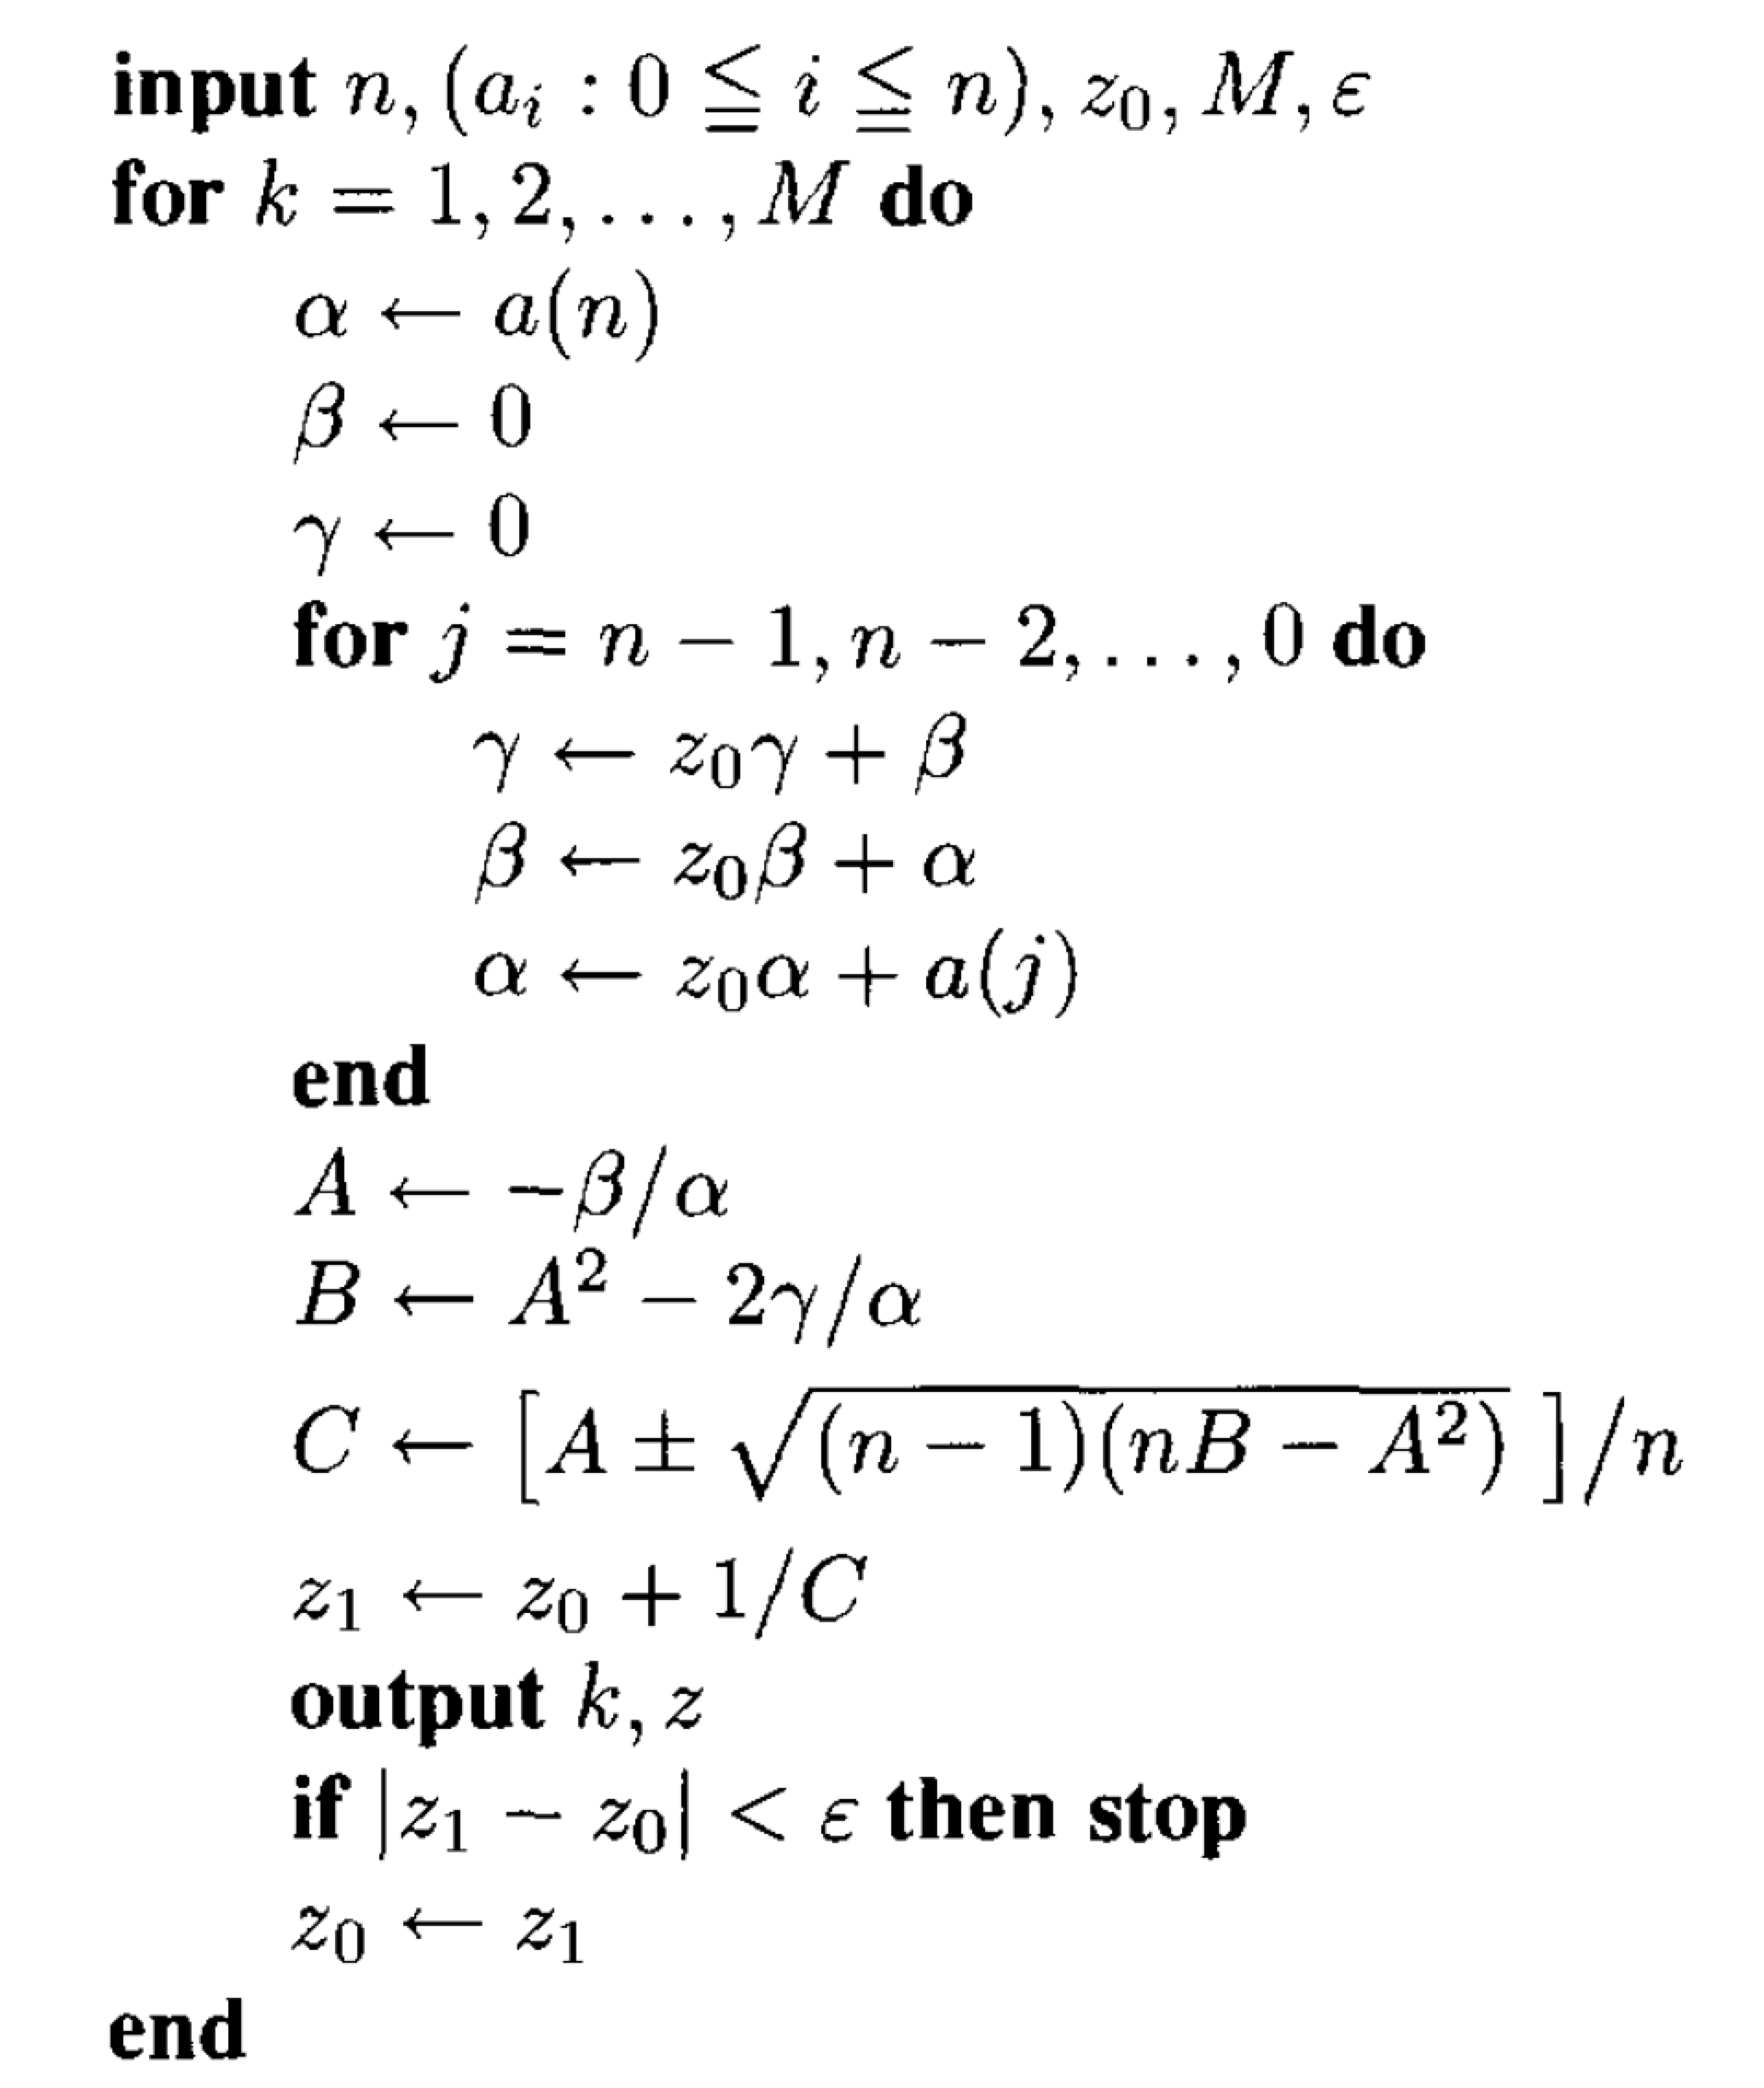

In [3]:
# Show the pseudo code
display.Image(b64decode(base64_data))

In this algorithm, $\alpha$ is $p(z_0)$, $\beta$ is $p'(z_0)$, and $\gamma$ is $\frac{1}{2}p''(z_0)$. 

Write a Python function that performs Laguerre iteration. In this algorithm, you should also make two changes. 1) You should check at the very beginning of the code if the polynomial evaluation at $z_0$ is less than $\epsilon$. If so, you should stop (return $z_0$), because $z_0$ is the solution already. 2) Close to the end of the pseudo code, above the line $z_0\leftarrow z_1$, you need to add a check about if the polynomial evaluation at $z_1$ is less than $\epsilon$, then stop (return $z_1$), again because $z_1$ is the solution.

Another thing to pay attention to is to evaluate the square root of a negative number, which you need in the line that calcuates $C$, you should use for example:

In [4]:
np.sqrt(-4, dtype=complex)

2j

Otherwise, you would get a nan.

Finally test your code on the equation:
$$x^3-1=0$$
The three roots of the polynomial are the cube roots of unity:
$$x_1 = 1, x_2 = (-1+\sqrt{3}i)/2, x_3 = (-1-\sqrt{3}i)/2$$ 

Use the initial guesses: $-5$, $10$, $-1+1j$ for three runs of the algorithm. Did you observe the three initial guesses lead to the three different roots?